# how does NPGO impact the split of drifters in the North Pacific Current between N and S

In [14]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
from matplotlib import colors
from cartopy import crs, feature
from matplotlib.gridspec import GridSpec

In [2]:
# first lets get the NPGO timeseries
npgo = pd.read_csv('NPGO.txt',header=25,delimiter='  ',).drop(
    axis=1, labels=['YEAR','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','MONTH','Unnamed: 10','Unnamed: 11','Unnamed: 12','NPGO index']).rename(
    columns={"#":"year","Unnamed: 1":"month","Unnamed: 2":"ind"});

npgo['date'] = [dt.datetime(int(npgo.year[i]),int(npgo.month[i]),1) for i in range(len(npgo))]

<ipython-input-2-074cea59784e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  npgo = pd.read_csv('NPGO.txt',header=25,delimiter='  ',).drop(


Text(0.5, 1.0, 'Monthly NPGO Index')

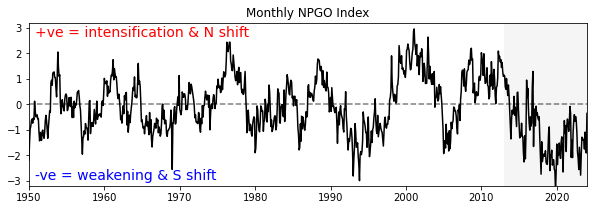

In [3]:
fig, ax = plt.subplots(1,1,figsize=[10,3])

ax.set_ylim([-3.2,3.2])
ax.set_xlim([npgo.date[0],np.array(npgo.date)[-1]])
ax.plot(npgo.date,npgo.ind,'k')
ax.plot([npgo.date[0],np.array(npgo.date)[-1]],[0,0],'k--',alpha=0.5)

# the range of dates I have LO for
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(2013,1,1)>= dt.timedelta(days=0)), color='whitesmoke')

# positive negative explain
ax.text(.01, .98, '+ve = intensification & N shift', ha='left', va='top', transform=ax.transAxes, fontsize=14, color='r')
ax.text(.01, .02, '-ve = weakening & S shift', ha='left', va='bottom', transform=ax.transAxes, fontsize=14, color='b')

ax.set_title("Monthly NPGO Index")


In [4]:
# seasons
season = [pd.to_datetime('2017-04-30'),pd.to_datetime('2017-10-20'),
 pd.to_datetime('2018-02-25'),pd.to_datetime('2018-09-20'),
 pd.to_datetime('2019-04-17'),pd.to_datetime('2019-11-04'),
 pd.to_datetime('2020-02-20'),pd.to_datetime('2020-10-19'),
 pd.to_datetime('2021-02-20'),pd.to_datetime('2021-10-05'),
 pd.to_datetime('2022-04-17'),pd.to_datetime('2022-10-10'),
 pd.to_datetime('2023-04-17'),pd.to_datetime('2023-10-10')]
# 2022 and 2023 are averages atm, find actual range
# need to go back to 2013 now that they're doing a hindcast

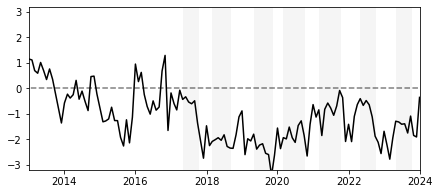

In [5]:
# zoom in on the output we have
fig, ax = plt.subplots(1,1,figsize=[7,3])

ax.set_ylim([-3.2,3.2])
ax.set_xlim([npgo.date[756],np.array(npgo.date)[-1]])
ax.plot(npgo.date,npgo.ind,'k')
ax.plot([npgo.date[0],np.array(npgo.date)[-1]],[0,0],'k--',alpha=0.5)

# summer winter
for i in range(0, len(season),2):
    ax.fill_between(npgo.date, -4, 4, where=(npgo.date-season[i+1]<=dt.timedelta(days=0))&(npgo.date-season[i]>=dt.timedelta(days=0)), color='whitesmoke')

# lets take a look at the drifters

In [6]:
df = pd.read_csv('/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/global_drifter/filteredDrifters.csv')
ids = set(df.ID)
df['datetime'] = pd.to_datetime(df.time)
df

,row,ID,time,latitude,longitude,DrogueLength,datetime
0,36285,104122,2012-06-05 12:00:00,49.899,-142.520,5.2 m,2012-06-05 12:00:00
1,36286,104122,2012-06-05 18:00:00,49.932,-142.476,5.2 m,2012-06-05 18:00:00
2,36287,104122,2012-06-06 00:00:00,49.964,-142.470,5.2 m,2012-06-06 00:00:00
3,36288,104122,2012-06-06 06:00:00,49.976,-142.399,5.2 m,2012-06-06 06:00:00
4,36289,104122,2012-06-06 12:00:00,49.956,-142.383,5.2 m,2012-06-06 12:00:00
...,...,...,...,...,...,...,...
581318,3392158,9729747,2000-07-30 06:00:00,53.764,-151.382,3.8 m,2000-07-30 06:00:00
581319,3392159,9729747,2000-07-30 12:00:00,53.746,-151.417,3.8 m,2000-07-30 12:00:00
581320,3392160,9729747,2000-07-30 18:00:00,53.767,-151.390,3.8 m,2000-07-30 18:00:00
581321,3392161,9729747,2000-07-31 00:00:00,53.748,-151.377,3.8 m,2000-07-31 00:00:00


In [7]:
# what's the date range we're working with?
print(np.min(df.time))
print(np.max(df.time))

1987-10-01 00:00:00
2023-10-14 18:00:00


Text(0.5, 1.0, 'Monthly NPGO Index')

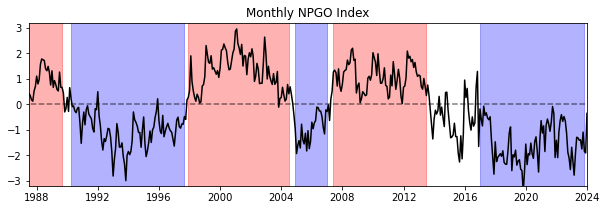

In [8]:
fig, ax = plt.subplots(1,1,figsize=[10,3])

ax.set_ylim([-3.2,3.2])
ax.set_xlim([npgo.date[450],np.array(npgo.date)[-1]])
ax.plot(npgo.date,npgo.ind,'k',zorder=1)
ax.plot([npgo.date[0],np.array(npgo.date)[-1]],[0,0],'k--',alpha=0.5)

# positive or negative phase
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(1987,1,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(1989,9,1)<=dt.timedelta(days=0)), color='r',alpha=0.3,zorder=0)
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(1990,4,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(1997,9,1)<=dt.timedelta(days=0)), color='b',alpha=0.3,zorder=0)
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(1997,12,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(2004,7,1)<=dt.timedelta(days=0)), color='r',alpha=0.3,zorder=0)
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(2004,12,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(2007,1,1)<=dt.timedelta(days=0)), color='b',alpha=0.3,zorder=0)
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(2007,6,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(2013,7,1)<=dt.timedelta(days=0)), color='r',alpha=0.3,zorder=0)
ax.fill_between(np.array(npgo.date), -4,4, where=(npgo.date-dt.datetime(2017,1,1)>=dt.timedelta(days=0))&(npgo.date-dt.datetime(2023,11,1)<=dt.timedelta(days=0)), color='b',alpha=0.3,zorder=0)


ax.set_title("Monthly NPGO Index")

In [9]:
# and make two time booleans for positive and negative phase of NPGO
posbool = ((df.datetime >= dt.datetime(1987,1,1))&(df.datetime <= dt.datetime(1989,9,1))) | ((df.datetime >= dt.datetime(1997,12,1))&(df.datetime <= dt.datetime(2004,7,1))) | (df.datetime >= dt.datetime(2007,6,1))&(df.datetime <= dt.datetime(2013,7,1))
negbool = ((df.datetime >= dt.datetime(1990,4,1))&(df.datetime <= dt.datetime(1997,9,1))) | ((df.datetime >= dt.datetime(2004,12,1))&(df.datetime <= dt.datetime(2007,1,1))) | (df.datetime >= dt.datetime(2017,1,1))&(df.datetime <= dt.datetime(2023,11,1))

In [10]:
#idk how to do hist2d in a spatially relevant way with coastline, but keep for now
def using_hist2d(ax, x, y, bins):
    cmap = cm.cm.haline_r
    cmap.set_under('w')
    im1 = ax.hist2d(x, y, bins, cmap=cmap, norm = colors.LogNorm(vmin=1,vmax=200))

(-180.0, -120.0)

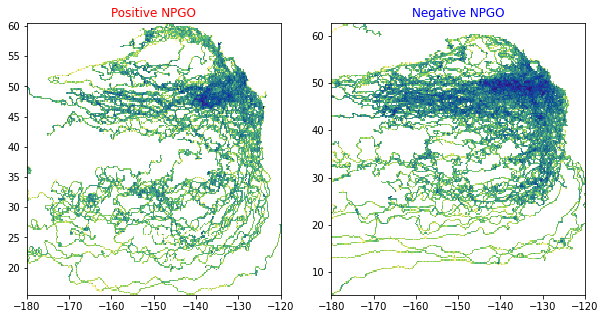

In [19]:
fig, ax = plt.subplots(1,2, figsize=[10,5])

####################
## positive phase ##
####################
x = df.longitude[posbool]
y = df.latitude[posbool]
using_hist2d(ax[0],x,y,bins=(250,200))#,transform=crs.PlateCarree())
ax[0].set_title('Positive NPGO',c='r')
ax[0].set_xlim([-180,-120])
# ax0.plot([-180,-120],[50,50],'k--')

# ####################
# ## negative phase ##
# ####################
x = df.longitude[negbool]
y = df.latitude[negbool]
using_hist2d(ax[1],x,y,bins=(250,200))
ax[1].set_title('Negative NPGO',c='b')
ax[1].set_xlim([-180,-120])
# ax[1].plot([-180,-120],[51,51],'k--')

Text(0.5, 1.0, 'Negative NPGO')

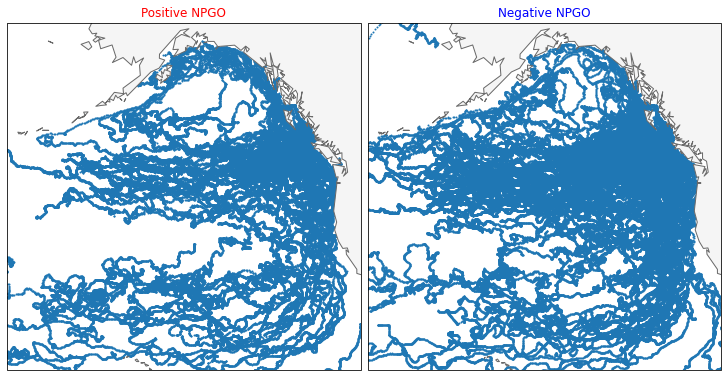

In [18]:
fig = plt.figure(constrained_layout=True, figsize=[10,10])
gs = GridSpec(1, 2, figure=fig)
xlim, ylim = [-180,-120], [20,62]
proj= crs.Mercator(np.mean(xlim), *ylim)
ax0 = fig.add_subplot(gs[0], projection=proj)
ax1 = fig.add_subplot(gs[1], projection=proj)

# Draw coastline
ax0.set_extent(xlim + ylim)
ax0.add_feature(feature.GSHHSFeature('auto', edgecolor='dimgray', facecolor='whitesmoke'))
ax1.set_extent(xlim + ylim)
ax1.add_feature(feature.GSHHSFeature('auto', edgecolor='dimgray', facecolor='whitesmoke'))

####################
## positive phase ##
####################
x = df.longitude[posbool]
y = df.latitude[posbool]
ax0.scatter(x,y,s=1,transform=crs.PlateCarree())
ax0.set_title('Positive NPGO',c='r')
# ax0.plot([-180,-120],[50,50],'k--')

# ####################
# ## negative phase ##
# ####################
x = df.longitude[negbool]
y = df.latitude[negbool]
ax1.scatter(x,y,s=1,transform=crs.PlateCarree())
ax1.set_title('Negative NPGO',c='b')
# ax[1].set_xlim([-180,-120])
# ax[1].plot([-180,-120],[51,51],'k--')


In [11]:
from scipy.stats import gaussian_kde

KeyError: '[40195, 40196, 40197, 40198, 40199, 40200, 40223, 40222, 40201, 40224, 40221, 40202, 40220, 40203, 39421, 39420, 40219, 39414, 39419, 39413, 39415, 39422, 39412, 39418, 40204, 39416, 39417, 39411, 39410, 40218, 39409, 39408, 40225, 39423, 39407, 40217, 39424, 40216, 40205, 40206, 40207, 39425, 39406, 40215, 40211, 40208, 40210, 39426, 40214, 40212, 40226, 39405, 39427, 40209, 40213, 39428, 39404, 40227, 39403, 39402, 39429, 39401, 40228, 39400, 39430, 40229, 39399, 40230, 39398, 39431, 40231, 39397, 39433, 39434, 39432, 39396, 39435, 40232, 39395, 39394, 39436, 40233, 39393, 39465, 39467, 39466, 39437, 39468, 39464, 40234, 39392, 39469, 39470, 39471, 39472, 39391, 39463, 39438, 39473, 39390, 40235, 39462, 39474, 39461, 39439, 39389, 39440, 39475, 39441, 40236, 39460, 39388, 39476, 39453, 39477, 39442, 39478, 39452, 39459, 39454, 39479, 39456, 39458, 39457, 39455, 39447, 39387, 39443, 39480, 39448, 39446, 40237, 39449, 39444, 39451, 39386, 39450, 39445, 39385, 39481, 71355, 39384, 71356, 39383, 39482, 40238, 39382, 71354, 71353, 39381, 71357, 39380, 39483, 39376, 39378, 39379, 39377, 70500, 40239, 71352, 39375, 39484, 39785, 70499, 70501, 70494, 39789, 39374, 39787, 70496, 39784, 70495, 39790, 39783, 39369, 39788, 39786, 70498, 71358, 39370, 39485, 39791, 39373, 70497, 39368, 39371, 39372, 39782, 40240, 71351, 39486, 39781, 70493, 39367, 39792, 70502, 71350, 39487, 39780, 39793, 39366, 39365, 39363, 39779, 71359, 39362, 40241, 39364, 70492, 39794, 70397, 39488, 40252, 39361, 70396, 39778, 70399, 70398, 70402, 70403, 70395, 70404, 70400, 70401, 40242, 39795, 70503, 40253, 40244, 40251, 40243, 39360, 39777, 40254, 39489, 71349, 70491, 70394, 71360, 70405, 39359, 39796, 40255, 40245, 39490, 39776, 40250, 39358, 39357, 70504, 70490, 70393, 39356, 39491, 38843, 39797, 70506, 40249, 38844, 40246, 38840, 38842, 39492, 70392, 38841, 70505, 39775, 40248, 38845, 38839, 39774, 40247, 70406, 38846, 70507, 71348, 39355, 38847, 38838, 38837, 70391, 39493, 70489, 38848, 38836, 39798, 38835, 71361, 39354, 39494, 70487, 70488, 40256, 38849, 38833, 38834, 39773, 70407, 38832, 38829, 39799, 70390, 38828, 38830, 38831, 70486, 39495, 39353, 38850, 70508, 38851, 39800, 38918, 71347, 38916, 38917, 38915, 38919, 39496, 70408, 38914, 38913, 39772, 38852, 39352, 38920, 38912, 38921, 39497, 39498, 70389, 38924, 70409, 70410, 38922, 38911, 39499, 38923, 39351, 39801, 38910, 70485, 38853, 38909, 39500, 39771, 70411, 38925, 39350, 38854, 38908, 38926, 39349, 39501, 39802, 38907, 38855, 38927, 39348, 70509, 70388, 38856, 38906, 38928, 38857, 38905, 39770, 70412, 38904, 39347, 38858, 39803, 38929, 38903, 70484, 71362, 39502, 40257, 38859, 39346, 38930, 38902, 70413, 70510, 38901, 38860, 39804, 38931, 70511, 39345, 70513, 38900, 70387, 70514, 38899, 38861, 70512, 70483, 70414, 39769, 38898, 39344, 39805, 38897, 38896, 38932, 38862, 38895, 40194, 70482, 39690, 39503, 38863, 39806, 70415, 70481, 38894, 70480, 39691, 38864, 39689, 39343, 40258, 38892, 38891, 38893, 38865, 70479, 38933, 39687, 39807, 39686, 70478, 39504, 39685, 70416, 70386, 39688, 38866, 70515, 38868, 39768, 39342, 38867, 38934, 39505, 38869, 70417, 38890, 39692, 38889, 38888, 38870, 38871, 38935, 71346, 38872, 38887, 39808, 38886, 39341, 38873, 39506, 38885, 39684, 38874, 38884, 40259, 38875, 38883, 39693, 38936, 71363, 38882, 39809, 70516, 38877, 38878, 38876, 70418, 38881, 38879, 39340, 38880, 39679, 39681, 39508, 39507, 39767, 39680, 39683, 39694, 70477, 39512, 70517, 39697, 38937, 39810, 70518, 39339, 39682, 39511, 39695, 70419, 39696, 39678, 39338, 70519, 39510, 39509, 39811, 39513, 39766, 38938, 39337, 70476, 70385, 38939, 39677, 70474, 71345, 70472, 70471, 70420, 70473, 70475, 39336, 70520, 39812, 39675, 39698, 70470, 39335, 70421, 38940, 39674, 40193, 39676, 39765, 39334, 39813, 39332, 70422, 70469, 38941, 39333, 40260, 70423, 39699, 39331, 40192, 70521, 71364, 39673, 70468, 39514, 39814, 38942, 70424, 39700, 39764, 39701, 39330, 70467, 70384, 70522, 70425, 38943, 70426, 39702, 39763, 70466, 39815, 70427, 39329, 38944, 39672, 70523, 39762, 39703, 70465, 70428, 38945, 40191, 39816, 36363, 39761, 70524, 39328, 39671, 70464, 38946, 39704, 71365, 39760, 70429, 39515, 70383, 39817, 39705, 70525, 39759, 70463, 70141, 70143, 39706, 38947, 70144, 70142, 39818, 39670, 39758, 70430, 39327, 70462, 39707, 70140, 70145, 39819, 39757, 70526, 38948, 70382, 39820, 39756, 39326, 39708, 70461, 70146, 39669, 70139, 70431, 39755, 39821, 38949, 70138, 71344, 39709, 70460, 39754, 70137, 39752, 38950, 39753, 39822, 70147, 70136, 70381, 39710, 39668, 39516, 39751, 39325, 70459, 39711, 39823, 70432, 70527, 70148, 39667, 39750, 39712, 70149, 38951, 39324, 39713, 70458, 70135, 40261, 70150, 39824, 39714, 40190, 39749, 39666, 70457, 39715, 70380, 39323, 70433, 39517, 39748, 39825, 39827, 39826, 39747, 70456, 39322, 38952, 70134, 39719, 39716, 70151, 39746, 71366, 39745, 39828, 39848, 70528, 70434, 70452, 70455, 39718, 39720, 39722, 39721, 71343, 70453, 39849, 39717, 70454, 39321, 39744, 70451, 39723, 70435, 81172, 39847, 70152, 39743, 38953, 81171, 39665, 70133, 70379, 39829, 36362, 39851, 38954, 39850, 70450, 39724, 39320, 70132, 39518, 81173, 70529, 70436, 39742, 38955, 39664, 70378, 70449, 39846, 70153, 70131, 39830, 39725, 39741, 70448, 39319, 70130, 38956, 70377, 81174, 70154, 70437, 39726, 70530, 39844, 39740, 39831, 39663, 39852, 39845, 81175, 39318, 39727, 70447, 39519, 70155, 39832, 70438, 39739, 71367, 39728, 39317, 70446, 70531, 38957, 39662, 39729, 70129, 39730, 70376, 70445, 39738, 39731, 39316, 70439, 39833, 70156, 70444, 39661, 39834, 39732, 70440, 39737, 38958, 39736, 39733, 70443, 70441, 70442, 39734, 39735, 39315, 39843, 81176, 70532, 39314, 70375, 39853, 39660, 38959, 81177, 38960, 39842, 38961, 70374, 39835, 81178, 39313, 39836, 40262, 39840, 70373, 39520, 70128, 71420, 39838, 39839, 70157, 39312, 39659, 70533, 39841, 39837, 38962, 70369, 71421, 70372, 70370, 71368, 70368, 39311, 70371, 39310, 36361, 39308, 39307, 39309, 70367, 39306, 39304, 39305, 81180, 38963, 71419, 39521, 39303, 39854, 71418, 39658, 70366, 38964, 81179, 70127, 70362, 38965, 38966, 70534, 70158, 71342, 70361, 71369, 39657, 70365, 39656, 38967, 71422, 39302, 81182, 81181, 70363, 71417, 70360, 39655, 70364, 38968, 70359, 70159, 39654, 39855, 39301, 70126, 40263, 71423, 39864, 70535, 81183, 70358, 38969, 39522, 38971, 38970, 39300, 39653, 38972, 81184, 70357, 39299, 70125, 70356, 38973, 70160, 39866, 39863, 81185, 39865, 39652, 81186, 70355, 39867, 70536, 70354, 38974, 70161, 39862, 70124, 71370, 38975, 39651, 39298, 70353, 36360, 38976, 38977, 39523, 39856, 39650, 39868, 39524, 81188, 39869, 70351, 70352, 70345, 71371, 70344, 39861, 70537, 70349, 70350, 39649, 81187, 71416, 70346, 38978, 70123, 70347, 70162, 70348, 39648, 39525, 70343, 70538, 39297, 38979, 71424, 71341, 39647, 39857, 71415, 70342, 39870, 81189, 39860, 70539, 39646, 38980, 39871, 81190, 79096, 39872, 70163, 70341, 2960, 70122, 39645, 39526, 70340, 79095, 39859, 38981, 79094, 2954, 2955, 2961, 79093, 70540, 39296, 2953, 79092, 79097, 70339, 39644, 81192, 38982, 2952, 79091, 2956, 36359, 81191, 79090, 2950, 2957, 2962, 79089, 39643, 2951, 39858, 79088, 2949, 2959, 39642, 39634, 79087, 39639, 70338, 39638, 81193, 79086, 71425, 39635, 2958, 70121, 39527, 39636, 39873, 71372, 39641, 39633, 39640, 39637, 38983, 79085, 70164, 39632, 79084, 39631, 79083, 40264, 70337, 2948, 70541, 2963, 79082, 39630, 39874, 38984, 2947, 79081, 70336, 39628, 39629, 71426, 70333, 71414, 39295, 70165, 39875, 79080, 36292, 71373, 39627, 70334, 70120, 70335, 81194, 79079, 36365, 2946, 79078, 39626, 38985, 70332, 39876, 71413, 70331, 39528, 70542, 79077, 39625, 36358, 36293, 36364, 70119, 79076, 39294, 70166, 36289, 38986, 36290, 81195, 36291, 79075, 70330, 2964, 2945, 36288, 71340, 39293, 81196, 79074, 2943, 38987, 41210, 39624, 36366, 36294, 70543, 2944, 39292, 79073, 70167, 70118, 70329, 79072, 39877, 39623, 41209, 38988, 41206, 41207, 79071, 71427, 70328, 150730, 150731, 150732, 81198, 150729, 150724, 150728, 150733, 36295, 150727, 39291, 71428, 79070, 39529, 2965, 150726, 39622, 70168, 150725, 150734, 38990, 38989, 70117, 36357, 150735, 36296, 79069, 70544, 2942, 81197, 36287, 39878, 71412, 70327, 38998, 150723, 79068, 150736, 38997, 39621, 71374, 39879, 38999, 38991, 70169, 2936, 2940, 39002, 39003, 2941, 38993, 38992, 79067, 41208, 39004, 39880, 2937, 38996, 39000, 2938, 2939, 70326, 38994, 38995, 71411, 41211, 39007, 39001, 150737, 39005, 39620, 39006, 70545, 71375, 79066, 81199, 39008, 150722, 71390, 39290, 81200, 71429, 2966, 36368, 39533, 70170, 71392, 39530, 39619, 150738, 36286, 79065, 39009, 70116, 39014, 81201, 71391, 71430, 39010, 36367, 70325, 39013, 71410, 70546, 39532, 79064, 36297, 36369, 71389, 36285, 150739, 39015, 39011, 39531, 150721, 71388, 39018, 81203, 39012, 71386, 40265, 39618, 70171, 36356, 79063, 71393, 39881, 39017, 39019, 41205, 71384, 39016, 150740, 39289, 79062, 70324, 71377, 70547, 71385, 71431, 70115, 150720, 81202, 39617, 71383, 79061, 81204, 70172, 36284, 150741, 71378, 39020, 39534, 81206, 36472, 71379, 36475, 71381, 71387, 81205, 71409, 41203, 71380, 71339, 70323, 71382, 36473, 71432, 71394, 79060, 150637, 71434, 150636, 150638, 39021, 39616, 71433, 36474, 150719, 36355, 150742, 150635, 81209, 2967, 39022, 70322, 79059, 71376, 36299, 81207, 36298, 81208, 36300, 39288, 150634, 39882, 150639, 150628, 39615, 41204, 70173, 40186, 70548, 70114, 79058, 150633, 70321, 150627, 150743, 150629, 39023, 36283, 36476, 81211, 71436, 150718, 36370, 150632, 71435, 150630, 36409, 36408, 70320, 79057, 150631, 81214, 81210, 71408, 36411, 150744, 81213, 36421, 36412, 70113, 36420, 81212, 36422, 36418, 36414, 81216, 36419, 39024, 36416, 39287, 79056, 36413, 36410, 39614, 36354, 36417, 36415, 70174, 36477, 150626, 150717, 81217, 70549, 39025, 39883, 71437, 70319, 39535, 36377, 36379, 81215, 81219, 70175, 36407, 36376, 39026, 36405, 41212, 36481, 36478, 150745, 79055, 36406, 36378, 81218, 71395, 36479, 36423, 40187, 36371, 36372, 39286, 70318, 36471, 40266, 36353, 2972, 2968, 36424, 150640, 70550, 2971, 150716, 39027, 79054, 36480, 36425, 36282, 36375, 36503, 81220, 2973, 36404, 70112, 36402, 41202, 36504, 71438, 39285, 36373, 36470, 150746, 36380, 70176, 41200, 36401, 36301, 36403, 39613, 70317, 71396, 39884, 150625, 2974, 81353, 36399, 36398, 81350, 79053, 81351, 81347, 81348, 81352, 36482, 81349, 81345, 36426, 70111, 36427, 81221, 36428, 81362, 70316, 81354, 81364, 36505, 81355, 150715, 71407, 36469, 39028, 81356, 81342, 81222, 36400, 81361, 36280, 81363, 81357, 2970, 81344, 81346, 70177, 81358, 70551, 40188, 81334, 81339, 81360, 81359, 81343, 81365, 71439, 81337, 36281, 36455, 36468, 81341, 36374, 81331, 79052, 71338, 81329, 81366, 2969, 150747, 81340, 36381, 81336, 36429, 36502, 36397, 36454, 81332, 39536, 81335, 81367, 71406, 81326, 40189, 81368, 81333, 36467, 39887, 81338, 2975, 70110, 39612, 70315, 81223, 81328, 70178, 39885, 70314, 81330, 36430, 81369, 150641, 81370, 41201, 81225, 36500, 81327, 39031, 81324, 81323, 81371, 36304, 70179, 79051, 39030, 36453, 39029, 36396, 81224, 71404, 81372, 150624, 39886, 39888, 39893, 36431, 71397, 70313, 36501, 150714, 81373, 39284, 36499, 36466, 71405, 81321, 81325, 70552, 39032, 41199, 39892, 81374, 36279, 70312, 36382, 39891, 39611, 36352, 36432, 39889, 36452, 39894, 36303, 36395, 70109, 81376, 81375, 36433, 36456, 79050, 81320, 150748, 81227, 36451, 81322, 36483, 36465, 36464, 39890, 81230, 81226, 70553, 81308, 71440, 2976, 39895, 36434, 81313, 39033, 81318, 70180, 81377, 81378, 36450, 36302, 39610, 71402, 81311, 39537, 36498, 81228, 81314, 71403, 81300, 81310, 81232, 36435, 81305, 36484, 81379, 81303, 36449, 81238, 81229, 36390, 36394, 70181, 81312, 81233, 36497, 150713, 70311, 36436, 81306, 150642, 81297, 81317, 81302, 36463, 81255, 36351, 36389, 81315, 36457, 81240, 36485, 81316, 81235, 36448, 81254, 70182, 81380, 81236, 81261, 36461, 36393, 36391, 81309, 81234, 36462, 36437, 150623, 81251, 81307, 81253, 81264, 71398, 81298, 36383, 36458, 81248, 36447, 79049, 81246, 81319, 81231, 70183, 36388, 150711, 36496, 36438, 36392, 150643, 81304, 39538, 81252, 81295, 81243, 81266, 36459, 36446, 71401, 81242, 81259, 39034, 81241, 81301, 81299, 36439, 70108, 81237, 150710, 81249, 81244, 150749, 36460, 36445, 81263, 81245, 81258, 36494, 36440, 36305, 71441, 36493, 36387, 36444, 81256, 36441, 81381, 81296, 36495, 36443, 70554, 36442, 81294, 70310, 150712, 52017, 81247, 52018, 36278, 150709, 81269, 81250, 39896, 39609, 81239, 70555, 36486, 36384, 36386, 36492, 81262, 39035, 81260, 36491, 39539, 81265, 36490, 52019, 36385, 70184, 150708, 71502, 81257, 81267, 81382, 70188, 36488, 36489, 36487, 81292, 81268, 150644, 70186, 52016, 71400, 70189, 70187, 70185, 70190, 150707, 70309, 39036, 71399, 39897, 41213, 81293, 52015, 52020, 81271, 39037, 40267, 150706, 2977, 52021, 150750, 81270, 39038, 41198, 70556, 36350, 150622, 70308, 79048, 81383, 81272, 150705, 71442, 150645, 81289, 39608, 52022, 81274, 70557, 52023, 70107, 71501, 81291, 39283, 70191, 150704, 81384, 52024, 39898, 81290, 70558, 39039, 41214, 81385, 70559, 150703, 39899, 70307, 52014, 81284, 71504, 39540, 81287, 150702, 81273, 79047, 150701, 150646, 71503, 81282, 81276, 81285, 150751, 81286, 81281, 81283, 70560, 52025, 81279, 71443, 81277, 39040, 81387, 81386, 81275, 150700, 70192, 81280, 70106, 36349, 81288, 36277, 79046, 81278, 39900, 150647, 81388, 52026, 70193, 150621, 39607, 36306, 150752, 150699, 79030, 70306, 52013, 41197, 70561, 39041, 79045, 81389, 52027, 52028, 150648, 70105, 71337, 39042, 150698, 39908, 39606, 2979, 81390, 79036, 79044, 36307, 71500, 79035, 71444, 36348, 39043, 41215, 2978, 79034, 70194, 36276, 79031, 79029, 2980, 79043, 39907, 150697, 52012, 150649, 150753, 71505, 39044, 39901, 70305, 52029, 79028, 36275, 150607, 79008, 79033, 81391, 36308, 79042, 52011, 150606, 79027, 150620, 39605, 150696, 79032, 70195, 81392, 39282, 39906, 39045, 79041, 39541, 79026, 150650, 52030, 79037, 70562, 150608, 81393, 79007, 71494, 70104, 79040, 71445, 70196, 150695, 79039, 79038, 71499, 71506, 41196, 2981, 39046, 39903, 70304, 52010, 39905, 79025, 52031, 39902, 150754, 70197, 39604, 150694, 79005, 150651, 39909, 52009, 79006, 70198, 150609, 36347, 39047, 150605, 36274, 52032, 39904, 150693, 71498, 79024, 71496, 71497, 70563, 71495, 150603, 71507, 71446, 81394, 150619, 150692, 79004, 52008, 150604, 70564, 150610, 81395, 150652, 79009, 79000, 52007, 52033, 150602, 150691, 39603, 70103, 39281, 70303, 150755, 52006, 150690, 39910, 150653, 70199, 39048, 150611, 39602, 150689, 79017, 78999, 150687, 52005, 36346, 71447, 36273, 150688, 150601, 79003, 81396, 70565, 79018, 150686, 150654, 52034, 79023, 52004, 39049, 70102, 150685, 79021, 36271, 150655, 70200, 70302, 150612, 39050, 79020, 150684, 2982, 79022, 39280, 52003, 150683, 36272, 150618, 150656, 39090, 71493, 39051, 150663, 81398, 81397, 150664, 150682, 79016, 150665, 150662, 36309, 150600, 150674, 150675, 79001, 150673, 39601, 150672, 150681, 79019, 150657, 150677, 150671, 150676, 150670, 79010, 150669, 150756, 150666, 39911, 150678, 36345, 150661, 150668, 150667, 150680, 150679, 52035, 79002, 150658, 71508, 150660, 71509, 150659, 52002, 2984, 71448, 2983, 150613, 39063, 39052, 71528, 70201, 39913, 40268, 39064, 70301, 71523, 70566, 71527, 71524, 39065, 36344, 71522, 39066, 70202, 36270, 39279, 39077, 39542, 79015, 41195, 39912, 39067, 150471, 39088, 39062, 52001, 150614, 52036, 71492, 71525, 70101, 39085, 39076, 81400, 39087, 39074, 39053, 39075, 39073, 36343, 39600, 39061, 52037, 39086, 150599, 39068, 78998, 39915, 81399, 71526, 71449, 39078, 39914, 150615, 39553, 39084, 39060, 39054, 52000, 70203, 150617, 39560, 39072, 36269, 71529, 39089, 79011, 39056, 36260, 39559, 71484, 39058, 150470, 39082, 41216, 39057, 39055, 2985, 71490, 39081, 71485, 81401, 52038, 71521, 39059, 39083, 70204, 39079, 70300, 36261, 150757, 40012, 39558, 36263, 71491, 39278, 71511, 39080, 36267, 150616, 41218, 39069, 70567, 39599, 39555, 71477, 71476, 39545, 36262, 36259, 36268, 36342, 70100, 71510, 51999, 36266, 71489, 39546, 36265, 71483, 39557, 71482, 39554, 39556, 39552, 150598, 39598, 150472, 71486, 71488, 71450, 71487, 40011, 81403, 39070, 71478, 39561, 71336, 39071, 71512, 78997, 79014, 36264, 39916, 79012, 70205, 39917, 71481, 71480, 71513, 39597, 51998, 81402, 70206, 70299, 39543, 36258, 71520, 39547, 150469, 52039, 71479, 71530, 71475, 36257, 71451, 40015, 39596, 40014, 41194, 36310, 70099, 51997, 150758, 39562, 40013, 150597, 70207, 41217, 39277, 71514, 150473, 2986, 71472, 39544, 71519, 36341, 71515, 40007, 40010, 81404, 70208, 39595, 39918, 70298, 71518, 79013, 36340, 36256, 71516, 71471, 51996, 71473, 71474, 71517, 36339, 40016, 78996, 39551, 41219, 39563, 71452, 52040, 41221, 39548, 41222, 41225, 36255, 70568, 41193, 40008, 39919, 70098, 51995, 71531, 39594, 150596, 36338, 71470, 70574, 150468, 70573, 39565, 39564, 36311, 40019, 40009, 40017, 39566, 39091, 70209, 150759, 70297, 51994, 71453, 40006, 36312, 70575, 39567, 81406, 150474, 70572, 52041, 39276, 36254, 39094, 40000, 39549, 39593, 71469, 70296, 70210, 51993, 40020, 81405, 71533, 71532, 39550, 39093, 150595, 71454, 71536, 39092, 70097, 71534, 36337, 40018, 41220, 71535, 39095, 39592, 2987, 78995, 39920, 39999, 36253, 70295, 39998, 150760, 52042, 70096, 51992, 70211, 71468, 40001, 39272, 70290, 150467, 71537, 70571, 39994, 70294, 70291, 39591, 39273, 71455, 70576, 36336, 39275, 41223, 41192, 70212, 36252, 39993, 39590, 70293, 39568, 70292, 71538, 39997, 40005, 51991, 150594, 70569, 39589, 39274, 70289, 70095, 81408, 70570, 78994, 36251, 41224, 81407, 150761, 39574, 41226, 71456, 150475, 40036, 36250, 39588, 40021, 39575, 52043, 71467, 39587, 51990, 40039, 40040, 40035, 40023, 39921, 39573, 71539, 70213, 40024, 39271, 81409, 40041, 39995, 39996, 39096, 36335, 40034, 40269, 70577, 39569, 70094, 40002, 39576, 70288, 150762, 71457, 39586, 40004, 71540, 36313, 2988, 40043, 150466, 39571, 71466, 40044, 39570, 40042, 52044, 150593, 40003, 39572, 40037, 51989, 71458, 71541, 39922, 39585, 39992, 70578, 40038, 40033, 36249, 40022, 70287, 40045, 39583, 39584, 39577, 70579, 70647, 39578, 36334, 150459, 150458, 71465, 70214, 52551, 52045, 52552, 81411, 39579, 39923, 71542, 39580, 2989, 150763, 71459, 71335, 40025, 36248, 71464, 52550, 39270, 39582, 40031, 52553, 81410, 70580, 70286, 39581, 70093, 71460, 71543, 70285, 39097, 36247, 36316, 78993, 52549, 71462, 71463, 150457, 71461, 40030, 150592, 40029, 40046, 71544, 40027, 150476, 40032, 81412, 52046, 40028, 70215, 150465, 150764, 52548, 36314, 71545, 39099, 36333, 39924, 70284, 39100, 40047, 52554, 70646, 71546, 36315, 52538, 70092, 51988, 40026, 39991, 36246, 70635, 39098, 39269, 40048, 71547, 70283, 52047, 150765, 52539, 39990, 52540, 81413, 52537, 41227, 70634, 71548, 81414, 2990, 70216, 52546, 52547, 150456, 70636, 39925, 39989, 78992, 52535, 52541, 39101, 70648, 71549, 70282, 52536, 39988, 70217, 36332, 70581, 52542, 70091, 52048, 70218, 36317, 150766, 52545, 41229, 52555, 71550, 39268, 70281, 150591, 150464, 52544, 41228, 70637, 70219, 39926, 41191, 39132, 52543, 70633, 81415, 71551, 78991, 70280, 52534, 150460, 150767, 36245, 39102, 52049, 39133, 70649, 2991, 70090, 70645, 51987, 70089, 70279, 40049, 36331, 39267, 70638, 71552, 39927, 150455, 150477, 39131, 150768, 70643, 70278, 70220, 70088, 70641, 70639, 71553, 150463, 2992, 150769, 36330, 70642, 81416, 39130, 52050, 70640, 70277, 70644, 39266, 40050, 39129, 39928, 150590, 40051, 52556, 150461, 70582, 81417, 71554, 39134, 70650, 150770, 39135, 39128, 70221, 52533, 39265, 70223, 39987, 70276, 36319, 150462, 40270, 70224, 78989, 70222, 39929, 78990, 70275, 150771, 39264, 39263, 41190, 40052, 36329, 39103, 36244, 36321, 36235, 70632, 70087, 150454, 39127, 52051, 36236, 36318, 150772, 51986, 70653, 70274, 71555, 39262, 36320, 70225, 39216, 39930, 70272, 150773, 39136, 36322, 39106, 39217, 70652, 70273, 70265, 2993, 52052, 81419, 70651, 36328, 40053, 39931, 36234, 52053, 36239, 70583, 70631, 150478, 70266, 40148, 70271, 39105, 36237, 70264, 36240, 71556, 70269, 70270, 150774, 81418, 39261, 70086, 39104, 70267, 39932, 81420, 39137, 150589, 71557, 39107, 70268, 36327, 36241, 52557, 70654, 36238, 52532, 39218, 36326, 150775, 36243, 70263, 36188, 39215, 36325, 40271, 70655, 70262, 39933, 70260, 70259, 36242, 70258, 41189, 70257, 36323, 36233, 70261, 71334, 39260, 51985, 39138, 150954, 39126, 81422, 70630, 36189, 2994, 70228, 150953, 39986, 39214, 36324, 70226, 40149, 71558, 70085, 36187, 150776, 39934, 39935, 150453, 150955, 39213, 70656, 40152, 150956, 39220, 150957, 70256, 70227, 150958, 39108, 81421, 39221, 39212, 39936, 150959, 40054, 39222, 70657, 36232, 150960, 70229, 40155, 70658, 39219, 39259, 150961, 70584, 71559, 39211, 39209, 52054, 150777, 150962, 40153, 39210, 70629, 39937, 81423, 70255, 39208, 36190, 40147, 39223, 39205, 39207, 150963, 70659, 150952, 39258, 40156, 71574, 36191, 70230, 71573, 40154, 39206, 2995, 70231, 71575, 39124, 39938, 150964, 39257, 71560, 71561, 150588, 70084, 70232, 70660, 150778, 78988, 70585, 36231, 39204, 39125, 36194, 52531, 39224, 70254, 52055, 36192, 150479, 36193, 39203, 70252, 39939, 39139, 70251, 39940, 70661, 50058, 39985, 50059, 70233, 70626, 39123, 81424, 36186, 39109, 70586, 36209, 40151, 70628, 150779, 52056, 70625, 39256, 70234, 70253, 39941, 39225, 51984, 150965, 70627, 71562, 70587, 36195, 52558, 36208, 70235, 36210, 39984, 40146, 71563, 40145, 40150, 70662, 150452, 70663, 39202, 70250, 81426, 36185, 39942, 40055, 41230, 70083, 150967, 70236, 70588, 39140, 39255, 150780, 36211, 150951, 52530, 36230, 70620, 150966, 173035, 36204, 39122, 40144, 39226, 70589, 36198, 62072, 52057, 62062, 36196, 71572, 62068, 62071, 62066, 62065, 62064, 62063, 62067, 62070, 62069, 36199, 36212, 39943, 70664, 39944, 70247, 2996, 36207, 70590, 70248, 81425, 39110, 70249, 36197, 36206, 150968, 70624, 39254, 150587, 70237, 36205, 40272, 36184, 36203, 39227, 150781, 70591, 71564, 39201, 36200, 39111, 39112, 70619, 70246, 36229, 70082, 39141, 39253, 70244, 39983, 70245, 70238, 39252, 70243, 71571, 39945, 39228, 71333, 70665, 2997, 36213, 150950, 39251, 36227, 39121, 173034, 36228, 36218, 70242, 39142, 36202, 39982, 39229, 78987, 36201, 70241, 70239, 39250, 39981, 150969, 36219, 150480, 36217, 71565, 150782, 70592, 36220, 36214, 36222, 36221, 70621, 39113, 36226, 51983, 40056, 39980, 39200, 39947, 36216, 39120, 70240, 173033, 70596, 36215, 36223, 39230, 39249, 150949, 70740, 39199, 39119, 70623, 71570, 36225, 39143, 78978, 52058, 70739, 39117, 39248, 39247, 41188, 78977, 39946, 81428, 150783, 39246, 36224, 150451, 50057, 150970, 70593, 39245, 70081, 39118, 52529, 39979, 39948, 70666, 36183, 39949, 39244, 39116, 81427, 40157, 71569, 71567, 62061, 71566, 173036, 39198, 70622, 78979, 70597, 150948, 70595, 150586, 70741, 39231, 40057, 39114, 39243, 39977, 39115, 70738, 70594, 39232, 150784, 2998, 39144, 71568, 173037, 39976, 78986, 3034, 150971, 3033, 39978, 81429, 39233, 39197, 71577, 40143, 70667, 78980, 3031, 39242, 39234, 78976, 150947, 70742, 39241, 70618, 52559, 71576, 39240, 39158, 70749, 150481, 50056, 150785, 40274, 52059, 81431, 70748, 3032, 2999, 39157, 39196, 3030, 39950, 70598, 3035, 39235, 70736, 70750, 78981, 39239, 39145, 70747, 39238, 150946, 39951, 70737, 39195, 39159, 39237, 39163, 39953, 39148, 150972, 81430, 78975, 39147, 39146, 40058, 51982, 39162, 39236, 39975, 40158, 70668, 70751, 70746, 70743, 150786, 39952, 39160, 70080, 39156, 3029, 39161, 81432, 52528, 150945, 150585, 78982, 40273, 39164, 39194, 39149, 62060, 78985, 70744, 36182, 3036, 70735, 70745, 39153, 78984, 149968, 149974, 39165, 39152, 149975, 39150, 39155, 39193, 39151, 39154, 3000, 149973, 149976, 150787, 70669, 173032, 40159, 39954, 78983, 150944, 52060, 39166, 40160, 149972, 70734, 149977, 39192, 39974, 150450, 150973, 150942, 62053, 70599, 62059, 62054, 62058, 62057, 62056, 62055, 70617, 39167, 52061, 81434, 150482, 41187, 149971, 3037, 150941, 150943, 39191, 39957, 3028, 39168, 39958, 70752, 149978, 150788, 150501, 150502, 39190, 150500, 39956, 150503, 70670, 149970, 70079, 41231, 52066, 39955, 39189, 52527, 81433, 52065, 70600, 78974, 70733, 39188, 81436, 39959, 39178, 70601, 39187, 150499, 39184, 52560, 39177, 39169, 39180, 150504, 39182, 39183, 39186, 39181, 40275, 39179, 39185, 40059, 39176, 52062, 39170, 39175, 3038, 150789, 150584, 39973, 39174, 70732, 70603, 39172, 39173, 3001, 81437, 39171, 150498, 36181, 70731, 150505, 39960, 81439, 12706, 12707, 149979, 12708, 3002, 150974, 70602, 3027, 51981, 40161, 40142, 52063, 70616, 70671, 150483, 71578, 149969, 149980, 150940, 150790, 150484, 50055, 62052, 150506, 41232, 70078, 39972, 70730, 70753, 3039, 12705, 52064, 52067, 71579, 39971, 52526, 81442, 70604, 70615, 70605, 70614, 150488, 70672, 150791, 150487, 150489, 62073, 70607, 40060, 70613, 150486, 36180, 12709, 70729, 81435, 150490, 40164, 70673, 71332, 3040, 52525, 149981, 150449, 149967, 39970, 39961, 150491, 70606, 150792, 150507, 70754, 70608, 52070, 52068, 150583, 52069, 81440, 150497, 70674, 3003, 150939, 3015, 150492, 149982, 70077, 41186, 70755, 39963, 39969, 3041, 3026, 150493, 39964, 150975, 40162, 36179, 150793, 70609, 81441, 3004, 52524, 39965, 173038, 70675, 150494, 39962, 3043, 3025, 81438, 150495, 3042, 70612, 70728, 52522, 52561, 3017, 3014, 40163, 3016, 149983, 173031, 150485, 149966, 78973, 150496, 52523, 150794, 81444, 39968, 150938, 70611, 39967, 70610, 51980, 3013, 39966, 3012, 12711, 70756, 70676, 52521, 12710, 52520, 3045, 52519, 40141, 3005, 40276, 3018, 150795, 3044, 81445, 150508, 81447, 149984, 52518, 3046, 40061, 71580, 81443, 150937, 3011, 149965, 52517, 70727, 3057, 36178, 3058, 150582, 70677, 150796, 71331, 70757, 50054, 52516, 52469, 71581, 70076, 52071, 41185, 52470, 81453, 3024, 3047, 50051, 81455, 52514, 81450, 3019, 149985, 52515, 52468, 70726, 50050, 3055, 173039, 3056, 52467, 3010, 52471, 70725, 81452, 3054, 150936, 52466, 70678, 150797, 3006, 149964, 12704, 70758, 81448, 70724, 81458, 78972, 3023, 52465, 51979, 70679, 52436, 52513, 52437, 150798, 70723, 52438, 3007, 50052, 41233, 40165, 3053, 3052, 3008, 150935, 3022, 52435, 149986, 3059, 3048, 52464, 52072, 52439, 52512, 3020, 81449, 70761, 70759, 150448, 3009, 70074, 50053, 70760, 150799, 3021, 81456, 40062, 70075, 52440, 70680, 52434, 71582, 3049, 81446, 35766, 70722, 35778, 52463, 149963, 52511, 52441, 50049, 81457, 52472, 70010, 52510, 40140, 70721, 150934, 35774, 70009, 71583, 150581, 150800, 150509, 52462, 81451, 81461, 3060, 70720, 173030, 52433, 151340, 81454, 52442, 52074, 149987, 3050, 70719, 35777, 81460, 70073, 70681, 35769, 3051, 150801, 35767, 70069, 150976, 70068, 35770, 52509, 150933, 52432, 36177, 52443, 52473, 149962, 52461, 81459, 35768, 52508, 71584, 35776, 52073, 51978, 150802, 173040, 70718, 81463, 52562, 50048, 35775, 70008, 70682, 40063, 149988, 150447, 40277, 70762, 70716, 52507, 70717, 150580, 70011, 52444, 3061, 52506, 52505, 150932, 150803, 150821, 150820, 35773, 52474, 70072, 70070, 150822, 35780, 35779, 150819, 150510, 150823, 52460, 52475, 70067, 70715, 150804, 70683, 52431, 150818, 150824, 52504, 36141, 52445, 71585, 3062, 150817, 70071, 149961, 35781, 150825, 52503, 150931, 150805, 150816, 36140, 70714, 81464, 35765, 50047, 52446, 150826, 52502, 150815, 52430, 149989, 52459, 150446, 52447, 150806, 81462, 150814, 36142, 150827, 62077, 62078, 62079, 62080, 62081, 62082, 62075, 62076, 70684, 150579, 52476, 40139, 150813, 70713, 52448, 42238, 150807, 70066, 150809, 52075, 150808, 52449, 150812, 52501, 150828, 150811, 173041, 81466, 78971, 70712, 150810, 52477, 62074, 36139, 52429, 35772, 52458, 40166, 52486, 150829, 52450, 52457, 70685, 35771, 52456, 40064, 42240, 52455, 150511, 52500, 150930, 52451, 62128, 3063, 150830, 3064, 150880, 150879, 150878, 150881, 42239, 150877, 150882, 149960, 150876, 52452, 52478, 52485, 36143, 3066, 150883, 150875, 52487, 36176, 52428, 150874, 70711, 41234, 150884, 52453, 150873, 51977, 52076, 52454, 150831, 149990, 150885, 42237, 62133, 62143, 62144, 62145, 62134, 62148, 62142, 62149, 62150, 62151, 62147, 62141, 62146, 62139, 62132, 62135, 62140, 62130, 62129, 62131, 62138, 62137, 62136, 150872, 3065, 50046, 150445, 52479, 52484, 150886, 52426, 150871, 70686, 150030, 40278, 52499, 35782, 42236, 41170, 52488, 173042, 71330, 150887, 150870, 150869, 52483, 150868, 42241, 150929, 150832, 46823, 52482, 52427, 150888, 52480, 150867, 46822, 52481, 70710, 150029, 70012, 81465, 12703, 52498, 150866, 52489, 70065, 52490, 150889, 70015, 70687, 42235, 150833, 52425, 70763, 42242, 150865, 150031, 70709, 52491, 150890, 36144, 70007, 36138, 70004, 150928, 12712, 150864, 52492, 150578, 41168, 35798, 52497, 150891, 150512, 78945, 70708, 150444, 150863, 150834, 173043, 62051, 42234, 149959, 150977, 52494, 52496, 149991, 52493, 70688, 150862, 41169, 52495, 150892, 52424, 70707, 41184, 50045, 150861, 70014, 40167, 150835, 150860, 70689, 35797, 71586, 150927, 150859, 12696, 70706, 35799, 70006, 36175, 40065, 78970, 150893, 3067, 150858, 150028, 70005, 70064, 40138, 150836, 150032, 46824, 81467, 150857, 70690, 40133, 52563, 70705, 78969, 78944, 40132, 41167, 70013, 35800, 150443, 150837, 150894, 12697, 12698, 12699, 12700, 12701, 70704, 40137, 81469, 3068, 40135, 81468, 150856, 42243, 12702, 52077, 70016, 78948, 70703, 46821, 36137, 150838, 151341, 150895, 52423, 70696, 70691, 42233, 46825, 150855, 70697, 150926, 70692, 150513, 40134, 70702, 70693, 150839, 70698, 70699, 173044, 70695, 70700, 150896, 150854, 52422, 70694, 70701, 78968, 40136, 46820, 150840, 78947, 36145, 150853, 35796, 149958, 36174, 150897, 52078, 150852, 150841, 70003, 50044, 46826, 150442, 150851, 173029, 150898, 70063, 149992, 150850, 150842, 51976, 150849, 150033, 150925, 150848, 150847, 150843, 150846, 150899, 35801, 40131, 40168, 150845, 150577, 150844, 53424, 150900, 41174, 78946, 150901, 150905, 150027, 150902, 150904, 42232, 150924, 41171, 52421, 150903, 3069, 150906, 150441, 150978, 36136, 40066, 150514, 41165, 41172, 35783, 52564, 53427, 46827, 35764, 81471, 46828, 150907, 3070, 150923, 173045, 46819, 46829, 46836, 150908, 12713, 46835, 150034, 41173, 35802, 52420, 12715, 150922, 150440, 71587, 150909, 78967, 71329, 41166, 42231, 81470, 149993, 70062, 36146, 53423, 52565, 78949, 150921, 150910, 41183, 41164, 44712, 151339, 52419, 12714, 41182, 150920, 150911, 42244, 35803, 46837, 70764, 46834, 3071, 150515, 149994, 149957, 150919, 71588, 70002, 150912, 44714, 35795, 50043, 150918, 36135, 52418, 150917, 70017, 46833, 150913, 150439, 52079, 150916, 3072, 40130, 44710, 150914, 150915, 150026, 150576, 40185, 53425, 51975, 36173, 150035, 78950, 42170, 40279, 81472, 46832, 46830, 70061, 40067, 35804, 78966, 50042, 42169, 173046, 42230, 41236, 78943, 149995, 46838, 3073, 35763, 53428, 53422, 41235, 44713, 150438, 53421, 150516, 42171, 46818, 151342, 46831, 78951, 35784, 52417, 36147, 81474, 42168, 35794, 149956, 150036, 40068, 41163, 149996, 58985, 58986, 53426, 70018, 70020, 62127, 150979, 46817, 150025, 40169, 46856, 41175, 70060, 53429, 71589, 40129, 46839, 42229, 70021, 44711, 150437, 58987, 46859, 46816, 50041, 46858, 42167, 151338, 51974, 35805, 173028, 53420, 35762, 46857, 58984, 3074, 150436, 46840, 78963, 58983, 81473, 150517, 78942, 150575, 173047, 42172, 78964, 46855, 81475, 58982, 78952, 70001, 149997, 70019, 58981, 150052, 150037, 58980, 81476, 41181, 12694, 81477, 50040, 58990, 41162, 151343, 52566, 62041, 3075, 150435, 62048, 62047, 62049, 62046, 62045, 62044, 62043, 62042, 46860, 62050, 65731, 40069, 46854, 42228, 35792, 58988, 44709, 150051, 12695, 62083, 44720, 52416, 36148, 78566, 78965, 150024, 41161, 58991, 36168, 58989, 44718, 42173, 150053, 46841, 70022, 46853, 35793, 52080, 42166, 150054, 78565, 70059, 44708, 150050, 70765, 46852, 36134, 149955, 35806, 40128, 78953, 81479, 149998, 52905, 58979, 150038, 42174, 42227, 53419, 78567, 62039, 150049, 71590, 150518, 81478, 46813, 70058, 78559, 71328, 36171, 62040, 36172, 36166, 78962, 150055, 42245, 51973, 46851, 35761, 150048, 70057, 36165, 81480, 53431, 58977, 58978, 35785, 41237, 46861, 150434, 46815, 42165, 173048, 36132, 151356, 36156, 150980, 46850, 150039, 78560, 40184, 52904, 36133, 150047, 3076, 150574, 36167, 150023, 36170, 53418, 46842, 70056, 36157, 40070, 50039, 149999, 151337, 35807, 69999, 46849, 150056, 150046, 70000, 53430, 44707, 44717, 150040, 36164, 42226, 3077, 58976, 46814, 41176, 62038, 58992, 46812, 42175, 35786, 150045, 65732, 41160, 52906, 40170, 70026, 151355, 78564, 151354, 41178, 44716, 149954, 52908, 36162, 44719, 78954, 36169, 150044, 78563, 46848, 150041, 78561, 78570, 46843, 150057, 53432, 150043, 78961, 150519, 52415, 52081, 41180, 150042, 36160, 70023, 78569, 42164, 35791, 46847, 36161, 12719, 70027, 36149, 150000, 46862, 81481, 173049, 52909, 151353, 150022, 78941, 46845, 163820, 69998, 46844, 70055, 41177, 41179, 150433, 151344, 40071, 44721, 36163, 58994, 78562, 151336, 46846, 52907, 150058, 70766, 44715, 58993, 163821, 78557, 150066, 12717, 12718, 78960, 36158, 62116, 69997, 44706, 81482, 42176, 42225, 41238, 51972, 62125, 62124, 62123, 62121, 62117, 62118, 62122, 62120, 62119, 52082, 78571, 58975, 35808, 69989, 150573, 62126, 70025, 70024, 151352, 52567, 36150, 150067, 150065, 78568, 78558, 150001, 78955, 78556, 78956, 58995, 150059, 149953, 42177, 150064, 150981, 3078, 78572, 40072, 70872, 163819, 42163, 36155, 42178, 150068, 78959, 70054, 150021, 163825, 36159, 163822, 69996, 70032, 163824, 151351, 69990, 40127, 36152, 36151, 70028, 70031, 150060, 173050, 53433, 42246, 150069, 53417, 35787, 36131, 40171, 52568, 58974, 151292, 46811, 44705, 151291, 150432, 52903, 69991, 53416, 151290, 70053, 70052, 12716, 151293, 3079, 35809, 150002, 50038, 163823, 150520, 150061, 35790, 42224, 151350, 78958, 70051, 151294, 151287, 150070, 150063, 78940, 151286, 151288, 163826, 35788, 52414, 40280, 151285, 150062, 52902, 71591, 151284, 69992, 51971, 70030, 150572, 69995, 151295, 151283, 70033, 151289, 41239, 149952, 150020, 81484, 46863, 78957, 40073, 40183, 41240, 151282, 35760, 71592, 70044, 151349, 69993, 70029, 69994, 78573, 163818, 70050, 151281, 42179, 151345, 150071, 58973, 173027, 36153, 151296, 70043, 35810, 52901, 151280, 52083, 42162, 70045, 151348, 150003, 52413, 41159, 81487, 41993, 42247, 3080, 163815, 35789, 70037, 70038, 81483, 70039, 41992, 150982, 40126, 69988, 151347, 151279, 70767, 151297, 151346, 163814, 70046, 12693, 150072, 173051, 41988, 42223, 40074, 70047, 70871, 36154, 70040, 70042, 52569, 150431, 51970, 70049, 163853, 58972, 41987, 70034, 41990, 78555, 70036, 150019, 41989, 70048, 151335, 42248, 42161, 41986, 81490, 70041, 163854, 151298, 35811, 41994, 149951, 3081, 163817, 52900, 150073, 150571, 78636, 52412, 42251, 42180, 40075, 3082, 42252, 62115, 41991, 151276, 35812, 150521, 40172, 52085, 41241, 42222, 52084, 150004, 41985, 62113, 163816, 151278, 71595, 42250, 81485, 62114, 40117, 70035, 41995, 78939, 42160, 71327, 150074, 150543, 150542, 151299, 41158, 71593, 163827, 53415, 78637, 41984, 42221, 42181, 71594, 3083, 51969, 58971, 50037, 46810, 36130, 150018, 62085, 62086, 62087, 78638, 151300, 41996, 62084, 150541, 42159, 46864, 151277, 52086, 163855, 40076, 150983, 65733, 163852, 150430, 150075, 41997, 150570, 42253, 150544, 149950, 62088, 42254, 163813, 44704, 40125, 3084, 42220, 173052, 42249, 42182, 53434, 53414, 35813, 65734, 65735, 150076, 173053, 3085, 81488, 40118, 150540, 150005, 42158, 44703, 163851, 41157, 35759, 150569, 78574, 40119, 40116, 41998, 150077, 163828, 41983, 151334, 40077, 78554, 167405, 70870, 78938, 51968, 52411, 69987, 40182, 42255, 150017, 52910, 150522, 150539, 150006, 62089, 58970, 150568, 150545, 151275, 81492, 78553, 81489, 42219, 3086, 173054, 41242, 149949, 81495, 81498, 150429, 42183, 40120, 150078, 62091, 150984, 62090, 150567, 163829, 42256, 173026, 42026, 65736, 52570, 36129, 3087, 42025, 81486, 41999, 150538, 150546, 40078, 42218, 52087, 46865, 51967, 12689, 12691, 12690, 150007, 12692, 40121, 42028, 40173, 35758, 163850, 163812, 143268, 143262, 42027, 143264, 71596, 143265, 52571, 143263, 143261, 143259, 143258, 50036, 143266, 42029, 42157, 51910, 58969, 143269, 167404, 143267, 143260, 35814, 41982, 53413, 40281, 40124, 143257, 151274, 46809, 150016, 42024, 167406, 150547, 62092, 149948, 44702, 12688, 143270, 53412, 53448, 143256, 150079, 3088, 65728, 40079, 150566, 36128, 143255, 40123, 70768, 150537, 62037, 150008, 53451, 163830, 42217, 78633, 51912, 143254, 78624, 42030, 81503, 40122, 44694, 51966, 151301, 163849, 78627, 53435, 65730, 51911, 167401, 150523, 81500, 143271, 58968, 151333, 150428, 40115, 78639, 70869, 81501, 51909, 44693, 42000, 150985, 42031, 143253, 78635, 78575, 42032, 51908, 42184, 52899, 35757, 42023, 3089, 51913, 40181, 62109, 62111, 62110, 151273, 150548, 78625, 78626, 41156, 42033, 58967, 143251, 150009, 51907, 25767, 62112, 51914, 150536, 143252, 51916, 51906, 143272, 81493, 41981, 51915, 81491, 149947, 44692, 69986, 12720, 40080, 25765, 25766, 65729, 58966, 42034, 42216, 42022, 150080, 150565, 42257, 51920, 52410, 173056, 51905, 78630, 150524, 42012, 51917, 58960, 78634, 163848, 58955, 167400, 53447, 71326, 167403, 51965, 3090, 42156, 58959, 58962, 58961, 42011, 58954, 62102, 51904, 58956, 62101, 62093, 62095, 62096, 62097, 62098, 62099, 62094, 62100, 42013, 150010, 167402, 71597, 42014, 42001, 58958, 143250, 42021, 58957, 149945, 51921, 42015, 149943, 78937, 58963, 151272, 40081, 42037, 51902, 173055, 51901, 65727, 163811, 42215, 150549, 42185, 149942, 150015, 51900, 52911, 51898, 150535, 42010, 51899, 51903, 42035, 42036, 51918, 71598, 149946, 143273, 150271, 42020, 40114, 149944, 51897, 81506, 42016, 150525, 42019, 58953, 150986, 51896, 42017, 42214, 51919, 42018, 78552, 71600, 150427, 65737, 150011, 150270, 51895, 53449, 42009, 58965, 42002, 150272, 81496, 143275, 143249, 51894, 169807, 151302, 40082, 58952, 167399, 50035, 151013, 51964, 42258, 149941, 70868, 78623, 51893, 151014, 46808, 143247, 58964, 42038, 150526, 46866, 41980, 42155, 150564, 150012, 3091, 143274, 51892, 150081, 163847, 150014, 62103, 62108, 151271, 150534, 42008, 58951, 52088, 36127, 42213, 40113, 151012, 42003, 44695, 150013, 40083, 150550, 151015, 42154, 44696, 143248, 78632, 51891, 150273, 151011, 151332, 167407, 35815, 150527, 78628, 81497, 143246, 42186, 151010, 151016, 51890, 78936, 53450, 169808, 151002, 42007, 151009, 163831, 149940, 151008, 81509, 52898, 78631, 41243, 150533, 58950, 71599, 151007, 78507, 12723, 58945, 151006, 151001, 42004, 151003, 169806, 169809, 151005, 150528, 151004, 150987, 169805, 51963, 151017, 167398, 42040, 42212, 40084, 150135, 42039, 151000, 58946, 40180, 151270, 150999, 51922, 58949, 42005, 42006, 52912, 58948, 150134, 42041, 58935, 150529, 163810, 58947, 78622, 69985, 51889, 151018, 150426, 58944, 143245, 150274, 40174, 150998, 151303, 150530, 150551, 51888, 53411, 150136, 150269, 150531, 62104, 150532, 58934, 52409, 150563, 41155, 25764, 35816, 52572, 151019, 150133, 149939, 150082, 150997, 51887, 143276, 42042, 70867, 42211, 78551, 52089, 58941, 173057, 51962, 25763, 151269, 150267, 65726, 151020, 58936, 62105, 62106, 62107, 150266, 167408, 78629, 42045, 150996, 42153, 42044, 53436, 3092, 51886, 42043, 40085, 150988, 58943, 81504, 58942, 25768, 163809, 12722, 150265, 58933, 58940, 81499, 150132, 169810, 150268, 145056, 78506, 143244, 35756, 150552, 150995, 150137, 78550, 151021, 42187, 150275, 41244, 145055, 58938, 163846, 58932, 150264, 53446, 78621, 42046, 44697, 163808, 58937, 58939, 150994, 42047, 40179, 40282, 149938, 150263, 41979, 42210, 81502, 150425, 58931, 150989, 12721, 51961, 151268, 151022, 81511, 78576, 150562, 78510, 44690, 150993, 78549, 51885, 40112, 51923, 150131, 44691, 78620, 150262, 143277, 44699, 173025, 150990, 65738, 150992, 44701, 150083, 151331, 150991, 71601, 150553, 78640, 150261, 145057, 42048, 52408, 81494, 151023, 81508, 51884, 36126, 40086, 40175, 169804, 42209, 143279, 42259, 58930, 150138, 151304, 78504, 150276, 150260, 51924, 163807, 44700, 71640, 145054, 50034, 42152, 173058, 78935, 42049, 3093, 70769, 40087, 46867, 150130, 51960, 149937, 78508, 143278, 150259, 51883, 81514, 150255, 40176, 53437, 150254, 42208, 151024, 150561, 150554, 143243, 151267, 169803, 42057, 150258, 42058, 53452, 42050, 42059, 78509, 150424, 145052, 70866, 42260, 25771, 150139, 150253, 169811, 25770, 25769, 51882, 42188, 42074, 78548, 51925, 150256, 52897, 52090, 40111, 51959, 145053, 40178, 42207, 40088, 81505, 150084, 41978, 150129, 40177, 150257, 42056, 42051, 42073, 143242, 42052, 42151, 42075, 36125, 42060, 163845, 65739, 150277, 150555, 143280, 58929, 150252, 81507, 42054, 42053, 145058, 145051, 42062, 35817, 151025, 149936, 150140, 53445, 78619, 42055, 51881, 42061, 150560, 42071, 52913, 51958, 42063, 52407, 42072, 42150, 44689, 167397, 81512, 150556, 42206, 35755, 78547, 150251, 42076, 150423, 150128, 41154, 42189, 145065, 58928, 44722, 150141, 151330, 52573, 151305, 42070, 42205, 151026, 51880, 78641, 42064, 145050, 42065, 51777, 51767, 51766, 150559, 143241, 81517, 169802, 42066, 78511, 150085, 46868, 36124, 62033, 40089, 42077, 51776, 51926, 145064, 150278, 150250, 42149, 71639, 51957, 145061, 51765, 145059, 62035, 62034, 51764, 41153, 150557, 169812, 51768, 145060, 145066, 42204, 69984, 46807, 145062, 150422, 78503, 42261, 62036, 44698, 78618, 150142, 25772, 42067, 51769, 51775, 3094, 53410, 78505, 151266, 58927, 149935, 78577, 150127, 163806, 78934, 51772, 150558, 42190, 41977, 51770, 42203, 51763, 44724, 51774, 42069, 51879, 143281, 71641, 145063, 42068, 51778, 150249, 51771, 78546, 51956, 51927, 25776, 150143, 51773, 150421, 163832, 65725, 41245, 42078, 163844, 53444, 42202, 40110, 42191, 78933, 25775, 25774, 145067, 25773, 51878, 143240, 70770, 51762, 42192, 40090, 151027, 150086, 150248, 52896, 58926, 12684, 50033, 12685, 12686, 173059, 51761, 150420, 150144, 42201, 51955, 36123, 42200, 150126, 42148, 81515, 150279, 81513, 150242, 53454, 51779, 52406, 41976, 42193, 35754, 150241, 71638, 42199, 145049, 51954, 150419, 150409, 150408, 150243, 150410, 150407, 81510, 150247, 151306, 51877, 150411, 150406, 150145, 42079, 81516, 150240, 52574, 42196, 52091, 51760, 150405, 51928, 151329, 42195, 150418, 150412, 42194, 78642, 145068, 143239, 150246, 42198, 12687, 40091, 58925, 42197, 150244, 42262, 70865, 150417, 150404, 150413, 150239, 150416, 51780, 150245, 150415, 150414, 46869, 150146, 51953, 150087, 51876, 151028, 150238, 78617, 143282, 150403, 51588, 35818, 42147, 53443, 173060, 150147, 150148, 51589, 163843, 169813, 40092, 44723, 150149, 151265, 51587, 163842, 51929, 58924, 42080, 150237, 150280, 163805, 169801, 51593, 149934, 81519, 69983, 167396, 3095, 145069, 145048, 51875, 51952, 40109, 78545, 78932, 150125, 150236, 51586, 53438, 53453, 51759, 150150, 41975, 42081, 51930, 51590, 51592, 40283, 150235, 150151, 51931, 78513, 150152, 150402, 51781, 150153, 52405, 58923, 51951, 150154, 51591, 145070, 150234, 150155, 150088, 51874, 150124, 78512, 150156, 151029, 151307, 150157, 145047, 78616, 62032, 71602, 51585, 150233, 143283, 145046, 65740, 42263, 42146, 25755, 78502, 163841, 145045, 150281, 150158, 51950, 41974, 150232, 40093, 42082, 25759, 25760, 25757, 25758, 25761, 25756, 58922, 51932, 25762, 52401, 151328, 3096, 150159, 150172, 51594, 46806, 150173, 150123, 46870, 35753, 42145, 78931, 12683, 149933, 71642, 51949, 51758, 52092, 151264, 51873, 143238, 53442, 173024, 70771, 52895, 150401, 36122, 3097, 150160, 52400, 150174, 42083, 51933, 150282, 150122, 143284, 150231, 51948, 145071, 78544, 150171, 71643, 44688, 145044, 78578, 65724, 145043, 42144, 52404, 46876, 53439, 163840, 71637, 151030, 58921, 50032, 150161, 46878, 41973, 150400, 40094, 51947, 51872, 52399, 70864, 42084, 150170, 53440, 71325, 150121, 150283, 42134, 150175, 167395, 71632, 42133, 169814, 51782, 81520, 150169, 53455, 42143, 42135, 51935, 46805, 51934, 51595, 52398, 150230, 51871, 42132, 51946, 167387, 42085, 52093, 42264, 42103, 150162, 42102, 53409, 150168, 42106, 169800, 150284, 150089, 46879, 42131, 151308, 41152, 42104, 46877, 51936, 78501, 150120, 150167, 149932, 149931, 42136, 150163, 52403, 163804, 42105, 42130, 41972, 150166, 42086, 46875, 150164, 40108, 78514, 42101, 150165, 52397, 42139, 42138, 145042, 25753, 51597, 78930, 42129, 150176, 42137, 150399, 42107, 51870, 25754, 42100, 35820, 40095, 3098, 51596, 78500, 150285, 42128, 42127, 42142, 51945, 41246, 42108, 42140, 35819, 150229, 51937, 150119, 42126, 163833, 42087, 42099, 71612, 81522, 143237, 42125, 42141, 42110, 3099, 42265, 51783, 42109, 35821, 42111, 51944, 150286, 71636, 151327, 52575, 65741, 42112, 169815, 78543, 53441, 151031, 42124, 44725, 58920, 52396, 52402, 143285, 51938, 51943, 150294, 145072, 149930, 150398, 150177, 42113, 42098, 40096, 150118, 42088, 42114, 71603, 150287, 150293, 25752, 150228, 42123, 51942, 12682, 42115, 52395, 42122, 51869, 51598, 51941, 52914, 42121, 51939, 42097, 81518, 42120, 42089, 51940, 42116, 69982, 42119, 150288, 150295, 42090, 42096, 42095, 41971, 150292, 150117, 42117, 42118, 40097, 150112, 42094, 42091, 163839, 42093, 42092, 46872, 145041, 150397, 150289, 46871, 78533, 35752, 150178, 150227, 52893, 78531, 150290, 52894, 52094, 150291, 150116, 150296, 78929, 150111, 71613, 25750, 25749, 25751, 46880, 78614, 51784, 71633, 78928, 78515, 150090, 167393, 167394, 51868, 78615, 52394, 46804, 163835, 78534, 12681, 150396, 143236, 150115, 46888, 143235, 167386, 46887, 149929, 52095, 51757, 163834, 150226, 150110, 58919, 151309, 150113, 40098, 71611, 150114, 70863, 150297, 151263, 25783, 150179, 40284, 151032, 46886, 51867, 78643, 173061, 78535, 143234, 46889, 150395, 163803, 52393, 145040, 52230, 41970, 150225, 46874, 163836, 36121, 71635, 150109, 173023, 145073, 40107, 78540, 44727, 143286, 150298, 3100, 51866, 70772, 52392, 3101, 150180, 150394, 46923, 78517, 52229, 46873, 81525, 44728, 44731, 40104, 40100, 150091, 150224, 78530, 40099, 78579, 169799, 50031, 46890, 58918, 65723, 52227, 40105, 51865, 42266, 150108, 163838, 52228, 78610, 167388, 52270, 25748, 149928, 53408, 150393, 78611, 51785, 52272, 151326, 150223, 52267, 150299, 78537, 150181, 35751, 167389, 52226, 52271, 145074, 40106, 167392, 51864, 71644, 81521, 3102, 41151, 78516, 143288, 41247, 53456, 52391, 46801, 40103, 167391, 150392, 52097, 71645, 71614, 78542, 145039, 70862, 169817, 143233, 150092, 78541, 151033, 150222, 46881, 150107, 78527, 46926, 46885, 78539, 46802, 41969, 52269, 35822, 52231, 51863, 25780, 25779, 25778, 51599, 150184, 150182, 52266, 46803, 150391, 167390, 150300, 143287, 169816, 78536, 58917, 52268, 151310, 25777, 46924, 3103, 150183, 46883, 52218, 52390, 149572, 150221, 71634, 150390, 40102, 25746, 150106, 25745, 78927, 150093, 44687, 51862, 78532, 52096, 52222, 150220, 52274, 3104, 149927, 52892, 3105, 25747, 52234, 78608, 46884, 46891, 52219, 46894, 78529, 150389, 52225, 78538, 78612, 46893, 81524, 52233, 150301, 52273, 36120, 52389, 150219, 40101, 51861, 52275, 65742, 3107, 78613, 70773, 169798, 145075, 150094, 46925, 150105, 78528, 150185, 41968, 151262, 163802, 3109, 44686, 51860, 46882, 52220, 51859, 81527, 150197, 52235, 78644, 78607, 70774, 150196, 3106, 52915, 52221, 46921, 78580, 58916, 42267, 52232, 46922, 46920, 151325, 52223, 50030, 151034, 52224, 51786, 150095, 150195, 52576, 71631, 52216, 69981, 46896, 70861, 52276, 150302, 150194, 52388, 150104, 51858, 149571, 12724, 143232, 3108, 143289, 150388, 150193, 46800, 149573, 51756, 150198, 150096, 78524, 46895, 78609, 150192, 65722, 150218, 150186, 46892, 71646, 150191, 46927, 163837, 150187, 52237, 150190, 52889, 52101, 46897, 150189, 149926, 150188, 150097, 78604, 52217, 150387, 44730, 78499, 70775, 71604, 58915, 145038, 52236, 52215, 62020, 65743, 52238, 150098, 150103, 52265, 51857, 151311, 150099, 150100, 150386, 41150, 46798, 41149, 150385, 150303, 40285, 78645, 25743, 25742, 25741, 3110, 25784, 25744, 167385, 78525, 150384, 150102, 35823, 35824, 12607, 52916, 51856, 12605, 163801, 12606, 52890, 52366, 51600, 150383, 78606, 25740, 173062, 150199, 52888, 35750, 150217, 78523, 150382, 71615, 3111, 51855, 78526, 150101, 12604, 46898, 52098, 62022, 62021, 62025, 62026, 62030, 62023, 62029, 62028, 62027, 62024, 150381, 81523, 53457, 41967, 78518, 50029, 150377, 150380, 52891, 46928, 46929, 151035, 41248, 58914, 150379, 78581, 12679, 149570, 150378, 149925, 150376, 52214, 65721, 151324, 51787, 78521, 62031, 36119, 12678, 25739, 46899, 46919, 78605, 71647, 12680, 167382, 52387, 46799, 169819, 169818, 52239, 51854, 3112, 78926, 167383, 53458, 150304, 151216, 12603, 52386, 46932, 78498, 12602, 81528, 52212, 52102, 151261, 52277, 169797, 150216, 70776, 150200, 46901, 52385, 78582, 52099, 50028, 71630, 70860, 46930, 145037, 78520, 58913, 78519, 143290, 71610, 3113, 41966, 52213, 151217, 46900, 52278, 150305, 71605, 46931, 44726, 150375, 51853, 167384, 62019, 52886, 78925, 52577, 71648, 151219, 151218, 51788, 46797, 151323, 52211, 13685, 52367, 12725, 52887, 149924, 13680, 143231, 52370, 78587, 151312, 51755, 81530, 151220, 3114, 52279, 46918, 150306, 71616, 51852, 52384, 51601, 143230, 150339, 150338, 52280, 167381, 13684, 41249, 145076, 52378, 52380, 12731, 42268, 52100, 150313, 52369, 150314, 58912, 78603, 150312, 151221, 150215, 44729, 52240, 35825, 150374, 3115, 53459, 151215, 150311, 52241, 150201, 12608, 163800, 52371, 150307, 51851, 150310, 150337, 41965, 150309, 150315, 150308, 52242, 25787, 25786, 25785, 52372, 52210, 78583, 46795, 52379, 144931, 150340, 46917, 53407, 46902, 3118, 78584, 52368, 151222, 149569, 151036, 40286, 12728, 78522, 25782, 150336, 150316, 145036, 12729, 12726, 12730, 12727, 25781, 35749, 78588, 52103, 69980, 52885, 3119, 3117, 41148, 52377, 143229, 151322, 150373, 150317, 52381, 51850, 78590, 50027, 81526, 151313, 52282, 12609, 169820, 46903, 149923, 151223, 150335, 46933, 12611, 173022, 51789, 52352, 12610, 50001, 151214, 78646, 70777, 13681, 3116, 52264, 49999, 58911, 52209, 3120, 169821, 50000, 150214, 41964, 50002, 71618, 49998, 52208, 51849, 52207, 65744, 46904, 150341, 78586, 36118, 52281, 46916, 150372, 151224, 150334, 150352, 70859, 150202, 71617, 150351, 52354, 151260, 52350, 49997, 150350, 42269, 143291, 3121, 71650, 150353, 150349, 52356, 50003, 143228, 51602, 46905, 46796, 150342, 144930, 51754, 81533, 150348, 71649, 151225, 52246, 78601, 150333, 78497, 81529, 58910, 150347, 78589, 52578, 52917, 143227, 151321, 44732, 167359, 150343, 52353, 150346, 150371, 51848, 151314, 150345, 150344, 71609, 52364, 51790, 78602, 169796, 151213, 41963, 150318, 52357, 52351, 52376, 52373, 145077, 58909, 151226, 145035, 149574, 151228, 173063, 144932, 52349, 167377, 50004, 3122, 150332, 150354, 151110, 51603, 49996, 52365, 35826, 52382, 71606, 51847, 52358, 81531, 52383, 46915, 50005, 151227, 150213, 150370, 50026, 149922, 78496, 52360, 173066, 41250, 167379, 51753, 81532, 49992, 65720, 144941, 52363, 150331, 150330, 52243, 150329, 52104, 52283, 49993, 151109, 52348, 150355, 46794, 46906, 49995, 151037, 150203, 169822, 52355, 58908, 49994, 52375, 163799, 167380, 50006, 52105, 145078, 150319, 51846, 151229, 150369, 49990, 25735, 52884, 49991, 151320, 167358, 70858, 151111, 52359, 3123, 52362, 41962, 151212, 78591, 144937, 52263, 52284, 150356, 40287, 52247, 167378, 53462, 167338, 167350, 52206, 51845, 144940, 167354, 52361, 52285, 35748, 167340, 167343, 150368, 41251, 44734, 71651, 167371, 167351, 167346, 52374, 78585, 167357, 144942, 167342, 167370, 78924, 167365, 167367, 52245, 150320, 51844, 150328, 13688, 49989, 50025, 150357, 149568, 46908, 51791, 46914, 145079, 167348, 167347, 3124, 143292, 151107, 167372, 151108, 167345, 167341, 52204, 167362, 40291, 167376, 46913, 167366, 52203, 167363, 167369, 150367, 70778, 167361, 167349, 169824, 53461, 167360, 167355, 167352, 150212, 167344, 167364, 169823, 78647, 51604, 65745, 81535, 78648, 144935, 71324, 51752, 167356, 144938, 51843, 167353, 150358, 151112, 144933, 150366, 173064, 25736, 58907, 46934, 144934, 150321, 52202, 151319, 36117, 144939, 46907, 167368, 52250, 41961, 151075, 150359, 71619, 49988, 46909, 71620, 52262, 52244, 151074, 51751, 50007, 150204, 144945, 149920, 144936, 150365, 144929, 62008, 151211, 52579, 150360, 78649, 144944, 150322, 167375, 81536, 53460, 51842, 151259, 52248, 58906, 62017, 62016, 62015, 62011, 62010, 62013, 62009, 62012, 62014, 150361, 51792, 13682, 151230, 62018, 149921, 151076, 167373, 69979, 145034, 25788, 150362, 70857, 3126, 150363, 52286, 71607, 42270, 150364, 150323, 40290, 3125, 151318, 51750, 151106, 150327, 51749, 41960, 151315, 14057, 51841, 151113, 143226, 150324, 50024, 50547, 52205, 14058, 14059, 58905, 150326, 167339, 150325, 151077, 150211, 41147, 49987, 51748, 151317, 46912, 3127, 169825, 144943, 13677, 151316, 51840, 149919, 52201, 25959, 50008, 35827, 41959, 151210, 50023, 169826, 51793, 52249, 144948, 12612, 50009, 145080, 71628, 169795, 51839, 151073, 151078, 150205, 52580, 51605, 25737, 25738, 151038, 52581, 151114, 52200, 58904, 51747, 52251, 46792, 151072, 167337, 41145, 71608, 145033, 49986, 51838, 151105, 52347, 51794, 46791, 169827, 173021, 40288, 14060, 151231, 163798, 52106, 71652, 149918, 50010, 41958, 52261, 52287, 41146, 52199, 151079, 44685, 50546, 51746, 52883, 70856, 71629, 81534, 150210, 41252, 51837, 3128, 81538, 44735, 52346, 13698, 144946, 13690, 41957, 36116, 50022, 51745, 3129, 50550, 58903, 51744, 51795, 151115, 53463, 151209, 50011, 49985, 44733, 50549, 78600, 52252, 151080, 51836, 46793, 173065, 150206, 25734, 41956, 149917, 144928, 143225, 51796, 35747, 50548, 70779, 3130, 50012, 25733, 14061, 169829, 151071, 46911, 41955, 78592, 151104, 25958, 50021, 151258, 150209, 13678, 151081, 173068, 51835, 50545, 51834, 13689, 145032, 58902, 40292, 49984, 52345, 51833, 62002, 149567, 52198, 169828, 81631, 151084, 25957, 40289, 62003, 62005, 62004, 151116, 41954, 51832, 62006, 62007, 51831, 151232, 52260, 151082, 143293, 52882, 52253, 50551, 51743, 52288, 151086, 69978, 25791, 25790, 149916, 150207, 46910, 51830, 52254, 52107, 151208, 144949, 167374, 151083, 41953, 149575, 50013, 151085, 144950, 49983, 144947, 150208, 50020, 78923, 25789, 151087, 14053, 51606, 145089, 41952, 151070, 50019, 51829, 151103, 52289, 145081, 3131, 51797, 71653, 151117, 51742, 50544, 49982, 151088, 51828, 13683, 51827, 25732, 53465, 52582, 51798, 13693, 46935, 149915, 58901, 163797, 13694, 52197, 52290, 41951, 35828, 50014, 143224, 151089, 51799, 50018, 51826, 173070, 25731, 51741, 52344, 13686, 3132, 81628, 25956, 41950, 70855, 151233, 151207, 169830, 51740, 144927, 151118, 50015, 145031, 41253, 151090, 53406, 49981, 51800, 51825, 151102, 151069, 78494, 50017, 41949, 81537, 51739, 52255, 81630, 36115, 58900, 50016, 65746, 51738, 149914, 58899, 41948, 144924, 145090, 51824, 151091, 71627, 41144, 145082, 51822, 51801, 51737, 51823, 52259, 52256, 58863, 13697, 151257, 41947, 51804, 81629, 151039, 70780, 169831, 46936, 151119, 52584, 143223, 52196, 151092, 51821, 51805, 42271, 51607, 173067, 69977, 51802, 167336, 51803, 41946, 78593, 144923, 145083, 25960, 169794, 78495, 151120, 53464, 173069, 49980, 151101, 58862, 41945, 52291, 3134, 151093, 3136, 3133, 51818, 51806, 58898, 51807, 51736, 41944, 78594, 52258, 13692, 35829, 51820, 35746, 144925, 41943, 151068, 3137, 51819, 51817, 51808, 151094, 145084, 41941, 51816, 41942, 52257, 173072, 58864, 173071, 149913, 50552, 13673, 51809, 25730, 25729, 50543, 41918, 41920, 41938, 41940, 41935, 51735, 78650, 151234, 41922, 41937, 151095, 41939, 41936, 51810, 52918, 40293, 51811, 41921, 41934, 151100, 144951, 25792, 41933, 3135, 51815, 41919, 41923, 70835, 144926, 51812, 41932, 51814, 41917, 70854, 81539, 49979, 145030, 52583, 41916, 44684, 151096, 145085, 151098, 52881, 41927, 144922, 151206, 169793, 41925, 41924, 41926, 41931, 51813, 167335, 78922, 71621, 41915, 41928, 151097, 151099, 41930, 58861, 40294, 41914, 41929, 52195, 25728, 58897, 151121, 71622, 71626, 151067, 149912, 81639, 81642, 51608, 58865, 70781, 149566, 78599, 163796, 51734, 71625, 3138, 61742, 52880, 52108, 78598, 46937, 49978, 144952, 173073, 52585, 41913, 81634, 145086, 58866, 78595, 71654, 169832, 3148, 13691, 12677, 151205, 70782, 25967, 58867, 58895, 3150, 78597, 151256, 58896, 151235, 41912, 144953, 51729, 35830, 144921, 41142, 81645, 41254, 81627, 3149, 70853, 69976, 143294, 81633, 81636, 58894, 51728, 3151, 149911, 145029, 13687, 46790, 151066, 3139, 3142, 58860, 3145, 167334, 52292, 81644, 144954, 81540, 145087, 145088, 49977, 81637, 149576, 52194, 70783, 51733, 151040, 58893, 70836, 53405, 41911, 78596, 36114, 58868, 143222, 70834, 145091, 81626, 51727, 14054, 81541, 151122, 3147, 52343, 51730, 71624, 78651, 149910, 81632, 70852, 51732, 81640, 81641, 3140, 46989, 25953, 3152, 151236, 35745, 25963, 58891, 46988, 58892, 13679, 25954, 81635, 41910, 173020, 151065, 61743, 40295, 81638, 144955, 52109, 58859, 81625, 145028, 25964, 144920, 70833, 25955, 25727, 70832, 14062, 61740, 151204, 49976, 14045, 41141, 53466, 25962, 14046, 14048, 14049, 14047, 58890, 51609, 58889, 143221, 62001, 50542, 169834, 151255, 78921, 52879, 81643, 3146, 149909, 70837, 58888, 81647, 144919, 3143, 145027, 51726, 50554, 70831, 3141, 41909, 51731, 81648, 78493, 70851, 52293, 58869, 50553, 70838, 70840, 3153, 14052, 65719, 35831, 70841, 70839, 151064, 25952, 52193, 163795, 13674, 78492, 3154, 14044, 151237, 143220, 58887, 70846, 81646, 70847, 52878, 49975, 3144, 169792, 144956, 41143, 70850, 145092, 25961, 173074, 70845, 169833, 44737, 69975, 12732, 143219, 70843, 70830, 14065, 44683, 41908, 81650, 3163, 25723, 47356, 149908, 25968, 58858, 70844, 47358, 70842, 58885, 42272, 58886, 58870, 52342, 145026, 151041, 151063, 46987, 3155, 151123, 25966, 81651, 151203, 71655, 149565, 12613, 70848, 65747, 52294, 36113, 151254, 151238, 46990, 145093, 70849, 46991, 49974, 61746, 3162, 167332, 3165, 51725, 70784, 61747, 61745, 14041, 14043, 14042, 169835, 3161, 70829, 46938, 71623, 144957, 51610, 47357, 41907, 46986, 81653, 25965, 3160, 44738, 78652, 13701, 13676, 3159, 143295, 41255, 3164, 58884, 14040, 12614, 13702, 44736, 14037, 58883, 3166, 52192, 169836, 58857, 46789, 145025, 151253, 14038, 47359, 3167, 151239, 78490, 61744, 3158, 14039, 70828, 169791, 47352, 58871, 3157, 151202, 151062, 167333, 46992, 49973, 50555, 47353, 41138, 3156, 61741, 52110, 144918, 13705, 151240, 149577, 173076, 81542, 41906, 50541, 58882, 81652, 41134, 143218, 52877, 81649, 3168, 70824, 13696, 151124, 70827, 78920, 3169, 69974, 51724, 47354, 25950, 52919, 163794, 143296, 70823, 14033, 151061, 145024, 47355, 47360, 81654, 42273, 3171, 144958, 173075, 149907, 12676, 151042, 81656, 143217, 49972, 3170, 151201, 78658, 41135, 41139, 78491, 51611, 12601, 169790, 52191, 151252, 41140, 13708, 25951, 52341, 35744, 81655, 40296, 14050, 58856, 70825, 70822, 70826, 52295, 143216, 35832, 61748, 70786, 3172, 151159, 151241, 70785, 25969, 144909, 47361, 78919, 52586, 145023, 12615, 144910, 3173, 151160, 70821, 151158, 53404, 41905, 61739, 58881, 145094, 3174, 81624, 169838, 49971, 41137, 46985, 13713, 52340, 58872, 3175, 13709, 151161, 151200, 151060, 47378, 70789, 35743, 70791, 70787, 81623, 46788, 70820, 70790, 70788, 47379, 151157, 13700, 47263, 50540, 151125, 145022, 14069, 151242, 52190, 145159, 52876, 70819, 47265, 71323, 151162, 51723, 151059, 151251, 42274, 25799, 149906, 47362, 144913, 70792, 13706, 47380, 3184, 3186, 78918, 151156, 70818, 145005, 58880, 25724, 151163, 144959, 46771, 169837, 145006, 47377, 151199, 16099, 151155, 49970, 78659, 47381, 41132, 173078, 12733, 149564, 143215, 53467, 151043, 58879, 41136, 41256, 3177, 41257, 151243, 25721, 25720, 25719, 70793, 47350, 16096, 47351, 78657, 144911, 16097, 151154, 151058, 14056, 25722, 16098, 69973, 151250, 151164, 3176, 25718, 41904, 47266, 81543, 151153, 78656, 41131, 3185, 51612, 58855, 167331, 52339, 58873, 41133, 3178, 151152, 78488, 47383, 25717, 151244, 58874, 144912, 78489, 35833, 169788, 47384, 70794, 58878, 169839, 151198, 71656, 36112, 145158, 70795, 151151, 13669, 151165, 3183, 151057, 47385, 169789, 151249, 78655, 52920, 151126, 49969, 46993, 151150, 3179, 151245, 25970, 70817, 58875, 3188, 51722, 173077, 13712, 46770, 13710, 149905, 173019, 151149, 3187, 151248, 145007, 143297, 151166, 151246, 151148, 47382, 35742, 151247, 47264, 52189, 144917, 151145, 58854, 65748, 70815, 58876, 151144, 151147, 151197, 151056, 151146, 46772, 25797, 47262, 3180, 3181, 61738, 50539, 13699, 58877, 143214, 13704, 149578, 25987, 70814, 145162, 47267, 49968, 3182, 151044, 70816, 25798, 52111, 47363, 41903, 151167, 163793, 65718, 41130, 13711, 46768, 169841, 81544, 144960, 13666, 47387, 81657, 46769, 143211, 52296, 46939, 47374, 70796, 69972, 81622, 47349, 78487, 143213, 47375, 16095, 46782, 151055, 13695, 145095, 46787, 169840, 145157, 151196, 51613, 151143, 58852, 47376, 143212, 47386, 145163, 145021, 145004, 43079, 151170, 151168, 151127, 41902, 144907, 70813, 3189, 52587, 145161, 13675, 144908, 47364, 46767, 47261, 49967, 145156, 151171, 16089, 25726, 151169, 149904, 46984, 14032, 16094, 144906, 16090, 16091, 16092, 16093, 46994, 151054, 70797, 78486, 61750, 58853, 61749, 144900, 51721, 47348, 35739, 145155, 81546, 151195, 25974, 25973, 58851, 47388, 47346, 61751, 169787, 144905, 78484, 47278, 151142, 151045, 61988, 70812, 61999, 14073, 61997, 61998, 61994, 61993, 61995, 61992, 61991, 61990, 61989, 61996, 144914, 16088, 169843, 145019, 25972, 14075, 151053, 52875, 43078, 78917, 144904, 43080, 62000, 151172, 145020, 58850, 50556, 145003, 14074, 25986, 49966, 144901, 3190, 13714, 144903, 70798, 144893, 41901, 43082, 151052, 144902, 151128, 25984, 35741, 81658, 52188, 78485, 47373, 43081, 145154, 42275, 25971, 70811, 25985, 25712, 145018, 65749, 70799, 78653, 25949, 6745, 151141, 50538, 12734, 47268, 46766, 151051, 151046, 47372, 47365, 70810, 151194, 58849, 149903, 151050, 13670, 145002, 40297, 58848, 151173, 81547, 47260, 145008, 53468, 13703, 173079, 47279, 145096, 47371, 3191, 81620, 47389, 51720, 49965, 143210, 149563, 145160, 47344, 13672, 53403, 151049, 43077, 61755, 145164, 43076, 52338, 144961, 151047, 169842, 169845, 61754, 70809, 81621, 151193, 151048, 78654, 169786, 70800, 58847, 44682, 35740, 61985, 61984, 61986, 144895, 61987, 151140, 70801, 25711, 47275, 151129, 13665, 51614, 25715, 43083, 145017, 46783, 35738, 78483, 144896, 47345, 47347, 58846, 46736, 151174, 46737, 70808, 47259, 52874, 52112, 46773, 143298, 25716, 151192, 70802, 47272, 12735, 167330, 47276, 70803, 41900, 49964, 78482, 151191, 69971, 47269, 144916, 13707, 151139, 81545, 61983, 52588, 3192, 70807, 43075, 70806, 35737, 61753, 70805, 13715, 13716, 46781, 70804, 151130, 25975, 149902, 52187, 173080, 169844, 46765, 81549, 52297, 25793, 61752, 151175, 41899, 169785, 78916, 151190, 58845, 43084, 47343, 51719, 50557, 145097, 145009, 145001, 25988, 16084, 47281, 151138, 145011, 145016, 14034, 149579, 16078, 16080, 16082, 16077, 16081, 16079, 16076, 51615, 16083, 47342, 46983, 145010, 46784, 49963, 151132, 151131, 14029, 61735, 61736, 61737, 71657, 25800, 50558, 47301, 14030, 36111, 51718, 145012, 151189, 43055, 51717, 12736, 43059, 151137, 47370, 47300, 151176, 43058, 43074, 46774, 143209, 51700, 14031, 47277, 43056, 58844, 51708, 41258, 47341, 145153, 51716, 51701, 35736, 46940, 47297, 40298, 51699, 51707, 151136, 151133, 173081, 36072, 46764, 51703, 47298, 47340, 51712, 144897, 51710, 47366, 51702, 43057, 46733, 151135, 51709, 151188, 47367, 163792, 151134, 47303, 81548, 145000, 51706, 47287, 51704, 151177, 47390, 51711, 69970, 143207, 13671, 49962, 25803, 47280, 145013, 51698, 41129, 47369, 47368, 51715, 149901, 47285, 51705, 46785, 51714, 51713, 51697, 25989, 169846, 145098, 167329, 47304, 3193, 151187, 58843, 169784, 144899, 81617, 78481, 151178, 46786, 51696, 46763, 169783, 144915, 51695, 43085, 25794, 144892, 25796, 25714, 41898, 47288, 46982, 151186, 25795, 151179, 144962, 47338, 169847, 35834, 81659, 151180, 143206, 145100, 144894, 145165, 25990, 61760, 47282, 49961, 151181, 151185, 61759, 61758, 81619, 47299, 144898, 151184, 151182, 151183, 47302, 36068, 47258, 144999, 47294, 51694, 52921, 36069, 51693, 145141, 58842, 145099, 47284, 25948, 143208, 41127, 41897, 149562, 46780, 145101, 145145, 41128, 16085, 143203, 51616, 36110, 25802, 50537, 25713, 61761, 52298, 35735, 47270, 51692, 47286, 61757, 16086, 47305, 46739, 25710, 61756, 143205, 149900, 47339, 3194, 52186, 35835, 46734, 145015, 46735, 16087, 51691, 143202, 169848, 49960, 145014, 69969, 43073, 65750, 58841, 145149, 143201, 47296, 12581, 47337, 47274, 46995, 12586, 14051, 52185, 81618, 145142, 145140, 12584, 12582, 12585, 12583, 51690, 14021, 78915, 47290, 145144, 47291, 47273, 143204, 46778, 14055, 43086, 42276, 52873, 61734, 46738, 143200, 40299, 47295, 144998, 143299, 81660, 49959, 145148, 25947, 51689, 52337, 81615, 41896, 35734, 47271, 25705, 25706, 25707, 25708, 25709, 145150, 47336, 43071, 47306, 167328, 12651, 43054, 12655, 58838, 58840, 46762, 12653, 12652, 12654, 36071, 46775, 36073, 47307, 46779, 58839, 3195, 50294, 58837, 145166, 145139, 145152, 43070, 47283, 36109, 12640, 14076, 52872, 149899, 36067, 145146, 145143, 44739, 47289, 65717, 61732, 16075, 46732, 49958, 58836, 81614, 149561, 169850, 78660, 145151, 51688, 50295, 43060, 43072, 12641, 12645, 12643, 12642, 12644, 12646, 144963, 12647, 173018, 145138, 81550, 52589, 149580, 51687, 41259, 58835, 47257, 12580, 25801, 81612, 43062, 143198, 58834, 49957, 50291, 35733, 25804, 43087, 12648, 143199, 145102, 58833, 51686, 50536, 50292, 35260, 36065, 173082, 46981, 144997, 78914, 14077, 25983, 43061, 41260, 42395, 42394, 47293, 145137, 50296, 61733, 36064, 58832, 12650, 48730, 51617, 43063, 35836, 53469, 78661, 149898, 35261, 169849, 48733, 14064, 47335, 81661, 50293, 41895, 145167, 81616, 50559, 48731, 144996, 52113, 36070, 49956, 46761, 12639, 46740, 35259, 61731, 47391, 52184, 48734, 47334, 12649, 12737, 61762, 43053, 44740, 46941, 13668, 48729, 78662, 143197, 145147, 12616, 47310, 58831, 43052, 36066, 52336, 49955, 35263, 35262, 47308, 69968, 48732, 13720, 43088, 78480, 47292, 144995, 78479, 145136, 61730, 42384, 61763, 51685, 42397, 47309, 47256, 41261, 36075, 50287, 41126, 149897, 25805, 12637, 3196, 25725, 50290, 25806, 43065, 43066, 41894, 49954, 48735, 52306, 47333, 145168, 42399, 52299, 51684, 50288, 169851, 50535, 173083, 42277, 42398, 46776, 50286, 12587, 163791, 48728, 47311, 52335, 46777, 35264, 143300, 36063, 48736, 43069, 144891, 40300, 42396, 52307, 47399, 35258, 51683, 47398, 48737, 12592, 12638, 58830, 25807, 49953, 143196, 43068, 52871, 71658, 47400, 44741, 144964, 52183, 53402, 36074, 43067, 36076, 52304, 50289, 48726, 13718, 41893, 149896, 145103, 51682, 47331, 44681, 48727, 51618, 35837, 50297, 46980, 145135, 78913, 16069, 16070, 16071, 16072, 16068, 16073, 81551, 16074, 144994, 49952, 52303, 46760, 48745, 169782, 48744, 145169, 46996, 43064, 13721, 81613, 47332, 169852, 13717, 48743, 51681, 81611, 51680, 47401, 14028, 14066, 42393, 42400, 48746, 13664, 52305, 51679, 52308, 35732, 46942, 58829, 61982, 14036, 149581, 25981, 149895, 81552, 51678, 46759, 25982, 50285, 48738, 42383, 14068, 143194, 49951, 12593, 47392, 52922, 78478, 46741, 3197, 48739, 42385, 51677, 14080, 81662, 50298, 143195, 46979, 48725, 50299, 145104, 145170, 78896, 25808, 48742, 12594, 12595, 12596, 12598, 12597, 50534, 42382, 36108, 36062, 41892, 143193, 53401, 12599, 47255, 48750, 51619, 35257, 49950, 12600, 48751, 149894, 43051, 13667, 48754, 47397, 42381, 78912, 51676, 81609, 43089, 47317, 47313, 51675, 48740, 25809, 144890, 81663, 144993, 48741, 47330, 35265, 69967, 47329, 58828, 81664, 46978, 52302, 46758, 81610, 42391, 48753, 145105, 47402, 12675, 52182, 47312, 173084, 25991, 145134, 14081, 143192, 13719, 40301, 14063, 14070, 149893, 52114, 25810, 48749, 25980, 48752, 52300, 47396, 51674, 78673, 49949, 144965, 52181, 46742, 50284, 65751, 145171, 81606, 13661, 48724, 13722, 35256, 71322, 48747, 78477, 52593, 12617, 144889, 69966, 51620, 42392, 36083, 47174, 149892, 47173, 47176, 12619, 16065, 47171, 46997, 48748, 163627, 169853, 47319, 12618, 61766, 16011, 16066, 163626, 78672, 12636, 47170, 51673, 12738, 46943, 36061, 12739, 52590, 16067, 46743, 143191, 47328, 16008, 16007, 16006, 16005, 16009, 16010, 78895, 167327, 16064, 16004, 41891, 47315, 48755, 144992, 36084, 81555, 78910, 149560, 149891, 14084, 13662, 47320, 47316, 61728, 49948, 13729, 25992, 69965, 16002, 50278, 47175, 47177, 61764, 41125, 16003, 50274, 12656, 47321, 51672, 61729, 40302, 16001, 25976, 47178, 144966, 50275, 143190, 36077, 167326, 81603, 47179, 13730, 51671, 50283, 42380, 81595, 52180, 52309, 43090, 42387, 16020, 25978, 149890, 78475, 81553, 42278, 35838, 25977, 35731, 53470, 42401, 51670, 48723, 47318, 36051, 46731, 149582, 16019, 16018, 52301, 35255, 47026, 46977, 35266, 47323, 145106, 47172, 16017, 58827, 42386, 47027, 81607, 25979, 47326, 50279, 50300, 163625, 47395, 81598, 47017, 47029, 43050, 48722, 47327, 149889, 81554, 14035, 47314, 43119, 47393, 52923, 46976, 143189, 13724, 144967, 13728, 51669, 52870, 48721, 81608, 52592, 49947, 163790, 36082, 66579, 47324, 163628, 47254, 169854, 47028, 50282, 78911, 35267, 36106, 50560, 81596, 43118, 12591, 50533, 81601, 52334, 47169, 41310, 81604, 36107, 41890, 145172, 78476, 51621, 144888, 149888, 35839, 16063, 14085, 47168, 145133, 47019, 169781, 47322, 47180, 52591, 42390, 143301, 46944, 12620, 47253, 46975, 47020, 143188, 47024, 3198, 144991, 149887, 69964, 47167, 47023, 143185, 81666, 149886, 48756, 143186, 47030, 47325, 49946, 65755, 47025, 48720, 12673, 12674, 51668, 145130, 43122, 46757, 81557, 16016, 47018, 51667, 43091, 42409, 143184, 169855, 36050, 41262, 36060, 13726, 81665, 12590, 145107, 42410, 36104, 50277, 16000, 143187, 53400, 51666, 41309, 52115, 50281, 3269, 46756, 50276, 47021, 42411, 36085, 78909, 50280, 3199, 47031, 149885, 13725, 47032, 52594, 71659, 65716, 149583, 42389, 81556, 78897, 16014, 16013, 43115, 16015, 16012, 42279, 14072, 47165, 47022, 81600, 65756, 52310, 14022, 65752, 46945, 36052, 144887, 78663, 46998, 65759, 3268, 47403, 61765, 46744, 81597, 41889, 51665, 43123, 25946, 163629, 36078, 47394, 42379, 143180, 66578, 52179, 47164, 42412, 81592, 36105, 53471, 36059, 58826, 13727, 81602, 81593, 48757, 149884, 3200, 47166, 61767, 43120, 35254, 61980, 3270, 12589, 16062, 48717, 50532, 36080, 47163, 36079, 48718, 144968, 14067, 52178, 50273, 47016, 78908, 143181, 48719, 61981, 144886, 3272, 43116, 3271, 3267, 48716, 145108, 51664, 143183, 61727, 43049, 52924, 36043, 12740, 25993, 51622, 50531, 47033, 46746, 12623, 36081, 65757, 47181, 78473, 43126, 41124, 36086, 50301, 48712, 52177, 42402, 81605, 69963, 46745, 143182, 173017, 12622, 12621, 36042, 36101, 41306, 43124, 43121, 46946, 145132, 44680, 42388, 69962, 51663, 65754, 48713, 12576, 46999, 36102, 36054, 30057, 163789, 35840, 144885, 50272, 43117, 143179, 12672, 61726, 149584, 52595, 12578, 12577, 42408, 35730, 35268, 81558, 65760, 40303, 48715, 65758, 12579, 41888, 3273, 48714, 81667, 25994, 47162, 65753, 144990, 50561, 61768, 78474, 36053, 50271, 46750, 36103, 48711, 51662, 36044, 15999, 36087, 47161, 36041, 25811, 41307, 145109, 143178, 163624, 48758, 81594, 43048, 42378, 43092, 58825, 78674, 169856, 143177, 167325, 36058, 47252, 47034, 81590, 78894, 66577, 36047, 3201, 13663, 43125, 69961, 36040, 46747, 36049, 69960, 143176, 81599, 42413, 173085, 149883, 145173, 78472, 61975, 46974, 43127, 50302, 46755, 3266, 145131, 52925, 143304, 52116, 47035, 51623, 78907, 36048, 16061, 36100, 51661, 50270, 47404, 35253, 13723, 46749, 3274, 78665, 12588, 77015, 43114, 30059, 52311, 52117, 13660, 46753, 143175, 25812, 52176, 60110, 3265, 60109, 46751, 42374, 46748, 143174, 30058, 52869, 53472, 42377, 144969, 144989, 50562, 48710, 143305, 50530, 36055, 52596, 60111, 138373, 15997, 143173, 15995, 15994, 15996, 51660, 47160, 145110, 163630, 3202, 15998, 47000, 60108, 36045, 47159, 144988, 60107, 81668, 41123, 46752, 77016, 46947, 169857, 44742, 61723, 77014, 143172, 138369, 47015, 16021, 36046, 47405, 16029, 41887, 47182, 41308, 43128, 13657, 25903, 48709, 149882, 78669, 12634, 12633, 12631, 12632, 144884, 16027, 16026, 16023, 16024, 16025, 16028, 143302, 13731, 42414, 77018, 167324, 144987, 78676, 3203, 42373, 149539, 12630, 16022, 149540, 66576, 41263, 46973, 50303, 47036, 52312, 52329, 36088, 60112, 60106, 13658, 51659, 53399, 36039, 42403, 78675, 77017, 78664, 69959, 12635, 41311, 173086, 145111, 48759, 149541, 13732, 50269, 78671, 52118, 169780, 143171, 46754, 46948, 42372, 36037, 52926, 12629, 12628, 36038, 143306, 149881, 47158, 51658, 15993, 43129, 163631, 43093, 52333, 35252, 52317, 48708, 65761, 145112, 145129, 3275, 41886, 16060, 46730, 65762, 145113, 69958, 77013, 169858, 52328, 60105, 52119, 77019, 60113, 145114, 35729, 12657, 61724, 149542, 14086, 52316, 52175, 61773, 78470, 51624, 58824, 144985, 78898, 78666, 138372, 61770, 61771, 61772, 144970, 42375, 61769, 41303, 169776, 35841, 61977, 61978, 138377, 144882, 46949, 36036, 61725, 69957, 48707, 145115, 47014, 50529, 149880, 61979, 78471, 25943, 43112, 169779, 12624, 163788, 46972, 42280, 149559, 149538, 144883, 69956, 16052, 143303, 14015, 14014, 14013, 16030, 52173, 16051, 16044, 16049, 16041, 16048, 16042, 16045, 16043, 16047, 16038, 16039, 16040, 16046, 16050, 60104, 52327, 36057, 51657, 71660, 3204, 42371, 47037, 16037, 3264, 81589, 144881, 149585, 66575, 12627, 78670, 52315, 35269, 41122, 13733, 60114, 3276, 81559, 149543, 144986, 25895, 169859, 77020, 36056, 47251, 163632, 47406, 43047, 145127, 61976, 47038, 81591, 61974, 43113, 42376, 78668, 81560, 169896, 149879, 51656, 61722, 169861, 169898, 35845, 25892, 52868, 40304, 143167, 52326, 41305, 40503, 52174, 61971, 61972, 61973, 61969, 61970, 61968, 3205, 60103, 14016, 50304, 47157, 78906, 3206, 52597, 41885, 35844, 36090, 145116, 71321, 81587, 43094, 14078, 169900, 60102, 43130, 52330, 47250, 40502, 40504, 144984, 46952, 53473, 25894, 36033, 169894, 3277, 35842, 149544, 149878, 25995, 48760, 169778, 144971, 78469, 169899, 145117, 52313, 25893, 145128, 169897, 131784, 61967, 50268, 14071, 41265, 169777, 16059, 60101, 51655, 53398, 36089, 51625, 78893, 35846, 12741, 25937, 143307, 30066, 35251, 36032, 169901, 25996, 145126, 46954, 46951, 69955, 52318, 47183, 52325, 42404, 81669, 47249, 169892, 138376, 42370, 77021, 43111, 46950, 66574, 169860, 144880, 169902, 25944, 36035, 143170, 169863, 48706, 144983, 149877, 6744, 16031, 44679, 163623, 149537, 169895, 46953, 47407, 51654, 14091, 13275, 149596, 173089, 12658, 169890, 52120, 60100, 30069, 14027, 3278, 52314, 173087, 149545, 47156, 169893, 40505, 47001, 144972, 143168, 69916, 42369, 169891, 77012, 149595, 30068, 36034, 36091, 145174, 163787, 46955, 46729, 30067, 77022, 81584, 143169, 3208, 149876, 41304, 25904, 25997, 25998, 50528, 75252, 52172, 145118, 77011, 167323, 16036, 47013, 65715, 149594, 41312, 16032, 16033, 16034, 12742, 14012, 3279, 41884, 16035, 43095, 143166, 12659, 169903, 25919, 58823, 25999, 3207, 41302, 61719, 14026, 40501, 52927, 50267, 60099, 36092, 61790, 14025, 14024, 14082, 50563, 163633, 149597, 149586, 69954, 149536, 42368, 52324, 14090, 51653, 149875, 14023, 169889, 169862, 40507, 14009, 35270, 41269, 42407, 149593, 144982, 47039, 14096, 66573, 14095, 169867, 14011, 14010, 3280, 47155, 35843, 42415, 69781, 149546, 52121, 46971, 145125, 60115, 41264, 41121, 78468, 78667, 25938, 169865, 77023, 3209, 78899, 25936, 81588, 131783, 61720, 149874, 47408, 47140, 173088, 60098, 149592, 169775, 52331, 47248, 36099, 173016, 40506, 149871, 69780, 51652, 16058, 69783, 144879, 169888, 41266, 60097, 36031, 52332, 30060, 25920, 47247, 14017, 53397, 169864, 143163, 50527, 69779, 35847, 25941, 25942, 60096, 52319, 43131, 169869, 47154, 40508, 149591, 145119, 149873, 69782, 169904, 42405, 53474, 50305, 47142, 149587, 13656, 169887, 47143, 48761, 47141, 47184, 48705, 163622, 41267, 138381, 52171, 69953, 40500, 46956, 35728, 149872, 169871, 149590, 69952, 149870, 41883, 3284, 41120, 77010, 43110, 13659, 51626, 149535, 65763, 145120, 77024, 149589, 169905, 78677, 52320, 149588, 144973, 3210, 144981, 81561, 60117, 149775, 43046, 69926, 52598, 35271, 60095, 149774, 69917, 66572, 25899, 36025, 81586, 52928, 47246, 51651, 61794, 61791, 61793, 61792, 52323, 47139, 47040, 25945, 149547, 25900, 14005, 47138, 169868, 46958, 25901, 69915, 173091, 173096, 25902, 47041, 26000, 46959, 52867, 149778, 61721, 143165, 138365, 149773, 69784, 145121, 46957, 25922, 25923, 169774, 143162, 25921, 12574, 52122, 169870, 36093, 163786, 25940, 173099, 71320, 50266, 78825, 143308, 81581, 15985, 61966, 15986, 15991, 15990, 15989, 15987, 15988, 3211, 48704, 25896, 14088, 44744, 14092, 173094, 173092, 15992, 41118, 169866, 149779, 149776, 81670, 12575, 149772, 78905, 35250, 12669, 36030, 47144, 169886, 43096, 12625, 149558, 78900, 149869, 144974, 143159, 41119, 81585, 14089, 41268, 51650, 52170, 47153, 69778, 78466, 41882, 131782, 42406, 3212, 69776, 42281, 149777, 25935, 69925, 3285, 75251, 143311, 25823, 69951, 12670, 138374, 149780, 40509, 78467, 77025, 16057, 81582, 40305, 145124, 47245, 71661, 169906, 69786, 149771, 25928, 47185, 46728, 50526, 65714, 42367, 47061, 12573, 12671, 47409, 69777, 14099, 167322, 36026, 36029, 53475, 25821, 25822, 173093, 69927, 30062, 30063, 35848, 66571, 36094, 46960, 69785, 143158, 36096, 47145, 144975, 144878, 30064, 144980, 13274, 30065, 149781, 47002, 25906, 3281, 36095, 47063, 69928, 14094, 3282, 14093, 81583, 61795, 143164, 149770, 47146, 143154, 47042, 60116, 25905, 43132, 145122, 143161, 50306, 44743, 149598, 41117, 143153, 81579, 47062, 77026, 69950, 69924, 40499, 149782, 35272, 36021, 51649, 47060, 149763, 41881, 149762, 149868, 47012, 77009, 173090, 78904, 144979, 173095, 143309, 81562, 30061, 52321, 52322, 47137, 16053, 60094, 42366, 3283, 36028, 14018, 149769, 52123, 163621, 47152, 169907, 163634, 40498, 78679, 12743, 81671, 14020, 77027, 61798, 25813, 15984, 61799, 52169, 3213, 3214, 3286, 48703, 149783, 60118, 36027, 41116, 36020, 78678, 48762, 50307, 47004, 47066, 13654, 61788, 41300, 36023, 144976, 12626, 61789, 16054, 16055, 25820, 3596, 149534, 69918, 16056, 35727, 149768, 69922, 58822, 143160, 149548, 143310, 46961, 46962, 41301, 47136, 143152, 138368, 169873, 69930, 69921, 14079, 69914, 25889, 167321, 66570, 149784, 25890, 41299, 35850, 78826, 43045, 40353, 163785, 47151, 61775, 61776, 69920, 47147, 47043, 26002, 47067, 36098, 145123, 46970, 26001, 81672, 35249, 143157, 25815, 69931, 149761, 44678, 13655, 25814, 69929, 145175, 14019, 144978, 46969, 52168, 61797, 52124, 69949, 149767, 78824, 61774, 36024, 61796, 138380, 131781, 25891, 47074, 43109, 77028, 169872, 149557, 50265, 3595, 149867, 149549, 36019, 12660, 51627, 149785, 47064, 36022, 51648, 69775, 3215, 61715, 173097, 47003, 144977, 3288, 78873, 149766, 69787, 47410, 61780, 40510, 61777, 61787, 25816, 61784, 36097, 169885, 61786, 61785, 47044, 61779, 61778, 78903, 53396, 149764, 149786, 78464, 69923, 169908, 53476, 50525, 47149, 144877, 47011, 47073, 47076, 43097, 25888, 69919, 46963, 47071, 46965, 173098, 69913, 50308, 81568, 25930, 47059, 173100, 47075, 143155, 41880, 47005, 47070, 47150, 25929, 40306, 47072, 42365, 149765, 77008, 60120, 163620, 169773, 81673, 47135, 41313, 12747, 149787, 40577, 42320, 6743, 15983, 26003, 15982, 69766, 47065, 47077, 69948, 66569, 47058, 25817, 78827, 13734, 78465, 60119, 47244, 69767, 35849, 40354, 47148, 149789, 3287, 25924, 25818, 78892, 149760, 3216, 3289, 143156, 149599, 149788, 78872, 47007, 61714, 69932, 81674, 3594, 25819, 47069, 47045, 47068, 15981, 69772, 52125, 69689, 69947, 149866, 25939, 69686, 51647, 69788, 69912, 75253, 60093, 25898, 65713, 12744, 12746, 138375, 169909, 12745, 69765, 44662, 52929, 43108, 50564, 149550, 41270, 69768, 25824, 69688, 48702, 173101, 53395, 6742, 78462, 69771, 149556, 40511, 52126, 3217, 60121, 169874, 40497, 61783, 48763, 30086, 43133, 61782, 77007, 61781, 52167, 163635, 61803, 69687, 149790, 78902, 144876, 61800, 30073, 47057, 46966, 12668, 50309, 69690, 3218, 76185, 40579, 44661, 46964, 35851, 69774, 69764, 13738, 47186, 46968, 40442, 25887, 52149, 52599, 81563, 41114, 81580, 44677, 78680, 143151, 52148, 47243, 13739, 47134, 40576, 61716, 44658, 40355, 169884, 40307, 61717, 78901, 40359, 61718, 40512, 69933, 40358, 69763, 47010, 131780, 69773, 51646, 69685, 42294, 66568, 163784, 81578, 35248, 143150, 40443, 77029, 50264, 58821, 69789, 47008, 138370, 14008, 47411, 40352, 52166, 40441, 52866, 13737, 44745, 42282, 69769, 149791, 41879, 138371, 69770, 47006, 14083, 149865, 36018, 149759, 52151, 81675, 26004, 40438, 69911, 149533, 149555, 52150, 13740, 42321, 169910, 40496, 60091, 42317, 78875, 43044, 40357, 52147, 41298, 35726, 81676, 69946, 149551, 78463, 3592, 143149, 43107, 40578, 3290, 78870, 51645, 77031, 40580, 78874, 60092, 61704, 173102, 77030, 173103, 40444, 52146, 61964, 52165, 138382, 81576, 69790, 46967, 47133, 60090, 149600, 51628, 60122, 69762, 52152, 169875, 167320, 61711, 40356, 149792, 149554, 25828, 25827, 44659, 30087, 42319, 61703, 52164, 36015, 78869, 43099, 13736, 35273, 41113, 25826, 25825, 144875, 69691, 42329, 13735, 149552, 40439, 48701, 41115, 60084, 69684, 43098, 149553, 13821, 42327, 36016, 60088, 50310, 143148, 60087, 78823, 53394, 42328, 35852, 47078, 77006, 25897, 66567, 50524, 47009, 77032, 3593, 52127, 143147, 145176, 26006, 36017, 78460, 25918, 42416, 169911, 42318, 52144, 149864, 69692, 138384, 60089, 50263, 46727, 61816, 42326, 26005, 13741, 52145, 60085, 65765, 42325, 69934, 69945, 169883, 35853, 61813, 61810, 61808, 61806, 61811, 61807, 61815, 61812, 61809, 61805, 61814, 71319, 61804, 61802, 3219, 50312, 76186, 149793, 69693, 69761, 61801, 41878, 81567, 61710, 40440, 47046, 149758, 61702, 14000, 78821, 52140, 12663, 47242, 71662, 12662, 25883, 69910, 167319, 40446, 149391, 149392, 47079, 50311, 60123, 60086, 149390, 81569, 75250, 169876, 52143, 42314, 40445, 42322, 52153, 60083, 14098, 40310, 47235, 47080, 3220, 44655, 78871, 69683, 40447, 47056, 42364, 47132, 149389, 78822, 51644, 143146, 48700, 52163, 78876, 40308, 47234, 35725, 48764, 173015, 81570, 149393, 41297, 47187, 25931, 14001, 25925, 69682, 47231, 3591, 60082, 61700, 138379, 47233, 163619, 25926, 14100, 47237, 40351, 52141, 149388, 131779, 12661, 52142, 60124, 25932, 78461, 81564, 41314, 71683, 25927, 42295, 42292, 81571, 43134, 149794, 163783, 30083, 60081, 35721, 42293, 149394, 40513, 81577, 35854, 42316, 173104, 41877, 138364, 53477, 58820, 40437, 69944, 43100, 25884, 149863, 25917, 66566, 69694, 47236, 149387, 61817, 163636, 30071, 40575, 77033, 81677, 81566, 52128, 60080, 149601, 149395, 42324, 42323, 50523, 40360, 169772, 44676, 40309, 3294, 42288, 143312, 40311, 61707, 61706, 52600, 42315, 40490, 143145, 52129, 30072, 47238, 14103, 149396, 47047, 47232, 3293, 149386, 169878, 42330, 52162, 61708, 52139, 144874, 44660, 42287, 36011, 36014, 40581, 3292, 40489, 43103, 52154, 3590, 60079, 35720, 41112, 169882, 42283, 44663, 149397, 47412, 42291, 65764, 138378, 149795, 149757, 30082, 30070, 14087, 61965, 61713, 169912, 35247, 25934, 35722, 61701, 71684, 169877, 41295, 52161, 69791, 69681, 46726, 52136, 149385, 69935, 50313, 81565, 149398, 51643, 3291, 81573, 41876, 40488, 44673, 40448, 35723, 13822, 52137, 44672, 44669, 3589, 77005, 149862, 47081, 40494, 60125, 50565, 69695, 52160, 47230, 30088, 69936, 25833, 36012, 149399, 52138, 52135, 149532, 12665, 12666, 44671, 143144, 42304, 25885, 25886, 41296, 66565, 149384, 40495, 25829, 12664, 42417, 169881, 48699, 13817, 36013, 61712, 30080, 40362, 42305, 169880, 52132, 149861, 149796, 69760, 47188, 30079, 25832, 53393, 47239, 149400, 47228, 50314, 41271, 77034, 47130, 81572, 69943, 36010, 169771, 47131, 25830, 13744, 35696, 69680, 40368, 47241, 3221, 24885, 35855, 44668, 41272, 51629, 42290, 78458, 44670, 13812, 44664, 35699, 43104, 149401, 169913, 69909, 52131, 138367, 3588, 65712, 52133, 69758, 149602, 42303, 47229, 60078, 149383, 40366, 69698, 53381, 145177, 52130, 35856, 35719, 42313, 42296, 69759, 43135, 42286, 75254, 51642, 53382, 169879, 40583, 71318, 78868, 42289, 12667, 131778, 71682, 138366, 149402, 36009, 42285, 40491, 58819, 61705, 69757, 14104, 44657, 52134, 52159, 15980, 60077, 42335, 35697, 40804, 78867, 52865, 35700, 149797, 78459, 50262, 42418, 35724, 40361, 149756, 25834, 47048, 144873, 47055, 69792, 35716, 13997, 69696, 52155, 138423, 35698, 40312, 40492, 69679, 40582, 149403, 40514, 35695, 44654, 25835, 167318, 71680, 69678, 51641, 48765, 53384, 40803, 25831, 40574, 138360, 149860, 50315, 66433, 168643, 149382, 69937, 13809, 60126, 12572, 40363, 42331, 143140, 71681, 47240, 40367, 40493, 78879, 42284, 13813, 66564, 143141, 138421, 138422, 50522, 47082, 149404, 53383, 69942, 40800, 78866, 42363, 44652, 71685, 30074, 69697, 61699, 43101, 43106, 42297, 42334, 40450, 77004, 42302, 35717, 40801, 76184, 163618, 69720, 69677, 40449, 41875, 78877, 77035, 47129, 66418, 30096, 69699, 40802, 163782, 35274, 69719, 47225, 53380, 78891, 66421, 41111, 25933, 44665, 149798, 138435, 78878, 40370, 52156, 40805, 149405, 3295, 144872, 47227, 143142, 66434, 35999, 30075, 138361, 3223, 66417, 43043, 30076, 30078, 30077, 44674, 60076, 35692, 36000, 173105, 35694, 66432, 75255, 52158, 40436, 40369, 69941, 69714, 40573, 35718, 40451, 66422, 69721, 69938, 69717, 69718, 51640, 43102, 43105, 149406, 69707, 50566, 143143, 138433, 47083, 78820, 44667, 3222, 66436, 149381, 13810, 40350, 30081, 78819, 78890, 69722, 13811, 35691, 169914, 69716, 35857, 149603, 16101, 47216, 66437, 40364, 149799, 30095, 48698, 52930, 14107, 47215, 78683, 47226, 69715, 60127, 52157, 69940, 35701, 41110, 173106, 13742, 53392, 40313, 78682, 149755, 66419, 149407, 69711, 35703, 66435, 40487, 149859, 44675, 35998, 138388, 40570, 25836, 35702, 36008, 58818, 40515, 35997, 66423, 16100, 69700, 168645, 77003, 71663, 66563, 69710, 163637, 78457, 69908, 66431, 36001, 76188, 69706, 81678, 69713, 35693, 53391, 47213, 44656, 149380, 60128, 40571, 69709, 69756, 149800, 35996, 66424, 13816, 13801, 144871, 42351, 36002, 13805, 42419, 42306, 3586, 66438, 51630, 138434, 41273, 81574, 69708, 69724, 144867, 144869, 149408, 144868, 47054, 35704, 69723, 35246, 173107, 40371, 66425, 3587, 78865, 40365, 143139, 30084, 30085, 144866, 47128, 78681, 60075, 69676, 35715, 144870, 66430, 36005, 69705, 47189, 69712, 40378, 69704, 50367, 30094, 13745, 13746, 66426, 47224, 69939, 66414, 66420, 3224, 69793, 40377, 41294, 35688, 66444, 52601, 36004, 24883, 131777, 149379, 36003, 66429, 66427, 50316, 42332, 66445, 149858, 66443, 149371, 66428, 77036, 13825, 149370, 149372, 13858, 66413, 66415, 138389, 42349, 42362, 36007, 69703, 81575, 69725, 78828, 144865, 66416, 47413, 50521, 13818, 149409, 149373, 46725, 12748, 35690, 47212, 143313, 53385, 47127, 66439, 66442, 149531, 78778, 75249, 35713, 149374, 77002, 69702, 69753, 42350, 69701, 43136, 44746, 13852, 66446, 149369, 42336, 53478, 35705, 13747, 149378, 149754, 69755, 149375, 25839, 81679, 35714, 173187, 14106, 50364, 169915, 138425, 138383, 14105, 61963, 149376, 149377, 78456, 35689, 69754, 58817, 168644, 138362, 149847, 50363, 40584, 25882, 167317, 52864, 149604, 35706, 42333, 42309, 149857, 50365, 66441, 42420, 149815, 3296, 25916, 149842, 47084, 47219, 149801, 149843, 69794, 61924, 50366, 50368, 149816, 46636, 138401, 149841, 149840, 149802, 149844, 16102, 48830, 66562, 173108, 40372, 47222, 51639, 35903, 149848, 149845, 149846, 78880, 149410, 149814, 42312, 149839, 35712, 48697, 35707, 44653, 66440, 16104, 71679, 149817, 40806, 47223, 35902, 38772, 173195, 40572, 41874, 47049, 149803, 47214, 163781, 144864, 163617, 169768, 149838, 24886, 3298, 36006, 44666, 145796, 40486, 169769, 69726, 46635, 13808, 42301, 69675, 138405, 149804, 168642, 71694, 149818, 145797, 50261, 145178, 47217, 40799, 13743, 69585, 3226, 149856, 13833, 42348, 13748, 173189, 60129, 35687, 149849, 61698, 16105, 149805, 69586, 47126, 78864, 35275, 143135, 149806, 66412, 47218, 149753, 144863, 173110, 40314, 149368, 173111, 149837, 48696, 138429, 42310, 35858, 81680, 149411, 14102, 65711, 149807, 65766, 138363, 69795, 138430, 47086, 149808, 149819, 51631, 25907, 35708, 173191, 42352, 25881, 40340, 143138, 61961, 61959, 61962, 173109, 61960, 13853, 25879, 42298, 40380, 149809, 69583, 66410, 168641, 66409, 69729, 149836, 41109, 14002, 69739, 61709, 149855, 50369, 149810, 42353, 144862, 40341, 69584, 14101, 69738, 58816, 47085, 43042, 173186, 35600, 6741, 40452, 138428, 69752, 69906, 40807, 3225, 42307, 48766, 35598, 149820, 78818, 42311, 69727, 35597, 66447, 169916, 35599, 25880, 66408, 69582, 35995, 40516, 69674, 78455, 48827, 14097, 53379, 78881, 48831, 149854, 69728, 77037, 173199, 149412, 47087, 24884, 169770, 48829, 143137, 149367, 138397, 3297, 78454, 40376, 47190, 69907, 138393, 69796, 40379, 44651, 76183, 149605, 149821, 47220, 144861, 60130, 173192, 47221, 3299, 167083, 66561, 47209, 143136, 12570, 51638, 173197, 71695, 40373, 50371, 66407, 149853, 78889, 35245, 25840, 78882, 173190, 149850, 12571, 149811, 53390, 44747, 66411, 69734, 173196, 35596, 48828, 149813, 47050, 14007, 145795, 69673, 48826, 65710, 81682, 40345, 69730, 42361, 41315, 47210, 149822, 35276, 131776, 40329, 149852, 149752, 48695, 69581, 75256, 143134, 14006, 149851, 13857, 50372, 149824, 53386, 138417, 69751, 149835, 35904, 35709, 76187, 69587, 35901, 13804, 69750, 69743, 149413, 50567, 69737, 13814, 149823, 41292, 60074, 69733, 3585, 41293, 66406, 168646, 40334, 42308, 50520, 43137, 40569, 145798, 47088, 69735, 42337, 168647, 69731, 69740, 69744, 163780, 50370, 69747, 3227, 163616, 35601, 60131, 69732, 149834, 149825, 53387, 35686, 50260, 40485, 51632, 61925, 81681, 35711, 42338, 149366, 47211, 12981, 69749, 58815, 60073, 53566, 53388, 3300, 149812, 40585, 35710, 69748, 163638, 40435, 40344, 13824, 40808, 13752, 173194, 69736, 138392, 46718, 47089, 149751, 145799, 12949, 52931, 47053, 47051, 69746, 46717, 149833, 41873, 69905, 35602, 50317, 78453, 47456, 149414, 173193, 53378, 40517, 35994, 78260, 66405, 35603, 40346, 173198, 35905, 42347, 69597, 3584, 69588, 144860, 35595, 138416, 50362, 78777, 69741, 143133, 3583, 40454, 48825, 78863, 69598, 149832, 13845, 69742, 61958, 145179, 78452, 149606, 69797, 12951, 50344, 35900, 40453, 35899, 77001, 173112, 66560, 69745, 12950, 40335, 51637, 25844, 78779, 69589, 40342, 77038, 51633, 48832, 50259, 60132, 78801, 13844, 173185, 12935, 47125, 69593, 66449, 143130, 169917, 47090, 53389, 149831, 41108, 173211, 149826, 25841, 47124, 13819, 69672, 71686, 44748, 46634, 167082, 35889, 173188, 40798, 40333, 46724, 78817, 47191, 69580, 35605, 145800, 149830, 35859, 25915, 71678, 40330, 42345, 69596, 50343, 138404, 46004, 143122, 46021, 40392, 149415, 173200, 47459, 48823, 46020, 69601, 35685, 50373, 149530, 143129, 46005, 43138, 58814, 35906, 3229, 149829, 40484, 149827, 60232, 66404, 43899, 167052, 13851, 35872, 3228, 46003, 47121, 40390, 47122, 78883, 149828, 25842, 149365, 47091, 143131, 76182, 145794, 167084, 40343, 38770, 35898, 69600, 48824, 53565, 40809, 48694, 143121, 143118, 69594, 143117, 138409, 12982, 40381, 35594, 53377, 47455, 13850, 12952, 3395, 143132, 60231, 3232, 71677, 13820, 40391, 69579, 69599, 60228, 169767, 69592, 40315, 40811, 51635, 78816, 35993, 12941, 52602, 47453, 60227, 149750, 78259, 138400, 173213, 46006, 40339, 46002, 143116, 138413, 42344, 50340, 13815, 60229, 43898, 35604, 47120, 66450, 173212, 42346, 143128, 75248, 48833, 51636, 48834, 76176, 143120, 46008, 173014, 3230, 47458, 69595, 69591, 46007, 13749, 47414, 58813, 12569, 169918, 143126, 3393, 69573, 16106, 13823, 143123, 24887, 40374, 50519, 69590, 143097, 46019, 40721, 51634, 143096, 12943, 60224, 173203, 46022, 50339, 131775, 47452, 35871, 46001, 60230, 13793, 46017, 47052, 35860, 47123, 173202, 69578, 69798, 173201, 149607, 173113, 138432, 69577, 12942, 43897, 3397, 167081, 13797, 143127, 58812, 13802, 40338, 47093, 61697, 143125, 46018, 40328, 169682, 60226, 66448, 3396, 40393, 138385, 40455, 168640, 149416, 66559, 47092, 12980, 40331, 41872, 163615, 46723, 48835, 13837, 143115, 144859, 3394, 40813, 42300, 138420, 66403, 60133, 46719, 15979, 173184, 69671, 35606, 77039, 35890, 138390, 138412, 35593, 3231, 40810, 163639, 138357, 78862, 78263, 38773, 143124, 78829, 143098, 69574, 40332, 46716, 35907, 46016, 143314, 40567, 40336, 38774, 46637, 47208, 12978, 145801, 48767, 40723, 76175, 60072, 149438, 3403, 6740, 78267, 35244, 143109, 46009, 143114, 40375, 149364, 46000, 78813, 12977, 78888, 169673, 40586, 143119, 3233, 26007, 71687, 69602, 53562, 40812, 13761, 42354, 149439, 53479, 35684, 69799, 143108, 169675, 50361, 43041, 50318, 35861, 3234, 78800, 42360, 30089, 169672, 61953, 61954, 50376, 40347, 46024, 30092, 38817, 143110, 61955, 44650, 167053, 12936, 25843, 61957, 61956, 47094, 3398, 3582, 40337, 3392, 143091, 42299, 46720, 69576, 145792, 3391, 138408, 143113, 78703, 25838, 25837, 40456, 3399, 12948, 69575, 3400, 78886, 60223, 65709, 173114, 149437, 30091, 30090, 69800, 78815, 149749, 47207, 12947, 46015, 3406, 35992, 58811, 3401, 40518, 163779, 145180, 61923, 46023, 47457, 40483, 78451, 35910, 47118, 60225, 149417, 13806, 50341, 71317, 173217, 35897, 40722, 12934, 50375, 16103, 24882, 78811, 3405, 173216, 25851, 46010, 138349, 45999, 52863, 3402, 40349, 138386, 143112, 48822, 13796, 38819, 50360, 38767, 78707, 173183, 138387, 38816, 38826, 173214, 35591, 66379, 13861, 25849, 138396, 3404, 35862, 47206, 143090, 149608, 16137, 16136, 143086, 47192, 47119, 50342, 25850, 42343, 50377, 24875, 40389, 35864, 143111, 149440, 46721, 149418, 66381, 169677, 169681, 169674, 173226, 35911, 35683, 40394, 163614, 143085, 13998, 48693, 66402, 78684, 145803, 50374, 66382, 12979, 46013, 145793, 40568, 12976, 50345, 143095, 66451, 26008, 69603, 46014, 143103, 60233, 169663, 40797, 35863, 169671, 169678, 173223, 149436, 78261, 41291, 13826, 25852, 138424, 66378, 41316, 14111, 40566, 81687, 3238, 71664, 145791, 66380, 81685, 69572, 81684, 145802, 169676, 66558, 173222, 43896, 143078, 38769, 78887, 50258, 3235, 173225, 143084, 24878, 143099, 169665, 48692, 61926, 47449, 169667, 12944, 169669, 169919, 40382, 69670, 169670, 78814, 169668, 12956, 35277, 52932, 35885, 143083, 149419, 149363, 47095, 60134, 69904, 167276, 12955, 12954, 46722, 3301, 143089, 35908, 13829, 35590, 81683, 40474, 78264, 3581, 169660, 42339, 149609, 46012, 169648, 13830, 47117, 173215, 35881, 143100, 35592, 13765, 143106, 42421, 173224, 13762, 46011, 3408, 50518, 78799, 144858, 78706, 53376, 40388, 35909, 78884, 173219, 78266, 40720, 60234, 169658, 43900, 78700, 35882, 3237, 13807, 35866, 25855, 13832, 167051, 40316, 3390, 77000, 47454, 12773, 12946, 35912, 149622, 43895, 50359, 40348, 167316, 169650, 40717, 169656, 69571, 25854, 25853, 24888, 38771, 35884, 69801, 167054, 46715, 40473, 78270, 61940, 45998, 143101, 149441, 143105, 78810, 149621, 169662, 38825, 3580, 35865, 78699, 78256, 41871, 149420, 173227, 163640, 3407, 24879, 3236, 13831, 149748, 12953, 143102, 13767, 78812, 71693, 149435, 3389, 47450, 143104, 66454, 13766, 157254, 35876, 52603, 61939, 61938, 66377, 40317, 30097, 66453, 167080, 40719, 46025, 13769, 173220, 3240, 169655, 24890, 138436, 131774, 13854, 78704, 14004, 40457, 13759, 143088, 12940, 35607, 13795, 168648, 45997, 14003, 25911, 169649, 12775, 13794, 35873, 173232, 143077, 13849, 47461, 173218, 169657, 169679, 35991, 173231, 69669, 24889, 48836, 12776, 12774, 143082, 12945, 78885, 143107, 66452, 167274, 167085, 60222, 38827, 169920, 13798, 60235, 52604, 78262, 167277, 3409, 169653, 47415, 35682, 41106, 38818, 40458, 149421, 35888, 69604, 78450, 169646, 40387, 167275, 138353, 50319, 24874, 143094, 13800, 169680, 66390, 35681, 58810, 77040, 149623, 40482, 78802, 169661, 149442, 66399, 149611, 47116, 40718, 35589, 169647, 81688, 66389, 3410, 40386, 149612, 173115, 13788, 143092, 149529, 69605, 169652, 173221, 169666, 25848, 145181, 149613, 47462, 66398, 66376, 13760, 173228, 169642, 173207, 45996, 40475, 60071, 14108, 60136, 78710, 35243, 40814, 167315, 149614, 47097, 35880, 41107, 149619, 143093, 35680, 173210, 40395, 47460, 76999, 78257, 47193, 149615, 169654, 43139, 169651, 48691, 163778, 78776, 60135, 149422, 13768, 3241, 169659, 3411, 149434, 3239, 41274, 149616, 44648, 66375, 13856, 168639, 149620, 13836, 149362, 3242, 149617, 50517, 173230, 169645, 35867, 47096, 66557, 35886, 35883, 50347, 81689, 149618, 44749, 35896, 65767, 149610, 13789, 149443, 40318, 143087, 157255, 138426, 42355, 143081, 143079, 50568, 38775, 66383, 3414, 40320, 6739, 78708, 13781, 163613, 78702, 78705, 40319, 13860, 46026, 157253, 13834, 40796, 42342, 173229, 69570, 25856, 48689, 13828, 138431, 61936, 138437, 13841, 35868, 40434, 46633, 66374, 149423, 173182, 145790, 16108, 40327, 169644, 13750, 50358, 38804, 35875, 35913, 25846, 40724, 169766, 38802, 149624, 71696, 25847, 50348, 138427, 41317, 47451, 43040, 44649, 78449, 173233, 50477, 163641, 66455, 47098, 3416, 149747, 66394, 3412, 35588, 48768, 66397, 40716, 45995, 50346, 81686, 169664, 53563, 78265, 40472, 52605, 143080, 30093, 13753, 3579, 16107, 76181, 173204, 71692, 149424, 35610, 13838, 149433, 25845, 35609, 78861, 3387, 13855, 3388, 58809, 35870, 40481, 12938, 75257, 169643, 13784, 26009, 26010, 35879, 50357, 66373, 50378, 12939, 66401, 157252, 60137, 61934, 50516, 53480, 43901, 3415, 3413, 143076, 13999, 15977, 15974, 15976, 15975, 66393, 13859, 25912, 3417, 40587, 35679, 47416, 149425, 35891, 15978, 144857, 35869, 48821, 3418, 3244, 78686, 41276, 145182, 13764, 69901, 47114, 14110, 38814, 168638, 45994, 69606, 35914, 40459, 50478, 167055, 78258, 69668, 173234, 3243, 40383, 48690, 40480, 69569, 169683, 35877, 13785, 78701, 66388, 76998, 43894, 167278, 48688, 13792, 38820, 25858, 77041, 25857, 35915, 15973, 61952, 46027, 61951, 61950, 50338, 163409, 163410, 35608, 149426, 12957, 69902, 149444, 46714, 149361, 76189, 173245, 145804, 149625, 149432, 12937, 78798, 38815, 50479, 167273, 163411, 3420, 173235, 173205, 13758, 16135, 35878, 35990, 3419, 173209, 35611, 60221, 75247, 50476, 66556, 53564, 81690, 168649, 163408, 78268, 35892, 138398, 47115, 169640, 66396, 78685, 50320, 78698, 61927, 157256, 40519, 149427, 3368, 53567, 131773, 48687, 48686, 47205, 41870, 40478, 12772, 50356, 149746, 3302, 38812, 46035, 13827, 50480, 163642, 69903, 46638, 169641, 12974, 35887, 38824, 13842, 35678, 163412, 3578, 13790, 3370, 50349, 163407, 50336, 3577, 78709, 40476, 40385, 50337, 138394, 47442, 40477, 149428, 53375, 40479, 24880, 40815, 40715, 48820, 157251, 149431, 50475, 50257, 61692, 13865, 163777, 173181, 145789, 149429, 143587, 60220, 69607, 40562, 66456, 40725, 45993, 12975, 169638, 40326, 163612, 60070, 78448, 25878, 78809, 38821, 66370, 35874, 25914, 81691, 3374, 66400, 169921, 25875, 24872, 78803, 61943, 53374, 78697, 163413, 43039, 35587, 3366, 40321, 3372, 12973, 69667, 25913, 60236, 40396, 13782, 3421, 71688, 149430, 138358, 66391, 138402, 40384, 48837, 38822, 35893, 163406, 3386, 25876, 66392, 66395, 66371, 41318, 167050, 149626, 38777, 50515, 61949, 25877, 40588, 16109, 38800, 60139, 58808, 60138, 3371, 40465, 50255, 43893, 52606, 13763, 53373, 24876, 78780, 66372, 25859, 46034, 12749, 78860, 35677, 145183, 40464, 65708, 69608, 46028, 173244, 47440, 47194, 163776, 14109, 60140, 40460, 12972, 42356, 3422, 13757, 173208, 163405, 24877, 40471, 35916, 78271, 50321, 13803, 173246, 46036, 50355, 35895, 50354, 66384, 66369, 38803, 149360, 163404, 47113, 81692, 173206, 78711, 50256, 43140, 78781, 163414, 42359, 13848, 3369, 163403, 76178, 69802, 77042, 35612, 69609, 3367, 50481, 149445, 3245, 35894, 61693, 149745, 60219, 52933, 173236, 13786, 40589, 24891, 40565, 16138, 35614, 45992, 35278, 169922, 163643, 13770, 26011, 47100, 43902, 173247, 78830, 66555, 40816, 35676, 44823, 40463, 3385, 50335, 76177, 50351, 40563, 47203, 3246, 35989, 13777, 69568, 48685, 66457, 169639, 40322, 50512, 78808, 66387, 47204, 75259, 52862, 13776, 66366, 46032, 24873, 50350, 38823, 38792, 3364, 163402, 40466, 3365, 81693, 12750, 13261, 69666, 41290, 35613, 60218, 47101, 46033, 173243, 35654, 78775, 173237, 60143, 47446, 69900, 35242, 3373, 35655, 149627, 41275, 12962, 78687, 75246, 163415, 3376, 149528, 78269, 50353, 35586, 40558, 35652, 38799, 169684, 40467, 44751, 46031, 48819, 35651, 47448, 157257, 46029, 38805, 61942, 3423, 35653, 78804, 66368, 40462, 60141, 60150, 163611, 69610, 60142, 173013, 69805, 3424, 3306, 3247, 3378, 15972, 163644, 12933, 75258, 60237, 66458, 145788, 78805, 163401, 25874, 50379, 47099, 25872, 25873, 143075, 50322, 50352, 173180, 47441, 48838, 52607, 40559, 12969, 144856, 60238, 40470, 143586, 42341, 60156, 13751, 47112, 53481, 163416, 149359, 12986, 47439, 46030, 66459, 77043, 46037, 35658, 163775, 3375, 149744, 40590, 35615, 40461, 38789, 60151, 13862, 81695, 167086, 60217, 50513, 3576, 3363, 12970, 167056, 16112, 47443, 60069, 61941, 41105, 35965, 173116, 12780, 35964, 61937, 42340, 40325, 131772, 3304, 173239, 167314, 60216, 66460, 40468, 40726, 78807, 47436, 163400, 40553, 41277, 60149, 47463, 138391, 61928, 78859, 41869, 43903, 40714, 47447, 46038, 12971, 50334, 60144, 3305, 145184, 44750, 60157, 35675, 66367, 35650, 61933, 13780, 44647, 76997, 173242, 169637, 43141, 47102, 157250, 50323, 3384, 50514, 61935, 47195, 149628, 40469, 48684, 50474, 50332, 40554, 47111, 66554, 149446, 71665, 13017, 13756, 167042, 173117, 45991, 12779, 13754, 60155, 61947, 61946, 61945, 3575, 145685, 138403, 12777, 145702, 145701, 61948, 61944, 38776, 43038, 40795, 167279, 3303, 69567, 40557, 69665, 35656, 60154, 138399, 3380, 13843, 69611, 38768, 71691, 163417, 60148, 163645, 145684, 35657, 38807, 42422, 42357, 145805, 3382, 60145, 40433, 66361, 163399, 35279, 169685, 149358, 66362, 76174, 66386, 16110, 48769, 60160, 40397, 61919, 3377, 66385, 60147, 25908, 61918, 145697, 35056, 66365, 35616, 50569, 69806, 38801, 81694, 173238, 50331, 149743, 61917, 69899, 71690, 3383, 66461, 69809, 60239, 60159, 3362, 145705, 69804, 35659, 66360, 168637, 60215, 35585, 71676, 53561, 3379, 35988, 60153, 50380, 40561, 3425, 169636, 60211, 66359, 58528, 3248, 61695, 40323, 145706, 35674, 143074, 69566, 173248, 60158, 61694, 12985, 76180, 69803, 40520, 78255, 76179, 35055, 145683, 169626, 44822, 47464, 24871, 169923, 60210, 58529, 35967, 3574, 41289, 50333, 50511, 38790, 43892, 30098, 13262, 12783, 46639, 145700, 145696, 145704, 69810, 47110, 169628, 168650, 145703, 149629, 3249, 48683, 145185, 35280, 58807, 173249, 38787, 60161, 43891, 35617, 46039, 47202, 40324, 78447, 60214, 48682, 71316, 13778, 45990, 163418, 145707, 145686, 13847, 13029, 35057, 66358, 66355, 163646, 66356, 78253, 173179, 13018, 40429, 58527, 35649, 157258, 46632, 3381, 40817, 66465, 35963, 149357, 60146, 58526, 149742, 35966, 145682, 46066, 40430, 35968, 60209, 35917, 66357, 69818, 47196, 35618, 163774, 50326, 169631, 138407, 47465, 41288, 163610, 78782, 13755, 61696, 77044, 145708, 167079, 13773, 163419, 35987, 47201, 46068, 13994, 12769, 66553, 3307, 145695, 35673, 35241, 145681, 13030, 69612, 47199, 46067, 78272, 42358, 40432, 50254, 12961, 46069, 145787, 69813, 13258, 157249, 60162, 44645, 50324, 13846, 58530, 60212, 46713, 50327, 30101, 30100, 163398, 40431, 14112, 149741, 167049, 53482, 47200, 35619, 61818, 173240, 13028, 13027, 13026, 38791, 69898, 58525, 25860, 163420, 69814, 53483, 50330, 169623, 13774, 46065, 169624, 173251, 47433, 12782, 47104, 61922, 143073, 25871, 138406, 138410, 167043, 46071, 65768, 149447, 169621, 3426, 12958, 35058, 138395, 169627, 60213, 47435, 145709, 46072, 60163, 169924, 53568, 50325, 66462, 50328, 61690, 13839, 66469, 66354, 46070, 30099, 16116, 78797, 169629, 145687, 50483, 145699, 169625, 69807, 173241, 75245, 40555, 163647, 12770, 69613, 12781, 60208, 149630, 15971, 35920, 61691, 38765, 50473, 66474, 12778, 78446, 14115, 46073, 69565, 16113, 46074, 173250, 169618, 40398, 35620, 35919, 16117, 46064, 173253, 149738, 48839, 24894, 35648, 58531, 47103, 50482, 35660, 65771, 145186, 35584, 66466, 69897, 60164, 78806, 69808, 66364, 169765, 149739, 13772, 60152, 66363, 12968, 13771, 163609, 81697, 131771, 38806, 35672, 3250, 47434, 47197, 149356, 48818, 35052, 169616, 66353, 169635, 40591, 149737, 60168, 3361, 41104, 149740, 145710, 47198, 66473, 76996, 169925, 145680, 138351, 38778, 169622, 47109, 24881, 53372, 46040, 145698, 65707, 47417, 169633, 149633, 69811, 16115, 46640, 149736, 52861, 13249, 35960, 66352, 50471, 12771, 167272, 58524, 145688, 143072, 47105, 145694, 163397, 52934, 60207, 169619, 35918, 13864, 66470, 46063, 13840, 163421, 46062, 35051, 66477, 50329, 169620, 35986, 12768, 167057, 138411, 144855, 35954, 69812, 12967, 46075, 12984, 168636, 60167, 149527, 50510, 69817, 169630, 61929, 173252, 35959, 38797, 35048, 78858, 169634, 45989, 46076, 35969, 47108, 40556, 12983, 66552, 3263, 60171, 149735, 163648, 35671, 81696, 40713, 71689, 13881, 35059, 13869, 41868, 3308, 60240, 78696, 35661, 69664, 35647, 24892, 66463, 167313, 35921, 69815, 35047, 38813, 40564, 44821, 41287, 43142, 44644, 66478, 35054, 145711, 35049, 167044, 25910, 38811, 149632, 61920, 163608, 78773, 16134, 40560, 35583, 38788, 60169, 3572, 149631, 13025, 149734, 40794, 35053, 47437, 53569, 45970, 13799, 145722, 48681, 16114, 13250, 43890, 46061, 138354, 58532, 38809, 157248, 37547, 35961, 12932, 35281, 35621, 50472, 35662, 77045, 61819, 78712, 35669, 38794, 163649, 12751, 3251, 66351, 44752, 76995, 138439, 60165, 60206, 35050, 66472, 35670, 45968, 163773, 66476, 60166, 35646, 138440, 138438, 149733, 149448, 145689, 12929, 78254, 13835, 78690, 66464, 143071, 69819, 3427, 66467, 138415, 69816, 163396, 60172, 35962, 169632, 173254, 78273, 3360, 169617, 145721, 66475, 145712, 40821, 3261, 69564, 58523, 45969, 13866, 40399, 13891, 15969, 78856, 3252, 45971, 3573, 169764, 15970, 149732, 46077, 78274, 38798, 149355, 60170, 46041, 60173, 66471, 35622, 35623, 3359, 35985, 40820, 145187, 81698, 169614, 143315, 145715, 138359, 60174, 40428, 157259, 167048, 35645, 53484, 173255, 3253, 60204, 13890, 44820, 50570, 169686, 45988, 138418, 149731, 35925, 13921, 61838, 45973, 53370, 76159, 35668, 12963, 12964, 45967, 78857, 60175, 35667, 35970, 145693, 46078, 47106, 167045, 12965, 12966, 61840, 61839, 60068, 60205, 12930, 173118, 145713, 52608, 149730, 78774, 35924, 53371, 13779, 50509, 149729, 35955, 35060, 60176, 145579, 66468, 12931, 35046, 163650, 138356, 45974, 46712, 46079, 145679, 35644, 46080, 163422, 71675, 66350, 76994, 45966, 69563, 13925, 138355, 163772, 60203, 60177, 60178, 38779, 50381, 167041, 40550, 35663, 45972, 13001, 38808, 38810, 145723, 66481, 52936, 58522, 66551, 143070, 78831, 60179, 35923, 149728, 38782, 145690, 145580, 35953, 145548, 13004, 66480, 40521, 35666, 163675, 145549, 163676, 3255, 13006, 145578, 47426, 3256, 69873, 35971, 58520, 75260, 169615, 50253, 44811, 66512, 46652, 46653, 145582, 53369, 38795, 149727, 145550, 3258, 138414, 145545, 69614, 25863, 3262, 58533, 66482, 13882, 45965, 163395, 66513, 149726, 145544, 35643, 69615, 66479, 145714, 13005, 40727, 163677, 163674, 145581, 35045, 40552, 35947, 60180, 35665, 46060, 3357, 3254, 47428, 145586, 38766, 145551, 25865, 25868, 25867, 25866, 25869, 25864, 169612, 69870, 76160, 145547, 145720, 149725, 149634, 3358, 3260, 45964, 145585, 35664, 24870, 145587, 35922, 44646, 145584, 145546, 145543, 145583, 35582, 43037, 131770, 40549, 58519, 163673, 145691, 13024, 149724, 44812, 58521, 60241, 45975, 138352, 46081, 77046, 60188, 60202, 149354, 169613, 45987, 40400, 66483, 173256, 3259, 145552, 24869, 35642, 25870, 47438, 138419, 69896, 52935, 3571, 13933, 13873, 169926, 149723, 163651, 13273, 145577, 149449, 81699, 13775, 47107, 53485, 46082, 145692, 60187, 13929, 168635, 157247, 13003, 53496, 35943, 45986, 35984, 45976, 47429, 46042, 145786, 163678, 13002, 163672, 35061, 145719, 45963, 143069, 66514, 40593, 66511, 149722, 41285, 145553, 52937, 50484, 38793, 14119, 78689, 60181, 35944, 24893, 145588, 38780, 149669, 13276, 13791, 145554, 66349, 149721, 65772, 46084, 69820, 78796, 60199, 47466, 66484, 61930, 61932, 61931, 12928, 35624, 13016, 163671, 46083, 45962, 52941, 60182, 163652, 145718, 169687, 35942, 145542, 145555, 69663, 48770, 41319, 52940, 78693, 169927, 45984, 35641, 13021, 13022, 13020, 35972, 163607, 41320, 13023, 12960, 149720, 167227, 169611, 35639, 145716, 3353, 145556, 3428, 163423, 78445, 169608, 43889, 60183, 169606, 48680, 3257, 163670, 52944, 12090, 60197, 35958, 60242, 167226, 145557, 13922, 45985, 145576, 69874, 3356, 46641, 149719, 46059, 145724, 58806, 35974, 66499, 58518, 14116, 45977, 35640, 47444, 145589, 66550, 75244, 145541, 52938, 35951, 145558, 149635, 149668, 66485, 76993, 50470, 52942, 60201, 13924, 149718, 37548, 173119, 163669, 50252, 50508, 35946, 48817, 52946, 77047, 38785, 169692, 145559, 145560, 69869, 47425, 40551, 46043, 13993, 61921, 13019, 69562, 149714, 35952, 13863, 163771, 35926, 40793, 35935, 35581, 149717, 149715, 145561, 149713, 47427, 35950, 16111, 46085, 163668, 60196, 145575, 52943, 41867, 66348, 47445, 167046, 40401, 169610, 38786, 149716, 145571, 61852, 61851, 149712, 45978, 149670, 145570, 12088, 145540, 69616, 50571, 3354, 35938, 41103, 60198, 163394, 66486, 145562, 52939, 35934, 145572, 12087, 35973, 143068, 163667, 12959, 48840, 163653, 35044, 145569, 145564, 163679, 35629, 42423, 35628, 45982, 169759, 58534, 145574, 35638, 149353, 149711, 66500, 145563, 81700, 163666, 145590, 66515, 41322, 145573, 60200, 145568, 145565, 167047, 149636, 46087, 13877, 52945, 35625, 163665, 35975, 69871, 145566, 45961, 145567, 35939, 50382, 35626, 45981, 163664, 145678, 149710, 35948, 13880, 145539, 40592, 35937, 46086, 52947, 45960, 45959, 53560, 163663, 167040, 40402, 60243, 66487, 53486, 35240, 35983, 60184, 12091, 169690, 3355, 61837, 35929, 35627, 12925, 163654, 60192, 163662, 69617, 24895, 167225, 149450, 12089, 40712, 41284, 40403, 66347, 167312, 149709, 45979, 78688, 173257, 145717, 43904, 169688, 35580, 35928, 149637, 69872, 35945, 60195, 163661, 40427, 12926, 169609, 35936, 167058, 45983, 12927, 167078, 35957, 163606, 145591, 66488, 44814, 46058, 13917, 45958, 40728, 60191, 145538, 149708, 35941, 60193, 61836, 38796, 163660, 149667, 157260, 44824, 13878, 78252, 41286, 163424, 41321, 35283, 13879, 149638, 69662, 60194, 37545, 61856, 61857, 61855, 61854, 35630, 47467, 46088, 60190, 13892, 3351, 145725, 35631, 35930, 66489, 173258, 35956, 61853, 149707, 35940, 58517, 61858, 66264, 173259, 143066, 61820, 145806, 61866, 43143, 163659, 61821, 35927, 35635, 24858, 66549, 40818, 149639, 66497, 61850, 145537, 163655, 149666, 46711, 76161, 53487, 149706, 145592, 66490, 13257, 47418, 163680, 149526, 44810, 149451, 35949, 6531, 66501, 61864, 61863, 61862, 61861, 61860, 61865, 157246, 13251, 35632, 66346, 35982, 12924, 35062, 45980, 50251, 46044, 167280, 35284, 61823, 61822, 163393, 35976, 78713, 163656, 167087, 38784, 163658, 149640, 68066, 66491, 25862, 81701, 35634, 149452, 35636, 145536, 60185, 45957, 60189, 40594, 69618, 60186, 16118, 66496, 149705, 66498, 149671, 35931, 149352, 65769, 61859, 163770, 41102, 53497, 35981, 66263, 163657, 131769, 71666, 145188, 47468, 66492, 52948, 145593, 45956, 149641, 45955, 37546, 40404, 35978, 41278, 69821, 44808, 40824, 35637, 12092, 149665, 173260, 35282, 3309, 169604, 40825, 66493, 3429, 13918, 66495, 35977, 138350, 163425, 149642, 65706, 76173, 145534, 61688, 61689, 66494, 78691, 149704, 61824, 145594, 145535, 35932, 145533, 143067, 35633, 40729, 78694, 69661, 38781, 53366, 69875, 149453, 35933, 35980, 48816, 66345, 77048, 149703, 69895, 145595, 35979, 15968, 58535, 24896, 163769, 143065, 149643, 145598, 145599, 169760, 44817, 6530, 145597, 81703, 53495, 163605, 145596, 78275, 145600, 50469, 38783, 78855, 145601, 3352, 66502, 46057, 13928, 66267, 145532, 66524, 35579, 40819, 149664, 78783, 75262, 53367, 169607, 163681, 163392, 66265, 138441, 12085, 12086, 78714, 66266, 53493, 12094, 40822, 35043, 149702, 78785, 44753, 46089, 66523, 44819, 3570, 13937, 12988, 66548, 169754, 50468, 3350, 149645, 13870, 66516, 44809, 45954, 66510, 12084, 145726, 78772, 69561, 66344, 66262, 66503, 76992, 66525, 145531, 25861, 149701, 149454, 173178, 149644, 40522, 169605, 145727, 169756, 48679, 13787, 144854, 149351, 30105, 30104, 169762, 40405, 149663, 3310, 13272, 173012, 6535, 13268, 48850, 30103, 50383, 76991, 145602, 66531, 173261, 66268, 48851, 149700, 65770, 13889, 48771, 66504, 26012, 35578, 44754, 145728, 50507, 149646, 53494, 145785, 169757, 41280, 40407, 66343, 46651, 169763, 52860, 149672, 78832, 61826, 3430, 145625, 61825, 71674, 78784, 163682, 78854, 149699, 145729, 41279, 81702, 168651, 40406, 149455, 167271, 75261, 76990, 145190, 66505, 12082, 145606, 24897, 66526, 12083, 169596, 40792, 78695, 61827, 44816, 69619, 76158, 149662, 163426, 52949, 35239, 40426, 12991, 145530, 78788, 78789, 53368, 41281, 46045, 61832, 66538, 149698, 169689, 145605, 61828, 61829, 61831, 61830, 58536, 167229, 157245, 77049, 46056, 169755, 66506, 163391, 43036, 35577, 143316, 30102, 76172, 12990, 145677, 44818, 66509, 66547, 40847, 50485, 69868, 143064, 45952, 66539, 3569, 43888, 163768, 76163, 66261, 12987, 66530, 37549, 24868, 78795, 41866, 66507, 3311, 169694, 69894, 45953, 47432, 149647, 149697, 35063, 13930, 12765, 149456, 66269, 66527, 66508, 66271, 46642, 66529, 44815, 12093, 13281, 66528, 66532, 69866, 149661, 145607, 60067, 13055, 40846, 76989, 78444, 78692, 66537, 45951, 47430, 46090, 167228, 12989, 163683, 145624, 40425, 173120, 13876, 149350, 78786, 40548, 145604, 149696, 131768, 69560, 40823, 145603, 163604, 50467, 13868, 12095, 13282, 144852, 48842, 145529, 12081, 12766, 47424, 24898, 12080, 58516, 66270, 47419, 169695, 149457, 46055, 149695, 168634, 145626, 3349, 40848, 145730, 60065, 157261, 69660, 13932, 149648, 13916, 145627, 149660, 60244, 13283, 69823, 145608, 69865, 169928, 48815, 173262, 145628, 76162, 41323, 145619, 35576, 163390, 145630, 163684, 69867, 48852, 66536, 66517, 40850, 145629, 47469, 38764, 163427, 69824, 149673, 66546, 13909, 149694, 66342, 13893, 169761, 138348, 40849, 145618, 58805, 46046, 66540, 24694, 3312, 44813, 13031, 66272, 167059, 145631, 24867, 12992, 169598, 48841, 66260, 149693, 40739, 168652, 169601, 3568, 41283, 24902, 46710, 45950, 149458, 145528, 149692, 44641, 13284, 169758, 44643, 13913, 13914, 69822, 149649, 43035, 169603, 145189, 167088, 50384, 24903, 13915, 149659, 35042, 53488, 145617, 13926, 53570, 48678, 48843, 169602, 12079, 145632, 58537, 12473, 13874, 13912, 46047, 145609, 66535, 163767, 169591, 12078, 145620, 149349, 69620, 3348, 144853, 69876, 40730, 145527, 145191, 66341, 163685, 46631, 167039, 163389, 14120, 13934, 45949, 77050, 12999, 145623, 75243, 13783, 12568, 145621, 44755, 149691, 149459, 48812, 50506, 41101, 66259, 66545, 149650, 3347, 43144, 66275, 145622, 66256, 66518, 69893, 44807, 78277, 61835, 53492, 169594, 13252, 46054, 13000, 163686, 66534, 14117, 149658, 52950, 53498, 157244, 61833, 169752, 61834, 35575, 66533, 13263, 68064, 48677, 66273, 149690, 163429, 66522, 53490, 45948, 3431, 48813, 169599, 26013, 12075, 13910, 13911, 66541, 169693, 24899, 3313, 145526, 149651, 41282, 13894, 14118, 46048, 13280, 46709, 61867, 40711, 61842, 66340, 16133, 167281, 149525, 163428, 53491, 163687, 145610, 12077, 173263, 149460, 145616, 40424, 69877, 61841, 12764, 13901, 66274, 149689, 69621, 149674, 169600, 12076, 169740, 66544, 66278, 12803, 66519, 12474, 47423, 12074, 71667, 149652, 13012, 13996, 6737, 46091, 48811, 12767, 12802, 163603, 69878, 65704, 69825, 131767, 12808, 13264, 76157, 173177, 78787, 50250, 149348, 47420, 3432, 46053, 50572, 149688, 12807, 44642, 69658, 69659, 145676, 66276, 68060, 68061, 163388, 13872, 66339, 12096, 65705, 58538, 145633, 46650, 35041, 12472, 45947, 69559, 12801, 149653, 44805, 167077, 46643, 76164, 145525, 12565, 66520, 26014, 48814, 66521, 66543, 68074, 68073, 43905, 66277, 167230, 169597, 66284, 60064, 149461, 13245, 75263, 48853, 66332, 66542, 61843, 12073, 61686, 76166, 25909, 12799, 12800, 78251, 149687, 13992, 46052, 53363, 167311, 169593, 169697, 44804, 50466, 61687, 149654, 35567, 163688, 3567, 12804, 6729, 145611, 163765, 24900, 66338, 12566, 48855, 76988, 46092, 46654, 40422, 40851, 40738, 75056, 46049, 40595, 40826, 163766, 66283, 46051, 12567, 66257, 13902, 145615, 48676, 69657, 13285, 53489, 53365, 41865, 149686, 46050, 66335, 46093, 48847, 6534, 35574, 149657, 78276, 143063, 66331, 66337, 58515, 145807, 66279, 144851, 24904, 60245, 12997, 40854, 68075, 145784, 53499, 66336, 61685, 12072, 81704, 3314, 44762, 12070, 12071, 143317, 145192, 66255, 78443, 78853, 169691, 77051, 40408, 53559, 26015, 42424, 40423, 167224, 60066, 163764, 149685, 149675, 163430, 13995, 13032, 145675, 145524, 69622, 12798, 149462, 66282, 3566, 149655, 12068, 12797, 66333, 163689, 149347, 47431, 46708, 35285, 61872, 44806, 52609, 169753, 48846, 38763, 149656, 12917, 13010, 163387, 145612, 13056, 145634, 149684, 30106, 13905, 163763, 145614, 47470, 66253, 52951, 45946, 66321, 66322, 40547, 66320, 66323, 61868, 66324, 50486, 61916, 163602, 66325, 13009, 66326, 66319, 66281, 76987, 69879, 69864, 66327, 35569, 48844, 12998, 169592, 149683, 35568, 12069, 66328, 69892, 66252, 69890, 35064, 66280, 58539, 157243, 3433, 167060, 169929, 43887, 69623, 45945, 145613, 163386, 30107, 13906, 13291, 169595, 66329, 26016, 68062, 48772, 66315, 76986, 173265, 163385, 69891, 145523, 12923, 42684, 169741, 13292, 78771, 163690, 13867, 12806, 35566, 68065, 66318, 12919, 173264, 66311, 167089, 149682, 3346, 12918, 66308, 13253, 68063, 163759, 69826, 12920, 12784, 42692, 35238, 42688, 61844, 78250, 45944, 44803, 66258, 40740, 12921, 75242, 47471, 13035, 13936, 12922, 53362, 48849, 145636, 169696, 143062, 60246, 13008, 149676, 12097, 131766, 12067, 43145, 163431, 149346, 78249, 66314, 66334, 145499, 78852, 149463, 13034, 69656, 78715, 169750, 163691, 12993, 145635, 13927, 13908, 35573, 149681, 163760, 163758, 66247, 66287, 13920, 66316, 66330, 40421, 16119, 48675, 13033, 48848, 66317, 66288, 168633, 13919, 145522, 3434, 169751, 13059, 157262, 66251, 50487, 169749, 71315, 163762, 66312, 145498, 163755, 40731, 145731, 43034, 24847, 76156, 169590, 68079, 163761, 163384, 48807, 76985, 42691, 13888, 163383, 52859, 47422, 53359, 68077, 68078, 48810, 68069, 68068, 24846, 12065, 173121, 13058, 68070, 68076, 46094, 78790, 163692, 69889, 48854, 163382, 46644, 13011, 71673, 12066, 66285, 48856, 68067, 163757, 149524, 13286, 40744, 66254, 66286, 78770, 145193, 149680, 40409, 66313, 66248, 163693, 6738, 3345, 35570, 14123, 12064, 13290, 163381, 149677, 41324, 58540, 163601, 69624, 173267, 145497, 145521, 13938, 3315, 48806, 58804, 50465, 71672, 40523, 167038, 145674, 24905, 69558, 163754, 13989, 40791, 66307, 40853, 40852, 3436, 144850, 143061, 53356, 61871, 66309, 149345, 13270, 145511, 76171, 13266, 66250, 48802, 42425, 3316, 167223, 149464, 167100, 40742, 66249, 12994, 145496, 40743, 163756, 48809, 69655, 45943, 53500, 66289, 173176, 46096, 6532, 13057, 145500, 61684, 50385, 3435, 167076, 12810, 13265, 66291, 66290, 16123, 13164, 78278, 40410, 12805, 69827, 149678, 167282, 13923, 71698, 145520, 48808, 12912, 44761, 41100, 44640, 145637, 48674, 149679, 11895, 66292, 53364, 66310, 13886, 24901, 60247, 66245, 13884, 13885, 42685, 145495, 61845, 35571, 13271, 53358, 75055, 35040, 13990, 53360, 13287, 143059, 13014, 11892, 37551, 143318, 173266, 163432, 167090, 45942, 61683, 6533, 167106, 13883, 157242, 167096, 12909, 40741, 149465, 48845, 12792, 40734, 143060, 145501, 61849, 50249, 12789, 46655, 77052, 35572, 12790, 12791, 163694, 47421, 41864, 163753, 15966, 163600, 61682, 78833, 76165, 48673, 24857, 61870, 44782, 46097, 145519, 46095, 48857, 48803, 69625, 167310, 46100, 68072, 50430, 68129, 61869, 45941, 58514, 131765, 13044, 149344, 44758, 40411, 163380, 53357, 6730, 12788, 50573, 15965, 145638, 145639, 68130, 35066, 44801, 13267, 12809, 41325, 145194, 44802, 13293, 35565, 46630, 40414, 143058, 13060, 75057, 46098, 169739, 12911, 12910, 11891, 167105, 167104, 48804, 24691, 66303, 11893, 40420, 24859, 69828, 11894, 40845, 13013, 13015, 66304, 173175, 66299, 12905, 44763, 60063, 40827, 13898, 12098, 145518, 167231, 145494, 77053, 169589, 50248, 66300, 46099, 167061, 50505, 53355, 66306, 12754, 69654, 12755, 12916, 43146, 145732, 167107, 50423, 13887, 53284, 66244, 12753, 66293, 66246, 149523, 47472, 149343, 163379, 66305, 167098, 13875, 40413, 173272, 13043, 46645, 13036, 163695, 145502, 173122, 35065, 37550, 69653, 145430, 42689, 13041, 3565, 145429, 12996, 46649, 40828, 78794, 3437, 3438, 81705, 16122, 12468, 145510, 167102, 13269, 3322, 76984, 44759, 13897, 40855, 169698, 12756, 13288, 16121, 78792, 48859, 163752, 12470, 12469, 145424, 145431, 40419, 68071, 145425, 48800, 40417, 48805, 68125, 167095, 66302, 40733, 45940, 38762, 145426, 58780, 48799, 145423, 43906, 163433, 12752, 167108, 60248, 46707, 13042, 12786, 48858, 12787, 14121, 145428, 42693, 71669, 149466, 53280, 12914, 71017, 40415, 145427, 61846, 13294, 78442, 145517, 12906, 44825, 12915, 40732, 24850, 68057, 68058, 173269, 173271, 53558, 46656, 3317, 48801, 15967, 13054, 71671, 12811, 69888, 143585, 69626, 173270, 145506, 42687, 68056, 14122, 53501, 71697, 13279, 143057, 12785, 40418, 12762, 12812, 76155, 167099, 37544, 48672, 58541, 145422, 3344, 163696, 68054, 3439, 53283, 40735, 145516, 40596, 168653, 52952, 40858, 163599, 35286, 11896, 145673, 66301, 167093, 69863, 167097, 145409, 145419, 42683, 145415, 78834, 167101, 30108, 145433, 145640, 16120, 44779, 12471, 69652, 169699, 3564, 50247, 145503, 50427, 145493, 50428, 145434, 3320, 145418, 145432, 145414, 76167, 78791, 3442, 145505, 68081, 68082, 12763, 145507, 24863, 167109, 48798, 13940, 157263, 46101, 56281, 145408, 46648, 167103, 53361, 66296, 35039, 66297, 58778, 145416, 13900, 12913, 71016, 75058, 167245, 40710, 66294, 173273, 167062, 144849, 44756, 44781, 163697, 40844, 163378, 40412, 44800, 43886, 77054, 145413, 3444, 145491, 50488, 149467, 3319, 3440, 145783, 12063, 40842, 69880, 50429, 66295, 145407, 145421, 69627, 53354, 167248, 12885, 40829, 145417, 24866, 40843, 50422, 40737, 131764, 24693, 53571, 145504, 167092, 24695, 3323, 40416, 145492, 77055, 75264, 145515, 44826, 3321, 3441, 58781, 3318, 145412, 44757, 24865, 66243, 41099, 145195, 58779, 69557, 75241, 11890, 61847, 44765, 40745, 12761, 13037, 169588, 50425, 167243, 11898, 61848, 50431, 11889, 3445, 13931, 12814, 69829, 145411, 149342, 168632, 44780, 66298, 68051, 46646, 163593, 145410, 173268, 13991, 68118, 50386, 163751, 67962, 12793, 75059, 163594, 26017, 12908, 45939, 163592, 12813, 167246, 78248, 3324, 50424, 67961, 24690, 60249, 77056, 12886, 58513, 50246, 35564, 69649, 145508, 12099, 163698, 68049, 68050, 145490, 42686, 149468, 40736, 163590, 11899, 50388, 163598, 58777, 173172, 56280, 163595, 163591, 163434, 12796, 3325, 50434, 167091, 167063, 163377, 48773, 3443, 50243, 12815, 145406, 53573, 71670, 13871, 11888, 13260, 173174, 145509, 169702, 173170, 169747, 163720, 50574, 143056, 50238, 167244, 48671, 15964, 173123, 40546, 69651, 169742, 47473, 12564, 3326, 12995, 53281, 145808, 81706, 163699, 76983, 53353, 145514, 163721, 50245, 167241, 149522, 145436, 71024, 3446, 163750, 157241, 50504, 68106, 42694, 173173, 163719, 50421, 69640, 13046, 145733, 167242, 149469, 40790, 45938, 14127, 58542, 163596, 69650, 71668, 173167, 145435, 69887, 69884, 145401, 50426, 42680, 169737, 53287, 50242, 13254, 48783, 12060, 68080, 167221, 167075, 68059, 167219, 69628, 167094, 69648, 145437, 3447, 12887, 78793, 48797, 167270, 69645, 145641, 50240, 69641, 35038, 14114, 69883, 77057, 12794, 145489, 14113, 52858, 163376, 71022, 163718, 11897, 163715, 53286, 12795, 145420, 145196, 12061, 69862, 40524, 163722, 45937, 12884, 50239, 145405, 69885, 163700, 56285, 75054, 3462, 3343, 163725, 16128, 41326, 167220, 163726, 48670, 149470, 42690, 149341, 163716, 56284, 12059, 50241, 145512, 13161, 145513, 167222, 143035, 69881, 12051, 44764, 163717, 173171, 145672, 41863, 143034, 13045, 35563, 145400, 50244, 44778, 3448, 12821, 35237, 12062, 46102, 169738, 60250, 53279, 58782, 50432, 163714, 169732, 16132, 163597, 12907, 6536, 13048, 66242, 163724, 163435, 3464, 24907, 13049, 163702, 14124, 12895, 163701, 81709, 53282, 169586, 13907, 145404, 143319, 3328, 13038, 46647, 47474, 60062, 47475, 12865, 69556, 145403, 76982, 3456, 41098, 75265, 50387, 44760, 163723, 163703, 131763, 69630, 6731, 169730, 50464, 50575, 12894, 3471, 149471, 48784, 163713, 50237, 69639, 68083, 71019, 46103, 3463, 13050, 13941, 12888, 3459, 58776, 69644, 163727, 12822, 163704, 143038, 3461, 3327, 58543, 163589, 71023, 50420, 167239, 43033, 69646, 13278, 78281, 69629, 11901, 71021, 3469, 40857, 12054, 11900, 13162, 58512, 3453, 68052, 143054, 3466, 12055, 3449, 3450, 3458, 12896, 35067, 143039, 12058, 163375, 3455, 3472, 69647, 71020, 143037, 75266, 53285, 3460, 81707, 76151, 12866, 69642, 12050, 53352, 76981, 76148, 169587, 40856, 163749, 3470, 143033, 12893, 48774, 145402, 68135, 3467, 69882, 13935, 163705, 163712, 37543, 48796, 163709, 78279, 169748, 76170, 149472, 143036, 40746, 3454, 78280, 3465, 3451, 13289, 163710, 53350, 13899, 12867, 169700, 3457, 68053, 40525, 50433, 143055, 48790, 167309, 78851, 143053, 13163, 173274, 169564, 163711, 167240, 13896, 173168, 68045, 173169, 163706, 69643, 3563, 69555, 173011, 167255, 48788, 44799, 37552, 145399, 163708, 48775, 13985, 169735, 145734, 13062, 12889, 168654, 143028, 145197, 46706, 47477, 58803, 60061, 40747, 12892, 149340, 163707, 3329, 169729, 12100, 78441, 167257, 172241, 145488, 81708, 145398, 157264, 12052, 163374, 169579, 143029, 173275, 68126, 45936, 145642, 71018, 169561, 53557, 48780, 69830, 48787, 167073, 24856, 44797, 12904, 3452, 12899, 51314, 3468, 172243, 48782, 48789, 50576, 12898, 163588, 69638, 12057, 149521, 149473, 68133, 71014, 6527, 11887, 12891, 76154, 42681, 12053, 40841, 40830, 143032, 51315, 40789, 51313, 167283, 167065, 167037, 68134, 12816, 12897, 167074, 69861, 53278, 12890, 48794, 60251, 167064, 40526, 169571, 69554, 76152, 51316, 143052, 50419, 143031, 167218, 51312, 53572, 169566, 143030, 48779, 66241, 13040, 12466, 76149, 50435, 167110, 157240, 163728, 12825, 169584, 46104, 50436, 40597, 53277, 48795, 12757, 169576, 48785, 68046, 42426, 3475, 43147, 48786, 78769, 3473, 52953, 3342, 51317, 44798, 48793, 3331, 48792, 78835, 58544, 13248, 163587, 167253, 169578, 46704, 43907, 145671, 35287, 169574, 13950, 13939, 24855, 169734, 145397, 69637, 75060, 35037, 53288, 48669, 69631, 12049, 163436, 61681, 46705, 12475, 53556, 169569, 143027, 78716, 169563, 11903, 44766, 3330, 40859, 53290, 149474, 12823, 11902, 13904, 71015, 51311, 41862, 12820, 12900, 163586, 44783, 48781, 69886, 13168, 131762, 26018, 60060, 56283, 24922, 143040, 12826, 13007, 24860, 52610, 163373, 66240, 169733, 42682, 76150, 167247, 167308, 12048, 51318, 13954, 12868, 169746, 48776, 48668, 138448, 138447, 138446, 138445, 143047, 12056, 143051, 12819, 167111, 68105, 169585, 68044, 167071, 48791, 12818, 12467, 149339, 75240, 50463, 69831, 78246, 138442, 143041, 3334, 163748, 69860, 169577, 12874, 56282, 11886, 167217, 167254, 167066, 169562, 169568, 143046, 163729, 14126, 24906, 144848, 66239, 11906, 24861, 68128, 12817, 145735, 3337, 170003, 56290, 45935, 143042, 42427, 50503, 167232, 51319, 12827, 173125, 68043, 143045, 6732, 12873, 145643, 77058, 56287, 56288, 56289, 51310, 3474, 56291, 69553, 44638, 167250, 48860, 3332, 163372, 6736, 12465, 12883, 75053, 69636, 169581, 40527, 69632, 13167, 3341, 169573, 50236, 12047, 163585, 76980, 12837, 3336, 12759, 169728, 3477, 13160, 3335, 3333, 145440, 169572, 12856, 68095, 50489, 12758, 12902, 167256, 44796, 138444, 35562, 12839, 143044, 47476, 167237, 169580, 12760, 169704, 30116, 47478, 68047, 173166, 12901, 12838, 53502, 12870, 169559, 3476, 68231, 68232, 68233, 68234, 68048, 78740, 13903, 12869, 13895, 53291, 169583, 145487, 51320, 167238, 12876, 3562, 50438, 149475, 145441, 45933, 168631, 71012, 3340, 145396, 13259, 3481, 12857, 167258, 143026, 13166, 167236, 35068, 11907, 145438, 144847, 16124, 12878, 45934, 14125, 169727, 12879, 169565, 68055, 68094, 68093, 143050, 56286, 68124, 12855, 48778, 3479, 169930, 13277, 12882, 78717, 53289, 12880, 3478, 12877, 69633, 163730, 3339, 68104, 157239, 43148, 13986, 68119, 66230, 12903, 3483, 68113, 167252, 167036, 12881, 40545, 12864, 40748, 163584, 58545, 12045, 145198, 169570, 24862, 149520, 169575, 12046, 145442, 11904, 75052, 71013, 3338, 12824, 58775, 68123, 167249, 76190, 41327, 12872, 169713, 12871, 169731, 66229, 68086, 60252, 50440, 6528, 51321, 13945, 68085, 157265, 67960, 56292, 69635, 145670, 66235, 50439, 149338, 30115, 40862, 68084, 50235, 145782, 42679, 12858, 71009, 50437, 12829, 13944, 46702, 169701, 69859, 56278, 43885, 76147, 145439, 145395, 68114, 40840, 143043, 169567, 56293, 12836, 78850, 44768, 143049, 66236, 145445, 61680, 12830, 30120, 169582, 46703, 58783, 12854, 50417, 46629, 75267, 78245, 172242, 145443, 167070, 170005, 163437, 66228, 12840, 169560, 35288, 13295, 40528, 66231, 50416, 3480, 12860, 71011, 53351, 12859, 143048, 61909, 13061, 77059, 51309, 167112, 12044, 131761, 58785, 52857, 3482, 56305, 53505, 145736, 145444, 69634, 56304, 56303, 56302, 56301, 78247, 167069, 12831, 66227, 69552, 163371, 167235, 6735, 78440, 51322, 145486, 143025, 145644, 48777, 46701, 46105, 44639, 53276, 6526, 145446, 12828, 56306, 58786, 56279, 13949, 53574, 12835, 12849, 12832, 78836, 40529, 61912, 61910, 61911, 68090, 12845, 12850, 12846, 161476, 69833, 12834, 37553, 3561, 12861, 50389, 12833, 69551, 53503, 61874, 12847, 68111, 12844, 46612, 68087, 12848, 145394, 11905, 68103, 169558, 78841, 41861, 48667, 13053, 12843, 61873, 69832, 50577, 12851, 12842, 50462, 58784, 53349, 12853, 76153, 169556, 167233, 43884, 12841, 50234, 30119, 50418, 35036, 167067, 60059, 41097, 163731, 167259, 163747, 40709, 3485, 149476, 42695, 24854, 167137, 68107, 169715, 44769, 53347, 71008, 71010, 41329, 173165, 53508, 24688, 172244, 50578, 78283, 30114, 143320, 50579, 12862, 170002, 13955, 58546, 46657, 78284, 61679, 12852, 145447, 3484, 61875, 40788, 16129, 13296, 42777, 170004, 51323, 3487, 35561, 68041, 81710, 68230, 35069, 68042, 46700, 169557, 69858, 161473, 163732, 42778, 13047, 11911, 149337, 145393, 76979, 61913, 12863, 13165, 53504, 24926, 53555, 24692, 68127, 145669, 45932, 167306, 143024, 145485, 167284, 163370, 167216, 170006, 61915, 44767, 35035, 42779, 40530, 44784, 143021, 6734, 76145, 169745, 69857, 51324, 66238, 53348, 3493, 149519, 69834, 143020, 50502, 169736, 149477, 167072, 78767, 66232, 3560, 13039, 48861, 169744, 50580, 53340, 161479, 145448, 11885, 143022, 43032, 169705, 3486, 71007, 172239, 6529, 58802, 78718, 11884, 50233, 24924, 11910, 167128, 78840, 169995, 69856, 145392, 44794, 143023, 47479, 43149, 161481, 167234, 169743, 40749, 161474, 163583, 11908, 169712, 145645, 161475, 167251, 167307, 40861, 13967, 173124, 48666, 13965, 30129, 131760, 53346, 40863, 145668, 66221, 26019, 81711, 56307, 163438, 11912, 53343, 145199, 172245, 145737, 169722, 168655, 163733, 14131, 58511, 145484, 66220, 40598, 44795, 40839, 169706, 145809, 76168, 78842, 173277, 75239, 11915, 44827, 66222, 41824, 167127, 11913, 11914, 3494, 145465, 161482, 76146, 78282, 53292, 68038, 12043, 40831, 161487, 58774, 24696, 163746, 78768, 51325, 11909, 145464, 35236, 71314, 3491, 3495, 12101, 60053, 46699, 16131, 77060, 60253, 13300, 169710, 169703, 3492, 149478, 68102, 145449, 161485, 45930, 45931, 66223, 78741, 75268, 68101, 68116, 47480, 12103, 167126, 149336, 37554, 53509, 51308, 71006, 68117, 163369, 45929, 66237, 44777, 78849, 12102, 12875, 60056, 53344, 13256, 169554, 13957, 69550, 44785, 3488, 169707, 169996, 81712, 76978, 145391, 13966, 77061, 56319, 145483, 78843, 48665, 3497, 157315, 13953, 172240, 145667, 169997, 3489, 157316, 30118, 66234, 157266, 41023, 12464, 167116, 167215, 46106, 167129, 66224, 69835, 40531, 40860, 16125, 13981, 47481, 56320, 53507, 157317, 40838, 40833, 52612, 68091, 52954, 42776, 157238, 145463, 145466, 161484, 41026, 78838, 50225, 24908, 50490, 66233, 68040, 24848, 50442, 68115, 43031, 169931, 69855, 30109, 144846, 51326, 76169, 41022, 58787, 157314, 15963, 44637, 65703, 163439, 14128, 53345, 68120, 60058, 50224, 169553, 3559, 53554, 75061, 157318, 56296, 60054, 78844, 11883, 56321, 24843, 13244, 42783, 12104, 145450, 56295, 48664, 167286, 145482, 163734, 60052, 145481, 173163, 161490, 61678, 167068, 169555, 75269, 24923, 56300, 167130, 143019, 50415, 48663, 42782, 58547, 40837, 76144, 145646, 149479, 167136, 52611, 41025, 3490, 149518, 53506, 169711, 145480, 169714, 16127, 66226, 50441, 76977, 78848, 157319, 169994, 41328, 69839, 66219, 173164, 173127, 41823, 46698, 60055, 167113, 40750, 65773, 13956, 71005, 11882, 157311, 145738, 145462, 66225, 35070, 68108, 40832, 66216, 3558, 167269, 145390, 13951, 68109, 68110, 52613, 50226, 52617, 145200, 51327, 131759, 24927, 3496, 157313, 52856, 75051, 163745, 41096, 35034, 145467, 50583, 68039, 30111, 169551, 145451, 38760, 167214, 77121, 157320, 68112, 167114, 149335, 161491, 30113, 69838, 167212, 30110, 30112, 45928, 169725, 13298, 56322, 167118, 168630, 143012, 3498, 50223, 163368, 66217, 46611, 169549, 145477, 145478, 163582, 44786, 170001, 61907, 61908, 145479, 24925, 75048, 78739, 161493, 167117, 13297, 161478, 167115, 48662, 52616, 169548, 60057, 145452, 26020, 40544, 45927, 163735, 16130, 157312, 71004, 161480, 12476, 61914, 78845, 167120, 13302, 13305, 68137, 16126, 46675, 161488, 50227, 41860, 143321, 12042, 13303, 56294, 60254, 44788, 41825, 77062, 149480, 170000, 145473, 143018, 56308, 40834, 145468, 13982, 67963, 13306, 170007, 43150, 44787, 78839, 13242, 68121, 157321, 167035, 78837, 42678, 78242, 51328, 53342, 163440, 145461, 42781, 13304, 44776, 163744, 145453, 167213, 75049, 143013, 145476, 50443, 68122, 3499, 58789, 41024, 46614, 163736, 68132, 68131, 69837, 16140, 169993, 42780, 24921, 78439, 168656, 53510, 167119, 67964, 169989, 71003, 13942, 61876, 169726, 46613, 58510, 42428, 13948, 40787, 78244, 50232, 145472, 145666, 78285, 145647, 46615, 43883, 173010, 169552, 45926, 157267, 163738, 13969, 44791, 50228, 145389, 163737, 46107, 53339, 145739, 167138, 163743, 157322, 40751, 149517, 69853, 58790, 143017, 169724, 66218, 169720, 41826, 75044, 145201, 66215, 50581, 3556, 53293, 143011, 56323, 69549, 12463, 24864, 60255, 50222, 169723, 69836, 52614, 75238, 50491, 50582, 13255, 58788, 45925, 44789, 41095, 173278, 145454, 51329, 149481, 145819, 56274, 24851, 6487, 161486, 71002, 42784, 35235, 69854, 149334, 51307, 13943, 77106, 53341, 145460, 77105, 40864, 67970, 75050, 75270, 69840, 161477, 16143, 52615, 38761, 67967, 67968, 67969, 131758, 53275, 143014, 14130, 60050, 60051, 13988, 35071, 75279, 42696, 163739, 16142, 44793, 163742, 40836, 75045, 48862, 16139, 169999, 14129, 163581, 167285, 77107, 145665, 11916, 169708, 68018, 163740, 145469, 167305, 77109, 77118, 161472, 167121, 37555, 3500, 163367, 169719, 161489, 145664, 3555, 167131, 143010, 167122, 145475, 75271, 13961, 13052, 16141, 157237, 157310, 143016, 67966, 157323, 50221, 78243, 76976, 161483, 40532, 170017, 77063, 77110, 56297, 77111, 172246, 13301, 58548, 77113, 30123, 167304, 12107, 58801, 77114, 77064, 56298, 13963, 58773, 163741, 13962, 145471, 56299, 71001, 3557, 43908, 6538, 77115, 173126, 53294, 145455, 24928, 77119, 50461, 144845, 46610, 50584, 30124, 13964, 172247, 13974, 169709, 40835, 167293, 53511, 157309, 75047, 77108, 77117, 11991, 43882, 138443, 163441, 167124, 163366, 11881, 149482, 51330, 46108, 172237, 46697, 145459, 47483, 145781, 3501, 12106, 13977, 44790, 143009, 48661, 145457, 69852, 50390, 167125, 35530, 44775, 6733, 12000, 3554, 145456, 13051, 68037, 145648, 3553, 48659, 145388, 69851, 76975, 46674, 30133, 56309, 13309, 75046, 167292, 145740, 35527, 169998, 169992, 50220, 12003, 50231, 41827, 37556, 167294, 56310, 50492, 69841, 48660, 149516, 56324, 71699, 78846, 170019, 145663, 77104, 75043, 41822, 11990, 56273, 13984, 53553, 35289, 77103, 163580, 157308, 50444, 157268, 138347, 143008, 40786, 12002, 35529, 170008, 169550, 141479, 61906, 11992, 50229, 50230, 47482, 145458, 161433, 24930, 167132, 15961, 143015, 24845, 67965, 60256, 13987, 149324, 75277, 41021, 52955, 15960, 24849, 41027, 167291, 13226, 3502, 145474, 77112, 51331, 77065, 143322, 149319, 44772, 66214, 75062, 35531, 46658, 149325, 149323, 71000, 42429, 11995, 58509, 163365, 68026, 60049, 145470, 161471, 169717, 149483, 11917, 67959, 15962, 169546, 68138, 69842, 11994, 77120, 66213, 161496, 66212, 145202, 163442, 149318, 169991, 167123, 167211, 3552, 167135, 43030, 68022, 131757, 75042, 68021, 173279, 161432, 11880, 24689, 163364, 45924, 75276, 78742, 35528, 12462, 38667, 77102, 141482, 12001, 149326, 12040, 149320, 69548, 40708, 143007, 40599, 42775, 143323, 170009, 167261, 149332, 157324, 43151, 12041, 169718, 40752, 13232, 157307, 61677, 169716, 163579, 48658, 157297, 161497, 44770, 149321, 157296, 169547, 12105, 12004, 157298, 40865, 76191, 24909, 145386, 40753, 14139, 169721, 50391, 149327, 46678, 173276, 167260, 35558, 50493, 157295, 149317, 53274, 35033, 13958, 14132, 35557, 145387, 40756, 52855, 67958, 46676, 145649, 11999, 30134, 78766, 172235, 78438, 69843, 157294, 13968, 149333, 13946, 77116, 30117, 75272, 75275, 77122, 42785, 167210, 13960, 12006, 52618, 143006, 77101, 42747, 53337, 149328, 161434, 157299, 35560, 69547, 3503, 144844, 30122, 145741, 42748, 145662, 41330, 60048, 149484, 41859, 173280, 30125, 167268, 66211, 167139, 143005, 161494, 143000, 6539, 75278, 78286, 51332, 11998, 78847, 157293, 75280, 149331, 68089, 76974, 41094, 157306, 172238, 167134, 69537, 24911, 149515, 149329, 173128, 11997, 75273, 46609, 68088, 24929, 47484, 163363, 50392, 46628, 142999, 149322, 12007, 143004, 76143, 149316, 145385, 58549, 46608, 149330, 50447, 30131, 172248, 167303, 13299, 13246, 168629, 163578, 170011, 163443, 145383, 145650, 40755, 35534, 167133, 58508, 157300, 56325, 69849, 68100, 41020, 12109, 24984, 69546, 157292, 77123, 13159, 75237, 35535, 141481, 3550, 50494, 12108, 11919, 157269, 11918, 3551, 30130, 13947, 46659, 13952, 81713, 46109, 24912, 161492, 69844, 40785, 61878, 75041, 157305, 12005, 35072, 38666, 58772, 42677, 78241, 149485, 67971, 145384, 145810, 169987, 50501, 76973, 131756, 69848, 35559, 143001, 157236, 77066, 48657, 42740, 71313, 145382, 53512, 68092, 69850, 170015, 167034, 145820, 69538, 173162, 76971, 61877, 53338, 68025, 11996, 50446, 51333, 60257, 24910, 50219, 157325, 70998, 44792, 13970, 11993, 46679, 6537, 12461, 11879, 157291, 149315, 3504, 44636, 173155, 145742, 170016, 46677, 13237, 60047, 167302, 167289, 70999, 15959, 35532, 167290, 40533, 11986, 38668, 40754, 168657, 170013, 44771, 50414, 42744, 157304, 145203, 161435, 45922, 163577, 149514, 69545, 50450, 44828, 167295, 170018, 30121, 66209, 53336, 157301, 38759, 35533, 42750, 58791, 69847, 41395, 138449, 45923, 157326, 169988, 76972, 78287, 26021, 161495, 42786, 161470, 68098, 68097, 68099, 42751, 167287, 48863, 11920, 41828, 13227, 145381, 149486, 163362, 68023, 69845, 42749, 46680, 81714, 141480, 69536, 60046, 169543, 157303, 68096, 43881, 40543, 167288, 26022, 143002, 50448, 24698, 145651, 173158, 169544, 169541, 68019, 68020, 61879, 43909, 40757, 77100, 157290, 3505, 172236, 69540, 173156, 11989, 157302, 169990, 157420, 56275, 42430, 144843, 42774, 149314, 42745, 138450, 35536, 66208, 50459, 145661, 143003, 170021, 78719, 56276, 42746, 41438, 173282, 24842, 69846, 51334, 173157, 66210, 172249, 169545, 50495, 30143, 69539, 11921, 50585, 60258, 35526, 42697, 41858, 24920, 53575, 145379, 12477, 3549, 149487, 167296, 173161, 11922, 67957, 145743, 58800, 42787, 78743, 69544, 67956, 51306, 35032, 48656, 13310, 12039, 12038, 163444, 50499, 46616, 56277, 173281, 61904, 11988, 167140, 149490, 149488, 12008, 42741, 157270, 37558, 24982, 142998, 173130, 11924, 68014, 6524, 75281, 68030, 50460, 11987, 75063, 68029, 61905, 42743, 66205, 30139, 56326, 131755, 142997, 42742, 38665, 35522, 141483, 41437, 30127, 46673, 35525, 47493, 173129, 35523, 46686, 76142, 142996, 15958, 43632, 161436, 30128, 13980, 6523, 42431, 50451, 145378, 145204, 3506, 11923, 61676, 35556, 41028, 167209, 149513, 41019, 149313, 30126, 68003, 44829, 42773, 173153, 61674, 53273, 44773, 145659, 50498, 145380, 50445, 30140, 163576, 75274, 66207, 149489, 46111, 50218, 173154, 12110, 41441, 78288, 51335, 13238, 3547, 77067, 41857, 169932, 157327, 6486, 170010, 3548, 68002, 40866, 145652, 16147, 43029, 149491, 75040, 35290, 41442, 69541, 78239, 46110, 78738, 41821, 141485, 11985, 53295, 13070, 69535, 167301, 145377, 60259, 78437, 24985, 24918, 77099, 70997, 163361, 35537, 173160, 76970, 46681, 42739, 13069, 50458, 167033, 58550, 142995, 161437, 68006, 11875, 68034, 173283, 24987, 68033, 13229, 157419, 68035, 11984, 66203, 25003, 157286, 48654, 173159, 53513, 61675, 41029, 157287, 149226, 11874, 75283, 35524, 48655, 37557, 68036, 157285, 145744, 58771, 170014, 167300, 145376, 66200, 76967, 52619, 161438, 52956, 41439, 143324, 149312, 60045, 157289, 163445, 149227, 45921, 78765, 15957, 42772, 46687, 52854, 50454, 42676, 50586, 163360, 68005, 41093, 145205, 167267, 167262, 141484, 157271, 157235, 149228, 61880, 3507, 138454, 46690, 157284, 51336, 149225, 161454, 42788, 46660, 41440, 46112, 11876, 24852, 11877, 11878, 41436, 38663, 69543, 161455, 12026, 68011, 149492, 53552, 169542, 149512, 11926, 50413, 66206, 170020, 145653, 35073, 167141, 159577, 170012, 14140, 40784, 13973, 131754, 76968, 24913, 12111, 145375, 61882, 61883, 61881, 149229, 24983, 163575, 13173, 68024, 35234, 161439, 145821, 38659, 41396, 66204, 6492, 78240, 12027, 24844, 76969, 69542, 75282, 11925, 6491, 38661, 159578, 77098, 43152, 77124, 142994, 60260, 46682, 35031, 24986, 161498, 3508, 13177, 173132, 157283, 47485, 142993, 78436, 163574, 50449, 161440, 66201, 161457, 144842, 75236, 11982, 68000, 41030, 142992, 12037, 46607, 67999, 56327, 157328, 172251, 149311, 6483, 145654, 13241, 149230, 69534, 3546, 12562, 12561, 12036, 157288, 167032, 70996, 68017, 12563, 56318, 48864, 161456, 145206, 149511, 168628, 13174, 163446, 44635, 41443, 11927, 43153, 58507, 50217, 68027, 145660, 38656, 11983, 145374, 48653, 46672, 6490, 35538, 169540, 157428, 67998, 60401, 60044, 169539, 14138, 3545, 163573, 168658, 35030, 173131, 40758, 51337, 159576, 71700, 40760, 24988, 172252, 41398, 145745, 161453, 77068, 42698, 50393, 68032, 13157, 35521, 40534, 78238, 68136, 157429, 35292, 157282, 157427, 50587, 142991, 61673, 163359, 149231, 43154, 145658, 145818, 161441, 145748, 26023, 50496, 68228, 14135, 50452, 13976, 53551, 149493, 145655, 68001, 60400, 44774, 61884, 24914, 38758, 149510, 58770, 50455, 68031, 14133, 14134, 13158, 68229, 145656, 167299, 77125, 157272, 47494, 56311, 169538, 77097, 44830, 41041, 56316, 56315, 56314, 56313, 56312, 56317, 145207, 67972, 65702, 60261, 48645, 76966, 145657, 172250, 40535, 66199, 149310, 78744, 58799, 40759, 131753, 67997, 58792, 77069, 50497, 173284, 40536, 149224, 67993, 67955, 161452, 145373, 167266, 13170, 68010, 41032, 41397, 149232, 58551, 61672, 157426, 149223, 43910, 68009, 68008, 68007, 60043, 12028, 46685, 48649, 47491, 50457, 42768, 157281, 42771, 52620, 161458, 40707, 46696, 24919, 3509, 141488, 67973, 46691, 45920, 12011, 3544, 50412, 12025, 157421, 48652, 30142, 25006, 167297, 51338, 66197, 12035, 75039, 161442, 41435, 24915, 167142, 47490, 13156, 163572, 78721, 41018, 60398, 41031, 41042, 66195, 66202, 41040, 47492, 35291, 141486, 41856, 60397, 24931, 46688, 60399, 145823, 77126, 38653, 13064, 48648, 41092, 48650, 35074, 42769, 13067, 13066, 13065, 13068, 61894, 40600, 46617, 52853, 145208, 167298, 161443, 42764, 46684, 161451, 61888, 145749, 48651, 60262, 145746, 145372, 69533, 14136, 167263, 13983, 143584, 173152, 173009, 25002, 159575, 172253, 149233, 12024, 145822, 169986, 163571, 35484, 30138, 157425, 48865, 41399, 78737, 70995, 37560, 149509, 157329, 76963, 6484, 145780, 12029, 167208, 161450, 149494, 44634, 12009, 76964, 67989, 67952, 149222, 11950, 157280, 42759, 145747, 35555, 24687, 161499, 58798, 13978, 169933, 61895, 37542, 67990, 50456, 48644, 48647, 53576, 68013, 50588, 159579, 3510, 56328, 12560, 161449, 42738, 144841, 60263, 42699, 48646, 67991, 149309, 25004, 35029, 13307, 37585, 167031, 163569, 67996, 13247, 60396, 46689, 173151, 163447, 38662, 50453, 12010, 3543, 163570, 40761, 138459, 38660, 40542, 43028, 51339, 47487, 172233, 78720, 60395, 157273, 78764, 157234, 45919, 145371, 169537, 76965, 157418, 61902, 61903, 61901, 45918, 173150, 12460, 13236, 161444, 75064, 66191, 35539, 138457, 44833, 142990, 60394, 51305, 68028, 145824, 131752, 12031, 38658, 42770, 42760, 53272, 161446, 42763, 46627, 161448, 46113, 12030, 41017, 149234, 40867, 161447, 41033, 141487, 173285, 40541, 145209, 43155, 68004, 138458, 67954, 40783, 161469, 161198, 67953, 77070, 70994, 13228, 38657, 60393, 12032, 161459, 15956, 66188, 42755, 6522, 3511, 12112, 60042, 41444, 50216, 157424, 167030, 26024, 157279, 11981, 42765, 40540, 170022, 47486, 157430, 173148, 67974, 46115, 43880, 11873, 6482, 16152, 161445, 167265, 3542, 161197, 60392, 41820, 58797, 61670, 161502, 169536, 41434, 52649, 66198, 13959, 142989, 52660, 41091, 145811, 11948, 172234, 60264, 38669, 61668, 50411, 81715, 67992, 60391, 61671, 78289, 11975, 11928, 161468, 141501, 149508, 77127, 3541, 149235, 46114, 68139, 42432, 163358, 41034, 149495, 78435, 41829, 11951, 157423, 41039, 66196, 42789, 35554, 11872, 41855, 40537, 76962, 11947, 48642, 68016, 58769, 13178, 60390, 46683, 167029, 67978, 43879, 67976, 67977, 67975, 75284, 41016, 163568, 35542, 145210, 149221, 167028, 78235, 68227, 48643, 38654, 41854, 12426, 12022, 173147, 51340, 149308, 42761, 78237, 35483, 143583, 37583, 157278, 43633, 157422, 56332, 145750, 56334, 12115, 52650, 56333, 12427, 35546, 60389, 37559, 35520, 142988, 56338, 24990, 40539, 159574, 42767, 66192, 75235, 13225, 35488, 14143, 157330, 52651, 58506, 52661, 78745, 41446, 41445, 66187, 157407, 48641, 157417, 76192, 11871, 42756, 75038, 11952, 173133, 131751, 45917, 41035, 43634, 60388, 145370, 67994, 58552, 173286, 170023, 67982, 167143, 11949, 61900, 60265, 12023, 67995, 11972, 12012, 13169, 161461, 56346, 11980, 46661, 43635, 41400, 12459, 60387, 40782, 35541, 56329, 35487, 168627, 41853, 13063, 11946, 173149, 157274, 67983, 60386, 168659, 46618, 3539, 35028, 145825, 161196, 42752, 56339, 173146, 6728, 6727, 24989, 149307, 145211, 56342, 41044, 163448, 56341, 56340, 60385, 40763, 167264, 11979, 24916, 157277, 149236, 167145, 35486, 11977, 3512, 16153, 53296, 48866, 60266, 37541, 43157, 58793, 24853, 67988, 41045, 41038, 53514, 11978, 149507, 24998, 3513, 30136, 173134, 41036, 41447, 168660, 163567, 159580, 52852, 40762, 60384, 51341, 161460, 12421, 42762, 149496, 50589, 30144, 149306, 11976, 61887, 43628, 77096, 58796, 43158, 12033, 12423, 12422, 35540, 52957, 46116, 13975, 46671, 169934, 3515, 138453, 141489, 12034, 24917, 38652, 41037, 35519, 41331, 145212, 60041, 11974, 173135, 78434, 11954, 46119, 61899, 61897, 24981, 61898, 66194, 161467, 56690, 11973, 42766, 157416, 37587, 47495, 61896, 50500, 60383, 149305, 44832, 70993, 66185, 3540, 145213, 53223, 24991, 56352, 145753, 43911, 66193, 11930, 52662, 76141, 145752, 43636, 50215, 41433, 169535, 56348, 56349, 56350, 56351, 78754, 46120, 76961, 157275, 167027, 60382, 67987, 35075, 43631, 13072, 40764, 3514, 13071, 3517, 67985, 67986, 149304, 41852, 173145, 3516, 67984, 75287, 167207, 25000, 78236, 56337, 26026, 131750, 11929, 52659, 145751, 58768, 149237, 60267, 77071, 26025, 141492, 157276, 68015, 42758, 47496, 35545, 149220, 52652, 35485, 143582, 40781, 163357, 60377, 60381, 35543, 145369, 157233, 60378, 6525, 161462, 56343, 149303, 13231, 56344, 24936, 60376, 56345, 53335, 56336, 53577, 51303, 161199, 24932, 52648, 56335, 42675, 45916, 157415, 65701, 3538, 163449, 3519, 61666, 46692, 60380, 43027, 12478, 69532, 61667, 48640, 149302, 43156, 24686, 60379, 24934, 145214, 78763, 78291, 157331, 67981, 157431, 58795, 141491, 42757, 3522, 46693, 13171, 75037, 149506, 51342, 60375, 163566, 53222, 169936, 40765, 11931, 167206, 149301, 14137, 13172, 60040, 70992, 167144, 173144, 145368, 61669, 143325, 42700, 3536, 40868, 149497, 11968, 6479, 169534, 56330, 16146, 60268, 159573, 12424, 41043, 53239, 145362, 142987, 24933, 66184, 149300, 53242, 24994, 47488, 75286, 53243, 78433, 42433, 163450, 144840, 11962, 41090, 172254, 141490, 11953, 78746, 12019, 44633, 53219, 41401, 78290, 157408, 52645, 53271, 157414, 149238, 3537, 157406, 50394, 163565, 67980, 149299, 25001, 3521, 35547, 40601, 161195, 75234, 35026, 53515, 3518, 46122, 35027, 145754, 12114, 11967, 3520, 11945, 76960, 35489, 60374, 41049, 69531, 12425, 41089, 77128, 173140, 3523, 46121, 16145, 66180, 131749, 157432, 12458, 41850, 145215, 61892, 142983, 41851, 76959, 40767, 3528, 75285, 3525, 67951, 56347, 6488, 47489, 12113, 43629, 173287, 3530, 12020, 157413, 145363, 149298, 12021, 159581, 60269, 56270, 46600, 42791, 145364, 48867, 67950, 37589, 145367, 42792, 173142, 145365, 41847, 16144, 12018, 141498, 3535, 68140, 66190, 46626, 149505, 51343, 46118, 52644, 66189, 142982, 51304, 40538, 16148, 173143, 52621, 71701, 13972, 35025, 37584, 68142, 48637, 173136, 11944, 163564, 56331, 141493, 3527, 11958, 157412, 173138, 163356, 169935, 68141, 145366, 41050, 40766, 149498, 40769, 53270, 56353, 78234, 24697, 46117, 149296, 3524, 58794, 56271, 149294, 35544, 35293, 145361, 58553, 161464, 74791, 35233, 78756, 145826, 78722, 11959, 60373, 41015, 53218, 42754, 149295, 41830, 3533, 43159, 3526, 41831, 149293, 56272, 44831, 149297, 12013, 76958, 172299, 16154, 78432, 42737, 149239, 161503, 58505, 52658, 12014, 145755, 141494, 11969, 3531, 24980, 3534, 145216, 41046, 157411, 48868, 52851, 149292, 25005, 77095, 68143, 35504, 13971, 67979, 142981, 145779, 11963, 41048, 15955, 141502, 71083, 138462, 46694, 11943, 157405, 3529, 37586, 149291, 53240, 45915, 53221, 138461, 41848, 44834, 11970, 53241, 60270, 157410, 13234, 11971, 173137, 75233, 66183, 149219, 157332, 40869, 43627, 35503, 53516, 68012, 66166, 50590, 24935, 50214, 149504, 149290, 169533, 161465, 53238, 52663, 131748, 169937, 43630, 42753, 163451, 40780, 78747, 78755, 142984, 77072, 12428, 50208, 41849, 40768, 142986, 41841, 65774, 75015, 11960, 35024, 12419, 149500, 42736, 149502, 169985, 149289, 141495, 43878, 149240, 6426, 66167, 13308, 149499, 167146, 13235, 12117, 142980, 11961, 41402, 60372, 43026, 11955, 75065, 11870, 46695, 41047, 78233, 66186, 77129, 61891, 167147, 11965, 11964, 11966, 12116, 51344, 173288, 67949, 77093, 61665, 142985, 50410, 48639, 149501, 78736, 66177, 142979, 163563, 173141, 43639, 48869, 172297, 77074, 41051, 53220, 35553, 81716, 145756, 145217, 30135, 41448, 46662, 37590, 11869, 12420, 149288, 50396, 30132, 13979, 149503, 48636, 66182, 40870, 78753, 157409, 138345, 77094, 51302, 41842, 12015, 78757, 11868, 161463, 159572, 169938, 75016, 25008, 53334, 67948, 53333, 3532, 47497, 149241, 66165, 30141, 41846, 61886, 53550, 61885, 70991, 50211, 157404, 11866, 13176, 66181, 161466, 41432, 71084, 52643, 157232, 35076, 75014, 53269, 149287, 12457, 169531, 61893, 37581, 6428, 50207, 50600, 52642, 38664, 42735, 60271, 45914, 69530, 11957, 11956, 6427, 60371, 75012, 71085, 61890, 48638, 70990, 12418, 163355, 149242, 60039, 35491, 131747, 77073, 6478, 11932, 68214, 12429, 173139, 172232, 75232, 78232, 61664, 53224, 75013, 61889, 43657, 43658, 145948, 50395, 161194, 145757, 53215, 14303, 145950, 142978, 145951, 52664, 14141, 145360, 38757, 40874, 50213, 170024, 40706, 11867, 78231, 75231, 145218, 37588, 131738, 76140, 41088, 14142, 163562, 24938, 46663, 78751, 147224, 40770, 46123, 13153, 75288, 42790, 145949, 52958, 35548, 66168, 149243, 131739, 47499, 75017, 43160, 43654, 149286, 51345, 41819, 47500, 50212, 78292, 12118, 131740, 14307, 24699, 75036, 40873, 58767, 58504, 60370, 65974, 61662, 40779, 157333, 66164, 43161, 25007, 6637, 53297, 131737, 169532, 48635, 66176, 78752, 50209, 41843, 172231, 65973, 41052, 142975, 149244, 41057, 168626, 131741, 51301, 169939, 35022, 75024, 145947, 157403, 35518, 141496, 41840, 65975, 66175, 52641, 40778, 131746, 13243, 76957, 61663, 50591, 53244, 6423, 35023, 60369, 77092, 37582, 75028, 66174, 50210, 52646, 42434, 35492, 41832, 48633, 131742, 12016, 14147, 12017, 66169, 145758, 50205, 66173, 149245, 13175, 38651, 145812, 142977, 163452, 52653, 13230, 40777, 66172, 41449, 41053, 35021, 71082, 40871, 6540, 53237, 66170, 35490, 75027, 66171, 43637, 48634, 149285, 58554, 60272, 65972, 161500, 60368, 13233, 53245, 38655, 41403, 149284, 38670, 75029, 75011, 145359, 131743, 131745, 50601, 131744, 13219, 149218, 145219, 71312, 53235, 40771, 145952, 172255, 6480, 50203, 75030, 167205, 50206, 35505, 41332, 76954, 149246, 77130, 67947, 163354, 141505, 163561, 161505, 60367, 78761, 60038, 52647, 66163, 149283, 15801, 65976, 41845, 145778, 43877, 50599, 14299, 71081, 66179, 77075, 14300, 75018, 50602, 15953, 52657, 40872, 51346, 142976, 52622, 50592, 41844, 131736, 41014, 24992, 66160, 60366, 53217, 53214, 58555, 37561, 75019, 53225, 75023, 41838, 78430, 35549, 43638, 66159, 169529, 78750, 6494, 35232, 43653, 76955, 42674, 157433, 149247, 163538, 41839, 75026, 168661, 157402, 56269, 35502, 43025, 43656, 66158, 50202, 48632, 60365, 157334, 76953, 12119, 16150, 145946, 66161, 141497, 163540, 149282, 159571, 145220, 35077, 35015, 75031, 52850, 41837, 163539, 53234, 65971, 66157, 78229, 53549, 75021, 37592, 11862, 60364, 163537, 56354, 157335, 40875, 41058, 50204, 167026, 173008, 53226, 61608, 78723, 66162, 163508, 75025, 53246, 71079, 13074, 66156, 11865, 42435, 52656, 37591, 60354, 68145, 41056, 60353, 40885, 60352, 12120, 75022, 60363, 60355, 78748, 40884, 16151, 60356, 60351, 40773, 61661, 41087, 53236, 60273, 145358, 60357, 76956, 163560, 40886, 145759, 75032, 161501, 6493, 78230, 40776, 60358, 149248, 142974, 75020, 60362, 76950, 68146, 40774, 60359, 66155, 60350, 74792, 60361, 60360, 53332, 138346, 173289, 145221, 46625, 56268, 56267, 78735, 41333, 138451, 41054, 41431, 71086, 11942, 42793, 167148, 37593, 161504, 144839, 41836, 61610, 46601, 157231, 37812, 163544, 41450, 66178, 163536, 143581, 56357, 43912, 66154, 145817, 163542, 61611, 53247, 11864, 44632, 78228, 60349, 149281, 161193, 56356, 56355, 24937, 163453, 58556, 163509, 50201, 169528, 163541, 6641, 51347, 43162, 163510, 52636, 43655, 141508, 138460, 50598, 163535, 46619, 163543, 40772, 50603, 66153, 77076, 53231, 149249, 35550, 44837, 71078, 157401, 167149, 40775, 46124, 40877, 60348, 75066, 53216, 13240, 13154, 15800, 163548, 71077, 56265, 81717, 147223, 161200, 40882, 76952, 40602, 60309, 163549, 131735, 138452, 60308, 52640, 44630, 71088, 13223, 163353, 66152, 37814, 43659, 24947, 163547, 147225, 68147, 46606, 40878, 76951, 163545, 169530, 60274, 77091, 50596, 6424, 141499, 12558, 78227, 163507, 15954, 11933, 78431, 65970, 43625, 163546, 145827, 6485, 42701, 11939, 60311, 14144, 66974, 163559, 58503, 35020, 60347, 41086, 51300, 53298, 52637, 66151, 53268, 60312, 14301, 53267, 11934, 149250, 41013, 77131, 44631, 52639, 145357, 50409, 11863, 6495, 37595, 163532, 145222, 71714, 75033, 71080, 149280, 60310, 167204, 53233, 163533, 14302, 6422, 78760, 77078, 50200, 13155, 163550, 58557, 163534, 53232, 71087, 35294, 60287, 35017, 11940, 11941, 71089, 60307, 163511, 53227, 66150, 35501, 145945, 60036, 12128, 172295, 30137, 13073, 173290, 168662, 169527, 157336, 145760, 41451, 50397, 12127, 78758, 65977, 40890, 24939, 53230, 48870, 37594, 60346, 60291, 169941, 60290, 149217, 76139, 51348, 70989, 35552, 163454, 12480, 60037, 52635, 44838, 60289, 60288, 60306, 40887, 60275, 45913, 75230, 11935, 66149, 46665, 163506, 12130, 56358, 163551, 60292, 52638, 12557, 42734, 145777, 78429, 12123, 78762, 47501, 50597, 41404, 12124, 46664, 41835, 163553, 67944, 56264, 35517, 60305, 50593, 75035, 12126, 13239, 37810, 41430, 157400, 163531, 60345, 66148, 61615, 41833, 145260, 47502, 145263, 163528, 43624, 43626, 159582, 50604, 52625, 37562, 71090, 149279, 53266, 24999, 52849, 40881, 42794, 145267, 35018, 12131, 145356, 43650, 12481, 60293, 145262, 61609, 71716, 58766, 172229, 149251, 51298, 37813, 76949, 48629, 77077, 60276, 50595, 145354, 35019, 66147, 145953, 60294, 67945, 145223, 12479, 42800, 35016, 52959, 163352, 163552, 67946, 60313, 67943, 60304, 172256, 61660, 60344, 163529, 60296, 53229, 70988, 60295, 77079, 159570, 141507, 68223, 43640, 52673, 44835, 163512, 145259, 145264, 11938, 41012, 56266, 163527, 78295, 42795, 145814, 163530, 65969, 12125, 40889, 53578, 43642, 131734, 48631, 61612, 143326, 78724, 169984, 52626, 145353, 58558, 52632, 50594, 41059, 53548, 40876, 66146, 75289, 145355, 75010, 50605, 78294, 71057, 43660, 145761, 41818, 163525, 71056, 145813, 67940, 67942, 60277, 35551, 12149, 52674, 145266, 67941, 14146, 44836, 163526, 60343, 41452, 13152, 35231, 40879, 60297, 145258, 12168, 53228, 40888, 74790, 145268, 66975, 40883, 41055, 60286, 51349, 60279, 12147, 61659, 149278, 145269, 41429, 37811, 75229, 145265, 60278, 163505, 41834, 145270, 60300, 141506, 78749, 61616, 48871, 142973, 12132, 60284, 66145, 12148, 163455, 65775, 40880, 11936, 60280, 42796, 60303, 149252, 40893, 60298, 60285, 145224, 30145, 43652, 60299, 163558, 163351, 157434, 52624, 42799, 12129, 60301, 78225, 48630, 167203, 145816, 145261, 52631, 78226, 75034, 52655, 51290, 60281, 52654, 167202, 145944, 35454, 163513, 15947, 60342, 56359, 71055, 60283, 78224, 168625, 145257, 52848, 145272, 53265, 15946, 56361, 56360, 65978, 157230, 61614, 60282, 145271, 61613, 163524, 60317, 138466, 58559, 145815, 50408, 157399, 167150, 48628, 37815, 40894, 68224, 78293, 172301, 163516, 161192, 41060, 60302, 47498, 42672, 52623, 40891, 68225, 24995, 77080, 35078, 13220, 145352, 163515, 24701, 50606, 78725, 67939, 145225, 60314, 61618, 56362, 12122, 149277, 51294, 52960, 75067, 61619, 68144, 172300, 12133, 24997, 161508, 149253, 51296, 41405, 172230, 169526, 67897, 12121, 41428, 147226, 41407, 46624, 69529, 60341, 170025, 35506, 138469, 11861, 78298, 41415, 50199, 163504, 163514, 71058, 68226, 78734, 12417, 138465, 161201, 163519, 52633, 141511, 6489, 42673, 163520, 77132, 12416, 145273, 51291, 76138, 61617, 77090, 12433, 37809, 163518, 13224, 163517, 12146, 68195, 163554, 144836, 60318, 167151, 26027, 6481, 66978, 51350, 145762, 163521, 145255, 131733, 52675, 71054, 46670, 163344, 51299, 65968, 147227, 40892, 145942, 51295, 24840, 145350, 145348, 163343, 78223, 35453, 35493, 58502, 163523, 37540, 163522, 13093, 43024, 44839, 41085, 145256, 43661, 163350, 78297, 45912, 37580, 52627, 173291, 145351, 35014, 30149, 60340, 24946, 13095, 149254, 35516, 24993, 52634, 58560, 38650, 53248, 12166, 40705, 163555, 61605, 78428, 12165, 149276, 145763, 173007, 145943, 24700, 163342, 35507, 12559, 145349, 145274, 41416, 60319, 61604, 12152, 163345, 71076, 163456, 163557, 35296, 46125, 60315, 14304, 67936, 14151, 41408, 163556, 12150, 149216, 46135, 70987, 159569, 37791, 172257, 144802, 35482, 53213, 145254, 60320, 77087, 65979, 71719, 144801, 40603, 77086, 44629, 13094, 167201, 60316, 141500, 56364, 60321, 14148, 157398, 138455, 37579, 145227, 12456, 12140, 71059, 145347, 41414, 78759, 163346, 161506, 41411, 75290, 45397, 61658, 41406, 42798, 41427, 60035, 56365, 41453, 50607, 60339, 61620, 172298, 6638, 50407, 52676, 149255, 145275, 77133, 76948, 51293, 49842, 60322, 43163, 163341, 149275, 41412, 14306, 37808, 13311, 43913, 50398, 25030, 11860, 52847, 15952, 43651, 163340, 157435, 145226, 12134, 44620, 37816, 163503, 51351, 43649, 147222, 61656, 61655, 24940, 52665, 78299, 61657, 43641, 12139, 25010, 46620, 145253, 77083, 61654, 60323, 167025, 75228, 11937, 145228, 144838, 145346, 77084, 46666, 12155, 169943, 68209, 48872, 12138, 41417, 163339, 145252, 173292, 145776, 38649, 68210, 60338, 75009, 41413, 35295, 149274, 35500, 61606, 145276, 47503, 42802, 163338, 12154, 145251, 154369, 71071, 12136, 75068, 149256, 52672, 60324, 6542, 41409, 58561, 53299, 163347, 40895, 77089, 77082, 24979, 12415, 74789, 71091, 12482, 12153, 71092, 41061, 154370, 81719, 77081, 67938, 26028, 49841, 6640, 163457, 53212, 52629, 53250, 12438, 78301, 169525, 145764, 52628, 172296, 66979, 60337, 60325, 24950, 51297, 35455, 157337, 142972, 131732, 12164, 45396, 65980, 167175, 145345, 157229, 147228, 35079, 16149, 65967, 145941, 50191, 12169, 159543, 46621, 167187, 12437, 71311, 56261, 37792, 12142, 147221, 60336, 163335, 60335, 53211, 163334, 24839, 145229, 42436, 58765, 37817, 145954, 12135, 40896, 77085, 145250, 60326, 42797, 56688, 145277, 163502, 78296, 71717, 167152, 149257, 163336, 149273, 163349, 163337, 53249, 141509, 163333, 24841, 157860, 56687, 157861, 71072, 12143, 52630, 71053, 37539, 37789, 41418, 60334, 154368, 141504, 35410, 53517, 56372, 71073, 37793, 157859, 24996, 167186, 70986, 49844, 163332, 37790, 35495, 56369, 56370, 56371, 11859, 45395, 12172, 157862, 167162, 60327, 12167, 149270, 149271, 12156, 61651, 138470, 50198, 16157, 67934, 37807, 71075, 169940, 49843, 61607, 41426, 157858, 40897, 41454, 53547, 172228, 12144, 56366, 67937, 163348, 161191, 76947, 12159, 42702, 44627, 75307, 145344, 41425, 78221, 51352, 56689, 145249, 145230, 78222, 12414, 37597, 60329, 149269, 35494, 145343, 6636, 35407, 24978, 60328, 157436, 50195, 149258, 67932, 149272, 58562, 142970, 24944, 51292, 14298, 44626, 167174, 163458, 41410, 42803, 58501, 60330, 12141, 41817, 157857, 163331, 163330, 157863, 44623, 172293, 11858, 77088, 145828, 168624, 24702, 12439, 43647, 41011, 50196, 60333, 163501, 30156, 145232, 60331, 53263, 35508, 145231, 154372, 65985, 43646, 53264, 149268, 41424, 56368, 50406, 6639, 78427, 12145, 157397, 41420, 50608, 30151, 30153, 30155, 30154, 30152, 60332, 157865, 56363, 61621, 65981, 145278, 61622, 172227, 143410, 45911, 157864, 145248, 30147, 30148, 67935, 41419, 46669, 37578, 163473, 74788, 144837, 71702, 49840, 56367, 167161, 167200, 77134, 172258, 157856, 154373, 154367, 46599, 157866, 13096, 53331, 14305, 141510, 30146, 163474, 49851, 35514, 145342, 43662, 68213, 35013, 149267, 142969, 167176, 12436, 163481, 48627, 172303, 48873, 78426, 157867, 43643, 71060, 145233, 12137, 42671, 78728, 68221, 43023, 40604, 46136, 41423, 138456, 163472, 12157, 145247, 149259, 50400, 163329, 50197, 66971, 78300, 167188, 49845, 12160, 50192, 78220, 30150, 157868, 68220, 35406, 12432, 163471, 169524, 65700, 24949, 6521, 145765, 50194, 149266, 41062, 12170, 157855, 142248, 149215, 163475, 35409, 70974, 173293, 167153, 51353, 53251, 6425, 58563, 56260, 167173, 157869, 145341, 49910, 71070, 50399, 159583, 40898, 65984, 50178, 61652, 49911, 12158, 65966, 52846, 49909, 45394, 68222, 35515, 145246, 163480, 161507, 159544, 169945, 163482, 49906, 50405, 66144, 163500, 35411, 37794, 145234, 143409, 53210, 37596, 163459, 41421, 149265, 13077, 157870, 50180, 163479, 131731, 49907, 61623, 58564, 167163, 145279, 157437, 35452, 147220, 46668, 65982, 50181, 81718, 49912, 12431, 163470, 13092, 46126, 70985, 35408, 43663, 145236, 49846, 78302, 145245, 60034, 35513, 24941, 41422, 53518, 12430, 149260, 142971, 74793, 51289, 37515, 42733, 157871, 157854, 169946, 75069, 66143, 49850, 46134, 149264, 6633, 145340, 142249, 45398, 49852, 163478, 163483, 145337, 71074, 24943, 50609, 42801, 50186, 145235, 149261, 154366, 70984, 68199, 61653, 76946, 49908, 69528, 71712, 24948, 167172, 157338, 78733, 149263, 37516, 145244, 56263, 56262, 43876, 67928, 50187, 24945, 163476, 52961, 56686, 41455, 136602, 157872, 37795, 12556, 149262, 46603, 154371, 78726, 159568, 14308, 41334, 12171, 172973, 75071, 167181, 12151, 157853, 145339, 78732, 145335, 24942, 50193, 12440, 24951, 52677, 163477, 145336, 145243, 141503, 41084, 65983, 67931, 43164, 43623, 163484, 77135, 50182, 145242, 167182, 145280, 35496, 71061, 163469, 38672, 145237, 68201, 49839, 60032, 66142, 157873, 75227, 142968, 163499, 161202, 145338, 71069, 145241, 169944, 78731, 163485, 145334, 40899, 12435, 50179, 169983, 163460, 25009, 48625, 145240, 75070, 49838, 25026, 50190, 49849, 145238, 74732, 172971, 145239, 172970, 71093, 51354, 154374, 75308, 44624, 41083, 15948, 16155, 145775, 75304, 37576, 147229, 37577, 58565, 75008, 26031, 48626, 40902, 12173, 44628, 37796, 157852, 12180, 68215, 49799, 172302, 145333, 157874, 43648, 45910, 65986, 157438, 143580, 37818, 163486, 14297, 13207, 49913, 35080, 75291, 67927, 12174, 163468, 53262, 40900, 43914, 157228, 145281, 163328, 49905, 142247, 35456, 38671, 13080, 74794, 157396, 61624, 37806, 172968, 50404, 68198, 46623, 145332, 71094, 142246, 145940, 46604, 68219, 172976, 169523, 145766, 49847, 167170, 167024, 46622, 144803, 53519, 71052, 50610, 52666, 40901, 161190, 169942, 49800, 154365, 157851, 145331, 163467, 43165, 14296, 25027, 78727, 50185, 172979, 66141, 50189, 58566, 49853, 167184, 172969, 49914, 42437, 167154, 15949, 46137, 163487, 35405, 45393, 49837, 74787, 35404, 48624, 65965, 142250, 15951, 15950, 74731, 167171, 163461, 141512, 45392, 52845, 75303, 49848, 12161, 145282, 159542, 46667, 172975, 37819, 52670, 37564, 172972, 167167, 35448, 75306, 71713, 6541, 172220, 13079, 14145, 143408, 35499, 172977, 46127, 24953, 78729, 24685, 50401, 50188, 157875, 44625, 46596, 154375, 69527, 172210, 145330, 172225, 167169, 75294, 74934, 49915, 13078, 50174, 70976, 50177, 46602, 74935, 157439, 142242, 68197, 172221, 44622, 167168, 157339, 167183, 58723, 53252, 157443, 78425, 167185, 70982, 12413, 51355, 163498, 37598, 58500, 71068, 12176, 35451, 60033, 163466, 167160, 144812, 50183, 49904, 163465, 37517, 172978, 157850, 157444, 41010, 167164, 70983, 78304, 157445, 163327, 145283, 49903, 58567, 163462, 172219, 40605, 142241, 71067, 58724, 163464, 25028, 67929, 13103, 42804, 50173, 46132, 172226, 173294, 172981, 75299, 131730, 75305, 52671, 13102, 12163, 12162, 163488, 66140, 61649, 78219, 35412, 13208, 163463, 70977, 145285, 142245, 75072, 172974, 172980, 145329, 26030, 14311, 67933, 145973, 167165, 71066, 145284, 37805, 43022, 41456, 35012, 50402, 35457, 16156, 46138, 74786, 14313, 14312, 14314, 35497, 52844, 53254, 67930, 172983, 70975, 50176, 58725, 12175, 76137, 168623, 145972, 26029, 167177, 61650, 68194, 49801, 44621, 172223, 77136, 75300, 142243, 13091, 145286, 35230, 40903, 163326, 70973, 136601, 143411, 53261, 172209, 172967, 144811, 49902, 167180, 67921, 13090, 25011, 24684, 75293, 49836, 142240, 157440, 56373, 163489, 37563, 61625, 14155, 149214, 78205, 68154, 43644, 157446, 37797, 145328, 40606, 74933, 157876, 167199, 25020, 49916, 78303, 40918, 71715, 145767, 75302, 161509, 25031, 68200, 78305, 49854, 167166, 78218, 35081, 41063, 24703, 163497, 154376, 46597, 78217, 40905, 157395, 35450, 145299, 154364, 172966, 170026, 67920, 46133, 67926, 75297, 145287, 78210, 43645, 145939, 49798, 50403, 37798, 53253, 40904, 41082, 163494, 46139, 53579, 46131, 53545, 58568, 145955, 66139, 50175, 159545, 53330, 61648, 75298, 142244, 145327, 40915, 173295, 58727, 70978, 78206, 141514, 16160, 74993, 81720, 65987, 169521, 163325, 24682, 163495, 157877, 168720, 50611, 74995, 70981, 70980, 157227, 51356, 12179, 45909, 145288, 71062, 168719, 38647, 163490, 172224, 157441, 61647, 12178, 71065, 157849, 52669, 78209, 163496, 145298, 74729, 76945, 75295, 40919, 144810, 66972, 12177, 58764, 145306, 12441, 40907, 44619, 37574, 145312, 65964, 169522, 145307, 71703, 163493, 75296, 35481, 141513, 145305, 37788, 78730, 35509, 74728, 172222, 53329, 12483, 6421, 71051, 66982, 74932, 138464, 145326, 26032, 49797, 75301, 60031, 157442, 35512, 145289, 145304, 78306, 67925, 6520, 41816, 167155, 163491, 167159, 61626, 14152, 157340, 145308, 40909, 48874, 168721, 68202, 53209, 41064, 41457, 172208, 6629, 71050, 74989, 74994, 24952, 145303, 67924, 67923, 40923, 68218, 40914, 14149, 145309, 75292, 40912, 172965, 142239, 163492, 40922, 74785, 145325, 157394, 68217, 74730, 154377, 45391, 43166, 168718, 161189, 145774, 40910, 35297, 58728, 50171, 143327, 78207, 145290, 172291, 53300, 42703, 49901, 163320, 50172, 142967, 37804, 145310, 56376, 68216, 145294, 70979, 145302, 145293, 145971, 167189, 40911, 42732, 145311, 13097, 74988, 66138, 78424, 145292, 35458, 50184, 71063, 40913, 56375, 56374, 49917, 14150, 145961, 157878, 145291, 145295, 145962, 145324, 71049, 173296, 145297, 145313, 46605, 35474, 42438, 24977, 13104, 40924, 159546, 74996, 145829, 163321, 74992, 40920, 167023, 58726, 74936, 11857, 47504, 157447, 172259, 41009, 12412, 54217, 163322, 35449, 38756, 61602, 40917, 49780, 145296, 145314, 163319, 41065, 40906, 71064, 172218, 145315, 74990, 12182, 147230, 52962, 12181, 167198, 53255, 142965, 58499, 14295, 145938, 145323, 138344, 40921, 145768, 145300, 167178, 35498, 6634, 53258, 58569, 12434, 145974, 145316, 70972, 37538, 12183, 49781, 143407, 40925, 145301, 49775, 49861, 154363, 61627, 42805, 37800, 142964, 65988, 58722, 172211, 142238, 142966, 77137, 40916, 172304, 51357, 68150, 168722, 71720, 74991, 145319, 163324, 68149, 51578, 43007, 145317, 142251, 52678, 15802, 49766, 40908, 24954, 145318, 37799, 167022, 35510, 145322, 43664, 167196, 59600, 6519, 147219, 172964, 42670, 53520, 49779, 68212, 49863, 138463, 159547, 49865, 70967, 157879, 131729, 154378, 42821, 49864, 45399, 52843, 54216, 45908, 49765, 78208, 144809, 49782, 49855, 145321, 30157, 145320, 168717, 13089, 49776, 167179, 157393, 70965, 35011, 145963, 74931, 49796, 159584, 163323, 167158, 60029, 172212, 42820, 61646, 49802, 49918, 163318, 172294, 70968, 43021, 70971, 53260, 6635, 66137, 90392, 49835, 78308, 172982, 43003, 49777, 49762, 43010, 49767, 161510, 157848, 37803, 49862, 159548, 49860, 70961, 45390, 43002, 78211, 167156, 157341, 70969, 49760, 168663, 61645, 40926, 169519, 59598, 144804, 61629, 68148, 11856, 75311, 37802, 145956, 71718, 49768, 75226, 65963, 66981, 61628, 161188, 66970, 41081, 46128, 70970, 40927, 43001, 6628, 172305, 49778, 13216, 59599, 167197, 61643, 41008, 167190, 49900, 67919, 75225, 49774, 37801, 16161, 49919, 75310, 74733, 49783, 172963, 43014, 61630, 49772, 6725, 74930, 157880, 65776, 49761, 159549, 43000, 145960, 41458, 71048, 43013, 51584, 12455, 154379, 49771, 66977, 74986, 53580, 65699, 70963, 58729, 50170, 50612, 44617, 43011, 13105, 40931, 144805, 157392, 60030, 78216, 78423, 75309, 49804, 77138, 42440, 65989, 53207, 58570, 49769, 145970, 75007, 14309, 157226, 35403, 24955, 145964, 145769, 78213, 65698, 42444, 78307, 51358, 169520, 59602, 56684, 49805, 13209, 49920, 43004, 68203, 68204, 163317, 163176, 78204, 48623, 172292, 53208, 74987, 14310, 81721, 172213, 159550, 40929, 56685, 52667, 37575, 58731, 49803, 169982, 13221, 161203, 168666, 42823, 142237, 35413, 157448, 78212, 25019, 67896, 6543, 35511, 145773, 49764, 43006, 167157, 68151, 74997, 168723, 40928, 49759, 144814, 35475, 52682, 70966, 40930, 81722, 61644, 14153, 66136, 144813, 70959, 40704, 157881, 168622, 15945, 149213, 144815, 12543, 12542, 163175, 159551, 6544, 157391, 41066, 75073, 49784, 74784, 40932, 53259, 145957, 154380, 24976, 41335, 14154, 43012, 40941, 42439, 43015, 172260, 70964, 38673, 24838, 71096, 49770, 25024, 49921, 51582, 154362, 59601, 40607, 53257, 35009, 47505, 76136, 58732, 56258, 43875, 49773, 53328, 53546, 49859, 49866, 145770, 40936, 67922, 49856, 49763, 66983, 25012, 145975, 142963, 52668, 51583, 157342, 43008, 54218, 145937, 154384, 77139, 42999, 78168, 13151, 49795, 163316, 50613, 172962, 30160, 65990, 25025, 46155, 35082, 52963, 12211, 172217, 46598, 74744, 12411, 49758, 25032, 157390, 15937, 15940, 15939, 15938, 15941, 74795, 144808, 167192, 40933, 15942, 40608, 166988, 35415, 154381, 50614, 24956, 40940, 38648, 159552, 30158, 30159, 13088, 170027, 78169, 172214, 71095, 46140, 53256, 25015, 6627, 167195, 48875, 37514, 13180, 40935, 51359, 157882, 145958, 58730, 40938, 35414, 154382, 37518, 35008, 16174, 12410, 49834, 44616, 167191, 70957, 67917, 40937, 159541, 13106, 75312, 49857, 65962, 43167, 35402, 40934, 145771, 61600, 145772, 74985, 40609, 42441, 78166, 49898, 49897, 37572, 61642, 49785, 60028, 53301, 49899, 75390, 68162, 163177, 12409, 78167, 169518, 24704, 157847, 161187, 6632, 157389, 45389, 13082, 40942, 166987, 76944, 145969, 51580, 13181, 24957, 42822, 41336, 13083, 13086, 13084, 13085, 6415, 35010, 53544, 52683, 35298, 53206, 70962, 13087, 78165, 66135, 56257, 50618, 141515, 54219, 163315, 49869, 58498, 78214, 145965, 43009, 56259, 13179, 131728, 42806, 52686, 166955, 46154, 40939, 173006, 78422, 154383, 42445, 166990, 49858, 142236, 169517, 35480, 159567, 49757, 51287, 76942, 49922, 41080, 159553, 166984, 172215, 71732, 163178, 58763, 14156, 157883, 163174, 49868, 30175, 157225, 42731, 157388, 71704, 49878, 172216, 37565, 6642, 54215, 6496, 172960, 24683, 74937, 145959, 167021, 14294, 65991, 74998, 43622, 168716, 163179, 35003, 35004, 169980, 52785, 13182, 49867, 74929, 58571, 74727, 168724, 51579, 45907, 12184, 78215, 67918, 68211, 52685, 157449, 50169, 38676, 67913, 157343, 74743, 49896, 35459, 75389, 142252, 52779, 76943, 50615, 35007, 147231, 48622, 68205, 52784, 43019, 26035, 52780, 49806, 172961, 49923, 75386, 49925, 51360, 26034, 12442, 12454, 49879, 41815, 44840, 157387, 75074, 35229, 74782, 26033, 166986, 167194, 58721, 166989, 43018, 12490, 41459, 49756, 163314, 25023, 35416, 43020, 52842, 49924, 52783, 163180, 49880, 41337, 168664, 68163, 61631, 143406, 154386, 37573, 159554, 157884, 52789, 37566, 74783, 166993, 169516, 52679, 50617, 166959, 161186, 37820, 43017, 142219, 15943, 12212, 166992, 71047, 70955, 157386, 61641, 54220, 25033, 66973, 167020, 144807, 78309, 52782, 78203, 45388, 154385, 166991, 142960, 71711, 52787, 12185, 52781, 49807, 41079, 68157, 35447, 12404, 142961, 41067, 75388, 58733, 49870, 145968, 43005, 24975, 13081, 61633, 65961, 145830, 52786, 61640, 163173, 138467, 53522, 12485, 142962, 49755, 67914, 74928, 47768, 52790, 40943, 43665, 61632, 173297, 172279, 78170, 70960, 75393, 34962, 43874, 65992, 66134, 67915, 67916, 157385, 147218, 24974, 47766, 166995, 15944, 58572, 61634, 42443, 173298, 74781, 159555, 75394, 157885, 54214, 52964, 56683, 40944, 42807, 52791, 163313, 145976, 52788, 15799, 166985, 46130, 42442, 44618, 75385, 56377, 40610, 68196, 66980, 61601, 52778, 14159, 168621, 34961, 49926, 144800, 41068, 35299, 169515, 172207, 41069, 75392, 65697, 166953, 13213, 167193, 25018, 14293, 157344, 52684, 71721, 30165, 157384, 75391, 35417, 169513, 49877, 12484, 30166, 49927, 12489, 12488, 49894, 157224, 71730, 12210, 43016, 41070, 51361, 49794, 42819, 49882, 49754, 49881, 43915, 25014, 13076, 75397, 74938, 166983, 65956, 42669, 49833, 75384, 60027, 172261, 45400, 13075, 59603, 52792, 75400, 35005, 145966, 68161, 49893, 75387, 169514, 78164, 145967, 35462, 168725, 41007, 12443, 38675, 157846, 74734, 25029, 70953, 157886, 172984, 48621, 77140, 42704, 49808, 169947, 67912, 75314, 70958, 54213, 6518, 144806, 50619, 142235, 74984, 49928, 35473, 12487, 41073, 49875, 154361, 76941, 154387, 37787, 65777, 59606, 11855, 11846, 53302, 166957, 40945, 37537, 59604, 49895, 49874, 163312, 49786, 138468, 49873, 14292, 145936, 42824, 66976, 166994, 142220, 34958, 6477, 35006, 144796, 75313, 34963, 142956, 49871, 6546, 75382, 75006, 157887, 51288, 52793, 41074, 52837, 12209, 6631, 142957, 74999, 12408, 163172, 12486, 163181, 75396, 59605, 159585, 149212, 50616, 49929, 166956, 65993, 75383, 68155, 142253, 6548, 34957, 157450, 11847, 46162, 54212, 34959, 70956, 52777, 35476, 161238, 6547, 47506, 52681, 41075, 13215, 75315, 34955, 169981, 50168, 46129, 65960, 51576, 61599, 131727, 35083, 46153, 49753, 41072, 44841, 46141, 142221, 166951, 53203, 78171, 49883, 48620, 44842, 43621, 53327, 75398, 173299, 13101, 71046, 49793, 75399, 166996, 40612, 61635, 47769, 52838, 41071, 52687, 67898, 147217, 172959, 144797, 78202, 53521, 12539, 68193, 74927, 142958, 41078, 166982, 157345, 66133, 37570, 51362, 75000, 157888, 49892, 49872, 12540, 161511, 49876, 6630, 49787, 12547, 163182, 77141, 51577, 71731, 49751, 75381, 78310, 50699, 46161, 41077, 25021, 49930, 144795, 65957, 69526, 78172, 168667, 46156, 37513, 61639, 12545, 12546, 67908, 142222, 45906, 49884, 40611, 50698, 78163, 52776, 12186, 49750, 37536, 46152, 12187, 166997, 65955, 52841, 76135, 52708, 172262, 24706, 58762, 157223, 43666, 49832, 52704, 58497, 35478, 141517, 157889, 163311, 70954, 75075, 161239, 75224, 144835, 142234, 34956, 45808, 168726, 49931, 41005, 14291, 49752, 75380, 12407, 45807, 166954, 74726, 52834, 172985, 35002, 53541, 41460, 74939, 45809, 38674, 142959, 11851, 172206, 78162, 53205, 49788, 75395, 40946, 48876, 51575, 47767, 61636, 144817, 71722, 45806, 37821, 163183, 78161, 35479, 43873, 74780, 52833, 52709, 49749, 71310, 52836, 24958, 35460, 45810, 53581, 65994, 78421, 15936, 138471, 161185, 46151, 12206, 52839, 157890, 34953, 41006, 154360, 172281, 76938, 70952, 41004, 71097, 68189, 65959, 172958, 53543, 161204, 142223, 68159, 53204, 46142, 49809, 52794, 52835, 167008, 77142, 49885, 45805, 45811, 168620, 70951, 167019, 12536, 45387, 143328, 61638, 35418, 172307, 61637, 12535, 12534, 37568, 59597, 145935, 68153, 12544, 74745, 168668, 56378, 77378, 147216, 157891, 154388, 6411, 166952, 163184, 41076, 35461, 76939, 167007, 167018, 34966, 14157, 51363, 68191, 68190, 53303, 45804, 52840, 68158, 157381, 45812, 12405, 68192, 75005, 52707, 49789, 77143, 49932, 51581, 49831, 75401, 41814, 12406, 167000, 13187, 76937, 147232, 76940, 58734, 43612, 14158, 157892, 163310, 12541, 35401, 172280, 167004, 143405, 52775, 163171, 172306, 172277, 65958, 77377, 67907, 157382, 34960, 40613, 34954, 12533, 52706, 77379, 49890, 71733, 52710, 172204, 40947, 169512, 166998, 75379, 52832, 157893, 69525, 45813, 157346, 49792, 157383, 157845, 58573, 24959, 166999, 142955, 14315, 68152, 74796, 70950, 16159, 52795, 35472, 6625, 41338, 166960, 67230, 50620, 49891, 157894, 142952, 168665, 35471, 11838, 52703, 157380, 35228, 34964, 172278, 34965, 45803, 59596, 142224, 48619, 167005, 47765, 144816, 42668, 12208, 6644, 157895, 43168, 66132, 24707, 142254, 38677, 144794, 142953, 51574, 13210, 35470, 6643, 12214, 49791, 166961, 53542, 6726, 157451, 50700, 75318, 49933, 52965, 157222, 13184, 34967, 74735, 74983, 65778, 157896, 45814, 42808, 161240, 44613, 49886, 6416, 13098, 50622, 77381, 163309, 167003, 30161, 50696, 49811, 35423, 58574, 75378, 157348, 65995, 145977, 65807, 169511, 34952, 35463, 170028, 45815, 6645, 172957, 38646, 42998, 71706, 172308, 157897, 142954, 58736, 49748, 166949, 6621, 70949, 157349, 75316, 51364, 13222, 49888, 49810, 157379, 142225, 11852, 11853, 50621, 167016, 166958, 81724, 173300, 168715, 52828, 45802, 157901, 52680, 11839, 50167, 41461, 167009, 52831, 45905, 77375, 47512, 46157, 58735, 41003, 77380, 52829, 157898, 30174, 141516, 78311, 54211, 11854, 66984, 43613, 49830, 71709, 159540, 76936, 67910, 67909, 166950, 50695, 77376, 145934, 52774, 52796, 74926, 35001, 49934, 157902, 58761, 141520, 49889, 12207, 142233, 131726, 78173, 54221, 35466, 11849, 16166, 49887, 167017, 75319, 37567, 161237, 163170, 52797, 65809, 6497, 53202, 65810, 24972, 45816, 52711, 11845, 52705, 168619, 76935, 43667, 35300, 77382, 49935, 172205, 90391, 58496, 77489, 77484, 167012, 6414, 142226, 75223, 12453, 157903, 163185, 11848, 143579, 149211, 166963, 157378, 12188, 35419, 168727, 157900, 41001, 50694, 157899, 68180, 68179, 68181, 75408, 49790, 11844, 68178, 41340, 75406, 144818, 142951, 70948, 68174, 157362, 74725, 77483, 37519, 6545, 141523, 52830, 77383, 44355, 37569, 11850, 45801, 167011, 163308, 43169, 167010, 58720, 76934, 68177, 68176, 68175, 47513, 67911, 13218, 166981, 12213, 143412, 75004, 38678, 161235, 42730, 161234, 42817, 157347, 6431, 154389, 78420, 157363, 41339, 46158, 157904, 50164, 76127, 172289, 75317, 46163, 75076, 38679, 173303, 50701, 52773, 75403, 77485, 167006, 13214, 56385, 53540, 144793, 172309, 157361, 41000, 170029, 26036, 173005, 56383, 56384, 56382, 52727, 51365, 173305, 43620, 75404, 77144, 56381, 157221, 11840, 52688, 44606, 40950, 81723, 49936, 52798, 38755, 167001, 13188, 58629, 45817, 163186, 59607, 157377, 77386, 77387, 157364, 77374, 52827, 49812, 74921, 147215, 46143, 67906, 167015, 74779, 173304, 77490, 74746, 13183, 167002, 65996, 50697, 60025, 6430, 40948, 50163, 67229, 41002, 65954, 13217, 76933, 52825, 61603, 157905, 56380, 173301, 142255, 172263, 75001, 13108, 42816, 56379, 67904, 58625, 25013, 46590, 58626, 66131, 11842, 25016, 50166, 11841, 77488, 49747, 168618, 77472, 45401, 163169, 13107, 169510, 13110, 74742, 52712, 75407, 77554, 75402, 75222, 52824, 76932, 167014, 74920, 65808, 12532, 34968, 77482, 13109, 49829, 58624, 167013, 44614, 44615, 79253, 40949, 45800, 75377, 46595, 12323, 157365, 68173, 58628, 166980, 157360, 35422, 77481, 12444, 37571, 46160, 74940, 12554, 161241, 77471, 145979, 163187, 50165, 35477, 75409, 16165, 77555, 157844, 159586, 78312, 77486, 42809, 52799, 52800, 35301, 157376, 12216, 145978, 161184, 40614, 52821, 77473, 58575, 41462, 45386, 157350, 45818, 66987, 43170, 142227, 157906, 77385, 42818, 52713, 163307, 68156, 30054, 52820, 24962, 53326, 52726, 52728, 38645, 144834, 52772, 6499, 77145, 145831, 75003, 157452, 77479, 16170, 12555, 41341, 52823, 34951, 24966, 166964, 58737, 49937, 77480, 77487, 65805, 12529, 58627, 12305, 173302, 157366, 6498, 50693, 35084, 16167, 52826, 77384, 53523, 41813, 74982, 45819, 76931, 154359, 51366, 161233, 52801, 71045, 45904, 6429, 75002, 42705, 77475, 76126, 12304, 44843, 58645, 48877, 58760, 75405, 77474, 42997, 58495, 52702, 168728, 77553, 51573, 157375, 74925, 168669, 138473, 37599, 159566, 157351, 52966, 65811, 71729, 45799, 56253, 24965, 168617, 138474, 144819, 144792, 12553, 77478, 30052, 18441, 142232, 48618, 74778, 66991, 12298, 12445, 12204, 157907, 12202, 79251, 6476, 66990, 166968, 52714, 34949, 16169, 138472, 11843, 149210, 44478, 77556, 50692, 6626, 145980, 59609, 16168, 157367, 77470, 35000, 12215, 52822, 68182, 53304, 46159, 12324, 163188, 157374, 71705, 172264, 43916, 40999, 157220, 53524, 142950, 166965, 52819, 143404, 12191, 172986, 50702, 12403, 77552, 157352, 18442, 157373, 157359, 75411, 24705, 46167, 47511, 34950, 75410, 59608, 74922, 43609, 145933, 58646, 68187, 30169, 52817, 163168, 157372, 12205, 52725, 6410, 166945, 12530, 168615, 12325, 77388, 77373, 12303, 30168, 58630, 12531, 24971, 78201, 157368, 52771, 45820, 50162, 166962, 131725, 49746, 68188, 74919, 65804, 157353, 52729, 157908, 18438, 76930, 52816, 142228, 172956, 71735, 47514, 65997, 78419, 49938, 173306, 163302, 50639, 77469, 144820, 54210, 154390, 166967, 35469, 71710, 12322, 77146, 142949, 24970, 75320, 43668, 142944, 70947, 142945, 163304, 52715, 81725, 77477, 147233, 77391, 50623, 157354, 44477, 30176, 68160, 69524, 49828, 157358, 35446, 75321, 77389, 52699, 163305, 78160, 51367, 163301, 166976, 142948, 13099, 30056, 157371, 76134, 35420, 168616, 67905, 52818, 77551, 40997, 77476, 77390, 168614, 157369, 58639, 58576, 12299, 16158, 12548, 13142, 161236, 53325, 40616, 13100, 142946, 47515, 172283, 79255, 157355, 76929, 58759, 30163, 77372, 58623, 75376, 157357, 77371, 50161, 163303, 58634, 157356, 149209, 163300, 77468, 157909, 42446, 166969, 12446, 45385, 49940, 58644, 52802, 52698, 157370, 37535, 144821, 168613, 163306, 12296, 49939, 77491, 46164, 6412, 68166, 6475, 66130, 166948, 78159, 166947, 75077, 65806, 51283, 70946, 67900, 49826, 53538, 24964, 40703, 43863, 58650, 141518, 6624, 12538, 172282, 142947, 172276, 77147, 45798, 161205, 169979, 75322, 52770, 52724, 13186, 35465, 142231, 24968, 50638, 77557, 168612, 48616, 65803, 52815, 11836, 78174, 13150, 163189, 169509, 58635, 142940, 161232, 40998, 52689, 44358, 172275, 24973, 49825, 52967, 30164, 48617, 12402, 166978, 49827, 44605, 66992, 149208, 61596, 67899, 30167, 141521, 52700, 163192, 51286, 30053, 53305, 163193, 157910, 168729, 77550, 43872, 12203, 42667, 61598, 163299, 12401, 24960, 12537, 163298, 30055, 166977, 14160, 169951, 163194, 71724, 45903, 161242, 142229, 74777, 76928, 44354, 49824, 44475, 74924, 52803, 157219, 45821, 52814, 37512, 67903, 58638, 163191, 49813, 52804, 58758, 49745, 24963, 40951, 166972, 38644, 47509, 169508, 12302, 41463, 50691, 144822, 163190, 79254, 50703, 172310, 16175, 77467, 67901, 79270, 18439, 149207, 58494, 54222, 50160, 40617, 157843, 169978, 172311, 52701, 58633, 35421, 65779, 166966, 43669, 35468, 149206, 163196, 44612, 34969, 163195, 52813, 144798, 47510, 58647, 149205, 51368, 77543, 163297, 43864, 74918, 76125, 58578, 58738, 30162, 13189, 71708, 58577, 40615, 66995, 75221, 157911, 12295, 42810, 44476, 49941, 77148, 12192, 149204, 78158, 34948, 168610, 104755, 157453, 67902, 41344, 71098, 44607, 35227, 52730, 35464, 53201, 24967, 163167, 159556, 77492, 46150, 78313, 50690, 142941, 52805, 74736, 6446, 60026, 145981, 65812, 104754, 68208, 12308, 13206, 52811, 59595, 25017, 46166, 172287, 169953, 50640, 41342, 169949, 40993, 58579, 49820, 43616, 142943, 50643, 51572, 149203, 77542, 45822, 35400, 49744, 77544, 75412, 68165, 49814, 58649, 163197, 65801, 61597, 40996, 35424, 145985, 52723, 35467, 141526, 166979, 52968, 46589, 44604, 52769, 12190, 52697, 71309, 12301, 74873, 58648, 12306, 142230, 37822, 163296, 12189, 161512, 37786, 45797, 75375, 52812, 104753, 52810, 163198, 77506, 12312, 56256, 49823, 53539, 11837, 159558, 35425, 77503, 76128, 166971, 166973, 172203, 65802, 76124, 65998, 58631, 172202, 52690, 52809, 141519, 154358, 77541, 58757, 13185, 77370, 44609, 49942, 166970, 77549, 52808, 147212, 43171, 12300, 47507, 77540, 76927, 52807, 154391, 50637, 18440, 44474, 144799, 142939, 52696, 161183, 71707, 60024, 12294, 74923, 6649, 44608, 42815, 77502, 12400, 163199, 76926, 52806, 157912, 49743, 68185, 77507, 44263, 170030, 12297, 169948, 74981, 34970, 77505, 77404, 49819, 77558, 30178, 77546, 58643, 49815, 169955, 70945, 157913, 77539, 77504, 40995, 51369, 45823, 58636, 77403, 41343, 52695, 142942, 45824, 77399, 74917, 52731, 48615, 69523, 74776, 40621, 52691, 74797, 44362, 77402, 149202, 42811, 163295, 53582, 52768, 131724, 65953, 38642, 166943, 65696, 77149, 46170, 66969, 45384, 77545, 77405, 12326, 79269, 48878, 52694, 40618, 168611, 163166, 35426, 44610, 77398, 24679, 46168, 68186, 159559, 77466, 90390, 49821, 79274, 67892, 50704, 157218, 147214, 166974, 58622, 141522, 145932, 6419, 173001, 58719, 49822, 54209, 45796, 6420, 78157, 77400, 161231, 46144, 77493, 77548, 43611, 47763, 12196, 75323, 78200, 78418, 42825, 142937, 142938, 78175, 49943, 168670, 144823, 104804, 75078, 43862, 163200, 16178, 74741, 67893, 40994, 159587, 58637, 50635, 66129, 145989, 34999, 50636, 71044, 34947, 44359, 30050, 166975, 13200, 76925, 53526, 49816, 169954, 12317, 71734, 104803, 142936, 49735, 58642, 65694, 58493, 50641, 42729, 12491, 35302, 173307, 67895, 12450, 45902, 159565, 56387, 77547, 58651, 74941, 77465, 49944, 49731, 166944, 12321, 76133, 50827, 166946, 44479, 12449, 11834, 13121, 77500, 77501, 16179, 58640, 24961, 53306, 74874, 43825, 12315, 77508, 43610, 52767, 76924, 40952, 50644, 40619, 30172, 155909, 77494, 77392, 58580, 78416, 145984, 56252, 58739, 49736, 155908, 58632, 79256, 43619, 58618, 49732, 155910, 74915, 43917, 12327, 43617, 12319, 155911, 65695, 12320, 40620, 52766, 159539, 58492, 56391, 56390, 77397, 155912, 49818, 49742, 74724, 78314, 52692, 12448, 75413, 74872, 77499, 43827, 12307, 77395, 42996, 163165, 46165, 157914, 163294, 155913, 50624, 46169, 75414, 77150, 77394, 68167, 77396, 51370, 77538, 15750, 6550, 155906, 77406, 56389, 159560, 67227, 155907, 65813, 14163, 6549, 56388, 79273, 155914, 163201, 76923, 161243, 53200, 71725, 49945, 169950, 6622, 43615, 6551, 44603, 67224, 45825, 141525, 60023, 43865, 15749, 11835, 155905, 50642, 67221, 147211, 77559, 172290, 45383, 141524, 49817, 41812, 172987, 67226, 58756, 67225, 59610, 58641, 43826, 155915, 53537, 172955, 49734, 77509, 15748, 145982, 34971, 50689, 104752, 12316, 77407, 77498, 173004, 74916, 44264, 53324, 144833, 15754, 47508, 157842, 149201, 169507, 49737, 56386, 12201, 41345, 104805, 44265, 78417, 155904, 155916, 43174, 43842, 58581, 49733, 44473, 34946, 77151, 172285, 12399, 75325, 12549, 34998, 58621, 43871, 50705, 172988, 49741, 76921, 77464, 43608, 166941, 43172, 168730, 172999, 76117, 52716, 159557, 6418, 77401, 58740, 53525, 71723, 78315, 75374, 172265, 12318, 45826, 155917, 12218, 163213, 53681, 47770, 15753, 75079, 45901, 155903, 45795, 68164, 53199, 15746, 157915, 15756, 173003, 44611, 75324, 6620, 41347, 47516, 77393, 40989, 12311, 76922, 74747, 45828, 172313, 163214, 12550, 12551, 12552, 15762, 15763, 15764, 52722, 56255, 163215, 15761, 77510, 35427, 155918, 74980, 44471, 12217, 71727, 50634, 15758, 79277, 157454, 44266, 15755, 37520, 74914, 30051, 56254, 41464, 163202, 52693, 38754, 14162, 14161, 149200, 154392, 78176, 43843, 58617, 44472, 142935, 173309, 50830, 15752, 40978, 77409, 49738, 43824, 79272, 155919, 15760, 77369, 37534, 159561, 6447, 6552, 40992, 76123, 76132, 155902, 44363, 13149, 15744, 43823, 52732, 157217, 169956, 15757, 40982, 43173, 35085, 47764, 54208, 49739, 52765, 173308, 42827, 34997, 15934, 13198, 163204, 52969, 49730, 6474, 77537, 75326, 13199, 163216, 6623, 76920, 163221, 15747, 79275, 15759, 25034, 58755, 44262, 53527, 30049, 58491, 51371, 142932, 38680, 34996, 159564, 15751, 168609, 161230, 50159, 58582, 50647, 67894, 67228, 45827, 77408, 173002, 79276, 42826, 163203, 145832, 43614, 77463, 12193, 70944, 155920, 45382, 12198, 15933, 169506, 155901, 65999, 40953, 163220, 12197, 77163, 172312, 168671, 104787, 79252, 157916, 142933, 71099, 161513, 163205, 75415, 53676, 77497, 163212, 40985, 46593, 143374, 53584, 169952, 44267, 24969, 25022, 49740, 76129, 44260, 172200, 52719, 50828, 51571, 168608, 45402, 163293, 15740, 77152, 163217, 79279, 53680, 40622, 44361, 12224, 159562, 77560, 66994, 15737, 74942, 155921, 12314, 145983, 16171, 61595, 13190, 42812, 144791, 142934, 77511, 154357, 12398, 155900, 12313, 53583, 131723, 46147, 12310, 163222, 52720, 58490, 12219, 79271, 143403, 41348, 76116, 12309, 74737, 56394, 159563, 77536, 40990, 166942, 104806, 104786, 77495, 46594, 15745, 15766, 131696, 155922, 75085, 15765, 43870, 12397, 40981, 41346, 78199, 131695, 49729, 66128, 35399, 40959, 76130, 163206, 47762, 170031, 76131, 34972, 65814, 172284, 58583, 173000, 147234, 50706, 163219, 52721, 78316, 155899, 74740, 15742, 50625, 53307, 75081, 77515, 40986, 163211, 53677, 131694, 50626, 30170, 42666, 43670, 79249, 35304, 54223, 161182, 42813, 145931, 56393, 155923, 157917, 147213, 14316, 43844, 70943, 104751, 168714, 51282, 131697, 77516, 172288, 77425, 50648, 163218, 143413, 43822, 50831, 50826, 142931, 58489, 172201, 163164, 44261, 34945, 51372, 163208, 53688, 12293, 75080, 30171, 40956, 13197, 75327, 77513, 15736, 163223, 11833, 50829, 48614, 131693, 76118, 155898, 46145, 163207, 168672, 58718, 58612, 77411, 53679, 161206, 155924, 58619, 42814, 58620, 50645, 58584, 43867, 43841, 50824, 40955, 76120, 77512, 166937, 76119, 143376, 172273, 104785, 77426, 53323, 50688, 44357, 143377, 75083, 18434, 15743, 58591, 58741, 77410, 79258, 104788, 40991, 79268, 43861, 12223, 77462, 143373, 56392, 75086, 35431, 43845, 155897, 146020, 40977, 49728, 15935, 77535, 142930, 74739, 15738, 131692, 12231, 12230, 75082, 46146, 163210, 50707, 45829, 104802, 35428, 155925, 163209, 13196, 11832, 40958, 157216, 40984, 58616, 43918, 74875, 168673, 77514, 53536, 53528, 67884, 44125, 44470, 157841, 75373, 40954, 42706, 44268, 166940, 74738, 157918, 40702, 146019, 13148, 74775, 161244, 43866, 155896, 44918, 77162, 172994, 45900, 42828, 166939, 58754, 52970, 146045, 6413, 58611, 45794, 65693, 44845, 12292, 40988, 66968, 131691, 77496, 44124, 143329, 68170, 44602, 44366, 42449, 143378, 77427, 44364, 50708, 50646, 77428, 18430, 15767, 43618, 15741, 58590, 13146, 44369, 77429, 155926, 43200, 43671, 155895, 77164, 154393, 44126, 75087, 66993, 43821, 42728, 144824, 44269, 44259, 172274, 163292, 68169, 40987, 35303, 77153, 40979, 40983, 77517, 47771, 104784, 13147, 141527, 40960, 37785, 74943, 155703, 43828, 34973, 159588, 58585, 12328, 75084, 104807, 131690, 43175, 44360, 155705, 68168, 50158, 58592, 74913, 155702, 12396, 81726, 155701, 77561, 155704, 142929, 138477, 155700, 161229, 51373, 43868, 52764, 40623, 155706, 155699, 71728, 67891, 43201, 141529, 77534, 155698, 47731, 163224, 172990, 50709, 53534, 76121, 52718, 34995, 43869, 6646, 77161, 147210, 40957, 58488, 6417, 155927, 155697, 67882, 67881, 43819, 155707, 53678, 155894, 51569, 14289, 49727, 77461, 41465, 146044, 6500, 67880, 67887, 131689, 58594, 146021, 58742, 157919, 76193, 25035, 43846, 155696, 81727, 145988, 34944, 131665, 155708, 146018, 40625, 43838, 75416, 50825, 84863, 48879, 43672, 53322, 53198, 138478, 131666, 79278, 169962, 52762, 155695, 60022, 58615, 75090, 45830, 169505, 14290, 155709, 37600, 58593, 18429, 56675, 47732, 131688, 79257, 172266, 58613, 42447, 43199, 143375, 58609, 146046, 41811, 46148, 43202, 58595, 76919, 52763, 155893, 76115, 77160, 58610, 66967, 155928, 172198, 65952, 155694, 43198, 155710, 76122, 12383, 104783, 169957, 12381, 45899, 65815, 67883, 52972, 44356, 53674, 58589, 78317, 40980, 131667, 44846, 44367, 58743, 78319, 44270, 143379, 12382, 168731, 155711, 56674, 163291, 131687, 172199, 78198, 12384, 24681, 67217, 43820, 155892, 43839, 146047, 52971, 15803, 75219, 77424, 104756, 56677, 56679, 56676, 56678, 56680, 166936, 131722, 131664, 49726, 146049, 131698, 84864, 67889, 67890, 67888, 155693, 157455, 58652, 58753, 47733, 15739, 169504, 56681, 13145, 77155, 13144, 67743, 155712, 77412, 12452, 75089, 12228, 12220, 44332, 155929, 37511, 166938, 15768, 163163, 157840, 146048, 53535, 77165, 15735, 75091, 46171, 77562, 157920, 78318, 48613, 47517, 44365, 172317, 173310, 77154, 12378, 43840, 142928, 131668, 45793, 58588, 12380, 163225, 155891, 155713, 12222, 58614, 74871, 12221, 58586, 146022, 45831, 143372, 145986, 46149, 12385, 54207, 53675, 157215, 58487, 145930, 66988, 51374, 172272, 172271, 75220, 40624, 104782, 78177, 131686, 163290, 40974, 51570, 12447, 146050, 52733, 24708, 169976, 154356, 56396, 56399, 56400, 56401, 56397, 56398, 40975, 12451, 45832, 50823, 12379, 42830, 65798, 47518, 142256, 155714, 66985, 77570, 50633, 155930, 67885, 145990, 74723, 168607, 149199, 58608, 14288, 66127, 131659, 155890, 104808, 131663, 169963, 48612, 131658, 56682, 66000, 78415, 155692, 14164, 131660, 131662, 77430, 18437, 172989, 77518, 131661, 40963, 44844, 145987, 75328, 155691, 65799, 53308, 131669, 104750, 58752, 35430, 77569, 146017, 75330, 40962, 50649, 75371, 131657, 45381, 67879, 43178, 75218, 42831, 43176, 77159, 42995, 54226, 44370, 155715, 74722, 69522, 131656, 65800, 24678, 41349, 30173, 146051, 146043, 43919, 78156, 44123, 49725, 146005, 77533, 172954, 58485, 79281, 131685, 12195, 131655, 12194, 104781, 155889, 70942, 169959, 79250, 163226, 155931, 45403, 12232, 18433, 40961, 77368, 12377, 157921, 44601, 75372, 77156, 44372, 58484, 58587, 75088, 155932, 50157, 12290, 52717, 146006, 30047, 77568, 58607, 75417, 155717, 75329, 47730, 50710, 44368, 13205, 16180, 13115, 155690, 127617, 74912, 58606, 74798, 42665, 141528, 18422, 163289, 46592, 146004, 13114, 52761, 145860, 74774, 14287, 66996, 131654, 37823, 51281, 77460, 30048, 146023, 43177, 41466, 67886, 131670, 59594, 30045, 58605, 58717, 74876, 155716, 75370, 81728, 13191, 13211, 70941, 56251, 145861, 155888, 159428, 58596, 131684, 58486, 49724, 37521, 157214, 53309, 45792, 75418, 44371, 145859, 67744, 161228, 168732, 145991, 47734, 170057, 35429, 144832, 15769, 43837, 159427, 131653, 172197, 46582, 155718, 155689, 12225, 44271, 12376, 34994, 35086, 172286, 77519, 12387, 67222, 155933, 76918, 12386, 90357, 166935, 169958, 77567, 58481, 79280, 13116, 42448, 58744, 41350, 172314, 18431, 78320, 43203, 142927, 50687, 43196, 53321, 30046, 161181, 131671, 157922, 51375, 12227, 77213, 155719, 12226, 77563, 77166, 77459, 67875, 131652, 155887, 16173, 163227, 44258, 75331, 77532, 104789, 53585, 74877, 159429, 90389, 146015, 15770, 75334, 163162, 12229, 49723, 43829, 42707, 154394, 168606, 169503, 58483, 146003, 77158, 40976, 145857, 43847, 67876, 131683, 42727, 67877, 18426, 155688, 77157, 155720, 127594, 146016, 6648, 78197, 58604, 77571, 12394, 104780, 77215, 161245, 43818, 59611, 40626, 12356, 58597, 172992, 172997, 172315, 35226, 77167, 47772, 58480, 71043, 42829, 38643, 77214, 65816, 104809, 12291, 172998, 40964, 146007, 145862, 131721, 155721, 146025, 35432, 74979, 58482, 142926, 44468, 53682, 67878, 44480, 155886, 58479, 53310, 56193, 41351, 131682, 56192, 131651, 77531, 157923, 50627, 40967, 43848, 50651, 146024, 172316, 131672, 43197, 53687, 155687, 44919, 34943, 163288, 145858, 155934, 58598, 53533, 43787, 12374, 143371, 155722, 53530, 54224, 35445, 61471, 12395, 45833, 74721, 127595, 54227, 173311, 44373, 169974, 169977, 143370, 145833, 78322, 52973, 12288, 75419, 84862, 169960, 136600, 58751, 44481, 43860, 50711, 159426, 35433, 14319, 12359, 75092, 67871, 12358, 169973, 159538, 50832, 12375, 169975, 166666, 163228, 11830, 24710, 66989, 155686, 157213, 75333, 155935, 131681, 44469, 131673, 77168, 146042, 43830, 159430, 155723, 78321, 11828, 42832, 58478, 77530, 52760, 131650, 77566, 155885, 143380, 67872, 67873, 67874, 67748, 58745, 12373, 144825, 58599, 78325, 51376, 44127, 159589, 146008, 166668, 163161, 155936, 14167, 53689, 77413, 12289, 34974, 30044, 44129, 44600, 78414, 12286, 76917, 12287, 90358, 47729, 60021, 169964, 155685, 51285, 15771, 169502, 155937, 146002, 163229, 142925, 155724, 131680, 35434, 12330, 18432, 146009, 13203, 13204, 12389, 49722, 12388, 143402, 146014, 166667, 155938, 157839, 75335, 42664, 53529, 58746, 155884, 40966, 78323, 170033, 47760, 6619, 50632, 75338, 131649, 50156, 143369, 58477, 47759, 169501, 13202, 68206, 35435, 53673, 104810, 12372, 53703, 145992, 47741, 45791, 84861, 131674, 77458, 76114, 77520, 48611, 155939, 35305, 155684, 172996, 68172, 43179, 172267, 41467, 131679, 18428, 168674, 18427, 51284, 6618, 104813, 43195, 161227, 53197, 104790, 44272, 43831, 170284, 77423, 43786, 145929, 155940, 77169, 53320, 51568, 58600, 163230, 77216, 6445, 52759, 58476, 43836, 155725, 127596, 44482, 30177, 155883, 154355, 43849, 104812, 77529, 43204, 161514, 53532, 6617, 142913, 71726, 68184, 61472, 77564, 155683, 78326, 77414, 77431, 155941, 56250, 43785, 166934, 45834, 46591, 56184, 56189, 56188, 56187, 56186, 56185, 45898, 18421, 166669, 44273, 66126, 131675, 35398, 13122, 44353, 79260, 131678, 142914, 77218, 154395, 43180, 157212, 58601, 67742, 56249, 56248, 131648, 159431, 172993, 56197, 71736, 161207, 75332, 104749, 78324, 68171, 59612, 53196, 56190, 143381, 42833, 58653, 53704, 169965, 104814, 169961, 40971, 78178, 131720, 56196, 104811, 43788, 48880, 155682, 155882, 12329, 40970, 42450, 67749, 13143, 50833, 52734, 75369, 131699, 74944, 155942, 51377, 43784, 77565, 11829, 40965, 58603, 67699, 65951, 13141, 131677, 74773, 170286, 78155, 146041, 77217, 146052, 67700, 43817, 58475, 6553, 56395, 78413, 75337, 104815, 58747, 143368, 44917, 127593, 146010, 142912, 131676, 12390, 145856, 54228, 142924, 58602, 44128, 12393, 127592, 37523, 43182, 43859, 12391, 71308, 54225, 18402, 155726, 37525, 77170, 143394, 45408, 67868, 77212, 67741, 53700, 43205, 75217, 53195, 147209, 77171, 67869, 56191, 38752, 65817, 12285, 40973, 66001, 47740, 12357, 145863, 155681, 50834, 67739, 50822, 78328, 37524, 67701, 161225, 15774, 43850, 161515, 163160, 50068, 50650, 172196, 157924, 50631, 15773, 155881, 18435, 47761, 56198, 43194, 59613, 77367, 146001, 45380, 161248, 172268, 104819, 35436, 15772, 78196, 11831, 169500, 37522, 67740, 79266, 16172, 53699, 66111, 50712, 25036, 104801, 43181, 18423, 146013, 131647, 169969, 50686, 6554, 155680, 50652, 75345, 163232, 147235, 34942, 47728, 43834, 143393, 143578, 71737, 104818, 37526, 6647, 40701, 78327, 13117, 143382, 47735, 127616, 170285, 104820, 172318, 44920, 6448, 143414, 143367, 43853, 169967, 53318, 59593, 169972, 38753, 67702, 77528, 13192, 53686, 58716, 75420, 53685, 50069, 67003, 172953, 13201, 18424, 18425, 43816, 155880, 45836, 67735, 138475, 161226, 127597, 163233, 54229, 142907, 163231, 34992, 172270, 45835, 166664, 142901, 168713, 79259, 67706, 77521, 144826, 76916, 58748, 168733, 155943, 41352, 141530, 53684, 155679, 149198, 142906, 16181, 157211, 75346, 77572, 12368, 43835, 44274, 142905, 53311, 67705, 67704, 146011, 43192, 15798, 141532, 44289, 58750, 161224, 50071, 70939, 61594, 74870, 104817, 142902, 79247, 142900, 43854, 43851, 76113, 38681, 6471, 161180, 45790, 78329, 51378, 169970, 143383, 77432, 41810, 154396, 104779, 56195, 6555, 44331, 43920, 142915, 15734, 13133, 44257, 18420, 44599, 142916, 34993, 12371, 37784, 145865, 142904, 104800, 155678, 49721, 50067, 12528, 50070, 44335, 159432, 44374, 90359, 163287, 12392, 172269, 145993, 75368, 75336, 143395, 104816, 166554, 34975, 44256, 53696, 155879, 53312, 68183, 45407, 141531, 146040, 6653, 58654, 67750, 172995, 40627, 170287, 75347, 75422, 67703, 12331, 142908, 58749, 142917, 67223, 43190, 52974, 43815, 77172, 146012, 169499, 18394, 67000, 45404, 58655, 67745, 142922, 34941, 53316, 77527, 40968, 35087, 161246, 131646, 13113, 155677, 166670, 155944, 43856, 155727, 74911, 51567, 50821, 42834, 53319, 161516, 48610, 56246, 169971, 131719, 170283, 66110, 144829, 142921, 43857, 79282, 144831, 157925, 12369, 12365, 37533, 12370, 104821, 50723, 77173, 43789, 12284, 70940, 6501, 157838, 43833, 77422, 67695, 155676, 142918, 159590, 77211, 53683, 66966, 47519, 78195, 53672, 59578, 50724, 145864, 56200, 157456, 170058, 44122, 77457, 44352, 43852, 56203, 142909, 155878, 47739, 77219, 44333, 12366, 173312, 56202, 56201, 12367, 43832, 44351, 77433, 47742, 143415, 54206, 44277, 74978, 67708, 67709, 12360, 145866, 67707, 155945, 77526, 142920, 53702, 43783, 146026, 67736, 43858, 16192, 67747, 75342, 142923, 12235, 26037, 59576, 59592, 104799, 53194, 58474, 155675, 53586, 16186, 74945, 166933, 163286, 166665, 37527, 76112, 34991, 142694, 170289, 15932, 44849, 59579, 45379, 67696, 44467, 78154, 43183, 74720, 155728, 161223, 67738, 75367, 35306, 142919, 168605, 138476, 6652, 53701, 169497, 173313, 75421, 168734, 75341, 53314, 67698, 45409, 40628, 37510, 143392, 56247, 41468, 67697, 155674, 169498, 67737, 52758, 74878, 170288, 142903, 142910, 51379, 77415, 155877, 43673, 12527, 12526, 12200, 157210, 12233, 12525, 127598, 144827, 24716, 75215, 75339, 24714, 50155, 169496, 166555, 43191, 79267, 104778, 154354, 52735, 145855, 6472, 18419, 66112, 37528, 44847, 34990, 40972, 155673, 142911, 146039, 45837, 84860, 144830, 50072, 6502, 67870, 18436, 146034, 77522, 75348, 67734, 45406, 155729, 67732, 67692, 53698, 145854, 67733, 131645, 53690, 75344, 77174, 144828, 45789, 43206, 11825, 43855, 90388, 12282, 155946, 56194, 155730, 44275, 155672, 67715, 53317, 146000, 173314, 75423, 44278, 168675, 67746, 90354, 157926, 44921, 78331, 43193, 170055, 159425, 60020, 159591, 155876, 75093, 53691, 77210, 53697, 74772, 43797, 49720, 75366, 50846, 67866, 67865, 66999, 14165, 45405, 155671, 43796, 50629, 44276, 14166, 67004, 144790, 53695, 67864, 76111, 44334, 66125, 40630, 65818, 78332, 67712, 79262, 43814, 142693, 12234, 77573, 131700, 71100, 59580, 67711, 67713, 104748, 74946, 169966, 161249, 169495, 75343, 131718, 77525, 11826, 43184, 145994, 12362, 67867, 13212, 44290, 61470, 74748, 24715, 34987, 155670, 155731, 163285, 67716, 30180, 50835, 53313, 46172, 37532, 159433, 50720, 40969, 43790, 146038, 138481, 66998, 166663, 78179, 40629, 16177, 45897, 42835, 142899, 11827, 77175, 40633, 50628, 146053, 44916, 77456, 155947, 45410, 44291, 15732, 104757, 155875, 52975, 155669, 42708, 13134, 15733, 155644, 104798, 70938, 45023, 163234, 67691, 143396, 78330, 50066, 50722, 6650, 53315, 6556, 12283, 58473, 155645, 45788, 41370, 75450, 30190, 18401, 12361, 35225, 104822, 90356, 155646, 67710, 155668, 166553, 76915, 48609, 155647, 41353, 43795, 155648, 67684, 6449, 12355, 146033, 44376, 48608, 43798, 145867, 51380, 44121, 155649, 146037, 155643, 12364, 44347, 79248, 51566, 77455, 155650, 53587, 30189, 30186, 30187, 30188, 76109, 34986, 143401, 47520, 166671, 155666, 35307, 44375, 56205, 45411, 155651, 34988, 145995, 155665, 6724, 155874, 155732, 155667, 44130, 157209, 155664, 30043, 163159, 56204, 67693, 40634, 67685, 155663, 155652, 13118, 12363, 45025, 155662, 155661, 71042, 70937, 50685, 155660, 45838, 15731, 67714, 131644, 155653, 75340, 12354, 42663, 155948, 45022, 77416, 50844, 45024, 146035, 56169, 145834, 155659, 44598, 65781, 144788, 53531, 15730, 67720, 67694, 77420, 155658, 14286, 43793, 50630, 155654, 77524, 47743, 157837, 56173, 44081, 67688, 67687, 13193, 44288, 155873, 67220, 155656, 56242, 45377, 59577, 43794, 67689, 56176, 75349, 78194, 44255, 43799, 48881, 67686, 43813, 154397, 143391, 50721, 67717, 53692, 44597, 56172, 67002, 14284, 56177, 45378, 127599, 155642, 157927, 67718, 146027, 155655, 6444, 141533, 44922, 161392, 56199, 58657, 169494, 77523, 66002, 155657, 131717, 11824, 37529, 74869, 12236, 75448, 173321, 75216, 41363, 159424, 146032, 41354, 77220, 170282, 170290, 14175, 76110, 42994, 155733, 43921, 52757, 53193, 77421, 170035, 54230, 50847, 67756, 77366, 52979, 67681, 81729, 79261, 34989, 79264, 52978, 170032, 146036, 43792, 155641, 104791, 131701, 18443, 49719, 58656, 14323, 163235, 41469, 24680, 37530, 43605, 44286, 56406, 47727, 75214, 46588, 67752, 67753, 67755, 67754, 43791, 155949, 50845, 161390, 58472, 44339, 43800, 53192, 173319, 79283, 34940, 67683, 56404, 56405, 56403, 42726, 69521, 78412, 18399, 173316, 15729, 44377, 56402, 53588, 67751, 67679, 67680, 77209, 18400, 161179, 41369, 155640, 50719, 67728, 67690, 67721, 58715, 44483, 12199, 45839, 56210, 163236, 12281, 45840, 43674, 67682, 74719, 77417, 44082, 56209, 56208, 84859, 45787, 104797, 50850, 58465, 127615, 38641, 45026, 77419, 168735, 43812, 18444, 44131, 71738, 50154, 66964, 41809, 56182, 155639, 173318, 173320, 65780, 51381, 47736, 166662, 47738, 146028, 161391, 67724, 58471, 6651, 77176, 56243, 56244, 155734, 78333, 74947, 56245, 145999, 75449, 90355, 41362, 76108, 44292, 155872, 75094, 46581, 58464, 14285, 173327, 56183, 155638, 51565, 52736, 145868, 50725, 169968, 172319, 43185, 141535, 58466, 145928, 6723, 155950, 143366, 75424, 12332, 65950, 157208, 52976, 40632, 78193, 159434, 35444, 43782, 173326, 56237, 47521, 155637, 131702, 53671, 157457, 58456, 43186, 45376, 6557, 149197, 12244, 56236, 173322, 12280, 16182, 67678, 50132, 37531, 155871, 50065, 42836, 131716, 75350, 58467, 155870, 173325, 44343, 172195, 77454, 159592, 75351, 50653, 48607, 142692, 34985, 155636, 173317, 169493, 58455, 154353, 70936, 131643, 172991, 74771, 74948, 35437, 67673, 40641, 161247, 67674, 13194, 44848, 169492, 35308, 81730, 77434, 79284, 77221, 157928, 75447, 43922, 45021, 163284, 155735, 67723, 67722, 155635, 30042, 170034, 75365, 127600, 58457, 74799, 56170, 12353, 67731, 44385, 40640, 52980, 6470, 161208, 40644, 143384, 67719, 58454, 155869, 58462, 53191, 58463, 35439, 52977, 173324, 76914, 74879, 56218, 24837, 66965, 56215, 52982, 77579, 34976, 155634, 41470, 40631, 74910, 166932, 12246, 12245, 56212, 56214, 56213, 56217, 56216, 56211, 50713, 145869, 61468, 155951, 14176, 43811, 34983, 43607, 155633, 44287, 35438, 15775, 65819, 146031, 35309, 67729, 37783, 44388, 155632, 56240, 58453, 58470, 16185, 41355, 42463, 52981, 61593, 90360, 43187, 56241, 77418, 67675, 67677, 67676, 50820, 168604, 56206, 14320, 56178, 44350, 24711, 69520, 18397, 18398, 18396, 52756, 43207, 58468, 51382, 79265, 50153, 169491, 173315, 146029, 67863, 67860, 18395, 67730, 173323, 52983, 44378, 146054, 155868, 131703, 58469, 104796, 15728, 163237, 170293, 50843, 41471, 56235, 43188, 65797, 157836, 143397, 75427, 45412, 67727, 44384, 155736, 170056, 104823, 77208, 170059, 6565, 42709, 145997, 159537, 49718, 58458, 75451, 170292, 131715, 77442, 41360, 35224, 173328, 127591, 58461, 78180, 155631, 41488, 77578, 59581, 44379, 44380, 75425, 70934, 141534, 76107, 41487, 53694, 76913, 12333, 67670, 43801, 44485, 67671, 48409, 40635, 145996, 12237, 77574, 12238, 145998, 44132, 77577, 159423, 66124, 104747, 155952, 170291, 41489, 166556, 58452, 71307, 155867, 16193, 44596, 56168, 74977, 157207, 70935, 42451, 44279, 75426, 30179, 146030, 77580, 173329, 58460, 42453, 35088, 161250, 172952, 44929, 14169, 48606, 12352, 41359, 56207, 74880, 50848, 131704, 77177, 77453, 44294, 65945, 14322, 59575, 58459, 155737, 166672, 143390, 44915, 169490, 47737, 44284, 53705, 58450, 41371, 50726, 45027, 75213, 44281, 47744, 44282, 42993, 43810, 48413, 56175, 77452, 44295, 142894, 161389, 131714, 45841, 162728, 48412, 45020, 170295, 142898, 142895, 75095, 41486, 50728, 41361, 66003, 34939, 13112, 38639, 44466, 48410, 48408, 52984, 170294, 38640, 42837, 44283, 45786, 40645, 143400, 155866, 58451, 77441, 56174, 56232, 157743, 6561, 154398, 157929, 166552, 41472, 56233, 168736, 51280, 67001, 155630, 56234, 56238, 54205, 56239, 42489, 75106, 146055, 13111, 16189, 50131, 78192, 163282, 131705, 67726, 43606, 127601, 67725, 6560, 44285, 13195, 56180, 56179, 74718, 44330, 77445, 104795, 77222, 56181, 41808, 12492, 53670, 41368, 155953, 56167, 173330, 155738, 131642, 74868, 48411, 12247, 12242, 51383, 75352, 41366, 44344, 34984, 50152, 131713, 44280, 6558, 77435, 47758, 78334, 143330, 44928, 56221, 43604, 43189, 56219, 142257, 59582, 42662, 48407, 58714, 77443, 41475, 6559, 162731, 155865, 77576, 155629, 53693, 67672, 42710, 12243, 104792, 13124, 43675, 77446, 75364, 44925, 73869, 48414, 162729, 131706, 50133, 169489, 50849, 15931, 77207, 43923, 41356, 143385, 70933, 16184, 41364, 75430, 75444, 30181, 79263, 58449, 45375, 45785, 44293, 163283, 40643, 155739, 43809, 77451, 50727, 77581, 43802, 42464, 12248, 74770, 25038, 44083, 58658, 44850, 61469, 67859, 34982, 162730, 155628, 131712, 58446, 75353, 138480, 78335, 50064, 45019, 14170, 131707, 46173, 34977, 104794, 75441, 48405, 12334, 44382, 41474, 58448, 75354, 147208, 58447, 50655, 76912, 155864, 41365, 13123, 76106, 163158, 77447, 77246, 77223, 143365, 74715, 52737, 75434, 70931, 157744, 75096, 44348, 44120, 170036, 161178, 44387, 41473, 79246, 77444, 77575, 50851, 145870, 155627, 12249, 56673, 157206, 163238, 52985, 77365, 75363, 48406, 45896, 131711, 77178, 48605, 52755, 47726, 142893, 157835, 143387, 138485, 142897, 163281, 41358, 104793, 131708, 70932, 41485, 6298, 40648, 41357, 138487, 138486, 155954, 75433, 159593, 170037, 14168, 75445, 131710, 67669, 74881, 74714, 41367, 131709, 155626, 44923, 47773, 75452, 77247, 75362, 77448, 75107, 15727, 58445, 41490, 56166, 43781, 66113, 66004, 168591, 48389, 44383, 48385, 44349, 42490, 161393, 155863, 65692, 44486, 44254, 48415, 53707, 66997, 44465, 48384, 75212, 77179, 50134, 44340, 44336, 142896, 53190, 155625, 77582, 154352, 53669, 143398, 74949, 12279, 66109, 76911, 77206, 159435, 45843, 155861, 74716, 51384, 6657, 43808, 146056, 42725, 48604, 45842, 50740, 142695, 75105, 37509, 79285, 58661, 48403, 41483, 77440, 40646, 143389, 56220, 42458, 6503, 155862, 143386, 78411, 41484, 46174, 47522, 168589, 74717, 16176, 155624, 44484, 77450, 50151, 34938, 44595, 30041, 40642, 127602, 50135, 157930, 75429, 41476, 141538, 40637, 6467, 42838, 40636, 77248, 48386, 48404, 42711, 60019, 169488, 73870, 46586, 75114, 47754, 138343, 12278, 155740, 50136, 35440, 77224, 77245, 75446, 48387, 77180, 77437, 155623, 12335, 48416, 48882, 67862, 48388, 43803, 47725, 48402, 44594, 77439, 58444, 173332, 168592, 40647, 42462, 44593, 143416, 56222, 56227, 56226, 56225, 56224, 56223, 34917, 44926, 48383, 147236, 168603, 44381, 48390, 78181, 6450, 141536, 15776, 49717, 50656, 12239, 145835, 78153, 6468, 75359, 48398, 50149, 18393, 155622, 45028, 75355, 40649, 77449, 170296, 50073, 77249, 58442, 154399, 157742, 48392, 44080, 50130, 16183, 50836, 155860, 45018, 155741, 75109, 75113, 42992, 70929, 65820, 15726, 44386, 173331, 77436, 48393, 12351, 48417, 42488, 52988, 48401, 59614, 75104, 157745, 48400, 155955, 50714, 78191, 75115, 75108, 56228, 14172, 74976, 48397, 157205, 45784, 44930, 44346, 50150, 143399, 75110, 75431, 48399, 155859, 48603, 157458, 52987, 155621, 51564, 43804, 48391, 18403, 13125, 42491, 75103, 104777, 56229, 14171, 161251, 34916, 74713, 58441, 14321, 12493, 15777, 142691, 76910, 155742, 48396, 40693, 67856, 52754, 58443, 75428, 41491, 52753, 44489, 15725, 75097, 12336, 66963, 12337, 14324, 14173, 48394, 54231, 79287, 51385, 50729, 170281, 166661, 43807, 161222, 41482, 50148, 78336, 142892, 56230, 104746, 58713, 56231, 149196, 155620, 52986, 75435, 41479, 41561, 67667, 44342, 42457, 50842, 77225, 76908, 56171, 47745, 161388, 44320, 75145, 48395, 131641, 71101, 143388, 141558, 40694, 42466, 67861, 75146, 48602, 42724, 6473, 12240, 75112, 75356, 14318, 42839, 42465, 50684, 65789, 66123, 138479, 73871, 67855, 75358, 77583, 75111, 77438, 66005, 141580, 104824, 6562, 76105, 42723, 76907, 43601, 155858, 14174, 163239, 53589, 77181, 144787, 157741, 52989, 15724, 34981, 42492, 75147, 157834, 34919, 65788, 47755, 44078, 75148, 155619, 44115, 75149, 73872, 145871, 41562, 75432, 143364, 75443, 155743, 58662, 50715, 35223, 138341, 43924, 59589, 44084, 44389, 48600, 74769, 12241, 168593, 44304, 163278, 76909, 41478, 44116, 75144, 157736, 157737, 45029, 166551, 44464, 76902, 12250, 157735, 44114, 44325, 44327, 52752, 163279, 157740, 77184, 155618, 157738, 49716, 14317, 79286, 48382, 162732, 44924, 155857, 46585, 75438, 41560, 47747, 6564, 6563, 75360, 48601, 40685, 157739, 77205, 45844, 41477, 40638, 76903, 59591, 35310, 43806, 34918, 70930, 43805, 166673, 44085, 74909, 75098, 141557, 127614, 163280, 75436, 45374, 50147, 67668, 50654, 73868, 44927, 127603, 52741, 44077, 74959, 155856, 12251, 41480, 48599, 157931, 155617, 44328, 43780, 77183, 65796, 53706, 12252, 144789, 68207, 34921, 75440, 67666, 42467, 34937, 58440, 44321, 44324, 43676, 73866, 34978, 48418, 141537, 16200, 52744, 155855, 75116, 61473, 50739, 168737, 73867, 155744, 35442, 46583, 159422, 162727, 157734, 76906, 47756, 74712, 59574, 52745, 44852, 162733, 77182, 44303, 155616, 155956, 51386, 41807, 42452, 30185, 70927, 77185, 155847, 75150, 168590, 58659, 155854, 47751, 45037, 78190, 48598, 47750, 50819, 45040, 74950, 155848, 40639, 76904, 50063, 56165, 44914, 43208, 12277, 43209, 75437, 49283, 75361, 58660, 173333, 104758, 42476, 154400, 34979, 47724, 50129, 44106, 50137, 44133, 155853, 145872, 44338, 155846, 43928, 48596, 75357, 156005, 155849, 156006, 50741, 30040, 38682, 50730, 41481, 26038, 155615, 44932, 155852, 44931, 75102, 45039, 141566, 78410, 52751, 77250, 42991, 6409, 75453, 43925, 76905, 44119, 38685, 44107, 50852, 155851, 44329, 45038, 127605, 15791, 155850, 79289, 161209, 67760, 43926, 77244, 52743, 52749, 45017, 18417, 77584, 34920, 15723, 169486, 16190, 75143, 155845, 53189, 45033, 6566, 52990, 38750, 67858, 6469, 156007, 50732, 45845, 75442, 48597, 49284, 156004, 12494, 15788, 15789, 15790, 48595, 44492, 67857, 166931, 77204, 52740, 67757, 155614, 154351, 44488, 45030, 49285, 155745, 16201, 45035, 45036, 35397, 70925, 156614, 75211, 34980, 53668, 67010, 44490, 155844, 127604, 49286, 47753, 43927, 40686, 156615, 77226, 18418, 35089, 52746, 163277, 67218, 170038, 44592, 170053, 143363, 44591, 75099, 49715, 168588, 75142, 45032, 67852, 138484, 15787, 168676, 156008, 155613, 50146, 47746, 52750, 6567, 46175, 45895, 145927, 45034, 75117, 155843, 44306, 50731, 44487, 146057, 45041, 74749, 79245, 41563, 34915, 53188, 76104, 75100, 47748, 74951, 34914, 42840, 52748, 168712, 44517, 155957, 6568, 44109, 50145, 48419, 45783, 12350, 40700, 44113, 49282, 41372, 48381, 44326, 141539, 44853, 47752, 157833, 141581, 74711, 45031, 163157, 75141, 161166, 44513, 15786, 48592, 155842, 48594, 155612, 78182, 52742, 42712, 52747, 38751, 52991, 142888, 156003, 156009, 59590, 38686, 58439, 14283, 50853, 15722, 75439, 50138, 42454, 78409, 76901, 155746, 44590, 51387, 40651, 15720, 71041, 15792, 6504, 48593, 156616, 156613, 77186, 170060, 138482, 74867, 141541, 44074, 74958, 161167, 12338, 37461, 78337, 74768, 50837, 43929, 40650, 155841, 35441, 12253, 58667, 50139, 155611, 15779, 12349, 52738, 75152, 51563, 44079, 50140, 50718, 44253, 90387, 157204, 42722, 50854, 61467, 41373, 65690, 75454, 156010, 161394, 37462, 48591, 75101, 74710, 6569, 16199, 6616, 141568, 38683, 47749, 161252, 46584, 74800, 56162, 48588, 49287, 77187, 155840, 44252, 75118, 44391, 172951, 141544, 42661, 48420, 15785, 47757, 47774, 40684, 35443, 66006, 75151, 12254, 15784, 47648, 65793, 30182, 30183, 45846, 70928, 155610, 44588, 66962, 168594, 44516, 77188, 169487, 141563, 13139, 58663, 50742, 168601, 76900, 142889, 56407, 58438, 40652, 84858, 40687, 48590, 155839, 75153, 42456, 155747, 45043, 78189, 157932, 65691, 162726, 67008, 67007, 6517, 156011, 52992, 42721, 37824, 146058, 45016, 44520, 12339, 44587, 48589, 30184, 13119, 75455, 154401, 53667, 15721, 45414, 73873, 13140, 44493, 166930, 172320, 168602, 78183, 48421, 104745, 44112, 141540, 76899, 146059, 44108, 43210, 42455, 45413, 47646, 58665, 155609, 155958, 49288, 155838, 141565, 76103, 42720, 44110, 48380, 50141, 159436, 172194, 12255, 44111, 155837, 41492, 155570, 161177, 142891, 155569, 48422, 173334, 6451, 58437, 12348, 48587, 155568, 161517, 77585, 161221, 77189, 77201, 155836, 155571, 49281, 74709, 12264, 156612, 48883, 44851, 44296, 6656, 71740, 155574, 155573, 155567, 79288, 75140, 40688, 44117, 163276, 12276, 76100, 56409, 44491, 142887, 43930, 156012, 12340, 155575, 46587, 58668, 127606, 65689, 59573, 76102, 42477, 47723, 155572, 67853, 77203, 155576, 67854, 12260, 12274, 12263, 43779, 76099, 12275, 35311, 127613, 155566, 74882, 6466, 50657, 44298, 76098, 157202, 51388, 44521, 34922, 155577, 141583, 44302, 156002, 155748, 170297, 34913, 77202, 76096, 76097, 161387, 78188, 67762, 12262, 141582, 155578, 12261, 58403, 74957, 44322, 155565, 58404, 42713, 58400, 13128, 159594, 58399, 156013, 142890, 67761, 155608, 74652, 70926, 156016, 44392, 76101, 15718, 155579, 66122, 141579, 77251, 58401, 146060, 58712, 145873, 58402, 44305, 15719, 77190, 65790, 50128, 157203, 74708, 47652, 163240, 44297, 155835, 40689, 58406, 58407, 44519, 13120, 56408, 44589, 58398, 155834, 155580, 45373, 47647, 58405, 44512, 155564, 50074, 161168, 50733, 157832, 50716, 143417, 75210, 65787, 77607, 74960, 47654, 38563, 58395, 44463, 58436, 157733, 74956, 15687, 58396, 58397, 58408, 53708, 50127, 15691, 44105, 48585, 24709, 15688, 73874, 15690, 155581, 58394, 15692, 15689, 48586, 156014, 67769, 67770, 12347, 53666, 145853, 157732, 41559, 48426, 58664, 155833, 58409, 15702, 156015, 50144, 67758, 49289, 52739, 48425, 58410, 77227, 156017, 12344, 15780, 74955, 162734, 15781, 15782, 12259, 155563, 76095, 155607, 58393, 170054, 77243, 67851, 58411, 44345, 49280, 12273, 15686, 15685, 53187, 38684, 170280, 50737, 40695, 155749, 155582, 12272, 15783, 157201, 155606, 49714, 42475, 67011, 77608, 12258, 141550, 50841, 15778, 12256, 52993, 45042, 155832, 15715, 157731, 58412, 42459, 76898, 41374, 15716, 47523, 58422, 159536, 48423, 58421, 157459, 25037, 12257, 156617, 155959, 166557, 12265, 12266, 143362, 50743, 71306, 58392, 15796, 15794, 58666, 143577, 78338, 44118, 48584, 155583, 58413, 156001, 15684, 65783, 42719, 155562, 58420, 155831, 15693, 77586, 12342, 138483, 78184, 77200, 155605, 48379, 15795, 166660, 47649, 58414, 50062, 58419, 60018, 73865, 50738, 58391, 58418, 15717, 15797, 15703, 67772, 67768, 15695, 58415, 15793, 45782, 156611, 77364, 44323, 141552, 127607, 12341, 67773, 50818, 157746, 45015, 67764, 48424, 65821, 58423, 155584, 34936, 154350, 44518, 58416, 58390, 38560, 58435, 35090, 58417, 41493, 42487, 155830, 65782, 12267, 44390, 15694, 78187, 40683, 44076, 104776, 12271, 149195, 44586, 51562, 155604, 12345, 48445, 155561, 141569, 155750, 44086, 12270, 53590, 45044, 37782, 74975, 40682, 52994, 12346, 49279, 44251, 69519, 47722, 74707, 51389, 78186, 34862, 131640, 44134, 166659, 47655, 75119, 75154, 44341, 58389, 67759, 38637, 155829, 155586, 54204, 77609, 44104, 141587, 44584, 12269, 12268, 166929, 170039, 42480, 75139, 155585, 58424, 40653, 78185, 70924, 24836, 58434, 163156, 154402, 12343, 155603, 155587, 156000, 47559, 48430, 141562, 24676, 48444, 67665, 162725, 127590, 156018, 15707, 155588, 15706, 40692, 44073, 15712, 48442, 58433, 44510, 77242, 155828, 157200, 147202, 52995, 58388, 15804, 47645, 34923, 155589, 166674, 141547, 44585, 58425, 127612, 155602, 18406, 41381, 155590, 15696, 76094, 155751, 155560, 48429, 15713, 6443, 48443, 50126, 44299, 15710, 15683, 173335, 67219, 155827, 155591, 15697, 45847, 15704, 67006, 6299, 45060, 65794, 155601, 15679, 15714, 156618, 58426, 15680, 77191, 155592, 47653, 44514, 42493, 50838, 40690, 15700, 44583, 15701, 15705, 141564, 58432, 48433, 155600, 48583, 6613, 59583, 48427, 155593, 155999, 74952, 15711, 35222, 42714, 73875, 155826, 15698, 42479, 50659, 6452, 74767, 61592, 47775, 166912, 75456, 44515, 155599, 155594, 15709, 34861, 12524, 15708, 67771, 127608, 58427, 156019, 30037, 58387, 15682, 155598, 48441, 155558, 41389, 74706, 45062, 155823, 79290, 15699, 155597, 104826, 155595, 45781, 159421, 15681, 58429, 104825, 58431, 58430, 48446, 15678, 58428, 166908, 155822, 30039, 155596, 155960, 157831, 155559, 78339, 58386, 157933, 42478, 141553, 71739, 18405, 67663, 14327, 14326, 90386, 104744, 161253, 67664, 155557, 77196, 141546, 47524, 66007, 157730, 104743, 12522, 43677, 44494, 77228, 141578, 155821, 157729, 45415, 40681, 45063, 155825, 37508, 48378, 16204, 141551, 142883, 43211, 12523, 156610, 48434, 18404, 14183, 59584, 162735, 47651, 156020, 42843, 50142, 155998, 155824, 45848, 47558, 65949, 50717, 58385, 77192, 155556, 41564, 127611, 42990, 77197, 11822, 67763, 67767, 45894, 42660, 61466, 48428, 155820, 131592, 15677, 47721, 51390, 51279, 77610, 127609, 45047, 74866, 48438, 49290, 141549, 48437, 42842, 157199, 155752, 131591, 67775, 47557, 48431, 44495, 50143, 156021, 76897, 161169, 90361, 74705, 142690, 44300, 127610, 77606, 35091, 38562, 77199, 44102, 13132, 77241, 155555, 44337, 81731, 45046, 53665, 48439, 67779, 47560, 44933, 155819, 155753, 45045, 155997, 169485, 145874, 141584, 75138, 52996, 58384, 157728, 161220, 44103, 74653, 45050, 15676, 45014, 145836, 44301, 45061, 166658, 77588, 44509, 155754, 168587, 42844, 47717, 44100, 141567, 42846, 48582, 45059, 50660, 48448, 48440, 50736, 44135, 73864, 75155, 77589, 156619, 142884, 30036, 77587, 44524, 90385, 77195, 47719, 49278, 48581, 156022, 155818, 66107, 77590, 166928, 42845, 77194, 163241, 16188, 66114, 77193, 47656, 67776, 66108, 44307, 155554, 141571, 75156, 155755, 48432, 77363, 77198, 40691, 42718, 76896, 79244, 155996, 65784, 74908, 38687, 24718, 50125, 44522, 77229, 44319, 104742, 155801, 50061, 59585, 67765, 34934, 72619, 131590, 141543, 161210, 48447, 77592, 47657, 30038, 44101, 155817, 34935, 74651, 168677, 157727, 34912, 154403, 34924, 155961, 145926, 161176, 44075, 40677, 168595, 156023, 45013, 58383, 156424, 78152, 48377, 67005, 131593, 48580, 48449, 155803, 47650, 53186, 155756, 48435, 75209, 172950, 155804, 45849, 77591, 155802, 15675, 65822, 163275, 155553, 45418, 13136, 47718, 34860, 58382, 155798, 38638, 42715, 74704, 155805, 45049, 155797, 56163, 56164, 37463, 44523, 76093, 44511, 42847, 61474, 50855, 50734, 13129, 45048, 156629, 75120, 155816, 156609, 157830, 45850, 74750, 49713, 155796, 44096, 155995, 44901, 155806, 66121, 156024, 41806, 155795, 43593, 74961, 51391, 15672, 147237, 6300, 59572, 157198, 104775, 155757, 45370, 155807, 166909, 48436, 66106, 161386, 43778, 73863, 43602, 75137, 42468, 155794, 74954, 154349, 24719, 156628, 155799, 65795, 15930, 13135, 162662, 155815, 40680, 138489, 138490, 161165, 141542, 6442, 44308, 34864, 74953, 168586, 58669, 155793, 155808, 156620, 157726, 47658, 13126, 43678, 141588, 41390, 44462, 146061, 58381, 11821, 155552, 138342, 44913, 77252, 67780, 34863, 142882, 162661, 48376, 48884, 67849, 155792, 141554, 15811, 50817, 42716, 6515, 6516, 155809, 15809, 141560, 166550, 141572, 141586, 143418, 169484, 15810, 156025, 155758, 166925, 41382, 155814, 155994, 155791, 46176, 78340, 59588, 162659, 11823, 15806, 44099, 65791, 43931, 44496, 44582, 147167, 155790, 44095, 15805, 44138, 54232, 41375, 155810, 143361, 41558, 40661, 78408, 141570, 162660, 155789, 50075, 41494, 15807, 67850, 46177, 44310, 141585, 76092, 156630, 65786, 45012, 44141, 49291, 43597, 104741, 155813, 38565, 131589, 18392, 74650, 67847, 16205, 15673, 42717, 162736, 155800, 15674, 38688, 67848, 44140, 50839, 155811, 67658, 47716, 49712, 47720, 166657, 155759, 138488, 58711, 78406, 90362, 156631, 155551, 76194, 156422, 53591, 48450, 144786, 163155, 142885, 156026, 162663, 155788, 156425, 45416, 157747, 163272, 157827, 166926, 74865, 6301, 48579, 155787, 74703, 155962, 161175, 40662, 157725, 40678, 76895, 16164, 161395, 41379, 38636, 77362, 18414, 156632, 58380, 40676, 41378, 45371, 40660, 50840, 42930, 15669, 15670, 15671, 45051, 24677, 13127, 159437, 145875, 156621, 40664, 155760, 156608, 45367, 56428, 75136, 142881, 45372, 162724, 51392, 42932, 141545, 40696, 131594, 56429, 56430, 56433, 56432, 56431, 40665, 74883, 155812, 156633, 43932, 159595, 73876, 162658, 41380, 54203, 14184, 145852, 157829, 44097, 34932, 44250, 44934, 15668, 127589, 141577, 155786, 77230, 45057, 11820, 14325, 6721, 43594, 142886, 147168, 59615, 6514, 157815, 44139, 104740, 70923, 49277, 56161, 56160, 40654, 155993, 50658, 161254, 155550, 44098, 156634, 157197, 42486, 44395, 67216, 6302, 58677, 12521, 75457, 163142, 44856, 50124, 53664, 26039, 50735, 66008, 58379, 155761, 74801, 161170, 157828, 74962, 74766, 58672, 67766, 56413, 56411, 56412, 162742, 155785, 156027, 168738, 41565, 56410, 77240, 142258, 56434, 76867, 47556, 144752, 30035, 76866, 41388, 49711, 44508, 44059, 49276, 42931, 67774, 43213, 67213, 44094, 156635, 48577, 154404, 45056, 75208, 170041, 168600, 77605, 76868, 45780, 163274, 155784, 48375, 76864, 173336, 37460, 45893, 163143, 15808, 34858, 45058, 35312, 141548, 141555, 42933, 76865, 58674, 65785, 34926, 51561, 168711, 157934, 75121, 163273, 141559, 40679, 76862, 76863, 14182, 67778, 157724, 40674, 155783, 34859, 144785, 15927, 48451, 6612, 44072, 74963, 156636, 15929, 15926, 15928, 48576, 52997, 155762, 48452, 40663, 34933, 65792, 104759, 76861, 156622, 6505, 162657, 34928, 77611, 48578, 166913, 44525, 76860, 145876, 155549, 155782, 131588, 43679, 162655, 34925, 161219, 47660, 163242, 76859, 76869, 41805, 34927, 44506, 41511, 53021, 166924, 76894, 74702, 43603, 157460, 76858, 58378, 47659, 156637, 66105, 76853, 155781, 42929, 143331, 50661, 147207, 44854, 53663, 46178, 48453, 42659, 75157, 43777, 24717, 144753, 30034, 58673, 76854, 43212, 42474, 44497, 40675, 47561, 44136, 76857, 44089, 66959, 53019, 166907, 156426, 155780, 76855, 50683, 162664, 155963, 162654, 76849, 34931, 76852, 56414, 76850, 76851, 43600, 156040, 169483, 76856, 155779, 44309, 58683, 155763, 49292, 163141, 40657, 156607, 44393, 44093, 45851, 53185, 51393, 70922, 81733, 47617, 67662, 67660, 67661, 156638, 155778, 162743, 74654, 45366, 155777, 44394, 76847, 25040, 44507, 155992, 76848, 44581, 170279, 58670, 149194, 53018, 76091, 142880, 75135, 45011, 76870, 146062, 41566, 15925, 156623, 58676, 53020, 76846, 146063, 48374, 81732, 155776, 41377, 155764, 162656, 156626, 71040, 79291, 38558, 53614, 78341, 155775, 48575, 58377, 50858, 42658, 166675, 18409, 38561, 156423, 76845, 42928, 35396, 170298, 40659, 67659, 156627, 42494, 156639, 131639, 58684, 166904, 50744, 147203, 162679, 156028, 156427, 18391, 156041, 44087, 156640, 41495, 74649, 43933, 67777, 157723, 18415, 67846, 155990, 35221, 78402, 157196, 77231, 155765, 156624, 162665, 48454, 41510, 155989, 34930, 40698, 53022, 67844, 67845, 44137, 76844, 131595, 47644, 45369, 44855, 155766, 75458, 67843, 47619, 58686, 166927, 26045, 53709, 40656, 156625, 12495, 40658, 156039, 144751, 47525, 163145, 75122, 40666, 74864, 157816, 44092, 45368, 155767, 142871, 42934, 67783, 41392, 44499, 47661, 155988, 44912, 41513, 156421, 143419, 48574, 52998, 170040, 76843, 145877, 50856, 34857, 159420, 159438, 42841, 58671, 40697, 40699, 59586, 47620, 155768, 156428, 42461, 145851, 76871, 173354, 66120, 58710, 75134, 49710, 58376, 67657, 41385, 156641, 44935, 47618, 155774, 172949, 162739, 56418, 42485, 44902, 155548, 45010, 45009, 155769, 14331, 44062, 155991, 166656, 162741, 42484, 42927, 58682, 48373, 56426, 6453, 56424, 37781, 56425, 56427, 155770, 162723, 56415, 56416, 56417, 157814, 41509, 74701, 53631, 76893, 166921, 58675, 155987, 156606, 26046, 155773, 50060, 155771, 45417, 156029, 34865, 48573, 14328, 162738, 41512, 76842, 50123, 66961, 155772, 58678, 138340, 155964, 43214, 166905, 18410, 41515, 77361, 47715, 50663, 47624, 53184, 37601, 34866, 77253, 53632, 75133, 156647, 77593, 47662, 48457, 73877, 74863, 131587, 156648, 53615, 56423, 48455, 15667, 56420, 51394, 48885, 156646, 34929, 37464, 12519, 56421, 74655, 15666, 142872, 12520, 58687, 162653, 104828, 56422, 163154, 141848, 45052, 172193, 43776, 15664, 40673, 156645, 76892, 74974, 163146, 162737, 154405, 141561, 156429, 40655, 67781, 41514, 49275, 48456, 15665, 78151, 155986, 48572, 78407, 74965, 156605, 34856, 156649, 75123, 66104, 53662, 75158, 76841, 141589, 44061, 156644, 48458, 163144, 156642, 58375, 157129, 145925, 35220, 50857, 104739, 44503, 156643, 41376, 41391, 77604, 78403, 67012, 76872, 74966, 18416, 42989, 74862, 47697, 154348, 53023, 163271, 74765, 45064, 74964, 157133, 157722, 79243, 43596, 73862, 42472, 50076, 47625, 6394, 144784, 156042, 141576, 161385, 49709, 6393, 48571, 168739, 16191, 52999, 162677, 168599, 42848, 161255, 41516, 44058, 155985, 12518, 161171, 41804, 34911, 157128, 156430, 45853, 162666, 44317, 45852, 42651, 47696, 157134, 146064, 74656, 77239, 163140, 67785, 58681, 162676, 166922, 144750, 46580, 45053, 58374, 76891, 67784, 156650, 166911, 78342, 162652, 44580, 44070, 66100, 48372, 157130, 157748, 161211, 79242, 90384, 14185, 77232, 66101, 45008, 66103, 67015, 45007, 162678, 104827, 44461, 66102, 58373, 47621, 156030, 156038, 157195, 44091, 47555, 44526, 18413, 170278, 76195, 168585, 47698, 42926, 67839, 67840, 44090, 67841, 155984, 155547, 18390, 41519, 146065, 48570, 43595, 161218, 75459, 157803, 77233, 53000, 163153, 76840, 161518, 74700, 53630, 166900, 66009, 66099, 44088, 143360, 74648, 47699, 77594, 44071, 142875, 45892, 25039, 166903, 155965, 156431, 15812, 6303, 170299, 44500, 53613, 75207, 67842, 84857, 141556, 156043, 173339, 6571, 42481, 67212, 162740, 47623, 47695, 47643, 74802, 157127, 156031, 142870, 53616, 78405, 38619, 41393, 45006, 14186, 66960, 142876, 58685, 168596, 13137, 166920, 42657, 34867, 155983, 49708, 16210, 35092, 78404, 6570, 146066, 58371, 51395, 47778, 47663, 48569, 75132, 48459, 147201, 50664, 131596, 44316, 76873, 41508, 16211, 162722, 156037, 42460, 58368, 47616, 156432, 45055, 163270, 6506, 40672, 58369, 38564, 142696, 44069, 156032, 49293, 104774, 45855, 147206, 45854, 58370, 157813, 75131, 24713, 43680, 157135, 162680, 156044, 58372, 34868, 53592, 44904, 77238, 16162, 53633, 173353, 169482, 127588, 156036, 155546, 61475, 41520, 147204, 74751, 41518, 65688, 44504, 157826, 53024, 53017, 156033, 156435, 18445, 44505, 47705, 173349, 44498, 44966, 74907, 172948, 173337, 26044, 155982, 166899, 156034, 156035, 166910, 77237, 12516, 162744, 44063, 75127, 58367, 144754, 156433, 43934, 76839, 173355, 30033, 42471, 173352, 44965, 157126, 162667, 42473, 48568, 76890, 12515, 44247, 48371, 75128, 74884, 74967, 75124, 50122, 142873, 131586, 42935, 41557, 53183, 173367, 145850, 67782, 141849, 66094, 44502, 53710, 159535, 173341, 14187, 50682, 44501, 47681, 44936, 75129, 138539, 6614, 156045, 162651, 157812, 70920, 47563, 50662, 170051, 75130, 41567, 77612, 47622, 156434, 74972, 162675, 145837, 147205, 44060, 44249, 47642, 76874, 155966, 166549, 74971, 44066, 15816, 156651, 77234, 74973, 47700, 65823, 155981, 170061, 58366, 67009, 169481, 48460, 6408, 159596, 12496, 49274, 166901, 14181, 47680, 47626, 78343, 53612, 146067, 157132, 53629, 67788, 34854, 141574, 155967, 15814, 15813, 15815, 157721, 42936, 173347, 26040, 26043, 67836, 157811, 157807, 12517, 76090, 74699, 47701, 156046, 58680, 58365, 157808, 163147, 157809, 156604, 157810, 15663, 170052, 50859, 44900, 16187, 74861, 155968, 141573, 45779, 44905, 47552, 67832, 66095, 41383, 49707, 41384, 104829, 163269, 76838, 48370, 66119, 157806, 51396, 56419, 44891, 60017, 76875, 162674, 162681, 44964, 104738, 156437, 74657, 44527, 163139, 47694, 142877, 173346, 142879, 48461, 44967, 155977, 34855, 41523, 77235, 157817, 58364, 44460, 51560, 47703, 157125, 172321, 155978, 155545, 45005, 144783, 14188, 44248, 166655, 47706, 156047, 47702, 47553, 53010, 11819, 47562, 48462, 159439, 44898, 48567, 53661, 48369, 157136, 42650, 156436, 66098, 162745, 40667, 141815, 155976, 76889, 173338, 75126, 44969, 173359, 90346, 45065, 163152, 47714, 157804, 173356, 53001, 154406, 166916, 45054, 161256, 78401, 74803, 47708, 15662, 156420, 30196, 67654, 11818, 50121, 157194, 44318, 67838, 131638, 76876, 162682, 43775, 157818, 173362, 161172, 44903, 67079, 75159, 47679, 141816, 74698, 145923, 41517, 67837, 138519, 157825, 44970, 166923, 50745, 67835, 162668, 42652, 47707, 77236, 155975, 47641, 155969, 44396, 138538, 12497, 12498, 12499, 70921, 77360, 47551, 30194, 73879, 73878, 173344, 173357, 157131, 67795, 138536, 53015, 67075, 67793, 67794, 47682, 45066, 157802, 75460, 47777, 156048, 142874, 162650, 15879, 15661, 138537, 44963, 47704, 155980, 156603, 34256, 78400, 41522, 173369, 90352, 67792, 76888, 67831, 48463, 162673, 15878, 77596, 50816, 34254, 48566, 76887, 45004, 155974, 41521, 44859, 47554, 44968, 47711, 170045, 47664, 75125, 47709, 162643, 53628, 44065, 173360, 34257, 38689, 30195, 67834, 161217, 49294, 66115, 74970, 77595, 157461, 53016, 157124, 53014, 156438, 41496, 76877, 147169, 141847, 34910, 14329, 157819, 53011, 173351, 131597, 34259, 44857, 47710, 163243, 44962, 45856, 47615, 138492, 74697, 67791, 76837, 166906, 44311, 47678, 47627, 155973, 141575, 34258, 41524, 170047, 14351, 14330, 34255, 78150, 173343, 40671, 157805, 13138, 51397, 142869, 155979, 157824, 142878, 16194, 47713, 144757, 58688, 156049, 173368, 50756, 34253, 161259, 67084, 58679, 58363, 54202, 138493, 35219, 47564, 41387, 76878, 34251, 161396, 76879, 41507, 56159, 34250, 162640, 67080, 26047, 58709, 76886, 156652, 41386, 44142, 155972, 47776, 47579, 48368, 67787, 47683, 157820, 145924, 155970, 76880, 77254, 44528, 74658, 170046, 45419, 155971, 149193, 173348, 71102, 131585, 162641, 42470, 6615, 162642, 170300, 47526, 157823, 44911, 76885, 74695, 138505, 166917, 47712, 48464, 67083, 35313, 163268, 67790, 6572, 104685, 76883, 76882, 66010, 67833, 6654, 16197, 173361, 157821, 155544, 50755, 44579, 48466, 53008, 162639, 74696, 42925, 50749, 34248, 76884, 40668, 44144, 173364, 34252, 162672, 48886, 50681, 157822, 48465, 47684, 56158, 163149, 49273, 76881, 74694, 157137, 47640, 11815, 53007, 18408, 47693, 79292, 34852, 161174, 168598, 145878, 15660, 162638, 157749, 173342, 12514, 53182, 162637, 45003, 163244, 34260, 147163, 50077, 47578, 16195, 170062, 163151, 74969, 67082, 44961, 11816, 53002, 162683, 44897, 156050, 67656, 42849, 48467, 67789, 67796, 67830, 67081, 67655, 67018, 78148, 48565, 104684, 145922, 163150, 173340, 49706, 44064, 50120, 162644, 35093, 47677, 44899, 6396, 44971, 144782, 162647, 16198, 66093, 157123, 161173, 161164, 34909, 157935, 147164, 40670, 157720, 159419, 168710, 170043, 162636, 47665, 34249, 166898, 6395, 53660, 163148, 67013, 142259, 161384, 144758, 104737, 14339, 162646, 74859, 42469, 42924, 43681, 78398, 67786, 45365, 44068, 78396, 162669, 53611, 6655, 53025, 48468, 162645, 166897, 38566, 76089, 66118, 18412, 81735, 166558, 67827, 78344, 37459, 34261, 67829, 170048, 12500, 58362, 51398, 12513, 142689, 74647, 77613, 173365, 38559, 67828, 74860, 163138, 53627, 65944, 146070, 78399, 26041, 56435, 53009, 138506, 40669, 173350, 166902, 44960, 76836, 67823, 157801, 67825, 162649, 67824, 35214, 43598, 67826, 35094, 34247, 44937, 34869, 161257, 16196, 44894, 53003, 73861, 48564, 26042, 43215, 170050, 47781, 6392, 37780, 157193, 34853, 144755, 127587, 47672, 44972, 37445, 138501, 74764, 48469, 69518, 14281, 48367, 138542, 141659, 6397, 42988, 14282, 162648, 37444, 104686, 141846, 71305, 161263, 173363, 53634, 34870, 173345, 50748, 47633, 47583, 67822, 12512, 67821, 44958, 48470, 15886, 44067, 172192, 58690, 14280, 156653, 162635, 15817, 6507, 74968, 47676, 53659, 41803, 44143, 74885, 11817, 48366, 44959, 138535, 47685, 44973, 47582, 47631, 144749, 53012, 34262, 48471, 138534, 49295, 67014, 15924, 42937, 45891, 43935, 47614, 157122, 38748, 90380, 74659, 146069, 162634, 47580, 18407, 161264, 75206, 156602, 162721, 78149, 77358, 161216, 44997, 45002, 6389, 38568, 47584, 47675, 48510, 74804, 48509, 138541, 156439, 77603, 44938, 48518, 156711, 147162, 44998, 77359, 161262, 59587, 168597, 138532, 147166, 48506, 48472, 45001, 162671, 48508, 34871, 162633, 138533, 48519, 48520, 78147, 58361, 48494, 157789, 155543, 104830, 53004, 141814, 147238, 48517, 45857, 138540, 48521, 18411, 48505, 53006, 48507, 45000, 67078, 48511, 173366, 161258, 65687, 67820, 48512, 48523, 156713, 147165, 48522, 15658, 48493, 48497, 48516, 156051, 75462, 156712, 45778, 48495, 141590, 67209, 168741, 44860, 48501, 162670, 157138, 168584, 48504, 43682, 141657, 131598, 14189, 74693, 161378, 44529, 161265, 48514, 48524, 14190, 75461, 159440, 47673, 67804, 162684, 66116, 144756, 48513, 71039, 35218, 143576, 44459, 48515, 48527, 48473, 44957, 48492, 161212, 48503, 48526, 66117, 67819, 42483, 41525, 48563, 170301, 67797, 42850, 75160, 70918, 47671, 58689, 156714, 157790, 48502, 44996, 173358, 48496, 76835, 48499, 157800, 35215, 48500, 47565, 48474, 51399, 48498, 14191, 59616, 53610, 41506, 42987, 47581, 156710, 47585, 66097, 162746, 48525, 34245, 131584, 67803, 38550, 78397, 53013, 14180, 48475, 48476, 157788, 47550, 47566, 74906, 143420, 77597, 142868, 48489, 67074, 104760, 156052, 169480, 48490, 53593, 67812, 41394, 162685, 42653, 48486, 141850, 48477, 48491, 48478, 78395, 65825, 53181, 48480, 48485, 48488, 48562, 48528, 58346, 49705, 75463, 48484, 44955, 81734, 41504, 16203, 67808, 156715, 44578, 67807, 47670, 138520, 157121, 131637, 37507, 48483, 44995, 47669, 48479, 163267, 48529, 50665, 67815, 166896, 59571, 34246, 48481, 173370, 67816, 48487, 156709, 67090, 44954, 38583, 53658, 47549, 42923, 48482, 162631, 47674, 159597, 168740, 6275, 161266, 47686, 76088, 58691, 45777, 70919, 38557, 50746, 157719, 48530, 34908, 67811, 47692, 41505, 170042, 58360, 141658, 45067, 14279, 145921, 74809, 104736, 43774, 35213, 47687, 156654, 67798, 49272, 48365, 44313, 156419, 67805, 156716, 90353, 67801, 146071, 67806, 15659, 44057, 141813, 145879, 163266, 146068, 156601, 67800, 67799, 156708, 48561, 104687, 44999, 67802, 141656, 44956, 34244, 145849, 50757, 77255, 162720, 47577, 47632, 67818, 34851, 163264, 170049, 44994, 35217, 46179, 44974, 48531, 48560, 141660, 56439, 56440, 56441, 56442, 73860, 58694, 45858, 41568, 47668, 56438, 47630, 104695, 163245, 75484, 157799, 76834, 50750, 47779, 35095, 47613, 142867, 54314, 67809, 58693, 50119, 58692, 42497, 156707, 35216, 141817, 44315, 162632, 58345, 157787, 67810, 6307, 54233, 48559, 74858, 47527, 50754, 30193, 79241, 14343, 53711, 75488, 66011, 156717, 53005, 51400, 16214, 44246, 48558, 169479, 42938, 48532, 166677, 161215, 104773, 67813, 6432, 47639, 61590, 38747, 47666, 47634, 144781, 44312, 74805, 75487, 48533, 156706, 58348, 163263, 48556, 141851, 48557, 50667, 44951, 47628, 42496, 48555, 61591, 161267, 38567, 48534, 78346, 77357, 67817, 67814, 37446, 48554, 58347, 44909, 48552, 48537, 44953, 74807, 50815, 48538, 155542, 161213, 154407, 48535, 48536, 74660, 58708, 42851, 47569, 48551, 48553, 45364, 78394, 38549, 15887, 141662, 157120, 136599, 66096, 34263, 67215, 48539, 48550, 44397, 50753, 48549, 138512, 48548, 48547, 168678, 48540, 141661, 156705, 48541, 44145, 90381, 48546, 48545, 48542, 48544, 58359, 34264, 44398, 50758, 37465, 48543, 156718, 44952, 47691, 47567, 47667, 44895, 44577, 44530, 15819, 53180, 157139, 78345, 50668, 53635, 70917, 35395, 42649, 49339, 14335, 41526, 42654, 66894, 144759, 58344, 168580, 74692, 90383, 56672, 156600, 38578, 157750, 81736, 156440, 53617, 156704, 166676, 47586, 173372, 14192, 67651, 44399, 44243, 42852, 156053, 146072, 66092, 145848, 157798, 56443, 47688, 41556, 58358, 74808, 47570, 44314, 166895, 67016, 145838, 44950, 166914, 41503, 50752, 49296, 47689, 141845, 38749, 65826, 67653, 47576, 156655, 79293, 138516, 34243, 67017, 156703, 156719, 75486, 41497, 44910, 24834, 138531, 75465, 138500, 50078, 146073, 43218, 58695, 50751, 146075, 34850, 44890, 44993, 50666, 67071, 131599, 161519, 157192, 43683, 44975, 138513, 47690, 58350, 141663, 56618, 76833, 53626, 75161, 58343, 162686, 15818, 51401, 161214, 166654, 75489, 127586, 56437, 56619, 38580, 157786, 156702, 75490, 56620, 37458, 43773, 6391, 53026, 67652, 166918, 161268, 58349, 162747, 141812, 58696, 154346, 56663, 56665, 56669, 56670, 56671, 56664, 56667, 56666, 56668, 162630, 48887, 42498, 157462, 35314, 49704, 37443, 74806, 74810, 131583, 15820, 156701, 16216, 50118, 44939, 161383, 146074, 58342, 138496, 73880, 25041, 75205, 143421, 24674, 34242, 6454, 163261, 58357, 138497, 156720, 56634, 34872, 42656, 34265, 15919, 76087, 156700, 104735, 49271, 75466, 44906, 170277, 74661, 44531, 15657, 138529, 157119, 157797, 50747, 34241, 51278, 43936, 156698, 156699, 104688, 47780, 44976, 145880, 75162, 15917, 15918, 163260, 147200, 65948, 156599, 47612, 35212, 6512, 53657, 69517, 48364, 44148, 30191, 56617, 156697, 6508, 78347, 154408, 42939, 56635, 16215, 38585, 163265, 156103, 75485, 47587, 44858, 56436, 74763, 47588, 53594, 56621, 45776, 143359, 75464, 43217, 156696, 156104, 149192, 38581, 45859, 156102, 14193, 156721, 56608, 138504, 161260, 162629, 156683, 156695, 156105, 156682, 156684, 37447, 56633, 74646, 90379, 16207, 16208, 16209, 159441, 44147, 44908, 138517, 30032, 156685, 156681, 13130, 74752, 156054, 156656, 41527, 15915, 78146, 172947, 155541, 38573, 56612, 56613, 56611, 56610, 56609, 56614, 56615, 156694, 44977, 104831, 157718, 156686, 15913, 56616, 156106, 154347, 156680, 78393, 156677, 56662, 44893, 45862, 168742, 156724, 156693, 156099, 15914, 30018, 157796, 138525, 56637, 44146, 74854, 44907, 15920, 49297, 156679, 156687, 173371, 141666, 14179, 51402, 156107, 168744, 15922, 15921, 168748, 16206, 138507, 168746, 71741, 169478, 74691, 156722, 44892, 56636, 131636, 157140, 156692, 42482, 156678, 47637, 156688, 14340, 141664, 47629, 163262, 75483, 42922, 56444, 74855, 44992, 43216, 47635, 58697, 156691, 156671, 50860, 156689, 50669, 50117, 162748, 156672, 6390, 156690, 53179, 79240, 156675, 77256, 156670, 156673, 146076, 70916, 156101, 44244, 47638, 159418, 44949, 156676, 90348, 156108, 15923, 156669, 56622, 156723, 42986, 53625, 6511, 47568, 44991, 38552, 75491, 141810, 156598, 56632, 56627, 56630, 56629, 56628, 56631, 47611, 156674, 14194, 104683, 163246, 156100, 65827, 12511, 47575, 172946, 75492, 77356, 157791, 77598, 157785, 74662, 38570, 38548, 49298, 156109, 67214, 156668, 42921, 67076, 47636, 145881, 53656, 76832, 138509, 138508, 161269, 37466, 156055, 168579, 53608, 161377, 49703, 73859, 34240, 56626, 56623, 56624, 56625, 156725, 67019, 53027, 147161, 15822, 67087, 162719, 53609, 173373, 41498, 14344, 44576, 43599, 50680, 156110, 47548, 70915, 157795, 15821, 67650, 75204, 156726, 26063, 47782, 45860, 26064, 138514, 47571, 47589, 156441, 75163, 26065, 159534, 156667, 58341, 65824, 44990, 45890, 6513, 170044, 44880, 156111, 74857, 45420, 168581, 37448, 6573, 34266, 162628, 6609, 51559, 58356, 44948, 143422, 141665, 38575, 53636, 168583, 50079, 66012, 56641, 56639, 56640, 56638, 138522, 168582, 45861, 15823, 67649, 156112, 26051, 58698, 54311, 145920, 30017, 161397, 74886, 44940, 156136, 6306, 156657, 157191, 58351, 34239, 74853, 38555, 76831, 45864, 156135, 77614, 58701, 53624, 67086, 156056, 49299, 172191, 50116, 47610, 51403, 34268, 156134, 56642, 15656, 166919, 141675, 47609, 143358, 47591, 47608, 161261, 131600, 104696, 49270, 44947, 14332, 26048, 141672, 34238, 44056, 41528, 138527, 47607, 104689, 58340, 156133, 77334, 166548, 159598, 157794, 44458, 34907, 75467, 34267, 43772, 53607, 16202, 66895, 74645, 104734, 156597, 42495, 138521, 42648, 34849, 47590, 6297, 156418, 78392, 54315, 45863, 90382, 138530, 38586, 48363, 168749, 156666, 58354, 67091, 42920, 53655, 38690, 141669, 45865, 156727, 131582, 67088, 41569, 6276, 66986, 47592, 75482, 156057, 156132, 74685, 41530, 156783, 166915, 47606, 44978, 47605, 45422, 156771, 162627, 74762, 157190, 162687, 41529, 44941, 15916, 12502, 145847, 141655, 157793, 26060, 74852, 47604, 38541, 75481, 47595, 127585, 37442, 47593, 71038, 50670, 155540, 47594, 157792, 157751, 104694, 77335, 37779, 14178, 77333, 138510, 76085, 54201, 76086, 44942, 141818, 41501, 41531, 58355, 41502, 44943, 156113, 74856, 156098, 47602, 45866, 47572, 156131, 47603, 15655, 47596, 44896, 78348, 58707, 67646, 54313, 156058, 138543, 47598, 141667, 42940, 163257, 74686, 53178, 141671, 43937, 157141, 156658, 58339, 168578, 45867, 74690, 47599, 163256, 157717, 44944, 141673, 47597, 53606, 65686, 58353, 12509, 53618, 56445, 14177, 35096, 45421, 145839, 162718, 76830, 15835, 75493, 12510, 141852, 37449, 156772, 34237, 67085, 47600, 168743, 6304, 141674, 15833, 138518, 6510, 47601, 127580, 15834, 170302, 159362, 138515, 142866, 38547, 156596, 51404, 159363, 74684, 44946, 67647, 66091, 67648, 44863, 48262, 157784, 42655, 156130, 12501, 146077, 156059, 44989, 77257, 6455, 6456, 56643, 50080, 141668, 74811, 53595, 44979, 38617, 58352, 157936, 172322, 24712, 145882, 6574, 154409, 77355, 157118, 147170, 161273, 34274, 75164, 138491, 156774, 77615, 38588, 41500, 156728, 50759, 156063, 77336, 58338, 138523, 170303, 44400, 30024, 67208, 15824, 56645, 56648, 56647, 56646, 41802, 56644, 156775, 46579, 44945, 14195, 144760, 156773, 58337, 156060, 67095, 74687, 156087, 34271, 50672, 34270, 77337, 166772, 42853, 74663, 15888, 163137, 50814, 30192, 15654, 50115, 59570, 161382, 156129, 53654, 156664, 156776, 44245, 156665, 131635, 15883, 30025, 169477, 156114, 156061, 67077, 156097, 48362, 47574, 156062, 60016, 41623, 38582, 12508, 49269, 37451, 156659, 49268, 48261, 74664, 163247, 41499, 43592, 43684, 170276, 77616, 104690, 53712, 156089, 58706, 156777, 161270, 156784, 59617, 162626, 157189, 34269, 50081, 159442, 78349, 67107, 6457, 156442, 41570, 147199, 156064, 168709, 141678, 156086, 79238, 38577, 44532, 75480, 74761, 156088, 156595, 6465, 44457, 43219, 145846, 74641, 156778, 156128, 44980, 15912, 42941, 90378, 156096, 168750, 51405, 58336, 173374, 42942, 156085, 74753, 53623, 141811, 166653, 156782, 156115, 155521, 156084, 141676, 156082, 156083, 34236, 156779, 47547, 104772, 156791, 163248, 156792, 163259, 74682, 53177, 142865, 156080, 156081, 45775, 34233, 155522, 131601, 156790, 47573, 34234, 56656, 56657, 56661, 56658, 56659, 56660, 156770, 45425, 156729, 56649, 73881, 156780, 51558, 156137, 104697, 138511, 156793, 56655, 34273, 156095, 156781, 44881, 141670, 156079, 155520, 46180, 104832, 47783, 104733, 163255, 45868, 141654, 45423, 156789, 159364, 34272, 156769, 157463, 49702, 77617, 38584, 44862, 156660, 6464, 155539, 159361, 156078, 156116, 75203, 163253, 35211, 30021, 163254, 48888, 156127, 156090, 156788, 156094, 38634, 166894, 156785, 168745, 75165, 50114, 77354, 26066, 45427, 144748, 142863, 34905, 156065, 26050, 48263, 75166, 71037, 37825, 45363, 53637, 37441, 90363, 147195, 67204, 34277, 45889, 16217, 74681, 156787, 38621, 48260, 162625, 156091, 156093, 157716, 74754, 156786, 156117, 78350, 24835, 34873, 142864, 6278, 154345, 50671, 75468, 156066, 157503, 41532, 26059, 156092, 156067, 155519, 157937, 74905, 49300, 34275, 38579, 156794, 76829, 58699, 157938, 145883, 44240, 138499, 104693, 53619, 42919, 34235, 156069, 156068, 74683, 141627, 49338, 131581, 30016, 58700, 38536, 66013, 141591, 156072, 156071, 156070, 127584, 50082, 37467, 44149, 138546, 162624, 44861, 168747, 38576, 156118, 44988, 142260, 156073, 104761, 43771, 156594, 6388, 30023, 11814, 163258, 141677, 145919, 38542, 71304, 58702, 34232, 146078, 81738, 156661, 42918, 156077, 34231, 34276, 161272, 157142, 44402, 157698, 156074, 44575, 161379, 141809, 53028, 6575, 74680, 14199, 156119, 70913, 70914, 156126, 50673, 138503, 141679, 34906, 168751, 146088, 74688, 69516, 44533, 44981, 51406, 45424, 157699, 61463, 146089, 162749, 141629, 74642, 157783, 156120, 156768, 45426, 6308, 141807, 34904, 74689, 156662, 34230, 157502, 155523, 155518, 104691, 168679, 143357, 157117, 156663, 41622, 37450, 38539, 74665, 67645, 79239, 127579, 156730, 138544, 53653, 163252, 35315, 38553, 156121, 67644, 44889, 74851, 149191, 15882, 71103, 14337, 44456, 138528, 14196, 157188, 44431, 162717, 141853, 44534, 74644, 42943, 76084, 67098, 56570, 156122, 157700, 156795, 141630, 35210, 44242, 67211, 53622, 141648, 90351, 34293, 56571, 50113, 53176, 30022, 161163, 54326, 47528, 18446, 156075, 56156, 56155, 141844, 141597, 77258, 156076, 41626, 41627, 156123, 41628, 75494, 75167, 56577, 67059, 77332, 67643, 138545, 56157, 38534, 44574, 34874, 77338, 45068, 56654, 44226, 156124, 169476, 34280, 6610, 56575, 56576, 50083, 74812, 58705, 44227, 156125, 58335, 77353, 38624, 42917, 66896, 155517, 78145, 156593, 142688, 14198, 90377, 78391, 155524, 75202, 78351, 53652, 76828, 14338, 170063, 14203, 145840, 74679, 143423, 44151, 34295, 74640, 34292, 156796, 157501, 146090, 44987, 41624, 43685, 104692, 159599, 163249, 34278, 157752, 157701, 56653, 56652, 15877, 43938, 34229, 141653, 6398, 156767, 67055, 15881, 50084, 166893, 155538, 44055, 15652, 14197, 138526, 156138, 41533, 159417, 34848, 74666, 42945, 141650, 26061, 15653, 51407, 141681, 35209, 42946, 157697, 146079, 34289, 54327, 42944, 56651, 145884, 157715, 172945, 156417, 44152, 42916, 14202, 74760, 44401, 127581, 75469, 54325, 34291, 50112, 45445, 156443, 166679, 6597, 78390, 38620, 141680, 50861, 48259, 6605, 44150, 162623, 37457, 14200, 157500, 144779, 48361, 67072, 157506, 48889, 157939, 44983, 157504, 44879, 44888, 44403, 56607, 74755, 14201, 45869, 65946, 131634, 156731, 45444, 42947, 81737, 74670, 38551, 173375, 64584, 155516, 138524, 104732, 77602, 78375, 78378, 147196, 50085, 157702, 104698, 90350, 15836, 66090, 44982, 53620, 74887, 35098, 56604, 56605, 56606, 56650, 35097, 74639, 131602, 44986, 25042, 73858, 34294, 44883, 47784, 77331, 155537, 156592, 146085, 56603, 75186, 159360, 127583, 138502, 147194, 142862, 38572, 166678, 78382, 168708, 67205, 157499, 147198, 34903, 162711, 66892, 74643, 75479, 43221, 74673, 34279, 162710, 53596, 163250, 58703, 141687, 78386, 172190, 53175, 162622, 48264, 56573, 45069, 42854, 74758, 50674, 42985, 168577, 170304, 15885, 138548, 34283, 56574, 56572, 53605, 54330, 90347, 44984, 64588, 64586, 64585, 64587, 141798, 50111, 26062, 157505, 74671, 67110, 34290, 64589, 156766, 34228, 44985, 44230, 66898, 44223, 53621, 44229, 53638, 34286, 26049, 38569, 75185, 157703, 67200, 42499, 53651, 145918, 34296, 73882, 138550, 54312, 56582, 50676, 146080, 12505, 50086, 6463, 38622, 157116, 56579, 56580, 56581, 54322, 41630, 141628, 157187, 143332, 44228, 54318, 30019, 56578, 58334, 141684, 146091, 66891, 146087, 138547, 49267, 154410, 41631, 78376, 157498, 44573, 159443, 155515, 30197, 51408, 157695, 76827, 157507, 155525, 78144, 42647, 169475, 141801, 64590, 50760, 43770, 34281, 162712, 138494, 162621, 49301, 74759, 78372, 15825, 141843, 157714, 161381, 162750, 45446, 46578, 43769, 67089, 50110, 141682, 50087, 157696, 34902, 50813, 141683, 37440, 43686, 43590, 156591, 162716, 145845, 131580, 50096, 12506, 38587, 143575, 157694, 127582, 46181, 34288, 44887, 141598, 77259, 53604, 77618, 156760, 34297, 162688, 44535, 156732, 50098, 157704, 38571, 41620, 38556, 56154, 67056, 44241, 50094, 74757, 50097, 11812, 74672, 41621, 78389, 166559, 50099, 38531, 50088, 156139, 50095, 43220, 78379, 74756, 157497, 77340, 74674, 74667, 141632, 51277, 157143, 156765, 78377, 79295, 50089, 141842, 66899, 50108, 34282, 157782, 78352, 6407, 75182, 75168, 74678, 54234, 70912, 104833, 34285, 6593, 147193, 45888, 45428, 84856, 141689, 50093, 141688, 34227, 146084, 163251, 34284, 67111, 155514, 71742, 11813, 48258, 138498, 50092, 74813, 30031, 42948, 58704, 44882, 38533, 74638, 34875, 15826, 44239, 77599, 75170, 50102, 156759, 6361, 6576, 75171, 161376, 157705, 162620, 156797, 141651, 78374, 54317, 75495, 61464, 75201, 15832, 48360, 159365, 34287, 146081, 61465, 67640, 67642, 50090, 50100, 173380, 50109, 12507, 67641, 173377, 37506, 34226, 141622, 41801, 56598, 50675, 12503, 42950, 162709, 50107, 59569, 53174, 41625, 54331, 157496, 49701, 50101, 141599, 141686, 156902, 75184, 75200, 26058, 147197, 155536, 141647, 44225, 56601, 56600, 56599, 50103, 90370, 66014, 51409, 157940, 141685, 50106, 155513, 30015, 35099, 141715, 156761, 53713, 75187, 41619, 156901, 78385, 56153, 56152, 38635, 41629, 73893, 56602, 50104, 141621, 67201, 30026, 53603, 14342, 156590, 53597, 44884, 26057, 74669, 30020, 157508, 37778, 53650, 146083, 75188, 154344, 50091, 155526, 141854, 156764, 156906, 67639, 38574, 41571, 75183, 50105, 67067, 162618, 35208, 43960, 144761, 78383, 78384, 141804, 75174, 43958, 157713, 37456, 74888, 6601, 168752, 161274, 53714, 77339, 146082, 173376, 38544, 162619, 67073, 42949, 141631, 15876, 6596, 15874, 15875, 146092, 156907, 41635, 78353, 49340, 161398, 6277, 56569, 138552, 78388, 156900, 104699, 156905, 156444, 74850, 42915, 157495, 159533, 157706, 35394, 54328, 58333, 157693, 141800, 156903, 44405, 75169, 75181, 162689, 15884, 6509, 44222, 156733, 14352, 141626, 24830, 6399, 6400, 156908, 75478, 45361, 45429, 34225, 12504, 156904, 44224, 162617, 49700, 54319, 42914, 131603, 41634, 145841, 157186, 162612, 157464, 41632, 67020, 156763, 66958, 170274, 42951, 47538, 75470, 162615, 155527, 78373, 74677, 157115, 78354, 66890, 67070, 156589, 76826, 73892, 142861, 156758, 41555, 47539, 53173, 75172, 44878, 34901, 45070, 141624, 162708, 35316, 157707, 144778, 78381, 65685, 131633, 44231, 34224, 45870, 78371, 34223, 49302, 75175, 157494, 156762, 156899, 172323, 53029, 45447, 166547, 166892, 162616, 75178, 14336, 141638, 75189, 38554, 156140, 156909, 6274, 30027, 145885, 44430, 6296, 34298, 169473, 38538, 145917, 159359, 77260, 74675, 34898, 53649, 141690, 141633, 147192, 157712, 142697, 48265, 51410, 34883, 162713, 76083, 48257, 155528, 75471, 70911, 50679, 53598, 157753, 45774, 41534, 67094, 56151, 41618, 6658, 26054, 34899, 104837, 15873, 162614, 141743, 30028, 43959, 170275, 54310, 74668, 44536, 26053, 156588, 141712, 75177, 6611, 155535, 156798, 43687, 166652, 157708, 42908, 53602, 156910, 61462, 143356, 78369, 42913, 141639, 75173, 173379, 160589, 156757, 75176, 14204, 74889, 157493, 78380, 42912, 147239, 141636, 75199, 156898, 77352, 50677, 155534, 74676, 141649, 79294, 34221, 104771, 67063, 24720, 45443, 104836, 37439, 155529, 75180, 168576, 59618, 75179, 14341, 44455, 157509, 78387, 45430, 15909, 141761, 75477, 155533, 141635, 43957, 34222, 38540, 162613, 162609, 38618, 15910, 155530, 74849, 44406, 157711, 104731, 159600, 34876, 58331, 42952, 155532, 53172, 155531, 138495, 156587, 77341, 34884, 15911, 53601, 43768, 170064, 48890, 44154, 127578, 44873, 75190, 42855, 157941, 41636, 44404, 38543, 156911, 66089, 154411, 58332, 141803, 6309, 6325, 34877, 43939, 162608, 42955, 50761, 141600, 156756, 141595, 51556, 34847, 43962, 56583, 44864, 173381, 141700, 78355, 172944, 141642, 43961, 74904, 49266, 146093, 141645, 44872, 157145, 58330, 75473, 156897, 162714, 53648, 145886, 162611, 162690, 34900, 53599, 74637, 42900, 42984, 54200, 157710, 51411, 38589, 56585, 131579, 38529, 169474, 156586, 6441, 78370, 41616, 156734, 141698, 41535, 73857, 70910, 42954, 157144, 90372, 67108, 149190, 162610, 53715, 104682, 47546, 15827, 43956, 18466, 168703, 162751, 50862, 56446, 54329, 56584, 141594, 155512, 38532, 136598, 45362, 67102, 77330, 161271, 156912, 156755, 156416, 173382, 53639, 160590, 50678, 53600, 15908, 77261, 141799, 54321, 24721, 162715, 141592, 34220, 6310, 141806, 45431, 42983, 160591, 157185, 159444, 53647, 42909, 48359, 75198, 14270, 42953, 141797, 53171, 156799, 157692, 26056, 141703, 173378, 160592, 156141, 141713, 51557, 156585, 168707, 156896, 14205, 160593, 45442, 34219, 38591, 44429, 78368, 144744, 44537, 156445, 157709, 104834, 49303, 14269, 141596, 75191, 75472, 157114, 156856, 42901, 42911, 53170, 141808, 141802, 38590, 25044, 156754, 67109, 104700, 61461, 144780, 74847, 138554, 53646, 138555, 160594, 44572, 141701, 141623, 37468, 142860, 56596, 38632, 45871, 25043, 74845, 53642, 44874, 41800, 156584, 141637, 81739, 6604, 156913, 45887, 38616, 44886, 75476, 172189, 6406, 44153, 34878, 138551, 44454, 30199, 138553, 54334, 53168, 42646, 90364, 162707, 159416, 53169, 16213, 157510, 54316, 141706, 45448, 141759, 74848, 75496, 131604, 145916, 153100, 156895, 34299, 30029, 34890, 156843, 145842, 156753, 160595, 156858, 53645, 74903, 45432, 73896, 13131, 79237, 168704, 53152, 44407, 41572, 78143, 51412, 141652, 155511, 38546, 44221, 77619, 58329, 90371, 48891, 141625, 142859, 73889, 156857, 56597, 44435, 78356, 54324, 34881, 54320, 156583, 42904, 90349, 156844, 156854, 34885, 34897, 162606, 53151, 42615, 141691, 162691, 44155, 156894, 34888, 78357, 67060, 74846, 77601, 26052, 73883, 141718, 156752, 44538, 53641, 138549, 41617, 156855, 35207, 156893, 29999, 156800, 67092, 78358, 141601, 145913, 131632, 156859, 145887, 44885, 75192, 6580, 42905, 141728, 159532, 156853, 77600, 166681, 73895, 45441, 49699, 54323, 43591, 14275, 77262, 75475, 42956, 75474, 67210, 38545, 162607, 156914, 34886, 44432, 146125, 71036, 160596, 141760, 157942, 43222, 73890, 45773, 146094, 156842, 168702, 146124, 168753, 30001, 77342, 146126, 75193, 156582, 104762, 141634, 53640, 34880, 44434, 156735, 156751, 168700, 66015, 146123, 67051, 141738, 73894, 156852, 166891, 44232, 74890, 141714, 44220, 45360, 44571, 38537, 69515, 156890, 79297, 156892, 127577, 47785, 79236, 146122, 34217, 65828, 141704, 48256, 24833, 141646, 156841, 156889, 156860, 146127, 78367, 34891, 44219, 159358, 41615, 65834, 104730, 141720, 156142, 51276, 44054, 37452, 74814, 67069, 6579, 43940, 44871, 42613, 157781, 43963, 67638, 56591, 41633, 154343, 56592, 56593, 56594, 37438, 34300, 156851, 48266, 45886, 14206, 34882, 6578, 47529, 53167, 58328, 156750, 51413, 141699, 156888, 56595, 42896, 64583, 141644, 15889, 34879, 34887, 156840, 75197, 169472, 14263, 53030, 67066, 30000, 42910, 141641, 104835, 75196, 156845, 34893, 162705, 53164, 75194, 34216, 30198, 53643, 30002, 53166, 44453, 161275, 156801, 38535, 44866, 42959, 160597, 162706, 156850, 149189, 43964, 157184, 35100, 141758, 45440, 45433, 34218, 157754, 156581, 66893, 156891, 141593, 44539, 44875, 38615, 43688, 53644, 145844, 34892, 38745, 156736, 156887, 157113, 53165, 142858, 156861, 161380, 141697, 67062, 144747, 141719, 156839, 141716, 6311, 15828, 43223, 146121, 75195, 41637, 44877, 53153, 154412, 45357, 160588, 168705, 156849, 70909, 34213, 56590, 145843, 56589, 156446, 53150, 157511, 159366, 56588, 56587, 156915, 30030, 142261, 141795, 162605, 78364, 45438, 156916, 156749, 44876, 78365, 6577, 157492, 6295, 146128, 53148, 74895, 156746, 156848, 42500, 156846, 156838, 65682, 78366, 157489, 56586, 147160, 127576, 156745, 54235, 156886, 30003, 157047, 156847, 157691, 24831, 54335, 67099, 67068, 30014, 30004, 56558, 44177, 157488, 144777, 43589, 156748, 14272, 37454, 141796, 35206, 168706, 14350, 141830, 34215, 53149, 145915, 42958, 47537, 156737, 45434, 156837, 53147, 42897, 141736, 156862, 11811, 38593, 45450, 15650, 157487, 163136, 77263, 157465, 56559, 56560, 56561, 56562, 56563, 42614, 156744, 34889, 90345, 170273, 38626, 156802, 74894, 156747, 157490, 45449, 43965, 24832, 43966, 49249, 146086, 156885, 44870, 51414, 131605, 156830, 141620, 38528, 44428, 73886, 141762, 157048, 147191, 156579, 146095, 156836, 156829, 145912, 104701, 77329, 42616, 131578, 6357, 141692, 44408, 146120, 141619, 6360, 45872, 76825, 48358, 146133, 34201, 157486, 24673, 157943, 47540, 76196, 6433, 15892, 15891, 156447, 156831, 156743, 34204, 66088, 45439, 47545, 6294, 30013, 141640, 73891, 160587, 156469, 156468, 61589, 34202, 6273, 35205, 49248, 45435, 141695, 14207, 146119, 15890, 53160, 78359, 156143, 41536, 156884, 43689, 162692, 146132, 141855, 156835, 155510, 127575, 156580, 54332, 156828, 15905, 141735, 34895, 146118, 34211, 156863, 34894, 141805, 43968, 78361, 159601, 160598, 162704, 78362, 34205, 53156, 26055, 43955, 44433, 141742, 157049, 156742, 141739, 43767, 44438, 50863, 45885, 146117, 6279, 157491, 157485, 77351, 156738, 141829, 29998, 156459, 76082, 156834, 11810, 37437, 15651, 146134, 42856, 168754, 146135, 44540, 61588, 146131, 44439, 45358, 30012, 141724, 141737, 156883, 67054, 15906, 34301, 146129, 156741, 156803, 76822, 49265, 44156, 156467, 44570, 38530, 42501, 169471, 160613, 156739, 43224, 34214, 156827, 156917, 45359, 74636, 141744, 156833, 44541, 156740, 141702, 42957, 170305, 156832, 44867, 53159, 65684, 6659, 37602, 156460, 44178, 15880, 38633, 45437, 146130, 44442, 157146, 53126, 160610, 49337, 15907, 53163, 156470, 53146, 146097, 6305, 42645, 156864, 156882, 131631, 37453, 157183, 15831, 146116, 141722, 141643, 43967, 156578, 45436, 45451, 42899, 141610, 156881, 58326, 65947, 45884, 14268, 141757, 160614, 67093, 34203, 157947, 51415, 49304, 53125, 41573, 58327, 145914, 41678, 53157, 157112, 157512, 44452, 54338, 157484, 104680, 156466, 6589, 47543, 76823, 78360, 77264, 42902, 156826, 156879, 41799, 14355, 127574, 6592, 141709, 146096, 44179, 46182, 53155, 160612, 43941, 15904, 71104, 73856, 44409, 162604, 48255, 156804, 156880, 65835, 53127, 156865, 168699, 44238, 34210, 159445, 38629, 26069, 53124, 37455, 141740, 42612, 141618, 141707, 146115, 41614, 160611, 41638, 156448, 43970, 42898, 156918, 58325, 67112, 166051, 153099, 53154, 74844, 50762, 157050, 141741, 70908, 42907, 104679, 166651, 53144, 59568, 44410, 153101, 18389, 74896, 41677, 44233, 142857, 44437, 44236, 79296, 156825, 53716, 67022, 44237, 75498, 143424, 44865, 43586, 76824, 156415, 157046, 34207, 48357, 53158, 45883, 156817, 74902, 156878, 156866, 65829, 157944, 78363, 38631, 146136, 141721, 44176, 75497, 53145, 42502, 44569, 54333, 42960, 156816, 141746, 42903, 141611, 42617, 67050, 156465, 157755, 146114, 159357, 76818, 104770, 34896, 43969, 156868, 156877, 156144, 41682, 156805, 146113, 156867, 141723, 41680, 154413, 141696, 156919, 146112, 141694, 156876, 51555, 14274, 73885, 156815, 157483, 156875, 71743, 156818, 156874, 53737, 156873, 53143, 44441, 156824, 14273, 156871, 156872, 73887, 90344, 26068, 43971, 156870, 51416, 160586, 67065, 160609, 156577, 41674, 168575, 131606, 141730, 66889, 43587, 6326, 162693, 74891, 162703, 172188, 34208, 53162, 34199, 73888, 127573, 49250, 67106, 159367, 146111, 41639, 157690, 15649, 34212, 156869, 144762, 156814, 156806, 156920, 59619, 141693, 49247, 15648, 168701, 44436, 65830, 157181, 45356, 152968, 156821, 157182, 141705, 162603, 48267, 53161, 156823, 141841, 156464, 77265, 53128, 153102, 141819, 53736, 138556, 141710, 155509, 160615, 166771, 44235, 77343, 45454, 77620, 41681, 34302, 15869, 141608, 47787, 76819, 142687, 156813, 38627, 43588, 53717, 34200, 35102, 47788, 104702, 156807, 35103, 42611, 49698, 15871, 15870, 156921, 45873, 173384, 157045, 38614, 141731, 45452, 156822, 141794, 6458, 44218, 162698, 48892, 34209, 170272, 67633, 53718, 141725, 61460, 67634, 67635, 67636, 41679, 161399, 157111, 26067, 45882, 42906, 67637, 44542, 138557, 53031, 76814, 156808, 157945, 138337, 141745, 159415, 141602, 65836, 15872, 47544, 149188, 54336, 45453, 90373, 154342, 157513, 156812, 42982, 160599, 48356, 14271, 41676, 44443, 49341, 157051, 156819, 156463, 43690, 166680, 157946, 156922, 51417, 71303, 45772, 45875, 51268, 156938, 66016, 6327, 43954, 156937, 67096, 159531, 162754, 34198, 156936, 144776, 156820, 45876, 145911, 41640, 156811, 146110, 74893, 146098, 156935, 34846, 67021, 166546, 141828, 162756, 56550, 76815, 147171, 166683, 156145, 53142, 173383, 156809, 56551, 141726, 34303, 56552, 157482, 24675, 6600, 153103, 45071, 156934, 156939, 56150, 43974, 35101, 45874, 131577, 156923, 44446, 49305, 141756, 156810, 77328, 15830, 156576, 15837, 77266, 16212, 162697, 6599, 44869, 15829, 172942, 156462, 146137, 173385, 43972, 141711, 53735, 76817, 156933, 29997, 44449, 77350, 127572, 45880, 65831, 47541, 53123, 131630, 79299, 14354, 156461, 157044, 162699, 54308, 43225, 45881, 44566, 160608, 166682, 53140, 42644, 56557, 74899, 156924, 56554, 56555, 56556, 56553, 44002, 41537, 156941, 156932, 48254, 49336, 44234, 41672, 90365, 141767, 162702, 65837, 143355, 38630, 56564, 161375, 43942, 146109, 43973, 14208, 66087, 44445, 162694, 136597, 161276, 38691, 41611, 162695, 54337, 56149, 30200, 11809, 67203, 156925, 156931, 67100, 104681, 79235, 162755, 159602, 44567, 44427, 66957, 156471, 144743, 53719, 152969, 157466, 42962, 47530, 53738, 76816, 54199, 141616, 51418, 44440, 156228, 162752, 157147, 166890, 131607, 141734, 153104, 45879, 146099, 6720, 41683, 77267, 41675, 156227, 156229, 47542, 156926, 156940, 141727, 47536, 41612, 76821, 44568, 162696, 43762, 41673, 156930, 6581, 157780, 48229, 160616, 41613, 41574, 74897, 50812, 37469, 6359, 42895, 146108, 104839, 35204, 170065, 141717, 156927, 162602, 6588, 157627, 43691, 157626, 162757, 159368, 156508, 43761, 49342, 157043, 156226, 154414, 34206, 42961, 53734, 58324, 65833, 16219, 145910, 54339, 6590, 146100, 142856, 49262, 72618, 37826, 104678, 53129, 157110, 74815, 44448, 44157, 145888, 35317, 51554, 155508, 156575, 146101, 73899, 157052, 141607, 76081, 162753, 49307, 44543, 44450, 42893, 43766, 44565, 141856, 6722, 44451, 156146, 76813, 156230, 156928, 48233, 48230, 49306, 38521, 146102, 53139, 156225, 157514, 141615, 141612, 41684, 159356, 48232, 6583, 49246, 156929, 60015, 153105, 104729, 53141, 166889, 6595, 34845, 74892, 44411, 141617, 44868, 6594, 15893, 157628, 44175, 29996, 157948, 66955, 11808, 45355, 141770, 65832, 41538, 67049, 76820, 42619, 141831, 51419, 44444, 157689, 49335, 75499, 66897, 6603, 48237, 146107, 15903, 15901, 15900, 15902, 141614, 146138, 53032, 77268, 48231, 49308, 141747, 53122, 141755, 141605, 141609, 38519, 48236, 43764, 160607, 6584, 45455, 53130, 48893, 141733, 157042, 156224, 141763, 15899, 16218, 170271, 44544, 104703, 49263, 49264, 30011, 6401, 77327, 127571, 146103, 141773, 49258, 41641, 30005, 42610, 73897, 172176, 37436, 6358, 143425, 156507, 15897, 15896, 15898, 15895, 156458, 42892, 162601, 79298, 50864, 41643, 38746, 44447, 41642, 156449, 38625, 42618, 43763, 152967, 15894, 153106, 38526, 78142, 43692, 53733, 145889, 42963, 30203, 74635, 172324, 104763, 44545, 143333, 44180, 67632, 138558, 6598, 145909, 41671, 81740, 49310, 157629, 156223, 6602, 141604, 162701, 156509, 73884, 157625, 53138, 6585, 141729, 43765, 43975, 37777, 157778, 84855, 38592, 146106, 67064, 162700, 41670, 48228, 14347, 66883, 156220, 144775, 51420, 14353, 14346, 43999, 44158, 43953, 6608, 143574, 156574, 25046, 49259, 146104, 77349, 49309, 141751, 6719, 41685, 172177, 67046, 6271, 168574, 157041, 54309, 6607, 131608, 47533, 66902, 146105, 73898, 66900, 141764, 160617, 157180, 152957, 53121, 6385, 43760, 56148, 90376, 141857, 45877, 56549, 6377, 157612, 15868, 156222, 14345, 173386, 159369, 6272, 152966, 156506, 14348, 65683, 34304, 131629, 66887, 156147, 30206, 30204, 30205, 30207, 14334, 43976, 67058, 53721, 44217, 38523, 51553, 18388, 77269, 162600, 141606, 44001, 6606, 53722, 16163, 43943, 153107, 45072, 157053, 160585, 76811, 59620, 74843, 144763, 157779, 38527, 76812, 48235, 156221, 81741, 74898, 156231, 156209, 173387, 49311, 159446, 79234, 41652, 48355, 144746, 14349, 157073, 67057, 156414, 163135, 69514, 166888, 6384, 73855, 157109, 146139, 77270, 48234, 141749, 155507, 44174, 156208, 157611, 49251, 161162, 6582, 156219, 131576, 154415, 157630, 75500, 42894, 53131, 44563, 90366, 53732, 51272, 104838, 160606, 44426, 157777, 48894, 44546, 38516, 44000, 157040, 67199, 41651, 141708, 51421, 42609, 51267, 34197, 145908, 153111, 168680, 90369, 162758, 44562, 156450, 58322, 157515, 154341, 156148, 47786, 104769, 74900, 156457, 156218, 157481, 159603, 53133, 67027, 34196, 6587, 146160, 41575, 48239, 153108, 43693, 41539, 157107, 48238, 38613, 77271, 157639, 6328, 138559, 67097, 156505, 51529, 53132, 142262, 53137, 67023, 58323, 53731, 156210, 44412, 156573, 156217, 35393, 157640, 45878, 156207, 141775, 146161, 26074, 157638, 47535, 141771, 53730, 44564, 56146, 156942, 159352, 159414, 147240, 141613, 141754, 48240, 66086, 77344, 172187, 172943, 51528, 156216, 156206, 157148, 141827, 141793, 157950, 156211, 44548, 144745, 157756, 48253, 41644, 136596, 41669, 66886, 161520, 18387, 71106, 38518, 56447, 43952, 156215, 156205, 157108, 157641, 146159, 162599, 141753, 56450, 156212, 41686, 156473, 48227, 156214, 6591, 45456, 66956, 141769, 156213, 6364, 42857, 159355, 38692, 73900, 56448, 56449, 156204, 45457, 157479, 6365, 146158, 67031, 6381, 41668, 64591, 53720, 51269, 41554, 156451, 157039, 157637, 131609, 156203, 157480, 104704, 141792, 34195, 43977, 153098, 74901, 53739, 141772, 141732, 24672, 6362, 51422, 156456, 152965, 41653, 157106, 141603, 153109, 77272, 44547, 168755, 41540, 157688, 141748, 54304, 157631, 156202, 157072, 156149, 50763, 53136, 157102, 66888, 160600, 146162, 157101, 159370, 157100, 157103, 169470, 157104, 76080, 56145, 37435, 44003, 156474, 50865, 76810, 41654, 157105, 157099, 157074, 156201, 143571, 53134, 44159, 173388, 56568, 66901, 149187, 141750, 157179, 104728, 156472, 35104, 51265, 156452, 141776, 45771, 38623, 49260, 157642, 156504, 44559, 67207, 48268, 56144, 49261, 44549, 54236, 77348, 170270, 44552, 29988, 54307, 47789, 156455, 157054, 61455, 61459, 156200, 160618, 67053, 153110, 157776, 163134, 53135, 105928, 51551, 43759, 160605, 41645, 48895, 157037, 157098, 41647, 6586, 157467, 43694, 43944, 146140, 156454, 15839, 69513, 156572, 53729, 157949, 37470, 146157, 156453, 44216, 157624, 147190, 157038, 41650, 15838, 143426, 6324, 43998, 44551, 70907, 156943, 41553, 44556, 172941, 51275, 156199, 77273, 157951, 47532, 127570, 53033, 42964, 131628, 156232, 44413, 54305, 141774, 156475, 41649, 56546, 6660, 49697, 42503, 66017, 147189, 49257, 37776, 6312, 145890, 44560, 145907, 157070, 156150, 56547, 56548, 65681, 157075, 51423, 35203, 6462, 141752, 65841, 172178, 14356, 6321, 38522, 156193, 159530, 166650, 104677, 47534, 58321, 41648, 155506, 67048, 51552, 156234, 71105, 156194, 44555, 65838, 156198, 51526, 77274, 154416, 34844, 43226, 157094, 156235, 42981, 157178, 14267, 157643, 43758, 25045, 53723, 41552, 170066, 156192, 43695, 43696, 157632, 53725, 15647, 42643, 45466, 156233, 156236, 51270, 157093, 53726, 44053, 30006, 53120, 136595, 161277, 44561, 157071, 44553, 41610, 41576, 41655, 6717, 37505, 43697, 67105, 77275, 48354, 157636, 157097, 48226, 38520, 38594, 74634, 46183, 156237, 156503, 156196, 53727, 156944, 141768, 51266, 67202, 34305, 156151, 156476, 14276, 157076, 73902, 152970, 157069, 90367, 141766, 131610, 48241, 156238, 156191, 146163, 138339, 41798, 43951, 159413, 44550, 156571, 156197, 42891, 144742, 67197, 45458, 67114, 43950, 156239, 166887, 71107, 15864, 15865, 146156, 14262, 53728, 79233, 42620, 160604, 30208, 26070, 44558, 136594, 44215, 44554, 6363, 15867, 15866, 75501, 44557, 38628, 156240, 41646, 152964, 38595, 51424, 29989, 51271, 156241, 144764, 157092, 44425, 53724, 156243, 159371, 159351, 44181, 157478, 38524, 49252, 156190, 49312, 75502, 38612, 156242, 51527, 67630, 156195, 156152, 26072, 18324, 38517, 51273, 157952, 160601, 157077, 66880, 48353, 47790, 141840, 136593, 156945, 162598, 157775, 77326, 34306, 6434, 18386, 6373, 146148, 61458, 61456, 61457, 146147, 159354, 14260, 166545, 77276, 38514, 157613, 157055, 173389, 35318, 157516, 41577, 156477, 141765, 51532, 48896, 44172, 142855, 30010, 157633, 73901, 143354, 156189, 35202, 14333, 142686, 146141, 51525, 49256, 136592, 105927, 44414, 54306, 157177, 77345, 51531, 146149, 156153, 26073, 41666, 67631, 14266, 157068, 156502, 15840, 43945, 6459, 44173, 157644, 160619, 160603, 156570, 43757, 66085, 49255, 6461, 131627, 145906, 6460, 131575, 51530, 170269, 143352, 157614, 146155, 65842, 51425, 156946, 41667, 41551, 75503, 142263, 157091, 146150, 41608, 156188, 157078, 53740, 66903, 43750, 51524, 141791, 156154, 161400, 58286, 42858, 157623, 162759, 146146, 41665, 49254, 131611, 157036, 43978, 157149, 74816, 76809, 172179, 145905, 156244, 143353, 67206, 157477, 47791, 156245, 14264, 64592, 157096, 144774, 160602, 162597, 145891, 49253, 90375, 45464, 157687, 64593, 41687, 156478, 67103, 156569, 146151, 74842, 156155, 157095, 42966, 41609, 166773, 156947, 156187, 156246, 155505, 77277, 154340, 6376, 45465, 50866, 154417, 157610, 142264, 156163, 157634, 156164, 42965, 48252, 51523, 156156, 156165, 41656, 146154, 41659, 166560, 41597, 156162, 78141, 146152, 71252, 71302, 138336, 172175, 156166, 26071, 146145, 156510, 157079, 45354, 72617, 41664, 157476, 43949, 104727, 156948, 156157, 51426, 131626, 76079, 156167, 153097, 41657, 157067, 166684, 156172, 156186, 42967, 48352, 75504, 71253, 156501, 146142, 146153, 156168, 6382, 163133, 157953, 35105, 146144, 104768, 156951, 156158, 58287, 146143, 41607, 156169, 77278, 156949, 49313, 43700, 157475, 53756, 6322, 172940, 66083, 50764, 77347, 59621, 159372, 53755, 157090, 157774, 41600, 41541, 131615, 141777, 156170, 146164, 157635, 41663, 156950, 156171, 51522, 61476, 44004, 30201, 42608, 58285, 156479, 157056, 43698, 43946, 53034, 77621, 38611, 18447, 156173, 157176, 157474, 156184, 76808, 42607, 48897, 152963, 42642, 131612, 30202, 73903, 156161, 66082, 156568, 44424, 73854, 77279, 156159, 6292, 168698, 29990, 157471, 157473, 157470, 131625, 43753, 157472, 43699, 41660, 156160, 157615, 67629, 44160, 141858, 41662, 43947, 6291, 157080, 45463, 30007, 41661, 51550, 30009, 53119, 43719, 41658, 41578, 67026, 45467, 54303, 43718, 29993, 46577, 45461, 156185, 42641, 29995, 149186, 41598, 47531, 38596, 71255, 6383, 145904, 156247, 18468, 37434, 160584, 51427, 43948, 45460, 41596, 156183, 29994, 45462, 53757, 157622, 24059, 42889, 6374, 159447, 41599, 45459, 145892, 6270, 156174, 53759, 67036, 157645, 38515, 43717, 42890, 157757, 156952, 14357, 38525, 26075, 141832, 66084, 35106, 79300, 131616, 58320, 156500, 147188, 44415, 11804, 49245, 157066, 159412, 131624, 157089, 41603, 136591, 77280, 157081, 35201, 156175, 156182, 66884, 41602, 42640, 41601, 48251, 157468, 172186, 163132, 131613, 67113, 14259, 43997, 43756, 43752, 53037, 51521, 53758, 131614, 41592, 61587, 143573, 160620, 53036, 156176, 156480, 162596, 67039, 71254, 156181, 44171, 48225, 6386, 30008, 44214, 156177, 156413, 71251, 67034, 154418, 41550, 58284, 15646, 156180, 14209, 156178, 157954, 77325, 41593, 156179, 6329, 131623, 152971, 156567, 157609, 29991, 51428, 41595, 37471, 155504, 49343, 43743, 43749, 66885, 34307, 43751, 43754, 157084, 78140, 44423, 53741, 157621, 43720, 6661, 41606, 43701, 166885, 157616, 156566, 43585, 24057, 24058, 41688, 156511, 67198, 6387, 159604, 157082, 51534, 48242, 53754, 43716, 136590, 48898, 43741, 157773, 169469, 51274, 131622, 77281, 166886, 157057, 145903, 41579, 43979, 77346, 53760, 157517, 153112, 141790, 41591, 156499, 143427, 156248, 51533, 29992, 42888, 131617, 157686, 67032, 43740, 54198, 49314, 169468, 45075, 42859, 43722, 157065, 41594, 41604, 51520, 51549, 6440, 157088, 159529, 157175, 14210, 141820, 53035, 66081, 35107, 157085, 104705, 51548, 138561, 131621, 104676, 6375, 156565, 90368, 163130, 49696, 45073, 42980, 53753, 51429, 43715, 56141, 159373, 131618, 131620, 43742, 54302, 156953, 73853, 14265, 131619, 163128, 142265, 77282, 157620, 156481, 34194, 6356, 44170, 48269, 58319, 29987, 157617, 41542, 131574, 43721, 74841, 168756, 54340, 76807, 163131, 45770, 172930, 152962, 44422, 170306, 157469, 58288, 72615, 48899, 74817, 71257, 43723, 157150, 38513, 67101, 41583, 146165, 41580, 41581, 51519, 138562, 41605, 43747, 43755, 41582, 66018, 58318, 156498, 156512, 67043, 141778, 138563, 6323, 156564, 44416, 157035, 43996, 43227, 104726, 157087, 145902, 34843, 157619, 157618, 53763, 42860, 42621, 34193, 53752, 51264, 77283, 45468, 143351, 157955, 45469, 161374, 51535, 43995, 154419, 43251, 51430, 157058, 156494, 157758, 37775, 138564, 43748, 153096, 145893, 157064, 18325, 11805, 11806, 11807, 53751, 157083, 138560, 79301, 11803, 104764, 156249, 172929, 44213, 43250, 75505, 6280, 67104, 157518, 144773, 41590, 157608, 42968, 154339, 44421, 161278, 53118, 41584, 145901, 157086, 38511, 51518, 34192, 56143, 43229, 79231, 170268, 156493, 67061, 43744, 155503, 59622, 51537, 156513, 104767, 53761, 157772, 58283, 156563, 53762, 42979, 160648, 156497, 157034, 172325, 48900, 157059, 56147, 65843, 166685, 168573, 41543, 44417, 156519, 43707, 35319, 44182, 43708, 43702, 142698, 157174, 51536, 43710, 44052, 38693, 43746, 51431, 71744, 156514, 44420, 77284, 160621, 41588, 43228, 53777, 48250, 43714, 75506, 141821, 172932, 50811, 74633, 156482, 67628, 145900, 161161, 66080, 71256, 48224, 43980, 71250, 43745, 156492, 30209, 43711, 41797, 51517, 67028, 156515, 166884, 157033, 105929, 156495, 157063, 44169, 156516, 43739, 163129, 18469, 41589, 48351, 43703, 53764, 79232, 41585, 138566, 37472, 156496, 159350, 157685, 53778, 156562, 156517, 143334, 141839, 42504, 43726, 66879, 53743, 105926, 49244, 157956, 51547, 152972, 104706, 49242, 162595, 6313, 44419, 53041, 144741, 152961, 44418, 53750, 156250, 51432, 156954, 24828, 41549, 138567, 49243, 56545, 53742, 53045, 43704, 6380, 41587, 67626, 156491, 14358, 14258, 156518, 173390, 67035, 172934, 58289, 51516, 43724, 53826, 59567, 159353, 37504, 6290, 38598, 35200, 44005, 142854, 43725, 43709, 77285, 58282, 67052, 170067, 44168, 43712, 41689, 41586, 157646, 6405, 149185, 145899, 51545, 156561, 153113, 6402, 53044, 34308, 51546, 141859, 42969, 43713, 157062, 71249, 53776, 53765, 141789, 6293, 79302, 138338, 58317, 172928, 143572, 157771, 48901, 75507, 157607, 147241, 42639, 42887, 157759, 61454, 43253, 51433, 152956, 155502, 146166, 159374, 49315, 6403, 76806, 156490, 51515, 44161, 54301, 67038, 74835, 53038, 172933, 34841, 172174, 77324, 172926, 65943, 44162, 159448, 74833, 157519, 166544, 76078, 43705, 71035, 53749, 138569, 145894, 35108, 157957, 156251, 159411, 156560, 42606, 6404, 53040, 47792, 43728, 141788, 156955, 53766, 53117, 166686, 38597, 46184, 42638, 74840, 141822, 157032, 35392, 172185, 157173, 145898, 53748, 141823, 34842, 51434, 53744, 70906, 43729, 51514, 29986, 43981, 66079, 104707, 104725, 74834, 154420, 142266, 51544, 38744, 48270, 43706, 18326, 160649, 144772, 41544, 143350, 156489, 153095, 152960, 65839, 166050, 153120, 157958, 76076, 157151, 76077, 127569, 73904, 42861, 38512, 159528, 60014, 157061, 74818, 73906, 43230, 34309, 131573, 30210, 23235, 172927, 53745, 51538, 141826, 156483, 51542, 77286, 53827, 153119, 156263, 84854, 156262, 156559, 30212, 67030, 156264, 51539, 152958, 143349, 156261, 74836, 53043, 43249, 51513, 58281, 163127, 51435, 53747, 53042, 53039, 156260, 51541, 142685, 166883, 45074, 43727, 172936, 145897, 156265, 30211, 157770, 42622, 65840, 43982, 42970, 53046, 41548, 43994, 48243, 156252, 161401, 42605, 156956, 42595, 6435, 81742, 156259, 74832, 156488, 157060, 74837, 147159, 43738, 59754, 38694, 53779, 51543, 49695, 41690, 37433, 54341, 141779, 143348, 16220, 69512, 157606, 157769, 157760, 67042, 145895, 160622, 67047, 42862, 71749, 162594, 42637, 51512, 48902, 141860, 156258, 156558, 14359, 152973, 156266, 79229, 51540, 104766, 145896, 160583, 159341, 43730, 104765, 144765, 154338, 71301, 152959, 153121, 51436, 168681, 59623, 138565, 53775, 11802, 170216, 155501, 50765, 53830, 71108, 43252, 53746, 172925, 156520, 138574, 45353, 161521, 54342, 168757, 14257, 43737, 71259, 44163, 156412, 44167, 56565, 41546, 6219, 42885, 75508, 156257, 156487, 51511, 156253, 162760, 66904, 42978, 138579, 154421, 43731, 153118, 156270, 43732, 48350, 156957, 159342, 138575, 49346, 43584, 157031, 156557, 66078, 170267, 25047, 73912, 74838, 156256, 157520, 51437, 147172, 6221, 156271, 157172, 166649, 172931, 48223, 38601, 15645, 6220, 53047, 48249, 104675, 41545, 43983, 156546, 146167, 42884, 43736, 67024, 67025, 156545, 44183, 53767, 54300, 73916, 43255, 42886, 156269, 172180, 67045, 142853, 41691, 77287, 42604, 54237, 51510, 156255, 172923, 156254, 156272, 48903, 71258, 47793, 159343, 50867, 74831, 66019, 156267, 6355, 41796, 159375, 73910, 156547, 73909, 156556, 34191, 54197, 35109, 157761, 18467, 51438, 141780, 157647, 35110, 156544, 67044, 24829, 156486, 156521, 24060, 44051, 67627, 64594, 170217, 66951, 59566, 144771, 73905, 58280, 67115, 169466, 156273, 41547, 156958, 51509, 156541, 156540, 159494, 159349, 74839, 43985, 26076, 43231, 56142, 157649, 159495, 34310, 49316, 42971, 156522, 43248, 162761, 166053, 14211, 42603, 157605, 156548, 170215, 67151, 156268, 67029, 156411, 156539, 45769, 76805, 166882, 141783, 34190, 159344, 73915, 157959, 18448, 81743, 156531, 170218, 43733, 156555, 59624, 53774, 153094, 56137, 155500, 156523, 18385, 74819, 6289, 90374, 156538, 51439, 42596, 104724, 153117, 15644, 156274, 42599, 141786, 51508, 75509, 41692, 58290, 44166, 71750, 66954, 48904, 156524, 53116, 149184, 67041, 44006, 161279, 48271, 48349, 156525, 156549, 34840, 156532, 170219, 18323, 157684, 153114, 156537, 156530, 42864, 43984, 156526, 147187, 156542, 38599, 141782, 156529, 42863, 156527, 156528, 172938, 44212, 156484, 159493, 34189, 159410, 71247, 159401, 156543, 157762, 43735, 157152, 43993, 78139, 138333, 77323, 81744, 73913, 162593, 156536, 6439, 159605, 35199, 51440, 156959, 51507, 159345, 156275, 154422, 35320, 45351, 66077, 58316, 157650, 79230, 67033, 141785, 54299, 49317, 159340, 156550, 18322, 138577, 157030, 131572, 155499, 172937, 141824, 53768, 159527, 42505, 73907, 156535, 157648, 172184, 77288, 152974, 166881, 77291, 42597, 76075, 45352, 74830, 42594, 77622, 156554, 15863, 42598, 157171, 71248, 48244, 77290, 66907, 65844, 71245, 43583, 6218, 156534, 51506, 35198, 66906, 159348, 157521, 43734, 51441, 156551, 156276, 141833, 143428, 144768, 159346, 43254, 141784, 49347, 6378, 172924, 166774, 30213, 56138, 6330, 166880, 157763, 6369, 6370, 6371, 153116, 14261, 43256, 53773, 42636, 49241, 73919, 156552, 157604, 159347, 156410, 37474, 156553, 49334, 143347, 6320, 51505, 72614, 138571, 50810, 159402, 6372, 141781, 42600, 53834, 51442, 41695, 42883, 172922, 157651, 156277, 65680, 156533, 14212, 77292, 156485, 37473, 42509, 155498, 72616, 156960, 75510, 73918, 159403, 37503, 163126, 71243, 170266, 138570, 77289, 160623, 53048, 152954, 153115, 157764, 35391, 44211, 170307, 51261, 144766, 51504, 159492, 41795, 42601, 51263, 138578, 42602, 44165, 37774, 53780, 56567, 152955, 146168, 166052, 142852, 67196, 54343, 170220, 159409, 166049, 159404, 51443, 141787, 53769, 25048, 41693, 156278, 105925, 71745, 74820, 50766, 71242, 138573, 41696, 56459, 54296, 157768, 173391, 43986, 48905, 51503, 49694, 66076, 154423, 160647, 61489, 24065, 24064, 24063, 24062, 157765, 6379, 159405, 73852, 42592, 6217, 73911, 44164, 42593, 15861, 74632, 15860, 172935, 138568, 71261, 35111, 71260, 43992, 154337, 48348, 15862, 61488, 53770, 51444, 74829, 161160, 35197, 73917, 56452, 157652, 73914, 15844, 76804, 159408, 56458, 56453, 56454, 56457, 56456, 56455, 157029, 156304, 159406, 54298, 53049, 51502, 6354, 48248, 156303, 156282, 38603, 75511, 66942, 156279, 6368, 24061, 71241, 159407, 143346, 56451, 53772, 170068, 53831, 14360, 71748, 168572, 16229, 66020, 156283, 153093, 170221, 169467, 51258, 104723, 156280, 54297, 41694, 58279, 51445, 156961, 42881, 24724, 38600, 53783, 11800, 157603, 142267, 15843, 6438, 144767, 156302, 155497, 66876, 51501, 157522, 144770, 14278, 156301, 54294, 66043, 157766, 53771, 6366, 156305, 156409, 166543, 156300, 41750, 166687, 156297, 156296, 156298, 156299, 51259, 104708, 44184, 172182, 143345, 49693, 138583, 156295, 15859, 14277, 37432, 46185, 156281, 156284, 172181, 43233, 152975, 43987, 41751, 47794, 67152, 73908, 143570, 53782, 77293, 51446, 157170, 156294, 66042, 66044, 157653, 143335, 147242, 54293, 51500, 6269, 43257, 138581, 104840, 15841, 53781, 138582, 41699, 159449, 43991, 71244, 58315, 42972, 58278, 159606, 157683, 6319, 51262, 24824, 53115, 6353, 156285, 157153, 34839, 71246, 43988, 42510, 29985, 24823, 24671, 77294, 41752, 51447, 105930, 70905, 51499, 42865, 51257, 42880, 6216, 54295, 152953, 144769, 34311, 172173, 41747, 156293, 156306, 41749, 153122, 172065, 172939, 48245, 74821, 141838, 144740, 154424, 143344, 159526, 42508, 42977, 66075, 38510, 54292, 24825, 11799, 16221, 66943, 53835, 159491, 172143, 66041, 61490, 156286, 51498, 51448, 76074, 53829, 35112, 49318, 66021, 41733, 41732, 43989, 67116, 45076, 41698, 170214, 131571, 42591, 37476, 172142, 157654, 170222, 77322, 172183, 156292, 23234, 53846, 43990, 79303, 66881, 141861, 48222, 149183, 41697, 18384, 46529, 41748, 15857, 44210, 155496, 35165, 47800, 173392, 67147, 48247, 34188, 42973, 15858, 24066, 127568, 11801, 66045, 51497, 61491, 42635, 48906, 64581, 64580, 67040, 43247, 51449, 156287, 35164, 157602, 138580, 42623, 38509, 45768, 24822, 157028, 156962, 157767, 53784, 105931, 15643, 157962, 38695, 160582, 41746, 26080, 75512, 170223, 170157, 161373, 41753, 6718, 172144, 50868, 162592, 34187, 34312, 51496, 79227, 142684, 156408, 76803, 41700, 41731, 161402, 160624, 159400, 156288, 156307, 37475, 172326, 51450, 53828, 15842, 35163, 42624, 37502, 53825, 6281, 104674, 157960, 157655, 79228, 73925, 14256, 157523, 138572, 104709, 156291, 6318, 71240, 66875, 79304, 168758, 156289, 51495, 170156, 53842, 41745, 74828, 41734, 66022, 24722, 69511, 156290, 49353, 66040, 59753, 51451, 53843, 170308, 105941, 74631, 170224, 157961, 58291, 51494, 14363, 53838, 15856, 104722, 35196, 154425, 138576, 154336, 66074, 166648, 157963, 51452, 35166, 157662, 159376, 51260, 43232, 35113, 42882, 77295, 73851, 66952, 37771, 147186, 75513, 51493, 41728, 35167, 66953, 6317, 66905, 34186, 157656, 66910, 6314, 161280, 41736, 41754, 29984, 155495, 42866, 53839, 44207, 104710, 51453, 156308, 77623, 59625, 153092, 51492, 53833, 49240, 38742, 143343, 47797, 54238, 42974, 157601, 37827, 147243, 41729, 160625, 146169, 58277, 41735, 159450, 170265, 152952, 157661, 30220, 41703, 152976, 141825, 51454, 67195, 141863, 51491, 49239, 48246, 30218, 44050, 163125, 41737, 54290, 104711, 172145, 35321, 156407, 26079, 157169, 41730, 42537, 42506, 51455, 162762, 72613, 51490, 30219, 41794, 71262, 141862, 157657, 47799, 170155, 67148, 105940, 34838, 104712, 56544, 142268, 41704, 41755, 56537, 56538, 56536, 56539, 56540, 56541, 56542, 67150, 56543, 37501, 66039, 56535, 64579, 42536, 54196, 44185, 157027, 76073, 26082, 67143, 46576, 43258, 51456, 51489, 159490, 14214, 159339, 104713, 38743, 23236, 35114, 74822, 35161, 157524, 48907, 41744, 41701, 44208, 35162, 157964, 42507, 14213, 143336, 141864, 159525, 104714, 58314, 47798, 26081, 23207, 51488, 51457, 170225, 156309, 154426, 157154, 67037, 54291, 43260, 161522, 162591, 157658, 30223, 42590, 54346, 138584, 66073, 146170, 104715, 168697, 166561, 66877, 42868, 73850, 30222, 6345, 172110, 51487, 73920, 44209, 42634, 6367, 51458, 64582, 43234, 71263, 41702, 24827, 66946, 157663, 6288, 159451, 53836, 157682, 170158, 155494, 51486, 166879, 51459, 156963, 42511, 41738, 71746, 11798, 41743, 48347, 42589, 172146, 6231, 172048, 51485, 35160, 66950, 6268, 51460, 34837, 54350, 56566, 41742, 66882, 24826, 90343, 74827, 49354, 54344, 78138, 51484, 104716, 35390, 53845, 41740, 159455, 53837, 159456, 159496, 53050, 51461, 159452, 6215, 53786, 41741, 159454, 141866, 60013, 131570, 51483, 157659, 42976, 56136, 159453, 104721, 53832, 6233, 37477, 49692, 6331, 46575, 51462, 23206, 16230, 67624, 48908, 138586, 156406, 23201, 51482, 66046, 41739, 77321, 157660, 156310, 42632, 53785, 38740, 6436, 66944, 51463, 35168, 147185, 67625, 65845, 104717, 61487, 51481, 138585, 14362, 59565, 157965, 159457, 141865, 37478, 51464, 159607, 14361, 41727, 43259, 58313, 173393, 66038, 51480, 6232, 168759, 66939, 157525, 152951, 51465, 75514, 42975, 49238, 42867, 37479, 37480, 42879, 53114, 51479, 6352, 143342, 42876, 42625, 41705, 15845, 172141, 51466, 48272, 154427, 34836, 51478, 54240, 18327, 41756, 45767, 15849, 6282, 6222, 15850, 51467, 49344, 53824, 149182, 15846, 15847, 15848, 66072, 160631, 51477, 104718, 56534, 54239, 77296, 49319, 59757, 51468, 160630, 51476, 67153, 54345, 51469, 66911, 172047, 51475, 6230, 50809, 41793, 51470, 51474, 51471, 51473, 51472, 143341, 56139, 161403, 53844, 74823, 56140, 169465, 6283, 160632, 166770, 157600, 34313, 160629, 155493, 58292, 44007, 71300, 46526, 160626, 42877, 16222, 42869, 157026, 59755, 166783, 79226, 37770, 142851, 143340, 58276, 48221, 156311, 67154, 152977, 6344, 76072, 160628, 34183, 44186, 105939, 172147, 75515, 76802, 172066, 43582, 160650, 42872, 44206, 34184, 42633, 6287, 105924, 161159, 157664, 59752, 153091, 54347, 38696, 166688, 43264, 6316, 45350, 47796, 35159, 170213, 160627, 67118, 159399, 37500, 156964, 156405, 71264, 51256, 49320, 147244, 56461, 37772, 144739, 146171, 35115, 67146, 45349, 38602, 54351, 66023, 162590, 38508, 155440, 159458, 34185, 73923, 47801, 159524, 18321, 172064, 53840, 66949, 159489, 160633, 104720, 50767, 66938, 54289, 51255, 166542, 18328, 29982, 157526, 61583, 42588, 41707, 157966, 138587, 73926, 37431, 42871, 41757, 41706, 6332, 37481, 154428, 15851, 81746, 66071, 74826, 74630, 56460, 61477, 157681, 170154, 24723, 49345, 160646, 170226, 35322, 172109, 29983, 138589, 24097, 78137, 73922, 54353, 38506, 54352, 53823, 156312, 14255, 166878, 42538, 66037, 138590, 74824, 50869, 41724, 42870, 37603, 18465, 41708, 169464, 15852, 142269, 15854, 15853, 142850, 24090, 42878, 141867, 70904, 159377, 35195, 66878, 35169, 138591, 155492, 15855, 156965, 157527, 73921, 162763, 53841, 6315, 152950, 44187, 172108, 14215, 42873, 157528, 172112, 172921, 71265, 38507, 104719, 41726, 53051, 154334, 73924, 49333, 42875, 66909, 6203, 37773, 172172, 49351, 143337, 157599, 74825, 77298, 66070, 170227, 77297, 159378, 156404, 159459, 155439, 47795, 42535, 166877, 66947, 138588, 75516, 54349, 6204, 67193, 49352, 48909, 11796, 35116, 168682, 48346, 156313, 35194, 23205, 49350, 84853, 154429, 155441, 155438, 159338, 18368, 58312, 18449, 142849, 138592, 59756, 24085, 6202, 170264, 77624, 41725, 156966, 48220, 157665, 43261, 15642, 154335, 54241, 15639, 157967, 173394, 6234, 24086, 24087, 170159, 16236, 16233, 66069, 163124, 161281, 53847, 43246, 53787, 131569, 143339, 66948, 160581, 54288, 16228, 43245, 26078, 30221, 29981, 159515, 24088, 172049, 44188, 37499, 172148, 24098, 159516, 67119, 49321, 41758, 49691, 35158, 170069, 79306, 142699, 144738, 45348, 155437, 155442, 34835, 43263, 42626, 41709, 38604, 155491, 34825, 160634, 43237, 11795, 35193, 41723, 77320, 159514, 147173, 156976, 34824, 41792, 172063, 156314, 170153, 42539, 146172, 70903, 24081, 156403, 66036, 35170, 156967, 170309, 104841, 159523, 154333, 24082, 157166, 154430, 49332, 42631, 157680, 159517, 142848, 157155, 77299, 156977, 105938, 168571, 172107, 155443, 34314, 67139, 169463, 67621, 172149, 172106, 157025, 16237, 71266, 24071, 67117, 35157, 166647, 66940, 152978, 24089, 42628, 6333, 67155, 35171, 6286, 172111, 42587, 104673, 157168, 73849, 44205, 157024, 18470, 159513, 48345, 6235, 155444, 71239, 66913, 16235, 47802, 156986, 156968, 66908, 67622, 156985, 153090, 11797, 157165, 81745, 43262, 149181, 156401, 42874, 53853, 67623, 152949, 35156, 24070, 24069, 24068, 41759, 37482, 172046, 156984, 46186, 75517, 142683, 156975, 157529, 53052, 34827, 6437, 42540, 156315, 16234, 166054, 24726, 59626, 154431, 16223, 155436, 156402, 35117, 159488, 44189, 77302, 155445, 24067, 14364, 73928, 172113, 67149, 156969, 156983, 157598, 16240, 41710, 42629, 157968, 43236, 155490, 156325, 76801, 159608, 156316, 168764, 67142, 15641, 34826, 156326, 156324, 156987, 79225, 61492, 79305, 142270, 159460, 143338, 34182, 155446, 66068, 166541, 156323, 156982, 156327, 65679, 173395, 141869, 156974, 157666, 156328, 156970, 156317, 44204, 42533, 156322, 141837, 66035, 54348, 77300, 64595, 163123, 54195, 42586, 143429, 6247, 77301, 159379, 156988, 50870, 156321, 157164, 42512, 34828, 156981, 79307, 144737, 155447, 159512, 6246, 156329, 156971, 41711, 23233, 159518, 156320, 156973, 6340, 24072, 156972, 43238, 42532, 166876, 43241, 61486, 105942, 156318, 54243, 59751, 42630, 66873, 43265, 156319, 77304, 37498, 6347, 38504, 160645, 14367, 42534, 77303, 157167, 156978, 66874, 156989, 141868, 14365, 14366, 154432, 156980, 26077, 42627, 74601, 43235, 66935, 6245, 41722, 156979, 34181, 157679, 34316, 155448, 48344, 170228, 35192, 35118, 172115, 54242, 155435, 156330, 78136, 44049, 153041, 172067, 77306, 37430, 172119, 24727, 66934, 53854, 41760, 48273, 77305, 157023, 48910, 172117, 159522, 34180, 43239, 42585, 6255, 146173, 156990, 154332, 77310, 30224, 59750, 154433, 141836, 41791, 15640, 73848, 77311, 69510, 168765, 6254, 34315, 66024, 155449, 49348, 138593, 67144, 138596, 53113, 67141, 156331, 172114, 53822, 14368, 172140, 138594, 41713, 127567, 6214, 70902, 157163, 23202, 49237, 41714, 156400, 138595, 35172, 74602, 16241, 71299, 170212, 66034, 153049, 58311, 157597, 41715, 53788, 59563, 38505, 24102, 153050, 73929, 43244, 162764, 147158, 6201, 43242, 54244, 41721, 18367, 16231, 159520, 54287, 155488, 77307, 6343, 26090, 26091, 18329, 67156, 70901, 156332, 41712, 37767, 77319, 155489, 152948, 26089, 6183, 166689, 37497, 172327, 76071, 37483, 157969, 159511, 77308, 41719, 58293, 66941, 41718, 131568, 34829, 49349, 155450, 6716, 50768, 6244, 153048, 172150, 170152, 58275, 34319, 157667, 26088, 77309, 66945, 168761, 6284, 45077, 24075, 156991, 142271, 24074, 41720, 49690, 41761, 147184, 142847, 56466, 159521, 56463, 56464, 56465, 159337, 73927, 6236, 155434, 155487, 18383, 67286, 24101, 157022, 157157, 61582, 170149, 56462, 166048, 64928, 161372, 24076, 18382, 172121, 156333, 14254, 148795, 11760, 153089, 142272, 67157, 43243, 48219, 157678, 172120, 35119, 44203, 74629, 44190, 66872, 168760, 157162, 24078, 24077, 24079, 105937, 42541, 35155, 166646, 49355, 160473, 75518, 6715, 153047, 65846, 18336, 24073, 34834, 160474, 159519, 172062, 172118, 24080, 153051, 168763, 41716, 161158, 74603, 81747, 66067, 157530, 159398, 156334, 172061, 66033, 38605, 41790, 157156, 77318, 42584, 41717, 34832, 138334, 104849, 67140, 64927, 23199, 153026, 153046, 16224, 160475, 25049, 160469, 77312, 160472, 30214, 53849, 6346, 6182, 66936, 160651, 46574, 43268, 153025, 37496, 34833, 24725, 146174, 157596, 6342, 41762, 170263, 48911, 156335, 45766, 159497, 47803, 75519, 148794, 148793, 172105, 23200, 43240, 104842, 153123, 148796, 172116, 156992, 61453, 159487, 18335, 71267, 172068, 66047, 66049, 166769, 54285, 156336, 156341, 172059, 160471, 170160, 24096, 153040, 155452, 156339, 156340, 6184, 170150, 152979, 34177, 42531, 6267, 170151, 147245, 153045, 156337, 157161, 26087, 156338, 159380, 71238, 41763, 6339, 156342, 53848, 77317, 66931, 155433, 157668, 172045, 66025, 157021, 6243, 161282, 34318, 146175, 153042, 105923, 160644, 44008, 34830, 77313, 35154, 67194, 16232, 155451, 154331, 79224, 46530, 24084, 149180, 42513, 6248, 157677, 18337, 34179, 35120, 58310, 172171, 59749, 11794, 53053, 104847, 169461, 37495, 156343, 157970, 138598, 35389, 155486, 170148, 54354, 66032, 53789, 148792, 160470, 160476, 76800, 173396, 53935, 30215, 34831, 53790, 61452, 153044, 166540, 61584, 153024, 14252, 14253, 48343, 77314, 79309, 38503, 153043, 70900, 41764, 6185, 159461, 24100, 172151, 157160, 54286, 6257, 6256, 156344, 154434, 73847, 59627, 6285, 67163, 6200, 159510, 79308, 34178, 170230, 166047, 152947, 157595, 41789, 157531, 156993, 66937, 67289, 24083, 53934, 34317, 141870, 156399, 56470, 74600, 105943, 35153, 104846, 141834, 42583, 170229, 67287, 59758, 45078, 67288, 56533, 56467, 18334, 148797, 56469, 56468, 157158, 11759, 156345, 42542, 170310, 157159, 43266, 67251, 142682, 172060, 77316, 58274, 11762, 67162, 160635, 144736, 74614, 169462, 166782, 29980, 79311, 43267, 35191, 166784, 157669, 34172, 38697, 34320, 66031, 155485, 162589, 157676, 59562, 54246, 34175, 153027, 61451, 6242, 155432, 30216, 48912, 54245, 35173, 138335, 172122, 160580, 158043, 159609, 153052, 49322, 156346, 34174, 66026, 23203, 23204, 66915, 42543, 16225, 66930, 157020, 24093, 104843, 59748, 59746, 6348, 148791, 77315, 66058, 35121, 46527, 104845, 41765, 35152, 38739, 37769, 30217, 26092, 170778, 170777, 74613, 147174, 142273, 74616, 138597, 42582, 166873, 104851, 158044, 34173, 43269, 160477, 153023, 170776, 156347, 46536, 53112, 41788, 67158, 158032, 170773, 24094, 37429, 131567, 26084, 74604, 24099, 51254, 66048, 157594, 168570, 56135, 66914, 104848, 66066, 14371, 159498, 104844, 156994, 166875, 74615, 156398, 66030, 35190, 6335, 6336, 155484, 163122, 48218, 26086, 157532, 6258, 157670, 158042, 154435, 15638, 6259, 44202, 26085, 43581, 71747, 67620, 158028, 59747, 156348, 74599, 44191, 41766, 48274, 34321, 158029, 157971, 70899, 49236, 59564, 157675, 56520, 56527, 138599, 35323, 56521, 34171, 105936, 155453, 66027, 158027, 16227, 158033, 67138, 158045, 11791, 14251, 104850, 146176, 158030, 166874, 172920, 34176, 156349, 72612, 49235, 156351, 35122, 158026, 54247, 172123, 154330, 160643, 41767, 42544, 146177, 66029, 155431, 155454, 48342, 42514, 155483, 156350, 38606, 157671, 37484, 6341, 66053, 66028, 159462, 170774, 34322, 35174, 156367, 156368, 35188, 166781, 16226, 23081, 161404, 166780, 148790, 158025, 49689, 53852, 74612, 58294, 166872, 141835, 156397, 156369, 170070, 26083, 148798, 156366, 56473, 14219, 157674, 46528, 54194, 69509, 35189, 156370, 41787, 58309, 156352, 34337, 157019, 37768, 158041, 158034, 73846, 79313, 6213, 75520, 74617, 158024, 35151, 66912, 159336, 157593, 24810, 11790, 35175, 159486, 157673, 41768, 49324, 160468, 156371, 56472, 154436, 56471, 50871, 71109, 158040, 37766, 158035, 173397, 66933, 34338, 170147, 56524, 66050, 155482, 156995, 159381, 56526, 56525, 61586, 49323, 157533, 67145, 158036, 71298, 158039, 157672, 79315, 156372, 61585, 172044, 76799, 53791, 74618, 158038, 156396, 18330, 158037, 156365, 81749, 161523, 6337, 156353, 142846, 6199, 59760, 170772, 158023, 44009, 166645, 152946, 172069, 42581, 172152, 38741, 156373, 11764, 35123, 44048, 79310, 166562, 35176, 156354, 24092, 41786, 170169, 14216, 49234, 153022, 11758, 74628, 158031, 56528, 53857, 56518, 42545, 156355, 156361, 72607, 50808, 155481, 156360, 53850, 154437, 56519, 14370, 156362, 156356, 153086, 155430, 156359, 48341, 156395, 156357, 168762, 156358, 11763, 59628, 41769, 6334, 49331, 149179, 60012, 35148, 158022, 6186, 156364, 159647, 72611, 74619, 159509, 42530, 56531, 56530, 159648, 56529, 6179, 24668, 148789, 157592, 42526, 153039, 15637, 155455, 105932, 56532, 156374, 156363, 38502, 35147, 162765, 172919, 26095, 170211, 166779, 54355, 70898, 69451, 66932, 170231, 59745, 18354, 66057, 44192, 41785, 172058, 35150, 158021, 24669, 14369, 42515, 44201, 56523, 157534, 42527, 156394, 6338, 159646, 6198, 6260, 146178, 156996, 49356, 41770, 6187, 6188, 153054, 157018, 6237, 172139, 6189, 56522, 156378, 153029, 48913, 170262, 24670, 53936, 155480, 159649, 160642, 38501, 154438, 41784, 47804, 48340, 156379, 156377, 166626, 54248, 90342, 166690, 75521, 159397, 6178, 172328, 11756, 159499, 35149, 18361, 156380, 156393, 142274, 46532, 153055, 66051, 161283, 79314, 105935, 53054, 35124, 53855, 66927, 41771, 159645, 18381, 37494, 41783, 35146, 157002, 156375, 74611, 44199, 154329, 11793, 157591, 42529, 156381, 158046, 84852, 23082, 74625, 166539, 43580, 24095, 18357, 38698, 35134, 18333, 153085, 53858, 156376, 42528, 56134, 37428, 66054, 156392, 148799, 155429, 157001, 35135, 155479, 154439, 74598, 159463, 161157, 157000, 18362, 104672, 53937, 35140, 41772, 56474, 71297, 35144, 35136, 156382, 18332, 157535, 160478, 66065, 172124, 26094, 26093, 42525, 147246, 74620, 67159, 18331, 55084, 79223, 42580, 18369, 44198, 79312, 53938, 58273, 44200, 105944, 170168, 35143, 170161, 18340, 30228, 35145, 56516, 56512, 56513, 56514, 56515, 61580, 56517, 53933, 156997, 148788, 14220, 156391, 56511, 67120, 43579, 74622, 158020, 156999, 153056, 156383, 131566, 6266, 160652, 172050, 168900, 18358, 50769, 157003, 170775, 161017, 159644, 18339, 41782, 168569, 35177, 56510, 18338, 59744, 50773, 35132, 23083, 35139, 156384, 74621, 53821, 155456, 67271, 74624, 153021, 41773, 44193, 156390, 154440, 35126, 35138, 35125, 155428, 6349, 35127, 157590, 157017, 11766, 67122, 35133, 74627, 45765, 156385, 11792, 47916, 34170, 44197, 66052, 35187, 168899, 34169, 67192, 159650, 156998, 53055, 144735, 48339, 153057, 152980, 41774, 142845, 35142, 157536, 170232, 146179, 156386, 47915, 35131, 153028, 155478, 153087, 56475, 56481, 42546, 34324, 61485, 56476, 56480, 56479, 56478, 56477, 153088, 35128, 35137, 23080, 71268, 156388, 156387, 55083, 156389, 66928, 41781, 159610, 35130, 56486, 42516, 166644, 56482, 56485, 56484, 56483, 81748, 67123, 157539, 35141, 160641, 16239, 159643, 44194, 65678, 41775, 55085, 56500, 48217, 56501, 56507, 56503, 56502, 56504, 56506, 56505, 74626, 56508, 161016, 157004, 70897, 77625, 50772, 157589, 154441, 166785, 155427, 172125, 66926, 56509, 74610, 172153, 35186, 41776, 44196, 42579, 41780, 142276, 67254, 35179, 71237, 172057, 153124, 54284, 41779, 35180, 78135, 41777, 14375, 41778, 55086, 169460, 6229, 6249, 159382, 157588, 105934, 168902, 74623, 142700, 35185, 34335, 67619, 157537, 155476, 56491, 35178, 56488, 56489, 56490, 166517, 56487, 166869, 148787, 55096, 72609, 38738, 155475, 79222, 35129, 56492, 53111, 56499, 42547, 56495, 56493, 56497, 56496, 56494, 56498, 66871, 172170, 105933, 34336, 74605, 30225, 73845, 149178, 55080, 45079, 55079, 55082, 55081, 170146, 153058, 67255, 152945, 168766, 172918, 158047, 11767, 6238, 6239, 75522, 25050, 65940, 30227, 37889, 56133, 157016, 155426, 42577, 38700, 42576, 72608, 46533, 55087, 42560, 35184, 168894, 47914, 34325, 157538, 59759, 34323, 54511, 166870, 158019, 38699, 6350, 47917, 18363, 105922, 159642, 30226, 166625, 147157, 46187, 136589, 44195, 159500, 64934, 6681, 172329, 154442, 47937, 37828, 59743, 142275, 42561, 159485, 38732, 67618, 64931, 64933, 64930, 64932, 153053, 74597, 6351, 142681, 53792, 65941, 159335, 157005, 64925, 18364, 64926, 166627, 49325, 64924, 127566, 142277, 64923, 155457, 18360, 154328, 18359, 66917, 35183, 53944, 64922, 64920, 64921, 64919, 64918, 24811, 42559, 160636, 6181, 45347, 159464, 34334, 18356, 53056, 70896, 53856, 160579, 67253, 58295, 66916, 155416, 6240, 47918, 50781, 35181, 18365, 53939, 18355, 48275, 66919, 48914, 157972, 155425, 166871, 55101, 141871, 172333, 153059, 153084, 104852, 67121, 148800, 160640, 159508, 50872, 34339, 155477, 170771, 67166, 34340, 73844, 166518, 138603, 6253, 42548, 61494, 55089, 157587, 73930, 138600, 42524, 42578, 163121, 168901, 166624, 34343, 172126, 54193, 153020, 161018, 172104, 76798, 168568, 55088, 42558, 76070, 49357, 6261, 42557, 18454, 157013, 48337, 34328, 6205, 166608, 65942, 42562, 6180, 34341, 61478, 157015, 23084, 148786, 37427, 15635, 79316, 142844, 35324, 50771, 153030, 172138, 11761, 159640, 18349, 155424, 146180, 61495, 55092, 157541, 18348, 157006, 155474, 157542, 67270, 18347, 71269, 35182, 170162, 55094, 168897, 61579, 157543, 138602, 67160, 71236, 29979, 170170, 157540, 170311, 47932, 37485, 157544, 23079, 24821, 46573, 42556, 55097, 55093, 53794, 159641, 172127, 157545, 70895, 18366, 170171, 66929, 46537, 54249, 49233, 49231, 154443, 157586, 157546, 11765, 6177, 48336, 161015, 53943, 172054, 18302, 35388, 6714, 38607, 47913, 42575, 172043, 69452, 160639, 153060, 157547, 42554, 66055, 42555, 24091, 55095, 24107, 67252, 55091, 166538, 172053, 53817, 155423, 67250, 48338, 157548, 158048, 170167, 148253, 161371, 53793, 50770, 159651, 55098, 158018, 73931, 157014, 162766, 155458, 49328, 49688, 47938, 131565, 47940, 166775, 42549, 161524, 69508, 141872, 170770, 157549, 160637, 42563, 53851, 75523, 157585, 42564, 42517, 11778, 55078, 24105, 6241, 14227, 172051, 38608, 67247, 61581, 42574, 155417, 6252, 74596, 160638, 67283, 64935, 157007, 54510, 170261, 173398, 42553, 34168, 54283, 66922, 65847, 155473, 155422, 79317, 170210, 152943, 67292, 159501, 55074, 34327, 34331, 157550, 23230, 14222, 14223, 14221, 42523, 55099, 152944, 50874, 66923, 142278, 148770, 170163, 24106, 47919, 47933, 43272, 47939, 59761, 58296, 166628, 47941, 157584, 45764, 47936, 67135, 148785, 172055, 55075, 53923, 155415, 157553, 42565, 48936, 67126, 55103, 66064, 44010, 23232, 159396, 42552, 172331, 37493, 170233, 168896, 6250, 11779, 11757, 66059, 48935, 50780, 157012, 48915, 67161, 168898, 11788, 153019, 148771, 155421, 67293, 50873, 58272, 66924, 154327, 154444, 153017, 157583, 67124, 157554, 42550, 14218, 157551, 169459, 47931, 67269, 166643, 159465, 148252, 55102, 53820, 53815, 157011, 18378, 159383, 42551, 67167, 66918, 53814, 155420, 155472, 38701, 148772, 55090, 47912, 48937, 157582, 49232, 166609, 53816, 47920, 34330, 157008, 70893, 153061, 73932, 148769, 53942, 42566, 172330, 67259, 157552, 67127, 6251, 155418, 162587, 168892, 61496, 37762, 155419, 159639, 162588, 67266, 148801, 53932, 69453, 157555, 166607, 73843, 42573, 14372, 58308, 47935, 157581, 34342, 66056, 72606, 152982, 148773, 53818, 67267, 34326, 67268, 23085, 61493, 172917, 166776, 168893, 47930, 23208, 155459, 37763, 159484, 66920, 144733, 170245, 153083, 154445, 142843, 42518, 55104, 70894, 67165, 170246, 153125, 53859, 157580, 172154, 48335, 53925, 148254, 48332, 23067, 166629, 147247, 74595, 53941, 55076, 55077, 74609, 48916, 148766, 65938, 172085, 172086, 37887, 37886, 48333, 168904, 153076, 155471, 18320, 170145, 64936, 138601, 18377, 157579, 148784, 48216, 158049, 148774, 172056, 43270, 161156, 53940, 34332, 24820, 157556, 155414, 168567, 67136, 47934, 153031, 168767, 172334, 34329, 157973, 24728, 157009, 42567, 157577, 157578, 172332, 42522, 147175, 157576, 46531, 160482, 153065, 67291, 48328, 53057, 6713, 172084, 54512, 161525, 159611, 38702, 166500, 157010, 54282, 14217, 59742, 148767, 53795, 76797, 42572, 170164, 67285, 166868, 34333, 29978, 75524, 11782, 53926, 148775, 67130, 18373, 166610, 48933, 148768, 159502, 18376, 168903, 160467, 18301, 155404, 37426, 127565, 11768, 18306, 148765, 42519, 163120, 159334, 18374, 42568, 50875, 160653, 157557, 155470, 157575, 158017, 42571, 42521, 72610, 67249, 67164, 153018, 147178, 155413, 55100, 24814, 66925, 172070, 11789, 50782, 42520, 74606, 148776, 24108, 24812, 170244, 170166, 161014, 159507, 168895, 67284, 147177, 53110, 67134, 148255, 166606, 53819, 138605, 169458, 67617, 157574, 42570, 18300, 11775, 73842, 170165, 48934, 18299, 157573, 166623, 166691, 47805, 155460, 157558, 153038, 146181, 42569, 155412, 170247, 166055, 154446, 157572, 67282, 152981, 67125, 34344, 69454, 172052, 53798, 148777, 18379, 48334, 74607, 18319, 66060, 18380, 157571, 55105, 154326, 44047, 48331, 37425, 47942, 170234, 18370, 155469, 11784, 11785, 58297, 148783, 61575, 18304, 64596, 37888, 148764, 48329, 157570, 18305, 18372, 6760, 155411, 18303, 43271, 18353, 159466, 157559, 168696, 157569, 157565, 155405, 54356, 155406, 166748, 172087, 157568, 67275, 24103, 155407, 104853, 79318, 157564, 144734, 157566, 157567, 37486, 155410, 48932, 81750, 46525, 155408, 11780, 155409, 11753, 11752, 46535, 24115, 166501, 172128, 143430, 148778, 11787, 131564, 11754, 157560, 172335, 15383, 50779, 6225, 157563, 155403, 37424, 159503, 14224, 84851, 153032, 166499, 79098, 166788, 53924, 11755, 157561, 65939, 74594, 170071, 172155, 157562, 155468, 15634, 43578, 53922, 79099, 138604, 48327, 53813, 147182, 51253, 6212, 148256, 148779, 6211, 47921, 158050, 23066, 79221, 153062, 155464, 74399, 6176, 37885, 166537, 148802, 65849, 23231, 155461, 11774, 53860, 38500, 172088, 160483, 160578, 142680, 168905, 53796, 79220, 38610, 6223, 24114, 6228, 148763, 15384, 48330, 18371, 18346, 166743, 155467, 168566, 24113, 74398, 170243, 154447, 48215, 37894, 54250, 37422, 147183, 16244, 37758, 74397, 15636, 6224, 159652, 37925, 59629, 159483, 148782, 23198, 79219, 74608, 11786, 78134, 161405, 53799, 67137, 15385, 142842, 37759, 166642, 155465, 74405, 159384, 53802, 58307, 105921, 66061, 49230, 148780, 66063, 61484, 71751, 59763, 24111, 38714, 53801, 160481, 24110, 170260, 74400, 161284, 148781, 70891, 170312, 166622, 155466, 166602, 37765, 127564, 172169, 159504, 67262, 47911, 74403, 24109, 37421, 24112, 138607, 49673, 153033, 47806, 53861, 138606, 37492, 104956, 159482, 49327, 75525, 11783, 155462, 159506, 47929, 162767, 155463, 48938, 148257, 166519, 74402, 25052, 74404, 18298, 53797, 6262, 172083, 173399, 149177, 64915, 74396, 48326, 153037, 158016, 170769, 67131, 16245, 153082, 154325, 166601, 66062, 159505, 25554, 138609, 148762, 6263, 50774, 15386, 58298, 54192, 14374, 166747, 170072, 166563, 74593, 48939, 159395, 174056, 38703, 61578, 147156, 166777, 6206, 170172, 153126, 105945, 71296, 6175, 54509, 141873, 159467, 50777, 46515, 166605, 168683, 166787, 148803, 153016, 34166, 38735, 159481, 37423, 166502, 49358, 154448, 168906, 67248, 79100, 24816, 53803, 54514, 170144, 166516, 148251, 15382, 34167, 48917, 65677, 74401, 43273, 153034, 168891, 67128, 71270, 47943, 53800, 25553, 69455, 64929, 14376, 23073, 166600, 6174, 158051, 53931, 170209, 67191, 71235, 166865, 166604, 58271, 81751, 166744, 53804, 37487, 15387, 166611, 34165, 37926, 70889, 166536, 76796, 170248, 174054, 166789, 53109, 138608, 23237, 67279, 166603, 148258, 11776, 153036, 6197, 67273, 6682, 61450, 37927, 160479, 45763, 172042, 76197, 49326, 172137, 79320, 48931, 159480, 172103, 153035, 67278, 81752, 174052, 49672, 79319, 168907, 18350, 18351, 37890, 18352, 159333, 170235, 148761, 67132, 47910, 157974, 25555, 50807, 161013, 15380, 38499, 29977, 15379, 11770, 18375, 15381, 38609, 53927, 55073, 153075, 14226, 71034, 37420, 127563, 70892, 38737, 166630, 50778, 16238, 49674, 172129, 170073, 25556, 46534, 53812, 79217, 66921, 168552, 53058, 34345, 49329, 74395, 166746, 168551, 172071, 58304, 55072, 172089, 53811, 34112, 67190, 172156, 64937, 166515, 159653, 160577, 14225, 69450, 60011, 54515, 105919, 160466, 166786, 166574, 48940, 24667, 48325, 154449, 73841, 154324, 74592, 69507, 71752, 172336, 152983, 159479, 67168, 37895, 6210, 48944, 11771, 159612, 166867, 67272, 65848, 38733, 53921, 67263, 160484, 37761, 11769, 49687, 172915, 148712, 55071, 46188, 168550, 142279, 48214, 6662, 6752, 172916, 131563, 148713, 6190, 59764, 173400, 11777, 148259, 166692, 55106, 23078, 148804, 166751, 47922, 79101, 166778, 37764, 170259, 138613, 170173, 153066, 11745, 50775, 166641, 73933, 159468, 18286, 50783, 148760, 14373, 23063, 54513, 23064, 18308, 44011, 76069, 169456, 66869, 54508, 35387, 6226, 25557, 66870, 159478, 23077, 166575, 148714, 161155, 67274, 168772, 166749, 15632, 64916, 74406, 18307, 59630, 147248, 170242, 6265, 146182, 64914, 158052, 148805, 11773, 144732, 148242, 168565, 148711, 34110, 153015, 34163, 18285, 127562, 142701, 142841, 50776, 38716, 148241, 158015, 24104, 54357, 168549, 159638, 23228, 23227, 152942, 34346, 6192, 53810, 166573, 6191, 6264, 64917, 153127, 170249, 159385, 168768, 147181, 71271, 34116, 23065, 104854, 155402, 168771, 6768, 70888, 34113, 77626, 74408, 74394, 154450, 37896, 25551, 79102, 23068, 30229, 70890, 166577, 148260, 168909, 18309, 67189, 48930, 37419, 6227, 159654, 174049, 53945, 61483, 159477, 166612, 25552, 172914, 67133, 148715, 34114, 168536, 58306, 47909, 166864, 163119, 166866, 74590, 37897, 166792, 37491, 53108, 153081, 59741, 38734, 173401, 160654, 172090, 147176, 49671, 58305, 49675, 161321, 65937, 16243, 18345, 148759, 70887, 58303, 75526, 170074, 37892, 170208, 53059, 74407, 48942, 11772, 58301, 166598, 50876, 58300, 168564, 166750, 166599, 35325, 67246, 6680, 54281, 49676, 56132, 48943, 67261, 76795, 53930, 37488, 67258, 142679, 30236, 47926, 18297, 55070, 127561, 56131, 168769, 138610, 8609, 168908, 170236, 74591, 34164, 170258, 172157, 56130, 48941, 37924, 166260, 18318, 49330, 29969, 6147, 166791, 162586, 58299, 148240, 148243, 148238, 159469, 159476, 174055, 11746, 148237, 30235, 104628, 24116, 168770, 166503, 47906, 48276, 6753, 8610, 148261, 53805, 172082, 148239, 160480, 6148, 154451, 30233, 30234, 30230, 30231, 30232, 148236, 158053, 67281, 138612, 37417, 48929, 154323, 105920, 37891, 161370, 166535, 168553, 148716, 67280, 48945, 67265, 54498, 53928, 166745, 67129, 15378, 78133, 53060, 170768, 47928, 54501, 37418, 166572, 55066, 148235, 48918, 104627, 6146, 65850, 166576, 153064, 70886, 159332, 29976, 48946, 48213, 138611, 37928, 18310, 166597, 74393, 159394, 14383, 54251, 173402, 172168, 8611, 47807, 48947, 79104, 14248, 54497, 71234, 11751, 174050, 153128, 18284, 166742, 148806, 14243, 104629, 148234, 170257, 48324, 166514, 84850, 6209, 34107, 47923, 67170, 172130, 59740, 172337, 153067, 34347, 18283, 50806, 127560, 23086, 166506, 67294, 46189, 53920, 168548, 16242, 166508, 6193, 153077, 157975, 34115, 73935, 15631, 159475, 14379, 79322, 59631, 55108, 8613, 74409, 55067, 14377, 14378, 75527, 46572, 25066, 25067, 153014, 26099, 37893, 148262, 67277, 143567, 162768, 25051, 54500, 174048, 48212, 14382, 148233, 45346, 166578, 166621, 38498, 67171, 173403, 79218, 48928, 153063, 154321, 148757, 55069, 79103, 166498, 78119, 59762, 158054, 25558, 67616, 24118, 158055, 50881, 154452, 64939, 37489, 159470, 15377, 67260, 136588, 74589, 161012, 148717, 166571, 26098, 169457, 148758, 34111, 161320, 48948, 58270, 49418, 26097, 26096, 173404, 55107, 172091, 23229, 23238, 37490, 24729, 47907, 53809, 158014, 18282, 131562, 34109, 79321, 160485, 170250, 53807, 24117, 64938, 168890, 15388, 53808, 148710, 53929, 11781, 148264, 170075, 6196, 8614, 148263, 168910, 148807, 72605, 67169, 170241, 58302, 166579, 55068, 53806, 29970, 45080, 43577, 148232, 11750, 168537, 71295, 6749, 154322, 79215, 8612, 170256, 166504, 148244, 166631, 24530, 38706, 170237, 67264, 29968, 104626, 127559, 14380, 148756, 6757, 67257, 37884, 47944, 168535, 34108, 47927, 159471, 6756, 166507, 34104, 6748, 69449, 166640, 166505, 79105, 142840, 67256, 159655, 14381, 74588, 6151, 47908, 75528, 148754, 174053, 160576, 155401, 159474, 172041, 55109, 159386, 37416, 148755, 38497, 170143, 172158, 154453, 154320, 49670, 37760, 148265, 168554, 37415, 73839, 104630, 149176, 23209, 65676, 166596, 24808, 54280, 6150, 38713, 170255, 159328, 37604, 66868, 168547, 78120, 170251, 159613, 166564, 148808, 78118, 49677, 61500, 153129, 48919, 74410, 34106, 148753, 153013, 38715, 154455, 166534, 158057, 34162, 148231, 153080, 26127, 162582, 161019, 148718, 6747, 25547, 159329, 14388, 53862, 79324, 170174, 54499, 18289, 153068, 159472, 172913, 141874, 168911, 6746, 59561, 53107, 166793, 34101, 170254, 143569, 26126, 26125, 73934, 47905, 15389, 25550, 127558, 70885, 54507, 15376, 54252, 14387, 147155, 47925, 154454, 159387, 170253, 8615, 161406, 166741, 148752, 29975, 6149, 168912, 166513, 37757, 170252, 104958, 172072, 23069, 142280, 23239, 23241, 23240, 162892, 168555, 16250, 50880, 148809, 79107, 18281, 34118, 159331, 6194, 67276, 37414, 168841, 148866, 6166, 18450, 49669, 18311, 6195, 104855, 153012, 79323, 54191, 168563, 166046, 16251, 25549, 166523, 173405, 18341, 18287, 23242, 162895, 15633, 162585, 71156, 48211, 166510, 172131, 148751, 158058, 48927, 11748, 168546, 148245, 55110, 18344, 71158, 166693, 14390, 166613, 6759, 6167, 61482, 24815, 14389, 172136, 74411, 11749, 170207, 14391, 6758, 18453, 166790, 29971, 166522, 34117, 73840, 168774, 166860, 73837, 166512, 154319, 74392, 168773, 45762, 6208, 79325, 148810, 146183, 170767, 50877, 148230, 76794, 172092, 11747, 166580, 47924, 61577, 162769, 53919, 162894, 166509, 54496, 26100, 6663, 148867, 158056, 172102, 174047, 161322, 50879, 172159, 148720, 71233, 38718, 168842, 148266, 78123, 161154, 29959, 170238, 58269, 127557, 44046, 14228, 18288, 148750, 18343, 70884, 148865, 148863, 6145, 61499, 73936, 50882, 18296, 148862, 34349, 34105, 174051, 14244, 148719, 142678, 172382, 148868, 159473, 170765, 161526, 153130, 168562, 158059, 148723, 166570, 168545, 166639, 166520, 69456, 158013, 29958, 170240, 67239, 153011, 153074, 79332, 49229, 69506, 169454, 34119, 159393, 34102, 16248, 67172, 144731, 49668, 168889, 148811, 84839, 148724, 50784, 148869, 79109, 79216, 73838, 153069, 84838, 65932, 84840, 166861, 46190, 34348, 34100, 71157, 34098, 67174, 157976, 148864, 172167, 49359, 8616, 66867, 48920, 162770, 6152, 6144, 67235, 50888, 37755, 148749, 148721, 67243, 79106, 35386, 152941, 61572, 65933, 166620, 159637, 148870, 38496, 6168, 148861, 18312, 53106, 25548, 104625, 84849, 59560, 34103, 84837, 172081, 29974, 29967, 162893, 152984, 50889, 49419, 131561, 153079, 23226, 61571, 18290, 166045, 79326, 142839, 77627, 159330, 61498, 24524, 127556, 6207, 148725, 153010, 38705, 148722, 166533, 166694, 104631, 154456, 34822, 170239, 172384, 25546, 61576, 71272, 155400, 168914, 29960, 34823, 172383, 37754, 6143, 73836, 67234, 148871, 158060, 54505, 148267, 6153, 168840, 47904, 54358, 69448, 148709, 148812, 48926, 54502, 59766, 170766, 25503, 161011, 172040, 148250, 148246, 166581, 67176, 159656, 34161, 61497, 48323, 84841, 61479, 14239, 71273, 37413, 44012, 67175, 6169, 168556, 46518, 6664, 53946, 73834, 8617, 65931, 67173, 148748, 74587, 160655, 78121, 160486, 46514, 48924, 6163, 37883, 170206, 148726, 162583, 71294, 161527, 67180, 148872, 166595, 49686, 162584, 174042, 16249, 23074, 162891, 153009, 148860, 35326, 148735, 78132, 18317, 172381, 53061, 154318, 169455, 127555, 172160, 50805, 166521, 153078, 6162, 49667, 6170, 8618, 173406, 54504, 58268, 15390, 59765, 50887, 76198, 6164, 55112, 153070, 168544, 148813, 166632, 6142, 25559, 81755, 170175, 148736, 48923, 26124, 45081, 54253, 168843, 24813, 50878, 148873, 158061, 169453, 6165, 43576, 67177, 14392, 153131, 74391, 166565, 8608, 166863, 154457, 148727, 79214, 79327, 48925, 170076, 18280, 148268, 104957, 23095, 54506, 26123, 26122, 26121, 127554, 6665, 53947, 34120, 148747, 138614, 166614, 166569, 67178, 166638, 18342, 55065, 18313, 6155, 6156, 65934, 147249, 6154, 141875, 53105, 153008, 48209, 172073, 24807, 67188, 14386, 67181, 79331, 34821, 166511, 172338, 47808, 172093, 64913, 84842, 54495, 53948, 29972, 65930, 78122, 170077, 67179, 54279, 64575, 81754, 161369, 29973, 166752, 54503, 148737, 18316, 148734, 6157, 47809, 18295, 46571, 153073, 148874, 148247, 163118, 45082, 148229, 168775, 172101, 48210, 73835, 90341, 168561, 147180, 15375, 38736, 47945, 174046, 148745, 172161, 79330, 18314, 6161, 148859, 56125, 148814, 148728, 84836, 24819, 16252, 18315, 29961, 172909, 59632, 67615, 142281, 73832, 71159, 170186, 6171, 172910, 160465, 45345, 153071, 34099, 159614, 49666, 127553, 6172, 78117, 168557, 166532, 48949, 49678, 37746, 34160, 79333, 158062, 37750, 172135, 166637, 174043, 166740, 47903, 138616, 172100, 71293, 168543, 153007, 37923, 168844, 44013, 153072, 65936, 166524, 25068, 79108, 67238, 38731, 37412, 148269, 71232, 15630, 81753, 24119, 34122, 84843, 160528, 166594, 67182, 170187, 168684, 148249, 148744, 168913, 79328, 148738, 172099, 67231, 172166, 148729, 71155, 162771, 170142, 70883, 50883, 8619, 79334, 162579, 162580, 16253, 148746, 75529, 14384, 148248, 172163, 168538, 170185, 168560, 105946, 79213, 71292, 160575, 158012, 148731, 6141, 148815, 8621, 34159, 166862, 73938, 48277, 172162, 29957, 166566, 166619, 23087, 170205, 148875, 38712, 170176, 148732, 23076, 170184, 159392, 71110, 104856, 166739, 65675, 166582, 64577, 144728, 172379, 64576, 73833, 172165, 155399, 6751, 162581, 172380, 50890, 148730, 53104, 34121, 67185, 168839, 49420, 166633, 172080, 148858, 173408, 148433, 55157, 172098, 148733, 65935, 34820, 170764, 172132, 8620, 148817, 37929, 67614, 158063, 166796, 174045, 65929, 154317, 67242, 74412, 153132, 6160, 173407, 73937, 170182, 54494, 6158, 34158, 37747, 18291, 71286, 70882, 148739, 67183, 67236, 172911, 79329, 172164, 84844, 172074, 170191, 166695, 76068, 166568, 8622, 148270, 105918, 166615, 168695, 148228, 79111, 127552, 79212, 170188, 23096, 166768, 8623, 37410, 154458, 170177, 8624, 6159, 67187, 142702, 18294, 168542, 55063, 55111, 29966, 166735, 174044, 26120, 38704, 46517, 48922, 78126, 170190, 56116, 37751, 53918, 74390, 71290, 149175, 142838, 50886, 73831, 166567, 170192, 84848, 131560, 166635, 144724, 56117, 153006, 148818, 79335, 58267, 168558, 166636, 67184, 166805, 64578, 71291, 172912, 18292, 162772, 50804, 157977, 144723, 166583, 48921, 15374, 170178, 148876, 84845, 170189, 14708, 170193, 148816, 55114, 159388, 162896, 74586, 166634, 172075, 166593, 71154, 34350, 24120, 148740, 23075, 55064, 170183, 53952, 50891, 55113, 170181, 6173, 78116, 159636, 170204, 84835, 34124, 37898, 37753, 148877, 16258, 71287, 159657, 174041, 148857, 43274, 37756, 73828, 71274, 73830, 148271, 147179, 168845, 172094, 67233, 168559, 162773, 166275, 166618, 161010, 24526, 148227, 161285, 11744, 158064, 67295, 69457, 104671, 76793, 170179, 49228, 79170, 168776, 79173, 37749, 79146, 148741, 172097, 59767, 37881, 49665, 142837, 170180, 148708, 59739, 47902, 170194, 18293, 148743, 138617, 144722, 29956, 24522, 166616, 172076, 174040, 166531, 162898, 34819, 65928, 166592, 15391, 53917, 67186, 148742, 162897, 166584, 79112, 38495, 170203, 43575, 71275, 166804, 153004, 160527, 79171, 166589, 25054, 170195, 73939, 79110, 79174, 144725, 14385, 172079, 127551, 50802, 159389, 79169, 166587, 172385, 168541, 161407, 71231, 166588, 138615, 166586, 166585, 48208, 160487, 172077, 166617, 161528, 168888, 166808, 71288, 104632, 147154, 168846, 161008, 172134, 166756, 79168, 79172, 78127, 173409, 166591, 79337, 34097, 168539, 166797, 148856, 172095, 148226, 76199, 172133, 148272, 170202, 161153, 46516, 37882, 38717, 79114, 172096, 166590, 162775, 53951, 153133, 154459, 71285, 105917, 79176, 50803, 172078, 65852, 55156, 172339, 60010, 84847, 170196, 73824, 170201, 159615, 65851, 166800, 159391, 168534, 84846, 170197, 170200, 166801, 37411, 168540, 158065, 71289, 170199, 148854, 71160, 170198, 35385, 160506, 54254, 53953, 142282, 152940, 48322, 34123, 49367, 148707, 34818, 174039, 49685, 23070, 59633, 155398, 24533, 37409, 166794, 73829, 49679, 54278, 34125, 79175, 67237, 24535, 64597, 104624, 49366, 49421, 34157, 79336, 166733, 168833, 148225, 25560, 154316, 166738, 148855, 37745, 148434, 66866, 79178, 73827, 14393, 148878, 158011, 71153, 148819, 24534, 26102, 78124, 148432, 166767, 16247, 26101, 166696, 73826, 49417, 148273, 161368, 16257, 50892, 162774, 148706, 142836, 50885, 49369, 79339, 166261, 50801, 34817, 79192, 16246, 79191, 49227, 44014, 61449, 55060, 55061, 55062, 79182, 18278, 168532, 169451, 148224, 69505, 161323, 54190, 162890, 29955, 73825, 146184, 23197, 45761, 34096, 168915, 34156, 79148, 53863, 144721, 37408, 37748, 168835, 79338, 148853, 166264, 159390, 74413, 49368, 37829, 15372, 53915, 53950, 55121, 15373, 71281, 55120, 166857, 65927, 79113, 23072, 170141, 55129, 48207, 148431, 61573, 74585, 162889, 160505, 166798, 168834, 50785, 14394, 79180, 166795, 71161, 153005, 168838, 174037, 127550, 55128, 55132, 131552, 53103, 172908, 148223, 104857, 70881, 79177, 53865, 8607, 24527, 131551, 55148, 55149, 148274, 67232, 148879, 55059, 166530, 14235, 59634, 53062, 142677, 26119, 57912, 37922, 154460, 23097, 48950, 131559, 67613, 38722, 160656, 168916, 71230, 158066, 168777, 73823, 166273, 45760, 78115, 53916, 75530, 53063, 71283, 56126, 79166, 161007, 166736, 168831, 37752, 14707, 170078, 29962, 18279, 79183, 38727, 71277, 159635, 166754, 166525, 170313, 34126, 14242, 84834, 50884, 77628, 166806, 148222, 74389, 173410, 23088, 166809, 146635, 25053, 25545, 54492, 55119, 24536, 49399, 148435, 14250, 172039, 79184, 148430, 64940, 168836, 168830, 34095, 79116, 70880, 157978, 79167, 166859, 54493, 71279, 170079, 159327, 56121, 79144, 148275, 79211, 148705, 57913, 166753, 79179, 153134, 55144, 56124, 34816, 138621, 79186, 159658, 71753, 8606, 148851, 148852, 47810, 79143, 146634, 166807, 15371, 142283, 26106, 26105, 26104, 26103, 26107, 34135, 56120, 45344, 79185, 166803, 166262, 34134, 146636, 48321, 73822, 75531, 15629, 79181, 23071, 152985, 34140, 162578, 61574, 161009, 148221, 53954, 79210, 49398, 148880, 168828, 168829, 148820, 169452, 162776, 57909, 24809, 47901, 71284, 131553, 53949, 79189, 57910, 168837, 55161, 55127, 168847, 155397, 38708, 74584, 166755, 57906, 24121, 48278, 78125, 73940, 57908, 57914, 37880, 34131, 166858, 34132, 64574, 53914, 51252, 25542, 166737, 55124, 168832, 71276, 15628, 45547, 6140, 46550, 81757, 34127, 34128, 162888, 163117, 152853, 79341, 79187, 34155, 57905, 131550, 34137, 76792, 45546, 138618, 57901, 67244, 43392, 148220, 166274, 172340, 67245, 144730, 50893, 57900, 166856, 57915, 48206, 79127, 34143, 14705, 141876, 65674, 74568, 55160, 34141, 158068, 55115, 166757, 57899, 29965, 154315, 166802, 79138, 154461, 79145, 152852, 166734, 30237, 24122, 34138, 57911, 172907, 14706, 57916, 49664, 56128, 54359, 160507, 56127, 57904, 168694, 174035, 61502, 49360, 152854, 148429, 174036, 25504, 38720, 34351, 25543, 174038, 26108, 65926, 79340, 127549, 74565, 79141, 57902, 74569, 46524, 35384, 56129, 57907, 168826, 172342, 104862, 61480, 34136, 166265, 49680, 46538, 158010, 71282, 148436, 104864, 74361, 146633, 49681, 166799, 53102, 44045, 148881, 71229, 34133, 47946, 79115, 79118, 11743, 148219, 57898, 166272, 54255, 162577, 14709, 158067, 37899, 73819, 153135, 45083, 161319, 79209, 70878, 78131, 148850, 79194, 79117, 79188, 73821, 79136, 34129, 34130, 55125, 58266, 25544, 45759, 54516, 66865, 152851, 162899, 168531, 43275, 74414, 160488, 61481, 54277, 55133, 173411, 71163, 168827, 26128, 34815, 43388, 55057, 14230, 14231, 14229, 138619, 148704, 50894, 152855, 73815, 71152, 34814, 37879, 57922, 144720, 53864, 149174, 170140, 14704, 144726, 25055, 57903, 163116, 37744, 161020, 160574, 55168, 43387, 6755, 6750, 148276, 69458, 55055, 61501, 166497, 61448, 34352, 168533, 24123, 50895, 73817, 53064, 34142, 46523, 142835, 166812, 69447, 79190, 162576, 146898, 49365, 74388, 73818, 14395, 14246, 74564, 6761, 53869, 79150, 26118, 14245, 15370, 166706, 71228, 148849, 148821, 38494, 148218, 49684, 161530, 131558, 57917, 34144, 34805, 79163, 172386, 166056, 159634, 75532, 79131, 74567, 34139, 146637, 25069, 55058, 25071, 49397, 67290, 78129, 67296, 148278, 73942, 14234, 172378, 34094, 154462, 79164, 26109, 104858, 37407, 104863, 65853, 57921, 38710, 34813, 168848, 166529, 55169, 71162, 71165, 14711, 79129, 79342, 37735, 74362, 55056, 46191, 57920, 148428, 155396, 79142, 148882, 170080, 44015, 34799, 79165, 34803, 14247, 73941, 158069, 34801, 79120, 24818, 166271, 79147, 148848, 55054, 34807, 57897, 152939, 53955, 148277, 53101, 166704, 71025, 43391, 172906, 73820, 71167, 57919, 148437, 55140, 78128, 160504, 57918, 26117, 172038, 67297, 146901, 56118, 14710, 79158, 55116, 37743, 79343, 34808, 76791, 25561, 79140, 70879, 152850, 55131, 55123, 79149, 34800, 45548, 18451, 79119, 72604, 74365, 166810, 55145, 55117, 159616, 34804, 48951, 45545, 74363, 161408, 74360, 78130, 79151, 152856, 166263, 142834, 71166, 34802, 50896, 49683, 6764, 69459, 6763, 84833, 57896, 148847, 50800, 143431, 49663, 138629, 166697, 47900, 104865, 79160, 57923, 168887, 146632, 157979, 23225, 45542, 59559, 79128, 131549, 79193, 144719, 148217, 73816, 34154, 173412, 14232, 162901, 146899, 55141, 38730, 8957, 144718, 49226, 166758, 148703, 162777, 34798, 55118, 38719, 61570, 34353, 34811, 24528, 159659, 79162, 169449, 38726, 55158, 34809, 172387, 71280, 34806, 15392, 127548, 79153, 55126, 146638, 131554, 25502, 74570, 79122, 144717, 29963, 15369, 74364, 34812, 168825, 25065, 15393, 15395, 15394, 71278, 65596, 148846, 55150, 79130, 26110, 34093, 54276, 50897, 166702, 34153, 147250, 37736, 166528, 79155, 79139, 15396, 148883, 37930, 166266, 161533, 6762, 154463, 153003, 24133, 166811, 54256, 67612, 59768, 59770, 166698, 64941, 172377, 60009, 38728, 43395, 69504, 174034, 170139, 55130, 153136, 78114, 148822, 144727, 37406, 79125, 170763, 168917, 73813, 43574, 25498, 55122, 174029, 148494, 148427, 34810, 70877, 71227, 166729, 8958, 79152, 37739, 148845, 158009, 74366, 54491, 71164, 148279, 79133, 74566, 144729, 34797, 70876, 161534, 104861, 65855, 6767, 74583, 65925, 55134, 24135, 14684, 79161, 158070, 34146, 45543, 168685, 168918, 154314, 23196, 34145, 161529, 55135, 173413, 49682, 148495, 54360, 174028, 79156, 24134, 34092, 38725, 64911, 64910, 64912, 57924, 148438, 166813, 45544, 79121, 174030, 168778, 14685, 43276, 79134, 172341, 25070, 146631, 53913, 146639, 64909, 73943, 37878, 79126, 46519, 166526, 142703, 155395, 49396, 56122, 74387, 55136, 144716, 162902, 79159, 37921, 65597, 23062, 59635, 148844, 166705, 152857, 170081, 73945, 73946, 18452, 15368, 79123, 38729, 166703, 48205, 131557, 71151, 67298, 50898, 160503, 35327, 74417, 174031, 79344, 146900, 53866, 8960, 74358, 73944, 172905, 48320, 71226, 162887, 45541, 61378, 8959, 55137, 74359, 25495, 159633, 37734, 148216, 25507, 173998, 25539, 25500, 146897, 104859, 74357, 57925, 160464, 67241, 55154, 81756, 49662, 24806, 53912, 74415, 166766, 166730, 148493, 74416, 79157, 148496, 166707, 146630, 160657, 81758, 56123, 152849, 45755, 161286, 148702, 34796, 154464, 148843, 73814, 174032, 148884, 160508, 49362, 172036, 55162, 142833, 174033, 161152, 74367, 79124, 163115, 46513, 49361, 61374, 79135, 24523, 173414, 79137, 45758, 59738, 23224, 24124, 79154, 65595, 168824, 160489, 14686, 166527, 45549, 47899, 25501, 25499, 73948, 155393, 53868, 34147, 43390, 55147, 51251, 79346, 38711, 104633, 55155, 58265, 162886, 146902, 34795, 148842, 54275, 55164, 161151, 49408, 148426, 6765, 55151, 29954, 162900, 170138, 24666, 48952, 148280, 59769, 70875, 29964, 55138, 166708, 166731, 38721, 173997, 142284, 53911, 166276, 55172, 148823, 172037, 174027, 146185, 45756, 161006, 61503, 45540, 67240, 37737, 53870, 70874, 73949, 57895, 24125, 53100, 155392, 46193, 76790, 34152, 46192, 160502, 148439, 148841, 73812, 160491, 16256, 162885, 174026, 148497, 158071, 57926, 38723, 161021, 43280, 54189, 14249, 61569, 148492, 148215, 138620, 50910, 142676, 104866, 25491, 161324, 8956, 44044, 146629, 166855, 43400, 166732, 55153, 79348, 127547, 61566, 155394, 162882, 55163, 24126, 61379, 71224, 56114, 162884, 47811, 49400, 48279, 71033, 105947, 76067, 25506, 18277, 141893, 170137, 166727, 172035, 154465, 153002, 67610, 58264, 55051, 37742, 79345, 138628, 23061, 47898, 23098, 23094, 50899, 141877, 173415, 74356, 131556, 34794, 148180, 131555, 172376, 166700, 43396, 34151, 162778, 147153, 66864, 23223, 65673, 152858, 37740, 43384, 105916, 55146, 71168, 74563, 157980, 34148, 148885, 57927, 148701, 149173, 34150, 47812, 166759, 56115, 53956, 24136, 148491, 26111, 144715, 56113, 79195, 25562, 54257, 79208, 148214, 65598, 49411, 138632, 84832, 54490, 45751, 159660, 174025, 169450, 55171, 49363, 37877, 49409, 73947, 131548, 173996, 45752, 166701, 141884, 104860, 166699, 173999, 81760, 37738, 55152, 69503, 65593, 57894, 148281, 148498, 34149, 49364, 45539, 148425, 168779, 23195, 74418, 155391, 43394, 79207, 43389, 53065, 141894, 73950, 166760, 141890, 71150, 141892, 173416, 168849, 74571, 53867, 55173, 37733, 152986, 162908, 168822, 43279, 65922, 152938, 34091, 24525, 148840, 30244, 25497, 154466, 74572, 71207, 45538, 57928, 78113, 148824, 71111, 34793, 168823, 55165, 172034, 34090, 172391, 65854, 148213, 15626, 162903, 47897, 45757, 73951, 146628, 24817, 148440, 79347, 148490, 61377, 174023, 168886, 162883, 35383, 14240, 138622, 73811, 49661, 45550, 166814, 73952, 159632, 148839, 54274, 24519, 61375, 8962, 79132, 50786, 170136, 172375, 159326, 141883, 71208, 14681, 50918, 141895, 38707, 61376, 49370, 23194, 74582, 158072, 55053, 65923, 6139, 44016, 55052, 161531, 23045, 142832, 75533, 47947, 23222, 14396, 71206, 141889, 162574, 66863, 74420, 49412, 162575, 71225, 74354, 38493, 148212, 71205, 152848, 138627, 34089, 6766, 161409, 169448, 67611, 38724, 50911, 162779, 54361, 34792, 37741, 170082, 71209, 8955, 43277, 148700, 8953, 168850, 25496, 8954, 74386, 154467, 6754, 172393, 38709, 172390, 43393, 174024, 48204, 148499, 50915, 64950, 30242, 55167, 6683, 172388, 6769, 55159, 168821, 79196, 61382, 162904, 25541, 30239, 30240, 30241, 30243, 14680, 64948, 64949, 64945, 64947, 64946, 59636, 160490, 64944, 148886, 74419, 153001, 162881, 74355, 37732, 45754, 45537, 138636, 148211, 43399, 30238, 6770, 162573, 148424, 64943, 74369, 166267, 160573, 25505, 148838, 148282, 25076, 25540, 37405, 73810, 50909, 25064, 76789, 71203, 154484, 58260, 74368, 154483, 172389, 155390, 74562, 54489, 141903, 168820, 8961, 58263, 158008, 57893, 64942, 37900, 146640, 172392, 154482, 74370, 79350, 154485, 57929, 14712, 148489, 55030, 37920, 18464, 172395, 138624, 138623, 79349, 148181, 47896, 160501, 43386, 70873, 170135, 172394, 25074, 53894, 50912, 168919, 148210, 46570, 152859, 141904, 53890, 170314, 11742, 172465, 71149, 148825, 55139, 50919, 154486, 81763, 45753, 53099, 45748, 148441, 148422, 58261, 61380, 104623, 24521, 127546, 14682, 43278, 74421, 54273, 142814, 73809, 53067, 146627, 148837, 34355, 87351, 87350, 87349, 71175, 159617, 71201, 55142, 55166, 173995, 34084, 71210, 24532, 154468, 45343, 55170, 142815, 166259, 148699, 154481, 14679, 74372, 162907, 50914, 148500, 53871, 50908, 166044, 50900, 71755, 49414, 155389, 148209, 61447, 71223, 23100, 104867, 61567, 49660, 57931, 23243, 67299, 6712, 14677, 14678, 79351, 55143, 54272, 74371, 48319, 56119, 47813, 148423, 154487, 148697, 65589, 53910, 144524, 71176, 66861, 34083, 173418, 24520, 44017, 142813, 54258, 174000, 79354, 23124, 104670, 74373, 172374, 71211, 25078, 50789, 50917, 160509, 43398, 142285, 25563, 74561, 162905, 158073, 23091, 23092, 53895, 148182, 173417, 148836, 148208, 166815, 50799, 25492, 166764, 155388, 6138, 141905, 79353, 174022, 71222, 24529, 50903, 71204, 148283, 15627, 45551, 49410, 74353, 172396, 34086, 35328, 58262, 14238, 53066, 49415, 148696, 43281, 14703, 148698, 34791, 148488, 81759, 138625, 50913, 53898, 53891, 37876, 168802, 159661, 55047, 79352, 66862, 79197, 154488, 46549, 54271, 54488, 54188, 61381, 73953, 6784, 55048, 23093, 53893, 157981, 34354, 37404, 155387, 71170, 38492, 58259, 57930, 154313, 23221, 146896, 61383, 14701, 71202, 154469, 174021, 153000, 50907, 172373, 14700, 50916, 14702, 26130, 148207, 71198, 73582, 174016, 148501, 79355, 71212, 172033, 23123, 148835, 34082, 146903, 34088, 54486, 162570, 162909, 148183, 148826, 48953, 58257, 71194, 74581, 55034, 55049, 53872, 71195, 73954, 71181, 46512, 71196, 26129, 79356, 155386, 148442, 71178, 47895, 166728, 25077, 173994, 74385, 168851, 14241, 174015, 170134, 37605, 166854, 71197, 148887, 71199, 37919, 159631, 23244, 142812, 161535, 76788, 73789, 71193, 61371, 57892, 71169, 155385, 45536, 138633, 166765, 24132, 168819, 55035, 160658, 138630, 34356, 104955, 141887, 55031, 55027, 148184, 168780, 69460, 142831, 73583, 144714, 34085, 168885, 53873, 168789, 148695, 57543, 74374, 71192, 166763, 154477, 50904, 162571, 172397, 14233, 155384, 58224, 168784, 50902, 166816, 55050, 50906, 73955, 142816, 148834, 25508, 71177, 174019, 58258, 154478, 148206, 14236, 154476, 54259, 23090, 71173, 45554, 73790, 148185, 6771, 168806, 168804, 84831, 49407, 45553, 73788, 148421, 71200, 24137, 154489, 54485, 141888, 168786, 59773, 34081, 77629, 55046, 50793, 58225, 155383, 168814, 71171, 64908, 61568, 43397, 166853, 25494, 45749, 46551, 25063, 79357, 75535, 148186, 49225, 59637, 58226, 73807, 148502, 148284, 146626, 66815, 14688, 43385, 168686, 138626, 53874, 174020, 71186, 149172, 61373, 154475, 74375, 79206, 76787, 174018, 56112, 161287, 162910, 15367, 45750, 169446, 58227, 49395, 168801, 24138, 148503, 148487, 53892, 50920, 148187, 71213, 65592, 168852, 154470, 168920, 81761, 138637, 45552, 168807, 71189, 75534, 37731, 148694, 148188, 54483, 74422, 43401, 61504, 147251, 155382, 14398, 14397, 162780, 34080, 71754, 54270, 148833, 53909, 168783, 65594, 34087, 24142, 131547, 48280, 50787, 148189, 53098, 15397, 154474, 152937, 168782, 158074, 61372, 174001, 74573, 49659, 65590, 71148, 53899, 71191, 43573, 24141, 166277, 160526, 161532, 73791, 24541, 48954, 23046, 73808, 50798, 174017, 172372, 6785, 173419, 162880, 69502, 57932, 26116, 166496, 154471, 154473, 50921, 73787, 48203, 148190, 142675, 53889, 71172, 155380, 71214, 168803, 174002, 168781, 50788, 37875, 54269, 74384, 152860, 160500, 71219, 168799, 154472, 141891, 53908, 162572, 45747, 25538, 152847, 148827, 166709, 161005, 74450, 148443, 71220, 71187, 23099, 162906, 141882, 161150, 53886, 49657, 50901, 173993, 76786, 168788, 152999, 146186, 58228, 54487, 141878, 53887, 74423, 71185, 153142, 71221, 141896, 153141, 25493, 74424, 148832, 65924, 153140, 168787, 161318, 153139, 148191, 154480, 16259, 59771, 168884, 148205, 168530, 50792, 148693, 142811, 79358, 153143, 71188, 154479, 141885, 53896, 66817, 74449, 43572, 146918, 15624, 34790, 55176, 54260, 54484, 153138, 57891, 90340, 146625, 168790, 25490, 153137, 66818, 168797, 73956, 141886, 14689, 71180, 168813, 71174, 148504, 161410, 148202, 47894, 148420, 79363, 71147, 166268, 127545, 148203, 148888, 53068, 146894, 168810, 148830, 104634, 172411, 168785, 162569, 53897, 54362, 66820, 71190, 146624, 64598, 168816, 49658, 141881, 168808, 153144, 168800, 45535, 148285, 55177, 71182, 79205, 148831, 163114, 23210, 58256, 148486, 71183, 53907, 43383, 78112, 25072, 44018, 23122, 172371, 55033, 154490, 55032, 24147, 67609, 79202, 148192, 81765, 168818, 57544, 73581, 159325, 54268, 35382, 146643, 71218, 142704, 74580, 168812, 71184, 64571, 148692, 46522, 148889, 104868, 162568, 142286, 172904, 49413, 18455, 55028, 14676, 24130, 25062, 162430, 24145, 24146, 148829, 148201, 14683, 172467, 169447, 162911, 24129, 59772, 11740, 74379, 48318, 55029, 166761, 55043, 65599, 73584, 60008, 155381, 161367, 160492, 6691, 45534, 148828, 74378, 71217, 66819, 74352, 45084, 173420, 53097, 74431, 79360, 54482, 24517, 50790, 24140, 159618, 168809, 148204, 71112, 148419, 53900, 53888, 153145, 155379, 24128, 74452, 37918, 166258, 148408, 162879, 148409, 159662, 46548, 49422, 155378, 170762, 148444, 79365, 25080, 144713, 172415, 168811, 168817, 25487, 71215, 6137, 71216, 172343, 144525, 47843, 16255, 170083, 148507, 174003, 73806, 37931, 170133, 18276, 73792, 24131, 29953, 46547, 162567, 74451, 172422, 168798, 148691, 37874, 25057, 172370, 146641, 74376, 143568, 8968, 24127, 81762, 48281, 55039, 66821, 166043, 142288, 8967, 71179, 48317, 18275, 152987, 6666, 168805, 74430, 23089, 146623, 30252, 174004, 53957, 50905, 74383, 142830, 46504, 55036, 65586, 158075, 55038, 142817, 55042, 6692, 53903, 152998, 148200, 161325, 74377, 162781, 148506, 79204, 55037, 57933, 148505, 46511, 141897, 73804, 54517, 66860, 155377, 54267, 49401, 57890, 154707, 25564, 79362, 34789, 162427, 148286, 146895, 44043, 65921, 148446, 58254, 49416, 158007, 166710, 148485, 73786, 154708, 66799, 30251, 79359, 57934, 8964, 146917, 73805, 166250, 174014, 74453, 46539, 15366, 173992, 172424, 14696, 74428, 64959, 45555, 47948, 53875, 148406, 161022, 148407, 14697, 50922, 157982, 148447, 81766, 57935, 38491, 168796, 34779, 148690, 79199, 74380, 141902, 66858, 67301, 160510, 168815, 141898, 66857, 148193, 37873, 148508, 148418, 74477, 74429, 160659, 73793, 74574, 23245, 24144, 8966, 81768, 67300, 61370, 58223, 148405, 11741, 74559, 172414, 6701, 142287, 172409, 55044, 34709, 74432, 59737, 127544, 66811, 45533, 155376, 25075, 45086, 47893, 166817, 170132, 8965, 148404, 54481, 76785, 74435, 148199, 168792, 58255, 11726, 25058, 142829, 159630, 57937, 73803, 47842, 14237, 74425, 50791, 142810, 37872, 57939, 162878, 65856, 73801, 48955, 166270, 148395, 34782, 53096, 172410, 53901, 79361, 74351, 24139, 153146, 71146, 54261, 47844, 34778, 143432, 172463, 148403, 74382, 146893, 53902, 154312, 148397, 144712, 57938, 148417, 24507, 160529, 172423, 148448, 30247, 53882, 49372, 172421, 173421, 14399, 74434, 37714, 148410, 74454, 148402, 34079, 47841, 23033, 170129, 57936, 79198, 146642, 71032, 23032, 50797, 148689, 66816, 58229, 73794, 49373, 160463, 168853, 34357, 30245, 30246, 25565, 47814, 148401, 160499, 24531, 166852, 67302, 37715, 53885, 55045, 148445, 172469, 61446, 166269, 168791, 34781, 148396, 66797, 34780, 53883, 146622, 49402, 73585, 69446, 14713, 148400, 48202, 155375, 172369, 148399, 73580, 146904, 170127, 105915, 73799, 14714, 34710, 160572, 148484, 141906, 53876, 34777, 34078, 16254, 148287, 53904, 148416, 74560, 74436, 66795, 49656, 74433, 148198, 73785, 166252, 64951, 73802, 46560, 23246, 148398, 53878, 57940, 148411, 81776, 73798, 74558, 142828, 53877, 138634, 170128, 46559, 154491, 46558, 14693, 148509, 174005, 8963, 65585, 148415, 152861, 30250, 149171, 69501, 34776, 24506, 54266, 37871, 74427, 168921, 47815, 73796, 168795, 148950, 141899, 148388, 138631, 14694, 74448, 148412, 146644, 148414, 74557, 148389, 61384, 73795, 30253, 152997, 148449, 172412, 59638, 148413, 79200, 148390, 49371, 168854, 53069, 170130, 74579, 154706, 155374, 148688, 74478, 152936, 74447, 81771, 14695, 148387, 158076, 53906, 73800, 168883, 37711, 168794, 65601, 57542, 34788, 56110, 172368, 154492, 14691, 170131, 54262, 81764, 148391, 79368, 172398, 170126, 34711, 24664, 106944, 57889, 14719, 25056, 148197, 172413, 14690, 74381, 74577, 144523, 144711, 37917, 174013, 66812, 73797, 141880, 15365, 74578, 79366, 46194, 66822, 143566, 148392, 6669, 148394, 170125, 174006, 43282, 162782, 148393, 66824, 71145, 154310, 46503, 43402, 25510, 74426, 25073, 142805, 54480, 45532, 74556, 14698, 47840, 34706, 34708, 105957, 161411, 148483, 51250, 37403, 74575, 61385, 34783, 148194, 59774, 79370, 34786, 74455, 73784, 66856, 74480, 172367, 43571, 56111, 74446, 25566, 79201, 161149, 15625, 172032, 46505, 47849, 74443, 148949, 170124, 48316, 65858, 162783, 152799, 37869, 14692, 155373, 23247, 146187, 24665, 48282, 148196, 65857, 53094, 54363, 76784, 18471, 34707, 24512, 148890, 65859, 23121, 53095, 53093, 54263, 53879, 54264, 79364, 72508, 142818, 54265, 74576, 174008, 162877, 64960, 148450, 148195, 104869, 79367, 58253, 138640, 61386, 38490, 81773, 79203, 55041, 47850, 154705, 55040, 25486, 160525, 148687, 148288, 142289, 34077, 66803, 23048, 37870, 34787, 172425, 65582, 159663, 131478, 34712, 37710, 47845, 23047, 142825, 64572, 53884, 131479, 34773, 105958, 65602, 69444, 148386, 131477, 24143, 162875, 142806, 57941, 170123, 76066, 47892, 53959, 131480, 75536, 65577, 54187, 105948, 73957, 173422, 172408, 131476, 84830, 168922, 148510, 66859, 11736, 142824, 47839, 45556, 66823, 34775, 15364, 76783, 23031, 162914, 168693, 161288, 142804, 25567, 166726, 163113, 34774, 172399, 162424, 142827, 34359, 144528, 155372, 146621, 37712, 131481, 53880, 154311, 45744, 148289, 73783, 37868, 74476, 29952, 172903, 159324, 25059, 148482, 168793, 45085, 131520, 73958, 50794, 11735, 159619, 34785, 64962, 141900, 131546, 162876, 53958, 148951, 104622, 24149, 24150, 24151, 131519, 65581, 148480, 53881, 131475, 81774, 34705, 65920, 24148, 64961, 34784, 78111, 34358, 142809, 24516, 11737, 172416, 25489, 158006, 37730, 26114, 34025, 154493, 74437, 14699, 131521, 53905, 49376, 169445, 45559, 170122, 163112, 47848, 53070, 15623, 152996, 161418, 34713, 131482, 53077, 74442, 170084, 161419, 6136, 162912, 67303, 147149, 37708, 65605, 104635, 162426, 47838, 131474, 174007, 49406, 14715, 148451, 44019, 26113, 154704, 64573, 67606, 66807, 174012, 26112, 162428, 18457, 172365, 25536, 18274, 74350, 148481, 54364, 74439, 18456, 172407, 53072, 142674, 49655, 57545, 38489, 57942, 45746, 155371, 131518, 148290, 142780, 6676, 148891, 49403, 141879, 74440, 152800, 162874, 48956, 162429, 142826, 127543, 131483, 65591, 45705, 166762, 24152, 54365, 162431, 158077, 50923, 172426, 148384, 144710, 144708, 148686, 74479, 6673, 6674, 6671, 6675, 6672, 162566, 174009, 53076, 66801, 37707, 131473, 25488, 144692, 168855, 65578, 148383, 53071, 148378, 148377, 166818, 37867, 105956, 34714, 37830, 154710, 53092, 148376, 161420, 11738, 73782, 61368, 152801, 148379, 160498, 74471, 142779, 148375, 148381, 148382, 148380, 45745, 154309, 161417, 37709, 35329, 71144, 45706, 144689, 73778, 161004, 48201, 55175, 152846, 160660, 45531, 172366, 172401, 14687, 146908, 73781, 147148, 58230, 161023, 162565, 148385, 8971, 142819, 25515, 74438, 144698, 148374, 53080, 147252, 34772, 45558, 148511, 34027, 37716, 131484, 34028, 146909, 25568, 170121, 173423, 55174, 76064, 65588, 76065, 131472, 154709, 8970, 47846, 155370, 24155, 47847, 168882, 60007, 74349, 74444, 34076, 148452, 25514, 138635, 24153, 24154, 170085, 141901, 154703, 162873, 25537, 25570, 170120, 65672, 47891, 79373, 74475, 37866, 148937, 131448, 74457, 74441, 161421, 37713, 34715, 29951, 166251, 148939, 74456, 57888, 148936, 166851, 71143, 66825, 6679, 105959, 58252, 131447, 73780, 71026, 138641, 34704, 73959, 172417, 161317, 74481, 152802, 131522, 8972, 24511, 144709, 69500, 131485, 148892, 168856, 34026, 66855, 54479, 160511, 131471, 144526, 74472, 144690, 66829, 54108, 148948, 148479, 47837, 30276, 53073, 162432, 173991, 61367, 166819, 148470, 174011, 162784, 54102, 25511, 49224, 146916, 45557, 66853, 104669, 148940, 38488, 57943, 47949, 67607, 73779, 162872, 65580, 131517, 166279, 67608, 148478, 46561, 152995, 169443, 74473, 79369, 148938, 162913, 25569, 15363, 131449, 30273, 66796, 47816, 34716, 79371, 174010, 34024, 162433, 48315, 141907, 168859, 66800, 127542, 47851, 61565, 25535, 152988, 30274, 30275, 69443, 73586, 146905, 34771, 47832, 166820, 78110, 34029, 34770, 148373, 146620, 142801, 148685, 158005, 6772, 170086, 34012, 76782, 34023, 34031, 81779, 142802, 54106, 172400, 57944, 34011, 149170, 87347, 142808, 66854, 147604, 59776, 87348, 74474, 24538, 24537, 169444, 54110, 45530, 6693, 154702, 162564, 71756, 74445, 142800, 148477, 65919, 148453, 152935, 154711, 15398, 23192, 6700, 6699, 34015, 162425, 23191, 8605, 155369, 131486, 48283, 66802, 34703, 148935, 48200, 148952, 79372, 71031, 170761, 131470, 148941, 23044, 15362, 161412, 148372, 11739, 59775, 30248, 81767, 49404, 61505, 66827, 24540, 161422, 49654, 54105, 34021, 157990, 131446, 69445, 65671, 157991, 38487, 79375, 148512, 144695, 148471, 154494, 8969, 157992, 148476, 148371, 25509, 11734, 49377, 157983, 34075, 30260, 37728, 6668, 168858, 18473, 161536, 148934, 34013, 157989, 47836, 157985, 54104, 34022, 34014, 49375, 74555, 30265, 160524, 146910, 25079, 58222, 157988, 166278, 46569, 148469, 66805, 143433, 45529, 25571, 65860, 148472, 173990, 142803, 146188, 148475, 142799, 148893, 53075, 37729, 162915, 147605, 46557, 148474, 153147, 148473, 54100, 157984, 72603, 14716, 157987, 168923, 148942, 37865, 157986, 34016, 14717, 74458, 53074, 148291, 34030, 157993, 47890, 23039, 71113, 73777, 148933, 104954, 172461, 23041, 104870, 37916, 159664, 172420, 54098, 30262, 23049, 53079, 131516, 14718, 57887, 23040, 148468, 69490, 168857, 47834, 72507, 54101, 152862, 147150, 34769, 54096, 57546, 72180, 34000, 30263, 30264, 30261, 65579, 172405, 155368, 147625, 106945, 168860, 170087, 34717, 131487, 59639, 47835, 142820, 45087, 43283, 45560, 8546, 11732, 131469, 53078, 147624, 142807, 35381, 142290, 25512, 37864, 34009, 45528, 152803, 161148, 34017, 144702, 37718, 8602, 69461, 46520, 34074, 159620, 18472, 154701, 34019, 148947, 23059, 166495, 59558, 66798, 54186, 148467, 158078, 45704, 45743, 34020, 146645, 48198, 37719, 23042, 54111, 173424, 44020, 57945, 147626, 74554, 54109, 168687, 6667, 166725, 142705, 148943, 50924, 142781, 24663, 47833, 144696, 74470, 34018, 159323, 58251, 54103, 144691, 148454, 148932, 69499, 58231, 147152, 34702, 147623, 45342, 53081, 148370, 44042, 34008, 170119, 148684, 173989, 160497, 47852, 57547, 54107, 71142, 152994, 166256, 154308, 23034, 146892, 146907, 161423, 6670, 23193, 15622, 47831, 34010, 34006, 131450, 66808, 74348, 37727, 53960, 25534, 11727, 142821, 106943, 148894, 53091, 172427, 148944, 144688, 61369, 6688, 6687, 6689, 154506, 162436, 61387, 37717, 159629, 144694, 29950, 11731, 67304, 144699, 154495, 148466, 66809, 46540, 48199, 148513, 73579, 65918, 131515, 34002, 54097, 34718, 158004, 157994, 75537, 172418, 49374, 6690, 131468, 74553, 162869, 127541, 81770, 37402, 23060, 162868, 81775, 49653, 73962, 46546, 23219, 24518, 148946, 162785, 144705, 34768, 148945, 131445, 6697, 148369, 33999, 38486, 104636, 74347, 162871, 161326, 72509, 148292, 131488, 131523, 148931, 47824, 144701, 66833, 8604, 8603, 33998, 34033, 172419, 144697, 46502, 54121, 73961, 25572, 142778, 54122, 173988, 168881, 144693, 162870, 23220, 147627, 66826, 24542, 144703, 47826, 144700, 84829, 53090, 49405, 147622, 38485, 73776, 138638, 57946, 6698, 154507, 34745, 33997, 48197, 154700, 146619, 142822, 154503, 161416, 160571, 15361, 71141, 34701, 34003, 168880, 15360, 24513, 30272, 87352, 154712, 146911, 18463, 44021, 65600, 34005, 66830, 23190, 148368, 59557, 69489, 73960, 73965, 34361, 26115, 34007, 34746, 34004, 48957, 61506, 8973, 34747, 23218, 81778, 144706, 166254, 148465, 47823, 146906, 168924, 168692, 161024, 34360, 142774, 69491, 57855, 131514, 172902, 172406, 73587, 148930, 161289, 66813, 170088, 34767, 47889, 34001, 59736, 170089, 45707, 81777, 25573, 6686, 148895, 23043, 160661, 46510, 144707, 47822, 37863, 131467, 155367, 69492, 47825, 168529, 47950, 76063, 49649, 57854, 25081, 144529, 148367, 47830, 170118, 148293, 25061, 48314, 147607, 138639, 154496, 34744, 37932, 172364, 162435, 37706, 74346, 57886, 105960, 61507, 23248, 65587, 69498, 25574, 34742, 131489, 161424, 147147, 142798, 143435, 54520, 34072, 48313, 34362, 6703, 154505, 34766, 73966, 64953, 64954, 64955, 64956, 64957, 46521, 154699, 166821, 148455, 172428, 45708, 54120, 148514, 144522, 34743, 57857, 154508, 152993, 144527, 147606, 61388, 148464, 54112, 148683, 54478, 74469, 162867, 148366, 148953, 23215, 73775, 57853, 147621, 160493, 34719, 81769, 161413, 131513, 154504, 23217, 76061, 148929, 79374, 34032, 61564, 81772, 23211, 49648, 34764, 73964, 158003, 47827, 34741, 34748, 79378, 69442, 166711, 34700, 34765, 160523, 65861, 162439, 6702, 173968, 58250, 153148, 154697, 169441, 34073, 25060, 162510, 162916, 49223, 50796, 147151, 57862, 74459, 47828, 162437, 69488, 148294, 168879, 143434, 57864, 64958, 73969, 55180, 64952, 45702, 35330, 153149, 162422, 47853, 74460, 160496, 47887, 74345, 48194, 23216, 71758, 47829, 66806, 148365, 34034, 61366, 24514, 56105, 142773, 147608, 66831, 131466, 146919, 67605, 131545, 141908, 166850, 25531, 173966, 48196, 152804, 34739, 30255, 48312, 73774, 148896, 47821, 54099, 74482, 149169, 154497, 73963, 173425, 14400, 64903, 64901, 64902, 64906, 64900, 64905, 64904, 54119, 57858, 65917, 152934, 53089, 33996, 66804, 58232, 24156, 34720, 162563, 162434, 34071, 73968, 34035, 45709, 170315, 79376, 158079, 23037, 23036, 46195, 43284, 45703, 160512, 148463, 30254, 79377, 162917, 48195, 47886, 6694, 72510, 37862, 46196, 76062, 24505, 148364, 148648, 155366, 34070, 154698, 168876, 168878, 162786, 146189, 57856, 157996, 25533, 157997, 148928, 54366, 6135, 58221, 131451, 23038, 25482, 90339, 57541, 47888, 64907, 98630, 148295, 23035, 146618, 146646, 49652, 104621, 66852, 34740, 71114, 131444, 146912, 159621, 43382, 30256, 45527, 34699, 173967, 57947, 47817, 57860, 148923, 66828, 142823, 131490, 162866, 162404, 131512, 34721, 59777, 148922, 148456, 57865, 24515, 76781, 168861, 148363, 148921, 66792, 159665, 148920, 48284, 162509, 142777, 78109, 152989, 155365, 34763, 66810, 54521, 37723, 81781, 72506, 38484, 172348, 57866, 55181, 154509, 163111, 162788, 172403, 148919, 148361, 65862, 148462, 69493, 104871, 69494, 57861, 30257, 162438, 154498, 127540, 57851, 6134, 147146, 162865, 154713, 154502, 148647, 74461, 166374, 105914, 148296, 57850, 34738, 25575, 37861, 33995, 11733, 147628, 159322, 45526, 58233, 43570, 148362, 146915, 162511, 61389, 14401, 148682, 98629, 152992, 158002, 66832, 61365, 131465, 158080, 148515, 148918, 74463, 161425, 50925, 148651, 154307, 25576, 172344, 148927, 8601, 54518, 142782, 45341, 162787, 173969, 73773, 57885, 74483, 73967, 162423, 34722, 65584, 47854, 148897, 34749, 147620, 161316, 173970, 148516, 74344, 148924, 65576, 161003, 173426, 155364, 37720, 29949, 6685, 148652, 34069, 168877, 131524, 34037, 144704, 6787, 147609, 148649, 162918, 148461, 53082, 44022, 48193, 57859, 49647, 161147, 157995, 105955, 166823, 71140, 34036, 148458, 6695, 6696, 173971, 66793, 56107, 25513, 148360, 148297, 67305, 25577, 154499, 34762, 56108, 56109, 57863, 58220, 46509, 148917, 148457, 57852, 54095, 172404, 173972, 33994, 162507, 44041, 148646, 144687, 162512, 6704, 160495, 162406, 148653, 170760, 147629, 57849, 11730, 34698, 147630, 147253, 47855, 142775, 160462, 34068, 6783, 148661, 8974, 37726, 74342, 74467, 155363, 162421, 54519, 104668, 148460, 46552, 58249, 154501, 154500, 143439, 148650, 162789, 48191, 47820, 162790, 14402, 38483, 148517, 74462, 47885, 131491, 49394, 161414, 50795, 148459, 148681, 142772, 57948, 131511, 48192, 30258, 172402, 148298, 30271, 152863, 81782, 51249, 34365, 24805, 146617, 173973, 34737, 45561, 148654, 49650, 162562, 34364, 74466, 30259, 172355, 148309, 104637, 155362, 14675, 148926, 159628, 152845, 172357, 148578, 34697, 37860, 148308, 34723, 34761, 148310, 34750, 45701, 148916, 64599, 154510, 15620, 148645, 166822, 160494, 69497, 169442, 142776, 158001, 56104, 131464, 65583, 8975, 160522, 79380, 148307, 142673, 142291, 170090, 98626, 30268, 74468, 170117, 30269, 30270, 15359, 57884, 74343, 37705, 77630, 45742, 54123, 162508, 148311, 154696, 55178, 168688, 34751, 23024, 49222, 148306, 15358, 162403, 66849, 148301, 148655, 74484, 172354, 148577, 53088, 161366, 160662, 161025, 148611, 34760, 162791, 155361, 47818, 45525, 166494, 148359, 148898, 67306, 172350, 148612, 65916, 172356, 61364, 148305, 162864, 162561, 147145, 73772, 48310, 153150, 162506, 48311, 56101, 6709, 34735, 148680, 37901, 58234, 65574, 34736, 45523, 172360, 148358, 148299, 57847, 65575, 48309, 147610, 69487, 81780, 172031, 148304, 148662, 49651, 25484, 166255, 6774, 49384, 173974, 148644, 146647, 34039, 173981, 34724, 74529, 162513, 79383, 54114, 57883, 37724, 24509, 168862, 148656, 45524, 166849, 148302, 24539, 168874, 148303, 25082, 168925, 6678, 162405, 45740, 155360, 131452, 148357, 105949, 34363, 45520, 58248, 73972, 25483, 57846, 48285, 15357, 162505, 54367, 76780, 24508, 48958, 148610, 34752, 172359, 30267, 47819, 69496, 37722, 81784, 66850, 24510, 56106, 148518, 142797, 57882, 158000, 148660, 73771, 54477, 148954, 16262, 16261, 148300, 172429, 162407, 74341, 47884, 148915, 57848, 159622, 47856, 73970, 73770, 59640, 148663, 148356, 6775, 75538, 148668, 148657, 61390, 148669, 55179, 148667, 172353, 73971, 172351, 79379, 131443, 33993, 172352, 148666, 60006, 148679, 69495, 162440, 144686, 148925, 148576, 30266, 148664, 76060, 173987, 57867, 148665, 148315, 154714, 23023, 46506, 45562, 148314, 168875, 148316, 148317, 148613, 61511, 104872, 170091, 69243, 78108, 148355, 148670, 49378, 148318, 34067, 161426, 58219, 45522, 148579, 146913, 157998, 148643, 66851, 18273, 148609, 172430, 131463, 6790, 148658, 148319, 155359, 34759, 54118, 131492, 161415, 172349, 47858, 47857, 79381, 148313, 148320, 148354, 34755, 37915, 49646, 104620, 6791, 6789, 6788, 172358, 38481, 34758, 34754, 38482, 172347, 154511, 37721, 141911, 146190, 157999, 149168, 148321, 143436, 24157, 61508, 172363, 168690, 45521, 30249, 61445, 74465, 34734, 142783, 148353, 146616, 127539, 6677, 73578, 161290, 8976, 34696, 158081, 162408, 46197, 166492, 173975, 54113, 72182, 148678, 152933, 45517, 75539, 37859, 148312, 148622, 54522, 57868, 148608, 152805, 148322, 54185, 148659, 144530, 61392, 34543, 148621, 147619, 61563, 45088, 148352, 69436, 34725, 57842, 66794, 34057, 105961, 47859, 146891, 148671, 34541, 148642, 57949, 148519, 25518, 34733, 71139, 34753, 43381, 144521, 34694, 148620, 57845, 47951, 166253, 15621, 142771, 162792, 25516, 155358, 148623, 159321, 25580, 34054, 166824, 73588, 34040, 6773, 66834, 166493, 37401, 15356, 34038, 38480, 58247, 53085, 34544, 148614, 34545, 53083, 148349, 30277, 166848, 34695, 98631, 147631, 147611, 74464, 148348, 69244, 148619, 148323, 170116, 34066, 146914, 131510, 148351, 142706, 71027, 66845, 141909, 34055, 148607, 148677, 45519, 46545, 46556, 34542, 46568, 152990, 24158, 53084, 148899, 59778, 53087, 69441, 23050, 34732, 61391, 57844, 79382, 148580, 162794, 34060, 37725, 34540, 34043, 54115, 25578, 24804, 168926, 148638, 148618, 144685, 166057, 50926, 159666, 11729, 173427, 25579, 160521, 148641, 69462, 58246, 162504, 47860, 34546, 49645, 65603, 34041, 160513, 57881, 74530, 142784, 131462, 34534, 146585, 148575, 148617, 61510, 154306, 34045, 162514, 148914, 34693, 34538, 34539, 53086, 148676, 148615, 148616, 146586, 148606, 69486, 78107, 59556, 24162, 18271, 173986, 87319, 162402, 45518, 18272, 58245, 34042, 47952, 45741, 23249, 58240, 74552, 24161, 24160, 24159, 43380, 58235, 148640, 45340, 76779, 67307, 15399, 48308, 34537, 57950, 104953, 57967, 148520, 34756, 79385, 34535, 48190, 66835, 104645, 34536, 160570, 34757, 43285, 58243, 131525, 104667, 148624, 73769, 155357, 74339, 74528, 25530, 47862, 37858, 162793, 34061, 46562, 61395, 173965, 146883, 104638, 23030, 154512, 148639, 6684, 58241, 34049, 34058, 148675, 148637, 66837, 162817, 66791, 168691, 34059, 35331, 34056, 148350, 148347, 34046, 34051, 25474, 34533, 24504, 45710, 67604, 48306, 104644, 34547, 46508, 45089, 84828, 66846, 148605, 44023, 148581, 6133, 146884, 73768, 162442, 69242, 131453, 74340, 57966, 69435, 74488, 148673, 143437, 48307, 143440, 34048, 45700, 131493, 34729, 173976, 74527, 65915, 148325, 34064, 47863, 34726, 25581, 47861, 138644, 58238, 23250, 66814, 57964, 61362, 148672, 169439, 148674, 159623, 34065, 148324, 98627, 25532, 73767, 79388, 162559, 173964, 161146, 6711, 34044, 58237, 57965, 61363, 61413, 23101, 148636, 34050, 57841, 34063, 143438, 34692, 34052, 6710, 148326, 45516, 24544, 154715, 162805, 59779, 8979, 148604, 142767, 57843, 37704, 162515, 58244, 34062, 148521, 34366, 147612, 25485, 148625, 74485, 66841, 146648, 64899, 34730, 170092, 33992, 148346, 173980, 23214, 48960, 163110, 44040, 43403, 131461, 16260, 148635, 138645, 74487, 29948, 141910, 57968, 34053, 8978, 79384, 54476, 162441, 34731, 58239, 73760, 152991, 162560, 73973, 159627, 162863, 34368, 162818, 173985, 161327, 38479, 148582, 23058, 162410, 45563, 169440, 49644, 6705, 81783, 34691, 73757, 148327, 147632, 25471, 154516, 33991, 148574, 148603, 142707, 166280, 58236, 49423, 16263, 146589, 66839, 61512, 58242, 48959, 34532, 162919, 54094, 148345, 23102, 34690, 162401, 142770, 98634, 34047, 38443, 161427, 146615, 46554, 161026, 65604, 26132, 162503, 161315, 74486, 141912, 45090, 162412, 6782, 154513, 87342, 73761, 173978, 146943, 57969, 172361, 57880, 146942, 173984, 73762, 168863, 166723, 169438, 66842, 73759, 25479, 153151, 73758, 148522, 79390, 160663, 73766, 69440, 34548, 34367, 166712, 173428, 131442, 148336, 162400, 166248, 160520, 141913, 72512, 79386, 148344, 74531, 54116, 127538, 148328, 37606, 142292, 47953, 16266, 152864, 66847, 34531, 47864, 65670, 69237, 162816, 73763, 104643, 48286, 45739, 148602, 148626, 142785, 148583, 69241, 61393, 172468, 172445, 148955, 76200, 142796, 106942, 47883, 34689, 66836, 8977, 162814, 172444, 57951, 43569, 162811, 73577, 138642, 25582, 172464, 148343, 57963, 146191, 87320, 162409, 34688, 168873, 46553, 46501, 146587, 48305, 71757, 168866, 34728, 48189, 79393, 61516, 131460, 73765, 168864, 15619, 162807, 34727, 173982, 38445, 34685, 148634, 69238, 159320, 79387, 61514, 23120, 162804, 149167, 104639, 147144, 34549, 61515, 159624, 105953, 168528, 131544, 69246, 26131, 162795, 26134, 73764, 66848, 168872, 161002, 34686, 38425, 131454, 142769, 148342, 147613, 67311, 49643, 162920, 54523, 148627, 90338, 26133, 69240, 148329, 148523, 158082, 25593, 53961, 74489, 154514, 160530, 34687, 144684, 67603, 87341, 71138, 73974, 170316, 65863, 173429, 173977, 38423, 49383, 166825, 57870, 148338, 148633, 51248, 148341, 170115, 159667, 148335, 71115, 59641, 162420, 142768, 59735, 154515, 69485, 148628, 131494, 148584, 155355, 162411, 79391, 162815, 146941, 146920, 104666, 172362, 73755, 45515, 170759, 65573, 162810, 98633, 61359, 162516, 148632, 73756, 98637, 162558, 148340, 148629, 170093, 148900, 148573, 162413, 57970, 81785, 35380, 148631, 66840, 58218, 66844, 148339, 24164, 148630, 142766, 61360, 148330, 34550, 25592, 24163, 146584, 37933, 25526, 155356, 148600, 61509, 72602, 44024, 50927, 15355, 14403, 57840, 34594, 147633, 146588, 34684, 6776, 57871, 6801, 23028, 23027, 23026, 47865, 148337, 38438, 162819, 148601, 8980, 146885, 148524, 104642, 61405, 154716, 65914, 34593, 66843, 57879, 66838, 37857, 162414, 159626, 154517, 38477, 146882, 23029, 57962, 57952, 54184, 34530, 155354, 173430, 34595, 54117, 25519, 172901, 131459, 104646, 148585, 6800, 159625, 69245, 38478, 79389, 38426, 152798, 148913, 38424, 38446, 148331, 57869, 23025, 33989, 104640, 146590, 61409, 38447, 152932, 148599, 49642, 81787, 154305, 25583, 34683, 162419, 148598, 33990, 57961, 61408, 38439, 54093, 75540, 34596, 168865, 34592, 47882, 168927, 76778, 51131, 61402, 34369, 148597, 162502, 34551, 74338, 162806, 61361, 69247, 45564, 131509, 38437, 79392, 44025, 73754, 104641, 143441, 148596, 144531, 162813, 148332, 73589, 162921, 61394, 34682, 161291, 131455, 148595, 148334, 61358, 154695, 147614, 73975, 160519, 47866, 162820, 38428, 24662, 67310, 72511, 148594, 57878, 144520, 148333, 148593, 162418, 154527, 18270, 104647, 148525, 38473, 148586, 34597, 152806, 25591, 38440, 72505, 148592, 11728, 166257, 138643, 38420, 57971, 34591, 148591, 155353, 49379, 160514, 15354, 162812, 162808, 148590, 162809, 131526, 61513, 78106, 146890, 14723, 47868, 30282, 61412, 61444, 148587, 46555, 69439, 59780, 47867, 23212, 38422, 6778, 146926, 24661, 57874, 131458, 79395, 61410, 162501, 98638, 142795, 146921, 173963, 46507, 67602, 34371, 168972, 37914, 61407, 154526, 148572, 162862, 25590, 166827, 49381, 61357, 33987, 73591, 168870, 154525, 34590, 158083, 148588, 38475, 61398, 38448, 154524, 87337, 87334, 87338, 87339, 87336, 87333, 87335, 87332, 87331, 61399, 142786, 87330, 81786, 8983, 154518, 146940, 87340, 61411, 25083, 34552, 25527, 29947, 131456, 127537, 69437, 6781, 69235, 172431, 57960, 47869, 148526, 168867, 146932, 25520, 154523, 61519, 15618, 61406, 161145, 141915, 69239, 148589, 34529, 173983, 67308, 37703, 67309, 73753, 136576, 163109, 131457, 69248, 57877, 57872, 57875, 168868, 14722, 33988, 87321, 154522, 30280, 30281, 69236, 142672, 142794, 73592, 73976, 24170, 168981, 161365, 173979, 147634, 14720, 155352, 24169, 160517, 162803, 154519, 38441, 57953, 34681, 34553, 161961, 15400, 147615, 173431, 154521, 98628, 37856, 142293, 154520, 146583, 61356, 71029, 104874, 79394, 104665, 47870, 166724, 141916, 162802, 162517, 48287, 24165, 30279, 141914, 6779, 105962, 146192, 162799, 152844, 146614, 146927, 45699, 161027, 47871, 77632, 49385, 159319, 38418, 77633, 49221, 34598, 73590, 45514, 154717, 172449, 168871, 170114, 148901, 14404, 24166, 154719, 144683, 25528, 166491, 50928, 57954, 67601, 73617, 49380, 168979, 159668, 74526, 57839, 48304, 67314, 105913, 8600, 58217, 131495, 48188, 162557, 160518, 34554, 66790, 6786, 60005, 25523, 34370, 65865, 67312, 131441, 61403, 162821, 149166, 47872, 148527, 74490, 37400, 66789, 34589, 162796, 172030, 146933, 25594, 170094, 168928, 24495, 69438, 38421, 38476, 162924, 57873, 61396, 146931, 6802, 38444, 67315, 18458, 38471, 160664, 105954, 46564, 33986, 172345, 168971, 162798, 148528, 46563, 34680, 162556, 161962, 57876, 47881, 153152, 166722, 98642, 54524, 162518, 38435, 34599, 56102, 43286, 65913, 104648, 146928, 33985, 73618, 166826, 143443, 142793, 34585, 147618, 162415, 73752, 24168, 79396, 147616, 162499, 162801, 162443, 56103, 69484, 47873, 148571, 61518, 49382, 34600, 172446, 71030, 71137, 6805, 155351, 49641, 34528, 172442, 15401, 148956, 57972, 25584, 61354, 72181, 84827, 57959, 54475, 53962, 73619, 49393, 38474, 45711, 25587, 162922, 168970, 105950, 25475, 166249, 25478, 25522, 34588, 24167, 34584, 168974, 166138, 38427, 61562, 73616, 160695, 143442, 69480, 34587, 166828, 73593, 38442, 61355, 162927, 131355, 34586, 141917, 162091, 25595, 34555, 44039, 51187, 73576, 161314, 45512, 161963, 146591, 6132, 104875, 104619, 61351, 169436, 158084, 25585, 45511, 146944, 146930, 104873, 87318, 47874, 43404, 146649, 46541, 146929, 168980, 154718, 160461, 14673, 61401, 146886, 45513, 71759, 6777, 79398, 38472, 74532, 34582, 24548, 172451, 142787, 47954, 162923, 61404, 34556, 6804, 160569, 172346, 24501, 131356, 67316, 24502, 162498, 46567, 166376, 14674, 166847, 57957, 34601, 34583, 38436, 51184, 55185, 142792, 25586, 46544, 46500, 147635, 162928, 54368, 24503, 25106, 73727, 127532, 152865, 65864, 170758, 166283, 34372, 35332, 6803, 173432, 74551, 162925, 23052, 69483, 33984, 43379, 24181, 73620, 51132, 57958, 71760, 73715, 69479, 146582, 64898, 64897, 55184, 146881, 148529, 23051, 168969, 162822, 61352, 166368, 77631, 45738, 146922, 172447, 34679, 69431, 166281, 162861, 131354, 155350, 38430, 64896, 104664, 147617, 46198, 127536, 38470, 45737, 25588, 106946, 25084, 34374, 160516, 61415, 8982, 162500, 73714, 58216, 73716, 172448, 146193, 154304, 168982, 73751, 47880, 71028, 34602, 162519, 104952, 34557, 73725, 45339, 76777, 161966, 57955, 73726, 79399, 148570, 6780, 162497, 87317, 147254, 161967, 34581, 73729, 69478, 142765, 73740, 61414, 65606, 25589, 65669, 48187, 57973, 162823, 50929, 44026, 162859, 37855, 59781, 69432, 33983, 24175, 104876, 45510, 25524, 146925, 142295, 162081, 79407, 162800, 69249, 168929, 24177, 24176, 69463, 73728, 74337, 61397, 6792, 162858, 168968, 24178, 136567, 6793, 158451, 142294, 162496, 79397, 45736, 23057, 22995, 168983, 75541, 73615, 166375, 24543, 51181, 38449, 23103, 47875, 162399, 146939, 76059, 148902, 144532, 69482, 48288, 162444, 25480, 34470, 61350, 34527, 172443, 154694, 34678, 162926, 73713, 149165, 148903, 148912, 172432, 34373, 38433, 162416, 144682, 169437, 131357, 144287, 162088, 173433, 72179, 162092, 162555, 23213, 73717, 26137, 34472, 159669, 168869, 158085, 74336, 158452, 61353, 65912, 73739, 136587, 163108, 34558, 162090, 30278, 104649, 34473, 168976, 73750, 55182, 148530, 24179, 24180, 162797, 57838, 8981, 43287, 38417, 79406, 34475, 6794, 162929, 33982, 136579, 55183, 79400, 147143, 160694, 161965, 73724, 162860, 48303, 144286, 57956, 162082, 65866, 98643, 73718, 79405, 168527, 78105, 73730, 74525, 34469, 155349, 37934, 168977, 45565, 67318, 47879, 43568, 98635, 159318, 14721, 73738, 146612, 61400, 30283, 146613, 49640, 79402, 26135, 162079, 48961, 73741, 162093, 161001, 23000, 46565, 61517, 48963, 158445, 158446, 37854, 34580, 158444, 79415, 79414, 158450, 34474, 79404, 73712, 65911, 34603, 162495, 158447, 146889, 22998, 22997, 22996, 22999, 34476, 69477, 71136, 26136, 73723, 136577, 25521, 73621, 38416, 162398, 61443, 168689, 136578, 158448, 73705, 158449, 81788, 45698, 158443, 136568, 29946, 45507, 14405, 37399, 38419, 59642, 131527, 54124, 154528, 37902, 67317, 79408, 79401, 38429, 173962, 148904, 48962, 69250, 73706, 25529, 166282, 142671, 50930, 161292, 162089, 34559, 162857, 67313, 45508, 73731, 51183, 65910, 54183, 34471, 38469, 66788, 34657, 160515, 69481, 166377, 144519, 162094, 16265, 73704, 162931, 154720, 79409, 166289, 162445, 146592, 15353, 23104, 47878, 148569, 34467, 147636, 148531, 47876, 158442, 23001, 38450, 76776, 173434, 73721, 45091, 8599, 45712, 34375, 161144, 23126, 25472, 146946, 33981, 104663, 73742, 59782, 161328, 69234, 64894, 34658, 34468, 34579, 25517, 166136, 61347, 6796, 6795, 90337, 73722, 79413, 162080, 161028, 37702, 161964, 73719, 15352, 38415, 166721, 79410, 73711, 73690, 161960, 37831, 64895, 168973, 64600, 53963, 73697, 73596, 34660, 73595, 136566, 11724, 59937, 73749, 79403, 144290, 34655, 168978, 23053, 34656, 51188, 73703, 75542, 144282, 163107, 34659, 45509, 142791, 73707, 51247, 127535, 6706, 160696, 48302, 162520, 38431, 138648, 146887, 146934, 73708, 168967, 144281, 170095, 34661, 163097, 47877, 170113, 142301, 142302, 45566, 73691, 73710, 162824, 152931, 79418, 79411, 73737, 73720, 161428, 162085, 166140, 168975, 155348, 59783, 144285, 166290, 166307, 34662, 148905, 146876, 37853, 73608, 34654, 127531, 160665, 79412, 30284, 158086, 34466, 69434, 73743, 166285, 73709, 158441, 72601, 71116, 144283, 15402, 25473, 144291, 15351, 146935, 74533, 166829, 73696, 48289, 98622, 34663, 166299, 34677, 73698, 26138, 34526, 11723, 166844, 34578, 162856, 74550, 34477, 127533, 73692, 73594, 136569, 59934, 34377, 34665, 34666, 61523, 144289, 142788, 166286, 73693, 34604, 166304, 59936, 73732, 146611, 162417, 67319, 73695, 15617, 34664, 131496, 144284, 162553, 131440, 166287, 166306, 73699, 23054, 166831, 131358, 51177, 69430, 67600, 23055, 162494, 162084, 166399, 59734, 73597, 148532, 73744, 162078, 158453, 146923, 38451, 153153, 166845, 131353, 73736, 162493, 146607, 23251, 166293, 25596, 61521, 73702, 104877, 34478, 73977, 49639, 69476, 61522, 81789, 65909, 73622, 142303, 163101, 23056, 33980, 162086, 162087, 44038, 166295, 25107, 79416, 24173, 144280, 148957, 166378, 152796, 50931, 30285, 73745, 14406, 166139, 57974, 166298, 24174, 168931, 172450, 152807, 45506, 73599, 73747, 38410, 34669, 34376, 23125, 73694, 163100, 166303, 38413, 166294, 73575, 166042, 69433, 59933, 33979, 148568, 23002, 162930, 142300, 61349, 162492, 73689, 104650, 142296, 152797, 166284, 166301, 166292, 73748, 61520, 73700, 148906, 166419, 45735, 146194, 148911, 38468, 144292, 142708, 166300, 166302, 166297, 34653, 166425, 166846, 146936, 34667, 143565, 34605, 25463, 61348, 45505, 166296, 162554, 73733, 162095, 73734, 34668, 59939, 43405, 44037, 127534, 59938, 143444, 34577, 73701, 131508, 144681, 46566, 38453, 104662, 159670, 59935, 57540, 162083, 74534, 146593, 24182, 73746, 38452, 38412, 166305, 51186, 155347, 146608, 73614, 141918, 166403, 131543, 166291, 166317, 173435, 38414, 166832, 65572, 169433, 146880, 79417, 146947, 87345, 87344, 87343, 34574, 25525, 34479, 23189, 38465, 37852, 166398, 146650, 38432, 146581, 162076, 166288, 136570, 51185, 34576, 54474, 58215, 146596, 146888, 34573, 38466, 73735, 161959, 74524, 162397, 24172, 162825, 73607, 34571, 11722, 147637, 154303, 158440, 57837, 166408, 162855, 161364, 16264, 34676, 73612, 169434, 158087, 148533, 172452, 161313, 34560, 38434, 73610, 172437, 172466, 34465, 55186, 34652, 73598, 34464, 148907, 33978, 73609, 43288, 104618, 166405, 172441, 61416, 163099, 146595, 44028, 166417, 37913, 29945, 34572, 163098, 144279, 34575, 47955, 73613, 76775, 173961, 146877, 146597, 166370, 37935, 73978, 146878, 166247, 98621, 34570, 43558, 168966, 24803, 49220, 141921, 87329, 144288, 166388, 87324, 87325, 87326, 87327, 87328, 87323, 54092, 61346, 136575, 154693, 34378, 38464, 162841, 74335, 38460, 166308, 38463, 34569, 146945, 59931, 38467, 34525, 166413, 158308, 73688, 160697, 25086, 45504, 38461, 34670, 146924, 161968, 33977, 25476, 166713, 144293, 73623, 162840, 87322, 59555, 75543, 73574, 142764, 146610, 166406, 166407, 162843, 163096, 142789, 166415, 136580, 166418, 34380, 34606, 74549, 155346, 166422, 144533, 172029, 146594, 148567, 48964, 45713, 43557, 162077, 148908, 166323, 43556, 48290, 59940, 166309, 65668, 166412, 146875, 162842, 59932, 166338, 33976, 166410, 166421, 57975, 73604, 166423, 50932, 45697, 162844, 38462, 14724, 166414, 166409, 73600, 166396, 166386, 34561, 166373, 166397, 142763, 141923, 166322, 146598, 25470, 65607, 166380, 73601, 158454, 34480, 34675, 61343, 87346, 25108, 35333, 168930, 74491, 166385, 11725, 166401, 149164, 24660, 64891, 69252, 56100, 34651, 136571, 69251, 170757, 158439, 166311, 24171, 73606, 170317, 144680, 148910, 69428, 73611, 8598, 34568, 11719, 159317, 142297, 104661, 148534, 24183, 166835, 81790, 148909, 154529, 61417, 34463, 166312, 166382, 162521, 73602, 166404, 78104, 162932, 162471, 147256, 54525, 162490, 45503, 166315, 166318, 73605, 166384, 14407, 38458, 69429, 158088, 25481, 163106, 105951, 162472, 166314, 59930, 131359, 142762, 166321, 37851, 141922, 34379, 34671, 172433, 49219, 146938, 162826, 166316, 152866, 166416, 162854, 34481, 166383, 48186, 155344, 48301, 49638, 23005, 142790, 168932, 34674, 74535, 69475, 166320, 45097, 76058, 162552, 170096, 57976, 23004, 161537, 166381, 158309, 34567, 11721, 104651, 146757, 160693, 162096, 25477, 141920, 24659, 162396, 33975, 23003, 34482, 169435, 158092, 168984, 77634, 146609, 166141, 34607, 162839, 72504, 166332, 146651, 166310, 166840, 166428, 162845, 45696, 146879, 162838, 155345, 34381, 51182, 146758, 34672, 166313, 172438, 38459, 146756, 98636, 166334, 136572, 44029, 38411, 166319, 146599, 166830, 44027, 61342, 46199, 34673, 144278, 6708, 38454, 166411, 24656, 173960, 166424, 166331, 166327, 104878, 34650, 158455, 160531, 73687, 146949, 146759, 71135, 166391, 25467, 67363, 162827, 61344, 59961, 72183, 38455, 159671, 44036, 34562, 166325, 163095, 144518, 8597, 15350, 43559, 34524, 50933, 69427, 168985, 162846, 59554, 166326, 162446, 11716, 162837, 105952, 38456, 161143, 79419, 6131, 166833, 148535, 166333, 161969, 84605, 162469, 144294, 166390, 147638, 59958, 142709, 49389, 166395, 61345, 136574, 33974, 69232, 162853, 61526, 146937, 146760, 162491, 73979, 60004, 162832, 131528, 162470, 162066, 158438, 166394, 166328, 25597, 59929, 160568, 142298, 158089, 37698, 73603, 161029, 148566, 51180, 105963, 163105, 73624, 65867, 160666, 136573, 38457, 35379, 34383, 34566, 142299, 104660, 162852, 34461, 45093, 162468, 34460, 34565, 37850, 162847, 34488, 146948, 24498, 162448, 158093, 67362, 154759, 158456, 146603, 54125, 154721, 34487, 57836, 166344, 162933, 154760, 162097, 161958, 166389, 25085, 54182, 34608, 172435, 166330, 163104, 155342, 166340, 162075, 162522, 173436, 166392, 166367, 59960, 72513, 24658, 166337, 166335, 162834, 166336, 34486, 127530, 160698, 172440, 38408, 6130, 90336, 33973, 155341, 147255, 138646, 166351, 24657, 154758, 166420, 166836, 146755, 162836, 162830, 49218, 45567, 152843, 45092, 166341, 142304, 166393, 146761, 34564, 45502, 162850, 47956, 162833, 166346, 59941, 154761, 161293, 106941, 34459, 166349, 34462, 30292, 162831, 162829, 34382, 43406, 67358, 26142, 59959, 166347, 141919, 162550, 166345, 142670, 34489, 155343, 37398, 146600, 34458, 59957, 26141, 162835, 34457, 163102, 166329, 158090, 34483, 8984, 166342, 155340, 25094, 158457, 162828, 161000, 166339, 168933, 148536, 162489, 166324, 59947, 163103, 34609, 34563, 148958, 162934, 34485, 153154, 84826, 64892, 148565, 166343, 59948, 58214, 162466, 146950, 166350, 104951, 64570, 141924, 59784, 15403, 158307, 43566, 11720, 166246, 45338, 73686, 51178, 57977, 155339, 76057, 162542, 34649, 45094, 59949, 59643, 34484, 162848, 59733, 61527, 162480, 162478, 73680, 138649, 166348, 37849, 162067, 162849, 33972, 162487, 142761, 65667, 162551, 162541, 48300, 170112, 98639, 72514, 34490, 138647, 49392, 56097, 158458, 67359, 146829, 154762, 15348, 79420, 18269, 51246, 172436, 158437, 154302, 162447, 54369, 74334, 131439, 158310, 64893, 166400, 155338, 44030, 59955, 166142, 162473, 61418, 69233, 162467, 172434, 79421, 48299, 34384, 104652, 162851, 74548, 43560, 51189, 34610, 104659, 56096, 64646, 38407, 166402, 162465, 34648, 73681, 46200, 154692, 166137, 158290, 71134, 162463, 61561, 146652, 158289, 76774, 158288, 158291, 146195, 162475, 155337, 146732, 6797, 59962, 73625, 158459, 45734, 49424, 158292, 146762, 34523, 24643, 162488, 73684, 38409, 6707, 158287, 71117, 162065, 51176, 146874, 146805, 59928, 59956, 34456, 67599, 46543, 59945, 34491, 67379, 69425, 162395, 59942, 144534, 148537, 50934, 67360, 24552, 34455, 37699, 166426, 158094, 69254, 48291, 155336, 45501, 61524, 98645, 146754, 131360, 25092, 67366, 158293, 67369, 43555, 15616, 24802, 67367, 67368, 162540, 30287, 30288, 30289, 73679, 158286, 34386, 146733, 59946, 154763, 30290, 34385, 148564, 158460, 162474, 33971, 57835, 24638, 24642, 142710, 155335, 59785, 26139, 67597, 166366, 75544, 69426, 73682, 146580, 64649, 64650, 143447, 131497, 29944, 30286, 46499, 64648, 64647, 29943, 166372, 162539, 159672, 146604, 43567, 158294, 161312, 49637, 146731, 158436, 158091, 14408, 34492, 173437, 98632, 162477, 30291, 65908, 149163, 158284, 98641, 6129, 34522, 34454, 173959, 67361, 158295, 59950, 33858, 8540, 144295, 147639, 155334, 15349, 34611, 170097, 44033, 144275, 166379, 69474, 73685, 166135, 59944, 158311, 162481, 33970, 104879, 158461, 37848, 104617, 49388, 67321, 84604, 66787, 162484, 67378, 154757, 166843, 105912, 34494, 25104, 73980, 73683, 24644, 34521, 67320, 48965, 46542, 34647, 59943, 158095, 72516, 143445, 34493, 48185, 65666, 162486, 67374, 147142, 14726, 148538, 24184, 24187, 154756, 37701, 166841, 50976, 69231, 57978, 34515, 34387, 69464, 59786, 34447, 155333, 44032, 59963, 34512, 45733, 67322, 146753, 161957, 65570, 24188, 11597, 162462, 24547, 44031, 166387, 15347, 33856, 158296, 166720, 146804, 98618, 34446, 147258, 24190, 166839, 162394, 161363, 163094, 24189, 54473, 34514, 34513, 34646, 44035, 67357, 51167, 163093, 34448, 162479, 14725, 34516, 162523, 26140, 61525, 34445, 146734, 162464, 25087, 136581, 158462, 146803, 158435, 34444, 48298, 159316, 34520, 58213, 59954, 162935, 162543, 24651, 33846, 45695, 43563, 67323, 67324, 43561, 24186, 154722, 148563, 144274, 166134, 146730, 34441, 73626, 34511, 33850, 154764, 8596, 34495, 11712, 67351, 160460, 162064, 67598, 61420, 146601, 44034, 144277, 34442, 146606, 34443, 104896, 34518, 34612, 166058, 162074, 33847, 147257, 87354, 65869, 37697, 144276, 34453, 34517, 162476, 33843, 34440, 158096, 23119, 33855, 34519, 146602, 34645, 74523, 148539, 158312, 172460, 155331, 61419, 158464, 23022, 67372, 67373, 166837, 57979, 154530, 69253, 61341, 34510, 73678, 16274, 158283, 67375, 168526, 158285, 33852, 25598, 49386, 34439, 45098, 67350, 34449, 25701, 67354, 6799, 51179, 162098, 146802, 160699, 69424, 104653, 34497, 34496, 61442, 67370, 33849, 72517, 24500, 24545, 45500, 34438, 34388, 69473, 54904, 67371, 67339, 146763, 34437, 168935, 37607, 61340, 142760, 158306, 104884, 34509, 168986, 22918, 34389, 25110, 142711, 160667, 54126, 170098, 33859, 148562, 33857, 25702, 146727, 45732, 162068, 51245, 161970, 34451, 25703, 161329, 25699, 25698, 33844, 158434, 173438, 34452, 59951, 34450, 162549, 84607, 67325, 34506, 14727, 146752, 162483, 25464, 33854, 172900, 33841, 56099, 33842, 25700, 43289, 158465, 161142, 34613, 43565, 131542, 56098, 45714, 65569, 146735, 25091, 34436, 25704, 34644, 172439, 33840, 146822, 67355, 146653, 43564, 59953, 87353, 18459, 50935, 158097, 33860, 34390, 104895, 34507, 25093, 49631, 24549, 131340, 166714, 34498, 65868, 148561, 61528, 155332, 75545, 34499, 37700, 74546, 158463, 148540, 67356, 172453, 170111, 148959, 34508, 162485, 158298, 146729, 74537, 74542, 158313, 34435, 160692, 11718, 45499, 34500, 34505, 43562, 162482, 87316, 149034, 131352, 154301, 166355, 50973, 25697, 162544, 74543, 74538, 49630, 65571, 61560, 162460, 24496, 169431, 104658, 34503, 104897, 67338, 34434, 74333, 104886, 48184, 16267, 11596, 146821, 24546, 34504, 57834, 29941, 74536, 34643, 148560, 169432, 146951, 33853, 158299, 67340, 78103, 162461, 67341, 34501, 34642, 43291, 166369, 158305, 64890, 15614, 154765, 14409, 146957, 69423, 49217, 67326, 168965, 50972, 158433, 162449, 2842, 33845, 34502, 155330, 24185, 131341, 73627, 43290, 64563, 64561, 64566, 64567, 64568, 64560, 64569, 64565, 64564, 64562, 168943, 170756, 33839, 104894, 158300, 67343, 172471, 73628, 34392, 59927, 61335, 35334, 142305, 162545, 34433, 148559, 158098, 34391, 144273, 37691, 73672, 152808, 104887, 67346, 51168, 59964, 37847, 159673, 168934, 67327, 166842, 71761, 149033, 84603, 34614, 154755, 158304, 67347, 48183, 67330, 161429, 152867, 24550, 74547, 161972, 67335, 162099, 146728, 162538, 67328, 161030, 131529, 14580, 158301, 33969, 34641, 166427, 170099, 37912, 158297, 146807, 166356, 104880, 154300, 15615, 67329, 148558, 34393, 158303, 158302, 59952, 33837, 43554, 90335, 154691, 34631, 2844, 166719, 162451, 73573, 158103, 131361, 67353, 34634, 147640, 34640, 37689, 87355, 168964, 67385, 33848, 2840, 158314, 11717, 153155, 54902, 172455, 67334, 54910, 67364, 58212, 34633, 34635, 61336, 25101, 33838, 162548, 73677, 29942, 162547, 25466, 67382, 67384, 67383, 148557, 34639, 148541, 33851, 50975, 146806, 34638, 166834, 48292, 18268, 16268, 59644, 34630, 16270, 104893, 144535, 146828, 162073, 57980, 54903, 71133, 23006, 166490, 61334, 73673, 163092, 34632, 34637, 24492, 158099, 148556, 146873, 54908, 146605, 146196, 158432, 98623, 79423, 67342, 34432, 51133, 49215, 74492, 168946, 146736, 34636, 50936, 168945, 45498, 6125, 65665, 2846, 34394, 67365, 67349, 161953, 37690, 64675, 146655, 34431, 64651, 146808, 158104, 146726, 61531, 148555, 34615, 158282, 48293, 34629, 155329, 34395, 25599, 81792, 34628, 168987, 159315, 162393, 149035, 74541, 173958, 33862, 162524, 104654, 45568, 73629, 45337, 49636, 138652, 64656, 64657, 64659, 64660, 64653, 64661, 64662, 64663, 64664, 64666, 64667, 64668, 64655, 64670, 64671, 64672, 64673, 64674, 64665, 64669, 64658, 64654, 166838, 74539, 158102, 169430, 64652, 148554, 146830, 72503, 173439, 61530, 73637, 33861, 54370, 158100, 16271, 74545, 81791, 79422, 131507, 34430, 72178, 104892, 162537, 73674, 168947, 76773, 37936, 16269, 146956, 96712, 96714, 24553, 57981, 166358, 54091, 146654, 43553, 158315, 37397, 146820, 166361, 96713, 138650, 166357, 67333, 34627, 69471, 15346, 148542, 162102, 51175, 60003, 59787, 49632, 104885, 73671, 104888, 37608, 24648, 35378, 149032, 149162, 69255, 34621, 162059, 34396, 148543, 166359, 168937, 50937, 160999, 55187, 166362, 146952, 33864, 34619, 158101, 162061, 25650, 162536, 158431, 67332, 34625, 161294, 49635, 142759, 158466, 11598, 166363, 73981, 146826, 162060, 34622, 146827, 162528, 47957, 50974, 25105, 166353, 143446, 33968, 166360, 34616, 104891, 45497, 166371, 37696, 168962, 152930, 69472, 127529, 148553, 73676, 34429, 34620, 148544, 34626, 146579, 34623, 34624, 131438, 84608, 51169, 57833, 104889, 43292, 22994, 73675, 166354, 146825, 25651, 161311, 73638, 166365, 33967, 59553, 54127, 67377, 45096, 14410, 96715, 34618, 162450, 84602, 61529, 48297, 162063, 172028, 158105, 33896, 104890, 33836, 148552, 162525, 54909, 148545, 104657, 168939, 45095, 25098, 34617, 161955, 61337, 49214, 154531, 146809, 61339, 61338, 22923, 142669, 146823, 155328, 55188, 168936, 146801, 162101, 74544, 67386, 67345, 25627, 148546, 6128, 38395, 146953, 15405, 15404, 18462, 25626, 51190, 51166, 98624, 154723, 25649, 33899, 98625, 160567, 75546, 84606, 162459, 24554, 37846, 2843, 48294, 33897, 49633, 148547, 90334, 158316, 161971, 172457, 173957, 25095, 158430, 169429, 24556, 98649, 54181, 148548, 71132, 34428, 71118, 148549, 148550, 57832, 59926, 73636, 38406, 158281, 160700, 54901, 25648, 34398, 54905, 73630, 159183, 34397, 73670, 104616, 148551, 162546, 49634, 154766, 33835, 81793, 33863, 131342, 26144, 51170, 104881, 146954, 45694, 168941, 141925, 162392, 64601, 73639, 25647, 159314, 11715, 149031, 25624, 33834, 54912, 59732, 25625, 146955, 161973, 148960, 65870, 23252, 23105, 168949, 160668, 146872, 25089, 146725, 33895, 67352, 74540, 67331, 168944, 34399, 67381, 34400, 37695, 170110, 51193, 34401, 162100, 48966, 33898, 37694, 163091, 162062, 73572, 84601, 34402, 144272, 158429, 104655, 51192, 69470, 34403, 6124, 104898, 162936, 67387, 162103, 166059, 56094, 56093, 159674, 37609, 6123, 146737, 37903, 76056, 168948, 161975, 61558, 49216, 15345, 34427, 65608, 98650, 25628, 18267, 173956, 158467, 2837, 172462, 96716, 48295, 144296, 33900, 33893, 162058, 155327, 33894, 33866, 131498, 146810, 50977, 2845, 161538, 29940, 158317, 25623, 23019, 162527, 6126, 23020, 24493, 170100, 22920, 22921, 22922, 22919, 147259, 104950, 34404, 33867, 54180, 53964, 73982, 173440, 23012, 172470, 26143, 11595, 144677, 69469, 69466, 146824, 56095, 142712, 161362, 2841, 2839, 45496, 172454, 136582, 48182, 34405, 166352, 11599, 69465, 43407, 33865, 45693, 49629, 38394, 54900, 23263, 168958, 23011, 162535, 67380, 18461, 66785, 25468, 48296, 146656, 162050, 158280, 34407, 38398, 43378, 45336, 57982, 162937, 67596, 22924, 138654, 15612, 23015, 66786, 163090, 22991, 25099, 14672, 158418, 146819, 54899, 6122, 161974, 168960, 65609, 158419, 51134, 38392, 138653, 34408, 49390, 154690, 131339, 158106, 146958, 69422, 170753, 168954, 149036, 22992, 74332, 160674, 54128, 131362, 64559, 23009, 25459, 33901, 76772, 104882, 158428, 142306, 159184, 23018, 22993, 49391, 46321, 61331, 54472, 158420, 34409, 172459, 84825, 23010, 54906, 25646, 23017, 61559, 25622, 34406, 33892, 161430, 16275, 67348, 34426, 161141, 162529, 24193, 24192, 104883, 26151, 37845, 51130, 24194, 38397, 146197, 79424, 24191, 67337, 23021, 84609, 162530, 152795, 25629, 6127, 158417, 158318, 26149, 162534, 146831, 142758, 168963, 136586, 26150, 158421, 23016, 24655, 8539, 104656, 173955, 34425, 33833, 159313, 51194, 155326, 162104, 161954, 23253, 33869, 162526, 146811, 16279, 67336, 162048, 25621, 26148, 73571, 34410, 34411, 33868, 162056, 15344, 158427, 73635, 11713, 38400, 33830, 54526, 158468, 74522, 163089, 149030, 33891, 29938, 6121, 166715, 61441, 158416, 146764, 38399, 160675, 168956, 34424, 33832, 24494, 73640, 6798, 25102, 38396, 162532, 33873, 168938, 77635, 162069, 59925, 162533, 25630, 51191, 168950, 24491, 54907, 34413, 34415, 73631, 158279, 144678, 61421, 16278, 8985, 158422, 73632, 146800, 54132, 154532, 50938, 54135, 34417, 162070, 51174, 34421, 33902, 34412, 34416, 23264, 160532, 146724, 45692, 35377, 34414, 65907, 162049, 37687, 34419, 25631, 34423, 34420, 73634, 34422, 162057, 2848, 147641, 153156, 79426, 33872, 104899, 25088, 33890, 73669, 2849, 34418, 33870, 43372, 54911, 79425, 87359, 87357, 87358, 87360, 87361, 54131, 146578, 25469, 73633, 54090, 160994, 33889, 168940, 168951, 2838, 158423, 87356, 168942, 25600, 38405, 69230, 6120, 69467, 162054, 67376, 43552, 149161, 33831, 2847, 54136, 154299, 138651, 158424, 38402, 162072, 158426, 49627, 162531, 152842, 45569, 33871, 168988, 35335, 26152, 73983, 51171, 25090, 143448, 51173, 33888, 136565, 33875, 144679, 160691, 154754, 49628, 59965, 170101, 158425, 24198, 142310, 163088, 155325, 131530, 170318, 143554, 169426, 162053, 6118, 162047, 72515, 161956, 142309, 162458, 25112, 142308, 87215, 87213, 87214, 25645, 25620, 37937, 25644, 37693, 158278, 33966, 46201, 54133, 146812, 24196, 24197, 142307, 49387, 160996, 131541, 59788, 158469, 168961, 24195, 162457, 158319, 73668, 57831, 61333, 169428, 45495, 33903, 24654, 8595, 160701, 160714, 33828, 84600, 69257, 74520, 25454, 37692, 161952, 48967, 170109, 2917, 173441, 25643, 162051, 168957, 160676, 72600, 166143, 162454, 170754, 90333, 73662, 73663, 45731, 141926, 48181, 160673, 38404, 54134, 154724, 25618, 33886, 25109, 138655, 160713, 71131, 168989, 148961, 11714, 33878, 54775, 67344, 158415, 25096, 54179, 51172, 146871, 33829, 54776, 58211, 159312, 160715, 73570, 6119, 57983, 38393, 59645, 23014, 26153, 160669, 146750, 50971, 162055, 160998, 146765, 24653, 54780, 29939, 142312, 15406, 49559, 173954, 161310, 61332, 29936, 33879, 131343, 143563, 146738, 69468, 16273, 162938, 74331, 33887, 33904, 2851, 29934, 172853, 33908, 162391, 2826, 160712, 158414, 33877, 143553, 78102, 33885, 74521, 142311, 25462, 142713, 71119, 172849, 25619, 65664, 45494, 46320, 61330, 61532, 160993, 33876, 25100, 142313, 55189, 29933, 45715, 170103, 33874, 168959, 84598, 162452, 72177, 146723, 170749, 160716, 33965, 158277, 166245, 24551, 45335, 33884, 37688, 155324, 54898, 170102, 163086, 172456, 33881, 162453, 50942, 54777, 69229, 15341, 33943, 73664, 65610, 73667, 43293, 146832, 170750, 168952, 146813, 54371, 168953, 168955, 50978, 30293, 146198, 158470, 73665, 146199, 24649, 154533, 2828, 146818, 33907, 33880, 54779, 158107, 33910, 144271, 38390, 152868, 2836, 142757, 49626, 33905, 38401, 81795, 161976, 59789, 154689, 33906, 166717, 77636, 163087, 143562, 33883, 8538, 33933, 142314, 76771, 149037, 149029, 160711, 33941, 49558, 136559, 33955, 23265, 61422, 49560, 59731, 25617, 33942, 84599, 54130, 159675, 146657, 33882, 33827, 15613, 84597, 142755, 81794, 136560, 2829, 33922, 37611, 33939, 160995, 2914, 131437, 158320, 61423, 33937, 131363, 170755, 162939, 158413, 51244, 24647, 170751, 24646, 172857, 65871, 166133, 73661, 2911, 2834, 25642, 33925, 15342, 172893, 51195, 37610, 33945, 54773, 51135, 75547, 54778, 23013, 142668, 60002, 142315, 136583, 160997, 37832, 25614, 67595, 166718, 160677, 24499, 54774, 37911, 161330, 162456, 158276, 159311, 104615, 33924, 57830, 142754, 155323, 162052, 33944, 49557, 146814, 25111, 172899, 136561, 33949, 144536, 161031, 160717, 173953, 29937, 33940, 50939, 15343, 48180, 73666, 146749, 79622, 87212, 38403, 50943, 33938, 33909, 161431, 33825, 158471, 33927, 69228, 14411, 33954, 37844, 25097, 16283, 84610, 166243, 144297, 50969, 59552, 79427, 74519, 25601, 154753, 33957, 161361, 2850, 98619, 73569, 69256, 43376, 144676, 154767, 25616, 33931, 33826, 57984, 45286, 33921, 46322, 173952, 173442, 162071, 146817, 33951, 33964, 25615, 54129, 33934, 146815, 160710, 33947, 25455, 146722, 25640, 106948, 73641, 25632, 146200, 2923, 71130, 25639, 30304, 72518, 23008, 37396, 2852, 33923, 146799, 24201, 49561, 59924, 72184, 73568, 25641, 170105, 54897, 146816, 98640, 33919, 33916, 33928, 147260, 172897, 16282, 24203, 2909, 163085, 54772, 54178, 2835, 161295, 8594, 6807, 54089, 30299, 30303, 30300, 30302, 30301, 37658, 33918, 136562, 162105, 159676, 98646, 172851, 162455, 149160, 158275, 153157, 106947, 16277, 51198, 2915, 51057, 18460, 161140, 160702, 131499, 173951, 136558, 24202, 142756, 33930, 170104, 79621, 25634, 33911, 33926, 154534, 155322, 144298, 45493, 172898, 160992, 162940, 33912, 146833, 54471, 51053, 158472, 158412, 170752, 43551, 35336, 146658, 144299, 33953, 161309, 11600, 51165, 14579, 138656, 14728, 162390, 49425, 146766, 160566, 74493, 172852, 33946, 33936, 142714, 47958, 160459, 57829, 54143, 155318, 158321, 51052, 79428, 138657, 33952, 131379, 79619, 43373, 155319, 33935, 43295, 33948, 24645, 16276, 79620, 22975, 71129, 30298, 51199, 131380, 24562, 69421, 33920, 166060, 136563, 49213, 161139, 59790, 154725, 98644, 127528, 79618, 131378, 159310, 73651, 166144, 162046, 29935, 54139, 105911, 160670, 65638, 43377, 65906, 33913, 131381, 148962, 169427, 24555, 136585, 160718, 33823, 33956, 51056, 54138, 23007, 144517, 69226, 166716, 160709, 142316, 158274, 65568, 104900, 33824, 155317, 51196, 73652, 50970, 33929, 51201, 172635, 54137, 146659, 144300, 163084, 172027, 54781, 159185, 33822, 46319, 154549, 30335, 50968, 51055, 33917, 67593, 104949, 160672, 131377, 54147, 160678, 158322, 131382, 65662, 16272, 57985, 158473, 45691, 162045, 143552, 15410, 25638, 33932, 51051, 154552, 154752, 147642, 166041, 146843, 146959, 149028, 142667, 65633, 2920, 168990, 33914, 155321, 43294, 155320, 54144, 8986, 33915, 154548, 2912, 25458, 15408, 15409, 48179, 79429, 50941, 48968, 136584, 59966, 25635, 67594, 33820, 16310, 33819, 59551, 173950, 49207, 51049, 170108, 49211, 15407, 154688, 54896, 58209, 58210, 33950, 158273, 166364, 158108, 170107, 146660, 73984, 33821, 24652, 131383, 69227, 51200, 33963, 25602, 33958, 2908, 79616, 65872, 11708, 142666, 76055, 155316, 131531, 43375, 71120, 146849, 2919, 138659, 84611, 131344, 143564, 51058, 73660, 51054, 154298, 84612, 168991, 154550, 173443, 25124, 131351, 59550, 76770, 79456, 146798, 57548, 49556, 172850, 51050, 8989, 158411, 25633, 38391, 131364, 172643, 154535, 56090, 38389, 50980, 158323, 18474, 51202, 54140, 56089, 161539, 154547, 154768, 149038, 106940, 8988, 138658, 51197, 74330, 37904, 61533, 59646, 37843, 146870, 25611, 170106, 79617, 33817, 50979, 169424, 158474, 26154, 54148, 159677, 146721, 46318, 78101, 49212, 146842, 54146, 105964, 25636, 25637, 146834, 159309, 54783, 59730, 131384, 79623, 24490, 54913, 57986, 162941, 146844, 159182, 142753, 131329, 30296, 30295, 30297, 54142, 45730, 49625, 142317, 131376, 49562, 51048, 131540, 163082, 158477, 73642, 79430, 161951, 2827, 73653, 160690, 65566, 64483, 64484, 35376, 79624, 65630, 55192, 146848, 79461, 67390, 160708, 45100, 58208, 147141, 25460, 98653, 87216, 24204, 136564, 65641, 2921, 155315, 11704, 59923, 154751, 67389, 162106, 147261, 166429, 172848, 160719, 149131, 170320, 6117, 65873, 154743, 146577, 146748, 45716, 153158, 65663, 67388, 49206, 65637, 56092, 154546, 172892, 46202, 45099, 33960, 160703, 22976, 158476, 25613, 43408, 54145, 11594, 2910, 46203, 172472, 2906, 142715, 23254, 49210, 141927, 79458, 61424, 45729, 158324, 152929, 33818, 45287, 2825, 160991, 48178, 45334, 131385, 79459, 172856, 15340, 131506, 23266, 37685, 172858, 49208, 69225, 166244, 149132, 50940, 143555, 15611, 54177, 30294, 146751, 2925, 142665, 24497, 72502, 161032, 172889, 144301, 144270, 67391, 54784, 149159, 138661, 61534, 149130, 51059, 46317, 146201, 33959, 172641, 98620, 172894, 30318, 8990, 59792, 73659, 24557, 37612, 51060, 81796, 69420, 153159, 87039, 138660, 79626, 74497, 65642, 25456, 45101, 54782, 51061, 45570, 46498, 79448, 79431, 79614, 142718, 72365, 65567, 51129, 144537, 2913, 163081, 163083, 172854, 25603, 33816, 24200, 138662, 46323, 160679, 71128, 65905, 8987, 172633, 54141, 57987, 30320, 161360, 33962, 138694, 54771, 131328, 155314, 146739, 53965, 30365, 2916, 158410, 74517, 146850, 158325, 74518, 154536, 154545, 56091, 73650, 2918, 159308, 138692, 30334, 131386, 162389, 74496, 149133, 87315, 173949, 146661, 30319, 49555, 131338, 104901, 154750, 45492, 45285, 43409, 11706, 74495, 11707, 161138, 2922, 146835, 61440, 11703, 54527, 2926, 33815, 158272, 142717, 154726, 61327, 55193, 158475, 25434, 131375, 142318, 79615, 163080, 146845, 138690, 22927, 33961, 26155, 54372, 138691, 138682, 173444, 49209, 77637, 24199, 136557, 149027, 22928, 168525, 172645, 162342, 148963, 76201, 25411, 146841, 43371, 161308, 159678, 87218, 87217, 37615, 49563, 49624, 33814, 11601, 146847, 72175, 159186, 90332, 81797, 73649, 154551, 59791, 79432, 46315, 60001, 74498, 74033, 25612, 72364, 147643, 74494, 131330, 172896, 33813, 131436, 172473, 142716, 22926, 138683, 104614, 131365, 79454, 146767, 142664, 47959, 11710, 49623, 61535, 158326, 2891, 131387, 11709, 64602, 144675, 65634, 79613, 79460, 173948, 25123, 138663, 81798, 154687, 146663, 30366, 159195, 59967, 51243, 79457, 73567, 160671, 24559, 16281, 154544, 172888, 69258, 170321, 30321, 57828, 149134, 57539, 54770, 138667, 54528, 2830, 154769, 131500, 55871, 138678, 45571, 155313, 162044, 79611, 76202, 73643, 54829, 168992, 154742, 2907, 58207, 51203, 154749, 73654, 38388, 2831, 160704, 22967, 79612, 54895, 138672, 169423, 64645, 146840, 25465, 2886, 65874, 146797, 54470, 169425, 74035, 59729, 24560, 158109, 133809, 22929, 149128, 159307, 71121, 22969, 22968, 35337, 138673, 33812, 43374, 16286, 79433, 146202, 138685, 170319, 55872, 79625, 142319, 138686, 69419, 76769, 149129, 169421, 61439, 146846, 25451, 166132, 158327, 37910, 71127, 65635, 67394, 160533, 56086, 57988, 33811, 79455, 146662, 162966, 154744, 54831, 154537, 162965, 54830, 154741, 45491, 131374, 64482, 55191, 54373, 65640, 154297, 59922, 74046, 6806, 22925, 54832, 79627, 46316, 65626, 131388, 144302, 158409, 79434, 43550, 15610, 172895, 16306, 142663, 71762, 98647, 138687, 154553, 138674, 138677, 162969, 162967, 172890, 146747, 146839, 33810, 153160, 11711, 149039, 54827, 149135, 76054, 154543, 162968, 169422, 54916, 37938, 79447, 154748, 15608, 152809, 138679, 75548, 55869, 37842, 152869, 159187, 65611, 158271, 65631, 138664, 65629, 2853, 25103, 61438, 146869, 65904, 55870, 87219, 54785, 154740, 138675, 154682, 79452, 38387, 45728, 131532, 15339, 61328, 162107, 25450, 74039, 142752, 149141, 155312, 54768, 25113, 61557, 161767, 45296, 51164, 65639, 59647, 72599, 49554, 74036, 158328, 104902, 29932, 159181, 160990, 162341, 66784, 149127, 149158, 79462, 61329, 25436, 45333, 55867, 160707, 159306, 2924, 55868, 138688, 2929, 162944, 160680, 173947, 173445, 58206, 79453, 173639, 131345, 65636, 49205, 74516, 146838, 73985, 142320, 131366, 154739, 138689, 173638, 159305, 152841, 2888, 154554, 161331, 33809, 45289, 74329, 25410, 160565, 49564, 173640, 161033, 131389, 15338, 45288, 159679, 146746, 59793, 138669, 84613, 16292, 51047, 37614, 160705, 43296, 54149, 73566, 163079, 79609, 172644, 54833, 146851, 45295, 79628, 173637, 154747, 54769, 173641, 138666, 54787, 79435, 45572, 2883, 75549, 149136, 138698, 149120, 15337, 146203, 154542, 2889, 48969, 54893, 172891, 142750, 159188, 55866, 79451, 146664, 35373, 54828, 154738, 11705, 33808, 173642, 50944, 131373, 66783, 67592, 98614, 146836, 79450, 149026, 2885, 161137, 168993, 146837, 138695, 149119, 51157, 138670, 162942, 162963, 158329, 96717, 15336, 138671, 142327, 54835, 61326, 2931, 11632, 131539, 104948, 79446, 154727, 138703, 55873, 60000, 173636, 172861, 49622, 2927, 37686, 79436, 149121, 162964, 158478, 161766, 24635, 61536, 142662, 73655, 138699, 149140, 55875, 138697, 15609, 149019, 74037, 55874, 138700, 154541, 172634, 71126, 35374, 162943, 2894, 173643, 142719, 49204, 154737, 24207, 54786, 67395, 84596, 172637, 138680, 159189, 74045, 2928, 131331, 154746, 138665, 16293, 55876, 25604, 172847, 45727, 24206, 54915, 76053, 35371, 16280, 138702, 11631, 57827, 45490, 172860, 8537, 160706, 22970, 166242, 173635, 79463, 79610, 155311, 74034, 54176, 45717, 98617, 54826, 25433, 64676, 149137, 24650, 159194, 71122, 55865, 161768, 158408, 131390, 2833, 2854, 154736, 154555, 69149, 173644, 149122, 55830, 73648, 55190, 159190, 64485, 79449, 154686, 131327, 35367, 158330, 11630, 144674, 73657, 142720, 25607, 78100, 162945, 74499, 81799, 161359, 160720, 54088, 55877, 73658, 37613, 162961, 79629, 131367, 162962, 159191, 49565, 159196, 79608, 35372, 24205, 54151, 11697, 45573, 159193, 14729, 154538, 79607, 162970, 25435, 159192, 54834, 35369, 154735, 37962, 131372, 79444, 55829, 79437, 154732, 172855, 57989, 142321, 133808, 69275, 54894, 25461, 144269, 96718, 149139, 15606, 148964, 55861, 173645, 138693, 172639, 65565, 24641, 149138, 2877, 162388, 14730, 138684, 79438, 37654, 73644, 162108, 11602, 154734, 79442, 49577, 65903, 149018, 15607, 50967, 23188, 146204, 144303, 138681, 149123, 2905, 55857, 173634, 65875, 98616, 54788, 65632, 64642, 64644, 64643, 64641, 64640, 64639, 64637, 64636, 64638, 51158, 49588, 33807, 90331, 84824, 69276, 71124, 160689, 46204, 61556, 149118, 104903, 25608, 161950, 133810, 61425, 24561, 79606, 72501, 51062, 45290, 55981, 79439, 55989, 79464, 37905, 11634, 45690, 22966, 35375, 74328, 54529, 24558, 37961, 50945, 162946, 76768, 142326, 172631, 172859, 25126, 162343, 142325, 173946, 146796, 142749, 25453, 173446, 54791, 25431, 11701, 149017, 154745, 37964, 65661, 26147, 147262, 168994, 154296, 46313, 142751, 169419, 87228, 18266, 54891, 142324, 74038, 158331, 162947, 159180, 131368, 96719, 25114, 162959, 154733, 162972, 6116, 35368, 172632, 45294, 49589, 131371, 37395, 163078, 49203, 25122, 146740, 131391, 71125, 49576, 35338, 72176, 11593, 149142, 46314, 155310, 73986, 149124, 146960, 30305, 173646, 158479, 55862, 154681, 37959, 158110, 138668, 53966, 11636, 162976, 146768, 162971, 47960, 162960, 51242, 162948, 149126, 131501, 72519, 146576, 138676, 16285, 161977, 98651, 73656, 162975, 79440, 147644, 158332, 54792, 59728, 59968, 16290, 49553, 55855, 49578, 56088, 154556, 11627, 23127, 11628, 11635, 146720, 79445, 51063, 65613, 158334, 43410, 127527, 131370, 162974, 138704, 55856, 131369, 149157, 149125, 22964, 51114, 14412, 172485, 75550, 25415, 14671, 49579, 25609, 146745, 23106, 37939, 149016, 54914, 69259, 79630, 35365, 50984, 74032, 143556, 73647, 159680, 54790, 146868, 172488, 11633, 11629, 49575, 54789, 74327, 142322, 24489, 23128, 144538, 162339, 162004, 55863, 50981, 33806, 30322, 160681, 55194, 73645, 58205, 55859, 67392, 162973, 71763, 11699, 75551, 2892, 73646, 49587, 37659, 74031, 22963, 8541, 149025, 71123, 54150, 25610, 69277, 55860, 166239, 84614, 146852, 67393, 51113, 48970, 22987, 54766, 131533, 84615, 2903, 29931, 149020, 159291, 6808, 162977, 46324, 154770, 55858, 162958, 65614, 22988, 162951, 162957, 49590, 79443, 59921, 45293, 133807, 55878, 149040, 45284, 74043, 161541, 46312, 159292, 158407, 57826, 161136, 79441, 158270, 154728, 49524, 154683, 54825, 22959, 22989, 22990, 158480, 51163, 38385, 133811, 11700, 22972, 22973, 159290, 161547, 154540, 143551, 142743, 98615, 166061, 55864, 173647, 149015, 138696, 74030, 49580, 22986, 22971, 158333, 43297, 37960, 2874, 54793, 22977, 160989, 64889, 71771, 131392, 54374, 74047, 158335, 37841, 87204, 142746, 56087, 64480, 35366, 55196, 22983, 2880, 51156, 33805, 54767, 22984, 146205, 162978, 162950, 154731, 104904, 49586, 65612, 57990, 49574, 11637, 54087, 173633, 48177, 22962, 138701, 11702, 37966, 65876, 22930, 131332, 74048, 69274, 54892, 142323, 131505, 155309, 6809, 49522, 55813, 162949, 79605, 46311, 25120, 159289, 45574, 14413, 51159, 22965, 22985, 54919, 170322, 37963, 51204, 154685, 22960, 59727, 65645, 173945, 54469, 144516, 72185, 166489, 22961, 2832, 74049, 49521, 131538, 22974, 161765, 59999, 16307, 162956, 49525, 25432, 54836, 16304, 142661, 158481, 33804, 16298, 170748, 81800, 149117, 159179, 173447, 75552, 2871, 154557, 54086, 169420, 65646, 25115, 15335, 55853, 172636, 54837, 65660, 149014, 55922, 142747, 54765, 166240, 162344, 54794, 74029, 162955, 162954, 54152, 51064, 45689, 162340, 16309, 79631, 74040, 2934, 55854, 43370, 142748, 45332, 25118, 38386, 149143, 142328, 54795, 49619, 55921, 16299, 2904, 49621, 49520, 49523, 131337, 16305, 37965, 54838, 172458, 131346, 159293, 142745, 144304, 166430, 30336, 59794, 51046, 131435, 104613, 65902, 49426, 162005, 152794, 159288, 154539, 160458, 55931, 172487, 169418, 25606, 2893, 55814, 170746, 55930, 79634, 55926, 55925, 158482, 56084, 56085, 162952, 146665, 46497, 131393, 154295, 162980, 65877, 37657, 162979, 50983, 79466, 81801, 79636, 37940, 143561, 161307, 67591, 35370, 158489, 173648, 54175, 162953, 55197, 15604, 16284, 61555, 25119, 146741, 143557, 74022, 146853, 55929, 74025, 74027, 146867, 161358, 64635, 25125, 16294, 49620, 78099, 65659, 158336, 51117, 74044, 55195, 162043, 161544, 158483, 2868, 79643, 76767, 61538, 55880, 75553, 54920, 2932, 79632, 37656, 74042, 172026, 50965, 61537, 2882, 146866, 146857, 69260, 163077, 33802, 23118, 51144, 55879, 49519, 35339, 168995, 147263, 160288, 49566, 138706, 149013, 71842, 67589, 49584, 149156, 2935, 149024, 61426, 33803, 161296, 30346, 55825, 67590, 131502, 37909, 11696, 146856, 79635, 55833, 59920, 33801, 104905, 57991, 154729, 2887, 73565, 158269, 16291, 162336, 65658, 61437, 15411, 16295, 161298, 159303, 106949, 55851, 162982, 45297, 172862, 158406, 55933, 16287, 59726, 142721, 142744, 50982, 55924, 138705, 169416, 50946, 11698, 159287, 2933, 49592, 23260, 55815, 49518, 131534, 148965, 2890, 2866, 162338, 49591, 162981, 55990, 146854, 173448, 25438, 55928, 158484, 166238, 65643, 51241, 11638, 159681, 55817, 146744, 51116, 149144, 159304, 54764, 23259, 30331, 57992, 54065, 146213, 55816, 25457, 159178, 136556, 55821, 22978, 149021, 146855, 49573, 8991, 69150, 37956, 55932, 59795, 154558, 2869, 172642, 37967, 38384, 55923, 54068, 37958, 79604, 55934, 158490, 2895, 69278, 55850, 131394, 162003, 55852, 55982, 149116, 54824, 172880, 49583, 161135, 142742, 49585, 173944, 2900, 74235, 49552, 162387, 2897, 54890, 65897, 141929, 143449, 55927, 49526, 104947, 144673, 55826, 144268, 55201, 8593, 79465, 16301, 16302, 98648, 49581, 146215, 55818, 24208, 79638, 146865, 2930, 25407, 146795, 161299, 61427, 162983, 16303, 146858, 55881, 33799, 158491, 37957, 45688, 133812, 158111, 138707, 69148, 14731, 79633, 131333, 55200, 158485, 131537, 160289, 37969, 2875, 166145, 131350, 173649, 54917, 48176, 146742, 33800, 155308, 45726, 51136, 149012, 51075, 51045, 146216, 51115, 160290, 73987, 37906, 54796, 38382, 160682, 16300, 53967, 54839, 146770, 45489, 55994, 154730, 74234, 147140, 11639, 55993, 30309, 146769, 105910, 11626, 158492, 173632, 48971, 65625, 55849, 30327, 131504, 79637, 162335, 49615, 74024, 158337, 50966, 146743, 64481, 131326, 169417, 159286, 159268, 49551, 69418, 15603, 168996, 37968, 54888, 161949, 54887, 161300, 51044, 54069, 51122, 33798, 161357, 11603, 154273, 170747, 146718, 59998, 23258, 149145, 158493, 173449, 131503, 98652, 35340, 74232, 152928, 33797, 51074, 49202, 8992, 161306, 146717, 65898, 146719, 166104, 104906, 2879, 57825, 74233, 159294, 23185, 154274, 45718, 74280, 160291, 131535, 172846, 149023, 149115, 43549, 35364, 37840, 74028, 149041, 11640, 154294, 49618, 79641, 162984, 161542, 146214, 169003, 66781, 45575, 65644, 65878, 58204, 69151, 158494, 159177, 144305, 65628, 65649, 55827, 30308, 143558, 49527, 14558, 131395, 159267, 131536, 55828, 59969, 16308, 172484, 24640, 49567, 69280, 11625, 54797, 37908, 23186, 23187, 72598, 55936, 161301, 162337, 55819, 2902, 66782, 59648, 172887, 141928, 159266, 74500, 46309, 131336, 33796, 54070, 79603, 149011, 23257, 160564, 162985, 23256, 37954, 79639, 162109, 64554, 64552, 64555, 64551, 64549, 64556, 64553, 64557, 64558, 64550, 84616, 173450, 55199, 37619, 49582, 154559, 54174, 75554, 54080, 54468, 154680, 74023, 49517, 160688, 147645, 161305, 149022, 69223, 55832, 37683, 172640, 43369, 55822, 55831, 146716, 23255, 159285, 49617, 54918, 54840, 47961, 161302, 158405, 45292, 172884, 158486, 54066, 65901, 54763, 161297, 55920, 158495, 65627, 46310, 54079, 160988, 149146, 74236, 149155, 74325, 146575, 161304, 161550, 162987, 131334, 74231, 87211, 170585, 51065, 173650, 51155, 90330, 161303, 98613, 142660, 162986, 172886, 161794, 71770, 37684, 172629, 158488, 25437, 74041, 33794, 30323, 43298, 16289, 79642, 46325, 51121, 54375, 64603, 55937, 37833, 49528, 2899, 11643, 51162, 162042, 58192, 55935, 154272, 74515, 160292, 11695, 172477, 158268, 45331, 163076, 30330, 14414, 54063, 51118, 160534, 173631, 87205, 161546, 45283, 22982, 49616, 172489, 58189, 33792, 15334, 98654, 169005, 33795, 30317, 30316, 74052, 43368, 54078, 159295, 54153, 166064, 2884, 96720, 159302, 46496, 54799, 158338, 54064, 49550, 54570, 161540, 72174, 2872, 146217, 131335, 166067, 75555, 69273, 161545, 45102, 54761, 37655, 58193, 25127, 158496, 55823, 54551, 84823, 37907, 172630, 64687, 74026, 2898, 49614, 37616, 69281, 22931, 55938, 11624, 55837, 131347, 16311, 24801, 146206, 159172, 2881, 159682, 33793, 81803, 55820, 74050, 54067, 87220, 159176, 133806, 162386, 131396, 74281, 54823, 11641, 161134, 54889, 51143, 49568, 159270, 30353, 22932, 49593, 79640, 25116, 149147, 170745, 45725, 64688, 55983, 55984, 25423, 172885, 24564, 51205, 166068, 79468, 24637, 90329, 11668, 104907, 161769, 161332, 59796, 149010, 58191, 65624, 65899, 30315, 55834, 49569, 56081, 54798, 160287, 11644, 45583, 172486, 74326, 77638, 87221, 65657, 64698, 64699, 54077, 166062, 166124, 142329, 30351, 54822, 65563, 64691, 64693, 64692, 64694, 64690, 64695, 64696, 64697, 30307, 166063, 64689, 38380, 55919, 55992, 64680, 45291, 59725, 159284, 78098, 30350, 30352, 58190, 49572, 33790, 59997, 64682, 64681, 64684, 64685, 64683, 57824, 64686, 69279, 159198, 35341, 51128, 33789, 55941, 54886, 54550, 159296, 65650, 159265, 159269, 51215, 55917, 173943, 30306, 170323, 64548, 149114, 160721, 55988, 2901, 54073, 159301, 55882, 160293, 45576, 33791, 79644, 2896, 23262, 154293, 11642, 25422, 16288, 26156, 46206, 38383, 43299, 14559, 51160, 69152, 79602, 67398, 166100, 25128, 169006, 162988, 30347, 154684, 69224, 169007, 159271, 11592, 24488, 15412, 162110, 51076, 172638, 65647, 166123, 159197, 54076, 159173, 54071, 55918, 166096, 54083, 61554, 154560, 54923, 162006, 54762, 37618, 54085, 144539, 173651, 149148, 158497, 48175, 58188, 79645, 61323, 55940, 154771, 166065, 74501, 166128, 74277, 159297, 54055, 14560, 169414, 72363, 166090, 146212, 142741, 55998, 37955, 38377, 162001, 46308, 79467, 159175, 155307, 166083, 166122, 172480, 166070, 25412, 158112, 50987, 173630, 159300, 30348, 166071, 148966, 55824, 49571, 81802, 54547, 33788, 144306, 55997, 16297, 146207, 30324, 2878, 54885, 59970, 146864, 54056, 67396, 74278, 166110, 161978, 69261, 166126, 162990, 55978, 37949, 142722, 15605, 63820, 55985, 133813, 30349, 65617, 162989, 161034, 166103, 166107, 45584, 159298, 55847, 37970, 54548, 65900, 162333, 65879, 153161, 79646, 79601, 166066, 11604, 169001, 131397, 159299, 55848, 11666, 172627, 166085, 161549, 166102, 166097, 65656, 154271, 49613, 37660, 149152, 173451, 72366, 55846, 63822, 166114, 166106, 166079, 166082, 46205, 146771, 57993, 74021, 146861, 51078, 11623, 54081, 169004, 146666, 166086, 166115, 166081, 25452, 74237, 166113, 166121, 166093, 48972, 37617, 8993, 158404, 69147, 166125, 166119, 55883, 50947, 166094, 54072, 2863, 159174, 61539, 14562, 11646, 159283, 55987, 166092, 166118, 55835, 24563, 59649, 11694, 54084, 158339, 54841, 166098, 166077, 162991, 166087, 149154, 25418, 49516, 14561, 166084, 166089, 152870, 168997, 22955, 22958, 22953, 22957, 22954, 22956, 25117, 59991, 149149, 166095, 159272, 33786, 166127, 166099, 59996, 162334, 166111, 74279, 75557, 166075, 169415, 54884, 59549, 55939, 15427, 24639, 166112, 74230, 155306, 37951, 146218, 37941, 168998, 76766, 30368, 51214, 75556, 146862, 61322, 43367, 160294, 11645, 76052, 172476, 14415, 51077, 146208, 33787, 166109, 37971, 142738, 55942, 59724, 166488, 166105, 49570, 65618, 166117, 173455, 144267, 43411, 166129, 144672, 61325, 2855, 30367, 24634, 166080, 166076, 166073, 131434, 159199, 73564, 162002, 161793, 37952, 24570, 138710, 15413, 11670, 55838, 54922, 55884, 30314, 16314, 16315, 16313, 166116, 59548, 146209, 45687, 166108, 11671, 173454, 65562, 30328, 16312, 37839, 98610, 25439, 166078, 149042, 152840, 172490, 67397, 64479, 104946, 143559, 45724, 149009, 54082, 166120, 8994, 50964, 61436, 50985, 55977, 72597, 158267, 51240, 149150, 49594, 54075, 146210, 23129, 166101, 61324, 15333, 49612, 33769, 172481, 59971, 168524, 55996, 166091, 149113, 154292, 54057, 38379, 16296, 50986, 58187, 54376, 64678, 166088, 69283, 37953, 33766, 146715, 15332, 47962, 37631, 54566, 158487, 45488, 33777, 29930, 54760, 149151, 166069, 45719, 173942, 22952, 161133, 166131, 64679, 173629, 159264, 172878, 55986, 45298, 168999, 161780, 54467, 160722, 74282, 8545, 142737, 33763, 172628, 162345, 11622, 55845, 2873, 146863, 173453, 49529, 25430, 8542, 65653, 159273, 161356, 30312, 45586, 30313, 147264, 14567, 14553, 14552, 11647, 54530, 37942, 51147, 131348, 131398, 146211, 154561, 64454, 55810, 37633, 158498, 30364, 23109, 35363, 35342, 84815, 24487, 166074, 25121, 59919, 55812, 87231, 161119, 155305, 33762, 30311, 154279, 87229, 87230, 173452, 2876, 160683, 159282, 54562, 50993, 87232, 30341, 14566, 49611, 166072, 33761, 14554, 14565, 51073, 55836, 51066, 159683, 161548, 22979, 58203, 14571, 74051, 65654, 169009, 55809, 55914, 169000, 74229, 71769, 67399, 69272, 33764, 14572, 161118, 61428, 131349, 55811, 33760, 11648, 166241, 154280, 58186, 11667, 76721, 160295, 33785, 169002, 59995, 162992, 64455, 142723, 79469, 63815, 161120, 172863, 173652, 14564, 162993, 45580, 64452, 2870, 146859, 24486, 51161, 169008, 173456, 45577, 172882, 33768, 144307, 33770, 154278, 84812, 35344, 64700, 74283, 37394, 160563, 172845, 51043, 11664, 161795, 74324, 163075, 54074, 55991, 57823, 79600, 51145, 104908, 149054, 37972, 38381, 146794, 43519, 172881, 45330, 15414, 2865, 65648, 149055, 30340, 55198, 50950, 158340, 59994, 64547, 24209, 149153, 55913, 33767, 54173, 54926, 127526, 14570, 138709, 71844, 51067, 50957, 25419, 14547, 23110, 38375, 65564, 54567, 74502, 24210, 24632, 50988, 159274, 54821, 33784, 25424, 14573, 49549, 33765, 149053, 172864, 14581, 33772, 54574, 161781, 81804, 51146, 54927, 54882, 14556, 55841, 106939, 173941, 154281, 76765, 33771, 154291, 58185, 37947, 142733, 104612, 172652, 30362, 54552, 154270, 172866, 45587, 79599, 33783, 71843, 65619, 33758, 58194, 78097, 155304, 104909, 160987, 153162, 14551, 59797, 50949, 54559, 54054, 11660, 148994, 45720, 161121, 54569, 161791, 59723, 11669, 73988, 154289, 45579, 22980, 142732, 146860, 162332, 149112, 146574, 84595, 142730, 45582, 37944, 76722, 161761, 49427, 33757, 166146, 14555, 11693, 54883, 87210, 33759, 162385, 54842, 59972, 131399, 45723, 55202, 142659, 173628, 25449, 49539, 55915, 166483, 138708, 142729, 65880, 142736, 159200, 144308, 55916, 154275, 162994, 45268, 22981, 45227, 149052, 172483, 38378, 104911, 48174, 84814, 148995, 172492, 54154, 57994, 11619, 74276, 160687, 71768, 23111, 131325, 142734, 172617, 55999, 69282, 159281, 146219, 146961, 142330, 158113, 49515, 54532, 148993, 54062, 154282, 14548, 160296, 64677, 16316, 14546, 172619, 45585, 55980, 49595, 67588, 14549, 142740, 51137, 22948, 14732, 33778, 33776, 74228, 159275, 14550, 55945, 147646, 33774, 74238, 161762, 25427, 54843, 58184, 58201, 33775, 74019, 49538, 161107, 33773, 162111, 161106, 104910, 158501, 172883, 61540, 159263, 84811, 169413, 154290, 98449, 159280, 45487, 154562, 173940, 71834, 59993, 43548, 172479, 24569, 24485, 154276, 162995, 2856, 166237, 54759, 155303, 23261, 55843, 11663, 172615, 54531, 162354, 149051, 56082, 161108, 61429, 30325, 37946, 54921, 161122, 133814, 51120, 26157, 161132, 69146, 55944, 55885, 69284, 64451, 149008, 11692, 35350, 158266, 33756, 104912, 35349, 79647, 65655, 37974, 37948, 30310, 35343, 54924, 166130, 58180, 37662, 59990, 37945, 161552, 37681, 11649, 149056, 23117, 76764, 18265, 87206, 87207, 87208, 54800, 55943, 96721, 69417, 162007, 142735, 54880, 74020, 81805, 15600, 35345, 169011, 55973, 172620, 172879, 148967, 49596, 154283, 25409, 54546, 55844, 158341, 33780, 172475, 54555, 54549, 14733, 49540, 172618, 50953, 64456, 173457, 159276, 64458, 23112, 49543, 161105, 148992, 158403, 11650, 55976, 72596, 33779, 22951, 160723, 87209, 49537, 74514, 154563, 172616, 49541, 56083, 24483, 84816, 138712, 33755, 24482, 57822, 49610, 84626, 172625, 54757, 37838, 50994, 55842, 142728, 76720, 45581, 49530, 75558, 51042, 65620, 149111, 104940, 58195, 104939, 50992, 104941, 2857, 161109, 96722, 37973, 173653, 173627, 131400, 162356, 144309, 45578, 45486, 57538, 14557, 54573, 104942, 58202, 11659, 154288, 154679, 166202, 152810, 11662, 43300, 149043, 163074, 15415, 149050, 172482, 161543, 46306, 49128, 51119, 73563, 162996, 54563, 59973, 155302, 51206, 51216, 74320, 148996, 48973, 37950, 11665, 58181, 54155, 54533, 33782, 56000, 55974, 172025, 159279, 162041, 49544, 144671, 33781, 104938, 172478, 131433, 65623, 11621, 11674, 172624, 54571, 37623, 45721, 55975, 55203, 104945, 22942, 154284, 61552, 37943, 14575, 11675, 161776, 14734, 22941, 161979, 14569, 161035, 24211, 172626, 159277, 69271, 104943, 54881, 65615, 170588, 50952, 50948, 76723, 54059, 138711, 22947, 160297, 161771, 79470, 59918, 159684, 43522, 161770, 54925, 58183, 142332, 54377, 11651, 55979, 142739, 45282, 84813, 37653, 161123, 49547, 87233, 45226, 49201, 90328, 161110, 74503, 38376, 77639, 159278, 59798, 59799, 38374, 14568, 98450, 160286, 24484, 54061, 11620, 158500, 35351, 11605, 146772, 162997, 11658, 172623, 54928, 162355, 54058, 54053, 43520, 51041, 33754, 159201, 54060, 33751, 35348, 61435, 74284, 98466, 104937, 148991, 98434, 24218, 161774, 154269, 148997, 84594, 148998, 54466, 14563, 59992, 15428, 149049, 58200, 57821, 144266, 154287, 69262, 65621, 2867, 30354, 14670, 154285, 144540, 58182, 161779, 72520, 58179, 33752, 22933, 54801, 161115, 74321, 63819, 51125, 84622, 98437, 30356, 158502, 148999, 166482, 22950, 54544, 143550, 59722, 142731, 163063, 22946, 155301, 49127, 11676, 173458, 11655, 74053, 46307, 23108, 55205, 161551, 23107, 14599, 161117, 77640, 161111, 161777, 23184, 98438, 50995, 45299, 58196, 14635, 54558, 49542, 72367, 161796, 158115, 79471, 172621, 98453, 61541, 162357, 163015, 154286, 43518, 54758, 25406, 154277, 172613, 54561, 55839, 11688, 149057, 57995, 149110, 35352, 158342, 51123, 149000, 61551, 162998, 98413, 30326, 161102, 159171, 162384, 172865, 131401, 63816, 79648, 59974, 142331, 163014, 163062, 162112, 65622, 64478, 65881, 54554, 87043, 162358, 161553, 72500, 173459, 24212, 55995, 51071, 2860, 63818, 173655, 50989, 163004, 59650, 163000, 162999, 159262, 33750, 54577, 81806, 161773, 149001, 45272, 61319, 163016, 14574, 33749, 173626, 14598, 24630, 49545, 11618, 162353, 15599, 163073, 133805, 161131, 11672, 163001, 160298, 50951, 163013, 33753, 163064, 55946, 158116, 55912, 65652, 65896, 173654, 163003, 158114, 2862, 58197, 149048, 46406, 163002, 54879, 65894, 74018, 61553, 142333, 149002, 87042, 55910, 54545, 65893, 163005, 45269, 24217, 173460, 35346, 78096, 69222, 161112, 163006, 69145, 98409, 79598, 59975, 24216, 14545, 64712, 51068, 161782, 11656, 25421, 64710, 64708, 64707, 64706, 64704, 64709, 64705, 64702, 64711, 64703, 51239, 56001, 49129, 149003, 55886, 163017, 155300, 61548, 149006, 163008, 49536, 14544, 163018, 98430, 166487, 104936, 14543, 98458, 163012, 142724, 149007, 149004, 161124, 55840, 24215, 71872, 54172, 161116, 49546, 45224, 11652, 14665, 149005, 11654, 74323, 158499, 37975, 37976, 148990, 65561, 144515, 73989, 64701, 163009, 163020, 163019, 172622, 162359, 55911, 58178, 58176, 11653, 45267, 163007, 155294, 35362, 163010, 74227, 54844, 149044, 45722, 22937, 104944, 51112, 43301, 84623, 76719, 173656, 11661, 54756, 162352, 53968, 154772, 143560, 79597, 49531, 2858, 55952, 131432, 161101, 37682, 76724, 172646, 46326, 149047, 158265, 76050, 172876, 161113, 63821, 57820, 55951, 98441, 71845, 24479, 149109, 56080, 54820, 161103, 161114, 51070, 59976, 37650, 33748, 8584, 144310, 49535, 30355, 54572, 160724, 71871, 51110, 43521, 163011, 72595, 57819, 58199, 25408, 149045, 51207, 147139, 55947, 58175, 51154, 15601, 163021, 2864, 64604, 47963, 65651, 58198, 144373, 162009, 55948, 59989, 158343, 66780, 55889, 23183, 172614, 98410, 61542, 55909, 155293, 163072, 37837, 51124, 38372, 58177, 146714, 14576, 104913, 49514, 161778, 162383, 155299, 51148, 54553, 54052, 15416, 49609, 163022, 131402, 55958, 172611, 159202, 58174, 173939, 24480, 146220, 24477, 37834, 45588, 133815, 14664, 67401, 43412, 163061, 55954, 37627, 152811, 163060, 15602, 11678, 43413, 55887, 59547, 138713, 51002, 55949, 98454, 22939, 22938, 54156, 96726, 162000, 98470, 11657, 22934, 169013, 11616, 54556, 49548, 22940, 55888, 37977, 172474, 169010, 43366, 59721, 55953, 45225, 51003, 38373, 149046, 160686, 14595, 69416, 55950, 163023, 84593, 160535, 14540, 63811, 30333, 26158, 45104, 161764, 76763, 51106, 29929, 144374, 67400, 173625, 54568, 48173, 45103, 69267, 98462, 15417, 76725, 76718, 84822, 169061, 76051, 144372, 59988, 160684, 14542, 58173, 84617, 155295, 74239, 163065, 14578, 144323, 46493, 161998, 61320, 163024, 14416, 96725, 24214, 61543, 98459, 50956, 98442, 24481, 61549, 59977, 166200, 43547, 51072, 131431, 163047, 14541, 65892, 149108, 148989, 11673, 11591, 55906, 144324, 98474, 98445, 163051, 63980, 49608, 24478, 46305, 172877, 14600, 14601, 154268, 49428, 14417, 173461, 152927, 153163, 65616, 67587, 16317, 84621, 161125, 33746, 169059, 24565, 173657, 166484, 98405, 54560, 162346, 149058, 54575, 54543, 22945, 159685, 69268, 25420, 61431, 170584, 63814, 104935, 74274, 159255, 172868, 163048, 163071, 87383, 163050, 11677, 74513, 161792, 155298, 49513, 159261, 161772, 61430, 49534, 51213, 87382, 55957, 166201, 69270, 142725, 98426, 65882, 158503, 159256, 148968, 55956, 69264, 146667, 14539, 158344, 72173, 142334, 54878, 81807, 64634, 51069, 160685, 98394, 74226, 59917, 57996, 163066, 170324, 35361, 72592, 72593, 64444, 25440, 35347, 166040, 54465, 14597, 51142, 63817, 160986, 163049, 87362, 74054, 87375, 87374, 87369, 87371, 87370, 87376, 87372, 87377, 87373, 87379, 87381, 87378, 87380, 45253, 33747, 74317, 37679, 74322, 11617, 55955, 72594, 161100, 74275, 131430, 84817, 74504, 142658, 98429, 6812, 96724, 43523, 155292, 172491, 144375, 58172, 163043, 79649, 143495, 161130, 64445, 162360, 163032, 54565, 45273, 146573, 172647, 172612, 172494, 59987, 144322, 131403, 11687, 25416, 22943, 22944, 49597, 98447, 144371, 163046, 163044, 18264, 45485, 98417, 149107, 163033, 169060, 163052, 154565, 161036, 14439, 160285, 163025, 64881, 64885, 64883, 64882, 64880, 64879, 146712, 49532, 61544, 33743, 144670, 55905, 55204, 51007, 51040, 64884, 64886, 64887, 51208, 155296, 160252, 78095, 163034, 131429, 69415, 161948, 6813, 64633, 172651, 163039, 14602, 66779, 98433, 162113, 54576, 161790, 14668, 54819, 55808, 169057, 161775, 33744, 163070, 163069, 24571, 11690, 163041, 161104, 50990, 98446, 15331, 98473, 166486, 98435, 163042, 163040, 79596, 163045, 98421, 37652, 98469, 55908, 142726, 98402, 163059, 55890, 54929, 146713, 76726, 37836, 149059, 37661, 163026, 45254, 51006, 46407, 173624, 64888, 131428, 169169, 59986, 14633, 159203, 25417, 46495, 76717, 163027, 98609, 51004, 105966, 14634, 11679, 51126, 46299, 16318, 16319, 163035, 49200, 160562, 50954, 76727, 33745, 25605, 173463, 51005, 148988, 84818, 45216, 166018, 73990, 49607, 160457, 51001, 98407, 166485, 163057, 49126, 14632, 45686, 69263, 48974, 98406, 15598, 149094, 25448, 49130, 65895, 65883, 173658, 72499, 11691, 170587, 161126, 71765, 158402, 147647, 98398, 163038, 169012, 173464, 59800, 160725, 55970, 161760, 30329, 162008, 74319, 25129, 166031, 33742, 98397, 48172, 154564, 149093, 160253, 69266, 163058, 11686, 59985, 59978, 144311, 131427, 65891, 98393, 166037, 166022, 71873, 24213, 158264, 59981, 55907, 24222, 2859, 55971, 98477, 76728, 147265, 144376, 46403, 98436, 98401, 163053, 14596, 149060, 75559, 162351, 162347, 51102, 172496, 155297, 51209, 160299, 163030, 98451, 149095, 169412, 37625, 25414, 51210, 161797, 72172, 169063, 11689, 98414, 50958, 61546, 166236, 144541, 63812, 166029, 162348, 163028, 61547, 98443, 87368, 51079, 163036, 163067, 166008, 169167, 144325, 98463, 73562, 71835, 149106, 59652, 98439, 14538, 166034, 58171, 142727, 144370, 166012, 98478, 163031, 74017, 33741, 74225, 54802, 169015, 166017, 105909, 173462, 59720, 166028, 69414, 144265, 55969, 37680, 59651, 105965, 79472, 146773, 131404, 163037, 166016, 55960, 166038, 159260, 169038, 55959, 76203, 163068, 59979, 51109, 166023, 166027, 59982, 166011, 24221, 76762, 54578, 65884, 37835, 163054, 24567, 71764, 11606, 149061, 166014, 69269, 46298, 54564, 166033, 166020, 155291, 172649, 23137, 76716, 25442, 98389, 133816, 79595, 59980, 173465, 64457, 54534, 43302, 166039, 166030, 98440, 163055, 24566, 131324, 54755, 54464, 55806, 169164, 166147, 54051, 37635, 33740, 131426, 166035, 59984, 76049, 55966, 169040, 50996, 45591, 15330, 149096, 166024, 11684, 161099, 166009, 98457, 173938, 161127, 163029, 54877, 172609, 57817, 67402, 154267, 23130, 16320, 166013, 149092, 30332, 37979, 48975, 76729, 55965, 51138, 84592, 76715, 69153, 51211, 166021, 166019, 55961, 98431, 98456, 161999, 54557, 79650, 46492, 55894, 11680, 51212, 59983, 166015, 98408, 98422, 173623, 45271, 74505, 56002, 74285, 166025, 162114, 15418, 166036, 166026, 77641, 15419, 166010, 149062, 49533, 98452, 79473, 161789, 98411, 46207, 169058, 45217, 24220, 169168, 35353, 22935, 104914, 22936, 55893, 159204, 51238, 163056, 148987, 144377, 61545, 51139, 43524, 84591, 166204, 15329, 55972, 64737, 14418, 51127, 142335, 64728, 64727, 64726, 64721, 64735, 64734, 64723, 64722, 64725, 64724, 64736, 64732, 64733, 64731, 64730, 64729, 149091, 169055, 55807, 51039, 56079, 155069, 81809, 51105, 173659, 98418, 37980, 64632, 161763, 65890, 58170, 37978, 81808, 144321, 65885, 149097, 45590, 149105, 46405, 98460, 98461, 45329, 78094, 37981, 45589, 57818, 61321, 98444, 98428, 169034, 63823, 98455, 172653, 49131, 74318, 159257, 45274, 67403, 149063, 25447, 66778, 169042, 15596, 2861, 64713, 161129, 173466, 166198, 162350, 55901, 158504, 98390, 162362, 84625, 170589, 61432, 55962, 159686, 69285, 158345, 149090, 98412, 159207, 169036, 14584, 58169, 43364, 162328, 144369, 79594, 64738, 49606, 61550, 54378, 87223, 87225, 87224, 87226, 98448, 131405, 98482, 51098, 169039, 166432, 64720, 14607, 160284, 51099, 84810, 69413, 37629, 166203, 35360, 37984, 30359, 35354, 169056, 51111, 8996, 162159, 162361, 45228, 149098, 46304, 29928, 170590, 71841, 25444, 166007, 144312, 50991, 54171, 98432, 172493, 172870, 162330, 87364, 170586, 71870, 159259, 30358, 59653, 144383, 74055, 74316, 158117, 169052, 144319, 76761, 169166, 154678, 14577, 149064, 54845, 160726, 149104, 55902, 14593, 14594, 37982, 161753, 65886, 159208, 55904, 161980, 43546, 22949, 169171, 162039, 76730, 146221, 79651, 15595, 33739, 76714, 43525, 170741, 79591, 64453, 133821, 90327, 15289, 37651, 87301, 162349, 65889, 131425, 162329, 45246, 162162, 59916, 149089, 49512, 37621, 43365, 69265, 46404, 51008, 55891, 149099, 166199, 98467, 71766, 169162, 138714, 30343, 37620, 144378, 159205, 169053, 148969, 25130, 155290, 173467, 8998, 76712, 55968, 6811, 162040, 8997, 144382, 144318, 6113, 61433, 166206, 169048, 98481, 37663, 43526, 61434, 24219, 33738, 166431, 155070, 64719, 45281, 51140, 50963, 149103, 173622, 14603, 154264, 30342, 144669, 152839, 98468, 158263, 169035, 146793, 35355, 50997, 149100, 15290, 65887, 30344, 55892, 84821, 45300, 161037, 71767, 59719, 64746, 160251, 30357, 159243, 98427, 155071, 87222, 87227, 98465, 30361, 65888, 84624, 98471, 16321, 149102, 50998, 54818, 166235, 149101, 55903, 14420, 35356, 24224, 161981, 161783, 49125, 45265, 161996, 169016, 146711, 98655, 11614, 98483, 104611, 30360, 18510, 159244, 169041, 159258, 144313, 98612, 161098, 166196, 15328, 64459, 169170, 149065, 159206, 98392, 106950, 173660, 74224, 11682, 155072, 169037, 54463, 154566, 133817, 127525, 172607, 54157, 64744, 172654, 64741, 98731, 79593, 64743, 64742, 64745, 162382, 23138, 148986, 169014, 166481, 169051, 173937, 98425, 98391, 161355, 154266, 169018, 144326, 158118, 23267, 98404, 173468, 54876, 98464, 37622, 11681, 155073, 154265, 144368, 169172, 55964, 149088, 169050, 65551, 79592, 131406, 79590, 50961, 169054, 72591, 45592, 54803, 161555, 45250, 14447, 24223, 169017, 11615, 37393, 169044, 64460, 169019, 51217, 57997, 169033, 161986, 138817, 146962, 160250, 155074, 144314, 45685, 96723, 8995, 64461, 64462, 76713, 159254, 144379, 51009, 144317, 51103, 172610, 64718, 169165, 50955, 71836, 169046, 46302, 15321, 24568, 98472, 43517, 50999, 173936, 63827, 59801, 166032, 25404, 55897, 98419, 33737, 11607, 49598, 146792, 79589, 14535, 74240, 30338, 15322, 141930, 161759, 144315, 144316, 162326, 155075, 45105, 14533, 14437, 79474, 144381, 104934, 169411, 48171, 54816, 51141, 58168, 162161, 98395, 172869, 162331, 155079, 14536, 143450, 14438, 65552, 49429, 142657, 64446, 14537, 51038, 169065, 162163, 169174, 11608, 30339, 24225, 64463, 11683, 166205, 172867, 47964, 155076, 153164, 144380, 55963, 149066, 43414, 55209, 155068, 43527, 24226, 24227, 149087, 87302, 63826, 146668, 50960, 14667, 37983, 24230, 98396, 162160, 76731, 24228, 25441, 38370, 169043, 45484, 159210, 69412, 98403, 24229, 24636, 57816, 98399, 169163, 155077, 98424, 173926, 74223, 98416, 170742, 158401, 51237, 166006, 37632, 64717, 38371, 14735, 160283, 49605, 84627, 59654, 169032, 173621, 46303, 54804, 158119, 144367, 155078, 64739, 15325, 23113, 160727, 16328, 161128, 65550, 51010, 64740, 162144, 173925, 154773, 6114, 14534, 43303, 45280, 161947, 43545, 152793, 161983, 98386, 133820, 161333, 63828, 159245, 133818, 65553, 155289, 173661, 6115, 170744, 55967, 76711, 54044, 131407, 54170, 58167, 53969, 133804, 159211, 71846, 161985, 162142, 56078, 84618, 76692, 162381, 14636, 16326, 162363, 162158, 98611, 172874, 59718, 55898, 79588, 45266, 162010, 173935, 63810, 166207, 146774, 74273, 159687, 144542, 49199, 15420, 25131, 169410, 46300, 166433, 24472, 173469, 76760, 54814, 46402, 51149, 18475, 159209, 166434, 64605, 98423, 61318, 172024, 14436, 45684, 64714, 76710, 54535, 64716, 158505, 55208, 49511, 159170, 64715, 98400, 98420, 51153, 161997, 144668, 162143, 173923, 144366, 54815, 149086, 169173, 169175, 169409, 54846, 15421, 104915, 169161, 173924, 169021, 76691, 136555, 159212, 173930, 11610, 25405, 14669, 169158, 169176, 162145, 51100, 56006, 169031, 11685, 15422, 172650, 133819, 173929, 51000, 54817, 161987, 170581, 158346, 71833, 56005, 74016, 98415, 33736, 169030, 51097, 162165, 169160, 65559, 161097, 14606, 144365, 158262, 162167, 55900, 49604, 30345, 173471, 98480, 33735, 15597, 45483, 54930, 54805, 51101, 158120, 37985, 54041, 14583, 159242, 14637, 172875, 71847, 172844, 90326, 35357, 161995, 173470, 14605, 23114, 78093, 24799, 14421, 169029, 54462, 37677, 138715, 148985, 46327, 11612, 15285, 173927, 159213, 14532, 65560, 76693, 144364, 11613, 8583, 14425, 173928, 64878, 15286, 55899, 160249, 74313, 144384, 56004, 37649, 146572, 172608, 87198, 173922, 56003, 45275, 14426, 169177, 43516, 169020, 14604, 24235, 154567, 98730, 76709, 96727, 144363, 59802, 144264, 15288, 14592, 71772, 14531, 162327, 54753, 84819, 149067, 79653, 37634, 33454, 161788, 46301, 98658, 45328, 46494, 160456, 35358, 90325, 98387, 14427, 144362, 159223, 14608, 57998, 161984, 154096, 131408, 16322, 169159, 14530, 49599, 166148, 159214, 170583, 169062, 54811, 74286, 154263, 76694, 15293, 30337, 159253, 149085, 14428, 54754, 147648, 148970, 51037, 35359, 98388, 79587, 69221, 144361, 45270, 48170, 161751, 14430, 14451, 159222, 162164, 11590, 98476, 166197, 144514, 173620, 15423, 45257, 161752, 162141, 173662, 169154, 161038, 169156, 43534, 14429, 14422, 104932, 169028, 155016, 144327, 152871, 155017, 98475, 81810, 169049, 71874, 173472, 155007, 23116, 66777, 159224, 63839, 26159, 51218, 160282, 161554, 144360, 79586, 63837, 146775, 159215, 87199, 87202, 87201, 87200, 169045, 59717, 170592, 148982, 14424, 162324, 63813, 144320, 11609, 14450, 76733, 14419, 55895, 76690, 24234, 24233, 24232, 84820, 155015, 38369, 172872, 14585, 160728, 54813, 158121, 33453, 71837, 25443, 14440, 71880, 14527, 55896, 55206, 155288, 14529, 54810, 75560, 87300, 33452, 18477, 169023, 14435, 15284, 14611, 24231, 148983, 173931, 155002, 43544, 14448, 162325, 33734, 43363, 155001, 54045, 162156, 155018, 63840, 37986, 169047, 168523, 45482, 148981, 159216, 55803, 155003, 49510, 169027, 54379, 98479, 160254, 81811, 155014, 159225, 159688, 26145, 74512, 18263, 142336, 45595, 11611, 155000, 155004, 160536, 166233, 14423, 173934, 172605, 84809, 37626, 76732, 155067, 14449, 54158, 155006, 172691, 160276, 50962, 64449, 84590, 6810, 59546, 64450, 43542, 51150, 24800, 37675, 131424, 162157, 48976, 65554, 16329, 169026, 160734, 155005, 71882, 146222, 37630, 162147, 159217, 74315, 146791, 15301, 149084, 79652, 54931, 54169, 143494, 144359, 154095, 43543, 131409, 74222, 71881, 76695, 161785, 154999, 74314, 51151, 173473, 146669, 64477, 14630, 142340, 14446, 69144, 159218, 57815, 159219, 63838, 148980, 155013, 67405, 14629, 54806, 64448, 59655, 37678, 8592, 76697, 67583, 54050, 14582, 15317, 161988, 43529, 162364, 173921, 43530, 169157, 45593, 43531, 104933, 76696, 54812, 172603, 159252, 45249, 58166, 98485, 169064, 158122, 49600, 155080, 18478, 75561, 37624, 67584, 69286, 159226, 159241, 59915, 30374, 79475, 33733, 54048, 155081, 87203, 159220, 79585, 87367, 64487, 64490, 64491, 64492, 64489, 64488, 64493, 76689, 147138, 144667, 54043, 49602, 161096, 169022, 76734, 15426, 160985, 173663, 15424, 173933, 79583, 69287, 64486, 33732, 155012, 76708, 50959, 15300, 159246, 54875, 14431, 142339, 162115, 160281, 148979, 173619, 143549, 158261, 154998, 160561, 69411, 14524, 49603, 51036, 54542, 162146, 98385, 73991, 144386, 15425, 43535, 71832, 158400, 170325, 14526, 170740, 54536, 78092, 144385, 169155, 46297, 59716, 15318, 158260, 169179, 45596, 67404, 146776, 54807, 51080, 59803, 138716, 15320, 169067, 54847, 159221, 45220, 173474, 161556, 144358, 30369, 45215, 57999, 154568, 65555, 14525, 33451, 155066, 148984, 155008, 79654, 159227, 131323, 37987, 159251, 155011, 160729, 76701, 49430, 158506, 79584, 14455, 131410, 14587, 149083, 14666, 23115, 43533, 161989, 37676, 158123, 14528, 30373, 37645, 76706, 54159, 87365, 51152, 155287, 33731, 148978, 76702, 76705, 76707, 173932, 98382, 67585, 55805, 73561, 172601, 67586, 15326, 54579, 146571, 43539, 162380, 87234, 159247, 37646, 155019, 48169, 25403, 74241, 104916, 23131, 76698, 24471, 144353, 155065, 43528, 144666, 147266, 160248, 161558, 160733, 172692, 162166, 38367, 169066, 155010, 58165, 81812, 84620, 142337, 24629, 67406, 172495, 45599, 49601, 142341, 155082, 170743, 159250, 76703, 76704, 159228, 30382, 169024, 148971, 14591, 74221, 79476, 169025, 24619, 57814, 30372, 30371, 51035, 64747, 173920, 155064, 30363, 87040, 45279, 159240, 43538, 54047, 79655, 61316, 161982, 160277, 14452, 76700, 159248, 14586, 74056, 59656, 54049, 54848, 46408, 15281, 23139, 155063, 144543, 142656, 159249, 149068, 67411, 30370, 54537, 56014, 76688, 53970, 144352, 142338, 169153, 51104, 87363, 158124, 55804, 14638, 155062, 77642, 43304, 148977, 172690, 160280, 144357, 159232, 54046, 37664, 84630, 154094, 51087, 158347, 14612, 56077, 104931, 67443, 51011, 43541, 23140, 169069, 64760, 33729, 155061, 74261, 159229, 43360, 173664, 54461, 64761, 64762, 64765, 64766, 64767, 64768, 64769, 64763, 64764, 64772, 64773, 64770, 64771, 146707, 15590, 160255, 172606, 79656, 131411, 173475, 154997, 155060, 144354, 161039, 15327, 25446, 173618, 74270, 64759, 172871, 15292, 14628, 49132, 152926, 76759, 169084, 37647, 15319, 54752, 87305, 87307, 87306, 87309, 87313, 87303, 87304, 87310, 87311, 87308, 54538, 144328, 56017, 15316, 67435, 153165, 170582, 170737, 170738, 43362, 45594, 46296, 69154, 45683, 160300, 43536, 56015, 159231, 162038, 25425, 154097, 54580, 159230, 49124, 67418, 54581, 59715, 64476, 146708, 87312, 155059, 146790, 64758, 169083, 15430, 64754, 64755, 33730, 64756, 64757, 172599, 138719, 79582, 15429, 162148, 45218, 76699, 146963, 169178, 78091, 169152, 61317, 162140, 55207, 63808, 15324, 158125, 138718, 14445, 14523, 154677, 15431, 172873, 74272, 49509, 15592, 24628, 172600, 54040, 148976, 160730, 54809, 43532, 169068, 51088, 155009, 76687, 54808, 160279, 159689, 51108, 162365, 54380, 29927, 161095, 144351, 14618, 59914, 169071, 25429, 15297, 14610, 43540, 67407, 169085, 161754, 15591, 38368, 173476, 37666, 14432, 170591, 162168, 65557, 33726, 54160, 51096, 69410, 37648, 51107, 160735, 14590, 54042, 54168, 159239, 64753, 155058, 158127, 64752, 64751, 64750, 64748, 14444, 169151, 144356, 73560, 154093, 144387, 155286, 67442, 14617, 64749, 67419, 74262, 15452, 37637, 166208, 45213, 158126, 98377, 14588, 45214, 79581, 98657, 74242, 173477, 160278, 162139, 31555, 63831, 162366, 65549, 131412, 58164, 160731, 55213, 14609, 146777, 33728, 14616, 76686, 67440, 154569, 59833, 144665, 33455, 172604, 172655, 161750, 24580, 56013, 24631, 149082, 69143, 30375, 74260, 74220, 56010, 56008, 56009, 160256, 64774, 51034, 155083, 59708, 67434, 98378, 43361, 169408, 48163, 64606, 144355, 138845, 59714, 54460, 15451, 67426, 43537, 173919, 30376, 170739, 56016, 159233, 162116, 14613, 148975, 67438, 37988, 106938, 15594, 155020, 169073, 59709, 59711, 55212, 173665, 173918, 172588, 162155, 74271, 142342, 16330, 138849, 26146, 76735, 15432, 172602, 63834, 59834, 74264, 33725, 15298, 148972, 65556, 65558, 51219, 25413, 59545, 37628, 90324, 169070, 172597, 138848, 138850, 59848, 155284, 160732, 56007, 172689, 162170, 54539, 54037, 144263, 173478, 160275, 98486, 37667, 58000, 159238, 158380, 59710, 59657, 158399, 131423, 74263, 141931, 43415, 161557, 15593, 158209, 138846, 81813, 24470, 162323, 170736, 161758, 169086, 59884, 172648, 15323, 16323, 76757, 146778, 154092, 45481, 173617, 169072, 159169, 14589, 54036, 59885, 84619, 144350, 30383, 131413, 48977, 79580, 59886, 15453, 146223, 162154, 173480, 33727, 48168, 33468, 166149, 24626, 37665, 59835, 87314, 67421, 71869, 58163, 59842, 14456, 45229, 155057, 67431, 158507, 74312, 162368, 160301, 59713, 154774, 48165, 63842, 160257, 146779, 67414, 15434, 59845, 169406, 155021, 138841, 166194, 74258, 59887, 59874, 158208, 16325, 146706, 76756, 59846, 48164, 37671, 172598, 154098, 31556, 15435, 37641, 155285, 54161, 24236, 67430, 146780, 59852, 154262, 59849, 59832, 59851, 54874, 138717, 15296, 138844, 37636, 14454, 14453, 45600, 67422, 154099, 74506, 14739, 16324, 59712, 79578, 59844, 162367, 59836, 84589, 158378, 67582, 148973, 59850, 76758, 166211, 59877, 45327, 162379, 54035, 45598, 74259, 43515, 25426, 158128, 59804, 69288, 51086, 158259, 15439, 104917, 59883, 14443, 59839, 45243, 159237, 148974, 154994, 160247, 149069, 161786, 59847, 79572, 138843, 67441, 155283, 45264, 158210, 71839, 59707, 67427, 154100, 173479, 59881, 43305, 59875, 154993, 162322, 45255, 172596, 38365, 74015, 25132, 69220, 147649, 51095, 54932, 59837, 54621, 138853, 59841, 69407, 154091, 51033, 59838, 146789, 15277, 67439, 131414, 98373, 64447, 46401, 76620, 69409, 72590, 63835, 67423, 161094, 160258, 51012, 76621, 72521, 138840, 173666, 64475, 161784, 30385, 67424, 14631, 162171, 76685, 64631, 74257, 67425, 172843, 154101, 138851, 56073, 161040, 74269, 56018, 158207, 71879, 98384, 172693, 15302, 172595, 166195, 159690, 173481, 59840, 138836, 76505, 138847, 138833, 15283, 43312, 71831, 161561, 45301, 158377, 154102, 144329, 48166, 159236, 27647, 63843, 45219, 63832, 67420, 59843, 15282, 104930, 37989, 15450, 59878, 54163, 30384, 146781, 59854, 159234, 54162, 169074, 71875, 15440, 15436, 15438, 53971, 162138, 33724, 54381, 14736, 59853, 59888, 15280, 54164, 74219, 149081, 76618, 15454, 138842, 59880, 27646, 46228, 158379, 58162, 155084, 66775, 138838, 84629, 79579, 172590, 67409, 64546, 154570, 154103, 63830, 161559, 76048, 162011, 76506, 166209, 15287, 59873, 27644, 98734, 67415, 79575, 159235, 169075, 158381, 59831, 15291, 131422, 76507, 64545, 96728, 138835, 138839, 76754, 160259, 76755, 154996, 79570, 162169, 47965, 170734, 172498, 131415, 6820, 67429, 45212, 59876, 15433, 58161, 45245, 76504, 133803, 14520, 154104, 144388, 98383, 74265, 169180, 166005, 144544, 59855, 142344, 138856, 170733, 54165, 138837, 138852, 169149, 173616, 43359, 161994, 84628, 24473, 15443, 54751, 79577, 59872, 76508, 57813, 67410, 56020, 59882, 67581, 76619, 59871, 138824, 45258, 144349, 154090, 33723, 15437, 154992, 64877, 76753, 127524, 15444, 172694, 54167, 54034, 170735, 29926, 45276, 173484, 166480, 169181, 54620, 69219, 66776, 144330, 6815, 25428, 162321, 161334, 54038, 59913, 144664, 14442, 14441, 51085, 162378, 79573, 51032, 43313, 54459, 152872, 54582, 76617, 15449, 14434, 59889, 155056, 160260, 158206, 33471, 6817, 6816, 6819, 6818, 161787, 158348, 146670, 69291, 59856, 173485, 59879, 59805, 54540, 67432, 37643, 76684, 155022, 79657, 76616, 144513, 45256, 74266, 98374, 33466, 15442, 142343, 87041, 49508, 169082, 15445, 59857, 15448, 15299, 84541, 131416, 59858, 160274, 14522, 138819, 74267, 45597, 14433, 154105, 59868, 37673, 173916, 63836, 169404, 58001, 75562, 23132, 138859, 173917, 138818, 166210, 149080, 67433, 30377, 138858, 138857, 154995, 79477, 146782, 172594, 161993, 155282, 162037, 74268, 138834, 54849, 59806, 76736, 55211, 37639, 173482, 63841, 138831, 46399, 69289, 79576, 173667, 45238, 131421, 138823, 79571, 24627, 98376, 166213, 54622, 46410, 37674, 162153, 152838, 172592, 51236, 158376, 59870, 172593, 33469, 76622, 65546, 67428, 76658, 15446, 67417, 43306, 138861, 131417, 71840, 158398, 161749, 76624, 15447, 15294, 15441, 27642, 74218, 64786, 64788, 64785, 64787, 64783, 64777, 64784, 64779, 64780, 64778, 64781, 64782, 71883, 64776, 138854, 76503, 59890, 64775, 67437, 90321, 77644, 138822, 54623, 158258, 84553, 74243, 64544, 14615, 173486, 67436, 142345, 56076, 56075, 81814, 84539, 138862, 59869, 138828, 43358, 169150, 146705, 33467, 76502, 15455, 169087, 154089, 76623, 79658, 169076, 48978, 90322, 172591, 169081, 131420, 154251, 59859, 45237, 160261, 59860, 166212, 162369, 43309, 67416, 76509, 59706, 131418, 138826, 173483, 58160, 143496, 43333, 43310, 59891, 43311, 25335, 46225, 162150, 37670, 160302, 69290, 59864, 138827, 14614, 131419, 162149, 65547, 71876, 78090, 76615, 105908, 77643, 65545, 67408, 58002, 138832, 146787, 154991, 76625, 46328, 154261, 146786, 155023, 149070, 169401, 160736, 37672, 138820, 172587, 43332, 51031, 138855, 63829, 162117, 69155, 146964, 54039, 162173, 51091, 74309, 158205, 15587, 59830, 158508, 74287, 56074, 43331, 160273, 14521, 8586, 172497, 46227, 146783, 56021, 162172, 146570, 24238, 55802, 54166, 158129, 104918, 18476, 84588, 51081, 161093, 23141, 146785, 169088, 154571, 76683, 59861, 153166, 79691, 155085, 48167, 64607, 160537, 79699, 59865, 66774, 138825, 24237, 172023, 43307, 69142, 57812, 162151, 33456, 43308, 149079, 48162, 14459, 87235, 138863, 162036, 155281, 33470, 81815, 14619, 96729, 159691, 79508, 58159, 8585, 87044, 146788, 146784, 162377, 79513, 76501, 170326, 162370, 33722, 58157, 76737, 9001, 51013, 26160, 154253, 154106, 173487, 59862, 69406, 161041, 138720, 76657, 79574, 56019, 67447, 74256, 43335, 24618, 138815, 71848, 59829, 173915, 67413, 162118, 166003, 173668, 158212, 90323, 172695, 14519, 154088, 84538, 161798, 154254, 155055, 46229, 79659, 138830, 74217, 24633, 45239, 173615, 160455, 76659, 79566, 90320, 71868, 104929, 146710, 155024, 79567, 45251, 33465, 38364, 46409, 138814, 24475, 170654, 160272, 69218, 24474, 162137, 54619, 76614, 69408, 76655, 64789, 161567, 63807, 59863, 59867, 169402, 160246, 59658, 14458, 138829, 15589, 158375, 79568, 169077, 57537, 79478, 9003, 144331, 79661, 73992, 138892, 24476, 33472, 58156, 169078, 79506, 172586, 131322, 45480, 61311, 38366, 143527, 170732, 45682, 154255, 172589, 79515, 79510, 138821, 154252, 169089, 14518, 162175, 14517, 155054, 45240, 142346, 74311, 76752, 169079, 138864, 146224, 154260, 49198, 144663, 14516, 54850, 37990, 43314, 30388, 76656, 45252, 46226, 161569, 149078, 49507, 144389, 169080, 146704, 142655, 76626, 57549, 143498, 33457, 64464, 45247, 158257, 49123, 63833, 51220, 45261, 67446, 15278, 79660, 51090, 74255, 79569, 160271, 43334, 162152, 67445, 138897, 76500, 169407, 51084, 18488, 154990, 73993, 154256, 66773, 37644, 76613, 155025, 71878, 14457, 56012, 79511, 169091, 158211, 56011, 138898, 138899, 84555, 58003, 55799, 138860, 76654, 54618, 64474, 51014, 6814, 55800, 149071, 45242, 79663, 30386, 160262, 160560, 155280, 59866, 67444, 169094, 158204, 48161, 138895, 45221, 9002, 72362, 98379, 15276, 11589, 79518, 45278, 160984, 25402, 54541, 45106, 98484, 49506, 49133, 79507, 170593, 49431, 162320, 54382, 169148, 58158, 79565, 76660, 55801, 162174, 76047, 138816, 149077, 76661, 51030, 14620, 24798, 170652, 154259, 46400, 144348, 173488, 15588, 54873, 98702, 76510, 154257, 59892, 154087, 46295, 63809, 79505, 143497, 24469, 155031, 45230, 64473, 160270, 79516, 161560, 154258, 26162, 15456, 155053, 144262, 98656, 84542, 64494, 26161, 59705, 138871, 162135, 76627, 59544, 15279, 155026, 170579, 161572, 64800, 98727, 84808, 138870, 25320, 104921, 46230, 166214, 59893, 87049, 149072, 87246, 46491, 158397, 64793, 64794, 64795, 64796, 64797, 64798, 64799, 64792, 37642, 149076, 64790, 162372, 166479, 84544, 144662, 64791, 63825, 59912, 45479, 154572, 155032, 43417, 54458, 76653, 170656, 79479, 138803, 14515, 79698, 173669, 87241, 87240, 87243, 87244, 87245, 87242, 43416, 37638, 43357, 55798, 61314, 154072, 33450, 169090, 162136, 162376, 79514, 149075, 54723, 169096, 73559, 76682, 15315, 170327, 149073, 58155, 169182, 51089, 138808, 84545, 67580, 160269, 87046, 98726, 104919, 169147, 76612, 138813, 154071, 149074, 30387, 158213, 98375, 172656, 76662, 87048, 87047, 79694, 98662, 138891, 87237, 87238, 87236, 43330, 158382, 45478, 63979, 48160, 25334, 138890, 138889, 155086, 74507, 59828, 166004, 155027, 87239, 170730, 79701, 138894, 76499, 76628, 169400, 147267, 45223, 84536, 48979, 79517, 37669, 79504, 69405, 155030, 154070, 169399, 144545, 37668, 54617, 143548, 55797, 169403, 74014, 138874, 155279, 154676, 154107, 155052, 160268, 54750, 161757, 162375, 54933, 58153, 79512, 74511, 158374, 154250, 79503, 170664, 79564, 84554, 45108, 138900, 138882, 71838, 154069, 138883, 54033, 104928, 64472, 43356, 59827, 76498, 6112, 49505, 76738, 154068, 33720, 155028, 18489, 27643, 54851, 33721, 59808, 72186, 37991, 14627, 146703, 43315, 59911, 154989, 161748, 51094, 79693, 43336, 24579, 160267, 78088, 159692, 59894, 162373, 79509, 154086, 172585, 158203, 67412, 155029, 15459, 161946, 170580, 16334, 158349, 76652, 138880, 138896, 138901, 81816, 172696, 138893, 169093, 138881, 138868, 15457, 138887, 154067, 54852, 43514, 170690, 64630, 173914, 79689, 159168, 170731, 173614, 54872, 69217, 16335, 104920, 158509, 143493, 79690, 172688, 158256, 166234, 162371, 84556, 169405, 51082, 14626, 162119, 64608, 154108, 169146, 78089, 138869, 160263, 160266, 155051, 173489, 162318, 138877, 98370, 79700, 43329, 154066, 162133, 138884, 172584, 79696, 160264, 74216, 56022, 84547, 59807, 162374, 63700, 170657, 98380, 76629, 138879, 138878, 76497, 14621, 160265, 54383, 106980, 170729, 74310, 98381, 173670, 14622, 79686, 15273, 142347, 138903, 144332, 142654, 161042, 69294, 172825, 64629, 53972, 58154, 162012, 69292, 138906, 162319, 166215, 138905, 147650, 79692, 138873, 79500, 172698, 155043, 74308, 147137, 96730, 154775, 87045, 43328, 15458, 138907, 79520, 59826, 61315, 170725, 14623, 138872, 76681, 170660, 79519, 74244, 45601, 155034, 87247, 172697, 51029, 25135, 143499, 154065, 14738, 162121, 24572, 138908, 48159, 146709, 76651, 138886, 162178, 104927, 172687, 155278, 169184, 33478, 74245, 25133, 104925, 71877, 54457, 146965, 58152, 79688, 166478, 138904, 161570, 51083, 76751, 155035, 161566, 154573, 87366, 161756, 79678, 138888, 169183, 37392, 155050, 65548, 16327, 104924, 54456, 27645, 63806, 23268, 155033, 168522, 169398, 138945, 9000, 173671, 79502, 76496, 166435, 143452, 143486, 45326, 104926, 8543, 138805, 54384, 76495, 54934, 58149, 74254, 69403, 170650, 138802, 14756, 59825, 154085, 16333, 138811, 76610, 161755, 161990, 79673, 162120, 138812, 138944, 138810, 79501, 58150, 98369, 155036, 105968, 144390, 57811, 25134, 25316, 63844, 138809, 172823, 76494, 71850, 25445, 78087, 158202, 74288, 154064, 169092, 173672, 154249, 138876, 138875, 25323, 59895, 76750, 79676, 162176, 155037, 76611, 79697, 161571, 162179, 58151, 154988, 65543, 158396, 138806, 166192, 138885, 79662, 45603, 74509, 33449, 33719, 158373, 146702, 138949, 158201, 172699, 106981, 170577, 162131, 160245, 46411, 104922, 59809, 162132, 158130, 71849, 155038, 155049, 51092, 45302, 43327, 172583, 138948, 143451, 76511, 84551, 162134, 155042, 84540, 55793, 59659, 172579, 79498, 160303, 58004, 154073, 72498, 55789, 138798, 172578, 14513, 170653, 158383, 37640, 79481, 155087, 37992, 154110, 79495, 155039, 76650, 45260, 14979, 51015, 84537, 14514, 173913, 45277, 138807, 162177, 76663, 54749, 54727, 170658, 51221, 79674, 155044, 84535, 155040, 169098, 8587, 14983, 161092, 170686, 155041, 55215, 98717, 155277, 106934, 76609, 61312, 64471, 106935, 23133, 84631, 55214, 15295, 138799, 56025, 58148, 154063, 33473, 58147, 54722, 169095, 14982, 71773, 84807, 30379, 14980, 142348, 14981, 14757, 14460, 173490, 69404, 160737, 43316, 90319, 155048, 64609, 79563, 15303, 30380, 33474, 76739, 172824, 56024, 158255, 98666, 15304, 154248, 172581, 14512, 30378, 143485, 45107, 71884, 79562, 14737, 172814, 37993, 138940, 138791, 138801, 51028, 30381, 74215, 153167, 162180, 79671, 170668, 173673, 138722, 43337, 43340, 79521, 144347, 76649, 146966, 141932, 74253, 84550, 64876, 59824, 69216, 144512, 54455, 104923, 84557, 79695, 170477, 162122, 138917, 72589, 74508, 84548, 154111, 138941, 43355, 144661, 146569, 159693, 45680, 59543, 71829, 33464, 138909, 173613, 146225, 16331, 142352, 143523, 155047, 138902, 76680, 170662, 138952, 25322, 45602, 71860, 138804, 54624, 146967, 51027, 15586, 138913, 11588, 170328, 76521, 59704, 43339, 53974, 172810, 54935, 79675, 79684, 76608, 170681, 154574, 33718, 15573, 154247, 84543, 33463, 96731, 169186, 54583, 152925, 98371, 51093, 54724, 15575, 98733, 161335, 76630, 49504, 58005, 67450, 79704, 43418, 138953, 25315, 33480, 170476, 54726, 170726, 170594, 166232, 55210, 146671, 74246, 172580, 64613, 64614, 64615, 64616, 76520, 154109, 138916, 58146, 79681, 154987, 15272, 166193, 64612, 79702, 33477, 18497, 158369, 79523, 79496, 170655, 155046, 75563, 59910, 6821, 170724, 49503, 79703, 79497, 74252, 49484, 76046, 46261, 98372, 152873, 155276, 67451, 170677, 51016, 64610, 138937, 76749, 142653, 137295, 46208, 144333, 98721, 14639, 158372, 138924, 161563, 138932, 154246, 173674, 155045, 170685, 161564, 138910, 14750, 18492, 18494, 18495, 18491, 18496, 18493, 96732, 106936, 67579, 138721, 169141, 79683, 64468, 74510, 67448, 67449, 84546, 138911, 79499, 64611, 18490, 59823, 49502, 138912, 146701, 54725, 161562, 64837, 64824, 64822, 64838, 64827, 64836, 64839, 64807, 64828, 64826, 64835, 64813, 64825, 64812, 64811, 64810, 64809, 64808, 64802, 64834, 64805, 64818, 64806, 64821, 64804, 64817, 64819, 64829, 64830, 64803, 64831, 64832, 64816, 64815, 64814, 64820, 64833, 64823, 9004, 43341, 158510, 76512, 76631, 15570, 138790, 138865, 138792, 64801, 142349, 51222, 161354, 170478, 14625, 106979, 79494, 15574, 54853, 154062, 170689, 79480, 45211, 59896, 162129, 84586, 71867, 15571, 158214, 61313, 162181, 59897, 81818, 15585, 76522, 106951, 158395, 23134, 154112, 154245, 158384, 162316, 64466, 162183, 169139, 169097, 64840, 54748, 53973, 161043, 162130, 74214, 43326, 138800, 69295, 14624, 73558, 59810, 79560, 142351, 56069, 81817, 24239, 15572, 46289, 79706, 54625, 79561, 18482, 170669, 79493, 24240, 138925, 170329, 46260, 79687, 74289, 162274, 33479, 169396, 43338, 87384, 144391, 54747, 65542, 144660, 6109, 59822, 162182, 170691, 154241, 169143, 162317, 138795, 169144, 154244, 170673, 74057, 64467, 27648, 146968, 138965, 98366, 38363, 74213, 8588, 133802, 137296, 46231, 90315, 158197, 142353, 46329, 59812, 166150, 138918, 49483, 45681, 138943, 155088, 137294, 15314, 55790, 58006, 59909, 54385, 48158, 38362, 79666, 79664, 173675, 158350, 161573, 51235, 33717, 76664, 84549, 162273, 43342, 169145, 155275, 161944, 76519, 170665, 69293, 172822, 79665, 15313, 154243, 43325, 69141, 172818, 172499, 173491, 14751, 169100, 170661, 16336, 170682, 51024, 51018, 142350, 15584, 158254, 15274, 172500, 154575, 15462, 169394, 161799, 51026, 15461, 63824, 76513, 154576, 98362, 54720, 79679, 54454, 72368, 138957, 138956, 143490, 15460, 84552, 76740, 90318, 79680, 16332, 76648, 76632, 76523, 43324, 59901, 54032, 158196, 65544, 79685, 144261, 154986, 146226, 169099, 161575, 98365, 49501, 105969, 46224, 51017, 77645, 79677, 173695, 33462, 25321, 79709, 51025, 59898, 173676, 92690, 161945, 45248, 172812, 23135, 170666, 74247, 138934, 46417, 158371, 87259, 162275, 161574, 76679, 74013, 154084, 92692, 43343, 54871, 141933, 81820, 18485, 92691, 59907, 54615, 54584, 172582, 48980, 98722, 56023, 33460, 173677, 54452, 160983, 172577, 173678, 154113, 154242, 173694, 154240, 24463, 79525, 54453, 173696, 37994, 170659, 138961, 90317, 23136, 59814, 53975, 43513, 143489, 172686, 51223, 16337, 162184, 161568, 57810, 173679, 170480, 14758, 79682, 154074, 74251, 59905, 54626, 79672, 49499, 173680, 92699, 169101, 69215, 138962, 79558, 59904, 155272, 138950, 59903, 25318, 59900, 138723, 87299, 98738, 173682, 158385, 173681, 173697, 43354, 33476, 76633, 76607, 45236, 160538, 173685, 24242, 84525, 138933, 138946, 43352, 173684, 67478, 67479, 59899, 79559, 173683, 162272, 162276, 173686, 66772, 59811, 81819, 159694, 160244, 138797, 79707, 173612, 138915, 59815, 137293, 173687, 173688, 54855, 46232, 43344, 87053, 15582, 73994, 162315, 18508, 51019, 54616, 144392, 173689, 64617, 170692, 59902, 158394, 24241, 170596, 79705, 138914, 71830, 146700, 58145, 98661, 54729, 54719, 59816, 169142, 59660, 49482, 154083, 155274, 33448, 74249, 18509, 170641, 158370, 25314, 76647, 138951, 170723, 54728, 46421, 87052, 87051, 51023, 33475, 46294, 173698, 74306, 127523, 79492, 170722, 170694, 79522, 143528, 146568, 15237, 161565, 76741, 172816, 172820, 59908, 51020, 138947, 55794, 146227, 15463, 138929, 158195, 25331, 24468, 73557, 76669, 25324, 47966, 173693, 169397, 84582, 161992, 143547, 49135, 46414, 173690, 43353, 170721, 92687, 45303, 74250, 158198, 144343, 79483, 98729, 15568, 172826, 79524, 71859, 131321, 144659, 59818, 59813, 142652, 76515, 138919, 14752, 84584, 98728, 138920, 160454, 71885, 170687, 158131, 51234, 161747, 98659, 143524, 90316, 49500, 63698, 76668, 166001, 18498, 144346, 74307, 138921, 54854, 158368, 8536, 79557, 162128, 173699, 143541, 64465, 15576, 18507, 51021, 56028, 33458, 45241, 154578, 71858, 154577, 76516, 154114, 69156, 43323, 56026, 37996, 79526, 144546, 143542, 144334, 59821, 79668, 49498, 72522, 15581, 71865, 76678, 154229, 84526, 138928, 170684, 76606, 43317, 170727, 76671, 158200, 146969, 170331, 26163, 8589, 59906, 14640, 170728, 143487, 87050, 58007, 8591, 76514, 138922, 15583, 173700, 14984, 173691, 55792, 138942, 45231, 18481, 154979, 76670, 154978, 104610, 59820, 172821, 76646, 154075, 147136, 162126, 76665, 138964, 154980, 79670, 169102, 144393, 169137, 67578, 54386, 170600, 33716, 18480, 54627, 76518, 87250, 76748, 18505, 18506, 18500, 18499, 18503, 18502, 18501, 18504, 14748, 158386, 74248, 98361, 173692, 154977, 51022, 79708, 138782, 92698, 169136, 59819, 33459, 169138, 155089, 143488, 56071, 154985, 154981, 84585, 87258, 87257, 87255, 87254, 87253, 87252, 87256, 87251, 79711, 59817, 24467, 15580, 49134, 158393, 45210, 137284, 170595, 79556, 43345, 154061, 142354, 158253, 162127, 74305, 14749, 143484, 137292, 43320, 78065, 162271, 71857, 45679, 138954, 154983, 54731, 49497, 162123, 158215, 18486, 159167, 56072, 143544, 146228, 78068, 14661, 14662, 172700, 173492, 76677, 154982, 76645, 54744, 154228, 147651, 71852, 53977, 76672, 92694, 46293, 154976, 170683, 138794, 46413, 6110, 162013, 55791, 138867, 158511, 55795, 170688, 14976, 76634, 43347, 61307, 138786, 76517, 46264, 15569, 45477, 161046, 92682, 173701, 46396, 169185, 84587, 84579, 54614, 138725, 54938, 162277, 162278, 33481, 155271, 172827, 160204, 169131, 54746, 169391, 161044, 79669, 43351, 54730, 172576, 160559, 45604, 98489, 154579, 54585, 54942, 162270, 158194, 170649, 98368, 25332, 18262, 78086, 169392, 155273, 137297, 169393, 56070, 160304, 56029, 154776, 154984, 170651, 158392, 37995, 137285, 46422, 76493, 143540, 43319, 54856, 170330, 67454, 26167, 54936, 154675, 54745, 43348, 54721, 79491, 153168, 96735, 172657, 170663, 78067, 154076, 154115, 54743, 53976, 154975, 170693, 138955, 78084, 152837, 170473, 14461, 92695, 160203, 92702, 67577, 158387, 71863, 144394, 76524, 43346, 54718, 14462, 46223, 169140, 170672, 162279, 76605, 84533, 14740, 161045, 49432, 158512, 92686, 15578, 81821, 76644, 26168, 25336, 143526, 46258, 6111, 84580, 172813, 169395, 15275, 33483, 33495, 46233, 45222, 87248, 33447, 15579, 173702, 43321, 46420, 54451, 172703, 55796, 137291, 69402, 64875, 15306, 169187, 138796, 71827, 106982, 79482, 146567, 71862, 49495, 143536, 54658, 74058, 76637, 144658, 15305, 45109, 25319, 57809, 76673, 15312, 54662, 169103, 71826, 76742, 79710, 59703, 144344, 15566, 14753, 24243, 160738, 138793, 146699, 144655, 92703, 58144, 173611, 49496, 15464, 84524, 79555, 78064, 71866, 76667, 48157, 78085, 154239, 43318, 43322, 54387, 159695, 24584, 48981, 169133, 46209, 169104, 11587, 154082, 154077, 142402, 84534, 144342, 76635, 170333, 49494, 143525, 166216, 154230, 79490, 71861, 55788, 158351, 76666, 46263, 106937, 138938, 138939, 46262, 138923, 79667, 138787, 67452, 152792, 49115, 162035, 138958, 15467, 43349, 45244, 51233, 162313, 67453, 74212, 15466, 84583, 158388, 96740, 27640, 45235, 98487, 154974, 56068, 76643, 46290, 138935, 169135, 49136, 138783, 170332, 54732, 143545, 138936, 15465, 154060, 63845, 14765, 161091, 49485, 24624, 154580, 54739, 170335, 15236, 33461, 169134, 14643, 14642, 154078, 25338, 158176, 79527, 8999, 98698, 173911, 138728, 49481, 138727, 142401, 64514, 15309, 79554, 49117, 69214, 138926, 160982, 15567, 54939, 49116, 143543, 166231, 169389, 160205, 172022, 14641, 61310, 76642, 158193, 71855, 87249, 46265, 162314, 72187, 79484, 162269, 54628, 76636, 84581, 158391, 96733, 138973, 96738, 143531, 33715, 77964, 59661, 43350, 144511, 154226, 63847, 144345, 76641, 138726, 137290, 90314, 76676, 26164, 49493, 46412, 155270, 63706, 173703, 76604, 144395, 77961, 45259, 160243, 58008, 14660, 161943, 15240, 169132, 79528, 158389, 154116, 162185, 154079, 15308, 38360, 154081, 169359, 65541, 144656, 169188, 54736, 54666, 147268, 69401, 169390, 16338, 8590, 55787, 56030, 46331, 155090, 172702, 146674, 158252, 166477, 53978, 61308, 14754, 161047, 18487, 173493, 54937, 169106, 143492, 154080, 143507, 143529, 138724, 74012, 172817, 54738, 63846, 46424, 46330, 38361, 25317, 67455, 158390, 101504, 169129, 63695, 14755, 54388, 173912, 96734, 54661, 142397, 138789, 138788, 143546, 142396, 158216, 54659, 27641, 106978, 162124, 54870, 144657, 172685, 76638, 79485, 46332, 76675, 46259, 143503, 76674, 79488, 166217, 142400, 24590, 146672, 142398, 79712, 76747, 169388, 79486, 169354, 46288, 33494, 59542, 51224, 143537, 37998, 46418, 172809, 54740, 67477, 24244, 169189, 96743, 76743, 76640, 46398, 46419, 26166, 161336, 137289, 92707, 166151, 47971, 154225, 79713, 154227, 48156, 79714, 142355, 144335, 58010, 25333, 146970, 49122, 58009, 15577, 137283, 98367, 49491, 98490, 33482, 37997, 138780, 142651, 144547, 170667, 158513, 170334, 143491, 138966, 170639, 173704, 170598, 169357, 63890, 16339, 154581, 55786, 74290, 15468, 142423, 46235, 54660, 138960, 138959, 24458, 138927, 79723, 142399, 14663, 46423, 154973, 162186, 54663, 18479, 165999, 158178, 142404, 144548, 144654, 158199, 98663, 172819, 30399, 162268, 76746, 38001, 74059, 47968, 98363, 76639, 172781, 158175, 46257, 30398, 76525, 169191, 58143, 169355, 143506, 142395, 54735, 54733, 79529, 137288, 169356, 98713, 79531, 76745, 155269, 161741, 166002, 15307, 142405, 161576, 81883, 54742, 54613, 170645, 54665, 92683, 172815, 46234, 170720, 79489, 49114, 64841, 67576, 169353, 79553, 46415, 33484, 144260, 143530, 158192, 33497, 142403, 33714, 169108, 76744, 170578, 146566, 54629, 141934, 170648, 49118, 158179, 46292, 77963, 24459, 154117, 59702, 33493, 33496, 45325, 54664, 56027, 54741, 77960, 138963, 160206, 71853, 98725, 15565, 172575, 33486, 158132, 84527, 43512, 74211, 54450, 144653, 170337, 54953, 30389, 170676, 37999, 173610, 170575, 146971, 48982, 170678, 84530, 14745, 79715, 137287, 162125, 158177, 172682, 29925, 55785, 15564, 45605, 14985, 161577, 46416, 84532, 144396, 54031, 173705, 159696, 79722, 14977, 142406, 142422, 53979, 172701, 79724, 79716, 15241, 138930, 14764, 76603, 84578, 138730, 54941, 170474, 25340, 63707, 143532, 14746, 54737, 54857, 169192, 142394, 79487, 158180, 79530, 64874, 27638, 72171, 154231, 169361, 154224, 79721, 169358, 138976, 49480, 69157, 43419, 138866, 14986, 98606, 14761, 71864, 170671, 33489, 96736, 84529, 61291, 138785, 168521, 92704, 154582, 81886, 46253, 138931, 71851, 172811, 54667, 169105, 79552, 63705, 63704, 63703, 169128, 33492, 15233, 169107, 84632, 146698, 54586, 33491, 15469, 26169, 15470, 71828, 142421, 170392, 170336, 49492, 173494, 72170, 54940, 162303, 58012, 142393, 154972, 47967, 166191, 169127, 161048, 98364, 67458, 54390, 98732, 142428, 47969, 142359, 142424, 142410, 58011, 63697, 170479, 155268, 143502, 169130, 63850, 146229, 142409, 169190, 26165, 14760, 54943, 169124, 38003, 162312, 49197, 170717, 162304, 98714, 67457, 154238, 158251, 137286, 142439, 169109, 142420, 69296, 144341, 160202, 54717, 162267, 79717, 48110, 90313, 54869, 78066, 14972, 142419, 38000, 25312, 158217, 15471, 173706, 143453, 158181, 161800, 75564, 73556, 142408, 158352, 172808, 54389, 169360, 14644, 76602, 78083, 67456, 138784, 56033, 26171, 170679, 96741, 79719, 72588, 66771, 46266, 158367, 155091, 30400, 15562, 49490, 169352, 142407, 49112, 142392, 96742, 54611, 30409, 54612, 76492, 69400, 71854, 153169, 57536, 84577, 47970, 49487, 143519, 166476, 74210, 170637, 24245, 162301, 14509, 161353, 170670, 143538, 57808, 160242, 55217, 161746, 138781, 38357, 158174, 147652, 158191, 49486, 142432, 54670, 71856, 38355, 54669, 58013, 30408, 30407, 51225, 63887, 25298, 23142, 49113, 169111, 54868, 160539, 73995, 142436, 92700, 69140, 142425, 172842, 146675, 160981, 25299, 64470, 169112, 33485, 169194, 64870, 64865, 64866, 64860, 64848, 64854, 64873, 64855, 64856, 64857, 64868, 64867, 64864, 64863, 64862, 64858, 64869, 64849, 64850, 64851, 64871, 64847, 64846, 64845, 64844, 64843, 64861, 64853, 64852, 64859, 64872, 166475, 79725, 46267, 46490, 142433, 54860, 170644, 14744, 24460, 162280, 64842, 46397, 170390, 173910, 142427, 172574, 154971, 170680, 142437, 170597, 162302, 169126, 48109, 33446, 38358, 54391, 54668, 54392, 54946, 142440, 46291, 58142, 16340, 55216, 46334, 143500, 142411, 172683, 169110, 170475, 154583, 142438, 79551, 172684, 162187, 170481, 56032, 158182, 14747, 18484, 38352, 143539, 24246, 58014, 79532, 169387, 142426, 144652, 172681, 25302, 166218, 54950, 143501, 76491, 15269, 76045, 169125, 54030, 155267, 173707, 14978, 54630, 137282, 33488, 67459, 162300, 46425, 38004, 67574, 51232, 170675, 154118, 45324, 160305, 24591, 142429, 162266, 48154, 154223, 169114, 138777, 14988, 160453, 143505, 45234, 74011, 14742, 38002, 54734, 56031, 48153, 169123, 76601, 92688, 142434, 161941, 172658, 90312, 142435, 54716, 15563, 54952, 38356, 33498, 92701, 61309, 170509, 46252, 48155, 48108, 79718, 30406, 14759, 105970, 162305, 33713, 81885, 162307, 49119, 76526, 84531, 14741, 77962, 27536, 29924, 96737, 144549, 54631, 14511, 162265, 142356, 138778, 33487, 79550, 173709, 133801, 63886, 46250, 169116, 15310, 38354, 43429, 90310, 33490, 162264, 16344, 46210, 158173, 79720, 154777, 158514, 59662, 9006, 173710, 159166, 161991, 67460, 92696, 169193, 158183, 170482, 146972, 138729, 138731, 162310, 173708, 55012, 48111, 146673, 92697, 170576, 158356, 14762, 54657, 46333, 144397, 54859, 45262, 69399, 79533, 170643, 169117, 170674, 170472, 166187, 47972, 173711, 64469, 169386, 98706, 172828, 169122, 170718, 67461, 38006, 54949, 142358, 57550, 154232, 45263, 173495, 170339, 63699, 63710, 45304, 63803, 159697, 48983, 14467, 15475, 170719, 26172, 172738, 67575, 63848, 54944, 154584, 92706, 170508, 173609, 14463, 14510, 98493, 169362, 155266, 142357, 45676, 160739, 51226, 137311, 158190, 15472, 67462, 15238, 84576, 16345, 69158, 142412, 142360, 173712, 67480, 54858, 63888, 131320, 25300, 54715, 142441, 16347, 26170, 54954, 98358, 169113, 158357, 92689, 15270, 98735, 137298, 98710, 173721, 56064, 138779, 14769, 45232, 169119, 56065, 162299, 162311, 152924, 11586, 25297, 15268, 15477, 78069, 169121, 98357, 81882, 46251, 38005, 142430, 158172, 54951, 170512, 170341, 158218, 78061, 170599, 170348, 15474, 169115, 158184, 142431, 92681, 92680, 173713, 98360, 84523, 166190, 33410, 46395, 142413, 101508, 160241, 16346, 137310, 54945, 170352, 49111, 166219, 49137, 59663, 162306, 101500, 81884, 170646, 170706, 172734, 142414, 98737, 30403, 54655, 170346, 160201, 170343, 173720, 25304, 51231, 15473, 158366, 161742, 142650, 155092, 61295, 14466, 161049, 16342, 56034, 54449, 63804, 142418, 45476, 38359, 162298, 51229, 48152, 46254, 24583, 16341, 166436, 76600, 144510, 169366, 16343, 30402, 101499, 81823, 58015, 14993, 61303, 24574, 24575, 24573, 169118, 15234, 71795, 14465, 14464, 54393, 160207, 77965, 142391, 84806, 15559, 173714, 172780, 25313, 54867, 63694, 66770, 14987, 170394, 170347, 15232, 46249, 154222, 170391, 169364, 170350, 25330, 84558, 138770, 98605, 158353, 161740, 142415, 33499, 92679, 172779, 173715, 161578, 54656, 43511, 79726, 46256, 69213, 30401, 170640, 92693, 61288, 158189, 71824, 98724, 84528, 170513, 43428, 45678, 155265, 30391, 30392, 30393, 30394, 14471, 30395, 158250, 30396, 98674, 48107, 72497, 43421, 33712, 30397, 158171, 58141, 154585, 144651, 162284, 57551, 43420, 158185, 170469, 54632, 146697, 67463, 87054, 46268, 51230, 161942, 69297, 15560, 90311, 38350, 170351, 138733, 142361, 172680, 79535, 81822, 152874, 166223, 127522, 170636, 54029, 155093, 24249, 24248, 24247, 169350, 61299, 170716, 63883, 169195, 48112, 169351, 30390, 81888, 25327, 54948, 169120, 67465, 14973, 143504, 173909, 172777, 25311, 142442, 54947, 48106, 142443, 172573, 154674, 27619, 48105, 74209, 78071, 64618, 137309, 138981, 158133, 67464, 74291, 98660, 170345, 58016, 158355, 49433, 76527, 23153, 160980, 38008, 63708, 144340, 59664, 46287, 169368, 170710, 54610, 37391, 69139, 172754, 173719, 14974, 71774, 63889, 158170, 49120, 74010, 15481, 73555, 158365, 54673, 147135, 173496, 170573, 76490, 14997, 105967, 54866, 162281, 77967, 169367, 172829, 170642, 160558, 14645, 79727, 161337, 172704, 45233, 96739, 43430, 169363, 59701, 14508, 172678, 170344, 56067, 78063, 54671, 25307, 14468, 142444, 138977, 98673, 142390, 55452, 166000, 57807, 84575, 155094, 9005, 172841, 63885, 155264, 33532, 158186, 142362, 162262, 56037, 14975, 142417, 79548, 61306, 155235, 162188, 25136, 79534, 154233, 173724, 47973, 153170, 64628, 142649, 38349, 76599, 170713, 172572, 138771, 46236, 154970, 15479, 58017, 57552, 24250, 74304, 54672, 161939, 172502, 81853, 25339, 25306, 170349, 173717, 24461, 66769, 15476, 33533, 55010, 101507, 172679, 172766, 169349, 47974, 138736, 154586, 162263, 45606, 98359, 46255, 170511, 25303, 137312, 79549, 15561, 33651, 105907, 98723, 71886, 54654, 161938, 158358, 54394, 144398, 51227, 161581, 158515, 158169, 38009, 14763, 33652, 38353, 137281, 143533, 71825, 106977, 24598, 172782, 25296, 162014, 63712, 162309, 165997, 65538, 81880, 33531, 170712, 73996, 144550, 143535, 142389, 144259, 170709, 173725, 56036, 172778, 81881, 170708, 146696, 158219, 46222, 170340, 143522, 54863, 67573, 173497, 169385, 54714, 172733, 162297, 169196, 158364, 173908, 26175, 33530, 169197, 76598, 144336, 144337, 170384, 170695, 162285, 38347, 38007, 158354, 142388, 27618, 14743, 54861, 46285, 81875, 173716, 38351, 15480, 16351, 33534, 170342, 170714, 155263, 169369, 142416, 170388, 154221, 161580, 78070, 14996, 170702, 15558, 78081, 54633, 48151, 45112, 25342, 172762, 142387, 54864, 33649, 173608, 81878, 155095, 79537, 54587, 54018, 161352, 155236, 166220, 169198, 158168, 170638, 161940, 172776, 33711, 158359, 170383, 138734, 58140, 81824, 63701, 170353, 56066, 14472, 142445, 173498, 45111, 153173, 166222, 78082, 159698, 25343, 33515, 59674, 166221, 33535, 79547, 92708, 25328, 172758, 170382, 154059, 158363, 67468, 38011, 55011, 79979, 172525, 45677, 172806, 173718, 63805, 54956, 143515, 16349, 142363, 78062, 170386, 173722, 142386, 77646, 76204, 25326, 154119, 172729, 172501, 169384, 155237, 172707, 38010, 16350, 69298, 33528, 169365, 138969, 138968, 138967, 49489, 51228, 158360, 15482, 169383, 54862, 154780, 143482, 76597, 162283, 173726, 67467, 172737, 170396, 58018, 90309, 172764, 54028, 79546, 160970, 162286, 158167, 98699, 144650, 158362, 67466, 14768, 158361, 14766, 49488, 170647, 138732, 98494, 78053, 154587, 38348, 53980, 170484, 155262, 172801, 24623, 15478, 81872, 155234, 170338, 24576, 170395, 161050, 87298, 169382, 65537, 48984, 79545, 173499, 154120, 72355, 172802, 33650, 67469, 45110, 160200, 59541, 18483, 172735, 61287, 26176, 172768, 24464, 142364, 172519, 143483, 162308, 146230, 15485, 84633, 33516, 33514, 173723, 172765, 138767, 155261, 59700, 170393, 27650, 172730, 30405, 63692, 170354, 170698, 162195, 154234, 54674, 33500, 15484, 76488, 138971, 38012, 153174, 33536, 138735, 87055, 155238, 98488, 79978, 84521, 144338, 77966, 172527, 172767, 25310, 73997, 54865, 138970, 170705, 158166, 142447, 155096, 98681, 162290, 92710, 63849, 81842, 138769, 169199, 14992, 71887, 33655, 142648, 170387, 172706, 18261, 142446, 92705, 154778, 146676, 24581, 162287, 54017, 54019, 26177, 173907, 48113, 138763, 16348, 45305, 172528, 172805, 77959, 92711, 138972, 15556, 54634, 142448, 63709, 84574, 162282, 138774, 33405, 27634, 30404, 160969, 170389, 172529, 33654, 160979, 170704, 142385, 146565, 59667, 24585, 160306, 63713, 147653, 172756, 38014, 154779, 15483, 173727, 78080, 31516, 154237, 138775, 87058, 161579, 172677, 162189, 73554, 24251, 169381, 31486, 87057, 87056, 76528, 76596, 54609, 137308, 142365, 59666, 54652, 98497, 169347, 169200, 79544, 81845, 170471, 56035, 158188, 69398, 54653, 144339, 25295, 147269, 33529, 76487, 158220, 79980, 15311, 67572, 59670, 49138, 33653, 79540, 59682, 33710, 54957, 172783, 65534, 162261, 31515, 172785, 26174, 162295, 63802, 162034, 15271, 154588, 58019, 77648, 77957, 158187, 54955, 48104, 166474, 170504, 169371, 43431, 59668, 172746, 46286, 45475, 154220, 55013, 57806, 43510, 158165, 59665, 55784, 87070, 59671, 33537, 138978, 78054, 79536, 46248, 33512, 162190, 84520, 38013, 25341, 146564, 137299, 54395, 57714, 155239, 74208, 54635, 43422, 33520, 25337, 58020, 31487, 57553, 81873, 170505, 76595, 15229, 59673, 33411, 79729, 81877, 152836, 79538, 166188, 15242, 142449, 144399, 98739, 69159, 161588, 154235, 38016, 155260, 158516, 146695, 33513, 172659, 59676, 162296, 172770, 63884, 45323, 155233, 172807, 155097, 160208, 138776, 47975, 23154, 79543, 76489, 54016, 54448, 27639, 170601, 98741, 30410, 54651, 81887, 79981, 75565, 67473, 79976, 172705, 38029, 65540, 33526, 14504, 81826, 71936, 24456, 24455, 162289, 55783, 77968, 33445, 38030, 57712, 87197, 45209, 46247, 173728, 162292, 77647, 67472, 162294, 59685, 58021, 59683, 76044, 154969, 170507, 43427, 87063, 87064, 43432, 143534, 138755, 27649, 87066, 87067, 87068, 87069, 87065, 154236, 170355, 170707, 33408, 170465, 79977, 169374, 59679, 142366, 54608, 15489, 172532, 59681, 170381, 98715, 162293, 138759, 166225, 172571, 59677, 170385, 138773, 101503, 69299, 172769, 166230, 137313, 161743, 170356, 161802, 162196, 74297, 170711, 170380, 143508, 138768, 48150, 142384, 33413, 26173, 57711, 33407, 162288, 79539, 15555, 162260, 15557, 138980, 160971, 172742, 160740, 79542, 59675, 15486, 33517, 98670, 98701, 138766, 45306, 141935, 8582, 14989, 158164, 14506, 14505, 54020, 38346, 33527, 138772, 25325, 74009, 58139, 169202, 33404, 160240, 78052, 159165, 169370, 38028, 138979, 14507, 143520, 144649, 172763, 79728, 38015, 24599, 87059, 33501, 25207, 54589, 173607, 46246, 81840, 170715, 92684, 33656, 166224, 173500, 24582, 59672, 81862, 79541, 144509, 142450, 169348, 24454, 155240, 72587, 63702, 153172, 67471, 49121, 53981, 15230, 57555, 54678, 92685, 33518, 33525, 65533, 46426, 71890, 137280, 169372, 30414, 38032, 162193, 67470, 162015, 76594, 33524, 170376, 158134, 143521, 54015, 160452, 30413, 30412, 162291, 98693, 59699, 172830, 172775, 67476, 57713, 161090, 143509, 137300, 161351, 160968, 155098, 59678, 71937, 169379, 138762, 56038, 172760, 158249, 172021, 33424, 169201, 172731, 31514, 161745, 172786, 14990, 76529, 162197, 172736, 54588, 81889, 81891, 59669, 46393, 158162, 172773, 78079, 173729, 144551, 38019, 81847, 14770, 59680, 45675, 43447, 161582, 15487, 38020, 98665, 138740, 87062, 81866, 154781, 15488, 81844, 33658, 78072, 169380, 159699, 138765, 25301, 33519, 155232, 26178, 24462, 58022, 169373, 138758, 158221, 15490, 172570, 54021, 81865, 55218, 59686, 15554, 38027, 46238, 63714, 143510, 33657, 33522, 56062, 158161, 81825, 161583, 155176, 38017, 76593, 170378, 138738, 170696, 38031, 138984, 154589, 172784, 166438, 24252, 160978, 77958, 38024, 14470, 54675, 170360, 98502, 154121, 38026, 87061, 87263, 158163, 87262, 87261, 72361, 172536, 161051, 33511, 25206, 63851, 137301, 30411, 79983, 98677, 172530, 78060, 161589, 16354, 38021, 46269, 54637, 55009, 172526, 87060, 142451, 87260, 153171, 170379, 54650, 76530, 154219, 153175, 48114, 161592, 64619, 166227, 160199, 155175, 14473, 54713, 14469, 64443, 98678, 58023, 172771, 143456, 162198, 81867, 142367, 146231, 161590, 137305, 170697, 54014, 78076, 137302, 61297, 24596, 74298, 81852, 137304, 98664, 172752, 138739, 74292, 57558, 55448, 137303, 155241, 162194, 158160, 169346, 74060, 46237, 137306, 65535, 43426, 59684, 84573, 15552, 15491, 155177, 33538, 55436, 14991, 106983, 81850, 172739, 54607, 25308, 54636, 155099, 161587, 45474, 166189, 76581, 71938, 172719, 172750, 74301, 54027, 15492, 23156, 43446, 55219, 159700, 23155, 25309, 33648, 172772, 25305, 33521, 172774, 77649, 78077, 27632, 173730, 69138, 24588, 38018, 67571, 161584, 76580, 160540, 170397, 161338, 172804, 169378, 53982, 58024, 172660, 33709, 155178, 173501, 146973, 142383, 61304, 161803, 142374, 161801, 38025, 158517, 81874, 33523, 78075, 172504, 81829, 33510, 79975, 138754, 63696, 16353, 61286, 144400, 54677, 74008, 127521, 155179, 166152, 155259, 38022, 49196, 172524, 9009, 74299, 58025, 38034, 76592, 46270, 170574, 46239, 54638, 170635, 69397, 98709, 138975, 33427, 172534, 54639, 63879, 76579, 45607, 76582, 161586, 55451, 155231, 172521, 172708, 38023, 155258, 155174, 155180, 170703, 67570, 64011, 15239, 81828, 172757, 11585, 170470, 173906, 71782, 76043, 67474, 57556, 144648, 138974, 74303, 146563, 158223, 48985, 172759, 54024, 158159, 172533, 172569, 57557, 15493, 43425, 61294, 131319, 55008, 146694, 170375, 59687, 158222, 84522, 71939, 33406, 63892, 155181, 172721, 170377, 137307, 172523, 46335, 170358, 15000, 76578, 169376, 81831, 18512, 25202, 15553, 172725, 15235, 165998, 54676, 24606, 172717, 15001, 47976, 155100, 133800, 172537, 6108, 25329, 78055, 143454, 25216, 55007, 138737, 71888, 142452, 154122, 155257, 49110, 155182, 98354, 14968, 81864, 170359, 155242, 81839, 162199, 43433, 43448, 172503, 63891, 81876, 58138, 162191, 38033, 24592, 81869, 76591, 170461, 173731, 161585, 81834, 14474, 23152, 142382, 74207, 65536, 155183, 170374, 143514, 79984, 81861, 8535, 154968, 142373, 172676, 76583, 172831, 27637, 98705, 15267, 172800, 98608, 143511, 57805, 173502, 170468, 49479, 142375, 172803, 172761, 59688, 81848, 154782, 81832, 33509, 23182, 14995, 64012, 74302, 54640, 59689, 138743, 161350, 170357, 27636, 155173, 169344, 170457, 155184, 154590, 57559, 76589, 170361, 25294, 158158, 33409, 33708, 98501, 54396, 173606, 79730, 170362, 169345, 169377, 81863, 56063, 165996, 14994, 23269, 172531, 57554, 170483, 72215, 160967, 159701, 144258, 14773, 57716, 162192, 155256, 172755, 172726, 58026, 84636, 59698, 79985, 172753, 170701, 54641, 160977, 27620, 76486, 81854, 155185, 24254, 98718, 33504, 81843, 172723, 25138, 54026, 54013, 67569, 155101, 166229, 76577, 98736, 25204, 38036, 33539, 106952, 81870, 38345, 67475, 76590, 59697, 18511, 46284, 54712, 168520, 9010, 79974, 105971, 98742, 74007, 169203, 155230, 61302, 173503, 81890, 25291, 172727, 46211, 138982, 38344, 172741, 71823, 45307, 172732, 172568, 76531, 172710, 33659, 33661, 173505, 14659, 147270, 54022, 46394, 172709, 138764, 54414, 24253, 155243, 170399, 79982, 81830, 24586, 155186, 155172, 24465, 144647, 173504, 142381, 33647, 54025, 172722, 154218, 57715, 172797, 14971, 33503, 43509, 61290, 56040, 78078, 160307, 162259, 155255, 76584, 56039, 27635, 81841, 69300, 59690, 172538, 170572, 170602, 43445, 106976, 84635, 38035, 147654, 23145, 173770, 98707, 33412, 173732, 55455, 154058, 172715, 63882, 74296, 76585, 69212, 54679, 54447, 137314, 81846, 173771, 172711, 71935, 155102, 25203, 49139, 54648, 169375, 160542, 158157, 170398, 160209, 160033, 33646, 172540, 142372, 170363, 172544, 58027, 76586, 87071, 154783, 161591, 79732, 142368, 170500, 59696, 154123, 46489, 54642, 33660, 23143, 23144, 54649, 160557, 87148, 54643, 24578, 15551, 155103, 54023, 137279, 55221, 96748, 78056, 158225, 33507, 76576, 81855, 45473, 78073, 158247, 172787, 172535, 63715, 170700, 158518, 24466, 15495, 81827, 172718, 76588, 14998, 161937, 74293, 25205, 78051, 169343, 57582, 15494, 155187, 78057, 54399, 144401, 15245, 14772, 155254, 54978, 144646, 16352, 155171, 48103, 172542, 87150, 87149, 81837, 27651, 57710, 173769, 138746, 159702, 59691, 160034, 33664, 173772, 155229, 46245, 154673, 76587, 25292, 155244, 54711, 154672, 59693, 43424, 160198, 142380, 138761, 172548, 58028, 61251, 24453, 54647, 146677, 14999, 25208, 38037, 153176, 161052, 33506, 96747, 155104, 74206, 43423, 158248, 172720, 98498, 170373, 166437, 71934, 172728, 15496, 98353, 170699, 136553, 72360, 98491, 33707, 43444, 54415, 106971, 54606, 46427, 87293, 87295, 87294, 87292, 54403, 87297, 87296, 81851, 98356, 143481, 96749, 96750, 84514, 54974, 64620, 169204, 79973, 169281, 55006, 142369, 172798, 155253, 55014, 54958, 74294, 144645, 61300, 161349, 138742, 154671, 160976, 155188, 33505, 142370, 54975, 172833, 63711, 56041, 158135, 142371, 71781, 173905, 81879, 69160, 173733, 78074, 65532, 33426, 33425, 25218, 166226, 23157, 14503, 15548, 59692, 138760, 33663, 59694, 63881, 76532, 92709, 87289, 81849, 155170, 170364, 138741, 170400, 58029, 170503, 24255, 58137, 48149, 65539, 142379, 33502, 79731, 158224, 61267, 54413, 158156, 96751, 43451, 24625, 15550, 54646, 144508, 173768, 87176, 59695, 138744, 142376, 71889, 142453, 9007, 154591, 61272, 74300, 57560, 43449, 61298, 173506, 72356, 160032, 172550, 54012, 56061, 146975, 98350, 45199, 15497, 172799, 143457, 155252, 14767, 67568, 143518, 155245, 54976, 172675, 33540, 170571, 162200, 54977, 76042, 173773, 98740, 54644, 172745, 54590, 160741, 170372, 172740, 81836, 76575, 54680, 43450, 170467, 172789, 172546, 24577, 77650, 15244, 172551, 46271, 54404, 54400, 159703, 46392, 98607, 155228, 173763, 154784, 138757, 24587, 46283, 54972, 54402, 172744, 152923, 87288, 46221, 172549, 79986, 169205, 54645, 73553, 56042, 172743, 170453, 152875, 172517, 45201, 33508, 25217, 81833, 23151, 172545, 14479, 46242, 161739, 173764, 172747, 173605, 43508, 69396, 27616, 154057, 31494, 155189, 71940, 87196, 144552, 59540, 172716, 14478, 87188, 87178, 87187, 87194, 87183, 87193, 87189, 87182, 87185, 87190, 87192, 87181, 87191, 87184, 87186, 87180, 87179, 87195, 33662, 155251, 48115, 154967, 170517, 154124, 61271, 87177, 24256, 76574, 146562, 53983, 173762, 64626, 64621, 64622, 64625, 64624, 64623, 74295, 173765, 84572, 136554, 155169, 14646, 15549, 98694, 169280, 55015, 154051, 170604, 54411, 173767, 54401, 172547, 14965, 64010, 144644, 15002, 27615, 64627, 127520, 54398, 155246, 154052, 14964, 9008, 170510, 15231, 73998, 54973, 14658, 54959, 54416, 160966, 141936, 155247, 155190, 146976, 144643, 15498, 172552, 172832, 76205, 154053, 63857, 173766, 162258, 38038, 57581, 33444, 160975, 66768, 155250, 172541, 56057, 138745, 75566, 25290, 155191, 98355, 56053, 169282, 161804, 169342, 159164, 81835, 24258, 54960, 162016, 58030, 155248, 54446, 170501, 173758, 24612, 170485, 155192, 162033, 169339, 54681, 77969, 169283, 158519, 63880, 172793, 138756, 43443, 161593, 33422, 154054, 155227, 98708, 172748, 72586, 155193, 24257, 67481, 29923, 161089, 27633, 54412, 155249, 98685, 54405, 25219, 55440, 154056, 104609, 98690, 98667, 146693, 25344, 173736, 144402, 155194, 15499, 159704, 14475, 54397, 172567, 33542, 170634, 147271, 158155, 54604, 173904, 172714, 172553, 173774, 155195, 146974, 14477, 8581, 170371, 37390, 154055, 61266, 142066, 169314, 77651, 161348, 96752, 154050, 15546, 65530, 173734, 45608, 84517, 79955, 63854, 76533, 138751, 155196, 173757, 155168, 172674, 170365, 160973, 25137, 15500, 76418, 173761, 18513, 170456, 79953, 54982, 49195, 172724, 138748, 43434, 170370, 54421, 46428, 142377, 170486, 79733, 155197, 155105, 169284, 161339, 33706, 147655, 33541, 33667, 56060, 56059, 56058, 56054, 58136, 154785, 166228, 57709, 25214, 54682, 101495, 15266, 71941, 58031, 170558, 79971, 155198, 14476, 64009, 160974, 54420, 155199, 54410, 142647, 33665, 172661, 67484, 15547, 172713, 56045, 98499, 54710, 84634, 48116, 24457, 54417, 38039, 170559, 15503, 24605, 172662, 74004, 54406, 155226, 155201, 25140, 61305, 54605, 98716, 48986, 54979, 84559, 81871, 155200, 77926, 170560, 55781, 143513, 173507, 172539, 144642, 63859, 81856, 55005, 169206, 147063, 54981, 46240, 46282, 160239, 15502, 172751, 61278, 138750, 45113, 55456, 54419, 33666, 54422, 81838, 81859, 61255, 67483, 54407, 76419, 77927, 63860, 154216, 160031, 43507, 77925, 158226, 172555, 84515, 155225, 55782, 170603, 172788, 160037, 71932, 147062, 159705, 81860, 57579, 154125, 147061, 55004, 79972, 170563, 169317, 155202, 73999, 87151, 142378, 170368, 144553, 169341, 169322, 76573, 158246, 58032, 77652, 172543, 53986, 69395, 160972, 98675, 172712, 46212, 53984, 155167, 170633, 56049, 169279, 54961, 173760, 76420, 76534, 76553, 170488, 160451, 77928, 142067, 46243, 170464, 173759, 55003, 169318, 76554, 33403, 58039, 81892, 71933, 173903, 78050, 63878, 74006, 71779, 172796, 38040, 69211, 155203, 76417, 64008, 69161, 162257, 173748, 170367, 53985, 45198, 76552, 79954, 169310, 79951, 48117, 154592, 170554, 57804, 170496, 84805, 61254, 25293, 46244, 155106, 169285, 58037, 54445, 74205, 33705, 173756, 161744, 56048, 79734, 33543, 54603, 173749, 169312, 147060, 101511, 172515, 160197, 101512, 58033, 155204, 138749, 24452, 67567, 172749, 57580, 58038, 155211, 84519, 55016, 67485, 172840, 138989, 96753, 154214, 169278, 63877, 61293, 172565, 172520, 172794, 173737, 58036, 67482, 33414, 169315, 55439, 155205, 154217, 25212, 155214, 45470, 170550, 170369, 137278, 58040, 173535, 33428, 27621, 72369, 154786, 79987, 49109, 33544, 172554, 58035, 76551, 173775, 169330, 170366, 159706, 155206, 54011, 77956, 169207, 169319, 72357, 155210, 87157, 142454, 98682, 33423, 169320, 155213, 147134, 67566, 146232, 169326, 15506, 56052, 158227, 15504, 58034, 170401, 169340, 69210, 43484, 173604, 155207, 169316, 78059, 74061, 15264, 155209, 173901, 173902, 155208, 54418, 173508, 81893, 137315, 173509, 173738, 33421, 155212, 155215, 143516, 155107, 162201, 173900, 81868, 170452, 76572, 169313, 54424, 54423, 158520, 45472, 144403, 158154, 54971, 33402, 173536, 170460, 172508, 98679, 67488, 76421, 43435, 92678, 87287, 169276, 84571, 46241, 15265, 169324, 155166, 43485, 160543, 144641, 172795, 169328, 170552, 54425, 173534, 67489, 56046, 14774, 15243, 63691, 142646, 43487, 161347, 161053, 76485, 170455, 154215, 14953, 79735, 49192, 158228, 173746, 54408, 24607, 138752, 172566, 160308, 173745, 158245, 173750, 138747, 43442, 43486, 54980, 147059, 71892, 76541, 160210, 79737, 155216, 14656, 56044, 169274, 43452, 153177, 142068, 63894, 155108, 79988, 61282, 169323, 54591, 71796, 81858, 170548, 170569, 146977, 92677, 55002, 159707, 87156, 87155, 87154, 87153, 87152, 58135, 58084, 172506, 169308, 79952, 58041, 158229, 43482, 61252, 170451, 43483, 170556, 173510, 138990, 76555, 25142, 61247, 155224, 76540, 92674, 71895, 45674, 15501, 63853, 63852, 15505, 76571, 172020, 170561, 43436, 101568, 87264, 173537, 48118, 30415, 173744, 143517, 61249, 158230, 146692, 33643, 169327, 54409, 67565, 173735, 48102, 84518, 159724, 71822, 31498, 81857, 30416, 170459, 76550, 154966, 155109, 55220, 170562, 172522, 79950, 81894, 172790, 169287, 15544, 61250, 46213, 58073, 77931, 155217, 169321, 54709, 96744, 45197, 38342, 170551, 46272, 76549, 56056, 25143, 172507, 169305, 71905, 158231, 170546, 154126, 146561, 138983, 173740, 49435, 98703, 71942, 138753, 56051, 79742, 57561, 45202, 170547, 27613, 33545, 56050, 25201, 147656, 144632, 31493, 58083, 54683, 58080, 38041, 169325, 58081, 92675, 158232, 71794, 173533, 155110, 33704, 58082, 159708, 87291, 55024, 45471, 63895, 58042, 77929, 143455, 144640, 76536, 158244, 79739, 25200, 14657, 54983, 173741, 169311, 43506, 169329, 173743, 46488, 158233, 43481, 38343, 169289, 11584, 53987, 170499, 26183, 161805, 74005, 58072, 170605, 154049, 31478, 76570, 155223, 76535, 71896, 155218, 14480, 71931, 169306, 155111, 154787, 43488, 58045, 15545, 76537, 144631, 170506, 33668, 173538, 173751, 61280, 15507, 31500, 8534, 79740, 170606, 90308, 169331, 158136, 170521, 172556, 25289, 170549, 144257, 159710, 76548, 58074, 159709, 49193, 170543, 173755, 48987, 58076, 45196, 71821, 170516, 15508, 170555, 58043, 73552, 49140, 143512, 14482, 58044, 61253, 67500, 158243, 56055, 15510, 169309, 170515, 14484, 67492, 14481, 49194, 33645, 170463, 160035, 155112, 160030, 169307, 159711, 173742, 15228, 160965, 155219, 76538, 54962, 173776, 147272, 43480, 98346, 161936, 33669, 61268, 154213, 76542, 57583, 172792, 71891, 25288, 58085, 54444, 55017, 67501, 160348, 173747, 162202, 45200, 155165, 76539, 147058, 54970, 63858, 147064, 47977, 54592, 144507, 76547, 172564, 169273, 71780, 67564, 54010, 101572, 169337, 131318, 56043, 144554, 169332, 155113, 158242, 33416, 173899, 31572, 172563, 144630, 144404, 67487, 24594, 169272, 170570, 58047, 172791, 155220, 169286, 48148, 67493, 23146, 173532, 69162, 63856, 158521, 155222, 79970, 63716, 169275, 76569, 57564, 173539, 33546, 48101, 43489, 58134, 154593, 162207, 170402, 43500, 172664, 54685, 49434, 158234, 146678, 58071, 58046, 144639, 76543, 155221, 169277, 172834, 147098, 170564, 53988, 147099, 43440, 79956, 96754, 55025, 158241, 172516, 79968, 53989, 69301, 101496, 154670, 54684, 162256, 58077, 71898, 173752, 76545, 78049, 31499, 106975, 76544, 46220, 54602, 76422, 48121, 159723, 84638, 76546, 137334, 170403, 170557, 138985, 173753, 173515, 161594, 169304, 170545, 160347, 160742, 169208, 43441, 98349, 160036, 159712, 14952, 173603, 158240, 56047, 96756, 155163, 14954, 74000, 67563, 170544, 33443, 76556, 58086, 58069, 159725, 155114, 161346, 58048, 154649, 58070, 15004, 71906, 166186, 154646, 170466, 54963, 67486, 79738, 154127, 33644, 158237, 78058, 45672, 158235, 77930, 169303, 38042, 154827, 15225, 61289, 54593, 58075, 158239, 144633, 54601, 173511, 55457, 15511, 173754, 25213, 169209, 170541, 25215, 173514, 67491, 54708, 61279, 55026, 76416, 48042, 87175, 158238, 15543, 160038, 30496, 172505, 58078, 63855, 170553, 48120, 33637, 58079, 43437, 154828, 27617, 61296, 169271, 169291, 155162, 173540, 166439, 49191, 79741, 71792, 142455, 170567, 54600, 53990, 15509, 33703, 169210, 55780, 31490, 76041, 87267, 33419, 170568, 55460, 84511, 155164, 55471, 58087, 45308, 55001, 48043, 101567, 154788, 76568, 172557, 26179, 48003, 33640, 160238, 173739, 142065, 43439, 25150, 161088, 79992, 144629, 58095, 58049, 67490, 133799, 55000, 152835, 87145, 67504, 54426, 173531, 172663, 154650, 79736, 76206, 162208, 87142, 87143, 87141, 87144, 169236, 58091, 162205, 58088, 43490, 58068, 154212, 169302, 127519, 54985, 147657, 61301, 77970, 77924, 57573, 45673, 33547, 173517, 98719, 58094, 160196, 76557, 155161, 105906, 173513, 147097, 67496, 67495, 67505, 38341, 55023, 33670, 172561, 76567, 79969, 74204, 77971, 76423, 87266, 87265, 162203, 170492, 147057, 172835, 58051, 61246, 14966, 14491, 173777, 48119, 77946, 67497, 15512, 14483, 169301, 54999, 54443, 58133, 58050, 146560, 77947, 159726, 170404, 158522, 77943, 33415, 54007, 169338, 170539, 67562, 43453, 65531, 33702, 54441, 170542, 33548, 61270, 173512, 169238, 57718, 173518, 61274, 14960, 58066, 67516, 74003, 169237, 144634, 84637, 30493, 57717, 58090, 155117, 73551, 173541, 24264, 43505, 43491, 15220, 67508, 155115, 144405, 169239, 169288, 71943, 14771, 166153, 30494, 25171, 169293, 169334, 57584, 46281, 58089, 54686, 58093, 43504, 162209, 14776, 54969, 155160, 169269, 138993, 14961, 170607, 158153, 30495, 161340, 15542, 43479, 160556, 24263, 24261, 24260, 24262, 173516, 170497, 25209, 25139, 54009, 170449, 58092, 76566, 162206, 169270, 77944, 143458, 67507, 170540, 58067, 15514, 172673, 170565, 43477, 170502, 49090, 63862, 49091, 142645, 144638, 172559, 61285, 43438, 27614, 160541, 54984, 58096, 79991, 173530, 58052, 54599, 79990, 14956, 58053, 98351, 137277, 54006, 160745, 155116, 25210, 58132, 64540, 64539, 64542, 64541, 155118, 43478, 166444, 146978, 33701, 143480, 158523, 154128, 33642, 54986, 71946, 38043, 54964, 173780, 67506, 55459, 57803, 158524, 98492, 14967, 58065, 24259, 61283, 87286, 155159, 76565, 154647, 144636, 173898, 162204, 79957, 67499, 159163, 33636, 58054, 61277, 54594, 15515, 84570, 67521, 79989, 61275, 87147, 76558, 152791, 61248, 144635, 54597, 98352, 48147, 169335, 142456, 33549, 43503, 84560, 161595, 43501, 67520, 154645, 33641, 67494, 147094, 61260, 43454, 54008, 63876, 155119, 63896, 79958, 162210, 67498, 54707, 74001, 61281, 143460, 173542, 46377, 160029, 154965, 58055, 43492, 87158, 14485, 27631, 33430, 173602, 154789, 155127, 33438, 76484, 57622, 15540, 77653, 98700, 169292, 54596, 67509, 69137, 172562, 54005, 79743, 169295, 48095, 25220, 76407, 169333, 144637, 14648, 33638, 71944, 24595, 55020, 43476, 63893, 154594, 46273, 172560, 15513, 155158, 101716, 49436, 98345, 159713, 143461, 147096, 170520, 173897, 55438, 48040, 155120, 25401, 76564, 55441, 71897, 63799, 63875, 76415, 169297, 76559, 154211, 169240, 48093, 76414, 54998, 48122, 76563, 15246, 24602, 146691, 54442, 15518, 57708, 170495, 71904, 172558, 43499, 14647, 154826, 173519, 25144, 58097, 92676, 55021, 43473, 76562, 155128, 173529, 15541, 169336, 54968, 155121, 63693, 173778, 67503, 48044, 144628, 76561, 71894, 76560, 30492, 64543, 158236, 170407, 147056, 154039, 162211, 48039, 137316, 30417, 43472, 61276, 170487, 154038, 170632, 155157, 55019, 74202, 67557, 25211, 71790, 54595, 69302, 58131, 153178, 43502, 54598, 67512, 162017, 14487, 160309, 155122, 48096, 159727, 54987, 48094, 67524, 173543, 67525, 170519, 45609, 14502, 71893, 43469, 169299, 170448, 147095, 74062, 169290, 15226, 76411, 15003, 33418, 155126, 77932, 166442, 76040, 54965, 33436, 55464, 71900, 54689, 169241, 67513, 155123, 166440, 160746, 43474, 147658, 16355, 43455, 84639, 58056, 26182, 155142, 31517, 170408, 170631, 90307, 43475, 54687, 15516, 155143, 160211, 54688, 74203, 30425, 55432, 55222, 155156, 47978, 54996, 31509, 55472, 146559, 58058, 138987, 33439, 144555, 155133, 155124, 155134, 173520, 155135, 160237, 14486, 71945, 155125, 155144, 155132, 155136, 15523, 155131, 74002, 38044, 58057, 75567, 162255, 170412, 169294, 144406, 54690, 154625, 155152, 48100, 79744, 155137, 58064, 48041, 58098, 87125, 67517, 154651, 155145, 154129, 79993, 98500, 76412, 170409, 33634, 58099, 54967, 84516, 49093, 155130, 154829, 76413, 76410, 67528, 147133, 55022, 155141, 71776, 30427, 15522, 67502, 57585, 43498, 78048, 48098, 92671, 31483, 155146, 154040, 98697, 53991, 33550, 55018, 24589, 67558, 155155, 67530, 67531, 67559, 67560, 138988, 33672, 67529, 169266, 173521, 67561, 58130, 15521, 58059, 57620, 76406, 155153, 173528, 173544, 79967, 71949, 33700, 87140, 72585, 173601, 15517, 69394, 161054, 155147, 170608, 67533, 67532, 155151, 66767, 46214, 154903, 48092, 154669, 26180, 46336, 67511, 155140, 58062, 54706, 169268, 158525, 46280, 173522, 154624, 55237, 155138, 170566, 69209, 53992, 57562, 87146, 155148, 155154, 30426, 101719, 33431, 57623, 24616, 54427, 30419, 172509, 169235, 172672, 49092, 172511, 105972, 170514, 155149, 26181, 155150, 138986, 155139, 55236, 76424, 87166, 33429, 54429, 155129, 158137, 76408, 71908, 67519, 173779, 71789, 154904, 173895, 173526, 169242, 169296, 43468, 14490, 79949, 57578, 87165, 67515, 58061, 168519, 160346, 162018, 58063, 160964, 160039, 33635, 61265, 38045, 106933, 54995, 33433, 43470, 45321, 142457, 54428, 31479, 48045, 15520, 170498, 15519, 71903, 71947, 25227, 154210, 173523, 54430, 147100, 58129, 84508, 172839, 48091, 173527, 15224, 173545, 30418, 154902, 170413, 33699, 30491, 54432, 173525, 67523, 54431, 170411, 166473, 31496, 24608, 67522, 48090, 57570, 48036, 57591, 27572, 33671, 154626, 58060, 55437, 54004, 54966, 63863, 66765, 76405, 43471, 54990, 29922, 173524, 160744, 154905, 154041, 76039, 54997, 170417, 147101, 25169, 169243, 87130, 169298, 58100, 64007, 77923, 172510, 63864, 101720, 46274, 71907, 43466, 153682, 57619, 25148, 87129, 71950, 38340, 153681, 87128, 87126, 87131, 87127, 64006, 54440, 104608, 14949, 147093, 23150, 172512, 33552, 153680, 170405, 54694, 55232, 54989, 153683, 23178, 154790, 87133, 67514, 43493, 98503, 170493, 45322, 15538, 15537, 81896, 173546, 153679, 172518, 84640, 54994, 54692, 169211, 55779, 66766, 54988, 160195, 64538, 57593, 144506, 160544, 98671, 96757, 54433, 169300, 153684, 76483, 67556, 96758, 33639, 54693, 71901, 173600, 53993, 154830, 15528, 38339, 154035, 172666, 142064, 48097, 87132, 61263, 58128, 25179, 25234, 57592, 31511, 77655, 153678, 172514, 170609, 77945, 58101, 154648, 160450, 48037, 170537, 154825, 27560, 170490, 154906, 67526, 87167, 161738, 48099, 43497, 14489, 154595, 146690, 14488, 170489, 154034, 72584, 27570, 79966, 61258, 144556, 154644, 15524, 55233, 147065, 43465, 67527, 172836, 15005, 87164, 106969, 43456, 57594, 43467, 169212, 54691, 57572, 76409, 9014, 154627, 170538, 160345, 170420, 24617, 15539, 25231, 160028, 170421, 153685, 71948, 172513, 58102, 84641, 160023, 54991, 154130, 159722, 58103, 173547, 170494, 172837, 25176, 33695, 54003, 63801, 144627, 77942, 137333, 67518, 25152, 33551, 57574, 67555, 67510, 63800, 136552, 24593, 43496, 71952, 153677, 170415, 159728, 146558, 142644, 153676, 72523, 67543, 14970, 154037, 54437, 87072, 15526, 15535, 58116, 170410, 57563, 43495, 55777, 170419, 154042, 79745, 162212, 152876, 54438, 58104, 25170, 15532, 67539, 98696, 71951, 58117, 170406, 48988, 9013, 58127, 15525, 170491, 49089, 49478, 172665, 15527, 15536, 54439, 76404, 161087, 14492, 33554, 55449, 67553, 45671, 58115, 67540, 15534, 57535, 55443, 55444, 154209, 53998, 25236, 170450, 160344, 54695, 147659, 15529, 61292, 54993, 45203, 15531, 67544, 173781, 54705, 77934, 154033, 64440, 154623, 14962, 54992, 173599, 43494, 33698, 54434, 170416, 71797, 54002, 160743, 71930, 98347, 158152, 173896, 67554, 9012, 79959, 154011, 146679, 58105, 166446, 154907, 58114, 27561, 169267, 143462, 97045, 169261, 15533, 33437, 159714, 14775, 48038, 76425, 18260, 160343, 54704, 53997, 33557, 143466, 48146, 173783, 58106, 106974, 173892, 55454, 33632, 48145, 144407, 58108, 58107, 169213, 162213, 67550, 15530, 98720, 79960, 160747, 58113, 162254, 30490, 169249, 58110, 169264, 25168, 45208, 58109, 77950, 154628, 153686, 58111, 67548, 67547, 58112, 170629, 169263, 54436, 67549, 77935, 67536, 84513, 106972, 170447, 58119, 55447, 58118, 43464, 46391, 30483, 30523, 76437, 160342, 57707, 172019, 57621, 55435, 25228, 79994, 67552, 67538, 71793, 97048, 15227, 67551, 161345, 54698, 67537, 33673, 30423, 25175, 14493, 144557, 101715, 173548, 58120, 58126, 33696, 173893, 25178, 69393, 33555, 67535, 77922, 161341, 57590, 67534, 154043, 147092, 54001, 173598, 96755, 154964, 55453, 158526, 84512, 77933, 87169, 87173, 87172, 87171, 87170, 54703, 43457, 160341, 87168, 87285, 77654, 154048, 48046, 142458, 61269, 27652, 173894, 58125, 46275, 154012, 54697, 87174, 67542, 137276, 61256, 58121, 146233, 53994, 23177, 161596, 154908, 49108, 33420, 154032, 84509, 58124, 48032, 14497, 160236, 54435, 67545, 170454, 67546, 173891, 76436, 143465, 97059, 30498, 154831, 48034, 53999, 147055, 54000, 54696, 25141, 46378, 160024, 55245, 63866, 170535, 67541, 58123, 172671, 71899, 54702, 146689, 65529, 79965, 53996, 58122, 57577, 25399, 74201, 33694, 160340, 161597, 15217, 38046, 25221, 25172, 69164, 144256, 63940, 169218, 97052, 33692, 30421, 33693, 43458, 15218, 71902, 173784, 33556, 57802, 154824, 30422, 97047, 33553, 25226, 169258, 55778, 169245, 43463, 33675, 54699, 154629, 173597, 146979, 43462, 97060, 53995, 63865, 59539, 154652, 154208, 97087, 170424, 154668, 142069, 31566, 169214, 48035, 76439, 87269, 153675, 27610, 48123, 154131, 76482, 154010, 63867, 71787, 87124, 72216, 87075, 30420, 170458, 77972, 170518, 16358, 57589, 169220, 57567, 170422, 69163, 30487, 30486, 30488, 30489, 74063, 170536, 14494, 170462, 154596, 152922, 87073, 87074, 31488, 81170, 31523, 43459, 96759, 25235, 27604, 169265, 98711, 14950, 98691, 57576, 97088, 72354, 33633, 101566, 101565, 101564, 48006, 69208, 14955, 154031, 169215, 160349, 63798, 169244, 76438, 38047, 48089, 162214, 160339, 79948, 6822, 30485, 154044, 45610, 31510, 9011, 153687, 173596, 147132, 69303, 25167, 170418, 159715, 154909, 74200, 158151, 54701, 160310, 43461, 170423, 146557, 25224, 45195, 154791, 26184, 154622, 77948, 147273, 173549, 79961, 14777, 154036, 69207, 54700, 159729, 33559, 14651, 169262, 87268, 14650, 48033, 173830, 14649, 154024, 76435, 33560, 30504, 79963, 169259, 33558, 25166, 169222, 170414, 33676, 43460, 33631, 160027, 14501, 154023, 57588, 72496, 144626, 154911, 161935, 33697, 25174, 173595, 154901, 143479, 101492, 16359, 30524, 97049, 158138, 160040, 127518, 48047, 159721, 147066, 172667, 57587, 33674, 61273, 23179, 172668, 33435, 79964, 173782, 154630, 169234, 57595, 27622, 33434, 146688, 79995, 92670, 170610, 27537, 14496, 55224, 46429, 170428, 169256, 25346, 173787, 154030, 24603, 137317, 48138, 79962, 154910, 169247, 76403, 69136, 173594, 154621, 131317, 160338, 154207, 154045, 45320, 46279, 48002, 160330, 27571, 25146, 170630, 159162, 33442, 170444, 147660, 30502, 48010, 170425, 172838, 76479, 101712, 173890, 169251, 173788, 14951, 160194, 158150, 25287, 77951, 154009, 143459, 173593, 30503, 76426, 74199, 147102, 101493, 153179, 172670, 160212, 144558, 154132, 79746, 159716, 170613, 154643, 23180, 160329, 154792, 33432, 77921, 25149, 139021, 74198, 154620, 98348, 173592, 15257, 101515, 33690, 154793, 48026, 169260, 162215, 92673, 55249, 97044, 72358, 154013, 27558, 160331, 173589, 24622, 61262, 173590, 57571, 57575, 48004, 97064, 173591, 64442, 30499, 166441, 25192, 55223, 170426, 169250, 25145, 101509, 169248, 160022, 48137, 158139, 173789, 173832, 139029, 170531, 69165, 79747, 57616, 173829, 169216, 48139, 106973, 14948, 23181, 71954, 81897, 92672, 15261, 14500, 24604, 46276, 46375, 170612, 57566, 24611, 173584, 48029, 154619, 154832, 87290, 57565, 169233, 55445, 46374, 55225, 76434, 158140, 158527, 25151, 154029, 173588, 173550, 146687, 169217, 154046, 154823, 161806, 154597, 98672, 87162, 143464, 159720, 45115, 87076, 87385, 14498, 81895, 55228, 14495, 173785, 49094, 49141, 146681, 87163, 33562, 154599, 30515, 154631, 169246, 159717, 25232, 48011, 55229, 11582, 154618, 147067, 45116, 24350, 48124, 30516, 48031, 24613, 146680, 169223, 37389, 48136, 27559, 87086, 166448, 14652, 154206, 154794, 173889, 104607, 170446, 71953, 173585, 87082, 87081, 87080, 87079, 87085, 87078, 87077, 87083, 87084, 160328, 154816, 160332, 57719, 46481, 48144, 143478, 170532, 160748, 159718, 97084, 160555, 24354, 144505, 159719, 47979, 46215, 170445, 142459, 25184, 77656, 162216, 142643, 55446, 76427, 61264, 57624, 173790, 173831, 15216, 170611, 170533, 146686, 160963, 27628, 25188, 14963, 30518, 27624, 33691, 15249, 16360, 25252, 74193, 33401, 169225, 27626, 84419, 170427, 161071, 154047, 169221, 161086, 154617, 45114, 25199, 25194, 97091, 33561, 97063, 154028, 74192, 162019, 153688, 16357, 8533, 161072, 48028, 33678, 146556, 76480, 45611, 76038, 173794, 25180, 48009, 38048, 170440, 33629, 173793, 154008, 98704, 147091, 169230, 173583, 98342, 154598, 139024, 24266, 48134, 154014, 160235, 158149, 173888, 162217, 173828, 138997, 87087, 159730, 169219, 48133, 169228, 143477, 71775, 74196, 160337, 169232, 172669, 170522, 144408, 57586, 74195, 173792, 31521, 38049, 160026, 154667, 25173, 76478, 74194, 46219, 170523, 26185, 141937, 173786, 161342, 55235, 98669, 30514, 170430, 76440, 63861, 48135, 173795, 57625, 173551, 33677, 25222, 15253, 173887, 170429, 77936, 46278, 138998, 25177, 14499, 170617, 79947, 33689, 25185, 30519, 170627, 24265, 169257, 24620, 170615, 38338, 143470, 30510, 154616, 71784, 154027, 173586, 173825, 169227, 30522, 154632, 153674, 30424, 74197, 98686, 133798, 98668, 27629, 48012, 55248, 30497, 169224, 77949, 170443, 27630, 161070, 97069, 46487, 154900, 87284, 33630, 144625, 139030, 25248, 30525, 97051, 147103, 15248, 154795, 139033, 161073, 154804, 154022, 170534, 97092, 77955, 169226, 33563, 146685, 46277, 57618, 25198, 173833, 61259, 63953, 143469, 143476, 97068, 33679, 30509, 161343, 146682, 173826, 144559, 154963, 48989, 154015, 97056, 97055, 97057, 170442, 169231, 11583, 25223, 154653, 154822, 30507, 160025, 45204, 48016, 27627, 173791, 173834, 97076, 147131, 48048, 64014, 138992, 33628, 160333, 27573, 154601, 147054, 173827, 173587, 170525, 77657, 170628, 25242, 87137, 87136, 87138, 25238, 101505, 154805, 24267, 48141, 160193, 161598, 160312, 33626, 87161, 30520, 154912, 31504, 153689, 30501, 173578, 139034, 48140, 101501, 48005, 170614, 133797, 25225, 18259, 169229, 154026, 76467, 166468, 25233, 79998, 25230, 76428, 154600, 154615, 138991, 160327, 76481, 173824, 169255, 57720, 33417, 71955, 48000, 165995, 81899, 170524, 147661, 158148, 98341, 173582, 55241, 160021, 154833, 173796, 87139, 173874, 160311, 173577, 144578, 147068, 166184, 173875, 154007, 146980, 144576, 173552, 76433, 46482, 69392, 173580, 170528, 154016, 166154, 97058, 146683, 154025, 173886, 57617, 55240, 173581, 144575, 170625, 33440, 38050, 160545, 105905, 97029, 137275, 87135, 25155, 30528, 158141, 154815, 144577, 87134, 173579, 48088, 143468, 77937, 143467, 71778, 15252, 146684, 25239, 170616, 79748, 30517, 61284, 30527, 33625, 158528, 48007, 97028, 161074, 57706, 170441, 170530, 170432, 9015, 173576, 79750, 154806, 97067, 154021, 25190, 16356, 154017, 49088, 38337, 154633, 173876, 25250, 48130, 79996, 97083, 25157, 173885, 173835, 61261, 160041, 170527, 98506, 142063, 98495, 72359, 154807, 16361, 144574, 170529, 173873, 154796, 169252, 170626, 63868, 170436, 170621, 23149, 49190, 144560, 97093, 170431, 170438, 66764, 154018, 169254, 33623, 71910, 48132, 24601, 170439, 25154, 48143, 143463, 139025, 97040, 127517, 154020, 55257, 72188, 154642, 55227, 48125, 161737, 173575, 74191, 166445, 166185, 97072, 73550, 15221, 154808, 154019, 146555, 98505, 15219, 170619, 30526, 144579, 57569, 57568, 8547, 61245, 71791, 142460, 33688, 153690, 170434, 25229, 24348, 159731, 30505, 154602, 75568, 144573, 27574, 48008, 57721, 48142, 47999, 27623, 101723, 25147, 166443, 143471, 55230, 173823, 33627, 173574, 30521, 154821, 25156, 92667, 169253, 173553, 158147, 79752, 84510, 38051, 101575, 18514, 159161, 173879, 25191, 154614, 33564, 173797, 139028, 153673, 31489, 173872, 170433, 69135, 97080, 170623, 63899, 101513, 48025, 77954, 170620, 170437, 173836, 33565, 101498, 154809, 162253, 73549, 46337, 76429, 14959, 29921, 170618, 49477, 154899, 69166, 30482, 97079, 55238, 162032, 154204, 96760, 48017, 170435, 79749, 154666, 147104, 46218, 162219, 161075, 173837, 15256, 154006, 137318, 154634, 136551, 144572, 33687, 30484, 143475, 31508, 77920, 77952, 137332, 173840, 84420, 147274, 87122, 160449, 173573, 31513, 25345, 154817, 173838, 97095, 173839, 30533, 14655, 33624, 160234, 48013, 173878, 172018, 81898, 55465, 144561, 79997, 64513, 76468, 154810, 170622, 30532, 30481, 33441, 87121, 87120, 48014, 170624, 63717, 173877, 154134, 46216, 160213, 161344, 170526, 74190, 76466, 18521, 160350, 173841, 161085, 160749, 33681, 25256, 48049, 166452, 23158, 147090, 96761, 25164, 84506, 101717, 98496, 154797, 63898, 71909, 162220, 143474, 139001, 144624, 143473, 30529, 49087, 15213, 162218, 144562, 143472, 154811, 76464, 101516, 98343, 173882, 24268, 24383, 162031, 48030, 173572, 154814, 63874, 158146, 144571, 87088, 84421, 144580, 154205, 173871, 24355, 30531, 166469, 152834, 173881, 57597, 142642, 154898, 154603, 71956, 106953, 46376, 25400, 71957, 63956, 173554, 59538, 92668, 154812, 76432, 97043, 173880, 48131, 45309, 15006, 31512, 33680, 87283, 154834, 74189, 77938, 173870, 24270, 25187, 79755, 57801, 173842, 98344, 27601, 80000, 45194, 144563, 33622, 154635, 30480, 30478, 30479, 18522, 31495, 138994, 25254, 160020, 154813, 14958, 173883, 142461, 48015, 48129, 173884, 25262, 98695, 30506, 15222, 79753, 87386, 101583, 160192, 173571, 144504, 173798, 76431, 154133, 173820, 154820, 71929, 69206, 57598, 87123, 146981, 144570, 76465, 49095, 30530, 139012, 48087, 25286, 76402, 25264, 87282, 47997, 25193, 161076, 158529, 161055, 45193, 57596, 30432, 76463, 153672, 79751, 79757, 160334, 77953, 79754, 98683, 45205, 14957, 33686, 15262, 25260, 48027, 55428, 25251, 15258, 161069, 25186, 30513, 72353, 30477, 33684, 101584, 76430, 38052, 154005, 158145, 76469, 30511, 173570, 101563, 79946, 158142, 71777, 30512, 31484, 144255, 98684, 47996, 127516, 45670, 173869, 159732, 11581, 153180, 139032, 101488, 48126, 160326, 87106, 16362, 24274, 25189, 154914, 38053, 144569, 173569, 84422, 101506, 87160, 78047, 173555, 142495, 63873, 154604, 55442, 71788, 45612, 84569, 142496, 31482, 45207, 84561, 24269, 72583, 165994, 154798, 173568, 97032, 25163, 55239, 154654, 168518, 147662, 24609, 166467, 76348, 30435, 146554, 55253, 63897, 158144, 69167, 25165, 48018, 146982, 144581, 173822, 14945, 98692, 158143, 79758, 87093, 87103, 87091, 87090, 87102, 87101, 87100, 87099, 87098, 87097, 87104, 87105, 87095, 87094, 87092, 87096, 57626, 61257, 87089, 25243, 30434, 30433, 162221, 154803, 14778, 84418, 96832, 142462, 131316, 144568, 33682, 55250, 25253, 173843, 142497, 38056, 153691, 101724, 154819, 31567, 154203, 173821, 31522, 79999, 25265, 24353, 48001, 31501, 154913, 147275, 27569, 153671, 76441, 31480, 77659, 25347, 38058, 144409, 146234, 25153, 139013, 154818, 162021, 14780, 69391, 144564, 147053, 173868, 154613, 30500, 49437, 26186, 30508, 87270, 142463, 154962, 160336, 38054, 160313, 97090, 147083, 166472, 154665, 173799, 55462, 173556, 154641, 55252, 147130, 154202, 79756, 147084, 139250, 139017, 15247, 46217, 154135, 144567, 147089, 104606, 142494, 55256, 147085, 87281, 161077, 76470, 47998, 154605, 139251, 38055, 152877, 33685, 30428, 38057, 173818, 79945, 146983, 87388, 38336, 23148, 69168, 63900, 147086, 142498, 33683, 173819, 160042, 139016, 105973, 101576, 31520, 154004, 154799, 27602, 84804, 71783, 77941, 96828, 160962, 97035, 173815, 55476, 15009, 147087, 25182, 38060, 147082, 77658, 97078, 101520, 25197, 173567, 153670, 33566, 147088, 84505, 173817, 147105, 63955, 30476, 137320, 55244, 142490, 27603, 166470, 14944, 144565, 160554, 173867, 160233, 162252, 142464, 23147, 48128, 38059, 87159, 161084, 144623, 57614, 57613, 142493, 142491, 127515, 173557, 79762, 47992, 57722, 25241, 87271, 173863, 79759, 142489, 173560, 77939, 87389, 139036, 154835, 173866, 154897, 33621, 76477, 173844, 173816, 144566, 90306, 79760, 160019, 18515, 71806, 77919, 48127, 77940, 24346, 139009, 96841, 24345, 97071, 45192, 25270, 173561, 159733, 61244, 96762, 142492, 96827, 166453, 173566, 101718, 142465, 27606, 48050, 81902, 48990, 96764, 153669, 154606, 87387, 55234, 158530, 142488, 71819, 27608, 160214, 173800, 96765, 25244, 172017, 137319, 64439, 46430, 96840, 49188, 162222, 77660, 154800, 55477, 55226, 139008, 63690, 173558, 29920, 96839, 144582, 76037, 142466, 45669, 76476, 24272, 72169, 98676, 24271, 27607, 173860, 77990, 173565, 27580, 79761, 49189, 25249, 146523, 173814, 25258, 27562, 31481, 76462, 160750, 55431, 96746, 153668, 160546, 97031, 77989, 154802, 139005, 38062, 25237, 84507, 160351, 25240, 142499, 76471, 25196, 25255, 97046, 97099, 146553, 72218, 173562, 24349, 173564, 55461, 27575, 173865, 147276, 97096, 63872, 64013, 91253, 14946, 15250, 154003, 74064, 57615, 24273, 97036, 15263, 57601, 173559, 84568, 15260, 38061, 142467, 15008, 154801, 31491, 161078, 173563, 33620, 45319, 154607, 69390, 87280, 142070, 24347, 142062, 71785, 81904, 49086, 166451, 142500, 147069, 147122, 87119, 173845, 142487, 127514, 81901, 37388, 24280, 30429, 144583, 25183, 30430, 64441, 77988, 31519, 24451, 106932, 38335, 24362, 71958, 139037, 30475, 146522, 142468, 45206, 79763, 14947, 154201, 154664, 63870, 63871, 63952, 81900, 142469, 33567, 84642, 57705, 46390, 47993, 55261, 153667, 87275, 63902, 87274, 87273, 87272, 166471, 45668, 173801, 146524, 31573, 160191, 77973, 96831, 87276, 87278, 87279, 87277, 31518, 24361, 154915, 57800, 18520, 49144, 147121, 142470, 144503, 173862, 45667, 30431, 47995, 27563, 105904, 30534, 23159, 159160, 24374, 24351, 97054, 97053, 31485, 139023, 144584, 76472, 142501, 33568, 38064, 27625, 154608, 76036, 14940, 45119, 77661, 142641, 57600, 173858, 71808, 87107, 92669, 138995, 138996, 6107, 69304, 173859, 162020, 85477, 31546, 31502, 84562, 159734, 154136, 173813, 25261, 153692, 15007, 24368, 173861, 154655, 142471, 154640, 173846, 49107, 15215, 79764, 147106, 55463, 69169, 154002, 173864, 38066, 139031, 142486, 33400, 47980, 161083, 27567, 137274, 63954, 147075, 18516, 16370, 101514, 146552, 38333, 162223, 166450, 23270, 71911, 24352, 63936, 46338, 46485, 173847, 160018, 101004, 153666, 154836, 80001, 160232, 154609, 49187, 162226, 158531, 137321, 127513, 147071, 162251, 31562, 78046, 38063, 146521, 173802, 144622, 161599, 24344, 16363, 97027, 55251, 24276, 47991, 97075, 142502, 87110, 147663, 16365, 146551, 87115, 87111, 87117, 87116, 87109, 87114, 87113, 87112, 87108, 11580, 173848, 38065, 66761, 76401, 49145, 161934, 84423, 147277, 48019, 27611, 63944, 24277, 27576, 77987, 25267, 24275, 31497, 30536, 152921, 139020, 25160, 27612, 173810, 77918, 154610, 66763, 165992, 97039, 33619, 30535, 71820, 30474, 87118, 97050, 38067, 73548, 137323, 24356, 55242, 142503, 101714, 166183, 173809, 97100, 142472, 49143, 154001, 154611, 25271, 49142, 147107, 18519, 142485, 46484, 45613, 160043, 173812, 45117, 173811, 15223, 25181, 166455, 147052, 79765, 142473, 173808, 101727, 139027, 96849, 96825, 154896, 173803, 166447, 57599, 25266, 76442, 162227, 71959, 173857, 97089, 154612, 27564, 48086, 76035, 147120, 96836, 24372, 173849, 18517, 146550, 154663, 142474, 142483, 133795, 24288, 38068, 146525, 96848, 57723, 146984, 31503, 74188, 63950, 55433, 96824, 76475, 79944, 76474, 16364, 162228, 101569, 162229, 15254, 173807, 161600, 75569, 147108, 33399, 16372, 165993, 33569, 96745, 101696, 137324, 133796, 27605, 161736, 162225, 144410, 16369, 61243, 31528, 24371, 139018, 137331, 161735, 16368, 98602, 137322, 160448, 47990, 142484, 77982, 24331, 63903, 24357, 146520, 173856, 154200, 25162, 33617, 48024, 55466, 127512, 24278, 160352, 154636, 147081, 173804, 160553, 161079, 97103, 69170, 55434, 66762, 25263, 162250, 33618, 25161, 98337, 55776, 162024, 25285, 18518, 173806, 15212, 147109, 98680, 27568, 142475, 24332, 147123, 160751, 161082, 142518, 144585, 131315, 15259, 173805, 91281, 97077, 46486, 159735, 153181, 16389, 173855, 76349, 69133, 101502, 63901, 146526, 25245, 65528, 96763, 158532, 98687, 96830, 24330, 16390, 160314, 153665, 96766, 24341, 146235, 27566, 9016, 101708, 139065, 49096, 16367, 90277, 147278, 160215, 72370, 97065, 31492, 45118, 25268, 76461, 25257, 98504, 97085, 97086, 24342, 24359, 24358, 142476, 78021, 30473, 31527, 166454, 142504, 25284, 48991, 57612, 77974, 64015, 77986, 154961, 137325, 154639, 84416, 61242, 24343, 96774, 96773, 38334, 31531, 173850, 69171, 27578, 162249, 147070, 166449, 147076, 38331, 76365, 166155, 31530, 79943, 147110, 173852, 146527, 97024, 147281, 142477, 47994, 158536, 77663, 63869, 154137, 38069, 142517, 160017, 49146, 104605, 162022, 97041, 15214, 38330, 101713, 33570, 74186, 38328, 24621, 142482, 142522, 160547, 161601, 154837, 30472, 160231, 47988, 142478, 24444, 45310, 16388, 144254, 147116, 71928, 71913, 162230, 16373, 142523, 142521, 57603, 98340, 47989, 77991, 24360, 166182, 14943, 74187, 24364, 95158, 71960, 139068, 29919, 69305, 23176, 106970, 25259, 66757, 49097, 147072, 158535, 142519, 89540, 79767, 144502, 98338, 111257, 142520, 173853, 90305, 101003, 38070, 146519, 81903, 146528, 139002, 161734, 101709, 147119, 153693, 144621, 30459, 166159, 162224, 30460, 137326, 71786, 139060, 147117, 154656, 23175, 24340, 147129, 33616, 154916, 142524, 30461, 69132, 65527, 79766, 38327, 142640, 63689, 84643, 24610, 147114, 57602, 142481, 147113, 55458, 97097, 96772, 154662, 76473, 96775, 25269, 127511, 80002, 49438, 69134, 24449, 46431, 142516, 24365, 63947, 15255, 98712, 45120, 45191, 97061, 101571, 173851, 147115, 25272, 142479, 16366, 30541, 158533, 23171, 23174, 24287, 77917, 76443, 77664, 38329, 16392, 142505, 71916, 84563, 38325, 38332, 30539, 30540, 95159, 25274, 147279, 101510, 33572, 55231, 69118, 173854, 172016, 27546, 101692, 160335, 101722, 139040, 16391, 57604, 63957, 27556, 57704, 160325, 142480, 79770, 147280, 49085, 142525, 69117, 97082, 137330, 33571, 78020, 139073, 23172, 55450, 25276, 23173, 79772, 25159, 71915, 69389, 84567, 101528, 76460, 76364, 23160, 147077, 162030, 30458, 95166, 154199, 147111, 63796, 30470, 18527, 30538, 142515, 137327, 90278, 24600, 95157, 27517, 63797, 16387, 25158, 139064, 84417, 97062, 154000, 30469, 139077, 30463, 161081, 49186, 24336, 27579, 55467, 76207, 33614, 69116, 97066, 29916, 30462, 139061, 38326, 160315, 48051, 101728, 29915, 139000, 158534, 45130, 69119, 158537, 142526, 24363, 152833, 142514, 142639, 147078, 147112, 72582, 96844, 95161, 26187, 27516, 96845, 154638, 16371, 159736, 31554, 147080, 38072, 97104, 23169, 33573, 160353, 142513, 96777, 96776, 24369, 146986, 97030, 16376, 137328, 133794, 137329, 97108, 91251, 24279, 101532, 97033, 27554, 30464, 142538, 84803, 14908, 90279, 24614, 147118, 162231, 139022, 57799, 48020, 154895, 142506, 77662, 146529, 101695, 89543, 45318, 66758, 79771, 142512, 79773, 24384, 38071, 63935, 142537, 63795, 139011, 147128, 79768, 63958, 16382, 142527, 142535, 146518, 79769, 147079, 77979, 153997, 30537, 139057, 25246, 69172, 16381, 84424, 16378, 16377, 24450, 16380, 161080, 16379, 95160, 147124, 96771, 25350, 81905, 69123, 69205, 69120, 142536, 153996, 30542, 160044, 154637, 31545, 142539, 45614, 25247, 57610, 55243, 97107, 161808, 96767, 160230, 144420, 139058, 31526, 97081, 16393, 142528, 49476, 33578, 101527, 160190, 160961, 160016, 95163, 71963, 64005, 144419, 57611, 147074, 142507, 15010, 6106, 158565, 139026, 33579, 146992, 71914, 97111, 55468, 158564, 16386, 25195, 96780, 46389, 162248, 160752, 153995, 30575, 29917, 55469, 154661, 142529, 33574, 153998, 158566, 95156, 79942, 142508, 158563, 49147, 142534, 71912, 16383, 27515, 33615, 96837, 142511, 71964, 139085, 79775, 166178, 8544, 91252, 158538, 160316, 38074, 146549, 63951, 16385, 158567, 30465, 24436, 96843, 139084, 142543, 95165, 142509, 16384, 154138, 76459, 158559, 139393, 38073, 79774, 24337, 96847, 142638, 24448, 71961, 76358, 142530, 144421, 142510, 76400, 38323, 30466, 153999, 158558, 24293, 30467, 159159, 59537, 153994, 139035, 31505, 77980, 160216, 33611, 24338, 25273, 84566, 95155, 30468, 24292, 144586, 147127, 55775, 158568, 27582, 76366, 160552, 166180, 77983, 14900, 14901, 97113, 158560, 71962, 24615, 30471, 160548, 127510, 16396, 139072, 162232, 95164, 139052, 95095, 74185, 15251, 95097, 27609, 158562, 78028, 142542, 96823, 69122, 16375, 91272, 158557, 69121, 154838, 158573, 98339, 55429, 24328, 24597, 33576, 65526, 166466, 142544, 30437, 48023, 26188, 139074, 24339, 139394, 96851, 144418, 142540, 33575, 24370, 78017, 38075, 30436, 63959, 81907, 144411, 137273, 147125, 142533, 24367, 96829, 76362, 158569, 78027, 165989, 38092, 76347, 18531, 101725, 38105, 84564, 74065, 142541, 142531, 91271, 16374, 24366, 27577, 84565, 146530, 69306, 77981, 63960, 69124, 153993, 147126, 57627, 77975, 38076, 57628, 38106, 16397, 139093, 152878, 144620, 38322, 23272, 95168, 146987, 24282, 154198, 46379, 33613, 16400, 95171, 31570, 142545, 160317, 101573, 95153, 161056, 147282, 38324, 144422, 48085, 165991, 24289, 158539, 78019, 91276, 69115, 158556, 24298, 139038, 63904, 24376, 139082, 38077, 139062, 38089, 97112, 154657, 139081, 46480, 142532, 96778, 76363, 14942, 158570, 24281, 38108, 38107, 133793, 25278, 101721, 147073, 97073, 160229, 139069, 9017, 146517, 81169, 47981, 38109, 142546, 23271, 141938, 161068, 31571, 153992, 24333, 55474, 95098, 95162, 29914, 95146, 95154, 14902, 38091, 76359, 146985, 38090, 14909, 33581, 154660, 139078, 38104, 144501, 101497, 77665, 38320, 142547, 46483, 101490, 38087, 55473, 165990, 33577, 96914, 64536, 45317, 95094, 78045, 63948, 95096, 95148, 95100, 14781, 38078, 24291, 131314, 147664, 38093, 95151, 96768, 78029, 158555, 161807, 101732, 72217, 18535, 138999, 63718, 153694, 95093, 160318, 144417, 95147, 24375, 142637, 55475, 38080, 142548, 147051, 15011, 38088, 66760, 37387, 158571, 38079, 95149, 71927, 160354, 139080, 24335, 76399, 38103, 95145, 101491, 101531, 95167, 95115, 33612, 95099, 95174, 111258, 55774, 172015, 146993, 27583, 31542, 97116, 102779, 95118, 38094, 160217, 139088, 29918, 27581, 139089, 16401, 139041, 66759, 25280, 105974, 139198, 144423, 91255, 24284, 27653, 30572, 76444, 78025, 63943, 153991, 158540, 139014, 25283, 74066, 162247, 30453, 64537, 97025, 95092, 48022, 101570, 101494, 49185, 14897, 33584, 96826, 95143, 24290, 95173, 95150, 14941, 95102, 30576, 14929, 95116, 146988, 24283, 160015, 33608, 158561, 95090, 24334, 14899, 14898, 166161, 95120, 97023, 57606, 159158, 27519, 102780, 33583, 27555, 38081, 38084, 101679, 146531, 158572, 24294, 79776, 101710, 97070, 146236, 95105, 30438, 24285, 47982, 95152, 48992, 38085, 14932, 14933, 95144, 158554, 38101, 24286, 95091, 160319, 96769, 101731, 38086, 69125, 158574, 31550, 69114, 95103, 27514, 101711, 101681, 75570, 139053, 165988, 95121, 95089, 95140, 30440, 160549, 18255, 38082, 14905, 166179, 95142, 77916, 95087, 96770, 78024, 30439, 95169, 16395, 98334, 95101, 97074, 23275, 95088, 38321, 38095, 78018, 101680, 95123, 162246, 38110, 95141, 38099, 38318, 27518, 95117, 26190, 97019, 139056, 33609, 104604, 55265, 142549, 90281, 26189, 162234, 31569, 30457, 160189, 95122, 95107, 33580, 38083, 166170, 24381, 38111, 95114, 154917, 144416, 95110, 38096, 55247, 30456, 79777, 76457, 95113, 95108, 78022, 95126, 91256, 95104, 71918, 76350, 95138, 79940, 95112, 146989, 18523, 160753, 84425, 31525, 14785, 38097, 81912, 38100, 90280, 38102, 69126, 158553, 71965, 14779, 95139, 153990, 30455, 95172, 95085, 95128, 95119, 90304, 144424, 160320, 95106, 96779, 95086, 33396, 45316, 97098, 158541, 76458, 77978, 97034, 45127, 101700, 24329, 38098, 96909, 154894, 139389, 95137, 48052, 25275, 45666, 154139, 97094, 30454, 154197, 146991, 97101, 76360, 55260, 133792, 154960, 95124, 139161, 14934, 139160, 55264, 146990, 139092, 142636, 153302, 24447, 96838, 95136, 160447, 78031, 95111, 162023, 81913, 95125, 95109, 69113, 139004, 69173, 38317, 31506, 33582, 76352, 16394, 160550, 95084, 166163, 162233, 158575, 153987, 97038, 45664, 79941, 160045, 144587, 45665, 49106, 71917, 98689, 33587, 76351, 146532, 153301, 69129, 95176, 80003, 33607, 159157, 24377, 158552, 14913, 49148, 97021, 89537, 48021, 139390, 45131, 160321, 95170, 166457, 144588, 47985, 144415, 98688, 159737, 14784, 139076, 71807, 14912, 63938, 89545, 31543, 89542, 69130, 45126, 63719, 139067, 142550, 78016, 153182, 146548, 142071, 18258, 63939, 95083, 47983, 95127, 45663, 38319, 31529, 78023, 27535, 158542, 8580, 130698, 78030, 139070, 127509, 139157, 166456, 95175, 23170, 139164, 101020, 33585, 69204, 139147, 139261, 81906, 139262, 160551, 139165, 57534, 33610, 95082, 139146, 139097, 38315, 136550, 154658, 166168, 139148, 144412, 95130, 139158, 139312, 142061, 153664, 24445, 38112, 24322, 91284, 91283, 139172, 78026, 97042, 101579, 111256, 95131, 79778, 144425, 162236, 139313, 139015, 45190, 139270, 166157, 139096, 139269, 14904, 161933, 57605, 96910, 139153, 146516, 139039, 162238, 101677, 139149, 139145, 95129, 139314, 95133, 139301, 160355, 47987, 139260, 33398, 139277, 64391, 139309, 139169, 16399, 38113, 153300, 139274, 162237, 158551, 101687, 95134, 77985, 139272, 98601, 139268, 139297, 57724, 63941, 139168, 139045, 139257, 139258, 24325, 158576, 95135, 139150, 144253, 139300, 144414, 27600, 139276, 14896, 90282, 139316, 24296, 76456, 71966, 139293, 160218, 31541, 63905, 139256, 38316, 77992, 139310, 95132, 139163, 98333, 142635, 160322, 33586, 101693, 139273, 139236, 158548, 139275, 162235, 101019, 139233, 166181, 30571, 95080, 98510, 101707, 139328, 160014, 139171, 63906, 139144, 139285, 139239, 96852, 139286, 63794, 45615, 139259, 139311, 139304, 14783, 144413, 139329, 160324, 139263, 139292, 139302, 139229, 24380, 96795, 139299, 139173, 139305, 139174, 139175, 24295, 139197, 101489, 97020, 139320, 139266, 139315, 96783, 139289, 139234, 139296, 49439, 139264, 139283, 139007, 158543, 139238, 69174, 139162, 98270, 139237, 139190, 139205, 77915, 139200, 25282, 139284, 139271, 49098, 139322, 139321, 139279, 139191, 139280, 139253, 139156, 76034, 160188, 139308, 97115, 162245, 139243, 76032, 139287, 139152, 139242, 162240, 57607, 139176, 139325, 139267, 97026, 139288, 139254, 152790, 139397, 139282, 139049, 153988, 139221, 166169, 139252, 139281, 66753, 146533, 160228, 95081, 139204, 96833, 139295, 27565, 139240, 96846, 161602, 139241, 139194, 139201, 139248, 139195, 139167, 139213, 139196, 139208, 139202, 144619, 139265, 139247, 81910, 139246, 139203, 101676, 139235, 139232, 139332, 139333, 158547, 139244, 18532, 139170, 101688, 153989, 26194, 139298, 139154, 26193, 139179, 30574, 63949, 139212, 71967, 90276, 139192, 139306, 139071, 139224, 139324, 139249, 139290, 18536, 153303, 139317, 139291, 139255, 73547, 139225, 25279, 69127, 95079, 139336, 139217, 139245, 139337, 139341, 139327, 98274, 18524, 146994, 166160, 139188, 133791, 31524, 98336, 139220, 63946, 79780, 139303, 26192, 144426, 139216, 139338, 158550, 14906, 139098, 95078, 139307, 158577, 139294, 46373, 76455, 14969, 161057, 139166, 29913, 45123, 55773, 38313, 84644, 158544, 79779, 144500, 47986, 24433, 27552, 139066, 142551, 33606, 139063, 139231, 139278, 139193, 27584, 160754, 76314, 49084, 66756, 69131, 139340, 71809, 154196, 97122, 139199, 153299, 95077, 139331, 139178, 139177, 139391, 139392, 45129, 139323, 55481, 74184, 95075, 139183, 49475, 139210, 63942, 14910, 31568, 38312, 139189, 16398, 24378, 38114, 139209, 55488, 30552, 139334, 55479, 97121, 160219, 160756, 139223, 69128, 55480, 96819, 97120, 96850, 159738, 25348, 159156, 38314, 98273, 139369, 14938, 24373, 166171, 139101, 24323, 76445, 30544, 57798, 30543, 139318, 153305, 139345, 31559, 144589, 158545, 30545, 162241, 154659, 24324, 55478, 153695, 139228, 139159, 79938, 46479, 139346, 139347, 30559, 14930, 158546, 139330, 95076, 154839, 139141, 14939, 14937, 79939, 139230, 76361, 26191, 139319, 76398, 91280, 146547, 46339, 139344, 139142, 30561, 27551, 139137, 87390, 139180, 14931, 154140, 139335, 95073, 139075, 162025, 98507, 24442, 139226, 55484, 71811, 139218, 30550, 162242, 139349, 139219, 166172, 30449, 137272, 162239, 69112, 165987, 139227, 139207, 30551, 16409, 16404, 98604, 79781, 30560, 97119, 160323, 38115, 139184, 139326, 158578, 63720, 162244, 33589, 139206, 77984, 166176, 142552, 14903, 96834, 96784, 95074, 76357, 38310, 139348, 24379, 152920, 38116, 162027, 30573, 55273, 139140, 139181, 139182, 79782, 38311, 139003, 95072, 139385, 131313, 160227, 101699, 69388, 105977, 144427, 55254, 30448, 139211, 77976, 24441, 160220, 16408, 96835, 158549, 147283, 64004, 161733, 168517, 139151, 45134, 81914, 30451, 30450, 14921, 33590, 139136, 139143, 26195, 96791, 153298, 139042, 95011, 160187, 57629, 139222, 30452, 61240, 139133, 24446, 139215, 38117, 139339, 79937, 139352, 45133, 26196, 30445, 57609, 166167, 139083, 139186, 33588, 142634, 97109, 139187, 137271, 160356, 18529, 96913, 139388, 139185, 71968, 64535, 142553, 27511, 101009, 139398, 101729, 166156, 55470, 95009, 142588, 48053, 14782, 96788, 96787, 76356, 30446, 30447, 14936, 146534, 158583, 27548, 16410, 96842, 16405, 146546, 101726, 96915, 139342, 57703, 139006, 27557, 24443, 96921, 16411, 98335, 139214, 47984, 23163, 79783, 24326, 11579, 154893, 77666, 142555, 38119, 95071, 147050, 38118, 139353, 81911, 97037, 96781, 160221, 158579, 95070, 18525, 139380, 139129, 139354, 95024, 166162, 139357, 24435, 142586, 16407, 101703, 142587, 16406, 153986, 142585, 160013, 147509, 153304, 139044, 55269, 90283, 95019, 55268, 49184, 133790, 160755, 142554, 96856, 139010, 139355, 27547, 139358, 16403, 142589, 90303, 95021, 95010, 85479, 55272, 137270, 139343, 16412, 24327, 142584, 96786, 139100, 95179, 30549, 24315, 142592, 16413, 127508, 96782, 139386, 24321, 78015, 139104, 139377, 101704, 101705, 162243, 95022, 38309, 38120, 66755, 162026, 79784, 139132, 14920, 79785, 144428, 160222, 91248, 153306, 76446, 81908, 27545, 76397, 30577, 139155, 55246, 25281, 84503, 30555, 96785, 33605, 30578, 162029, 160226, 154918, 95012, 95178, 81909, 142593, 24387, 38121, 77914, 154195, 139356, 95067, 25277, 96912, 101016, 30554, 158580, 76452, 139019, 142596, 71969, 142590, 55255, 139378, 104603, 30553, 95023, 160046, 152832, 79936, 139387, 142591, 95069, 95177, 78032, 38122, 38308, 95184, 153297, 153969, 30580, 159155, 160223, 63907, 96906, 30579, 96792, 6105, 101521, 69175, 38307, 139048, 153968, 142594, 48084, 139373, 144590, 160186, 31507, 159739, 158584, 101015, 24386, 24385, 96922, 76033, 102180, 76346, 18528, 96793, 15012, 95026, 139374, 142597, 139059, 95068, 24432, 142595, 96907, 95181, 45616, 76367, 16414, 75869, 146545, 95065, 142556, 26197, 76454, 27549, 153970, 27598, 160224, 71926, 25352, 45315, 16402, 160225, 139135, 96816, 139099, 158581, 30547, 76451, 95017, 111259, 30548, 139360, 139138, 79935, 101018, 146237, 27510, 139087, 16415, 74067, 142583, 158582, 101675, 105903, 72214, 153307, 95066, 95014, 95020, 75571, 57726, 38124, 96821, 139365, 142598, 153971, 57725, 142633, 85482, 27599, 38123, 55270, 45311, 95185, 96820, 139094, 24382, 101517, 95025, 154141, 106954, 153967, 139055, 95062, 96855, 161067, 76453, 30546, 38305, 146995, 139128, 84415, 48993, 95064, 31564, 139105, 81915, 144429, 146515, 79786, 95027, 45128, 27587, 166174, 33591, 95029, 96789, 166465, 14924, 80004, 38306, 69307, 95032, 72189, 158585, 142599, 31533, 30441, 69111, 96822, 166164, 106968, 14653, 160357, 46432, 71970, 139139, 95034, 9018, 95063, 96796, 76355, 142600, 27534, 96902, 24297, 96911, 139364, 153308, 139376, 69203, 92666, 14922, 144618, 153972, 23162, 90275, 95183, 95028, 139350, 139351, 63793, 33592, 24300, 96918, 97016, 139079, 71919, 76345, 31535, 78044, 38125, 96916, 95030, 95013, 95018, 142601, 144499, 23276, 78014, 139361, 16418, 96917, 133789, 139131, 31534, 18530, 153985, 91268, 59536, 160012, 27512, 91275, 146544, 23161, 147049, 95031, 95016, 166177, 96920, 97102, 77667, 76315, 30558, 16417, 172014, 31563, 160185, 73546, 142557, 14911, 24306, 96853, 165985, 90302, 30557, 25354, 153296, 95060, 63791, 142582, 89546, 127507, 33397, 27538, 45132, 96919, 26198, 139046, 95061, 77977, 30556, 61239, 72581, 72487, 14786, 31538, 165986, 95057, 96800, 24307, 76208, 97253, 16416, 142602, 14914, 95059, 95182, 96801, 38303, 139113, 87398, 160757, 152879, 30565, 63908, 14916, 95037, 153309, 95180, 95036, 166458, 97106, 24391, 85483, 38304, 97117, 95052, 14917, 161809, 166175, 11578, 76209, 49083, 144430, 14918, 27543, 95015, 95186, 159740, 142631, 27513, 38127, 139095, 144591, 95055, 154959, 95049, 153696, 89538, 31540, 95033, 153973, 76316, 63686, 101529, 66754, 63687, 74183, 95054, 139395, 95044, 142632, 153966, 37386, 159154, 87397, 71798, 24424, 25398, 96905, 95035, 29912, 97105, 14895, 30443, 79787, 142581, 160446, 95051, 38302, 105975, 144252, 95187, 24314, 146536, 137269, 95042, 139401, 30442, 139091, 79933, 146535, 79934, 71925, 6104, 139359, 87396, 139134, 95053, 27550, 95039, 95047, 153663, 147510, 63961, 38300, 38126, 89541, 95056, 166158, 57702, 97118, 153310, 146543, 38295, 66752, 24299, 154194, 71921, 79932, 97250, 16419, 46388, 139117, 38129, 30444, 160184, 139381, 24320, 95045, 33395, 95050, 66751, 84426, 65525, 95058, 38301, 139384, 38128, 25349, 96794, 69110, 30583, 139086, 78033, 38297, 142558, 131312, 154892, 27520, 97110, 18526, 38135, 79931, 24308, 24393, 160960, 69176, 27585, 79930, 139090, 95040, 38293, 30584, 95038, 153984, 38134, 38132, 98325, 69311, 139124, 142580, 38294, 95041, 144592, 154879, 38130, 38292, 33593, 142630, 91264, 139047, 71923, 69202, 161058, 139396, 98278, 142603, 153311, 38136, 38133, 72488, 30581, 158586, 139125, 27586, 38137, 97249, 78013, 33604, 139043, 45121, 154142, 139399, 38299, 98271, 30563, 96871, 26199, 79788, 95046, 76447, 38131, 144431, 27522, 102183, 92664, 38290, 38298, 147048, 139409, 64392, 30564, 153295, 139372, 153974, 147345, 146537, 98332, 96799, 146541, 95043, 153315, 72495, 142604, 57797, 24309, 79789, 24311, 71971, 33393, 101735, 101580, 92407, 77993, 92665, 97022, 79790, 146542, 98275, 101736, 95048, 24310, 27521, 24440, 147346, 147665, 24301, 31574, 142605, 154878, 154880, 159741, 166166, 31552, 76449, 98272, 101487, 139405, 30566, 55271, 139109, 153312, 97015, 61241, 63945, 160183, 139130, 49149, 55259, 160358, 133788, 161603, 96863, 96860, 101730, 45124, 105976, 144593, 55430, 81916, 38138, 139051, 38291, 139368, 24318, 139379, 96790, 71972, 24388, 96859, 142606, 98277, 153316, 30562, 89544, 161732, 139383, 31536, 142579, 79791, 69312, 89547, 97114, 24317, 97263, 24312, 38296, 102179, 79913, 90284, 38139, 153313, 79914, 101535, 69178, 84504, 64003, 101014, 139406, 97225, 27654, 142060, 142629, 98266, 142559, 46381, 30568, 139370, 154840, 31532, 146996, 101484, 127506, 79915, 139054, 79911, 24313, 77913, 18537, 30569, 24316, 95188, 31565, 79792, 160011, 153983, 158587, 48994, 24437, 14928, 79918, 15014, 15013, 15015, 15016, 15017, 57608, 147284, 76450, 76353, 38140, 91267, 79793, 96811, 31560, 76448, 106931, 146538, 97123, 96908, 14788, 96864, 161932, 144432, 146540, 30567, 79916, 45122, 91282, 144594, 166165, 97261, 97260, 73545, 111255, 45661, 160182, 33603, 30570, 97262, 153314, 24431, 9021, 102171, 24304, 160181, 79917, 101574, 91273, 9022, 63934, 159153, 8579, 9020, 160049, 38289, 84414, 26200, 69177, 14907, 45662, 79920, 142607, 130697, 24394, 69109, 63792, 154881, 147508, 101672, 90285, 96854, 81922, 78034, 31537, 14919, 79928, 8532, 24390, 79922, 79919, 24434, 38141, 91274, 96802, 27595, 69308, 104602, 38142, 79794, 139366, 97124, 79923, 76313, 96798, 46380, 79912, 79929, 45659, 96797, 96901, 154919, 97127, 147047, 139362, 98269, 14935, 9019, 142578, 96923, 80005, 71920, 154143, 79910, 84500, 79921, 101582, 147506, 79908, 139375, 38144, 96862, 97128, 14789, 45314, 159742, 142560, 146539, 161066, 76396, 142628, 139363, 45189, 101023, 96872, 144498, 38143, 49099, 101017, 26201, 14894, 139120, 30590, 139367, 76368, 139121, 139118, 166173, 153982, 71924, 166459, 165984, 161059, 172013, 79909, 98265, 79795, 79925, 153976, 158588, 81917, 72371, 142608, 57630, 139116, 142615, 139115, 84802, 97238, 25351, 96879, 98322, 146514, 98328, 38146, 38224, 45125, 98321, 31544, 38145, 98329, 14927, 55424, 144433, 59535, 144595, 98331, 142609, 153294, 97237, 16421, 142614, 98330, 142611, 24302, 33594, 48083, 147505, 142610, 24389, 38217, 45660, 9023, 97229, 24426, 27553, 137268, 16422, 55258, 69387, 33602, 24422, 96867, 142616, 96812, 96813, 38219, 38288, 24303, 27544, 91245, 38147, 91244, 139112, 79927, 139382, 79926, 38148, 71922, 30591, 97254, 102176, 153975, 154958, 66749, 153977, 160047, 142577, 76354, 154882, 147495, 153317, 27588, 139102, 38223, 142619, 38221, 79924, 27533, 139400, 97230, 142613, 144251, 30593, 30582, 79906, 38222, 81921, 49474, 38220, 90274, 98134, 30592, 97226, 97273, 142617, 33394, 81918, 64020, 160758, 79796, 18533, 61238, 101694, 101519, 49183, 161810, 101518, 96865, 154193, 38218, 95189, 139371, 139110, 142612, 139103, 24319, 57727, 97256, 102172, 96858, 153981, 45135, 154877, 24430, 30589, 142561, 76031, 153183, 14787, 133787, 147494, 142618, 16420, 77994, 153697, 158589, 38216, 24439, 97131, 101007, 101006, 31558, 144617, 38225, 101008, 98323, 49105, 142620, 147496, 79903, 14790, 27509, 27507, 139122, 74068, 84645, 105978, 101701, 154891, 38214, 142627, 161929, 71973, 24438, 63928, 98318, 81920, 101536, 79907, 71810, 159743, 144434, 75870, 38215, 160369, 146238, 101561, 76210, 38204, 63910, 96876, 18257, 63931, 79797, 72486, 27589, 63911, 64019, 160180, 100992, 165983, 160359, 38227, 38149, 101706, 30596, 160370, 38213, 79798, 30595, 161060, 48054, 92411, 147507, 142576, 45617, 71974, 89539, 159152, 161065, 79905, 139114, 45313, 131311, 27539, 27542, 14893, 81923, 85478, 97018, 96904, 30594, 153662, 97274, 38287, 81919, 38212, 38211, 38150, 96868, 24428, 24427, 153980, 38151, 153965, 97255, 101560, 162028, 30611, 139050, 38242, 102184, 16423, 147497, 38226, 146513, 38202, 49082, 142621, 97218, 24392, 147046, 97245, 139127, 81925, 160368, 97257, 96866, 69314, 30597, 74182, 55263, 158590, 96875, 14915, 66750, 154883, 101021, 16424, 79904, 160048, 38244, 27532, 142626, 101485, 45137, 55485, 97246, 72190, 38201, 142562, 16425, 91277, 81924, 27592, 139126, 78035, 79799, 144435, 147504, 76372, 45312, 38209, 69310, 161061, 141939, 71975, 38229, 69313, 101486, 38203, 161717, 38247, 139123, 153979, 146997, 97258, 98326, 142575, 130699, 27508, 14923, 96857, 57631, 98327, 77668, 38206, 27540, 81927, 142623, 11577, 79800, 97247, 30586, 142625, 153978, 102175, 38152, 63790, 100996, 15211, 161064, 147498, 142622, 30587, 97251, 33595, 101577, 76369, 79901, 98276, 38199, 144596, 139106, 142624, 77912, 161062, 81926, 101000, 100999, 100998, 100997, 100995, 38239, 38243, 69108, 89548, 38250, 144250, 159744, 96815, 57701, 38205, 79801, 38248, 45138, 161063, 38200, 97132, 38252, 87394, 87393, 87392, 16426, 139108, 38245, 96861, 63963, 142563, 79803, 80006, 79802, 71977, 97228, 49473, 160367, 38249, 38240, 101686, 38207, 153325, 96814, 101685, 79902, 158591, 76312, 144436, 38153, 37385, 38241, 69309, 97239, 30588, 101697, 72524, 38208, 81928, 101002, 87395, 24429, 38210, 63775, 153324, 152831, 97241, 97012, 27490, 71976, 69179, 147499, 79900, 96880, 147493, 96803, 92404, 33601, 79805, 90301, 111260, 63774, 15210, 154841, 101525, 55267, 153291, 90286, 160050, 75572, 30598, 69201, 38237, 38228, 63787, 153323, 161930, 96809, 27523, 78043, 142574, 97227, 38255, 63965, 48995, 153326, 96926, 64532, 154884, 139119, 81930, 64533, 38232, 49471, 79804, 38230, 69107, 160759, 153963, 98317, 75868, 139412, 92412, 63909, 97248, 64534, 87391, 153964, 16427, 63962, 101013, 144497, 97185, 46340, 96808, 79899, 97236, 153322, 24396, 160179, 25355, 38254, 137267, 27593, 154146, 38154, 101660, 38257, 154876, 97017, 101483, 97242, 144437, 95190, 78038, 153962, 30603, 38253, 159151, 38256, 38193, 57796, 154144, 142564, 153318, 63932, 38196, 101733, 38251, 63778, 96869, 76306, 9024, 79806, 97135, 64390, 101581, 26202, 102188, 16431, 102187, 27655, 101001, 72489, 49025, 147344, 33596, 69315, 97266, 38246, 97011, 76344, 14925, 38258, 91285, 38231, 97259, 38198, 96903, 63779, 133786, 98267, 139107, 72219, 27590, 14926, 98282, 158592, 38238, 96817, 16430, 38234, 97231, 63926, 71818, 92443, 30599, 79898, 92408, 63937, 87423, 101683, 101684, 91269, 38191, 153321, 96924, 96870, 63914, 160366, 38192, 101524, 143746, 27591, 38195, 38194, 30604, 16429, 98133, 104601, 90300, 101671, 101897, 30585, 153320, 24421, 30600, 97275, 33600, 48082, 144438, 24419, 24417, 24418, 24305, 38197, 63783, 38190, 57729, 147511, 139413, 46478, 153319, 142565, 142573, 79808, 55772, 63782, 81929, 98314, 38236, 97265, 159745, 63913, 161811, 16428, 63912, 49100, 161604, 63929, 63786, 71814, 87422, 38155, 97244, 160051, 97264, 27531, 154890, 79807, 63776, 127505, 87421, 87417, 87420, 87419, 87418, 87416, 87415, 147500, 139111, 144597, 102164, 30602, 27506, 6823, 38286, 101664, 101911, 84501, 38233, 96804, 98261, 147045, 96818, 76370, 77669, 96874, 38235, 154920, 97180, 147347, 63927, 101900, 97179, 87414, 101896, 161928, 97136, 144249, 100967, 38259, 154885, 98281, 72162, 81932, 38189, 158593, 144439, 30601, 78036, 166464, 79897, 96925, 101682, 38188, 97181, 15018, 153329, 152919, 29911, 142566, 24406, 87413, 55262, 63780, 160371, 38156, 168516, 101899, 97178, 161718, 147285, 76305, 154147, 146998, 76311, 87412, 153292, 38260, 96877, 87411, 30612, 96807, 79809, 33599, 23167, 87410, 23168, 98245, 38279, 77911, 96900, 9029, 101698, 27524, 152880, 38277, 38280, 160010, 97223, 71812, 15209, 144440, 38275, 147503, 77995, 131310, 31553, 78037, 97252, 142572, 38278, 87409, 154887, 97125, 97177, 161715, 63688, 160365, 96810, 30610, 98250, 49182, 153698, 72220, 101884, 96899, 79810, 81935, 98279, 98324, 79811, 38187, 78042, 154957, 57700, 76371, 78012, 38269, 97182, 79813, 33598, 38271, 143720, 97152, 38273, 72163, 87408, 97235, 38267, 91297, 91299, 91298, 16433, 101916, 139408, 38157, 160052, 38276, 24425, 97278, 38272, 159150, 38270, 38268, 153961, 101919, 92444, 45136, 38158, 95191, 81933, 97143, 79895, 87405, 98268, 16432, 87406, 87407, 142567, 38274, 146512, 31557, 154886, 33597, 160360, 63915, 97169, 144441, 101740, 27594, 158595, 139416, 158594, 142059, 97157, 73544, 98262, 97156, 49026, 96805, 101912, 84427, 153293, 63777, 57632, 79896, 102196, 142568, 143719, 97194, 16482, 80007, 38265, 130700, 142571, 75871, 80008, 154145, 31561, 38160, 144598, 160760, 143745, 38266, 55492, 91278, 98298, 24423, 79893, 142569, 101888, 69180, 101920, 18542, 98299, 38185, 147492, 63923, 97173, 31547, 49470, 76307, 101915, 96897, 18538, 79815, 38281, 38186, 79812, 142570, 97140, 71805, 38285, 55277, 45139, 55276, 24395, 98246, 96884, 38264, 38283, 49472, 97174, 102195, 76395, 96873, 91270, 27596, 16483, 72580, 153330, 61237, 153661, 144442, 38262, 45618, 144601, 38162, 172012, 81931, 97139, 74070, 97130, 38284, 38159, 14889, 38263, 79814, 147351, 97271, 96898, 45140, 98320, 87404, 55482, 81934, 144602, 97277, 97276, 64495, 97267, 49440, 97222, 46433, 102148, 159746, 38161, 49101, 160364, 101578, 16440, 160445, 84413, 38261, 153328, 64388, 101744, 63781, 147350, 97008, 89536, 101734, 98513, 153290, 77670, 92439, 101592, 71978, 147348, 30605, 137266, 96878, 147352, 87402, 87400, 87401, 87403, 16442, 92416, 38163, 147349, 97126, 101908, 160053, 38282, 38172, 91296, 38173, 96881, 144443, 161731, 97163, 97215, 97170, 38181, 95193, 97224, 98293, 74069, 11576, 63930, 81938, 79891, 38176, 97240, 79894, 16441, 101936, 79890, 79816, 144496, 64380, 64379, 79892, 23274, 144599, 30609, 30608, 30606, 30607, 139410, 11575, 38174, 142072, 79821, 96883, 30613, 161605, 38164, 97193, 31551, 79818, 79823, 154148, 97164, 92415, 46372, 97183, 97129, 11574, 161931, 76373, 161921, 38168, 97159, 38169, 146999, 97162, 159149, 38165, 76308, 98603, 38170, 49150, 98313, 97268, 75872, 45658, 97158, 84801, 79817, 72494, 101764, 38184, 24400, 38175, 97160, 38171, 64387, 97161, 38177, 101891, 90298, 144600, 98319, 144248, 49027, 111254, 38182, 154192, 79819, 96930, 69343, 146239, 147666, 98264, 76318, 154889, 45141, 81937, 97186, 139417, 16438, 153327, 147286, 95196, 79822, 97144, 96929, 101923, 38178, 98280, 84497, 38166, 102182, 55278, 38167, 101737, 38183, 79820, 69200, 79889, 27541, 49029, 98247, 160363, 16436, 97148, 91243, 79887, 49152, 57728, 79888, 16437, 144444, 14892, 96806, 79885, 147044, 97149, 97172, 97272, 97150, 154888, 38179, 97151, 102192, 154875, 79824, 79825, 63784, 46387, 98126, 73543, 90299, 27491, 69342, 102168, 45188, 38180, 95192, 97000, 78039, 144616, 101678, 49028, 76310, 102167, 30616, 16494, 24397, 101743, 25353, 16474, 63788, 101927, 101895, 160054, 90287, 101932, 16435, 18534, 144603, 91250, 90273, 79826, 97165, 69337, 95195, 87399, 97166, 100987, 97167, 75867, 101748, 97168, 154842, 69340, 102163, 153960, 166463, 49151, 30615, 102181, 16439, 101905, 97233, 97220, 97216, 147483, 69106, 27530, 71996, 160361, 91240, 91239, 97232, 101760, 97221, 98301, 49024, 160761, 96882, 97001, 147353, 63785, 160362, 101656, 81940, 97219, 79883, 101904, 45619, 98289, 95194, 48055, 101739, 97147, 144613, 91241, 91242, 9030, 26205, 101763, 160372, 101931, 98249, 63924, 63922, 16434, 26204, 9028, 144445, 79827, 16478, 85480, 49081, 101880, 166462, 63789, 63966, 101702, 92440, 69181, 96888, 55423, 101668, 24412, 97234, 63916, 161922, 161716, 97003, 57533, 79886, 97190, 96896, 97189, 79828, 14890, 104600, 97013, 9026, 9027, 55491, 97002, 98294, 31549, 102151, 14888, 97134, 101751, 48996, 98302, 153331, 72352, 158596, 166460, 131309, 57730, 101752, 79833, 6824, 37384, 97133, 26203, 79835, 97214, 31575, 69344, 143721, 144612, 98290, 69196, 101939, 97171, 79829, 79830, 101012, 97269, 64531, 79880, 63921, 24414, 102143, 97243, 55483, 136549, 147000, 63967, 97153, 98285, 147484, 96927, 97155, 97007, 147491, 160768, 57795, 27494, 63773, 97270, 79882, 24420, 76304, 79837, 57699, 100988, 69341, 97154, 95197, 143710, 69339, 101924, 79884, 63925, 85491, 97217, 97279, 91257, 45186, 79841, 49469, 159747, 101887, 31539, 102144, 144446, 79831, 18256, 161898, 139411, 79832, 69316, 97014, 101892, 79878, 79843, 30614, 63933, 63964, 91295, 154149, 16443, 97004, 77910, 69336, 16490, 69338, 97176, 160055, 24398, 98257, 31548, 16448, 96887, 55771, 101585, 46341, 101928, 63920, 79881, 73542, 79840, 97191, 98258, 79838, 76309, 55280, 79842, 98263, 79834, 64018, 49104, 101933, 90288, 97184, 144604, 96895, 57634, 147502, 160178, 16479, 98283, 81936, 101917, 72490, 147287, 98306, 101914, 101902, 161897, 102147, 79836, 9025, 24407, 18543, 147501, 158597, 101903, 165982, 147512, 154921, 97188, 16495, 16449, 78011, 97175, 137265, 92487, 81939, 16491, 79875, 16488, 79839, 55495, 79879, 144611, 79877, 66719, 96995, 55425, 77996, 64515, 97146, 79845, 97213, 96928, 101922, 161927, 81168, 101943, 16489, 144495, 101879, 101925, 100989, 160959, 161606, 45187, 24408, 55426, 65524, 64386, 144447, 63772, 100968, 101885, 153289, 133785, 101875, 64016, 97187, 101901, 96894, 74181, 96893, 161812, 91261, 160762, 96996, 161726, 79876, 102177, 102140, 98310, 172011, 97138, 106967, 97212, 101559, 101944, 127504, 66717, 87445, 98286, 97137, 91246, 100795, 101935, 69345, 153699, 139404, 76394, 101893, 101894, 46434, 69199, 49030, 166461, 97141, 101907, 16445, 69197, 24411, 101921, 63771, 45656, 101913, 69198, 24410, 71979, 16444, 101689, 143718, 144607, 159148, 97142, 147001, 154956, 101596, 97145, 153959, 89549, 49181, 98309, 48081, 16446, 16447, 14791, 96992, 16476, 16475, 55529, 55528, 160106, 87446, 23164, 79844, 95198, 27492, 98316, 63918, 91262, 69104, 144247, 77671, 55274, 161709, 16477, 16487, 33392, 27526, 79874, 96892, 152830, 96993, 102139, 139402, 14654, 144448, 146511, 75573, 66721, 160056, 49022, 144610, 63971, 79870, 79873, 101755, 98300, 71997, 102191, 16486, 16485, 16481, 57698, 101539, 144605, 165981, 31576, 160009, 16466, 143744, 101948, 153332, 69335, 98315, 79872, 97192, 16470, 69317, 55427, 92410, 27527, 154843, 89553, 101910, 98254, 16493, 96889, 16498, 101909, 96885, 153660, 101929, 66729, 165979, 18539, 8578, 65523, 71999, 49155, 30618, 24399, 147354, 63976, 76317, 79846, 101741, 63767, 74094, 78040, 55530, 23273, 102174, 24404, 69386, 66748, 46382, 100796, 160105, 160767, 96886, 101940, 98598, 144606, 27503, 16480, 63919, 79853, 79847, 24403, 147343, 101889, 105902, 98297, 147003, 84502, 77672, 144608, 154150, 95199, 79855, 97196, 101898, 79852, 30620, 161685, 16492, 161725, 48056, 144614, 79860, 30619, 160373, 144449, 98244, 97197, 98291, 97198, 79850, 101906, 98248, 26206, 96890, 79868, 91249, 49023, 77997, 92420, 147288, 79858, 59534, 87444, 77998, 27597, 79854, 98296, 102178, 96891, 144609, 63770, 79862, 23166, 92447, 147482, 81159, 78010, 165980, 79851, 16452, 79865, 102185, 161896, 85481, 79849, 75873, 153184, 27488, 101937, 16484, 74097, 101918, 79867, 131308, 147490, 66730, 49154, 101930, 16454, 16451, 111261, 142058, 16467, 81157, 16453, 16471, 160763, 100794, 16455, 79871, 144450, 69105, 147043, 16450, 98295, 71995, 79857, 64002, 92400, 158598, 104599, 71817, 79863, 101876, 69195, 79848, 98305, 63972, 81942, 101562, 98508, 147667, 81941, 98509, 65522, 79869, 6081, 37383, 92448, 101540, 100980, 96988, 79859, 144451, 61236, 71994, 77673, 101674, 79861, 106955, 49156, 147355, 63973, 16497, 79856, 30617, 144452, 97199, 49157, 144453, 16473, 92491, 16472, 63968, 69346, 49102, 144455, 55266, 49158, 144454, 45655, 8577, 161912, 45657, 102170, 55490, 144615, 79864, 79866, 57732, 144494, 161686, 49153, 98311, 18541, 144456, 137264, 57633, 101530, 66720, 85488, 101025, 76211, 98312, 85486, 85485, 85487, 161920, 74180, 69182, 55281, 69318, 30621, 102193, 77909, 97203, 101934, 101941, 96931, 48080, 90296, 76374, 101595, 24416, 92413, 27489, 144493, 159146, 16458, 14891, 101024, 55489, 144457, 72485, 101767, 71998, 101890, 160104, 24409, 96933, 101587, 160057, 14792, 81158, 63917, 98512, 130696, 98241, 16500, 11573, 101747, 69347, 101667, 72168, 102200, 100979, 98259, 98260, 71980, 92492, 69194, 57731, 160107, 74071, 98288, 55496, 101872, 133784, 153958, 144246, 146240, 64017, 14884, 76303, 66722, 143743, 130701, 161607, 161684, 147002, 16496, 45142, 144492, 78041, 101522, 101586, 14885, 16457, 98292, 101673, 160177, 153700, 49103, 89550, 30639, 16501, 101877, 165976, 91254, 72579, 81943, 101669, 84646, 153333, 143722, 45620, 160764, 33390, 66747, 159748, 97200, 98287, 97202, 97201, 16459, 49021, 153288, 64378, 102744, 101942, 147004, 98514, 74072, 101011, 16462, 152881, 27525, 33391, 161923, 76343, 76030, 144458, 16456, 139403, 85484, 97195, 161813, 147289, 102743, 91265, 71985, 142057, 61235, 16469, 102186, 160769, 74114, 92406, 160374, 81156, 91279, 154191, 72492, 154151, 69334, 98284, 49468, 101756, 90297, 77908, 87456, 78009, 74098, 154844, 98251, 101926, 92483, 71984, 24413, 98149, 69193, 55770, 98242, 6828, 74095, 102152, 16468, 31582, 49031, 147513, 165977, 161814, 159145, 49467, 27504, 92409, 101738, 159147, 69348, 92402, 24405, 92660, 101886, 76335, 57635, 18540, 26207, 66728, 97206, 29910, 66745, 102169, 154874, 101951, 16461, 76342, 97010, 147332, 100793, 27487, 87454, 87449, 87453, 87452, 87448, 87447, 87450, 87451, 87455, 160765, 48997, 101947, 161683, 16463, 154922, 100964, 147005, 66733, 16460, 101938, 96934, 158599, 147489, 16499, 92442, 144459, 96997, 77999, 30638, 139407, 101945, 147356, 30632, 49032, 57794, 161723, 160766, 101881, 74073, 30630, 30631, 160103, 75909, 102156, 24401, 96991, 63975, 131307, 161911, 11572, 161714, 98154, 101010, 101952, 100991, 66715, 49080, 146510, 55275, 139421, 92484, 74093, 90294, 76334, 27495, 46477, 101873, 101871, 161724, 160108, 165978, 71986, 31588, 66738, 97204, 98256, 90292, 101946, 96932, 91260, 71813, 91259, 97009, 27505, 31587, 30622, 101768, 27529, 81944, 66716, 92419, 80009, 98253, 66737, 66718, 6103, 71816, 74101, 84428, 147006, 91258, 158791, 137263, 100993, 102189, 16465, 152918, 100994, 97281, 55486, 69349, 143709, 92436, 101950, 161919, 76320, 161706, 64394, 30623, 76319, 158792, 63766, 75908, 147485, 27493, 101878, 74099, 161682, 16464, 160444, 144245, 102741, 160008, 127503, 69319, 102740, 147007, 81945, 154955, 16502, 153957, 92403, 144460, 97280, 76393, 92414, 66741, 64395, 101523, 161910, 30625, 98303, 97211, 66746, 26208, 97205, 153185, 74100, 147338, 153334, 160375, 160058, 101883, 89535, 46476, 158790, 69350, 101882, 46371, 101028, 97005, 161608, 147290, 143717, 75574, 80010, 55527, 144491, 31586, 92488, 77907, 100790, 153659, 72161, 78000, 69351, 98308, 161719, 48057, 98304, 158793, 154152, 59533, 75866, 71983, 160109, 27658, 30624, 57733, 101753, 100792, 75874, 147333, 48079, 74179, 100791, 161720, 101588, 161681, 63768, 154845, 76341, 69103, 63769, 101868, 92659, 101949, 27528, 147042, 101027, 101026, 30626, 84499, 66736, 30628, 30627, 159144, 101761, 66734, 66742, 30636, 30629, 101956, 55284, 98255, 25356, 147488, 90293, 49033, 142056, 63974, 49159, 69183, 168515, 172010, 84800, 160176, 98597, 101867, 84498, 97006, 90772, 72493, 101742, 9031, 147008, 147337, 158600, 96994, 146509, 143742, 64022, 26209, 161926, 49180, 81946, 76338, 45647, 78008, 144461, 100844, 154190, 74074, 92658, 92399, 27660, 55487, 92495, 74096, 24415, 160102, 89551, 63970, 100981, 102194, 30633, 142073, 84412, 95200, 158794, 98307, 91263, 73541, 46342, 90290, 147481, 101652, 161727, 101745, 57697, 102204, 153287, 101651, 31577, 92661, 69328, 27659, 95201, 69352, 69320, 143747, 14886, 165975, 63969, 90771, 72001, 81160, 101556, 26210, 161816, 69353, 161817, 100978, 147668, 25358, 139415, 69192, 69321, 27486, 24402, 147486, 72213, 23277, 101959, 131306, 55494, 133783, 92405, 76375, 98229, 6069, 30637, 98130, 55285, 91300, 147487, 55502, 161689, 161924, 72491, 16503, 71981, 81970, 66726, 101544, 152789, 137262, 96998, 6073, 92498, 96989, 160376, 16506, 16505, 18544, 161730, 102742, 101953, 69327, 77674, 87438, 96936, 45144, 55499, 92496, 27502, 48998, 27499, 16507, 100986, 106930, 71982, 72000, 98243, 142055, 66731, 87436, 87437, 147339, 101655, 146508, 102747, 101661, 152829, 30643, 71993, 69333, 6072, 64438, 46386, 27501, 153335, 161704, 78001, 158795, 161729, 144462, 143723, 101005, 161895, 92401, 49171, 153956, 45143, 16504, 63721, 76302, 102739, 161711, 161707, 91266, 147342, 147336, 101480, 64523, 45654, 66735, 147291, 154873, 101960, 69324, 101749, 55500, 102207, 96935, 14793, 153701, 102141, 97282, 64393, 66725, 66744, 154846, 66739, 97284, 69184, 30641, 76029, 154153, 73540, 69355, 76212, 161710, 65521, 161609, 100977, 97207, 161918, 160770, 64384, 75875, 102155, 165974, 81947, 97283, 158601, 72164, 96999, 92441, 74111, 74113, 161728, 87440, 98125, 139414, 64436, 101589, 30644, 98252, 102166, 69354, 100971, 87441, 76331, 87439, 76301, 98511, 55501, 69356, 102199, 158789, 102203, 101481, 161687, 64385, 45648, 66724, 74076, 100970, 161703, 84411, 71987, 143748, 146241, 154923, 98074, 101746, 69325, 161700, 30640, 6832, 102149, 97286, 104598, 76336, 97208, 97209, 97210, 144490, 74115, 95202, 55279, 95204, 147514, 75898, 69322, 37382, 159749, 160101, 81980, 66740, 45145, 147292, 102173, 15021, 160059, 75894, 64437, 92445, 161708, 101534, 27498, 159143, 49172, 158796, 81948, 96984, 92493, 74091, 76321, 144463, 46435, 76333, 9032, 102161, 147520, 72160, 160377, 92446, 69185, 147549, 14887, 101022, 161680, 102160, 80011, 102146, 147331, 49466, 78007, 74112, 100849, 96937, 102197, 69323, 102165, 160110, 147293, 146507, 100797, 92490, 92438, 64389, 133782, 45651, 101482, 160007, 96990, 160175, 102159, 75897, 55493, 161679, 161712, 71988, 69326, 30642, 101955, 102145, 71804, 100848, 147335, 100842, 100972, 6085, 131305, 100809, 161815, 92489, 75910, 96979, 127502, 100802, 96938, 101526, 98153, 100845, 6077, 76339, 57637, 147041, 100843, 161705, 48078, 69102, 95206, 48058, 101759, 101758, 76330, 75890, 101691, 95203, 96983, 49079, 11570, 154847, 45185, 81967, 161899, 101757, 101762, 49170, 101553, 69357, 92421, 31578, 90773, 153336, 100811, 27496, 76337, 57793, 74075, 81972, 97285, 49020, 161699, 100812, 66723, 69332, 63722, 15020, 100810, 158788, 96987, 92663, 102748, 147334, 161722, 101964, 48999, 158797, 153955, 71815, 147009, 161698, 69329, 87424, 153286, 90295, 81968, 161909, 30646, 147029, 69330, 158602, 154954, 77906, 6078, 98166, 144464, 6833, 92435, 90289, 69331, 78002, 153658, 75575, 74077, 101954, 147515, 64524, 144244, 101963, 18546, 84799, 72375, 64530, 74103, 78006, 69189, 92432, 147518, 72578, 57734, 141940, 69191, 81971, 139425, 147028, 154872, 31583, 161721, 160771, 69186, 147517, 154189, 147318, 76213, 81981, 98225, 147027, 95205, 92486, 23165, 147516, 81155, 111262, 101957, 143714, 101754, 143741, 45621, 66743, 147294, 92424, 160378, 160443, 74102, 75895, 139418, 161925, 81969, 101874, 49173, 161818, 18545, 154154, 72002, 160958, 147527, 81973, 45652, 101479, 142054, 100841, 16508, 26213, 55524, 75893, 30635, 133781, 142074, 57636, 6071, 100973, 95207, 92422, 143716, 96982, 102190, 152882, 96981, 168514, 96980, 76300, 71989, 75911, 92662, 55769, 75901, 81975, 69385, 160100, 92423, 63981, 49034, 101750, 89532, 100808, 100853, 102745, 104597, 153186, 161894, 172009, 77676, 64431, 16509, 161917, 91247, 101869, 101476, 61234, 11571, 147026, 76332, 100813, 76324, 101870, 76392, 59532, 143715, 77905, 101771, 147519, 102142, 64503, 11568, 49179, 75884, 46475, 158798, 64508, 102198, 75891, 92479, 64500, 139426, 143713, 101533, 91238, 30645, 30647, 30648, 76340, 6080, 64501, 64502, 64525, 64526, 64528, 64527, 64529, 90764, 144465, 101765, 154848, 92418, 131304, 147340, 161701, 101772, 69188, 100990, 96985, 87443, 57696, 30650, 102737, 85492, 69190, 90761, 100852, 147030, 101968, 81949, 11559, 161688, 101665, 77675, 57638, 147031, 96968, 100847, 146506, 100850, 143749, 101770, 30634, 101958, 26212, 98230, 161913, 74178, 45646, 90272, 147669, 161702, 90762, 90763, 87442, 101961, 160111, 153280, 144489, 76376, 147032, 106966, 11567, 137261, 81988, 159142, 14881, 75912, 130695, 147025, 158603, 153337, 101967, 25359, 55768, 81978, 147550, 30649, 100851, 101769, 147480, 102750, 80012, 49169, 81161, 15208, 45650, 147317, 9034, 74104, 81983, 127496, 9037, 147040, 64434, 160379, 147341, 95209, 102738, 146242, 160174, 92599, 92598, 92597, 92596, 147357, 75896, 63765, 147022, 64383, 32922, 102778, 75892, 154862, 153954, 84429, 101657, 6070, 160772, 64522, 100831, 74116, 160060, 71991, 98239, 101537, 161610, 74107, 100833, 154861, 102746, 89555, 154871, 27500, 49160, 147024, 154924, 74108, 26214, 69187, 147295, 45649, 49463, 100832, 95208, 64507, 64505, 64506, 161678, 100830, 49000, 101663, 64504, 91293, 154863, 9033, 154860, 147023, 144466, 55767, 91291, 91292, 91289, 91290, 96986, 92481, 158787, 81950, 64432, 48070, 76028, 98226, 74090, 64435, 73539, 76323, 45644, 98165, 100814, 81974, 100846, 154849, 75865, 15019, 96967, 127501, 96971, 168512, 96972, 74105, 81154, 75905, 147033, 75906, 78005, 147524, 102137, 45653, 101552, 75899, 81954, 48059, 102131, 14883, 6102, 160006, 97289, 74092, 49462, 101860, 75883, 96941, 154859, 48071, 63763, 142053, 147319, 158800, 158799, 18547, 49035, 72484, 81167, 101859, 26211, 69101, 49168, 96940, 160099, 75576, 63762, 71992, 96964, 74118, 55766, 75900, 153285, 48068, 37381, 46383, 87425, 130702, 102162, 98234, 6076, 101962, 85489, 101670, 81979, 87428, 87427, 87429, 87426, 161900, 30652, 81966, 74110, 69358, 98173, 98233, 9038, 18551, 101473, 101474, 101475, 30651, 100837, 100838, 131303, 101472, 102154, 100803, 45146, 161901, 160380, 100839, 100840, 158604, 49078, 57735, 143724, 46343, 64519, 72165, 48069, 153338, 75907, 92417, 76322, 55765, 45643, 45622, 154858, 18550, 81976, 14794, 31595, 98599, 96939, 64520, 154853, 154852, 143726, 92428, 147021, 11555, 64521, 49174, 147010, 74109, 78003, 81952, 48076, 96976, 168513, 92497, 96977, 102138, 161697, 55288, 16512, 74117, 133780, 90752, 102776, 95211, 97287, 154925, 143725, 102150, 63685, 101865, 84410, 97290, 160773, 154857, 46385, 69100, 144467, 92437, 11557, 78004, 100801, 11569, 152917, 100836, 161611, 16510, 98129, 32919, 64382, 101766, 6075, 101966, 64023, 154850, 154870, 161713, 16513, 57640, 102777, 152828, 81951, 48067, 81977, 160112, 127495, 147034, 92500, 161690, 45645, 89552, 91237, 106956, 96959, 8531, 146505, 48077, 84494, 97288, 74078, 81991, 158786, 92494, 154856, 92595, 48060, 100815, 153339, 95212, 81965, 69099, 76328, 96969, 154155, 101965, 16511, 92499, 48072, 15022, 154188, 81957, 75889, 11556, 81962, 92434, 159750, 72577, 101858, 49036, 143727, 160381, 6834, 153657, 46474, 74087, 64381, 72191, 77904, 95210, 48066, 154855, 147296, 75902, 101591, 101032, 96960, 90291, 100829, 55531, 101971, 147330, 55421, 154851, 85499, 158605, 81964, 81956, 96975, 81953, 72159, 153702, 49465, 81955, 65520, 49077, 160173, 154854, 101666, 100985, 48073, 144488, 57792, 57695, 143712, 48074, 98238, 153953, 139419, 95214, 92433, 92485, 159141, 69359, 14882, 100805, 81985, 65518, 147011, 27656, 100806, 165970, 147020, 154953, 27497, 76329, 31602, 137260, 6079, 101864, 147525, 127500, 30653, 46473, 131302, 100804, 147523, 158606, 75876, 147035, 31589, 76391, 139420, 91876, 160098, 144468, 32921, 6089, 153952, 81959, 71990, 98240, 147526, 158607, 84496, 147528, 153187, 77677, 64398, 160382, 100807, 96953, 80013, 49037, 96952, 64397, 49461, 160774, 49019, 46436, 101866, 55532, 57532, 146243, 49167, 14796, 55289, 75885, 154869, 31591, 96965, 143740, 92431, 74177, 48065, 144243, 14795, 18552, 161677, 30657, 101973, 101972, 153951, 101543, 81982, 30656, 98137, 48075, 49441, 33389, 49178, 33387, 66727, 30655, 160097, 27484, 81989, 49001, 11560, 81958, 160383, 30654, 101658, 85498, 102153, 143750, 160899, 147012, 101051, 96963, 96970, 91873, 81960, 63982, 127494, 92480, 33388, 96973, 147019, 161691, 49175, 153281, 98141, 55422, 96966, 100969, 147446, 96962, 100816, 147036, 75877, 45147, 75886, 57531, 154156, 74176, 11558, 91874, 63683, 11554, 153284, 92482, 154926, 66732, 69361, 9039, 49163, 101857, 14880, 101659, 76299, 45642, 96944, 92449, 81993, 101969, 147013, 81987, 102735, 91880, 76325, 100826, 158801, 91879, 91875, 101031, 100864, 100865, 147320, 97292, 100828, 147670, 160113, 63983, 144469, 74088, 76327, 98518, 96974, 100827, 154868, 100835, 49003, 102775, 101863, 160005, 98158, 104596, 158785, 102736, 127499, 92425, 31594, 161916, 61233, 147018, 96942, 96945, 32920, 131301, 49464, 96949, 45148, 172008, 90765, 31590, 74106, 66714, 98237, 29909, 147014, 64396, 81963, 160389, 160390, 96961, 147297, 90775, 49176, 96955, 160391, 147037, 75904, 66713, 74089, 153340, 141941, 160388, 161692, 81986, 49162, 161893, 98081, 147479, 147521, 160775, 96956, 100963, 147039, 96948, 49002, 81990, 102132, 101976, 165966, 160387, 96943, 142052, 6074, 101975, 81961, 90776, 90777, 160392, 96978, 142077, 96951, 161614, 154864, 72525, 143708, 160386, 98228, 64000, 90271, 146504, 74085, 160385, 161622, 161613, 61231, 92398, 95213, 74119, 98746, 63764, 11566, 98743, 154865, 6084, 84430, 100825, 160393, 11565, 147017, 32923, 89554, 133779, 147522, 11564, 63684, 154157, 63978, 63977, 102157, 81984, 147015, 154867, 49004, 16515, 100856, 92654, 160172, 100854, 161621, 11562, 160384, 74084, 49076, 69362, 147016, 49161, 102136, 147324, 75913, 100798, 136548, 55504, 168510, 96946, 100855, 32925, 100834, 147548, 59531, 147325, 91872, 96958, 55525, 57736, 16514, 91912, 100817, 160394, 91286, 100962, 14797, 127498, 101984, 96947, 98078, 144470, 97291, 98138, 101970, 101861, 101862, 147326, 101471, 100966, 9035, 98122, 101040, 160898, 100857, 105901, 101776, 72004, 85490, 9036, 48061, 48064, 142076, 49177, 100965, 55526, 71803, 153279, 85495, 85494, 85493, 85496, 69384, 154866, 144487, 64511, 158802, 96950, 160442, 69363, 72003, 64512, 147038, 96957, 144242, 101775, 69098, 45623, 74120, 139428, 69364, 49164, 158608, 168511, 100860, 100859, 100858, 131300, 160776, 161619, 74122, 147323, 91232, 147327, 27485, 49018, 48062, 100824, 73537, 100960, 84431, 154187, 32924, 57639, 160897, 102128, 159140, 102158, 165968, 81992, 147329, 147328, 101987, 111253, 72158, 76326, 153950, 161618, 101856, 100800, 142075, 153341, 69360, 160395, 64518, 64517, 153283, 81152, 97294, 75864, 161620, 72372, 152883, 64516, 91287, 84495, 27483, 91924, 63760, 81994, 8576, 64510, 92451, 161617, 161612, 55283, 95216, 98232, 98069, 91871, 160114, 91288, 161615, 63759, 55503, 74121, 74080, 101988, 142078, 96954, 100863, 160862, 49460, 101980, 165962, 98157, 102733, 18548, 77903, 97293, 46384, 153656, 76377, 81153, 147316, 48063, 100822, 147298, 98600, 49038, 98231, 101647, 165973, 100818, 72167, 160863, 153188, 18553, 90751, 100823, 143728, 161624, 153703, 65519, 64001, 144471, 161914, 45184, 75887, 100821, 161902, 31585, 75903, 143711, 26215, 158784, 160896, 26216, 91864, 76298, 160888, 91867, 161623, 32917, 85497, 143730, 11563, 102749, 74083, 64499, 100819, 139429, 101662, 49005, 100820, 74086, 92427, 158803, 101992, 101983, 147321, 69365, 98070, 98085, 6825, 26217, 46437, 160061, 76027, 146244, 100799, 160777, 101773, 92600, 75863, 146503, 131299, 102208, 160396, 76390, 73536, 127493, 98222, 100861, 101855, 31584, 154158, 80014, 55497, 160957, 73538, 159751, 6835, 30658, 139424, 55287, 11561, 102201, 71799, 160861, 161694, 98174, 72351, 76297, 75888, 161695, 98162, 33385, 31596, 101792, 160171, 153282, 161819, 18549, 98515, 130694, 98150, 33370, 147322, 15023, 160864, 160004, 90774, 74079, 49006, 111263, 11553, 172007, 100984, 100983, 37380, 139423, 154952, 154927, 57791, 26218, 147477, 46370, 98169, 98132, 49166, 64399, 144472, 158609, 84798, 30660, 97295, 147473, 75577, 100982, 101991, 92655, 161696, 32927, 75878, 160895, 45170, 63723, 30659, 160096, 57641, 74081, 49459, 45171, 158804, 75914, 153949, 91923, 165971, 152827, 161823, 160865, 64509, 160866, 45641, 160778, 95215, 160397, 147358, 91911, 46472, 147299, 101795, 147478, 161693, 147472, 161616, 45149, 89533, 160867, 131298, 143729, 89530, 91878, 98221, 6836, 101974, 160115, 49165, 98152, 30661, 46438, 98131, 15024, 100975, 160868, 91920, 91932, 11552, 90766, 98073, 6088, 160779, 144241, 45640, 160860, 72374, 25357, 33369, 133778, 91928, 147445, 102127, 160869, 102206, 158610, 100974, 31580, 165967, 73535, 101593, 147551, 147671, 98236, 64433, 63761, 143739, 45178, 92501, 144473, 160870, 101995, 91915, 31579, 87435, 57694, 95219, 101996, 153342, 98235, 147474, 6083, 102215, 104595, 90767, 90768, 46344, 90769, 32918, 30664, 6827, 64024, 160871, 72009, 102212, 72157, 101557, 160894, 98747, 91904, 161625, 102732, 32916, 6082, 30663, 69097, 49458, 158805, 30662, 49075, 74126, 144486, 137259, 146502, 98135, 16517, 160872, 127492, 143731, 74175, 158783, 74124, 95217, 91881, 131297, 6101, 90778, 165972, 49007, 80015, 161908, 92478, 153948, 77901, 32926, 159139, 72483, 90257, 154186, 95218, 92430, 92429, 101788, 91868, 101041, 76026, 160873, 147300, 101977, 6826, 76214, 98224, 100976, 100862, 101978, 160859, 101979, 81163, 26221, 160887, 160889, 160170, 160886, 100869, 160398, 154159, 127497, 101982, 69366, 161676, 101981, 73534, 147447, 160852, 91877, 74082, 101545, 91294, 144474, 101999, 142051, 77678, 153704, 91940, 161915, 45624, 153189, 16516, 92426, 158611, 102000, 91943, 31598, 91903, 49017, 101852, 77902, 90770, 161626, 75578, 160853, 81995, 91884, 91231, 26220, 101541, 152916, 45177, 106965, 160885, 59530, 158806, 81996, 160116, 98227, 147475, 153343, 160874, 160780, 33368, 160893, 65517, 91916, 147471, 55537, 91883, 101548, 153655, 101784, 102752, 131296, 90756, 100868, 74123, 76389, 101043, 147476, 160858, 91901, 49039, 161672, 91900, 161673, 92476, 84492, 143751, 102135, 102134, 76388, 91905, 31581, 97296, 77900, 101785, 55415, 31597, 160854, 46471, 143707, 100961, 160003, 72576, 61232, 97298, 146501, 102751, 160851, 102731, 147529, 100866, 160884, 69096, 91856, 98121, 144475, 153947, 153278, 69383, 102216, 32915, 92504, 147301, 66661, 98748, 75915, 18554, 26219, 91869, 75882, 92656, 95222, 160857, 49457, 75879, 91919, 127491, 101653, 101774, 161892, 9040, 160855, 97297, 81999, 101800, 46470, 91925, 161675, 160441, 57642, 137258, 101796, 100867, 15205, 147315, 92657, 160856, 102753, 55498, 146245, 55282, 158807, 91899, 91908, 92397, 160892, 160883, 160399, 63984, 102123, 158612, 75862, 55292, 131295, 153344, 55293, 55536, 95220, 49074, 91939, 95634, 27482, 46345, 101791, 98082, 160850, 147547, 102005, 160062, 143705, 160876, 91941, 101047, 143732, 144485, 45183, 37379, 84409, 161822, 57738, 15206, 45639, 144476, 92395, 160095, 98218, 158782, 6829, 30674, 84432, 57790, 23278, 160882, 15207, 143752, 91934, 91935, 91936, 154928, 101986, 32913, 92396, 160877, 33371, 160117, 75880, 161907, 55420, 91933, 101558, 55418, 55417, 55419, 55416, 98594, 45150, 102003, 160781, 143706, 160169, 91896, 75579, 95224, 161671, 160891, 153584, 101477, 153946, 91892, 55764, 57643, 98127, 153583, 45182, 77899, 76296, 147302, 81997, 160875, 101985, 91863, 95221, 101029, 45169, 154160, 160890, 102004, 101799, 161674, 91870, 165969, 161903, 160881, 61230, 45179, 159752, 46469, 49456, 25396, 45151, 92450, 91944, 160849, 133777, 77898, 95227, 143704, 27480, 144477, 131294, 153345, 74174, 101851, 81162, 158808, 101048, 101779, 30666, 160880, 127490, 161820, 15195, 9042, 45625, 18254, 153585, 25397, 91913, 154951, 98175, 84493, 160782, 146500, 81998, 49008, 64417, 64416, 154185, 160878, 172006, 45181, 158613, 153705, 46468, 160879, 144484, 30665, 160400, 165964, 33384, 104594, 80016, 160118, 45152, 153190, 71800, 57644, 74125, 101594, 91950, 144478, 84647, 153945, 160168, 76025, 15025, 161670, 160848, 92475, 102011, 160119, 159138, 9041, 73533, 102120, 101990, 147672, 165961, 160783, 45168, 147470, 91914, 101468, 160094, 15026, 81164, 147303, 15194, 32928, 101783, 81165, 130703, 76387, 30668, 63986, 161627, 101538, 15196, 153346, 91233, 144479, 160002, 69367, 98170, 144483, 92503, 101644, 91909, 160784, 81151, 30671, 131293, 91889, 153582, 91895, 91927, 57647, 158809, 49040, 55290, 30669, 46467, 160840, 101997, 49016, 160847, 152826, 153654, 160839, 45626, 153586, 92452, 147304, 160838, 144480, 33382, 82001, 49455, 144482, 102012, 102133, 69095, 160785, 168509, 161821, 14879, 144481, 91852, 64497, 102002, 106929, 160841, 91888, 45172, 101600, 153277, 74173, 127489, 95226, 14876, 147314, 153944, 91855, 33181, 160846, 91907, 143738, 101590, 32930, 158781, 64415, 160167, 90797, 160837, 101039, 160842, 160786, 74172, 91860, 72482, 16522, 45176, 92653, 158614, 147305, 82002, 16521, 16520, 16519, 49073, 57737, 16518, 6091, 16523, 55408, 137257, 160843, 146499, 160845, 160821, 160819, 160820, 98167, 161824, 55332, 91922, 89556, 160844, 160787, 75580, 160401, 160822, 160818, 30672, 102008, 6090, 75916, 139422, 160823, 91937, 45180, 6086, 153347, 147306, 160824, 160817, 161669, 33386, 14798, 101993, 152884, 59529, 82000, 160798, 160825, 160799, 160797, 130693, 154161, 160796, 160800, 160788, 32914, 160836, 11551, 55291, 160801, 26222, 95629, 160826, 91897, 102119, 55297, 101654, 160795, 160802, 102730, 106957, 49010, 30670, 87430, 91887, 27481, 45175, 160803, 72479, 160827, 160789, 45174, 57645, 160794, 29908, 55762, 64496, 90750, 160804, 30667, 161891, 160805, 160806, 64498, 46346, 84491, 147307, 161667, 161825, 160828, 49041, 91882, 63985, 63724, 160807, 153587, 49009, 91917, 102220, 77679, 91931, 160790, 46466, 153943, 91898, 144240, 131292, 165963, 91851, 158810, 55763, 46367, 6087, 15027, 101797, 147552, 160808, 160835, 33184, 18555, 90796, 30677, 45627, 98145, 100872, 6092, 9047, 46368, 160900, 69368, 160793, 160816, 95229, 160166, 87476, 160120, 160809, 147359, 102010, 102124, 146246, 91902, 160810, 14878, 168508, 31600, 63758, 72481, 160811, 160956, 153706, 160812, 55286, 146498, 160813, 55340, 160814, 55296, 160063, 91921, 84797, 15197, 153348, 77897, 33367, 139427, 100908, 153653, 63755, 160815, 160791, 101789, 97302, 147313, 6831, 91910, 80018, 101599, 161827, 158615, 153191, 45628, 27657, 127488, 101803, 154184, 46369, 72192, 160834, 9045, 75881, 100917, 91938, 160093, 111252, 46444, 82004, 165965, 95631, 90270, 161826, 160792, 160829, 75587, 102009, 92477, 160440, 80017, 147308, 102205, 98142, 97299, 160402, 161668, 30673, 90795, 102764, 102016, 45638, 57648, 101848, 101853, 55404, 101804, 74127, 33170, 101998, 104593, 33376, 154929, 153942, 9048, 72480, 45153, 160001, 143703, 57692, 91861, 100952, 161828, 64021, 160833, 90258, 91891, 72005, 95225, 37378, 92507, 57693, 161666, 9046, 153650, 75586, 133776, 102756, 100870, 158780, 91857, 95223, 102116, 102001, 147546, 160121, 142050, 101690, 147444, 74165, 97300, 97301, 97303, 160165, 76378, 33183, 161906, 72373, 57646, 72166, 100871, 55413, 63988, 81166, 85504, 75861, 9044, 91929, 76386, 76379, 63726, 153588, 74163, 95626, 153276, 160832, 76385, 90259, 147312, 100916, 92502, 143733, 95228, 33175, 33372, 91926, 101052, 75585, 160830, 141942, 90785, 49015, 153649, 45173, 153349, 160831, 161904, 69382, 30676, 46439, 101042, 55535, 15204, 45167, 100951, 90753, 101989, 101849, 111264, 84648, 18253, 154162, 32929, 91866, 165960, 101854, 33366, 146497, 97306, 159137, 65514, 98139, 77806, 33169, 90256, 159753, 158616, 72212, 153941, 91906, 102125, 33171, 45156, 76295, 160403, 72007, 101780, 33178, 46440, 131291, 100928, 46445, 30675, 158811, 147309, 101790, 32933, 98171, 57789, 82003, 92505, 97304, 161628, 74128, 161890, 90780, 90779, 45630, 147673, 91865, 15193, 160122, 73531, 33373, 147311, 55339, 55343, 49442, 71801, 127487, 45155, 101643, 55761, 87473, 87475, 87474, 153707, 90781, 101067, 160164, 46441, 82005, 137256, 154950, 101542, 75583, 147469, 101994, 98089, 46465, 75584, 64425, 64426, 64427, 64428, 91885, 33176, 100912, 161829, 92506, 77799, 97305, 100927, 92593, 92592, 95630, 63566, 73532, 55523, 102015, 97308, 102728, 69094, 80019, 92594, 84433, 33375, 147310, 139433, 101781, 147530, 100880, 92651, 98123, 152788, 160901, 61227, 15198, 32911, 102219, 30682, 98178, 6093, 63725, 91234, 95632, 91886, 30679, 30680, 30681, 102129, 75588, 92591, 160123, 30678, 152915, 153192, 75860, 45629, 153589, 154183, 16526, 72006, 33182, 153648, 102729, 16525, 45154, 153350, 97307, 46443, 76215, 91894, 33377, 153651, 55507, 172005, 31599, 64418, 55336, 91893, 85503, 104592, 98219, 63999, 98177, 55411, 143753, 11550, 55412, 98220, 63754, 160092, 146496, 158779, 15029, 146475, 95636, 98223, 63998, 160404, 160000, 152825, 74170, 66712, 6837, 92590, 98745, 76380, 65516, 9043, 160124, 33374, 158617, 77803, 102765, 102755, 91858, 75582, 153652, 16527, 55509, 33172, 160163, 101555, 92468, 100921, 100920, 74166, 57650, 14877, 101463, 97309, 33180, 90724, 143737, 55508, 91918, 161665, 100923, 100922, 100924, 91859, 102754, 74169, 146477, 101554, 98080, 146474, 102007, 101053, 6100, 102223, 146478, 147448, 46360, 61229, 37377, 160064, 33167, 45631, 98151, 101549, 102763, 160902, 72221, 49072, 63567, 146476, 76384, 98172, 63757, 74142, 153275, 55539, 101850, 101793, 55335, 49042, 146247, 84408, 15201, 131290, 102130, 75581, 45637, 154163, 33168, 160125, 77800, 146479, 102759, 85502, 92589, 102020, 102021, 74164, 69369, 18556, 100911, 16524, 69381, 82006, 91236, 91235, 49011, 153712, 146473, 100873, 95230, 27479, 59528, 101648, 100937, 95635, 33365, 90725, 144239, 45636, 89578, 77820, 101794, 91853, 46361, 45157, 77805, 91850, 55540, 102202, 77802, 57691, 77807, 98066, 153708, 146495, 95232, 102760, 33378, 102006, 97310, 101045, 98155, 49014, 146480, 57649, 84489, 45166, 160126, 90142, 57739, 74141, 74162, 98086, 15028, 97311, 146472, 127486, 74144, 161889, 82007, 46366, 100876, 72376, 160162, 160405, 74140, 75859, 46464, 106964, 74161, 77824, 55295, 100881, 102757, 101808, 147553, 64400, 77823, 37376, 46446, 142079, 104591, 153647, 74168, 46447, 55349, 77896, 45635, 31593, 77822, 153351, 153590, 46442, 160439, 57741, 63727, 91848, 146494, 160127, 74171, 77816, 77814, 147545, 146471, 90255, 154182, 154930, 46358, 9049, 95628, 133775, 153711, 33383, 158618, 158778, 159136, 23279, 153940, 91847, 77819, 92508, 55360, 77817, 91301, 32932, 147531, 90807, 90804, 90803, 90805, 90806, 91862, 77821, 77804, 45634, 33179, 100879, 45160, 77798, 77838, 77818, 76024, 6830, 143702, 153193, 32912, 160903, 77813, 6838, 77815, 77825, 77841, 90802, 49013, 76294, 146481, 90140, 16528, 64411, 9055, 77839, 91890, 15200, 80020, 160128, 102727, 45632, 76216, 102758, 146470, 37375, 77840, 45158, 55344, 55512, 15199, 90798, 72478, 77680, 100915, 6839, 137255, 49012, 77837, 100909, 45633, 9050, 153939, 101068, 146493, 55348, 160161, 45159, 104590, 74143, 153709, 9053, 147542, 158619, 90755, 66662, 74139, 101650, 90269, 101778, 6067, 147543, 102725, 74159, 130692, 131289, 161905, 100925, 101649, 46463, 63987, 101044, 72377, 101079, 74129, 9054, 101798, 49451, 160406, 77826, 154164, 90754, 74158, 76381, 63756, 139432, 77842, 95237, 101787, 72008, 160129, 33379, 100914, 102013, 16530, 55356, 6068, 6066, 146482, 77801, 76383, 77812, 77843, 100875, 147674, 101847, 153578, 100919, 146483, 158777, 146469, 77836, 146492, 55330, 92512, 95231, 165959, 158812, 74138, 147360, 104589, 153274, 55382, 102122, 65515, 77845, 26224, 26225, 74147, 100913, 77844, 84796, 146484, 45161, 72010, 33381, 46362, 102019, 160091, 161664, 74145, 130687, 146491, 90786, 26223, 55505, 97313, 100877, 95639, 46359, 84434, 72477, 101478, 55400, 77811, 98143, 16531, 77808, 98164, 46448, 161888, 158813, 84444, 146490, 55511, 55414, 165865, 146485, 143734, 98072, 61228, 153710, 77835, 77809, 77846, 16532, 55396, 159754, 101777, 55381, 146489, 98124, 45165, 104588, 72380, 64027, 154181, 153646, 55334, 160160, 82008, 16529, 161629, 153581, 146488, 87434, 90799, 90800, 146486, 90801, 49450, 98521, 16533, 72379, 98750, 69093, 146487, 102018, 102761, 69370, 92511, 55333, 16534, 46451, 90787, 45163, 77834, 91930, 57740, 160130, 74157, 160407, 102014, 74155, 102121, 73530, 160065, 87472, 147541, 153713, 74160, 97312, 77827, 100874, 33166, 49449, 146468, 57788, 77810, 64414, 90814, 90813, 90815, 90816, 147468, 80021, 158814, 160904, 95242, 101845, 9052, 75589, 101646, 159999, 77847, 45164, 143736, 153194, 74135, 159134, 77833, 84407, 27478, 98128, 74131, 100878, 159135, 64430, 49043, 90794, 57742, 95234, 33173, 91229, 147544, 82010, 98113, 98744, 76382, 160132, 90812, 66659, 64429, 74167, 102126, 77848, 101786, 18557, 102211, 14872, 75917, 49454, 55352, 77797, 154949, 69380, 153591, 101812, 101844, 55533, 91947, 74130, 92472, 32936, 154165, 33177, 98749, 90152, 8530, 72156, 160159, 9056, 160408, 90260, 49452, 31601, 95627, 160131, 64423, 14800, 14801, 14799, 87431, 87432, 87433, 11547, 74134, 97314, 57744, 91312, 64422, 91854, 146467, 90760, 98755, 98757, 98756, 46452, 74137, 11548, 45162, 46347, 168507, 101550, 101801, 92392, 92391, 131288, 91942, 49071, 91307, 95239, 160955, 63728, 101054, 77796, 101055, 95235, 102017, 160133, 15202, 153714, 95633, 9051, 82009, 85506, 154180, 152885, 14802, 90788, 11549, 101551, 33174, 74154, 91945, 141943, 63682, 144238, 92650, 91309, 91310, 91311, 91308, 98751, 55405, 77828, 105900, 146248, 55380, 91948, 77832, 77849, 98140, 106959, 92510, 95245, 154169, 147458, 74151, 95644, 165958, 90808, 74153, 77830, 153593, 77895, 146466, 153273, 104587, 46363, 31604, 59527, 37374, 66711, 74132, 77829, 64409, 11546, 147675, 71802, 95243, 64410, 30683, 30690, 30688, 75858, 75591, 55313, 65318, 84795, 161885, 46354, 30687, 30686, 153577, 153938, 100953, 49044, 77831, 46462, 92474, 158776, 46449, 147540, 92393, 32910, 31603, 160158, 85507, 46365, 90261, 64404, 46349, 153645, 74156, 90817, 55409, 153594, 61226, 154168, 160438, 55300, 46352, 161630, 153592, 102767, 101843, 101056, 16535, 32931, 159133, 6094, 91305, 98075, 72575, 55342, 30693, 137254, 74136, 102774, 95240, 91225, 98079, 154166, 153579, 147459, 153195, 154170, 111265, 147443, 74146, 102773, 142049, 153715, 147532, 100926, 102224, 98083, 69371, 77850, 158815, 101076, 14875, 154931, 55331, 133774, 46461, 95244, 91093, 154167, 55364, 165866, 161663, 92509, 160134, 161887, 55347, 168505, 30685, 92473, 74149, 97317, 46364, 172004, 95642, 153580, 101597, 101547, 74133, 101066, 160090, 160409, 55410, 160905, 101782, 55329, 161631, 57651, 154171, 85500, 98163, 97316, 158620, 161830, 101546, 77851, 80033, 146465, 95637, 90811, 160156, 160155, 55325, 55327, 55328, 55326, 100959, 98168, 154172, 46357, 158622, 46348, 98117, 168506, 154177, 154179, 74152, 90150, 55338, 154176, 147554, 98758, 102025, 160135, 55312, 143754, 154173, 154175, 154174, 153352, 55520, 59526, 72155, 98517, 80031, 77852, 131287, 154178, 100882, 161634, 161831, 143701, 69372, 100918, 76023, 160066, 90782, 158623, 92464, 100910, 161886, 16540, 95641, 153595, 14803, 101037, 75590, 46450, 98076, 161633, 101080, 92460, 102115, 100886, 100884, 100885, 6852, 102024, 100907, 63993, 14853, 127485, 92470, 101065, 160157, 16542, 16541, 84445, 98077, 160136, 15030, 30692, 46458, 27475, 153353, 46353, 161632, 82011, 153716, 101467, 130684, 77894, 84447, 101464, 101057, 152824, 46355, 82012, 95241, 57745, 153272, 100883, 101811, 65322, 90793, 90790, 90791, 90792, 90789, 95233, 77853, 139437, 69376, 46351, 63996, 102768, 69374, 63997, 18562, 55337, 6856, 77795, 136547, 55376, 146464, 14874, 152914, 89531, 6095, 76217, 160154, 91230, 160137, 92467, 64408, 159962, 153576, 153469, 102766, 57787, 98176, 153198, 55758, 158624, 92469, 32909, 69092, 74148, 55341, 159998, 101075, 63568, 66710, 153199, 153644, 82034, 74150, 16539, 55317, 165875, 55760, 69373, 147539, 16538, 80034, 91849, 159961, 100955, 100956, 100957, 100954, 139441, 32935, 64405, 160138, 165873, 95236, 55316, 46454, 49453, 6841, 57743, 160153, 63990, 16537, 46460, 64406, 49448, 100958, 55301, 69375, 159132, 84490, 95238, 98759, 73528, 153196, 77854, 80023, 80030, 159755, 100889, 153200, 130683, 55384, 158621, 77855, 102117, 18561, 102118, 160143, 160139, 55757, 153470, 75857, 33186, 57689, 69379, 146463, 90145, 69378, 33361, 153468, 143735, 160152, 55506, 97318, 92471, 90144, 153717, 30691, 64407, 160144, 100887, 168504, 15032, 160140, 147467, 84446, 130704, 30849, 16543, 161635, 49045, 90758, 31592, 130691, 158775, 64419, 82023, 158816, 147676, 160151, 46453, 14873, 66709, 63750, 15033, 158625, 92390, 160141, 6840, 153596, 100932, 147361, 100931, 72378, 63991, 144237, 16536, 97319, 92652, 153472, 63994, 27661, 90757, 98102, 30820, 153937, 30821, 100888, 160150, 153354, 100930, 160142, 90744, 72476, 57671, 46350, 57690, 55534, 153201, 102726, 30696, 160149, 6065, 82026, 18252, 137253, 30824, 90783, 63753, 57669, 30819, 65513, 30823, 30822, 30689, 82013, 69377, 63731, 160148, 63565, 160145, 98595, 92394, 160146, 160147, 160906, 131286, 153197, 65330, 101046, 49070, 102107, 49443, 146462, 27476, 90713, 90726, 80032, 32934, 153218, 55355, 77856, 91949, 30856, 159960, 72011, 153271, 33364, 18560, 30857, 30855, 80022, 14856, 66657, 57746, 75856, 80029, 98095, 101049, 97315, 30854, 102762, 102022, 92388, 92466, 30858, 153217, 65317, 82033, 84488, 153518, 55368, 55392, 153467, 160437, 102028, 14868, 33360, 160410, 55345, 139449, 90396, 64413, 102031, 49062, 165874, 153718, 90268, 153202, 98094, 75592, 46456, 14852, 82021, 161884, 102029, 102030, 57670, 160089, 90137, 90784, 63995, 15031, 46457, 30684, 160067, 100936, 46459, 158626, 82024, 153643, 73529, 101846, 55393, 82036, 153575, 49059, 84435, 147441, 76293, 91302, 30825, 80035, 46455, 55759, 37373, 55346, 153517, 97321, 101807, 90395, 161832, 154948, 85501, 154932, 97320, 98522, 90147, 153268, 159997, 55358, 49061, 77857, 153208, 98156, 146461, 33185, 55357, 14807, 30699, 102108, 6099, 101030, 106963, 33187, 82025, 77893, 6096, 92453, 82029, 31606, 33362, 153473, 89557, 147538, 49066, 147460, 95638, 6097, 30828, 30827, 153216, 133773, 65321, 153203, 16548, 82031, 90749, 165880, 30848, 75612, 32974, 80036, 59525, 30826, 87479, 49064, 100929, 55361, 147438, 65329, 102112, 49067, 57668, 49065, 87481, 82015, 165904, 77794, 153597, 57688, 55359, 82022, 159131, 100896, 153270, 77684, 100949, 147437, 95643, 153719, 98161, 14869, 100950, 46356, 6098, 100897, 55324, 87480, 165864, 30698, 147449, 87464, 87463, 16549, 49069, 15034, 84443, 153466, 72210, 55379, 143700, 30853, 30852, 87460, 87461, 87462, 87459, 153207, 49444, 30851, 91092, 101815, 82020, 77683, 104586, 101072, 153204, 14857, 82027, 98146, 158817, 158627, 100945, 63730, 153474, 90393, 77859, 146249, 63751, 77681, 146460, 49060, 77858, 100898, 63732, 15035, 14858, 63747, 84794, 131285, 75593, 66660, 84448, 66658, 55363, 87457, 137250, 49063, 153516, 75918, 161662, 153219, 30832, 100893, 153267, 16545, 57653, 90394, 30831, 61223, 159959, 87458, 55513, 153487, 101806, 101805, 159963, 153269, 153519, 15037, 98084, 14806, 158774, 153488, 82032, 57652, 130682, 63729, 30829, 27477, 137248, 101083, 97323, 18559, 153205, 82014, 90138, 100901, 30695, 95247, 139431, 49058, 101050, 91844, 14805, 18558, 80028, 100900, 153215, 161636, 106958, 100892, 30694, 101802, 97322, 97327, 55522, 160411, 97325, 137252, 75594, 90712, 72475, 63752, 77860, 147442, 152886, 80025, 77892, 55353, 100899, 101839, 90143, 64424, 100890, 30838, 30840, 30847, 30839, 30844, 30842, 30841, 30845, 30843, 55372, 95246, 30846, 33189, 100891, 72193, 97326, 102213, 55395, 168503, 91096, 30830, 57672, 153206, 153642, 90254, 98216, 16544, 30837, 30835, 30836, 30834, 82035, 14804, 63681, 153489, 97324, 30833, 147439, 90262, 91304, 102772, 153720, 139430, 153936, 101060, 91303, 165863, 80024, 98181, 165957, 160068, 55510, 139789, 95624, 153475, 18567, 75615, 82037, 147466, 82028, 147537, 153574, 77682, 153486, 160907, 90732, 84441, 153471, 63735, 77891, 75613, 160071, 72222, 15203, 55515, 90759, 6842, 97328, 159996, 14870, 16547, 32941, 55294, 76022, 30850, 97329, 57673, 49447, 98217, 153465, 139777, 146459, 49046, 55354, 139785, 144236, 27474, 153355, 100934, 100935, 55403, 147533, 9058, 15036, 92389, 147603, 82039, 64403, 80027, 147457, 160954, 91095, 165867, 98523, 30814, 90731, 159756, 30817, 30815, 63736, 101071, 101070, 84405, 55519, 55754, 147440, 153522, 158628, 55538, 92646, 30816, 30818, 77890, 55350, 100895, 49068, 102460, 77793, 153598, 143699, 153490, 90747, 90748, 90746, 32907, 57786, 80026, 95640, 77888, 57674, 161637, 153523, 101603, 75595, 160436, 82030, 101645, 16546, 82018, 160088, 49047, 77685, 98144, 77884, 147534, 101840, 65331, 100933, 147555, 81150, 127484, 152823, 139440, 72211, 153214, 84406, 33188, 55406, 130690, 95645, 147536, 77887, 57677, 153515, 97332, 97333, 33363, 153721, 30813, 77861, 153476, 65323, 90267, 92455, 77885, 101062, 33147, 101063, 77889, 77886, 14854, 9057, 153209, 101598, 49048, 159130, 147362, 147535, 137238, 92459, 49445, 49049, 90723, 97331, 57667, 98754, 82038, 100942, 153524, 33165, 84436, 101036, 101035, 101034, 82017, 131284, 100943, 14849, 65327, 97334, 100944, 92387, 101640, 158818, 55407, 137251, 30859, 161639, 30861, 153521, 160070, 154933, 55367, 72542, 161883, 160412, 30860, 75616, 55701, 30810, 63989, 101064, 139778, 101033, 159958, 16550, 111251, 153491, 147465, 161647, 30811, 64420, 90263, 90397, 158773, 97330, 160069, 137249, 57676, 101084, 82019, 98136, 32908, 55351, 77862, 65320, 30812, 139469, 18563, 63748, 101820, 33150, 82016, 101836, 55521, 90135, 98593, 90810, 153890, 90809, 55541, 14861, 72012, 130685, 153525, 11544, 161641, 16556, 77883, 57747, 49057, 153464, 153727, 59524, 63570, 146458, 90149, 30701, 139442, 89579, 55305, 64412, 153889, 55514, 153726, 92230, 90154, 32952, 161638, 72541, 32949, 63734, 153728, 11545, 32938, 15038, 55753, 153477, 153641, 9065, 77792, 87467, 87465, 87466, 147602, 91951, 153520, 26226, 91839, 75855, 37372, 49056, 87468, 98179, 102104, 55320, 55321, 102113, 153213, 102221, 141944, 76021, 159995, 29907, 16557, 89558, 153573, 16552, 55391, 90139, 55304, 77741, 63542, 91091, 159965, 73522, 11543, 55401, 30862, 77863, 161640, 153729, 92461, 65511, 158629, 55299, 55700, 55319, 98147, 161661, 153722, 161655, 32943, 95623, 14860, 92456, 65512, 69091, 161648, 92465, 161645, 92513, 77882, 98114, 161657, 55394, 95625, 6844, 101455, 161644, 30809, 143755, 25360, 55362, 89534, 161646, 153526, 14848, 75919, 55702, 153492, 165881, 55543, 153599, 101824, 147436, 161643, 139445, 77881, 33380, 14862, 153266, 57666, 87477, 49055, 153730, 77742, 55542, 16553, 161653, 85505, 152913, 90264, 172003, 16555, 101810, 127483, 6860, 153534, 57654, 153888, 104585, 73527, 95248, 146250, 92463, 57530, 65326, 63733, 63746, 161656, 153220, 161654, 75614, 161642, 153935, 98071, 153514, 101809, 49446, 153478, 18251, 30697, 153893, 159964, 76218, 6854, 139446, 30871, 30870, 30869, 30867, 30868, 30866, 153725, 101460, 146457, 32937, 153731, 33149, 154947, 102023, 30863, 30864, 57657, 30865, 160413, 76292, 33359, 147363, 16554, 73525, 59523, 33329, 97337, 73521, 77864, 130688, 161835, 100946, 90148, 98120, 153212, 153527, 153221, 160908, 55399, 73520, 6855, 153485, 100906, 57656, 100894, 153892, 9062, 161836, 65333, 153732, 91831, 102724, 106928, 73523, 160435, 65334, 102111, 147556, 102218, 161658, 153535, 131283, 102026, 130681, 85509, 85510, 33148, 159129, 153735, 26228, 65324, 90146, 55378, 153463, 143698, 55544, 146456, 165876, 158772, 9061, 100902, 100905, 153733, 6843, 65325, 84793, 33190, 161650, 55322, 153493, 72208, 30806, 91820, 102734, 153222, 55323, 97339, 144235, 147461, 160087, 153479, 161649, 158819, 77791, 130689, 32942, 49053, 30807, 95647, 100904, 91832, 16551, 153724, 49054, 102769, 55699, 153734, 153210, 90151, 153723, 30704, 159966, 159957, 91846, 153528, 153887, 97340, 77865, 30808, 153211, 161660, 77866, 91828, 55756, 14871, 101823, 80040, 147601, 73526, 15056, 159994, 27662, 101459, 15057, 90398, 77867, 75596, 161651, 153891, 153533, 161652, 80037, 154934, 84404, 30706, 101069, 137247, 95646, 57785, 161659, 32946, 147450, 153356, 159757, 91845, 11520, 100903, 14855, 30703, 84449, 75617, 77880, 90721, 168502, 63738, 153572, 63749, 32977, 152822, 153445, 55314, 55315, 90404, 55371, 32966, 33328, 84649, 72545, 9059, 146455, 97336, 153480, 55389, 75611, 55383, 91224, 92457, 77790, 153233, 33146, 137239, 139793, 92515, 106962, 139788, 102210, 55365, 139792, 57655, 75619, 137237, 101074, 77740, 85511, 101813, 63742, 158630, 101466, 85508, 153600, 153529, 30805, 14865, 160414, 63739, 90402, 90400, 90399, 90401, 55388, 90403, 9060, 55303, 165956, 133772, 91980, 97335, 153265, 153223, 64026, 9066, 165879, 168501, 30872, 153494, 90720, 153532, 97342, 97343, 97341, 91824, 153640, 72574, 91946, 49052, 64025, 14850, 153536, 91827, 101470, 142048, 153513, 90405, 147464, 80038, 153434, 63543, 33152, 77868, 97338, 65319, 139457, 153481, 161837, 75854, 153444, 72350, 101841, 82040, 57661, 49050, 87471, 87470, 55308, 153483, 152887, 147677, 153446, 76219, 61224, 87469, 92647, 91840, 55755, 61225, 153232, 76291, 153886, 165872, 154936, 6845, 57675, 55750, 55373, 90141, 98067, 101073, 139470, 161834, 63540, 153435, 153482, 100940, 92454, 158771, 98093, 98516, 153530, 30709, 165903, 30707, 63744, 153462, 32983, 84442, 55298, 92516, 65332, 153241, 87492, 55517, 153433, 77686, 146454, 80039, 63563, 101601, 30708, 92458, 100939, 153894, 72544, 14851, 159967, 72474, 147364, 82041, 160434, 57679, 153240, 33144, 154935, 143697, 131282, 100938, 100941, 165882, 139458, 57678, 153934, 159128, 147462, 130686, 153242, 55698, 102217, 15045, 73524, 97344, 147463, 72154, 98090, 90743, 158820, 90742, 159993, 55749, 55309, 159784, 98215, 165883, 153224, 57658, 80041, 33151, 153495, 63569, 165905, 15051, 90266, 101831, 92462, 153736, 33164, 137240, 153432, 8574, 139773, 153484, 90711, 90745, 77789, 77788, 77869, 160415, 16561, 153239, 153737, 26227, 89577, 102027, 147600, 87485, 6853, 15050, 153264, 101038, 153443, 139465, 77870, 27472, 55385, 15039, 98088, 77879, 104584, 92649, 16560, 77743, 55307, 101838, 66663, 101816, 30700, 55302, 101832, 65316, 31605, 139473, 81099, 91836, 57660, 84487, 101465, 59522, 139772, 75597, 55370, 30712, 159956, 146453, 101456, 100947, 11542, 91227, 15058, 139436, 153496, 165878, 30702, 77871, 30878, 77738, 82042, 98065, 30880, 153571, 8575, 75618, 30783, 98068, 30879, 92247, 55311, 32906, 153431, 87490, 87488, 87486, 87487, 87491, 87489, 165955, 98185, 90265, 100948, 159785, 101817, 153537, 90741, 160086, 63564, 91226, 153238, 139464, 101828, 84450, 87478, 84437, 111266, 98182, 75853, 139444, 63541, 14808, 153885, 153531, 92244, 30883, 91228, 75620, 33145, 139434, 77878, 30885, 160909, 63571, 153601, 30877, 63737, 72543, 101058, 101059, 75598, 154937, 91983, 14859, 144234, 30884, 153512, 33330, 87484, 161882, 57680, 30705, 98160, 15046, 159783, 30775, 91835, 153225, 160072, 55706, 14809, 160953, 30715, 158770, 90153, 57665, 15049, 15048, 95249, 55705, 153234, 102032, 90136, 152821, 30776, 160433, 30892, 15047, 97345, 159968, 57682, 146452, 91823, 15041, 57685, 30882, 101469, 153237, 76020, 15052, 30873, 32939, 11519, 137241, 90406, 32963, 6848, 77787, 101602, 98596, 77739, 57662, 90407, 57687, 65328, 153430, 30876, 159758, 139453, 49051, 165862, 84440, 31608, 95250, 57663, 160416, 55377, 165906, 153231, 30779, 98525, 153263, 102723, 146251, 30710, 98159, 172002, 30881, 76290, 15054, 66708, 101827, 159992, 30774, 30780, 154946, 147371, 77872, 30778, 55398, 30875, 57659, 30874, 77877, 55745, 32980, 84486, 6847, 55369, 153442, 147557, 98118, 14867, 64029, 158631, 15055, 30782, 6861, 153236, 61222, 32960, 32955, 98752, 147451, 81101, 16559, 153235, 98101, 127482, 101085, 139796, 65314, 30886, 159782, 90408, 106960, 55671, 159127, 37371, 57664, 15053, 101604, 27471, 159772, 14866, 32905, 153895, 30890, 30891, 30888, 30887, 30889, 63743, 158821, 130680, 30798, 146451, 153226, 57784, 77687, 159786, 30711, 30777, 153461, 77874, 84403, 153243, 30799, 30800, 30801, 30803, 30802, 161833, 18565, 153429, 101078, 77875, 33153, 55397, 147435, 153357, 15040, 165894, 55738, 30804, 147456, 143756, 153497, 77876, 153498, 137242, 77737, 33143, 159773, 106961, 147599, 97348, 77873, 160432, 57686, 55516, 98534, 63741, 18250, 97349, 153884, 9067, 168500, 97346, 98148, 153738, 15059, 32940, 91979, 143696, 18568, 153933, 153262, 159781, 84451, 57529, 55703, 142080, 153538, 159771, 153245, 160417, 90155, 72526, 133771, 153570, 9068, 131281, 90818, 77786, 16558, 30716, 137246, 32954, 159969, 80042, 33135, 65510, 102114, 6846, 158769, 98087, 165893, 153511, 160419, 6064, 152912, 102033, 95622, 153499, 66665, 90412, 90411, 90410, 90409, 90413, 30771, 75599, 57748, 153227, 32899, 55545, 76220, 159955, 77744, 159780, 84438, 137243, 165895, 101835, 168499, 69090, 101842, 91223, 101819, 30772, 154938, 160073, 30773, 30781, 159774, 165902, 30770, 146450, 25395, 160420, 75692, 55402, 55366, 55374, 55375, 55697, 159770, 153428, 160085, 90710, 55752, 153441, 32975, 90740, 159991, 101077, 153230, 63745, 147372, 64030, 159088, 159779, 159759, 84485, 90820, 90414, 153460, 101814, 77784, 159775, 153602, 97350, 91313, 137244, 137245, 90819, 98214, 55518, 159778, 153244, 153228, 92605, 159776, 153261, 72573, 159777, 101087, 30718, 14847, 63680, 55741, 153500, 102464, 159769, 63992, 152820, 97352, 55390, 152888, 160418, 63740, 159787, 72209, 97347, 77785, 15044, 75920, 153229, 30797, 15042, 92604, 92603, 77745, 75610, 154945, 147679, 73519, 101822, 146449, 102209, 159126, 75621, 153883, 139781, 104583, 9064, 30717, 92519, 165877, 23280, 153246, 33141, 159768, 57683, 147365, 55318, 30786, 9063, 147678, 33358, 30787, 63544, 159970, 90827, 30790, 165954, 55310, 158822, 81095, 90253, 55734, 165871, 65315, 30785, 144233, 84461, 65509, 90824, 90822, 90826, 90823, 90825, 90714, 90821, 160421, 72014, 11518, 75691, 65313, 153447, 158768, 30789, 27473, 153896, 72546, 130705, 159767, 147558, 153569, 147452, 32944, 92602, 147598, 153427, 154939, 159761, 90722, 85515, 146448, 153501, 15192, 95251, 153539, 153436, 33163, 153260, 139776, 55746, 92601, 105899, 30713, 98526, 127481, 139466, 153510, 15060, 85512, 102036, 32969, 26229, 102109, 90730, 55669, 90417, 30791, 30794, 30792, 30796, 30793, 90416, 30795, 90415, 153440, 57749, 165892, 102214, 91841, 55751, 159766, 165896, 30714, 30788, 32957, 33327, 81097, 160422, 153459, 92648, 33142, 32902, 77736, 101082, 91976, 146447, 75852, 77783, 72207, 91819, 159990, 159760, 95621, 142047, 32901, 82044, 95596, 55737, 55696, 55742, 55387, 72013, 159765, 101451, 101452, 82043, 72527, 153932, 15061, 75623, 92514, 159762, 72569, 6859, 63679, 97353, 84792, 55704, 147370, 95598, 159764, 159089, 154944, 63539, 90716, 147434, 153502, 30769, 77782, 159763, 159116, 77734, 32985, 160910, 33191, 159971, 102100, 153259, 137236, 160074, 154940, 89576, 84455, 84439, 77781, 75601, 30784, 159115, 75600, 146446, 80043, 159954, 80044, 75602, 92222, 92233, 153882, 159117, 91829, 64031, 97351, 64421, 101821, 131280, 160423, 159788, 75695, 158632, 160431, 165953, 97354, 147680, 55707, 91306, 89586, 98116, 168498, 153639, 165891, 102463, 55386, 57681, 91830, 165861, 152819, 55744, 159118, 153247, 95649, 76019, 90715, 66656, 153825, 98213, 95595, 158767, 57783, 139435, 153826, 159087, 77735, 153439, 33154, 154943, 95253, 154941, 84452, 75609, 90734, 90735, 90736, 90737, 90738, 90739, 158823, 32898, 153503, 98519, 98091, 159125, 77777, 64402, 153824, 153509, 153358, 57750, 90729, 153603, 97357, 147559, 32947, 33192, 153827, 90418, 159114, 154942, 16564, 153258, 153426, 101639, 153823, 14844, 90733, 159111, 101453, 30720, 153540, 159119, 75851, 160424, 102106, 77780, 84464, 146445, 11516, 11517, 159989, 14846, 91094, 30893, 90419, 153881, 111267, 84402, 77779, 97355, 91984, 75690, 90133, 101081, 146444, 147453, 84454, 102771, 147597, 9069, 55695, 153828, 72381, 16565, 33140, 77775, 75622, 153897, 32900, 31609, 153822, 102770, 77776, 159972, 77778, 133770, 104582, 165884, 172001, 30723, 95594, 153458, 160075, 55306, 33344, 14813, 153504, 165885, 33136, 153508, 90420, 91317, 30719, 159120, 130679, 95618, 92520, 69089, 90727, 33132, 16563, 16568, 159090, 97358, 158633, 127480, 6857, 153437, 165890, 55666, 90728, 55743, 160425, 139768, 102110, 32971, 146252, 153257, 14810, 160084, 146443, 18564, 153438, 91953, 77774, 72223, 9075, 64401, 16567, 73518, 95593, 55691, 81100, 159091, 160430, 160952, 101061, 147366, 158824, 158634, 98097, 153739, 16566, 91842, 143695, 147560, 90459, 65338, 159098, 75603, 153829, 95648, 97356, 57782, 80046, 55670, 158766, 159121, 159789, 30722, 90458, 153505, 142081, 90421, 90422, 90423, 95252, 55748, 158825, 77746, 159092, 144232, 91952, 91843, 32991, 66707, 9076, 146442, 55709, 153821, 102105, 92518, 160426, 98753, 32903, 32951, 30721, 9073, 159093, 75694, 102722, 159097, 160076, 77773, 159096, 152818, 153931, 159094, 139439, 9074, 102103, 159095, 153256, 72570, 15043, 147369, 82045, 153248, 16569, 153543, 153541, 55662, 75688, 153604, 77688, 147455, 11540, 97359, 90156, 97360, 57781, 159099, 14845, 98062, 72540, 72572, 152889, 159973, 75693, 160427, 147373, 90460, 153448, 102468, 101448, 33134, 75696, 33193, 146441, 16562, 55546, 33357, 147454, 75689, 98106, 11521, 90134, 14864, 160429, 84466, 95255, 153506, 160428, 131279, 159122, 98212, 168497, 76289, 92645, 101447, 153457, 95620, 11541, 139780, 80048, 153542, 139438, 160077, 159110, 30765, 90461, 33137, 139477, 6870, 33155, 139454, 55747, 159100, 75608, 75921, 152911, 75624, 11524, 55674, 139448, 6874, 147681, 159953, 92226, 30728, 30725, 101829, 153898, 76018, 84465, 153507, 33331, 33161, 158765, 55682, 147367, 158635, 159112, 30727, 32982, 30767, 30766, 84463, 146440, 153830, 30726, 153568, 102222, 33326, 160078, 90132, 75604, 147368, 143694, 147596, 55690, 91825, 55689, 57751, 11523, 8548, 55665, 91954, 33162, 159124, 84453, 139462, 55740, 159109, 6851, 152787, 90462, 85513, 77772, 57684, 160083, 33139, 55739, 9072, 61220, 147433, 152817, 160079, 32904, 161838, 32950, 159123, 57780, 104581, 159988, 139769, 153544, 159790, 146439, 102472, 153546, 66706, 37370, 159108, 55733, 95592, 77733, 159113, 160080, 127479, 81096, 160082, 153556, 97437, 75606, 84458, 158764, 66705, 90709, 65310, 31607, 159974, 30768, 153547, 160081, 33133, 98189, 143757, 165888, 32968, 72473, 102471, 153249, 153545, 153456, 75850, 9080, 159107, 11522, 153555, 90424, 165887, 153880, 16571, 95650, 80045, 159102, 92643, 18249, 101461, 153548, 6871, 6872, 97432, 77771, 97436, 101088, 137235, 165889, 16570, 159106, 153557, 55661, 65312, 80050, 9077, 6932, 97435, 97361, 14812, 153638, 159103, 95619, 159101, 159105, 97439, 95254, 91097, 153549, 98110, 165952, 97423, 84467, 30895, 84462, 139461, 80047, 159104, 33156, 153359, 97424, 76017, 33138, 153820, 32988, 72571, 153930, 97429, 159086, 98098, 55708, 15191, 165901, 25361, 9070, 153554, 153550, 91100, 57752, 85520, 57778, 32986, 15063, 89580, 59521, 15062, 91822, 16573, 147382, 153899, 97365, 158826, 97440, 84650, 153551, 32953, 33127, 11515, 72205, 91821, 153553, 153552, 61221, 84658, 97421, 144231, 101825, 161881, 97422, 158636, 165868, 77747, 33343, 102461, 159987, 72194, 98119, 15190, 15189, 6864, 91099, 91098, 16572, 11525, 85519, 98211, 73517, 72568, 153605, 33345, 90464, 81148, 153425, 97362, 98533, 75605, 146438, 9097, 98100, 33158, 30729, 75607, 97364, 139481, 153455, 95597, 152816, 33160, 91316, 97426, 18566, 97428, 55673, 98061, 55667, 75922, 98184, 98180, 55668, 33195, 133769, 97402, 97420, 97419, 15188, 84460, 97427, 90454, 90453, 90447, 90448, 90449, 90452, 90450, 90455, 90451, 97408, 101837, 30724, 90456, 90457, 165897, 55675, 153250, 33194, 153422, 33157, 97431, 165900, 147595, 168496, 90252, 102721, 153558, 97418, 55736, 97438, 9109, 159791, 95591, 101462, 75625, 136546, 95590, 81098, 30732, 84791, 159986, 97433, 90463, 97407, 153449, 26230, 95505, 75718, 92386, 33342, 9115, 153903, 101818, 55735, 80049, 9071, 87482, 87483, 32965, 101834, 75703, 91108, 102467, 97363, 55672, 76221, 55693, 55694, 95258, 55692, 97434, 91960, 139468, 57779, 65336, 97442, 75849, 91107, 91833, 152815, 27470, 25363, 55677, 101440, 90475, 146437, 102102, 141945, 153929, 55678, 97425, 101457, 153255, 153454, 72152, 147561, 159085, 11538, 91838, 85518, 90473, 55730, 153900, 153819, 144230, 90474, 59520, 97416, 104580, 131278, 153421, 152890, 159985, 98186, 76288, 139476, 81094, 72015, 72539, 101641, 95600, 81149, 75627, 55681, 97441, 77770, 101826, 139447, 14840, 55658, 14811, 90444, 130678, 97456, 75923, 90472, 90443, 153423, 97409, 147682, 101830, 14863, 102037, 11539, 101833, 97417, 97406, 77732, 158827, 97411, 97430, 55688, 84457, 159975, 90446, 97457, 153251, 89529, 146436, 82046, 9098, 30734, 165886, 139482, 65335, 159984, 158637, 30733, 91981, 97405, 75719, 127478, 111250, 98520, 91975, 147383, 25362, 30764, 159084, 153831, 153453, 153879, 69088, 75699, 30735, 55663, 90445, 32979, 153559, 75626, 165870, 97458, 90828, 57777, 72206, 97401, 72153, 90429, 84456, 147381, 84459, 139443, 97410, 101458, 63678, 153567, 146434, 76287, 90471, 102720, 153450, 146435, 90467, 90469, 90468, 90470, 153901, 152814, 159983, 95616, 16574, 92608, 90428, 159952, 165898, 75702, 102099, 33196, 90466, 159083, 153902, 30731, 97368, 98210, 159977, 153452, 65311, 97443, 16575, 90465, 158763, 97452, 33129, 98760, 97453, 98538, 97415, 90425, 90426, 90427, 102228, 159082, 159080, 153740, 75706, 146433, 159982, 16576, 90442, 159081, 165899, 153606, 153451, 159079, 153252, 6900, 98183, 6924, 75697, 77769, 153254, 9110, 153420, 97366, 90131, 153878, 97447, 9079, 159792, 97414, 75698, 159976, 133768, 160951, 97444, 29906, 26231, 97413, 92236, 91837, 75687, 97403, 147374, 82047, 63562, 98103, 147432, 33159, 165907, 159981, 97412, 97455, 97367, 92245, 65337, 31613, 159078, 95260, 92607, 137234, 75720, 33356, 147594, 9096, 153253, 97370, 92248, 92606, 159043, 33324, 9078, 102235, 97448, 75705, 72567, 92255, 97388, 32958, 159980, 97372, 153560, 153818, 152813, 98763, 32948, 97404, 97445, 160911, 55680, 9103, 159978, 97371, 97454, 159979, 30762, 85514, 90477, 159076, 9102, 75704, 158828, 6858, 90430, 75707, 92517, 159042, 98092, 97373, 27663, 68952, 97369, 84468, 64364, 90441, 55664, 98111, 97389, 165951, 97374, 68953, 153928, 90433, 90431, 90434, 90435, 90436, 90432, 90437, 90438, 90439, 15185, 97449, 143693, 97446, 90440, 159044, 9107, 101642, 92521, 14829, 65308, 75700, 73516, 31611, 31610, 146432, 153360, 97391, 152910, 102480, 97450, 55687, 75848, 144229, 9108, 97392, 158762, 98190, 16577, 97462, 104579, 97400, 66666, 101449, 30763, 98535, 9086, 152812, 139764, 97396, 95502, 97461, 6916, 158638, 9149, 97460, 97459, 75721, 55686, 153637, 159075, 153904, 55683, 139460, 6873, 9104, 37369, 153424, 91959, 153561, 30736, 55732, 139761, 97399, 139459, 95651, 55679, 97390, 84401, 57753, 153566, 68955, 139451, 92243, 77748, 159077, 65309, 33130, 9084, 97386, 89581, 153419, 55676, 97395, 95256, 33332, 97393, 65506, 139797, 9085, 95503, 98099, 89587, 97394, 26232, 139452, 146253, 57775, 76016, 8573, 33325, 159892, 31614, 65508, 84469, 97451, 75701, 165860, 97397, 146431, 165869, 102719, 98209, 159045, 90706, 77768, 159951, 153562, 75940, 26233, 30894, 92642, 81102, 97375, 9111, 90707, 6912, 153877, 55731, 33323, 153607, 15064, 90478, 90719, 33126, 153565, 159793, 90708, 6866, 158829, 97385, 101432, 97384, 90483, 152891, 64377, 9092, 9116, 90476, 159891, 6867, 81093, 77689, 139784, 91978, 159890, 133767, 127477, 153563, 153564, 95504, 147384, 97398, 66669, 9082, 75717, 11537, 31612, 33355, 77731, 75924, 98108, 75939, 15065, 76222, 90480, 76223, 9095, 102231, 16578, 139450, 146430, 55547, 6869, 147593, 158761, 66664, 55684, 97383, 92522, 92523, 9106, 32972, 102034, 16579, 57776, 102035, 11536, 32945, 76286, 153832, 84470, 139455, 30761, 91793, 91797, 91794, 91796, 91795, 165908, 137233, 147683, 102476, 142046, 55660, 95507, 95257, 16581, 95261, 16580, 55685, 75847, 92252, 153418, 159893, 165950, 9105, 6920, 84471, 159024, 30730, 159025, 102462, 6868, 158639, 146429, 159027, 90157, 55659, 144228, 33131, 72547, 18248, 91219, 102487, 159023, 91956, 159046, 102096, 159889, 9088, 159026, 90479, 97387, 131277, 104578, 159041, 97380, 95588, 139456, 75628, 14814, 159074, 6849, 153817, 30896, 55548, 72017, 90482, 75676, 9112, 153834, 159022, 95001, 33341, 91955, 33346, 9114, 32964, 91221, 91222, 91220, 10003, 97382, 153833, 77767, 30759, 106927, 90161, 80051, 33124, 95599, 172000, 90484, 30760, 91972, 158830, 32956, 102040, 146428, 159845, 92524, 92251, 159030, 68954, 168495, 153835, 9113, 98064, 97493, 84484, 97376, 159021, 139791, 153905, 146427, 101086, 98208, 76224, 9094, 146426, 9081, 95617, 111268, 159031, 72195, 130677, 30758, 64362, 75722, 153608, 15184, 91817, 14839, 55656, 97381, 57774, 90718, 97484, 72349, 97487, 158760, 102488, 11526, 82048, 72472, 153906, 139472, 97463, 153836, 85522, 98109, 139765, 159020, 6875, 72528, 97377, 77749, 55657, 153876, 75708, 159794, 57772, 97464, 97465, 98112, 159013, 9150, 97492, 139467, 14833, 147431, 64366, 153361, 153417, 9093, 101431, 97501, 153636, 139757, 6863, 133766, 92240, 153837, 159012, 97483, 75846, 98530, 97490, 159014, 95589, 159073, 159894, 95601, 90492, 102456, 102455, 9090, 9117, 33197, 14832, 159888, 139786, 90493, 159032, 97485, 147390, 14830, 146425, 159047, 72566, 159950, 97477, 92385, 97494, 147592, 97489, 101454, 159019, 97478, 97488, 92239, 98207, 98205, 91977, 147375, 101450, 72020, 85523, 97471, 14843, 92225, 9089, 55729, 55654, 65507, 159064, 147380, 97479, 153838, 6933, 64367, 137232, 77766, 95000, 159011, 14834, 64033, 171999, 57773, 158640, 97491, 97466, 153411, 30900, 153907, 102459, 92237, 130706, 9087, 143692, 98583, 6906, 97476, 153408, 158831, 90717, 152892, 97498, 153409, 97486, 6865, 97481, 97482, 91834, 97480, 9144, 153407, 153839, 139497, 102041, 72565, 153927, 55653, 75925, 143758, 153410, 72203, 153816, 159018, 30899, 95652, 92246, 159846, 104577, 153406, 97502, 147385, 159065, 153741, 30897, 97495, 97499, 97468, 159844, 102475, 16582, 159895, 97496, 97497, 14842, 75941, 147562, 80052, 159010, 57771, 91798, 159072, 55635, 9083, 89559, 91987, 97474, 90251, 66704, 92644, 69087, 95263, 97500, 30898, 95587, 82049, 139506, 158759, 11535, 75938, 102101, 90491, 9143, 147389, 91804, 97378, 153405, 153840, 159033, 9145, 153416, 76014, 77750, 146424, 76015, 64032, 153908, 153609, 97473, 127476, 55655, 64028, 160950, 6928, 97472, 68956, 95506, 59519, 75723, 75845, 9101, 84483, 97475, 139505, 75629, 91803, 91802, 91800, 91801, 91799, 159847, 33347, 139498, 18570, 159017, 97467, 85521, 92384, 153404, 18572, 75769, 101437, 139501, 97379, 33128, 159029, 153926, 8550, 8549, 32959, 30737, 18571, 159887, 7280, 91090, 75709, 95602, 91792, 159009, 33125, 9999, 64376, 64375, 64374, 64372, 64373, 159896, 97504, 153841, 152909, 159048, 77690, 84790, 153412, 98529, 16584, 75675, 131276, 75677, 14815, 159071, 97503, 153909, 91982, 147391, 14841, 91103, 91104, 91102, 32978, 33116, 77765, 63545, 65307, 33354, 153875, 32976, 75926, 159015, 90485, 33340, 159848, 158832, 6901, 95259, 102479, 33322, 57769, 90481, 82050, 160912, 55634, 139790, 153403, 161880, 32962, 6862, 133765, 55652, 137231, 139800, 144227, 146423, 68951, 72022, 101436, 159034, 147684, 30902, 16586, 25364, 75630, 55551, 6850, 153415, 146254, 158641, 90163, 92525, 27468, 147591, 16585, 9091, 77752, 55630, 153910, 73515, 159849, 55629, 153815, 77751, 159897, 159008, 98206, 90507, 77755, 139471, 55633, 84659, 72016, 6910, 18247, 63572, 159070, 14828, 75937, 91770, 91774, 91773, 91772, 91771, 91769, 76225, 153635, 101607, 147379, 153842, 30739, 97505, 76226, 102457, 97506, 75686, 92256, 30738, 90160, 158758, 30757, 75927, 75770, 153925, 65339, 146255, 72202, 84657, 95586, 30753, 76285, 6896, 92380, 104576, 6923, 153402, 153610, 153911, 168494, 16587, 159795, 55638, 90250, 6911, 11527, 30750, 165949, 98762, 30754, 18569, 30755, 159850, 30756, 77754, 139485, 9995, 91775, 75716, 92250, 57754, 72019, 30743, 14816, 14817, 11511, 11534, 159886, 26234, 95614, 95471, 77756, 16583, 95615, 146422, 159069, 14835, 147388, 55650, 152893, 37368, 102470, 153362, 153414, 161840, 76227, 77730, 75768, 64363, 159007, 153912, 75631, 33321, 14818, 98058, 6921, 6929, 159898, 72564, 9133, 30901, 159028, 84472, 91961, 90496, 159035, 77691, 30742, 147386, 30740, 153413, 159049, 139782, 91816, 158833, 55632, 139463, 68950, 6909, 159851, 90494, 92229, 90495, 57770, 142082, 153924, 75724, 75942, 130769, 33333, 139475, 91101, 101608, 95004, 30752, 77753, 75771, 55626, 139771, 159068, 66670, 95474, 55649, 97470, 76013, 139787, 147376, 143691, 137230, 77757, 32967, 159066, 76229, 75710, 90501, 153913, 95002, 90486, 6908, 147378, 75772, 159949, 85517, 6907, 153401, 147430, 63676, 55642, 77764, 90487, 90488, 91957, 159067, 130676, 14831, 102458, 153814, 147387, 33115, 144223, 153874, 90489, 89585, 90490, 97510, 77758, 30744, 101427, 9140, 147392, 159016, 65306, 98537, 94997, 32961, 98105, 159843, 97507, 97508, 159006, 158642, 76228, 32984, 75711, 97509, 158757, 159852, 61215, 95003, 72204, 89575, 75844, 101428, 9134, 153844, 139756, 153611, 95262, 153923, 92234, 33198, 147377, 72456, 147425, 66593, 151357, 30751, 91968, 144222, 6897, 159899, 159063, 75715, 92618, 104575, 95585, 139474, 133764, 33113, 146421, 159885, 85516, 159036, 153914, 105898, 66702, 65305, 91818, 147590, 80053, 55553, 75843, 75674, 31617, 131275, 66703, 92383, 8572, 31616, 91826, 101620, 77759, 152908, 66667, 147563, 72018, 10011, 153922, 30903, 55651, 94998, 90513, 30741, 8552, 159853, 89560, 159062, 33118, 160913, 66701, 18246, 158834, 75943, 6913, 127475, 101435, 92223, 98115, 55636, 31618, 153634, 77763, 75673, 130770, 97513, 75714, 9141, 72454, 137229, 55645, 75936, 55555, 32981, 30746, 30749, 90162, 11514, 75773, 90511, 153921, 90512, 30748, 30747, 98063, 16588, 84789, 55646, 33353, 72021, 159050, 90510, 55631, 82051, 90500, 55550, 153843, 64368, 9100, 72457, 33199, 75678, 153813, 9099, 159005, 91958, 95500, 33349, 152894, 72529, 91973, 55552, 75680, 95469, 92641, 98582, 95008, 153612, 147426, 55625, 98194, 72382, 66655, 101605, 159900, 102716, 9120, 159053, 139774, 153920, 159037, 76231, 76230, 84473, 84477, 9142, 55637, 55568, 99160, 159052, 91314, 158756, 6931, 153363, 159884, 33339, 159061, 15066, 146256, 153917, 144221, 90502, 27469, 92638, 92639, 159856, 153919, 146420, 55628, 77760, 90508, 72538, 75713, 139801, 32989, 168493, 84651, 90504, 90503, 153742, 153873, 153915, 33334, 97511, 77762, 95472, 159854, 153918, 65505, 73514, 25367, 75712, 139488, 89588, 55627, 102469, 90497, 72455, 142045, 77692, 153400, 10004, 55728, 64034, 9135, 6930, 90505, 55639, 75679, 55726, 90158, 91768, 75685, 159004, 159003, 77761, 147685, 7284, 7271, 165948, 98057, 91963, 30745, 33348, 139779, 165909, 69086, 85527, 91964, 90130, 91974, 55549, 75767, 80772, 32970, 153916, 159038, 91088, 91087, 91089, 57768, 158643, 90249, 92241, 153613, 63675, 151358, 33122, 84480, 90248, 139489, 139490, 139794, 91988, 137228, 97517, 75788, 84400, 95501, 7272, 158835, 101439, 153812, 33117, 159842, 9129, 6899, 152907, 146419, 102718, 97518, 9146, 159060, 159855, 75928, 75842, 147589, 159796, 16589, 76284, 159883, 99158, 91814, 91815, 91813, 94999, 15181, 9136, 139745, 133763, 153845, 147393, 14838, 97512, 153614, 147424, 75632, 84475, 9130, 90499, 90498, 153615, 99159, 80054, 9132, 9131, 95007, 139493, 57755, 101092, 159834, 91315, 144226, 14826, 90705, 159835, 14827, 159881, 14819, 153633, 91780, 90159, 159901, 72548, 139494, 158755, 11531, 92231, 159040, 9118, 55648, 97519, 92238, 6898, 98187, 92379, 33119, 6922, 72458, 153616, 159836, 139484, 102229, 75672, 102039, 55564, 55727, 63677, 15182, 159051, 18586, 33337, 159841, 6915, 146418, 144220, 11532, 75929, 80055, 153621, 161839, 153622, 159882, 90506, 33114, 153620, 159837, 55647, 33338, 153619, 152895, 104574, 75725, 90165, 75787, 75684, 139480, 131274, 153618, 102038, 95654, 32994, 159948, 97516, 159059, 92221, 90559, 153623, 159857, 95508, 75774, 153617, 16590, 159838, 159002, 55556, 55554, 75930, 160949, 91791, 159833, 159840, 153364, 95005, 159839, 102466, 130768, 153872, 91777, 91778, 91779, 152906, 91776, 97521, 72563, 61217, 55640, 72453, 90560, 159880, 33320, 95266, 55641, 37367, 92609, 159832, 153811, 8551, 102465, 6878, 95653, 90514, 9123, 72023, 61216, 147564, 64369, 64370, 153624, 101444, 95466, 90509, 90247, 10012, 33350, 55643, 84482, 9122, 102232, 95499, 75841, 11530, 153399, 139775, 102225, 158644, 64371, 92259, 137227, 95265, 91971, 75935, 14825, 147429, 153846, 97530, 7287, 90563, 63635, 55567, 75944, 95473, 57767, 168492, 146417, 80056, 61199, 90129, 9139, 30905, 99151, 102095, 33352, 30904, 80057, 159039, 90561, 90562, 153398, 139486, 159058, 63538, 77729, 9128, 82052, 158754, 160914, 92381, 165910, 68957, 147427, 153625, 72537, 97515, 97520, 14836, 97514, 11528, 102496, 91985, 139783, 33121, 26235, 25366, 92615, 97525, 97524, 90164, 18579, 61218, 95613, 102239, 94996, 159798, 151359, 81103, 101636, 55644, 95468, 9124, 152905, 9121, 97529, 33336, 153847, 9119, 153810, 31615, 97523, 153632, 18582, 18583, 18584, 18580, 18585, 18581, 95476, 147588, 92636, 75766, 72452, 14824, 98198, 139478, 158645, 147423, 61219, 33123, 92249, 95584, 97526, 139770, 159057, 94993, 84479, 91790, 63639, 63638, 63595, 57766, 99118, 159797, 11533, 101638, 92527, 165920, 91789, 153871, 84656, 159054, 146257, 97533, 97528, 97532, 97534, 158753, 95264, 97540, 158836, 139804, 159001, 101637, 153848, 99150, 144219, 97538, 97535, 102495, 9126, 55560, 75934, 102717, 159831, 32973, 102042, 97541, 75775, 75931, 9125, 95582, 153365, 127474, 159858, 97527, 9127, 6935, 9137, 75973, 91965, 80059, 133762, 98096, 153626, 16591, 153397, 130675, 18578, 159056, 26236, 159902, 84481, 97536, 75681, 55725, 144224, 75683, 97544, 97522, 146416, 6880, 76010, 75974, 152896, 9148, 15067, 6879, 27467, 101096, 102448, 85542, 85543, 76011, 75786, 95583, 159055, 90166, 153849, 72459, 104573, 152904, 147422, 97531, 87493, 97537, 75789, 92526, 89583, 76283, 165937, 92382, 165947, 158646, 147686, 66673, 76012, 7277, 7279, 7278, 15068, 75649, 63674, 14820, 32990, 75726, 90516, 63597, 94995, 63596, 97543, 153809, 98053, 153850, 84474, 33335, 75633, 61211, 91788, 159799, 92528, 158837, 63546, 159859, 55572, 153631, 131273, 90515, 57765, 84478, 153743, 65342, 97542, 153870, 95470, 139479, 80058, 32999, 9153, 63561, 102474, 102452, 11512, 75932, 153851, 6917, 102236, 6888, 90518, 137226, 159879, 57756, 55623, 75933, 76232, 102473, 9154, 147421, 97545, 80065, 84476, 147428, 97546, 75776, 23281, 165919, 68958, 72200, 130767, 85531, 99115, 90577, 75975, 85529, 85530, 158752, 26237, 152903, 146415, 55624, 63560, 77693, 95510, 97539, 153852, 153869, 101635, 90127, 165921, 143759, 95456, 147565, 165939, 153396, 75634, 92242, 158647, 15186, 139483, 16594, 75648, 147394, 99138, 159860, 68949, 159000, 139748, 6934, 90246, 55557, 95509, 153853, 75682, 18599, 8529, 144225, 159947, 99119, 92640, 75765, 9996, 139744, 95655, 147587, 90167, 147420, 7292, 55565, 90576, 85528, 80061, 75976, 85524, 33351, 75671, 95268, 143690, 153807, 55563, 89528, 139741, 90689, 11529, 146414, 151360, 92634, 81147, 153808, 153366, 33319, 32997, 153630, 29905, 99135, 63598, 10006, 10007, 153868, 9138, 7260, 92254, 153627, 90829, 75840, 7270, 153854, 152902, 102091, 144218, 153629, 10005, 33112, 61200, 102226, 165922, 30909, 64365, 101089, 55571, 168491, 159861, 75785, 6887, 55570, 76282, 65340, 75777, 146413, 92622, 153806, 102444, 99162, 75790, 101095, 9151, 90552, 6926, 102478, 75945, 57757, 94994, 9147, 141946, 153867, 92260, 59518, 10008, 101611, 80067, 82053, 92635, 73513, 55561, 158648, 165946, 30906, 16593, 165918, 102098, 139504, 102227, 75727, 98761, 98188, 147419, 91967, 160915, 139742, 146412, 160948, 66685, 72471, 90832, 90573, 139795, 99154, 7281, 7273, 99147, 97549, 61208, 95603, 90574, 152901, 80066, 159862, 90575, 102477, 139767, 153395, 165916, 153805, 111249, 95497, 55559, 91318, 159800, 102447, 159878, 27466, 99163, 152897, 153628, 95453, 90553, 80064, 16592, 80063, 159830, 55569, 65304, 72460, 91765, 91767, 91766, 91764, 90572, 72201, 153866, 73512, 102097, 68948, 90571, 66698, 75728, 97548, 153856, 133761, 153855, 57763, 95448, 95581, 91755, 32993, 72196, 80060, 90831, 90830, 55621, 6927, 146258, 14821, 152900, 95657, 165911, 75778, 159863, 153804, 61202, 158999, 153367, 101623, 75670, 14822, 90570, 90569, 66674, 69085, 94992, 101434, 101423, 33120, 10010, 75784, 72197, 76009, 158649, 6892, 55622, 146362, 91105, 146363, 61209, 102486, 147418, 146411, 146260, 7275, 90520, 75669, 72224, 92235, 33110, 101424, 101425, 75635, 90519, 152899, 153865, 61207, 146361, 91805, 153858, 97547, 90168, 153857, 92610, 139521, 76279, 90554, 152898, 101426, 95515, 55576, 95512, 91756, 131272, 92637, 159864, 63634, 63636, 97550, 146410, 92621, 165938, 153803, 165914, 6903, 158838, 18577, 91970, 75972, 75952, 32996, 98107, 55558, 16595, 32987, 165859, 61214, 146364, 55722, 153859, 147687, 98197, 18601, 76281, 95477, 153864, 153394, 75791, 158751, 90693, 6936, 98766, 139738, 92611, 102481, 63573, 63637, 91745, 91744, 159877, 161841, 75839, 102485, 14837, 146360, 18600, 139737, 99155, 139513, 90517, 139496, 101446, 91320, 97551, 90692, 85544, 90521, 92614, 72562, 153860, 75977, 99122, 165935, 147586, 141955, 95458, 90691, 130766, 90688, 153863, 61206, 72198, 165915, 101445, 159865, 165936, 153802, 85526, 153861, 99139, 57764, 102500, 75780, 153862, 102483, 130707, 102484, 76241, 75779, 158650, 102238, 55721, 55566, 76273, 165917, 75946, 98204, 89561, 9160, 7276, 75647, 9152, 153368, 102482, 77694, 147566, 92613, 6902, 61203, 92253, 139487, 151361, 146365, 97553, 7265, 95656, 144217, 90556, 147417, 146409, 95513, 92612, 159868, 76233, 102092, 76280, 165913, 139799, 90555, 97554, 153801, 85525, 57762, 165912, 18595, 10013, 10014, 76272, 10015, 75729, 72199, 6893, 90128, 102240, 77728, 72348, 165940, 65341, 89582, 75792, 159866, 63574, 153744, 95475, 15072, 15071, 101429, 165945, 146359, 158998, 90532, 65303, 159876, 18576, 18574, 18575, 159801, 30908, 165941, 139749, 97469, 102451, 80062, 55620, 72451, 95455, 153393, 66689, 95267, 15178, 84652, 63599, 33318, 159903, 90125, 57759, 89584, 90568, 75650, 55562, 97557, 98202, 18573, 159946, 101415, 153800, 15177, 7288, 91217, 18607, 90245, 97552, 81092, 101090, 101091, 92623, 165944, 158651, 33111, 75646, 6937, 90565, 91106, 137225, 9753, 101624, 95559, 75764, 92232, 147688, 97558, 139508, 82054, 146368, 33200, 75781, 90551, 15073, 76278, 91127, 101430, 153369, 94989, 9162, 59517, 6940, 76275, 146366, 75668, 159867, 72530, 90557, 6914, 75838, 75953, 76276, 101443, 101442, 6904, 95467, 10009, 63640, 102715, 146358, 82055, 153799, 91126, 91122, 91121, 91120, 91119, 91125, 91118, 91117, 91123, 91124, 6925, 159875, 6895, 102489, 66697, 26238, 9161, 90564, 66700, 91116, 90690, 158839, 97555, 160947, 90566, 101433, 92631, 18590, 18589, 18588, 158750, 76274, 101628, 95514, 153392, 98201, 16596, 57761, 75971, 15183, 160916, 55718, 91115, 97561, 66594, 57760, 97562, 75947, 92619, 81146, 72549, 76008, 75730, 139492, 101441, 66668, 7283, 139753, 153798, 139491, 75782, 158652, 97571, 91114, 72536, 146408, 90531, 147416, 146259, 99143, 9994, 159874, 33201, 165942, 97569, 75783, 97573, 84653, 95006, 76234, 153370, 165943, 159829, 131271, 102499, 139766, 139509, 18608, 97556, 95511, 91113, 95479, 146357, 147395, 136545, 139752, 25392, 91781, 146407, 146406, 158997, 146367, 91086, 97560, 76277, 55573, 32992, 90583, 66690, 98524, 55724, 142083, 153391, 127473, 102045, 91112, 31623, 55619, 75970, 15176, 91111, 91110, 153797, 97570, 76242, 76240, 6948, 159873, 25365, 102044, 102043, 75636, 76244, 37366, 66677, 139733, 165934, 159869, 97574, 91109, 75954, 76271, 11510, 57758, 165923, 9991, 76264, 146405, 75651, 30907, 95557, 6939, 66686, 97559, 77695, 94991, 95498, 25394, 61210, 72535, 95269, 6877, 90585, 90537, 14823, 139805, 84399, 153371, 133760, 95520, 6894, 63668, 147585, 76235, 84788, 171997, 61205, 158653, 159802, 139732, 159872, 92263, 97566, 151362, 97576, 76238, 97567, 153796, 171998, 97568, 130765, 16597, 97575, 90522, 9993, 144216, 153390, 18602, 76266, 9156, 146261, 159871, 6938, 97577, 82056, 94990, 9166, 159870, 63672, 76270, 75956, 7289, 97572, 65302, 90530, 75955, 97565, 90523, 90524, 90529, 90527, 90525, 90526, 90528, 101606, 76265, 18591, 80068, 101093, 9158, 158840, 9157, 142044, 90704, 102439, 75951, 76243, 76263, 146356, 104572, 7296, 95580, 16598, 99142, 90584, 158749, 102443, 55618, 55717, 18596, 98591, 75645, 95579, 9747, 7267, 11513, 6890, 9992, 76267, 139759, 76237, 153372, 161879, 95404, 139798, 102440, 76262, 91134, 61204, 66678, 9746, 153795, 68959, 147567, 102237, 102230, 95271, 59516, 95558, 7282, 16599, 153389, 80069, 95412, 92630, 9155, 97563, 91136, 158654, 30914, 90550, 146369, 72450, 18593, 76239, 90581, 75978, 30920, 30919, 30917, 30923, 30918, 30921, 30922, 102453, 75950, 153745, 75948, 90687, 30913, 18587, 6905, 158996, 91135, 90582, 16600, 90698, 90699, 90695, 90696, 90697, 90703, 90702, 90701, 90700, 90694, 66671, 30910, 168490, 137224, 55617, 92616, 10000, 16601, 6876, 101612, 130771, 76269, 30912, 73511, 18606, 82057, 95399, 75731, 92617, 9168, 139760, 98199, 30911, 75949, 98054, 66672, 159945, 55584, 101416, 11508, 15079, 106926, 75638, 102497, 9167, 165933, 55580, 92257, 31627, 146355, 90839, 153794, 85545, 61198, 97564, 55723, 76268, 30916, 55574, 65504, 76257, 92624, 153373, 92376, 75637, 7261, 90543, 102454, 72461, 76236, 90685, 18592, 72024, 95556, 153388, 147415, 90546, 90545, 90547, 90548, 90549, 31625, 31626, 95612, 90544, 55615, 76247, 76261, 95517, 95440, 147396, 76245, 95464, 66681, 98542, 55583, 141954, 65502, 15080, 146354, 90542, 75652, 9165, 95516, 72561, 31624, 75793, 95441, 91969, 92375, 159904, 33202, 15078, 61196, 55579, 75665, 95555, 6891, 91748, 131270, 64361, 158655, 97579, 97580, 76007, 153793, 90244, 76248, 97578, 75639, 95396, 98193, 55616, 75957, 75794, 160917, 95478, 139532, 10016, 146262, 55575, 95438, 7291, 63633, 33002, 139502, 141956, 90684, 91812, 94988, 63594, 153385, 153386, 153374, 147397, 143689, 99123, 95560, 159803, 158841, 91806, 90840, 69084, 75667, 91808, 91809, 91807, 55614, 72534, 95611, 75969, 153384, 146263, 153792, 95461, 95394, 76258, 91083, 91084, 91085, 153387, 92627, 146264, 90567, 85555, 63575, 90558, 15074, 158995, 153383, 9169, 158748, 91082, 80770, 90123, 15077, 102713, 101616, 168489, 95398, 9159, 146404, 146353, 30915, 75644, 85532, 90686, 55582, 153791, 63671, 95554, 55720, 7256, 160946, 141948, 95270, 98541, 153382, 75837, 159828, 75643, 92378, 95561, 102493, 161842, 90586, 84787, 9749, 77696, 144215, 98055, 6881, 92264, 89563, 91729, 153375, 91986, 8571, 95451, 91811, 91810, 153381, 75642, 11509, 151363, 15180, 7263, 153376, 153790, 130764, 76260, 90580, 165924, 147398, 95518, 6942, 15081, 75795, 142084, 75968, 55613, 95443, 92258, 139763, 75979, 102712, 102492, 153380, 165858, 95405, 95463, 16604, 101094, 61195, 18598, 77727, 130674, 77724, 101419, 9164, 76006, 153789, 95610, 7269, 91319, 75666, 90589, 89574, 139755, 153379, 95397, 76246, 9163, 9174, 90587, 90588, 75958, 92626, 153784, 153785, 139495, 72531, 101420, 153378, 153788, 75763, 91215, 147689, 75653, 158656, 31620, 9173, 65301, 147584, 55604, 99157, 90536, 99146, 99148, 153787, 65346, 11507, 153377, 153786, 90243, 153746, 63537, 75664, 146352, 92632, 99149, 65503, 55587, 92224, 92633, 63667, 90579, 55588, 33000, 9170, 6063, 6943, 75640, 158994, 66694, 146403, 153783, 101619, 76259, 75732, 57527, 158842, 147414, 7274, 153782, 61213, 30924, 85554, 147410, 75967, 9172, 147690, 85541, 72025, 146402, 63670, 147409, 95454, 75762, 139512, 55611, 147568, 66699, 92371, 95608, 99121, 33109, 91131, 55581, 75959, 9171, 98104, 75796, 99111, 90533, 68960, 131269, 6941, 153762, 90541, 159944, 153763, 61201, 95562, 105897, 84660, 90596, 99166, 75980, 98590, 72151, 98589, 55612, 153764, 9175, 139524, 63642, 98767, 147691, 72449, 158747, 16605, 153761, 95495, 159804, 66688, 76256, 99134, 98578, 153750, 146265, 146351, 61212, 89573, 95522, 102491, 153781, 80070, 95447, 82058, 26239, 97581, 10002, 101615, 153765, 9997, 10019, 77726, 68947, 139500, 92227, 6944, 9748, 90595, 92372, 139762, 64963, 95465, 55578, 16606, 75960, 91129, 7266, 76249, 75641, 153751, 102053, 75761, 158993, 37365, 99130, 102233, 76250, 77723, 63547, 160918, 95395, 153766, 7255, 153749, 25368, 7268, 95402, 7290, 139516, 153748, 69083, 143760, 161843, 33286, 15173, 91133, 98770, 137223, 153760, 139517, 101412, 97582, 146350, 158657, 63600, 146370, 95450, 85551, 87494, 147408, 55606, 63643, 75654, 55585, 55605, 153780, 102490, 9998, 95410, 153747, 55592, 7264, 76251, 23282, 98765, 85547, 85548, 85549, 85550, 59515, 101411, 102094, 102714, 101438, 95428, 95521, 95439, 98059, 153752, 153767, 101101, 55594, 153759, 64035, 144214, 95389, 95492, 102052, 95578, 6886, 15172, 139746, 15179, 92529, 165925, 91743, 33108, 90578, 75966, 77725, 63673, 55608, 99137, 85546, 146267, 6945, 90538, 55600, 95437, 95577, 92536, 55599, 91782, 147399, 9988, 87496, 146268, 76255, 55603, 95459, 91757, 55609, 158843, 91962, 92530, 55607, 55586, 98191, 95519, 153768, 95658, 158658, 95604, 95563, 55598, 91728, 153753, 151364, 159905, 130763, 131268, 153779, 99161, 92625, 31619, 104571, 91783, 91785, 91786, 91784, 95489, 147692, 80769, 168488, 102711, 158992, 55716, 55610, 15082, 55602, 84398, 95460, 55590, 160945, 91787, 90593, 16602, 90169, 90594, 16607, 72462, 75836, 55596, 76254, 55589, 55593, 159827, 158746, 55601, 153754, 33005, 75981, 55577, 91762, 91761, 91760, 91759, 91758, 90535, 146266, 90590, 89527, 33317, 55719, 139802, 153769, 99116, 95427, 55591, 75655, 165931, 63641, 90539, 133759, 66696, 146401, 9176, 90534, 90540, 55595, 80071, 139728, 90242, 139809, 18244, 146349, 95442, 165932, 153778, 91763, 147583, 18245, 147407, 72448, 55597, 9973, 153755, 76252, 101100, 146269, 95494, 98527, 90592, 153758, 142043, 90241, 139520, 147413, 90591, 75835, 159805, 9972, 95400, 95605, 95487, 16603, 99136, 143688, 33284, 153756, 77722, 99152, 139740, 159943, 98764, 152784, 95523, 153757, 91741, 141947, 94985, 95553, 95606, 91727, 6885, 75733, 77697, 153770, 147400, 147401, 76253, 33107, 147569, 75965, 139503, 153777, 94987, 95390, 158659, 91749, 95496, 98060, 92218, 66675, 98200, 85538, 85535, 85536, 85537, 85539, 75961, 18611, 95435, 95452, 85533, 89617, 87495, 65300, 72347, 16610, 85534, 101097, 6919, 95430, 139533, 95659, 158844, 66680, 9965, 75797, 158991, 144213, 95457, 75963, 98049, 16609, 26240, 95540, 153776, 75656, 63632, 147402, 89525, 77698, 66695, 75964, 139529, 9752, 16608, 102708, 7262, 85540, 102707, 65343, 102494, 72447, 33203, 82059, 75663, 72533, 7297, 66693, 97586, 160919, 75962, 25391, 72470, 99167, 15076, 89524, 89568, 18612, 95393, 146270, 147406, 153775, 153771, 31621, 80771, 9181, 92531, 91172, 18594, 61197, 27465, 84654, 139507, 158745, 81091, 15187, 91325, 91326, 133758, 153774, 18597, 91173, 91144, 73510, 168487, 99131, 65501, 66682, 95446, 6947, 91723, 63631, 153772, 66592, 66684, 75760, 95407, 75662, 7285, 147403, 153773, 55714, 98056, 165927, 90170, 91724, 91725, 18610, 72443, 147693, 147411, 9182, 6918, 92532, 91174, 90682, 98203, 33285, 75657, 139536, 91177, 158660, 90683, 95445, 31622, 25393, 91726, 91128, 98532, 92533, 146348, 9177, 77699, 95538, 139754, 75834, 23283, 91742, 91737, 91738, 91740, 91739, 82060, 99153, 139528, 139758, 91175, 91165, 91176, 33283, 130762, 147404, 80456, 90126, 95273, 7302, 90171, 99145, 75831, 76005, 91218, 102445, 95491, 7303, 75734, 139750, 75658, 75982, 94986, 72532, 147582, 6946, 95403, 151365, 15075, 139499, 75661, 159806, 147405, 146271, 95564, 146400, 97584, 95462, 160944, 97585, 102436, 159942, 104570, 95401, 99127, 33204, 18603, 97583, 66687, 102446, 95425, 98771, 3791, 146347, 95414, 7286, 95539, 158845, 66683, 95420, 92261, 66692, 90681, 102088, 95480, 64359, 64358, 64360, 95609, 9183, 95481, 91216, 165926, 91747, 91966, 144212, 159826, 3793, 9979, 131267, 72560, 92268, 98196, 72445, 6889, 72346, 7295, 66691, 72383, 3788, 90239, 63666, 64357, 65345, 95436, 80764, 95415, 102498, 7254, 95406, 158904, 98768, 147570, 92628, 158744, 146346, 158905, 158903, 27463, 159906, 158990, 139518, 75798, 97590, 147412, 80782, 158902, 165930, 90836, 90835, 90834, 158661, 72225, 80072, 75983, 68946, 99156, 72441, 6949, 80078, 77700, 89562, 95490, 3786, 95660, 95493, 99168, 75832, 158901, 95272, 101413, 95388, 95484, 68961, 158906, 92267, 146272, 75759, 95386, 95576, 130708, 57528, 80767, 146399, 97587, 158900, 3792, 146371, 95417, 160920, 98531, 89566, 95449, 95524, 95526, 75659, 139803, 95525, 137222, 101417, 9184, 80080, 161844, 75984, 75758, 9180, 75735, 15169, 72446, 90240, 158899, 90124, 65299, 102056, 91324, 97589, 91145, 92620, 9178, 139511, 90121, 75660, 99183, 139510, 95547, 80077, 26241, 131265, 30927, 158989, 146345, 165929, 90833, 90841, 84655, 80136, 97594, 95429, 30926, 77721, 16611, 92534, 92535, 82662, 95411, 6884, 99126, 32998, 159941, 82061, 92373, 97588, 75799, 95545, 10020, 95433, 3794, 72556, 95575, 95565, 158898, 8570, 3785, 146273, 91132, 147581, 10023, 158907, 99291, 131266, 89565, 11506, 75830, 90597, 99110, 147694, 3784, 91746, 99117, 139731, 75999, 76000, 72228, 9969, 95607, 3783, 89522, 65347, 98050, 85553, 91991, 158897, 99120, 15174, 158743, 146398, 158662, 30925, 9970, 61194, 3790, 95541, 90837, 59514, 92360, 101098, 101099, 72442, 75833, 9971, 3789, 146274, 158846, 95391, 63669, 85552, 98192, 80458, 139729, 133757, 72444, 99140, 159807, 80459, 95546, 139722, 7301, 16613, 104569, 95482, 3787, 90120, 99141, 76002, 65298, 92364, 80079, 15175, 16612, 139515, 159907, 146275, 92363, 72463, 76004, 158988, 9179, 3782, 95537, 80135, 160943, 63536, 76003, 146279, 80073, 130761, 95548, 151366, 76001, 90122, 165928, 72559, 146276, 92359, 75757, 3780, 146278, 18615, 72557, 16617, 159916, 3795, 82062, 91143, 139720, 147571, 63559, 98052, 27464, 146277, 168486, 130772, 63644, 97593, 90237, 159808, 9191, 139751, 102710, 95544, 9187, 30928, 18605, 90238, 80076, 72553, 102709, 159940, 95418, 95550, 75985, 95392, 77701, 16616, 9987, 9188, 66676, 159825, 75998, 95408, 82661, 141949, 147580, 18616, 9189, 32995, 9190, 77720, 95549, 158987, 65344, 95413, 68945, 158742, 92228, 158663, 63664, 72555, 160921, 146397, 3781, 8569, 75755, 97592, 7293, 33288, 95543, 92537, 97591, 82658, 81053, 80133, 16620, 99170, 31628, 92629, 75997, 102047, 102048, 99144, 102049, 7300, 64347, 99125, 80461, 158908, 95486, 95387, 102046, 158896, 95528, 6062, 91750, 82659, 75736, 95422, 80134, 131264, 73509, 95542, 146344, 102093, 75996, 102243, 27672, 159908, 66679, 158931, 97597, 64348, 146280, 65348, 65349, 101102, 101621, 75754, 97602, 81145, 146372, 72550, 91753, 91751, 91752, 91754, 77719, 99295, 95485, 16624, 64349, 158986, 63593, 81052, 158741, 16618, 92262, 75756, 64356, 95274, 89523, 69082, 37364, 80075, 6883, 139808, 139813, 16621, 73508, 104568, 95409, 82660, 75829, 102051, 102050, 63558, 65354, 95551, 95426, 89589, 65353, 159915, 95552, 139724, 158932, 92377, 159917, 91327, 130673, 158933, 31632, 64355, 142041, 158930, 98536, 102067, 139736, 75995, 7294, 111248, 27462, 99173, 16615, 99171, 3779, 99172, 146373, 98025, 55715, 158664, 33316, 142039, 77702, 89571, 144210, 80780, 139525, 95488, 80129, 158934, 147572, 80131, 160942, 147695, 63663, 158985, 77703, 69073, 97596, 95536, 97598, 65034, 143761, 90599, 158909, 64351, 98195, 80082, 80132, 159909, 64350, 144211, 143687, 91733, 95419, 90598, 139735, 98046, 72554, 75800, 55713, 146343, 9186, 33105, 89564, 90601, 7299, 92265, 99124, 33278, 101422, 97595, 64352, 90673, 64354, 161878, 91992, 80119, 7259, 9974, 92266, 90119, 85562, 80074, 80762, 101404, 89616, 90672, 75986, 95432, 90668, 64353, 31631, 7257, 29904, 9957, 91078, 102450, 90115, 90600, 158847, 101634, 161846, 80137, 16614, 146342, 75737, 92368, 3796, 80128, 159939, 92367, 159938, 158895, 168485, 146284, 158929, 91079, 91080, 33287, 95527, 82657, 9961, 15168, 10018, 95276, 158984, 7253, 90671, 90669, 90670, 159809, 160922, 75987, 158935, 75992, 130760, 9185, 89570, 146281, 95574, 91081, 99287, 146283, 159824, 159918, 147579, 139739, 92272, 9968, 141957, 9978, 95423, 80117, 159910, 90236, 95384, 144209, 72464, 80081, 16623, 104567, 102244, 72226, 91077, 95431, 33277, 82063, 31630, 80130, 75828, 137221, 151367, 141953, 75991, 146396, 84786, 139514, 102064, 80084, 90680, 90679, 90678, 27664, 77718, 16619, 91321, 95444, 158665, 101622, 142040, 75750, 80460, 75994, 77704, 69072, 75738, 99179, 33004, 97601, 72439, 75749, 9192, 31629, 63592, 68944, 75748, 18617, 90677, 171996, 102072, 75751, 75988, 91332, 98041, 18604, 101633, 3797, 65030, 159937, 33282, 69081, 139734, 90235, 7258, 75753, 101403, 158740, 102060, 147573, 95530, 80454, 158928, 158983, 63535, 3778, 80127, 159911, 16632, 98528, 90173, 158894, 101609, 18609, 72150, 159914, 161845, 89572, 95483, 95566, 30931, 133756, 91989, 95573, 158936, 16625, 102075, 101113, 16633, 16640, 16641, 75747, 30932, 90675, 18622, 97599, 65139, 146341, 131263, 33007, 139747, 146282, 75993, 16634, 85558, 85560, 101112, 90674, 66598, 75739, 90838, 68962, 98592, 159912, 85559, 99298, 69074, 80115, 64344, 92539, 92538, 160941, 127472, 158893, 80463, 16642, 66597, 159919, 91331, 9194, 69070, 159913, 75752, 9193, 77717, 80464, 33003, 9197, 9964, 158738, 65366, 75746, 95416, 9980, 102057, 158892, 80766, 72558, 147574, 33279, 80121, 33104, 158739, 92370, 90676, 81104, 165857, 104566, 9958, 139725, 95567, 147575, 146285, 158891, 69076, 158666, 97600, 30930, 159936, 158927, 95424, 69071, 158982, 98577, 15170, 7252, 16631, 7232, 158890, 16639, 7298, 90234, 69075, 11505, 158737, 158848, 99175, 59513, 99114, 30929, 80086, 158937, 75827, 158889, 99299, 33008, 80126, 90610, 15089, 80083, 158910, 75990, 158888, 99182, 101610, 90606, 90607, 90605, 90609, 90608, 80123, 72469, 75740, 77707, 16622, 33276, 158887, 65358, 75742, 91178, 75745, 75741, 159810, 80455, 98579, 33275, 80462, 95534, 95275, 72026, 101418, 95529, 77706, 80125, 158849, 160923, 147576, 18243, 158886, 75801, 77705, 95532, 90604, 159920, 7248, 146395, 159823, 99290, 130759, 6882, 75989, 158736, 147696, 63630, 139537, 80457, 15084, 18618, 102090, 91130, 91171, 80113, 102508, 102507, 80138, 25369, 80118, 98539, 95571, 80120, 64967, 98045, 15171, 90220, 15083, 90664, 65350, 146340, 142042, 102706, 90172, 3777, 95569, 91212, 16638, 95531, 101377, 75744, 72440, 142085, 101378, 90222, 147578, 66590, 158885, 158926, 90118, 9196, 10017, 75743, 90602, 15088, 159820, 66595, 158981, 104565, 80466, 139743, 95385, 7247, 16626, 146374, 158667, 159935, 158938, 102442, 147577, 80453, 72551, 80124, 171995, 11504, 158735, 160940, 168484, 97603, 80467, 98042, 61192, 61193, 80116, 146286, 80085, 101375, 90117, 69077, 101421, 101410, 95434, 64343, 159921, 33205, 152783, 85557, 168483, 158980, 18614, 97606, 33102, 158882, 77708, 92374, 16629, 33001, 133755, 33280, 84785, 158978, 72345, 90223, 16627, 63662, 102512, 99294, 69080, 144208, 99112, 102076, 101376, 146339, 91328, 146394, 90603, 16628, 158977, 16630, 9750, 158881, 16636, 18620, 10022, 61191, 95277, 66589, 77716, 159811, 158925, 158734, 98038, 158884, 99113, 91721, 16637, 90224, 158939, 95421, 77715, 102085, 97605, 10021, 151368, 95535, 18634, 64966, 158976, 158850, 18619, 95279, 95533, 80122, 6952, 80451, 158880, 101384, 139519, 159922, 75826, 55712, 6951, 165846, 7251, 8528, 159934, 15085, 75802, 158883, 82064, 158911, 91734, 160924, 8567, 90221, 102511, 7249, 158975, 63665, 33274, 26242, 131262, 159822, 158733, 80777, 95572, 33289, 94981, 101396, 80114, 158979, 75824, 64964, 158879, 159821, 98047, 65357, 77711, 82663, 146287, 101625, 101395, 139806, 3798, 16635, 90225, 158974, 160939, 158940, 158924, 146393, 158851, 159819, 65352, 6953, 77714, 101614, 159923, 104564, 72027, 139523, 101332, 98586, 73507, 158878, 18635, 159812, 102449, 139721, 102084, 77710, 95278, 165856, 146338, 158732, 102504, 31650, 158668, 7238, 158973, 6955, 75823, 6954, 30935, 7246, 9981, 9982, 9983, 7305, 30933, 139807, 66591, 30934, 77709, 80088, 159933, 91164, 90233, 7228, 95568, 99174, 159924, 158877, 158852, 139522, 105896, 158941, 7304, 77712, 101414, 99282, 8568, 99164, 95661, 10027, 7239, 3775, 9198, 99165, 158923, 158972, 158873, 75803, 3776, 75825, 130773, 158731, 90232, 99275, 90227, 85556, 158876, 142038, 133754, 143686, 9757, 7234, 81054, 90219, 97610, 82065, 160938, 16643, 158853, 139812, 97608, 160925, 159925, 137220, 85563, 80465, 146288, 97607, 25376, 9990, 66654, 159813, 158942, 158875, 4117, 80140, 101613, 91735, 158943, 146392, 158729, 77713, 9984, 158971, 97604, 158874, 66596, 158912, 9953, 147697, 33206, 91713, 69069, 65297, 91141, 101115, 90113, 102071, 159932, 10024, 158922, 82664, 102054, 158730, 158854, 102080, 91349, 91345, 85572, 139816, 158669, 7308, 158872, 146375, 9952, 152785, 158871, 63601, 130758, 160936, 95383, 25375, 91142, 91348, 91347, 91346, 102068, 92361, 33106, 9201, 91736, 18633, 160937, 65351, 101379, 146391, 158921, 158855, 68943, 15165, 158860, 99133, 65035, 90218, 146337, 158944, 90667, 159926, 15166, 81055, 72437, 3799, 146390, 159814, 65355, 90231, 80765, 158670, 9202, 9989, 91712, 160935, 158970, 80139, 90226, 91155, 91156, 91157, 99303, 99304, 91149, 82066, 7235, 15086, 160926, 158870, 158856, 159929, 106925, 72552, 97609, 158861, 80087, 27671, 159931, 7306, 90228, 69079, 90229, 91169, 80775, 99107, 72468, 139531, 158859, 102503, 90230, 91731, 159818, 15090, 158857, 158945, 33315, 98033, 90611, 95662, 146289, 91146, 55710, 101409, 80443, 158858, 80768, 55711, 91732, 158946, 159815, 33281, 65031, 9754, 101629, 33273, 158728, 69078, 158727, 139540, 159930, 6950, 139530, 102083, 158862, 91730, 130672, 99296, 160927, 158920, 158726, 63602, 64036, 33006, 9745, 146336, 158671, 158947, 92320, 133753, 158913, 158869, 159928, 158863, 159817, 159816, 160934, 16648, 92540, 139526, 7245, 85567, 85569, 85570, 85571, 85568, 131261, 75822, 18625, 95281, 158864, 80112, 91200, 92270, 75804, 144207, 158868, 159927, 160928, 151369, 99292, 80111, 161848, 146389, 91137, 102501, 139713, 98051, 82656, 160933, 158865, 158867, 102705, 158866, 94984, 95570, 91199, 139527, 94983, 7250, 92271, 161847, 63645, 160932, 160929, 161849, 84661, 82638, 158948, 160930, 158725, 160931, 33272, 146376, 30938, 139817, 165848, 9200, 7307, 99132, 80090, 91153, 146290, 82655, 25372, 158919, 33103, 158672, 98030, 104562, 33014, 63576, 9779, 99279, 33207, 92335, 31637, 16649, 9199, 158969, 33212, 143762, 9203, 9778, 63591, 9204, 158949, 75821, 80452, 23284, 98775, 99288, 65370, 158914, 18621, 85561, 158724, 146335, 57526, 31633, 139716, 63548, 9195, 130709, 82639, 98776, 92319, 99283, 158950, 146291, 7237, 158673, 158918, 81051, 31643, 80761, 102438, 73506, 158967, 146377, 95327, 91160, 102087, 80441, 90116, 91201, 158968, 139727, 72465, 101328, 146388, 158915, 92269, 7242, 75820, 158917, 158951, 158723, 90665, 91722, 64970, 97614, 92323, 16647, 7243, 25390, 133752, 158916, 68963, 147698, 75808, 97613, 90217, 98769, 158955, 91708, 91710, 91709, 16646, 16645, 158674, 91138, 59512, 158952, 158966, 101380, 158956, 3773, 75807, 146292, 95280, 15093, 89569, 146378, 139820, 95332, 95330, 92217, 158953, 91711, 161850, 141958, 30936, 165844, 99300, 146334, 7312, 69068, 158957, 27674, 131255, 158722, 158954, 158965, 84784, 80469, 158958, 3800, 158959, 75809, 95284, 158964, 158960, 98026, 101387, 158963, 158961, 99178, 158962, 158675, 66653, 7241, 95334, 91202, 91203, 91204, 102704, 85566, 9717, 95335, 80089, 98543, 16644, 91147, 6960, 9781, 91148, 90105, 65499, 18632, 146305, 65498, 90216, 75806, 91170, 146293, 146304, 127471, 89567, 75805, 97617, 143685, 18613, 80783, 75812, 75811, 95333, 99281, 146333, 3774, 146306, 7240, 158721, 146379, 146387, 139534, 152786, 90666, 90108, 33290, 33016, 90175, 10028, 95326, 87500, 95329, 101388, 90663, 9205, 101110, 158676, 75819, 31659, 95328, 61190, 64965, 15167, 80141, 91205, 33101, 92219, 168468, 92328, 95282, 75810, 30937, 8566, 146303, 18628, 9951, 131260, 25378, 101111, 31642, 72466, 146294, 91322, 91158, 30942, 7244, 37363, 95670, 31657, 139541, 98772, 98774, 136544, 104563, 98540, 91990, 91139, 31658, 133751, 95331, 33209, 158720, 99128, 92542, 102441, 146314, 146307, 146295, 82640, 158677, 95382, 146332, 80142, 98037, 91140, 64331, 139821, 7123, 137219, 95381, 102234, 91323, 146296, 65500, 92336, 9780, 65359, 146309, 146297, 15087, 92541, 31654, 92362, 168464, 63647, 146313, 63646, 15070, 65361, 80440, 146308, 9209, 139810, 146310, 81144, 101116, 65296, 66630, 80773, 139730, 4115, 158678, 7212, 9765, 9788, 7220, 146315, 158719, 72438, 82067, 85565, 82641, 65032, 75813, 9793, 82654, 146380, 101626, 168482, 9950, 9949, 33210, 73505, 9206, 99129, 33013, 9208, 75816, 146316, 146311, 151370, 168481, 33215, 146317, 84783, 158679, 64340, 33271, 9207, 146302, 91197, 158681, 158682, 146318, 75815, 9210, 144206, 146312, 85564, 146386, 98773, 90111, 97618, 139709, 146331, 91161, 99270, 92316, 146300, 94982, 161851, 75817, 99271, 80448, 158718, 75818, 158683, 91166, 3772, 80450, 146299, 95325, 158680, 147699, 101331, 146319, 72344, 92324, 101401, 146301, 146298, 92332, 158684, 91213, 90174, 141950, 99293, 82665, 101617, 91214, 158717, 63661, 95322, 90215, 95283, 158685, 68964, 101103, 146320, 75814, 146326, 31639, 4116, 146323, 146325, 91206, 133750, 146327, 146324, 80468, 143622, 33220, 80110, 146322, 146330, 101104, 30940, 146321, 99297, 158686, 90214, 33223, 72467, 101132, 90212, 92545, 90107, 95663, 33217, 65356, 158692, 33222, 139723, 142037, 99306, 6956, 92273, 146381, 158687, 7224, 3771, 102089, 139544, 57525, 30941, 158716, 99184, 82652, 158691, 91167, 146328, 146329, 92327, 101632, 97615, 91168, 146385, 80779, 158688, 90210, 80760, 90211, 33208, 90209, 27673, 158690, 80449, 158689, 29903, 80778, 82643, 158693, 102506, 130774, 33291, 101618, 147700, 101107, 101108, 101106, 82649, 101389, 91719, 91188, 72028, 91186, 91185, 91180, 91181, 91182, 91183, 91184, 91187, 10025, 15092, 90612, 33221, 101109, 82068, 95337, 92543, 146384, 146382, 99302, 95336, 91179, 3801, 158694, 91076, 158715, 72230, 102079, 65365, 146383, 91720, 92544, 102502, 102242, 158695, 8565, 99187, 9709, 97611, 92214, 99267, 80774, 72435, 91714, 87498, 87499, 3769, 95319, 98034, 16658, 158696, 90109, 131259, 99186, 65294, 91189, 10031, 95320, 158697, 82651, 158714, 102063, 90208, 158698, 158700, 158699, 31655, 99185, 65033, 158701, 90213, 90110, 158702, 95324, 143619, 147702, 141959, 158703, 30939, 158713, 33099, 33213, 16657, 130757, 69067, 91718, 158712, 158704, 95321, 95665, 158711, 158705, 87497, 142086, 158710, 8553, 158709, 158706, 158708, 158707, 90102, 95286, 99311, 16652, 90662, 63577, 92315, 91211, 31649, 99289, 143623, 90100, 80446, 90103, 16656, 7226, 133749, 72436, 95317, 82636, 68942, 65367, 91209, 10026, 161877, 9761, 9977, 31634, 101123, 27455, 91207, 95377, 92220, 16653, 165850, 97616, 82647, 33270, 143684, 101136, 101327, 95287, 97626, 18631, 15091, 131257, 82645, 102241, 16655, 82653, 65364, 30943, 97629, 92000, 99285, 92212, 90112, 95285, 9721, 99180, 8554, 101408, 101631, 147703, 65368, 80439, 97612, 9725, 84397, 139535, 8563, 3770, 18624, 9789, 65362, 144205, 95318, 30944, 139684, 92275, 9211, 101630, 95338, 91208, 3767, 9213, 91195, 91196, 91210, 141952, 6957, 65027, 33218, 16664, 16651, 139696, 143624, 4118, 16654, 65295, 25373, 18627, 147701, 81056, 9249, 90101, 82666, 80091, 33216, 139710, 9790, 139701, 82637, 141960, 142087, 65363, 82650, 27459, 95378, 16650, 151371, 97625, 133748, 101406, 101407, 65497, 105895, 95316, 99301, 80109, 91330, 31656, 33224, 95667, 165845, 7213, 101402, 16665, 30945, 3802, 72149, 95379, 131258, 7227, 91701, 131256, 130671, 33269, 65369, 91702, 143621, 99194, 91162, 90661, 33214, 97621, 95664, 101105, 143620, 64327, 97622, 8564, 88934, 6061, 65029, 168480, 80143, 143625, 9214, 92546, 94980, 16659, 10001, 139700, 99176, 137218, 137190, 16661, 90842, 99286, 91150, 65023, 95323, 90613, 95669, 101390, 102516, 102515, 9791, 143631, 88933, 133747, 27460, 99169, 95339, 101114, 139692, 91151, 82646, 90114, 104560, 99307, 171994, 8562, 82644, 102073, 18636, 99280, 99108, 9212, 92548, 31653, 26243, 91152, 99277, 33314, 101627, 65036, 97620, 95380, 104561, 104559, 97634, 95315, 23285, 91159, 65293, 98022, 82628, 31647, 63660, 168460, 9960, 80445, 72227, 95314, 99195, 102077, 99278, 143630, 87501, 101405, 65360, 90106, 65026, 143763, 91335, 91337, 91336, 82648, 143626, 33219, 81106, 91329, 82626, 82642, 130710, 102703, 102055, 95374, 9216, 9217, 33211, 104558, 139717, 168479, 139688, 7233, 139712, 16660, 9246, 95668, 91192, 80781, 9797, 63556, 95340, 143628, 97619, 81090, 95289, 139814, 30947, 30946, 9766, 99274, 18629, 18630, 82069, 91334, 9813, 15164, 168462, 92312, 143627, 143683, 95288, 168469, 9792, 27454, 66601, 9250, 98778, 9218, 80092, 98779, 92358, 101117, 143629, 65037, 64328, 168472, 30948, 101120, 80763, 31640, 80442, 59511, 101119, 91154, 91715, 91717, 91716, 27694, 31747, 31739, 81049, 15094, 143632, 139811, 9986, 90207, 90176, 8561, 15097, 66602, 97630, 104557, 63590, 16663, 91703, 99181, 139726, 18626, 25374, 80144, 147704, 98585, 168466, 82556, 102059, 84662, 111247, 143592, 82667, 101312, 33292, 91333, 30953, 101135, 90848, 25370, 30949, 30952, 30951, 30950, 84782, 161852, 82623, 33225, 66633, 97628, 102505, 9253, 33015, 98044, 3768, 9807, 9808, 66629, 91163, 11503, 98048, 82622, 27461, 72384, 102081, 7048, 7309, 9806, 168471, 101140, 6966, 88932, 18623, 7222, 101385, 6963, 139824, 65014, 37362, 98029, 95343, 168467, 63578, 97633, 92547, 80438, 6962, 98023, 10030, 89526, 84396, 80108, 168465, 95341, 9233, 92204, 95313, 101127, 90846, 90847, 3765, 33011, 139697, 6967, 151372, 82672, 95345, 144204, 82070, 16662, 31671, 16668, 102066, 88935, 99263, 7231, 63629, 30961, 82624, 95312, 92365, 31738, 139815, 101391, 16669, 101351, 7230, 9777, 3803, 82611, 104556, 30960, 65371, 65494, 92356, 30955, 30956, 30958, 30957, 30959, 139539, 63659, 99198, 91198, 26249, 97637, 139693, 30954, 97638, 102065, 63628, 139699, 7169, 99109, 92366, 81050, 89521, 92369, 9736, 82625, 6961, 80447, 102510, 65025, 7168, 88936, 82673, 68965, 90614, 102509, 91190, 7204, 90660, 91350, 65374, 9245, 93421, 139685, 130775, 27451, 10029, 63579, 64326, 26245, 26244, 143588, 68941, 26246, 139538, 91705, 91706, 91704, 69064, 31740, 27670, 95376, 15096, 33096, 168473, 72030, 31746, 31743, 65028, 99266, 102700, 99284, 95342, 95346, 95347, 139818, 16670, 6959, 31638, 8560, 9966, 95290, 101124, 97632, 7223, 72231, 95311, 64037, 143604, 33313, 3766, 97631, 95673, 27692, 97624, 91707, 92339, 33100, 91338, 143589, 69065, 143593, 95666, 15161, 9215, 82071, 143591, 101131, 72029, 31670, 27675, 143610, 99310, 89618, 63603, 3764, 143590, 165847, 99276, 98021, 7205, 143618, 31648, 98018, 81105, 65496, 69066, 82627, 88931, 65024, 72134, 95672, 10032, 137217, 26248, 93420, 33230, 16671, 97643, 65022, 90845, 143682, 152782, 98546, 10087, 165854, 33267, 98027, 99106, 95671, 31742, 9269, 101311, 65493, 133746, 168463, 9254, 9225, 95310, 73504, 80444, 9227, 72343, 168478, 33268, 99177, 31644, 91339, 91344, 91343, 91342, 91340, 91341, 139698, 95292, 9226, 7219, 65010, 88930, 65015, 33093, 9782, 168470, 88937, 82555, 82678, 7311, 104555, 97623, 16667, 3804, 66599, 130711, 9758, 102702, 7225, 99305, 80776, 80107, 63534, 143616, 95344, 26247, 9242, 139669, 97642, 65373, 95291, 7124, 92344, 91996, 9248, 97646, 9985, 95302, 9229, 90098, 141951, 101118, 99191, 7221, 97627, 73502, 7211, 95375, 6965, 9243, 65042, 7229, 16676, 131254, 95307, 82630, 127470, 97636, 7313, 59510, 3761, 82635, 95309, 95372, 27450, 82675, 97645, 97635, 99273, 33017, 9737, 97641, 101392, 95304, 102699, 3763, 82557, 27691, 90843, 72229, 80145, 99207, 165849, 7310, 99204, 137194, 9228, 9244, 168474, 9247, 9739, 27452, 6964, 92333, 3762, 64334, 90844, 82677, 65016, 82609, 102432, 9738, 10107, 82612, 137193, 65490, 27700, 137195, 101307, 139819, 92279, 64324, 80785, 91193, 147705, 16684, 98581, 101344, 85573, 80093, 101308, 95675, 9224, 99205, 9219, 99314, 9220, 9265, 81143, 90177, 165855, 168477, 90206, 65038, 98017, 31652, 171993, 101343, 92329, 33094, 102086, 82629, 25383, 33266, 142036, 99308, 99206, 16677, 65017, 151373, 137192, 31744, 27456, 90205, 133745, 16687, 68966, 16696, 27687, 99272, 31651, 10088, 139548, 10091, 10090, 10089, 143605, 99309, 66631, 9798, 99269, 90104, 9732, 33010, 9241, 143598, 9769, 82558, 9740, 143617, 95308, 88939, 137196, 95305, 95303, 27665, 139829, 81142, 139545, 65011, 31686, 101139, 16672, 92276, 65043, 88938, 9948, 91995, 80146, 130670, 9697, 82634, 137191, 63549, 31748, 10092, 165852, 9718, 4120, 65018, 80758, 9959, 143603, 9273, 143594, 69063, 101352, 89619, 139553, 9222, 9223, 95294, 102062, 16688, 9760, 101329, 95369, 65495, 88940, 15156, 80470, 92318, 144203, 82676, 63555, 92321, 23287, 95348, 82072, 90615, 9221, 82669, 90617, 90616, 9230, 80756, 31672, 99262, 143609, 143611, 102437, 31666, 95373, 92340, 95306, 23286, 85574, 7206, 95300, 80595, 3759, 27666, 143764, 95297, 16686, 72434, 33226, 65019, 92317, 90099, 168475, 92311, 92551, 139668, 16685, 3760, 7203, 102069, 27458, 7328, 31645, 15101, 91194, 33098, 16695, 139718, 7317, 95371, 9713, 168458, 139681, 82621, 81057, 7216, 87503, 16693, 97639, 82674, 16681, 92325, 9701, 16694, 168476, 8555, 82668, 9237, 15095, 6958, 63627, 27688, 9234, 102078, 73503, 95361, 137197, 16689, 104554, 168461, 101393, 33293, 80106, 92334, 15162, 31751, 9785, 31660, 16679, 65020, 85577, 82680, 16680, 73500, 65021, 102435, 64968, 92553, 7142, 33294, 98039, 101340, 95366, 92552, 33097, 63658, 81048, 3758, 102701, 7147, 7210, 99268, 64971, 92322, 16678, 139708, 137216, 102520, 31641, 165851, 99315, 99188, 31752, 80094, 4119, 143615, 33231, 82073, 97640, 15098, 92549, 7167, 33227, 95350, 85576, 15152, 16697, 9232, 33233, 98550, 85575, 66600, 101134, 95674, 98580, 63557, 95301, 101126, 98043, 27453, 91075, 95349, 9277, 63648, 66634, 82671, 92274, 82631, 101374, 92213, 101316, 99208, 69062, 80472, 7148, 65140, 15153, 137207, 7152, 95299, 9240, 137206, 143633, 16673, 27690, 61189, 9278, 97644, 9700, 139542, 91700, 10095, 101381, 33312, 30962, 80790, 98036, 101356, 130756, 102431, 82679, 10093, 10094, 101355, 82681, 9266, 165853, 95295, 137208, 94979, 102058, 37360, 137205, 10036, 63550, 99203, 7217, 15155, 16702, 9238, 95293, 101333, 97653, 16700, 9276, 9275, 9274, 30965, 30964, 30963, 101336, 92337, 92355, 139825, 9976, 37356, 139677, 87502, 15157, 80759, 37357, 161876, 101143, 143602, 139601, 9239, 16675, 6968, 101398, 101399, 80597, 82610, 101400, 143608, 72433, 16692, 139664, 7056, 101326, 80437, 9259, 9257, 16701, 80757, 143595, 137209, 142088, 65372, 95296, 101337, 7316, 10086, 82613, 10096, 23291, 9258, 9770, 101128, 73501, 80608, 88941, 33232, 130776, 16683, 7236, 10099, 27444, 139602, 98032, 7315, 9730, 95364, 101369, 82632, 7195, 99189, 7207, 91999, 30966, 9786, 137204, 87505, 102070, 27704, 89615, 8556, 139714, 143681, 95363, 101121, 98024, 101137, 7320, 82633, 91191, 63580, 16674, 63533, 80105, 7314, 143597, 151374, 101129, 80147, 25389, 139612, 31684, 9270, 66632, 9256, 15100, 57523, 37358, 82620, 139672, 143599, 139719, 93425, 137210, 80596, 90178, 9954, 143601, 143634, 10043, 101368, 15163, 98035, 10034, 65292, 101334, 139613, 101335, 3805, 10039, 82670, 97647, 9720, 16699, 10106, 87504, 63551, 102082, 139822, 16666, 137198, 37355, 165830, 91993, 10111, 10035, 143607, 68940, 10037, 10033, 89590, 6969, 143606, 92280, 82074, 10112, 10098, 82619, 95298, 99199, 37361, 23288, 101394, 10038, 10097, 7174, 92343, 33009, 9814, 95368, 92277, 143600, 139665, 64969, 4122, 33253, 68967, 94978, 64312, 95367, 102513, 31683, 31682, 93426, 10105, 59509, 95356, 130712, 80788, 147706, 106924, 3756, 165828, 31665, 99202, 33012, 92330, 92331, 92313, 92326, 33228, 98040, 4121, 9698, 33095, 80436, 82683, 97654, 31692, 33091, 3757, 143596, 16682, 144202, 95351, 84781, 143614, 92192, 16691, 137203, 98574, 16690, 98558, 171992, 9268, 10084, 82560, 80606, 99264, 95355, 137212, 37354, 10108, 139715, 101313, 81107, 133744, 27446, 82554, 31668, 7171, 80104, 16698, 97655, 95353, 98562, 141961, 139832, 30969, 69061, 82682, 15069, 95370, 92308, 9261, 90657, 82614, 30970, 92216, 92554, 101382, 80095, 94977, 90658, 139828, 93433, 93431, 93430, 93432, 92314, 143612, 33229, 10040, 33264, 88942, 33255, 95676, 64323, 64322, 139680, 25379, 9260, 137211, 98549, 9255, 84395, 80149, 101320, 137215, 80148, 90659, 102698, 139605, 33252, 82608, 101386, 95358, 93372, 27448, 92283, 9699, 102519, 37359, 101383, 143613, 97648, 30968, 7170, 9801, 33311, 168459, 90618, 97650, 97649, 9231, 139702, 139573, 30967, 99265, 16706, 27667, 95352, 72094, 27442, 139552, 9756, 7052, 31646, 98987, 63626, 10085, 63589, 101397, 93429, 31745, 65375, 33265, 27695, 6972, 6971, 72132, 97651, 27447, 15099, 104553, 99239, 139550, 102061, 16703, 65491, 102517, 31691, 66606, 9809, 27686, 7175, 137213, 6970, 82559, 165836, 31741, 81047, 33250, 101309, 161853, 65046, 10104, 27668, 102514, 65492, 99316, 139707, 31690, 25377, 98979, 99318, 7202, 105894, 64320, 98777, 9692, 82075, 81141, 80151, 85582, 143635, 7112, 27707, 80611, 33254, 131253, 9945, 33018, 64315, 27445, 82553, 31703, 143765, 65039, 29902, 80152, 95360, 102344, 139823, 9975, 98019, 7143, 139600, 92556, 7184, 31750, 84663, 95365, 33063, 31712, 7045, 27678, 16709, 137214, 66605, 31695, 139556, 80603, 33258, 92555, 37352, 31694, 7218, 85579, 95357, 31669, 31681, 66588, 7044, 98784, 139576, 15160, 139676, 16707, 9805, 99190, 27680, 101279, 81140, 82607, 16708, 15158, 65489, 90203, 80610, 72031, 102696, 98545, 16704, 65126, 139565, 91696, 16705, 80103, 31707, 65041, 101133, 65007, 139593, 97658, 31771, 18637, 139641, 99312, 33310, 80475, 139564, 165832, 89520, 95359, 80150, 25384, 27443, 10071, 9252, 93428, 9962, 151375, 101365, 92353, 82076, 82691, 98783, 101321, 7319, 139549, 33066, 95354, 7173, 33256, 27457, 65013, 31772, 80593, 130669, 31705, 99082, 30973, 7053, 31688, 9741, 72038, 9264, 33236, 3806, 92338, 7318, 90204, 80102, 27706, 139557, 98557, 72133, 63554, 82617, 94976, 139581, 23290, 33261, 95362, 23292, 98782, 3755, 101357, 80787, 63604, 30971, 30972, 9262, 10072, 9751, 31680, 11502, 92200, 101330, 72040, 15154, 72397, 66603, 68968, 102433, 165829, 139609, 144201, 93423, 93424, 99018, 7201, 92210, 72135, 139649, 139597, 82561, 139560, 139706, 33235, 98588, 98031, 80471, 10041, 80784, 10103, 63650, 31693, 139657, 9967, 33234, 65138, 92559, 80153, 65040, 97652, 9947, 9946, 102697, 101280, 15102, 3754, 101304, 37353, 99238, 98986, 10082, 10081, 15105, 82616, 82684, 9236, 66628, 31711, 72148, 99313, 10042, 101122, 10083, 25388, 63588, 133743, 9716, 80609, 15106, 139689, 99258, 99259, 99260, 27441, 139572, 99261, 7188, 25371, 9702, 33249, 31710, 33068, 99019, 33251, 92278, 90179, 9235, 31757, 139543, 99209, 101144, 7047, 99255, 31706, 139584, 127469, 81089, 31696, 93422, 6973, 9251, 97662, 15104, 105893, 101339, 99086, 139574, 65002, 9710, 92211, 33262, 33237, 33263, 80599, 101305, 82615, 72385, 101284, 97657, 10115, 9794, 92215, 10047, 80791, 72093, 31756, 65291, 25382, 31755, 66625, 27440, 97656, 33238, 7153, 31679, 101325, 82077, 9776, 59508, 101283, 95677, 37350, 98561, 6976, 69060, 80096, 80607, 139660, 73499, 27676, 99215, 139695, 143680, 99216, 139592, 99217, 65377, 165843, 139667, 139661, 80097, 90856, 66626, 64311, 80594, 147707, 63651, 101364, 99022, 137202, 90853, 90851, 90852, 90855, 90854, 7215, 144199, 90850, 6975, 101300, 7166, 3807, 65482, 102074, 31701, 90849, 98554, 130777, 97659, 4127, 6980, 6981, 33257, 98990, 80101, 165827, 89614, 98587, 72131, 8559, 80613, 99083, 101125, 81138, 99214, 8557, 98565, 31770, 101360, 93377, 139653, 139704, 64335, 97670, 99319, 165842, 10080, 7041, 9689, 7321, 33239, 82692, 80100, 80748, 82686, 97673, 6974, 102695, 3753, 72039, 92784, 80605, 7146, 9267, 72032, 25380, 99105, 139569, 99320, 137201, 9272, 33295, 27703, 9744, 139673, 63649, 139705, 82551, 91352, 98991, 33065, 99235, 65006, 99103, 92785, 18242, 139703, 165838, 33060, 7209, 139596, 143636, 144198, 26250, 80099, 139568, 101319, 165831, 99196, 33248, 92550, 85583, 64154, 82078, 65378, 68969, 80473, 139694, 92295, 33074, 33071, 4128, 92299, 30977, 97665, 91351, 139711, 8558, 15103, 63582, 31661, 31674, 92307, 101142, 99087, 31697, 7149, 139561, 31673, 95678, 68939, 97669, 99201, 98569, 66627, 82606, 137199, 81108, 27702, 101130, 31758, 97666, 93357, 93356, 91074, 72096, 7055, 30976, 82685, 33092, 92357, 30974, 80098, 99223, 137200, 139637, 31667, 97674, 80598, 7324, 7128, 144200, 7136, 7135, 7208, 7323, 33019, 72037, 33088, 9297, 101338, 64155, 101141, 4126, 161854, 98982, 72095, 85578, 7122, 9690, 27679, 30975, 80789, 82079, 9812, 7151, 90857, 7200, 139656, 63587, 27435, 151376, 130755, 139652, 101285, 81139, 133704, 3808, 99102, 7144, 31737, 80755, 84780, 147763, 65012, 7176, 3752, 88943, 7159, 59507, 31702, 33260, 84664, 33027, 9712, 99026, 143766, 7155, 142035, 31698, 31700, 31699, 72036, 72398, 9691, 7322, 7214, 133742, 87507, 33247, 98781, 139608, 139577, 111246, 91368, 72033, 89515, 98575, 87508, 87509, 87510, 99193, 63552, 33090, 101224, 10051, 98983, 98780, 9796, 82562, 72136, 171991, 72035, 90180, 147762, 168456, 93376, 7156, 72054, 80612, 9963, 26251, 4124, 72052, 139645, 10076, 7189, 4125, 27434, 10119, 101322, 101323, 80600, 139633, 139686, 82690, 92303, 99231, 90097, 101324, 82618, 101373, 7194, 31754, 131252, 139690, 72396, 99079, 7054, 65486, 33309, 147764, 7178, 92205, 99015, 92281, 130713, 133705, 102518, 10079, 10078, 10077, 31663, 31662, 143679, 82689, 92304, 99090, 15159, 7179, 65125, 63583, 82563, 64316, 7177, 7193, 37348, 99091, 9693, 99192, 65003, 80615, 92341, 139833, 92352, 81058, 139585, 133703, 101220, 31664, 31678, 33259, 98786, 10110, 7141, 147761, 82552, 89517, 65376, 147725, 90654, 90655, 104552, 92284, 6977, 101138, 72041, 139670, 139836, 101148, 63586, 99254, 9280, 91367, 101371, 101372, 10075, 7043, 139588, 92557, 66637, 90656, 81137, 144197, 23297, 99242, 37351, 92558, 82688, 139691, 139546, 93362, 99099, 102434, 93378, 30983, 93373, 101287, 98566, 102525, 30981, 80786, 30982, 68970, 72432, 30979, 65044, 27693, 139683, 92300, 30980, 101370, 30978, 99234, 7325, 10044, 82687, 27708, 7125, 88944, 64118, 91695, 80154, 90619, 90620, 90621, 82693, 97661, 90201, 31687, 72431, 101145, 90202, 97660, 10109, 7057, 9733, 98975, 9281, 92296, 91698, 80614, 93367, 139826, 102524, 82543, 99226, 16712, 31734, 92199, 9706, 80604, 10045, 147765, 91699, 85580, 23296, 23295, 64319, 9282, 65481, 7042, 66604, 9696, 10046, 139663, 147726, 92351, 7072, 7158, 97667, 65127, 7160, 98995, 82080, 65290, 87506, 101292, 81136, 85581, 99210, 64346, 147724, 98996, 91697, 139547, 7071, 7336, 139580, 61188, 90181, 72053, 25387, 87511, 101219, 80616, 33240, 7120, 80474, 3809, 31735, 63530, 168457, 59506, 72147, 99072, 92560, 82564, 31708, 10048, 147708, 63532, 82566, 7138, 92780, 85584, 95680, 9729, 31753, 7192, 171990, 101151, 31736, 4123, 82568, 139636, 127468, 130668, 92310, 92782, 89620, 27449, 8527, 64345, 9722, 64159, 92792, 3750, 63581, 133741, 27684, 10074, 57524, 80435, 139559, 99023, 80601, 69059, 143678, 65379, 92781, 82574, 15148, 9301, 139628, 90653, 81046, 82550, 10070, 72092, 92791, 37346, 27439, 165837, 7137, 66636, 15149, 33306, 64341, 64342, 92203, 139624, 27438, 105892, 64119, 10102, 33305, 31723, 9726, 7337, 99197, 139621, 99211, 66638, 7134, 31749, 7051, 89621, 63531, 72091, 105886, 65005, 133702, 139837, 102528, 33069, 6982, 82081, 80602, 97664, 80617, 82567, 105887, 33308, 9764, 63655, 31722, 10101, 101240, 93410, 7070, 9742, 99317, 143637, 165834, 101155, 82549, 139554, 93381, 93379, 93380, 151377, 147766, 31719, 99071, 15150, 82605, 10100, 82082, 97675, 93427, 63606, 6979, 64310, 7139, 33077, 92208, 93369, 93368, 7327, 73498, 147734, 105888, 72097, 31709, 147760, 101232, 9821, 10073, 98028, 16713, 31677, 139666, 147733, 23289, 147735, 7196, 65289, 9688, 29901, 9705, 31762, 64147, 3751, 82565, 63584, 93364, 93365, 93363, 65487, 105885, 10050, 33062, 93366, 33025, 139682, 139687, 64307, 92354, 9816, 63657, 7197, 99218, 10068, 15151, 92309, 147732, 64325, 6978, 65386, 7046, 10069, 33307, 3810, 33296, 9817, 72057, 9290, 92563, 80747, 92287, 139827, 97672, 94973, 82542, 9298, 139845, 90622, 147727, 6060, 9289, 139616, 37349, 82548, 139648, 65412, 31767, 7157, 142089, 72389, 98020, 82774, 7165, 4129, 7164, 105889, 92001, 99098, 97671, 69058, 27685, 147731, 31766, 143677, 99078, 130778, 72427, 91997, 144196, 31689, 139629, 92348, 31635, 73497, 101147, 9956, 137189, 7145, 101310, 99076, 33297, 139640, 105890, 33241, 93370, 9775, 7161, 3748, 27696, 84394, 97668, 82541, 7069, 31725, 68938, 37347, 65406, 82784, 101152, 65422, 101349, 7066, 9755, 105891, 99219, 92342, 147730, 80155, 9296, 139841, 97663, 7068, 92196, 92790, 64148, 92292, 102247, 33064, 99251, 147728, 16710, 101361, 7080, 139840, 147767, 59505, 147729, 9293, 65008, 9823, 139551, 63656, 72430, 99247, 80434, 98787, 152781, 31636, 133740, 72034, 89512, 9822, 139562, 31685, 147736, 10059, 23294, 16714, 97681, 99027, 65430, 65045, 82538, 102523, 7012, 161855, 72429, 99227, 99222, 9271, 139555, 82571, 9708, 131251, 98988, 7067, 82546, 99075, 9955, 97689, 3811, 7078, 33246, 31675, 102343, 92189, 99256, 93419, 9824, 93393, 7049, 72062, 143676, 93374, 93375, 82084, 139632, 10063, 64152, 82083, 68971, 161858, 66587, 82785, 161875, 65047, 31676, 7199, 102694, 98544, 64333, 139583, 27431, 82547, 91994, 9292, 18638, 99236, 95679, 88945, 139594, 10114, 72395, 72428, 33076, 91063, 26252, 9829, 139625, 64038, 93371, 33057, 65411, 102531, 66635, 92789, 9263, 82545, 82779, 92787, 92788, 82573, 99095, 69057, 88947, 27689, 98570, 7326, 64156, 99010, 91064, 84665, 80618, 7079, 9762, 33021, 93359, 93360, 93358, 72051, 65409, 139671, 101288, 3747, 30985, 65483, 92786, 165826, 101317, 82544, 16715, 72390, 63553, 105884, 65134, 7198, 101275, 82782, 82569, 65050, 80749, 9294, 93361, 92288, 92345, 33244, 30984, 101306, 33024, 9849, 99094, 63652, 33089, 33072, 69056, 72073, 82085, 82777, 7008, 92291, 133701, 93354, 92195, 65004, 65131, 97677, 3749, 99243, 7064, 98014, 90183, 7007, 139575, 65474, 101350, 18640, 10064, 84666, 97682, 139615, 161857, 7191, 101276, 165840, 147709, 11501, 64321, 133706, 143672, 91353, 98985, 82539, 7172, 65433, 80750, 91362, 91361, 91360, 91363, 10066, 10065, 139830, 72043, 18639, 97678, 101318, 101354, 31704, 65413, 65135, 147768, 127467, 99257, 139674, 99011, 7116, 65130, 7150, 93409, 147759, 139591, 143673, 139678, 30988, 94975, 72342, 10067, 11500, 65009, 82570, 139598, 139599, 92306, 65488, 139651, 72042, 16716, 143675, 97686, 82604, 82540, 151378, 3734, 82537, 9714, 10052, 9774, 10062, 9784, 92562, 33242, 9772, 9773, 10113, 139558, 139571, 9743, 80745, 82776, 90182, 31761, 93434, 99200, 31721, 65414, 31760, 65124, 31729, 7111, 59504, 99021, 10061, 65419, 139831, 9724, 7329, 27436, 64336, 64337, 64338, 93351, 93352, 93350, 93353, 165835, 161859, 69055, 92783, 82603, 92561, 30986, 80792, 33070, 65380, 130754, 82786, 98999, 92347, 139679, 139567, 99104, 165833, 65123, 64339, 98553, 93462, 165825, 33067, 9804, 93465, 27705, 64144, 99229, 99228, 143674, 98970, 65417, 95698, 82783, 33028, 7014, 133739, 92207, 9771, 82086, 82778, 99230, 102692, 99246, 7076, 64974, 33079, 65485, 82087, 99024, 99007, 33073, 65382, 93414, 93416, 93415, 93417, 98974, 93463, 93464, 139620, 16718, 143638, 139662, 27669, 7133, 7015, 65420, 64330, 99250, 101314, 65477, 7060, 82775, 15109, 68972, 80592, 92206, 3746, 139876, 90200, 3731, 139642, 139881, 98584, 6983, 65381, 61186, 88946, 9302, 82780, 65421, 139617, 101315, 63527, 99074, 3812, 10060, 7163, 65288, 99067, 97676, 97698, 97701, 9309, 65418, 98980, 9285, 82572, 33245, 72058, 139897, 147737, 97690, 68937, 139889, 7185, 9311, 10058, 33046, 94972, 65385, 63528, 7061, 61187, 99055, 92802, 139614, 72056, 95682, 99252, 31726, 9310, 92803, 99323, 92564, 85585, 65390, 144195, 7006, 65383, 9288, 82781, 92804, 82773, 130714, 101346, 65476, 7038, 64143, 147739, 27437, 9286, 95681, 82536, 136543, 3813, 143767, 9287, 7117, 30989, 65405, 33061, 99241, 92209, 7016, 10049, 92302, 65001, 64329, 97706, 90652, 139579, 101347, 101348, 85586, 91068, 91067, 91066, 91072, 91070, 91071, 91069, 147769, 16717, 93355, 80156, 90096, 72099, 64999, 81059, 9312, 65122, 30987, 7162, 33020, 7073, 93349, 91073, 143671, 3736, 171988, 82696, 98785, 37345, 147723, 130667, 82787, 85587, 7190, 65415, 101342, 27432, 91065, 80433, 10116, 33087, 95699, 31713, 9800, 83654, 18641, 171989, 7154, 91364, 65442, 7340, 65434, 99014, 15108, 82695, 33243, 65158, 7013, 101345, 88948, 92305, 99233, 97679, 27709, 92801, 92797, 92799, 92796, 92795, 92794, 92800, 92798, 91357, 101301, 18642, 7065, 72391, 3745, 98563, 99322, 91380, 99003, 139589, 80743, 92793, 91354, 63525, 98559, 102691, 93418, 80619, 7039, 65425, 139877, 139893, 82694, 147740, 63605, 92349, 16719, 139566, 7129, 3737, 7063, 72137, 33298, 9810, 33022, 139654, 7040, 95683, 83656, 83649, 83653, 72070, 65132, 33058, 33300, 57522, 143670, 83651, 72090, 72088, 72055, 6999, 101353, 27683, 65410, 82088, 139563, 59503, 97683, 6984, 30991, 139603, 7183, 90199, 82089, 139655, 72098, 63607, 65431, 92350, 9831, 65480, 33026, 92301, 89622, 31768, 16720, 72072, 7127, 9685, 65384, 97697, 139570, 147738, 3733, 23293, 98971, 26255, 101366, 72089, 139606, 7187, 83655, 83652, 83650, 7075, 65473, 27433, 85593, 144192, 9308, 98984, 7062, 83648, 31769, 139634, 33033, 65429, 133738, 7074, 9857, 133700, 139604, 142090, 3732, 64975, 15107, 8526, 31724, 88949, 98791, 63625, 80157, 27430, 65387, 139675, 30992, 101146, 91356, 64146, 18643, 26256, 102540, 63526, 147710, 91355, 26254, 26253, 82598, 99006, 85588, 85589, 85590, 85592, 85591, 65416, 102532, 99085, 3735, 33303, 9279, 7140, 91365, 147770, 99054, 82698, 7344, 139659, 88950, 3739, 7059, 7331, 7332, 82575, 9307, 80751, 72426, 102535, 91366, 97709, 7020, 9830, 92191, 33302, 102521, 10123, 139892, 7132, 82090, 3729, 102693, 10118, 102539, 65478, 147714, 72388, 144191, 10057, 99084, 3744, 89514, 33044, 33075, 131250, 72071, 33029, 102536, 147758, 65146, 64139, 139590, 139844, 97702, 27681, 30993, 69054, 139595, 137188, 9284, 98016, 90625, 98998, 151379, 9799, 161856, 161860, 92588, 98576, 27682, 139587, 127466, 94974, 27677, 72059, 3814, 139647, 9820, 7330, 9283, 33085, 7339, 101149, 9306, 63654, 147741, 33052, 99028, 65437, 72046, 33301, 9300, 7345, 93473, 80753, 64309, 72130, 83647, 16721, 9759, 7181, 64332, 31718, 7005, 31759, 92806, 81070, 90095, 92584, 89513, 69051, 65133, 90623, 139578, 80230, 65428, 30990, 92282, 16711, 4114, 65408, 3815, 18644, 72399, 98963, 82772, 7180, 98790, 97687, 65441, 147722, 65076, 64308, 139901, 147712, 63523, 63524, 139658, 98989, 92805, 81069, 69028, 98964, 68936, 33299, 147711, 7004, 63624, 97705, 142034, 92587, 93384, 93385, 97685, 91998, 90198, 33080, 99017, 65479, 92586, 33304, 82535, 65388, 69052, 65062, 82091, 10056, 139884, 92580, 65407, 7108, 139607, 64162, 102529, 147771, 17179, 33059, 94957, 80746, 33054, 99220, 65438, 27701, 144193, 3738, 91693, 63585, 69053, 84393, 143639, 91687, 102526, 98967, 65401, 98548, 141962, 102527, 99070, 93386, 98013, 91694, 72392, 33049, 130779, 7110, 65142, 171986, 99237, 65389, 90858, 81045, 91688, 139635, 6985, 98571, 90860, 90861, 90859, 72045, 31716, 80478, 82788, 72044, 99244, 65423, 139582, 81135, 30996, 7109, 99212, 93340, 65154, 99068, 144194, 147773, 93341, 93344, 93342, 93343, 33030, 99053, 139638, 89519, 16724, 33047, 139873, 93345, 63522, 3740, 3742, 168455, 31715, 89507, 111243, 133737, 144190, 7000, 72050, 37344, 139835, 102428, 15145, 90184, 139646, 105883, 82697, 84779, 139885, 72063, 139872, 65074, 80754, 82771, 68935, 147713, 99059, 80476, 82577, 59502, 92190, 3816, 65051, 16726, 30995, 147715, 64160, 65427, 139619, 33082, 168454, 139611, 9686, 139916, 91359, 101359, 65147, 90862, 139857, 147721, 90876, 90877, 92297, 33043, 147772, 80158, 92583, 7001, 30994, 93404, 90875, 7335, 63623, 65424, 165839, 72061, 98789, 147742, 33078, 33055, 139896, 139888, 65475, 82092, 99225, 84668, 9802, 65484, 133693, 7373, 98978, 81088, 3743, 3817, 80232, 7037, 99224, 82701, 99031, 99030, 16725, 82093, 139650, 101362, 111245, 9711, 97684, 9768, 102543, 93405, 81109, 31733, 165841, 80793, 3741, 93346, 91371, 91372, 91370, 91373, 69027, 99100, 82601, 3728, 82699, 3730, 72060, 91369, 27699, 89518, 99080, 66639, 31720, 101358, 90185, 68973, 93406, 93407, 93408, 31728, 73496, 65078, 6059, 139858, 102248, 171987, 23298, 4130, 33032, 93288, 72129, 139610, 97692, 69050, 33023, 93289, 97693, 95685, 143669, 7338, 6995, 99089, 7182, 7050, 63529, 80231, 72074, 7003, 147720, 7002, 81068, 99321, 65048, 72065, 82582, 33041, 139627, 99213, 133699, 101286, 18649, 147716, 101293, 101296, 101295, 101294, 97710, 65145, 65402, 9787, 102347, 3818, 82576, 101297, 104551, 18647, 99063, 65394, 66641, 66586, 97695, 147774, 82583, 18645, 18646, 18648, 31717, 99101, 65070, 139874, 4112, 93399, 90196, 9369, 139849, 139630, 99240, 139586, 139913, 90197, 29900, 69026, 69025, 97680, 92298, 82094, 99062, 7084, 90094, 99020, 99081, 97694, 7333, 80243, 80229, 31714, 92565, 65432, 65143, 64151, 10127, 17183, 7058, 9783, 7115, 91358, 4113, 147719, 9295, 147717, 10117, 82600, 101303, 93336, 15147, 9313, 65426, 92201, 80228, 72386, 90624, 65136, 7034, 101156, 65150, 143768, 147718, 143640, 99324, 101341, 93401, 93402, 93400, 147757, 82596, 99066, 9687, 101298, 81071, 65445, 90651, 90650, 63519, 99016, 81134, 3726, 7119, 63622, 143641, 92202, 130666, 64972, 97696, 69049, 133736, 97713, 143643, 7009, 101299, 95684, 143642, 80227, 72424, 80591, 82599, 80752, 80235, 72425, 80222, 64318, 65156, 80159, 82602, 127465, 84667, 72387, 90874, 139856, 98788, 30997, 151380, 80225, 9681, 82585, 98994, 92188, 101248, 72047, 87512, 139900, 102534, 17188, 147775, 161861, 139639, 87514, 101244, 143644, 99051, 97707, 97700, 139869, 99052, 106923, 65129, 72100, 101271, 95697, 139912, 92567, 7126, 147743, 65066, 31763, 72048, 139852, 80245, 82597, 113372, 7104, 90648, 133696, 113373, 97717, 90649, 7186, 102552, 80233, 7035, 139623, 101263, 7036, 7121, 33086, 82095, 7021, 102533, 88952, 9694, 61185, 7341, 72049, 97688, 130753, 72393, 65155, 99088, 144189, 101239, 9682, 139626, 101264, 97704, 92293, 101302, 139622, 7017, 99253, 66607, 6998, 87808, 17180, 143769, 113371, 80432, 97691, 92808, 97714, 26257, 85595, 85594, 15144, 113374, 80220, 97699, 9852, 90869, 3727, 80234, 131249, 65403, 101363, 99328, 72064, 92807, 101216, 143770, 99326, 99327, 101278, 69029, 101150, 93394, 6992, 101290, 82770, 80246, 93438, 93411, 16727, 98976, 6990, 139854, 27429, 98015, 93437, 65082, 89623, 80214, 93348, 97712, 139631, 101282, 82579, 7077, 80590, 93435, 93436, 87513, 65073, 92581, 97726, 64164, 98981, 25386, 82769, 63653, 101225, 142091, 139838, 65059, 90863, 143645, 102537, 90644, 139839, 95686, 80477, 139643, 89624, 80248, 65391, 98992, 85599, 80244, 65399, 66640, 7085, 139644, 65435, 72394, 84669, 65075, 93387, 102555, 69048, 92290, 101281, 65393, 9838, 10122, 17184, 102688, 133735, 133692, 89591, 97718, 9707, 82703, 37328, 82534, 6996, 65049, 80226, 139853, 64142, 92585, 83799, 99025, 93412, 99249, 80224, 94964, 98977, 80212, 139920, 97729, 6987, 7022, 64317, 93413, 111244, 65151, 113375, 65071, 6988, 92566, 72069, 65400, 143771, 95696, 91374, 83646, 94948, 59501, 130715, 33083, 7105, 101223, 91377, 65081, 64114, 113370, 80217, 143668, 90873, 93296, 98973, 91375, 91376, 6058, 82595, 9869, 98966, 82700, 33035, 72075, 99058, 98993, 65063, 65286, 65137, 6991, 95688, 69031, 9839, 80223, 63610, 82584, 90870, 7113, 97703, 139880, 89516, 88953, 9825, 6993, 102530, 6986, 17189, 90186, 88951, 9305, 82789, 97722, 102687, 65440, 139908, 66609, 90871, 90872, 72067, 99050, 139834, 139929, 72400, 93337, 82790, 64158, 69030, 72341, 7083, 139924, 37338, 6989, 17147, 90629, 3819, 147744, 64165, 82580, 15146, 7343, 9719, 101277, 9291, 99073, 65079, 65443, 139861, 9715, 9684, 9337, 101215, 72087, 9318, 102541, 66652, 98009, 133698, 90632, 9803, 101260, 93290, 82593, 7342, 101291, 65398, 64314, 80215, 9763, 102690, 85598, 69022, 82096, 139909, 80219, 92346, 90647, 137187, 11499, 65149, 80247, 9317, 80480, 101268, 139862, 7023, 65471, 133707, 18650, 72068, 61184, 113376, 90631, 80221, 102522, 92772, 92770, 92771, 27428, 143646, 101272, 29899, 91384, 101221, 82578, 133694, 93382, 93383, 80242, 65287, 80216, 97715, 27710, 37330, 81072, 93461, 82533, 65397, 101267, 82768, 97708, 84323, 171985, 133734, 94969, 65058, 9868, 64168, 66610, 80218, 81133, 94956, 69024, 101247, 33045, 101367, 97737, 7030, 82739, 147756, 81110, 92286, 101259, 101243, 37343, 82581, 64167, 64166, 102544, 81061, 9853, 80160, 65121, 99329, 99232, 89494, 89201, 139875, 31730, 31731, 81060, 80431, 68996, 84322, 7031, 65160, 139917, 92289, 101160, 65157, 139864, 82097, 92285, 93470, 99002, 83657, 93339, 81132, 90626, 9338, 143667, 65144, 101226, 139902, 90643, 143772, 102551, 102246, 147776, 82588, 82590, 7088, 101252, 99097, 10053, 10054, 93469, 93467, 93468, 93392, 65148, 91689, 25385, 87519, 90194, 85603, 85602, 10055, 97733, 80202, 92579, 9832, 64991, 95687, 93391, 102430, 37342, 63608, 90195, 97711, 133697, 93334, 9314, 7081, 82767, 65469, 127464, 80209, 89202, 7092, 139887, 99092, 94961, 84324, 102251, 93466, 3820, 80740, 82702, 92582, 17151, 15110, 139842, 65141, 147745, 81130, 139850, 151381, 139843, 65159, 65000, 94958, 133695, 94971, 90864, 139618, 93390, 93389, 93388, 63520, 9316, 82740, 93403, 80199, 69020, 7019, 80241, 65446, 91062, 90187, 113377, 80201, 87518, 80213, 139848, 65072, 90627, 9680, 37340, 7131, 65396, 97734, 80210, 98947, 99096, 69023, 101222, 101227, 101228, 80211, 85596, 33056, 165824, 7348, 33081, 65069, 33031, 37336, 81131, 65152, 139865, 9858, 102245, 87517, 65447, 101230, 64039, 66608, 95690, 142093, 139883, 143664, 139879, 87516, 69047, 82594, 6994, 85597, 92198, 68998, 82704, 65472, 161874, 94970, 102538, 7334, 31765, 82592, 81067, 90628, 31732, 139851, 80207, 72128, 3821, 65282, 7018, 59470, 68999, 65052, 9299, 17156, 80236, 9795, 101229, 95695, 64998, 143666, 93313, 64163, 17160, 17142, 7082, 6997, 9731, 101153, 95691, 99221, 7107, 92576, 93395, 92575, 37329, 93338, 130665, 17143, 99245, 101154, 33051, 89625, 139860, 99093, 139898, 82098, 101256, 59500, 99057, 82532, 18652, 80249, 81112, 69021, 139921, 9704, 66642, 93293, 93292, 93291, 94963, 95689, 65392, 80200, 33084, 9481, 93311, 61183, 93398, 80741, 104550, 9840, 17181, 144185, 63611, 57521, 98793, 93396, 144186, 139937, 27427, 9811, 18651, 9497, 65056, 142096, 27426, 65055, 82741, 16730, 97730, 72146, 16729, 17139, 80238, 7033, 9676, 93397, 87515, 135658, 90866, 90867, 90865, 7347, 139928, 7118, 91685, 97721, 82587, 80198, 94968, 80430, 65077, 99056, 33048, 102547, 90635, 90636, 90637, 90634, 147746, 7103, 98962, 90093, 80620, 8525, 94955, 16728, 93305, 9848, 65153, 94960, 68997, 64973, 82586, 139936, 17145, 101289, 93306, 93304, 7106, 90868, 7346, 133708, 17144, 93347, 147747, 95700, 93285, 99331, 93322, 82766, 80240, 15112, 65162, 82591, 143663, 101217, 94944, 65068, 72420, 131248, 66585, 15113, 143665, 97723, 72101, 90878, 91061, 81111, 92294, 90645, 65080, 102429, 80208, 65065, 11498, 59471, 99325, 143773, 68934, 4110, 93439, 90633, 101233, 65404, 65444, 81044, 80251, 33040, 102340, 97738, 72403, 9877, 113369, 92568, 98792, 7114, 72086, 63518, 97742, 82099, 64994, 101231, 9695, 4111, 61178, 93307, 63620, 9365, 82742, 59469, 90193, 95694, 99248, 37324, 84392, 61179, 80250, 139925, 83645, 65436, 7102, 64990, 94962, 10128, 147748, 69019, 102556, 59474, 17187, 95701, 15114, 9498, 139886, 80204, 68974, 130660, 83801, 81066, 98972, 130780, 72422, 90630, 65060, 7011, 9873, 72076, 16722, 65057, 89510, 98010, 139846, 142092, 68933, 59472, 69032, 92193, 31000, 139868, 7024, 84778, 147755, 93332, 93331, 93330, 65120, 113378, 84325, 94953, 93335, 33038, 133691, 93333, 17176, 97745, 82706, 64091, 69033, 84670, 95693, 30998, 111241, 98959, 66651, 92574, 99077, 80794, 90646, 80206, 99013, 80161, 68994, 59477, 30999, 9767, 144184, 3725, 95692, 16723, 92779, 37337, 82738, 99012, 80197, 82765, 65161, 17177, 90188, 97719, 72078, 66644, 69046, 61138, 7130, 92809, 17161, 7029, 99029, 135659, 139940, 113368, 99330, 68993, 93308, 98794, 102554, 59468, 33042, 16731, 144187, 68995, 9815, 61182, 80621, 37341, 93286, 139894, 61175, 101235, 9703, 94949, 94952, 92005, 111242, 65285, 143647, 72066, 92577, 98997, 17148, 65054, 80588, 17141, 9336, 92811, 92810, 92812, 92813, 33050, 98795, 99046, 101234, 97716, 93297, 97720, 93310, 7087, 80795, 31775, 101218, 72232, 102689, 93325, 93323, 93324, 85600, 93321, 64150, 68975, 9828, 80237, 37335, 165823, 92769, 17140, 139882, 80203, 82792, 80742, 59475, 59476, 91684, 82737, 102252, 72418, 9673, 130661, 143662, 147777, 92571, 65470, 133732, 93309, 17138, 4108, 82100, 9304, 98968, 92572, 65465, 7086, 65119, 64153, 72423, 94954, 139890, 99060, 91690, 91691, 91692, 9339, 37339, 4133, 17154, 17153, 144188, 15111, 65061, 92714, 93278, 80589, 82791, 102427, 94959, 59473, 92776, 92775, 92774, 92778, 127463, 29898, 91382, 80162, 37325, 31764, 91383, 9728, 91378, 89495, 130752, 101236, 7096, 92777, 3822, 7032, 82712, 80239, 151382, 92002, 102545, 80196, 130659, 25381, 87807, 101241, 82589, 91379, 64095, 31001, 59478, 68932, 61174, 72077, 93326, 69034, 3724, 139904, 95702, 65064, 65454, 64313, 69000, 17136, 64141, 139871, 9735, 99034, 9340, 61181, 65053, 9370, 168453, 69001, 64087, 17175, 17131, 93328, 65439, 80205, 93327, 93312, 92773, 84326, 9865, 82750, 72102, 139903, 81062, 99047, 90191, 90189, 93279, 33034, 80165, 7010, 92578, 147749, 101157, 139855, 92814, 89613, 139919, 17152, 37323, 27697, 101163, 93295, 93329, 91381, 91428, 7089, 144183, 93287, 94965, 97750, 65395, 99009, 59499, 82101, 82705, 90641, 27698, 99000, 98547, 3823, 17149, 10126, 4109, 139905, 64175, 92004, 142095, 101164, 73495, 61180, 9818, 31773, 139927, 97741, 9679, 9678, 113359, 80738, 17197, 139944, 98969, 7101, 133733, 97727, 92003, 59479, 130664, 97754, 17155, 69018, 72401, 82736, 61137, 82714, 98939, 69017, 143661, 91686, 80164, 64169, 33053, 85606, 85605, 142097, 85604, 10120, 113358, 82711, 142094, 101237, 80167, 81065, 102546, 17178, 139891, 80253, 82743, 9354, 92573, 89509, 98955, 9856, 63515, 80168, 88955, 90190, 61171, 81043, 102348, 80166, 82744, 81073, 65067, 37331, 80252, 33036, 147754, 59467, 9841, 139907, 9937, 92713, 9320, 82747, 9303, 82745, 72080, 80744, 80163, 93294, 161862, 90638, 130716, 64978, 139906, 9321, 85601, 64135, 97740, 91679, 90192, 31002, 97731, 65118, 9353, 31727, 99001, 139910, 81064, 72079, 65163, 81113, 99008, 68991, 139895, 4132, 147750, 31774, 17157, 82749, 59466, 72081, 97728, 113381, 82709, 93457, 81063, 7097, 3824, 90642, 65462, 9319, 89497, 81087, 93458, 93460, 93459, 139941, 65448, 69045, 139867, 91385, 72421, 93444, 93445, 93443, 85607, 9349, 15116, 72402, 142033, 9350, 59498, 59480, 82713, 113392, 9348, 72419, 17196, 23301, 64161, 63516, 11496, 4134, 15117, 102684, 133731, 93277, 98952, 80739, 80254, 64136, 18241, 92197, 7028, 152780, 82723, 139878, 82102, 64131, 90640, 99035, 97762, 9366, 9480, 85632, 65278, 37327, 9677, 82751, 17137, 113360, 72083, 139847, 85631, 69002, 9333, 102548, 102549, 93280, 93281, 27424, 143660, 139926, 9496, 93282, 17163, 102553, 99036, 97732, 68992, 131247, 59481, 82531, 84321, 3723, 139911, 9477, 86160, 64120, 80587, 18654, 4131, 80256, 9864, 97749, 93283, 130663, 65467, 93284, 68990, 97725, 171984, 64092, 85612, 85611, 66645, 130658, 64126, 7372, 80194, 97746, 64303, 31003, 139932, 65449, 98946, 91413, 144182, 86161, 72085, 113367, 85610, 66624, 99335, 97724, 93318, 98573, 82707, 65283, 89203, 82764, 97753, 31004, 9345, 98951, 82752, 137186, 102683, 90092, 82748, 17164, 93315, 93316, 93317, 17146, 64094, 9346, 94966, 82734, 65451, 82794, 9837, 72417, 143648, 139918, 97739, 93442, 93274, 82715, 81129, 99332, 93314, 33037, 99069, 104549, 63615, 65466, 9322, 82708, 27422, 113393, 98803, 94967, 9870, 27711, 93474, 93298, 91058, 91059, 91057, 80428, 61134, 91060, 82793, 11497, 82746, 68988, 139899, 18657, 68984, 147753, 93276, 93275, 9342, 143774, 11495, 63521, 9334, 97794, 27423, 80796, 97758, 93441, 27425, 87805, 93440, 15141, 82795, 80195, 92715, 139914, 139915, 63621, 23300, 139859, 82728, 72082, 102686, 72123, 61143, 139945, 84327, 94950, 97798, 97735, 37326, 18656, 3825, 9833, 93319, 80483, 64983, 98572, 97757, 80623, 15118, 7100, 80624, 65281, 151383, 69004, 92569, 65450, 92570, 147778, 82763, 82103, 139948, 113388, 113389, 102685, 9500, 93446, 80255, 9341, 7099, 80169, 17192, 17173, 93299, 83800, 18655, 72084, 86159, 9335, 7025, 113387, 99061, 87811, 87810, 68976, 80193, 139933, 168452, 73494, 31006, 10124, 143659, 113361, 72416, 17174, 87809, 80170, 82716, 59483, 17182, 89511, 69016, 64140, 82731, 9871, 85613, 65456, 87804, 4137, 99334, 64306, 113355, 83658, 17135, 82803, 72404, 63609, 17185, 91393, 65461, 72127, 98799, 113379, 127462, 93475, 68987, 80188, 113382, 66649, 113386, 113390, 7093, 68985, 82722, 91392, 84320, 89496, 9344, 64123, 80191, 82724, 29897, 59482, 7098, 99042, 98942, 133690, 66612, 83644, 98551, 17193, 72138, 9674, 66643, 23299, 15143, 59464, 9495, 98796, 93302, 99005, 63618, 80257, 31776, 3826, 147751, 17150, 80277, 18665, 113385, 82717, 82735, 61131, 99039, 80259, 69039, 69003, 18664, 147752, 139922, 66646, 139870, 99065, 82530, 101238, 93301, 102676, 93300, 65457, 33039, 18663, 4136, 98802, 83123, 82730, 89204, 82729, 9734, 82804, 31008, 18661, 91056, 17159, 82710, 87812, 31005, 31007, 97770, 72126, 18662, 94945, 98958, 113383, 91421, 80273, 69035, 113384, 82104, 99043, 98943, 7352, 80275, 68981, 89200, 161873, 139866, 101274, 59465, 64128, 64129, 82718, 80171, 9368, 144181, 82721, 80278, 130662, 7349, 16733, 98938, 82732, 15115, 37333, 68982, 31777, 82726, 9347, 72107, 98011, 139939, 139931, 92717, 69044, 85608, 91420, 80187, 92712, 37322, 98800, 93477, 93476, 80429, 65468, 65280, 80192, 99333, 9842, 72104, 97761, 64127, 93471, 80186, 15142, 59497, 90881, 143649, 143658, 85614, 87787, 80189, 142099, 37334, 61170, 9850, 10121, 9883, 82802, 99032, 9723, 97736, 139923, 139863, 61135, 92716, 87800, 72106, 102550, 133730, 7027, 17203, 90639, 9874, 9885, 80276, 97769, 141963, 65083, 99004, 82801, 65279, 80173, 64145, 83121, 139934, 82725, 69005, 9669, 9351, 63517, 98564, 17202, 64993, 9884, 9882, 80279, 68989, 72122, 9352, 17204, 94941, 9819, 68931, 102679, 26258, 82796, 98950, 80190, 97743, 37332, 82105, 9364, 82719, 80274, 139949, 82755, 82754, 101167, 113380, 98556, 69040, 17132, 113362, 3721, 98560, 82753, 143657, 84391, 16732, 130657, 82805, 87792, 101246, 87806, 97831, 9501, 9315, 82733, 80280, 142098, 80258, 82720, 102346, 68929, 98005, 7353, 93450, 98555, 82762, 101262, 65455, 65277, 99064, 9683, 31009, 91680, 98006, 139930, 85609, 64997, 68983, 95704, 161863, 65453, 3722, 59485, 16748, 85633, 97802, 130751, 80261, 102336, 68930, 91431, 143656, 82798, 64116, 94951, 4107, 91432, 68986, 85630, 65464, 65164, 139938, 9478, 69037, 61172, 18653, 82800, 82829, 80282, 93303, 131246, 63619, 17133, 66611, 9361, 101253, 9499, 68978, 82727, 97748, 59487, 101245, 80271, 63612, 64977, 69038, 80172, 101261, 59484, 104548, 97801, 69015, 82806, 59486, 64111, 68927, 10125, 69043, 93320, 91417, 91418, 91416, 91419, 82797, 69036, 143655, 61139, 66623, 9938, 7091, 80185, 32308, 81074, 4135, 69006, 17165, 80281, 63614, 80175, 88954, 98801, 85622, 65274, 4138, 61177, 3828, 92768, 82757, 101249, 82761, 98954, 143652, 87788, 17207, 87799, 61176, 65128, 80269, 85623, 91415, 97759, 93472, 17172, 64987, 32307, 17130, 83122, 92194, 15140, 97797, 9727, 80272, 9485, 81128, 85629, 95703, 59496, 80260, 59463, 69042, 151384, 80176, 101159, 101273, 143654, 32306, 80174, 143650, 9493, 72103, 91447, 66650, 65276, 139952, 80585, 97774, 66614, 80263, 80481, 143651, 31012, 82107, 9469, 91448, 101257, 97751, 68979, 65166, 137185, 80262, 64279, 98965, 31011, 64137, 65117, 3827, 18658, 85619, 143653, 87816, 66613, 64090, 9482, 4106, 64986, 72406, 17191, 80267, 7090, 98907, 113363, 64149, 65273, 31010, 72105, 93455, 99033, 69014, 17134, 82106, 9484, 102680, 93456, 86156, 64281, 64280, 64282, 97806, 82756, 98797, 102345, 101213, 16758, 93454, 59462, 63617, 147779, 65284, 80265, 9486, 99038, 16756, 80183, 93453, 81075, 93452, 80178, 101161, 17200, 16747, 93451, 97781, 113391, 80264, 69007, 16759, 17195, 101214, 98923, 82760, 82799, 59489, 65458, 82830, 87791, 130717, 99049, 97787, 97755, 82814, 9483, 139935, 85634, 144180, 83802, 101158, 59460, 80181, 61142, 93447, 106922, 64089, 93449, 10135, 93448, 65459, 68924, 98960, 101266, 82758, 87801, 89205, 80177, 64172, 161864, 69041, 64088, 80184, 97805, 113394, 98008, 17201, 98798, 90879, 61136, 59461, 16740, 17210, 17186, 16757, 97756, 99338, 90880, 82529, 82759, 7360, 88958, 97747, 10134, 80270, 10133, 87802, 90884, 17198, 97786, 72405, 85615, 59488, 98910, 82827, 97793, 97773, 65463, 91411, 59490, 80266, 97744, 16735, 102675, 80479, 84328, 102542, 80283, 85618, 63616, 161872, 66622, 80179, 80737, 88956, 9362, 82824, 91055, 72415, 90882, 63514, 82813, 84671, 85628, 143775, 104547, 84777, 9826, 80268, 59457, 101255, 59458, 64107, 64106, 80586, 18666, 101242, 69013, 59495, 87796, 64995, 98804, 87803, 17167, 69008, 61130, 130781, 16741, 113357, 90091, 102560, 82108, 82807, 98936, 80284, 61159, 15138, 85635, 92767, 9851, 139943, 61163, 9670, 97789, 98806, 87795, 64174, 15137, 59494, 9876, 68980, 65085, 65086, 82831, 97785, 85639, 9355, 90090, 97790, 27421, 29896, 90883, 59455, 91400, 102681, 72145, 101265, 9494, 101254, 17169, 80426, 63613, 83798, 80182, 17209, 27414, 91391, 92187, 82808, 65452, 32305, 9843, 32304, 18660, 113364, 93478, 87794, 61166, 102672, 81086, 85638, 3720, 7095, 17205, 65084, 9332, 91412, 82828, 59459, 99340, 133729, 7374, 3718, 91389, 15119, 32301, 139942, 93481, 97795, 91390, 93262, 69009, 130656, 65114, 80180, 113395, 93264, 93265, 93263, 93482, 93266, 93267, 68977, 17128, 86164, 59456, 65087, 113366, 64096, 85624, 101270, 86163, 65110, 93270, 93268, 93269, 93272, 93271, 66621, 99339, 80482, 59493, 9834, 97791, 64124, 94942, 72233, 59454, 97799, 91399, 64976, 98934, 82809, 16762, 17129, 59492, 98012, 139976, 16763, 69012, 84319, 98805, 61151, 87793, 82109, 98552, 87786, 7026, 98926, 59491, 93273, 87823, 93261, 113365, 131245, 64157, 37315, 7356, 61162, 3829, 16753, 113396, 17208, 85626, 82832, 64982, 16746, 82811, 72121, 85627, 94940, 91430, 16749, 139973, 85636, 7351, 80488, 17158, 98935, 27420, 16744, 82815, 82110, 113354, 97830, 80485, 18659, 18240, 17190, 139947, 32302, 94947, 32309, 17211, 101269, 7094, 82812, 72414, 61168, 94943, 87789, 82826, 3719, 15133, 16734, 102678, 91429, 98922, 97782, 15120, 139956, 15121, 69010, 91408, 32310, 99048, 16768, 82825, 91386, 61173, 102668, 97768, 64170, 17168, 99041, 9664, 16769, 82816, 101258, 89612, 101162, 113397, 102558, 17171, 32311, 94946, 97752, 61144, 16767, 16766, 16765, 16736, 80625, 80427, 91407, 97766, 65165, 99341, 97765, 7350, 9356, 133689, 97764, 151385, 97810, 69011, 64996, 113356, 85637, 17170, 64130, 64180, 59453, 86155, 16764, 82527, 61150, 61140, 102557, 9665, 101208, 85620, 27418, 16745, 31013, 37321, 17215, 9375, 101171, 86151, 59452, 9376, 3830, 80285, 80286, 97885, 16752, 91054, 85616, 113398, 37313, 4105, 9374, 3831, 16743, 101172, 72139, 82528, 82823, 97886, 102559, 171983, 82810, 102682, 65109, 9489, 139981, 17199, 97760, 9490, 97763, 61167, 15136, 98919, 102659, 98807, 9505, 87813, 32296, 17206, 80294, 82822, 61132, 83124, 92718, 105882, 139982, 98001, 4104, 17212, 101251, 17127, 91681, 85641, 91433, 139946, 80293, 98002, 102563, 98957, 16739, 111240, 98003, 80287, 85640, 113399, 161865, 10132, 102664, 61141, 27415, 31782, 85617, 81127, 102677, 17162, 88961, 27411, 83797, 137184, 64992, 9323, 97792, 17194, 93479, 68926, 17166, 144179, 82111, 87820, 139953, 32312, 31017, 4139, 27419, 82821, 87797, 93480, 130750, 65275, 86139, 102663, 27410, 92720, 87790, 92719, 7364, 8512, 80288, 81114, 68928, 86140, 15132, 133709, 87815, 68925, 89626, 127461, 10139, 80292, 31019, 81028, 31016, 147780, 65115, 16755, 92816, 86162, 98961, 99037, 113400, 65460, 81081, 10136, 4140, 92725, 82833, 31020, 31021, 99337, 92815, 86148, 142100, 31015, 84390, 64040, 89199, 9827, 113353, 86158, 32303, 11494, 161866, 31014, 98915, 9470, 80290, 144178, 66648, 17214, 37320, 86147, 80425, 82834, 7359, 9327, 97818, 85625, 99336, 139957, 61158, 9324, 139951, 9328, 139965, 16771, 139961, 7358, 98567, 92721, 142032, 61133, 101165, 17126, 139966, 97803, 144177, 86143, 61123, 80622, 3836, 31018, 86153, 37316, 80289, 16773, 16772, 64108, 9859, 93259, 93260, 98931, 98932, 92723, 92724, 87818, 91387, 92722, 91395, 89492, 9343, 80291, 64115, 97889, 9844, 3837, 91388, 63511, 9860, 7355, 83803, 98007, 3716, 102673, 97772, 64097, 3833, 91396, 59451, 9855, 32298, 113401, 82835, 64305, 16751, 16761, 61152, 9329, 87780, 15134, 81077, 97800, 9473, 99040, 32299, 64304, 95705, 61127, 143776, 80296, 99345, 161871, 97881, 4617, 98944, 17213, 130655, 88960, 3839, 97819, 81079, 64171, 89508, 65116, 61154, 87798, 97771, 86144, 97778, 29895, 87819, 3832, 4623, 139968, 61128, 102669, 97905, 65272, 32313, 99342, 72407, 104546, 32300, 4618, 87520, 64098, 16754, 93258, 139984, 4615, 97906, 102671, 80295, 85649, 81082, 3717, 133728, 9373, 4616, 82112, 98941, 16750, 93256, 93254, 93255, 93257, 91405, 91404, 72108, 161867, 32290, 9854, 143777, 91682, 9668, 87821, 142101, 93253, 4625, 144176, 82817, 9488, 113352, 92817, 4619, 37311, 65111, 9861, 9360, 9357, 85621, 98945, 168451, 9862, 9367, 3838, 10130, 81076, 27712, 3715, 161869, 82819, 85647, 85648, 16760, 80736, 4624, 82837, 16742, 101166, 85646, 10129, 3834, 9863, 86150, 91427, 59450, 10131, 27416, 93252, 9326, 97878, 87824, 4640, 81126, 32315, 99343, 88957, 4142, 87785, 15139, 130718, 68923, 61164, 82836, 9330, 102608, 97877, 113402, 4614, 4620, 97777, 27413, 81026, 64070, 83659, 37317, 151386, 97767, 4141, 98927, 64979, 3840, 32316, 37318, 99045, 16737, 97796, 9666, 91426, 98930, 59449, 9504, 9836, 139950, 64173, 64176, 3835, 82526, 93485, 102655, 91683, 65090, 15130, 81085, 37314, 86138, 135657, 32295, 18669, 9331, 102662, 9325, 80297, 18668, 102652, 3713, 161870, 110594, 64187, 17124, 161868, 102564, 81078, 91422, 95706, 113351, 88974, 99044, 98949, 9476, 101176, 17125, 88966, 102660, 97814, 26259, 65091, 61155, 139972, 32292, 64122, 72112, 66584, 64071, 61129, 61126, 87783, 89206, 139964, 66617, 9944, 80299, 37319, 23302, 32297, 63513, 32293, 64121, 101184, 27412, 165822, 87784, 9468, 144175, 64132, 86157, 90988, 82818, 65108, 102651, 64302, 9878, 82525, 72124, 63512, 80584, 90987, 102670, 85644, 98956, 89192, 17217, 97776, 87822, 27395, 90975, 84389, 98906, 9358, 82838, 84776, 15129, 90087, 61169, 97901, 61147, 4601, 91053, 72109, 65107, 64138, 61148, 110591, 91045, 91046, 37312, 91425, 59448, 81042, 139969, 97780, 32287, 9845, 80298, 98918, 102674, 110590, 90885, 10138, 80486, 61160, 97775, 9359, 101168, 86149, 87817, 144174, 83120, 101250, 91424, 91423, 81029, 72413, 131244, 61165, 142102, 97815, 85642, 97882, 137183, 9372, 15135, 98911, 81080, 59447, 10143, 17123, 32294, 4605, 10140, 4649, 7380, 91047, 91048, 91049, 91051, 91050, 16738, 17216, 89603, 91401, 7361, 9371, 15131, 65088, 87781, 139977, 82820, 91052, 102604, 4626, 61161, 4607, 91452, 113350, 9502, 101179, 7368, 85643, 97783, 101180, 139954, 98808, 4639, 97823, 97869, 143778, 16770, 101187, 82840, 88981, 4102, 110589, 27417, 82839, 88963, 86152, 72951, 97807, 91397, 61153, 85651, 102603, 97811, 85650, 9675, 72120, 72408, 17122, 61149, 88982, 147781, 97870, 37309, 88979, 7357, 101211, 130749, 10137, 32289, 97779, 110595, 91414, 98937, 64988, 11492, 72125, 91451, 91450, 17219, 61124, 65271, 101210, 15125, 80583, 139962, 90993, 7371, 82113, 61156, 3903, 113403, 4633, 81083, 64099, 84318, 90088, 3905, 90996, 81084, 32319, 101183, 80424, 3887, 29894, 27392, 9866, 99346, 64989, 3890, 18670, 86141, 4593, 3889, 90994, 90995, 97788, 7379, 102661, 4622, 64083, 98914, 97902, 4621, 139985, 97784, 15124, 88980, 4645, 87814, 84316, 64093, 15128, 85645, 101188, 97890, 89197, 97804, 130654, 4613, 86142, 9940, 9942, 9941, 9943, 4103, 18667, 82524, 61122, 9872, 3714, 7365, 64113, 31022, 110588, 32286, 86154, 16786, 110592, 3885, 87782, 90089, 101173, 3841, 98953, 61119, 81125, 9939, 16776, 95707, 110596, 133688, 3904, 113349, 91449, 101212, 32318, 144173, 4630, 27402, 88959, 32291, 133710, 98004, 84317, 4608, 4606, 16777, 98809, 97822, 86137, 9363, 72945, 4602, 80300, 37301, 80490, 3898, 31787, 32288, 37310, 3900, 4636, 32314, 82842, 98920, 102605, 3882, 27394, 3888, 16787, 102567, 89193, 61125, 9846, 84672, 3895, 3901, 32322, 9661, 3906, 91403, 3893, 89602, 27407, 32321, 65270, 32317, 98933, 3712, 3884, 110593, 3710, 84329, 32323, 89191, 133727, 27387, 3891, 65106, 151387, 4632, 9491, 32280, 102656, 61146, 87779, 88971, 9936, 4646, 139958, 110597, 89194, 64985, 99347, 86165, 66616, 89195, 9667, 7363, 16775, 64110, 98948, 89187, 3896, 87708, 66647, 92762, 3892, 15122, 7370, 82841, 88977, 3886, 110587, 3883, 87521, 9492, 59446, 104545, 4604, 64984, 97829, 3881, 88969, 4641, 27406, 73493, 89493, 92765, 92764, 92763, 65112, 81027, 80301, 4612, 139960, 4628, 3902, 32284, 37300, 102665, 9464, 72948, 10145, 3879, 4629, 4634, 17218, 90887, 61145, 89188, 90888, 3711, 10142, 18671, 7362, 18672, 90886, 90992, 139988, 29891, 3897, 29893, 3899, 3707, 82523, 4600, 102561, 4637, 32285, 139996, 90997, 3880, 72940, 98568, 11491, 102423, 65269, 113348, 110598, 4597, 4631, 37295, 27388, 92727, 80626, 4643, 4627, 98811, 98899, 86136, 91394, 3842, 10141, 90976, 37308, 87777, 4594, 9867, 80735, 98887, 131243, 91409, 3877, 93484, 82843, 65094, 32278, 102607, 98810, 92766, 91398, 15126, 27393, 59445, 16784, 97879, 65267, 3908, 3894, 16778, 65089, 82848, 80423, 16785, 102592, 4644, 72942, 93243, 139955, 82844, 93239, 93242, 93238, 93241, 93240, 98940, 4648, 4642, 97894, 3907, 97874, 9881, 98921, 3860, 89198, 29892, 9847, 65268, 9886, 72412, 7354, 4598, 32283, 102568, 101209, 152779, 9487, 110586, 97828, 88964, 3876, 65266, 3864, 17112, 3868, 89601, 6057, 4647, 16779, 59444, 102667, 9875, 37307, 87776, 86145, 32282, 3866, 72937, 97898, 86134, 3863, 16783, 65167, 17222, 102666, 17116, 139997, 3865, 101170, 27386, 37306, 102609, 89080, 32281, 97813, 93237, 3878, 82847, 102601, 7376, 64981, 89627, 82845, 27396, 82850, 7369, 99350, 27403, 92761, 3871, 18239, 89190, 91437, 3858, 89196, 3844, 72144, 88984, 98888, 65113, 82114, 102562, 89186, 9479, 110599, 93250, 98912, 72943, 4599, 93249, 93248, 17121, 3867, 65265, 72954, 89207, 32320, 27399, 3856, 130719, 139989, 8523, 99354, 82846, 81124, 72953, 89189, 144172, 3861, 31781, 17220, 68921, 27408, 80422, 17223, 130748, 102648, 81025, 3862, 143779, 7381, 139978, 10146, 80493, 102658, 72934, 17120, 4638, 3850, 3855, 32275, 139959, 80302, 3845, 16774, 9672, 27409, 86133, 4635, 3848, 86131, 89292, 32276, 61157, 88976, 91434, 80798, 3869, 7367, 86132, 168450, 16780, 3874, 88990, 3852, 81115, 72110, 92726, 3843, 165821, 82849, 3875, 61118, 89295, 80484, 101191, 91406, 3873, 66615, 10147, 3853, 139971, 17115, 89592, 89293, 97853, 97880, 4589, 97835, 113347, 32274, 88987, 86135, 90892, 97873, 82522, 64980, 3847, 97808, 15127, 3708, 3846, 27391, 97846, 87778, 101192, 80491, 3859, 9662, 80582, 59443, 86146, 3909, 37302, 4652, 27384, 110585, 4603, 37303, 65102, 139970, 3872, 137182, 80627, 139979, 98895, 72410, 102566, 4100, 99351, 97834, 89290, 65262, 4153, 32272, 98894, 9378, 130747, 3849, 83118, 4651, 101196, 3857, 31788, 91402, 87692, 3709, 16781, 81030, 110600, 102599, 88972, 4596, 87707, 3854, 97809, 139963, 37305, 3851, 4609, 89294, 4611, 32279, 88968, 87704, 18674, 17221, 27385, 4592, 64125, 72113, 27401, 61120, 32277, 72950, 4595, 97812, 93246, 3870, 139974, 93247, 9397, 93245, 102341, 16782, 97903, 93244, 81031, 59442, 4650, 98929, 18673, 65264, 31790, 9671, 139975, 88992, 65263, 130653, 97842, 10144, 98928, 9377, 64301, 90991, 37304, 99344, 72949, 85654, 80797, 4653, 82115, 127460, 89291, 64102, 97817, 101178, 92008, 89208, 139967, 9401, 147782, 4591, 91453, 32326, 91675, 17117, 27404, 32328, 32327, 86130, 9663, 89082, 85655, 18675, 18676, 18678, 92825, 18721, 72411, 140000, 92818, 89296, 32324, 27390, 15123, 91436, 18677, 72946, 37293, 89081, 64186, 135656, 91435, 4101, 8524, 102587, 92824, 64278, 27400, 151388, 92823, 91676, 91677, 97998, 87703, 18713, 90890, 90889, 90891, 27405, 91500, 102606, 89285, 98890, 7377, 82851, 101177, 93251, 37296, 9395, 102583, 92822, 139980, 63510, 87691, 66618, 72956, 72952, 7366, 32325, 92733, 101181, 91499, 87689, 92006, 98814, 3910, 171982, 32270, 27398, 91678, 88989, 80304, 110584, 9396, 91410, 139993, 101199, 87688, 110601, 83125, 9398, 98909, 97850, 81041, 97893, 68922, 17225, 87696, 17224, 9506, 102600, 80728, 89289, 102584, 102653, 80720, 80303, 26260, 89284, 61115, 64192, 7378, 133726, 99348, 87695, 91468, 82852, 99355, 101175, 89185, 80420, 32273, 88985, 72340, 89297, 37298, 98924, 102256, 81033, 7375, 17111, 136542, 72939, 4144, 88993, 91446, 18714, 89287, 89079, 98925, 4154, 84341, 101174, 3911, 102572, 133711, 17228, 9509, 19035, 59441, 89215, 142031, 102255, 99349, 26261, 92732, 140034, 72926, 17229, 4099, 26262, 9835, 93233, 88975, 89288, 102569, 102424, 89298, 27389, 64283, 98917, 31023, 17227, 82521, 64072, 86128, 92821, 64084, 97816, 9656, 86127, 32329, 93236, 93235, 93234, 7384, 85652, 91464, 91466, 91467, 91465, 91463, 98902, 9472, 104544, 102611, 144171, 61121, 80733, 4610, 92728, 64103, 27397, 18689, 72114, 139983, 87700, 84339, 97820, 82853, 72111, 64298, 64299, 17119, 4654, 98891, 91041, 7383, 37294, 17226, 97897, 9463, 19036, 89286, 65103, 9660, 113404, 3705, 113346, 88962, 98815, 81123, 143780, 139990, 88991, 84388, 17118, 92730, 92729, 7382, 140001, 142103, 82855, 80487, 99359, 65099, 101169, 88986, 90990, 72339, 98813, 140070, 90989, 89598, 4590, 106921, 11490, 19037, 89300, 110583, 88973, 102250, 110602, 10148, 84338, 82854, 64112, 102654, 140069, 89299, 93483, 37297, 64179, 87690, 64133, 65100, 73492, 72932, 31024, 97821, 98812, 131242, 4143, 141964, 9934, 89301, 87699, 9466, 29890, 91023, 84315, 32332, 19063, 89611, 102657, 92829, 19064, 139991, 105881, 31778, 82857, 31796, 88983, 87694, 89209, 91025, 87693, 65098, 9653, 65101, 97854, 62254, 3912, 97858, 82856, 61114, 139992, 64178, 64177, 139986, 91024, 88995, 72959, 92820, 140072, 19062, 87706, 101185, 72409, 31786, 97883, 72923, 19061, 91457, 102597, 97887, 37299, 89216, 64134, 98908, 89283, 32269, 89302, 32330, 64117, 19033, 10150, 91445, 3914, 89282, 89303, 10149, 19065, 19060, 65105, 98886, 92819, 88988, 23304, 86129, 139998, 89083, 113405, 87709, 133687, 7385, 91454, 91460, 81009, 91042, 91458, 91459, 19053, 81024, 72947, 89078, 23303, 88965, 80305, 87713, 66620, 101182, 3917, 91441, 81035, 140009, 3916, 89084, 9503, 32334, 140008, 140068, 19029, 82858, 91028, 9465, 31779, 87705, 3913, 98905, 10151, 27383, 17113, 87712, 87828, 91027, 19049, 32333, 19059, 31025, 9659, 87711, 64086, 87710, 80306, 98898, 84387, 102649, 72929, 101200, 3915, 102565, 3919, 92759, 97824, 89599, 89210, 65093, 9471, 130652, 130720, 87825, 82116, 31797, 9522, 87698, 3706, 97861, 72941, 66619, 98882, 91043, 65250, 65261, 98883, 89211, 97825, 97826, 102588, 89184, 88978, 89214, 91001, 94939, 97827, 59440, 102612, 88994, 97875, 19041, 19045, 97884, 102425, 101206, 84340, 19058, 27380, 130746, 9933, 102650, 91002, 91003, 91005, 91004, 110603, 19046, 93232, 92832, 64183, 3920, 99353, 32271, 140073, 3918, 110582, 9654, 89304, 65095, 91044, 97857, 72931, 92737, 92731, 87701, 9508, 99358, 83119, 72957, 151389, 31027, 81006, 97847, 72955, 73491, 89506, 64300, 84775, 9400, 72944, 84330, 80492, 64275, 19048, 64184, 7387, 94937, 19047, 84673, 92736, 61117, 140004, 111239, 31026, 102610, 80307, 31780, 17110, 64073, 19057, 139987, 99357, 113345, 91438, 99352, 32331, 139994, 64284, 139999, 140037, 9474, 87697, 137181, 89305, 3922, 65096, 102342, 88967, 89077, 87702, 98889, 113344, 81122, 19054, 61116, 17114, 89597, 3921, 91509, 82859, 82157, 87687, 144170, 89281, 102602, 9381, 11493, 81032, 92735, 19056, 82153, 10157, 101207, 82150, 80309, 19066, 98913, 9394, 80421, 3923, 17316, 97888, 89213, 93490, 82155, 17104, 19052, 19051, 4152, 19055, 90998, 72958, 3925, 9880, 93487, 93489, 93488, 80308, 83643, 32340, 32337, 139995, 89085, 81116, 82152, 19042, 32335, 16794, 19044, 19050, 81037, 89593, 64109, 16793, 9382, 89306, 101205, 87522, 32338, 32339, 19040, 81036, 19043, 72935, 27382, 98903, 130722, 4588, 89280, 92760, 19034, 9889, 91461, 64182, 85653, 16795, 88970, 98879, 102571, 4147, 86112, 82154, 102644, 9390, 65251, 64189, 64191, 81034, 87714, 81040, 19038, 80730, 68920, 82159, 9405, 19030, 72938, 9879, 80734, 64105, 19032, 92830, 87775, 90085, 86111, 16792, 133725, 19031, 82158, 80489, 143781, 91439, 87716, 64085, 17105, 94936, 89086, 87715, 102419, 89219, 86125, 65249, 87685, 87682, 82149, 91440, 61106, 4151, 65258, 59439, 17099, 89279, 97867, 87686, 82860, 68918, 97891, 102598, 3924, 32336, 88996, 17098, 99356, 17109, 89307, 93486, 16791, 88998, 84337, 82151, 65092, 82147, 4098, 7386, 140005, 3927, 85658, 147783, 104543, 133712, 85660, 85659, 135655, 9655, 85661, 89212, 83113, 16790, 65259, 87683, 72936, 86116, 31793, 61107, 4148, 82156, 3929, 4149, 89308, 91508, 93216, 80718, 29889, 64190, 99363, 102596, 82117, 3704, 91472, 17103, 17101, 4584, 91456, 102616, 17312, 101201, 91455, 99362, 4586, 95708, 85663, 4097, 81039, 17100, 89217, 4145, 127459, 32268, 65260, 102615, 99367, 87827, 89313, 140036, 130721, 3928, 110604, 72115, 80726, 4587, 93217, 93218, 7388, 97871, 3931, 87684, 81008, 85662, 31802, 27381, 17313, 82861, 140002, 3926, 90980, 89076, 82160, 61112, 86126, 9932, 9935, 9521, 65097, 19073, 89309, 85657, 90978, 90979, 91483, 17332, 88997, 9929, 4585, 64042, 89278, 17107, 90977, 142104, 19039, 17106, 90086, 89261, 9930, 97844, 94933, 141965, 17095, 89311, 31803, 82148, 101204, 10158, 81023, 9379, 63507, 80311, 89274, 80494, 9931, 140038, 89221, 17321, 97900, 83660, 82520, 97904, 98878, 19069, 64188, 19028, 89314, 92826, 72928, 3933, 102586, 85656, 89277, 89091, 80581, 17238, 97845, 3930, 19074, 89273, 57520, 81038, 16789, 83116, 31804, 86166, 91484, 102595, 89224, 19077, 80312, 98916, 130651, 4583, 37292, 3935, 72920, 89312, 89272, 89222, 80310, 31805, 87826, 7390, 101202, 101203, 89276, 97862, 17233, 80496, 86119, 89218, 3937, 3936, 89262, 89310, 89220, 82137, 91029, 97910, 89275, 17108, 4659, 89263, 89000, 89259, 92007, 65254, 3703, 90999, 61108, 17232, 81007, 89087, 89600, 89260, 7392, 7391, 89258, 80723, 81120, 113343, 89264, 102591, 3702, 82161, 64059, 66582, 89092, 89093, 4146, 131241, 142105, 98884, 97997, 89271, 98817, 91000, 32343, 10156, 97872, 102589, 90965, 80315, 3934, 19072, 65104, 89231, 61105, 87679, 89270, 59438, 102580, 82136, 19076, 89265, 86167, 91487, 82167, 144169, 81121, 17097, 92827, 92828, 97833, 19075, 82174, 82138, 3932, 89269, 89090, 64041, 89266, 82142, 82135, 84342, 89268, 98816, 17230, 89232, 7396, 31798, 82139, 64043, 64044, 82170, 80314, 89267, 82118, 17102, 82169, 89088, 72962, 31029, 3938, 110581, 32346, 16788, 17096, 82146, 102590, 82203, 72924, 122936, 82134, 19071, 89223, 66583, 82200, 89315, 80316, 19025, 65168, 101186, 89075, 82172, 142030, 151390, 19026, 4150, 91503, 91504, 91502, 31028, 89089, 98885, 89227, 89003, 80313, 113342, 61109, 61103, 87680, 32342, 86123, 86124, 86096, 89257, 91501, 80317, 65255, 63508, 32266, 82168, 86115, 9475, 32267, 32341, 65246, 89225, 27378, 4661, 97866, 89230, 87717, 82141, 9510, 87718, 17231, 80731, 87719, 82176, 102645, 82175, 86103, 82178, 19027, 82519, 82145, 4660, 82206, 82140, 87772, 72921, 82173, 91469, 32344, 122935, 32264, 9528, 17244, 72912, 9657, 95709, 19070, 72933, 31789, 82204, 82133, 9380, 4096, 32265, 18715, 82205, 89229, 91442, 63509, 102575, 82862, 32263, 80419, 102593, 140049, 80580, 89001, 61110, 82132, 65248, 87720, 113642, 86108, 82171, 87721, 82166, 31792, 97832, 86104, 110605, 97868, 9406, 17236, 9512, 122938, 102570, 86117, 32347, 18681, 4655, 68915, 18717, 88999, 102646, 102573, 61111, 122939, 18680, 17239, 89228, 82201, 11488, 89226, 102647, 99360, 18718, 89256, 122937, 82163, 65252, 97994, 31806, 9652, 92738, 168449, 82129, 130782, 82202, 17235, 80732, 82144, 86107, 140003, 97909, 17243, 140007, 17245, 17311, 91505, 86120, 89233, 32348, 17237, 72925, 80318, 82198, 113643, 27713, 65247, 72960, 65170, 122934, 29888, 87829, 82125, 10152, 90896, 31032, 130723, 93224, 93225, 93226, 93228, 93227, 93229, 31031, 93223, 82177, 97907, 80722, 93231, 18679, 27379, 170920, 31030, 93230, 89604, 82131, 98000, 82162, 89596, 65169, 84674, 97839, 97892, 4582, 82863, 92734, 140010, 140013, 97863, 11487, 19079, 130784, 99364, 17242, 110580, 92831, 17240, 104542, 102579, 113406, 89006, 113341, 3701, 17241, 170918, 102640, 102257, 98893, 99366, 86114, 72915, 61113, 133713, 59437, 64104, 133724, 72927, 90895, 90894, 82130, 72918, 72909, 10159, 97852, 16798, 80725, 91443, 10155, 89236, 17320, 68919, 89237, 17328, 10154, 102585, 19024, 32261, 91444, 19080, 143782, 16796, 10153, 31034, 89235, 64055, 3699, 82143, 59436, 65257, 89234, 137180, 113641, 18720, 90893, 99361, 9402, 72621, 9393, 9389, 19067, 9384, 4581, 92833, 18722, 133686, 93219, 18726, 97838, 9893, 32351, 89255, 140011, 32262, 102636, 122960, 122933, 27739, 90974, 80320, 110606, 31033, 32352, 72140, 9467, 19078, 99375, 89316, 18709, 17246, 82207, 90966, 18719, 80418, 19023, 89238, 82199, 19022, 99365, 31785, 91462, 93493, 7395, 94938, 16799, 122959, 82120, 147784, 91512, 9459, 89094, 140012, 82119, 92741, 98904, 82179, 32260, 6056, 82126, 82165, 102349, 89240, 87723, 89008, 72961, 32350, 59435, 82164, 3700, 87724, 99368, 84774, 72622, 122962, 17317, 89074, 17319, 82128, 82127, 81118, 72620, 4579, 82197, 18705, 72930, 87681, 65171, 87722, 101194, 101195, 65253, 93222, 61104, 86089, 102249, 68917, 17247, 144168, 87748, 98819, 64271, 82123, 81117, 89016, 130650, 31795, 147785, 135654, 80417, 9529, 140006, 18710, 31783, 9523, 82208, 16797, 4580, 65172, 59433, 32345, 65173, 4157, 11489, 7389, 9649, 4158, 92740, 9460, 92739, 86122, 99371, 32354, 86113, 130745, 89239, 87740, 86118, 97865, 89004, 32356, 32355, 89002, 86088, 98892, 97864, 122961, 87774, 80495, 4662, 9462, 84314, 82124, 86099, 86101, 86100, 82121, 72623, 17308, 9461, 97851, 90981, 82180, 89005, 122958, 89095, 122932, 87678, 72624, 140020, 4665, 89245, 3697, 32255, 18238, 89254, 170916, 31038, 86121, 59432, 37291, 87773, 84386, 9507, 83804, 4169, 32252, 102643, 86098, 98818, 31036, 87524, 19091, 31035, 19082, 98822, 97899, 87523, 105880, 89072, 89241, 93221, 93220, 83114, 89317, 102574, 19017, 9520, 99370, 84336, 89096, 19081, 101198, 89253, 171981, 89242, 90899, 18725, 82122, 32253, 9399, 27377, 98897, 97993, 64285, 122940, 82864, 32254, 32357, 4094, 31794, 31039, 102617, 86102, 113646, 31784, 113340, 7397, 86097, 90986, 98875, 98876, 97876, 90969, 90968, 90967, 98877, 80319, 80628, 32249, 87729, 87728, 87739, 92754, 59434, 86105, 17309, 32259, 151391, 92758, 92757, 92756, 92755, 91476, 102582, 93192, 102614, 87727, 87725, 17310, 4156, 9385, 87726, 113644, 92838, 59430, 9524, 87525, 93185, 2356, 19020, 72625, 27741, 89252, 101189, 90982, 18728, 91498, 92835, 92837, 92836, 89251, 72922, 17234, 7459, 17264, 8511, 32250, 19021, 89243, 97855, 89009, 89246, 113647, 19092, 31037, 140041, 113645, 87831, 19085, 72627, 9386, 9532, 18727, 7455, 113640, 4669, 72626, 7393, 32251, 32258, 97843, 92750, 122957, 102581, 140044, 102426, 170923, 2355, 17315, 18729, 11486, 29887, 4668, 63506, 17249, 99372, 19019, 72119, 89244, 90970, 66581, 86169, 130649, 7401, 91489, 122931, 7400, 7472, 89183, 72630, 140033, 89007, 9894, 87652, 7436, 92751, 89250, 92749, 97836, 122963, 17248, 92746, 97849, 89247, 97840, 110579, 72629, 89499, 92748, 92747, 82874, 64276, 80579, 32349, 4576, 18739, 89248, 140032, 122941, 133714, 87832, 92752, 110607, 59431, 92753, 97841, 82181, 91488, 82182, 89014, 140040, 72964, 93189, 86109, 7402, 140060, 82209, 84331, 93184, 86110, 130785, 130724, 83642, 9527, 19090, 7394, 65242, 19018, 64075, 144167, 113648, 170919, 140045, 170925, 7444, 65256, 19084, 7451, 59417, 91032, 3696, 61102, 91669, 142106, 99373, 102420, 19089, 97837, 93195, 93196, 93194, 86095, 92745, 170917, 93491, 18740, 93193, 87830, 90971, 91012, 32256, 37280, 82518, 72628, 87771, 85664, 170922, 89249, 3694, 31815, 144166, 83111, 144165, 72633, 4578, 31807, 59419, 72142, 82195, 92744, 92743, 65245, 93197, 7456, 4664, 86106, 72631, 92742, 81119, 99374, 72917, 72635, 97856, 89108, 104541, 9650, 4171, 32257, 4663, 7448, 122956, 87730, 85668, 72963, 7457, 87737, 101193, 19086, 9519, 19083, 31812, 122950, 89067, 73488, 89318, 102631, 32243, 89011, 32353, 144164, 90973, 90972, 72632, 122942, 82183, 4161, 80715, 4092, 65174, 91668, 122930, 87736, 4095, 147786, 82196, 93215, 99369, 113339, 7445, 7449, 31813, 84335, 32775, 31814, 7458, 82865, 7452, 59421, 80415, 93188, 101190, 81005, 85667, 102613, 113649, 80322, 87743, 102632, 9387, 89012, 89498, 86168, 4667, 72143, 4575, 89015, 101197, 7447, 32246, 72637, 9404, 4658, 89484, 27714, 80721, 97848, 59429, 91033, 3698, 89069, 133723, 80321, 131240, 72634, 37278, 17307, 4577, 59418, 37290, 9533, 17251, 4666, 89097, 86083, 17094, 89505, 98896, 91026, 89321, 17324, 7446, 10160, 89013, 31816, 86086, 91009, 91010, 91011, 18716, 7432, 170924, 17268, 73489, 91524, 93205, 7454, 65243, 89017, 18712, 72636, 93198, 93199, 18690, 19095, 91020, 102422, 64277, 9388, 9511, 4569, 16801, 86087, 82873, 72638, 9514, 7433, 17323, 122943, 170914, 4173, 8522, 87768, 89010, 89320, 89073, 7439, 89070, 87735, 59420, 84333, 65244, 99379, 9525, 89018, 87738, 59422, 68916, 19088, 17093, 86084, 89103, 92834, 91674, 99380, 122951, 7460, 91019, 7399, 82876, 7403, 122955, 90983, 82184, 7443, 64074, 18711, 82878, 89595, 31801, 72639, 80414, 2357, 91035, 91036, 91039, 91038, 91037, 97908, 170921, 140039, 59415, 64066, 113650, 89019, 32248, 93190, 98901, 102641, 9392, 80629, 73490, 32245, 72641, 89066, 80800, 17253, 122929, 16800, 86170, 19087, 168448, 89102, 82872, 130648, 59416, 72910, 32358, 17263, 91008, 133715, 32210, 32212, 4172, 98900, 147787, 7450, 91470, 18730, 90984, 9658, 32211, 122944, 87750, 84343, 32360, 144163, 89319, 113639, 17252, 82210, 170915, 72640, 80717, 32247, 87671, 7464, 80724, 127458, 89098, 122964, 32244, 82875, 82877, 102421, 32359, 89068, 19016, 9518, 82866, 17331, 165820, 4574, 17306, 4671, 18682, 142029, 72644, 9513, 80727, 91040, 27740, 90985, 19096, 89594, 83115, 102327, 87672, 81004, 82211, 113407, 27375, 93202, 93201, 93200, 87675, 87673, 87676, 87674, 87677, 11484, 64062, 170933, 87749, 7440, 122945, 32242, 4093, 4567, 7429, 122954, 80416, 7431, 4573, 7428, 86093, 80632, 90912, 90911, 7430, 113651, 9383, 72642, 85666, 64273, 135653, 32209, 87744, 98880, 9403, 59423, 89491, 3695, 99376, 82880, 87732, 87747, 82185, 17336, 18724, 84675, 98871, 64296, 4570, 122928, 122946, 82194, 4572, 72643, 152778, 99377, 17254, 87741, 7408, 4568, 82871, 89610, 151392, 9526, 140014, 87734, 170926, 27742, 7409, 19015, 7438, 32361, 17092, 99378, 80323, 72646, 143783, 4571, 64295, 113338, 19014, 19093, 29886, 4565, 91506, 98881, 85665, 122953, 122952, 89099, 122947, 10167, 3693, 82186, 72645, 17262, 93183, 32776, 31808, 89482, 84334, 72116, 7398, 18697, 59427, 133716, 10164, 82879, 93210, 10165, 10166, 4160, 140025, 19013, 140048, 84332, 102619, 97933, 93214, 122949, 90083, 4170, 94935, 72647, 142107, 2358, 122948, 93212, 93211, 113652, 110608, 82517, 86085, 93213, 7463, 37279, 18688, 91034, 64069, 89322, 4672, 9409, 72648, 17265, 59414, 8513, 16804, 89107, 59424, 18687, 7441, 140071, 72117, 9391, 80729, 89071, 90897, 140050, 7427, 65178, 31044, 17269, 81010, 32781, 72650, 7407, 9517, 32208, 86090, 93191, 64100, 82193, 140056, 17305, 32207, 32206, 140035, 9515, 17267, 87746, 122927, 9410, 32772, 17255, 32205, 18745, 97895, 64063, 170930, 98821, 89060, 18686, 72649, 93207, 17091, 110578, 72965, 31041, 31042, 31043, 140054, 140053, 93186, 82867, 9651, 122965, 98874, 122925, 17088, 133685, 59425, 133717, 89101, 9887, 61099, 80630, 27374, 98820, 65239, 7437, 89106, 86091, 82187, 93206, 65175, 7453, 86092, 89110, 87731, 98870, 137179, 17260, 80324, 17257, 91473, 32215, 17090, 10162, 17273, 102642, 32204, 10163, 82516, 64181, 59426, 82188, 31040, 17256, 102620, 91507, 152617, 140043, 32782, 32216, 133722, 113653, 91021, 32780, 122926, 64272, 130744, 89100, 80325, 4155, 64064, 10161, 72914, 72118, 170912, 147788, 59413, 91667, 17261, 89111, 130783, 122916, 32241, 130622, 130621, 3692, 89020, 122914, 90898, 2359, 19101, 57519, 32203, 87770, 91513, 91517, 91515, 91514, 91516, 89104, 133718, 9888, 82190, 18685, 122917, 170913, 89021, 4561, 18684, 93208, 4174, 82869, 72651, 7467, 82189, 102633, 130647, 92839, 113655, 104540, 80799, 91485, 4089, 87528, 102635, 83126, 32214, 18859, 7468, 81022, 98823, 140061, 4670, 7422, 87745, 98867, 80498, 89058, 32362, 97999, 19103, 89109, 91030, 62358, 83796, 102576, 80719, 7442, 99382, 113656, 31810, 32783, 82191, 7423, 91031, 130620, 9530, 102634, 113638, 91511, 64185, 37287, 7425, 93209, 97896, 122918, 59428, 82868, 37289, 82212, 140029, 31811, 9516, 87733, 133721, 29885, 82192, 80412, 18704, 102623, 113654, 32217, 19094, 91006, 32240, 130623, 87742, 4166, 91475, 7426, 170932, 4163, 4673, 81001, 97914, 97860, 92843, 92842, 92844, 92848, 92846, 92841, 92845, 92847, 92840, 89116, 102637, 72906, 4091, 89182, 143784, 32213, 87769, 83117, 32238, 4566, 72652, 90962, 90963, 97911, 31799, 31800, 4176, 81021, 89105, 19011, 140017, 72904, 102618, 82881, 89022, 91022, 80413, 97859, 91471, 7424, 85669, 32200, 19100, 65240, 32777, 9531, 18703, 32237, 32236, 7404, 72919, 19012, 87836, 37288, 84313, 82870, 122919, 7406, 7465, 136541, 4165, 80326, 18683, 86081, 89065, 4164, 7405, 65241, 102639, 133720, 72654, 113337, 81011, 4168, 9537, 37222, 87751, 19104, 86171, 95710, 32784, 99383, 118019, 89323, 32201, 32239, 17250, 37281, 91528, 19068, 87752, 140047, 86082, 89057, 90902, 97995, 18741, 97913, 140051, 130619, 32218, 140042, 93187, 90905, 122915, 18732, 18733, 37282, 18737, 84385, 7420, 7434, 19097, 65238, 170938, 140065, 17322, 4159, 4090, 18698, 122913, 32235, 140021, 105879, 32234, 18734, 19099, 87660, 171980, 17329, 64270, 17259, 61098, 90903, 90904, 140024, 32363, 122920, 122966, 32220, 37286, 18738, 32219, 7419, 91017, 80577, 17271, 7501, 23305, 4564, 32364, 72911, 19098, 72141, 32202, 91474, 91018, 4563, 170940, 16803, 37285, 93203, 140066, 64058, 72913, 144162, 170936, 18735, 9568, 93182, 110609, 31048, 90964, 7469, 11479, 93180, 3691, 18736, 141966, 89059, 98863, 113657, 7473, 81003, 90900, 170910, 17327, 4562, 59412, 93181, 72653, 91016, 102638, 82213, 11483, 4177, 84344, 64056, 17314, 32221, 113658, 140077, 102253, 89628, 32195, 18742, 122924, 32199, 72656, 18858, 18857, 89061, 31791, 170928, 4558, 122921, 87527, 18731, 72905, 64068, 93204, 135652, 170931, 91510, 11485, 89024, 89055, 85670, 90908, 102328, 85671, 98862, 152618, 17275, 151393, 32198, 80999, 89056, 90961, 64079, 31089, 17276, 18702, 84384, 63503, 86080, 89064, 80328, 64287, 31088, 17277, 170927, 37283, 122922, 17333, 7462, 65176, 7461, 97992, 130618, 91007, 82508, 7415, 91527, 82214, 82882, 59411, 98866, 29884, 89023, 122923, 72907, 84676, 31087, 32197, 93492, 140052, 152616, 133719, 82506, 64286, 142028, 91477, 4175, 17318, 87654, 87653, 87656, 87655, 18701, 9408, 7471, 32193, 89063, 64193, 86172, 111238, 90959, 90960, 130624, 87835, 18849, 9433, 37284, 87657, 32365, 113408, 18860, 72655, 80327, 97996, 17270, 91486, 27372, 91014, 91015, 90958, 89113, 147789, 37277, 82515, 4677, 32194, 80631, 9457, 31045, 18723, 80712, 80716, 170935, 27743, 80634, 89114, 31105, 140015, 87756, 98826, 32196, 65182, 7479, 72658, 102628, 2360, 86075, 102577, 32232, 9534, 140057, 31093, 72657, 102352, 4162, 7421, 82507, 32182, 122904, 18696, 9437, 32233, 27730, 89037, 91013, 17089, 130646, 81002, 122905, 87760, 122906, 7480, 66580, 4537, 72916, 72659, 99381, 140031, 82505, 122967, 4167, 85674, 37221, 170934, 170929, 9458, 7412, 102353, 170942, 87761, 122907, 32222, 140067, 93496, 87767, 31081, 113659, 32188, 64067, 16805, 91482, 170941, 7470, 18700, 32181, 87526, 7475, 11482, 140046, 17258, 91665, 91664, 32192, 83112, 4674, 68914, 64076, 7474, 72660, 133684, 121003, 31094, 31103, 27373, 32185, 7416, 18695, 17280, 113336, 3690, 130786, 31079, 86077, 31092, 31091, 122908, 130725, 72966, 113637, 89483, 31080, 31090, 32186, 131239, 9434, 98827, 72970, 86076, 18693, 80710, 32189, 18694, 18692, 17272, 32184, 32183, 19105, 72662, 32190, 59409, 122912, 130617, 4676, 19010, 168447, 89112, 32366, 32367, 82509, 87838, 32368, 87837, 122909, 9926, 122902, 32231, 7417, 82514, 7481, 31075, 91490, 65179, 72967, 32191, 9925, 110577, 31100, 4678, 59410, 140023, 31076, 170937, 87668, 9449, 72661, 17084, 102627, 72903, 9435, 122901, 32369, 93494, 94932, 27371, 32370, 99386, 18699, 4538, 170939, 122910, 31099, 122911, 72664, 80411, 32178, 17274, 82510, 89062, 7477, 31098, 31102, 61101, 7476, 7478, 32371, 18708, 17286, 17285, 7411, 89115, 9407, 7418, 122900, 9588, 140016, 4088, 91478, 89054, 8514, 31097, 82215, 31049, 110610, 19109, 17284, 11481, 130743, 32225, 32230, 32224, 32227, 32229, 32226, 32228, 127457, 31104, 32223, 72665, 2362, 31112, 31096, 31095, 31106, 72667, 32372, 80578, 81012, 4675, 3689, 87757, 31101, 17283, 31077, 118018, 80330, 92849, 4178, 89025, 65180, 87759, 7502, 89324, 94881, 32176, 32172, 144161, 31111, 87663, 85675, 98825, 90084, 72666, 37223, 4087, 82216, 17085, 11480, 83103, 32773, 17281, 17266, 64057, 64082, 18707, 64101, 31086, 59407, 27716, 82513, 17087, 31078, 19106, 72663, 7466, 2361, 37230, 31817, 31046, 82511, 87839, 118020, 19007, 16802, 64199, 87765, 86079, 86078, 32177, 140080, 7410, 86173, 80329, 122899, 89629, 170908, 98855, 7482, 17287, 72669, 72968, 91481, 31047, 63504, 65183, 7483, 7484, 19108, 9897, 32187, 9436, 89117, 7435, 106920, 83104, 4560, 64081, 4559, 19102, 7414, 59408, 140064, 18691, 18743, 87840, 80497, 122968, 99387, 32771, 80713, 142108, 142218, 140028, 87755, 18744, 140019, 29883, 19009, 87766, 19008, 91479, 31818, 98824, 72668, 118021, 32179, 82512, 18847, 27376, 18746, 118023, 61100, 89026, 32173, 80801, 72670, 31819, 102629, 113660, 19107, 19003, 31809, 32180, 17300, 7485, 82504, 32175, 9604, 4523, 130616, 97918, 9586, 59406, 89036, 65234, 65237, 64292, 102263, 9453, 89176, 91480, 89035, 170911, 65235, 147790, 151394, 82217, 87659, 32169, 32170, 27369, 32171, 72908, 32374, 32373, 122903, 32769, 97990, 89118, 99384, 31109, 135651, 59404, 7413, 59405, 32386, 142027, 32174, 18848, 3688, 98868, 32168, 152615, 85673, 99385, 85672, 17279, 9438, 9456, 140076, 32166, 68742, 17288, 122898, 32167, 18854, 133683, 91521, 80633, 31074, 84773, 89609, 17335, 17304, 19110, 143787, 10168, 102630, 27732, 11478, 118022, 102594, 98858, 143792, 89053, 87764, 18706, 32388, 102339, 87658, 4086, 90907, 130645, 140084, 84712, 82503, 102624, 87669, 9595, 17007, 98859, 98873, 32774, 31084, 31083, 97922, 143785, 80331, 144160, 99391, 89177, 87754, 9913, 87753, 84713, 27370, 9452, 9599, 31820, 89052, 90920, 82222, 9536, 9915, 9916, 64195, 98861, 17006, 9914, 72675, 68741, 64202, 89175, 37276, 98860, 61097, 89127, 87670, 4656, 31117, 91519, 91520, 31108, 9596, 90924, 118024, 7487, 2363, 84312, 31113, 122890, 89119, 113335, 82218, 72671, 91518, 86175, 64194, 89124, 19006, 9585, 32165, 31082, 80332, 86174, 110611, 143790, 90923, 90921, 90922, 17325, 72673, 72338, 140027, 82219, 84350, 72672, 7486, 143791, 68913, 17278, 98852, 72994, 122969, 64045, 110619, 99388, 80635, 87758, 32389, 64046, 87763, 64047, 73000, 31085, 80714, 61096, 9909, 31120, 37224, 2367, 89027, 89034, 9455, 31119, 31107, 4541, 102258, 4544, 37220, 59403, 113636, 121004, 32392, 122897, 31110, 4680, 87534, 80803, 144154, 27715, 94880, 65177, 89050, 19002, 87833, 89130, 18997, 87533, 72677, 31121, 32375, 68744, 32390, 99390, 81000, 89126, 19004, 2370, 97946, 4679, 10170, 130625, 140093, 90957, 32382, 4540, 87834, 9928, 32779, 87841, 82220, 10169, 144157, 89129, 72674, 102622, 68912, 2368, 61094, 90913, 95711, 31050, 32376, 65186, 17292, 102578, 90906, 99395, 68743, 97942, 9593, 4546, 121002, 32398, 113409, 144153, 144159, 144158, 27368, 32079, 140059, 17086, 82502, 89051, 4547, 113661, 86176, 82344, 72676, 82221, 94934, 4548, 4084, 18856, 87532, 18853, 89181, 87667, 140030, 140018, 98851, 72678, 89047, 31118, 17289, 32387, 18999, 59402, 89605, 82224, 19001, 19000, 102621, 82883, 17080, 72679, 9921, 89048, 32778, 87664, 144155, 18855, 140092, 4681, 72969, 98854, 32164, 87661, 26263, 2365, 7500, 98850, 87662, 9454, 87762, 27719, 32384, 64196, 18998, 65236, 171979, 82223, 93497, 143793, 72681, 9427, 152619, 80333, 99393, 4539, 32380, 89180, 7496, 130742, 97941, 32161, 143786, 89038, 144156, 2364, 87842, 32162, 32163, 122896, 90901, 17282, 90914, 72234, 89490, 32397, 72902, 89045, 102626, 31123, 89128, 94877, 9450, 86074, 99397, 91532, 3687, 87844, 82225, 32385, 2372, 147791, 27728, 85679, 140081, 2373, 85677, 32391, 122891, 64054, 19005, 9432, 2369, 97921, 87859, 89049, 18237, 118025, 143788, 4545, 89125, 4543, 17326, 72680, 98847, 90910, 2366, 89029, 63505, 110576, 168446, 82339, 32383, 4085, 89325, 102415, 87845, 27731, 105878, 143789, 32379, 31128, 72997, 122970, 91531, 86178, 4179, 89132, 84711, 32381, 9441, 87843, 85678, 80409, 84345, 89032, 136540, 2371, 9890, 9648, 65230, 32393, 72683, 97991, 32768, 73487, 31070, 99399, 90909, 91493, 91494, 91495, 91491, 31072, 31071, 27366, 4554, 80998, 18846, 18996, 85676, 19115, 86064, 89500, 91492, 59400, 82232, 89028, 4083, 18845, 59401, 9597, 17337, 140083, 80996, 110612, 82226, 152593, 19116, 152595, 91496, 99396, 89179, 99389, 151395, 9413, 3686, 99394, 122888, 65181, 87535, 81014, 64288, 84353, 68740, 80805, 72682, 140026, 152592, 82347, 83102, 135650, 143797, 82227, 84383, 86072, 86071, 99398, 86073, 87530, 2375, 87651, 81013, 19114, 72972, 92011, 32400, 143796, 82341, 31122, 91497, 19113, 19112, 9565, 122895, 18757, 37229, 65184, 7488, 82342, 31073, 2374, 27738, 122887, 86184, 4441, 9594, 86177, 64267, 31958, 73014, 9896, 87544, 84310, 18759, 86070, 130644, 72971, 82233, 98869, 9645, 32395, 140022, 32402, 32403, 90925, 170943, 31125, 9448, 85683, 140055, 82345, 89131, 86183, 8515, 31124, 87861, 87856, 87860, 93177, 9572, 18760, 73019, 73002, 17083, 99403, 93501, 9421, 18762, 90917, 81019, 87851, 32401, 82349, 170909, 2376, 104539, 98872, 91670, 87857, 82884, 9603, 143798, 4542, 97989, 82230, 37275, 19111, 10171, 9428, 82234, 72684, 170944, 86069, 86068, 83661, 97945, 80410, 9417, 32160, 86067, 152614, 18850, 91673, 91671, 98832, 17024, 89046, 17301, 82343, 18761, 73022, 9538, 17339, 130615, 64204, 68717, 91526, 9600, 91652, 140074, 122886, 9419, 91536, 91672, 91535, 4657, 9598, 82231, 82500, 82235, 110618, 152594, 18758, 98831, 93178, 9418, 32394, 9422, 113662, 84382, 86179, 84381, 82228, 64061, 80335, 86094, 136539, 16807, 72685, 93179, 82350, 72973, 122894, 84347, 84346, 86065, 32378, 64060, 99392, 8518, 89031, 89030, 31821, 31051, 7489, 72901, 3683, 37225, 32159, 9927, 143794, 142109, 82337, 83805, 4549, 72686, 99407, 82229, 82237, 80334, 89040, 89033, 89120, 64203, 122971, 102418, 17081, 82340, 82501, 87645, 31126, 97912, 143799, 19233, 9589, 102412, 82346, 98830, 19117, 98829, 90915, 122889, 140058, 165819, 90916, 142110, 113334, 89178, 89122, 122892, 16808, 8521, 68745, 17008, 9442, 32396, 32404, 27363, 7492, 63502, 82338, 113635, 93502, 89042, 130614, 73011, 89481, 4550, 9646, 89044, 122893, 68716, 31069, 93495, 89043, 127456, 73017, 9892, 122885, 18749, 31052, 3685, 89489, 98865, 91522, 99400, 72687, 118026, 4440, 73016, 37226, 137178, 64200, 32767, 2377, 91523, 144151, 143795, 31127, 91529, 121005, 152596, 17012, 110617, 27367, 118017, 32377, 97930, 81020, 142026, 9573, 7491, 98842, 82236, 86066, 110613, 147792, 32399, 99402, 17291, 3684, 31116, 27734, 18748, 64201, 31066, 102351, 82392, 31822, 31823, 18863, 170906, 68715, 9414, 7493, 72995, 17293, 59399, 18840, 68739, 31115, 90936, 17299, 72688, 170905, 4552, 9917, 82352, 4553, 89326, 9566, 84677, 84352, 87858, 4551, 89121, 11477, 73013, 90932, 90933, 90931, 90929, 90935, 90928, 90927, 90930, 90934, 9420, 99411, 31114, 72976, 7490, 87543, 87852, 122884, 31067, 27718, 8519, 4682, 131238, 90082, 9416, 65233, 97929, 31068, 9891, 143800, 9601, 84349, 9430, 18843, 3672, 87868, 4536, 19229, 92850, 61095, 87665, 82241, 95712, 87529, 3681, 65187, 16806, 9429, 3667, 18844, 31955, 4535, 82390, 10172, 140088, 9451, 87531, 72689, 102337, 18852, 102338, 2378, 80336, 87666, 89138, 86181, 3670, 82238, 89039, 85680, 80575, 82387, 82384, 31956, 19245, 99410, 89041, 17303, 82336, 32158, 82239, 122972, 4517, 17079, 130741, 84311, 31056, 31053, 4684, 9412, 31131, 89123, 68746, 9918, 59398, 19237, 17016, 9908, 32078, 93172, 152648, 89133, 9576, 9638, 86180, 31055, 31054, 17082, 98828, 72975, 102625, 93174, 93173, 142025, 3675, 80636, 2379, 9580, 9639, 18747, 17025, 97926, 85682, 152647, 122883, 82389, 31946, 99406, 18851, 23306, 122973, 85681, 9640, 31954, 82348, 73025, 27733, 98864, 90926, 4447, 90918, 102350, 18841, 17296, 91525, 64078, 4685, 73020, 7495, 90948, 97951, 102332, 68738, 4687, 4686, 72978, 27724, 4518, 170907, 87644, 18864, 68714, 19228, 17330, 98853, 171978, 99405, 19235, 86059, 27365, 82240, 4688, 72691, 9901, 9611, 87855, 65231, 72690, 152591, 9535, 9590, 90946, 90945, 9426, 82394, 90081, 9415, 18833, 17038, 17340, 2381, 4522, 130613, 97937, 90947, 4439, 3680, 19236, 130726, 18751, 3669, 3682, 90919, 7497, 18750, 97950, 99401, 152649, 110616, 3671, 87846, 18752, 18753, 98846, 135649, 65226, 140063, 68725, 3673, 86060, 3677, 82382, 110614, 18839, 113663, 82379, 82395, 32788, 144150, 32406, 72974, 73008, 87864, 98843, 4449, 31062, 122882, 82386, 90937, 83795, 102265, 9612, 91666, 140062, 17044, 17056, 73018, 99415, 93175, 23308, 89327, 27717, 4683, 64297, 97934, 3664, 2380, 80337, 99412, 93176, 87854, 92009, 152646, 84722, 4689, 113410, 4448, 106919, 9584, 151396, 3679, 31129, 89137, 10173, 82242, 99404, 86061, 3662, 23307, 18881, 18236, 27736, 68747, 9895, 89476, 81016, 102331, 92852, 3678, 19246, 86063, 82498, 90940, 18767, 17046, 90939, 82351, 9617, 82388, 130643, 90938, 3668, 85685, 99408, 18995, 37273, 93169, 4521, 170903, 93168, 17045, 72996, 82385, 87867, 17036, 110575, 122881, 17043, 73003, 130627, 65229, 89135, 92853, 87853, 16809, 97947, 2383, 122879, 3674, 32493, 82355, 18756, 87536, 83105, 93498, 4534, 18766, 31063, 84351, 72977, 17302, 144152, 31967, 4180, 9618, 27364, 18842, 85684, 94882, 84367, 17054, 82353, 122974, 17290, 72692, 31957, 3666, 94879, 82398, 82397, 89174, 82243, 72979, 68724, 32408, 2382, 118027, 80802, 80997, 4524, 10174, 72999, 82393, 9444, 31951, 110615, 82400, 7494, 18764, 18765, 17048, 73486, 2384, 152597, 147793, 31826, 9411, 19238, 31945, 97938, 19241, 82396, 82391, 18834, 99414, 3665, 73005, 4690, 17031, 32157, 37274, 82381, 143801, 65185, 87847, 9606, 17030, 17039, 122880, 17011, 140100, 17037, 9898, 31938, 18754, 19232, 17047, 130787, 87850, 9910, 82885, 9924, 63499, 68726, 31057, 170902, 9609, 87537, 29882, 3676, 4511, 9561, 17051, 4445, 17052, 81018, 17053, 122878, 31950, 2385, 65222, 82497, 72694, 68736, 72693, 17050, 82245, 17297, 89134, 73024, 31059, 19227, 92186, 17013, 80407, 31058, 19244, 9616, 32770, 17009, 32405, 64048, 82499, 9647, 18838, 19242, 18768, 144149, 18991, 82335, 80500, 18865, 170904, 31060, 152650, 86062, 9641, 89477, 17049, 19243, 18994, 19234, 31130, 31132, 68737, 82380, 2386, 18836, 90943, 90942, 4557, 82376, 4437, 31932, 9602, 80338, 18832, 90944, 17055, 90941, 31061, 19118, 102264, 99413, 31824, 37228, 98836, 4438, 152613, 4081, 18763, 113634, 65232, 18835, 144141, 82244, 83641, 98849, 82383, 19224, 99409, 17015, 121006, 18837, 68713, 87866, 82377, 18831, 152645, 4182, 4181, 65228, 2387, 82495, 80804, 19123, 18755, 80499, 80408, 98848, 4512, 144142, 87848, 86058, 4533, 17057, 80806, 19195, 144148, 9582, 89136, 86056, 86055, 86054, 86053, 18885, 19240, 27720, 86057, 31828, 4528, 31969, 83101, 87865, 9608, 130612, 31937, 9583, 9425, 92851, 68727, 18871, 18828, 81015, 18829, 4082, 18830, 4693, 68911, 17074, 18893, 19230, 89151, 82378, 89328, 19239, 59397, 4692, 19124, 144143, 97952, 68722, 68723, 144147, 72695, 17034, 31962, 3663, 9902, 18886, 72998, 98835, 80339, 82399, 17042, 17041, 87647, 82246, 64291, 9920, 4691, 93170, 152777, 9578, 87649, 19120, 93171, 4516, 82402, 82334, 32154, 32153, 9571, 72696, 18992, 84710, 4529, 144144, 98838, 144146, 10179, 4183, 98857, 80711, 19194, 19122, 19192, 144145, 9569, 17040, 19193, 19225, 18993, 98856, 73012, 130740, 89140, 82496, 91661, 89479, 31966, 102355, 82354, 102261, 19221, 19220, 19226, 86052, 72991, 72981, 31064, 31065, 62253, 17035, 19121, 17076, 82401, 82248, 19219, 113664, 73015, 32155, 17077, 18872, 27744, 59396, 31136, 19196, 4697, 65217, 72992, 31135, 4080, 31964, 61091, 9605, 9581, 85687, 85686, 82247, 9562, 89139, 32793, 17020, 32156, 17295, 17334, 37231, 64294, 64065, 80707, 17021, 17032, 18894, 82403, 80887, 91656, 80576, 4694, 82361, 91655, 68719, 31960, 87650, 2388, 2389, 89329, 31134, 17017, 17075, 9541, 98840, 98839, 82249, 9431, 73485, 98841, 31961, 17014, 19191, 9577, 87849, 105877, 18866, 80708, 31947, 89146, 82357, 136538, 68718, 72697, 17010, 9621, 31934, 4520, 68720, 19203, 16999, 62357, 81017, 73021, 10185, 98834, 9642, 9607, 89330, 87863, 17078, 147794, 94878, 82363, 87542, 122876, 82360, 90949, 90951, 90955, 90950, 90952, 90954, 90953, 102416, 73001, 72701, 98844, 9445, 72698, 86246, 68733, 122877, 17019, 31948, 65227, 61092, 19198, 19204, 68735, 68729, 19231, 85688, 72699, 2401, 89504, 19197, 17018, 2400, 4433, 87648, 80340, 85692, 3660, 90956, 10186, 86186, 17023, 19199, 61093, 31133, 80889, 19119, 152598, 99416, 113574, 64290, 4497, 82494, 84364, 18873, 85691, 82253, 31949, 32410, 68721, 19247, 87862, 92856, 92857, 19207, 27362, 65216, 2399, 68712, 92855, 17071, 4184, 151397, 64080, 9440, 118028, 82254, 2398, 92854, 86182, 18827, 72700, 122875, 82405, 9587, 97915, 85690, 18862, 82358, 2390, 82250, 17070, 73023, 4515, 113572, 82404, 19208, 68734, 89143, 72702, 94929, 32407, 65214, 31137, 80637, 9922, 72980, 19223, 72993, 65225, 17028, 4696, 73026, 19190, 84378, 152651, 31959, 130642, 152590, 99418, 72704, 4185, 18977, 31942, 10184, 4527, 72703, 4432, 168445, 11476, 82406, 113573, 82356, 97957, 18882, 31138, 140095, 80406, 80341, 104538, 9912, 18861, 84380, 17294, 17033, 9637, 2391, 140079, 82359, 82365, 91533, 84355, 2396, 2392, 82408, 2402, 18773, 89148, 82251, 31944, 17073, 91663, 32151, 9439, 4514, 19202, 18889, 17029, 65221, 82362, 90080, 17338, 9644, 2405, 4530, 18878, 4442, 4446, 32152, 135648, 89331, 4453, 18870, 86049, 31933, 97958, 97917, 97919, 152644, 84379, 65189, 72982, 18869, 17072, 82886, 99419, 82255, 17022, 140089, 2403, 82333, 90079, 68728, 72990, 91599, 82375, 142111, 82368, 4695, 72900, 98833, 10187, 9900, 2397, 93161, 64268, 93160, 93159, 97916, 68732, 17000, 122874, 9923, 84709, 82366, 127455, 113546, 82374, 18868, 4526, 68731, 99423, 11475, 87869, 86262, 18880, 91658, 91657, 91659, 80638, 65188, 94883, 19218, 91660, 89141, 3661, 86048, 65218, 32412, 72984, 93499, 18976, 97961, 84721, 2404, 18879, 27726, 32113, 18867, 93500, 7503, 17067, 2395, 102254, 2407, 4450, 80709, 2406, 130626, 130611, 82252, 99417, 32131, 170900, 32132, 143802, 72706, 4555, 82373, 72705, 63500, 19217, 17069, 68711, 32411, 86185, 19200, 9614, 18975, 106918, 89145, 4444, 4504, 31943, 32409, 140078, 7499, 17068, 93157, 89332, 4454, 31935, 17066, 4525, 17061, 87554, 87553, 87555, 32134, 121007, 93152, 87551, 93153, 93155, 93156, 93154, 93162, 97953, 32126, 17027, 82371, 82407, 19201, 142024, 4443, 4425, 2394, 113575, 97939, 87552, 17058, 97962, 18978, 9446, 86050, 4519, 92858, 110574, 9443, 86051, 31971, 19253, 2393, 89333, 19254, 113571, 140104, 4079, 16812, 3659, 10188, 91597, 91598, 18974, 113665, 72707, 72987, 83110, 113411, 31941, 10175, 65210, 4436, 37272, 19255, 32125, 17060, 91530, 19206, 93158, 86047, 4532, 87541, 87540, 87539, 73027, 133631, 19222, 31970, 84370, 18973, 72988, 19205, 147795, 122873, 37271, 18888, 89149, 37219, 82364, 113545, 31825, 72708, 72983, 85689, 32130, 99424, 94876, 4503, 18985, 17298, 68909, 32123, 9592, 64050, 19256, 65224, 133630, 97920, 4513, 18986, 27361, 16811, 9540, 18877, 9613, 142113, 4531, 82492, 82410, 18821, 2408, 63501, 16810, 64051, 65190, 82493, 32414, 32415, 4507, 19139, 63498, 80995, 84368, 19258, 31968, 18984, 19185, 73006, 73004, 19249, 72709, 18987, 87556, 19257, 19248, 82411, 27735, 82409, 10176, 72989, 9619, 82257, 18988, 80342, 84719, 102417, 68730, 32135, 98845, 17059, 18822, 89147, 18990, 18874, 2409, 27729, 31965, 18989, 9424, 165818, 111237, 171977, 31829, 4508, 80501, 82413, 18875, 112816, 17062, 32121, 59395, 31139, 32798, 9574, 72710, 91662, 31953, 92859, 102329, 84376, 19186, 118016, 93167, 130739, 4510, 32797, 82256, 16995, 80572, 113333, 9447, 113633, 84373, 82367, 97986, 89173, 97943, 19209, 92860, 18912, 18876, 84309, 80640, 93163, 32764, 80405, 18887, 18983, 31140, 97925, 99426, 32150, 26264, 17026, 89142, 86261, 17063, 133531, 84356, 99422, 82370, 99420, 133629, 99427, 86249, 140097, 152612, 4434, 18826, 133632, 7498, 19210, 32148, 89487, 32129, 18235, 87646, 152599, 140075, 82372, 89144, 84772, 61090, 89167, 72712, 91544, 19125, 19189, 89485, 93150, 122872, 4452, 82331, 68910, 10180, 4435, 18980, 130628, 82369, 86045, 86255, 99455, 87548, 87549, 87547, 9620, 93148, 91596, 93149, 84678, 31141, 9591, 87546, 87871, 18981, 19140, 32122, 17065, 18979, 19126, 32116, 32133, 72714, 80404, 87545, 32413, 18982, 72711, 86256, 4423, 9423, 4698, 16993, 10177, 133633, 137177, 91651, 27359, 142217, 19212, 19213, 10178, 32787, 73028, 2410, 19214, 80639, 89334, 31830, 68748, 87870, 19216, 19215, 89150, 16996, 133597, 97944, 18972, 151398, 82491, 99428, 32786, 19211, 68706, 86187, 99459, 80888, 82332, 27360, 99430, 118029, 32149, 133596, 87538, 85695, 32147, 80343, 16998, 17064, 97927, 9564, 133628, 4457, 73007, 72715, 72716, 72717, 26265, 133530, 82412, 82414, 82478, 9549, 31952, 32420, 93508, 37234, 9635, 18824, 133576, 86222, 84720, 4506, 131237, 93506, 93507, 93505, 93504, 93503, 112817, 32494, 19250, 82887, 9567, 89152, 18825, 170901, 32124, 9610, 32416, 86254, 68753, 68751, 37233, 92861, 133577, 99451, 80344, 99421, 32118, 32102, 68708, 89606, 18965, 83806, 113576, 4502, 31868, 32419, 98837, 17348, 93165, 93164, 93166, 72713, 4701, 4700, 9636, 82259, 85694, 18823, 80574, 4431, 31928, 4456, 133575, 18971, 19252, 122432, 65215, 19251, 4699, 26266, 143804, 32110, 68703, 97923, 59394, 9911, 32145, 72718, 37232, 97940, 32796, 99463, 9643, 32765, 142114, 65212, 68750, 113547, 31963, 133627, 143803, 32114, 32418, 9906, 82421, 65213, 4505, 72985, 89630, 32053, 122871, 99458, 32136, 83100, 83662, 97928, 32107, 133578, 9557, 9907, 86245, 32127, 99467, 89502, 10182, 9632, 142023, 65220, 130610, 4705, 32055, 113559, 84354, 4424, 133574, 133598, 10181, 9904, 2411, 86044, 16813, 9542, 87872, 86257, 19260, 82427, 9905, 4188, 64052, 9903, 32128, 10191, 85693, 86247, 99454, 17003, 99483, 4501, 133626, 32789, 32100, 106911, 82258, 97924, 32054, 113544, 140096, 31927, 19128, 72720, 31929, 17002, 86259, 9615, 99431, 86258, 130641, 122431, 135646, 94885, 31832, 82424, 65223, 82419, 32137, 84366, 82479, 32146, 72719, 9539, 4186, 19259, 32120, 3658, 87550, 133625, 31852, 65219, 170945, 37270, 99435, 89608, 18903, 99479, 97982, 31931, 4455, 82417, 9545, 18770, 113666, 29881, 4459, 89159, 19127, 82416, 82422, 89154, 99450, 10195, 82415, 99444, 4733, 121008, 68694, 31853, 89607, 133624, 152652, 9899, 121001, 68697, 18769, 62556, 17001, 82425, 82429, 4739, 31827, 4187, 106917, 19131, 19141, 31936, 97949, 4498, 31143, 31145, 31144, 133573, 4426, 68705, 86239, 82490, 68696, 86238, 99443, 37227, 8510, 99425, 142115, 4725, 82328, 62973, 4704, 82423, 99439, 4727, 89335, 18884, 9919, 94873, 4728, 130727, 113570, 19138, 86260, 4740, 80573, 133579, 68695, 99438, 147796, 32141, 4741, 27723, 86046, 90077, 17005, 18966, 94884, 32142, 4078, 4509, 82426, 83793, 97954, 133623, 18970, 18904, 91604, 4077, 19147, 31939, 122870, 31940, 31142, 99434, 86230, 82260, 99462, 32791, 85697, 32115, 85696, 82428, 82489, 86188, 2412, 9575, 10194, 152589, 32117, 4702, 113632, 122435, 68709, 86043, 140085, 18968, 97948, 18897, 18771, 64263, 18969, 4417, 4742, 112815, 89168, 18967, 19132, 31930, 62409, 68752, 140094, 133682, 133599, 32144, 8517, 95713, 7504, 82418, 99445, 4460, 86242, 19177, 18896, 19143, 84365, 93509, 99475, 82262, 4461, 92036, 97936, 73010, 9570, 4738, 99480, 32143, 18772, 4729, 18817, 82326, 68704, 65191, 32794, 17004, 86224, 84369, 31863, 94931, 84348, 68710, 85698, 95714, 106912, 93151, 18909, 31862, 92184, 82265, 32417, 86244, 4724, 31855, 2413, 86189, 16997, 102259, 112818, 4706, 82261, 32761, 68702, 3656, 19169, 133572, 82430, 18898, 152600, 9558, 18818, 86225, 72986, 91600, 89162, 83794, 82329, 99471, 90078, 31854, 142116, 99466, 86037, 82420, 19135, 93511, 93510, 80345, 68707, 92183, 32103, 86036, 19145, 19187, 19181, 19144, 19146, 82330, 4703, 130738, 19130, 82263, 99452, 89165, 86248, 112814, 168444, 59393, 80346, 10183, 99446, 99448, 99447, 4732, 4737, 133595, 165788, 18911, 91534, 140087, 18883, 113577, 4430, 82264, 86220, 19168, 113560, 99492, 80705, 32101, 37268, 133529, 133622, 72721, 84308, 99491, 91605, 93147, 99478, 113548, 89153, 18964, 27727, 62877, 4713, 82325, 32109, 136537, 4723, 80808, 99442, 32423, 4743, 18963, 68700, 4714, 86035, 99470, 91603, 4745, 97988, 110573, 82476, 4707, 4493, 4712, 32766, 68698, 84375, 4734, 4711, 122869, 97931, 4451, 4744, 170783, 3654, 19148, 99460, 113558, 89160, 32140, 32421, 65211, 82323, 19173, 18962, 86042, 19136, 122434, 86228, 99453, 19137, 86250, 3652, 18957, 68754, 10193, 18895, 2414, 91653, 86041, 93512, 18958, 31851, 4717, 64266, 4721, 4718, 72722, 89157, 86219, 3653, 2415, 142112, 83106, 113569, 92862, 31864, 31873, 4731, 32119, 32104, 86241, 85699, 82477, 19170, 97935, 18820, 3657, 68749, 151399, 3651, 32105, 87876, 99482, 18774, 61087, 17341, 86226, 99456, 4709, 91592, 89164, 18959, 18960, 19174, 18961, 32099, 91537, 18819, 99457, 19149, 4076, 99494, 122430, 99449, 80347, 32792, 130629, 89166, 32422, 32056, 170899, 4708, 19182, 4756, 152620, 130609, 18902, 3655, 32094, 137176, 18900, 18901, 99429, 4494, 86243, 32138, 105876, 68701, 19167, 4715, 99487, 32106, 86221, 133600, 86218, 31926, 113412, 4462, 19176, 92863, 68755, 32057, 4755, 80403, 4716, 59392, 65194, 86229, 19142, 106916, 4496, 143805, 72899, 133571, 3650, 64264, 32048, 3647, 118030, 4075, 9560, 82888, 99436, 142011, 165809, 133634, 102268, 18905, 32790, 18899, 97985, 3649, 3644, 113543, 102411, 90075, 99433, 97932, 9544, 83640, 113557, 4429, 113667, 68692, 7505, 18906, 133580, 152611, 82327, 140091, 32059, 4749, 4736, 31973, 122975, 4719, 133594, 4500, 2416, 32085, 82470, 86252, 72723, 19184, 32098, 37269, 4730, 82487, 18816, 104537, 99474, 127454, 4720, 121009, 32139, 86251, 19183, 92964, 32763, 84305, 82321, 122868, 18776, 87643, 16992, 80994, 31924, 4189, 170898, 9579, 86240, 86236, 99495, 4735, 82475, 31856, 99432, 4495, 152643, 82473, 16816, 82486, 4760, 142012, 92865, 4757, 99437, 31923, 82431, 84371, 16821, 2420, 18234, 113568, 32047, 92864, 94872, 80348, 82324, 82474, 32785, 82320, 89156, 80349, 19175, 86234, 31843, 95715, 4726, 86038, 86227, 97965, 3645, 2417, 82472, 80502, 4710, 68693, 31972, 32046, 82266, 65198, 10192, 99473, 3641, 86223, 4753, 80886, 3646, 27722, 80352, 99461, 92956, 19178, 72726, 80506, 64077, 121013, 86233, 31148, 73009, 31860, 31859, 82267, 92957, 9622, 4759, 97966, 113556, 113332, 4428, 99440, 82432, 130788, 92958, 2418, 89336, 31861, 3643, 31146, 82471, 2422, 109007, 99486, 72724, 9563, 87875, 31834, 31147, 80402, 3648, 62500, 32052, 19133, 89163, 2421, 18775, 3642, 85703, 82322, 87563, 19262, 86253, 72895, 85702, 86217, 82488, 31835, 142216, 10189, 82318, 9625, 32041, 80350, 94930, 64053, 32074, 32089, 31845, 31850, 2419, 4464, 19180, 72725, 9550, 32108, 84372, 133621, 19129, 86235, 4489, 4269, 10190, 19134, 4746, 86237, 80503, 32060, 19166, 19188, 89486, 16815, 84718, 68699, 16814, 84358, 4465, 113578, 19265, 99441, 141967, 106915, 84679, 9546, 4499, 19151, 86232, 72728, 32086, 130640, 152601, 32111, 31844, 19165, 99472, 7508, 112813, 19261, 4273, 9559, 133601, 65192, 86231, 84359, 32112, 91543, 31838, 89480, 112819, 85707, 122446, 19150, 31865, 37237, 9543, 63495, 89155, 113555, 19263, 18910, 4761, 84377, 85700, 2423, 4073, 31842, 99476, 18956, 4722, 82484, 170897, 84357, 142022, 80351, 32050, 19152, 165810, 4754, 89158, 18777, 113567, 65206, 99484, 86266, 87874, 140101, 99465, 19264, 10196, 99464, 170780, 32042, 72898, 84374, 31149, 89632, 80354, 92019, 92965, 18814, 4271, 19153, 92949, 31846, 32508, 32058, 18813, 82268, 106913, 4272, 4270, 89161, 165783, 8516, 2424, 4458, 87873, 31839, 99499, 80891, 31847, 31974, 31857, 85701, 2425, 109006, 90076, 18953, 86039, 72893, 31848, 165817, 19159, 72896, 91654, 72727, 72729, 19155, 31866, 65202, 31978, 19158, 91602, 18890, 122867, 19157, 113554, 106914, 92962, 18954, 82315, 165807, 80504, 93146, 26905, 19179, 82433, 133532, 82469, 32091, 16817, 93143, 86040, 31925, 31922, 80356, 89172, 16820, 31977, 93144, 130737, 31882, 89169, 99477, 99469, 93145, 92866, 99468, 19163, 4221, 31858, 31881, 59391, 97987, 9629, 91591, 82270, 170782, 19164, 4229, 84307, 32092, 19172, 80642, 4748, 72731, 85706, 2426, 82317, 109008, 18933, 99498, 68691, 4237, 9630, 113102, 61089, 84680, 82480, 133570, 82434, 151400, 4071, 4762, 62929, 4747, 94875, 26901, 19266, 86265, 99481, 113566, 16994, 91556, 91555, 6055, 19156, 31867, 82319, 83791, 32062, 80353, 32093, 121010, 80807, 82481, 99488, 86263, 89337, 91561, 130630, 99485, 113104, 113553, 97955, 165808, 130608, 32762, 170784, 97960, 31836, 147797, 4765, 113105, 91558, 91559, 91560, 91557, 80646, 65209, 59390, 31878, 85711, 82485, 32090, 92868, 82889, 19160, 18951, 72730, 18955, 4463, 64289, 80401, 32071, 92870, 92871, 92869, 113561, 113668, 4243, 113549, 82312, 32070, 61088, 82316, 89170, 18952, 4074, 32028, 133528, 80644, 4750, 92948, 4230, 82313, 86214, 86216, 80355, 85710, 80357, 97963, 97956, 170785, 17347, 2428, 122429, 113552, 133602, 86033, 31869, 3640, 19162, 82435, 18913, 80358, 152588, 4758, 86034, 9626, 113565, 97981, 85704, 32507, 82311, 4481, 171976, 72734, 18950, 165784, 92010, 72732, 113542, 85705, 113550, 4226, 89503, 82437, 3639, 31849, 118015, 72733, 19154, 32069, 82468, 82436, 32424, 82438, 113551, 72894, 2577, 19171, 89631, 4235, 4228, 4225, 87574, 37235, 93132, 83663, 87575, 87573, 87576, 32799, 32080, 89478, 151408, 64049, 31870, 2580, 110572, 82482, 3638, 2427, 32084, 99489, 32045, 97959, 85708, 32029, 37266, 31983, 18949, 80360, 18917, 18815, 89338, 4236, 143806, 31919, 82269, 31876, 26904, 31875, 80641, 31984, 113564, 165781, 83098, 62565, 142013, 86264, 18908, 80892, 26899, 65195, 2579, 84362, 165789, 31874, 113579, 113562, 18918, 82483, 87577, 32513, 2578, 63496, 64205, 165797, 72337, 99493, 99490, 32801, 31833, 10198, 10197, 10199, 10201, 10200, 82467, 85709, 91648, 4244, 10202, 80359, 113563, 18927, 91644, 4490, 31921, 4485, 97983, 82440, 86025, 32425, 92872, 99503, 18892, 31150, 91645, 91647, 91646, 82439, 170781, 2430, 31916, 121012, 87562, 152602, 27737, 91538, 18934, 151407, 91601, 27725, 4197, 18928, 165805, 26907, 142117, 4766, 86021, 86267, 82466, 72897, 86031, 165806, 2429, 32026, 86032, 3637, 82275, 61086, 32051, 4072, 37218, 121011, 63458, 32049, 72736, 26900, 82441, 31837, 4422, 18810, 31841, 31918, 64197, 82310, 4764, 82276, 18936, 99502, 32426, 82314, 9628, 135647, 92873, 18935, 31892, 170779, 18809, 31915, 64198, 170786, 32061, 31151, 18891, 4763, 72892, 4427, 26902, 31877, 165782, 82443, 133635, 84714, 72737, 92992, 2575, 7510, 97974, 89340, 32087, 92048, 32097, 82278, 92994, 92993, 92966, 4238, 122866, 4242, 18778, 152670, 31902, 84306, 18794, 17352, 2576, 84361, 99497, 37238, 18907, 32077, 31897, 82442, 82272, 4466, 31920, 18791, 87564, 18920, 4240, 4241, 89765, 31982, 26906, 72735, 140090, 109009, 37267, 18919, 86192, 89501, 152610, 131236, 99506, 99496, 18948, 82444, 63497, 31991, 32081, 32492, 27358, 18926, 82465, 89171, 152671, 92963, 122433, 18790, 18789, 18792, 19161, 32083, 87557, 32030, 9548, 133603, 3636, 97970, 18805, 2573, 86191, 91593, 4217, 91594, 91595, 80362, 102414, 16991, 112820, 89339, 73029, 170895, 32509, 27357, 83792, 18793, 26896, 7507, 26898, 4492, 86022, 32427, 80364, 8509, 32095, 82464, 92959, 86030, 2431, 112812, 31155, 32031, 86215, 18921, 86024, 91588, 92961, 8520, 19268, 4234, 23309, 4491, 113413, 32072, 29880, 85716, 85715, 85714, 143807, 18922, 165816, 143808, 80361, 9556, 18914, 151401, 82463, 57518, 92012, 65201, 68690, 19269, 31986, 4224, 85713, 82273, 87569, 113631, 87566, 87568, 87567, 4206, 133581, 86029, 16819, 2574, 80400, 82274, 82891, 4203, 92967, 32027, 31981, 89341, 4767, 18923, 168443, 82271, 2432, 18924, 122976, 165798, 32082, 87565, 31872, 19267, 31886, 18946, 80571, 82309, 4201, 4202, 4204, 122977, 63494, 7506, 165787, 18925, 170787, 85717, 130631, 7511, 93129, 82277, 4768, 18932, 9634, 4205, 85719, 140082, 18947, 93130, 17342, 85712, 65207, 85718, 18930, 18943, 82446, 65204, 31165, 31990, 31831, 72739, 93131, 31164, 18944, 80702, 32804, 86023, 93133, 92867, 92977, 4218, 68689, 18937, 4227, 18929, 18931, 4482, 18801, 65203, 32428, 92999, 99507, 92998, 92997, 92996, 89345, 92995, 89343, 4233, 26903, 130728, 32035, 65208, 113669, 80643, 84363, 86026, 89344, 92970, 9555, 18806, 86027, 4285, 87636, 2572, 86028, 4477, 86010, 32037, 80570, 82445, 86271, 137175, 4478, 118031, 92954, 17343, 2571, 32038, 82461, 32064, 93142, 93139, 93140, 93141, 19293, 93138, 82280, 86270, 133527, 18945, 31887, 89763, 4261, 72738, 4416, 80645, 89342, 91649, 18942, 130607, 82890, 109005, 170946, 32067, 93134, 4752, 82462, 102333, 165811, 171962, 165796, 97973, 31980, 31840, 31985, 136536, 86017, 86018, 152672, 26897, 4223, 86190, 122865, 31871, 87877, 31152, 16818, 32505, 82286, 130639, 19301, 31917, 152669, 32066, 2434, 65205, 19285, 92960, 165790, 72740, 90073, 18812, 2433, 32430, 86020, 152653, 4289, 18811, 9627, 87570, 102413, 130736, 31163, 84304, 2570, 82447, 82459, 93137, 83099, 4286, 19287, 9624, 19289, 19286, 19288, 32025, 151409, 4070, 80706, 93135, 32800, 87641, 4751, 4473, 31158, 80648, 31987, 92955, 32034, 91643, 4239, 32088, 17344, 4480, 82460, 32096, 93127, 82283, 170896, 93128, 31898, 93136, 85720, 121000, 82284, 17346, 64293, 87561, 87560, 87559, 87558, 127453, 82288, 72742, 82281, 94869, 27721, 4213, 113541, 85721, 113580, 2569, 165804, 82458, 31161, 82301, 9623, 152603, 17353, 104536, 82282, 9547, 82893, 17345, 64258, 9631, 80890, 11474, 91539, 19290, 32429, 4274, 133604, 80363, 2557, 59389, 97984, 31908, 68908, 87642, 32075, 3635, 4556, 31162, 9554, 99500, 170947, 91587, 82279, 18940, 18938, 91639, 91640, 31907, 31906, 91641, 18941, 82450, 4245, 18939, 18785, 65200, 63459, 82449, 82457, 32040, 64269, 91548, 91547, 91546, 91545, 32033, 86014, 82451, 4222, 2559, 90074, 171961, 94886, 73484, 86015, 19300, 171960, 82307, 85722, 85723, 4469, 80366, 82448, 105875, 122978, 82453, 4488, 82456, 92991, 31989, 2555, 37236, 87571, 31988, 89488, 92185, 4487, 19294, 31157, 82285, 86019, 59388, 97969, 122428, 4196, 32504, 133593, 92971, 80399, 31975, 62964, 92986, 32044, 97977, 72741, 31889, 93513, 4474, 4293, 32433, 4194, 31153, 2436, 82299, 62617, 91612, 32024, 19299, 4246, 9553, 18916, 4215, 82452, 4301, 4471, 82291, 82455, 82892, 86016, 4193, 19291, 6054, 9552, 80569, 113103, 94874, 31154, 82289, 19292, 4220, 32043, 2556, 92979, 133620, 9551, 91549, 31168, 73483, 102354, 64255, 4468, 87635, 2554, 4252, 2553, 82308, 82454, 20952, 2558, 165803, 4472, 4486, 4219, 4248, 32011, 31166, 10207, 4769, 68688, 31169, 4857, 99501, 4190, 82302, 82305, 82290, 91565, 4247, 17349, 31167, 32013, 152776, 31885, 4418, 86213, 86194, 2435, 82287, 72743, 2568, 4258, 4192, 4216, 2560, 18781, 89346, 26893, 109010, 133608, 31156, 4195, 82300, 61085, 31883, 19298, 80885, 151402, 17357, 113331, 31979, 32012, 32065, 2552, 31905, 2567, 32506, 165815, 4281, 82894, 118035, 16823, 4266, 133609, 37265, 31913, 18915, 82294, 89766, 93126, 97980, 82303, 152673, 82292, 4282, 82293, 130632, 82297, 31890, 97964, 62773, 9633, 4484, 85724, 62972, 92980, 92981, 31914, 82304, 4232, 84360, 170893, 31884, 16990, 4413, 16988, 165813, 91542, 32010, 16824, 143809, 32073, 82306, 4268, 147798, 4470, 106910, 16822, 86013, 4858, 4479, 16825, 31910, 72745, 86011, 84681, 32063, 4262, 86268, 87572, 2551, 68756, 4191, 86012, 4283, 80368, 4856, 26894, 37264, 82296, 19302, 142021, 152605, 97978, 2561, 4284, 4290, 91540, 92951, 92952, 170894, 4467, 83127, 19297, 31900, 4267, 32795, 92953, 92972, 92973, 92974, 4414, 80508, 133533, 31879, 31976, 122979, 170892, 82295, 80505, 152587, 4251, 4208, 65199, 4257, 4214, 4256, 87578, 170789, 31159, 3634, 4253, 80398, 165812, 32023, 92990, 31894, 2565, 4280, 72744, 2538, 2540, 94868, 113670, 2541, 140086, 19296, 19295, 109004, 80365, 31904, 133526, 4298, 110571, 82298, 112811, 32039, 92950, 86195, 32022, 63455, 165814, 4483, 93000, 4415, 99504, 19274, 2535, 142014, 2564, 170788, 2542, 7509, 31893, 4210, 31911, 4231, 37263, 4862, 92968, 10203, 4198, 2537, 4265, 31160, 112821, 2532, 10204, 7527, 4254, 92969, 32020, 4476, 152604, 91564, 91589, 16989, 2566, 2550, 4209, 65193, 86211, 4861, 4860, 63115, 99508, 31901, 32019, 113500, 151406, 73031, 2437, 31912, 32518, 4859, 91541, 37239, 140105, 62721, 99505, 19305, 2536, 130606, 86269, 89633, 93514, 32032, 2543, 133636, 94928, 86212, 19273, 4855, 4260, 93125, 2563, 19277, 133582, 4288, 18808, 31880, 31888, 86193, 72891, 4475, 2562, 2534, 91650, 99511, 2438, 92876, 4255, 4297, 113534, 102356, 4207, 32068, 92875, 26895, 133607, 92878, 91590, 86197, 152609, 62825, 26909, 92874, 19303, 82896, 31896, 4212, 4302, 165799, 2548, 31994, 4295, 80507, 19304, 80367, 4259, 19284, 2533, 72748, 2544, 122980, 31891, 4250, 2539, 121014, 170889, 62591, 18807, 18797, 133681, 92987, 31895, 2530, 3633, 133569, 37261, 87637, 4249, 4785, 2549, 31903, 73030, 4787, 133605, 147809, 133610, 32016, 86210, 20957, 32014, 170949, 32018, 32015, 4851, 113581, 16828, 85725, 80566, 87879, 113502, 86009, 4793, 113540, 80564, 85727, 85728, 85726, 95717, 72747, 86002, 4279, 19271, 133606, 62750, 82895, 19283, 4773, 86003, 19278, 2439, 63491, 32514, 32515, 16980, 80703, 122864, 31909, 4296, 18802, 31233, 95716, 4200, 4788, 4292, 4852, 84303, 4843, 92877, 89347, 19272, 113535, 2531, 86005, 86006, 86007, 64259, 32006, 4794, 18804, 4777, 133592, 86008, 151403, 91562, 32008, 86206, 18796, 4844, 19282, 4291, 63463, 151410, 87579, 2519, 2440, 59387, 113499, 165786, 4778, 4300, 26908, 170891, 89350, 72746, 87632, 80369, 2529, 87633, 72890, 19280, 62981, 4779, 4780, 152674, 19281, 72750, 4864, 4264, 18786, 90072, 10206, 19279, 62652, 130633, 92027, 32441, 18782, 32439, 32021, 10205, 4847, 4854, 32440, 32438, 4776, 2517, 122447, 122981, 4848, 61084, 4792, 4770, 68907, 92985, 140120, 147808, 2528, 4287, 18784, 94871, 142118, 4863, 90071, 92943, 62982, 93005, 2516, 4420, 152621, 2520, 32432, 92944, 92945, 4845, 4846, 31999, 4299, 142019, 113503, 142020, 170890, 89352, 4309, 83077, 2547, 168442, 4276, 87878, 62669, 111236, 2546, 4772, 31170, 7531, 92978, 3632, 2527, 31998, 4419, 2545, 92053, 32076, 4797, 32521, 32532, 2521, 2442, 85987, 2441, 92055, 4774, 152642, 32434, 4421, 4853, 2518, 4781, 97967, 86209, 4263, 19276, 86004, 92947, 61083, 16981, 32005, 118033, 113414, 18788, 18233, 26892, 4771, 37262, 4791, 2511, 92946, 4199, 19306, 99510, 64262, 2513, 118032, 2514, 18783, 2524, 92988, 92975, 19275, 87580, 4849, 4412, 152668, 133534, 4305, 92989, 4294, 19309, 16829, 4867, 72753, 80700, 93004, 93002, 93003, 165791, 93001, 2515, 32017, 109003, 2523, 80647, 4775, 170887, 2525, 97972, 72751, 65196, 97979, 72749, 113533, 122982, 68687, 31993, 130789, 32431, 87631, 18798, 31899, 165785, 113462, 32758, 7530, 122427, 37241, 4796, 2526, 31232, 18800, 92982, 91642, 2512, 87880, 99514, 142010, 113498, 113671, 80884, 2444, 133525, 118014, 4841, 85729, 4275, 87639, 37217, 2508, 4211, 87638, 87640, 2509, 85986, 109011, 4868, 62348, 91608, 32517, 31992, 113501, 16827, 170952, 89348, 97975, 4795, 2445, 86203, 18795, 133591, 91607, 86200, 2522, 62826, 2443, 113630, 94864, 86196, 2506, 89349, 72752, 85988, 31997, 4783, 32759, 31174, 91606, 85993, 171959, 89362, 92052, 4277, 92880, 92879, 147811, 31177, 85994, 85995, 92040, 4842, 151404, 32512, 133611, 2510, 32009, 80704, 89351, 4784, 72754, 32760, 19328, 84708, 32436, 89361, 32435, 80370, 59386, 113504, 19308, 92881, 7529, 62280, 4850, 86208, 72756, 80810, 89767, 19270, 4304, 4801, 147810, 19313, 140124, 99515, 171963, 142119, 86198, 16985, 19307, 99519, 4306, 16984, 68686, 32516, 165780, 72758, 92942, 133583, 113461, 112810, 135645, 94888, 18803, 32002, 89363, 10215, 170790, 122983, 37240, 4800, 18787, 133619, 72759, 4278, 89360, 62165, 89764, 130735, 147799, 92882, 16826, 87584, 152677, 80876, 86205, 19327, 2446, 32036, 62636, 32529, 19329, 104535, 32808, 118036, 113536, 151405, 4303, 62196, 130634, 3631, 2503, 62181, 31173, 4789, 92976, 99509, 18799, 72755, 80371, 4782, 118034, 32519, 32511, 2505, 32500, 86273, 165800, 130605, 32004, 95718, 122436, 72761, 171975, 127452, 31172, 31996, 23310, 18779, 2507, 19317, 85992, 147812, 62410, 62711, 11473, 80396, 4308, 152675, 137174, 136535, 32437, 63080, 37242, 113107, 19315, 16830, 152678, 63000, 113539, 2447, 94870, 31176, 133535, 62224, 92983, 92984, 120999, 31171, 133590, 4786, 87581, 85985, 4411, 152606, 65197, 123909, 93114, 97971, 4307, 93112, 93111, 93113, 2504, 31175, 143810, 4805, 19323, 113582, 27356, 91569, 86274, 86207, 10209, 10210, 73482, 130729, 84682, 16831, 2448, 82898, 140117, 170792, 32510, 62164, 10211, 19316, 97968, 11472, 17364, 122863, 91567, 10208, 86201, 19330, 32803, 84771, 112822, 37260, 91550, 91551, 91552, 19321, 4790, 97976, 7533, 19326, 165795, 85730, 19322, 91553, 85731, 19380, 19310, 170796, 72757, 80372, 92932, 2449, 91568, 19333, 4866, 131235, 92931, 62323, 62247, 4806, 18780, 19324, 130638, 17356, 91554, 86001, 72760, 170791, 63462, 19312, 109002, 4839, 122984, 4310, 92938, 82897, 86272, 89353, 94860, 83807, 87634, 170797, 133584, 4840, 20953, 62268, 113463, 62828, 62338, 113505, 19325, 85989, 19331, 37259, 16979, 85732, 85733, 37243, 85734, 26268, 2502, 113532, 31223, 4865, 140116, 83097, 32805, 147807, 32503, 32007, 90069, 31188, 7536, 99518, 4799, 3616, 4798, 152586, 19332, 85997, 113497, 4838, 62942, 113460, 62685, 3624, 86204, 93115, 85996, 68906, 4837, 133589, 147813, 32524, 86202, 85735, 84717, 29879, 85991, 2501, 4802, 26910, 62166, 62365, 152608, 63492, 130635, 2450, 133524, 16987, 72889, 93515, 62192, 170801, 92941, 133637, 3625, 62568, 89358, 90070, 93517, 85990, 31191, 93516, 62364, 16832, 31189, 113101, 63104, 27355, 32001, 7532, 86199, 31995, 89761, 4835, 26891, 152676, 142018, 85954, 147800, 4315, 170885, 92937, 113106, 4313, 32495, 4312, 64207, 85998, 113672, 133585, 62337, 4807, 31216, 85960, 2500, 92915, 16983, 133612, 2451, 4316, 17351, 80509, 93539, 10212, 16982, 31180, 3615, 3630, 89756, 62332, 3628, 93536, 93534, 93535, 93537, 93538, 151411, 92939, 37244, 4809, 63027, 72762, 4836, 133588, 85955, 16986, 32525, 92919, 92917, 92920, 92916, 92918, 32756, 86000, 32520, 133536, 63456, 19379, 85999, 87628, 4311, 84723, 85958, 85959, 170794, 94865, 165793, 142215, 7528, 7526, 17360, 59385, 19378, 91609, 91610, 91611, 99512, 62328, 4407, 80568, 93110, 19320, 93124, 3623, 32502, 170798, 89354, 91575, 31179, 80697, 170793, 31178, 110570, 2452, 133586, 80397, 91572, 4314, 63088, 122445, 133587, 32526, 19318, 93109, 4808, 93107, 93108, 93116, 80893, 73032, 147806, 123908, 16833, 93122, 93121, 93120, 93119, 93118, 93117, 37245, 109001, 165802, 62266, 95719, 63493, 63062, 170799, 19335, 3622, 19337, 86276, 93123, 19338, 19336, 3627, 85981, 4410, 4409, 4408, 62155, 113330, 3620, 32000, 62996, 80510, 89355, 31227, 92940, 62240, 87582, 68685, 4804, 170804, 89365, 89754, 89359, 165792, 62643, 10214, 87883, 26889, 26890, 170888, 3626, 85983, 85982, 80649, 130636, 170795, 4869, 105874, 62353, 19314, 122985, 62760, 62436, 62900, 3618, 62528, 37246, 93518, 2477, 62272, 147814, 3617, 92883, 4317, 62356, 63065, 19374, 32499, 31192, 31244, 92936, 72763, 80809, 83109, 62176, 62331, 62189, 147801, 92885, 19311, 3619, 93533, 19334, 130637, 80699, 170812, 62260, 85950, 31220, 63016, 85984, 113538, 73033, 85956, 32755, 133568, 62564, 152657, 3614, 91577, 4833, 92934, 92935, 87583, 7516, 92933, 121015, 62805, 62893, 4871, 92884, 89364, 89759, 2453, 62824, 62460, 68683, 31190, 32802, 89755, 152774, 122426, 4803, 63064, 62295, 113506, 19319, 85966, 112809, 62724, 91576, 152658, 170950, 83107, 62250, 85977, 85975, 85976, 62167, 2496, 147805, 31182, 89357, 62545, 7513, 7514, 85974, 32501, 2479, 109012, 2494, 86275, 91584, 3629, 7515, 2493, 85947, 62792, 32003, 31300, 4872, 91583, 31228, 91613, 62581, 2474, 62580, 85978, 4321, 102330, 62676, 62952, 135644, 62991, 99516, 3612, 63013, 133537, 4811, 64265, 170884, 2478, 91573, 31183, 10213, 62324, 2476, 31239, 85943, 80894, 62677, 63460, 31236, 19375, 147802, 142017, 62249, 152656, 92921, 62997, 26911, 4318, 170802, 31237, 62384, 31238, 31213, 4385, 3621, 4834, 85957, 89356, 62536, 2498, 62244, 2499, 83096, 32533, 147804, 62284, 2480, 31219, 2495, 113459, 2454, 4832, 31234, 165801, 72764, 31187, 170886, 147803, 59384, 4870, 62537, 86279, 19343, 89758, 62264, 31214, 19377, 31229, 4812, 31218, 113486, 92908, 62788, 62646, 2491, 62182, 32522, 85979, 93106, 140102, 62782, 80373, 37258, 62292, 62840, 2471, 62966, 2455, 31181, 31224, 62202, 62988, 61082, 62958, 32530, 62283, 31193, 62945, 2475, 152659, 80567, 170951, 31287, 3613, 85736, 130604, 80701, 7560, 109000, 62437, 32523, 62438, 63032, 7512, 2472, 86278, 80650, 62496, 31235, 62794, 4813, 62321, 113496, 94925, 62998, 62317, 62281, 122862, 62422, 4406, 64274, 4827, 84302, 64260, 62728, 85737, 61079, 62940, 2473, 168441, 62841, 4829, 85738, 4814, 147815, 4828, 62434, 31215, 2492, 2469, 62232, 62848, 62849, 63007, 133523, 85934, 92914, 152607, 16976, 63454, 72766, 4824, 62808, 62300, 62354, 31230, 99517, 16975, 94867, 62607, 63092, 16977, 31186, 62753, 94887, 68684, 85739, 62200, 83664, 63464, 62296, 73034, 62374, 2456, 62555, 62279, 80698, 31288, 85980, 2485, 2482, 91580, 62798, 16840, 2468, 2466, 63078, 62932, 4823, 113531, 92056, 62204, 62373, 62725, 85946, 85745, 2497, 85744, 85743, 80877, 63040, 62267, 3610, 63063, 4825, 32807, 62378, 62790, 62780, 62909, 170806, 99513, 87881, 62696, 63012, 62993, 3609, 4826, 62737, 91582, 91581, 87627, 113537, 26888, 133613, 62961, 94927, 17359, 91586, 2488, 142015, 2457, 16978, 2490, 85949, 94924, 2458, 63030, 2481, 72769, 62154, 62984, 85970, 85969, 85971, 72767, 72887, 63058, 62640, 72336, 63047, 62299, 32527, 62752, 72765, 4403, 83108, 170805, 2470, 62613, 62400, 62306, 4817, 32528, 62994, 62857, 31185, 62316, 94861, 37247, 85742, 2489, 170800, 170883, 113673, 31221, 62234, 62976, 31217, 62999, 4877, 170803, 19387, 4821, 62276, 63112, 62233, 4830, 170814, 62429, 3611, 31268, 62962, 62856, 2483, 62516, 62162, 152641, 62399, 92912, 92911, 92910, 92909, 26887, 170809, 26269, 63028, 31184, 165794, 62699, 62170, 92913, 62710, 87596, 62910, 64206, 31226, 32757, 62594, 133538, 62873, 4404, 4405, 32531, 4337, 80811, 85918, 89753, 63006, 62468, 87585, 16837, 16836, 94889, 62557, 85741, 2484, 62708, 62804, 85740, 87626, 7522, 113485, 93006, 62246, 62509, 2461, 23312, 62864, 62366, 80374, 4386, 62388, 4816, 16835, 31247, 31295, 62539, 4384, 85944, 2460, 31296, 16834, 19376, 62499, 31293, 62458, 62937, 63061, 63118, 91563, 170811, 62756, 85972, 90068, 62906, 4815, 2459, 62158, 62749, 91629, 91626, 91628, 91627, 91631, 91630, 91625, 3606, 63113, 91632, 62236, 85898, 62230, 62322, 62842, 3608, 170813, 62663, 4381, 62665, 152660, 63100, 62208, 62571, 62371, 63002, 62639, 62748, 19344, 19391, 62498, 31196, 85937, 62190, 102260, 170953, 92886, 85746, 93522, 93519, 93521, 93520, 113415, 62844, 2487, 7525, 62838, 62473, 62238, 170807, 113507, 4831, 62572, 31194, 31195, 4341, 83075, 62421, 2467, 62406, 102324, 63096, 2486, 32442, 31251, 85747, 62846, 142120, 108999, 62574, 62820, 62318, 37257, 85938, 62734, 133618, 4876, 2463, 19388, 4382, 170948, 62282, 92180, 62634, 62987, 62611, 93526, 62442, 62722, 62275, 87586, 87591, 72768, 64254, 89366, 3607, 152558, 62310, 19340, 62822, 62610, 62256, 4875, 171964, 62884, 87594, 62614, 2464, 4383, 4820, 147816, 4322, 62664, 16844, 63083, 62435, 62658, 31243, 122437, 62670, 62633, 4874, 2465, 37216, 62514, 62590, 62222, 19339, 113583, 62546, 16839, 63077, 62535, 87630, 19393, 85973, 62430, 62899, 62398, 63108, 62214, 140108, 95720, 92892, 62440, 62210, 62551, 85942, 62441, 62386, 17367, 92891, 62706, 63120, 87882, 63111, 62691, 62237, 62746, 62821, 62576, 62806, 62860, 92890, 17350, 19392, 62554, 62672, 62902, 91585, 4873, 62207, 62659, 62779, 62467, 104534, 19383, 63026, 62675, 62213, 170881, 85967, 62920, 31301, 62919, 63098, 62447, 89368, 133496, 2462, 62156, 19367, 62606, 85953, 62503, 63076, 62695, 87595, 63050, 80565, 63041, 62248, 62347, 62395, 62862, 62603, 62946, 62448, 62259, 62799, 62327, 63010, 63019, 62938, 61080, 112823, 87587, 62905, 62270, 113329, 87588, 87589, 170808, 62951, 63128, 62542, 62763, 62655, 62815, 87590, 62334, 102410, 31222, 62203, 31197, 17358, 62978, 63075, 63079, 62544, 62700, 92887, 85931, 63130, 31231, 92930, 63090, 62903, 3605, 63114, 62301, 133497, 62180, 19372, 62302, 62941, 19382, 63003, 62786, 62489, 62968, 152655, 85945, 62525, 63039, 19381, 72771, 3604, 32443, 93103, 31212, 62730, 62602, 10223, 72772, 31252, 63024, 62738, 62578, 62974, 62995, 84715, 63081, 16841, 113464, 62930, 62308, 62624, 62717, 19371, 62960, 62294, 62418, 62333, 113584, 19357, 62383, 62474, 63094, 19342, 19341, 62609, 62935, 63451, 62587, 7523, 62291, 62424, 62380, 62518, 85903, 85904, 62173, 113629, 130734, 110569, 4320, 62604, 62490, 72770, 62892, 85911, 59383, 62765, 62837, 19384, 62702, 31289, 62867, 85961, 31240, 62194, 63044, 63097, 62785, 91637, 91636, 91634, 91633, 91635, 90067, 85748, 62311, 62183, 62679, 31292, 26916, 113487, 62674, 62363, 63029, 16838, 85749, 4402, 62242, 62736, 63127, 62924, 62368, 62834, 85930, 113458, 62420, 92904, 170882, 62928, 62887, 85965, 62573, 62716, 140098, 62744, 91638, 62847, 92888, 87629, 62215, 118037, 62466, 62839, 92889, 62512, 170879, 31267, 85758, 85815, 62854, 62408, 62431, 7517, 72888, 62538, 4810, 32444, 62814, 62726, 85922, 152654, 10219, 85902, 92021, 62405, 133498, 136507, 85814, 62483, 62385, 92895, 92894, 85751, 92893, 85754, 89760, 102267, 85818, 85811, 85750, 72773, 62481, 63060, 62914, 80652, 63004, 62593, 62480, 147820, 62889, 62320, 19345, 62600, 62519, 19373, 85886, 62759, 62623, 63457, 127451, 84706, 117060, 62975, 31225, 72774, 152559, 31297, 122986, 62174, 133522, 62904, 16972, 62817, 62628, 19368, 85948, 62802, 63034, 62370, 4375, 62836, 62560, 62882, 85936, 7524, 63106, 133539, 62532, 19386, 17371, 26917, 62476, 62584, 4822, 85941, 120998, 113495, 63074, 85935, 147817, 93528, 93529, 93527, 93530, 62727, 62229, 62472, 62540, 143811, 112808, 152557, 59382, 31248, 85755, 62287, 62456, 31272, 152560, 62608, 133495, 62526, 63023, 4329, 62152, 62487, 62352, 63038, 19370, 92035, 87592, 62796, 93007, 92020, 62506, 62681, 62682, 62948, 62369, 62922, 85951, 62340, 93104, 62874, 62521, 62269, 93523, 31260, 85962, 85963, 63046, 85826, 151412, 63126, 152585, 85759, 19363, 62255, 4339, 152661, 31259, 62955, 94857, 133638, 4340, 62697, 62218, 4376, 108998, 62703, 62762, 102326, 7554, 85897, 62656, 62412, 62625, 62888, 89469, 85968, 62764, 4330, 4319, 62469, 85763, 62767, 113585, 113108, 62550, 62678, 63086, 62520, 63070, 62747, 93105, 62801, 93532, 93531, 62502, 85817, 31241, 62346, 3603, 62598, 4338, 106909, 62660, 62495, 63042, 133614, 118013, 85753, 85767, 10220, 62795, 62934, 4389, 4324, 63091, 16973, 85766, 63059, 85762, 93010, 62510, 19390, 31207, 117061, 171958, 80562, 62850, 136534, 62926, 19358, 62863, 62470, 62723, 62690, 19346, 31245, 62245, 62494, 62671, 62883, 62931, 62775, 62666, 62810, 4323, 62852, 62774, 85914, 62157, 26912, 122425, 62816, 63008, 19353, 137173, 62342, 62397, 4365, 85813, 84683, 85752, 89757, 62876, 31211, 62505, 7534, 170955, 62890, 62858, 62359, 62307, 62168, 62169, 62694, 62755, 63107, 37256, 31201, 62566, 62618, 63052, 31200, 62241, 63461, 85795, 62635, 17355, 85910, 62778, 62742, 64252, 62947, 19364, 62770, 152622, 62220, 62915, 63071, 62303, 62599, 62231, 62343, 62199, 31199, 62983, 62271, 62971, 62630, 62171, 62626, 113484, 63022, 62508, 62582, 63035, 85774, 85775, 133499, 31280, 4335, 82899, 62567, 62811, 62274, 19356, 85810, 19349, 31198, 62851, 63122, 62758, 26918, 4336, 122448, 85771, 85772, 62415, 62911, 62927, 62583, 63015, 62707, 62492, 85780, 31261, 72775, 85779, 62515, 92928, 92926, 92925, 92924, 92927, 92923, 62543, 85794, 94866, 62586, 62455, 85926, 170954, 62172, 62341, 19369, 31256, 62592, 4325, 19360, 92922, 19359, 130730, 19348, 85825, 63095, 63082, 80375, 92896, 31210, 72777, 85756, 62226, 62479, 85921, 122861, 123907, 62879, 23315, 113530, 62619, 85824, 62827, 62463, 62898, 4369, 62970, 62411, 62530, 62950, 92929, 62475, 85822, 27354, 31276, 62243, 62288, 62907, 62488, 85823, 31265, 31275, 85909, 19354, 113674, 19350, 62258, 136504, 63487, 80394, 31249, 31242, 63467, 63119, 62743, 63466, 85770, 85778, 23311, 62433, 113508, 62404, 62179, 62662, 4374, 31264, 62715, 63005, 62692, 62880, 32491, 85881, 62642, 85827, 62432, 62632, 10235, 16974, 85952, 62212, 62416, 62644, 62992, 85812, 62612, 62648, 140118, 80511, 62588, 147818, 62812, 62768, 31246, 170810, 85791, 85821, 89475, 85761, 62159, 31266, 19351, 62886, 94926, 19352, 85820, 85773, 85932, 63031, 85819, 62731, 31284, 62392, 83095, 85964, 80395, 85760, 85782, 3602, 62396, 93541, 85757, 72776, 99523, 62718, 16843, 62800, 62312, 85891, 62360, 85929, 62668, 31285, 62326, 19355, 62251, 62875, 91624, 31206, 62394, 10217, 85764, 62459, 133680, 91620, 62627, 19347, 31271, 10218, 152561, 85882, 62754, 3601, 31291, 31277, 91619, 91618, 91615, 91616, 91617, 4347, 62954, 32536, 62616, 62484, 4342, 63123, 63450, 85829, 62912, 62444, 4334, 62161, 19362, 85765, 62979, 91614, 135643, 4349, 4348, 4350, 62439, 62523, 91579, 133500, 62683, 10216, 37248, 62188, 85884, 85883, 63057, 62531, 92903, 31274, 62967, 26267, 84684, 62990, 31253, 62330, 32534, 62667, 72780, 62403, 93701, 7520, 62186, 62193, 140099, 62783, 62263, 62511, 85785, 31269, 136506, 31273, 31290, 85885, 89369, 4359, 109013, 4333, 62631, 16845, 62766, 31208, 93540, 31209, 62382, 4373, 62686, 85830, 142121, 86277, 85913, 85809, 62221, 4370, 62878, 4346, 85789, 62741, 10234, 85786, 4372, 17354, 62777, 62527, 62314, 85940, 62391, 4371, 80512, 62719, 62423, 62872, 62273, 62426, 85939, 32445, 85905, 85917, 136505, 99520, 63043, 108997, 113328, 63066, 62791, 31298, 85790, 85816, 62372, 92028, 62339, 62654, 85781, 4378, 62650, 62891, 91574, 147821, 62219, 85877, 87624, 89762, 85769, 7521, 61081, 31254, 62651, 63036, 62647, 62375, 62595, 62534, 62533, 85878, 4344, 85879, 31204, 62355, 85793, 62478, 62575, 31203, 31205, 62597, 62367, 62823, 32497, 4345, 62336, 62732, 31202, 113488, 4388, 85899, 62344, 171974, 4393, 63490, 62866, 32806, 62547, 62379, 62807, 62187, 62235, 62407, 62680, 147819, 62963, 62315, 72779, 62622, 62739, 85895, 31286, 63103, 63067, 85783, 62596, 99522, 85784, 32535, 62771, 93008, 62486, 133540, 122438, 85906, 85907, 89634, 4387, 17365, 72782, 31250, 85896, 85768, 93009, 62869, 63124, 122423, 85776, 93011, 62894, 32496, 19361, 62813, 133521, 62868, 63014, 93019, 93018, 80376, 93016, 93015, 93017, 72778, 89371, 59381, 62845, 31302, 32498, 4326, 133501, 31279, 85925, 62211, 85890, 92901, 92900, 92902, 92899, 62345, 62195, 4343, 93098, 62454, 31294, 84707, 4360, 93099, 93101, 93100, 62620, 4390, 170880, 62563, 85807, 73480, 63020, 62908, 170815, 130790, 85887, 85889, 4377, 85788, 85801, 17363, 85777, 85798, 94856, 85933, 93102, 85888, 62184, 4363, 4878, 152556, 93096, 23314, 92906, 93097, 4351, 62684, 92905, 62959, 62491, 62419, 62637, 113457, 31270, 31257, 62953, 62562, 62504, 92907, 62819, 31281, 63116, 62705, 85792, 85927, 68682, 16971, 62462, 85802, 62524, 85893, 4357, 133615, 63486, 93095, 62709, 89474, 80651, 152662, 89372, 4353, 62895, 85894, 16860, 85797, 4398, 62855, 92179, 62916, 4332, 31255, 85787, 32752, 4362, 85808, 80656, 16842, 4364, 87884, 122444, 85828, 31258, 62986, 31305, 4401, 62698, 16970, 85923, 62313, 31278, 63001, 63021, 62881, 23313, 62376, 93031, 93030, 93033, 93032, 93029, 91566, 93020, 4367, 62160, 62293, 62522, 113494, 62387, 93013, 62216, 72886, 85870, 93012, 63125, 87625, 62290, 4368, 63110, 19365, 62304, 86280, 4391, 89367, 110568, 94921, 62621, 113099, 133502, 131234, 62163, 62615, 10227, 152562, 62896, 93028, 85924, 57517, 16861, 62871, 4354, 32446, 85796, 62859, 63011, 62943, 19394, 93014, 91621, 37255, 4883, 152640, 4392, 90066, 63068, 37254, 4356, 62657, 63073, 62843, 62286, 62818, 4331, 85805, 4394, 62289, 62740, 92898, 85803, 85804, 85806, 4355, 62809, 87593, 93093, 62175, 84301, 63048, 80654, 63089, 4352, 92897, 16968, 19366, 31283, 83923, 136503, 10239, 62949, 142122, 31282, 122424, 62751, 93092, 62335, 62443, 85915, 20956, 62319, 89471, 87617, 85799, 16852, 83808, 83920, 83921, 10243, 37249, 62205, 62917, 108996, 62277, 62901, 89373, 152775, 16847, 62980, 37252, 133567, 63099, 16846, 87597, 80813, 62553, 62517, 85912, 72781, 4358, 10236, 62885, 62853, 62309, 62278, 62729, 83924, 4328, 120978, 152772, 85916, 16963, 31263, 83919, 62450, 62918, 62761, 62649, 62451, 93091, 87604, 62252, 16853, 31304, 133503, 85800, 87613, 63033, 85908, 31299, 62989, 62933, 31262, 85920, 62417, 83922, 62585, 62735, 113483, 92031, 17368, 62985, 83925, 99521, 16856, 91578, 62793, 4366, 4397, 62298, 63051, 62745, 3600, 59380, 113327, 93090, 72885, 4361, 113509, 62923, 140121, 85864, 62944, 80563, 62185, 62712, 62201, 16857, 4879, 85863, 85836, 63055, 32448, 63102, 91571, 4400, 122449, 92039, 31303, 62381, 93094, 113675, 85919, 112807, 62449, 85835, 4327, 62570, 85834, 85928, 62390, 62781, 93544, 63054, 62477, 87598, 93543, 16851, 91570, 72883, 93021, 68905, 72783, 94863, 17372, 133520, 62471, 32449, 62720, 62446, 62589, 85880, 62661, 62153, 89370, 113529, 62552, 31312, 133616, 4399, 133617, 4396, 4395, 93542, 10245, 63452, 152679, 62713, 31309, 19407, 85832, 85833, 118044, 102357, 72784, 86281, 10228, 85831, 62787, 85846, 122439, 82900, 130603, 165779, 87616, 62772, 62257, 72785, 64261, 62198, 61078, 32490, 37251, 93089, 85892, 26270, 72884, 133494, 62362, 122860, 170877, 62464, 152773, 32447, 11471, 59379, 19385, 16969, 99526, 83926, 63093, 10246, 4380, 113466, 62513, 87599, 62865, 85876, 85860, 62361, 62393, 62402, 62262, 17380, 85839, 85838, 93025, 62605, 113586, 104533, 16859, 85854, 85855, 85856, 85857, 85858, 85859, 10233, 93024, 93023, 85837, 62797, 62641, 4882, 62414, 62178, 63049, 133504, 63447, 10232, 62325, 62401, 16848, 63105, 170816, 63085, 80695, 80993, 63109, 133519, 62529, 87612, 152563, 16863, 62969, 3599, 63009, 62673, 87601, 87600, 87602, 122987, 99527, 62977, 87603, 62701, 62548, 63129, 94859, 85845, 59373, 32454, 62349, 63131, 62939, 31308, 80377, 63488, 93073, 94858, 62569, 62452, 133541, 37253, 62457, 62285, 63121, 62497, 62265, 62217, 122988, 93545, 122420, 62350, 85865, 80696, 10244, 4880, 62704, 85850, 32450, 4379, 63084, 62445, 63045, 93085, 93086, 93087, 93088, 26886, 16850, 86282, 62507, 63053, 113467, 31306, 68681, 85842, 99524, 17387, 68757, 113456, 16855, 85866, 108995, 85862, 4884, 16964, 105873, 63087, 37215, 32809, 62225, 16870, 59372, 89470, 62329, 19398, 64256, 10242, 93077, 93078, 93075, 93076, 93079, 93080, 122443, 85869, 93081, 84300, 10231, 10230, 10229, 87614, 85849, 85841, 152584, 62789, 59371, 85900, 16858, 113326, 87605, 94862, 87611, 83076, 27351, 93525, 80378, 72235, 113493, 62501, 63117, 62965, 152680, 62757, 62936, 93082, 62803, 73479, 16967, 16948, 62784, 62897, 72786, 16868, 143812, 63101, 93034, 73036, 87619, 16869, 85847, 64257, 133639, 122450, 4881, 151413, 118038, 84685, 120997, 87615, 127450, 73035, 62297, 4818, 85843, 85848, 63037, 59374, 93715, 31373, 16864, 93714, 37250, 87606, 27352, 122419, 63072, 10255, 10251, 10250, 10247, 10248, 10249, 87610, 63025, 16956, 85840, 122440, 113100, 16862, 16965, 62177, 62653, 31347, 62921, 72881, 59378, 10225, 72788, 64251, 62833, 16849, 10252, 62389, 10254, 10253, 152667, 85844, 80393, 85853, 72787, 152663, 31377, 93083, 93084, 62461, 31307, 85861, 62485, 85901, 85872, 85873, 85874, 10226, 7535, 168440, 85851, 62733, 62209, 113465, 85871, 87609, 85875, 110567, 113468, 16867, 170817, 85852, 32539, 62769, 87607, 87608, 83789, 62425, 63018, 62925, 62629, 31327, 32452, 142214, 16960, 16866, 133510, 170876, 133509, 31378, 87620, 62645, 32451, 93546, 93549, 10240, 17361, 62305, 23320, 3598, 62689, 63017, 62493, 93716, 19399, 68904, 62197, 27353, 62693, 140103, 130731, 19395, 112824, 93071, 93072, 62351, 17381, 32751, 10224, 16959, 118043, 133511, 122442, 16966, 136528, 87621, 133508, 23316, 31324, 26920, 122441, 63489, 89768, 87623, 143813, 31343, 59367, 62413, 113676, 16957, 10257, 10256, 136533, 20955, 31379, 122418, 136529, 142016, 93074, 32753, 59377, 93022, 16961, 113482, 122451, 10258, 32487, 62638, 113510, 62377, 90065, 31344, 10222, 31348, 152555, 140113, 152564, 133512, 10263, 135642, 7555, 152639, 93705, 113628, 63448, 93689, 122989, 84716, 93713, 80655, 19396, 136508, 62453, 102335, 31319, 31320, 31404, 170878, 93069, 59375, 29878, 93547, 93548, 31311, 31310, 72790, 31323, 113469, 62541, 62776, 62913, 92047, 23319, 10241, 68680, 102334, 31388, 31372, 31376, 31346, 31381, 31316, 31340, 133513, 17376, 120977, 85868, 7519, 37214, 31339, 87622, 26919, 62482, 16865, 113528, 99525, 20954, 31321, 16955, 85867, 170818, 31380, 31407, 23323, 31352, 26885, 16962, 32537, 62577, 122452, 120979, 59370, 10259, 108994, 10221, 93717, 31322, 113489, 26884, 16953, 113325, 113587, 62829, 93070, 62832, 31325, 113452, 3597, 4819, 59376, 133566, 62687, 62835, 16949, 31356, 31357, 72882, 31368, 23322, 31338, 109014, 11470, 62561, 133507, 94853, 31337, 93553, 84296, 62261, 112806, 111235, 62688, 122457, 93554, 93555, 137172, 23318, 16854, 4886, 31353, 4885, 133514, 32456, 142009, 147822, 93068, 31336, 72793, 122417, 113492, 23321, 80883, 92037, 16947, 7518, 31315, 31314, 133505, 116994, 31341, 72791, 141968, 89374, 31331, 80692, 93697, 31402, 116995, 31408, 118012, 62549, 87618, 59368, 62465, 113455, 93692, 16871, 80653, 93696, 93694, 93693, 93695, 122859, 122453, 99531, 31317, 59369, 62601, 31313, 31383, 122421, 10238, 113470, 31384, 31328, 93700, 93556, 113416, 170819, 7539, 17396, 93067, 4889, 93027, 32747, 62227, 63453, 32483, 118045, 31349, 31409, 31394, 31393, 31360, 31401, 31395, 31396, 31397, 122454, 112825, 10260, 19406, 83790, 93552, 131233, 83639, 31392, 31406, 72880, 16945, 133515, 31389, 16944, 93551, 59366, 93550, 31318, 31350, 31345, 16946, 95721, 80514, 72878, 80380, 31375, 32458, 94923, 72789, 83918, 152583, 152623, 80392, 72796, 16939, 133518, 31374, 32453, 31370, 165778, 72792, 16874, 86283, 93026, 31371, 32457, 93712, 93066, 80391, 59365, 130733, 64208, 7544, 93718, 84298, 31351, 16873, 31385, 113127, 16958, 93557, 170874, 4888, 31354, 31355, 91622, 16872, 31405, 31410, 31386, 93065, 31387, 147823, 133542, 31403, 122990, 91623, 127449, 99530, 136509, 80381, 31382, 72794, 152565, 73481, 116993, 32489, 122422, 31413, 32455, 72879, 31342, 113471, 32486, 90064, 122455, 170820, 10237, 32538, 116996, 7542, 31332, 4890, 31326, 113324, 31369, 95722, 31399, 31398, 80379, 110566, 31412, 93064, 31400, 10262, 16940, 19410, 32488, 133565, 113677, 17362, 122416, 84299, 93708, 62206, 80882, 122456, 136530, 16954, 80513, 93063, 32460, 93709, 133506, 31361, 133679, 4887, 31416, 80694, 63484, 31362, 31366, 84724, 31415, 31414, 80661, 31411, 82901, 31417, 93045, 62870, 93698, 31421, 31330, 31334, 93036, 93037, 93035, 133516, 31335, 32812, 31363, 32459, 31390, 143814, 37213, 93038, 31364, 62956, 94922, 113491, 72795, 104532, 19389, 102323, 130601, 170821, 16875, 31359, 31358, 31422, 94890, 94855, 7548, 89472, 31420, 72876, 16876, 7549, 130732, 31391, 10261, 16920, 152638, 80875, 16951, 16922, 16952, 113481, 113472, 16950, 31367, 136502, 32482, 16921, 80383, 72865, 31333, 6053, 62714, 113527, 113588, 16877, 72863, 133543, 99528, 80657, 31365, 73477, 32811, 59364, 93558, 63471, 130602, 16884, 84705, 16888, 133544, 31329, 113525, 7543, 72864, 72798, 61076, 113453, 68679, 7550, 16941, 113475, 7551, 80682, 113454, 118039, 32481, 93719, 31419, 32547, 136510, 62228, 93042, 32542, 170822, 32548, 131232, 23317, 108993, 90063, 16889, 72862, 171957, 113490, 4891, 16943, 84297, 152664, 31418, 99535, 17379, 133564, 32541, 93046, 72877, 63470, 62861, 64253, 63465, 72873, 61077, 170875, 80684, 93040, 93039, 93041, 32744, 16942, 16880, 113511, 92016, 113473, 140106, 80659, 80658, 32540, 93054, 93055, 93056, 80687, 17392, 31424, 120996, 72797, 4892, 16923, 122991, 17375, 133517, 31426, 32544, 59363, 23324, 72860, 133640, 93565, 93561, 170823, 63479, 93043, 116992, 31425, 16879, 93057, 170873, 152554, 72801, 87885, 19409, 113522, 72871, 32480, 133563, 32485, 19404, 113323, 63056, 32484, 113524, 99539, 84295, 7540, 113474, 19403, 32461, 122415, 10264, 31423, 136511, 32470, 32462, 16878, 27350, 152566, 99538, 16927, 17388, 16908, 94920, 112805, 32754, 4893, 4903, 102408, 32465, 19402, 136532, 16937, 93062, 171973, 63468, 72799, 19408, 130791, 16881, 122858, 31427, 93044, 151414, 31428, 31429, 93559, 72868, 31444, 16935, 72875, 16885, 147824, 94852, 63483, 32543, 113678, 170824, 63446, 133556, 113126, 32545, 16936, 72874, 133562, 16912, 170957, 16929, 17373, 118042, 102409, 99532, 116997, 99534, 31445, 16928, 93564, 31441, 113526, 93059, 93061, 93058, 19427, 93690, 93060, 16934, 16919, 10267, 31449, 93047, 80385, 113521, 80879, 136512, 31436, 31430, 4919, 93053, 16932, 72866, 80390, 4920, 16896, 16892, 31471, 31472, 133561, 80388, 31440, 16925, 31470, 135641, 31439, 16926, 26921, 31435, 31459, 72870, 31463, 31462, 26915, 140112, 31469, 31464, 16924, 16931, 32478, 32479, 133560, 64250, 16930, 31456, 143816, 170825, 16933, 16893, 72804, 32463, 68678, 32468, 93560, 31467, 31458, 16883, 143815, 31461, 16887, 10265, 10266, 93052, 93050, 93049, 93051, 93048, 80386, 72861, 31473, 16891, 92017, 110565, 168439, 142123, 31455, 63472, 130600, 136527, 7553, 16909, 19397, 123906, 16916, 133559, 93720, 170872, 31457, 80664, 17369, 68758, 16907, 80683, 113589, 32466, 16895, 133558, 31453, 19400, 80560, 32474, 62957, 152637, 16913, 80382, 31446, 16901, 31454, 99529, 31448, 32464, 72800, 31438, 93722, 136513, 16900, 93723, 31447, 72872, 59362, 31442, 31434, 31437, 32467, 16886, 68903, 31460, 31465, 16917, 170826, 4894, 80690, 133493, 32748, 31432, 72802, 72803, 31452, 63485, 31433, 19415, 117059, 19442, 61075, 89375, 31450, 31468, 142213, 122992, 16897, 99543, 113125, 113523, 73478, 31451, 87886, 31443, 16882, 133545, 31476, 16890, 170871, 31477, 170861, 86286, 17366, 92044, 118040, 93563, 7552, 93562, 80693, 16903, 89752, 170856, 72867, 61074, 113480, 31475, 32472, 31474, 113417, 32477, 99542, 19416, 7547, 31466, 84686, 80812, 16938, 16911, 136514, 80384, 80881, 72806, 170858, 80389, 16904, 19405, 170827, 113520, 16905, 120980, 19401, 16918, 62223, 80878, 63475, 133557, 99540, 72869, 32471, 31431, 23326, 83128, 16899, 19413, 113679, 17400, 93524, 19455, 32473, 93721, 32475, 113477, 19414, 118041, 32469, 17370, 16894, 16898, 118047, 72857, 93566, 99533, 4904, 93707, 93706, 26883, 32476, 17397, 29877, 72859, 120991, 16906, 16915, 93569, 89751, 93570, 93568, 93572, 93573, 93571, 63069, 16914, 17399, 62559, 90062, 93567, 113451, 4895, 170828, 4918, 72807, 113450, 17391, 113322, 16910, 136515, 113098, 93702, 72809, 136531, 16902, 73037, 19459, 122414, 72805, 19456, 10268, 64211, 59361, 82903, 122997, 93699, 80387, 61071, 93581, 72858, 112826, 108992, 116991, 170859, 152567, 26922, 17404, 118011, 83665, 93582, 93688, 62579, 62239, 80671, 80675, 93577, 4915, 93576, 93575, 19428, 93574, 113519, 11469, 37212, 68759, 72808, 7538, 93691, 117994, 94917, 89376, 89473, 10275, 113627, 4896, 63478, 84294, 170829, 4916, 102269, 19460, 136516, 63449, 113590, 122993, 19447, 7537, 17377, 7546, 170836, 120990, 72812, 4899, 171965, 4914, 118046, 95723, 104531, 23328, 23329, 23327, 19411, 86294, 4902, 93578, 147825, 152636, 130599, 122857, 137171, 99547, 72810, 92063, 4898, 143817, 99544, 170869, 4913, 80679, 68677, 32749, 80689, 32546, 80561, 90061, 10271, 10270, 113449, 32549, 112804, 10272, 142211, 17374, 4911, 23325, 4912, 10269, 170843, 113128, 136526, 86284, 110564, 72854, 64210, 17386, 152624, 10276, 120995, 4917, 80515, 170834, 64243, 17403, 82905, 94849, 84770, 32810, 80685, 93704, 72856, 152553, 80686, 133546, 99537, 152582, 72855, 142210, 86290, 19432, 10279, 170838, 86285, 92018, 113479, 27349, 72811, 19435, 99536, 72814, 27348, 113124, 19431, 4910, 117997, 105872, 4907, 80669, 170831, 99546, 62191, 113518, 133555, 152631, 10274, 83767, 170956, 10278, 19412, 86292, 94919, 113680, 72815, 17389, 170833, 170832, 4897, 83809, 27320, 4900, 122994, 80688, 93579, 26271, 117995, 93710, 120981, 19454, 113418, 10277, 133641, 27323, 4921, 170830, 127448, 59360, 86289, 113476, 108991, 118010, 10280, 93703, 4908, 4909, 140123, 113597, 113598, 140107, 170835, 63469, 72852, 94854, 80672, 113478, 152635, 140119, 82902, 72813, 11468, 99541, 19440, 80691, 72817, 170860, 170837, 113591, 32750, 117993, 19463, 80662, 109015, 170857, 19439, 4905, 19423, 86288, 133678, 131231, 63480, 83766, 4906, 113596, 113448, 19438, 170864, 82904, 80677, 17385, 94892, 170870, 19426, 17401, 93580, 93585, 93584, 93583, 170866, 93900, 19419, 32745, 99552, 170842, 113595, 142208, 118048, 99551, 80660, 17383, 10273, 72816, 99550, 80681, 171972, 94918, 19464, 19458, 170863, 4901, 113517, 19418, 19417, 19446, 17384, 136525, 118007, 118006, 118008, 83927, 133547, 122995, 19420, 64244, 72853, 116998, 170845, 170846, 94848, 142209, 135640, 83787, 17382, 86291, 122996, 170868, 59359, 72818, 170848, 92013, 152568, 4922, 93901, 63474, 170841, 118005, 4925, 113681, 32552, 130598, 165777, 80516, 26923, 17378, 80673, 93586, 92032, 122413, 151415, 102325, 122856, 61072, 170840, 19430, 136501, 4924, 83768, 118004, 152634, 99555, 136517, 17390, 4923, 110563, 72846, 27347, 118003, 86287, 170849, 147826, 68901, 19436, 19437, 95724, 72844, 112803, 17407, 72851, 86293, 72849, 113592, 143818, 93589, 93590, 93591, 93592, 93588, 93587, 32815, 130794, 118002, 84725, 72841, 72842, 17395, 80558, 32550, 152771, 72848, 29876, 170855, 118001, 113419, 94845, 82906, 113682, 72847, 168438, 170850, 118000, 108980, 120994, 27346, 32736, 113447, 120982, 72843, 83094, 61073, 113516, 102407, 89378, 80667, 32551, 4926, 130792, 89377, 72845, 92015, 136524, 133548, 92024, 72819, 170844, 152633, 19448, 59358, 72820, 72840, 20951, 89468, 10283, 23335, 89379, 17393, 93599, 113321, 140109, 80674, 93598, 170862, 94893, 170865, 95727, 122855, 102359, 72850, 99545, 86297, 80517, 152632, 95725, 19441, 113109, 72839, 83074, 170839, 113599, 120992, 152552, 116990, 93597, 170847, 104530, 19434, 93593, 117999, 123905, 108990, 92038, 82908, 19443, 152665, 113683, 63482, 23336, 19424, 72838, 170867, 32553, 32554, 19450, 32555, 89769, 37211, 27318, 113593, 23331, 23334, 118009, 72825, 23330, 80895, 80680, 72827, 112827, 6052, 90060, 93731, 19429, 68676, 19466, 72829, 122998, 92064, 72828, 72822, 113515, 72830, 152625, 123000, 26272, 170851, 72837, 113594, 136523, 93730, 93728, 93729, 93725, 93726, 93727, 72835, 133549, 93724, 117996, 72821, 23332, 108979, 80559, 84293, 59357, 99554, 64242, 72826, 152630, 80814, 113684, 72832, 117992, 99548, 113420, 113446, 113129, 142212, 72833, 19433, 72836, 72824, 120993, 93601, 92045, 72831, 61070, 143819, 82907, 26882, 19467, 99549, 72834, 120983, 133554, 109016, 32813, 108989, 120989, 19425, 93596, 63481, 142008, 130793, 72823, 113097, 170853, 17424, 130597, 80663, 68761, 59356, 136522, 10282, 152666, 110562, 170854, 17408, 93600, 123001, 152681, 113110, 117058, 68760, 140125, 133642, 19445, 93595, 84202, 133550, 93594, 113685, 141998, 94850, 10281, 7541, 10284, 113512, 7559, 113427, 102364, 118049, 19422, 32557, 168437, 113421, 136518, 94844, 113514, 113430, 147827, 122999, 94891, 23337, 26880, 136521, 68902, 19421, 26881, 64245, 32739, 19452, 94916, 27315, 99558, 93605, 23333, 93711, 108988, 137170, 113092, 130795, 108981, 102358, 84704, 108982, 113686, 133551, 136520, 86296, 86298, 27321, 68762, 92023, 108983, 136519, 19451, 84687, 99560, 113428, 89380, 113422, 133553, 80666, 108987, 19444, 108984, 142207, 19457, 93602, 32556, 32696, 19462, 133552, 99559, 113626, 122460, 113445, 27322, 93604, 93603, 170852, 63477, 108986, 108985, 120984, 93606, 10287, 19453, 93676, 113431, 68675, 23338, 93609, 152551, 99557, 93617, 113687, 32742, 63443, 17405, 27319, 95728, 123002, 23340, 127447, 89635, 19465, 23339, 135639, 152626, 133645, 83765, 92041, 87022, 19468, 80670, 113096, 113600, 113423, 93608, 93607, 68770, 94851, 59355, 83810, 133677, 26924, 171971, 72335, 63473, 27343, 32559, 64209, 89381, 80676, 10285, 10286, 80518, 113426, 90059, 143985, 140115, 99553, 93618, 113424, 63476, 117982, 113425, 80880, 95726, 111234, 131230, 138297, 93616, 23342, 32743, 113688, 117981, 7545, 7608, 87897, 83093, 133643, 99556, 87896, 83764, 140114, 113513, 110561, 102266, 86295, 10288, 133492, 93614, 93611, 93612, 93613, 122458, 93610, 152628, 94846, 73038, 23341, 93892, 32560, 151416, 113429, 112802, 120976, 83788, 80519, 130596, 84292, 142124, 108978, 93893, 117998, 27324, 104529, 80815, 152627, 93677, 37210, 87893, 7561, 19461, 117983, 152569, 64212, 10290, 120985, 113432, 10289, 117991, 19449, 93615, 122412, 138298, 117980, 80678, 32558, 32732, 27316, 87892, 113689, 68900, 102403, 113444, 32740, 87026, 122854, 32561, 82910, 64239, 17398, 68674, 147828, 32741, 80986, 23343, 26879, 152629, 32728, 63444, 123003, 64214, 19469, 92014, 80992, 68771, 7615, 68773, 11467, 123904, 72236, 133644, 93619, 93629, 93628, 93630, 93620, 93621, 93622, 93627, 93623, 93626, 93624, 93625, 19470, 19471, 82909, 32639, 95729, 89750, 165768, 94896, 141996, 7611, 73039, 32562, 99563, 82918, 17394, 89770, 89394, 32636, 116256, 120986, 27317, 59354, 17402, 133646, 152550, 142000, 20950, 136500, 113130, 113690, 165776, 19472, 7620, 86299, 83638, 117979, 17411, 113087, 17406, 113089, 7607, 118050, 113433, 94897, 93682, 93631, 61069, 19475, 32680, 120988, 93637, 93632, 152581, 87887, 143984, 93633, 93636, 93634, 93635, 83928, 17420, 17412, 32692, 99562, 120987, 19476, 27344, 110560, 93733, 141999, 68768, 17423, 171966, 122459, 64240, 80668, 141997, 23344, 32671, 94847, 142125, 89382, 170958, 119046, 122461, 32679, 94915, 32746, 94841, 113443, 7557, 113601, 68673, 143820, 32687, 19477, 7556, 7558, 19491, 73476, 61063, 170959, 23345, 19481, 80520, 32631, 32563, 7618, 19486, 117984, 59353, 123004, 140122, 17409, 93665, 130595, 93687, 7583, 113320, 10291, 19482, 89384, 7619, 7617, 113093, 92181, 93653, 89771, 19478, 113088, 83078, 93678, 32564, 68764, 113691, 68772, 7616, 32720, 68672, 63442, 89395, 171970, 94894, 68767, 89749, 113695, 94840, 138299, 92060, 87888, 143986, 113692, 113696, 68763, 90058, 113086, 89383, 80665, 19474, 64215, 80557, 64246, 143983, 32693, 32685, 117057, 61062, 147829, 171956, 93654, 87895, 32568, 117978, 27345, 113697, 32565, 113434, 92049, 152571, 116989, 94828, 113694, 32675, 130796, 152549, 93732, 19480, 116255, 93645, 32567, 99561, 93643, 32575, 32676, 93644, 93675, 93674, 82919, 92051, 19479, 109017, 62831, 10292, 19490, 113698, 19492, 137169, 93681, 93680, 93679, 117990, 32643, 135638, 32577, 93639, 93641, 93640, 93642, 112801, 92033, 32585, 93652, 68769, 32691, 83072, 94895, 152570, 32566, 93683, 68765, 64249, 93658, 102404, 32677, 93673, 95730, 32688, 32589, 32588, 83785, 62830, 106908, 68776, 32580, 105871, 59352, 82911, 127446, 122462, 113699, 32737, 80874, 165763, 93646, 32640, 104528, 113123, 87891, 99564, 32584, 94837, 61068, 165764, 60619, 19487, 19488, 93648, 32633, 93649, 95731, 133676, 32579, 99565, 32578, 23347, 87894, 130799, 23348, 93657, 7594, 7595, 110559, 7622, 32683, 23346, 32581, 112800, 32611, 32612, 142001, 152580, 68774, 141995, 32573, 113700, 32586, 19484, 116257, 7584, 19473, 32574, 32582, 32587, 64247, 123005, 32628, 7585, 89397, 7587, 92182, 7586, 93647, 10293, 32644, 64248, 7606, 64213, 32576, 19483, 171969, 93672, 7598, 32689, 32583, 138296, 32684, 99566, 113435, 19485, 123903, 130797, 116988, 99571, 151417, 113693, 102400, 32620, 7623, 32681, 7670, 32569, 32570, 99567, 84726, 93661, 32613, 63445, 80521, 113701, 80816, 32626, 93894, 32571, 93684, 92178, 10294, 168436, 32738, 32627, 93685, 113625, 32637, 93686, 32682, 59351, 23433, 7593, 93650, 93905, 113442, 27325, 32641, 32607, 17425, 108977, 17417, 23432, 23431, 32590, 7591, 32733, 84204, 122463, 116999, 94843, 32673, 118051, 32690, 152548, 93651, 142206, 93904, 93903, 32672, 7669, 80991, 117977, 130594, 32595, 111231, 84199, 32695, 32572, 23351, 92054, 147830, 7614, 17410, 23349, 32596, 23350, 93638, 32591, 165762, 32593, 122853, 19497, 19498, 32632, 19499, 93671, 94914, 32635, 32625, 32634, 64219, 113131, 165761, 113702, 73040, 93662, 32734, 19493, 92043, 27314, 68775, 32648, 32735, 113602, 17428, 68671, 89396, 93655, 27326, 93656, 86300, 7604, 27342, 7613, 99574, 123894, 32642, 89392, 113091, 84688, 19496, 26926, 170960, 93898, 93664, 32609, 32624, 165760, 32719, 68766, 86302, 133647, 19500, 32674, 23352, 19494, 93899, 19495, 152572, 89386, 32630, 94842, 32629, 32694, 112799, 32599, 68898, 94832, 84201, 32592, 99568, 147832, 32603, 93670, 94836, 113436, 130560, 93667, 93669, 93668, 99570, 94824, 84291, 7612, 7589, 130559, 93666, 92067, 19501, 32664, 32617, 10295, 19534, 32594, 27746, 93660, 94912, 152579, 123006, 93663, 86305, 80988, 93659, 19530, 23413, 110558, 59350, 89385, 130561, 80556, 117989, 32604, 142161, 19489, 32598, 32597, 102360, 83784, 123893, 32724, 10296, 64241, 32600, 32614, 17421, 87889, 122464, 84769, 99569, 27748, 138300, 26925, 23410, 86306, 113132, 32601, 130558, 68899, 147833, 68782, 120953, 130562, 27745, 99575, 113247, 7588, 10297, 17416, 23412, 131229, 99572, 165766, 29875, 89748, 113703, 64238, 32731, 23411, 32623, 23405, 136499, 23409, 37209, 99579, 27747, 143821, 7590, 32616, 11464, 17427, 59273, 113248, 130563, 32608, 32621, 165759, 147831, 84203, 59349, 17419, 7609, 19539, 165758, 165767, 10298, 32619, 93736, 19540, 32727, 32610, 90057, 7621, 32602, 32647, 17413, 68781, 32730, 94913, 92022, 23353, 130564, 94838, 99573, 89466, 11466, 61059, 19503, 7603, 84200, 19527, 94825, 32622, 32638, 68670, 113090, 7592, 113437, 143987, 120954, 19502, 117985, 80523, 68786, 165757, 165772, 89773, 130557, 59348, 92069, 130565, 152578, 152573, 94829, 92034, 130798, 27340, 80522, 83811, 142126, 152547, 110557, 99576, 92068, 57516, 7624, 117976, 83786, 32814, 120975, 23354, 32668, 19504, 112798, 86304, 73041, 17418, 23406, 32698, 89399, 130593, 89747, 19507, 32725, 122852, 23430, 171967, 32615, 99578, 93734, 17431, 32697, 122465, 32686, 116254, 68778, 94833, 59278, 142159, 59276, 32606, 23407, 117056, 83760, 23408, 117986, 113094, 83129, 135637, 113095, 19508, 19505, 68669, 133648, 171968, 19531, 19506, 123902, 27327, 113246, 32605, 123007, 23355, 82912, 32669, 83917, 99582, 99577, 104527, 133675, 19533, 68785, 19526, 120955, 59346, 68784, 99583, 64218, 83637, 32701, 32816, 152577, 137168, 165756, 83666, 86301, 93793, 19523, 152574, 19538, 168435, 7599, 68779, 17415, 7563, 130566, 26878, 23419, 32649, 59279, 17414, 32646, 32729, 113319, 89387, 165775, 61065, 113438, 61060, 165765, 61066, 99581, 94826, 19524, 89393, 23420, 86303, 99584, 59284, 64235, 113441, 32645, 118052, 32652, 59274, 152576, 61064, 73042, 61067, 99580, 68668, 80987, 152575, 89391, 117988, 59347, 59271, 113704, 142158, 32667, 68777, 32712, 113439, 26877, 27749, 170961, 93741, 142007, 99586, 93794, 113122, 32723, 32618, 99591, 113603, 80896, 61058, 87890, 84290, 89389, 89400, 32699, 89772, 99585, 19535, 133491, 92030, 92025, 170962, 93740, 59275, 102272, 32700, 99589, 92042, 83783, 19522, 19509, 26927, 152770, 122466, 19510, 26274, 60618, 99590, 143982, 99587, 32715, 23356, 127445, 32704, 17432, 130556, 23404, 26273, 89774, 19536, 32711, 17422, 165769, 93801, 151418, 99593, 32678, 80989, 133649, 89467, 110556, 10299, 140110, 112797, 142160, 99592, 23416, 32717, 165771, 68783, 89464, 99588, 19511, 32650, 59344, 89746, 32651, 29874, 123892, 84207, 32656, 57510, 122851, 84169, 7581, 89388, 19528, 32663, 27341, 59282, 117987, 93735, 32655, 84171, 93737, 59285, 87023, 123008, 80555, 64222, 27339, 89390, 102262, 59277, 89398, 141969, 87021, 94900, 7610, 84205, 99594, 32726, 7582, 19532, 7562, 27337, 80554, 32716, 111233, 19512, 84210, 94827, 68789, 59281, 60620, 165773, 83073, 68780, 23357, 113245, 59287, 59283, 116986, 23415, 152546, 113121, 130592, 23425, 147834, 142162, 93795, 68790, 133650, 57515, 59345, 142002, 170963, 19537, 59280, 102399, 32713, 92026, 23358, 59272, 10300, 99595, 120956, 165770, 59342, 108976, 94835, 113624, 83636, 147835, 32666, 90056, 94839, 122467, 94834, 130567, 82917, 68787, 72334, 29873, 138301, 59286, 117975, 32653, 116987, 11463, 19521, 82913, 32670, 7596, 32709, 110555, 83769, 123901, 17426, 95732, 143822, 62558, 84289, 80550, 99596, 83763, 68788, 122850, 133651, 19515, 113440, 59343, 27313, 23359, 26876, 61061, 92061, 84170, 113084, 61055, 23403, 112796, 165774, 23360, 138295, 8508, 17429, 27750, 23426, 80552, 136498, 94898, 93890, 32722, 27312, 165755, 87025, 23429, 23428, 32654, 133652, 84288, 142006, 23427, 32665, 93891, 19529, 93738, 23402, 113085, 119045, 99597, 93745, 19516, 83751, 19519, 133653, 27338, 68666, 92046, 95733, 68792, 133674, 142128, 113706, 82916, 133654, 7580, 87898, 19520, 68667, 27335, 19514, 142005, 118053, 113604, 99598, 59270, 17430, 68662, 80524, 117055, 102387, 80553, 23434, 133655, 64220, 131228, 113250, 93758, 7602, 102395, 93902, 80551, 27328, 23414, 89463, 113705, 99609, 68897, 122409, 93895, 23423, 23424, 32721, 7600, 123009, 19541, 32718, 80548, 135633, 122849, 19542, 7601, 19543, 116985, 83753, 64237, 68791, 130568, 80525, 142205, 32659, 59269, 32661, 93796, 29872, 94831, 113707, 17435, 32657, 99599, 168434, 122468, 10301, 99617, 99612, 99601, 120957, 110554, 113318, 59341, 92029, 99616, 19518, 99613, 80546, 32706, 10302, 102394, 63439, 19513, 59288, 142164, 59340, 137167, 23361, 84727, 10303, 89465, 142003, 141994, 99600, 135636, 122411, 93797, 135632, 123010, 104526, 99608, 99620, 113244, 19525, 99621, 64236, 99603, 99605, 32705, 10304, 68656, 123896, 11462, 123011, 80818, 19517, 99606, 93896, 17436, 32660, 94830, 133656, 99604, 32707, 32708, 32702, 59289, 99625, 19544, 123900, 112795, 99602, 99624, 10305, 93897, 84167, 102392, 102368, 32714, 130555, 111230, 84211, 142127, 7625, 23422, 116253, 122848, 135631, 120965, 140111, 61057, 18232, 89745, 84703, 99607, 99610, 87018, 92050, 60617, 17433, 64234, 73043, 113708, 152545, 170964, 170965, 23362, 99618, 113251, 63440, 63441, 123891, 26913, 133490, 130591, 102393, 80549, 73475, 26875, 7605, 84168, 120974, 142163, 10306, 32703, 59338, 147836, 99629, 99628, 11460, 82920, 68658, 95735, 99627, 99615, 99626, 68661, 151419, 102391, 84287, 117000, 142157, 23435, 86307, 99623, 68659, 17439, 83812, 7576, 89775, 120966, 23421, 99622, 99633, 92177, 61047, 89401, 122410, 32658, 110553, 73044, 27336, 93754, 142004, 122471, 99619, 32662, 99614, 123897, 83762, 113068, 87029, 93879, 93878, 19545, 122847, 113071, 82914, 113605, 83770, 61054, 68664, 130569, 135630, 10307, 59327, 120958, 84208, 59290, 10308, 102322, 11465, 113709, 23436, 32710, 10309, 118054, 59339, 68654, 19546, 83070, 83759, 133673, 102406, 92062, 127444, 113074, 120952, 99630, 84206, 113249, 123899, 122470, 57514, 123865, 80547, 89636, 136497, 68657, 68795, 83752, 133658, 113111, 37208, 27334, 68660, 123866, 23363, 123864, 99634, 23372, 23364, 83761, 116984, 93909, 23367, 23370, 27751, 99632, 138302, 99631, 122477, 10310, 59325, 59326, 23369, 23371, 93757, 117054, 87027, 99611, 59336, 122478, 130590, 122476, 19549, 7564, 138294, 23366, 87017, 84212, 26874, 102367, 112794, 165754, 113317, 59291, 26928, 80990, 68663, 122846, 27329, 94823, 133657, 84166, 80817, 23368, 123867, 68665, 83758, 64232, 64231, 122472, 122475, 80981, 93739, 99636, 68653, 143988, 19548, 64216, 102396, 64221, 122473, 99635, 141993, 80873, 93906, 83781, 122474, 122479, 84213, 113623, 80533, 64217, 93830, 17434, 123863, 68655, 19547, 82915, 113710, 94899, 59334, 59337, 152544, 123898, 72241, 84768, 94911, 110552, 10311, 113243, 80526, 99637, 123012, 119044, 135629, 23375, 7574, 23374, 95734, 90055, 23373, 117974, 142165, 80528, 68651, 10312, 84286, 142156, 92059, 120959, 122408, 17440, 93835, 123868, 113252, 142129, 80544, 152682, 93832, 93833, 93834, 23365, 59268, 7575, 108975, 113133, 59323, 113076, 122845, 59292, 102405, 87024, 83929, 133489, 86308, 80527, 83750, 99641, 32817, 99640, 63438, 113116, 99639, 82921, 99638, 130589, 17437, 130570, 80982, 83667, 84702, 59329, 68652, 93798, 59333, 113606, 118055, 93882, 93829, 59335, 102365, 152543, 80536, 59324, 61053, 19550, 117001, 23401, 94901, 60621, 29871, 59328, 111232, 59332, 131227, 113069, 61052, 84689, 93800, 99643, 68650, 60622, 99644, 137166, 80535, 113607, 135634, 113711, 84172, 59293, 23418, 86310, 118056, 10313, 102270, 133672, 133670, 123869, 80985, 94904, 23376, 93744, 93743, 64227, 122480, 111229, 102386, 93742, 93826, 123862, 113077, 10314, 89744, 23437, 122469, 93825, 59331, 99645, 68793, 93881, 64226, 143823, 59267, 68794, 152542, 59330, 122844, 130588, 93785, 80534, 135628, 59322, 29870, 110551, 61056, 93784, 165753, 147837, 83754, 83079, 84209, 59294, 68648, 152541, 23438, 84173, 99646, 80538, 61050, 168432, 99642, 80545, 120960, 136496, 64223, 61051, 7627, 23439, 152540, 113316, 11461, 89743, 123895, 168433, 120964, 7626, 143981, 112793, 123890, 61043, 122407, 73045, 152539, 123013, 26275, 59321, 99649, 89776, 99647, 59295, 130587, 19551, 152538, 117053, 94910, 113608, 123870, 113070, 61048, 113712, 151420, 80537, 142166, 93761, 122843, 116983, 113075, 61035, 130571, 99648, 80872, 133671, 26914, 23440, 152537, 61046, 133488, 93884, 68896, 170966, 133667, 11459, 7597, 87020, 19554, 86309, 93885, 80532, 93880, 135635, 59296, 87899, 113115, 83814, 93913, 93886, 170967, 61039, 94821, 80543, 23417, 106907, 133666, 120961, 140126, 19552, 7579, 90054, 130554, 130586, 140128, 113253, 27331, 99652, 93877, 120973, 93755, 27330, 59311, 17438, 26873, 152536, 113242, 95866, 68649, 87019, 110550, 59297, 27311, 168427, 93809, 83916, 57511, 80531, 123789, 122842, 113067, 80542, 27309, 135627, 26929, 84198, 80539, 83071, 102361, 93912, 10315, 133668, 133665, 116252, 80828, 120963, 80530, 84285, 123014, 84165, 68796, 83755, 84164, 113066, 120962, 93789, 130585, 23441, 123787, 83092, 90046, 133659, 59320, 113713, 68895, 93769, 89402, 23400, 102271, 138303, 99650, 10316, 10317, 27752, 94822, 86311, 83757, 19553, 94905, 136495, 17441, 23377, 63436, 80541, 68798, 133669, 137165, 84197, 122406, 93746, 29869, 89462, 133664, 113622, 11458, 84699, 27332, 99651, 7671, 83756, 59319, 113609, 152535, 130584, 83771, 80529, 59310, 59299, 95867, 19555, 94820, 80984, 59313, 122841, 73046, 123871, 142155, 59307, 59309, 171955, 113113, 136492, 130572, 143989, 133487, 59298, 37207, 133663, 63435, 73474, 123015, 26930, 59308, 170968, 113073, 113315, 83748, 59301, 102388, 80870, 123861, 110549, 80819, 87014, 130583, 127443, 120951, 57509, 90047, 68647, 17443, 94909, 119992, 122481, 135623, 93837, 87900, 142184, 137164, 123788, 133660, 60616, 27310, 99653, 137156, 95736, 86313, 83772, 138293, 133662, 152534, 104525, 83782, 136494, 113610, 113714, 168430, 168428, 17444, 72239, 83780, 10318, 7571, 133661, 84701, 59300, 137155, 117052, 59266, 87028, 142167, 135626, 122840, 130553, 102283, 93836, 117973, 137157, 61034, 61042, 7578, 142130, 117972, 123860, 94906, 130582, 113118, 113611, 68797, 61040, 82922, 86312, 90045, 80897, 19559, 59314, 59302, 141992, 123016, 23399, 95865, 27333, 113621, 32818, 10319, 80540, 60623, 168425, 95868, 113083, 59306, 26872, 61038, 26931, 105870, 147838, 112792, 84284, 142185, 136493, 59312, 19556, 89637, 29868, 137158, 133486, 92057, 113072, 116982, 152769, 23442, 59303, 130573, 131226, 113612, 93777, 61044, 93749, 122405, 87010, 93747, 93748, 113112, 59305, 122839, 61049, 130581, 59317, 7577, 27786, 110548, 7565, 83813, 84174, 95859, 123859, 59304, 89431, 64230, 95863, 7570, 95864, 84700, 152533, 23378, 7568, 87013, 130542, 73047, 113254, 99656, 94907, 168426, 94908, 113715, 123889, 113120, 11456, 123017, 168431, 7572, 20958, 82924, 59265, 141478, 61031, 11455, 84283, 72240, 113613, 137159, 59315, 64233, 59318, 136411, 93888, 93887, 27789, 113241, 142183, 95737, 130552, 68645, 137163, 136412, 123786, 168429, 135625, 59316, 68646, 27785, 108974, 80826, 23379, 23380, 83749, 95861, 61030, 87030, 84214, 142131, 170970, 90048, 151421, 148179, 123790, 113081, 165752, 130580, 17442, 72237, 122838, 123872, 99655, 23398, 113314, 99654, 93889, 27754, 61036, 93799, 61032, 23397, 142204, 136413, 113614, 61045, 32819, 137160, 133485, 110547, 19558, 27787, 123018, 61041, 141477, 123873, 117051, 7700, 64224, 20959, 123874, 27753, 110546, 130574, 123875, 17445, 63437, 123876, 80820, 102402, 83130, 123877, 113135, 119043, 117035, 117036, 111228, 99697, 10320, 120972, 137154, 123878, 143824, 130541, 84728, 90053, 135624, 83069, 72242, 170969, 80821, 143980, 60615, 123879, 95862, 83815, 113117, 130551, 27784, 93908, 136491, 113615, 137161, 122837, 87034, 61037, 93907, 63431, 7567, 94903, 152532, 95860, 11457, 7696, 64229, 17448, 57513, 95858, 7694, 7698, 7699, 99657, 113065, 110545, 117037, 93805, 122404, 123880, 136414, 117971, 72333, 141476, 61027, 95869, 93750, 137162, 7676, 138304, 93803, 93804, 26871, 119991, 123019, 27788, 84176, 130579, 113119, 7695, 7697, 93759, 122482, 123791, 113616, 113082, 72238, 152531, 95870, 93786, 113716, 7628, 27790, 83635, 19560, 142197, 99692, 80972, 142168, 130575, 61026, 113079, 123881, 133484, 99696, 123785, 27783, 63432, 117034, 89432, 130550, 80871, 152530, 10322, 7703, 122836, 93802, 10321, 143979, 141475, 87901, 116258, 136423, 152529, 87902, 23381, 113717, 136424, 84767, 82940, 19563, 113617, 23396, 116981, 136410, 6051, 152528, 26870, 99660, 99659, 7702, 142182, 84175, 93762, 84194, 89777, 29074, 152527, 130540, 130543, 113080, 117049, 99693, 99694, 59264, 113620, 83773, 152526, 142138, 27791, 92058, 19557, 113078, 142139, 117038, 27762, 113313, 130578, 120950, 152525, 136415, 87033, 80983, 10323, 99658, 57512, 29867, 87012, 123858, 110544, 123020, 117970, 84179, 142194, 68800, 113255, 61029, 20960, 123792, 130576, 136425, 147839, 95857, 152524, 95743, 95871, 17447, 87031, 7682, 26276, 84163, 130549, 86314, 26932, 142186, 10324, 136490, 84177, 122835, 113618, 117050, 117039, 141474, 93764, 123884, 7675, 92176, 117033, 116251, 102362, 7674, 68644, 27279, 102275, 20949, 7668, 7673, 143975, 17449, 108014, 120967, 23383, 7677, 7683, 142203, 7693, 123769, 123784, 93883, 108946, 130577, 123882, 84690, 123768, 80825, 27755, 7573, 23391, 102363, 93773, 93872, 113718, 93782, 23392, 83080, 64225, 110543, 117040, 7679, 123770, 123888, 93765, 143978, 130539, 142169, 122403, 102372, 93772, 123775, 95738, 84698, 152523, 80823, 23445, 170972, 148178, 64228, 83091, 7566, 37206, 130548, 10326, 63428, 142140, 10325, 117969, 133483, 113134, 7701, 7678, 136426, 89778, 113240, 123771, 117041, 123793, 108947, 19562, 23393, 27756, 99700, 136416, 123767, 113719, 93824, 130544, 90044, 84282, 7672, 23390, 27307, 92066, 122834, 117032, 27306, 23394, 142195, 140129, 89461, 123774, 110542, 23382, 84178, 23384, 141473, 61028, 127442, 27792, 108013, 83779, 117042, 113720, 142154, 68894, 143977, 99661, 26869, 123772, 26933, 130547, 7629, 23395, 113721, 131225, 151422, 113722, 152522, 142198, 84180, 32820, 113723, 26934, 168424, 123783, 143974, 23389, 93831, 123773, 143976, 113724, 82938, 7692, 117043, 89430, 119990, 84162, 73048, 95781, 130538, 123885, 123022, 137153, 8507, 105869, 87015, 120971, 117968, 27781, 130546, 90052, 17446, 82925, 93787, 113725, 110541, 130545, 27782, 68642, 93763, 86315, 68643, 136489, 27308, 93806, 84187, 27757, 73472, 68801, 117044, 123794, 113312, 99689, 68799, 83067, 123857, 141970, 117031, 118057, 94902, 26868, 142179, 102401, 102371, 73473, 122833, 86316, 89742, 117048, 143990, 61033, 95873, 130524, 142174, 130525, 117045, 113726, 136427, 11454, 130523, 108012, 130526, 83816, 63427, 170971, 102321, 110540, 142137, 136422, 123782, 136417, 152521, 102285, 95739, 140133, 123766, 95872, 108948, 142178, 27250, 27254, 142132, 117046, 83131, 117967, 130527, 93760, 130522, 27300, 84281, 142170, 141472, 90051, 130537, 84196, 142141, 142187, 27759, 82936, 82923, 93788, 17452, 116980, 113619, 102284, 7691, 82937, 142193, 122483, 26866, 123021, 117030, 87035, 80967, 148177, 93776, 95779, 142199, 93753, 7630, 143825, 93827, 110539, 142176, 138305, 130528, 17453, 26939, 130521, 136420, 123795, 122402, 7667, 82935, 93783, 123781, 99695, 82943, 142173, 7666, 140127, 84195, 95874, 20961, 107984, 122832, 107985, 142196, 7681, 99701, 93768, 93767, 95741, 113727, 84189, 7569, 26867, 10329, 10328, 122829, 84186, 29073, 117966, 27301, 10327, 93828, 142177, 142191, 108011, 23388, 27303, 117047, 93766, 99705, 107986, 68803, 83915, 27758, 27761, 27278, 99688, 95740, 93840, 93841, 59262, 90049, 110538, 107983, 136488, 130536, 99662, 32821, 99741, 117029, 80824, 87038, 7684, 130531, 136418, 23387, 59263, 118058, 136428, 142192, 27794, 89692, 19564, 130529, 130520, 123776, 27793, 95742, 142188, 142189, 32823, 107987, 118059, 133482, 29866, 80980, 123883, 123023, 123780, 99699, 142136, 93774, 113256, 108945, 80969, 142181, 136421, 27760, 83778, 93781, 87032, 123887, 108973, 84215, 123856, 113136, 7704, 122830, 18231, 142133, 99698, 113311, 102398, 93780, 27763, 93820, 27779, 23385, 110537, 123796, 7690, 117965, 87037, 89433, 99805, 147840, 10330, 142180, 93875, 7631, 142134, 7680, 120949, 113114, 117028, 93815, 93876, 108010, 23444, 130535, 93838, 93839, 136419, 84181, 63434, 27247, 93811, 93814, 93813, 93812, 93823, 93821, 93822, 113728, 107988, 84182, 93775, 136409, 107863, 27248, 93810, 107862, 141991, 123779, 112791, 108949, 99749, 141471, 23386, 130530, 32824, 95783, 107858, 107982, 148176, 80830, 93791, 37205, 93817, 80966, 99702, 27780, 107861, 68802, 80829, 27767, 107864, 93790, 80827, 122828, 93816, 84188, 152520, 142135, 80869, 82926, 82939, 165751, 120970, 99745, 119989, 95856, 62427, 84191, 135622, 84691, 122827, 107857, 130534, 110536, 89779, 122816, 27770, 84280, 107865, 122831, 130532, 93770, 23443, 122826, 82941, 140141, 130519, 93917, 99808, 83775, 27304, 27778, 84185, 26935, 93792, 122824, 143971, 122825, 93756, 27773, 94817, 142172, 7706, 17451, 27258, 136429, 84192, 123778, 142200, 130533, 142171, 117027, 113310, 107989, 122823, 95851, 99704, 107859, 99744, 27777, 82942, 84697, 122817, 27775, 136487, 143972, 27251, 117964, 19561, 142190, 108009, 102379, 107866, 122822, 27769, 19566, 27764, 20962, 107856, 142153, 143973, 27280, 170973, 86317, 93874, 123765, 95855, 95780, 27768, 32827, 27776, 108944, 120968, 113239, 99664, 27772, 94819, 122401, 84216, 122821, 116979, 93873, 118060, 123797, 113729, 27766, 17450, 142202, 26864, 27774, 99740, 113730, 87036, 63433, 123886, 99753, 143826, 89438, 107867, 100723, 99685, 142175, 99748, 29865, 27255, 113309, 27765, 123855, 107860, 143970, 102279, 88878, 86318, 83774, 117002, 63423, 27795, 102366, 122815, 27253, 7665, 84183, 82958, 95875, 107855, 87011, 27277, 27771, 80822, 27249, 95854, 27276, 68804, 95853, 32828, 99737, 122820, 108008, 152519, 151423, 122818, 120969, 140533, 84184, 95876, 99804, 110344, 80971, 99801, 107868, 102383, 107990, 99691, 111227, 23446, 110343, 148175, 26936, 94805, 138306, 95744, 84193, 137152, 110534, 113731, 117026, 116250, 108005, 110535, 93778, 83776, 84161, 99703, 99665, 110345, 136430, 108950, 170974, 140142, 73049, 104524, 84190, 7689, 6050, 100710, 107854, 19567, 123777, 83068, 89403, 108007, 83818, 90050, 137151, 113308, 82927, 110512, 99736, 99746, 137150, 102389, 107869, 131224, 7705, 108006, 117963, 107979, 142142, 106906, 89741, 110513, 110509, 110511, 29864, 84160, 95782, 68641, 27267, 7707, 7662, 122819, 136486, 27796, 88881, 62428, 84279, 68640, 110346, 116977, 107974, 100715, 107975, 122814, 110514, 99812, 95852, 138307, 27256, 110533, 110341, 107973, 107976, 107981, 86319, 100711, 152518, 93808, 29072, 82957, 104119, 102280, 27259, 27268, 107980, 107977, 95787, 113732, 107978, 107853, 95786, 26277, 99747, 82959, 140537, 61023, 82934, 123854, 110515, 84692, 99752, 95785, 61022, 84696, 83930, 90043, 116978, 107972, 83634, 17456, 107870, 95849, 99809, 99742, 99916, 119988, 108943, 99813, 7663, 110342, 141470, 117025, 117961, 94809, 136408, 95778, 110532, 61025, 27302, 110347, 68893, 94818, 27252, 99690, 7632, 19565, 110510, 27799, 63430, 110516, 107968, 87016, 82956, 143827, 95848, 118061, 87903, 95847, 61019, 59260, 123798, 116976, 7688, 83817, 87009, 7685, 89693, 95827, 99708, 7661, 63429, 27797, 107991, 23447, 95850, 89691, 147841, 27287, 7686, 89407, 110531, 107971, 113257, 99757, 116975, 7687, 110353, 102276, 127441, 95826, 89780, 99706, 89736, 84730, 110517, 136431, 99913, 93771, 120948, 68892, 95745, 27305, 110508, 170976, 107852, 27804, 148174, 27281, 110340, 95784, 95845, 152517, 89440, 113733, 59261, 136398, 122400, 137149, 110348, 95824, 99929, 26865, 93807, 130518, 27282, 110355, 63424, 116974, 80970, 95789, 110518, 110530, 84278, 27257, 63426, 122813, 110356, 143828, 20948, 99743, 32829, 27802, 83090, 27807, 84693, 99663, 86320, 94808, 110469, 94810, 110468, 108003, 108004, 68639, 110357, 110470, 108958, 63425, 108951, 60614, 94806, 27263, 95788, 84729, 110467, 95776, 110471, 19568, 110519, 99797, 99921, 11451, 110507, 136407, 110358, 99756, 84217, 99750, 100714, 107851, 11452, 110349, 122484, 110529, 110466, 27246, 17454, 61020, 95830, 152768, 123853, 7664, 95828, 108942, 108002, 136485, 110354, 27260, 99760, 80898, 89443, 102390, 100719, 92065, 89441, 99920, 27801, 72332, 11453, 110465, 110359, 107871, 93818, 110520, 110472, 130517, 110506, 152516, 99803, 99709, 27798, 99733, 89695, 113734, 110473, 27264, 82961, 107970, 117024, 95775, 23448, 108001, 110528, 95878, 27805, 99933, 86321, 140528, 89694, 110350, 17457, 99932, 68805, 110475, 110505, 108959, 89638, 26863, 107873, 99917, 99666, 110360, 27274, 27295, 141990, 136399, 107872, 136406, 107957, 107850, 27810, 110464, 135621, 99751, 107958, 99800, 99924, 136432, 107969, 110339, 27275, 99687, 110504, 110352, 27286, 95877, 27298, 136400, 102384, 170975, 95825, 110521, 110527, 94780, 94816, 108000, 110476, 95777, 95846, 110351, 27806, 102385, 89429, 61024, 110361, 110503, 100718, 99686, 27809, 29863, 89739, 113763, 99928, 110523, 142201, 80868, 138292, 87904, 99912, 27803, 89404, 27299, 107895, 136401, 143829, 108957, 17455, 136405, 110502, 93911, 17460, 94796, 143969, 110474, 57508, 107896, 152515, 107959, 110526, 107885, 122812, 107886, 136402, 83777, 107999, 110362, 136404, 116249, 99667, 7639, 7658, 151424, 110522, 89442, 95821, 136403, 7638, 110501, 107849, 137148, 7708, 113766, 61018, 118062, 119987, 19569, 113735, 99761, 87006, 89738, 110525, 94807, 113767, 107955, 89406, 99908, 107967, 107956, 110363, 110364, 82955, 27800, 110524, 7660, 123852, 107894, 108960, 95831, 99865, 110477, 119042, 110500, 80968, 94804, 63419, 94813, 99765, 99713, 19570, 102375, 27812, 99738, 94781, 7659, 110463, 116973, 117960, 26940, 113768, 130516, 82944, 94797, 152510, 108972, 107998, 19573, 108956, 107898, 107960, 23449, 19572, 113764, 93915, 93916, 19571, 107954, 152511, 168423, 84252, 7636, 99910, 72243, 93914, 113765, 27823, 27261, 27272, 107893, 113064, 27842, 152514, 63420, 136397, 113769, 108952, 107848, 107899, 99810, 84218, 93779, 110462, 59258, 99793, 148173, 82960, 88883, 26278, 19574, 107874, 84253, 95829, 152509, 112790, 92174, 99668, 107997, 107892, 110461, 107897, 107953, 27839, 99814, 152508, 117962, 27808, 27822, 68806, 107846, 89437, 107900, 136433, 110338, 68891, 99857, 107845, 113138, 27844, 113770, 107961, 107844, 110499, 95818, 27273, 107875, 100722, 107891, 113736, 84254, 107843, 107883, 107842, 107887, 10331, 95823, 110478, 27825, 99758, 99717, 95773, 29071, 60610, 107841, 107840, 152513, 99817, 136484, 107847, 165750, 99684, 20963, 27297, 107996, 102397, 27826, 27283, 59259, 99739, 27813, 27846, 107890, 142149, 113137, 26937, 142152, 27815, 27292, 107952, 107901, 32826, 99821, 107876, 123799, 27269, 99754, 110365, 107888, 107882, 133481, 107839, 147842, 27265, 107889, 117023, 99862, 113771, 113238, 107881, 27820, 152512, 107884, 107877, 84694, 92175, 95822, 107878, 107880, 27840, 99861, 88882, 107879, 73471, 60611, 122485, 138308, 117022, 27266, 99764, 27828, 142147, 152507, 140140, 27818, 107992, 7709, 27824, 107962, 94777, 93910, 143830, 107995, 120947, 99807, 89439, 110498, 108961, 95839, 99789, 84159, 107838, 84251, 107993, 99755, 107902, 123851, 89405, 107994, 99820, 122811, 27841, 89460, 107951, 110460, 93842, 27270, 95837, 113762, 140512, 113772, 107966, 113307, 27837, 131223, 27821, 95774, 99711, 122398, 130515, 27271, 142143, 27288, 89740, 27284, 99909, 87908, 110497, 92160, 99907, 141469, 27836, 20968, 107963, 170978, 142144, 89737, 107903, 140136, 10333, 110479, 80831, 27838, 37204, 10332, 95790, 27845, 95833, 68831, 7710, 7711, 107950, 113737, 107837, 27817, 63415, 95746, 27811, 83668, 7654, 20967, 32832, 152683, 152506, 123764, 94812, 137147, 80899, 99873, 95820, 107965, 107964, 68832, 117021, 68890, 95834, 113773, 7730, 99712, 99732, 89690, 27830, 88875, 84255, 7713, 107904, 136434, 27829, 87907, 99925, 32830, 89696, 27244, 99811, 99714, 107949, 27819, 27834, 110337, 32822, 27835, 107836, 86323, 170977, 110367, 27843, 171954, 140132, 27814, 68830, 19575, 10334, 27262, 89428, 27816, 99768, 99799, 17459, 110459, 26862, 63422, 110368, 99669, 84766, 26938, 11450, 113761, 7655, 113258, 99866, 142148, 99853, 119986, 7714, 84223, 107835, 107905, 87906, 99762, 27831, 108953, 27245, 107948, 118063, 94801, 152505, 89444, 61021, 95844, 95879, 113774, 88879, 108962, 94811, 142150, 152497, 117003, 27832, 110480, 68637, 133480, 27827, 110369, 61015, 95819, 107946, 123850, 10335, 89435, 59256, 99905, 99906, 117020, 89781, 94803, 107947, 88877, 152496, 110366, 89436, 82928, 113037, 99922, 84731, 99918, 99721, 107906, 107908, 86322, 7726, 122399, 94815, 113738, 61014, 99769, 94800, 110496, 99788, 7728, 99710, 84695, 95843, 7727, 27296, 68638, 107945, 88874, 95836, 73050, 99796, 99734, 7657, 152495, 99763, 99716, 27849, 20969, 89434, 99707, 99759, 63416, 117959, 95815, 95840, 122810, 84277, 165749, 99720, 116972, 130514, 7731, 94779, 95832, 122486, 7633, 95816, 99936, 152504, 110370, 113760, 27847, 88886, 95812, 27833, 136435, 140532, 68807, 110458, 110495, 152494, 7725, 95842, 108941, 137127, 7635, 113236, 61016, 94776, 17458, 117019, 107834, 143966, 110490, 88876, 7729, 110491, 95838, 27289, 99772, 142151, 99802, 110494, 110492, 93819, 11449, 107909, 68829, 110493, 110481, 110489, 86324, 95841, 152493, 84224, 68834, 151454, 84226, 84249, 107907, 86325, 59257, 123800, 27285, 68833, 136483, 110336, 99735, 95810, 94784, 102273, 151425, 63421, 100713, 95791, 99798, 136436, 152503, 168422, 99923, 99785, 143965, 119041, 152492, 110371, 113775, 99792, 82945, 99806, 110488, 123849, 113759, 117018, 95813, 99940, 143831, 108963, 147843, 143967, 136437, 26861, 137146, 27848, 88880, 99815, 99816, 84221, 90042, 68840, 143968, 7724, 141451, 136438, 94778, 142146, 110457, 7712, 99904, 107910, 108954, 152491, 99818, 84228, 113739, 99681, 117958, 136439, 80851, 151453, 7720, 95880, 99874, 111226, 110482, 61017, 148172, 84219, 151455, 99945, 7640, 94802, 127440, 84225, 141450, 94792, 152502, 140137, 7653, 99767, 107833, 107911, 68828, 136440, 68889, 94793, 95835, 137128, 27294, 7656, 27850, 99900, 99941, 99670, 99911, 99719, 87905, 84256, 117017, 116248, 83081, 99825, 99777, 20970, 152490, 113758, 136441, 137139, 152499, 99931, 120946, 100721, 99794, 95817, 102369, 83931, 130513, 142145, 122487, 7634, 83819, 99919, 110372, 68839, 7723, 99860, 7715, 123801, 107944, 107912, 99729, 113740, 68838, 92070, 122809, 102380, 89705, 84222, 99934, 119985, 95771, 152501, 99854, 37203, 99937, 113777, 26860, 107943, 99885, 141452, 95809, 95772, 152489, 88884, 136442, 99897, 117016, 95814, 110486, 99880, 27242, 83064, 110483, 88885, 110456, 29070, 94782, 94814, 107913, 152500, 152498, 118064, 138291, 84276, 137138, 110335, 99728, 123848, 108964, 99822, 94795, 84230, 113757, 113741, 99725, 107942, 27243, 68842, 27851, 99766, 147844, 113742, 102370, 152488, 63411, 117015, 141449, 136443, 99791, 84227, 93845, 20966, 107914, 84275, 27852, 110485, 68809, 113776, 104523, 99715, 107832, 123763, 140534, 113743, 117014, 87007, 110484, 113306, 99680, 68836, 137137, 94798, 99888, 110373, 99784, 99673, 137140, 80973, 68808, 107941, 84229, 99819, 152487, 110487, 7735, 99718, 7733, 107915, 99773, 113744, 151456, 119040, 99776, 7734, 82953, 113756, 7648, 140536, 99824, 110455, 7722, 117004, 7644, 94785, 107922, 10336, 123802, 68837, 27857, 136444, 113745, 99926, 107933, 63418, 107916, 59253, 99915, 99914, 107940, 113237, 80979, 7717, 108971, 95811, 7719, 68841, 137145, 7718, 107921, 11448, 99781, 137126, 137136, 117013, 89408, 99780, 59255, 113746, 99849, 27855, 7721, 99722, 7643, 113778, 141971, 130512, 122488, 116971, 89706, 84250, 107939, 107917, 107934, 117957, 99683, 108965, 99858, 131222, 68835, 7646, 87005, 99770, 83747, 123847, 152486, 89451, 68827, 88889, 113747, 113755, 84157, 84220, 99896, 107932, 80832, 99867, 99869, 99868, 99939, 107931, 108955, 107920, 107918, 63414, 92164, 89459, 27291, 72244, 122808, 107938, 99881, 7649, 107919, 110334, 84152, 82929, 59254, 73051, 107930, 99790, 68826, 87909, 113748, 107935, 99828, 88890, 102376, 110374, 151452, 107937, 107936, 110454, 94783, 84158, 59185, 107831, 137135, 61011, 82933, 113141, 107929, 99724, 89704, 99930, 143964, 89735, 147845, 7647, 122397, 99795, 113779, 73052, 27859, 107928, 113749, 84232, 99672, 113754, 27853, 99845, 27864, 107927, 27858, 27240, 107923, 80900, 27290, 110330, 152485, 99884, 141448, 170980, 27866, 99948, 95881, 88894, 27861, 170979, 102315, 83820, 123762, 123803, 107926, 84149, 107924, 107925, 141453, 88887, 119039, 86326, 108968, 68636, 27869, 27854, 99927, 113750, 93862, 100707, 32825, 82954, 27293, 7716, 113753, 119984, 113780, 59186, 99871, 99786, 27867, 73053, 95770, 73469, 88870, 68843, 110453, 89450, 99872, 84151, 59183, 99863, 32831, 82932, 95798, 26859, 82962, 94789, 99682, 60612, 7641, 94799, 108966, 137134, 93861, 123846, 113781, 92071, 94788, 151426, 63417, 99677, 89445, 151457, 113752, 68888, 99859, 99901, 122001, 89703, 20971, 117005, 17461, 99889, 92156, 99855, 100709, 72331, 89446, 99856, 152484, 113751, 99731, 27863, 26942, 94794, 110375, 120945, 168420, 122489, 95748, 113782, 7732, 110451, 19576, 11447, 118065, 110333, 27862, 110452, 88898, 23450, 168419, 141468, 107830, 89452, 68844, 84274, 84231, 130511, 27871, 99864, 83932, 80833, 27241, 122807, 27865, 83082, 138309, 113140, 137144, 119038, 99771, 27856, 83089, 165748, 59184, 84153, 113783, 94773, 84155, 143832, 27238, 117010, 95808, 99902, 122000, 113063, 99826, 88897, 117012, 84154, 99829, 123804, 122396, 86328, 147846, 138290, 113305, 99671, 99850, 102316, 99774, 82930, 89783, 117009, 113784, 94775, 137133, 27868, 83914, 94774, 80914, 117006, 117956, 27239, 110329, 99833, 99778, 110450, 89707, 83669, 88901, 95800, 63412, 102281, 89782, 88926, 99852, 92173, 123845, 112789, 137141, 95792, 80850, 102320, 61012, 95882, 27870, 27860, 10337, 106905, 108940, 113785, 83088, 117008, 133479, 119037, 137129, 95799, 95797, 143991, 99723, 88893, 18230, 99944, 84150, 80838, 117007, 99838, 7642, 122003, 84257, 99775, 68845, 99894, 99938, 59252, 59182, 136482, 95796, 110328, 27872, 27874, 59197, 117011, 113030, 59202, 95793, 29069, 110449, 110332, 68825, 113786, 7637, 99837, 99892, 99832, 93858, 93859, 93860, 140148, 99676, 107829, 113060, 82963, 87910, 99839, 113139, 110376, 7738, 89453, 99823, 110327, 89449, 20965, 59251, 152483, 89448, 113040, 80852, 68810, 113028, 95747, 60609, 94786, 83901, 59187, 93857, 141447, 93751, 68811, 83065, 116970, 27876, 123805, 119983, 99727, 89409, 84247, 23451, 122004, 137143, 95768, 88871, 122490, 136396, 99935, 113787, 137132, 73470, 113143, 119036, 137142, 110331, 151458, 7737, 123761, 99730, 95803, 104118, 27236, 27873, 27882, 84248, 123844, 99787, 99726, 95801, 88891, 110326, 130510, 27879, 151451, 99779, 59188, 90041, 82946, 108969, 87008, 27877, 171953, 89415, 136445, 113036, 80836, 59189, 140152, 59205, 99870, 95802, 89427, 152767, 99946, 89425, 168421, 99782, 108970, 17464, 143833, 88867, 27890, 84233, 10338, 110448, 113259, 110421, 148171, 86327, 107828, 99893, 110422, 27875, 110420, 80974, 122805, 68635, 138317, 59196, 84273, 89417, 59181, 27880, 68846, 89426, 100720, 59250, 89639, 147847, 99899, 27881, 93871, 100717, 99879, 113031, 113038, 110325, 141467, 141989, 140134, 89697, 99783, 122002, 95807, 110419, 95805, 59199, 94791, 84156, 80912, 110423, 99877, 89454, 95769, 20972, 113788, 136447, 138289, 113034, 117955, 88909, 89727, 100712, 99675, 119035, 94787, 32833, 27878, 27883, 89410, 86331, 88925, 10339, 99876, 123806, 118066, 26858, 99678, 61010, 20964, 89725, 110418, 90032, 83132, 138327, 123843, 95804, 136448, 108967, 59180, 60613, 88902, 68847, 113304, 120944, 138326, 27884, 131221, 122395, 88888, 99949, 68824, 127439, 26941, 99875, 73055, 152482, 80840, 26943, 122806, 88899, 140131, 59177, 59208, 121999, 88922, 122005, 110324, 37202, 100724, 83083, 59174, 121990, 68823, 99851, 68812, 57507, 110417, 60542, 88905, 99827, 80834, 88906, 26857, 122782, 140535, 113789, 107827, 68634, 86329, 151427, 88895, 113790, 80965, 88869, 86330, 102373, 17465, 110447, 110377, 90031, 99898, 84234, 27237, 141454, 99841, 137131, 68848, 122804, 99836, 26856, 84258, 93844, 88892, 17462, 93864, 59191, 27886, 59175, 99842, 83633, 136449, 99674, 27892, 88910, 137125, 99886, 88896, 88865, 92172, 140149, 63403, 119982, 27885, 110378, 113791, 110424, 90040, 122491, 7645, 80849, 57506, 68857, 110323, 110416, 90033, 27888, 59207, 93856, 113032, 59249, 90039, 88914, 59176, 63413, 138310, 90037, 130509, 29862, 20973, 59203, 123842, 68850, 138325, 68887, 138328, 113792, 94772, 27887, 93865, 113261, 92163, 122781, 151459, 123807, 122783, 59171, 26963, 121977, 23452, 99942, 95767, 68849, 89726, 95806, 170981, 99830, 11446, 88863, 68856, 83609, 59193, 100716, 89458, 80867, 88864, 95794, 27889, 121998, 99679, 113029, 68858, 82951, 107826, 84272, 99847, 27235, 68886, 140130, 68851, 122803, 17463, 122780, 90035, 10340, 99848, 68852, 113027, 59194, 68854, 95795, 59172, 113062, 87911, 8506, 83934, 136450, 113035, 136446, 138288, 80843, 110322, 113793, 99846, 122784, 63408, 89420, 84235, 89418, 59195, 99883, 88921, 59210, 59248, 10341, 121989, 89423, 95883, 116969, 68813, 63399, 117954, 87002, 82952, 63407, 168418, 121987, 59198, 111225, 121986, 110446, 94790, 123828, 123760, 87912, 68855, 83933, 59204, 113235, 68859, 140135, 80842, 143834, 84246, 99954, 110415, 122802, 140513, 136481, 102282, 88900, 100708, 61013, 7736, 68853, 123829, 123827, 90034, 113794, 121985, 152481, 99891, 122785, 99956, 84245, 59169, 99890, 107825, 107823, 147848, 90038, 141446, 7652, 61008, 26986, 73054, 83087, 59173, 144102, 121997, 123841, 29068, 88927, 122006, 136480, 26982, 82931, 113039, 119034, 123830, 89456, 88929, 138318, 89702, 26984, 80841, 107824, 113144, 110321, 26962, 122801, 99903, 26978, 110425, 113303, 59201, 88868, 121988, 59247, 89416, 121984, 59192, 113795, 90036, 89412, 138324, 123826, 123808, 68814, 151450, 152437, 136451, 121996, 99840, 170982, 89413, 102287, 20976, 133478, 122786, 26964, 80913, 116259, 110414, 113146, 87004, 144103, 121983, 20974, 84148, 123831, 122779, 152436, 26988, 95766, 59211, 59179, 122800, 88903, 73056, 89708, 7739, 63410, 59178, 59190, 121991, 92167, 59213, 92155, 32835, 121995, 113796, 152435, 88862, 152440, 121992, 89698, 63409, 80853, 59200, 26979, 27891, 8505, 27894, 110320, 121993, 119981, 121982, 122394, 83062, 152434, 88872, 113057, 88918, 23453, 110379, 121994, 68822, 99878, 138287, 26987, 84238, 60541, 94769, 122787, 95750, 95749, 63406, 84259, 68821, 80837, 110445, 123840, 131220, 113142, 152433, 152438, 122799, 61007, 152439, 83608, 26955, 120943, 118067, 144101, 99834, 59170, 84765, 121981, 89689, 84241, 99943, 88911, 123832, 152432, 107822, 27234, 84240, 26944, 113797, 110319, 68860, 84243, 89784, 27895, 110316, 121980, 59245, 95884, 121979, 93925, 84244, 117953, 110317, 26990, 83066, 102378, 88923, 99895, 19581, 92171, 99957, 99831, 68885, 59166, 152431, 130508, 113059, 83610, 86332, 136452, 19579, 152441, 105868, 93843, 99953, 59168, 104522, 89455, 19580, 113048, 10342, 26951, 121978, 102277, 26956, 59206, 113061, 11443, 122788, 20975, 122798, 122492, 110413, 26994, 135583, 151460, 90030, 26966, 60543, 137130, 152480, 135584, 27231, 152430, 136468, 138311, 110426, 68817, 113234, 123809, 108939, 26980, 113798, 83913, 19582, 151428, 92159, 68815, 89414, 122778, 92168, 89424, 59246, 26960, 80839, 68820, 152429, 83085, 113033, 122793, 88928, 26947, 138323, 88859, 26983, 152425, 123823, 119033, 121976, 100725, 122007, 123824, 26946, 122797, 84237, 26954, 136469, 122789, 88904, 83611, 63404, 123839, 10343, 123833, 20977, 80915, 83613, 152426, 68633, 32834, 80848, 123825, 152428, 17467, 19578, 80835, 110315, 82947, 80917, 59167, 88861, 136479, 59244, 11444, 61009, 144100, 117950, 116968, 26981, 99947, 107821, 27893, 99887, 88866, 26991, 27897, 110444, 89447, 94770, 26958, 26989, 68861, 152424, 11445, 93918, 88917, 165747, 147849, 110318, 136453, 80901, 19583, 99844, 117949, 102382, 26952, 73058, 138286, 80911, 27898, 26985, 152442, 63400, 143963, 136470, 117952, 27896, 113799, 123759, 26959, 152414, 113302, 26975, 152423, 88907, 122790, 99843, 82964, 26992, 104112, 102274, 27910, 59209, 136471, 27905, 152427, 122796, 119980, 123810, 113260, 116261, 59165, 89457, 113845, 27232, 113846, 152422, 140153, 88912, 113844, 27233, 95765, 102374, 94771, 89411, 68819, 93846, 59243, 95751, 86333, 88924, 26965, 94768, 113843, 144096, 26968, 27902, 123838, 136478, 152421, 84242, 93921, 84271, 122791, 83900, 122777, 123822, 59216, 152415, 19577, 113842, 84236, 26977, 26970, 113823, 135582, 141443, 152413, 27900, 68862, 152420, 27912, 99835, 83133, 26854, 26953, 27915, 135620, 133477, 59163, 113847, 102381, 93920, 152419, 68884, 117951, 152416, 152479, 89422, 107820, 113841, 19594, 113849, 88915, 152418, 152417, 122792, 113824, 143962, 136467, 138322, 93852, 93851, 93853, 113848, 136454, 120942, 122393, 84239, 110427, 110412, 83905, 88913, 143835, 26976, 138316, 140138, 123834, 89419, 93850, 136477, 110314, 68863, 116965, 59212, 59241, 113840, 136472, 89709, 73057, 26967, 113827, 27918, 110443, 59242, 113026, 140531, 68818, 113058, 27904, 68876, 113826, 59239, 6047, 63405, 27906, 122795, 110380, 144104, 138312, 93854, 26961, 83607, 141466, 23454, 113839, 136476, 26950, 63395, 88919, 83903, 102288, 136473, 26972, 152443, 141442, 84260, 95885, 123837, 110233, 136395, 113828, 94765, 63391, 136475, 27913, 68882, 123811, 122008, 136474, 99952, 99951, 151449, 99955, 29067, 89785, 27908, 89421, 80902, 83822, 59164, 117948, 37201, 113800, 68872, 113825, 26957, 138319, 27903, 113233, 7742, 68871, 68873, 27230, 7741, 59219, 123821, 100706, 89640, 27907, 83063, 122794, 99950, 113838, 68874, 151461, 113149, 171952, 113836, 26996, 68877, 11442, 116967, 93870, 118079, 138285, 99961, 59214, 113829, 82950, 102278, 93866, 93869, 93868, 93867, 88908, 61003, 113835, 60553, 152403, 68883, 107819, 170983, 27914, 138329, 83899, 27899, 136455, 110428, 127438, 110234, 68816, 110235, 61006, 117839, 68875, 26999, 113822, 59236, 122776, 68878, 95886, 27917, 59240, 143836, 104111, 116964, 151429, 32836, 68870, 23455, 19587, 87003, 84147, 141444, 68865, 23456, 118080, 144097, 152412, 137124, 7740, 88920, 72246, 27901, 59233, 136466, 140509, 68869, 83821, 27916, 113830, 87913, 59238, 59222, 59215, 68864, 26948, 113813, 118078, 110442, 138321, 92152, 144099, 113147, 59237, 147850, 113148, 102377, 68868, 26993, 83084, 118070, 83612, 27002, 68881, 110236, 26855, 59225, 26852, 82948, 83746, 152478, 80854, 113801, 27909, 110313, 27920, 113301, 17468, 118069, 110237, 117947, 116966, 123820, 152411, 27000, 86334, 60999, 138313, 113831, 95764, 113145, 26945, 138320, 57505, 118068, 113812, 95752, 26998, 110411, 117841, 68632, 113821, 26971, 59224, 118077, 20978, 113837, 93924, 152444, 94760, 95763, 143954, 26995, 110238, 99882, 59230, 93849, 130507, 118081, 113025, 136456, 95887, 27003, 59221, 83086, 68867, 93848, 143961, 107818, 152410, 144069, 110429, 117840, 113046, 113832, 152716, 27911, 168417, 123836, 59235, 68631, 26974, 138315, 113810, 110381, 19590, 63396, 89734, 119979, 88860, 89700, 59228, 89683, 123835, 89728, 113834, 110239, 123758, 27015, 88858, 27004, 152404, 59162, 92161, 93847, 140139, 152409, 59227, 113833, 68866, 133476, 141445, 63392, 68880, 113809, 122009, 118076, 26853, 95753, 113262, 110240, 57504, 59231, 143955, 19584, 113820, 136457, 152408, 110232, 26969, 138314, 140538, 80845, 68879, 94757, 94761, 88916, 100726, 135581, 59161, 95762, 141465, 152405, 141972, 117838, 111194, 59217, 27227, 152407, 6049, 110241, 122775, 63402, 10348, 89729, 84270, 73064, 152406, 136465, 84146, 99985, 113051, 113808, 110441, 94766, 84261, 27228, 92072, 123819, 94767, 94764, 89701, 117842, 73061, 11440, 110242, 27019, 27919, 118075, 63387, 122392, 143953, 112788, 59223, 89699, 59229, 113819, 89688, 80846, 113811, 90029, 123812, 60995, 113807, 110244, 110243, 93919, 59218, 104113, 63401, 89724, 144068, 117946, 59232, 113802, 110430, 118074, 84732, 107817, 138284, 144070, 19591, 113818, 59226, 95755, 87914, 113806, 113150, 152402, 10346, 118071, 80844, 122493, 100703, 83935, 118082, 19592, 152477, 121975, 20980, 59234, 152401, 95756, 152445, 27023, 110312, 113805, 118073, 106904, 110246, 113814, 110245, 113803, 93855, 113817, 59160, 100727, 19593, 19595, 120941, 27008, 113804, 118072, 113232, 95888, 151462, 95754, 63397, 23463, 23461, 10344, 144098, 95761, 111193, 11439, 27001, 27024, 110410, 113816, 89710, 113815, 32837, 27229, 27007, 88857, 151430, 89685, 123818, 27026, 20979, 27010, 110440, 27014, 104117, 152766, 110382, 141464, 116260, 136464, 59220, 113056, 171951, 113043, 26949, 73066, 63398, 80916, 147851, 95758, 100705, 122010, 110431, 111224, 122774, 60544, 136458, 141441, 10347, 73059, 6048, 80858, 113263, 113042, 144095, 151448, 170984, 123813, 7743, 99984, 143837, 27006, 61002, 26997, 135585, 143960, 10345, 107816, 110231, 95890, 113300, 27012, 108938, 99981, 27011, 83670, 113054, 27005, 117945, 89733, 84094, 100728, 73466, 93863, 27035, 84269, 27020, 73063, 83614, 88873, 63394, 123817, 89786, 116963, 110247, 27016, 130506, 141463, 23462, 117837, 84145, 95757, 110439, 99964, 133475, 63393, 104110, 110432, 61005, 95760, 17466, 140144, 59159, 136463, 113152, 152400, 110036, 84262, 95759, 89731, 110035, 152446, 11441, 68591, 80919, 23457, 117843, 122012, 113151, 110034, 61004, 27032, 141988, 27018, 152476, 123757, 82949, 122011, 135605, 59158, 27921, 135604, 110383, 83904, 68590, 27028, 143958, 141455, 29066, 110311, 59155, 94756, 80857, 107815, 110037, 135606, 123816, 110033, 119978, 11438, 83671, 125720, 72245, 27022, 141462, 144105, 17474, 110409, 110433, 113264, 80975, 143952, 110438, 27226, 122773, 135603, 80847, 113041, 26973, 143959, 19598, 112787, 17473, 110248, 68630, 61000, 27027, 111195, 94758, 95889, 110038, 104114, 100731, 117944, 143956, 144071, 136462, 23460, 135580, 165746, 94759, 59157, 23464, 73468, 122391, 123815, 87915, 63388, 123814, 144140, 99980, 63390, 113050, 89730, 27030, 59156, 60994, 113045, 138330, 27013, 135607, 113049, 102311, 80910, 99968, 10349, 92153, 110434, 26850, 10350, 99965, 7650, 73067, 88855, 143957, 152717, 20981, 23458, 136459, 68589, 110032, 110437, 141461, 151431, 117844, 107814, 7746, 27017, 27021, 94762, 73060, 7766, 135619, 89787, 136461, 68588, 88856, 89681, 138331, 130505, 60991, 152447, 73062, 110384, 72330, 151463, 135602, 147852, 110435, 136394, 83902, 140530, 19586, 27031, 84267, 170985, 110436, 113231, 80856, 110230, 89680, 136460, 88852, 104521, 113055, 119032, 84268, 152399, 110039, 84093, 80978, 60998, 27923, 59154, 138283, 88853, 27036, 19588, 113265, 83887, 26851, 116962, 60552, 73467, 122772, 102319, 73065, 117943, 86993, 122013, 89711, 86335, 84263, 84764, 60996, 107813, 102318, 27034, 121974, 95891, 61001, 127437, 82965, 27029, 140151, 59153, 83615, 141460, 27038, 84264, 83632, 144067, 152475, 93922, 110310, 117836, 140150, 99960, 59152, 73069, 117845, 84095, 27033, 117938, 152684, 84143, 113024, 133474, 135608, 110408, 94752, 84144, 18229, 63383, 23459, 119977, 87001, 7744, 99969, 80977, 63389, 27922, 84096, 99959, 99993, 94749, 110390, 130504, 94763, 80904, 113299, 68592, 7745, 122014, 110385, 27009, 89682, 27039, 27037, 84266, 29029, 23465, 84265, 89732, 7765, 19600, 89684, 80909, 120940, 152448, 130402, 99996, 113266, 137123, 117942, 94755, 122771, 152474, 171950, 110029, 130403, 117846, 135601, 152473, 123756, 94748, 20982, 19599, 151447, 60551, 130401, 37200, 110249, 63379, 110391, 92162, 99992, 27025, 60607, 130404, 89686, 125719, 80859, 110389, 113052, 99963, 152188, 17472, 100704, 117936, 80918, 141973, 7763, 170986, 95893, 6046, 95892, 7764, 130503, 19585, 110386, 110040, 27925, 60992, 27224, 88854, 63386, 107812, 151432, 130405, 19596, 141459, 148170, 27926, 59151, 152398, 117937, 117847, 140527, 94753, 80903, 130400, 19589, 102312, 117935, 29027, 63384, 29861, 94716, 36859, 99973, 117941, 110031, 141440, 94745, 122390, 60990, 119976, 63380, 80964, 117939, 68585, 125721, 26848, 60606, 92151, 147853, 152189, 143838, 131219, 116961, 130406, 29030, 26281, 73068, 130412, 68629, 110387, 29031, 117848, 110309, 110229, 110407, 26280, 113047, 83823, 152449, 87916, 94754, 117820, 117821, 144138, 117934, 113154, 26849, 59149, 59133, 26847, 94741, 144072, 117940, 130413, 110388, 104116, 99997, 93752, 99962, 20983, 140511, 72247, 29045, 26279, 59150, 84142, 152715, 99977, 112786, 94744, 68587, 130502, 29028, 113267, 104107, 60554, 117822, 130407, 29044, 73072, 117933, 60987, 68628, 11436, 122770, 27223, 152465, 117849, 152466, 138332, 113023, 94729, 94709, 36857, 143839, 110392, 27225, 151464, 135579, 104109, 99958, 17475, 32839, 117819, 117932, 152467, 27924, 60535, 104108, 83888, 60550, 130414, 17469, 7748, 117835, 32838, 133473, 152186, 117852, 117850, 152472, 113230, 60608, 117931, 94713, 117823, 152468, 27928, 83134, 113022, 57503, 32840, 117851, 152464, 80976, 152187, 130408, 94732, 113053, 80866, 60536, 143992, 119031, 27927, 119975, 152469, 117930, 92165, 107811, 86336, 60997, 113044, 26846, 60986, 60540, 152471, 82966, 152470, 130411, 111192, 7767, 68586, 119790, 135586, 130501, 152190, 152450, 122769, 63385, 36860, 80860, 117929, 94712, 84097, 89788, 80855, 117824, 135609, 36858, 130415, 83606, 171949, 60993, 59148, 27930, 29042, 167541, 59131, 83375, 27931, 152397, 151433, 73070, 121973, 63375, 117928, 105730, 110393, 130399, 168416, 27929, 130409, 84092, 83898, 105731, 135618, 144137, 59147, 107810, 26845, 144107, 59130, 94721, 94746, 59134, 113153, 59132, 99982, 110406, 113268, 110308, 167543, 7762, 104115, 144139, 19603, 167540, 113298, 90028, 83889, 135600, 60545, 110250, 123755, 152463, 94717, 20984, 26844, 116960, 117927, 94751, 100001, 94733, 108937, 86994, 119789, 117825, 141458, 143840, 89687, 170987, 68593, 130500, 119974, 105729, 152462, 10351, 147854, 143850, 19597, 17476, 119791, 144106, 36855, 94708, 11435, 105732, 94750, 130416, 94730, 7770, 117854, 122494, 136393, 94742, 59128, 100729, 152185, 7758, 60989, 89678, 17471, 99972, 29043, 107809, 63371, 11437, 167542, 143848, 27932, 73465, 29065, 167537, 143849, 110394, 27040, 68594, 95894, 94720, 117923, 117853, 122768, 7749, 59136, 120939, 94737, 116247, 117924, 117826, 68595, 94747, 87917, 110228, 151446, 29046, 119030, 83824, 94736, 167546, 167539, 84140, 60555, 99987, 99988, 99989, 99966, 29032, 73071, 117925, 110028, 102308, 94740, 95895, 84141, 140143, 68583, 122389, 27934, 59146, 99983, 130499, 152191, 130410, 167544, 27933, 143847, 111223, 60603, 94718, 119973, 117926, 117922, 105739, 27222, 60983, 167538, 94728, 59135, 94724, 105733, 100000, 80905, 117818, 113021, 130417, 152184, 7751, 111196, 144094, 94731, 152461, 59145, 167545, 133472, 94743, 117834, 90019, 107808, 63376, 110307, 143851, 68584, 94725, 143951, 167535, 59127, 152714, 83886, 143841, 117817, 94722, 117816, 29026, 94738, 59129, 7747, 152396, 110405, 110395, 151434, 130398, 144081, 102314, 59141, 29048, 99976, 152171, 152170, 92157, 60546, 105867, 119788, 83373, 63367, 89641, 36856, 94705, 57502, 60549, 130498, 140510, 143846, 152169, 119972, 125722, 60988, 112785, 36861, 151465, 122767, 83907, 94735, 83936, 152183, 7750, 117921, 119969, 59139, 113229, 89679, 59138, 88851, 119787, 27935, 60601, 105737, 144073, 116959, 152451, 152168, 105734, 73074, 60982, 32841, 113269, 119792, 59143, 117827, 59144, 83891, 152765, 152460, 59137, 119970, 68627, 130418, 152172, 147855, 89723, 107807, 63382, 83014, 7771, 100702, 99967, 7769, 73083, 83605, 60547, 11434, 102317, 17470, 23466, 119971, 94715, 63381, 94714, 94734, 99978, 83906, 167547, 59125, 110030, 60605, 73463, 26842, 26843, 138281, 72248, 68597, 110396, 152167, 7757, 80907, 105728, 29041, 143842, 60979, 130497, 27937, 152182, 94710, 141987, 135578, 138282, 99970, 152459, 123754, 73075, 29025, 63372, 20985, 113187, 27936, 29047, 170988, 94719, 10352, 119786, 152192, 87918, 23467, 59124, 110251, 119029, 125718, 130397, 84002, 137115, 121972, 84139, 167410, 19602, 117920, 171948, 94704, 59126, 7754, 59140, 167411, 68626, 107806, 99971, 152166, 122766, 68596, 141439, 84100, 60548, 105735, 165745, 106903, 135617, 95896, 119967, 152458, 89713, 130419, 89712, 68625, 7755, 110041, 89789, 7756, 143852, 110306, 29033, 152452, 152181, 113020, 59142, 27219, 110404, 73086, 105736, 144136, 144082, 117815, 87919, 73085, 167536, 94739, 170989, 23468, 143845, 99979, 63364, 119968, 151435, 73077, 130396, 117855, 29064, 135610, 99990, 110397, 152457, 73091, 137114, 130496, 7753, 27939, 60984, 63368, 83897, 60537, 95898, 90027, 92073, 29860, 152395, 99986, 152165, 140145, 117833, 27042, 73088, 140529, 80945, 73073, 94723, 152453, 167533, 80947, 60985, 152456, 110227, 152718, 80944, 119966, 137122, 84091, 152180, 7761, 152455, 107805, 152454, 143843, 88848, 29040, 110043, 105738, 94711, 113189, 7768, 141457, 117919, 27938, 105726, 133471, 59123, 7759, 122765, 130420, 167548, 144093, 88849, 113188, 116958, 73078, 131218, 152173, 99974, 105740, 63377, 110398, 117829, 80906, 110027, 110042, 29059, 144080, 144089, 144075, 119793, 120938, 167549, 104520, 167534, 59122, 140147, 117828, 90017, 29054, 152164, 23471, 152179, 141456, 130495, 60978, 88850, 122388, 123753, 151445, 113190, 136392, 167409, 86995, 84099, 83374, 27941, 90021, 167550, 80946, 29058, 86996, 119965, 26841, 29063, 100732, 130395, 7651, 29056, 83745, 83890, 119944, 94707, 84102, 90020, 26840, 107804, 119785, 113156, 100730, 29049, 167532, 63374, 94706, 99998, 84098, 29062, 7760, 152193, 130472, 110403, 110399, 117856, 84003, 151436, 147856, 135492, 37199, 94727, 130473, 99995, 117830, 63243, 80930, 152178, 73089, 110400, 8504, 130474, 73080, 167412, 117918, 130475, 130476, 27218, 83672, 130477, 130478, 130471, 110401, 110044, 130479, 36853, 86992, 151466, 143853, 19601, 135493, 168415, 73464, 122764, 110292, 100004, 29061, 130480, 87920, 59114, 119947, 80908, 72249, 112784, 119964, 99975, 143844, 63370, 119948, 110026, 95897, 10354, 167552, 130469, 6045, 36854, 130421, 11432, 60600, 10353, 119946, 92170, 102286, 152177, 94726, 119028, 130481, 119949, 26837, 29060, 130468, 63360, 113228, 130467, 27041, 130466, 167413, 73094, 130445, 117832, 130465, 72329, 60980, 29050, 119950, 152175, 59121, 130464, 90022, 113270, 86337, 110291, 135616, 152394, 36862, 27220, 119951, 29051, 107803, 130463, 59115, 29053, 117814, 144074, 63369, 130462, 152176, 59111, 59112, 27043, 60534, 95899, 84138, 26823, 119952, 130446, 59120, 147866, 110025, 73076, 110293, 130461, 110402, 27943, 141974, 119963, 7752, 147867, 122495, 141980, 130470, 59117, 110252, 130460, 89790, 130444, 27221, 110305, 117917, 119953, 130459, 84107, 130494, 110045, 68602, 68600, 63363, 167530, 152163, 84108, 113155, 27940, 138280, 119945, 83908, 29034, 84004, 26832, 73093, 125723, 83013, 130484, 73084, 94702, 59116, 110024, 80952, 11433, 167531, 122763, 63248, 119954, 130394, 116957, 121971, 84104, 143950, 117857, 68598, 167551, 26836, 23470, 86997, 83015, 80861, 111197, 63378, 117914, 167529, 130482, 110290, 111216, 63373, 26838, 151437, 130443, 59119, 119962, 90018, 130485, 10357, 117831, 117913, 20947, 26824, 152162, 147865, 107802, 36863, 110023, 113297, 119794, 73096, 63366, 117916, 99999, 68599, 29039, 88847, 60576, 110226, 94701, 23472, 26816, 105723, 68582, 26839, 130483, 80931, 73082, 60981, 105722, 152161, 167527, 83673, 29055, 144083, 60974, 152174, 80949, 152194, 147858, 84101, 105741, 130447, 63247, 29052, 10358, 135611, 59110, 147857, 130486, 130448, 119784, 110022, 83912, 167414, 130458, 119961, 117915, 110296, 110046, 119955, 90026, 143854, 110297, 170990, 87921, 84106, 130442, 93926, 133470, 83884, 108936, 127436, 60976, 137113, 87000, 105724, 135577, 119943, 73079, 105721, 73081, 88844, 130449, 88843, 110298, 110295, 135494, 113191, 167555, 63244, 110304, 122762, 23469, 63242, 119956, 60602, 63239, 144066, 27942, 59118, 11431, 110021, 80954, 100005, 135598, 88845, 84733, 80920, 82967, 92169, 110294, 59109, 167553, 130487, 94703, 119960, 110289, 130457, 110299, 130450, 73087, 99994, 152160, 90023, 167560, 123752, 125729, 84103, 29038, 135480, 147864, 27216, 90025, 151444, 110300, 130422, 117858, 110020, 143856, 130451, 29859, 167558, 135599, 111191, 110303, 63251, 19604, 130456, 26827, 63240, 26834, 68624, 92148, 17479, 105720, 130441, 152393, 17477, 130452, 119959, 95900, 151438, 100699, 135615, 110301, 73092, 130455, 26831, 120937, 27944, 110302, 119027, 27945, 119957, 130453, 144087, 94389, 83885, 105725, 10356, 130454, 130488, 130493, 63359, 147868, 80950, 36851, 110047, 119958, 27947, 143855, 141981, 110019, 63235, 107801, 20986, 130393, 167415, 167554, 83892, 122761, 80934, 26828, 100700, 29024, 167557, 26815, 141979, 84105, 73090, 122760, 86998, 32844, 90024, 136391, 143859, 140154, 165744, 130424, 171947, 107800, 110017, 26830, 137116, 113185, 110018, 130489, 141438, 130425, 167528, 100018, 10355, 167556, 144086, 29057, 93923, 26829, 73097, 83376, 151467, 80951, 130440, 59107, 116956, 147869, 26821, 93929, 167559, 60575, 60538, 147863, 68623, 167525, 60975, 110288, 144088, 125717, 112783, 170991, 26833, 105727, 130426, 117813, 68603, 68604, 83911, 130490, 152159, 111222, 63252, 83377, 68601, 138279, 135481, 148169, 83631, 105749, 152195, 60598, 89714, 59113, 113019, 17480, 130492, 92158, 83135, 151439, 104106, 107799, 117859, 130491, 59108, 167561, 113186, 88496, 89676, 26826, 105719, 63362, 130427, 113227, 92147, 144085, 110253, 60577, 119795, 11430, 130423, 83371, 29856, 167416, 29035, 94700, 26835, 141975, 119942, 110048, 89677, 73095, 122758, 89642, 167563, 122759, 117912, 144084, 84763, 86338, 60539, 111215, 100735, 90015, 144135, 27217, 86339, 10359, 60977, 80935, 83012, 143857, 130439, 26825, 94693, 63232, 100701, 167428, 105742, 63236, 27946, 134745, 121970, 27949, 147870, 152764, 119783, 60556, 20946, 63365, 107798, 135614, 88842, 130428, 147862, 63231, 84137, 122757, 59103, 17484, 141977, 26822, 140156, 144076, 167565, 94393, 68605, 60587, 152713, 26820, 88846, 87922, 143949, 59105, 73099, 89791, 151440, 167526, 151443, 84000, 167524, 130392, 86999, 29036, 134743, 90016, 135491, 27046, 29857, 29858, 60599, 110225, 122387, 84001, 94694, 80862, 94697, 152392, 63355, 110287, 130429, 107797, 68581, 135587, 131217, 152158, 83909, 151441, 130438, 26812, 147859, 167566, 147861, 111198, 83016, 143858, 83896, 29037, 140146, 144079, 60971, 26818, 117860, 134744, 60578, 80955, 151442, 36864, 60973, 110049, 135612, 135495, 59106, 87923, 27044, 94392, 27208, 135613, 144134, 26814, 63361, 152196, 83893, 147860, 83017, 83937, 141976, 130430, 113192, 23537, 107796, 119026, 100009, 27951, 60604, 119941, 137121, 59097, 140542, 83061, 83998, 167417, 26813, 60970, 63299, 167522, 100002, 125724, 94699, 105718, 167523, 167562, 167568, 116955, 26817, 111217, 59100, 140539, 140540, 133469, 130437, 138278, 93928, 140541, 84090, 143860, 27214, 60972, 63238, 83040, 59095, 27206, 27948, 59101, 167564, 19607, 89722, 27204, 167427, 60574, 152197, 27096, 68622, 135482, 80953, 167425, 107795, 130431, 94696, 29023, 27210, 134734, 23536, 27154, 94397, 27950, 63246, 7773, 27047, 27045, 110286, 134735, 82968, 120936, 95901, 119796, 59104, 94698, 83895, 60967, 27207, 152157, 143948, 29848, 170992, 27215, 8503, 167426, 27952, 59098, 144133, 117861, 80865, 84109, 89999, 130391, 140517, 80948, 59102, 84136, 11428, 59099, 167567, 136390, 32853, 105751, 27953, 88841, 110050, 113018, 23473, 141978, 102289, 63356, 143947, 27100, 130436, 112782, 137112, 83033, 134732, 26282, 27205, 107794, 83882, 89715, 63303, 117911, 115636, 63250, 117812, 23535, 105743, 19606, 27212, 94692, 83037, 167418, 63291, 119782, 83136, 110254, 134736, 171946, 113184, 20987, 151468, 63352, 167521, 141982, 20988, 23538, 26819, 63358, 119940, 92166, 60586, 121969, 130432, 144077, 167422, 167431, 83938, 167424, 167569, 63351, 167423, 73098, 27955, 135576, 63245, 144078, 19611, 63295, 113157, 115637, 83372, 102313, 29850, 167420, 59096, 68580, 140514, 63241, 73102, 167429, 60557, 84135, 107793, 27098, 63249, 63296, 27211, 94689, 27099, 167430, 63311, 115735, 29849, 90001, 83999, 115736, 102309, 27213, 63237, 23534, 122756, 60968, 110285, 19605, 92076, 63304, 27954, 104519, 113226, 152391, 170993, 63292, 17478, 27102, 105866, 115734, 110224, 84134, 130435, 63300, 59094, 115737, 152198, 36849, 134742, 37198, 27152, 88497, 152255, 60582, 63227, 60596, 60969, 23533, 152156, 134737, 167519, 147871, 138277, 27209, 115635, 123751, 117862, 26811, 107792, 84089, 88500, 152254, 7772, 100003, 63271, 83955, 94385, 152256, 10364, 63287, 60966, 83940, 165743, 36852, 113273, 27957, 29847, 107775, 90014, 130390, 63234, 106902, 83604, 115638, 27155, 73100, 63302, 11429, 110051, 144092, 167419, 93927, 32843, 107776, 10360, 83616, 23474, 63357, 102291, 59093, 119025, 63267, 27103, 107774, 95902, 115738, 116954, 32842, 100017, 167421, 122386, 63284, 135596, 83032, 27203, 119939, 119797, 27048, 94691, 107777, 60963, 63203, 117910, 63315, 152253, 152762, 63233, 63312, 27094, 111199, 167433, 100007, 29855, 100006, 141983, 89721, 94695, 168414, 83038, 83881, 88840, 60533, 135588, 90011, 23532, 115733, 83039, 107773, 152763, 111214, 110149, 167520, 107778, 140525, 135496, 105717, 141437, 94690, 94688, 87924, 152199, 167432, 82969, 107791, 11426, 130433, 36847, 27097, 113272, 135483, 80956, 36850, 73101, 86340, 110284, 107779, 140157, 89716, 112996, 135479, 152200, 26810, 63308, 89997, 134738, 89998, 167517, 27956, 63228, 107772, 19612, 89675, 63339, 68606, 115739, 63264, 152252, 152390, 83894, 27104, 27156, 84133, 63283, 105744, 130434, 27153, 11427, 90013, 63255, 107780, 83883, 135595, 63199, 141984, 60594, 135597, 113193, 27201, 68621, 63204, 115629, 63268, 63347, 63354, 152155, 68620, 122755, 27958, 152719, 115628, 27959, 110283, 120935, 63263, 113017, 112781, 115630, 119781, 63343, 107771, 20989, 107781, 80963, 115639, 110148, 63254, 82982, 63253, 136389, 108935, 110255, 86341, 125725, 167518, 110151, 143861, 115627, 134733, 121968, 60579, 27101, 27960, 88499, 119938, 72251, 63290, 144120, 90009, 120907, 167570, 141986, 152251, 104272, 107790, 117909, 27095, 92150, 107782, 115740, 130389, 63230, 27200, 167434, 167571, 134739, 134731, 107770, 117811, 60588, 95903, 122385, 18228, 115626, 36865, 63208, 140496, 115634, 147872, 27157, 138276, 104274, 152257, 83967, 10361, 27159, 134741, 110223, 60532, 170994, 27962, 63229, 10362, 60903, 100008, 151469, 90012, 107783, 63319, 117863, 63307, 27151, 115631, 104105, 140515, 82980, 116246, 112998, 120905, 87925, 27150, 167516, 115625, 113183, 107769, 63344, 112779, 63306, 113225, 59091, 152201, 27961, 134740, 72328, 107788, 83957, 10363, 23475, 107784, 63316, 84005, 63200, 167514, 135594, 119798, 115633, 100013, 113001, 89996, 32846, 100011, 110054, 10365, 100010, 152250, 104271, 131216, 27202, 82999, 63348, 63211, 82981, 82998, 100012, 110256, 107765, 83910, 63272, 143946, 60965, 112995, 110150, 107785, 111221, 63202, 107768, 89792, 27963, 60907, 83939, 104273, 115624, 171945, 7774, 115732, 83700, 105750, 63305, 107764, 88838, 115741, 94388, 89995, 152154, 32849, 63288, 60583, 104268, 27148, 27158, 63212, 63279, 115742, 23540, 144132, 94684, 63266, 120906, 20992, 63340, 63187, 120908, 63259, 115640, 27091, 83003, 107786, 92075, 63298, 63195, 119937, 167435, 63335, 20719, 117908, 140155, 88839, 59092, 107767, 167515, 19610, 23539, 127435, 152258, 27966, 104269, 107766, 152389, 60597, 94685, 105745, 110052, 80927, 10367, 83617, 32854, 105748, 63297, 63294, 122496, 140516, 80863, 6044, 17483, 83378, 116953, 152249, 115743, 110281, 122754, 27198, 63183, 83630, 90003, 27965, 63207, 125716, 115623, 60911, 130388, 104266, 63270, 63301, 137117, 63171, 63269, 72250, 27964, 84132, 112997, 11424, 20945, 63286, 107787, 109958, 107789, 90000, 167513, 119024, 63179, 63289, 137120, 112780, 89718, 63350, 135593, 27149, 167436, 83369, 110282, 94687, 109957, 63265, 90007, 167439, 135484, 60908, 113271, 94400, 89719, 170995, 127426, 113158, 57501, 27195, 63256, 27199, 80864, 133468, 60912, 11425, 92074, 59090, 121967, 88494, 63353, 137111, 123750, 111190, 147873, 63184, 120909, 60964, 167437, 27090, 110016, 125728, 63285, 63172, 94396, 94384, 112999, 59089, 117907, 115744, 102292, 32845, 110063, 90002, 152248, 167512, 111200, 10366, 63336, 115621, 110065, 117864, 94398, 63293, 138275, 127425, 63215, 60915, 152202, 119936, 152153, 63224, 6043, 84006, 119780, 110064, 27093, 72252, 27160, 20990, 110062, 82979, 88493, 27051, 63280, 60904, 27967, 115641, 167511, 27092, 110222, 88467, 171944, 60590, 125726, 136388, 80932, 119799, 120934, 83825, 104270, 107763, 63346, 117865, 63310, 11422, 94680, 94415, 115745, 167441, 27050, 27049, 88495, 109959, 29022, 87926, 143945, 110061, 63196, 83379, 135497, 110152, 63314, 83956, 36866, 32848, 143862, 29851, 63180, 88492, 27106, 105746, 63338, 121964, 63313, 57500, 115632, 127427, 135592, 89993, 60573, 100733, 152247, 63327, 63188, 60592, 88832, 68619, 36848, 63201, 63328, 94681, 19608, 27968, 63176, 63341, 122384, 83034, 60895, 130387, 17481, 63191, 115746, 83603, 117906, 120910, 144090, 134730, 60959, 88827, 83036, 152260, 135589, 152259, 20991, 104275, 63216, 84110, 109955, 143993, 63205, 63206, 89989, 83959, 113194, 94686, 60896, 110257, 83880, 63342, 88836, 60962, 167579, 88498, 115622, 63349, 117810, 89720, 63260, 23476, 60585, 63226, 113182, 140526, 100015, 63309, 110060, 27075, 63198, 144119, 60558, 119801, 63318, 122753, 63197, 170996, 152261, 27196, 63210, 115747, 27969, 117866, 105747, 115620, 104267, 36846, 152152, 27146, 116951, 89994, 100014, 109960, 83370, 121965, 119935, 135591, 83708, 60910, 119800, 80929, 88833, 60580, 107762, 83996, 151470, 112993, 63192, 167440, 23541, 141436, 167573, 37197, 60906, 95904, 82970, 141985, 147874, 63276, 105716, 60531, 89717, 60900, 60914, 63160, 89643, 152262, 135590, 115748, 125727, 86991, 110059, 11423, 83941, 111218, 60526, 110008, 167438, 127424, 115642, 68579, 152685, 117905, 88837, 112994, 144121, 94419, 80926, 127422, 27197, 94394, 167572, 63167, 167576, 152246, 27970, 121966, 27074, 63337, 83699, 63175, 27052, 111213, 94677, 89991, 89987, 112778, 60899, 110009, 152151, 63174, 143944, 110142, 107761, 63324, 86346, 127428, 104265, 63209, 63317, 82971, 95905, 110141, 115749, 63323, 170997, 110015, 152263, 63225, 152203, 104264, 60891, 80936, 120911, 110143, 29854, 63220, 63331, 63345, 94682, 89992, 23529, 110147, 130386, 110010, 110058, 27971, 86343, 110153, 167577, 138274, 84762, 82994, 135485, 83826, 63170, 84007, 135478, 59088, 90010, 63282, 111219, 27071, 92154, 87927, 63182, 167510, 27105, 167509, 110007, 63261, 23526, 94418, 109956, 107760, 83953, 84131, 110144, 60559, 63322, 17485, 117904, 152264, 115750, 110011, 26809, 27144, 63194, 109961, 140497, 110053, 73103, 60960, 89981, 113296, 167574, 113002, 140160, 100016, 88835, 90008, 27191, 63213, 116952, 63156, 102295, 140493, 82983, 110145, 20993, 27973, 123749, 63262, 110057, 83942, 144091, 110146, 63258, 100698, 84088, 167581, 167578, 26808, 63321, 60898, 148168, 94683, 110012, 60902, 110140, 115643, 143863, 119933, 63139, 116950, 110014, 135575, 27972, 83004, 60901, 107759, 110055, 89984, 119779, 110280, 120933, 144125, 144124, 17488, 83744, 83019, 57498, 27147, 167442, 89988, 152245, 83965, 110221, 63185, 152265, 110013, 60892, 83035, 119802, 63275, 60916, 63320, 135572, 88504, 171941, 60905, 94391, 122752, 63186, 7775, 119934, 147875, 7794, 63193, 136387, 60909, 119023, 60524, 110056, 127421, 84130, 83591, 83018, 89986, 115751, 110002, 90006, 63177, 107758, 117903, 100734, 63168, 27194, 90005, 135573, 63214, 29852, 110001, 117867, 130385, 27974, 60961, 94676, 32847, 60522, 63334, 120904, 152150, 104518, 167508, 119932, 27163, 63178, 63332, 37196, 110000, 63257, 88828, 63274, 63273, 27087, 120912, 63173, 171943, 63155, 27975, 10368, 127429, 89983, 88829, 84111, 111201, 115753, 89985, 171942, 110003, 20994, 23525, 152266, 131215, 63333, 115612, 110154, 94395, 60887, 60919, 63159, 59087, 87928, 167575, 104276, 27107, 167580, 115611, 60530, 60897, 68618, 135490, 7790, 119930, 115619, 113181, 87929, 63221, 115613, 6042, 29021, 83961, 107757, 83011, 152712, 80933, 63222, 63190, 88501, 113016, 60923, 119803, 60527, 63281, 89990, 63223, 88491, 23528, 115614, 63161, 23527, 109999, 109962, 152267, 117902, 113000, 115754, 88830, 83963, 27162, 27088, 88831, 63164, 11421, 89674, 152761, 83041, 115644, 170998, 59086, 60589, 63219, 63162, 60924, 117809, 102307, 110004, 73104, 112777, 119931, 23477, 63163, 63165, 107756, 27976, 60584, 119929, 115610, 137119, 88834, 122383, 83879, 57459, 167443, 32850, 84734, 63181, 27076, 152244, 63278, 152204, 115615, 60572, 11420, 27161, 60958, 94401, 152268, 63218, 115618, 109954, 130384, 11419, 90004, 87930, 110006, 110258, 110279, 152388, 86342, 83997, 27977, 94390, 119804, 135498, 29846, 73461, 115616, 115731, 68578, 94679, 80943, 115617, 57499, 27070, 60913, 19609, 83706, 57461, 112776, 127423, 36845, 110155, 104963, 135486, 82985, 27145, 57462, 10369, 152269, 125715, 94678, 63189, 127430, 151471, 107755, 80962, 117901, 137118, 83629, 20944, 117868, 32855, 86347, 57465, 83964, 113274, 127434, 63326, 165742, 170999, 147876, 168413, 119805, 36867, 27193, 63217, 29853, 89982, 148120, 63277, 37195, 138273, 63325, 60561, 113195, 167507, 68607, 23487, 120913, 63151, 83704, 104959, 152149, 27055, 109998, 23488, 80957, 60955, 104263, 27066, 171002, 60595, 27072, 113012, 60920, 27192, 60883, 27978, 86348, 115647, 122751, 84129, 116949, 119811, 119806, 115752, 152270, 152148, 100736, 152243, 94673, 115648, 63169, 94416, 82972, 82984, 110278, 115728, 23531, 27142, 94414, 27187, 110259, 120932, 113015, 60954, 83137, 119928, 143864, 119807, 63135, 121963, 60917, 63330, 27979, 83590, 130383, 143943, 107754, 105865, 119810, 137110, 10372, 110078, 7777, 63152, 119808, 119814, 63166, 148119, 115646, 27068, 110068, 117900, 80921, 83954, 135571, 119809, 115649, 88824, 106901, 123748, 73460, 167582, 167506, 59085, 63157, 60884, 109963, 82978, 57458, 167444, 84010, 152271, 18227, 119813, 144126, 84008, 63136, 73105, 23543, 110067, 60888, 60886, 11418, 127431, 23542, 110277, 60581, 133467, 20995, 27089, 110156, 115727, 119812, 23479, 115755, 141435, 63143, 119815, 60918, 59084, 113295, 110069, 27078, 68617, 102310, 7776, 63147, 171939, 7791, 27164, 83878, 115650, 113009, 100697, 115645, 117869, 152272, 27064, 27980, 110220, 83966, 27067, 152147, 152242, 72327, 60591, 127433, 89793, 113004, 60943, 134729, 88503, 27073, 89979, 83707, 83943, 110260, 110276, 115726, 117899, 165741, 60956, 63158, 60890, 110197, 17482, 73462, 171000, 63140, 99991, 130382, 119778, 127432, 115609, 110070, 60893, 104277, 63329, 60927, 57460, 57463, 10370, 83960, 152273, 119816, 171937, 144118, 23478, 72253, 27069, 171001, 27190, 113010, 135487, 60894, 83958, 60951, 110261, 110077, 115651, 82993, 60957, 147877, 94672, 27189, 23480, 152274, 60560, 110275, 63132, 119927, 60562, 95906, 152205, 109952, 26285, 120931, 27083, 110201, 27054, 37194, 110200, 144122, 115725, 111220, 83944, 152241, 108934, 136386, 107753, 94675, 107752, 83365, 120914, 110262, 110202, 109997, 152275, 27053, 27080, 23544, 143865, 27065, 127420, 17487, 100695, 32856, 83592, 59083, 23530, 26807, 110071, 83876, 110274, 104104, 122497, 60928, 110263, 37193, 117870, 110157, 27982, 93930, 27981, 119817, 117898, 83366, 94674, 23485, 83705, 27143, 167583, 88825, 122750, 115756, 84112, 111202, 135574, 115729, 152276, 152146, 83968, 110139, 110079, 110269, 144123, 88556, 7793, 86344, 113003, 80937, 167505, 117808, 10373, 115652, 110066, 83002, 109964, 110203, 104960, 60879, 60523, 130381, 60889, 110264, 116245, 115724, 83356, 95907, 152277, 20996, 120903, 27188, 116948, 110265, 110273, 152240, 83138, 110072, 110138, 113224, 27108, 27077, 60922, 57457, 60931, 143868, 20997, 110266, 135488, 120929, 167584, 110219, 110005, 110204, 7786, 60921, 120930, 110267, 82987, 140520, 152278, 82995, 119818, 63133, 94386, 60593, 110137, 86345, 110268, 83698, 94381, 83969, 121962, 133465, 89673, 115723, 63148, 144128, 27082, 7789, 60930, 107751, 27139, 111212, 110199, 27084, 29840, 117871, 83364, 94405, 117897, 27056, 110073, 104278, 86990, 20998, 60939, 68608, 152279, 60569, 110158, 152387, 92145, 119926, 115653, 167504, 152239, 110198, 110076, 152145, 122382, 60529, 73458, 11416, 110074, 27983, 27141, 72254, 27984, 130380, 143866, 83995, 60947, 109953, 147878, 7778, 136385, 110075, 82996, 113011, 151472, 60952, 115717, 131214, 60935, 60938, 23486, 152233, 123747, 148118, 27062, 110205, 133466, 8502, 83000, 115722, 59082, 27079, 152280, 27168, 119819, 152234, 27063, 135499, 110272, 82977, 144127, 94411, 115730, 60950, 105752, 60563, 26284, 29845, 167587, 152238, 7795, 115757, 60880, 11417, 83628, 23481, 83971, 63134, 60525, 63153, 171940, 117896, 138272, 143867, 83951, 117872, 94387, 82997, 83367, 167589, 88826, 107750, 60571, 11415, 110270, 152224, 115721, 143869, 94636, 23484, 104279, 141434, 63154, 120915, 135570, 135489, 27186, 152225, 167503, 152235, 113196, 20999, 83602, 60926, 122749, 152282, 83952, 83962, 152237, 152206, 86349, 59081, 110206, 27166, 117886, 119820, 115654, 152222, 27985, 27086, 110196, 60925, 110159, 130379, 152720, 117885, 27059, 109965, 112775, 152144, 83001, 60875, 23545, 32851, 36868, 110218, 60885, 152236, 84113, 113275, 88795, 115720, 117887, 84128, 83979, 36844, 27167, 63141, 119022, 60940, 63142, 27140, 152760, 152226, 117884, 57464, 63149, 107749, 82973, 60949, 152283, 27986, 88800, 83020, 115719, 11414, 111189, 23524, 94423, 143871, 100694, 83588, 10371, 117895, 117873, 60942, 27165, 27184, 88543, 119925, 88502, 83368, 60944, 167585, 117883, 152284, 11404, 94637, 152281, 83048, 115718, 83701, 87931, 147987, 143870, 27061, 115715, 82986, 82974, 29020, 11403, 117807, 113014, 27081, 94402, 115714, 119821, 21000, 63150, 113222, 121961, 133464, 21001, 152227, 122747, 7787, 60929, 100696, 167445, 152223, 63137, 88799, 107748, 110207, 109996, 80928, 147879, 117882, 147988, 115713, 83589, 104966, 140499, 60953, 152285, 63144, 117888, 115607, 95908, 144117, 27183, 73107, 116947, 60934, 88796, 60528, 82976, 83586, 130378, 37192, 68609, 115608, 68611, 125714, 83593, 10374, 140492, 148167, 115758, 27169, 117894, 23482, 117874, 119822, 27988, 117881, 88787, 152228, 110271, 152143, 27085, 68612, 107747, 141433, 27987, 115712, 94383, 144129, 88524, 93932, 27058, 26283, 117889, 88797, 11362, 117890, 60932, 122748, 94633, 23483, 115655, 84127, 113180, 59080, 83363, 73106, 63146, 27060, 167502, 167586, 171938, 119823, 110195, 119824, 143942, 117880, 152286, 94632, 119776, 152232, 110160, 110217, 115711, 11411, 60946, 115716, 147986, 63138, 83380, 110089, 117875, 104262, 119825, 152229, 11402, 117893, 60936, 107746, 60882, 60948, 102290, 26806, 83042, 117878, 117806, 117879, 60566, 11406, 94399, 171004, 144131, 68577, 117876, 113013, 37191, 110080, 21002, 111203, 109966, 152711, 60881, 23489, 115669, 23523, 27109, 63145, 110162, 120902, 152230, 119924, 112992, 68610, 171003, 119777, 130377, 94669, 27989, 152231, 152287, 88572, 167501, 11361, 115710, 94407, 88788, 117892, 84087, 11360, 104517, 107745, 11412, 117891, 11363, 110208, 7785, 167590, 60872, 27057, 120928, 27185, 94417, 152386, 152142, 59079, 167591, 152207, 171936, 83702, 29843, 134728, 167446, 104970, 147881, 110210, 123746, 8501, 147880, 121960, 104969, 127419, 87932, 115606, 115709, 11364, 107744, 59078, 32852, 152759, 89980, 113159, 60933, 83674, 110194, 84114, 115759, 88571, 152288, 11413, 117877, 94671, 7782, 167597, 140495, 68616, 60867, 27110, 83945, 89978, 83874, 110216, 93933, 27990, 120916, 94382, 113221, 21003, 110090, 17489, 135500, 167595, 7779, 119826, 171935, 151473, 27170, 88584, 11408, 130376, 137109, 83358, 167447, 11410, 87940, 27991, 88791, 88786, 167500, 167588, 21005, 107743, 122381, 88823, 88490, 21004, 60565, 83877, 60937, 115708, 144111, 88785, 83357, 89644, 80938, 11400, 80922, 27172, 88801, 29844, 152141, 60876, 88798, 135501, 148117, 152289, 59076, 133463, 23522, 88790, 11407, 86350, 88789, 119923, 167592, 84126, 113294, 94404, 83021, 110081, 113223, 130960, 19614, 57466, 113008, 86351, 140508, 115667, 110136, 83743, 83981, 60941, 148121, 135477, 88511, 167594, 59065, 59077, 104971, 83975, 107742, 27138, 23546, 115666, 130961, 110193, 130375, 11366, 83970, 171005, 104965, 11399, 152212, 115707, 110209, 27180, 131213, 116946, 83827, 167596, 152211, 88512, 83362, 109967, 130963, 105715, 94412, 59063, 167499, 11405, 60878, 60877, 147882, 152290, 115668, 135569, 29839, 119827, 147985, 121959, 7781, 88559, 29019, 115670, 144130, 109951, 115760, 152221, 167593, 115656, 147951, 27179, 82988, 94634, 113197, 110215, 152213, 27171, 59064, 83601, 120927, 119922, 84115, 138271, 27111, 110088, 113276, 122498, 152140, 115665, 110092, 152208, 19615, 94410, 110163, 83712, 59067, 82975, 130962, 88505, 11398, 171934, 83031, 84735, 110082, 60863, 87941, 88552, 152139, 36843, 152758, 59062, 88587, 36869, 104280, 138270, 167598, 59068, 105788, 27992, 60945, 115605, 59066, 110161, 88784, 105789, 88539, 59075, 60868, 121954, 27993, 11396, 152214, 60570, 115706, 88523, 60521, 152291, 27182, 115658, 171006, 83875, 94635, 29842, 88822, 60871, 119921, 88579, 100020, 11359, 167599, 7792, 110091, 23549, 29841, 115664, 59073, 84761, 121951, 110192, 68613, 94668, 27137, 167448, 112991, 21007, 110083, 110211, 94640, 167498, 144065, 84009, 59061, 27995, 147952, 119828, 143872, 94413, 104968, 59074, 59070, 19616, 110087, 94406, 104261, 94670, 107741, 152210, 28000, 83703, 152215, 120926, 113293, 110214, 171007, 115671, 148166, 27135, 105753, 110093, 73459, 121950, 111211, 23547, 7780, 136384, 121958, 171008, 152385, 115672, 21006, 110135, 147883, 110084, 60564, 23548, 115761, 57448, 167497, 7783, 59071, 167449, 59069, 89794, 11358, 83947, 21008, 115663, 27178, 115657, 60567, 120901, 11409, 88782, 88803, 100738, 94641, 60864, 94420, 113007, 120918, 110086, 27175, 107740, 113179, 167600, 27998, 7797, 152292, 27136, 60874, 60873, 7796, 59072, 72326, 123745, 104281, 112990, 73457, 110085, 119775, 122746, 27997, 27134, 152209, 130374, 86352, 147950, 83006, 27999, 57446, 11401, 27996, 88783, 88568, 94639, 23520, 94638, 152216, 113220, 27176, 83675, 111204, 11394, 83381, 105864, 110191, 59060, 80925, 140518, 87944, 17486, 109968, 88575, 92077, 89977, 88821, 27994, 11365, 152757, 115662, 11356, 115705, 73108, 110213, 119914, 84125, 27177, 83585, 120925, 83709, 119913, 119829, 121953, 119898, 105790, 21009, 11395, 119915, 144108, 119897, 7788, 88781, 110173, 119899, 84124, 112774, 88557, 119912, 88506, 100739, 26286, 171010, 23521, 68614, 27181, 28002, 68615, 28001, 119916, 110212, 119896, 88802, 88780, 121957, 83946, 88809, 87933, 119900, 125713, 7798, 88812, 113292, 144112, 11397, 120919, 88564, 7784, 133462, 119917, 115661, 83594, 59059, 152217, 119911, 143941, 37190, 115762, 87946, 119901, 88810, 121949, 21010, 152220, 88576, 167496, 11367, 119918, 115673, 17491, 23490, 88811, 115704, 151474, 119919, 120924, 87942, 95909, 88819, 94631, 115659, 106900, 115660, 57454, 88563, 113005, 84123, 116945, 119886, 119902, 115604, 88558, 88816, 102303, 11357, 73455, 115764, 28077, 89969, 28079, 113291, 57456, 88817, 121952, 60869, 60870, 120917, 152138, 88808, 88818, 21011, 152218, 119887, 83360, 119903, 95910, 72255, 88804, 88468, 121955, 119885, 29830, 87945, 152219, 120923, 171009, 84074, 130966, 121956, 108933, 113160, 167495, 21012, 88820, 110094, 83587, 152293, 119888, 147984, 94629, 119910, 11391, 21073, 130373, 109950, 119830, 7799, 119895, 23491, 88779, 83828, 119904, 88806, 120920, 28004, 119021, 89645, 130964, 94403, 120922, 83618, 105714, 120921, 27132, 119889, 110190, 26805, 140158, 113290, 152710, 19617, 115763, 21013, 27173, 110134, 165740, 119905, 83619, 88580, 107739, 113289, 87939, 60866, 88814, 88813, 122380, 7800, 140159, 110172, 119890, 88805, 82992, 88807, 84086, 119908, 167602, 119774, 83973, 152343, 83949, 119906, 88537, 19613, 27174, 83359, 119907, 152756, 127418, 6041, 83711, 119891, 60860, 10375, 60859, 21072, 28090, 167601, 28005, 113288, 148116, 119894, 32860, 147884, 83977, 138269, 83948, 17492, 110164, 130965, 119892, 122745, 28003, 115765, 134727, 29018, 113006, 144116, 104974, 119893, 94628, 105713, 83595, 152379, 116244, 113277, 88489, 83022, 28006, 28088, 167492, 84116, 80958, 59058, 167603, 28080, 28081, 110171, 115674, 109969, 152344, 131212, 109949, 152342, 119831, 119909, 11368, 119883, 83627, 28085, 88573, 83950, 119920, 152384, 171012, 57450, 59057, 113198, 88778, 88566, 135568, 21023, 130372, 113287, 94642, 57455, 121948, 83361, 57497, 84069, 60862, 136383, 88776, 143873, 83005, 92149, 110170, 87934, 84085, 57453, 28082, 83873, 110174, 110189, 147949, 167490, 110165, 82989, 89968, 83584, 119884, 21022, 11387, 100021, 60865, 140500, 110169, 115767, 152378, 28007, 105786, 105791, 28086, 83139, 87937, 28078, 11393, 7801, 84067, 27130, 92144, 167494, 60568, 88513, 115703, 171011, 107738, 167450, 141432, 89966, 167604, 135476, 110168, 28087, 88585, 104103, 11392, 120900, 23519, 110166, 119851, 88792, 28076, 59056, 88583, 100737, 115603, 110167, 105787, 130967, 21024, 28093, 109995, 84075, 110095, 119850, 28083, 94644, 167451, 23492, 73109, 11375, 119832, 143994, 87943, 28074, 21021, 32858, 119882, 123744, 152345, 28084, 94645, 88777, 167452, 11374, 28091, 88567, 88536, 21041, 119773, 104516, 21014, 119852, 113201, 105754, 115768, 147989, 11370, 122744, 88565, 167493, 28075, 115766, 140498, 88569, 113219, 152755, 88540, 94665, 28092, 107737, 110133, 84077, 28089, 84052, 73452, 88507, 84076, 104512, 152294, 88553, 11376, 83974, 152341, 121748, 83972, 130371, 59054, 148165, 11390, 87936, 83713, 94643, 115675, 115769, 89967, 26804, 21020, 117805, 87938, 133461, 83983, 171013, 83714, 82990, 59051, 11369, 27131, 88815, 130959, 84068, 111205, 119881, 113286, 119853, 138268, 28008, 116944, 88582, 83715, 28096, 28009, 32857, 27133, 87947, 167491, 94630, 107736, 110175, 110188, 28095, 152295, 84066, 152340, 167605, 83047, 115702, 88773, 21016, 88532, 119833, 83596, 84073, 11355, 119848, 27128, 28094, 140494, 94422, 11371, 115770, 122499, 89964, 104511, 26287, 83060, 21019, 151475, 167488, 119849, 121750, 121947, 80961, 167489, 121747, 107735, 119880, 137108, 88562, 171015, 141400, 88581, 83049, 141401, 89970, 59053, 147885, 152346, 27112, 88570, 152137, 21074, 59055, 88774, 113200, 140161, 119854, 21040, 100022, 29017, 21017, 102304, 32861, 95911, 88509, 21018, 115771, 88755, 59052, 94625, 11372, 122743, 11383, 107734, 152377, 88756, 88588, 21037, 152383, 87935, 141402, 121751, 21015, 88555, 167487, 57452, 141399, 119879, 88508, 147983, 28061, 28010, 165739, 84070, 21069, 171018, 94667, 88586, 119838, 119834, 60861, 100691, 109970, 88772, 111188, 130370, 94421, 119772, 21070, 107733, 100019, 21075, 21071, 115701, 89976, 130968, 121752, 94627, 68576, 88578, 57449, 113199, 21076, 88515, 84122, 147939, 11388, 171014, 115602, 11386, 115772, 106899, 152069, 110176, 94664, 88577, 152339, 119839, 119878, 138267, 152079, 21077, 80942, 152070, 121749, 88526, 84117, 115676, 88771, 113278, 28073, 119855, 119840, 59050, 104260, 140521, 141403, 27123, 107732, 171016, 110132, 72257, 109971, 29838, 167606, 88794, 110096, 119847, 88748, 7802, 152709, 88516, 119841, 88760, 152071, 121753, 21025, 144113, 119836, 88538, 152296, 119835, 94465, 100693, 94427, 21078, 88765, 143940, 57451, 36870, 83716, 122742, 119842, 119846, 152754, 59048, 89965, 119837, 102293, 119877, 171017, 105792, 86353, 141396, 119843, 11385, 111210, 107731, 119845, 152068, 119844, 94380, 26803, 104962, 102296, 27113, 100692, 80959, 21036, 84121, 168412, 110187, 171020, 104282, 115773, 152347, 28059, 147948, 88531, 21028, 167453, 84072, 122379, 36842, 27126, 152072, 115700, 23493, 21042, 59049, 88574, 21038, 37189, 121754, 167486, 28062, 28064, 125712, 11384, 141398, 10376, 88551, 88554, 152376, 83597, 11373, 29016, 11380, 88769, 88770, 107730, 119876, 27129, 21079, 28071, 140164, 60856, 57496, 117804, 21029, 89971, 131211, 88535, 120899, 32862, 88533, 105785, 152297, 113284, 89672, 121746, 88764, 119856, 92146, 83710, 140507, 152136, 171021, 141404, 88767, 83742, 29831, 88527, 130369, 88510, 152080, 84065, 121946, 84084, 28063, 21033, 28072, 28013, 11379, 152073, 109948, 121755, 88768, 144115, 144054, 105755, 88749, 167485, 28100, 119875, 152084, 88592, 83978, 152083, 152380, 152298, 152082, 11354, 11353, 171023, 138266, 89963, 110177, 152081, 88763, 115774, 152085, 84071, 171019, 88751, 119771, 88754, 152338, 115699, 122741, 21080, 28060, 20720, 92143, 107727, 152382, 94666, 32859, 148115, 152299, 105784, 107728, 88758, 80924, 88766, 113178, 144114, 73449, 144055, 29829, 115677, 84064, 119874, 112773, 21039, 28015, 83740, 113218, 167454, 152086, 88762, 152074, 93931, 135567, 94425, 94424, 143874, 87949, 21068, 105764, 95912, 36871, 147953, 113283, 94429, 147886, 27124, 28098, 28012, 136382, 87950, 11378, 83600, 83872, 116943, 73110, 121756, 152375, 88525, 152300, 112987, 107729, 93936, 104515, 57447, 89972, 84119, 84083, 28103, 88753, 37188, 119857, 94626, 84120, 84118, 28099, 133460, 144110, 134726, 28069, 88514, 21062, 84078, 88759, 123743, 32863, 11382, 152348, 11389, 21032, 87948, 147938, 89974, 82991, 115601, 88761, 28058, 119873, 83741, 83599, 28056, 127417, 152301, 28102, 88487, 57445, 115698, 11352, 110131, 28011, 21081, 152721, 141405, 152087, 17496, 171025, 171022, 28018, 28097, 152075, 28101, 130368, 27115, 105765, 94426, 84082, 27127, 111206, 92080, 119872, 140524, 135502, 121757, 115775, 94461, 113161, 17490, 167607, 110097, 122740, 29015, 36841, 152078, 84011, 152302, 151476, 28057, 83994, 105783, 94468, 88589, 28065, 95913, 88488, 152381, 171024, 83976, 167484, 138265, 152374, 110178, 83059, 148164, 83717, 104510, 119871, 73112, 115697, 152076, 88752, 104513, 57444, 152337, 119858, 88750, 7803, 113202, 104961, 88560, 21054, 152135, 94473, 89975, 141409, 112989, 152708, 119770, 167455, 73453, 107726, 104964, 83980, 28054, 167608, 59047, 167483, 110186, 115678, 121745, 21030, 109947, 152702, 94472, 104283, 119870, 113279, 11377, 152088, 152753, 83355, 59046, 121758, 27122, 152303, 28066, 83992, 104973, 94469, 94460, 114773, 121945, 28055, 73115, 141397, 171933, 94409, 140506, 28053, 28017, 19619, 88529, 152349, 130958, 141395, 28104, 140523, 84079, 122739, 27114, 28019, 83990, 167482, 94464, 21085, 115696, 28016, 105782, 83993, 28051, 107725, 119869, 27120, 94646, 152373, 27119, 141420, 83043, 130367, 105793, 10378, 21026, 147982, 105756, 119859, 29014, 106897, 28105, 105766, 105863, 113162, 86354, 112988, 141406, 21043, 88534, 119868, 72256, 110179, 94463, 28014, 105763, 84080, 83982, 28068, 115694, 120898, 28070, 73111, 60858, 28052, 84063, 115600, 107724, 94437, 89795, 21034, 21082, 92079, 138264, 11351, 152067, 147940, 10377, 27125, 171026, 94462, 83625, 88644, 148122, 141419, 11381, 147947, 94476, 114737, 130969, 121759, 73114, 119867, 28050, 17493, 147887, 94466, 152336, 59045, 122500, 152066, 84081, 144109, 83626, 28048, 60857, 102306, 60852, 28067, 171027, 107723, 105781, 122738, 113203, 21031, 11350, 152077, 113177, 152304, 23518, 167456, 88547, 83054, 152372, 115679, 80960, 110130, 115778, 167457, 7804, 119769, 115776, 141394, 119866, 115695, 135475, 141411, 73113, 27116, 89973, 60855, 141390, 21035, 152686, 94440, 83871, 28049, 141410, 152707, 94648, 95915, 141423, 141391, 141422, 152350, 83831, 28037, 23495, 152065, 152134, 141393, 141392, 115691, 109946, 147990, 119020, 107722, 26288, 119865, 141418, 28040, 83023, 17495, 119860, 141389, 23496, 21027, 130366, 88747, 104514, 93937, 28045, 94408, 11348, 141412, 88530, 28036, 88591, 108932, 28047, 110180, 115690, 115777, 141424, 23550, 28046, 141408, 115692, 171029, 113204, 89962, 131210, 143875, 110098, 115693, 141421, 119864, 94661, 121944, 105780, 141413, 28033, 117803, 94457, 94456, 133459, 143876, 107721, 94624, 83988, 21086, 152371, 141417, 116942, 121744, 28038, 28035, 122378, 138263, 28039, 86989, 167481, 17494, 119863, 113217, 28107, 141414, 152706, 28043, 119861, 83697, 115689, 105767, 130356, 130357, 130355, 115680, 141425, 94430, 113285, 130354, 88541, 21057, 89959, 104977, 130358, 7805, 28031, 141416, 88528, 119862, 143939, 152089, 122737, 141388, 21084, 83984, 11349, 113280, 28034, 130359, 141415, 130353, 110185, 113176, 140180, 68575, 152335, 88757, 107720, 152705, 32865, 88590, 113205, 130360, 152704, 28106, 105757, 140220, 165738, 105779, 28020, 130352, 104259, 115599, 83676, 115688, 73450, 83055, 6040, 141426, 111209, 151477, 121942, 114738, 28042, 23494, 28180, 88519, 29828, 73454, 94432, 119768, 147954, 110181, 94663, 121760, 59043, 94470, 28041, 130365, 23497, 83991, 152351, 171028, 83829, 152701, 144064, 94647, 167459, 88608, 130361, 109993, 114772, 113206, 152370, 121761, 107719, 88595, 102294, 88518, 140184, 88597, 21044, 83830, 144051, 104972, 73117, 105774, 106898, 114734, 28029, 60518, 115687, 21067, 95914, 89647, 21061, 94441, 94459, 135566, 28183, 167480, 141427, 94433, 83620, 152064, 125711, 94477, 167609, 21063, 148114, 105778, 106896, 143877, 60854, 141430, 94471, 113207, 114735, 136381, 28109, 141428, 60851, 27121, 152133, 29832, 121943, 28044, 21056, 123742, 59044, 17500, 59042, 130351, 107718, 109982, 21058, 141429, 28021, 138262, 88746, 147888, 21083, 104102, 111208, 28108, 94474, 140543, 28032, 86355, 115686, 167478, 147937, 122736, 167477, 116243, 28028, 110182, 105762, 28175, 72325, 167458, 120897, 94428, 83598, 130350, 28111, 73456, 94452, 137107, 28177, 80939, 94453, 7806, 28030, 73451, 84055, 111207, 167473, 152334, 94438, 152369, 105777, 152357, 167469, 152356, 141387, 115681, 130364, 167460, 144056, 28026, 88596, 23551, 88550, 152305, 80923, 105794, 19618, 11347, 83010, 130362, 95918, 115685, 152703, 167476, 29827, 113282, 152358, 59040, 113208, 141407, 167463, 148163, 167461, 60454, 95916, 113281, 37187, 167474, 105776, 88775, 28024, 110183, 110184, 28126, 28113, 27118, 36872, 113163, 105768, 110129, 28121, 28025, 94467, 28112, 152352, 141431, 134725, 88517, 28123, 83737, 167479, 88651, 73447, 115682, 28114, 83030, 105758, 115598, 167610, 28115, 130363, 59041, 94649, 88607, 119767, 28027, 83056, 115684, 167465, 88744, 152359, 84053, 28119, 107717, 140501, 117802, 114736, 167475, 100024, 28023, 135503, 167462, 83832, 73116, 80940, 28124, 94444, 89961, 167464, 152752, 88549, 28172, 121743, 152368, 89646, 167613, 88611, 21045, 115683, 109994, 94662, 104967, 113209, 104509, 152360, 28022, 147946, 140165, 28117, 104979, 94458, 109972, 167471, 88656, 138261, 95917, 28110, 140505, 105775, 83024, 104976, 28128, 152355, 104284, 28116, 83009, 171031, 84865, 59039, 112985, 110099, 28182, 167470, 143878, 105761, 127416, 152333, 29013, 28122, 21048, 94508, 88743, 28178, 88745, 83739, 21060, 105712, 152361, 28131, 28125, 143879, 100689, 88645, 60853, 167472, 94449, 109981, 94621, 27117, 60520, 109945, 152063, 152132, 140544, 59037, 28118, 167467, 122735, 88652, 133458, 88655, 143938, 94509, 147981, 83738, 28181, 28167, 23499, 106895, 121940, 152365, 152362, 21047, 167468, 94480, 105759, 112772, 88647, 26289, 100687, 28120, 140488, 11346, 11345, 152367, 152353, 28179, 57467, 21059, 88653, 119766, 115597, 167611, 114771, 28136, 152354, 140519, 84868, 105760, 152363, 113164, 23500, 152366, 130349, 60847, 21046, 113216, 87951, 147889, 152332, 29826, 107716, 84866, 94439, 68327, 171030, 152364, 94505, 108931, 29825, 29824, 152331, 84054, 83583, 105769, 112874, 88742, 88643, 152330, 28139, 86356, 94475, 138260, 143922, 28169, 28134, 120896, 140522, 107715, 167614, 60455, 88739, 117801, 88484, 167466, 171932, 122501, 59038, 83621, 100690, 167612, 83989, 57495, 121941, 113210, 88741, 167616, 84062, 28133, 88593, 121939, 122733, 28129, 94431, 112877, 88648, 88486, 114733, 121762, 28173, 28127, 109944, 28170, 84051, 88599, 119765, 28138, 94435, 152306, 28185, 28174, 88650, 143937, 130970, 141386, 171032, 32866, 84870, 57494, 83140, 37186, 89671, 140228, 32868, 60519, 83833, 88649, 93934, 23501, 59035, 138258, 109980, 28137, 140181, 28132, 147955, 115596, 36840, 143936, 20943, 95919, 60848, 121742, 88646, 152131, 94454, 122377, 21049, 72324, 88594, 83725, 11344, 29806, 109973, 111187, 95920, 94443, 83677, 121938, 122732, 88600, 95921, 152062, 60850, 88542, 86357, 28130, 29837, 28140, 83727, 167617, 7807, 104982, 28176, 29823, 104285, 29808, 84056, 29822, 109979, 88548, 94445, 100787, 94436, 29805, 88544, 105795, 29810, 152090, 106894, 116941, 110128, 105770, 83986, 23498, 28184, 94660, 167618, 121928, 94657, 130348, 60486, 171033, 94623, 83582, 28135, 94455, 60510, 135565, 138259, 94442, 152329, 32867, 140173, 100688, 117800, 83835, 10379, 167619, 60449, 112986, 60844, 121937, 26290, 143935, 94564, 167615, 80941, 88483, 28164, 88740, 83007, 88598, 140168, 100740, 94568, 104981, 17497, 147890, 167620, 28154, 28142, 68328, 109978, 59036, 133455, 94481, 152700, 114739, 135364, 28159, 94565, 28141, 115595, 94448, 94451, 109974, 94653, 107714, 88738, 94434, 60509, 140491, 28156, 20942, 147945, 136380, 113175, 133457, 109977, 83985, 28171, 83729, 94506, 88737, 29011, 94484, 120895, 143921, 121930, 130957, 83046, 109975, 60457, 21088, 73446, 148113, 152130, 89796, 100025, 122731, 121936, 121763, 60453, 60849, 122734, 167622, 60494, 72258, 109976, 135363, 148162, 165737, 109992, 28157, 28165, 167621, 94507, 94650, 29012, 95923, 11343, 88485, 88609, 94596, 21055, 60493, 105771, 135365, 108930, 28186, 88613, 88654, 59034, 29833, 17504, 94656, 28144, 138257, 148123, 60458, 88641, 17501, 130347, 17499, 109983, 140229, 133456, 88604, 88610, 83987, 120894, 121935, 116940, 104980, 84869, 115594, 73118, 113211, 135474, 28188, 113215, 144057, 109984, 117799, 109212, 114732, 121741, 107713, 57493, 110100, 60843, 113174, 94620, 134724, 59033, 119764, 167623, 152061, 131209, 133454, 88642, 94478, 171037, 83696, 125710, 100023, 143880, 60488, 167803, 105862, 29807, 28193, 89960, 84061, 84736, 105773, 94504, 106893, 28166, 83624, 167625, 121934, 121927, 113168, 28151, 94652, 60723, 94622, 32869, 28191, 147936, 28162, 60517, 94597, 94569, 59032, 140163, 94573, 171035, 94572, 88612, 120893, 94450, 133446, 95922, 112871, 147891, 86988, 10380, 94485, 83045, 152129, 28168, 23552, 104975, 167627, 140177, 29809, 94566, 28187, 26292, 121933, 121931, 88545, 21087, 26291, 133447, 68325, 105772, 60497, 109985, 88614, 115593, 152328, 133445, 107712, 152321, 60487, 83735, 88657, 26294, 109211, 167629, 143934, 36873, 57442, 121932, 152322, 68324, 8500, 167624, 104508, 26293, 36874, 100686, 122730, 100788, 130346, 123741, 100685, 121764, 73448, 152323, 152320, 84867, 83050, 83736, 60631, 83834, 28146, 23517, 133448, 167626, 83728, 23502, 94576, 140545, 60491, 28194, 144053, 83723, 60410, 28189, 152324, 119763, 117798, 135366, 94616, 28190, 144052, 68329, 21089, 28149, 152327, 94593, 147892, 104286, 122502, 152325, 28158, 88615, 121929, 94617, 109986, 28145, 88736, 59031, 88603, 60695, 152326, 105796, 135362, 29820, 152092, 113166, 94567, 28152, 84012, 60627, 94512, 20941, 84872, 147956, 88636, 83718, 107711, 152128, 115592, 94589, 167628, 20937, 60846, 19620, 7808, 147980, 28161, 28153, 121926, 29821, 60696, 11342, 127415, 83623, 152307, 60482, 133449, 152060, 119019, 87952, 140503, 135564, 109991, 60414, 83382, 32864, 28143, 73120, 171036, 93935, 94651, 94592, 60624, 29804, 28192, 147944, 113212, 28155, 140212, 60728, 60490, 60450, 167805, 18226, 109209, 94595, 113172, 94479, 121740, 94510, 113171, 83058, 32870, 140504, 29818, 171034, 109987, 152319, 109943, 94446, 152127, 106892, 133453, 60727, 88640, 94600, 130345, 94654, 68326, 167630, 28163, 83008, 113165, 113170, 60495, 144050, 104258, 88602, 147991, 171039, 88624, 57443, 120892, 115591, 107710, 94513, 152091, 133444, 147941, 171040, 28148, 83053, 133450, 11341, 88639, 167632, 60845, 88546, 88627, 109988, 94659, 28160, 21050, 60699, 152318, 113214, 140172, 114770, 114731, 92078, 152317, 121765, 109990, 94658, 167797, 167802, 113169, 167634, 95924, 167631, 32873, 138256, 121925, 167795, 122729, 152699, 152749, 137106, 117797, 140162, 89958, 167801, 108929, 109989, 143995, 94594, 59030, 84057, 88606, 94577, 94585, 60492, 165736, 100789, 60839, 152093, 94516, 116190, 112883, 122376, 133451, 115590, 68574, 115577, 17505, 59029, 29009, 119762, 113167, 109204, 107709, 94483, 171038, 115578, 89648, 83622, 167799, 115576, 133452, 29835, 88637, 88659, 59028, 83870, 73119, 143923, 141385, 88520, 167796, 136379, 94501, 152751, 88616, 130344, 100684, 88628, 88638, 60422, 116939, 115579, 88734, 102299, 95925, 88601, 112771, 100683, 94570, 94482, 94581, 23503, 88605, 95926, 60719, 152308, 167636, 113173, 94517, 94447, 115589, 115580, 115575, 60515, 89957, 152316, 152722, 60707, 105711, 104287, 115586, 144039, 23601, 26802, 21053, 143920, 112882, 28150, 121924, 60483, 106709, 148161, 167798, 152059, 167644, 83721, 148112, 122505, 107708, 11340, 59027, 59025, 21051, 60788, 84058, 94584, 88733, 115581, 121739, 167800, 106891, 143881, 60452, 29010, 167637, 110127, 130971, 59026, 115588, 83044, 167645, 84871, 147893, 167635, 29836, 94613, 120891, 89956, 115587, 60731, 94618, 115582, 135367, 60791, 152315, 60489, 83141, 168411, 147943, 116242, 60840, 60703, 167807, 135563, 60485, 115584, 60704, 167642, 86358, 167639, 112876, 100741, 115583, 29834, 60787, 83724, 121766, 94614, 88617, 152309, 115573, 167640, 88658, 72259, 113213, 152314, 94580, 167638, 60722, 167633, 60724, 130343, 94575, 29803, 26800, 88735, 94574, 115585, 94619, 94488, 138255, 167804, 107707, 60842, 121923, 73444, 94563, 109210, 105797, 167794, 122728, 94612, 112880, 28147, 60484, 171042, 94588, 117796, 134723, 60496, 60720, 59022, 60451, 60632, 140489, 88631, 59024, 144040, 94601, 94655, 152313, 59023, 140176, 112984, 144049, 119761, 83720, 83354, 72323, 152310, 21052, 167808, 152094, 83719, 93940, 89655, 171041, 152312, 106708, 152311, 29811, 116938, 167647, 114740, 88633, 94582, 28196, 140502, 83836, 138247, 88661, 60478, 147895, 167646, 115574, 167643, 60694, 60783, 116191, 122503, 68323, 60628, 119018, 109215, 88729, 28197, 87953, 60456, 109213, 167641, 94500, 59020, 152124, 148124, 88660, 23602, 89670, 88730, 106710, 171048, 121922, 88626, 60838, 152123, 122520, 21090, 94496, 167648, 68322, 21170, 107706, 88635, 144038, 94587, 167793, 110102, 88732, 114730, 95928, 147894, 144058, 116189, 84060, 110101, 167650, 60691, 152750, 130956, 109214, 59021, 171046, 171043, 130342, 94590, 94511, 72322, 112879, 88625, 94561, 28199, 60841, 152058, 88632, 122519, 167649, 32871, 23504, 29819, 88619, 73121, 21066, 88620, 121794, 112872, 60692, 121918, 167806, 73445, 60447, 147957, 121795, 94586, 60668, 108928, 57492, 89650, 7809, 60732, 60708, 152122, 121921, 32872, 60735, 138254, 106890, 84760, 121767, 36839, 107705, 135361, 112869, 23553, 88634, 86359, 122509, 167651, 171050, 140221, 120890, 152126, 121917, 60784, 167809, 60663, 73122, 84013, 115572, 121738, 94571, 88793, 167811, 94599, 60786, 131208, 171045, 83029, 100682, 88629, 60795, 109207, 122374, 59018, 94503, 83733, 60835, 26801, 104101, 121920, 94579, 59019, 121793, 88623, 140192, 57491, 17498, 102298, 60516, 83025, 147942, 60725, 119760, 60416, 94591, 60655, 143933, 60721, 152698, 94598, 121919, 122510, 60792, 125709, 26799, 130341, 60726, 122508, 83731, 59017, 122727, 94615, 60511, 130339, 167810, 104507, 100027, 112873, 110103, 60513, 147935, 94578, 94493, 152121, 94609, 114769, 88630, 95932, 94489, 60503, 89653, 115571, 144048, 83726, 88618, 121916, 102300, 59016, 23605, 104288, 88731, 60418, 122521, 152095, 94492, 147896, 94605, 107704, 167653, 135504, 167652, 60652, 102297, 171044, 94583, 89652, 94521, 135473, 88726, 29008, 171049, 57468, 10381, 171047, 111186, 60667, 28195, 88622, 117795, 94497, 84059, 11339, 121792, 104256, 138253, 23604, 23603, 89649, 136378, 121915, 94520, 122506, 143882, 95931, 116937, 95930, 88725, 60744, 60709, 130340, 60712, 94514, 94562, 112866, 134709, 171051, 115570, 94604, 112885, 68321, 152057, 60514, 83837, 105861, 121796, 171053, 60710, 60779, 122511, 167655, 127414, 167792, 105798, 95938, 122504, 106711, 60836, 123740, 121797, 135368, 121768, 23505, 59014, 152120, 29812, 171052, 83730, 167656, 36875, 94486, 140193, 94608, 37185, 140213, 94502, 112875, 144037, 20940, 112982, 60780, 60697, 115569, 95929, 60743, 60698, 60462, 95933, 167813, 102305, 121914, 119759, 23554, 152748, 104257, 11338, 140546, 147979, 60831, 109206, 88728, 140174, 88621, 104978, 59015, 107703, 94560, 21091, 29007, 60796, 60687, 121791, 84050, 148111, 167791, 60459, 17503, 60693, 140169, 148160, 138252, 60775, 88722, 95927, 83057, 95934, 88663, 122726, 120889, 121737, 115568, 60505, 60799, 95936, 106889, 60480, 88522, 167812, 138246, 89651, 73123, 117779, 60700, 110126, 167654, 121799, 133443, 94602, 171054, 109942, 60776, 114729, 109205, 68330, 17508, 121800, 124624, 121913, 32874, 88662, 94524, 60837, 60498, 60785, 124626, 60506, 11337, 115567, 122512, 73441, 152056, 94498, 28198, 94528, 21092, 88727, 87954, 147992, 130338, 108927, 152125, 60507, 121798, 60790, 60656, 152096, 83678, 60420, 60730, 60651, 121801, 73443, 152119, 21093, 24055, 122522, 138251, 134722, 11336, 60409, 60789, 152053, 130337, 60664, 23516, 60832, 59012, 115550, 138248, 60740, 110125, 130336, 60781, 115566, 152054, 147897, 60701, 143884, 60729, 60734, 59013, 121790, 60671, 89797, 167658, 121802, 171931, 143883, 116192, 167657, 122517, 107702, 59011, 88723, 106706, 60782, 100681, 121769, 88721, 94529, 119758, 68573, 112983, 143996, 94518, 60736, 59006, 121912, 60804, 115565, 115549, 94525, 171056, 59010, 141383, 60711, 60778, 88724, 94611, 23506, 130335, 57487, 59009, 60702, 60717, 165735, 100678, 100679, 60461, 60716, 138250, 60411, 59005, 100680, 121803, 144036, 143919, 124623, 60820, 104289, 117778, 59004, 138249, 60800, 59007, 60706, 117782, 116936, 122375, 88561, 60811, 115564, 117785, 115551, 60448, 60803, 36876, 152697, 72321, 117786, 95935, 122513, 122725, 21097, 60793, 117784, 60739, 117787, 84049, 60794, 122723, 130334, 117783, 115563, 94487, 152055, 93938, 115548, 143885, 105799, 59008, 60625, 60834, 121804, 124627, 148125, 60713, 117788, 105710, 60705, 171055, 92140, 60828, 60718, 21094, 83734, 121789, 121911, 109941, 119017, 94603, 94499, 60412, 94607, 60675, 171058, 112770, 143886, 112878, 117780, 107701, 60659, 106712, 147958, 115552, 88719, 57490, 60833, 59003, 60807, 133442, 152118, 144035, 88665, 57469, 130333, 59002, 117789, 94522, 88664, 124625, 21096, 60512, 88718, 115562, 109203, 88481, 94515, 140200, 143887, 89654, 122722, 133441, 152052, 167815, 167659, 119757, 121805, 167814, 89955, 123739, 60648, 60499, 136377, 141384, 115547, 126544, 122724, 60626, 88666, 120888, 59001, 84874, 138244, 130332, 60714, 109208, 140490, 152097, 57441, 60715, 29802, 57486, 133440, 60676, 121910, 60815, 94519, 93941, 121735, 117790, 60479, 115553, 121736, 144034, 121770, 60672, 112979, 114768, 129577, 60824, 83679, 60808, 122514, 115546, 83581, 95937, 124628, 95939, 121788, 88480, 140197, 124622, 59000, 60660, 100677, 60819, 130331, 94557, 73442, 7810, 138243, 167789, 84876, 84877, 126539, 167661, 122523, 88717, 94494, 147898, 121806, 126538, 58999, 152102, 107700, 144059, 60733, 89953, 122507, 126540, 88667, 144063, 60798, 20938, 122554, 115545, 21169, 60797, 23555, 60508, 88720, 135422, 94491, 57488, 60481, 117781, 115554, 108926, 130330, 94610, 119756, 60830, 126541, 60688, 84873, 126537, 88713, 57489, 122518, 165734, 60690, 112881, 110104, 105800, 58997, 117777, 60417, 121909, 60662, 124629, 60827, 94527, 60738, 117793, 17506, 117794, 104983, 114741, 105804, 18225, 115544, 29817, 60772, 171060, 122515, 143924, 135421, 60629, 105803, 114728, 144032, 60816, 135369, 121787, 88715, 94606, 60809, 130329, 115560, 58998, 126542, 167790, 100668, 115561, 100742, 105801, 94526, 29006, 89954, 105802, 167660, 60689, 126543, 105805, 88714, 112868, 138242, 152117, 121734, 116935, 58996, 60777, 122516, 60826, 17502, 115555, 144047, 121807, 60683, 135423, 100676, 115543, 95940, 60737, 21095, 21101, 127301, 117791, 60823, 83869, 134710, 83142, 167788, 60413, 124630, 152051, 106707, 107699, 10382, 130328, 124808, 28201, 124809, 126536, 171057, 8499, 122553, 60501, 88668, 122373, 130972, 124621, 104506, 124810, 60742, 94377, 121786, 60654, 28200, 60460, 88709, 60684, 119755, 124807, 121908, 106888, 83732, 124811, 83722, 152098, 152696, 60802, 115542, 36877, 23515, 130327, 167663, 60445, 115556, 89657, 124873, 124812, 171066, 124872, 60768, 88482, 138245, 17507, 60748, 123738, 124874, 143932, 83839, 86360, 88669, 121771, 124871, 171930, 106713, 60771, 100675, 116881, 105806, 171061, 124813, 140175, 124875, 130326, 60502, 60630, 60741, 124631, 88710, 124806, 95941, 144033, 11335, 148159, 124805, 120887, 60825, 171062, 152687, 109217, 124814, 171064, 57485, 115557, 112888, 88670, 28202, 115541, 100028, 32875, 60747, 100670, 116241, 115559, 124870, 106721, 147934, 21100, 60829, 124876, 124881, 112863, 19622, 60408, 124880, 124882, 83383, 148110, 134721, 32878, 124879, 138241, 88705, 60653, 119754, 124804, 107698, 124815, 171059, 115558, 122721, 124883, 115511, 167787, 100667, 167816, 129578, 88703, 124884, 20718, 88702, 136376, 94558, 60814, 124632, 121785, 147899, 121733, 131207, 116879, 124803, 135424, 88711, 100664, 23514, 60446, 124885, 121708, 94523, 121707, 60818, 115512, 121907, 117792, 60817, 137103, 60806, 119753, 147967, 94495, 106722, 94559, 94490, 122524, 129576, 29813, 94556, 60812, 60767, 124869, 100672, 122720, 115540, 171063, 124886, 105860, 122552, 109216, 88706, 126530, 124620, 94530, 167662, 124802, 124818, 126529, 88716, 60635, 100665, 103766, 100666, 119752, 135561, 167666, 124816, 126531, 121709, 124817, 21098, 116880, 121784, 73125, 124877, 130325, 135472, 121706, 92084, 126535, 124878, 57471, 124633, 60666, 60822, 115510, 133439, 106720, 57479, 124887, 73440, 60680, 134711, 148126, 116882, 100671, 60805, 83695, 124819, 126528, 124636, 60763, 23508, 89798, 60810, 167664, 135562, 121808, 68319, 29264, 124890, 137102, 121783, 152099, 60647, 88704, 88708, 124820, 29005, 144060, 124801, 88672, 165733, 127413, 130955, 32876, 167818, 122551, 107697, 23507, 73439, 60665, 104255, 88701, 73124, 94532, 121782, 10383, 117776, 124821, 87955, 26721, 111174, 106723, 124634, 171074, 167665, 122365, 116193, 124829, 106705, 121809, 60669, 57440, 140487, 152103, 121781, 108925, 114676, 124822, 121780, 109202, 111185, 115513, 100673, 124889, 60504, 152050, 126527, 130324, 29262, 124888, 135420, 88671, 100674, 124906, 124635, 105807, 68320, 121779, 124907, 138240, 121710, 121772, 100663, 60751, 122550, 116934, 124823, 115539, 171068, 100669, 60657, 60801, 121778, 144041, 26720, 124868, 124800, 60813, 60821, 152101, 152116, 60658, 124908, 124905, 171072, 116883, 89656, 112965, 60421, 110124, 116878, 121810, 124824, 121777, 121906, 127412, 124828, 121705, 19624, 29814, 147959, 124825, 126532, 60670, 122364, 134720, 122363, 126545, 60633, 23556, 88698, 121776, 124826, 124891, 124827, 124909, 123737, 119751, 121732, 121775, 88707, 152747, 124904, 171067, 121847, 125708, 135425, 137101, 124832, 115509, 122549, 124842, 171065, 84048, 171077, 60674, 60745, 124840, 171069, 124831, 122548, 115514, 112977, 116884, 107696, 124799, 136374, 124833, 36838, 60673, 130323, 171073, 114767, 126526, 60770, 84875, 86987, 135360, 124830, 147966, 110105, 144029, 152695, 124910, 100645, 60764, 136375, 60634, 124619, 171071, 100662, 111173, 21104, 129575, 121846, 171070, 152100, 60773, 122719, 124834, 140170, 112976, 19621, 122547, 60774, 106714, 106718, 20721, 73128, 88712, 29260, 57470, 152104, 106724, 100648, 32877, 171076, 124835, 119016, 152691, 100644, 116885, 23513, 167820, 104290, 10384, 19623, 124892, 121811, 112884, 111175, 100659, 29816, 114727, 83051, 89658, 60419, 60752, 120886, 124836, 60679, 135505, 73438, 121774, 124637, 100661, 60746, 134712, 124798, 124839, 122546, 124841, 124837, 140183, 147900, 124843, 60769, 88673, 21102, 124838, 124911, 130322, 107692, 121848, 122545, 171078, 147993, 119750, 29261, 126546, 105709, 115538, 116886, 105859, 107693, 60759, 171080, 88697, 147968, 60685, 124903, 112886, 107695, 121849, 107686, 124844, 138239, 121711, 107685, 11334, 122544, 122555, 60755, 137105, 107687, 167785, 129574, 171081, 124893, 129579, 135456, 137100, 124845, 141382, 121850, 167667, 124797, 104100, 100641, 100660, 135457, 126525, 60423, 60677, 60686, 116887, 107691, 88699, 121905, 107684, 107688, 111183, 171075, 24056, 124846, 60756, 121812, 100640, 167817, 130321, 137104, 112981, 121851, 121773, 124847, 92081, 88700, 60649, 122525, 107689, 121704, 100657, 29815, 60415, 60661, 88674, 115508, 124901, 124848, 144026, 100649, 29801, 107690, 88696, 124849, 94379, 124914, 114678, 121731, 171082, 144061, 106725, 116877, 121852, 144062, 112887, 29258, 26797, 116888, 124850, 95942, 60640, 124854, 143918, 112865, 144030, 107694, 121820, 60407, 124796, 171083, 152105, 148134, 167672, 121853, 124851, 167674, 124894, 26798, 121837, 7811, 121813, 167786, 112769, 121836, 124867, 121838, 124912, 124900, 114675, 107683, 124618, 60650, 122543, 29253, 143931, 60760, 60500, 126534, 119749, 20936, 140225, 92142, 130320, 60639, 121854, 122362, 121839, 121835, 135370, 167675, 152723, 29266, 134708, 122718, 111184, 116889, 21099, 100642, 106887, 152049, 121840, 29259, 135426, 140232, 60678, 114677, 121814, 87956, 124852, 60682, 100646, 140167, 121855, 60762, 124853, 140196, 24054, 83838, 29263, 121834, 112962, 11333, 137099, 124795, 134713, 124895, 60750, 124794, 116933, 121841, 83028, 124864, 29004, 29256, 94533, 167669, 36879, 104254, 106741, 123736, 121815, 121857, 60749, 126524, 135458, 117775, 115537, 60463, 73126, 94531, 68331, 121845, 23559, 130319, 60406, 171079, 10385, 114679, 60464, 121819, 108924, 122542, 83027, 106715, 171085, 121842, 121816, 152694, 23560, 106726, 121833, 124638, 116890, 112870, 60757, 167676, 83694, 148127, 60681, 138238, 112963, 121817, 121818, 122539, 167677, 124863, 112964, 124896, 100643, 124855, 121843, 88694, 124856, 124902, 20939, 125707, 124857, 124862, 111176, 23558, 124858, 83868, 124859, 124861, 140227, 112980, 109940, 88675, 73127, 122540, 106704, 124860, 115507, 104984, 60766, 124913, 122538, 165732, 127299, 121856, 60765, 167673, 124793, 112966, 121844, 147901, 143888, 106731, 112968, 130318, 119748, 134719, 121730, 29267, 124897, 122366, 124639, 23561, 28204, 21105, 88680, 140185, 124899, 122537, 143929, 140178, 167828, 167668, 29255, 126533, 36878, 121894, 23557, 143930, 60636, 95943, 29265, 121821, 105808, 60758, 121904, 122556, 120885, 124865, 83680, 124898, 167680, 122541, 121713, 133438, 26796, 144028, 88677, 171153, 114674, 137098, 122536, 152106, 171084, 57432, 116892, 124792, 171151, 124617, 115536, 106727, 23509, 122367, 116876, 130317, 167783, 106717, 167678, 106719, 32880, 122372, 107682, 167826, 121822, 134714, 88693, 124746, 116891, 143892, 110106, 121889, 109201, 121890, 86985, 167849, 106716, 143893, 167670, 147978, 60646, 122717, 60754, 126523, 121888, 152690, 57433, 83026, 136373, 114680, 121832, 171150, 140485, 167841, 167823, 29243, 84737, 121714, 121887, 167822, 121879, 112974, 104505, 152113, 168410, 73129, 121878, 23512, 124866, 17509, 122535, 121869, 106886, 93939, 127348, 143891, 121891, 122526, 72260, 121860, 100647, 121859, 88678, 143894, 124791, 100029, 23597, 124640, 114742, 130316, 119747, 83580, 135427, 144031, 121861, 121886, 135459, 121868, 124745, 121877, 106728, 88691, 122532, 60753, 60405, 152693, 115523, 167671, 32879, 115535, 121703, 21103, 124747, 136372, 100656, 88676, 115506, 127302, 147969, 121862, 84878, 68318, 121712, 167819, 124748, 100637, 138237, 167679, 110123, 121867, 112971, 106729, 147960, 121885, 116893, 122534, 121863, 121880, 115525, 100632, 167847, 121729, 171148, 73130, 60443, 19628, 19627, 115522, 121876, 121864, 88679, 112967, 124749, 121865, 121866, 171086, 141381, 124744, 152048, 29003, 124743, 60761, 115534, 94378, 29257, 121893, 121892, 114726, 143928, 121884, 123735, 121858, 167843, 137097, 106733, 114766, 11332, 115527, 115528, 115526, 121823, 106740, 21106, 167839, 83052, 116894, 152692, 167682, 19626, 116932, 121895, 115529, 115524, 130315, 131206, 143890, 124790, 115533, 167844, 140171, 144025, 115530, 134707, 88695, 147933, 124750, 115532, 106734, 121882, 115531, 57473, 121875, 134715, 140486, 143895, 28203, 171154, 122361, 57434, 121883, 84047, 167821, 171152, 115515, 121870, 88686, 94555, 109219, 57436, 152115, 57481, 167851, 124742, 143897, 18224, 29251, 127300, 135455, 143925, 102301, 130313, 106739, 122533, 167824, 171149, 104099, 106735, 147902, 24051, 152107, 23510, 88689, 130314, 124751, 19625, 140219, 100658, 88682, 88687, 171929, 100650, 115521, 119746, 167838, 136371, 148128, 111177, 21161, 121874, 116895, 73437, 124641, 106736, 23600, 122368, 130312, 88692, 114681, 167684, 121903, 57430, 108923, 121881, 60440, 121824, 124616, 129573, 140166, 106738, 122716, 121896, 171143, 106737, 29245, 117774, 121831, 167836, 167845, 100628, 124789, 167830, 171087, 100629, 29254, 87957, 87958, 116875, 86986, 126547, 94537, 106742, 148132, 121873, 86361, 148133, 124752, 167688, 124741, 143896, 72320, 167834, 21133, 29252, 171155, 121724, 88479, 95944, 20723, 171147, 148109, 100033, 152114, 171145, 126522, 116194, 20722, 121871, 148158, 104985, 167696, 121872, 167842, 147965, 29248, 115505, 88685, 121825, 121728, 135471, 167831, 167825, 138172, 121897, 112958, 129581, 37184, 107681, 88690, 88463, 57478, 167853, 100633, 136348, 130311, 106732, 167681, 130973, 134716, 21153, 121830, 167690, 167833, 100638, 32881, 167685, 23511, 167784, 88683, 124753, 100030, 144046, 136347, 129580, 171156, 29250, 111181, 119015, 121902, 115520, 136370, 120884, 116896, 88684, 137096, 143898, 121826, 100032, 124740, 100639, 121898, 167837, 10388, 167840, 138173, 28205, 165731, 124788, 143889, 167704, 121829, 122557, 112972, 106703, 121899, 100653, 167686, 36881, 121827, 29002, 138171, 121828, 135460, 121901, 11331, 138236, 167683, 109218, 121900, 124754, 119745, 26794, 100636, 144027, 104253, 102302, 26793, 167701, 83681, 88681, 105708, 29240, 124642, 167698, 130310, 84881, 57435, 121715, 124756, 28207, 26716, 100654, 167855, 124739, 171100, 134717, 141380, 152108, 136369, 122527, 116240, 112969, 171089, 124755, 24052, 57483, 115519, 57428, 94553, 147977, 167846, 57438, 144045, 93944, 167852, 60444, 114673, 60477, 167693, 135418, 83353, 89659, 116897, 88688, 124757, 167694, 124787, 114682, 86362, 26722, 89951, 112975, 60424, 110107, 112957, 68572, 115516, 68317, 135428, 88464, 57484, 100655, 167835, 109237, 123734, 167692, 136346, 127347, 57426, 7812, 89669, 171098, 73135, 152047, 124738, 122715, 116931, 138170, 121727, 167702, 129582, 94554, 171106, 89952, 26795, 167691, 21196, 148129, 167854, 11329, 112891, 11330, 100652, 115518, 167829, 115504, 57431, 130309, 29241, 104986, 100743, 144042, 94376, 93953, 93952, 109200, 112956, 136350, 167832, 26717, 136368, 60645, 94536, 100634, 167700, 134718, 115517, 21109, 89799, 130954, 86946, 119744, 140179, 116874, 171092, 100651, 124786, 137095, 167699, 167687, 167827, 109939, 100630, 100026, 10391, 94534, 124759, 147903, 171146, 167782, 29001, 133437, 135419, 100631, 112768, 124737, 122369, 121723, 143917, 111178, 122371, 116898, 171114, 36880, 167703, 60644, 100635, 112889, 171088, 57427, 167707, 121716, 17512, 171141, 116188, 152746, 95945, 167695, 129572, 83840, 125704, 107680, 57429, 167689, 124615, 171101, 171104, 8498, 124643, 124760, 88478, 84884, 147970, 135454, 103801, 147976, 129571, 147994, 37183, 124712, 124713, 68332, 36883, 126548, 120882, 124714, 21108, 171091, 171112, 21205, 95946, 124711, 21107, 60403, 23565, 106743, 124715, 88465, 60637, 130308, 136367, 124736, 124709, 124716, 167781, 57480, 93945, 36837, 152109, 29249, 124785, 60439, 124761, 143899, 120881, 171102, 141379, 124758, 60638, 124717, 21197, 104987, 110122, 100624, 10386, 109938, 138169, 127349, 108922, 112960, 100625, 21110, 32883, 140182, 24053, 124710, 148130, 103765, 104079, 36882, 147961, 124718, 117773, 11328, 148131, 29247, 121717, 60402, 112973, 29238, 29268, 112867, 167697, 129583, 29242, 121722, 171144, 135506, 104080, 100747, 26724, 138174, 171096, 124735, 124762, 116899, 122370, 124719, 57472, 57477, 167848, 140188, 23598, 103764, 167850, 114683, 136345, 171125, 171122, 107679, 171094, 171090, 125705, 135461, 119743, 112890, 171131, 92141, 125703, 171110, 107678, 130953, 103767, 171130, 29800, 121718, 29244, 112954, 23606, 171127, 19631, 124734, 136366, 124784, 167709, 114765, 121721, 140204, 171133, 112961, 115503, 68316, 130307, 121702, 124708, 29246, 83143, 121725, 122714, 124763, 120883, 109199, 112978, 114725, 104291, 73436, 121719, 124720, 104988, 121720, 21113, 122360, 127411, 171128, 87960, 100786, 121726, 171117, 124733, 73131, 171129, 171120, 109238, 87959, 21122, 83841, 109236, 124644, 167705, 100627, 171097, 140201, 140230, 152110, 136349, 17511, 124732, 124721, 57475, 88461, 140195, 124764, 124707, 140189, 171099, 171108, 127298, 19632, 116900, 171142, 26296, 152112, 123733, 129570, 21185, 122528, 124731, 167710, 171124, 135560, 73133, 111182, 126549, 60643, 122558, 138168, 116930, 171093, 167712, 135530, 86965, 28206, 57425, 26792, 57482, 124722, 171116, 124783, 144043, 171121, 140224, 84882, 138235, 171158, 171123, 165730, 124730, 116873, 171103, 141378, 130306, 112955, 103798, 21137, 138233, 167706, 121701, 124729, 136365, 152046, 60465, 60641, 171132, 171118, 171126, 106702, 124765, 167857, 143906, 73134, 21149, 124728, 29239, 103799, 104989, 152111, 143905, 21168, 171140, 124727, 107677, 124706, 68237, 73136, 126521, 119742, 124725, 124726, 124724, 86984, 111179, 129569, 124723, 57437, 137094, 167780, 21198, 21138, 125702, 144044, 111171, 138234, 135529, 21125, 89660, 171139, 94535, 171119, 57439, 124613, 124782, 122531, 110108, 23562, 126616, 138175, 135531, 10387, 112970, 171157, 171095, 60441, 84879, 116901, 124766, 105809, 68301, 29269, 29233, 29235, 21152, 126615, 84880, 68315, 60642, 171105, 21157, 168409, 130305, 95947, 124775, 124774, 121700, 136344, 29000, 124776, 21201, 29230, 21177, 124773, 106730, 167856, 143900, 20724, 88472, 167708, 124705, 124777, 21114, 136351, 126614, 171115, 171113, 124645, 120880, 84015, 130302, 171109, 21112, 126550, 143926, 124781, 124778, 28999, 104504, 124772, 114684, 147932, 26295, 115502, 19630, 109220, 136364, 7814, 100626, 125706, 124779, 100031, 95948, 138167, 92083, 122713, 171111, 147904, 94552, 29237, 124767, 21111, 171135, 104990, 140191, 126613, 130304, 26789, 19633, 26718, 60425, 114672, 141377, 143904, 7813, 21181, 124704, 138176, 144024, 20713, 119014, 116902, 143907, 112893, 83867, 124771, 28210, 114743, 21189, 135462, 21209, 17513, 111180, 26719, 171137, 117772, 171134, 107676, 119741, 104993, 124780, 147964, 109239, 23599, 126551, 130301, 26725, 147971, 125701, 148157, 28209, 171159, 167711, 73137, 120879, 124768, 147962, 111172, 29236, 130303, 86363, 143902, 126612, 103797, 28215, 135371, 124614, 165729, 124703, 105707, 115501, 73435, 135532, 26729, 60466, 116872, 123732, 112767, 135417, 29231, 93949, 167859, 17510, 89800, 171107, 112864, 21136, 21115, 88476, 110121, 143901, 135470, 32884, 116195, 109235, 124646, 116929, 133436, 73138, 103802, 10395, 109937, 124769, 86983, 135416, 152689, 68236, 36884, 126552, 23566, 130300, 138166, 89668, 116903, 84014, 122530, 129584, 11327, 143927, 23564, 88462, 167713, 60426, 21158, 100621, 120878, 10392, 21121, 124702, 119739, 124770, 136343, 28208, 108921, 126611, 94538, 136363, 10390, 152688, 26788, 138177, 115500, 141376, 135429, 73132, 100036, 119740, 94373, 72319, 152045, 68299, 138232, 130299, 7815, 126553, 86925, 106744, 100622, 21154, 84885, 10389, 140211, 135528, 120877, 29228, 88460, 60404, 87964, 107675, 86962, 10394, 29229, 105858, 147963, 21124, 88477, 136352, 68300, 136361, 143916, 95950, 148135, 122712, 10393, 29227, 137093, 84909, 124701, 126520, 114764, 109240, 104292, 126554, 86364, 114685, 122559, 11326, 171161, 125700, 84886, 130298, 100623, 112894, 171138, 120876, 86365, 87962, 68314, 86934, 127031, 115499, 32882, 110109, 126617, 73141, 171160, 127294, 147905, 116927, 116928, 171136, 129568, 116904, 122529, 84887, 167861, 21193, 124647, 29225, 138165, 126555, 21123, 28212, 126610, 21126, 112892, 120875, 94368, 127030, 127032, 21160, 19629, 112952, 167779, 20714, 130297, 21202, 29232, 95949, 60442, 140226, 23607, 106701, 21116, 104991, 89833, 94539, 140194, 120874, 60476, 126556, 124700, 116926, 116905, 124612, 23563, 83693, 136362, 116239, 131205, 86926, 73139, 94541, 87961, 119738, 32885, 86944, 167778, 21165, 21171, 84046, 115498, 21204, 21184, 135559, 109936, 130296, 120873, 135533, 84883, 29224, 86938, 103763, 109930, 117771, 127033, 93948, 126557, 116871, 29234, 29226, 109933, 138178, 28213, 127303, 127293, 147975, 112953, 95951, 135463, 83384, 68235, 21139, 11325, 136353, 120872, 127029, 68571, 21150, 26297, 20715, 152724, 21200, 89831, 140216, 109935, 126558, 140240, 21140, 109580, 141375, 123731, 107674, 26749, 86929, 83855, 26736, 73140, 130295, 136342, 116925, 23608, 103796, 94540, 120871, 21120, 129585, 29270, 126559, 147972, 124699, 122359, 11324, 138164, 29799, 73142, 126609, 89832, 135373, 115497, 104078, 68239, 21178, 32887, 167714, 143903, 94372, 103788, 140484, 57474, 167863, 127034, 130294, 140231, 147995, 135372, 124648, 86945, 112951, 28998, 120868, 29219, 126560, 32888, 148156, 83692, 125699, 21135, 109581, 109198, 109579, 140222, 29222, 122711, 21173, 119737, 21141, 88466, 120870, 138231, 124611, 116906, 21132, 116924, 117769, 26784, 167858, 130293, 136354, 73143, 112766, 92139, 135524, 100620, 143910, 20716, 26737, 94369, 109927, 86930, 20717, 21064, 21117, 6039, 115496, 21174, 73146, 110120, 26738, 29220, 19634, 95952, 36885, 26785, 103789, 126561, 120867, 89950, 135507, 167860, 152044, 130292, 29272, 152745, 104077, 138179, 124698, 135415, 129567, 95953, 29223, 130291, 86931, 21206, 100746, 167715, 114671, 86970, 127028, 29217, 112959, 167862, 28211, 87963, 93943, 83842, 129566, 138163, 135441, 126519, 120869, 88475, 143909, 68302, 126630, 126618, 29271, 135453, 21148, 143915, 116923, 168408, 26748, 137092, 140186, 147931, 21210, 28997, 21199, 126562, 8497, 143913, 112896, 112860, 136355, 83682, 171928, 103762, 21142, 107673, 121699, 21119, 110110, 106745, 115495, 135523, 135440, 23567, 116907, 28214, 127035, 119013, 124610, 26734, 114724, 143912, 26733, 140208, 72261, 126608, 119736, 21182, 37182, 11323, 21166, 136341, 133435, 147907, 21134, 109929, 109241, 20709, 120866, 116870, 147906, 114686, 36836, 105857, 104098, 127346, 109234, 117770, 109931, 136360, 103800, 104081, 21118, 26790, 135534, 103761, 86971, 21194, 83352, 126563, 21130, 136356, 86982, 103758, 167716, 103759, 89663, 147908, 103757, 109578, 116922, 103760, 130290, 122560, 106756, 26745, 104994, 135558, 123730, 109928, 108920, 124697, 143908, 68298, 147973, 100748, 135431, 112895, 28216, 167717, 21143, 89801, 68238, 115494, 135439, 60474, 147909, 168399, 124696, 84759, 165728, 138180, 138162, 116236, 124609, 105706, 136357, 116908, 143914, 147910, 103756, 21208, 19636, 124649, 18223, 125698, 29216, 83683, 19635, 21129, 126564, 135358, 21213, 135526, 135541, 135430, 109932, 147911, 23568, 141369, 135464, 21195, 135374, 106700, 114763, 29221, 136358, 104252, 138161, 135542, 167864, 109242, 135359, 103795, 119735, 130974, 29218, 140233, 147912, 147974, 94549, 138230, 127296, 109222, 116921, 21156, 26730, 141374, 136359, 120865, 20725, 135442, 86967, 73434, 135452, 115493, 94545, 141368, 135469, 68333, 127304, 26723, 107672, 21144, 103754, 147913, 124695, 26744, 109221, 124608, 168398, 126565, 89661, 141372, 103768, 103755, 116909, 136340, 130289, 83843, 93950, 21190, 95954, 135438, 135525, 124650, 126629, 112949, 168400, 103787, 87966, 127036, 109582, 143911, 60470, 94551, 135522, 29273, 95955, 122358, 116235, 88459, 73433, 94548, 114744, 106757, 138160, 127291, 124694, 87965, 112765, 126518, 88458, 167869, 68312, 135443, 21145, 116920, 138181, 126619, 147914, 141370, 21188, 21131, 126620, 109197, 94544, 86933, 116196, 119734, 135543, 115492, 29215, 110111, 110119, 57476, 141367, 60427, 136338, 88473, 124607, 29275, 60472, 124693, 120864, 100619, 127297, 116910, 140199, 106746, 109934, 144021, 126566, 60468, 36886, 105856, 94550, 167718, 21176, 116187, 29214, 130288, 86936, 135557, 137091, 127292, 21146, 140223, 23589, 116869, 83851, 29274, 136339, 11322, 112897, 68313, 167777, 144020, 167719, 130952, 100617, 140205, 29798, 109577, 37181, 26791, 124692, 86947, 21167, 94542, 104503, 26732, 126607, 21159, 57424, 29212, 109196, 84888, 21180, 24050, 135437, 100616, 100613, 112862, 126621, 116919, 21151, 135535, 21128, 89667, 23609, 167776, 167865, 60467, 89820, 26780, 167866, 127295, 60473, 127027, 171162, 109925, 73144, 21147, 86932, 124691, 116911, 84045, 83854, 123729, 107671, 135414, 104992, 165727, 21217, 86969, 124606, 86935, 171163, 134706, 167867, 68303, 147915, 19637, 135540, 138182, 104097, 88469, 88521, 21127, 116238, 130287, 115491, 73149, 119733, 88474, 167871, 112764, 20711, 152043, 124690, 23596, 121698, 29277, 126622, 86937, 138159, 89834, 112950, 117768, 148136, 120863, 125697, 126567, 94546, 168397, 138229, 26781, 94543, 20710, 171164, 112946, 141366, 135451, 89821, 36887, 100618, 20712, 116912, 116868, 135375, 26740, 96705, 84019, 147930, 106885, 88471, 124689, 126623, 23588, 109926, 95956, 83852, 103794, 89823, 109924, 26746, 26787, 83385, 129564, 114670, 118083, 167870, 140198, 86981, 105810, 129565, 122561, 135544, 21186, 29213, 135436, 19641, 126628, 133434, 126624, 21203, 83847, 73430, 73431, 116916, 124605, 116917, 167720, 124688, 8496, 135556, 167868, 116913, 126627, 119012, 130286, 126517, 140217, 126625, 68240, 126626, 96708, 110112, 117767, 116918, 26728, 21214, 96703, 104996, 122710, 135521, 140214, 106699, 119732, 73432, 20735, 115490, 138183, 129586, 94547, 144023, 112948, 112763, 120862, 106747, 109233, 116914, 148084, 120858, 147996, 141373, 96702, 89662, 96706, 28219, 124687, 116915, 107670, 21155, 110113, 144022, 126605, 83849, 68297, 112861, 140547, 29280, 89802, 28218, 28217, 89949, 96707, 140190, 171165, 72262, 167722, 167727, 11320, 93942, 83866, 96700, 100614, 144019, 135435, 109576, 89665, 26741, 126606, 26713, 130285, 20708, 11321, 141365, 136337, 114762, 100612, 120859, 138158, 110118, 96704, 167725, 60475, 140209, 73148, 135508, 83144, 124686, 122709, 86950, 137090, 123728, 167721, 83853, 29211, 7816, 131204, 116234, 26777, 20934, 20933, 96697, 135432, 26750, 26714, 29282, 109922, 120861, 21192, 124651, 96694, 21183, 23569, 167724, 127350, 23581, 29210, 124604, 21175, 135555, 89819, 68311, 119731, 89824, 86948, 21216, 86973, 138184, 20935, 135527, 36835, 126569, 19638, 167723, 112762, 103786, 127410, 104251, 135351, 135450, 127290, 117766, 141371, 104293, 135350, 60471, 152042, 83864, 21162, 120860, 96701, 29279, 135434, 105705, 21172, 126568, 89830, 112898, 135465, 144010, 138228, 135352, 29276, 105855, 135545, 60428, 130284, 86966, 87973, 100615, 135536, 96686, 29209, 100605, 127019, 127020, 135433, 109223, 167775, 28221, 127021, 86367, 92082, 109919, 28996, 127018, 87975, 114687, 147916, 86924, 96710, 167728, 26778, 103793, 96709, 23610, 116237, 116867, 122357, 127022, 124685, 29164, 135353, 147929, 127023, 127024, 100608, 86961, 87972, 135468, 96699, 103790, 152744, 86977, 120847, 121697, 96696, 126516, 109232, 135349, 86368, 29278, 104082, 96688, 120857, 96698, 135376, 106748, 60438, 111169, 127017, 73429, 147928, 103753, 87971, 95957, 106758, 87968, 168407, 115489, 100609, 119730, 135554, 135466, 32886, 120848, 89822, 129563, 83684, 87967, 84017, 21187, 130283, 26726, 138185, 111170, 95958, 107669, 135354, 120856, 141364, 135413, 171166, 87969, 21179, 100604, 96695, 110115, 83579, 87970, 112761, 20726, 29208, 167726, 138157, 120855, 93951, 168401, 84016, 29400, 17514, 109243, 110114, 73147, 96711, 89835, 73145, 112899, 96683, 7817, 26786, 124684, 135520, 93954, 136336, 96685, 120854, 29285, 83863, 120849, 165726, 20705, 26727, 110117, 29283, 120853, 124603, 148108, 87978, 112947, 83845, 152725, 108919, 100744, 120850, 130951, 57423, 120851, 127025, 29281, 120852, 96692, 109923, 28224, 89803, 135355, 23586, 171167, 122562, 116186, 117765, 106698, 127016, 135449, 96687, 114723, 109575, 119729, 130282, 124652, 86949, 167730, 152041, 96684, 127037, 29392, 89825, 20727, 133433, 106884, 26776, 167729, 137089, 114745, 28220, 119728, 135553, 83850, 106754, 29284, 135546, 17515, 96689, 86940, 87980, 100606, 21212, 73427, 115488, 84021, 104076, 29398, 135348, 29206, 87977, 103792, 148077, 28222, 109921, 167732, 148083, 73151, 167872, 11319, 86366, 87976, 103791, 56706, 148076, 17516, 106874, 100611, 112760, 119011, 140548, 140202, 167882, 93956, 86942, 167733, 83859, 29395, 138186, 127345, 124683, 29390, 122708, 148085, 73428, 20707, 135444, 73150, 6038, 138227, 29207, 83865, 123727, 106749, 26783, 127289, 96693, 86927, 171927, 126604, 86963, 114669, 26715, 148078, 29166, 28995, 125696, 135356, 107668, 167731, 29366, 88441, 116866, 96691, 36888, 100610, 86980, 138187, 28223, 120846, 126515, 23587, 129562, 56707, 109230, 56705, 119727, 130281, 116197, 89666, 68304, 120845, 29393, 19640, 126603, 89826, 26782, 110116, 100034, 29385, 127305, 100607, 127038, 29397, 68247, 111168, 103769, 141363, 167736, 26756, 105854, 148137, 138156, 112944, 127026, 86968, 104294, 135552, 104995, 84020, 60469, 105811, 29402, 87974, 68310, 83685, 83691, 100037, 84033, 121696, 124682, 19639, 29286, 84738, 29365, 86974, 135448, 135377, 124653, 167880, 119726, 140218, 148079, 167774, 129587, 29387, 100035, 144018, 26761, 167738, 136335, 68570, 112759, 147997, 84035, 89948, 130975, 106696, 36889, 167741, 109244, 114688, 68334, 29204, 167883, 167881, 112857, 147917, 117764, 11318, 100601, 103752, 135551, 100600, 92136, 167735, 29384, 112900, 83844, 86975, 167757, 130280, 96682, 26298, 29367, 127316, 123726, 135547, 107667, 29396, 84025, 167749, 29403, 100597, 29401, 100603, 29356, 29288, 20734, 29404, 148075, 140549, 26757, 171168, 29169, 26772, 26773, 94375, 126570, 26747, 104083, 96681, 23585, 103785, 29168, 106750, 89818, 137081, 86958, 104090, 29391, 114761, 167744, 167754, 137071, 29394, 135357, 167739, 124681, 106883, 135519, 29399, 73152, 95959, 29389, 21215, 106755, 171169, 148080, 60429, 167770, 86978, 109195, 84044, 21207, 167759, 89664, 104091, 106697, 109231, 10396, 86923, 26766, 26765, 29357, 167751, 167747, 96680, 29162, 109583, 137088, 29360, 135447, 167734, 104096, 168396, 89836, 135467, 19647, 167740, 103739, 135509, 103751, 124602, 109229, 100602, 96690, 104502, 19642, 167873, 135538, 124654, 89829, 84029, 167874, 167746, 84889, 130950, 167752, 141350, 148086, 21065, 92085, 167756, 125695, 148082, 167760, 29383, 29351, 127014, 29161, 103740, 29406, 89827, 84030, 138226, 83848, 140241, 138188, 86972, 109571, 88439, 129561, 37180, 127013, 119725, 135412, 109574, 29354, 29388, 68242, 103741, 167742, 135445, 116865, 88470, 148081, 19645, 68569, 112758, 167737, 84027, 20867, 29380, 21191, 89804, 100745, 20932, 29202, 28225, 147927, 167743, 68241, 107666, 20704, 94374, 141351, 20893, 126602, 127039, 29345, 126514, 19648, 68248, 167772, 68305, 89828, 26768, 29346, 23570, 165725, 124680, 137082, 28226, 29197, 143997, 141348, 26779, 135446, 26735, 148155, 141349, 135548, 29171, 147918, 68296, 133432, 138155, 130279, 29172, 29347, 115487, 93946, 29352, 20728, 26743, 122563, 123725, 140203, 127372, 20706, 167755, 68245, 87981, 32889, 119010, 167767, 112943, 167748, 7818, 167745, 106751, 135549, 29167, 135537, 19644, 167753, 167769, 29344, 60430, 83856, 29199, 141362, 68309, 20701, 20702, 20703, 29163, 23571, 144006, 168406, 118084, 106882, 106877, 29368, 84018, 29290, 136334, 167768, 26769, 167771, 106876, 21211, 144004, 68246, 19643, 124655, 167758, 26764, 141352, 144005, 88436, 29165, 105704, 117763, 121695, 89837, 109920, 167750, 11317, 84890, 29349, 86964, 29287, 140215, 127015, 138189, 108149, 56708, 167773, 167879, 106878, 167764, 29382, 29370, 29170, 20729, 29362, 152040, 141347, 29194, 167762, 167766, 72318, 137070, 118085, 140244, 125599, 167761, 29205, 109572, 100040, 124679, 137072, 29311, 84031, 28227, 96678, 86898, 86915, 134705, 95960, 83857, 109573, 107665, 100592, 93957, 114746, 29386, 135378, 167765, 125694, 29343, 105853, 106881, 23580, 86943, 103750, 167876, 112941, 84034, 112757, 88455, 106879, 29378, 29160, 29341, 84891, 109917, 100596, 29372, 68253, 120844, 29293, 29291, 29192, 114722, 111167, 29363, 26712, 100038, 100039, 106695, 141353, 29348, 106880, 86899, 26739, 94371, 138190, 168402, 104089, 148146, 23572, 141344, 141345, 135550, 104998, 29200, 141343, 124656, 109224, 135539, 29342, 141342, 167884, 104095, 92128, 100599, 141346, 119724, 100749, 84032, 106752, 84023, 29364, 86939, 29375, 29353, 29307, 26752, 135345, 137087, 24049, 112858, 29314, 94365, 29381, 141341, 122356, 29319, 124678, 112945, 26760, 29339, 28994, 167763, 29355, 89947, 29195, 29358, 106759, 29306, 144009, 131203, 29303, 86928, 29309, 7819, 83861, 87979, 123724, 103738, 29313, 29159, 29289, 167875, 114668, 29316, 83846, 104295, 29340, 116864, 141340, 126601, 138225, 115486, 138191, 127306, 96679, 148087, 29315, 73425, 11316, 147998, 29196, 84908, 135518, 11256, 152743, 114760, 136333, 144011, 167878, 107664, 29173, 17517, 167877, 29301, 141354, 135347, 119009, 108147, 29359, 29174, 86960, 130277, 144007, 147926, 138154, 89805, 124600, 29332, 124657, 84036, 29305, 126513, 125600, 21218, 100598, 29304, 104999, 96677, 141339, 83687, 29797, 122707, 29312, 103742, 130276, 133429, 127409, 29350, 104092, 138192, 135346, 117762, 124677, 100041, 103749, 171170, 29327, 130278, 29334, 29377, 20736, 86922, 29299, 144012, 68250, 148138, 94370, 11251, 29317, 108146, 29333, 84892, 112756, 147919, 133431, 29374, 103686, 86900, 68335, 29369, 121694, 72263, 109916, 124601, 137069, 104075, 26731, 29324, 103687, 109570, 72264, 29331, 26742, 56704, 133430, 141355, 126571, 103685, 29379, 68243, 95961, 89946, 125598, 171175, 29295, 29408, 29330, 96675, 26751, 83686, 124658, 129560, 29322, 130275, 29296, 171176, 86959, 29405, 138193, 141359, 108918, 29201, 11315, 29292, 141338, 100496, 21225, 29376, 171171, 29329, 86897, 124599, 109228, 103688, 86901, 68295, 83351, 93947, 88456, 107663, 84022, 103784, 115485, 11314, 29335, 29189, 26770, 106753, 88457, 29336, 26762, 116201, 103684, 11255, 96676, 29321, 137073, 124676, 11252, 87982, 20733, 114689, 83858, 68249, 83551, 29191, 86954, 23584, 125601, 135411, 29373, 106875, 29328, 86941, 136332, 29158, 141360, 119723, 21226, 83862, 103682, 123723, 137080, 29203, 11305, 92088, 141356, 29337, 103683, 100589, 84037, 29325, 124659, 68336, 112755, 122564, 137086, 29326, 29198, 29308, 138194, 152039, 108144, 135379, 29298, 83553, 127012, 130274, 148036, 109194, 29323, 86903, 89839, 106873, 84043, 100585, 89806, 21233, 147925, 127371, 144008, 120843, 11312, 93955, 88437, 29294, 140210, 129588, 116863, 29338, 23590, 11254, 103748, 126600, 11259, 29320, 68251, 109225, 29310, 83545, 108148, 11260, 135510, 140187, 11253, 109561, 105852, 73424, 171179, 138224, 28229, 11261, 36834, 86902, 109569, 103689, 148061, 124598, 141357, 29187, 11262, 10397, 104093, 11313, 56709, 147920, 29297, 124675, 109227, 141358, 73426, 124660, 84893, 147999, 86951, 126572, 108152, 148088, 104094, 115484, 29176, 84038, 107662, 20700, 105812, 138195, 29361, 28228, 29302, 11258, 23582, 37179, 141361, 88438, 89817, 130273, 100593, 23573, 20699, 89838, 108150, 100573, 29177, 124661, 117761, 138153, 29193, 11311, 84039, 86917, 100501, 148017, 148016, 23594, 83350, 103770, 29371, 112942, 11304, 104074, 86918, 29190, 114721, 100576, 129559, 148024, 148062, 148015, 171172, 138136, 100577, 32890, 135517, 106694, 112901, 124674, 88443, 138135, 121693, 125602, 100586, 148072, 148018, 148035, 29175, 11250, 100594, 96639, 124597, 96642, 29318, 114690, 136331, 141337, 148107, 88442, 68252, 11306, 148071, 140483, 100588, 126512, 171173, 21221, 148019, 109568, 19649, 147924, 29156, 103737, 140236, 83568, 20698, 29796, 148147, 141336, 20765, 148034, 148037, 11310, 11257, 29300, 60431, 148063, 103747, 109245, 108143, 100584, 96641, 11308, 148020, 148070, 148050, 137068, 124662, 111166, 147921, 26775, 20693, 148154, 148025, 112859, 137085, 109918, 68244, 148049, 148051, 130272, 127373, 19646, 115483, 109562, 171181, 11249, 100595, 112855, 83348, 11309, 89807, 148047, 148048, 148021, 144003, 171174, 100785, 138196, 125693, 138134, 148033, 148064, 148069, 148038, 108066, 28993, 103743, 84026, 123722, 17518, 107661, 20730, 148000, 86976, 100581, 108145, 86916, 148032, 148065, 148045, 148046, 148014, 11303, 148073, 148066, 148068, 148052, 148044, 148022, 148002, 103690, 148067, 148001, 148040, 148039, 148026, 60432, 29157, 96674, 83546, 108151, 148031, 148043, 148042, 148023, 23593, 147923, 20732, 96633, 108154, 87983, 84028, 124663, 148041, 29179, 147922, 138137, 119722, 148030, 36890, 26767, 86979, 109567, 86957, 114747, 68308, 124596, 124673, 100570, 148029, 148053, 148027, 114691, 26755, 148028, 100569, 96634, 37178, 148074, 11307, 29407, 20731, 68306, 122565, 124664, 29186, 88440, 116862, 83688, 88445, 109226, 23595, 148013, 88448, 108155, 126599, 68255, 103746, 11248, 20519, 116233, 109914, 96638, 100493, 130271, 68254, 109560, 106872, 148054, 148060, 136330, 115482, 96644, 36891, 125603, 114667, 116185, 26758, 95962, 127344, 138133, 17519, 20697, 137074, 138223, 124665, 26774, 23583, 120842, 19650, 86896, 100575, 21222, 138138, 100587, 88435, 126573, 152038, 148012, 104997, 148055, 109566, 96636, 103744, 141335, 134704, 168404, 127307, 127011, 20520, 137084, 140237, 28230, 96635, 124672, 105001, 100481, 103745, 112902, 124666, 96643, 105656, 165724, 96632, 137083, 107660, 124595, 86921, 29184, 86895, 126589, 105657, 100574, 148056, 148089, 114692, 20517, 126590, 96673, 100568, 135380, 109563, 117760, 121692, 119008, 84024, 114759, 104084, 148139, 148059, 100783, 57422, 92124, 110848, 148011, 108141, 127317, 127351, 108917, 26763, 28992, 83145, 109565, 29188, 148057, 96640, 116841, 116840, 124667, 86914, 148003, 126588, 100480, 130270, 148058, 20889, 109564, 116839, 138139, 83860, 20696, 29185, 83552, 17520, 88433, 124668, 72265, 96628, 83349, 148148, 20890, 115481, 124671, 100590, 105697, 29181, 148010, 96629, 116838, 135410, 92127, 88444, 148096, 100591, 108153, 20769, 105698, 124669, 116842, 28991, 171178, 68568, 11302, 124670, 171183, 138132, 60436, 138152, 126591, 116837, 144013, 114693, 105851, 110846, 108074, 105813, 105696, 167886, 127002, 105821, 148004, 136329, 138197, 100485, 135516, 123721, 11263, 29409, 148009, 116202, 126587, 20516, 60433, 83554, 96630, 100497, 20760, 116836, 20521, 28258, 148106, 60435, 100767, 60437, 108058, 116198, 124594, 83578, 148008, 105699, 83690, 144017, 116835, 32893, 20518, 129558, 100582, 104296, 103783, 148005, 73154, 148007, 11301, 130269, 96652, 11300, 11299, 96637, 88434, 100484, 96623, 116834, 104501, 96646, 29182, 125604, 100580, 148006, 100500, 95963, 28259, 108156, 108063, 88451, 116833, 107659, 114694, 96649, 11247, 105700, 106693, 100572, 135511, 87984, 108157, 116832, 108071, 116861, 119721, 100465, 105701, 126598, 115480, 96631, 100579, 126586, 29410, 108069, 105695, 108061, 133428, 100571, 116831, 20891, 83547, 11246, 88453, 96621, 20892, 148153, 83386, 127408, 165723, 108064, 28261, 21220, 130266, 122355, 103691, 100578, 148097, 126574, 134697, 96645, 114695, 116820, 116843, 116830, 136328, 130948, 73423, 89815, 20894, 138131, 124593, 60434, 89808, 122706, 130268, 127003, 84040, 96672, 167885, 121691, 96627, 125683, 83346, 88454, 29155, 112940, 108076, 126511, 126592, 109910, 133417, 89841, 116829, 8495, 96651, 96620, 114758, 129589, 20695, 106760, 20768, 105658, 36833, 29183, 130267, 28990, 152742, 148149, 56703, 86920, 89840, 108077, 127010, 111121, 120841, 21229, 26771, 114720, 112903, 104250, 114696, 114698, 86953, 116828, 104073, 112754, 126585, 84894, 108142, 96647, 109911, 86886, 28268, 28269, 148090, 92087, 100583, 109589, 21230, 11243, 19651, 103736, 89945, 88452, 116819, 96622, 126593, 20761, 109590, 100476, 29411, 108158, 117759, 116827, 152037, 83689, 136327, 125597, 107658, 89810, 20694, 115479, 137075, 18222, 171185, 68307, 168405, 114697, 138198, 125605, 138199, 29178, 100468, 32891, 131202, 20754, 116821, 94364, 109588, 125692, 88447, 89809, 83544, 7820, 171926, 130976, 96650, 108075, 108068, 124592, 29154, 123720, 28232, 116199, 116826, 133416, 105814, 20515, 20692, 116844, 171184, 138140, 105694, 28231, 96653, 127288, 109591, 21224, 111165, 114757, 151771, 141334, 108073, 135515, 168403, 116818, 130265, 26754, 116825, 127000, 84042, 89816, 138130, 110847, 108072, 73417, 11245, 89844, 105703, 114701, 95964, 8492, 86890, 111120, 86889, 171182, 116824, 114748, 109559, 127001, 10398, 116852, 88449, 73419, 68337, 116817, 96624, 19652, 126597, 148150, 126584, 148152, 116853, 151772, 116851, 84041, 116823, 116822, 20737, 125684, 108067, 88450, 116860, 100482, 109592, 72317, 140239, 151770, 96625, 108916, 167889, 116816, 125682, 29136, 167888, 105653, 136326, 134696, 121690, 116850, 116815, 116200, 103681, 100492, 171180, 20781, 116814, 152726, 11298, 89842, 116813, 138221, 116812, 126575, 109246, 130949, 115478, 11264, 116811, 84895, 20514, 116801, 116810, 148151, 119720, 148140, 116802, 96626, 86904, 116849, 20691, 168395, 114756, 116854, 89944, 11242, 116800, 130264, 124591, 73421, 116803, 21219, 57421, 127009, 138222, 29180, 96619, 116846, 105850, 28256, 138220, 21164, 29137, 68258, 11297, 114666, 109593, 116804, 108065, 100464, 96654, 26709, 136325, 109913, 116845, 107657, 115477, 29138, 148105, 23574, 116848, 20770, 116799, 109587, 96618, 116809, 141333, 105823, 100502, 135344, 135409, 116805, 28260, 28263, 134703, 138141, 8494, 29153, 116847, 125606, 96648, 151773, 20762, 83567, 23591, 89811, 20513, 114700, 129556, 138129, 20690, 138219, 116806, 23592, 130263, 148091, 28267, 89812, 135381, 83543, 126583, 108053, 105815, 116807, 28262, 28257, 104085, 135512, 108110, 86882, 108113, 29139, 100565, 135514, 73418, 96655, 96657, 114755, 120840, 114699, 116798, 100300, 109594, 100504, 108056, 138200, 100488, 100771, 126596, 11296, 126999, 138218, 171187, 103680, 129557, 89813, 89814, 106871, 11244, 89843, 103771, 122354, 116808, 121689, 130262, 118088, 138151, 20895, 109597, 123719, 108139, 141332, 100301, 109598, 28266, 105693, 28265, 138217, 109558, 108111, 86894, 108050, 86369, 108079, 108112, 148145, 151769, 115476, 105659, 96617, 152036, 88446, 86913, 26759, 83548, 116859, 138216, 107656, 96656, 138142, 92138, 83569, 73422, 87985, 109595, 105824, 108060, 136324, 137076, 126594, 124590, 130261, 135513, 115475, 144002, 114754, 56699, 124589, 68256, 127008, 29135, 126576, 138215, 86919, 141331, 151789, 171186, 104297, 108070, 96658, 83347, 105825, 109915, 133403, 138214, 36892, 94360, 138128, 126595, 125691, 105816, 114749, 56710, 138211, 108059, 130260, 109596, 21232, 112939, 104500, 137067, 117758, 86865, 88427, 138213, 138201, 112938, 141330, 20522, 133427, 96615, 114753, 116797, 8493, 95965, 125607, 138212, 103782, 20512, 109557, 119714, 151774, 124588, 94357, 100345, 29152, 148144, 73153, 109908, 143998, 127315, 28264, 135382, 107655, 138143, 105826, 28234, 20785, 96659, 11265, 141329, 119713, 116796, 130259, 11295, 23579, 138210, 108140, 114752, 105820, 119719, 148092, 115474, 130255, 126582, 138150, 88428, 88430, 26753, 86893, 114702, 114750, 20523, 68294, 144016, 134695, 108078, 167887, 89943, 144014, 108915, 141328, 130258, 86952, 114751, 108108, 171925, 110849, 151791, 105652, 56701, 28255, 114719, 89845, 100505, 73416, 105002, 148098, 20525, 105827, 28233, 108055, 109556, 130256, 29134, 119712, 105817, 119715, 26708, 138144, 20764, 138202, 130257, 138209, 116855, 29140, 138149, 105000, 171177, 134698, 108138, 148095, 126998, 29151, 105654, 5267, 126510, 119692, 127007, 138127, 141327, 108081, 119691, 126577, 124587, 148141, 138125, 83555, 119690, 86906, 29132, 108115, 110845, 88425, 20524, 105004, 29412, 5268, 68567, 116858, 109909, 138124, 112753, 108114, 100772, 73420, 107654, 109555, 148104, 120839, 28989, 103735, 20763, 100567, 108109, 138145, 89846, 108062, 95966, 135408, 100566, 123718, 105818, 96671, 136323, 108082, 115473, 96616, 119693, 127004, 148093, 129590, 20753, 104088, 96660, 96667, 109193, 127407, 138203, 103692, 108159, 138148, 140482, 20773, 119711, 134702, 151788, 138146, 136966, 105828, 92135, 105819, 107653, 105849, 119689, 125608, 117757, 19684, 105651, 86891, 11232, 127343, 19683, 88429, 138147, 88426, 127308, 86887, 109554, 136965, 121688, 148143, 96670, 86888, 108173, 100564, 127006, 92131, 105648, 104086, 86905, 88431, 111164, 148094, 20774, 116856, 20766, 126581, 141326, 114665, 108174, 105649, 105650, 137077, 86907, 105647, 23578, 140206, 138123, 138126, 96668, 108107, 136967, 130253, 167890, 171189, 137079, 107652, 124586, 100457, 86912, 26710, 96661, 127005, 127309, 108160, 138204, 152035, 100477, 119694, 86885, 11267, 73415, 5266, 28235, 116857, 20755, 68566, 68259, 107651, 109585, 108106, 29133, 138208, 100489, 130252, 100508, 126578, 112905, 100768, 119688, 20689, 105646, 20511, 7821, 109553, 21223, 68339, 109900, 87986, 125690, 105829, 116795, 119710, 119695, 108084, 108080, 112854, 138205, 107650, 11239, 115472, 112852, 133402, 151775, 119718, 86911, 68261, 11233, 136964, 109584, 130254, 119705, 105822, 108105, 20510, 138207, 109586, 135406, 84897, 92120, 138206, 103679, 105655, 96669, 119696, 29795, 20784, 136968, 83566, 134699, 107649, 138122, 11240, 103694, 108085, 11266, 19680, 105692, 20780, 89941, 29150, 83345, 11234, 19687, 141325, 119697, 151768, 100498, 137078, 130251, 112904, 96665, 171188, 135343, 122566, 148142, 126580, 124585, 92132, 100449, 111119, 96666, 5264, 107648, 136322, 108083, 119698, 126579, 122705, 7823, 109552, 119687, 28253, 126997, 109905, 103696, 29413, 84758, 19688, 84896, 28237, 119699, 105645, 114703, 108914, 32892, 134701, 152741, 105660, 125609, 100750, 104087, 119709, 8491, 103695, 100763, 28242, 108161, 88432, 119700, 68338, 10399, 108045, 103697, 29414, 108116, 107647, 20772, 122567, 105830, 151790, 141324, 119701, 108086, 109901, 115471, 165722, 123717, 11268, 20526, 151792, 5332, 134700, 120838, 127314, 148103, 84901, 119702, 32894, 19681, 152031, 5331, 129555, 86909, 119717, 133426, 112856, 119686, 28245, 114605, 138121, 19682, 130250, 11294, 7822, 20783, 19679, 119704, 17525, 119716, 29141, 89942, 96664, 56702, 5265, 20771, 68260, 103698, 136969, 100448, 88422, 19685, 20439, 114664, 124584, 106692, 109897, 84905, 84906, 108057, 20440, 119703, 11269, 104249, 83549, 107646, 126509, 141323, 108051, 108104, 28254, 11229, 21228, 20776, 20777, 20775, 119708, 108162, 21241, 26299, 106761, 141322, 104499, 20905, 140207, 127374, 20767, 117756, 84904, 125689, 110844, 28250, 136963, 96614, 20896, 29142, 56700, 152034, 109551, 86955, 20509, 29416, 11270, 20437, 28240, 88424, 5327, 11228, 136321, 26711, 116203, 20527, 119685, 21234, 83550, 108042, 20438, 110851, 8490, 21227, 144015, 96662, 135383, 23576, 129591, 108117, 17521, 95967, 86370, 23575, 103699, 152727, 108103, 115470, 109894, 127319, 28236, 56697, 20778, 125596, 130249, 103693, 29149, 134694, 100784, 86892, 20779, 20782, 23577, 138120, 152030, 119707, 103781, 105831, 28243, 167892, 112906, 11238, 105644, 92137, 86878, 86881, 108054, 125610, 20441, 20508, 127370, 96663, 119706, 144001, 93958, 107644, 124583, 114718, 109912, 108166, 125685, 107645, 108163, 140242, 108118, 29148, 141321, 86874, 28248, 56711, 121687, 86908, 119684, 105848, 151787, 131201, 94367, 126996, 5271, 100486, 86877, 105702, 108172, 118757, 108136, 140234, 86869, 108102, 116794, 86867, 108052, 125611, 28252, 111122, 151708, 100460, 103700, 19678, 108913, 83542, 148102, 73155, 20688, 86884, 114606, 28244, 56698, 28270, 125688, 21231, 100509, 36893, 109902, 136970, 83577, 87990, 11292, 11237, 127369, 148099, 108048, 36832, 136320, 127375, 130248, 100770, 20789, 108087, 115469, 103772, 86876, 100512, 123715, 29131, 108040, 106870, 86870, 19677, 108165, 83146, 138119, 20899, 114704, 20528, 100495, 108164, 120837, 135342, 19654, 151709, 100499, 119683, 28247, 20442, 84739, 11293, 100462, 86880, 103734, 28238, 135402, 118756, 125612, 116184, 110843, 124582, 152033, 11226, 96613, 29143, 88423, 11225, 94366, 123716, 24047, 116232, 86872, 20898, 86866, 100494, 127312, 111163, 28241, 135401, 11271, 105007, 87989, 87988, 83387, 84898, 117755, 135403, 151776, 11236, 28271, 125686, 125687, 141320, 86873, 104298, 108047, 127313, 86956, 36894, 108168, 89847, 127318, 28239, 110852, 20897, 24048, 103701, 11224, 83565, 28251, 127406, 126508, 19686, 86910, 86871, 8489, 148101, 127311, 165721, 20507, 130247, 135400, 108037, 152032, 5335, 115468, 103678, 133415, 11241, 122568, 110853, 138118, 20443, 125613, 108137, 56740, 122353, 136319, 110854, 125616, 119682, 109896, 125615, 125614, 133404, 108176, 28274, 107643, 29147, 151704, 19671, 148100, 108171, 109895, 19675, 133425, 96612, 105838, 28272, 125617, 29145, 83344, 109550, 100563, 105661, 105839, 112752, 124581, 108170, 151793, 126995, 86868, 18221, 135399, 11235, 106691, 28246, 95968, 29144, 108089, 114607, 100478, 108088, 108120, 87992, 20444, 84899, 21237, 121686, 100469, 125618, 100297, 110850, 105832, 105840, 20445, 108912, 109903, 105837, 19676, 108119, 116793, 104072, 86875, 119007, 108167, 143999, 133418, 86371, 129554, 100296, 141319, 109247, 108169, 114663, 19653, 152029, 138117, 171923, 17526, 103702, 138112, 105003, 130246, 28249, 138107, 127310, 138106, 138105, 89940, 138108, 20436, 151703, 138113, 138109, 115467, 19673, 138111, 95969, 5272, 138110, 20756, 29419, 32895, 100503, 108043, 136318, 135398, 100562, 151710, 56742, 138104, 19672, 135394, 120836, 19689, 105841, 151707, 100561, 87987, 19656, 135341, 72266, 72316, 20888, 29424, 37177, 83559, 100506, 117754, 135404, 100766, 109906, 105009, 94361, 114640, 100751, 144000, 136962, 100472, 83570, 114705, 138114, 125619, 115466, 19655, 108175, 138116, 17522, 171191, 135395, 136971, 138103, 124580, 56739, 28988, 138115, 119681, 73157, 109889, 135397, 109904, 135335, 20529, 5269, 83571, 7824, 87993, 86883, 135396, 109899, 92086, 136951, 107642, 115465, 119680, 115464, 127376, 20685, 105842, 86858, 100507, 68340, 21238, 114608, 114717, 111159, 20686, 123714, 118755, 100456, 11230, 73413, 19658, 29146, 130245, 138102, 103706, 83576, 104248, 20435, 28273, 20687, 136317, 103780, 151786, 100042, 105836, 109898, 137066, 89939, 19657, 73414, 104498, 130977, 83451, 100473, 100479, 108100, 105643, 108034, 21163, 135407, 118758, 68293, 100305, 133401, 141318, 108125, 36831, 5334, 105691, 68257, 108911, 87991, 103703, 105690, 5270, 126994, 20758, 110841, 20506, 108133, 108121, 89931, 121685, 108090, 19660, 19691, 29418, 138101, 108049, 86863, 109192, 106690, 136952, 111118, 86879, 21245, 116792, 112908, 105006, 140235, 19692, 115463, 108126, 107641, 83450, 168394, 109907, 29422, 133414, 20866, 56696, 105843, 125620, 124579, 108029, 20757, 136316, 19690, 135340, 151705, 108123, 56712, 108122, 109549, 105010, 57420, 84907, 108044, 37176, 140481, 151702, 56741, 29421, 108099, 19659, 5279, 108046, 105846, 11231, 125681, 133424, 114604, 83556, 125595, 6037, 152740, 17523, 20434, 138100, 111162, 20788, 108907, 130244, 120835, 114603, 17524, 83557, 122704, 11291, 108091, 109891, 19674, 108039, 151779, 20759, 11220, 171924, 89933, 108101, 152028, 114609, 135405, 68341, 109892, 108910, 136315, 136314, 89938, 117753, 151706, 129553, 100044, 108909, 108127, 108128, 100490, 129592, 68565, 29130, 103733, 100461, 86864, 130947, 105847, 28275, 107640, 108135, 100487, 138099, 26300, 87994, 122569, 123713, 141317, 119679, 136313, 68564, 100483, 57419, 10400, 114706, 134693, 95970, 114641, 100341, 135336, 29415, 110842, 118086, 92089, 108092, 11272, 88421, 119006, 151711, 114639, 119667, 121684, 126507, 119669, 105662, 105005, 115462, 127342, 126993, 119670, 20446, 106689, 127352, 112907, 105012, 11221, 135339, 103677, 151767, 119671, 11227, 138098, 5323, 136312, 127405, 151794, 20530, 108032, 108134, 106762, 68262, 119668, 105844, 116791, 124578, 108098, 103773, 19663, 20787, 108124, 21242, 119672, 108035, 130242, 19668, 107639, 5319, 96611, 100560, 84900, 118091, 20786, 136311, 103704, 136293, 73380, 114610, 20447, 136294, 100765, 119673, 95971, 167891, 94356, 136292, 136295, 105833, 83343, 119666, 135393, 123712, 29420, 110855, 138097, 20886, 130243, 20752, 119678, 83147, 29427, 136296, 108177, 167895, 118754, 119674, 36895, 140245, 136953, 171190, 112909, 152027, 136288, 136310, 29417, 20448, 120834, 21249, 96610, 135338, 56695, 136287, 108131, 56744, 114716, 20887, 136289, 100328, 108130, 19670, 21236, 119675, 136297, 136286, 84757, 108908, 119677, 108097, 20857, 7825, 136291, 141316, 119676, 100304, 29425, 125621, 19664, 86861, 122570, 133413, 56743, 136285, 20531, 100452, 121683, 89934, 136309, 151701, 107638, 106869, 56713, 111160, 138096, 83449, 136298, 100466, 11288, 133423, 135337, 127368, 117752, 103779, 19667, 114642, 136284, 83572, 131200, 118759, 29423, 151785, 20931, 28276, 103705, 89932, 106688, 100775, 92126, 89937, 136308, 105668, 19669, 108031, 112849, 126992, 119654, 115461, 136283, 29426, 122352, 123711, 93960, 119653, 20532, 127287, 136299, 105669, 89930, 73158, 56738, 111161, 135384, 119665, 114638, 114707, 136290, 138095, 56745, 136307, 89929, 88419, 84903, 136282, 11217, 11290, 88417, 114611, 103707, 127367, 11287, 124576, 171921, 108179, 165720, 36896, 93961, 19695, 116790, 107637, 89936, 136306, 100453, 129593, 86862, 95972, 29794, 108906, 152728, 136281, 26707, 96609, 122571, 112751, 100043, 100516, 20746, 105667, 105680, 138094, 136300, 130241, 26705, 93959, 140238, 5278, 108094, 109888, 119652, 20853, 136305, 88420, 151778, 152739, 105670, 124577, 68342, 136280, 121682, 100463, 100348, 152026, 83561, 124575, 26301, 126991, 136304, 114643, 123710, 126506, 5343, 108041, 138091, 136278, 11289, 105681, 21257, 109890, 108026, 136303, 20904, 138093, 89926, 136279, 141315, 21246, 171193, 104497, 120833, 138090, 100769, 24043, 167897, 20906, 122572, 110856, 138092, 107636, 114662, 105689, 108021, 119664, 109886, 136302, 109884, 19696, 20851, 89935, 118087, 171920, 100491, 122578, 83452, 125594, 95973, 167894, 105008, 108905, 20900, 105011, 106687, 136301, 151712, 124574, 130946, 92095, 20856, 108132, 138089, 129552, 89848, 114612, 119655, 133422, 105671, 83453, 83388, 20852, 119651, 122573, 32896, 86859, 11223, 89923, 103708, 114602, 11208, 11213, 20749, 136950, 108038, 123709, 110840, 165719, 133412, 5336, 103732, 20868, 115460, 19662, 105663, 117751, 72267, 140480, 114715, 11273, 116204, 5273, 21240, 119005, 108095, 107635, 130240, 100513, 121681, 108024, 83560, 105845, 127321, 100293, 136276, 20903, 108904, 136275, 83541, 20747, 104299, 114637, 56747, 21250, 138088, 73412, 21253, 114708, 11212, 73378, 19693, 11286, 11204, 122574, 114644, 83448, 107633, 136274, 11222, 151765, 103778, 20748, 136954, 114713, 105834, 114711, 11211, 11209, 11210, 28987, 20837, 105682, 116789, 100332, 124573, 89921, 108903, 151795, 171192, 11216, 141309, 136273, 136972, 126989, 114710, 100333, 10401, 100445, 107634, 134692, 171922, 118090, 136277, 122575, 73411, 20533, 20885, 103709, 20855, 94363, 119663, 94359, 138087, 141310, 136272, 151700, 56714, 56829, 28344, 108096, 17528, 95974, 20449, 140243, 103676, 127377, 11218, 138070, 127322, 5324, 28277, 138069, 19666, 29129, 152025, 88418, 11274, 108902, 20849, 140473, 105672, 105678, 105641, 11285, 20433, 20745, 111123, 136271, 86760, 88416, 105642, 92116, 11284, 20450, 83342, 123708, 127404, 141308, 108178, 138071, 138086, 141314, 20738, 83574, 73156, 120832, 138068, 130239, 109878, 119650, 56830, 103710, 100045, 105835, 119656, 57418, 28986, 114613, 127320, 105640, 83573, 122576, 151784, 133419, 109880, 108901, 135334, 11205, 5361, 20929, 136270, 112853, 121680, 5362, 138085, 5363, 108036, 108181, 138072, 29429, 118760, 126505, 124572, 103711, 133421, 86763, 83563, 107632, 10402, 126990, 138084, 133405, 108129, 108093, 108900, 114712, 136269, 103774, 56746, 20451, 37175, 136961, 105639, 103712, 5328, 108023, 111117, 56737, 5360, 109885, 138083, 83341, 114709, 141311, 112937, 26706, 114645, 138073, 92123, 100474, 20751, 103713, 106686, 96607, 141307, 108018, 83389, 114714, 95975, 96608, 20503, 20504, 109881, 130238, 109548, 105679, 171194, 138082, 105666, 136268, 119662, 105673, 20505, 108899, 29128, 20452, 109893, 20791, 133411, 5339, 123707, 110857, 89927, 129551, 17533, 100344, 103714, 8488, 100459, 133420, 108898, 28347, 115459, 105683, 138074, 117750, 138081, 109877, 20683, 167893, 17529, 5359, 92096, 100764, 11275, 124571, 100349, 136267, 107631, 100450, 135385, 94358, 122703, 109248, 121679, 109887, 100467, 5330, 105638, 73375, 114614, 73381, 20684, 108027, 36830, 108180, 86860, 100444, 86764, 103715, 92125, 73379, 119649, 86766, 100329, 36897, 138080, 20930, 133400, 116788, 83575, 73376, 138075, 152729, 89924, 57417, 20792, 140476, 89928, 103726, 130237, 83558, 5338, 56748, 122351, 107630, 103716, 112911, 129594, 100517, 89925, 118753, 7826, 5333, 152024, 141306, 120831, 68292, 105674, 136949, 21235, 114661, 122577, 20790, 130978, 19665, 19697, 138076, 86372, 109882, 87995, 138077, 32897, 137065, 5274, 100773, 151777, 73377, 125680, 114646, 167905, 171195, 106763, 103725, 100774, 141312, 5358, 100324, 119661, 116183, 29428, 56831, 116231, 119657, 109879, 72315, 5351, 11201, 103727, 36898, 21254, 83340, 138078, 124570, 151713, 114615, 100336, 123706, 127353, 23612, 125593, 28345, 100514, 165718, 73160, 130236, 20454, 20455, 56736, 107629, 24031, 5326, 19661, 105015, 105677, 20453, 84902, 20502, 112750, 105637, 89922, 19694, 18220, 126504, 20793, 23611, 136266, 100451, 138067, 5371, 23613, 56694, 167900, 151766, 89849, 108182, 105675, 114636, 17534, 138079, 5280, 112851, 95976, 171196, 68264, 109883, 133410, 136955, 20534, 151783, 83564, 141313, 103724, 86761, 105684, 5347, 104496, 110839, 5357, 11277, 103731, 151699, 92129, 141305, 11283, 105676, 68350, 21244, 11202, 20682, 11282, 108033, 20537, 108030, 86762, 105664, 68351, 21248, 119648, 121678, 100511, 136264, 56828, 126986, 127324, 130235, 119660, 28279, 107628, 105688, 114647, 151796, 100340, 124569, 83562, 20750, 24046, 106868, 100342, 117749, 109191, 100510, 115458, 83454, 84756, 125622, 118089, 5320, 83447, 92092, 119004, 136265, 131199, 108028, 21239, 26704, 120830, 68263, 73382, 20535, 129550, 86765, 112910, 135392, 87996, 167903, 57416, 106685, 134691, 100337, 108897, 118761, 73374, 11276, 5354, 92119, 5356, 103723, 100520, 109875, 136974, 105636, 140477, 100782, 20848, 20854, 68343, 5355, 151780, 130234, 28281, 28278, 119659, 116787, 103728, 107627, 130945, 152023, 103675, 36899, 123705, 135386, 133409, 127403, 95977, 94353, 136263, 109876, 20681, 56749, 100292, 100475, 5322, 119658, 105685, 171197, 124568, 171918, 17535, 73372, 141304, 68563, 100521, 96606, 171919, 133406, 88415, 136973, 103729, 167902, 92097, 21256, 126503, 56715, 167904, 114648, 127341, 5367, 19699, 125623, 20907, 103775, 122579, 130233, 29126, 28983, 100308, 114660, 151782, 103722, 20501, 86857, 135333, 86759, 86757, 29793, 119647, 107626, 7827, 11200, 26302, 11219, 136262, 68344, 126988, 17532, 100559, 133408, 28282, 28287, 100309, 100302, 129595, 86373, 21261, 165717, 29430, 28283, 105013, 20833, 83455, 11207, 104300, 7829, 120829, 28285, 152730, 114601, 105687, 105686, 130232, 28343, 28289, 95978, 7828, 112936, 133407, 86375, 105635, 88414, 57376, 92121, 124567, 151781, 29127, 121676, 37174, 11206, 17531, 20902, 100049, 105014, 167896, 171199, 89920, 86854, 127323, 20858, 117748, 28284, 140248, 108016, 68291, 20432, 114616, 121677, 5366, 104246, 11278, 108020, 36900, 20536, 138066, 104247, 107625, 20901, 103717, 56693, 28280, 28349, 127366, 115457, 167899, 125592, 114649, 100524, 100343, 28985, 103721, 17530, 83339, 141303, 28288, 29431, 136261, 108019, 136956, 21258, 135387, 151714, 68349, 5316, 103777, 100299, 111150, 100048, 111149, 5311, 110838, 73410, 86767, 19700, 28286, 24044, 83390, 108022, 123703, 5307, 86768, 5283, 171198, 73159, 20429, 135391, 11281, 88413, 140474, 11279, 17536, 126502, 21243, 152738, 114635, 125671, 151698, 114650, 11280, 124566, 72314, 103730, 152022, 151797, 100778, 163856, 107624, 20884, 21260, 111151, 130231, 57374, 94362, 21252, 103720, 120828, 119646, 29778, 100046, 136260, 19698, 68347, 167907, 86758, 20500, 28346, 68348, 83148, 95979, 20829, 57415, 118762, 112749, 116786, 123704, 5346, 20850, 105665, 103776, 5344, 21259, 5329, 105634, 56832, 135388, 20430, 167898, 118093, 24041, 126984, 11214, 111158, 122350, 20838, 127365, 114659, 100558, 24042, 20431, 100515, 28984, 103719, 73383, 111152, 8487, 7830, 86856, 36829, 56716, 68531, 134690, 129549, 20845, 11215, 163858, 111116, 56735, 104495, 111148, 72268, 20739, 108025, 83535, 135390, 127333, 84740, 28291, 127286, 106764, 29780, 107623, 136259, 141302, 29781, 106684, 129596, 17527, 114618, 135389, 130229, 108184, 87997, 125624, 68530, 112912, 117747, 136948, 100470, 123702, 100762, 5370, 112935, 20865, 57377, 21265, 28348, 108895, 20834, 100471, 28342, 100458, 28290, 121675, 89919, 151764, 95980, 109190, 124565, 127402, 119003, 20458, 122702, 28350, 130230, 120827, 103674, 125679, 152731, 165681, 115456, 24039, 103718, 68562, 36901, 118752, 126501, 129548, 57375, 100557, 111153, 100325, 20928, 5325, 171201, 114651, 29125, 119645, 86374, 130228, 126985, 125625, 136258, 29124, 20836, 92100, 88412, 167908, 20835, 57373, 125582, 125583, 126987, 10404, 5372, 122580, 125591, 89918, 20680, 57379, 20873, 125581, 28982, 114600, 20428, 171200, 125580, 136957, 125584, 92093, 135332, 83456, 104071, 89915, 105633, 83533, 20872, 20864, 127332, 93965, 86855, 124564, 28354, 125579, 106769, 57372, 108896, 24045, 163857, 89850, 136975, 114619, 28981, 136241, 100047, 56750, 107622, 108015, 96605, 111154, 138065, 114617, 57378, 112846, 131198, 86376, 136960, 136257, 88409, 5287, 165716, 29432, 56717, 5317, 73373, 114658, 125585, 151715, 105017, 136239, 125578, 5342, 165679, 125574, 121674, 136238, 120826, 109249, 68529, 141301, 68346, 151798, 116205, 28338, 126983, 127340, 68345, 136237, 127378, 152021, 106867, 21262, 20456, 89916, 127364, 125626, 5364, 136240, 168208, 130227, 29123, 106770, 136236, 140478, 129547, 127334, 83338, 10403, 140472, 100528, 20678, 96604, 28337, 112850, 84755, 21251, 118763, 168393, 127354, 123701, 95981, 29121, 21247, 100779, 36902, 119642, 126500, 68532, 104068, 136256, 17537, 136235, 68352, 92099, 127355, 106768, 88410, 108183, 125577, 163860, 100447, 111155, 125575, 151697, 129597, 88411, 136242, 28339, 83446, 171202, 5318, 136254, 100525, 114634, 5380, 5379, 20830, 136234, 92130, 5277, 119644, 88407, 136243, 106766, 122581, 24023, 112917, 5300, 20844, 133399, 163859, 136233, 19701, 5282, 56827, 57414, 117746, 125672, 136244, 28340, 167901, 5288, 134689, 120825, 29779, 105018, 28336, 3939, 104067, 121673, 111157, 137064, 89917, 112933, 100522, 28963, 20926, 152732, 136255, 141300, 111156, 136232, 115455, 125627, 118094, 20426, 136245, 130979, 20831, 10406, 124563, 114620, 28292, 20459, 107620, 136958, 95982, 125590, 140252, 100326, 11203, 28341, 109547, 20832, 28335, 10405, 28352, 28353, 56692, 5281, 119643, 165676, 112748, 110858, 20927, 119641, 106771, 84910, 20679, 83534, 136231, 135331, 83540, 136246, 100518, 152737, 112914, 127331, 167906, 120813, 130226, 100350, 57371, 114657, 105632, 20740, 5315, 127401, 28334, 120814, 100285, 127325, 100346, 106765, 136230, 136959, 20538, 107621, 136247, 120812, 73384, 165678, 108894, 100529, 73409, 131197, 136229, 129546, 127326, 100454, 92134, 100446, 20828, 20909, 20847, 126499, 107619, 120815, 120824, 29122, 136248, 6036, 116785, 92133, 20839, 93964, 122582, 121672, 20846, 136252, 114599, 100455, 165677, 136249, 104494, 86769, 103673, 112847, 136228, 120811, 123700, 141299, 73369, 120816, 115453, 20908, 151799, 151763, 136250, 125628, 111124, 100519, 20539, 120823, 28961, 105016, 68290, 56691, 104070, 136251, 93962, 3940, 86378, 100532, 20460, 36903, 163861, 117745, 20457, 136227, 140479, 165680, 111147, 20427, 124562, 125576, 83445, 109874, 120817, 100556, 112913, 138064, 127357, 111146, 86377, 28293, 171917, 107618, 108893, 165683, 56734, 125587, 100306, 165675, 119002, 136253, 57380, 165715, 89914, 20874, 151716, 104069, 36828, 118096, 129598, 84911, 84912, 135330, 100361, 5303, 110837, 171203, 118764, 20881, 140475, 114621, 115452, 100303, 100351, 122583, 106772, 28962, 116230, 141298, 125589, 121671, 122349, 29433, 120818, 119640, 136226, 126498, 73370, 57381, 100360, 108892, 28333, 87998, 131196, 152733, 28964, 130944, 110859, 114656, 105020, 104243, 127327, 125588, 29119, 130225, 5284, 104301, 120810, 94354, 171204, 28351, 10407, 129545, 125572, 88406, 127356, 120822, 120819, 116182, 125629, 68266, 136947, 84743, 125660, 125678, 108891, 137043, 152020, 5348, 107617, 126981, 125573, 20741, 20911, 29792, 106767, 56718, 29120, 115454, 89913, 106813, 109873, 141297, 86755, 5312, 24035, 20910, 108890, 100353, 127330, 125661, 20425, 136225, 124561, 100307, 20841, 20917, 165673, 100777, 20840, 7831, 19702, 125659, 86754, 134688, 88403, 36904, 88408, 120820, 121670, 104066, 83391, 5310, 57413, 108889, 100352, 112934, 5365, 20795, 122584, 28332, 73371, 106814, 135329, 100752, 20882, 20796, 92090, 28355, 86770, 28965, 20883, 125571, 56751, 108888, 57369, 117744, 168206, 29435, 95983, 125586, 136976, 100298, 83532, 123699, 141296, 114633, 20916, 56726, 68353, 20915, 137042, 111115, 168211, 125662, 100357, 84754, 108887, 114653, 24027, 107616, 126472, 84913, 151800, 127363, 122348, 5306, 112932, 114652, 21269, 120821, 165682, 151696, 136224, 19704, 114655, 125630, 105023, 127329, 19703, 5321, 106683, 126982, 121669, 5352, 20914, 56725, 151717, 86756, 165714, 121666, 118092, 135328, 92091, 20744, 112916, 29118, 130943, 122585, 100776, 152734, 132794, 112915, 86753, 138063, 5337, 20877, 20794, 29434, 108886, 83457, 165674, 37173, 114622, 3941, 72313, 86848, 20499, 114598, 129599, 68561, 141295, 29791, 124560, 125570, 29783, 56733, 108017, 24028, 126497, 10410, 106773, 118767, 122701, 24030, 140249, 5378, 57370, 130224, 21255, 100334, 120809, 112747, 119639, 94355, 10409, 100286, 135327, 86850, 136946, 108185, 121668, 127358, 89851, 126473, 118751, 137044, 100277, 151762, 5308, 125663, 104245, 107615, 68265, 125658, 83537, 108186, 136223, 118765, 171205, 121667, 168210, 114654, 20871, 86853, 20540, 68267, 28322, 84916, 29116, 20797, 103672, 105522, 163862, 20876, 127359, 26703, 135326, 100523, 122586, 121664, 36905, 105631, 125631, 26688, 127338, 21264, 137041, 106866, 68533, 141294, 100294, 115451, 165684, 127335, 140247, 24040, 100356, 127339, 132793, 135325, 152736, 28294, 163863, 152735, 20498, 20742, 95984, 112930, 5383, 125569, 73408, 121658, 127336, 86379, 56728, 24025, 121657, 121659, 100295, 20863, 121665, 96603, 135324, 95985, 121660, 124559, 84914, 107614, 20913, 20677, 125670, 129544, 84915, 121661, 136222, 121656, 5340, 118768, 121663, 134681, 5314, 20843, 104493, 121662, 57382, 122587, 108885, 110836, 92115, 126495, 123698, 132796, 56833, 134687, 83418, 24026, 125664, 73385, 165685, 28331, 20912, 28980, 107608, 135323, 28295, 134680, 126496, 108884, 141293, 20862, 68528, 86849, 88405, 125632, 68534, 138062, 134683, 7832, 126471, 126494, 134682, 5313, 121655, 112919, 135322, 100347, 111145, 134684, 28321, 106816, 114623, 95987, 28324, 89911, 132788, 117743, 5341, 20870, 118766, 105021, 171207, 20859, 107613, 134679, 105019, 86851, 141279, 127337, 125568, 165671, 122588, 83458, 136221, 122589, 10408, 56719, 56727, 105592, 105629, 127328, 5353, 141278, 17538, 83392, 122690, 126470, 130223, 119001, 126493, 20461, 129543, 124558, 106812, 122691, 105593, 100441, 28329, 106774, 18219, 100781, 132798, 83417, 168213, 109250, 132791, 20842, 83419, 140469, 100527, 125633, 131195, 57383, 28960, 119638, 118842, 137040, 163875, 171206, 141280, 140246, 83531, 20869, 107600, 107601, 107607, 20860, 86750, 163869, 83337, 127400, 100339, 132789, 105521, 83539, 122692, 126469, 29117, 108187, 152019, 125665, 5286, 20918, 100052, 83158, 106815, 141292, 122689, 134678, 114597, 20880, 135321, 89912, 107602, 83420, 165672, 57384, 57385, 106817, 107612, 83536, 163877, 151801, 151761, 83416, 125677, 125634, 88402, 8486, 107599, 24037, 29782, 126492, 28320, 107603, 20878, 107609, 151718, 126468, 109872, 114632, 136945, 20921, 136220, 112920, 29437, 141281, 132790, 88401, 20879, 116784, 126980, 86852, 107604, 122590, 120808, 122693, 28330, 95989, 94352, 5302, 36906, 107605, 112918, 107606, 36907, 83414, 28327, 138061, 115450, 163864, 100053, 112922, 112928, 121654, 105591, 165669, 72269, 124557, 89852, 92117, 105523, 21266, 127362, 141277, 20424, 20875, 105025, 84917, 107611, 100526, 100276, 28326, 57387, 126467, 168205, 56752, 125567, 127360, 56826, 5304, 165713, 134686, 95986, 134677, 151719, 126474, 29777, 17539, 163873, 5350, 103671, 132792, 89908, 126491, 110860, 112931, 72312, 129542, 100054, 122688, 29115, 117742, 123697, 28297, 28328, 68289, 105520, 106811, 20676, 84920, 29114, 141282, 125669, 5368, 19705, 126475, 107610, 73386, 100533, 105630, 100555, 132787, 125666, 5289, 83412, 5291, 136219, 125637, 111125, 112848, 127381, 163871, 132801, 114624, 135320, 134685, 68535, 24032, 167909, 20743, 112746, 171916, 122694, 5387, 106818, 107598, 125635, 68527, 29113, 118843, 28325, 28296, 83149, 105628, 29436, 24038, 132786, 57386, 165670, 26684, 171209, 105524, 127380, 141291, 68272, 151802, 126466, 3942, 20675, 141276, 86838, 26689, 56720, 83415, 127361, 122591, 121653, 20861, 163874, 124556, 88400, 100050, 136977, 140470, 125638, 20920, 118841, 137039, 36827, 130222, 126490, 134676, 140468, 132799, 100552, 141283, 28323, 68274, 5299, 118099, 105519, 138060, 3943, 125657, 118770, 137063, 84744, 127399, 127386, 112843, 106810, 103670, 105022, 106775, 88404, 105026, 125667, 126978, 20497, 28357, 57368, 151760, 21263, 100331, 127379, 141275, 105594, 57389, 110862, 119637, 163867, 73237, 132797, 151755, 112844, 100780, 86752, 111144, 163872, 136218, 100290, 163879, 104244, 122695, 120807, 126476, 56731, 83421, 20919, 100759, 26685, 20541, 171208, 100530, 89906, 136217, 165712, 109546, 168209, 125668, 125566, 112921, 28966, 130940, 57388, 125636, 116206, 95991, 5375, 117741, 114596, 105590, 165687, 105525, 89910, 57412, 124555, 126465, 26304, 5369, 141274, 105518, 111139, 121652, 106819, 133398, 141284, 104492, 28317, 110861, 163865, 73238, 106809, 96602, 73407, 87999, 28319, 56730, 88399, 86847, 28315, 109189, 100443, 26303, 100531, 104302, 112929, 118769, 28318, 111138, 103669, 83413, 56724, 29109, 163866, 24034, 111140, 140471, 95988, 125639, 135319, 132795, 111143, 122592, 132785, 126489, 129600, 163870, 111141, 105511, 89905, 95990, 138059, 73239, 134675, 115449, 56729, 111142, 111114, 28316, 86751, 168212, 163868, 73236, 83411, 127385, 114625, 167910, 100330, 111063, 73367, 89909, 20422, 105627, 123696, 73368, 136944, 136206, 108883, 127382, 151695, 84745, 151756, 107596, 108188, 20827, 116783, 28959, 108189, 120787, 165668, 104065, 111137, 105517, 122687, 127398, 95992, 106808, 151754, 21268, 168207, 125676, 131193, 106865, 131194, 86771, 20826, 120786, 124554, 56732, 132802, 29111, 36908, 100758, 5345, 92104, 89907, 136216, 129541, 100553, 141273, 114631, 141285, 83422, 57367, 120806, 151759, 7834, 130942, 105526, 141290, 112927, 126477, 105516, 7833, 119000, 95993, 26701, 88000, 24033, 86845, 171211, 10411, 56722, 125673, 132804, 110835, 120785, 56721, 57391, 107597, 28298, 122696, 106807, 127388, 163876, 121651, 20542, 138058, 5290, 86380, 21270, 29776, 5296, 130221, 10412, 171210, 56723, 112924, 117740, 118844, 68271, 105515, 10413, 137038, 122593, 105512, 28979, 132803, 106820, 5349, 28299, 73233, 29439, 130980, 105028, 127285, 126464, 122700, 107595, 73163, 68273, 126488, 168392, 138055, 105024, 105514, 89857, 126972, 100284, 83530, 105513, 112925, 89904, 57390, 84741, 125640, 124553, 165686, 106806, 83538, 36909, 106776, 114629, 141286, 111136, 57411, 118750, 119636, 29790, 112745, 72311, 127384, 86846, 89859, 28360, 138057, 68288, 86745, 116736, 131192, 29789, 171213, 132800, 134674, 68276, 20674, 120788, 151758, 135318, 141272, 84742, 29786, 84927, 105527, 105595, 120805, 112923, 28362, 168214, 116735, 84921, 136204, 105589, 108882, 165667, 118771, 83444, 28365, 127396, 111060, 124552, 28314, 20462, 112739, 122685, 165652, 24029, 84926, 84925, 151803, 26702, 73235, 165654, 105626, 21273, 29788, 89903, 109871, 138056, 127387, 29784, 26692, 68275, 20543, 106805, 132784, 105596, 114595, 24036, 20798, 89858, 8485, 151757, 89853, 84924, 57392, 141287, 126478, 124551, 125565, 100536, 137045, 109251, 36910, 112740, 165656, 123695, 73366, 114626, 116229, 56753, 111059, 28967, 28302, 165648, 126975, 111061, 136215, 29112, 117739, 127397, 121650, 57366, 122594, 125675, 73229, 171212, 5382, 115448, 165661, 20801, 116737, 100327, 106521, 152018, 111062, 5305, 136207, 68526, 106520, 100760, 100273, 105597, 83410, 20825, 165666, 29110, 36826, 106522, 89855, 100554, 68270, 120784, 100291, 136203, 89856, 105528, 96601, 120804, 163881, 122347, 106804, 7835, 105027, 29785, 88398, 106519, 107594, 106821, 141288, 86837, 118840, 86773, 20925, 106682, 122697, 165650, 165644, 29438, 131191, 126976, 165689, 56834, 111126, 165653, 141271, 122684, 171215, 95994, 5301, 165646, 20673, 106523, 111058, 114630, 168202, 136214, 125674, 171915, 125641, 126973, 104491, 111064, 107586, 3944, 28304, 165665, 114628, 152017, 165664, 107587, 86747, 88001, 105598, 168204, 57393, 116181, 84923, 20463, 124550, 68277, 136208, 107585, 129539, 106789, 28300, 28303, 107588, 136943, 20545, 118097, 17541, 72277, 114627, 86382, 83159, 118839, 107593, 136213, 106518, 5374, 165649, 120789, 95995, 20423, 107589, 118095, 106524, 83157, 28978, 130220, 6035, 92118, 106658, 136209, 136212, 126487, 126479, 107590, 141289, 165636, 112738, 107592, 129540, 72270, 111097, 83409, 136210, 86749, 136211, 103668, 86746, 120783, 84922, 105599, 84918, 135317, 107591, 120803, 28968, 122595, 117738, 28301, 93966, 28305, 130981, 126463, 163878, 86836, 106527, 119635, 107584, 5376, 105625, 116782, 106803, 165662, 138054, 165660, 111057, 122346, 83393, 137037, 84747, 109188, 105529, 110863, 103656, 103658, 105509, 5275, 126979, 171217, 136202, 163880, 163882, 136205, 92094, 136978, 100272, 165657, 151694, 118772, 73232, 103659, 165711, 100335, 131190, 100317, 165663, 20799, 20800, 168203, 122686, 36912, 86834, 121649, 105600, 26693, 20544, 5395, 165633, 165634, 28958, 100056, 28307, 100323, 105588, 100057, 118845, 20421, 120782, 141270, 118999, 127389, 165645, 73234, 112744, 88002, 106517, 106526, 151753, 167911, 103655, 84928, 165658, 114594, 126977, 132783, 123694, 103660, 89854, 73161, 68268, 107583, 168216, 103657, 57394, 5292, 108881, 68536, 124549, 112926, 93970, 127393, 28309, 28306, 72278, 120802, 134673, 151752, 129601, 106777, 105508, 105601, 165688, 73242, 106822, 111056, 84746, 92103, 120781, 105510, 103667, 73243, 103661, 100442, 106525, 36911, 165655, 165651, 106681, 112742, 165659, 109545, 56825, 86748, 110834, 111096, 89860, 117737, 125642, 24022, 106802, 105530, 122683, 86772, 83443, 126480, 21267, 165647, 100313, 83459, 100359, 68354, 163887, 100757, 165640, 140467, 103662, 122596, 115447, 68560, 112845, 106864, 120780, 165632, 151804, 28313, 165642, 28311, 171214, 68287, 29440, 28312, 29775, 120790, 107582, 73231, 105029, 7838, 111065, 131189, 83529, 165638, 103666, 24024, 73230, 103663, 17540, 100338, 127390, 105602, 136201, 68269, 3945, 118098, 73228, 103664, 103665, 112743, 120801, 120779, 26686, 28359, 104490, 106659, 29108, 84748, 7837, 108190, 151751, 141269, 100761, 125656, 28310, 84919, 111055, 26305, 130941, 84753, 83398, 135316, 105624, 112741, 111113, 168215, 83399, 92122, 112737, 119634, 29107, 103654, 116734, 93963, 83408, 5285, 20496, 119633, 117736, 57397, 165710, 105531, 117734, 124548, 86744, 106801, 126974, 120778, 23614, 28308, 100055, 121648, 37086, 107581, 106657, 73388, 129538, 118998, 118773, 83423, 100534, 106516, 126481, 7836, 73387, 122698, 127395, 163884, 57406, 123693, 29441, 152016, 165641, 86829, 68278, 106791, 126486, 131188, 84749, 83460, 111098, 104241, 20464, 83397, 105603, 106528, 29787, 83407, 120800, 122597, 127394, 163886, 57396, 86741, 86830, 106863, 165637, 116781, 163885, 57364, 116738, 111054, 117732, 130219, 105507, 120777, 88397, 114593, 117735, 127391, 134672, 105587, 163883, 37172, 73361, 5381, 129537, 171216, 100312, 100274, 26696, 125643, 127392, 86835, 119632, 73364, 117733, 73406, 127383, 106823, 118102, 163888, 104242, 8484, 111066, 20922, 136942, 165630, 165639, 126970, 132782, 151693, 36914, 26690, 83150, 122682, 100310, 72276, 26697, 111127, 137046, 165643, 151750, 86826, 5295, 106529, 20495, 141268, 107580, 83394, 118997, 106800, 106790, 104064, 28977, 120791, 136200, 36825, 57405, 118838, 89902, 137062, 109870, 137036, 86841, 105532, 5391, 105031, 131187, 126482, 84752, 108880, 84750, 86742, 165635, 119049, 120776, 100551, 36913, 7839, 111099, 124547, 138053, 88003, 28363, 57395, 100537, 86839, 20547, 86843, 126969, 108191, 73241, 103653, 165631, 86844, 94349, 29442, 86833, 24021, 73227, 109252, 105623, 83396, 129536, 111053, 118846, 115446, 5298, 57410, 68537, 117731, 106656, 86743, 73405, 122636, 5297, 120799, 168218, 171219, 122598, 122635, 122699, 135315, 121647, 68286, 100051, 107579, 106680, 86825, 20548, 28969, 131186, 151805, 110864, 21272, 106799, 26681, 89901, 20923, 126483, 118749, 20924, 105604, 100549, 168226, 165629, 28378, 106530, 100355, 130218, 20824, 104303, 125564, 131185, 165691, 57402, 106655, 73240, 86739, 126485, 118774, 100440, 104489, 84929, 163889, 111067, 171218, 100364, 86740, 112736, 141267, 111135, 106654, 125644, 93969, 151749, 126462, 111095, 168201, 165690, 131184, 131182, 106653, 56754, 37171, 10414, 114592, 20546, 57404, 105586, 20494, 56824, 73162, 72310, 26687, 86822, 125655, 83400, 126484, 57365, 73165, 105535, 105030, 117730, 106652, 106788, 136199, 36915, 120792, 26691, 105506, 111052, 151720, 109544, 17544, 118837, 89861, 118229, 120798, 3946, 5309, 124546, 122681, 107578, 106798, 122634, 120775, 108192, 116780, 131183, 165628, 73244, 83336, 105533, 29105, 167912, 83462, 131181, 106651, 106660, 122599, 73363, 106531, 126971, 136979, 68525, 171220, 105534, 132781, 20806, 20809, 20808, 20807, 20805, 167913, 138052, 19706, 123692, 100756, 5394, 106514, 20418, 105583, 118996, 37084, 103652, 111112, 133397, 57403, 129602, 72275, 134671, 106824, 140253, 28970, 105622, 21286, 116207, 29443, 141263, 118101, 57398, 106679, 111068, 168221, 28370, 129535, 57409, 141264, 120797, 100755, 106666, 105580, 36916, 73389, 118230, 117729, 106797, 121646, 119631, 152015, 88396, 57408, 125645, 106665, 136184, 83424, 106667, 5373, 107577, 130939, 118227, 28976, 104488, 7840, 28957, 105536, 100548, 136183, 100289, 56823, 151748, 108879, 141266, 116733, 20821, 26700, 106650, 136185, 106664, 106792, 163890, 168219, 96600, 105585, 135314, 106778, 111128, 68559, 29106, 111111, 106661, 36824, 115445, 83395, 26698, 111134, 100321, 86737, 118827, 118775, 120793, 28971, 136186, 5388, 73362, 120774, 118836, 165627, 124545, 10415, 106663, 83442, 106796, 171221, 106532, 114591, 86827, 123691, 95997, 105581, 171914, 57401, 86383, 136198, 100535, 126460, 106662, 125654, 136941, 105605, 83461, 165625, 122600, 106515, 127284, 109869, 118232, 131180, 130938, 86828, 151806, 100354, 171223, 23615, 140251, 86381, 100550, 29444, 20420, 136187, 117728, 122345, 105033, 83406, 105537, 95996, 107576, 106668, 105584, 168217, 112735, 122633, 84751, 120773, 83401, 106787, 106795, 106678, 106861, 106793, 122680, 111069, 140466, 122637, 28364, 118847, 28356, 105582, 140465, 116228, 100060, 141265, 136188, 105579, 165626, 125563, 118995, 100372, 21285, 68355, 140250, 136193, 106794, 72279, 119630, 100316, 137035, 125646, 86738, 106513, 136182, 28368, 105505, 116779, 86840, 138051, 103651, 88395, 136189, 118828, 20804, 37087, 120772, 106533, 111051, 126461, 100365, 105621, 125647, 116739, 57399, 120794, 121645, 37089, 100545, 132780, 165692, 105606, 86823, 106649, 118829, 118835, 83441, 136190, 28358, 117727, 100358, 136192, 7841, 132820, 106779, 151747, 26683, 105538, 92112, 72309, 3947, 83335, 130217, 36918, 5390, 24020, 107575, 86832, 118826, 136191, 28361, 168200, 124544, 29104, 68356, 125653, 89862, 111902, 109187, 125648, 171222, 137047, 171225, 29103, 151692, 106677, 17543, 109543, 20803, 104240, 122601, 96599, 141262, 86824, 28975, 57407, 118231, 122675, 136197, 126459, 131179, 20802, 86831, 100288, 37085, 106862, 21271, 119047, 105032, 134670, 118233, 120796, 83402, 5276, 107572, 93967, 28973, 86774, 111070, 118776, 122672, 110833, 104487, 26682, 120795, 114590, 109866, 118226, 28373, 118228, 93968, 165708, 120771, 118104, 132815, 56835, 125562, 116180, 168231, 29101, 132817, 23616, 168229, 135313, 106534, 106786, 125561, 117726, 107573, 36917, 122639, 23617, 21274, 165709, 125652, 107574, 122602, 105539, 20823, 165624, 118994, 20822, 118224, 122679, 20493, 106676, 108878, 111129, 118834, 115444, 111901, 111094, 118100, 106672, 28367, 68279, 119629, 136181, 29102, 3948, 68524, 126967, 73365, 83463, 100059, 122632, 28956, 18218, 106671, 105578, 20573, 136194, 20576, 119048, 125649, 73166, 125651, 106669, 86842, 138050, 111100, 106537, 100287, 151807, 103650, 36823, 124543, 171224, 57400, 100280, 165693, 121644, 21277, 125650, 130982, 136196, 141261, 17545, 20571, 5294, 122638, 171913, 86736, 86775, 106675, 117725, 106860, 106535, 83405, 120770, 112734, 20553, 163891, 126458, 73245, 152014, 105620, 20552, 20551, 88004, 116778, 151746, 132823, 88393, 37079, 126966, 136180, 122671, 3949, 100437, 168391, 111071, 103645, 26306, 83403, 20670, 130216, 123690, 105540, 20549, 17542, 73253, 165592, 5293, 165623, 92107, 73226, 132779, 118833, 131178, 106674, 68285, 96598, 100281, 104304, 73248, 100058, 106673, 6034, 129534, 105034, 136195, 165596, 29100, 28955, 105504, 36822, 165594, 171226, 118748, 106785, 73250, 106536, 124541, 105607, 126968, 26694, 83440, 57362, 89900, 165694, 56821, 68523, 165593, 168228, 73342, 20419, 117724, 122604, 73251, 100141, 136980, 111900, 83160, 109868, 88394, 118848, 36920, 68538, 72271, 118993, 57363, 132828, 100145, 141260, 136179, 100544, 116732, 165598, 20550, 118107, 83404, 118234, 118777, 106670, 28381, 57361, 167914, 122344, 118832, 120769, 122678, 106859, 120748, 106648, 104486, 124542, 137061, 109542, 118235, 100322, 117723, 10416, 117721, 118830, 124540, 118825, 168220, 134669, 136940, 165621, 105541, 111130, 117722, 5377, 73390, 89863, 37161, 119628, 129603, 121643, 138049, 103649, 20578, 106512, 5386, 28972, 118225, 165622, 109867, 165591, 118831, 111072, 107571, 120750, 151691, 111133, 120749, 83425, 36919, 132825, 135312, 122605, 136178, 130215, 141259, 120747, 165590, 114589, 118105, 168224, 132777, 100153, 126457, 92098, 165696, 28974, 37076, 122603, 106825, 110865, 73247, 117720, 106784, 94351, 112488, 122631, 130937, 115443, 171227, 132807, 20580, 20579, 171228, 122673, 89894, 100373, 109865, 131177, 108877, 95998, 112841, 132818, 73359, 106858, 111110, 106538, 83439, 105577, 151808, 20492, 92101, 100320, 5389, 83333, 151745, 109253, 73252, 29099, 167915, 26695, 120768, 122677, 165595, 5384, 37081, 112838, 100754, 116777, 112727, 105542, 168223, 122670, 141258, 28375, 120751, 100152, 118992, 112733, 111101, 132778, 73341, 122674, 29774, 136177, 121642, 122676, 28954, 21276, 5385, 121641, 112726, 167916, 28376, 37082, 105619, 106826, 123689, 165619, 20671, 84932, 56822, 103648, 89896, 20577, 100061, 111131, 117719, 83156, 106780, 106857, 104063, 106540, 106783, 83528, 86821, 120746, 37163, 112728, 130214, 165620, 100368, 20672, 138048, 112489, 104239, 141257, 20572, 89892, 36922, 165589, 124539, 137048, 100753, 89891, 73391, 73404, 92113, 132878, 165698, 103644, 73249, 111073, 132809, 165588, 132806, 119052, 68558, 112725, 119627, 84930, 105503, 104485, 100538, 122640, 132814, 109541, 140464, 111132, 165597, 120767, 83332, 29095, 118778, 136176, 168222, 132874, 168199, 125560, 106539, 28366, 100369, 105543, 126456, 132880, 141256, 106782, 106856, 26680, 106827, 122606, 29773, 134668, 36820, 36821, 106541, 108193, 131176, 36921, 100311, 116740, 120752, 20574, 100541, 106781, 121640, 165706, 26699, 88389, 124538, 5407, 83151, 89898, 103646, 29094, 5399, 118849, 112724, 103647, 24019, 29097, 89893, 111109, 130213, 117718, 28953, 152013, 111102, 105608, 132822, 5403, 130936, 37170, 89895, 56755, 83334, 111899, 100161, 118991, 118236, 20820, 121639, 118223, 89883, 112730, 7842, 111050, 111093, 103637, 37169, 106855, 165600, 126965, 165700, 105036, 141255, 165695, 151690, 56836, 120745, 100144, 138047, 89899, 5392, 103636, 72308, 130983, 124537, 123688, 103638, 108194, 20569, 100547, 132881, 165704, 106511, 151809, 103643, 118824, 136175, 120766, 122630, 105618, 109862, 132812, 103639, 112732, 116227, 73164, 151744, 89890, 105544, 165707, 107570, 112729, 135311, 106542, 106828, 165587, 73225, 36923, 68357, 112723, 132875, 115442, 29098, 116776, 108876, 132833, 124536, 168198, 137034, 89897, 171229, 83438, 20570, 103640, 120753, 100151, 105576, 37083, 165617, 72280, 106854, 165702, 103642, 29445, 28383, 122343, 168227, 103635, 121638, 132879, 129533, 86735, 130212, 86384, 132776, 151721, 103641, 122669, 88391, 36925, 57360, 100546, 105035, 119626, 114588, 88392, 124530, 124535, 83426, 89881, 165618, 111103, 100436, 132775, 89888, 116208, 73345, 168225, 100439, 28380, 163892, 132870, 3951, 109540, 68522, 73403, 124531, 165599, 36927, 72307, 118222, 106848, 89880, 20465, 73246, 95999, 72286, 132877, 124534, 171230, 141254, 106847, 100318, 131175, 37164, 151672, 116731, 29075, 126455, 138043, 133396, 111049, 100146, 89889, 165697, 106853, 120765, 126962, 136174, 89865, 117717, 36924, 124533, 138046, 100540, 73339, 5402, 112487, 104484, 151673, 119051, 112490, 151671, 10417, 106846, 89886, 112722, 20575, 106849, 111074, 37077, 124532, 29096, 28952, 57359, 118990, 118747, 96000, 86776, 122641, 136981, 122607, 56820, 165701, 126964, 89879, 29446, 123687, 100539, 111104, 120754, 105545, 151674, 100065, 106845, 112731, 100063, 134667, 132826, 73220, 121637, 28372, 120744, 105609, 110866, 118221, 132816, 130211, 8483, 73254, 84931, 86733, 111108, 96596, 106543, 86820, 118780, 151670, 96597, 89887, 28951, 105502, 129604, 106829, 83330, 3950, 83525, 112842, 37166, 68539, 106844, 86778, 110832, 132831, 83527, 94348, 126961, 132882, 111105, 120763, 28950, 151675, 18217, 86777, 106850, 68280, 120764, 132876, 88390, 132774, 165609, 106852, 89885, 109863, 89882, 28371, 138045, 5408, 111107, 20810, 111106, 136939, 73340, 125559, 127283, 28948, 19709, 165615, 89864, 106843, 132872, 132873, 36818, 112721, 112840, 106851, 140461, 151689, 120762, 107569, 118237, 105617, 118850, 120755, 28946, 109539, 136173, 141253, 86781, 83524, 151810, 72302, 73224, 165699, 165611, 21275, 28940, 141250, 119625, 83526, 28943, 88388, 96593, 138044, 116179, 165607, 37168, 73402, 68540, 130210, 168196, 138042, 106830, 124529, 123686, 151676, 36926, 100362, 121636, 105546, 108195, 73347, 17550, 122629, 73360, 165616, 138041, 131174, 132805, 124528, 109860, 141252, 56819, 28945, 165586, 106842, 20557, 118989, 117716, 86819, 88384, 73394, 89873, 37088, 103634, 118779, 109538, 36819, 28941, 17546, 83437, 165612, 165705, 104305, 132819, 165610, 105610, 138040, 73221, 28942, 165605, 104062, 10418, 84933, 132810, 7843, 122642, 20555, 88005, 165601, 151661, 111048, 120756, 73222, 100278, 36928, 165608, 29076, 132773, 151669, 68521, 106544, 21278, 89884, 28386, 68284, 119054, 89878, 20605, 118722, 106831, 120743, 126454, 20554, 106510, 108875, 29093, 73255, 165614, 88385, 115441, 28949, 29077, 28938, 124527, 168194, 165613, 20556, 116775, 137049, 151677, 104483, 17547, 111075, 112720, 36816, 151662, 5393, 137060, 115440, 96595, 141249, 107568, 86780, 105575, 130209, 28947, 118823, 171912, 106841, 109537, 20491, 132821, 73256, 151660, 5398, 36929, 151658, 20669, 72301, 134666, 122668, 130935, 136172, 118240, 106647, 123685, 105547, 96001, 21281, 92111, 118238, 100064, 106832, 152012, 121635, 120757, 118103, 83523, 119055, 88383, 57357, 100275, 122608, 109843, 37158, 28944, 165606, 28369, 109186, 73223, 132871, 57356, 19707, 111898, 115439, 151663, 89877, 165585, 128583, 19708, 165703, 118851, 132883, 132772, 36817, 165602, 105611, 131173, 83331, 88387, 89875, 114587, 165604, 36815, 118988, 138039, 132888, 86779, 129532, 120758, 167918, 124526, 119624, 37162, 29447, 106833, 168234, 119050, 20597, 151688, 37165, 151678, 28939, 118721, 112718, 7845, 126963, 92108, 37080, 132841, 128582, 96003, 132890, 118243, 107567, 168230, 117715, 57354, 56845, 141251, 120761, 130208, 57358, 132868, 105616, 20813, 5406, 132827, 132830, 92114, 108849, 7844, 108850, 151811, 120759, 8482, 132885, 105501, 151664, 168232, 8481, 118219, 168197, 122643, 20608, 36813, 151722, 135310, 56817, 36930, 123684, 118745, 165603, 108848, 120760, 106834, 36814, 109848, 108847, 89874, 72297, 86734, 20581, 105548, 106545, 126956, 28379, 94350, 83427, 56837, 119057, 20811, 120742, 88386, 5400, 73168, 109535, 20609, 132771, 20607, 7848, 168390, 132836, 118241, 171231, 17549, 20812, 111047, 109536, 105612, 132886, 37078, 73344, 112486, 118744, 118746, 86818, 107561, 126959, 107566, 118242, 104238, 141248, 68283, 100156, 73358, 111092, 29092, 125558, 121634, 5411, 109534, 3952, 132867, 72299, 20466, 20594, 72272, 151743, 122628, 56818, 111076, 124525, 132813, 106835, 88381, 5396, 129531, 171232, 151657, 36931, 132824, 86813, 151665, 116741, 20604, 37155, 68520, 89872, 100150, 126957, 104482, 136171, 56846, 103633, 165584, 132869, 118987, 72303, 68282, 86814, 36812, 126453, 88382, 86810, 37160, 151679, 118220, 151668, 37167, 5413, 28937, 115438, 105613, 106840, 107565, 118852, 112491, 108851, 36811, 105615, 68281, 109864, 20817, 165502, 134665, 89867, 132770, 20602, 123683, 151666, 128581, 138038, 131172, 130207, 20595, 106836, 163894, 112719, 28936, 105614, 20596, 132838, 20603, 20611, 96590, 132889, 116730, 72288, 105549, 20610, 151667, 119623, 116226, 126960, 118106, 72289, 56844, 89866, 112717, 17548, 20561, 132887, 107564, 109849, 100438, 24017, 117714, 151659, 20568, 28374, 168195, 122609, 109840, 108846, 20606, 109533, 151687, 20560, 20559, 73343, 68359, 122644, 72306, 108874, 37075, 128584, 118239, 106638, 165583, 56840, 56816, 86817, 20558, 36932, 107562, 28377, 109254, 86385, 89876, 136982, 107563, 29078, 124524, 126954, 83464, 29079, 28935, 89870, 167917, 83522, 109851, 106509, 132769, 167972, 56843, 132839, 132891, 72298, 120741, 167975, 118743, 100319, 105037, 106546, 106639, 165501, 109845, 100543, 106637, 100157, 118986, 37091, 171233, 167977, 109861, 105574, 130984, 151742, 106839, 20819, 109859, 10425, 36810, 131171, 167978, 20818, 132884, 118110, 121633, 73397, 130206, 151812, 123682, 109846, 132865, 109850, 72304, 106837, 5412, 126958, 165542, 89871, 118742, 122667, 100140, 105550, 111046, 118822, 106646, 24018, 92102, 130205, 108852, 7846, 28384, 167976, 86793, 3953, 141247, 168244, 20414, 151723, 151680, 100256, 126953, 21280, 20467, 163893, 132862, 110867, 36809, 106640, 86815, 100080, 132768, 20565, 96002, 106645, 104481, 118246, 73400, 105500, 107559, 83436, 109532, 165540, 167970, 118218, 122625, 124523, 68557, 109842, 83161, 129605, 72285, 109841, 56838, 132844, 128580, 73219, 132829, 138037, 115437, 119622, 114586, 104061, 73348, 57355, 117713, 100542, 167962, 167974, 134664, 107558, 122627, 72287, 118853, 118248, 73346, 107560, 151686, 106838, 165500, 108197, 137050, 20415, 118985, 26679, 89868, 168242, 73392, 20416, 122645, 165544, 6033, 56815, 167973, 36808, 118781, 151656, 73171, 29448, 118984, 168192, 20417, 132808, 83329, 26325, 152011, 118216, 167964, 105551, 88380, 20564, 126452, 20563, 37092, 29090, 125557, 107557, 100066, 100260, 106641, 130934, 96594, 86809, 123681, 168193, 108845, 120740, 68551, 123680, 56839, 130204, 29080, 168241, 86732, 72300, 168239, 20601, 132767, 86812, 86782, 167980, 129530, 122626, 108196, 167919, 7847, 103632, 72273, 26329, 100149, 136169, 132811, 122610, 72274, 10420, 165541, 26330, 167959, 68358, 100283, 118213, 110831, 165504, 106547, 167921, 131170, 26324, 20589, 171234, 20600, 73334, 136170, 123679, 118244, 73338, 151683, 134628, 68548, 124522, 121632, 108853, 151724, 118741, 132832, 29091, 107556, 109854, 122618, 134627, 5410, 132835, 106610, 68519, 83155, 118210, 85476, 122617, 100081, 118245, 96591, 116774, 109844, 26309, 130985, 118782, 151813, 109531, 86795, 56756, 130986, 134629, 29082, 137059, 28934, 167967, 10426, 3954, 106642, 20816, 56842, 111897, 151685, 151681, 132864, 26677, 89869, 151741, 118720, 100376, 165582, 118251, 26678, 26328, 56841, 21284, 105552, 117712, 86816, 116209, 100269, 57352, 104480, 26308, 106608, 86804, 26307, 73396, 168233, 119621, 109857, 135309, 29087, 118249, 73350, 167968, 120739, 106607, 116224, 122619, 167960, 118259, 167957, 167969, 5404, 111045, 116178, 118211, 83152, 134663, 86798, 29089, 10424, 167952, 111077, 106606, 118212, 137058, 122616, 167971, 131169, 10419, 165538, 106644, 36807, 37156, 134630, 130203, 165499, 141246, 68550, 122620, 100148, 107555, 106643, 126955, 112837, 86811, 100282, 165539, 106636, 123678, 106609, 105038, 106605, 116225, 132834, 167949, 20468, 138036, 151684, 20490, 86806, 122646, 134626, 73218, 168190, 104306, 140463, 132846, 128579, 168247, 171236, 72305, 86808, 29449, 68542, 106508, 167954, 19710, 73333, 103631, 151725, 151634, 93987, 132892, 105499, 106604, 86802, 112485, 36933, 20593, 115436, 151814, 120738, 165503, 68549, 118719, 168191, 73356, 86797, 112835, 134661, 132863, 112716, 72281, 37090, 28382, 105553, 20567, 124521, 72290, 100062, 165581, 36804, 122613, 73395, 118108, 165543, 73257, 122621, 57353, 29081, 83435, 106603, 118256, 28933, 132766, 171235, 36805, 109847, 20562, 140462, 118783, 123677, 36806, 167951, 20566, 168236, 5401, 167979, 29084, 100367, 86807, 73401, 96592, 29088, 132866, 117711, 137033, 105573, 134631, 122666, 37159, 132860, 20410, 108873, 108854, 68554, 167982, 122624, 106602, 37071, 73258, 119620, 122611, 136168, 108844, 83428, 3955, 120737, 151817, 73353, 168249, 86794, 109530, 118854, 107554, 134662, 129606, 100268, 120736, 122622, 37094, 118250, 165546, 29450, 88379, 29085, 165505, 165545, 151726, 117710, 86731, 72291, 123676, 122342, 92105, 167966, 118247, 37074, 100073, 118821, 83521, 165536, 106548, 118740, 36803, 26321, 26322, 105559, 122623, 118109, 96589, 103630, 132849, 20599, 104479, 106601, 28391, 86805, 73335, 151818, 10422, 10421, 6020, 105554, 125556, 116729, 86800, 131168, 119619, 165507, 128585, 133395, 118983, 111091, 96005, 130202, 123675, 171911, 167920, 73393, 132893, 100265, 20411, 20409, 68518, 100082, 68553, 151682, 118253, 120735, 121631, 112839, 26320, 37070, 168389, 118254, 106635, 100083, 93972, 73217, 151635, 151740, 114435, 68360, 114585, 123674, 136938, 37069, 151727, 134632, 132857, 124520, 134660, 72296, 29083, 104478, 112715, 151816, 36802, 112830, 105498, 26345, 116771, 26347, 96588, 167965, 167950, 17551, 126451, 26344, 73399, 86784, 151655, 165579, 26346, 73355, 100085, 20668, 111044, 68552, 73337, 116770, 21282, 151819, 167955, 123673, 132847, 130933, 165537, 100069, 29086, 26371, 103629, 73336, 108198, 132765, 116742, 20412, 107553, 112829, 122647, 118730, 10423, 105555, 73174, 86799, 37157, 68547, 140254, 105560, 112492, 151636, 8480, 100158, 122612, 108855, 128578, 106611, 19712, 100377, 123672, 106598, 116769, 20598, 118982, 138035, 120734, 141245, 73167, 123667, 134659, 119053, 20814, 73331, 167963, 118731, 26326, 130987, 86801, 167961, 137051, 112828, 165547, 118729, 116177, 123666, 136983, 167956, 100314, 20612, 109529, 20413, 136167, 132854, 163895, 118973, 96004, 20613, 108199, 129528, 5417, 165580, 123671, 88006, 115435, 132764, 100370, 20582, 109858, 151728, 86783, 103628, 20592, 165510, 106600, 118115, 118258, 134633, 118784, 151815, 165498, 165514, 100084, 116772, 134625, 118257, 96587, 151820, 105558, 123665, 167953, 86730, 56847, 28932, 118723, 86796, 118981, 105556, 152010, 118217, 134636, 167958, 131167, 118252, 21279, 117709, 140460, 29452, 68556, 36801, 118728, 73169, 116223, 118878, 168237, 129529, 168246, 104477, 83153, 116768, 130201, 37154, 132852, 10427, 124519, 3956, 118739, 123670, 123664, 151739, 132859, 56814, 165506, 118980, 109185, 5421, 165512, 57349, 129510, 72283, 116176, 10428, 106622, 108843, 167981, 6018, 167923, 100264, 119618, 122615, 123663, 165447, 120733, 96006, 100363, 36934, 118879, 118255, 20815, 103627, 56873, 165548, 6021, 165515, 165449, 105561, 123668, 171237, 118979, 104476, 168189, 106633, 151633, 123662, 107552, 36800, 163896, 6019, 106623, 118727, 106507, 106549, 134638, 134639, 57351, 118974, 88377, 165577, 105557, 123661, 165513, 134640, 3957, 118978, 134637, 132843, 20667, 118209, 37073, 104475, 137057, 165508, 168240, 123660, 73349, 116767, 134641, 123669, 28388, 118977, 151821, 10429, 106634, 118976, 26323, 108856, 118724, 37068, 118975, 124517, 100371, 37151, 118214, 109255, 114434, 134642, 118726, 73357, 117708, 136166, 167948, 167984, 165446, 134634, 118877, 123659, 103626, 5414, 125555, 104474, 110868, 134643, 37072, 118725, 68555, 168188, 118208, 104060, 118855, 118880, 72284, 24015, 109856, 134644, 109839, 56875, 126951, 117707, 122665, 126952, 132842, 109528, 111043, 167947, 124518, 165497, 104473, 167922, 108872, 128586, 19711, 132837, 165549, 118972, 120732, 111078, 134645, 37153, 73332, 106599, 88378, 106632, 132861, 106596, 151738, 119617, 112714, 104237, 165509, 86386, 17554, 73259, 37152, 106595, 56813, 105572, 124516, 167946, 88375, 135308, 132762, 103625, 128577, 123658, 134658, 131166, 118113, 83328, 116766, 171910, 106597, 20666, 132855, 94345, 165444, 83465, 132761, 28931, 165578, 126450, 118820, 134635, 151481, 122648, 72282, 26337, 129527, 36935, 36797, 165448, 104472, 111896, 132760, 119060, 108860, 5415, 68546, 122341, 130200, 5418, 100154, 151480, 106612, 132759, 106594, 151822, 138034, 36799, 6023, 165450, 171238, 136984, 86729, 129523, 28425, 122614, 134646, 5416, 118876, 132763, 24016, 28389, 141244, 165534, 118738, 108663, 108859, 100266, 6025, 132758, 105562, 20408, 36795, 109853, 132757, 108662, 168243, 83429, 165445, 100432, 86728, 109768, 118881, 3959, 115434, 134647, 108857, 132756, 118785, 114584, 165516, 151637, 100315, 151482, 117706, 118215, 104471, 109852, 106593, 106631, 20587, 106624, 6024, 116773, 132755, 118970, 37097, 105039, 165550, 108661, 107551, 136165, 108664, 103624, 165451, 86785, 20489, 68517, 36798, 119056, 68541, 28394, 132752, 86387, 121630, 114436, 151729, 6032, 129526, 118732, 56874, 116765, 129509, 119616, 28930, 83434, 84936, 132754, 130932, 36796, 165452, 151737, 167924, 116222, 86791, 120731, 165576, 86792, 118718, 168388, 104470, 6022, 68545, 129524, 109855, 129525, 37150, 106592, 17552, 83520, 112484, 108842, 129607, 26327, 83327, 96008, 168248, 118971, 26333, 108660, 118969, 132753, 26317, 129522, 106630, 37099, 151483, 118260, 151654, 56872, 20614, 17553, 109767, 117705, 165511, 100374, 21287, 108858, 118118, 37102, 106621, 151823, 106550, 109527, 100079, 57348, 104469, 10430, 165535, 100261, 20590, 73398, 106625, 151632, 131165, 168238, 118882, 20591, 165517, 103623, 137032, 28385, 137052, 106591, 168245, 20586, 116764, 134623, 165575, 125554, 116728, 106629, 26332, 118856, 151731, 96007, 108665, 168235, 26316, 100271, 106613, 131126, 6031, 132894, 100164, 151479, 20588, 73330, 26310, 119615, 94346, 131147, 131138, 118968, 151736, 26336, 171908, 106628, 134624, 106626, 108659, 118207, 111042, 20405, 37067, 105563, 136164, 104468, 134613, 171909, 165462, 165454, 134612, 130199, 68361, 57347, 106627, 129312, 165453, 23989, 132751, 118737, 132845, 20584, 29772, 112836, 128576, 100257, 129311, 96011, 129313, 96009, 3958, 118112, 26665, 73260, 123657, 106506, 104467, 73173, 86725, 117704, 96585, 20583, 57346, 134648, 116210, 167985, 120730, 165552, 118717, 118262, 163897, 29451, 100159, 100160, 128587, 129310, 165459, 135307, 140459, 165455, 132856, 165460, 119058, 108871, 131140, 5397, 131139, 151484, 106590, 134649, 20469, 165551, 108861, 100163, 36793, 167986, 165456, 86786, 132858, 116763, 129309, 129520, 168251, 114433, 28929, 151824, 28396, 26668, 112713, 118709, 132840, 86789, 131146, 118883, 129303, 165457, 129314, 36794, 106614, 152009, 165461, 151735, 111090, 86803, 73351, 129308, 26318, 131137, 131119, 129304, 118967, 118786, 141243, 131120, 119614, 118716, 167983, 134657, 20665, 115433, 83154, 100162, 127282, 57350, 131132, 165553, 73172, 56757, 110869, 122664, 138033, 131142, 108658, 73215, 123656, 131141, 165465, 165467, 36792, 110830, 129307, 165441, 132851, 129301, 117703, 131164, 108862, 118204, 103622, 131121, 26676, 134607, 129300, 151730, 73352, 106620, 118206, 118715, 136163, 134606, 26349, 18216, 116174, 129306, 3960, 100279, 134608, 129305, 20615, 105497, 100155, 100078, 165464, 88376, 131136, 134614, 151732, 86726, 100089, 109526, 118714, 114553, 124515, 109838, 134605, 129299, 26334, 118713, 116175, 108841, 151734, 134609, 84937, 165443, 118712, 165442, 116743, 84934, 106615, 23988, 130931, 36791, 125553, 137056, 129302, 131130, 168187, 5409, 112493, 118205, 107550, 106589, 131157, 171240, 126449, 118819, 165463, 106551, 118736, 68516, 131131, 167990, 100142, 116762, 109770, 132895, 118857, 140269, 17555, 118261, 83433, 118711, 129298, 134604, 105564, 123655, 151733, 93973, 118966, 134610, 108666, 3961, 135306, 131148, 114583, 83519, 56876, 165468, 165458, 26335, 119613, 120729, 106619, 100253, 129521, 151825, 118884, 125551, 130198, 131149, 108863, 167987, 118733, 106616, 103621, 130988, 112831, 140257, 114554, 151485, 100258, 165466, 117702, 129297, 165554, 96010, 100068, 131159, 135297, 5405, 106617, 106618, 171907, 165469, 3962, 167988, 128575, 131144, 111041, 37093, 131152, 122649, 165471, 125549, 108870, 108864, 114437, 165518, 68515, 131155, 7851, 17556, 17557, 28792, 125548, 151478, 135299, 134615, 26350, 151638, 104465, 132848, 134622, 131163, 168252, 125552, 111079, 136162, 88374, 123654, 135296, 129296, 165472, 131125, 165574, 83325, 36936, 134656, 26338, 134603, 36789, 123653, 118111, 132750, 108865, 26312, 28928, 86790, 118202, 123652, 131118, 131151, 131153, 151631, 109769, 20616, 128588, 165496, 131128, 123651, 118965, 168186, 68544, 171906, 108869, 100434, 100147, 131124, 131129, 5425, 104307, 3963, 123650, 167925, 104236, 135305, 100433, 114555, 118735, 116221, 73261, 73216, 108866, 131145, 137053, 28399, 134611, 109738, 126948, 123649, 129295, 108868, 108867, 119612, 28791, 20585, 163898, 73170, 114552, 131133, 100067, 56877, 118787, 131122, 96586, 86727, 165470, 23990, 131150, 125547, 123648, 83326, 118885, 37104, 165533, 117701, 112832, 37066, 106588, 131143, 131115, 100133, 116761, 96575, 115432, 129518, 131154, 121628, 151653, 36787, 134616, 163902, 100138, 118875, 37149, 141242, 128571, 135300, 68543, 129608, 112712, 136985, 86788, 135304, 36790, 118121, 68514, 165473, 106505, 83430, 131156, 104059, 118858, 105565, 124514, 125550, 171239, 124480, 105571, 129294, 121629, 136161, 26314, 26313, 131127, 122337, 129508, 167992, 73190, 165573, 123647, 163900, 171905, 135298, 100378, 140456, 118710, 108657, 163899, 132850, 26340, 118964, 19715, 131158, 109525, 131162, 108840, 124479, 106552, 151826, 135303, 85468, 128570, 134655, 128569, 56871, 134602, 28927, 118734, 37096, 135301, 109502, 29454, 165557, 130197, 92106, 20407, 135302, 168387, 111895, 118116, 171243, 37107, 19713, 132896, 6017, 116173, 104466, 128620, 124481, 120728, 165555, 119059, 109499, 56812, 134650, 100071, 37095, 131161, 134617, 109739, 6030, 3964, 108656, 151486, 131116, 119611, 128574, 100077, 26666, 132853, 131134, 129293, 86724, 123646, 26348, 88373, 140452, 5422, 100435, 118203, 23986, 108200, 109501, 36937, 135295, 118126, 168250, 125546, 26673, 136159, 131111, 23987, 124478, 37100, 136160, 7849, 117700, 109766, 19714, 8479, 84938, 109184, 131117, 109500, 84939, 84940, 122663, 73214, 119608, 26353, 129511, 73329, 131160, 86787, 168254, 131113, 73354, 118963, 83324, 3965, 111040, 5424, 118886, 134621, 167995, 133394, 165440, 171904, 109741, 21283, 26315, 134654, 131123, 134618, 7852, 100375, 5426, 116727, 165565, 6026, 36788, 171242, 23991, 86388, 124482, 114438, 105040, 100072, 37148, 105496, 114432, 137055, 167926, 100366, 37144, 129512, 96574, 28427, 83432, 131114, 26331, 118264, 165563, 131135, 109772, 26675, 128572, 134619, 26672, 118123, 109771, 109824, 128589, 123645, 93971, 138032, 114582, 171903, 20406, 105566, 126950, 134620, 6027, 6029, 165561, 96578, 131109, 112483, 73328, 152008, 37147, 124477, 134651, 129290, 136158, 171241, 109762, 134653, 118859, 72292, 119063, 124513, 114551, 137054, 96581, 129609, 140268, 72295, 109759, 100086, 28387, 6028, 100143, 109503, 118962, 104464, 136157, 122335, 94344, 83431, 115431, 136156, 17560, 165559, 56848, 118788, 165519, 19716, 134652, 20488, 132749, 109256, 37142, 83162, 130930, 168386, 37145, 17561, 129291, 131112, 26319, 128568, 28793, 165556, 109740, 119610, 165567, 118961, 109821, 100380, 165560, 125545, 151827, 118117, 84935, 130196, 129292, 23992, 124483, 26352, 118818, 28393, 165572, 116758, 141241, 96577, 130989, 165475, 118708, 20470, 165558, 106553, 165571, 165474, 108839, 114556, 116760, 100405, 167997, 117699, 109765, 129519, 167993, 165562, 26354, 131108, 105570, 118120, 109761, 118874, 104235, 167944, 96571, 37105, 140255, 36938, 137031, 73262, 28404, 167989, 119606, 131110, 92110, 112711, 84941, 116220, 129517, 124476, 5429, 37146, 118265, 109764, 167945, 83518, 151630, 130929, 128573, 56878, 140457, 36785, 165564, 26372, 165569, 103620, 86723, 20617, 116757, 167994, 118960, 109760, 57344, 163901, 96013, 96012, 129289, 18215, 28789, 104308, 167991, 129513, 109736, 105567, 165520, 107547, 119605, 23618, 122650, 107548, 135294, 118887, 88007, 10431, 163904, 29453, 165568, 106504, 109524, 7850, 165532, 136986, 109827, 165439, 134601, 140449, 111039, 73193, 100139, 73176, 118860, 124484, 106587, 28392, 56758, 119607, 116759, 122340, 151639, 171244, 104463, 124512, 3968, 108655, 100070, 136937, 115428, 167998, 96569, 96584, 68362, 165495, 109504, 28926, 167931, 109498, 118201, 26343, 111089, 119604, 107549, 96582, 121627, 165566, 151487, 96573, 36786, 128618, 118873, 96570, 116744, 128619, 118267, 3966, 105569, 125544, 122662, 56870, 37143, 111080, 124475, 28788, 165570, 128590, 104058, 165438, 131107, 136155, 130195, 126949, 114557, 119609, 118200, 118707, 116756, 85471, 105568, 129288, 112494, 109823, 167929, 7854, 88372, 151828, 120727, 118263, 151652, 28456, 118789, 115430, 100270, 109737, 57343, 118816, 118706, 119603, 73175, 171245, 108838, 10432, 119065, 128567, 26341, 114550, 167927, 124485, 167996, 118863, 96014, 106554, 96567, 110829, 168185, 115429, 126448, 104455, 118128, 36784, 20487, 118872, 126947, 26342, 141240, 129287, 118861, 28426, 96565, 104462, 96579, 26664, 119602, 138031, 114581, 163903, 28390, 106585, 167999, 118889, 28790, 124511, 56869, 118705, 171902, 117698, 107546, 26351, 140256, 57345, 83466, 137030, 109813, 3967, 132748, 96576, 20618, 118129, 130185, 124474, 83323, 105495, 114558, 118871, 129286, 168000, 165437, 23985, 109505, 108837, 28422, 130186, 37098, 127653, 118864, 5433, 109758, 106586, 109757, 121626, 140453, 6016, 116755, 112710, 115427, 130184, 36783, 5423, 115418, 122338, 129507, 125543, 73212, 118131, 26311, 118862, 118888, 124486, 119601, 28925, 163906, 165476, 108667, 118870, 5428, 26357, 131106, 108654, 130187, 109523, 5427, 171890, 127656, 165494, 109497, 129285, 136987, 118959, 135293, 118869, 152007, 118193, 116211, 151829, 28397, 37065, 165436, 136154, 116219, 118199, 129516, 118194, 110870, 118704, 104461, 115426, 28794, 28423, 96563, 108836, 36782, 118865, 106503, 109743, 118868, 130188, 121625, 118124, 140458, 117697, 119600, 128591, 109763, 129515, 109822, 118867, 129284, 118866, 37101, 114559, 92109, 103619, 130928, 118790, 163905, 129506, 167928, 68513, 108202, 118935, 137029, 84942, 83322, 118266, 118936, 10433, 168002, 126946, 124493, 115425, 105041, 88371, 141239, 118817, 88370, 168385, 37141, 121624, 123644, 106555, 109825, 118813, 118958, 124487, 28398, 73192, 167930, 96572, 28417, 124510, 107545, 118814, 151629, 108835, 129283, 111894, 26358, 57341, 165521, 116726, 118812, 130189, 83517, 29455, 121623, 100100, 124473, 85472, 114431, 116754, 36940, 37140, 100128, 128566, 115424, 115419, 119599, 36939, 109746, 127651, 109742, 109826, 120726, 119598, 130172, 118811, 129282, 114580, 122336, 129610, 73263, 37064, 17559, 109774, 121622, 130171, 118934, 100262, 26674, 134600, 109506, 118890, 104453, 129611, 137028, 115423, 28402, 118703, 130173, 109183, 108834, 115420, 21289, 171901, 130190, 115421, 124492, 56937, 104460, 171888, 118810, 104234, 114549, 115422, 114560, 129281, 127654, 122661, 104452, 168253, 108201, 131105, 168184, 56936, 130183, 125542, 17562, 129514, 109749, 104057, 109522, 130174, 124488, 96580, 118957, 104454, 121621, 28419, 118114, 115416, 140260, 118809, 137027, 129278, 129279, 68366, 100408, 56811, 108833, 130191, 128617, 118198, 7855, 17558, 151830, 28428, 109819, 28420, 100381, 165435, 167936, 114439, 127643, 130175, 106584, 68512, 73213, 5434, 29456, 36778, 21288, 28924, 119597, 129280, 112709, 141238, 8478, 28786, 119061, 136153, 28401, 137026, 118815, 118808, 36780, 109496, 130182, 165522, 130192, 130176, 126447, 118792, 84943, 5436, 96566, 122660, 109815, 108832, 96568, 72293, 109257, 108668, 100125, 5441, 151640, 73179, 26667, 124489, 28407, 151488, 28424, 37115, 114561, 124509, 111036, 116172, 109773, 104459, 118702, 104451, 20664, 116753, 118803, 109818, 119062, 56939, 56938, 130194, 130177, 168003, 73177, 118933, 132747, 124491, 37109, 36776, 128592, 124472, 5419, 26355, 107544, 130170, 129505, 5420, 118119, 109744, 118956, 109747, 137025, 124490, 20619, 118807, 106556, 122339, 56849, 118791, 20620, 130168, 129277, 134599, 108831, 121620, 165493, 116629, 105042, 17568, 17567, 130178, 130169, 135292, 37110, 165530, 151651, 28412, 85464, 129788, 56868, 86721, 5435, 94341, 123643, 7864, 109507, 86722, 109837, 130193, 28409, 116636, 130181, 115417, 109810, 129789, 116218, 165477, 115415, 28923, 171900, 122659, 116637, 167933, 152006, 131103, 130179, 111081, 112707, 118938, 131077, 56935, 130927, 26356, 109735, 130180, 56879, 109734, 28395, 109521, 165531, 73264, 116745, 109745, 20404, 20403, 28458, 108830, 114562, 10434, 122651, 109755, 28421, 116626, 130990, 116635, 168001, 126945, 118806, 116747, 104458, 112482, 127648, 118134, 100267, 73182, 116627, 94340, 68364, 118195, 68363, 28917, 118937, 109756, 119068, 131092, 3969, 36777, 167934, 84944, 137024, 3970, 125541, 118891, 118793, 118939, 168384, 103618, 118804, 124494, 128565, 28914, 151831, 26339, 118802, 111037, 111038, 104456, 36775, 104450, 72294, 118955, 118270, 129790, 116634, 122658, 105494, 88369, 28918, 122652, 83516, 28406, 73187, 106583, 73327, 24014, 141237, 130167, 116748, 36781, 129276, 109832, 171889, 133393, 118701, 104457, 37106, 37138, 108829, 109775, 171895, 165523, 163907, 167942, 73191, 124508, 36942, 112833, 129787, 117696, 118940, 37112, 96564, 122657, 122653, 136988, 20402, 114579, 127646, 116752, 112708, 127659, 5437, 171898, 111035, 109820, 28461, 100087, 28459, 23619, 118801, 109829, 114563, 118932, 68510, 128616, 37103, 127645, 6015, 114548, 94347, 116633, 116212, 171891, 36779, 109495, 136152, 122654, 122656, 165434, 100090, 20401, 132897, 100099, 107543, 108653, 171893, 126446, 118196, 86389, 96015, 28916, 124496, 122655, 118941, 17566, 106557, 167938, 112705, 68511, 109520, 131100, 36941, 96016, 165433, 105044, 129791, 118954, 163908, 116625, 118947, 165492, 105043, 118800, 118142, 100098, 109816, 108828, 37139, 109751, 129275, 109754, 56759, 109508, 115414, 100137, 20635, 119596, 118268, 167939, 20662, 109830, 118132, 128593, 116628, 100132, 112495, 168005, 124497, 151628, 28787, 109811, 116638, 7856, 109750, 28400, 116632, 118942, 104449, 131075, 10435, 165529, 124471, 124495, 85463, 118799, 28919, 114564, 118269, 112704, 165528, 118892, 106582, 130166, 131104, 119595, 151832, 137023, 127640, 29457, 5430, 118127, 20663, 116631, 56941, 165524, 127661, 127669, 121619, 118192, 171896, 118943, 116217, 124498, 118949, 140454, 37063, 5439, 116630, 5438, 96583, 28785, 118805, 5440, 171579, 118700, 127672, 57342, 118944, 118798, 111088, 118953, 163909, 119594, 118946, 118794, 56934, 28415, 68509, 73188, 141236, 36774, 17569, 118945, 73326, 167941, 28410, 140270, 124507, 129274, 135291, 129792, 167932, 6014, 119066, 118797, 29771, 171897, 132746, 124499, 108827, 116751, 112706, 20472, 140455, 20486, 131078, 109519, 112834, 105046, 6013, 131102, 138030, 110871, 20471, 5432, 114565, 83321, 118795, 131101, 118197, 118796, 28915, 118931, 163911, 125539, 171892, 130926, 108581, 17574, 118125, 136936, 7853, 122333, 126445, 165491, 20621, 165527, 165432, 68391, 105045, 129786, 104448, 124500, 37108, 127677, 106558, 131093, 151837, 163910, 108580, 7859, 109812, 23984, 118952, 100252, 20400, 128564, 118139, 171894, 165525, 107542, 103617, 115413, 114578, 128615, 109509, 167935, 109748, 111034, 118272, 28405, 106581, 127664, 118893, 56940, 100263, 167943, 104232, 116624, 129273, 37137, 56880, 109494, 28454, 163912, 109733, 136151, 100259, 119593, 114566, 171834, 151833, 171899, 28921, 124501, 165526, 124469, 109776, 108582, 57026, 20485, 68508, 165431, 109182, 29458, 26360, 125540, 73325, 116746, 118948, 88357, 130165, 104233, 116640, 104309, 129612, 152005, 168383, 109753, 23993, 118951, 116725, 68389, 118950, 83163, 56810, 129793, 28920, 131080, 116216, 57015, 68506, 167937, 171877, 56867, 129264, 85469, 131095, 108579, 124502, 85467, 100074, 88008, 109835, 109518, 128594, 163913, 23621, 114569, 37061, 57014, 28922, 134598, 131076, 37117, 171832, 140261, 167940, 19720, 114547, 26359, 129265, 151641, 124503, 100429, 114430, 19723, 141235, 56933, 104447, 118699, 85473, 5431, 129272, 171581, 140262, 171833, 151650, 127662, 117695, 140451, 116750, 96561, 108826, 151838, 163915, 96562, 28453, 126444, 131074, 168004, 106580, 36943, 37062, 109817, 109814, 19717, 106559, 109752, 127647, 124506, 123642, 131098, 118894, 73189, 28418, 106502, 151834, 124504, 73185, 23620, 171831, 36773, 28414, 3972, 68388, 88368, 111893, 116215, 114577, 168255, 171247, 118930, 129504, 116213, 73266, 116657, 106564, 100382, 124505, 111082, 131090, 86390, 128595, 109510, 116214, 73265, 57340, 131091, 129794, 3971, 118137, 26669, 165430, 115412, 112703, 108669, 108578, 116749, 129271, 127635, 28783, 127675, 110828, 57013, 129263, 171578, 105493, 114567, 119592, 116658, 129785, 122334, 109517, 56760, 5442, 107541, 171246, 104442, 83286, 128614, 88358, 130164, 135290, 116656, 104446, 5446, 73196, 151835, 109732, 168183, 136989, 117694, 127667, 118122, 151836, 131079, 116623, 104056, 83515, 57024, 131073, 68367, 17563, 171818, 26361, 37113, 130991, 88359, 132745, 129270, 84945, 109493, 118895, 93974, 124470, 129268, 20399, 151627, 125537, 26670, 106562, 131070, 114568, 111033, 100093, 56783, 106560, 104443, 140448, 57016, 127650, 106579, 171819, 26362, 109258, 106563, 126443, 37059, 136150, 131088, 165428, 118130, 5445, 129503, 68498, 103616, 56784, 114576, 106565, 37114, 129267, 151843, 151842, 151840, 106561, 128563, 151844, 125538, 151841, 28784, 100165, 116690, 168257, 120715, 141234, 129269, 165478, 83288, 17565, 129266, 56785, 165429, 100166, 129795, 37136, 171882, 100129, 7865, 151845, 151839, 129799, 127674, 73180, 7857, 104445, 109833, 120714, 127655, 116687, 68507, 130925, 29460, 109516, 26671, 117693, 8477, 108577, 120716, 6012, 151846, 114440, 131065, 28411, 96017, 56782, 109511, 127658, 83320, 165490, 116659, 83287, 131097, 118896, 140450, 171817, 68387, 37111, 57067, 118929, 104444, 171883, 20398, 131089, 171816, 100255, 118140, 131071, 129262, 57020, 17564, 116686, 28464, 132739, 171248, 126942, 131099, 57018, 28460, 106566, 137022, 131081, 125536, 109828, 57023, 109831, 57021, 68500, 168256, 116676, 171887, 115411, 114575, 130163, 118136, 120725, 171829, 37058, 129796, 57012, 129613, 106578, 108652, 104231, 126442, 131068, 131069, 114546, 28403, 57017, 131063, 129784, 93976, 120713, 131087, 57025, 83467, 109731, 109777, 116655, 151847, 37060, 165479, 131085, 100076, 132898, 117692, 116685, 107540, 171867, 119591, 108203, 88355, 121618, 127670, 57022, 112702, 131086, 128613, 93986, 171869, 128596, 134597, 83289, 118273, 96560, 122332, 7863, 171875, 131082, 118191, 68502, 93975, 131094, 118897, 171826, 100409, 171885, 132740, 120712, 138029, 109181, 105049, 68505, 131083, 5443, 56942, 68392, 73195, 88354, 168007, 37135, 17570, 151489, 108204, 131084, 57011, 171835, 57019, 109515, 37116, 24013, 141233, 129797, 109730, 120717, 109513, 5444, 20661, 131096, 116622, 94343, 127638, 135289, 118144, 114574, 129798, 114570, 5447, 19724, 117691, 108583, 106567, 105051, 109492, 108576, 124468, 83285, 83284, 171854, 28416, 116684, 165427, 171253, 36944, 19718, 127666, 84948, 68390, 130992, 28462, 123641, 171870, 109512, 20397, 140272, 28408, 68386, 118899, 111032, 136149, 118898, 171852, 132744, 171830, 168006, 163914, 28430, 112496, 56850, 118145, 131072, 68504, 165489, 163917, 127649, 127660, 57027, 103615, 132741, 20660, 151848, 165488, 125535, 117690, 133392, 140258, 106577, 124467, 116660, 126441, 104441, 68503, 6011, 114573, 68365, 171876, 116171, 108670, 120711, 68397, 68501, 127652, 129261, 73178, 118928, 28795, 118698, 130162, 171880, 88366, 85474, 68394, 116641, 96018, 128562, 127281, 100114, 36945, 56786, 115410, 114571, 83514, 7858, 28451, 36772, 10437, 171868, 73181, 114572, 28912, 152004, 109834, 109809, 168382, 151649, 100096, 57339, 57065, 151642, 5448, 131067, 100131, 105047, 117689, 106568, 127657, 100097, 28457, 126943, 57069, 68385, 28455, 129783, 165426, 116683, 116724, 57068, 128612, 57003, 109514, 112481, 96019, 111083, 107539, 120718, 118900, 110872, 73198, 57009, 108825, 136935, 85475, 116639, 57007, 68497, 86720, 171878, 111087, 151626, 171874, 118271, 171871, 105050, 10436, 141232, 100406, 171821, 108584, 56943, 73194, 57338, 171836, 68499, 28913, 168381, 118667, 128597, 73211, 57028, 119590, 57053, 134596, 88356, 118666, 57004, 3973, 116691, 117688, 105492, 121607, 118668, 108575, 118133, 112701, 171827, 130923, 88362, 127627, 68377, 118665, 118669, 37129, 165425, 94342, 56932, 104230, 171851, 127671, 165480, 136990, 127637, 73184, 57006, 56866, 118274, 125534, 5449, 28781, 171251, 171254, 104440, 88367, 171249, 109807, 163916, 83319, 106569, 171884, 118670, 171866, 73183, 21290, 127673, 116621, 132743, 118664, 171828, 131062, 124466, 116682, 122330, 130161, 57008, 171824, 127679, 131066, 96559, 100101, 127632, 57051, 20627, 105048, 171853, 37125, 165486, 126440, 36771, 131060, 136148, 125526, 109808, 118147, 68496, 57010, 135288, 68368, 171872, 109491, 6010, 118671, 3975, 171584, 118927, 163918, 57005, 120710, 20657, 127624, 106576, 118141, 28413, 114545, 122331, 111031, 104427, 120719, 129260, 103614, 56944, 104426, 117687, 171255, 57002, 118903, 108585, 118904, 108824, 115409, 118902, 118663, 116675, 151849, 85455, 37123, 57055, 109259, 57029, 57030, 120724, 118905, 104425, 171850, 57001, 131064, 171256, 86719, 57063, 171873, 118672, 135286, 104428, 37134, 104433, 121608, 105052, 127663, 123640, 165481, 106501, 126937, 36946, 118696, 28782, 118906, 171820, 171881, 88347, 106570, 68393, 88361, 20396, 141231, 171849, 128611, 56761, 104424, 37130, 93977, 119071, 104432, 73209, 85465, 20659, 20658, 171580, 100130, 104434, 116674, 171859, 107537, 28463, 165484, 109729, 108205, 104310, 129782, 118907, 171855, 128598, 116681, 134595, 100088, 20622, 29459, 116661, 88363, 109180, 130924, 56809, 107538, 132738, 140444, 83283, 118901, 165487, 114429, 127678, 104435, 171879, 56999, 171862, 86718, 130160, 111086, 57031, 125533, 171576, 171825, 104423, 165482, 108574, 68380, 168008, 118908, 168182, 37127, 171865, 100075, 131061, 7860, 135287, 88365, 23995, 116689, 118275, 168181, 19719, 130159, 118673, 100404, 83290, 57000, 165424, 57032, 128561, 116654, 171886, 171250, 23983, 137021, 37118, 120720, 7862, 104229, 37128, 119067, 104436, 111892, 106571, 171856, 17573, 20626, 163920, 165483, 118909, 125525, 19722, 132742, 118926, 57057, 118697, 57066, 124465, 126944, 57045, 5450, 116688, 171815, 104439, 56881, 171837, 56931, 171823, 26660, 119589, 112700, 104422, 57337, 104437, 28429, 171857, 57070, 56787, 84947, 171582, 20484, 104438, 104429, 109778, 109805, 73201, 26663, 10443, 118913, 106574, 116680, 132899, 165423, 127680, 23994, 104228, 104430, 20623, 118662, 18214, 57059, 171864, 136147, 56865, 106572, 20624, 119064, 68396, 120709, 118674, 118138, 100431, 114544, 68395, 171577, 120723, 140445, 152003, 57336, 57074, 141230, 116620, 128599, 134594, 129259, 20625, 118925, 118910, 103613, 120721, 171860, 132729, 115408, 151625, 56998, 106573, 132730, 171822, 171575, 57050, 171257, 88009, 10440, 3974, 165485, 171583, 117686, 68369, 128610, 111084, 125532, 137020, 118684, 56781, 104421, 83282, 168380, 57071, 108671, 111030, 104431, 8476, 171560, 126439, 10445, 108651, 73186, 120722, 28448, 29462, 57061, 100135, 106575, 28450, 118150, 36947, 127668, 151850, 129781, 88364, 132731, 56764, 140265, 100136, 118675, 125528, 19721, 106984, 68378, 88360, 37132, 122329, 171861, 110827, 171847, 171848, 127676, 57049, 57056, 10442, 10441, 20483, 116679, 57052, 109836, 37119, 140446, 140447, 163921, 127642, 121606, 118686, 163919, 118914, 23982, 107536, 151643, 132737, 37057, 57048, 151648, 171562, 131059, 127629, 5453, 118143, 123639, 100413, 88353, 68379, 26661, 57072, 132728, 10438, 28452, 56997, 57047, 118135, 121609, 109806, 116677, 132732, 118685, 100094, 109490, 125527, 57073, 128600, 5452, 134593, 171863, 171814, 56765, 57064, 36770, 104055, 100430, 68399, 124464, 109802, 37056, 118676, 118912, 24012, 108586, 125531, 171798, 37126, 116678, 105491, 104420, 171252, 28780, 114441, 165422, 57058, 132733, 83512, 57076, 83318, 57054, 37131, 132736, 20473, 37124, 118915, 171839, 56762, 136991, 116673, 96557, 88341, 136146, 132734, 127641, 56788, 171846, 132735, 112699, 141229, 127665, 7868, 151620, 10439, 129258, 103612, 118687, 112497, 118677, 120708, 171792, 68375, 171559, 134592, 111085, 5454, 127621, 109728, 108551, 171858, 5451, 108550, 128601, 108573, 118911, 171813, 20482, 122327, 37133, 85470, 140267, 128609, 125530, 121617, 119588, 29768, 116723, 56851, 118661, 36948, 73267, 57043, 114543, 56996, 134589, 171838, 129614, 73210, 116619, 118683, 57034, 83513, 118916, 127644, 96020, 110873, 111029, 140259, 96021, 115407, 151851, 84946, 125529, 19727, 129780, 100379, 83164, 137012, 56766, 109260, 127630, 151619, 111026, 171811, 121605, 56763, 118146, 134490, 88342, 68495, 24011, 36769, 168010, 118678, 137011, 171561, 134507, 134591, 19728, 171810, 106500, 171563, 26662, 125524, 37120, 7861, 134493, 151624, 68494, 57331, 108552, 124463, 86717, 130993, 130158, 28779, 118924, 171808, 29770, 118917, 138028, 73204, 137013, 118190, 134508, 128602, 57060, 109179, 116692, 96558, 109780, 37054, 152002, 134506, 134489, 108823, 106986, 134590, 83291, 168009, 88343, 171558, 125516, 125513, 56808, 20629, 28911, 100127, 123638, 29766, 171800, 171769, 132727, 132900, 118679, 168378, 73268, 3976, 83317, 17612, 118688, 116662, 10444, 168179, 151622, 141228, 57046, 103611, 125512, 85461, 171801, 56780, 118918, 3977, 37121, 100400, 83468, 137014, 85457, 68474, 129257, 118148, 134509, 151621, 127619, 128607, 36949, 126941, 127633, 86391, 73206, 114542, 125515, 128560, 118680, 128603, 171842, 118682, 151618, 57062, 130922, 36950, 6009, 171845, 57044, 134488, 19726, 28466, 118923, 171790, 100103, 88346, 118919, 118681, 171840, 83281, 108207, 129256, 115405, 134502, 127622, 168379, 151623, 37122, 57333, 111025, 17571, 171812, 20628, 111028, 134492, 121610, 57075, 108553, 171791, 168180, 84950, 171574, 112698, 171793, 129253, 124458, 118920, 136145, 135285, 171767, 171809, 17582, 135284, 128604, 118922, 36768, 56995, 129254, 120707, 10446, 171557, 118921, 36951, 165388, 168258, 118660, 171586, 129779, 125523, 137015, 137010, 115406, 128606, 171262, 134504, 68374, 171281, 134510, 112608, 108672, 19725, 68400, 171844, 68493, 100425, 165409, 134501, 109804, 129252, 57084, 108206, 124462, 125511, 165390, 171841, 18212, 134491, 134503, 100412, 96022, 128605, 56864, 141227, 104419, 56994, 118149, 134500, 56945, 128608, 103610, 134494, 114541, 109779, 28446, 100120, 118695, 130157, 118689, 56767, 57330, 57334, 109489, 88339, 112607, 165406, 57328, 116618, 134499, 109803, 104054, 130921, 57077, 134487, 88338, 137019, 131058, 151644, 168259, 134498, 171803, 56930, 7875, 18213, 171259, 57036, 127634, 129502, 134505, 106985, 29765, 171797, 23981, 165421, 68491, 116170, 134497, 132726, 126438, 129251, 57033, 134495, 20394, 137016, 165385, 134496, 171768, 165380, 111027, 85466, 171789, 136934, 100384, 125517, 133391, 134588, 165407, 88351, 151617, 20481, 165378, 83511, 117685, 123637, 119587, 57086, 165383, 116672, 68372, 20395, 3978, 125522, 134511, 88352, 28778, 163922, 104418, 165382, 103609, 73269, 140273, 106987, 104311, 68398, 125514, 57042, 88340, 104227, 109801, 57089, 108549, 83280, 114521, 68370, 107535, 114518, 124459, 114540, 129255, 165389, 137017, 171261, 118153, 88350, 126938, 68376, 119069, 151647, 108554, 165420, 171806, 171799, 105490, 84949, 126936, 73199, 128559, 118276, 29769, 108587, 125521, 171802, 129250, 111024, 171807, 68473, 36767, 124461, 137018, 125518, 100095, 73207, 17572, 125510, 108572, 171805, 100407, 119070, 134486, 165408, 100428, 152001, 136992, 135283, 57329, 116642, 68492, 171770, 129778, 57078, 57332, 124456, 85460, 125519, 125520, 165391, 114519, 108650, 56852, 57079, 118690, 119073, 111891, 116651, 165386, 132725, 134512, 165384, 165398, 134587, 28910, 112606, 130994, 88345, 104415, 85459, 96556, 165396, 114517, 104414, 171772, 10454, 165387, 29461, 104416, 171788, 110874, 112697, 114539, 28449, 171766, 165419, 114428, 165393, 20474, 168178, 7874, 120706, 118152, 57082, 7867, 10453, 165381, 104226, 126437, 56946, 86716, 57335, 104413, 171564, 73324, 171804, 109783, 57092, 37055, 100104, 57041, 56992, 124460, 129249, 8475, 100124, 165403, 130156, 100421, 56993, 165395, 114520, 57087, 165411, 7869, 131053, 106499, 122328, 126940, 171796, 108822, 171795, 68383, 127681, 124455, 121604, 104412, 100126, 163923, 57080, 7880, 57083, 136144, 56768, 165412, 112480, 83292, 84951, 114522, 151616, 56882, 108639, 56789, 83510, 109178, 165401, 114538, 171787, 129615, 134485, 168177, 115404, 57091, 171843, 121611, 134513, 138027, 171565, 165392, 123636, 107534, 83509, 57037, 108638, 151852, 116616, 165400, 132724, 114523, 57088, 100416, 129777, 131057, 141226, 165404, 118691, 104411, 171771, 57081, 114524, 165410, 88349, 100105, 168011, 168176, 28431, 118151, 57040, 124454, 73197, 68402, 165405, 125509, 127268, 73270, 108640, 108555, 100106, 134516, 114525, 104417, 56929, 171556, 29767, 100122, 114526, 119074, 131044, 131051, 129248, 73323, 127280, 119076, 114537, 17578, 57035, 114527, 171777, 171278, 108637, 100134, 57039, 83316, 134514, 96555, 114528, 7894, 165399, 68371, 129495, 112498, 171786, 114531, 110826, 68472, 111023, 109781, 171585, 129776, 109488, 29763, 114529, 120001, 165377, 124453, 109726, 96024, 104410, 116612, 171776, 103608, 57094, 132723, 56863, 29463, 28796, 112605, 105053, 36766, 165379, 134515, 124457, 130995, 118692, 28467, 108641, 134518, 131055, 116617, 118694, 114536, 134484, 165376, 134517, 171764, 168173, 109784, 56779, 135282, 165394, 109727, 20480, 171573, 56989, 57326, 56991, 165413, 134586, 114530, 127626, 83279, 116609, 108673, 141225, 132901, 168171, 132902, 129247, 134519, 120705, 127682, 100401, 57327, 127625, 112609, 171775, 119586, 171782, 126939, 100116, 165375, 23996, 123635, 131056, 10451, 130155, 112696, 171785, 109487, 165417, 118693, 57038, 114535, 108548, 124452, 165414, 171765, 57085, 171780, 20393, 28465, 68384, 152000, 10449, 96023, 131045, 56990, 165415, 28909, 88344, 57090, 10450, 117387, 171774, 114442, 127639, 20475, 108821, 132722, 151615, 131050, 109799, 116671, 68490, 168174, 134520, 129501, 73321, 21291, 131043, 104409, 116722, 114534, 56792, 109782, 114532, 114533, 129775, 114516, 140276, 168377, 125508, 56793, 122324, 171773, 108636, 83278, 171784, 168175, 131048, 56791, 86715, 165397, 171263, 171778, 7893, 171587, 141224, 56862, 3979, 131042, 56790, 100254, 68401, 130919, 171258, 171779, 100410, 171781, 104380, 116615, 134521, 171794, 28469, 36954, 20634, 130920, 103607, 129500, 129246, 108642, 165402, 151646, 104378, 10448, 7895, 122326, 108556, 171783, 117389, 104379, 88010, 132721, 124451, 134483, 106988, 134585, 131049, 126436, 105054, 132717, 138026, 134581, 117636, 127636, 134582, 57097, 104377, 116613, 36765, 136143, 56807, 109261, 56770, 117638, 86713, 168020, 23980, 121612, 134583, 29764, 29464, 116693, 56769, 85456, 105489, 36953, 134584, 129690, 109785, 165416, 116643, 23997, 73319, 134580, 57095, 168260, 141223, 86392, 56853, 129689, 123634, 134522, 73203, 140271, 131052, 136993, 56860, 20476, 115403, 104376, 29709, 68488, 129244, 28433, 118659, 111022, 109177, 117684, 171555, 127267, 100403, 107533, 129245, 88335, 118189, 136933, 165374, 7866, 151853, 132720, 171763, 36952, 129616, 7884, 96026, 83315, 130153, 112604, 127279, 57093, 8474, 118277, 116607, 3980, 57096, 96025, 121616, 57325, 20656, 109486, 85449, 104375, 171552, 109786, 68475, 127685, 128558, 141222, 36955, 131054, 104312, 163924, 100092, 20633, 134523, 19729, 108820, 85450, 106498, 117388, 134579, 100091, 120704, 68489, 124450, 18211, 118155, 88337, 151645, 108588, 104408, 118278, 132718, 165418, 168012, 137009, 132719, 104225, 112694, 68381, 103606, 73322, 106989, 123633, 120702, 117390, 168024, 171589, 135281, 100121, 100424, 125507, 127269, 73200, 68373, 171572, 116608, 140441, 104374, 7872, 151614, 120703, 37053, 129774, 141221, 130918, 122325, 171553, 10447, 171566, 96554, 56988, 7873, 134482, 171260, 84953, 104395, 171276, 109800, 118658, 171554, 130154, 108208, 5455, 100383, 117635, 151999, 134524, 116652, 5456, 131041, 117637, 131047, 68471, 131046, 94338, 117639, 105055, 132715, 21292, 108649, 24010, 168013, 151561, 168376, 123632, 20630, 109176, 129243, 138025, 119524, 20479, 17577, 104373, 127623, 57323, 171268, 20477, 57099, 151491, 17628, 104224, 20632, 20478, 165364, 56861, 83293, 165372, 84954, 20641, 56778, 104381, 171571, 28445, 116611, 171551, 141220, 73202, 129688, 83277, 130917, 108635, 171567, 57324, 112572, 171761, 171273, 112571, 116610, 171570, 119523, 112610, 104367, 124449, 18195, 100385, 103605, 121613, 108819, 131040, 127277, 165373, 73271, 36764, 140263, 56928, 104053, 10452, 57098, 171277, 109791, 104368, 7892, 127266, 108557, 68382, 57100, 112695, 130151, 120003, 109797, 134578, 111021, 134525, 129241, 23979, 116644, 109485, 104372, 116614, 114515, 116665, 168021, 108674, 86714, 119079, 127276, 108643, 171762, 130152, 130997, 18197, 126935, 120009, 73272, 109798, 116670, 100427, 7876, 28777, 117392, 117640, 112603, 29465, 141219, 17586, 118657, 165361, 140264, 171280, 151492, 165363, 151854, 56854, 94337, 119526, 125506, 109796, 171550, 168018, 126435, 56947, 119525, 56883, 111890, 115402, 85451, 119527, 171279, 165362, 100417, 132716, 88348, 165359, 17624, 168022, 103604, 8420, 140443, 21293, 110875, 136142, 117634, 129773, 171265, 17625, 17576, 116606, 83508, 121615, 138024, 104370, 163925, 56987, 109794, 121614, 28447, 108818, 127274, 105056, 127631, 100168, 104223, 171568, 104383, 105057, 118161, 129498, 112570, 112611, 151613, 8473, 104396, 28776, 104366, 168169, 127618, 171569, 17581, 84952, 100249, 168019, 3981, 23998, 109793, 129242, 107532, 135280, 116169, 124448, 20650, 120701, 130996, 104313, 130150, 129494, 104371, 36956, 131039, 28797, 151490, 168172, 134526, 134481, 168261, 168262, 112499, 73273, 104382, 109788, 136994, 28432, 5457, 28471, 20631, 127628, 129240, 130148, 88336, 94339, 108547, 29706, 56794, 105488, 56771, 165365, 73208, 104397, 129497, 73320, 168023, 151998, 109787, 116653, 17627, 118656, 84955, 168026, 17623, 83165, 104406, 120004, 116645, 88334, 103603, 94336, 106497, 141218, 127272, 17575, 100420, 129492, 133390, 36763, 20655, 151493, 168375, 83469, 7887, 8416, 116650, 129687, 86712, 117641, 18198, 165367, 104398, 165371, 100109, 100117, 131038, 18196, 118188, 56927, 119522, 129499, 109484, 83313, 57322, 108817, 115298, 17619, 109262, 140436, 118156, 104369, 115297, 37052, 83314, 136932, 109174, 57101, 20389, 112660, 104351, 20654, 104399, 7870, 111020, 163930, 104350, 118163, 130149, 168015, 73318, 56855, 37051, 132714, 28472, 104352, 104222, 8421, 140266, 119585, 117386, 114427, 168373, 138023, 57321, 96553, 17611, 125505, 119995, 104393, 127683, 6006, 6008, 100251, 112659, 117633, 23969, 165360, 56986, 119072, 104400, 108210, 171588, 168170, 117391, 17579, 83276, 118158, 151528, 104349, 104353, 151855, 129493, 126434, 137008, 73205, 151527, 8419, 124336, 112602, 56772, 20391, 104401, 171270, 103602, 151529, 68476, 83294, 56777, 118655, 116646, 129772, 106991, 26365, 6007, 104365, 104402, 86710, 17587, 151526, 127271, 120700, 151530, 28775, 119528, 116663, 112569, 86711, 106992, 20392, 118647, 115299, 104394, 20643, 109790, 28435, 112661, 116664, 118154, 104354, 88333, 128557, 129496, 140433, 100402, 104220, 7891, 108558, 112573, 8472, 116721, 68470, 56795, 124335, 165369, 108816, 23970, 127687, 28474, 28468, 20636, 28908, 56857, 109795, 134479, 151494, 112612, 124334, 104407, 26364, 26363, 140437, 119584, 108589, 18194, 124325, 151531, 114443, 116669, 8415, 109175, 104403, 104221, 120012, 104348, 129691, 114514, 165370, 20646, 109789, 118646, 109725, 118648, 129617, 124333, 83166, 115401, 8418, 23977, 56856, 96552, 100426, 20388, 151525, 171759, 163926, 151612, 124332, 57320, 96028, 130915, 96027, 116647, 130147, 20649, 165366, 108675, 103601, 106990, 117642, 23978, 131037, 134480, 20637, 116649, 171275, 130998, 140277, 135279, 130916, 115300, 83275, 73317, 108648, 168016, 118654, 129239, 123631, 86393, 20648, 151532, 20647, 83507, 134577, 124447, 117632, 104355, 121594, 8413, 120011, 171599, 124331, 116648, 112662, 105487, 57102, 3982, 86708, 83295, 130146, 129751, 168027, 83273, 117393, 20390, 93978, 110825, 138022, 109483, 7879, 17589, 136995, 127278, 104405, 108634, 17588, 127684, 151524, 132713, 108212, 116604, 171591, 124330, 68486, 73315, 151997, 171549, 136141, 168168, 168374, 108815, 36762, 151533, 121603, 119521, 17630, 108209, 126433, 5461, 120010, 68487, 124329, 107531, 83274, 165357, 56773, 151495, 112613, 118645, 118653, 111019, 151562, 141217, 29707, 37050, 56775, 88332, 165356, 103600, 108571, 18200, 115301, 171548, 20640, 130145, 129686, 18199, 151856, 8414, 116694, 104358, 8417, 20651, 129618, 83312, 125504, 117385, 56806, 56859, 134527, 168264, 151563, 26366, 19731, 57318, 121593, 168017, 100422, 124328, 171760, 119996, 106994, 29708, 151534, 151523, 125503, 19730, 129771, 119077, 112663, 104364, 118650, 26657, 23968, 112574, 56776, 131036, 96551, 56948, 100123, 112601, 20387, 23971, 20652, 171264, 117683, 29467, 68478, 73274, 20645, 165368, 129692, 104052, 118160, 29466, 112693, 116605, 110876, 83311, 20385, 163928, 165358, 18209, 18208, 118652, 56858, 7900, 83310, 115302, 120006, 106496, 124327, 117631, 18201, 131000, 112568, 68403, 112614, 151564, 18202, 108644, 20642, 171271, 84956, 7885, 151535, 57317, 117643, 112507, 171282, 112506, 57315, 108814, 104392, 168014, 103599, 88011, 151538, 151522, 140432, 168371, 118651, 7898, 20386, 112508, 109792, 7871, 168370, 130999, 163933, 104356, 119998, 104404, 20653, 104384, 112505, 8471, 86707, 151496, 115308, 119075, 151537, 29761, 56984, 140424, 151536, 132903, 56985, 57319, 171266, 118187, 127273, 168025, 116603, 18210, 163932, 119529, 109724, 118649, 163927, 112575, 131035, 104218, 29762, 126432, 112664, 128556, 57316, 151539, 151560, 112509, 129752, 118644, 127270, 29701, 115303, 171592, 17631, 132712, 119993, 124326, 28470, 19732, 104359, 168028, 138021, 127275, 112615, 26656, 109482, 171602, 127265, 140434, 85462, 56926, 116668, 136931, 119583, 7890, 17616, 3983, 104347, 83296, 104314, 57103, 37048, 115400, 100167, 121592, 29704, 163929, 135278, 151521, 104346, 129238, 119520, 8422, 136996, 17629, 151857, 112504, 100108, 37049, 6005, 130144, 129491, 117673, 127262, 120699, 171547, 141216, 17583, 127264, 17615, 112657, 171604, 134529, 112510, 171545, 36958, 165355, 83271, 122323, 151611, 151497, 171283, 10455, 165354, 103598, 36957, 130143, 118159, 129770, 108546, 83309, 56774, 23972, 127620, 104363, 114513, 117630, 115304, 112616, 127688, 56796, 151996, 108676, 130140, 171601, 129755, 129756, 96029, 100102, 88331, 163931, 104385, 117644, 83269, 118186, 129754, 171590, 112600, 112665, 134576, 124337, 126934, 68477, 129757, 151520, 104391, 112576, 111018, 151565, 83272, 111889, 129758, 8423, 104357, 165353, 108645, 108813, 24000, 23999, 18193, 8412, 134528, 29750, 112644, 83297, 131034, 112658, 171267, 110877, 73275, 130142, 83298, 168372, 96550, 118280, 7899, 112643, 132904, 112656, 23976, 140442, 171594, 129759, 117384, 26367, 68480, 129685, 56884, 17632, 112503, 100389, 168266, 85458, 103597, 168166, 126431, 17626, 121595, 104345, 112617, 123574, 171546, 21294, 129760, 115305, 171544, 151498, 17618, 121591, 168029, 136140, 127689, 28473, 118643, 117672, 104390, 18192, 56949, 56925, 129753, 124445, 7881, 108647, 109171, 171758, 112511, 20638, 104386, 130141, 151519, 107530, 85452, 112567, 151610, 96549, 168167, 23967, 104219, 18190, 132711, 151559, 83506, 168158, 121602, 17614, 168263, 112577, 129761, 68481, 165351, 127686, 134478, 151858, 104389, 83270, 104051, 134575, 109173, 116601, 123573, 104387, 7907, 116667, 112692, 127690, 104315, 123575, 109481, 29760, 104388, 56805, 168051, 100418, 7888, 112666, 171274, 86705, 116666, 171284, 20644, 117671, 115306, 18206, 17580, 112618, 109263, 128555, 7883, 171543, 28774, 151566, 100119, 117629, 108590, 108811, 112599, 83308, 131001, 29468, 100415, 26659, 26369, 18207, 112642, 23975, 115307, 119519, 117645, 141214, 131002, 151518, 151499, 20378, 129762, 106495, 171272, 7889, 112500, 88330, 28475, 108812, 131022, 104362, 68482, 125502, 73276, 112578, 103596, 123630, 129769, 8424, 151540, 118157, 96094, 116168, 57314, 100414, 124444, 86709, 28476, 168052, 119997, 130913, 118162, 171541, 124446, 134530, 135277, 117682, 131033, 84958, 23973, 115399, 57105, 124324, 20381, 141215, 7906, 137007, 7886, 141213, 7878, 117394, 68484, 7905, 108215, 108559, 151558, 28477, 129750, 126430, 115295, 83299, 123576, 119078, 86704, 130137, 117670, 105058, 85447, 129237, 112619, 119530, 108214, 127263, 23974, 20384, 110878, 37046, 151517, 8470, 83268, 28444, 121590, 121596, 28773, 26370, 56982, 140429, 29751, 168156, 151500, 151609, 119081, 83267, 127261, 29711, 151567, 112667, 171597, 112579, 129619, 20382, 131032, 130138, 112691, 151859, 131020, 130130, 86706, 17617, 108213, 115296, 84957, 165352, 116720, 123572, 118279, 130914, 108810, 118642, 83470, 168267, 104340, 100248, 28798, 141212, 26368, 37047, 119082, 168265, 171593, 36761, 104344, 106996, 168055, 171757, 138020, 131021, 114444, 168369, 88012, 110823, 28443, 151861, 121601, 132710, 56924, 96031, 18191, 106995, 96030, 130139, 120007, 108211, 85454, 123570, 18203, 108677, 108570, 151557, 117646, 100172, 151608, 131003, 151516, 83505, 56885, 136997, 117674, 136930, 28438, 108646, 20320, 112598, 20383, 56983, 112641, 168053, 118164, 123571, 104361, 111017, 117628, 108809, 130129, 108545, 129763, 112580, 151501, 134477, 57104, 20639, 18204, 18205, 106993, 171539, 130127, 151541, 131023, 114512, 129684, 10459, 123577, 112655, 168160, 134531, 73316, 109480, 121597, 56797, 129693, 141211, 110824, 28799, 117395, 128554, 109172, 151568, 129768, 104360, 131031, 151556, 131019, 140435, 151860, 134472, 171600, 134473, 112668, 36959, 112645, 28770, 112566, 117669, 151995, 130136, 140428, 117658, 168155, 104342, 151515, 130132, 100173, 117657, 29758, 8425, 165349, 108808, 119518, 134474, 171269, 122322, 121600, 123569, 120698, 68483, 88328, 68485, 104343, 126429, 112581, 116602, 134476, 113923, 112512, 117656, 96547, 104339, 134475, 168054, 171620, 112620, 134471, 165350, 68469, 171617, 151502, 165348, 130125, 94212, 117659, 117655, 140420, 8407, 151555, 121598, 28907, 131024, 130128, 96548, 171756, 7882, 104338, 3985, 109168, 118184, 24009, 117654, 121589, 117647, 130126, 23966, 121599, 131005, 100112, 100111, 130135, 96093, 108807, 171595, 28768, 151514, 168030, 56798, 137006, 112654, 117624, 107529, 151542, 100423, 104341, 96546, 141210, 3984, 130912, 135276, 136139, 151862, 8408, 29469, 151554, 117653, 112582, 118641, 117625, 109723, 83300, 140440, 19733, 118171, 105486, 151503, 118165, 151569, 120002, 112646, 134532, 171603, 104316, 112479, 7896, 130124, 168157, 130131, 110879, 123578, 85453, 117652, 104216, 117681, 114426, 151607, 109468, 86394, 106997, 151513, 108806, 119582, 151553, 56981, 116695, 129764, 112653, 118185, 136998, 130133, 115398, 132709, 109469, 117648, 117397, 103595, 131029, 131030, 112690, 151863, 68479, 36979, 134545, 151550, 112640, 29470, 171518, 117651, 117660, 57311, 112647, 112502, 130134, 151552, 112669, 117649, 112621, 117627, 29712, 134546, 118183, 134544, 151543, 151504, 129767, 112583, 129749, 168154, 8469, 151512, 117650, 109169, 131025, 151551, 106494, 112652, 171515, 7904, 134470, 129236, 123568, 112648, 131004, 108805, 36760, 104217, 100397, 109170, 18189, 112651, 140431, 129490, 171542, 83307, 86703, 105059, 105060, 105485, 117668, 83265, 57313, 141209, 115294, 112584, 125501, 93988, 112650, 165346, 112649, 134574, 18188, 168165, 36966, 112597, 168031, 171598, 124443, 108681, 108678, 171622, 128553, 112513, 151864, 134547, 130909, 8406, 109470, 151511, 151505, 100118, 88329, 100386, 108680, 134543, 17613, 134533, 36978, 127260, 116600, 151549, 115309, 151544, 108804, 117396, 151570, 20380, 104337, 126428, 122321, 17608, 119531, 28772, 151510, 171596, 104215, 29752, 109467, 68404, 86701, 168050, 151506, 83504, 85448, 140280, 112501, 124338, 56980, 104207, 119517, 96096, 171540, 113921, 151507, 151509, 123579, 129765, 83266, 109479, 168153, 94001, 24007, 151508, 151545, 108544, 24001, 57312, 10461, 100396, 28436, 96095, 117675, 131026, 171517, 121588, 8404, 134548, 129683, 73313, 137005, 140275, 108803, 171605, 129766, 151548, 36971, 168164, 151546, 8405, 28440, 129679, 151547, 130910, 56804, 112565, 168159, 112585, 108216, 36968, 117623, 168161, 171615, 151994, 118640, 123629, 134542, 134534, 117680, 171614, 140421, 56950, 120008, 93980, 168049, 141208, 112596, 129694, 19735, 83263, 8426, 109471, 103594, 151606, 108591, 20379, 36967, 131028, 114511, 36977, 131027, 56923, 163934, 36976, 104050, 5462, 112670, 168368, 56800, 86681, 83168, 133389, 120014, 108569, 36969, 118281, 124323, 104336, 132708, 168152, 111888, 37045, 112639, 123567, 103586, 8411, 151865, 136929, 118176, 112623, 100250, 100113, 36961, 117667, 117626, 151571, 171513, 57107, 23965, 28479, 120020, 17633, 28434, 18187, 131018, 140360, 108560, 104213, 116599, 5465, 5467, 5466, 104317, 111016, 115397, 28441, 112586, 8410, 134549, 168150, 56799, 128552, 171520, 108802, 168032, 126933, 29471, 17609, 36973, 8409, 123580, 83264, 112689, 10462, 8468, 140439, 19734, 134535, 131017, 119084, 36974, 117398, 56922, 88327, 112595, 151993, 96541, 120015, 165347, 86699, 118166, 100419, 8403, 103583, 73312, 73277, 127259, 83167, 129748, 28771, 125500, 117676, 168162, 117661, 134573, 168163, 108801, 131006, 86700, 124442, 57106, 171531, 171618, 119994, 108679, 83503, 103584, 104212, 131007, 115394, 137004, 24008, 118169, 29759, 117679, 103585, 100411, 109477, 5458, 171619, 109472, 131014, 112622, 131013, 130904, 120005, 107528, 126427, 84959, 36972, 103593, 56951, 168268, 136138, 29710, 129235, 96092, 56979, 96545, 171514, 108800, 130911, 134536, 121587, 10460, 68405, 112594, 109264, 36975, 171533, 6004, 134539, 171624, 118168, 86694, 140425, 28906, 108795, 165345, 165343, 86686, 108794, 10456, 135275, 171621, 104208, 130123, 108796, 151866, 7877, 37044, 117677, 120697, 86693, 103582, 96032, 171523, 134541, 105484, 119516, 168367, 171538, 118182, 141207, 119080, 110821, 117678, 86678, 108793, 6003, 171537, 112624, 117622, 134538, 83306, 134537, 132905, 108797, 118639, 104335, 130122, 123581, 171535, 104334, 117666, 28800, 119999, 8427, 131015, 171516, 129682, 151605, 151572, 36970, 104318, 114445, 171527, 113926, 112593, 171607, 56802, 83301, 123566, 131012, 36981, 129680, 26658, 171529, 140438, 100399, 108543, 86698, 116598, 171286, 127693, 171512, 171525, 108792, 140423, 83262, 106493, 124339, 116167, 112671, 171526, 168057, 112638, 171285, 96544, 140430, 86702, 8396, 132707, 56886, 168034, 131008, 128551, 7908, 57309, 134572, 73278, 168145, 103592, 137003, 108217, 108798, 171755, 29748, 134469, 130905, 96542, 73314, 138019, 118283, 115293, 131011, 130121, 108218, 134550, 115396, 17607, 131010, 119532, 112592, 116719, 130908, 113918, 117662, 57310, 56803, 28437, 140281, 96033, 171754, 134540, 109166, 165344, 96098, 110881, 28769, 112564, 109265, 109473, 7897, 171522, 96543, 130907, 36960, 127691, 110822, 171528, 20374, 168269, 171612, 86682, 110880, 94213, 171519, 103581, 103587, 131009, 17584, 108633, 17610, 120000, 129489, 83261, 112591, 20375, 108791, 118181, 140422, 83302, 36963, 113924, 151867, 86395, 20376, 86690, 103591, 112625, 8428, 171521, 29703, 17585, 124441, 168056, 88013, 171625, 118177, 134571, 86697, 104214, 125499, 56978, 112688, 86683, 108568, 168151, 119581, 23622, 136999, 129747, 112590, 114510, 83471, 29473, 117665, 129695, 8398, 123582, 36980, 171530, 137002, 86689, 56977, 112587, 20373, 86396, 112589, 83502, 113925, 56801, 168033, 109466, 151992, 93985, 112672, 120018, 121586, 112588, 171524, 100392, 56887, 171616, 103590, 104333, 100388, 112514, 118170, 8399, 163935, 113920, 115395, 103588, 86680, 17590, 108799, 10466, 20377, 28767, 104210, 85437, 86688, 168274, 103589, 10465, 134570, 128550, 118174, 7901, 84960, 129234, 96091, 127692, 113922, 118638, 137001, 124322, 151604, 120028, 137000, 117621, 109474, 119515, 86691, 8397, 86696, 36759, 138017, 104332, 123565, 103580, 136928, 36964, 112637, 6001, 123628, 96097, 3986, 109478, 113915, 36965, 134569, 86684, 73311, 117664, 5464, 8400, 105483, 168144, 112551, 114451, 37043, 112626, 118282, 109722, 151868, 118172, 88326, 165342, 132706, 8467, 108790, 151573, 100169, 130898, 112673, 85439, 118173, 104049, 168048, 114450, 17596, 117663, 168139, 114452, 86679, 123584, 118167, 56921, 134568, 108542, 118178, 24003, 100110, 165340, 3987, 83501, 109464, 168108, 141206, 107527, 171287, 120017, 168148, 94335, 123583, 136137, 24002, 168105, 86695, 129681, 116696, 104211, 111015, 6002, 134551, 28478, 171536, 113919, 117382, 104048, 171534, 17591, 128549, 134567, 108592, 116596, 129488, 126426, 96538, 93997, 100107, 127258, 120031, 120034, 171623, 171613, 28766, 168365, 129678, 168270, 104206, 109167, 29749, 8401, 28439, 5463, 83169, 118179, 10464, 23964, 125498, 23623, 168366, 135274, 124440, 171532, 109266, 168110, 86685, 113929, 29753, 168147, 114453, 100115, 134566, 109721, 36982, 23963, 96071, 29472, 8466, 20319, 130119, 108682, 85440, 121585, 28442, 112674, 131016, 29747, 19736, 84961, 103579, 23624, 168035, 138018, 130120, 112627, 112687, 129746, 21297, 168272, 115310, 130899, 109476, 151869, 132906, 120026, 109475, 57109, 134565, 108567, 17592, 168047, 168149, 96540, 86692, 165338, 104320, 100393, 151603, 56888, 104319, 129233, 116595, 130903, 83305, 168142, 134552, 28880, 96535, 83260, 93979, 119533, 28878, 113917, 118637, 168141, 107018, 29757, 116597, 124340, 171606, 36992, 88325, 23962, 113931, 88324, 129620, 112557, 168036, 112556, 112555, 168102, 112636, 114446, 57108, 151875, 118180, 83497, 151876, 134564, 112554, 112552, 114454, 168103, 140417, 112558, 123564, 120696, 117383, 171753, 83303, 96078, 21295, 83499, 114449, 112553, 112559, 135273, 104209, 86677, 168140, 112675, 126932, 112563, 114509, 112561, 130902, 168313, 28482, 93989, 117620, 116163, 168364, 112560, 168312, 5468, 118175, 123619, 96539, 119087, 105482, 36962, 115292, 113927, 96034, 165341, 56975, 151877, 168143, 140426, 134468, 140369, 10467, 28877, 96090, 37042, 119514, 104330, 100174, 128548, 109465, 171610, 129696, 88323, 96035, 151870, 104331, 112628, 86687, 107010, 134563, 8402, 129232, 3988, 140274, 168037, 113928, 140427, 120023, 112540, 107013, 118636, 106492, 120013, 111887, 96083, 96081, 96076, 96073, 5993, 115393, 83304, 118635, 103578, 130906, 151991, 104328, 112515, 56952, 5991, 93981, 123585, 171627, 130901, 115392, 57306, 119083, 130897, 129487, 171608, 171289, 151599, 104205, 168058, 108541, 151873, 168297, 83259, 124439, 168310, 115311, 114455, 151596, 151878, 125497, 36758, 112676, 124321, 119085, 5990, 120029, 168104, 168300, 113934, 28905, 56889, 83498, 151602, 57110, 83500, 168146, 29705, 10463, 113939, 28801, 171609, 56920, 132705, 56953, 168106, 17600, 130900, 168126, 121584, 94333, 96075, 36990, 57304, 56976, 151871, 163936, 140361, 138016, 28802, 112541, 83258, 171511, 133388, 57307, 134562, 93996, 123618, 6000, 120036, 68468, 7903, 168109, 171510, 28765, 122319, 114447, 151574, 36987, 112629, 28480, 129745, 116164, 108566, 134467, 171626, 96036, 96072, 151874, 126425, 112686, 96086, 83257, 17593, 104047, 29702, 114507, 96089, 168298, 36757, 168295, 119580, 114508, 96079, 94209, 96070, 134553, 151872, 116166, 151595, 151879, 56919, 116593, 140373, 140377, 96037, 113916, 112634, 107016, 112677, 24004, 136927, 123627, 85436, 112516, 136136, 129621, 21296, 73279, 115391, 57308, 29713, 168277, 24006, 83496, 117399, 8465, 165339, 171751, 96088, 10469, 73310, 109164, 96537, 168315, 104322, 114456, 96100, 168124, 28876, 168363, 24005, 168299, 83495, 103577, 112635, 105481, 135272, 151597, 19739, 130894, 123563, 86674, 8452, 107526, 165337, 5469, 151598, 168111, 113933, 151601, 123586, 168362, 168275, 83494, 96074, 105061, 140359, 132704, 117619, 20372, 96099, 127695, 128546, 117400, 112630, 104326, 120037, 28904, 113908, 123617, 112562, 120039, 28881, 19740, 56891, 108789, 96084, 168308, 5997, 112517, 113907, 73309, 126424, 109463, 165335, 5998, 108561, 120042, 168311, 116718, 130118, 151880, 28875, 96077, 168273, 127694, 120032, 112678, 168107, 3989, 128547, 17634, 104329, 119534, 29714, 125496, 129677, 96080, 165336, 104321, 28882, 28874, 100171, 36984, 168038, 118610, 140376, 112542, 124438, 83493, 132907, 151600, 29756, 118611, 88322, 83472, 28481, 86675, 113932, 96082, 140365, 109161, 134466, 104327, 168276, 168287, 110882, 17635, 28879, 168100, 113912, 112518, 56973, 85445, 73305, 108565, 123620, 8464, 168305, 112539, 140352, 120016, 19738, 140368, 151594, 96085, 171752, 171288, 96533, 104323, 105067, 165333, 165334, 36988, 121583, 108593, 112631, 115082, 123587, 140419, 104325, 108683, 127257, 140392, 83256, 83255, 118609, 138015, 141205, 86676, 105062, 108540, 109165, 19737, 114457, 5992, 85444, 36983, 113910, 112519, 112685, 114448, 124341, 108788, 129231, 168127, 151881, 109720, 112679, 105450, 104324, 168292, 114506, 108219, 129744, 105066, 103576, 21298, 7910, 10468, 112550, 134561, 168039, 115079, 118634, 112633, 171611, 123616, 8463, 129697, 5999, 124320, 165332, 37041, 126423, 8462, 96087, 112632, 86673, 104046, 36989, 105480, 119535, 140364, 119089, 112520, 36756, 117401, 36997, 29755, 125468, 96056, 168314, 119513, 122320, 57112, 57305, 56890, 5460, 5989, 36994, 120695, 28903, 125469, 17636, 56974, 120040, 8448, 96536, 36995, 36986, 140356, 151990, 165330, 113914, 107002, 140357, 29474, 168137, 57303, 108564, 140372, 105448, 140374, 109163, 115291, 113913, 123588, 151575, 73307, 116697, 5994, 113909, 118608, 8429, 168125, 120022, 10458, 105449, 118622, 96069, 125495, 109608, 134554, 132703, 73280, 112521, 93992, 168307, 117618, 36991, 151882, 113937, 135271, 113936, 113930, 125467, 8431, 96039, 124437, 36993, 105065, 116594, 112543, 130896, 23961, 129486, 111011, 8389, 96038, 111012, 151593, 108562, 7902, 120030, 94334, 168045, 17606, 111010, 8393, 8392, 8394, 8453, 114505, 106490, 108220, 130893, 125470, 136135, 140378, 130889, 134560, 168046, 118621, 168128, 5985, 110820, 123562, 113904, 113905, 130895, 105068, 125465, 107015, 113911, 106491, 36755, 103575, 168361, 104204, 123615, 108221, 107021, 112684, 105447, 125466, 108563, 96068, 118633, 112683, 8388, 83171, 168360, 85446, 57301, 111009, 121582, 96062, 165331, 112522, 8395, 110883, 138014, 117381, 140388, 68407, 28893, 118623, 108632, 115081, 86670, 123589, 57116, 112681, 115080, 88319, 115390, 56954, 109267, 168097, 123626, 37040, 140285, 112478, 168316, 125731, 107008, 140380, 36996, 28895, 141204, 109268, 140381, 128545, 3990, 140384, 105479, 17594, 94000, 107000, 165327, 168101, 168129, 96534, 125464, 93993, 168302, 5996, 116165, 8451, 114425, 151883, 111014, 168293, 5988, 17601, 111008, 112680, 118620, 28872, 168294, 118607, 120021, 56917, 168098, 129743, 29746, 36998, 134555, 134559, 171499, 134465, 28894, 109158, 107525, 8391, 88321, 114458, 105451, 29745, 56972, 109718, 28841, 100170, 100398, 57302, 8450, 111013, 116700, 163937, 100175, 125471, 96067, 3991, 108539, 118632, 168138, 168359, 28764, 115085, 28883, 112523, 114504, 140348, 130116, 165329, 168309, 126422, 73306, 123590, 165328, 18186, 168271, 57111, 140418, 129483, 115312, 171628, 5470, 171502, 140284, 168318, 130117, 125494, 84962, 96064, 140405, 28896, 96066, 112682, 132702, 105452, 125463, 118624, 119579, 140278, 127256, 5995, 140353, 168094, 168296, 134558, 134556, 20369, 140396, 111007, 117380, 105446, 84963, 124436, 168301, 119512, 171291, 129676, 29475, 140406, 129230, 113944, 124319, 112538, 117403, 171325, 134557, 118619, 171322, 123614, 168092, 107524, 8390, 168040, 112544, 104045, 151592, 119090, 168282, 83170, 56971, 168060, 57117, 23956, 88320, 168306, 118631, 28902, 151884, 129485, 168303, 114459, 8454, 151586, 57118, 140351, 57114, 28873, 111886, 93984, 83489, 123591, 108684, 168099, 28763, 168041, 168095, 57115, 83254, 96065, 117617, 94332, 138013, 168123, 129622, 96101, 105478, 73304, 109462, 129698, 56918, 118284, 23957, 103574, 135270, 8461, 163938, 125462, 168358, 171292, 130113, 125472, 120024, 168059, 118630, 168285, 56893, 28891, 130890, 17597, 140349, 121581, 118606, 122210, 168357, 86397, 116592, 100391, 83491, 108594, 168042, 118626, 112537, 114503, 106999, 26653, 168096, 113935, 96063, 168279, 171327, 20370, 20371, 96530, 37000, 168317, 128544, 117402, 120045, 171508, 8432, 124342, 118618, 111006, 113940, 105070, 115084, 36985, 168112, 118613, 151885, 133387, 151576, 93990, 118629, 120044, 120038, 136925, 105474, 120019, 23958, 107005, 117379, 100387, 171501, 96060, 96531, 3992, 126931, 130892, 136134, 3993, 113941, 171290, 123592, 28843, 171509, 8387, 168065, 116701, 118628, 29754, 17599, 105453, 132701, 5473, 26655, 171323, 113947, 28892, 118627, 168304, 83488, 83253, 168290, 85443, 96041, 106489, 168288, 151585, 129742, 37039, 124314, 113906, 120050, 171507, 171497, 168043, 94004, 28484, 73281, 105445, 168289, 171505, 168063, 171750, 28803, 130891, 118612, 8449, 130114, 140404, 109719, 125461, 123613, 125493, 120694, 165325, 105473, 17605, 110884, 112524, 108222, 105475, 119511, 96058, 151989, 109162, 23931, 171478, 88014, 83473, 108787, 115087, 132908, 171483, 5472, 120048, 118625, 7911, 105477, 124435, 17595, 171294, 10470, 118617, 73303, 28762, 123593, 140412, 125473, 168068, 83492, 151591, 17604, 105472, 28804, 56892, 151886, 123621, 56955, 114502, 119086, 140409, 123625, 171328, 7919, 165326, 96057, 112545, 168044, 3994, 120025, 86671, 126421, 134464, 171500, 113938, 28840, 140350, 103573, 168291, 23960, 168066, 116162, 115290, 112549, 37038, 96055, 28483, 56894, 140363, 108538, 23959, 116698, 116717, 28884, 118605, 5474, 8430, 17603, 168356, 138012, 168278, 130115, 124318, 105069, 116699, 28901, 168084, 120047, 83172, 37031, 105476, 141203, 105471, 125460, 118616, 17602, 109461, 57113, 122318, 111005, 128543, 3995, 117406, 115086, 130111, 136926, 171749, 123594, 168089, 109160, 8447, 171503, 96054, 171504, 28886, 122213, 8446, 140358, 108595, 132700, 120035, 140370, 151577, 7912, 117616, 168061, 7915, 100390, 168117, 28897, 93983, 93991, 96102, 56969, 168113, 104203, 171330, 121580, 113942, 168286, 108597, 56970, 129741, 140393, 109159, 115389, 23869, 151887, 105063, 73302, 129484, 106488, 119510, 56896, 94002, 118615, 26649, 123612, 68406, 56916, 96529, 5987, 140385, 105454, 86672, 83490, 105444, 113949, 105470, 88317, 107007, 135269, 125474, 37030, 115078, 168064, 114501, 151888, 28842, 103572, 136133, 118614, 86398, 123595, 140366, 116591, 124434, 171476, 26654, 83487, 168344, 23873, 168086, 84964, 8384, 93998, 96527, 96061, 85442, 171473, 168062, 168284, 5984, 28890, 117404, 120033, 125459, 122212, 151590, 165324, 129482, 168320, 28898, 5477, 171326, 123560, 26652, 73308, 129229, 171324, 5983, 140282, 168067, 8386, 5986, 168341, 116590, 136924, 88318, 112546, 115083, 73301, 171320, 125492, 121570, 123561, 171743, 129675, 8434, 109460, 104202, 8433, 171329, 105469, 136923, 96040, 112527, 5982, 129699, 96059, 108685, 151578, 168119, 123596, 168280, 85441, 29700, 19743, 110819, 8385, 171498, 168087, 109157, 107019, 7920, 118604, 171477, 3996, 108786, 36754, 138011, 140408, 168323, 56956, 171506, 96532, 140367, 83252, 37029, 132699, 8455, 168130, 103571, 168355, 128542, 168118, 109605, 107011, 151587, 28839, 57300, 122211, 118285, 22373, 28760, 28871, 113948, 113945, 5793, 117405, 96049, 168122, 28899, 96052, 171471, 130888, 151584, 171333, 113946, 23929, 171480, 123611, 112536, 127255, 123624, 168328, 125475, 171470, 123597, 124317, 107523, 171295, 105071, 28838, 168090, 122316, 105468, 119578, 106487, 121579, 171475, 96043, 114500, 140375, 93995, 110885, 171332, 129623, 22375, 7909, 108535, 28885, 28485, 123605, 22374, 109459, 140362, 126420, 125458, 23932, 123604, 19744, 171331, 125488, 151579, 165323, 5471, 168343, 130112, 168114, 123603, 109454, 37028, 168349, 105455, 121569, 168354, 96047, 123598, 56915, 19741, 8435, 120027, 168283, 151589, 112525, 103570, 123602, 115088, 105443, 123606, 123599, 168091, 124343, 123601, 168088, 112547, 120693, 125489, 123600, 125487, 109269, 115077, 134463, 119536, 73299, 85433, 105064, 117615, 96528, 129740, 57298, 151583, 37036, 36999, 130887, 109717, 114460, 93982, 171481, 23625, 171748, 105467, 96050, 119092, 119088, 151580, 127696, 171629, 125490, 109458, 140389, 119509, 108223, 108785, 112535, 168085, 125491, 28870, 10478, 8445, 171293, 168136, 168345, 168116, 28900, 171297, 109610, 83486, 28889, 29743, 168321, 171630, 151582, 28844, 125486, 109603, 151581, 168135, 103569, 96042, 120046, 151588, 20289, 141202, 108596, 23955, 56914, 132698, 120053, 96045, 125476, 37037, 140283, 112528, 171296, 117407, 171335, 96044, 113903, 56895, 130110, 10476, 121578, 121568, 168069, 171484, 151988, 168346, 57299, 122209, 8436, 168281, 123610, 109457, 168330, 109451, 135268, 115313, 128541, 83474, 68467, 109455, 168325, 108598, 123607, 20321, 94208, 118603, 130108, 37002, 168121, 112534, 171472, 168131, 109456, 10477, 171336, 140397, 168319, 138010, 168120, 171321, 109270, 123623, 125457, 113902, 88315, 140379, 171319, 129480, 112529, 123622, 171482, 168115, 129481, 20305, 125485, 105466, 168331, 100394, 23930, 129630, 20297, 112526, 114499, 103568, 111004, 171746, 110886, 56967, 112533, 106486, 28805, 113943, 112530, 56968, 112548, 124316, 168351, 168326, 151889, 171299, 94210, 8456, 83251, 112531, 171479, 36753, 112532, 108537, 107020, 111885, 113950, 28845, 123608, 73296, 109716, 105075, 168082, 129629, 125477, 56958, 171744, 120691, 171474, 121577, 105456, 108784, 108631, 168342, 109450, 37032, 117614, 8439, 103567, 109453, 165322, 107023, 107012, 129624, 168353, 125484, 86669, 168322, 168070, 168333, 73297, 132909, 129631, 107017, 28761, 105074, 23865, 109156, 133386, 28887, 168071, 136132, 168352, 26650, 3997, 105442, 105072, 28888, 122207, 171496, 115289, 56899, 120041, 28490, 171334, 22370, 140383, 168347, 109602, 105465, 8442, 163939, 56957, 125478, 140391, 168339, 140279, 96051, 120692, 168083, 132697, 105073, 28854, 28846, 22376, 171747, 108686, 73300, 23954, 168350, 103566, 119091, 124433, 121571, 123609, 124315, 100395, 56960, 56898, 22371, 28487, 117408, 8440, 17637, 126419, 109452, 8443, 121567, 120043, 121576, 129700, 122215, 20285, 125483, 86667, 171742, 8437, 168327, 136922, 8438, 136131, 165321, 115388, 140413, 57296, 107009, 73298, 128540, 108534, 28869, 168329, 116702, 138009, 109611, 96053, 8441, 109449, 104044, 56912, 118602, 96046, 23933, 57120, 163940, 129674, 129739, 103565, 37034, 171491, 26648, 114498, 23936, 23935, 94216, 56962, 56911, 125456, 168348, 140340, 108783, 3998, 121575, 106485, 140395, 10471, 56965, 21301, 125482, 168340, 134462, 56897, 10475, 20301, 110887, 168338, 125479, 168134, 119508, 22377, 140394, 140371, 94005, 8458, 8459, 105464, 56900, 37001, 171486, 103564, 121572, 109715, 140355, 120690, 122317, 8460, 168133, 105457, 171338, 107014, 125480, 163941, 17598, 106455, 121574, 117409, 125734, 96103, 20281, 121573, 135267, 86666, 104201, 85432, 168132, 116716, 106453, 125481, 10472, 115076, 29476, 88316, 141201, 171745, 83485, 105076, 23872, 111884, 140407, 73282, 106454, 168335, 168337, 37026, 132696, 140387, 19742, 168073, 21300, 140403, 23928, 5981, 103563, 122203, 120049, 110818, 28853, 127709, 109448, 37033, 73294, 114497, 168081, 56902, 57119, 168093, 125455, 23927, 56959, 171337, 120052, 100245, 118601, 83250, 108599, 56913, 108782, 129228, 56964, 171741, 96048, 5977, 37035, 138008, 105441, 26373, 124344, 168324, 10474, 10473, 22372, 130109, 128539, 20306, 8444, 125732, 119577, 37018, 88312, 107522, 168336, 5794, 28867, 123559, 117378, 56966, 106484, 8457, 168332, 22383, 121566, 165320, 108536, 29744, 28855, 138007, 108224, 23868, 103562, 73293, 29742, 37003, 116161, 105077, 136130, 116588, 126418, 105458, 22381, 109271, 121356, 113901, 151890, 171298, 107024, 108755, 129479, 23861, 93999, 140382, 105462, 56901, 22379, 129626, 151987, 120051, 28852, 37027, 3999, 117411, 10457, 114461, 20368, 129738, 108756, 168074, 171494, 109447, 106456, 140416, 83483, 122204, 86668, 120689, 140400, 108781, 28847, 115090, 171740, 140410, 108754, 132695, 36752, 122201, 103561, 20287, 22391, 108687, 115089, 83475, 110889, 83484, 121358, 20286, 5476, 127698, 168079, 23925, 108757, 20288, 57293, 10480, 23926, 28486, 168334, 56909, 106457, 28868, 7921, 129632, 129628, 20302, 105463, 122202, 28837, 96526, 106452, 104035, 8380, 23934, 134461, 140386, 85431, 129701, 106483, 127254, 28857, 171489, 135266, 127708, 105459, 22369, 7914, 128538, 121354, 103560, 56904, 171469, 119507, 68408, 108758, 88313, 20313, 124311, 56910, 23923, 23924, 124313, 22394, 141200, 22390, 86399, 88314, 20312, 56961, 110888, 28488, 5475, 121353, 130107, 28865, 23856, 57297, 108780, 125454, 23952, 107003, 109446, 140341, 129673, 18182, 20296, 121565, 56963, 22389, 8383, 28848, 88311, 105461, 23953, 108759, 20295, 105460, 10479, 140414, 96104, 103559, 109155, 28851, 20304, 137964, 105440, 116587, 5980, 28759, 116589, 163943, 18185, 137965, 22382, 18183, 126417, 137963, 171468, 117376, 37004, 171493, 124432, 137966, 28856, 106478, 120055, 96525, 28492, 83249, 18174, 129634, 137962, 132910, 122214, 171340, 171739, 132694, 106482, 57291, 115288, 108763, 107026, 28758, 85435, 136921, 140288, 140390, 96524, 108600, 165319, 108765, 129627, 110890, 121355, 116703, 109609, 106479, 20303, 130885, 112477, 129633, 108760, 114424, 137967, 106458, 129478, 5478, 22386, 22387, 108533, 23937, 137960, 171339, 108753, 106451, 171485, 36751, 137961, 126930, 28489, 108225, 114462, 129625, 103558, 117410, 23864, 121357, 122216, 115387, 18184, 121359, 109154, 20273, 129737, 171738, 127697, 122208, 94017, 118600, 171495, 20311, 140401, 100176, 108761, 37005, 10497, 108779, 109607, 124312, 126413, 108762, 109604, 57295, 130886, 111883, 108764, 104036, 56903, 7913, 85438, 20309, 140345, 111003, 109445, 22365, 83482, 20298, 133385, 107004, 136129, 106481, 8362, 115314, 84965, 20280, 20272, 29715, 20310, 126414, 28836, 171492, 21299, 124431, 37013, 137968, 171631, 93994, 107521, 105079, 163942, 106480, 28724, 20290, 119537, 57294, 117377, 120056, 28849, 171400, 171488, 127700, 129227, 56907, 110892, 140347, 128537, 109601, 8381, 20365, 127703, 108688, 168076, 140346, 108766, 28807, 23922, 127701, 23938, 20300, 28866, 28806, 23951, 83476, 22400, 103557, 22114, 105078, 135265, 73292, 126416, 22378, 106998, 28850, 121564, 37006, 134460, 163944, 22385, 19748, 86665, 124310, 129635, 141199, 124345, 107022, 20317, 22367, 22131, 28727, 171402, 106450, 140398, 110891, 108226, 104043, 68409, 20282, 10498, 94217, 20299, 151891, 22121, 10493, 28491, 28864, 165317, 28493, 110816, 120054, 86400, 108752, 132693, 130106, 171341, 114463, 5979, 108694, 37025, 108767, 110896, 23857, 171318, 10494, 140286, 109153, 106459, 4000, 140415, 106477, 168072, 116585, 8377, 129702, 108778, 20366, 119576, 22402, 109444, 119093, 126415, 114496, 4001, 117412, 108609, 140354, 19747, 19746, 151986, 22395, 5978, 10492, 103556, 110894, 73291, 119506, 8376, 114486, 108768, 109273, 28859, 28726, 56908, 22384, 130103, 127706, 37023, 113899, 17640, 117413, 20367, 171632, 104200, 165318, 125453, 116715, 121360, 171405, 125730, 127707, 28747, 109272, 168080, 23879, 37017, 20277, 20316, 8379, 22129, 22366, 22368, 29732, 126929, 22397, 20278, 108769, 171300, 57290, 23921, 20315, 128536, 137969, 20279, 20291, 114487, 106449, 116704, 171737, 20284, 171342, 137959, 83481, 37021, 56906, 73283, 106476, 73295, 22399, 118598, 140337, 171403, 23939, 28750, 121352, 129736, 111002, 22362, 108770, 8378, 17639, 108693, 29699, 137958, 104042, 110895, 29740, 108601, 22380, 23940, 22117, 23947, 129672, 117414, 109714, 171487, 138006, 20318, 130102, 168075, 103555, 83248, 28835, 118599, 140399, 26377, 137970, 105080, 121351, 37008, 130105, 114464, 22398, 140402, 132692, 115287, 108771, 110817, 10482, 5480, 109600, 5479, 10495, 19745, 37007, 121563, 7917, 109443, 10481, 106475, 36750, 171301, 37016, 171302, 171343, 10496, 105439, 57121, 135264, 8363, 124430, 123558, 5797, 108689, 28858, 125733, 108772, 7916, 29735, 83480, 22123, 23920, 94016, 18175, 125737, 23878, 141198, 106460, 23870, 106474, 129477, 171304, 171344, 111000, 106473, 134459, 28729, 28862, 106470, 106471, 106472, 108695, 165316, 108691, 106469, 132911, 23950, 96523, 109441, 37019, 108773, 127704, 18181, 22364, 28863, 116082, 130104, 168078, 22127, 106468, 26376, 137957, 5796, 113951, 106467, 20276, 103554, 140411, 114488, 110999, 28752, 132691, 23649, 171401, 121361, 96105, 171424, 57122, 56905, 136128, 5853, 5798, 171317, 165315, 130884, 83477, 28748, 22130, 83479, 94220, 22134, 94201, 125452, 106448, 109713, 83478, 116160, 28757, 83247, 57288, 171399, 171490, 126412, 118597, 106316, 28719, 109442, 119095, 114465, 122313, 109277, 104034, 17641, 108774, 22406, 23871, 130100, 163945, 110998, 17638, 109613, 29477, 23877, 18180, 109606, 109276, 168077, 111001, 108777, 26374, 108776, 124309, 37011, 28755, 104037, 103553, 96522, 110798, 122206, 109440, 68410, 121350, 103547, 22388, 110815, 8382, 22133, 171303, 128534, 103546, 94003, 128535, 28749, 107520, 20283, 37010, 113952, 116081, 129226, 122205, 116705, 20292, 108690, 127699, 110997, 88310, 129637, 94204, 171346, 117613, 5795, 20270, 108751, 171426, 120058, 22126, 8375, 22392, 122315, 108610, 103545, 121362, 108692, 17644, 135263, 129735, 106461, 28860, 127247, 22393, 122218, 110893, 20269, 121562, 37012, 5482, 22396, 106466, 137971, 107029, 117415, 103552, 136920, 116083, 107001, 23948, 22405, 114466, 171408, 119538, 20364, 18173, 114489, 115386, 122314, 57292, 103550, 141197, 28746, 119505, 28808, 108775, 28716, 110996, 135262, 122221, 37015, 22115, 28809, 20275, 108630, 137956, 108228, 103544, 171410, 103548, 106447, 37024, 134458, 120688, 115074, 108532, 151892, 135261, 125451, 121348, 28718, 103551, 28714, 127710, 132972, 127246, 5481, 129703, 116586, 20274, 22401, 108602, 124346, 22125, 8373, 8374, 7931, 37014, 28745, 129638, 103549, 28722, 28725, 108229, 28753, 108227, 108696, 22410, 10490, 28754, 29716, 114485, 88307, 106465, 110995, 171736, 171423, 117373, 151985, 106317, 10499, 103543, 129671, 5851, 130101, 18178, 22363, 23866, 22692, 124429, 22118, 128525, 28751, 171467, 36749, 171633, 127253, 22124, 28728, 133384, 28861, 18177, 109275, 128524, 10489, 109278, 122310, 83173, 109152, 10510, 106462, 5852, 114467, 22122, 84966, 18176, 23949, 28810, 118596, 171345, 107006, 29478, 96521, 128526, 109274, 88308, 23867, 116706, 110994, 138005, 10509, 23874, 94211, 119575, 20314, 129667, 119094, 7918, 28495, 94013, 103542, 28721, 132690, 140344, 104031, 109151, 37020, 28723, 68466, 20308, 137972, 5854, 129636, 130099, 165314, 141196, 28730, 134457, 114490, 18172, 163946, 20361, 86662, 127702, 29734, 22361, 23919, 10483, 128527, 121561, 129669, 112476, 134456, 23875, 5782, 23876, 22360, 23918, 5792, 5791, 105081, 96106, 5855, 23653, 125450, 100181, 28833, 29737, 23941, 130097, 118286, 110993, 116714, 135260, 28756, 21302, 106463, 94221, 103541, 37009, 109599, 106318, 122217, 137955, 26378, 106446, 171307, 110801, 22132, 18171, 88309, 29741, 20271, 5459, 136127, 126411, 104032, 129734, 117416, 18179, 10484, 114495, 114468, 128528, 22407, 5861, 108611, 117417, 171348, 26640, 104030, 109439, 28713, 106464, 171406, 118545, 28715, 120268, 29733, 83246, 132969, 118544, 28494, 111882, 129645, 132971, 26379, 23853, 28834, 121345, 96520, 108608, 121349, 171634, 138004, 115075, 73290, 28731, 171407, 22403, 137973, 165313, 127705, 127249, 106315, 141195, 124308, 94207, 109614, 118546, 132974, 127248, 10508, 140289, 115315, 140339, 106314, 128529, 103540, 18170, 26651, 22119, 128523, 28717, 171735, 28720, 114491, 57289, 108750, 116084, 116707, 128522, 86402, 5784, 171635, 171398, 22113, 141194, 118543, 109150, 128533, 23855, 20307, 73284, 10485, 5790, 117611, 121347, 120057, 110989, 108697, 28744, 129670, 113900, 165312, 117374, 110992, 132689, 128530, 5483, 107519, 114483, 134455, 129225, 171309, 104041, 109438, 108603, 171397, 118547, 108607, 171315, 127252, 28732, 123557, 122200, 114484, 125449, 18155, 109279, 105438, 171404, 121560, 119504, 128531, 10488, 10501, 103539, 114469, 28830, 18156, 134454, 109148, 109280, 113896, 128532, 171465, 100246, 23860, 110990, 10507, 138003, 135259, 5785, 7932, 137974, 5787, 5789, 5788, 109616, 110988, 57285, 20325, 22120, 130883, 171305, 22404, 104040, 118595, 134453, 130098, 29738, 17622, 122308, 94205, 113898, 110800, 129666, 36748, 137954, 124428, 86663, 110796, 23942, 109437, 10491, 129646, 83245, 20322, 114492, 57123, 118548, 10500, 8361, 10486, 86664, 104199, 125736, 108621, 132970, 129668, 171312, 122219, 110897, 22409, 117612, 96519, 19750, 129643, 141193, 130882, 86401, 165195, 106445, 108749, 129476, 103537, 17643, 106313, 171421, 105082, 116708, 109436, 22116, 94215, 108629, 129733, 109282, 165187, 127711, 106319, 110991, 129640, 132912, 137975, 151893, 165197, 110814, 115092, 86403, 151984, 23943, 132968, 22411, 138002, 114493, 129665, 121559, 10487, 108612, 132688, 129647, 20294, 117371, 122220, 171639, 171347, 171640, 165186, 20265, 5976, 165198, 19749, 118549, 127245, 109435, 113953, 10506, 20324, 171638, 103538, 134452, 96107, 20341, 120687, 110987, 115091, 129664, 118542, 125448, 110797, 116159, 28828, 20363, 121558, 28831, 109281, 109712, 171422, 171637, 108230, 10505, 129663, 8372, 108748, 28712, 22128, 129662, 57287, 23946, 28496, 129661, 5781, 165185, 105083, 114470, 8371, 104198, 121364, 140342, 122199, 22408, 114494, 23944, 104038, 10504, 85434, 5484, 100177, 129660, 120269, 135258, 127228, 109434, 115385, 165184, 137976, 136919, 124347, 57286, 29730, 22135, 126410, 20335, 116584, 127244, 20334, 28812, 116080, 68411, 8370, 28711, 165311, 136126, 119539, 108604, 129639, 138001, 22414, 73285, 121346, 171734, 108698, 129648, 117375, 108747, 119574, 163947, 129659, 20336, 137953, 108741, 20362, 118550, 171466, 10502, 8356, 129644, 120059, 22355, 5849, 8360, 165189, 171732, 28832, 22109, 23858, 18154, 116709, 117418, 29736, 120266, 129704, 20261, 128514, 106320, 116713, 100247, 109149, 109433, 117419, 132687, 20345, 26375, 28742, 108746, 10503, 128515, 73289, 171409, 137977, 83244, 114423, 114482, 118552, 28743, 108531, 5856, 104033, 133383, 20323, 20327, 20328, 20326, 94014, 122128, 171306, 113897, 19751, 124307, 109283, 108739, 118594, 20360, 37022, 110986, 5801, 108745, 110799, 171733, 171636, 20337, 96518, 108740, 134451, 165200, 128516, 108742, 29717, 8355, 129649, 165199, 110898, 108744, 115286, 171350, 104029, 8357, 5485, 171349, 117610, 129732, 108743, 5975, 138000, 20342, 165196, 129224, 128521, 171686, 119503, 121363, 8364, 129658, 5490, 116085, 8369, 110899, 128511, 125447, 68413, 125739, 105130, 165203, 22415, 108613, 105437, 124427, 171411, 129642, 108628, 151983, 110803, 112475, 128517, 137978, 29739, 23657, 165188, 107518, 122131, 122311, 140338, 118551, 109432, 22357, 84967, 132966, 26647, 114481, 171420, 57124, 165205, 120270, 171730, 127251, 129641, 120267, 130096, 20344, 165310, 8352, 23945, 128513, 135257, 109612, 8368, 73286, 23863, 128518, 122223, 109146, 106444, 125735, 165194, 96108, 117420, 121343, 36747, 137952, 108605, 129650, 128520, 5850, 8358, 128519, 165190, 20330, 28734, 8359, 132973, 132686, 10511, 116710, 17642, 94313, 125740, 28811, 171310, 137979, 119097, 103536, 108738, 20268, 137999, 22356, 120061, 130095, 115073, 171425, 165309, 171731, 107027, 18169, 171418, 171311, 123556, 132987, 8354, 122130, 128510, 23849, 28733, 114480, 23917, 132967, 171668, 110985, 165192, 94214, 137981, 110802, 121556, 20267, 122222, 108606, 109284, 122305, 128512, 108699, 137980, 132946, 5486, 8367, 108622, 20340, 122224, 165183, 134450, 129651, 10512, 5857, 5786, 23659, 28829, 171314, 5860, 26636, 104039, 106321, 8348, 8365, 117372, 109431, 128509, 108620, 165308, 17620, 20343, 171647, 108627, 10513, 127229, 126409, 28740, 22359, 29479, 20333, 129655, 96109, 114479, 19756, 20329, 132913, 23916, 165193, 28498, 132976, 171650, 125742, 29731, 121342, 23859, 132975, 165202, 114471, 84969, 115098, 165201, 130094, 28497, 5489, 110795, 129731, 57283, 171396, 132990, 171685, 171413, 114472, 19753, 119573, 96110, 171729, 171665, 108614, 132685, 171313, 171412, 94218, 125446, 109711, 137998, 136125, 68415, 171316, 108737, 109313, 140343, 120271, 105436, 151894, 114478, 118593, 114473, 104027, 94206, 122125, 129652, 121344, 171308, 106322, 126907, 118554, 171655, 137951, 83243, 135256, 88015, 18168, 28739, 171660, 120686, 19752, 165182, 121557, 132945, 22413, 20257, 7922, 171641, 23854, 22110, 171658, 8353, 165206, 127250, 36745, 140287, 132914, 109310, 5848, 120060, 108626, 115071, 109147, 86661, 130881, 114477, 171688, 73287, 171428, 165191, 110984, 165208, 28815, 73288, 108623, 119096, 20338, 8366, 132977, 23915, 129653, 163948, 137983, 122123, 100180, 84968, 94277, 127714, 22350, 129654, 114476, 116711, 96517, 124426, 122129, 108625, 171648, 20353, 22106, 5865, 165207, 171671, 28710, 20339, 129656, 116582, 108624, 107028, 36746, 171643, 113955, 141192, 118555, 114474, 171678, 104028, 103535, 114475, 129223, 94006, 68412, 96111, 22354, 5847, 171642, 28827, 134449, 7939, 109315, 117421, 124306, 22353, 96113, 110813, 121365, 119502, 57125, 23656, 28741, 83174, 122127, 23880, 126905, 171687, 108736, 132684, 108231, 111881, 115316, 126928, 94012, 109430, 165204, 128508, 23862, 110804, 5846, 171683, 137982, 171670, 118553, 108700, 21305, 68414, 113954, 116583, 137997, 28738, 110900, 109144, 110901, 109311, 129657, 171691, 22349, 10514, 104026, 117422, 171689, 108615, 122312, 122307, 137950, 28737, 5800, 121366, 129705, 129730, 119387, 5491, 115384, 165307, 107025, 107517, 29729, 122126, 23626, 113894, 110793, 140336, 171728, 151982, 171673, 109286, 132988, 20346, 28735, 116158, 132989, 115285, 22351, 109285, 171464, 119098, 109145, 130092, 171395, 20332, 171663, 140297, 22346, 135255, 110902, 94261, 127712, 108232, 5863, 171681, 165181, 57280, 110983, 20357, 28709, 94329, 117370, 110909, 171645, 5862, 136918, 133382, 126408, 117609, 110904, 28499, 116086, 119540, 108726, 20331, 171649, 137984, 132964, 109287, 5866, 8347, 132944, 163949, 88306, 109318, 18167, 171463, 22347, 118541, 109143, 171666, 105085, 118592, 132956, 8349, 171427, 122198, 19755, 105129, 122120, 26643, 5488, 28814, 108704, 8345, 106324, 22111, 18166, 5858, 108735, 5487, 110910, 96516, 125445, 8346, 108725, 118556, 132683, 28736, 171429, 85420, 28500, 121340, 129475, 22412, 171661, 171684, 113956, 122309, 165306, 171667, 8344, 105435, 125745, 134448, 28813, 22112, 137949, 29698, 26637, 5864, 103534, 20266, 110794, 171693, 123555, 18157, 171727, 136124, 26645, 26644, 165209, 83242, 5805, 108530, 116712, 171351, 36744, 140300, 124348, 137947, 57282, 23881, 171416, 28826, 107032, 133001, 20349, 137985, 106323, 121555, 115099, 5783, 110790, 119386, 29727, 171701, 171419, 94312, 26646, 108616, 120265, 23852, 20264, 8343, 105084, 117368, 110911, 127243, 132985, 110806, 108701, 109312, 22352, 96112, 20358, 130093, 107031, 108724, 20256, 20263, 94289, 104196, 121367, 105126, 5492, 108619, 28708, 128507, 171669, 132992, 22107, 7923, 20293, 171657, 109321, 171462, 23652, 132998, 104197, 23660, 171717, 22105, 132991, 165210, 107074, 171653, 137986, 57284, 124425, 171699, 28825, 110982, 110780, 109316, 165211, 8351, 171659, 171680, 109317, 171646, 137948, 18162, 127227, 132947, 115097, 112474, 125379, 85429, 108734, 23883, 22343, 171696, 113895, 10515, 110907, 68416, 120685, 125378, 129729, 171651, 129222, 94248, 171394, 110906, 18165, 94273, 171414, 135254, 132999, 171676, 20354, 106325, 171690, 163950, 106443, 28704, 125380, 127226, 137987, 18164, 7928, 20348, 120064, 129728, 36743, 132915, 109427, 115100, 110903, 171694, 127231, 122122, 108617, 110912, 141191, 171714, 132682, 20347, 88305, 125377, 151895, 165305, 88303, 108727, 127713, 109309, 132982, 122121, 129726, 113893, 171679, 22358, 94202, 109314, 5859, 108723, 132993, 132979, 119388, 96115, 124349, 122118, 122197, 171352, 171393, 137988, 110908, 22108, 133000, 118557, 119384, 18161, 118591, 20259, 20260, 171675, 118287, 120062, 109324, 106312, 20262, 57126, 108618, 26633, 127716, 126910, 134447, 7924, 115284, 103533, 140296, 94232, 126904, 21304, 133006, 29480, 126407, 94280, 141190, 165304, 5799, 7925, 124305, 132984, 7927, 96114, 23650, 22416, 7926, 108705, 119385, 108702, 109320, 114422, 117423, 120063, 125383, 125376, 109288, 171662, 137989, 119501, 151981, 109319, 132916, 36742, 28705, 7944, 28706, 26641, 130880, 136123, 132958, 115072, 110981, 108733, 86660, 118590, 57277, 129727, 165180, 122124, 133003, 20356, 5802, 121341, 171725, 171392, 115093, 109323, 137996, 125381, 96515, 5804, 171698, 122226, 22136, 107516, 140292, 113957, 171695, 105132, 36739, 171415, 109325, 171716, 18158, 126909, 137990, 171719, 165216, 132986, 171715, 171726, 22348, 86658, 109710, 18163, 171692, 110905, 127236, 22419, 107072, 171652, 133002, 171672, 171664, 140293, 133008, 108703, 110809, 18160, 26639, 165303, 119500, 108722, 109617, 165179, 127717, 110980, 119389, 127237, 132681, 109292, 132943, 22345, 109429, 110913, 5493, 29728, 171391, 20253, 28817, 128506, 126908, 137946, 110805, 137994, 171656, 20219, 20258, 127715, 105124, 171644, 57275, 126761, 125375, 105434, 110792, 130091, 171677, 94281, 109428, 8340, 171722, 109426, 29481, 86659, 28703, 110808, 21303, 22139, 137991, 141189, 165213, 171702, 36741, 140298, 110791, 163951, 108706, 135253, 132995, 26638, 104025, 171682, 119099, 165302, 28687, 107107, 110781, 171703, 28818, 8350, 124424, 140299, 5803, 23851, 122306, 129706, 28707, 107105, 108732, 171674, 165215, 119100, 111876, 113888, 94264, 130879, 18159, 107073, 28684, 122133, 132978, 109326, 171700, 133381, 36740, 171697, 22693, 23914, 171724, 68465, 121339, 36737, 106326, 20355, 5974, 125444, 23882, 23648, 85423, 103532, 119390, 129725, 20359, 122136, 129221, 94278, 29719, 126906, 105128, 107061, 94309, 119499, 107075, 137995, 57127, 165301, 132953, 107071, 5806, 134446, 118558, 123554, 28685, 132963, 132996, 171431, 84970, 118540, 125382, 23850, 133004, 132955, 122195, 118588, 171718, 171723, 28823, 118539, 127235, 109308, 105131, 137992, 108721, 108728, 127718, 171720, 132965, 110812, 120264, 125738, 117608, 132983, 109425, 165300, 113891, 21934, 132980, 171721, 21994, 107108, 163952, 28682, 5495, 106311, 115095, 88304, 116087, 5494, 113958, 165299, 8341, 8342, 122132, 122196, 115383, 109307, 18153, 111875, 20350, 133007, 28686, 109615, 122227, 127230, 129474, 118589, 105127, 125374, 96116, 109322, 171704, 121554, 108731, 120684, 141188, 109142, 5780, 116157, 125384, 165218, 5779, 117369, 28824, 126406, 83241, 165178, 28702, 165214, 171460, 119270, 94331, 100244, 165212, 111877, 19754, 22138, 109327, 133005, 119541, 21993, 23655, 5778, 117424, 108707, 124423, 122225, 28698, 120066, 22417, 23651, 108730, 126760, 171353, 109290, 120272, 106442, 132680, 94224, 121368, 133380, 109630, 109424, 109289, 57281, 23884, 108729, 132961, 107110, 125743, 110782, 116579, 122304, 57278, 133009, 129220, 109295, 136917, 105311, 5813, 5874, 36738, 126759, 85424, 5869, 109291, 22341, 127719, 86404, 28699, 88016, 132942, 5868, 109294, 115094, 28688, 107106, 105312, 128505, 29697, 107030, 5808, 28683, 103531, 85430, 132994, 171354, 108720, 125385, 20220, 151980, 28700, 165298, 171654, 171461, 105093, 22342, 28689, 96514, 5807, 116580, 36736, 28816, 21995, 96117, 28694, 165171, 28692, 26632, 119391, 135252, 132948, 137944, 118538, 28695, 122117, 105091, 109709, 28501, 21929, 165176, 125236, 105313, 126926, 126758, 110807, 107064, 171417, 122119, 5877, 109619, 19759, 110811, 107104, 28820, 171711, 137993, 28701, 165297, 20351, 110979, 108529, 109329, 165177, 132997, 115317, 165219, 171713, 125235, 22141, 118587, 94265, 109423, 108234, 165217, 107515, 22137, 23658, 57128, 28690, 20249, 94200, 22418, 94249, 126913, 84971, 85419, 115096, 23913, 141187, 106441, 23848, 110914, 5777, 106327, 107109, 94288, 151896, 20352, 118559, 28822, 105090, 165172, 23845, 110915, 124304, 5876, 29696, 57272, 5875, 165224, 116581, 107063, 126912, 113887, 127238, 94317, 36735, 171709, 119572, 105087, 126911, 28696, 122116, 109328, 107034, 126927, 108708, 125753, 7938, 125386, 125373, 107069, 107076, 119269, 105433, 26634, 109293, 132954, 134445, 110778, 165223, 165169, 105086, 111874, 94272, 22344, 109633, 110788, 109422, 110977, 108719, 126762, 5867, 125234, 110978, 137945, 112473, 57279, 28693, 133046, 125239, 107111, 22340, 96118, 85427, 127720, 129473, 26642, 165221, 171430, 111878, 94015, 22423, 19760, 136122, 171389, 129724, 109141, 114421, 132930, 110917, 109638, 165174, 103530, 119383, 163954, 94330, 165170, 165296, 120273, 165220, 122239, 28691, 85428, 28697, 127234, 129707, 113892, 108717, 165237, 36734, 165240, 171712, 110779, 132957, 5882, 107070, 137943, 132931, 21935, 68417, 132962, 165295, 165226, 171388, 28819, 110922, 105096, 29726, 20252, 171707, 171706, 113886, 107060, 109421, 109334, 110916, 171390, 119101, 126405, 110810, 20254, 117425, 29483, 140301, 94276, 122193, 23912, 165173, 140290, 141186, 105123, 125387, 126755, 105309, 118288, 26635, 107079, 165225, 83240, 107082, 28821, 134444, 57274, 18152, 21990, 132929, 108718, 132679, 21926, 123553, 110976, 130090, 107066, 132917, 171705, 5878, 122138, 126747, 134443, 132959, 109337, 165239, 171459, 120263, 110920, 105314, 125237, 132918, 171457, 120683, 117367, 109331, 128504, 22339, 122194, 29718, 129219, 28681, 132981, 108709, 165168, 125233, 126903, 171355, 109336, 109332, 132960, 104195, 119392, 122135, 140333, 116079, 140332, 94320, 127233, 105088, 136121, 127239, 165227, 7943, 109420, 109330, 163953, 94233, 110918, 5496, 22104, 109335, 17645, 122240, 109306, 105308, 106329, 140291, 125748, 115283, 126756, 5883, 121337, 5870, 5497, 121369, 165222, 110783, 96513, 96119, 115068, 5809, 120065, 132928, 125240, 21991, 164810, 22337, 118560, 109708, 110775, 133043, 10518, 109297, 125443, 165242, 127232, 107113, 106310, 23628, 103529, 115101, 108233, 165238, 94321, 109635, 10517, 140331, 115070, 5969, 23911, 36732, 86657, 7940, 118537, 5872, 171710, 20255, 107112, 22147, 21989, 113885, 120072, 22144, 100178, 120262, 125388, 21992, 126902, 110923, 105125, 36733, 118586, 151979, 171708, 104194, 134442, 122229, 94225, 165235, 105092, 107077, 122303, 106328, 121370, 126753, 107103, 110919, 109419, 109296, 110921, 109140, 5845, 21931, 171381, 23627, 165234, 121553, 165236, 165253, 86405, 7933, 141185, 105310, 165256, 135251, 125232, 122139, 133010, 7930, 165175, 133041, 7942, 105094, 140329, 21938, 107067, 68418, 165241, 110975, 130089, 171379, 130878, 111873, 36638, 94269, 5881, 108710, 28679, 109138, 88302, 109636, 36636, 119382, 107514, 128622, 21932, 22142, 84972, 165255, 36731, 21988, 107062, 165254, 137942, 22338, 94310, 36637, 122115, 109333, 171386, 22917, 165229, 126757, 5970, 132952, 22145, 171383, 23910, 17646, 22226, 103528, 36639, 165252, 140334, 132678, 117607, 36641, 21930, 126750, 125226, 5812, 122114, 110774, 22221, 105432, 29482, 22421, 165232, 116088, 117542, 106308, 105133, 165258, 108716, 5968, 164815, 22223, 124350, 10516, 165250, 5972, 5971, 125389, 7935, 7936, 134441, 103527, 116577, 5973, 106440, 23846, 94314, 19758, 127242, 171375, 94297, 165294, 117426, 120069, 109305, 36640, 109300, 125372, 128621, 116156, 113889, 165251, 132950, 136120, 120067, 125241, 129472, 107081, 128503, 88301, 107058, 94292, 86406, 5967, 94270, 109627, 129217, 126404, 171442, 171387, 7934, 164813, 165243, 125227, 109339, 133038, 119542, 126763, 57273, 122228, 111880, 126921, 140330, 132941, 132927, 113884, 125231, 57276, 28680, 125741, 129708, 108711, 122137, 129723, 120274, 119103, 120068, 109418, 107068, 22215, 165228, 126751, 165230, 165292, 5841, 126923, 129216, 124422, 141184, 120682, 96120, 109298, 171444, 132630, 129470, 109303, 126749, 117541, 105315, 119271, 119102, 107080, 57129, 23847, 132951, 118561, 121338, 103526, 20250, 22146, 109338, 22334, 115065, 129218, 113959, 163955, 36635, 133040, 126915, 110974, 165231, 118585, 96121, 110777, 21943, 165245, 106418, 132629, 20237, 36642, 104024, 106420, 163956, 165260, 122241, 94229, 165257, 165293, 165259, 83239, 126748, 36643, 117522, 165244, 119498, 130088, 113890, 122238, 125390, 171439, 107102, 134440, 5873, 117521, 127241, 105095, 36730, 124303, 19757, 165248, 36644, 125238, 22140, 121371, 5884, 22103, 20248, 165261, 171436, 123552, 105307, 132677, 94011, 115069, 136916, 8338, 21996, 108528, 171373, 126752, 122134, 36634, 133048, 117523, 107115, 103524, 106309, 133049, 125750, 22422, 130087, 106330, 126745, 122302, 17647, 108712, 126754, 103525, 164808, 36729, 125230, 109707, 22220, 132932, 119381, 22149, 110789, 23841, 21933, 104193, 107114, 171458, 84973, 107065, 119268, 5810, 140321, 36726, 117540, 165233, 120074, 115382, 132933, 171378, 126764, 107513, 151912, 110776, 129471, 113882, 132934, 118536, 94199, 94260, 165247, 137941, 57130, 120070, 133044, 122242, 117520, 171434, 94256, 108715, 20240, 117524, 122300, 107059, 171380, 109641, 151911, 22143, 165249, 20225, 111879, 105316, 21987, 132628, 171384, 105089, 125442, 7929, 125751, 36716, 106421, 165246, 21997, 109304, 127721, 94197, 133011, 151978, 22218, 21937, 133047, 113883, 122230, 117543, 100182, 134430, 36727, 22213, 132926, 125242, 94284, 129215, 109618, 165167, 125744, 20221, 134429, 108713, 115063, 122299, 126901, 109417, 135250, 163957, 5885, 171356, 165291, 36728, 107083, 134428, 96512, 111872, 5880, 165263, 22336, 128502, 117551, 125391, 109299, 36715, 119272, 151913, 134439, 94196, 110924, 106439, 117427, 116578, 171385, 8339, 21928, 117550, 109340, 85425, 20241, 141183, 117525, 164812, 134427, 164805, 5499, 112472, 165262, 132919, 36717, 36714, 122191, 94274, 22333, 110973, 125229, 108714, 107116, 109302, 117549, 121372, 126721, 22335, 117539, 106422, 23909, 36723, 22219, 125228, 10519, 114420, 140295, 171372, 36718, 117552, 36646, 121374, 117548, 22202, 105415, 105317, 109632, 165166, 19761, 22224, 134426, 127225, 22222, 117544, 105431, 165290, 36712, 36722, 117547, 22420, 36724, 94285, 132676, 110785, 151897, 132638, 130877, 171432, 118584, 110925, 36725, 117546, 117545, 132940, 132637, 122301, 126640, 21942, 36719, 164814, 5966, 117519, 125223, 132639, 122141, 36711, 103997, 22229, 94324, 109416, 119380, 106307, 133045, 106331, 121377, 116576, 120681, 151910, 115381, 136902, 109415, 134425, 105306, 132627, 171357, 121375, 5879, 117526, 36710, 122243, 151914, 109301, 118562, 122232, 126722, 132636, 29484, 115282, 122297, 126403, 68419, 109414, 104192, 120071, 117366, 128623, 94328, 36713, 94219, 126765, 94262, 120080, 140335, 22212, 36720, 20233, 107078, 23661, 23654, 171371, 171455, 125747, 134438, 7937, 132631, 132640, 115318, 129709, 117538, 106417, 29725, 26380, 125225, 57271, 94296, 22332, 125392, 164807, 22225, 126746, 106423, 107085, 151909, 130086, 5498, 121552, 132635, 171376, 21306, 126725, 133033, 109136, 124300, 88300, 109139, 36632, 140328, 134431, 94275, 36633, 171374, 88299, 165165, 36645, 106305, 133035, 134424, 96510, 36721, 114965, 126924, 96122, 28678, 165289, 36708, 5871, 109413, 126914, 96511, 117554, 109622, 36631, 134432, 120075, 140294, 171382, 171438, 20223, 20222, 120258, 165264, 126925, 36706, 126723, 163958, 5811, 121376, 21985, 120078, 21946, 68464, 94293, 129214, 165275, 103523, 88298, 126737, 94318, 132633, 129722, 117553, 36709, 20217, 126744, 17648, 140324, 94316, 106306, 108235, 109646, 128501, 165274, 36647, 117527, 151915, 110972, 110786, 165269, 105413, 126920, 126743, 165288, 132641, 132634, 109644, 120076, 21939, 94257, 117537, 132675, 127722, 36648, 164816, 165265, 137940, 28502, 125243, 22228, 120243, 134423, 125393, 119393, 164811, 105098, 110784, 124421, 134437, 130085, 105138, 164809, 113880, 109412, 94305, 20247, 5886, 94308, 5965, 106419, 121379, 132921, 57270, 110773, 117428, 107084, 122231, 132626, 21998, 106438, 165266, 171440, 132949, 94268, 109342, 128500, 126899, 120677, 22102, 86418, 124420, 126740, 126767, 132935, 132937, 165276, 22150, 133042, 123551, 133379, 165271, 86414, 21986, 21925, 21927, 165287, 105139, 8335, 20251, 109706, 108524, 109624, 107512, 86407, 121334, 119497, 106424, 113960, 22204, 135249, 132922, 23844, 114956, 118583, 118535, 117606, 20224, 96123, 141182, 163959, 86415, 125756, 171433, 120680, 83238, 126918, 120077, 165277, 120073, 115102, 120259, 165272, 29720, 36654, 151977, 36704, 23840, 132920, 171359, 105134, 116155, 121373, 165267, 109411, 121378, 165268, 122233, 86656, 105137, 171377, 117536, 165270, 136901, 171437, 121380, 106303, 86654, 151916, 20226, 120679, 126739, 134436, 132632, 119378, 127240, 117516, 132936, 119395, 120678, 126719, 108236, 106416, 105122, 119273, 134422, 94311, 133039, 165273, 116089, 126742, 115066, 111871, 117555, 94325, 116575, 36700, 116574, 21923, 133036, 103996, 129469, 126729, 119543, 132924, 119379, 125224, 57131, 36649, 109705, 164803, 88296, 22331, 22095, 109341, 132674, 20218, 21999, 119394, 109625, 124351, 85416, 106415, 36702, 28503, 120241, 117529, 88018, 105097, 171370, 126727, 125394, 105430, 21945, 109410, 26381, 94018, 125371, 134433, 94008, 117528, 22148, 86416, 110971, 36696, 132642, 21936, 96509, 165278, 105136, 105157, 119104, 134435, 36707, 119571, 132625, 108527, 164802, 132925, 129213, 84976, 122112, 171358, 106414, 117556, 126724, 117515, 164806, 126898, 132939, 23908, 36698, 117535, 109621, 22199, 126735, 120261, 22207, 171369, 110787, 22427, 107037, 133030, 121381, 103522, 109643, 165285, 133032, 109639, 129468, 129710, 134434, 120083, 106413, 106425, 113881, 122244, 125761, 5814, 36650, 105414, 22230, 22231, 22217, 119428, 29486, 20236, 108522, 109629, 126741, 171447, 5500, 117557, 109409, 151917, 7941, 23837, 136119, 114957, 21941, 68421, 109135, 118563, 151908, 22101, 121336, 171452, 36630, 94020, 165280, 108523, 106412, 68420, 164804, 122113, 117514, 22001, 126635, 132923, 125746, 36652, 130084, 165286, 125370, 105318, 5963, 125244, 22205, 107057, 117429, 22186, 115062, 107117, 5964, 107056, 165279, 119426, 106437, 86655, 106411, 117558, 114959, 119274, 120676, 94222, 136903, 126922, 5842, 22425, 120260, 22227, 86409, 122192, 5844, 133037, 126900, 106410, 119425, 107033, 118582, 105158, 20232, 117534, 114958, 36705, 88017, 109631, 22189, 132673, 122140, 117559, 94228, 126766, 122245, 105412, 165284, 7947, 106409, 109408, 165164, 133014, 109343, 151898, 165283, 126731, 119106, 165282, 86408, 137939, 171456, 117513, 120079, 126734, 29485, 22151, 22209, 57269, 85422, 165281, 23907, 133019, 120082, 136915, 125220, 36651, 7948, 132624, 127223, 110970, 114929, 117560, 130876, 126726, 106408, 94203, 22330, 86417, 108237, 121382, 36703, 5893, 96124, 57132, 105099, 124419, 20231, 115380, 119424, 5501, 165163, 29722, 124301, 171454, 20230, 36629, 141180, 107087, 36656, 22210, 126768, 109133, 21924, 36694, 126916, 128624, 163960, 122234, 129721, 109363, 133012, 22154, 85421, 114962, 88295, 109628, 126738, 94304, 116571, 120081, 105416, 126720, 117512, 117365, 151918, 7951, 117533, 22081, 113879, 36701, 22214, 117518, 119496, 117561, 164823, 109407, 140325, 106426, 106407, 5892, 107035, 130083, 112471, 134421, 126634, 21984, 36653, 133052, 126402, 22100, 22000, 164818, 115281, 21983, 127723, 5891, 22208, 135248, 105140, 94283, 94290, 86653, 109137, 88297, 126917, 22329, 108521, 121335, 151976, 84975, 22096, 105135, 114966, 20235, 125396, 20234, 117432, 125221, 118534, 120242, 107511, 23885, 17652, 5815, 133017, 105121, 123550, 109649, 128497, 129212, 109134, 114419, 121551, 36693, 68422, 36655, 120084, 103521, 119105, 94291, 132672, 114926, 171449, 22197, 23647, 117511, 164826, 17651, 125395, 117532, 86410, 36699, 119423, 20242, 36657, 36692, 118565, 141181, 122298, 105429, 117430, 36659, 126733, 127224, 128498, 104191, 132938, 164831, 118564, 120675, 94326, 122294, 117562, 100183, 23836, 151907, 5773, 132623, 133031, 109652, 115059, 121332, 94245, 29695, 164828, 106436, 36688, 104190, 117531, 126736, 105159, 110969, 125759, 22201, 121383, 36691, 109344, 164800, 110926, 171446, 22190, 127221, 22203, 125441, 129711, 108525, 122296, 105305, 22099, 119275, 117530, 36690, 125222, 132619, 104008, 36662, 111870, 109637, 96508, 117510, 118581, 125245, 94294, 23886, 120275, 163961, 126769, 108526, 36697, 115064, 115067, 128496, 22078, 125369, 36695, 22216, 36628, 94322, 117362, 94301, 120238, 28677, 105411, 22085, 109364, 114964, 23835, 17676, 133051, 171450, 151919, 130082, 132643, 22206, 133016, 122189, 129467, 36683, 22093, 22211, 17649, 105319, 171441, 22152, 107055, 17694, 136900, 126730, 57268, 126770, 22200, 104010, 126897, 114924, 36667, 133022, 22097, 117517, 36660, 126401, 22916, 110968, 136118, 116572, 106427, 110772, 8332, 141179, 109132, 132620, 109365, 164834, 94323, 128499, 120088, 109640, 109406, 116573, 126728, 109405, 126919, 23842, 107118, 110927, 20239, 22083, 84974, 119422, 132671, 114967, 105141, 164836, 107101, 20244, 20245, 20243, 124289, 5888, 5887, 117431, 36663, 36665, 118289, 96507, 114923, 133020, 117509, 126732, 28676, 29724, 94009, 164829, 36687, 36685, 21944, 132622, 109634, 119489, 164824, 23646, 109404, 109403, 124352, 120085, 105417, 110966, 124299, 22233, 124290, 116569, 119427, 20229, 20227, 20228, 110965, 117505, 21947, 5502, 109703, 109366, 127218, 22428, 120240, 119377, 109367, 20213, 126643, 5962, 122190, 116154, 94279, 83237, 163962, 125397, 119570, 36658, 94223, 36661, 121384, 22098, 109368, 94263, 164817, 5840, 136898, 136897, 104007, 86412, 117508, 117506, 109362, 20246, 105156, 109369, 126637, 109361, 125755, 134419, 171453, 128495, 140327, 103520, 110967, 137938, 21982, 119495, 165162, 126648, 109642, 132618, 114955, 116078, 120674, 29721, 124302, 105410, 104009, 36689, 171443, 20238, 94007, 115103, 68427, 22327, 129211, 106435, 21922, 22153, 109370, 120255, 36664, 22191, 36675, 126718, 117605, 57267, 133054, 110928, 114960, 164833, 68463, 117507, 117363, 151906, 126717, 108520, 36686, 133034, 117563, 120237, 22196, 171435, 132621, 22077, 133018, 132670, 119544, 22089, 133013, 120239, 115060, 107050, 109359, 106332, 164825, 164830, 113961, 22198, 133050, 22232, 133015, 105143, 36627, 109402, 171448, 94300, 114927, 109620, 114954, 136899, 107053, 22091, 122235, 127724, 17653, 133055, 164839, 57133, 68424, 94286, 126642, 94282, 164841, 105160, 121329, 134420, 119276, 125758, 22184, 106406, 105428, 120244, 113877, 23906, 114948, 119109, 130875, 126632, 109360, 116090, 5889, 114925, 151975, 164821, 29694, 22424, 151920, 119421, 115058, 135247, 118580, 136117, 129720, 117364, 21309, 121331, 106428, 94021, 164832, 21308, 164801, 171360, 22194, 5890, 118533, 116568, 107088, 22074, 171445, 115319, 105418, 17650, 104011, 106304, 129712, 22079, 125246, 109371, 120086, 105409, 94234, 23629, 7946, 171368, 22082, 114931, 117504, 22192, 86652, 36681, 151899, 105165, 171361, 83175, 94315, 119267, 128494, 109372, 140316, 164690, 126716, 122246, 132667, 57134, 122174, 5774, 119396, 165160, 130874, 132090, 125398, 107086, 7949, 110964, 8333, 105100, 117360, 121385, 124298, 18151, 109373, 124418, 133378, 109626, 86411, 114963, 113878, 100179, 120257, 130081, 125165, 36669, 23887, 36626, 165161, 164838, 132617, 109374, 26631, 109130, 36668, 36666, 109375, 21981, 109401, 36684, 121333, 123549, 120252, 8334, 36670, 29488, 164827, 118566, 103998, 94231, 109345, 122248, 36680, 109376, 125752, 36677, 114968, 94319, 164819, 106434, 22185, 36623, 122142, 107036, 96125, 103519, 120256, 22322, 119108, 109377, 22187, 126400, 114932, 120673, 21940, 105101, 136116, 36682, 36671, 136914, 105142, 22328, 105408, 136896, 106430, 104012, 105419, 85415, 120087, 164820, 10520, 109654, 164840, 114953, 151905, 36625, 105425, 36679, 22319, 103995, 109378, 22316, 164837, 163963, 119111, 105320, 22195, 132669, 22325, 7950, 22426, 110963, 29487, 119494, 113876, 109357, 108238, 133053, 164835, 23843, 105426, 107100, 107510, 5843, 119420, 125764, 22188, 109647, 120276, 94198, 125368, 96505, 115280, 10522, 109650, 109704, 108239, 120235, 129210, 124297, 114961, 133028, 120091, 171451, 109358, 140320, 111869, 128493, 22183, 36672, 164822, 132644, 115061, 114938, 68426, 125218, 106429, 118528, 171367, 85412, 126715, 136115, 22155, 114951, 10521, 117433, 5894, 22431, 122247, 122111, 105161, 105162, 26629, 125399, 114950, 22075, 126631, 68423, 121550, 105420, 96126, 124353, 22234, 109400, 109379, 112470, 165159, 113875, 129466, 36678, 5816, 105407, 117564, 106405, 26630, 105164, 114928, 171363, 116570, 108519, 94241, 86413, 57266, 36624, 122237, 106433, 106431, 26624, 36673, 114949, 119107, 133027, 36621, 120092, 118526, 86419, 110962, 126714, 118579, 113962, 105427, 94250, 120094, 114937, 121386, 110929, 134418, 84977, 119569, 133029, 88293, 36676, 118527, 21948, 120245, 132616, 124296, 105421, 129713, 105424, 136114, 127725, 114418, 22324, 127220, 119488, 104023, 86492, 85426, 105166, 128625, 100184, 103999, 126896, 125754, 120250, 125247, 132087, 165158, 23905, 114940, 114939, 114930, 109346, 120236, 120089, 109380, 124287, 68462, 132093, 103518, 21307, 5772, 140323, 94022, 120247, 140304, 109355, 122185, 151904, 125749, 22073, 109702, 94259, 105422, 151974, 141178, 88294, 137937, 120093, 122172, 105406, 22193, 5961, 115379, 119278, 109648, 22087, 105423, 118567, 22915, 57136, 105155, 120672, 130080, 124291, 68429, 120253, 22321, 22320, 119376, 114952, 107119, 28675, 128492, 119375, 136113, 20205, 122176, 135246, 125219, 118532, 164651, 151921, 23904, 22092, 22237, 22084, 57135, 106432, 165157, 113874, 124295, 23839, 133021, 118529, 85417, 110961, 119429, 122184, 120090, 129719, 125400, 109399, 133025, 134417, 29679, 164692, 36622, 115057, 85392, 115107, 132666, 126771, 136638, 109381, 140326, 106404, 119493, 122171, 118290, 122183, 163965, 125440, 126646, 164842, 132668, 22326, 22691, 5895, 117503, 29691, 126713, 122188, 107089, 119419, 22317, 36618, 36619, 94267, 36620, 124294, 140317, 105405, 109353, 22314, 136112, 22911, 21980, 8328, 130872, 120095, 132085, 22430, 36617, 22156, 136640, 5896, 109651, 5504, 21310, 124292, 107099, 36674, 84980, 107052, 22235, 88292, 21979, 109351, 120254, 133057, 5503, 105120, 22910, 109356, 164799, 22323, 132095, 124293, 7945, 164797, 104189, 94226, 136635, 110960, 117361, 94306, 109383, 136904, 129209, 109354, 126645, 29674, 151903, 94230, 132092, 22912, 26628, 88291, 86420, 130871, 126399, 105304, 109382, 134416, 127726, 94287, 119112, 122177, 116153, 22080, 124288, 86422, 103517, 129465, 107509, 22090, 22914, 28674, 109384, 22086, 119110, 29669, 5775, 22181, 164693, 21977, 132615, 109623, 22913, 109350, 132089, 128491, 136111, 151900, 129714, 130079, 105404, 68425, 125401, 140302, 109398, 136637, 126895, 29681, 105163, 36615, 110945, 122169, 121387, 20210, 136639, 22311, 109645, 171365, 119545, 86649, 171362, 109385, 86646, 5505, 118568, 94246, 110948, 109352, 125248, 127222, 122291, 22315, 5776, 110959, 163964, 36616, 134415, 119397, 120671, 116566, 96506, 126894, 22236, 165155, 118578, 109701, 125367, 114946, 164843, 94266, 151902, 124354, 141177, 105303, 5506, 110950, 22909, 120233, 22318, 108240, 119492, 26620, 119277, 109386, 119266, 23838, 133056, 164798, 105149, 115106, 94019, 8331, 117359, 105102, 22076, 85411, 20216, 132645, 22088, 83236, 127219, 21976, 22312, 124286, 151901, 129462, 130873, 107039, 136634, 29489, 104013, 163967, 114921, 29676, 120107, 164795, 108518, 106302, 23633, 22310, 5838, 109347, 134414, 104006, 114933, 86651, 129715, 109387, 121330, 132646, 21978, 22069, 57265, 110949, 126773, 115055, 116567, 22094, 136632, 28504, 133023, 110947, 164688, 94307, 86650, 110958, 113963, 127727, 68428, 94271, 107097, 100185, 26621, 22313, 29677, 119568, 21949, 118531, 109349, 164844, 110956, 124417, 104188, 103516, 68461, 107120, 110943, 122186, 132665, 117604, 96127, 105403, 109348, 106403, 125402, 109388, 105144, 110944, 107054, 26382, 136110, 105321, 103513, 115105, 109397, 121328, 125250, 128490, 117565, 151922, 136636, 22182, 134413, 151973, 110951, 20209, 29723, 113869, 164687, 21313, 88022, 133063, 26625, 94302, 165156, 119264, 132084, 121326, 110946, 110930, 84981, 22072, 123548, 23645, 109131, 122236, 110953, 5507, 5509, 5508, 133024, 105402, 129718, 109389, 115054, 117434, 22238, 120096, 119491, 120109, 110957, 140303, 135245, 109128, 109657, 164689, 134412, 132091, 29682, 134409, 120232, 132088, 125251, 122143, 105118, 22908, 109660, 28673, 164792, 86487, 163969, 109390, 129207, 118569, 136633, 120246, 107051, 109391, 100243, 141176, 133065, 122182, 121327, 129716, 133377, 109655, 122249, 132614, 134411, 164691, 126651, 115104, 118530, 94253, 136641, 114943, 118525, 115279, 110954, 28671, 133064, 125769, 115056, 127217, 120234, 83232, 22239, 119418, 96504, 164685, 22070, 29672, 57264, 107508, 103515, 125403, 111868, 22071, 125167, 120670, 122175, 8324, 134410, 120105, 132647, 132082, 110952, 110955, 125767, 109392, 109396, 126633, 84978, 122292, 23888, 129208, 8329, 128449, 122173, 107040, 36614, 114945, 36613, 171364, 136630, 84979, 112469, 21975, 107048, 85418, 119265, 119373, 117502, 117566, 113871, 126689, 36612, 121549, 122295, 5960, 126398, 120113, 8327, 114947, 120249, 21919, 137936, 5959, 128489, 122289, 107098, 130078, 94327, 110771, 29671, 171366, 125763, 129717, 125439, 126692, 126772, 126687, 122250, 141175, 119490, 22251, 21974, 122170, 94251, 21950, 115378, 163971, 136624, 22429, 132096, 21916, 126636, 110941, 86648, 107094, 110942, 133026, 21918, 103514, 118291, 22179, 105153, 119398, 29668, 140305, 8330, 115052, 124355, 22907, 22157, 29490, 120248, 128448, 22309, 116151, 126712, 165154, 22308, 125404, 132648, 57262, 118570, 21961, 114970, 122168, 83231, 20208, 20207, 88290, 29680, 127728, 21969, 120108, 151923, 114941, 83233, 105104, 164846, 132664, 109395, 121324, 128487, 124285, 119486, 133376, 140319, 119114, 140322, 125366, 126700, 22559, 114417, 106402, 128627, 119487, 133060, 103512, 113870, 126893, 164612, 20206, 141174, 125757, 21973, 124255, 36611, 117357, 114944, 29491, 107095, 119374, 124256, 120251, 125766, 83235, 136628, 22560, 23833, 114936, 125249, 94025, 22303, 26623, 22067, 164613, 105150, 119113, 109393, 113872, 94193, 94237, 29690, 105154, 126641, 29684, 88288, 125168, 128450, 22566, 136895, 114922, 164849, 132613, 126697, 57263, 22176, 119567, 115108, 118577, 107090, 105302, 36610, 8326, 133062, 23903, 125253, 105152, 122187, 132649, 94299, 126711, 121323, 22565, 109653, 164790, 151972, 8325, 23834, 5817, 106333, 108517, 109394, 26627, 164845, 83234, 21915, 136627, 136622, 126686, 129463, 125405, 22241, 94258, 121388, 107038, 137621, 86647, 29678, 22068, 21970, 125762, 120669, 126702, 105147, 164847, 29693, 126694, 116152, 17665, 109656, 113868, 20214, 21966, 5897, 128447, 164848, 105167, 107507, 124253, 141173, 164654, 136109, 114969, 17664, 5958, 163966, 22304, 122293, 126638, 28672, 165153, 105119, 135244, 105148, 133058, 119485, 116091, 125170, 22906, 28670, 107047, 19762, 22177, 124252, 118571, 110940, 88289, 94295, 164851, 21972, 107096, 20211, 86496, 105151, 164648, 136625, 124257, 29675, 164794, 120097, 136644, 20212, 133066, 132650, 22245, 133061, 126695, 57261, 120110, 122288, 164696, 117358, 109658, 22066, 22250, 103511, 129206, 125254, 119400, 22307, 151924, 119279, 120115, 8316, 110931, 133059, 125406, 57137, 136631, 116077, 141172, 20204, 119430, 136629, 36609, 125252, 105145, 119405, 164787, 164850, 120106, 164653, 134407, 128626, 5818, 119263, 134408, 29667, 107121, 22305, 120277, 129461, 113964, 122110, 22242, 130077, 122181, 121325, 22253, 22175, 86421, 164694, 120099, 114935, 126872, 94236, 22178, 103510, 124254, 107093, 107092, 164796, 164647, 103506, 126699, 120098, 109659, 26622, 119546, 103507, 104022, 163973, 103505, 122178, 109700, 119417, 103508, 164697, 128451, 103509, 68460, 85400, 121389, 104014, 94194, 132651, 122278, 132083, 88287, 68459, 22561, 23902, 36608, 125166, 23832, 94298, 28505, 113965, 110939, 57138, 115320, 164695, 103504, 8320, 125217, 132663, 119372, 118572, 29673, 104000, 119403, 164686, 119240, 119484, 21954, 128488, 96503, 125438, 126397, 29683, 124356, 8321, 125407, 119401, 141171, 122144, 126701, 128446, 117501, 132094, 132098, 22562, 118575, 125164, 22249, 124250, 129464, 8322, 126691, 104015, 105322, 125765, 125760, 83230, 164789, 23889, 124416, 137620, 106401, 128452, 105401, 132612, 8323, 118576, 21921, 113873, 104187, 126892, 22905, 125169, 125172, 132086, 20179, 120111, 117587, 165152, 22568, 21968, 114934, 123547, 21967, 164852, 94247, 103503, 117586, 105116, 21953, 119407, 119406, 96130, 22240, 22180, 132652, 125255, 105103, 5839, 22306, 120104, 126684, 151925, 124284, 109662, 120668, 130869, 57139, 117585, 124258, 22551, 107506, 119408, 125365, 110770, 104005, 68458, 115278, 141170, 117567, 126698, 119399, 164611, 121321, 118573, 125408, 110937, 20197, 119566, 86488, 133375, 151971, 126639, 18147, 106334, 103994, 130870, 36607, 119280, 21971, 119409, 133068, 18149, 18148, 96128, 164646, 113866, 164853, 127750, 109663, 115377, 164854, 137615, 110932, 126710, 86423, 107091, 22243, 28506, 18150, 136107, 113867, 137612, 68430, 125173, 117584, 119410, 96502, 22682, 23829, 22550, 21863, 5898, 17654, 96129, 115109, 120119, 112468, 136905, 126688, 21312, 94303, 119483, 126654, 117588, 118574, 163968, 29664, 21965, 118524, 22558, 126703, 129419, 21917, 132653, 125175, 128486, 17656, 128453, 135243, 125171, 23901, 119411, 36606, 129460, 129205, 125162, 88020, 129416, 119262, 17655, 117435, 22302, 94242, 21914, 104016, 22301, 163970, 105168, 29666, 125409, 137619, 126775, 21882, 123546, 20202, 137613, 23630, 127747, 110933, 111867, 108242, 129422, 5899, 124251, 126708, 140318, 128445, 122280, 21955, 136626, 57140, 117583, 114942, 108516, 106301, 127749, 115053, 119412, 86642, 109699, 29670, 105146, 22571, 120118, 22904, 126774, 126693, 122281, 164652, 151926, 105400, 17621, 29692, 163975, 121322, 164650, 136108, 106300, 5770, 113966, 7952, 88284, 127729, 126696, 94240, 120114, 126681, 119413, 5510, 151970, 29689, 110936, 117603, 132097, 94254, 29492, 125256, 132662, 136642, 126704, 119251, 136623, 109129, 122283, 29686, 122290, 122251, 125772, 21951, 120123, 107122, 85409, 86645, 137610, 119404, 94252, 85414, 116565, 136621, 26626, 119241, 126683, 20203, 129417, 132611, 103500, 107049, 125174, 119414, 110935, 8317, 88286, 125437, 22252, 117568, 22557, 120117, 125410, 119402, 22300, 22244, 117582, 121548, 164855, 120121, 134406, 26383, 164677, 115051, 122109, 103502, 110938, 20181, 136647, 140551, 141169, 128485, 126709, 22246, 129315, 128454, 21963, 107505, 5900, 20153, 94238, 5957, 114416, 94010, 127216, 120112, 88021, 124357, 126649, 103501, 132654, 20201, 68435, 120116, 122180, 21964, 136106, 5511, 20180, 119416, 120100, 133067, 129418, 132079, 125176, 57258, 106400, 119482, 119243, 20120, 120124, 137607, 137616, 120666, 22569, 29685, 137935, 22443, 165151, 109127, 128628, 21962, 122108, 165150, 117581, 22681, 21875, 114971, 8319, 129204, 20215, 126396, 109697, 22563, 17657, 164856, 17667, 22674, 125411, 132101, 151927, 127744, 110934, 57256, 105115, 122284, 86644, 83229, 117500, 164649, 22247, 130076, 22903, 132100, 125159, 128444, 103499, 136906, 137618, 137623, 107042, 112467, 109665, 57260, 29493, 137604, 117569, 84984, 126690, 164793, 123545, 126685, 125364, 129420, 126891, 164699, 129415, 151969, 124283, 20198, 126706, 21311, 119565, 120101, 20196, 22065, 126678, 164698, 85407, 109668, 126875, 140312, 96132, 117580, 128455, 125163, 108241, 140308, 86641, 22677, 124259, 164857, 128484, 125257, 86643, 22173, 114973, 23662, 163972, 22170, 29662, 140552, 120667, 22432, 137605, 107045, 22451, 135242, 10523, 105399, 57259, 5837, 126650, 117578, 22673, 88283, 21871, 164791, 125412, 28669, 17660, 132656, 132661, 126705, 22254, 127752, 119115, 125436, 117570, 109661, 132610, 29687, 20157, 21957, 122179, 133374, 136620, 117579, 137624, 127746, 122286, 94235, 109126, 126707, 129414, 128629, 22162, 36605, 8315, 122106, 29665, 164656, 115049, 22437, 21867, 119370, 117436, 129421, 129459, 103498, 120126, 20191, 8336, 163977, 165059, 109698, 132081, 22672, 164614, 105117, 22450, 107504, 136646, 22248, 21877, 22158, 20190, 129203, 151928, 23632, 18146, 105105, 119415, 136619, 20189, 117576, 119481, 165062, 21920, 132076, 22441, 20182, 104021, 57141, 119242, 22547, 128456, 114976, 126659, 120103, 29663, 117571, 121390, 22694, 115376, 23890, 106297, 129413, 164615, 163974, 22902, 117356, 125413, 137617, 136105, 105301, 20200, 104004, 128443, 57257, 20183, 10525, 5512, 165056, 119431, 68432, 104017, 119547, 125432, 164674, 124260, 5901, 133823, 165064, 124249, 84983, 21960, 165057, 22298, 164858, 21879, 28668, 128483, 132657, 22678, 136643, 117572, 22446, 105323, 29688, 126873, 115277, 96131, 137614, 7956, 134405, 165085, 104186, 164891, 105113, 22444, 125215, 117589, 21956, 122167, 122107, 22433, 164636, 22564, 164889, 125768, 88019, 21314, 125770, 164859, 124415, 126670, 22297, 22570, 119549, 136645, 125178, 109695, 85408, 125431, 125435, 125430, 140550, 126874, 85396, 126656, 20173, 109666, 124358, 103497, 106399, 84982, 21870, 126653, 23891, 119548, 21952, 22685, 108515, 114920, 22567, 22299, 117573, 126644, 125771, 22165, 123544, 117575, 22438, 126877, 133822, 128457, 120557, 117574, 104185, 121320, 119371, 132099, 125414, 22549, 86491, 104001, 129423, 120102, 132660, 129202, 125258, 88285, 164644, 68434, 132609, 125429, 22160, 165061, 151929, 20172, 10524, 132655, 120122, 130075, 120129, 20184, 7953, 22463, 126679, 96501, 111903, 22442, 23640, 88023, 124248, 122277, 17675, 122279, 22680, 135241, 57255, 22174, 127748, 68431, 125160, 86500, 119248, 126395, 120125, 22456, 105398, 109690, 125434, 22449, 20199, 126882, 8314, 5820, 36604, 165086, 26619, 125363, 22901, 126880, 83228, 5819, 68433, 126871, 117577, 122282, 165149, 119249, 120231, 68457, 125433, 122274, 20192, 119250, 119564, 140309, 128442, 140310, 22555, 164788, 22257, 20195, 165058, 117499, 22436, 127751, 23900, 125161, 21886, 165063, 119239, 117437, 119550, 22440, 128482, 22900, 107503, 22462, 136908, 163979, 128458, 164890, 100188, 164892, 21913, 163976, 103496, 109664, 120120, 22163, 114972, 165060, 22459, 22541, 124282, 151968, 122103, 125177, 21862, 115321, 120665, 120131, 137599, 124247, 117590, 119246, 111904, 119254, 22455, 17671, 22159, 119480, 125415, 21910, 126883, 165084, 122166, 57253, 118523, 116564, 22168, 22261, 124261, 96133, 141168, 120558, 119116, 22256, 88282, 129201, 22591, 126776, 111866, 28508, 22166, 104002, 88281, 22899, 137637, 126675, 20188, 120128, 132659, 22671, 126662, 164657, 21883, 22574, 22167, 164682, 22255, 164894, 17668, 132080, 22454, 137606, 8313, 29661, 140313, 136104, 23637, 164645, 122275, 105110, 165054, 125775, 126673, 165082, 125214, 85384, 165087, 164680, 22590, 133824, 21873, 120560, 129424, 164634, 125774, 164655, 114415, 165148, 111294, 125157, 20186, 20187, 5836, 116150, 117354, 22676, 134404, 164893, 8337, 165055, 135240, 21859, 22683, 129411, 121391, 111295, 22445, 128459, 20185, 94244, 136649, 122101, 132658, 164676, 20158, 22464, 126890, 22662, 151930, 126676, 57254, 132608, 128441, 104020, 22661, 21959, 22296, 20177, 103495, 128432, 136907, 128433, 86508, 17674, 19765, 19763, 137622, 133071, 21878, 126682, 133373, 96500, 18145, 125216, 128434, 122276, 96135, 165083, 128431, 88030, 22263, 119252, 130867, 22679, 85405, 125416, 151967, 22161, 36603, 128435, 137608, 22573, 120561, 22675, 163978, 122105, 122145, 123543, 119245, 7957, 84985, 128481, 128436, 125428, 122273, 164785, 128440, 22587, 105300, 165080, 114974, 135239, 164888, 111906, 21958, 17659, 86638, 129200, 128430, 128437, 111293, 22262, 22594, 22439, 119253, 128439, 128438, 36602, 17666, 122146, 165065, 20176, 128460, 109125, 119551, 126889, 164638, 22575, 125259, 104003, 22556, 22667, 118292, 22293, 96134, 17673, 112466, 18144, 22457, 111298, 164860, 164861, 106299, 164633, 17672, 17669, 26618, 20178, 94227, 132074, 135238, 57142, 117438, 20174, 128463, 21911, 106335, 86637, 5821, 86424, 22452, 125777, 106398, 22552, 103489, 105397, 120556, 94195, 19764, 113865, 128630, 22448, 105112, 133825, 126657, 120559, 104019, 21887, 22898, 122104, 165067, 22434, 103494, 124359, 88024, 22666, 121319, 115375, 17661, 111296, 105114, 29494, 125179, 22294, 7955, 7954, 141167, 126665, 22435, 129412, 165066, 20169, 23892, 151966, 85406, 22543, 5517, 5516, 5515, 109693, 120562, 22453, 164635, 124246, 119117, 104018, 109696, 125362, 17658, 125204, 164632, 8312, 128461, 36601, 5956, 125154, 100240, 126647, 165088, 164896, 115110, 164786, 121392, 114975, 106295, 19766, 127745, 20175, 107123, 100186, 119261, 109670, 105108, 125203, 5514, 132607, 83176, 125417, 130868, 111291, 107046, 17662, 86495, 107502, 105107, 22545, 126394, 5927, 103490, 5928, 125427, 36599, 120132, 129199, 151931, 22576, 109122, 22447, 106343, 110768, 116563, 5513, 106342, 151965, 103493, 164675, 125156, 68456, 22578, 116142, 129458, 164640, 111905, 5925, 5769, 128480, 128429, 164610, 136894, 114919, 134403, 165081, 119479, 137597, 22169, 122102, 125213, 124281, 115276, 86499, 165053, 125201, 165078, 164684, 22171, 103487, 164643, 29496, 86626, 22687, 165079, 136103, 121216, 136893, 122285, 120278, 28507, 128462, 86625, 121221, 111300, 117498, 119563, 109692, 106341, 135237, 126881, 22295, 165077, 119281, 23895, 164784, 164591, 120555, 86630, 23644, 103491, 109671, 21861, 132071, 26384, 112457, 126878, 103492, 126664, 106344, 151964, 26617, 164616, 127215, 86639, 119244, 103486, 17663, 22172, 126652, 103473, 120563, 8311, 126667, 121547, 111297, 117355, 112456, 103472, 109694, 136648, 68437, 124245, 126680, 137611, 103488, 36600, 112458, 20171, 114918, 22523, 22665, 126887, 121393, 122100, 164895, 20170, 163980, 103474, 8318, 22539, 103471, 117439, 108514, 19776, 137609, 22684, 163981, 120664, 164642, 137596, 85383, 165146, 105324, 116143, 125180, 22659, 21891, 119552, 140315, 123542, 109689, 132073, 125155, 22577, 22670, 18142, 106298, 136652, 103405, 106340, 164659, 22689, 151963, 126668, 5926, 94255, 103485, 103470, 112459, 164609, 126886, 137594, 133070, 125426, 22554, 26616, 128464, 124414, 22290, 22164, 113967, 137933, 129198, 105169, 21317, 125773, 22690, 126876, 165051, 110769, 17670, 130074, 22542, 103475, 85379, 86485, 121236, 119237, 128465, 103469, 120130, 121220, 103414, 165075, 125158, 22546, 108243, 109669, 137934, 165076, 103466, 57251, 83227, 21372, 7964, 125153, 137593, 165052, 22292, 111302, 132606, 22595, 126677, 23899, 22277, 22589, 119118, 137635, 129425, 151962, 21865, 128466, 164590, 125205, 105396, 103415, 109667, 122287, 109691, 22259, 85393, 23831, 111290, 88280, 128479, 22582, 127754, 106339, 10539, 68436, 121237, 121394, 103484, 112460, 103468, 23896, 103413, 86640, 120554, 8308, 107041, 136650, 165147, 120134, 88279, 164641, 119238, 115322, 88278, 22527, 26385, 165074, 164700, 164862, 125260, 7958, 22276, 137602, 22264, 21876, 116141, 105111, 135236, 23828, 164637, 103467, 120564, 22660, 111299, 88025, 119120, 128467, 127760, 128428, 96499, 22593, 121210, 22461, 125418, 112465, 109124, 119369, 141166, 29495, 23898, 23830, 164672, 119432, 28667, 129316, 113864, 122147, 88026, 22260, 133372, 22531, 164897, 127753, 22460, 124244, 22534, 111301, 119247, 117600, 22585, 121395, 22278, 127730, 124262, 8310, 57248, 28666, 36597, 137640, 130866, 103465, 22664, 125425, 112461, 22695, 103464, 23894, 126888, 22535, 22658, 127755, 5924, 132077, 106338, 151961, 118293, 151932, 22663, 125361, 128468, 112455, 103483, 103412, 22522, 134402, 21858, 22289, 22579, 165072, 126879, 125202, 164679, 116144, 86483, 117440, 165069, 164639, 106345, 165049, 106336, 106397, 126351, 106337, 164604, 18143, 116092, 164594, 36598, 114414, 111288, 121396, 126663, 21316, 137932, 22553, 120663, 23663, 103463, 136913, 124276, 125206, 107501, 86629, 137600, 5929, 23664, 22458, 133069, 129197, 109123, 125181, 107043, 22291, 137639, 22668, 164863, 128469, 21857, 105106, 22258, 132103, 164887, 127757, 163982, 121400, 121397, 133826, 107044, 136102, 21855, 120279, 117591, 96136, 124360, 111292, 126885, 7959, 112462, 5904, 106296, 120553, 103482, 117602, 19767, 103411, 22538, 165068, 164782, 57249, 121215, 117601, 129457, 94243, 100242, 120127, 5905, 7960, 137591, 136618, 164864, 126350, 22669, 20161, 132605, 23641, 121398, 126393, 125424, 119553, 124275, 164601, 103476, 124280, 128478, 119367, 129429, 115117, 164631, 128470, 116149, 126778, 165090, 115050, 124274, 121212, 125419, 133073, 165070, 123541, 103416, 103462, 164596, 125151, 126353, 164606, 22287, 22548, 129318, 112463, 151960, 23897, 140553, 121218, 125207, 164630, 85395, 112454, 22597, 121219, 118522, 22467, 5902, 103481, 119260, 22530, 120565, 21866, 94177, 21315, 165144, 117497, 121399, 115111, 124273, 115374, 22465, 127743, 164673, 120662, 22525, 21349, 120655, 164886, 121401, 119119, 111865, 103410, 104184, 127741, 117441, 116145, 137595, 36596, 120656, 163984, 141165, 115046, 114977, 129428, 128471, 107124, 57250, 22279, 125423, 21892, 165089, 22265, 22275, 85413, 137598, 137638, 164865, 22584, 4069, 36594, 119562, 137931, 111303, 103417, 36595, 119478, 22288, 120552, 132075, 127758, 103406, 164898, 128631, 165073, 103480, 105395, 22529, 22897, 22657, 165050, 121224, 128632, 86507, 115275, 165145, 21872, 136909, 135235, 124272, 120657, 129426, 21869, 57252, 103461, 120661, 125184, 111289, 106294, 109687, 129427, 22519, 103409, 122095, 21912, 100193, 18141, 137603, 17677, 120653, 57247, 5922, 29660, 5835, 164599, 20165, 132102, 22466, 28509, 122098, 126777, 120658, 84986, 113968, 125420, 109688, 114916, 125422, 83226, 121223, 23893, 57143, 5903, 109685, 114915, 164899, 122272, 23825, 122099, 120660, 114979, 120659, 103479, 128472, 134401, 125360, 108244, 96138, 109121, 22528, 22544, 132604, 164671, 22630, 128477, 86627, 5923, 125780, 21381, 22592, 128427, 21874, 137625, 111304, 119121, 5771, 133074, 127742, 125421, 117442, 151958, 116146, 22521, 103408, 124271, 126884, 20166, 116148, 22686, 125200, 130073, 121318, 125182, 103404, 122097, 10537, 126349, 163983, 22536, 163986, 119368, 140306, 23631, 120654, 57246, 117592, 133076, 103418, 125152, 57245, 22285, 121214, 103407, 126352, 5907, 107500, 22520, 164602, 151959, 94176, 129196, 126672, 22688, 10540, 141164, 137626, 125183, 103460, 121217, 125199, 120566, 21371, 116076, 116147, 22533, 85401, 122090, 112464, 165071, 165092, 120551, 113863, 136101, 100241, 164618, 5834, 125212, 125261, 119554, 111287, 119255, 8304, 10538, 114413, 133072, 103478, 151933, 109673, 22274, 121222, 115112, 165030, 117443, 22634, 128473, 22532, 20167, 164589, 22581, 22588, 115047, 114978, 124279, 22526, 22572, 105170, 28665, 83198, 126354, 88272, 119122, 133363, 29498, 124270, 122096, 165038, 137930, 125359, 133371, 121235, 129432, 136605, 165142, 164593, 164617, 165048, 140311, 130864, 123540, 137601, 124263, 22701, 125209, 22524, 88247, 136651, 22583, 165091, 165040, 164701, 68455, 115274, 137642, 103477, 120652, 109682, 133362, 111285, 117444, 122165, 86484, 112452, 126392, 108245, 164597, 124278, 132078, 164607, 165041, 133828, 22537, 124265, 22656, 22540, 121208, 88276, 125776, 103459, 164608, 4068, 29659, 20168, 105109, 109686, 132603, 22284, 22653, 57144, 22281, 114401, 165094, 141163, 22710, 122094, 36593, 117599, 164592, 120550, 164603, 133364, 127759, 22598, 117593, 136617, 164683, 21860, 126671, 106396, 124269, 22469, 21377, 126660, 127051, 136604, 126674, 22286, 122252, 5930, 5833, 21881, 121207, 124413, 85397, 123028, 117496, 86633, 105325, 133361, 165093, 129410, 164598, 86635, 119259, 121229, 105394, 135234, 128476, 22700, 5832, 164678, 112453, 164885, 8309, 5954, 86636, 120651, 86624, 115116, 129456, 128474, 106394, 36592, 86622, 151957, 109684, 10529, 84987, 165043, 22654, 165143, 126355, 21885, 22798, 164595, 109672, 10530, 21884, 22785, 130072, 134400, 22280, 22282, 124277, 120567, 127731, 20162, 103458, 121213, 164779, 88277, 165100, 111286, 117352, 4067, 22268, 20152, 165141, 105299, 163985, 141162, 110767, 68450, 122148, 86476, 21373, 88271, 22639, 127048, 126348, 117594, 22709, 22703, 115048, 88243, 108511, 128475, 124268, 165039, 10528, 57243, 125191, 125208, 125186, 122093, 126356, 128426, 137929, 120650, 5906, 125778, 114402, 119555, 165098, 136100, 132070, 86426, 120549, 165096, 140314, 88275, 133360, 137643, 122091, 122163, 164870, 117598, 128637, 165033, 22714, 129430, 94024, 136614, 132602, 115044, 119235, 21380, 22702, 107499, 103419, 122254, 10526, 21321, 137636, 121226, 120281, 22273, 165028, 125192, 164605, 125779, 126357, 165046, 20193, 119475, 164600, 119256, 22699, 22632, 115373, 165035, 22517, 136611, 22515, 36591, 22271, 114412, 120649, 105171, 88244, 86634, 96137, 165032, 129195, 122164, 22283, 5932, 17679, 121209, 22705, 165095, 126669, 22655, 109679, 164777, 5931, 109120, 126358, 120546, 22638, 127756, 117595, 137641, 120282, 5955, 103457, 109681, 22272, 126359, 164871, 124242, 88240, 114403, 125196, 165099, 126661, 165036, 164658, 126360, 83225, 96498, 137592, 23827, 129455, 22596, 123539, 141161, 114398, 126870, 122092, 126361, 117597, 151934, 103403, 121211, 117596, 125185, 164900, 22651, 86623, 126391, 164866, 165044, 164884, 165034, 125198, 165042, 85399, 120648, 126362, 28663, 5949, 165029, 96140, 88274, 165045, 124267, 128636, 22580, 5921, 112451, 22270, 125782, 119365, 117494, 22648, 22791, 109674, 22796, 85410, 114917, 29497, 22629, 107498, 129317, 21880, 125149, 111305, 165037, 132584, 88270, 26613, 128633, 133079, 21322, 127046, 165140, 133359, 103420, 5952, 84988, 121230, 124264, 127733, 109676, 29658, 165047, 22626, 96497, 132585, 129409, 117495, 119433, 130865, 117445, 125211, 125358, 165022, 120548, 88248, 21854, 163988, 122089, 23826, 22518, 22266, 126363, 22698, 10536, 88246, 133370, 22850, 120647, 22586, 165031, 133830, 5953, 132583, 22793, 85372, 164783, 114404, 132601, 164883, 132582, 68449, 119477, 22269, 115115, 164702, 5908, 108513, 22795, 165097, 105281, 68447, 122253, 103456, 125148, 133829, 22633, 124266, 136910, 109683, 121546, 125193, 123025, 141160, 22516, 68448, 22631, 151956, 108512, 85364, 165027, 28511, 137928, 165139, 105393, 126655, 119236, 119124, 105282, 22711, 113861, 103421, 129194, 125210, 83199, 20164, 135233, 20156, 163987, 125150, 125187, 22635, 88034, 133078, 120646, 105298, 118521, 100192, 136099, 22267, 122149, 165020, 8307, 22514, 22649, 20145, 129431, 17678, 114397, 126779, 126658, 86493, 164588, 125197, 4066, 164867, 21385, 119556, 22642, 165138, 22637, 164868, 120568, 109680, 165024, 124361, 94023, 129454, 5909, 21898, 57244, 136616, 8306, 132104, 127056, 151935, 111907, 117353, 134399, 136613, 121231, 103993, 104183, 121545, 125189, 103422, 165102, 20194, 121232, 164628, 21893, 164620, 106346, 164624, 105284, 132586, 114405, 133365, 20121, 133077, 136912, 132072, 36590, 22697, 126347, 18140, 36542, 115323, 121227, 21856, 114400, 106293, 133358, 164869, 103455, 120645, 136606, 164780, 120547, 132581, 165136, 5945, 164622, 103423, 21890, 88031, 17693, 29499, 164901, 126390, 165025, 115114, 86628, 141159, 88273, 127762, 121234, 5933, 22717, 164881, 107497, 22789, 132106, 136603, 132600, 125262, 113862, 125188, 103424, 28664, 88236, 133838, 5920, 111306, 88245, 5948, 22826, 21357, 103429, 121228, 120133, 122259, 164629, 21868, 119234, 128635, 26612, 68451, 121238, 136096, 126364, 88252, 103430, 164873, 133831, 103402, 88268, 109678, 124243, 109119, 119257, 22797, 22636, 164619, 125357, 165101, 164872, 103425, 109677, 86486, 125195, 164670, 83197, 20155, 5946, 22846, 165026, 85388, 88033, 103426, 20163, 123538, 7968, 151955, 5951, 136097, 163990, 116562, 29656, 129319, 5947, 122265, 127054, 103427, 5950, 136615, 114406, 22625, 36539, 88251, 86489, 136098, 103428, 128425, 36589, 164880, 36541, 165023, 85391, 106358, 165103, 103454, 137927, 121206, 122257, 120644, 88269, 20144, 165012, 114399, 132587, 22696, 119233, 22833, 125194, 114411, 68452, 125190, 124362, 19768, 123031, 22792, 130071, 36540, 164902, 22841, 164626, 85394, 115043, 103431, 22806, 85387, 163989, 136653, 106395, 133827, 164781, 165104, 165014, 22468, 124915, 124412, 22513, 163992, 133357, 110766, 111864, 85385, 151936, 20141, 83224, 10541, 133366, 85371, 132580, 88239, 22832, 85398, 21864, 117351, 165019, 125783, 86425, 165009, 126389, 21348, 8296, 115113, 164774, 165137, 119557, 130069, 164623, 128638, 141158, 132599, 68453, 130862, 133369, 164661, 127040, 137634, 100189, 8305, 120643, 125356, 124363, 57242, 22512, 127761, 29501, 103432, 5941, 164776, 132105, 105326, 114407, 10527, 129193, 22862, 127213, 36588, 119232, 151954, 133081, 22647, 164667, 164882, 129434, 105392, 23634, 4065, 128639, 26614, 22845, 22627, 130070, 22790, 115273, 127763, 105286, 83195, 136612, 116140, 22641, 135232, 21895, 112450, 133075, 88242, 165007, 107496, 165021, 5942, 119362, 128634, 106292, 120230, 126780, 57241, 22652, 165017, 129437, 19769, 165006, 5944, 164625, 132588, 165015, 22822, 26386, 103433, 164627, 85368, 83196, 86430, 7965, 21320, 165134, 17684, 17685, 119127, 22807, 21899, 120136, 105287, 115372, 103401, 86621, 5913, 22788, 120642, 85390, 103453, 126366, 117446, 109675, 165128, 17680, 96496, 126160, 5943, 125781, 120544, 165135, 120135, 22786, 29615, 5934, 116093, 165133, 165131, 22823, 5937, 165123, 164681, 164874, 7963, 22783, 22650, 119258, 5936, 114396, 164664, 130863, 116561, 127045, 57146, 128640, 105283, 22470, 108246, 29500, 83220, 86431, 141157, 21376, 96143, 113852, 5935, 22628, 85404, 136609, 5768, 114913, 115118, 151953, 114408, 165018, 22640, 103434, 22829, 137926, 126346, 165126, 141156, 121225, 26615, 136610, 103452, 21345, 136911, 109118, 129435, 88263, 126365, 132069, 22781, 129453, 22805, 5939, 88264, 122256, 134398, 165011, 132579, 119474, 83223, 124364, 21318, 22834, 110765, 129452, 165105, 133356, 57240, 140307, 122161, 165130, 132598, 5938, 122150, 119123, 114410, 164879, 22769, 36586, 118294, 21906, 22599, 126388, 164662, 113851, 129192, 21337, 133082, 133839, 165010, 96146, 17681, 4064, 86631, 8300, 29657, 164669, 122270, 106347, 124241, 105285, 88256, 88255, 165129, 28662, 114409, 137645, 28510, 8301, 125146, 83177, 68454, 22511, 22808, 22782, 88267, 23824, 103435, 122267, 22777, 151952, 132589, 165013, 120543, 151937, 164660, 20140, 22774, 83219, 88261, 165132, 165106, 133080, 164621, 119558, 120283, 57152, 128424, 125355, 22842, 57145, 83222, 88266, 21889, 125147, 36543, 20119, 119125, 165107, 119366, 126387, 22821, 5910, 26605, 94192, 127210, 8303, 88237, 123537, 136095, 21379, 8302, 22713, 133840, 111908, 165127, 117447, 115045, 5518, 133368, 23636, 127043, 129440, 85403, 151951, 7961, 17683, 36538, 126666, 103436, 88032, 133367, 5916, 165016, 5915, 163991, 111284, 120569, 107125, 22825, 165125, 88250, 136892, 36587, 22773, 129320, 119364, 5940, 108501, 22472, 151948, 22851, 107495, 22794, 165124, 133841, 127214, 164875, 103400, 22624, 22809, 83193, 22712, 126869, 86428, 96145, 96141, 165005, 88241, 164587, 105391, 165004, 5911, 127053, 88260, 26604, 132597, 151950, 22775, 10535, 133833, 22816, 127059, 86632, 126367, 124365, 5912, 118516, 119559, 36544, 165122, 151946, 29504, 22817, 122262, 22839, 133836, 22602, 119363, 88265, 164703, 151949, 164878, 22815, 132578, 132590, 68446, 22844, 108510, 96139, 151947, 121544, 137925, 22799, 120284, 28660, 120641, 164876, 127211, 22810, 22838, 22704, 103437, 22715, 88259, 22818, 21901, 151938, 111863, 22776, 120280, 96494, 22863, 29638, 113860, 127776, 22861, 88253, 132560, 83201, 136891, 22778, 163994, 103451, 22811, 123030, 133355, 165108, 86497, 137590, 26606, 129450, 36537, 22812, 36584, 21353, 126386, 141155, 118520, 5919, 7972, 114980, 164586, 22814, 106393, 130861, 26611, 68445, 86620, 20133, 164904, 22813, 57239, 88254, 136654, 113850, 119231, 135231, 21423, 122255, 120545, 21894, 86490, 22607, 22622, 125785, 125263, 119357, 115120, 122088, 88258, 22621, 121402, 119126, 100196, 165008, 20139, 20138, 20137, 113969, 103988, 22770, 22819, 129191, 96142, 22623, 114981, 164775, 29635, 151945, 115257, 136655, 83221, 127740, 85381, 22820, 29636, 114995, 119473, 85389, 86511, 22831, 132596, 36585, 132562, 86510, 86504, 119561, 8297, 103438, 22787, 22849, 140554, 86618, 113858, 105280, 22855, 129442, 5917, 129433, 96495, 88029, 26608, 114914, 111307, 127049, 136094, 111861, 132591, 117448, 29655, 19771, 115256, 125354, 163993, 111862, 26609, 22509, 115258, 165109, 29654, 22508, 151939, 23822, 68438, 119434, 109117, 22471, 22643, 83200, 137644, 133832, 103392, 124411, 22852, 132561, 120542, 29653, 22856, 106359, 103399, 5822, 133352, 83203, 5918, 126345, 36545, 120632, 120137, 84992, 132563, 124916, 10542, 165114, 164778, 132577, 96148, 125145, 115324, 22620, 103450, 115038, 103992, 115255, 84989, 57151, 88257, 124366, 114982, 22718, 22644, 125264, 123026, 103989, 125784, 109116, 116560, 7967, 88235, 94239, 122266, 22772, 19775, 165110, 111283, 164877, 128423, 112449, 126368, 165113, 120633, 122260, 107494, 4063, 22853, 22835, 120292, 141154, 21374, 22721, 22827, 29637, 103439, 165121, 22722, 165112, 116075, 127732, 86520, 22847, 22766, 22784, 132592, 22854, 85375, 19772, 121204, 126385, 57237, 133338, 57238, 22601, 133354, 21853, 22780, 22843, 108509, 151940, 108502, 57235, 127765, 22600, 29502, 10533, 126782, 105297, 21390, 126781, 7966, 86503, 36583, 83218, 106357, 113859, 20129, 163995, 114395, 123536, 120631, 133351, 133834, 115259, 88262, 28658, 127041, 119282, 132595, 5914, 120570, 22860, 105389, 165117, 115254, 10534, 21389, 105327, 22837, 119359, 88249, 165120, 127212, 127766, 164903, 127789, 22646, 22857, 103449, 96144, 22473, 165119, 28650, 121317, 133337, 88232, 133842, 132593, 83194, 7962, 132564, 120634, 127786, 132559, 21352, 22836, 120629, 121239, 151941, 137923, 29503, 137632, 113853, 26607, 126159, 28661, 21341, 18139, 103391, 21369, 20159, 165111, 123535, 105288, 22840, 132574, 127768, 132594, 136093, 21384, 137924, 21847, 132576, 151944, 22767, 20160, 165118, 103398, 119560, 19781, 132573, 22606, 22779, 121240, 122160, 22605, 136607, 21896, 22510, 68439, 115119, 108508, 165002, 21909, 117449, 165115, 151942, 22619, 86505, 105279, 129445, 21897, 22804, 120630, 129190, 117234, 125353, 36580, 36581, 17682, 119472, 122271, 151943, 128641, 22771, 164585, 126162, 115371, 137627, 21356, 103442, 141153, 125786, 133837, 86614, 132068, 115253, 127042, 124367, 113856, 103448, 123534, 165003, 108503, 22603, 115272, 120571, 29651, 22716, 129439, 21905, 120635, 106291, 57148, 57236, 108507, 29634, 115036, 86479, 165116, 29633, 21378, 22858, 21903, 21420, 126369, 21382, 122087, 83204, 86619, 114994, 134397, 103440, 36582, 117492, 103390, 21405, 126384, 86509, 163997, 132575, 22645, 119361, 20154, 22859, 57153, 108504, 127764, 135230, 133336, 57233, 132565, 57150, 23643, 103991, 108506, 85402, 164772, 124410, 128391, 22768, 57154, 121316, 29620, 120640, 165001, 126163, 128394, 128393, 22706, 108505, 19770, 29621, 133350, 26603, 111909, 164666, 85380, 127734, 94026, 103447, 126161, 19780, 129451, 129436, 105172, 36579, 108247, 120636, 57234, 22506, 107493, 123533, 21888, 21386, 103441, 133353, 137922, 132558, 103397, 120541, 127773, 118517, 130068, 21846, 115252, 23635, 21365, 103393, 36536, 123034, 103389, 127739, 36547, 133339, 36578, 22848, 136092, 128422, 86498, 122269, 26610, 21358, 19779, 86429, 121205, 106356, 122261, 85348, 57147, 141152, 119356, 17686, 8292, 128395, 106348, 129438, 126344, 21354, 22800, 19777, 103446, 36535, 36566, 96147, 127787, 88027, 120637, 137920, 22474, 21375, 21902, 121233, 127047, 137921, 120639, 105289, 85360, 125352, 121403, 29649, 163996, 122085, 21850, 129448, 4062, 117450, 124368, 127735, 22505, 115260, 57149, 126158, 132566, 119360, 104182, 20125, 22507, 20134, 103443, 120638, 114912, 164665, 17689, 127788, 121203, 103445, 126370, 22750, 132549, 132572, 123532, 22719, 103388, 28659, 28648, 132557, 132066, 113857, 21851, 103394, 23821, 137518, 130859, 105390, 103990, 118518, 23638, 22611, 113971, 126383, 117493, 137517, 36534, 132065, 122162, 29632, 8295, 133843, 103444, 36567, 127057, 111910, 137919, 8291, 103396, 21424, 129189, 36555, 119453, 118519, 88231, 83217, 125265, 29506, 128396, 20130, 21336, 17688, 28655, 128392, 129447, 20128, 29652, 21323, 124240, 133335, 123036, 83202, 121315, 120290, 119471, 120628, 22618, 127736, 57155, 22720, 117239, 115251, 133083, 36532, 88238, 117240, 127778, 108500, 19789, 36553, 94180, 141151, 124239, 21344, 106392, 132556, 117237, 130067, 36546, 137646, 22765, 105328, 21388, 85369, 111792, 7980, 103387, 125788, 103395, 115325, 136091, 21425, 133349, 132550, 137918, 57232, 132440, 29639, 129449, 36564, 132567, 133835, 129444, 36565, 21900, 106355, 115121, 127774, 21326, 123531, 57163, 121412, 83182, 21370, 129408, 28514, 36563, 105329, 132555, 22483, 136608, 120287, 86432, 5519, 21845, 21325, 36561, 126164, 106360, 128397, 132548, 84993, 132442, 127784, 164668, 106290, 86519, 125351, 114910, 121485, 83205, 163999, 121543, 36560, 132551, 28657, 132443, 164771, 96492, 129321, 109115, 107492, 36568, 105295, 132554, 127775, 126371, 116463, 22801, 112448, 36558, 129443, 128642, 111791, 132552, 5765, 86433, 130066, 137629, 68441, 21432, 132553, 165000, 96149, 127050, 124369, 117451, 132571, 114394, 22479, 132441, 29648, 28656, 21849, 123033, 164905, 86427, 126382, 106349, 137917, 128421, 141150, 103386, 124917, 36548, 23665, 4061, 117349, 136086, 29640, 135229, 19790, 105296, 128403, 23642, 133844, 21319, 17695, 83192, 19785, 163998, 22803, 36530, 29650, 28652, 22617, 29630, 22828, 132444, 21333, 122264, 21342, 19773, 132568, 118515, 137519, 126157, 21397, 137526, 127781, 96493, 83206, 127771, 28653, 36524, 106354, 22725, 128398, 23823, 137589, 21419, 20151, 132067, 68442, 86512, 22708, 22830, 22604, 86517, 28512, 111790, 120540, 19784, 22896, 117236, 127770, 122263, 122268, 123530, 7976, 28516, 57156, 5830, 164005, 164906, 36576, 136090, 106289, 68443, 132108, 22802, 36562, 120293, 119128, 126867, 36554, 86617, 68440, 36533, 127790, 21431, 115122, 115248, 133086, 120298, 123029, 129441, 22764, 137633, 164773, 137916, 132445, 22824, 22869, 129188, 133334, 88028, 114998, 10532, 22757, 132569, 18138, 132546, 128643, 132107, 22504, 103385, 36550, 126343, 106350, 115041, 119355, 141149, 132545, 8288, 137648, 125266, 125350, 126372, 137588, 132570, 22608, 8294, 119449, 85382, 120572, 125144, 106353, 36569, 86480, 115271, 119283, 19788, 28647, 36556, 22756, 22501, 36559, 57157, 94028, 111789, 128399, 20136, 128404, 21347, 118295, 22498, 8299, 127779, 164000, 133087, 132544, 88234, 22758, 119470, 8298, 115249, 22868, 22610, 119448, 36529, 85377, 28513, 126381, 7969, 125787, 21355, 22475, 105173, 164998, 94181, 22762, 121483, 96150, 106351, 137915, 132446, 57231, 22614, 120228, 22870, 106352, 132543, 21422, 120627, 132547, 113970, 29643, 164007, 5527, 36522, 133348, 22499, 83183, 36557, 122258, 117491, 17687, 22763, 119354, 123529, 36573, 22482, 123039, 21368, 36531, 22478, 136089, 29629, 164999, 120138, 21350, 121404, 21904, 127767, 124370, 22616, 127791, 132435, 36528, 164663, 29646, 22502, 132542, 117452, 132437, 132436, 141148, 128400, 132427, 132434, 36577, 136890, 127055, 22615, 136085, 36552, 119435, 10531, 111788, 22503, 103384, 105334, 132433, 22864, 20146, 115262, 105388, 128402, 105333, 22867, 164769, 21324, 22754, 115039, 132432, 22485, 137914, 8290, 107491, 132438, 117350, 29614, 5826, 22609, 132426, 22613, 22749, 7983, 107127, 137647, 29616, 111282, 132447, 8293, 127772, 129446, 164996, 127783, 126373, 132431, 128420, 36572, 128401, 36574, 132541, 119358, 133084, 29617, 119450, 126165, 137910, 122158, 114996, 36551, 21430, 124409, 113854, 96151, 121482, 21346, 130860, 85373, 29623, 86471, 29628, 22753, 105335, 5766, 126156, 36549, 100187, 57162, 118296, 119230, 117346, 136088, 117232, 125349, 36526, 120285, 137911, 116094, 28649, 36520, 126380, 21383, 21340, 132430, 117238, 141147, 136087, 22477, 21327, 120227, 21421, 111911, 137913, 22755, 115250, 22486, 114984, 28654, 57158, 120297, 111787, 119129, 85363, 22866, 121313, 119284, 132428, 115033, 123528, 121486, 141145, 36570, 22497, 119447, 57164, 137516, 21434, 125267, 115035, 36571, 105332, 129407, 141146, 125143, 29631, 132540, 115000, 22874, 132448, 115270, 127777, 105290, 21364, 137912, 141142, 127738, 22865, 21848, 164584, 140555, 21433, 21328, 127782, 4059, 141144, 85355, 132439, 114911, 129187, 36527, 103987, 103383, 132425, 20127, 86515, 22761, 5831, 115263, 126377, 137908, 137909, 133333, 126374, 115326, 20150, 105336, 57230, 23639, 164907, 127044, 141143, 115264, 29641, 20126, 21416, 28611, 128390, 130013, 135228, 103369, 36575, 117235, 28645, 120539, 137907, 29618, 36523, 28606, 115032, 29619, 106361, 28651, 141141, 57159, 29505, 119132, 127769, 105174, 126379, 20131, 22745, 164002, 86506, 22488, 86514, 120296, 110763, 111786, 115042, 136083, 29647, 120289, 5520, 20132, 137631, 164997, 57160, 85386, 28646, 124371, 132449, 22476, 22487, 113855, 134396, 115265, 126376, 110764, 132429, 86513, 28609, 136082, 115269, 132539, 126375, 137906, 57161, 21361, 119130, 137525, 164001, 164003, 103381, 22759, 115247, 120286, 127737, 103370, 117453, 115261, 121416, 115266, 83191, 123527, 137520, 120573, 126342, 117241, 121484, 21842, 68444, 126378, 26602, 122155, 115268, 115235, 115267, 130014, 164993, 28608, 21360, 122086, 114997, 119469, 133347, 136888, 111280, 28614, 103372, 111308, 132424, 88233, 120294, 132063, 121242, 140556, 120295, 137905, 103373, 121415, 164995, 115234, 103371, 121202, 106286, 106391, 103374, 128419, 105337, 121417, 121436, 22760, 141140, 103375, 132450, 125268, 86613, 21351, 36518, 4060, 116558, 103376, 19791, 107126, 22726, 86516, 125348, 29613, 96491, 103377, 111281, 120626, 121481, 103378, 22491, 115238, 22489, 29645, 111785, 120229, 115034, 128405, 21334, 123525, 22871, 22500, 103379, 123027, 21843, 103380, 122084, 28603, 114393, 135925, 100190, 117233, 136081, 86615, 126155, 36521, 137904, 22887, 133089, 127052, 26601, 22886, 103382, 133088, 112447, 120225, 119446, 132451, 123526, 22885, 22888, 120139, 117231, 21393, 7971, 133085, 108248, 22743, 36525, 133328, 119476, 107490, 130064, 21908, 136084, 22889, 22890, 137527, 88035, 117348, 108499, 128389, 121405, 129186, 122153, 29644, 22891, 85365, 20142, 127062, 121418, 85376, 22752, 137903, 135923, 115030, 21907, 22892, 115040, 36519, 164008, 22484, 164994, 141139, 21436, 132423, 116139, 22895, 164766, 5526, 21841, 105278, 127058, 94178, 132453, 5521, 103368, 22884, 122152, 22877, 130005, 22751, 22747, 5827, 126166, 21418, 132538, 22612, 96152, 115370, 137523, 5828, 119464, 120291, 21343, 29622, 133332, 137628, 115233, 133846, 127209, 127780, 130065, 5767, 121487, 111784, 133340, 21332, 115246, 137902, 5829, 105338, 28613, 20124, 120535, 94027, 22893, 127060, 57165, 121542, 136080, 125269, 117454, 137515, 128418, 121310, 116074, 22481, 127785, 28616, 120538, 22495, 22746, 128406, 132452, 22878, 86494, 106288, 130004, 119131, 132533, 132534, 164006, 85378, 119305, 21329, 22480, 136889, 21404, 124372, 19782, 21362, 135927, 22894, 28644, 10543, 164013, 114983, 117344, 22490, 122151, 132536, 28602, 115037, 29642, 28515, 137901, 119353, 125347, 96490, 8287, 130010, 28601, 57229, 123524, 96489, 137630, 141138, 132532, 5528, 126341, 136656, 122159, 114908, 111310, 130012, 164004, 121419, 164770, 132422, 105331, 117347, 22496, 111912, 106287, 130011, 130016, 123047, 96153, 83181, 164010, 83178, 26600, 133346, 164908, 57166, 86612, 100194, 121480, 128388, 21413, 8284, 115327, 105330, 28607, 119468, 126784, 123024, 20135, 121241, 137524, 105292, 29612, 164992, 135227, 137900, 7979, 106362, 83180, 132531, 105294, 129185, 20148, 20147, 29507, 130015, 29609, 83216, 22748, 21409, 134395, 114987, 126340, 5761, 132535, 126154, 135924, 115237, 108369, 128644, 21417, 96488, 130006, 111783, 164990, 114999, 21396, 116559, 20149, 135922, 111780, 128417, 128416, 83207, 115245, 136079, 111781, 135926, 121201, 132454, 29509, 128645, 21435, 86616, 125270, 19774, 83190, 109114, 103367, 107128, 120625, 86610, 117345, 119445, 120574, 132530, 121414, 137899, 141137, 135928, 132421, 128407, 22740, 107489, 21387, 22883, 105387, 22876, 108414, 126783, 21852, 8289, 22727, 133845, 117490, 121488, 127792, 111779, 20117, 115232, 132537, 22879, 164009, 21415, 120226, 125789, 121406, 164768, 88229, 117455, 124408, 164015, 130858, 85361, 164991, 105339, 133327, 22723, 28610, 22707, 29607, 119229, 125346, 108370, 10563, 22742, 122082, 164583, 22739, 28600, 137898, 133331, 132529, 130007, 29610, 129406, 29508, 115003, 108498, 120537, 121420, 120288, 130018, 94172, 85344, 129322, 123037, 22741, 5823, 128387, 22730, 107129, 111778, 164988, 21338, 111782, 57228, 21429, 130008, 10561, 10562, 164989, 164767, 132455, 132420, 129184, 141136, 19778, 126167, 128415, 5824, 114993, 86521, 115123, 20123, 127061, 137521, 115244, 116461, 124918, 164987, 136078, 96154, 22724, 36517, 133345, 128408, 119228, 20122, 135929, 21391, 126868, 120140, 125790, 121479, 121198, 164011, 164572, 135085, 103366, 83208, 132528, 124373, 164764, 115001, 4058, 130002, 21398, 124238, 120536, 164909, 125791, 85353, 135200, 114985, 28615, 106390, 114392, 107488, 135226, 135199, 116466, 115002, 28612, 111279, 111777, 111309, 132064, 116455, 22875, 125271, 107130, 116457, 119436, 119308, 85356, 85352, 137514, 116460, 115369, 126153, 22744, 22494, 132419, 135198, 22873, 129183, 86609, 132417, 133847, 21339, 130017, 57227, 141135, 22492, 112446, 137897, 137528, 132456, 29605, 119467, 21363, 29627, 22738, 136657, 129996, 28604, 105291, 135201, 116464, 21392, 133341, 130019, 108413, 135197, 132527, 137896, 108249, 121489, 128409, 22880, 29608, 115243, 8285, 135203, 28605, 116458, 108367, 21359, 129997, 141134, 132418, 29611, 94174, 20143, 28643, 4057, 130009, 105176, 115239, 128386, 129405, 164910, 128414, 115328, 121314, 111776, 135196, 84994, 106363, 164761, 133090, 83209, 108368, 21330, 124407, 126785, 105293, 164012, 83184, 119352, 108416, 115231, 135921, 115031, 57167, 132457, 103365, 136077, 121421, 10545, 130856, 8283, 104181, 132414, 88228, 120624, 123042, 137895, 111770, 119351, 128410, 29626, 121407, 132413, 122083, 135202, 132416, 126866, 141133, 130000, 133342, 29625, 135195, 10547, 126790, 10544, 130003, 115242, 18132, 7992, 116459, 123522, 126339, 119227, 123523, 94185, 111270, 133344, 126134, 111771, 135931, 132526, 132412, 111775, 117489, 85347, 22493, 129182, 119444, 120451, 135930, 122157, 137529, 129994, 8281, 121200, 28642, 123032, 19783, 118514, 134394, 128411, 128646, 28599, 141132, 111772, 164704, 132466, 22729, 114986, 5529, 120575, 113972, 111269, 85357, 132458, 109113, 21335, 115240, 135194, 132411, 128413, 115241, 130063, 105340, 164985, 135084, 10560, 22737, 132465, 133330, 115236, 120222, 126135, 137894, 128412, 137522, 115029, 132463, 116465, 132467, 121478, 10546, 111774, 22881, 115005, 28598, 132415, 108371, 85367, 20116, 125345, 129998, 21331, 7988, 116138, 86606, 121541, 115004, 135204, 123521, 86469, 36516, 21839, 114907, 117343, 83211, 133329, 125272, 132410, 126152, 111773, 105386, 111277, 85366, 128385, 126864, 135920, 164986, 109111, 126168, 119303, 88227, 132459, 121490, 132464, 103364, 135193, 109112, 132468, 126133, 111769, 29624, 125142, 83215, 22728, 130857, 111278, 109108, 117456, 120214, 137513, 106284, 113973, 130021, 133343, 127064, 22731, 21399, 164759, 124406, 22733, 137650, 125794, 86482, 117242, 132409, 96486, 126149, 57175, 94189, 116462, 18133, 136076, 57225, 129404, 137893, 132524, 22882, 125793, 116456, 132469, 18131, 132460, 120533, 121312, 22734, 126788, 133848, 121437, 18130, 21844, 121408, 115368, 119307, 114988, 96155, 106285, 164705, 120224, 117201, 164763, 7984, 129323, 135192, 132525, 164014, 130001, 132461, 140557, 107487, 120534, 132408, 132462, 83185, 7975, 121311, 115230, 100204, 111768, 28617, 121422, 126338, 141131, 132470, 115329, 118297, 17692, 119226, 119142, 17691, 29606, 135224, 123045, 86440, 129181, 125792, 134369, 121199, 125141, 116469, 113974, 119133, 117230, 135225, 94173, 119466, 18134, 137892, 121425, 111271, 18137, 19792, 106364, 117199, 120300, 164912, 114391, 129993, 119306, 85017, 123520, 132062, 8286, 120449, 117341, 114905, 103363, 21406, 120623, 22872, 57168, 130020, 132407, 128384, 132471, 124237, 123044, 96156, 135205, 4056, 134370, 124405, 21414, 135191, 164017, 117488, 135190, 111767, 106389, 114904, 126132, 121307, 119302, 121411, 115028, 57173, 129180, 116095, 116467, 109110, 120220, 29604, 121477, 135935, 114387, 36515, 122156, 18129, 8264, 134368, 116454, 124374, 108250, 133091, 18135, 18136, 164982, 132472, 121426, 126865, 85349, 126151, 124919, 133326, 57226, 114909, 21400, 137891, 141130, 132523, 94029, 129995, 112445, 124236, 28618, 57176, 10559, 126787, 57177, 135223, 164758, 83210, 28619, 119143, 8267, 135086, 135919, 119135, 8265, 8266, 86477, 121409, 19787, 83179, 111914, 83212, 164984, 108366, 121413, 132473, 111766, 130855, 133092, 36514, 132477, 121491, 132406, 119134, 119287, 134747, 114774, 120576, 126337, 129179, 57178, 164911, 119224, 114989, 164980, 21410, 130062, 5522, 103986, 104180, 164967, 141129, 126786, 135933, 135206, 132522, 137888, 137512, 83214, 96487, 132476, 111272, 116468, 88230, 124404, 120409, 126169, 36511, 7970, 130854, 108412, 136075, 164974, 21408, 137887, 96485, 36512, 137890, 105175, 105353, 4055, 164765, 120581, 8282, 125140, 164977, 114386, 135932, 164968, 120462, 108415, 8260, 20114, 20115, 83189, 103362, 119225, 164975, 132474, 164706, 134393, 29511, 164965, 129999, 107486, 5523, 5524, 120203, 164979, 141128, 119451, 164976, 96483, 120452, 85374, 164964, 121410, 8276, 135936, 109107, 36513, 128383, 134367, 125796, 164966, 106093, 118498, 123519, 132521, 111765, 88224, 136658, 125344, 36510, 137885, 136887, 137889, 119310, 57174, 57172, 164963, 17690, 141127, 57224, 120461, 108365, 118497, 21437, 129178, 88038, 84995, 22735, 132475, 135087, 83213, 135222, 105385, 164978, 108372, 164971, 164969, 118499, 119311, 57222, 137649, 137884, 115330, 164983, 128647, 141126, 164016, 164972, 109109, 116557, 118513, 123055, 121308, 117458, 21366, 134371, 8248, 132404, 164970, 117459, 126131, 96484, 129991, 132520, 115229, 141125, 129992, 129974, 118298, 126181, 135207, 120223, 140558, 125273, 94179, 164973, 119443, 137883, 21834, 57183, 10565, 126182, 20118, 141124, 117487, 124403, 132109, 126336, 107132, 122081, 137586, 121423, 57223, 111764, 36509, 126180, 86501, 111913, 100191, 164981, 164573, 114990, 164570, 7977, 164915, 129177, 119437, 121476, 132405, 119144, 8268, 137886, 164571, 10566, 164913, 118496, 19837, 120622, 121243, 118500, 21394, 132519, 164914, 21412, 83188, 141123, 96157, 106365, 5762, 127793, 137882, 164917, 111276, 18128, 111311, 85370, 164582, 117460, 117229, 36508, 121435, 86435, 119304, 29510, 110762, 23820, 57169, 164762, 126173, 28517, 164918, 130061, 120453, 103361, 22736, 135083, 120460, 134366, 130022, 114254, 129324, 121540, 83186, 5525, 85340, 107135, 8277, 18126, 105354, 119463, 5530, 126183, 57180, 135221, 119452, 8279, 8280, 8278, 132478, 141122, 22732, 100197, 132518, 126179, 120299, 120459, 137881, 21401, 111763, 135208, 126150, 108364, 123041, 100195, 57171, 107485, 129176, 116073, 18127, 120450, 135189, 114390, 134392, 120448, 128382, 123518, 86611, 120454, 84996, 125795, 114902, 117457, 123035, 119141, 135938, 120458, 108497, 124402, 164919, 126335, 121168, 137587, 120457, 120455, 132517, 28595, 136073, 117200, 85345, 164962, 137880, 117461, 120456, 126170, 118501, 164018, 120473, 126148, 130024, 120219, 111275, 129989, 126178, 137511, 121492, 121475, 129990, 115367, 120472, 120217, 134374, 57219, 117342, 132403, 120142, 36506, 127067, 57181, 136062, 57179, 111762, 26599, 119145, 106283, 117202, 8272, 129175, 119297, 114992, 133849, 119140, 36507, 106388, 119289, 164961, 120577, 108251, 123038, 164756, 135220, 4053, 115331, 132516, 135209, 124375, 122154, 57214, 127185, 133325, 116453, 120471, 86608, 129403, 113976, 137879, 126130, 57220, 164916, 136058, 28596, 123333, 121474, 118495, 134372, 134365, 141121, 57221, 106085, 136072, 130023, 126792, 137651, 119295, 105341, 132479, 106088, 57185, 114389, 136057, 120582, 103360, 107131, 126334, 109106, 117486, 130853, 86472, 120470, 21837, 126177, 57182, 126789, 111761, 164760, 132515, 129174, 136059, 119285, 121244, 119465, 111313, 120447, 117462, 114385, 132402, 125343, 134359, 112444, 119137, 141120, 134373, 164707, 126138, 132514, 124401, 57217, 134391, 107484, 127065, 114906, 123517, 136056, 21395, 57170, 119454, 85350, 126136, 137878, 120344, 132401, 120469, 119309, 117340, 135210, 129975, 120621, 115228, 8275, 132060, 164569, 128381, 105384, 119223, 107133, 5531, 129977, 112441, 118512, 117198, 116556, 86443, 135219, 116555, 135934, 21403, 111760, 120532, 120206, 121305, 86444, 105352, 111312, 132400, 4054, 21402, 132480, 122079, 134375, 119286, 129173, 86607, 57215, 23813, 115332, 129172, 106366, 129972, 129976, 132399, 121309, 20109, 10564, 114251, 105177, 126333, 141119, 135917, 106086, 164574, 164956, 132398, 57212, 8274, 136886, 136074, 125797, 120468, 118502, 119313, 105356, 115006, 108418, 126184, 112440, 8273, 136055, 137510, 126176, 120141, 29512, 124376, 134750, 136061, 117196, 134364, 86441, 111759, 114252, 132513, 137509, 21407, 132397, 120446, 126171, 120205, 108419, 119136, 114901, 118505, 133094, 133093, 116452, 86518, 28640, 137877, 114903, 135211, 132396, 115833, 19786, 29603, 83187, 8249, 117463, 129326, 123053, 120301, 106095, 117243, 132481, 7973, 114250, 85359, 96158, 120347, 132395, 134358, 108420, 108373, 94188, 108417, 136063, 120467, 86481, 96482, 135218, 114777, 103359, 164955, 114253, 5532, 115366, 132393, 121174, 114388, 132394, 109105, 111915, 126332, 120346, 129987, 126791, 8247, 121166, 23819, 111758, 118299, 134390, 123516, 120204, 123308, 120475, 116137, 28597, 108421, 57186, 107483, 136054, 120463, 85336, 120466, 126129, 86442, 123058, 8256, 132511, 130851, 120474, 129325, 136071, 124400, 117485, 132482, 120216, 135914, 164920, 136064, 105355, 121170, 110760, 115336, 113975, 127208, 120445, 108363, 88223, 108411, 135212, 8250, 120578, 120465, 124377, 126331, 126172, 137876, 117193, 121167, 123050, 121245, 57211, 108422, 135217, 115224, 20110, 26598, 141118, 88226, 96481, 137585, 106083, 136065, 134376, 20113, 20112, 20111, 134363, 96480, 21367, 8269, 114249, 126174, 129979, 136060, 133095, 114899, 85351, 123040, 120619, 120349, 135937, 105277, 132392, 57216, 111757, 132483, 136070, 86478, 108252, 120620, 126175, 126330, 121434, 115027, 117464, 121302, 136066, 120345, 86468, 5535, 115337, 129170, 121493, 133324, 118504, 121539, 57188, 123332, 8271, 8270, 135913, 123335, 115335, 105342, 136067, 136069, 136053, 117195, 123515, 21840, 136068, 106091, 8251, 125274, 134389, 135941, 132512, 118511, 105357, 5825, 135918, 29602, 106387, 125342, 164921, 28519, 120464, 108423, 129973, 132391, 8232, 8226, 135214, 8261, 132484, 85358, 134360, 8227, 123052, 120221, 123048, 112443, 133850, 20105, 135082, 135216, 128380, 164026, 119300, 57218, 120444, 125138, 164958, 28621, 115365, 164960, 117245, 107482, 124378, 120343, 126862, 86475, 120583, 29514, 8263, 120212, 20108, 28518, 119146, 125275, 135088, 57184, 132390, 129988, 117197, 8245, 135916, 111756, 105383, 125798, 8255, 116413, 115333, 132485, 105351, 141117, 86605, 116552, 135213, 106367, 134357, 115227, 114900, 120207, 115338, 57213, 135939, 28624, 21411, 106094, 134362, 132389, 122080, 164959, 21838, 137875, 94182, 121171, 8225, 132510, 106096, 132388, 123514, 120618, 85354, 18122, 57187, 164957, 116470, 85362, 132486, 126863, 136842, 132387, 5534, 8241, 8242, 8240, 130060, 123061, 111273, 120215, 26596, 123512, 132386, 120476, 117484, 132385, 128648, 132487, 108424, 8252, 116471, 132488, 86434, 120218, 132384, 103356, 103358, 136052, 120531, 137530, 8243, 119138, 112439, 125139, 132489, 86448, 28641, 126128, 118494, 8246, 57209, 121296, 127182, 136844, 129171, 132061, 132383, 164923, 126147, 134388, 119349, 120579, 21835, 4051, 116410, 119438, 119290, 123336, 8233, 117465, 135940, 126861, 135215, 120580, 124379, 124235, 117203, 164953, 126125, 26387, 117228, 26597, 120443, 120341, 116451, 126137, 117247, 134877, 23666, 18125, 96159, 120211, 117339, 28593, 86452, 132382, 121301, 94184, 121304, 134377, 132509, 121165, 111755, 124399, 123513, 135912, 129971, 123334, 107134, 88225, 132490, 120342, 8244, 114248, 106087, 115364, 130025, 128650, 21831, 127186, 4052, 121172, 123511, 135188, 107481, 141116, 28620, 123306, 57210, 28590, 164926, 164753, 126185, 8234, 8253, 123338, 96478, 164757, 137653, 8254, 123314, 134361, 113977, 127794, 121306, 126124, 132491, 164925, 132495, 86523, 132496, 118510, 132494, 8222, 18123, 132493, 119222, 132492, 127063, 126329, 116072, 126123, 164581, 8223, 132508, 115834, 115339, 132497, 8224, 127207, 103357, 164954, 96160, 21833, 117194, 8262, 114384, 129981, 135915, 164927, 8239, 110761, 23697, 124380, 164951, 127193, 129978, 105358, 18124, 136843, 137874, 124234, 164922, 106080, 111274, 120202, 106090, 121472, 134875, 134387, 127194, 132498, 86602, 121173, 108425, 132507, 8235, 136051, 137531, 8221, 120348, 119296, 121197, 111754, 164023, 120442, 117191, 120209, 132381, 164028, 133851, 141115, 129169, 28622, 164924, 119350, 117204, 117483, 28639, 116411, 125341, 86473, 96479, 119442, 119139, 86601, 115363, 127188, 132501, 137583, 136048, 132506, 108374, 123510, 129985, 57190, 120477, 132057, 132110, 115129, 57204, 121433, 164950, 117338, 107480, 125799, 124381, 106386, 127205, 133323, 117466, 105350, 119312, 57203, 127192, 106383, 119462, 20097, 126127, 121169, 120584, 164708, 132505, 28594, 106082, 106084, 120208, 10549, 164952, 126328, 116096, 108450, 134874, 116412, 136846, 117481, 20103, 20102, 20101, 115841, 118301, 118509, 105382, 127184, 135943, 20104, 106368, 8238, 115836, 164709, 29513, 115128, 120616, 134378, 132504, 111753, 111315, 106282, 119348, 57189, 111916, 134386, 135910, 112442, 127180, 141114, 127795, 135909, 115340, 132499, 130026, 164929, 8231, 123049, 132502, 115130, 132503, 132380, 132500, 119455, 118503, 18121, 130059, 123056, 128379, 121300, 121246, 120530, 124382, 86447, 103355, 123309, 5763, 118506, 8216, 120441, 164019, 136050, 57191, 137532, 8228, 116472, 119294, 117192, 136794, 29600, 129980, 121538, 164931, 119291, 114991, 20107, 28592, 136848, 127190, 123046, 115362, 120340, 126122, 86604, 135944, 127200, 127202, 117244, 117246, 123509, 28632, 120201, 134872, 121494, 105179, 127203, 127195, 132111, 108362, 135089, 109103, 117482, 106092, 18120, 136885, 107479, 28638, 130852, 134356, 86502, 28637, 116415, 84997, 115124, 85335, 19844, 115334, 141113, 135911, 120617, 28627, 120478, 96477, 123063, 127206, 104179, 118508, 111752, 164575, 116550, 164928, 120200, 134385, 21426, 126146, 57207, 136038, 129327, 127187, 136847, 164712, 164580, 125276, 20106, 86467, 111920, 5764, 124383, 164949, 164020, 124233, 119299, 120213, 28623, 137507, 118507, 57202, 105359, 132059, 130058, 140559, 115125, 108426, 125137, 136845, 137652, 118300, 136037, 121297, 129986, 164755, 164932, 137508, 135908, 115839, 105276, 126327, 119439, 114896, 21836, 114247, 115842, 135187, 141112, 106281, 103354, 116553, 164947, 120210, 164754, 136036, 57208, 115361, 114780, 137873, 23818, 23705, 126793, 133096, 121164, 57205, 127201, 123313, 115341, 28626, 164948, 117467, 114897, 106081, 164025, 117226, 57193, 106385, 123508, 105349, 120440, 8229, 164751, 111751, 107478, 86439, 125340, 120338, 164938, 135942, 108410, 8259, 18119, 108496, 141109, 28588, 121473, 134379, 28634, 132379, 130027, 57192, 121424, 121432, 19833, 8220, 112438, 134867, 124384, 115226, 111917, 127191, 128649, 106369, 137582, 134869, 115838, 141111, 119327, 164939, 130849, 119346, 134878, 164021, 136039, 164710, 119147, 126326, 120585, 57206, 115223, 115835, 57199, 134873, 23814, 121294, 134753, 121303, 117190, 120339, 128378, 136049, 120479, 86603, 133322, 120615, 164930, 125277, 96476, 106384, 18118, 111921, 105381, 121299, 121196, 164936, 141110, 20098, 164934, 109104, 129168, 123060, 8237, 119329, 127183, 103353, 111750, 115213, 127199, 164933, 120529, 120438, 107136, 114898, 119461, 126325, 119314, 20093, 121438, 115360, 134888, 123057, 127181, 124398, 114775, 57201, 117205, 136040, 117188, 21438, 119292, 126859, 123507, 103985, 96162, 108449, 121471, 111748, 114779, 115225, 126324, 125800, 119221, 86451, 134864, 132378, 7989, 164941, 121295, 4049, 57198, 129402, 21832, 28587, 119456, 164940, 107477, 123337, 164027, 106089, 106379, 164937, 111749, 126323, 121195, 126186, 4050, 19836, 85016, 123330, 136047, 103311, 126121, 28629, 28636, 106380, 126126, 120303, 103309, 8215, 126145, 106378, 136035, 10548, 111323, 57196, 134876, 126322, 28635, 123312, 20099, 164024, 134384, 114782, 115832, 105343, 8217, 103352, 136041, 18112, 18113, 107475, 164935, 119288, 116554, 120410, 116071, 129982, 20100, 124397, 134748, 119335, 105348, 119301, 103310, 137872, 108253, 108375, 18114, 103312, 121439, 120480, 115342, 115831, 137581, 126321, 123331, 8196, 123310, 120199, 136795, 107138, 121298, 114383, 119321, 111922, 134380, 115127, 8212, 124386, 164577, 164579, 129970, 127189, 105360, 124385, 111747, 106377, 107476, 129167, 115359, 21439, 94175, 116414, 134866, 141108, 123311, 125278, 123339, 29601, 113979, 123341, 105378, 23701, 132377, 122078, 115222, 121537, 123506, 124920, 123307, 123305, 121427, 127198, 103335, 136042, 96161, 103336, 116418, 29515, 164945, 103313, 127066, 100200, 121431, 94030, 8219, 111918, 126320, 164942, 7982, 117189, 135907, 103308, 103351, 127204, 57194, 105178, 7974, 116549, 123066, 119319, 5536, 103337, 125339, 107474, 121440, 141106, 164946, 116416, 135186, 103333, 123316, 134383, 29516, 119460, 124396, 117480, 120143, 134355, 136034, 96475, 140560, 88222, 135081, 164944, 120302, 136043, 86436, 115843, 106376, 123340, 127196, 18116, 111318, 141107, 103314, 164576, 136046, 129984, 120350, 115844, 164568, 18117, 115840, 120586, 119293, 115126, 121247, 134859, 103338, 136841, 107473, 119298, 28591, 129166, 120528, 18111, 29517, 21830, 28628, 136044, 132112, 23704, 119457, 107464, 141105, 164029, 132376, 23815, 28521, 23817, 23816, 121293, 106381, 111746, 116417, 96474, 8197, 8198, 120439, 115837, 121441, 103350, 105380, 57200, 136045, 26595, 57195, 126319, 107137, 19831, 111923, 28630, 121442, 164711, 107472, 103346, 116551, 129329, 94168, 19832, 120481, 19830, 103339, 123505, 137506, 115221, 103315, 133097, 121443, 85341, 164943, 103334, 117227, 23667, 111745, 137584, 94190, 128377, 103307, 121444, 119459, 107471, 134381, 133852, 8258, 8213, 117468, 20094, 8230, 125136, 119458, 8214, 86437, 126144, 111314, 136659, 129165, 111321, 126139, 105347, 8257, 136033, 141104, 123043, 164022, 120197, 116547, 135946, 103340, 116473, 107465, 57197, 125279, 84991, 121163, 103332, 137871, 107470, 106375, 133321, 103349, 136849, 107463, 132375, 123071, 134886, 123054, 115025, 107462, 130057, 125135, 116474, 103316, 107469, 86460, 113978, 20096, 29599, 121430, 134382, 20095, 114776, 106077, 86438, 103331, 121445, 125801, 129164, 124387, 129983, 134871, 103341, 134865, 10558, 135945, 130850, 107468, 28625, 120614, 118302, 103348, 116136, 108361, 134870, 107461, 115343, 18115, 135090, 8211, 107467, 103347, 120427, 86524, 107466, 123504, 123069, 115220, 141103, 8236, 130848, 103330, 136884, 129163, 126120, 120482, 136032, 28633, 28631, 107460, 103306, 128376, 103317, 23713, 26389, 111326, 4048, 8210, 115189, 103342, 136883, 111744, 132374, 111324, 86598, 18107, 111316, 105361, 123064, 26592, 135906, 119440, 164567, 8209, 4047, 119338, 126318, 111919, 108451, 103329, 86600, 120196, 121428, 134889, 107459, 103322, 114255, 121470, 129162, 26593, 115007, 134746, 121495, 117337, 115009, 134858, 120527, 105346, 112437, 105379, 84998, 124395, 8000, 29598, 109102, 124388, 125338, 86522, 116449, 103343, 103318, 106382, 121429, 8208, 130056, 106078, 119220, 134868, 120437, 18110, 103328, 121175, 28524, 111743, 130029, 130028, 114894, 128375, 94169, 7981, 119340, 106374, 107458, 129328, 125802, 18106, 111713, 111714, 121248, 132373, 126143, 141102, 103321, 19821, 134755, 126794, 123503, 28522, 127796, 136031, 29597, 116409, 115219, 125280, 137534, 10555, 134749, 120587, 115178, 116450, 126187, 129161, 103327, 121536, 18109, 123343, 111715, 137537, 121446, 28589, 134883, 135185, 119318, 120521, 121534, 124231, 103344, 108254, 105344, 116419, 111327, 106075, 111742, 164554, 164752, 136793, 86599, 123051, 120483, 164578, 103326, 137870, 107457, 111317, 106079, 120436, 103319, 128374, 124389, 111716, 103305, 108427, 129159, 123059, 133853, 100239, 119337, 103323, 117479, 115020, 116448, 116408, 105345, 124394, 111741, 132372, 103325, 114246, 120194, 5760, 115174, 137654, 164031, 18103, 18108, 121162, 120195, 5537, 103324, 121193, 103345, 96473, 132058, 123303, 28520, 111724, 8218, 115358, 128373, 111717, 7993, 134752, 125132, 124390, 111740, 106097, 123502, 132055, 140561, 141101, 132370, 136030, 108376, 123500, 124393, 134861, 108409, 119148, 164750, 127797, 119324, 21440, 140569, 18105, 115218, 127197, 107456, 122077, 132371, 18104, 136660, 111712, 126142, 124391, 111710, 111739, 134863, 124392, 128372, 123074, 164030, 132114, 132369, 111718, 126317, 129158, 126140, 122076, 123317, 23812, 120198, 121133, 115205, 85346, 134880, 119326, 115021, 86445, 134856, 119347, 116070, 129160, 137656, 134354, 111738, 128371, 115204, 115214, 114895, 106076, 164743, 103320, 123501, 7978, 120526, 120484, 117478, 21829, 121135, 127798, 111719, 140568, 120522, 120435, 133320, 115206, 117336, 103304, 115173, 106370, 108448, 111723, 128370, 126141, 96472, 140566, 117470, 116548, 136029, 108387, 117224, 128369, 115175, 115022, 111737, 111320, 114893, 118492, 21827, 115217, 120161, 29519, 135905, 129157, 120486, 4046, 111720, 134891, 105375, 115207, 108388, 141100, 108386, 107455, 135080, 125281, 119334, 128368, 125130, 23698, 106373, 117249, 111711, 26594, 111709, 115357, 23809, 126858, 111721, 111329, 126316, 135904, 137504, 114373, 17707, 111722, 109101, 117469, 132368, 105376, 108452, 126860, 132367, 137505, 114382, 119328, 137869, 105362, 126119, 137539, 136028, 120523, 120164, 119330, 134896, 8199, 8200, 115203, 130846, 4045, 8203, 115208, 104178, 120485, 121535, 126188, 18101, 134881, 115008, 134879, 121531, 117477, 127069, 108385, 127179, 125337, 105374, 17696, 115847, 120408, 115216, 86470, 132366, 7995, 129156, 127070, 120588, 117225, 127068, 5533, 123062, 115830, 115356, 103303, 123072, 26388, 121138, 10550, 124232, 111734, 96163, 108389, 125129, 111736, 8204, 141099, 120525, 10567, 88037, 100201, 111735, 115209, 136027, 123499, 115344, 88221, 115131, 121136, 129969, 137540, 105377, 120434, 123315, 136797, 111732, 106074, 18102, 132365, 135184, 137580, 106098, 117248, 119343, 121447, 19795, 19838, 133098, 120337, 111708, 135947, 107454, 117187, 115210, 115017, 120613, 130030, 115211, 115172, 19794, 19796, 121160, 117476, 116063, 105373, 111731, 121194, 20092, 123346, 115212, 123319, 120524, 136026, 125804, 120162, 116097, 111319, 119315, 118493, 164748, 7986, 140571, 111733, 108384, 4043, 132364, 86597, 136796, 29518, 109100, 7987, 111707, 111730, 85333, 125282, 126315, 129155, 123300, 100238, 164713, 88046, 130055, 117223, 123068, 88220, 123498, 121469, 84999, 111706, 121157, 120520, 121532, 117475, 111725, 137655, 117471, 134860, 123344, 8205, 126208, 123494, 111729, 111705, 123493, 132363, 10556, 117206, 130054, 123495, 137868, 7990, 126189, 103302, 123497, 135902, 114785, 120304, 123496, 141098, 120160, 111322, 105372, 132054, 111704, 120511, 117474, 119345, 137578, 96471, 23668, 19829, 111325, 121291, 115026, 7991, 121530, 123492, 117472, 137533, 128651, 129330, 119316, 136661, 86457, 164032, 111703, 86446, 117473, 111728, 120433, 118304, 115200, 120351, 120423, 123304, 115014, 164566, 5759, 132362, 140567, 115846, 8201, 23709, 110759, 125127, 96164, 111726, 111727, 18100, 134857, 120512, 123342, 108453, 111702, 111924, 134887, 119150, 129154, 106280, 136025, 85337, 120487, 5538, 86594, 121137, 128361, 28523, 120424, 18096, 125803, 20091, 128362, 4044, 128360, 130847, 125133, 115024, 86456, 120426, 120519, 119333, 8003, 125131, 115845, 125134, 164565, 128363, 120193, 26588, 108429, 136798, 132361, 8207, 116064, 126200, 133319, 116546, 17703, 17698, 123491, 126201, 128359, 108495, 120589, 26591, 123327, 126199, 137538, 106372, 141096, 108383, 20090, 117207, 120428, 120513, 126314, 112436, 123325, 105363, 126190, 115345, 120508, 115215, 105371, 128364, 135903, 137658, 19793, 120153, 114891, 120336, 128367, 121533, 125283, 120518, 164564, 108390, 134353, 126207, 103301, 126118, 111701, 126202, 141097, 120514, 129331, 128365, 115355, 123328, 29596, 94171, 120509, 137535, 132113, 108377, 10557, 120516, 120517, 130053, 135900, 126203, 128366, 135901, 133854, 120515, 120432, 10568, 20089, 134894, 85328, 123302, 136024, 86449, 132360, 136800, 116069, 164556, 121158, 85342, 126197, 135898, 117186, 18095, 108360, 119149, 121288, 134862, 164551, 111328, 125336, 126204, 106099, 114892, 29520, 128358, 17699, 17701, 17700, 126795, 137867, 134890, 119336, 18097, 129153, 120163, 121180, 134897, 125805, 126198, 126206, 96470, 135079, 120167, 135948, 103984, 135183, 126114, 107453, 126205, 125335, 136023, 120507, 120422, 115171, 121529, 116065, 125334, 18094, 94191, 119219, 119218, 121285, 120488, 126113, 111925, 132359, 114372, 118303, 137557, 115015, 115199, 137555, 126191, 120191, 116373, 18099, 29594, 29595, 120352, 134751, 114783, 123065, 116445, 18098, 107139, 105370, 120431, 133855, 129333, 108255, 17708, 29522, 125333, 114374, 119323, 136022, 8206, 115346, 140570, 125806, 115354, 134758, 8202, 137501, 107140, 114778, 127177, 137500, 26589, 116446, 116443, 18091, 126268, 123349, 126313, 130845, 103300, 121134, 4042, 116444, 23810, 123073, 96165, 120169, 121176, 120429, 120510, 132358, 23717, 129152, 85324, 121132, 121190, 126192, 124230, 111700, 125284, 115202, 120430, 119332, 164741, 26390, 123345, 18090, 85000, 137502, 164746, 116068, 123490, 136021, 18093, 164740, 115353, 18056, 115347, 4003, 141095, 108408, 118491, 128357, 137499, 134346, 19845, 120506, 164557, 125332, 121191, 134885, 135897, 120145, 115132, 132294, 120590, 116062, 137866, 120170, 100202, 164749, 132357, 135949, 126193, 123067, 128652, 17709, 26590, 86596, 126272, 129144, 115019, 123329, 7996, 108430, 136799, 140563, 129332, 121292, 121272, 126273, 115352, 23702, 136792, 132293, 120166, 119325, 88036, 106073, 18092, 115348, 120612, 136020, 115188, 121286, 108382, 126271, 105364, 120144, 126274, 105369, 137492, 130051, 129145, 115012, 125128, 18088, 18089, 135899, 129151, 121528, 126194, 123076, 115351, 115349, 126117, 119331, 137536, 115198, 116407, 114381, 121155, 123070, 115350, 164033, 107452, 23708, 126312, 86463, 121468, 119344, 121178, 4002, 96469, 103299, 121277, 111699, 28586, 126275, 140564, 130052, 120489, 126856, 85343, 105275, 19853, 140562, 121280, 126195, 86595, 120421, 123077, 29592, 124921, 132356, 126270, 121278, 116447, 136808, 141094, 84990, 134854, 108428, 119322, 136019, 129968, 123079, 134895, 130032, 108256, 136802, 121275, 130843, 96468, 130031, 137556, 133856, 164745, 164036, 125003, 125331, 126221, 120159, 121141, 116372, 125285, 121159, 4011, 108447, 23808, 134855, 116066, 112427, 134884, 132056, 4016, 123348, 111698, 135182, 121192, 21828, 134892, 126276, 121161, 129143, 120505, 123322, 113980, 10570, 10569, 135950, 120168, 126857, 123075, 123082, 164714, 115011, 116004, 10551, 86527, 129401, 137558, 4041, 121290, 136018, 117335, 129150, 4006, 132292, 164563, 164552, 137865, 123318, 140572, 136850, 4004, 4022, 122074, 86464, 20085, 126209, 114060, 109099, 121139, 134352, 136805, 123080, 19820, 132115, 141093, 127799, 111697, 125126, 116475, 109098, 120335, 133318, 122073, 4014, 130050, 126196, 115170, 17702, 134345, 136017, 18087, 119339, 164034, 115848, 4024, 126222, 126267, 126277, 132354, 115829, 120306, 120165, 126311, 111330, 108378, 29521, 123324, 105368, 20084, 136803, 136840, 120591, 116067, 123347, 4040, 132295, 17712, 122075, 19825, 116420, 23811, 132355, 136014, 129149, 116545, 119317, 126223, 126796, 125330, 136016, 4030, 119341, 21441, 106279, 137559, 116014, 135951, 107141, 121527, 119320, 107451, 17697, 115023, 125286, 116135, 141092, 129148, 126220, 164555, 132049, 4032, 136015, 103298, 135091, 4008, 96166, 126116, 132353, 129966, 115197, 115016, 127800, 137864, 137493, 134853, 106072, 126224, 124228, 121181, 4038, 164549, 4018, 125288, 136010, 120504, 114063, 119151, 111926, 129964, 134893, 134899, 136012, 4039, 136013, 111696, 129146, 164044, 116006, 129142, 123910, 4026, 4019, 4034, 4021, 121182, 108431, 105365, 120490, 121448, 134882, 121521, 126269, 137657, 120154, 120156, 137863, 21826, 108454, 126266, 4013, 137561, 4020, 132291, 129147, 4009, 126278, 115133, 96467, 86461, 112435, 120425, 126225, 86593, 111331, 136011, 116002, 116001, 132352, 117185, 7985, 126115, 121143, 116007, 103983, 136008, 141091, 133099, 4027, 18057, 130048, 164562, 135952, 127178, 120314, 164046, 130045, 164041, 130046, 19843, 104177, 164038, 96167, 136007, 126310, 121496, 120420, 4005, 114781, 136009, 120148, 86525, 135181, 132297, 125807, 114062, 125329, 164559, 164035, 120189, 164553, 130049, 4029, 96168, 4017, 4037, 4028, 94186, 85339, 4007, 121274, 116003, 94170, 125287, 5758, 136006, 134756, 135895, 103297, 4015, 116022, 8004, 115176, 86450, 111695, 96466, 120309, 137566, 100198, 126226, 121522, 120311, 132351, 129334, 120353, 123081, 120190, 141090, 164550, 136807, 106371, 20083, 126265, 134898, 121146, 121179, 4033, 4025, 137579, 120151, 4035, 137542, 19822, 116482, 116005, 115825, 20086, 4010, 136809, 140565, 115201, 116405, 20082, 121526, 128356, 123488, 137560, 121289, 4031, 120312, 108405, 4023, 116374, 96465, 137564, 121177, 141054, 164738, 129963, 116009, 141055, 116008, 120411, 108359, 26586, 26585, 136882, 141053, 88039, 126112, 126111, 120503, 117208, 120592, 4036, 129962, 107450, 121283, 26587, 129967, 115828, 116017, 132296, 130043, 26584, 137563, 94032, 137491, 115196, 141056, 164037, 140573, 123489, 121276, 132116, 141052, 120146, 28585, 130044, 85338, 23805, 105180, 137576, 120192, 126227, 136801, 141089, 132047, 29524, 130047, 124229, 100205, 96459, 123298, 114257, 115010, 123301, 17711, 121273, 132350, 114371, 116378, 85329, 120594, 126279, 136005, 121467, 129141, 129961, 111694, 126309, 132290, 116015, 126264, 141051, 136876, 120611, 135078, 134351, 123326, 125328, 105367, 141057, 19826, 164039, 137565, 18083, 113982, 123083, 18086, 103296, 164742, 111332, 108407, 128653, 126210, 123487, 120491, 164043, 123320, 115187, 141088, 164744, 137862, 134347, 116476, 123078, 136806, 135896, 133857, 121156, 128355, 106101, 141085, 115018, 108432, 114059, 100203, 112426, 137659, 114788, 121519, 108257, 96461, 135180, 141081, 18084, 141082, 119342, 141050, 135954, 18085, 29527, 17713, 137660, 8012, 137490, 122071, 115849, 125125, 115826, 132298, 121270, 136875, 108380, 116406, 103295, 126228, 164548, 132349, 114380, 130033, 141084, 130844, 141087, 141080, 136004, 137861, 115134, 121149, 8192, 4012, 121525, 119152, 96170, 126855, 117250, 96460, 114065, 117221, 141058, 141086, 115169, 96464, 116544, 111693, 126263, 137541, 116020, 116012, 121520, 137575, 115190, 123297, 141079, 29593, 136851, 127176, 121287, 123085, 123351, 96169, 112428, 140574, 164045, 119441, 129335, 94187, 120305, 120354, 21442, 130034, 96462, 137498, 26549, 137503, 109097, 120502, 86591, 120419, 134344, 164546, 103294, 96463, 125002, 126308, 125327, 108379, 121147, 136002, 116010, 141083, 133305, 141078, 141049, 136804, 121281, 107449, 121142, 126229, 23789, 114890, 23700, 29523, 20077, 120186, 21790, 86588, 21791, 86592, 114064, 136003, 132348, 137487, 121249, 136810, 115195, 116000, 111927, 106278, 134851, 116098, 126262, 120316, 137577, 110758, 88041, 123323, 23721, 116425, 113981, 115999, 164042, 108391, 121188, 18080, 137860, 94033, 111692, 116380, 7999, 121140, 137494, 121279, 123913, 133858, 116375, 19834, 121152, 126219, 105274, 96458, 132289, 86474, 164747, 121524, 18081, 164715, 141077, 17710, 122070, 120171, 116442, 164558, 137562, 103293, 129140, 129960, 116371, 136000, 88047, 116061, 137661, 121518, 130042, 134348, 125312, 120593, 121154, 103982, 116019, 117184, 133306, 116023, 120188, 120158, 121183, 121523, 164561, 134349, 108381, 120187, 86585, 121130, 126110, 19849, 94183, 116011, 108406, 125313, 116440, 135179, 136001, 120313, 120492, 18082, 121284, 21443, 135994, 29590, 116031, 126261, 126230, 116018, 134350, 164114, 20088, 19809, 116016, 121282, 116025, 21792, 111928, 129965, 26583, 124922, 132347, 123486, 120317, 126211, 125289, 123084, 135997, 29525, 164720, 20073, 136791, 114784, 164040, 132119, 137859, 125326, 86590, 141048, 125314, 141076, 111691, 123292, 115177, 135999, 103292, 126258, 86587, 120176, 126307, 117222, 115013, 135995, 137567, 116481, 132118, 134754, 135992, 21823, 108455, 108433, 21428, 141059, 135953, 135996, 119153, 126257, 120330, 137489, 135993, 125309, 125808, 108494, 121187, 122072, 116427, 5539, 5540, 135998, 121144, 137543, 126260, 126280, 21788, 115179, 108446, 125315, 132299, 115135, 112434, 10552, 126797, 120501, 86465, 114245, 132052, 108258, 96457, 86586, 107448, 120595, 164109, 106100, 115186, 133307, 88218, 116421, 115827, 120308, 126259, 115194, 126798, 133100, 116013, 114258, 19828, 103291, 119155, 137484, 116377, 116402, 137858, 85332, 126218, 164111, 118305, 28525, 108392, 135989, 126231, 123485, 111690, 130035, 29589, 135177, 121466, 133315, 10554, 135991, 141075, 10553, 125316, 116021, 125311, 125308, 132346, 28526, 23669, 20057, 18079, 114888, 116543, 124923, 128354, 8008, 120310, 26575, 132288, 136811, 121189, 125325, 21824, 130041, 19827, 116030, 135987, 121250, 125124, 122068, 120418, 116477, 164051, 114375, 114887, 86528, 135178, 121112, 116367, 121517, 86589, 129959, 116441, 136790, 121251, 103290, 121131, 164560, 136874, 96171, 120355, 23785, 123484, 18078, 117183, 123088, 111929, 136878, 125004, 116024, 132053, 125317, 129139, 125310, 137857, 126212, 164719, 114061, 117209, 19824, 122016, 164106, 117251, 141047, 137485, 132300, 117210, 134852, 121185, 111689, 128654, 126217, 127801, 126306, 26579, 129336, 21825, 135894, 120610, 120493, 126281, 135990, 120307, 135985, 20053, 23703, 120150, 26572, 116033, 26571, 88219, 135986, 126853, 130841, 114886, 135092, 133317, 120152, 134761, 23807, 133304, 23712, 96456, 116403, 123483, 120155, 123299, 125307, 96172, 120328, 125290, 114787, 137497, 29591, 125324, 18077, 116370, 141074, 103981, 116029, 136662, 132117, 120177, 132050, 108259, 121271, 127072, 125318, 133308, 115998, 115193, 137662, 114058, 116541, 120327, 107447, 26560, 114256, 111931, 135176, 124227, 136877, 106071, 121114, 135988, 164737, 103289, 126216, 111688, 19841, 132044, 86466, 123350, 121111, 132301, 137856, 123482, 123321, 132046, 126213, 114379, 26576, 127175, 29528, 115824, 164049, 116426, 111334, 121269, 135955, 111935, 121145, 23696, 85334, 164103, 130040, 23806, 115191, 129958, 123290, 115136, 126232, 86584, 19823, 126215, 105273, 120157, 26573, 88217, 26574, 126214, 126854, 116542, 119154, 135984, 137486, 136813, 164117, 123481, 29587, 20069, 108434, 132345, 117180, 164716, 96455, 126109, 116369, 125319, 121150, 20074, 85001, 115185, 29530, 113984, 116026, 114259, 164047, 19840, 26561, 125809, 116028, 121153, 94031, 137488, 132302, 26577, 115192, 88216, 132051, 164115, 116060, 100199, 28584, 113985, 122019, 23720, 111930, 129400, 125306, 135093, 134900, 120500, 130840, 116423, 129337, 135892, 28579, 115168, 111687, 123287, 123480, 137855, 116404, 136852, 126282, 132287, 26582, 164048, 111685, 23714, 132303, 96173, 8193, 103288, 113983, 114377, 120356, 135893, 110757, 20068, 126256, 121184, 23790, 117182, 118306, 123086, 116027, 136812, 164735, 125320, 164722, 135983, 18076, 136821, 164050, 116379, 111936, 116049, 141046, 125001, 105366, 85320, 111686, 108393, 132304, 116036, 23716, 126305, 126233, 107446, 111933, 123479, 121516, 26557, 120172, 20075, 20076, 26580, 111684, 124226, 121128, 164095, 120178, 164099, 118307, 125291, 120315, 114889, 133316, 114376, 132344, 120494, 88040, 107143, 121186, 103980, 164053, 137554, 133859, 29526, 26578, 123087, 129138, 130036, 134343, 85330, 164098, 132305, 116038, 116134, 133309, 21821, 135077, 123090, 117334, 119156, 86453, 137854, 116438, 124225, 135957, 125810, 164739, 120417, 5545, 140575, 26581, 164097, 114370, 116047, 23784, 126283, 116032, 125305, 113987, 125322, 85002, 134757, 116034, 86583, 120329, 96174, 164101, 137496, 132306, 88215, 120147, 86582, 26564, 108358, 111932, 112425, 114789, 21444, 141045, 111683, 118490, 123478, 141073, 125009, 103287, 164113, 164112, 125321, 125123, 115180, 164543, 136819, 23710, 135175, 109096, 121465, 23781, 111333, 137573, 19848, 135956, 88042, 164732, 132308, 111934, 128353, 115184, 17714, 164093, 120149, 134850, 126255, 120602, 20067, 114790, 130838, 120185, 123916, 23699, 117333, 134902, 120184, 29529, 116424, 130037, 120601, 104176, 164096, 107445, 137853, 121113, 125323, 108260, 116052, 137452, 85331, 21822, 119217, 116041, 132286, 136881, 164108, 116381, 164104, 19839, 141044, 136663, 164718, 120600, 20065, 164717, 29584, 85323, 132120, 125292, 116045, 164544, 111937, 123911, 115137, 106102, 121110, 116039, 116044, 125008, 8194, 8195, 114260, 21786, 120183, 111682, 26563, 125121, 133101, 126284, 26562, 116037, 21785, 121115, 96454, 121450, 137454, 133314, 116435, 120603, 164085, 112433, 23715, 125304, 126304, 132307, 120596, 116043, 116040, 108435, 137495, 28582, 125811, 120599, 21784, 29588, 130039, 108456, 133310, 125005, 114066, 136814, 116035, 120179, 123352, 109095, 23793, 116050, 164105, 135981, 114378, 119157, 123091, 23725, 141043, 21796, 115183, 20061, 114786, 26565, 164094, 123089, 134901, 127802, 19819, 137455, 20070, 107444, 135965, 164721, 26570, 115996, 119216, 132343, 125122, 125932, 21793, 136818, 120495, 127174, 120598, 117252, 126108, 120319, 116042, 114885, 123289, 20078, 120597, 137663, 137852, 19797, 115181, 120412, 96453, 141061, 126800, 116376, 136816, 120182, 125010, 120173, 116046, 132309, 23804, 121117, 128352, 120175, 20080, 20079, 135982, 120318, 132048, 117178, 26569, 121461, 18075, 123477, 141060, 121109, 121515, 126799, 111681, 115976, 136820, 21794, 115182, 134848, 132043, 135970, 130038, 141042, 129137, 135968, 23724, 132285, 132342, 164116, 128655, 29586, 135076, 20056, 132123, 20071, 125293, 130842, 164084, 126254, 164052, 133302, 29531, 107443, 132045, 135967, 126234, 20072, 105181, 26568, 116048, 140576, 136815, 20087, 137570, 125303, 120499, 120609, 120357, 115988, 121151, 116539, 134849, 28583, 137457, 137568, 120416, 107442, 141041, 117220, 136873, 116428, 125812, 115993, 5546, 115990, 115997, 121252, 115823, 106070, 115992, 116422, 116051, 164092, 114057, 126303, 137766, 136839, 115977, 135958, 115991, 135969, 121254, 111938, 164091, 164090, 114244, 120181, 26566, 120174, 105979, 111335, 128351, 111680, 164087, 164082, 126285, 117071, 135174, 164100, 116483, 164110, 121449, 20081, 115986, 164107, 122065, 108403, 137544, 20066, 133311, 28580, 116368, 120334, 119215, 141040, 133303, 85325, 129339, 121460, 10571, 116382, 114793, 125294, 116053, 117181, 115822, 164089, 135963, 135962, 132310, 28527, 108445, 164733, 123294, 26552, 96452, 123295, 107441, 129338, 114883, 132041, 135971, 164545, 132341, 18074, 135973, 125302, 107142, 26567, 103286, 116480, 126242, 164083, 20052, 125298, 132122, 116059, 115989, 118308, 5541, 126241, 121129, 121148, 135960, 112429, 121122, 137851, 116479, 122069, 128350, 120498, 137483, 132284, 116433, 137482, 121464, 26553, 164102, 141039, 135966, 103284, 126253, 85321, 26550, 114261, 115987, 120604, 111679, 164088, 120496, 123093, 125295, 164736, 85003, 115978, 126240, 124933, 106104, 135891, 135959, 135979, 86458, 136789, 137664, 111939, 123092, 108436, 164086, 108404, 26391, 96175, 137545, 103285, 86581, 126243, 23693, 115995, 121120, 5757, 23788, 123474, 115138, 137453, 124924, 116054, 116439, 104175, 118309, 29532, 136853, 136879, 21789, 96451, 164119, 125011, 123476, 100237, 134903, 123473, 136822, 106277, 164547, 125297, 23706, 120332, 125299, 116540, 135964, 108394, 125296, 129136, 116436, 135980, 132311, 120333, 126239, 133312, 137574, 111940, 88045, 137447, 126302, 121118, 128349, 106276, 164541, 121514, 137850, 29582, 125301, 164118, 121126, 116432, 135978, 136788, 141038, 122060, 133313, 19835, 119158, 127071, 164054, 113986, 123459, 115985, 115981, 126235, 135961, 123475, 21447, 123472, 111678, 115984, 126238, 19818, 123284, 7994, 20051, 21819, 115994, 20058, 115850, 136817, 135972, 136823, 125006, 141037, 123912, 113990, 115979, 123353, 137572, 126286, 116099, 23707, 128348, 135976, 116437, 132340, 119214, 26558, 112045, 96176, 10572, 115974, 8188, 20063, 20064, 123456, 122022, 117212, 135975, 85327, 126236, 126107, 121127, 126237, 164120, 136854, 134759, 86459, 118310, 132312, 141072, 134760, 116430, 120326, 137449, 116400, 26559, 122017, 108261, 126252, 121116, 116365, 135977, 29585, 26556, 114054, 5547, 106103, 133102, 18073, 164080, 164081, 134905, 21787, 123471, 100236, 121459, 137849, 123296, 123288, 116055, 141070, 96450, 23723, 125120, 116383, 123457, 128347, 29533, 123464, 129135, 140577, 123462, 125300, 20059, 117177, 18072, 111677, 134763, 108262, 127073, 135173, 121125, 121256, 20060, 141069, 23797, 124224, 117179, 125935, 116478, 130839, 121124, 10575, 132313, 136880, 112432, 122062, 86580, 115980, 128345, 23786, 106069, 111337, 21797, 137451, 128344, 134342, 128346, 120180, 113988, 5756, 117211, 111676, 123293, 141071, 164122, 115982, 121267, 126301, 18071, 23801, 133860, 135974, 123470, 141062, 108493, 124925, 137553, 117213, 141068, 109018, 164055, 137446, 28581, 108395, 120358, 111945, 20049, 123286, 137769, 23711, 26392, 122067, 140729, 107440, 107437, 123291, 129134, 123461, 132042, 107438, 126851, 107436, 137765, 137770, 21445, 123458, 23689, 125933, 115975, 132314, 121463, 137764, 115983, 116431, 113989, 140727, 129340, 132339, 116058, 17706, 126244, 107435, 121108, 137768, 120413, 115167, 137771, 135890, 96448, 126852, 132319, 125119, 126251, 107144, 114056, 141067, 21798, 107434, 135889, 137444, 23780, 18070, 96449, 108437, 164079, 164730, 124223, 121264, 107439, 121507, 123469, 21820, 116429, 114262, 137772, 137767, 127075, 116538, 121513, 137848, 107433, 105182, 116056, 21818, 126287, 136838, 111336, 164121, 141066, 121462, 117332, 132315, 123454, 125007, 19808, 121268, 114884, 116057, 121123, 134904, 117218, 103283, 122063, 108457, 120497, 19801, 18058, 85316, 114055, 141063, 137773, 111675, 114791, 111941, 123465, 125934, 20062, 107432, 125929, 120331, 103979, 123460, 115971, 140726, 23782, 141065, 123468, 108396, 129133, 141064, 123915, 8005, 121119, 137763, 121253, 164056, 121257, 132316, 137456, 8187, 108440, 117176, 116133, 21448, 137774, 108402, 5548, 21446, 28578, 125118, 115139, 29579, 123455, 121263, 126300, 126250, 134766, 121259, 164077, 85004, 85326, 123451, 107431, 121262, 28577, 108357, 129957, 123467, 8191, 137569, 122057, 120608, 114053, 132317, 123466, 132318, 121506, 164125, 115973, 132338, 141036, 123453, 116484, 123463, 129132, 127803, 164078, 111673, 164074, 137775, 19813, 112430, 137847, 18069, 21800, 126106, 108397, 114369, 106067, 18068, 17715, 118489, 7998, 111674, 23719, 128656, 116366, 23791, 137546, 123918, 18067, 23792, 121458, 96177, 20054, 108337, 105272, 115968, 103282, 137571, 123448, 137548, 135172, 115153, 111672, 117074, 120415, 124222, 21795, 117253, 86579, 23718, 86526, 119159, 137762, 121258, 23783, 132121, 123094, 136824, 126249, 137481, 112046, 164123, 129399, 133103, 122066, 137776, 112424, 132321, 164542, 108401, 108398, 96178, 96446, 140731, 120407, 119213, 164075, 88208, 117079, 29581, 126288, 28558, 20055, 123354, 129131, 121509, 108399, 108400, 121497, 121512, 137450, 17973, 124934, 112431, 117073, 141035, 125931, 141034, 114052, 137458, 7997, 136871, 117076, 111671, 136872, 136787, 141033, 126247, 133301, 23729, 109093, 130835, 126246, 10576, 103274, 141032, 123450, 125924, 136779, 19802, 134764, 164076, 129341, 141031, 88214, 126248, 137448, 125930, 128343, 116434, 116401, 126299, 121508, 103281, 141030, 100208, 126850, 126245, 29534, 141029, 26393, 26394, 107430, 29535, 140741, 88209, 21817, 137445, 20048, 132283, 137846, 114068, 106066, 118312, 141028, 140740, 115970, 136825, 132337, 117215, 132322, 123449, 137550, 137665, 141027, 127173, 110756, 108438, 140732, 23787, 125813, 164723, 109094, 23795, 115821, 137777, 106068, 120414, 121260, 19842, 23796, 140738, 121510, 164072, 137761, 126801, 164728, 21783, 129130, 17716, 141026, 124935, 111670, 123452, 120325, 115972, 26554, 136868, 141025, 114243, 103280, 164731, 123914, 116363, 29583, 88212, 96447, 121505, 21427, 18066, 121255, 137547, 132320, 125000, 121266, 115820, 117219, 109019, 114263, 113995, 108444, 112044, 96445, 137551, 110755, 10577, 111948, 120359, 123446, 18064, 18065, 118311, 128342, 103279, 103272, 127172, 26555, 10574, 137479, 137476, 140579, 23726, 114882, 103271, 111669, 132323, 23680, 117174, 106275, 126289, 141013, 107429, 130837, 107428, 108339, 113992, 121121, 129129, 117068, 140730, 129956, 126298, 134846, 115969, 103278, 123447, 137845, 103275, 137760, 132336, 121511, 126105, 111953, 140735, 137549, 120320, 21799, 125013, 116384, 136826, 103277, 88213, 106065, 111950, 120606, 103276, 135171, 111943, 164734, 164727, 123095, 137460, 10578, 140737, 140724, 23777, 103270, 141010, 117330, 111668, 105982, 141012, 115851, 121457, 29576, 141011, 120605, 124220, 124931, 140578, 115819, 23794, 18055, 23803, 132282, 121261, 122052, 96444, 141009, 118313, 136664, 140728, 137459, 100209, 103273, 129128, 134845, 132324, 123445, 10573, 115852, 130836, 141023, 125936, 112047, 123285, 164724, 122025, 121016, 111951, 120607, 136867, 106064, 116386, 137759, 18063, 86577, 164124, 96443, 21814, 5542, 124932, 26551, 105271, 19846, 23802, 111667, 141008, 129342, 164073, 115154, 135888, 103269, 122054, 96442, 126297, 132124, 111942, 137844, 124927, 117175, 132335, 96179, 20050, 108338, 23798, 28556, 124930, 21449, 164058, 126290, 133861, 121504, 26548, 128341, 85008, 107427, 137778, 116364, 136782, 141014, 136855, 134341, 116536, 21452, 129127, 134847, 132325, 8011, 21816, 106120, 106131, 140742, 164070, 164069, 85005, 85319, 110754, 128657, 125116, 125928, 115151, 124926, 141007, 115967, 96441, 134952, 29562, 124936, 18062, 111666, 19805, 18060, 18061, 116264, 108356, 140736, 164538, 164127, 108458, 111340, 140739, 124221, 137758, 106105, 141015, 112043, 5551, 106128, 114881, 18059, 164057, 132125, 29560, 111338, 117216, 8183, 135075, 141024, 121107, 125920, 136866, 140723, 117066, 103268, 111663, 118315, 86576, 108336, 111665, 111947, 136786, 141022, 164066, 140733, 106129, 164725, 96438, 113997, 132326, 122027, 21456, 116132, 137779, 111664, 123099, 132281, 126296, 94036, 141006, 129126, 108340, 116399, 141016, 29574, 114067, 10579, 123443, 126104, 19860, 23692, 123098, 23800, 96440, 21815, 117331, 86578, 116359, 116362, 132334, 114051, 137755, 8184, 114264, 21801, 122055, 5550, 121103, 140725, 137843, 115966, 111339, 126291, 118314, 112048, 136869, 141017, 107426, 21813, 121106, 136870, 137757, 88211, 141021, 23778, 132327, 86462, 125117, 141018, 135170, 136780, 141020, 114880, 134843, 132332, 123096, 141019, 137780, 96424, 122059, 140734, 127804, 129125, 164071, 125925, 123097, 96422, 5544, 129124, 137443, 132328, 29536, 125012, 29580, 21457, 132329, 111946, 125014, 132330, 141005, 137756, 103267, 124929, 19859, 135887, 126295, 120324, 137465, 108439, 96439, 126294, 112042, 120360, 124928, 119212, 23779, 126802, 123100, 111662, 164126, 116357, 126292, 121456, 133300, 137781, 137463, 132331, 137477, 21455, 111661, 107145, 19803, 136785, 132333, 106112, 127805, 123283, 108335, 21450, 125921, 115140, 111660, 108263, 23722, 116537, 132280, 120322, 134769, 105980, 164061, 122049, 134844, 107146, 137782, 164068, 123440, 116485, 134949, 114794, 122064, 29577, 94167, 21802, 127078, 164540, 21451, 23694, 125919, 126102, 108350, 118419, 116356, 106126, 96425, 113994, 117329, 29563, 111659, 113998, 164063, 21811, 123442, 5552, 121503, 137783, 96427, 121105, 118351, 113991, 109092, 118488, 126103, 23733, 106106, 107425, 116385, 137442, 116100, 137842, 121265, 137480, 124999, 137784, 106061, 136784, 29578, 122061, 113996, 164729, 125927, 141004, 132279, 115152, 125814, 130833, 19804, 19854, 29541, 129123, 137790, 137785, 19861, 111658, 21453, 103266, 106130, 136837, 137786, 112041, 96426, 29571, 88207, 136777, 116262, 137787, 117217, 129120, 121102, 118418, 113993, 19806, 129119, 108351, 28528, 86455, 21454, 26545, 29538, 129121, 115150, 106063, 122024, 137788, 86574, 5549, 129118, 137789, 121101, 129117, 128340, 18054, 111952, 86575, 111657, 132278, 137466, 106118, 121498, 26546, 103978, 136828, 115965, 112039, 136865, 28576, 136781, 129116, 134950, 117254, 108355, 123444, 111944, 29547, 111949, 129115, 117065, 26547, 116361, 108492, 29537, 96423, 132039, 129955, 106135, 121104, 96420, 21810, 132277, 96421, 129114, 108443, 123921, 122021, 126293, 106127, 106062, 96430, 114796, 106133, 118316, 111656, 96437, 116388, 114070, 122018, 126849, 96428, 122046, 117077, 129122, 116267, 114792, 94034, 122030, 129113, 117082, 127171, 123919, 96429, 137791, 5543, 96419, 19858, 105183, 114069, 132126, 132276, 122038, 21781, 126803, 119160, 103265, 135169, 127074, 96180, 141003, 164064, 137792, 108349, 136827, 110752, 96181, 107424, 96432, 129112, 21808, 134951, 134954, 140580, 129343, 111342, 111655, 125926, 108264, 137841, 164067, 123988, 114368, 125816, 164059, 116394, 5753, 133105, 135094, 29540, 129398, 132275, 115853, 123986, 136864, 96431, 123987, 137666, 129111, 116131, 21803, 164128, 116392, 21812, 137552, 118416, 134762, 123282, 137793, 88210, 126101, 115818, 21805, 96435, 29539, 111654, 19857, 19812, 114071, 137754, 28529, 108354, 164062, 112053, 21807, 19807, 123437, 164060, 20041, 126100, 85006, 106115, 164726, 137462, 21809, 109020, 134765, 103264, 126848, 121455, 96418, 124219, 23799, 115155, 123355, 5565, 110753, 96434, 134906, 28555, 132274, 29546, 121502, 129110, 116354, 108352, 137753, 96436, 114265, 19811, 108353, 121098, 106123, 136776, 121019, 137441, 164065, 111653, 108441, 122058, 29573, 137471, 137794, 103258, 123439, 117072, 108341, 108334, 116355, 5553, 120321, 28575, 118317, 125115, 5754, 124998, 118417, 112423, 137468, 86529, 122015, 116358, 103259, 111955, 106274, 18053, 107423, 103262, 103261, 133104, 103257, 109021, 28557, 18051, 96433, 125923, 116397, 103263, 125815, 112040, 117214, 137840, 18052, 106273, 111650, 126099, 28574, 141002, 121451, 137478, 20047, 123438, 106121, 118420, 140581, 8180, 20046, 135886, 103256, 29549, 115817, 20045, 129109, 17972, 29544, 21780, 112050, 123985, 111954, 106125, 137461, 136665, 116535, 137795, 29552, 123989, 123982, 164535, 8002, 111652, 29545, 108459, 96417, 122020, 120361, 118318, 117080, 117328, 10582, 125937, 116130, 88204, 123992, 106137, 100206, 123101, 127077, 19800, 124005, 103255, 28559, 121099, 117070, 134956, 135168, 134340, 123983, 116387, 115141, 132127, 129344, 111341, 10581, 137469, 109090, 112052, 86454, 123441, 104174, 88184, 85232, 86573, 132040, 134768, 132273, 132038, 106113, 28571, 8020, 21804, 121100, 23695, 103260, 106110, 123356, 108348, 96416, 126098, 29569, 107422, 112055, 136856, 134842, 112051, 117173, 21806, 116266, 129108, 103254, 137796, 115854, 111956, 8189, 112049, 128339, 123981, 28569, 10580, 111651, 19798, 28532, 111649, 116360, 105270, 8190, 85317, 117256, 125922, 106114, 108345, 29559, 136778, 121501, 121454, 122051, 123993, 134767, 116398, 134948, 114049, 18050, 128658, 137839, 127080, 108442, 115156, 137474, 106060, 112056, 5755, 118421, 137752, 19814, 115149, 134955, 29550, 114000, 114878, 19799, 114879, 103253, 105981, 117172, 123435, 123994, 125113, 134957, 127806, 117081, 29561, 116533, 124217, 137797, 124218, 94035, 111648, 28530, 104173, 29542, 116263, 125817, 164536, 26544, 126097, 96182, 85322, 127807, 108333, 133863, 103252, 116390, 123984, 121017, 129107, 108347, 122041, 122044, 118415, 107421, 116129, 122056, 132271, 106057, 28572, 115164, 126804, 106058, 103250, 124004, 21782, 109091, 103251, 29575, 123997, 135167, 123991, 105985, 96414, 106107, 121499, 125114, 111343, 132272, 124003, 164129, 124002, 123990, 136863, 136783, 137464, 111647, 106059, 106136, 20040, 8181, 121500, 126805, 106270, 121094, 120323, 23672, 123281, 29554, 137798, 131785, 108343, 114242, 23728, 29566, 23673, 123996, 121453, 137751, 20037, 20038, 118487, 28566, 111639, 123434, 8016, 18048, 18049, 122033, 127076, 164539, 29543, 20039, 106122, 118352, 164130, 117171, 111640, 117067, 106056, 141001, 108344, 86572, 164537, 111646, 100207, 108346, 28568, 116389, 129106, 121452, 106117, 112037, 103249, 94165, 126096, 164530, 18046, 135166, 115165, 17720, 8179, 29568, 113999, 134953, 8001, 121095, 116353, 88188, 115157, 117078, 137440, 85228, 133299, 137838, 8019, 136857, 96415, 133106, 112038, 164533, 121097, 29548, 96411, 96183, 107420, 124937, 106134, 94041, 96412, 137799, 94166, 117327, 121096, 136862, 114001, 106132, 96413, 111645, 8186, 88043, 136829, 140722, 103248, 28531, 123357, 107417, 114046, 124997, 125918, 137667, 29557, 125015, 115814, 112054, 116396, 111638, 85007, 123917, 134947, 126847, 124006, 115816, 26395, 111637, 137837, 111634, 111633, 137467, 96410, 111635, 111636, 111644, 117063, 114050, 111632, 123436, 135074, 29572, 116534, 108342, 114241, 108265, 120362, 111631, 107416, 28560, 116391, 137800, 122035, 29558, 129105, 114795, 137750, 118422, 130834, 28573, 111643, 111641, 134958, 125818, 18047, 123432, 105184, 123995, 106055, 123999, 111642, 126095, 96409, 129345, 134946, 17721, 136836, 117169, 8185, 111630, 96408, 107419, 28567, 114048, 86545, 137473, 23688, 114079, 122047, 123998, 106124, 137801, 106116, 122043, 23727, 94040, 88049, 128338, 115158, 124000, 132270, 124008, 129953, 21458, 20036, 86544, 129954, 29556, 86532, 134841, 130832, 123102, 117075, 121093, 20042, 136861, 23737, 114003, 86531, 122053, 106109, 140582, 132128, 164146, 19850, 111629, 136860, 137836, 127808, 134907, 129104, 26540, 23690, 118414, 28570, 116128, 106050, 106119, 137803, 29551, 28561, 127170, 126094, 103247, 115964, 136859, 26541, 137475, 119207, 117255, 121092, 88187, 112036, 137439, 29555, 85308, 164532, 107418, 115815, 119210, 134771, 18042, 108460, 94073, 20043, 20044, 130830, 20033, 106053, 137749, 132269, 106054, 164151, 88172, 137668, 115148, 29564, 135165, 140999, 118353, 136830, 28550, 106272, 117069, 123980, 134339, 136666, 103200, 125112, 127081, 119211, 85236, 118424, 126079, 108332, 19862, 137802, 122050, 108491, 127083, 100210, 8024, 107147, 119161, 85227, 115159, 141000, 96185, 8182, 164148, 85224, 137835, 114367, 106051, 88200, 129103, 116101, 118423, 132268, 140743, 134248, 125938, 125110, 86530, 134249, 28564, 96184, 140583, 116486, 23670, 118354, 124001, 23687, 140721, 135095, 8007, 114072, 29570, 114002, 28545, 88206, 115963, 114268, 133862, 140998, 103246, 134247, 117170, 164149, 112034, 114266, 137813, 106108, 116395, 140996, 127169, 137815, 135164, 126093, 140995, 23730, 140994, 132267, 105984, 140997, 88175, 111628, 125111, 137804, 136832, 111626, 114073, 137814, 96407, 137470, 85313, 111627, 94039, 140993, 117062, 131788, 118320, 28563, 110620, 116269, 114078, 135073, 17719, 10583, 19810, 88205, 134840, 136775, 106271, 132266, 137816, 111958, 28548, 124938, 114081, 137817, 115855, 126806, 116265, 85010, 94037, 88182, 126078, 123433, 85009, 124216, 134217, 134246, 115160, 137834, 114798, 116127, 106111, 124215, 140992, 114877, 123431, 28553, 164131, 111345, 135885, 137472, 137818, 5752, 132265, 129102, 111957, 26542, 112058, 105185, 124007, 126081, 110751, 118350, 85315, 115166, 23671, 88044, 137748, 115812, 126076, 137805, 118425, 103199, 126077, 137819, 18045, 103201, 132264, 122028, 103245, 28554, 136858, 116352, 120363, 126084, 85318, 117064, 132258, 123429, 132259, 132261, 134250, 137820, 134968, 118486, 107414, 132263, 8176, 136831, 86570, 137438, 23776, 140991, 137812, 115163, 132257, 106138, 126092, 134245, 122048, 117168, 85311, 137806, 28547, 118426, 21779, 126807, 5554, 137821, 117257, 109089, 114267, 119208, 85312, 29553, 137833, 134908, 112422, 115161, 86571, 128337, 134237, 96406, 132256, 126080, 164144, 164534, 164133, 126075, 132262, 105269, 123920, 114240, 123103, 137807, 137822, 126073, 140744, 94038, 164147, 134959, 129101, 28565, 137811, 103244, 135163, 122036, 119209, 111625, 134960, 129952, 129397, 107415, 118427, 137808, 26543, 132255, 117326, 114076, 137810, 8009, 28534, 121091, 126074, 124996, 137809, 115162, 88189, 114080, 103204, 88199, 137823, 107413, 114799, 111344, 125819, 134940, 114043, 29565, 133864, 164150, 134967, 134938, 114047, 132245, 116531, 106052, 114004, 109088, 115811, 126846, 103205, 23732, 126085, 132254, 134244, 134239, 23686, 112057, 124214, 132244, 137824, 88185, 132246, 126082, 88186, 125917, 137832, 132260, 116532, 122023, 121018, 19856, 137825, 164143, 134236, 103203, 164138, 118349, 96404, 28544, 85231, 114044, 28562, 26396, 23773, 105983, 116487, 132253, 103243, 116351, 126845, 136774, 136834, 134961, 164531, 134218, 105265, 88167, 132243, 103198, 121022, 108267, 115813, 118319, 132248, 28552, 137747, 132036, 164132, 164145, 132247, 134941, 28546, 103206, 121088, 106268, 111624, 123979, 123978, 107412, 23691, 129346, 120406, 117325, 18043, 123430, 129100, 140584, 164152, 96186, 86533, 126091, 115147, 29567, 134939, 132252, 134911, 86535, 125016, 18044, 118413, 19847, 132242, 137831, 116393, 134944, 28543, 117167, 134216, 134243, 112035, 17717, 127079, 88171, 117165, 134238, 106269, 136833, 103242, 85257, 137826, 137827, 140990, 96399, 126086, 164141, 28551, 133298, 134945, 126071, 114077, 132251, 126089, 123358, 105987, 86569, 119206, 132241, 107411, 28542, 121087, 134235, 21460, 116348, 164528, 116350, 17724, 114801, 103207, 137830, 112033, 116126, 116344, 126083, 128262, 111623, 164135, 114045, 116349, 137670, 126090, 28533, 103241, 135162, 136835, 134338, 85256, 26397, 110628, 132240, 88202, 123104, 120364, 123428, 116347, 86568, 117084, 86543, 96405, 132234, 106267, 132250, 134909, 134772, 96187, 134242, 118428, 88203, 85220, 114074, 116346, 140719, 134219, 86536, 103238, 107148, 86540, 117085, 132233, 118323, 108461, 18032, 128263, 137829, 132235, 94049, 20029, 121090, 132129, 23731, 137828, 117258, 121021, 127082, 118321, 137437, 117166, 129099, 116530, 126072, 164140, 132239, 28535, 132032, 86539, 107410, 137436, 20032, 116343, 131786, 128261, 103240, 103803, 132237, 125820, 132232, 130831, 88180, 28549, 20034, 115962, 103239, 132238, 115810, 134770, 103197, 114075, 20035, 109087, 94052, 121086, 85307, 135072, 111622, 134942, 110631, 134943, 140720, 23681, 116272, 123924, 106048, 103208, 128659, 126808, 134910, 122045, 28537, 134234, 134215, 136773, 128264, 105268, 112031, 164142, 115961, 126087, 116345, 132231, 137746, 96403, 108331, 107255, 127086, 126070, 132033, 108490, 132249, 88176, 135884, 164136, 88201, 132236, 107409, 137669, 128336, 118429, 114875, 122032, 124010, 133865, 109023, 88190, 122039, 133107, 96402, 122040, 134229, 112061, 134252, 114876, 109022, 126088, 112059, 122029, 120365, 115142, 112062, 28540, 88181, 137430, 18031, 106139, 86548, 23734, 111959, 23736, 8177, 132230, 10584, 134220, 103202, 8175, 21777, 135096, 136667, 134251, 118430, 103237, 111621, 96401, 21464, 123105, 112063, 5561, 21459, 125109, 96400, 115960, 121089, 110621, 103232, 118485, 103233, 134962, 107408, 103234, 116270, 23679, 86541, 21463, 103231, 86567, 21778, 20031, 126844, 164527, 18034, 23740, 134233, 88183, 127809, 103235, 116342, 164153, 126068, 103230, 140745, 96188, 106049, 135161, 5750, 110626, 8028, 125821, 111346, 96398, 128265, 134336, 132229, 103209, 114239, 23775, 136668, 119162, 85299, 134337, 112032, 23753, 88192, 133108, 17723, 122026, 21461, 114005, 19851, 134241, 116125, 164134, 127085, 124995, 103236, 137431, 103229, 18030, 126069, 111620, 108266, 116268, 110634, 18033, 86566, 115856, 124939, 19852, 107407, 124009, 105266, 134228, 129396, 85235, 129098, 114797, 107406, 114366, 164139, 26539, 109024, 118431, 115146, 125108, 137433, 115809, 103196, 125915, 133866, 125939, 140981, 140980, 123427, 132228, 134970, 100235, 86538, 85252, 137432, 21465, 118432, 134332, 118322, 5557, 134221, 134335, 18041, 134333, 96190, 103228, 140982, 125914, 114082, 5566, 8172, 104172, 86546, 127088, 117324, 134227, 123922, 23685, 17722, 134331, 112065, 10585, 140585, 85304, 134232, 17718, 164154, 110750, 140979, 86547, 117164, 133200, 117163, 132037, 19855, 103977, 8174, 137434, 111619, 140989, 134240, 125017, 18029, 140983, 116106, 132031, 107256, 134330, 133160, 128266, 18040, 122037, 96397, 140988, 8006, 164137, 129950, 134966, 123359, 8178, 132227, 85223, 133162, 23774, 129347, 119204, 137428, 26398, 137745, 164529, 85314, 18038, 106047, 132035, 85296, 20030, 140984, 100213, 88179, 134329, 125916, 103210, 127810, 105267, 28539, 140586, 119205, 107253, 134334, 127168, 105264, 85303, 133202, 106143, 123923, 134231, 116341, 132226, 18039, 124102, 123106, 137671, 5556, 140985, 10586, 118348, 103227, 111618, 134230, 118412, 129951, 129097, 118433, 118434, 111348, 21468, 105186, 8010, 96189, 135160, 116105, 134222, 140978, 126843, 5555, 118355, 136772, 134328, 116340, 85144, 126842, 23772, 96395, 85240, 133201, 133199, 123280, 124101, 123426, 125107, 26537, 125105, 140986, 117083, 106265, 8171, 118435, 88050, 28541, 105263, 18036, 96396, 134969, 121024, 118357, 164525, 134912, 128335, 110625, 26538, 123976, 126809, 114006, 140747, 100212, 23741, 5569, 110629, 134774, 94053, 21466, 128260, 107149, 105262, 124059, 140746, 132224, 107254, 17974, 116124, 132130, 107257, 114038, 21462, 5568, 5567, 26536, 18037, 86537, 109085, 122042, 134839, 103195, 85219, 126067, 122031, 124103, 140987, 128267, 164422, 28538, 134327, 118436, 136669, 111617, 85104, 135071, 164155, 116339, 112060, 164520, 112029, 110636, 85233, 118440, 118438, 114039, 18035, 121020, 135097, 111347, 111961, 111353, 18028, 129066, 28536, 132030, 115857, 86565, 124062, 111616, 108462, 118437, 134223, 129067, 134937, 88198, 124213, 126066, 23749, 132028, 115958, 125106, 20021, 126810, 116102, 129065, 164425, 124060, 133198, 18026, 103224, 96380, 8173, 110749, 112064, 130829, 116338, 140718, 164424, 129068, 129096, 108330, 112421, 132225, 88197, 106142, 26533, 118484, 115145, 127084, 108489, 118358, 117087, 137435, 111615, 103806, 96394, 125940, 116488, 134913, 132223, 118439, 133297, 118475, 118474, 129069, 130827, 134326, 133159, 134936, 103211, 133203, 94045, 125913, 88191, 134214, 112030, 134276, 123977, 88168, 115959, 88164, 116103, 123279, 124011, 118476, 118473, 134224, 105988, 86549, 106141, 107258, 117161, 164423, 88178, 94044, 164427, 118324, 135070, 129062, 88196, 134253, 135159, 107403, 116107, 124212, 111612, 137429, 134226, 128268, 106045, 96382, 124104, 96383, 111611, 126065, 115808, 118477, 129070, 85097, 125826, 124061, 96379, 135883, 85226, 133157, 88163, 94077, 103223, 107259, 121085, 96381, 125823, 134963, 118472, 137672, 86534, 96384, 116104, 132131, 133154, 134275, 111610, 117259, 94043, 111613, 129095, 124098, 20027, 118442, 94076, 134225, 23756, 125103, 106266, 130828, 106145, 96191, 114238, 117162, 133197, 123424, 117160, 96393, 103225, 125822, 103194, 117323, 129064, 124012, 137744, 114083, 125104, 86564, 106264, 103226, 134935, 129071, 20028, 164156, 132034, 85225, 112028, 128320, 85251, 116337, 107405, 116123, 106044, 111609, 114800, 118441, 131791, 21469, 8170, 94064, 118478, 118471, 164157, 125827, 18027, 116529, 88193, 118325, 108268, 21472, 103804, 26532, 118356, 109086, 125102, 133163, 85101, 85216, 21776, 106144, 23752, 111351, 129063, 86542, 96192, 88170, 164522, 85255, 96377, 134965, 132222, 124100, 111608, 106140, 105986, 111350, 118411, 129072, 123975, 115957, 110633, 129094, 125018, 140977, 128257, 115143, 8169, 110639, 128334, 118480, 164428, 96392, 115144, 117157, 103222, 131787, 133156, 140587, 134934, 134325, 118443, 96391, 112066, 134971, 134254, 135098, 137427, 85229, 136771, 134773, 164426, 107150, 133161, 164421, 118481, 111607, 107252, 94072, 128269, 111614, 164420, 118470, 129061, 106046, 123926, 118326, 21467, 117159, 107260, 105187, 124058, 132221, 126064, 85013, 127091, 107404, 111960, 118444, 86555, 124097, 135881, 111349, 104171, 123360, 129073, 135158, 133196, 129076, 129093, 26534, 134213, 96378, 136670, 96390, 127087, 114804, 140748, 121084, 111962, 114041, 126063, 106042, 103213, 129949, 164517, 114802, 120405, 94050, 107151, 117156, 20017, 129075, 96389, 116336, 118359, 85264, 125829, 116528, 131790, 111606, 132220, 133155, 85248, 96376, 8168, 96385, 134255, 86553, 124940, 88169, 164512, 94042, 128270, 124096, 133158, 135882, 133152, 118483, 88048, 127089, 133204, 117261, 129348, 103221, 136671, 103193, 134287, 128256, 105990, 134277, 129092, 123425, 103214, 85011, 23735, 132219, 114365, 129395, 85305, 125824, 124099, 96388, 133867, 85309, 116122, 116489, 108463, 86552, 23682, 117260, 118410, 134256, 125828, 128258, 119202, 117158, 110747, 127167, 125825, 126062, 96386, 140717, 134964, 114084, 117264, 129060, 134257, 132218, 111605, 125100, 164158, 129074, 26399, 88195, 111602, 5637, 164419, 106043, 134973, 108329, 118445, 134258, 133164, 96387, 114873, 118479, 136768, 129091, 140976, 85259, 134278, 26535, 107152, 114040, 132217, 125912, 107402, 134259, 137416, 133868, 17971, 133165, 118469, 125101, 111352, 134260, 112067, 5562, 114874, 133195, 134838, 114269, 134212, 124994, 134289, 18024, 86556, 119203, 134265, 88177, 124064, 134261, 133109, 133869, 134262, 18025, 137419, 129948, 110637, 103220, 114042, 88174, 134274, 132216, 10589, 122034, 129059, 123278, 132029, 106263, 137418, 116334, 10590, 108270, 109026, 86551, 8015, 135099, 127166, 121082, 109084, 164430, 117152, 114036, 85012, 10588, 116108, 136770, 116333, 128333, 164526, 137417, 110748, 124106, 85300, 116490, 140749, 124105, 108269, 132215, 134933, 135157, 20023, 123107, 8014, 129090, 128321, 116271, 120367, 108488, 88173, 132132, 134286, 85239, 134972, 19865, 134279, 117322, 103212, 129058, 116335, 110746, 106041, 126841, 8167, 118360, 124013, 124095, 118328, 10587, 134273, 128660, 94048, 115955, 115956, 20022, 133218, 86562, 140750, 114037, 86561, 109082, 117090, 132214, 136767, 117155, 112027, 129057, 110630, 133219, 107401, 132213, 128319, 107153, 8021, 116332, 103192, 134324, 21473, 120403, 128255, 129077, 140975, 118482, 134211, 124063, 103219, 123974, 135879, 18023, 20013, 129056, 123423, 23684, 134272, 111604, 123973, 110632, 129089, 114237, 164514, 100234, 133217, 134280, 133151, 137673, 164429, 23745, 114872, 112068, 124014, 5645, 121083, 132027, 88160, 118367, 8013, 103976, 126060, 103961, 120368, 17728, 115858, 116121, 109029, 133220, 104170, 135880, 110627, 130825, 96194, 107400, 112026, 129055, 96193, 133194, 85310, 19869, 111964, 85081, 140588, 85230, 21471, 20014, 128259, 124107, 120366, 105260, 134290, 133205, 136674, 129947, 133871, 111603, 8166, 21775, 120404, 109083, 117153, 137742, 134271, 125911, 124094, 120402, 115807, 135878, 96375, 85085, 123927, 164515, 111358, 8165, 94051, 85272, 164160, 21470, 126061, 111601, 134281, 96374, 134288, 137414, 129054, 105261, 137741, 103218, 107399, 164418, 127811, 116275, 128332, 164524, 20020, 111356, 88166, 126840, 23750, 132026, 133296, 125941, 85152, 136672, 85093, 136677, 123421, 23751, 129078, 136769, 134210, 121027, 164159, 131793, 110622, 23676, 134285, 137674, 134270, 5749, 119201, 124211, 134282, 164432, 124040, 129394, 129085, 129349, 123361, 136766, 23757, 86550, 94046, 8023, 128271, 103215, 164433, 137420, 20015, 94069, 114363, 117154, 133221, 133153, 23738, 88054, 116527, 86559, 135100, 20016, 128331, 86560, 128322, 124093, 107398, 17970, 134269, 23754, 134283, 118446, 134284, 164417, 118409, 135156, 17704, 129087, 137426, 85132, 129053, 108328, 129079, 132133, 10591, 129088, 103217, 20018, 106146, 121025, 85092, 109027, 129084, 103809, 124057, 137421, 129080, 112420, 134268, 137413, 137743, 85263, 164431, 85108, 129083, 103216, 123362, 125099, 164435, 129082, 96373, 127090, 129086, 119200, 129081, 8164, 107154, 5653, 23769, 114803, 134209, 134266, 117086, 5564, 5570, 109080, 107397, 106262, 23683, 124016, 117088, 124039, 120369, 108464, 5563, 134267, 133193, 111354, 116526, 94074, 114364, 5573, 85244, 136676, 128323, 23771, 124015, 110744, 136703, 86563, 10592, 86554, 109025, 26531, 140974, 124941, 96195, 21474, 116525, 19981, 106040, 136673, 134291, 103191, 133216, 134914, 115859, 132025, 126059, 88165, 118408, 10594, 10593, 123365, 128328, 123422, 111963, 134932, 126811, 103808, 118402, 137415, 133222, 116331, 128329, 123367, 128324, 115954, 110642, 134263, 20008, 137412, 137422, 85267, 88194, 110745, 164497, 118468, 128327, 110743, 107251, 134775, 128254, 128325, 117262, 111600, 134264, 129052, 20012, 23739, 132211, 102952, 116120, 23755, 124038, 128326, 164518, 134208, 107396, 96372, 140589, 5669, 94065, 164499, 124065, 103805, 5572, 124092, 127094, 131789, 85234, 133149, 20009, 123929, 164510, 85284, 85260, 111355, 102951, 126839, 5638, 94093, 121081, 119163, 111591, 85212, 23677, 21774, 164523, 135101, 20010, 127093, 164416, 20019, 5634, 5635, 5636, 102950, 124210, 133870, 85014, 5629, 123363, 137424, 112069, 23770, 132210, 106039, 136679, 123366, 117265, 133206, 164516, 5633, 111588, 117263, 94092, 136675, 124041, 103962, 19985, 164519, 94164, 102953, 125830, 111592, 116109, 108487, 5571, 124056, 136702, 134207, 85088, 132212, 137675, 123276, 85100, 125831, 85253, 85301, 85302, 112025, 116274, 164501, 133192, 134974, 102958, 133150, 96371, 121023, 124037, 125019, 111599, 135876, 124109, 108327, 136704, 102954, 17727, 118407, 5661, 118466, 108486, 137335, 26527, 126058, 85102, 128318, 120370, 94047, 85265, 136765, 136764, 134931, 118405, 107395, 133223, 134323, 134837, 85015, 85295, 118403, 102956, 140973, 111359, 106147, 128330, 17725, 86557, 136701, 8163, 134777, 134309, 125098, 125942, 164162, 134308, 111587, 140716, 114871, 115953, 102955, 137425, 137411, 132209, 137410, 134310, 118327, 103960, 85237, 85136, 85096, 118366, 94068, 133110, 125097, 135155, 134292, 110638, 111361, 23674, 96197, 111589, 134307, 118447, 102959, 135877, 123972, 96200, 136700, 110624, 118467, 111598, 117321, 114236, 129350, 5560, 111363, 20024, 96196, 134975, 164496, 129051, 26528, 18022, 100233, 5631, 23758, 5632, 136763, 110635, 126057, 124942, 108485, 105259, 85103, 94061, 133190, 133213, 133872, 111366, 94057, 19989, 26530, 105188, 106261, 134311, 124030, 124108, 164161, 111360, 108465, 110623, 114806, 109079, 134206, 111364, 109077, 121080, 102957, 129376, 135102, 114085, 134306, 86558, 85277, 106148, 115952, 111597, 164437, 26400, 134930, 121079, 116491, 137407, 126812, 132208, 5558, 85249, 23761, 96370, 17969, 124043, 116273, 119199, 118329, 123368, 111593, 21475, 20011, 108272, 137406, 140751, 115860, 133191, 88161, 128253, 118400, 88162, 103811, 109081, 116119, 105989, 111596, 108271, 118404, 103975, 123925, 116492, 118465, 137423, 108484, 23744, 133214, 129946, 136678, 134305, 85215, 128273, 114870, 134915, 123364, 111594, 19817, 127812, 111595, 111586, 26526, 26529, 164502, 120371, 140591, 125910, 140972, 18021, 118406, 114007, 120401, 85084, 116523, 136706, 134976, 117151, 123108, 114362, 164434, 109053, 164164, 164166, 17968, 94056, 127092, 114807, 164163, 23748, 20006, 164504, 107157, 106260, 124209, 132207, 8160, 109028, 88159, 85018, 133224, 127813, 108483, 129351, 129050, 5630, 120400, 19997, 124032, 103190, 134916, 17967, 111357, 94137, 129945, 124066, 118401, 106259, 164414, 133207, 134322, 96369, 124018, 127152, 96341, 134304, 107394, 85156, 126056, 114270, 137338, 96368, 137740, 110640, 85280, 133148, 85268, 136680, 5641, 5639, 5640, 5649, 8018, 135103, 134293, 130826, 134836, 133874, 164415, 103189, 115806, 126054, 114035, 164165, 164494, 26523, 111590, 140752, 85116, 108482, 108273, 21476, 116330, 117320, 20005, 133295, 124110, 137676, 96198, 116524, 10595, 17966, 127096, 107261, 135153, 21773, 94060, 129944, 85161, 114869, 85254, 133174, 5642, 124046, 124054, 133188, 114086, 134929, 108481, 137405, 107250, 164509, 118399, 133111, 129393, 133173, 137408, 132206, 96199, 85245, 120399, 119198, 17965, 107155, 85105, 109072, 117266, 106150, 126838, 127149, 26524, 108278, 26525, 124031, 134776, 136705, 164438, 134312, 85089, 135875, 134303, 164174, 114009, 18018, 85278, 85292, 134977, 140971, 134205, 110641, 108477, 108275, 124051, 103807, 111365, 102960, 111585, 109069, 8159, 164495, 108480, 164507, 108475, 85297, 18020, 116277, 118361, 164440, 5737, 118448, 118464, 164436, 5657, 107392, 23746, 124017, 108479, 20007, 124029, 128317, 115951, 111367, 136710, 135154, 127150, 5746, 111965, 106149, 120372, 127095, 134835, 106038, 19998, 137409, 133227, 124035, 108478, 126055, 133172, 26401, 96340, 96346, 85276, 128272, 127151, 123420, 109056, 85109, 164521, 140594, 164168, 135069, 108326, 136709, 96366, 124033, 140715, 135874, 124111, 85298, 134321, 164443, 19984, 124091, 111362, 108466, 18019, 107159, 124112, 135104, 17962, 131794, 112419, 164439, 94089, 8161, 123971, 132205, 85099, 96367, 108476, 85020, 108274, 17964, 85098, 96335, 116110, 118331, 109074, 23675, 126813, 112071, 108474, 114361, 85222, 115950, 124048, 18017, 23742, 85217, 85120, 96364, 127165, 134302, 117149, 116522, 164170, 107158, 136711, 105258, 128252, 114087, 17959, 8157, 8158, 140592, 85306, 120398, 123277, 96338, 116118, 133166, 134294, 118398, 129049, 116329, 96343, 117150, 133171, 107156, 124049, 136682, 131796, 106153, 109064, 133146, 129375, 23768, 133189, 140970, 124993, 109078, 108473, 129377, 124067, 125832, 136762, 5574, 132134, 21772, 137677, 115861, 17961, 129392, 136698, 23765, 117093, 19863, 123275, 137404, 126053, 133208, 26402, 127153, 136761, 19969, 112070, 110644, 17963, 96202, 114235, 133215, 164513, 118330, 118347, 85165, 140599, 19993, 133175, 5665, 96348, 96339, 123928, 126837, 107160, 85128, 85221, 102948, 164169, 5648, 134978, 135105, 85294, 85293, 108472, 121078, 108467, 130824, 124028, 109048, 8162, 136708, 126052, 125096, 123369, 137739, 19994, 112024, 124044, 85125, 111368, 85149, 164445, 111584, 96344, 114805, 8025, 124208, 85113, 85114, 129352, 140753, 96347, 131792, 107393, 109058, 134320, 85021, 133147, 94054, 164511, 21477, 109050, 111966, 124052, 108471, 134202, 96336, 124027, 114809, 96350, 134918, 5748, 96365, 117089, 126051, 108468, 132204, 110647, 164442, 23747, 133170, 120373, 114008, 109061, 8156, 108276, 108277, 19970, 108470, 10596, 5670, 124943, 96201, 135873, 124050, 103969, 118463, 108469, 109075, 5747, 137678, 129942, 116280, 124207, 164441, 164172, 88156, 96337, 85208, 96342, 85148, 103959, 96352, 112417, 137403, 164167, 85146, 85145, 8155, 140969, 88143, 96345, 118397, 164500, 23743, 5745, 111369, 134313, 136707, 136681, 109066, 96333, 102961, 17960, 19982, 133873, 164413, 135152, 135106, 123418, 96203, 123970, 129374, 109071, 129379, 127097, 109067, 120397, 133167, 136699, 134201, 103814, 108280, 133176, 133169, 116520, 5751, 96363, 125095, 85271, 124034, 129378, 110645, 140593, 130822, 18016, 164503, 96362, 85289, 114868, 124113, 17726, 115949, 85287, 134203, 164411, 109051, 125943, 127154, 96349, 132135, 127814, 112023, 164176, 124055, 123419, 118449, 140963, 20004, 94063, 126815, 85261, 134319, 117319, 109045, 128316, 133225, 21478, 136712, 94117, 133168, 140754, 134295, 114033, 111840, 123274, 124089, 85147, 94062, 129048, 118332, 140965, 164412, 112073, 111841, 124053, 111460, 5677, 88157, 134301, 109070, 136760, 140714, 111839, 103188, 134834, 106257, 5673, 5576, 137680, 105189, 23759, 164178, 106258, 136697, 5672, 5671, 21479, 94136, 124045, 111842, 140962, 96356, 96360, 140968, 23760, 137400, 126814, 94161, 118365, 124019, 109076, 5577, 164505, 140602, 124036, 19990, 133209, 140964, 108279, 111838, 124026, 103968, 164173, 115947, 96334, 85164, 137681, 132016, 18014, 164444, 124042, 132203, 125909, 140597, 85140, 134928, 17731, 20002, 104169, 105993, 137402, 164498, 111583, 111843, 20003, 136685, 140590, 134200, 127163, 20000, 137336, 103812, 106036, 23762, 88058, 111967, 132136, 129373, 136684, 18015, 85019, 137738, 102949, 134917, 134318, 5644, 126816, 94133, 116328, 103970, 134300, 116521, 140961, 111461, 124114, 112072, 127164, 128251, 106037, 85250, 126050, 164446, 85133, 133187, 164508, 129353, 118362, 19992, 111837, 106151, 117268, 123109, 96353, 125833, 94075, 114360, 107391, 120374, 140967, 136687, 119164, 164171, 127155, 140966, 114089, 103974, 85283, 121077, 8017, 129047, 106161, 117267, 19999, 137341, 127162, 5660, 19995, 106152, 109055, 26403, 137401, 96351, 109059, 133112, 21771, 121026, 164448, 19988, 5646, 123110, 20001, 105257, 125020, 110742, 140755, 120396, 164506, 124020, 88152, 19980, 5674, 88144, 164493, 94129, 118462, 133294, 136713, 106155, 134314, 85288, 88057, 134317, 85285, 111844, 140960, 129940, 26522, 124206, 118396, 133177, 85273, 129031, 111836, 129032, 126049, 164450, 127148, 129030, 129381, 133178, 106163, 19986, 135151, 111463, 116327, 115946, 129033, 133212, 104168, 96354, 5668, 85238, 21480, 19971, 124090, 103810, 137398, 112418, 134296, 125908, 124115, 132023, 128662, 129380, 124021, 140596, 129354, 135872, 134316, 132020, 115948, 96358, 94108, 105991, 117092, 129029, 129046, 128274, 106256, 129034, 134315, 103187, 118333, 19991, 134204, 96361, 85269, 10598, 10597, 17732, 126836, 125094, 137397, 117318, 129943, 116278, 114271, 17735, 134199, 116111, 5742, 132017, 133210, 117091, 129035, 124047, 129941, 129939, 5643, 85137, 111835, 129028, 85211, 140959, 124068, 129391, 128812, 94109, 133876, 136759, 164449, 112416, 124022, 116117, 164447, 96355, 109068, 134979, 109063, 21770, 115945, 19987, 115862, 124944, 129036, 88155, 19965, 123370, 129045, 8027, 114234, 132024, 132015, 8152, 140595, 135068, 137399, 85281, 164177, 88158, 23678, 118363, 109054, 119197, 107390, 96331, 107249, 107162, 124023, 8154, 8153, 128315, 100211, 102962, 118450, 114808, 136683, 129037, 111582, 5650, 96359, 133211, 19996, 111845, 137737, 134779, 105992, 109073, 140600, 106154, 133875, 129044, 5578, 133179, 103186, 96204, 5744, 129372, 17729, 140958, 134833, 132202, 121076, 109062, 136686, 136695, 135871, 111834, 5647, 118346, 114867, 19983, 8151, 120395, 112075, 85115, 112074, 96357, 136692, 96332, 129038, 133186, 127147, 164409, 106035, 128661, 128811, 133877, 85153, 116519, 164452, 164451, 137682, 85168, 94140, 120375, 96205, 129043, 111459, 114088, 85112, 135108, 85121, 85243, 137395, 129355, 126048, 164179, 164180, 26521, 126835, 108310, 23764, 137679, 106158, 134297, 134920, 164410, 123416, 8150, 108309, 115944, 121030, 88053, 129042, 127816, 123417, 26519, 118345, 106170, 125834, 117270, 130823, 133180, 85129, 26520, 129384, 140598, 129371, 103185, 134778, 103971, 133226, 135150, 127099, 140957, 134198, 88145, 131935, 125835, 127815, 118461, 129041, 118368, 111370, 117095, 85291, 111464, 137340, 111833, 111970, 123111, 94088, 136719, 129386, 140604, 131937, 115805, 134921, 132137, 127161, 17975, 124086, 112077, 117317, 111968, 85241, 107161, 114011, 133185, 110643, 123969, 114034, 128250, 106160, 106171, 108306, 136714, 106162, 85262, 133181, 109060, 133113, 108312, 133144, 21481, 124088, 118334, 94105, 5676, 23767, 111969, 136690, 94160, 107262, 94116, 135870, 124024, 23766, 5575, 110650, 114012, 129387, 133228, 85279, 134299, 103184, 96330, 126834, 134832, 5666, 127160, 137396, 103963, 107389, 94090, 102963, 105256, 17705, 125944, 140956, 133182, 123930, 136696, 106167, 111462, 133184, 114359, 112415, 129027, 19972, 129938, 129040, 117148, 133183, 5739, 108307, 124992, 85024, 118364, 94132, 5740, 103024, 135107, 108305, 134919, 136693, 106165, 116326, 116279, 106034, 118344, 132022, 137736, 129039, 118335, 109047, 140605, 140756, 131936, 120394, 109065, 116276, 136694, 96206, 134927, 127146, 116518, 111581, 127157, 129934, 103183, 140601, 111832, 85111, 136716, 111846, 18013, 132014, 124117, 114233, 109052, 108311, 110741, 102947, 116493, 109043, 164453, 137731, 114090, 94081, 110646, 108283, 85106, 88148, 108325, 88154, 131934, 114810, 140955, 19979, 127098, 117269, 125021, 137394, 112076, 8148, 94085, 106033, 164175, 128813, 118395, 134926, 103182, 124205, 94066, 129382, 106169, 134298, 116517, 129932, 5679, 85107, 109057, 21768, 127156, 8149, 88150, 106173, 128314, 5659, 105190, 19978, 135109, 109040, 106156, 133114, 88147, 137343, 125907, 134922, 17736, 108308, 123415, 164492, 118451, 129390, 108313, 5652, 133145, 106157, 106166, 127159, 94141, 103181, 126047, 129356, 108282, 103973, 5738, 135149, 103958, 129370, 132138, 5662, 134197, 103179, 124025, 108314, 85157, 118336, 103178, 109037, 140954, 103967, 124087, 121029, 107388, 111831, 124204, 19864, 129935, 8029, 120376, 118460, 117316, 5559, 85242, 94157, 103180, 134780, 136756, 164408, 118394, 103972, 10859, 129383, 94096, 115943, 127818, 115863, 106164, 5658, 85023, 5579, 85124, 126046, 105255, 111972, 19966, 125836, 114010, 105254, 114812, 117147, 103022, 111465, 85022, 132021, 132018, 18011, 133293, 23763, 117271, 140603, 140931, 140932, 5743, 26511, 109032, 85203, 116112, 140930, 140933, 140929, 137735, 96328, 5680, 140934, 140928, 108304, 88052, 140927, 5654, 21769, 106172, 117274, 140935, 123371, 121028, 106254, 129357, 120393, 164181, 85246, 10866, 18012, 108281, 123932, 140953, 124116, 140926, 129933, 114014, 140925, 109046, 125945, 129385, 106255, 137337, 112078, 140936, 85247, 136717, 134830, 85270, 94055, 109042, 106159, 140924, 85209, 103025, 125093, 112022, 140923, 96329, 164182, 164406, 117272, 5581, 103023, 140937, 133143, 119196, 19973, 126817, 21482, 110648, 124084, 140922, 96208, 115804, 134923, 100214, 118338, 85258, 5580, 111830, 19977, 140921, 117096, 8147, 134831, 133229, 111580, 114092, 125839, 130819, 137389, 140951, 137392, 85090, 129389, 111372, 140938, 140713, 140920, 85117, 117273, 8110, 129026, 140952, 94097, 129936, 136718, 85091, 123968, 131795, 19961, 117098, 107387, 164454, 140919, 132013, 106168, 8022, 96327, 136715, 137393, 19964, 110649, 112414, 126045, 19962, 19963, 17954, 127158, 136757, 140918, 136754, 134782, 125837, 106175, 121075, 26405, 96323, 129388, 137391, 111371, 96325, 132200, 117314, 109049, 140917, 108324, 140950, 85095, 124201, 103957, 115942, 128275, 137734, 140916, 114272, 107163, 118337, 94071, 5675, 140939, 114811, 108323, 125906, 128810, 135868, 140949, 96207, 132201, 129937, 124118, 128249, 85143, 126833, 26518, 123413, 140948, 94080, 133141, 140915, 135148, 134925, 127817, 136688, 114358, 20026, 114097, 102966, 124203, 19967, 103177, 140947, 103813, 120392, 137732, 85077, 128313, 140757, 19968, 140914, 136758, 109035, 88153, 132019, 135869, 140946, 116283, 85094, 108315, 118459, 10599, 5678, 131938, 103175, 5628, 111829, 123967, 134829, 102965, 140945, 132011, 26404, 133230, 140913, 137346, 94078, 140944, 124945, 124085, 164491, 129931, 140942, 103817, 140943, 131939, 134196, 164407, 140912, 140941, 140940, 118452, 5741, 137733, 10855, 117313, 114098, 103176, 19974, 123414, 111971, 107386, 108303, 134924, 118393, 19976, 85213, 5664, 140911, 118343, 123273, 8144, 8146, 118342, 116325, 111466, 26517, 10863, 114091, 137730, 137683, 112079, 124069, 125838, 116516, 127144, 123931, 111973, 111975, 125092, 19975, 140910, 10845, 88051, 132199, 111847, 115941, 96326, 8145, 94059, 17956, 17957, 130811, 136689, 102964, 94138, 10709, 108302, 133142, 26516, 140909, 111458, 127145, 17730, 26512, 136743, 118369, 21765, 10851, 140908, 126043, 124198, 17737, 94135, 133231, 109030, 108285, 8031, 88151, 10864, 108321, 100229, 131940, 126044, 164183, 85029, 126818, 17958, 114032, 103174, 94084, 132139, 96324, 129025, 140907, 85076, 103021, 26513, 104167, 110652, 5734, 106032, 117315, 115864, 118339, 111828, 8118, 21767, 94070, 120391, 5733, 107385, 109034, 17955, 105995, 88146, 114232, 140906, 10846, 85060, 96209, 85026, 103816, 129368, 123112, 109044, 108316, 26514, 121032, 116281, 116116, 85266, 137386, 114095, 124083, 124991, 114866, 140905, 118458, 17953, 5582, 85160, 116324, 121074, 164455, 103027, 106031, 17976, 129369, 114096, 10865, 106253, 110655, 111978, 110740, 102967, 164478, 131933, 132012, 119166, 133232, 140904, 136746, 114102, 134785, 110653, 111578, 106030, 125091, 108318, 106174, 106178, 10847, 10850, 96322, 124119, 116113, 121073, 94058, 115803, 125022, 85110, 26509, 111579, 108284, 140903, 85025, 135147, 96211, 164483, 114203, 127100, 164470, 120378, 135067, 112413, 26515, 8142, 127109, 128663, 133878, 105253, 8143, 118340, 8141, 118457, 17977, 126832, 136691, 111577, 26510, 130820, 85207, 114202, 164456, 128809, 164486, 117101, 19877, 140902, 137390, 5663, 106176, 107165, 137339, 107248, 136751, 107384, 85032, 124120, 128312, 103956, 125905, 85218, 124133, 129930, 124202, 88141, 88149, 106181, 133292, 103030, 137728, 85286, 129367, 111827, 124946, 128808, 164404, 123966, 127110, 140901, 108301, 85188, 114204, 106179, 164480, 19868, 100216, 124196, 85290, 111976, 10710, 137388, 164489, 140900, 135110, 136744, 85127, 103173, 112021, 127819, 164475, 131941, 85028, 123412, 134828, 164488, 112080, 17978, 117276, 118453, 114101, 132008, 111974, 120377, 133233, 114103, 114159, 117146, 117275, 137344, 85282, 124131, 20025, 136720, 85192, 94158, 114201, 140899, 124132, 136721, 114158, 21483, 134784, 85214, 85176, 127101, 94067, 132010, 107164, 85159, 164184, 119195, 131799, 107383, 131798, 140898, 108322, 94079, 19957, 130821, 140606, 85027, 117094, 140758, 132009, 85158, 85064, 111575, 127111, 133115, 94091, 106180, 131932, 164476, 130803, 137387, 118370, 114357, 5681, 115940, 10854, 130801, 94162, 133879, 106177, 116515, 121035, 140897, 8140, 133140, 123964, 85065, 124200, 96210, 114094, 164490, 164484, 131942, 114013, 26406, 121033, 124081, 103815, 114104, 94128, 135867, 85172, 129024, 114157, 134195, 10708, 88070, 8139, 140896, 85087, 118392, 115802, 164481, 124199, 107382, 114017, 164472, 85275, 116282, 112081, 111977, 118372, 85052, 134980, 134781, 164485, 5583, 164474, 129359, 107381, 114100, 111826, 140895, 133234, 137729, 137727, 21766, 10858, 133119, 114814, 126041, 130806, 107263, 114160, 118371, 114205, 103819, 114093, 114200, 94100, 140894, 136753, 94125, 5689, 103028, 133880, 88055, 114114, 106252, 128815, 108317, 164482, 111374, 117100, 126042, 164479, 85142, 136755, 134783, 132006, 105252, 133116, 123372, 103033, 121070, 120389, 108299, 109041, 140893, 94102, 131797, 85179, 85175, 164477, 114031, 119165, 103172, 85131, 129365, 128248, 10862, 5682, 137342, 115801, 132198, 125946, 108319, 117099, 135146, 136749, 140608, 140892, 136745, 136748, 133124, 18010, 135709, 124195, 128311, 117097, 10707, 117311, 127108, 111572, 114813, 164487, 118454, 106182, 118373, 10757, 164473, 106183, 114015, 133122, 140891, 117145, 85139, 164185, 8136, 121072, 133138, 8119, 10723, 116494, 135051, 164405, 108320, 117109, 105996, 94094, 114273, 132140, 94156, 127102, 117312, 123113, 129929, 8138, 124121, 109031, 112412, 134827, 133127, 111848, 133139, 128814, 85141, 114163, 134826, 118455, 140890, 8137, 130817, 111825, 111576, 8135, 8134, 131943, 123965, 116323, 118456, 125840, 96321, 106184, 111574, 103026, 114162, 114099, 108286, 103955, 111467, 8111, 102946, 111373, 88142, 127104, 140607, 136741, 133235, 123373, 108300, 128276, 129023, 140889, 106028, 94104, 164457, 88139, 110651, 125090, 96320, 116115, 116285, 127112, 137384, 114199, 124197, 26508, 136752, 104166, 135707, 133121, 111375, 5584, 132007, 106251, 108288, 128247, 140888, 114164, 94163, 116114, 117144, 135866, 111376, 114156, 124130, 124075, 10711, 114016, 85118, 123272, 126040, 114815, 21764, 127105, 103029, 96213, 10729, 10856, 94101, 10852, 19878, 10853, 88061, 85274, 8114, 88140, 17740, 140887, 132005, 136742, 125841, 5585, 125089, 5736, 8133, 129358, 106186, 106029, 134825, 117106, 115939, 135704, 103171, 17734, 134982, 103822, 124070, 124123, 129360, 130809, 140886, 137726, 121067, 116514, 124122, 107380, 118341, 114865, 103019, 123148, 21763, 136724, 109039, 133290, 85069, 10839, 134787, 135057, 126038, 133291, 108293, 94119, 126831, 94134, 10860, 164466, 140885, 118375, 103964, 85119, 133125, 164186, 135065, 114165, 10848, 131931, 10849, 123961, 10705, 124194, 114112, 103032, 111824, 133123, 10706, 85138, 120390, 103031, 108287, 127970, 111573, 114356, 124082, 85086, 140759, 135054, 114113, 140884, 103966, 130802, 133117, 115865, 117308, 106200, 85070, 123147, 114030, 19953, 137385, 123410, 118374, 10861, 106202, 114155, 85184, 103020, 125088, 133118, 110658, 121071, 107166, 94130, 85135, 107167, 10600, 111377, 94082, 135706, 10843, 128310, 120379, 85048, 112020, 114106, 140883, 164467, 129366, 123150, 123962, 85126, 127143, 108294, 85056, 17950, 111980, 129022, 135062, 132197, 103820, 96318, 164469, 115938, 135865, 109038, 127103, 17739, 136722, 127142, 117103, 127820, 21485, 140882, 10857, 18009, 21484, 117104, 108291, 10758, 107379, 114198, 85073, 126039, 106250, 164465, 21762, 136740, 133120, 117143, 140712, 115866, 114019, 17949, 94144, 107378, 96316, 19876, 10703, 8115, 133236, 85083, 17951, 114116, 129363, 135052, 123963, 137684, 124129, 112300, 5685, 114166, 140881, 127106, 105251, 117278, 96319, 135059, 108298, 135055, 114105, 17952, 135145, 126037, 116495, 111457, 134981, 135701, 103170, 114195, 129361, 128816, 85150, 164199, 111456, 140880, 110739, 85180, 114115, 123114, 85151, 124990, 123411, 96317, 124947, 94153, 106185, 94121, 105998, 119167, 114206, 121068, 8132, 117305, 135053, 85204, 102945, 164464, 137383, 114020, 126819, 111823, 5623, 5625, 5624, 164458, 123230, 136727, 105203, 105994, 112411, 10844, 133126, 128308, 125842, 117310, 117277, 8026, 19949, 107377, 140879, 135066, 164471, 106187, 17738, 164194, 10756, 107247, 129362, 123254, 164193, 94120, 134786, 130805, 137349, 107168, 124135, 164196, 140878, 129928, 134824, 5684, 111570, 135712, 133135, 164191, 164187, 127821, 116322, 130804, 114161, 111468, 125023, 109036, 94113, 85169, 19951, 19950, 110654, 124190, 103039, 164197, 21486, 124193, 134788, 164192, 116496, 21761, 106027, 100232, 164198, 114153, 129021, 124076, 10759, 124124, 164195, 164201, 114817, 114229, 134194, 106248, 5622, 18008, 136726, 140877, 127113, 121069, 112301, 106249, 103018, 8032, 124134, 111571, 5732, 85154, 108297, 5626, 104165, 106199, 114167, 21757, 128665, 125947, 136738, 121066, 5683, 117142, 96212, 140876, 124948, 123145, 135111, 137725, 124074, 108289, 117141, 164468, 115799, 131801, 123121, 164189, 125904, 123115, 164403, 164401, 107376, 121065, 130800, 123149, 124125, 110657, 8113, 94145, 103169, 129364, 124073, 126036, 133289, 85171, 100228, 85191, 85206, 10720, 119194, 10721, 128309, 94118, 103038, 127141, 140875, 130810, 136725, 85061, 94106, 135693, 132196, 136739, 137381, 130814, 127969, 10722, 103965, 117306, 117309, 123238, 127971, 85045, 114228, 124080, 108295, 106188, 114864, 126830, 136729, 21756, 123233, 10715, 94152, 126820, 108296, 123255, 133268, 110656, 123271, 111822, 123934, 140874, 120388, 10761, 85031, 105200, 111378, 125086, 117107, 85068, 105191, 96214, 128664, 115937, 118391, 114197, 114230, 85036, 135056, 130808, 133128, 88136, 125843, 85155, 124079, 125087, 85162, 123257, 131929, 115800, 19952, 10842, 123151, 135725, 124187, 5690, 136747, 10730, 123256, 135049, 140873, 111979, 135726, 164459, 10755, 103040, 124077, 85134, 133136, 121062, 85030, 111849, 112297, 164462, 114154, 17873, 105204, 19956, 131944, 106025, 128307, 132141, 134823, 103016, 117279, 136723, 114137, 164188, 137345, 135727, 103017, 123252, 21760, 114018, 107375, 114355, 124078, 85082, 123240, 10762, 140872, 128807, 140760, 85210, 140761, 129020, 106189, 117307, 119193, 103818, 88059, 115798, 136750, 17979, 116286, 10704, 133137, 124192, 133130, 103168, 115936, 114168, 111569, 85196, 112082, 94083, 124188, 127107, 135050, 140871, 109033, 114021, 85123, 133237, 123253, 135060, 121059, 117112, 128818, 5655, 114274, 114227, 164460, 135063, 5627, 85033, 94124, 114152, 117111, 164402, 112299, 116288, 135058, 5667, 85167, 123146, 108290, 94122, 123236, 10763, 140870, 120380, 5686, 5656, 115867, 8035, 137354, 8126, 103166, 114111, 116321, 121038, 21755, 125903, 117133, 121031, 10840, 103165, 19866, 130818, 133129, 112302, 123959, 133269, 135061, 8117, 107170, 136728, 85200, 8109, 135864, 128817, 111821, 135723, 124136, 112410, 133267, 26433, 164200, 130807, 136732, 103167, 119168, 140869, 123220, 96315, 108292, 123235, 123232, 8107, 8106, 164202, 128277, 8123, 114231, 114022, 10702, 124191, 5731, 133881, 8121, 8122, 85072, 135710, 121034, 8131, 21758, 133133, 123374, 126035, 114816, 136730, 103821, 107374, 124071, 125024, 135708, 140868, 10712, 10760, 140711, 117108, 123116, 120387, 5586, 137685, 131930, 114136, 85053, 10718, 117105, 117136, 132195, 135717, 125085, 8130, 103041, 103034, 130812, 8125, 124189, 114151, 103035, 123117, 121064, 106204, 114117, 132183, 102968, 132184, 137348, 123222, 135064, 85057, 85195, 164399, 124989, 85122, 129927, 124072, 117139, 10727, 114135, 129019, 103825, 164203, 140867, 103164, 103954, 103152, 94095, 135720, 117304, 135722, 110660, 8105, 121036, 132182, 88131, 5651, 136737, 164205, 26507, 123960, 135863, 140609, 103151, 8129, 135714, 117110, 103163, 114147, 111385, 123251, 85166, 140866, 132185, 117102, 134790, 10835, 10714, 114139, 115935, 123933, 106201, 134822, 85044, 114226, 116284, 114194, 140610, 5687, 5688, 100230, 103162, 10841, 123224, 164190, 114863, 131926, 132004, 123231, 126829, 115796, 8112, 96216, 114169, 129926, 107169, 8128, 137724, 124128, 111379, 110738, 125844, 140865, 164461, 17981, 123237, 117282, 120381, 132189, 103161, 123239, 21487, 123227, 106238, 124949, 103155, 125948, 114107, 132181, 103156, 105199, 8127, 17988, 120386, 88069, 103160, 102944, 21754, 105997, 10728, 103157, 103150, 164463, 10713, 103154, 117281, 103158, 103159, 105205, 128806, 17733, 103153, 133132, 123241, 10719, 21759, 135721, 107373, 85205, 8124, 164204, 17980, 123407, 111820, 135728, 85059, 119169, 112298, 140864, 96215, 106026, 115868, 88132, 124185, 137378, 85041, 10716, 127972, 124137, 123228, 88135, 121063, 19815, 106191, 127967, 106205, 105201, 21488, 114108, 135715, 135711, 135724, 19960, 135696, 114148, 85037, 131951, 140863, 5587, 19867, 123229, 117284, 88068, 117280, 5730, 111469, 137351, 123221, 103823, 112083, 94086, 18007, 123119, 117134, 106198, 120382, 120385, 129018, 85074, 134821, 106203, 85075, 88067, 5735, 10731, 124127, 136736, 114862, 123120, 135698, 164398, 8116, 111380, 96314, 111983, 140862, 123144, 103149, 132194, 127968, 132180, 117138, 114133, 117140, 106206, 116287, 115793, 132186, 85163, 135699, 133288, 164207, 106190, 111568, 106247, 134820, 127964, 120384, 17948, 114354, 164400, 94112, 85071, 135144, 105202, 103824, 123408, 124186, 126821, 120383, 123118, 8102, 100217, 123225, 10834, 10754, 133134, 88066, 131928, 140861, 106208, 126034, 10838, 85183, 114138, 127140, 140762, 130816, 131925, 131927, 106192, 88056, 123375, 123409, 133270, 26506, 135705, 103036, 85130, 17945, 85058, 105198, 26493, 135703, 140860, 114225, 128940, 136733, 123234, 131950, 136735, 114208, 140763, 115794, 164222, 124126, 136731, 107372, 112303, 8120, 96313, 85177, 85189, 112409, 21753, 127966, 123123, 137347, 123152, 114110, 26495, 123219, 106022, 128246, 164396, 106237, 115934, 121061, 140859, 131924, 103148, 134789, 94087, 103042, 127965, 10717, 115797, 105250, 123153, 135713, 106235, 164212, 131802, 164215, 10695, 118376, 114134, 117135, 102969, 8108, 129017, 111819, 114861, 121057, 123226, 94127, 136734, 123258, 137352, 111382, 133265, 106240, 10724, 114170, 125084, 114149, 128939, 137686, 140858, 111387, 111982, 132188, 123122, 10602, 128983, 135718, 17982, 135702, 94149, 134819, 85034, 123935, 132179, 115933, 131923, 124139, 135719, 116497, 140857, 8036, 137382, 124184, 10601, 128982, 94154, 85201, 123270, 164206, 88128, 123937, 123958, 132193, 106241, 164214, 111384, 121037, 17942, 129016, 123142, 127973, 128984, 137362, 110661, 111567, 111850, 114131, 10700, 114109, 94114, 164216, 88134, 131959, 133131, 133882, 123242, 118390, 140856, 164225, 127822, 110663, 111383, 85173, 124950, 114196, 124988, 103147, 121060, 131961, 112019, 10836, 88137, 10837, 127139, 26505, 105192, 106024, 164217, 102943, 19881, 21489, 88138, 114140, 85035, 164209, 123218, 126033, 121040, 114150, 133238, 106194, 106236, 140855, 102942, 134984, 121051, 8098, 116513, 111455, 129925, 132142, 103014, 134818, 107371, 123216, 116498, 128985, 8103, 121043, 19954, 106239, 114207, 127963, 126822, 137723, 85040, 117132, 128819, 140854, 10752, 124182, 110659, 123249, 19941, 106243, 125025, 135143, 164393, 117137, 127114, 88065, 164397, 85078, 114818, 26504, 123124, 131804, 135716, 114353, 123250, 21749, 135862, 125083, 111818, 121046, 26432, 96312, 100231, 127138, 128673, 5692, 114145, 103037, 114224, 132192, 135112, 137357, 135695, 21752, 123223, 112018, 140853, 111386, 5693, 26496, 114146, 124138, 132190, 137380, 134983, 17944, 106246, 88074, 88073, 114141, 116499, 10751, 126828, 85066, 133287, 103146, 123143, 140764, 128981, 17943, 106207, 107264, 129015, 103827, 19958, 164394, 119192, 106210, 140852, 114173, 164213, 127962, 88081, 121054, 135729, 114859, 117131, 116289, 114860, 131958, 114275, 128986, 21747, 121041, 114118, 85178, 134985, 164219, 116320, 128938, 106023, 131948, 132191, 26500, 135700, 140851, 117114, 114132, 131952, 21751, 111566, 124179, 127974, 26501, 131960, 125845, 105249, 131945, 10831, 10725, 115869, 132178, 17983, 164210, 111390, 140796, 118389, 123405, 112408, 137365, 106242, 85051, 111388, 121056, 94159, 10726, 112296, 117113, 85197, 85199, 114128, 137379, 114819, 140850, 26497, 127136, 131949, 10747, 123956, 140793, 164211, 129924, 85067, 10699, 112084, 85054, 96217, 106209, 124951, 128278, 88071, 106244, 123259, 103145, 94110, 8101, 128670, 126032, 116512, 135691, 140849, 111393, 131955, 115795, 121049, 112304, 164220, 137687, 105999, 114028, 135661, 128987, 103015, 131953, 128306, 111381, 26434, 123126, 128992, 124183, 131956, 103043, 114129, 114119, 106197, 133271, 21750, 135697, 128820, 115932, 126823, 140794, 17744, 117283, 140848, 124140, 10832, 128991, 137368, 117302, 114857, 114171, 132187, 114029, 124181, 106193, 111817, 140795, 94099, 164208, 164226, 94107, 127975, 114130, 117130, 128671, 128941, 10753, 107370, 164227, 5696, 140847, 118386, 26494, 106020, 127961, 85174, 164395, 137360, 5691, 140765, 125846, 126826, 94148, 10833, 88062, 133266, 124141, 131800, 107171, 5695, 100215, 115791, 137376, 10765, 135690, 125950, 96218, 114127, 129012, 103144, 137359, 124180, 140846, 129013, 5694, 118384, 128988, 164224, 164228, 106245, 128805, 125949, 164223, 140791, 106001, 123376, 128668, 134987, 131962, 140766, 132003, 26502, 111454, 124986, 114144, 106196, 135048, 140845, 132143, 131967, 19946, 129011, 123243, 94098, 126824, 128695, 127976, 121058, 112407, 119191, 103830, 123125, 114858, 135142, 114352, 107265, 112017, 85049, 123140, 128675, 26430, 123141, 105197, 10750, 126825, 140844, 107173, 114223, 85038, 114820, 131957, 140797, 118387, 140792, 128666, 126827, 8097, 123139, 128989, 17941, 103143, 88130, 26503, 117301, 135003, 88080, 125082, 123217, 104164, 129014, 114856, 88079, 116319, 111395, 118388, 131963, 129010, 140843, 88133, 118377, 111389, 128990, 26429, 134817, 128245, 88127, 164230, 117122, 111984, 111985, 128821, 133286, 96310, 88060, 111981, 119190, 131954, 127977, 123938, 137722, 140611, 117286, 140790, 94131, 140799, 135663, 88075, 26436, 128667, 129923, 106234, 137373, 111392, 119171, 114142, 130815, 111816, 127137, 110662, 114174, 140842, 8099, 8104, 131803, 135047, 107369, 131964, 117289, 114120, 135694, 128993, 115870, 128676, 117128, 88082, 118383, 119170, 103142, 131968, 123406, 123940, 128937, 111391, 21490, 121044, 118385, 94143, 129009, 88072, 117285, 125902, 137370, 140841, 135666, 17984, 17985, 111851, 88129, 140801, 123127, 117287, 137375, 115792, 103828, 123129, 127978, 140767, 17938, 10830, 123214, 17939, 107368, 10701, 5729, 137367, 111565, 102970, 124169, 88063, 135730, 121052, 137688, 114143, 85202, 140840, 140789, 85063, 116291, 111986, 110737, 125951, 125026, 116511, 17940, 164218, 140710, 123378, 19945, 131921, 5621, 26407, 123155, 127115, 140839, 128700, 121055, 127823, 116501, 135861, 94126, 124171, 129008, 123957, 96309, 164221, 115931, 140798, 127979, 127824, 96306, 128994, 115790, 123137, 131947, 110665, 10829, 135669, 88076, 140838, 121048, 17986, 105248, 114023, 135685, 134791, 8100, 123138, 112406, 123936, 111396, 140802, 164391, 140800, 96311, 110666, 103953, 137363, 85193, 94142, 114175, 124168, 114350, 132144, 111470, 134816, 140837, 126031, 124178, 123404, 137350, 10694, 124987, 106233, 114349, 131946, 10698, 26408, 85050, 134193, 117117, 123156, 111815, 135688, 123248, 128305, 123134, 103141, 111394, 88077, 117123, 117125, 111453, 123377, 129007, 140836, 112305, 119172, 106195, 5588, 116318, 128669, 106019, 85055, 128979, 19959, 121053, 127980, 18004, 18006, 18005, 140768, 128995, 85042, 135046, 105195, 112015, 17937, 133883, 17936, 123260, 124174, 140835, 96219, 116504, 131966, 117292, 128697, 124166, 117290, 85062, 118382, 117300, 111988, 128674, 126030, 140834, 114348, 124142, 106232, 128698, 140804, 128672, 88078, 114024, 137353, 135664, 127134, 112295, 128679, 8094, 164294, 137377, 125081, 10766, 18003, 114125, 133272, 112404, 85185, 129006, 116502, 140833, 117294, 137355, 124172, 128996, 105206, 114855, 111564, 140803, 123136, 8030, 114126, 21491, 131965, 104163, 128978, 121045, 140832, 118378, 85039, 132177, 135860, 133285, 121042, 117295, 114853, 128943, 123135, 127981, 107367, 114176, 124177, 137356, 124167, 114172, 106000, 137689, 123128, 106211, 107366, 116290, 103826, 164291, 21746, 107357, 164296, 107246, 140831, 85047, 106017, 164260, 5697, 105196, 112085, 114347, 114351, 96304, 121047, 135001, 114276, 124170, 123953, 123379, 124952, 137721, 111814, 114027, 128997, 132145, 117129, 117127, 107365, 128279, 123131, 107172, 140830, 131969, 121039, 123269, 106021, 134815, 103833, 129005, 164229, 107175, 114222, 21745, 116506, 116500, 137364, 114025, 26409, 123154, 123132, 111398, 135692, 124175, 130813, 117115, 124953, 127959, 123210, 8040, 140829, 88124, 135731, 116317, 94111, 121050, 107364, 164297, 129002, 103140, 107356, 135687, 96308, 107358, 128936, 19955, 128980, 114854, 140805, 164299, 135113, 103829, 128126, 110664, 140788, 107354, 124173, 131915, 116508, 128998, 117288, 8095, 103013, 140828, 102941, 114124, 125952, 134792, 164298, 17935, 128304, 107363, 85046, 112086, 114846, 112403, 85170, 103044, 127825, 111852, 110668, 123380, 140827, 118381, 164392, 137371, 111563, 164289, 116509, 107353, 17989, 26441, 116503, 94151, 140806, 112016, 114121, 125027, 114122, 128244, 117297, 114346, 107362, 10749, 131805, 123130, 131807, 111562, 107355, 128999, 140826, 107359, 115930, 127133, 129003, 123389, 117291, 129922, 107361, 164302, 117293, 123955, 88123, 123211, 127827, 8093, 10764, 107360, 19937, 114123, 127135, 128702, 117120, 114177, 123213, 135660, 123402, 94139, 140825, 123939, 94115, 124176, 128677, 127829, 125847, 103139, 127960, 128129, 129000, 123215, 164286, 164292, 126029, 140807, 135006, 132146, 19933, 107352, 164233, 128128, 103832, 123244, 134989, 164293, 19870, 114845, 140824, 10767, 128701, 135674, 135000, 135005, 21492, 88083, 111813, 128135, 129004, 127957, 17934, 140810, 129001, 128134, 132175, 114852, 19872, 123391, 128130, 128133, 85190, 128694, 102971, 140823, 127956, 123268, 128131, 128699, 128132, 127958, 17872, 140787, 123401, 128102, 133264, 17947, 111987, 117124, 135859, 128136, 137690, 123388, 128822, 125080, 123400, 140809, 164295, 85080, 134986, 140822, 135045, 135004, 123394, 105193, 132000, 112405, 114345, 128703, 100221, 127982, 111561, 134988, 123212, 111397, 115788, 140808, 107351, 19871, 114209, 140821, 103012, 140812, 137361, 123386, 164300, 103831, 131922, 128090, 88126, 128678, 117303, 116507, 137372, 128693, 127826, 123943, 107176, 140769, 114193, 114821, 123392, 102940, 117296, 124165, 17743, 140820, 137366, 133284, 128944, 123390, 114851, 123133, 96303, 164301, 118380, 17741, 19929, 135689, 128696, 127832, 117298, 106014, 133263, 112306, 164259, 164258, 94150, 140819, 115871, 94146, 10748, 96220, 106003, 17933, 117119, 21744, 128091, 132147, 26498, 123395, 134793, 103835, 88125, 96307, 21742, 85043, 129921, 128959, 10828, 128958, 128692, 106018, 137369, 140818, 127984, 128303, 137720, 137358, 128283, 128137, 123951, 105247, 134814, 115789, 140811, 107350, 134812, 115929, 140709, 164254, 114178, 10697, 10693, 110671, 123942, 85181, 123954, 112294, 21496, 164262, 117116, 128127, 134813, 140817, 128960, 96300, 21495, 133239, 123393, 164290, 116315, 103011, 111812, 112087, 164284, 124163, 118379, 116505, 123397, 140816, 114849, 128111, 123247, 127117, 164288, 112402, 102972, 123384, 123399, 164256, 103138, 110736, 10739, 128103, 114850, 128112, 140815, 123403, 123387, 135858, 135140, 110669, 131970, 128110, 132002, 164232, 111471, 128116, 85198, 135677, 114847, 21748, 127830, 111560, 137374, 21494, 135141, 140814, 135682, 134990, 164257, 132148, 132176, 126028, 123157, 140612, 114344, 123383, 135044, 135032, 164283, 96305, 124164, 21743, 164261, 128961, 133273, 107349, 117126, 128109, 128957, 114848, 128089, 115928, 17990, 96221, 135672, 140813, 112013, 96298, 123396, 137691, 96302, 111559, 117121, 96299, 103045, 85194, 10827, 114844, 114184, 125028, 116510, 123385, 127983, 124985, 116316, 107174, 128108, 104162, 128935, 119189, 123948, 94103, 128681, 110667, 117299, 137719, 164287, 128823, 119185, 111853, 119188, 128942, 128962, 119174, 132149, 135008, 132151, 128977, 123381, 128104, 124145, 106006, 135671, 133884, 132154, 127132, 135043, 107348, 124144, 135002, 128107, 128804, 164255, 128113, 125953, 114179, 125901, 106009, 124143, 123158, 10696, 103836, 164248, 26410, 164304, 21493, 111811, 128243, 135009, 128280, 128302, 135665, 135024, 132150, 112014, 105194, 132001, 133240, 132155, 124954, 96295, 135857, 128106, 135668, 164285, 135031, 128705, 135732, 131806, 115785, 124150, 105246, 125079, 164281, 127955, 114343, 128963, 123382, 128115, 128704, 127985, 21497, 115786, 103136, 135033, 103137, 115783, 124148, 128954, 96297, 132174, 128105, 17932, 111399, 5589, 106004, 17987, 140785, 107347, 106016, 127831, 96296, 164231, 10745, 128680, 127828, 119187, 127131, 140786, 10746, 123941, 133283, 106213, 107177, 111989, 114843, 127837, 164246, 140770, 26492, 131919, 164234, 131918, 106214, 135035, 128976, 164252, 134192, 127953, 137692, 128968, 131971, 10733, 10744, 164235, 164303, 96293, 117118, 131916, 133241, 26428, 107178, 96301, 10692, 19940, 135686, 114822, 26435, 106012, 103837, 164249, 128965, 140613, 100227, 127951, 137717, 123950, 132156, 106212, 123398, 127128, 132152, 96222, 114026, 127121, 135011, 135683, 10743, 102973, 126027, 17992, 114210, 127116, 107346, 128964, 17991, 17745, 112401, 164278, 115872, 128125, 134992, 135667, 114180, 132153, 164306, 135007, 135027, 17747, 96294, 111472, 115927, 111810, 128101, 164250, 140771, 26431, 114277, 111558, 128955, 26440, 127122, 135139, 112293, 134994, 128301, 102939, 106015, 123159, 123209, 110670, 114192, 128088, 164265, 96292, 5698, 137693, 119173, 111557, 134995, 103952, 96288, 164390, 112307, 17931, 21739, 128138, 19879, 135030, 134811, 134993, 8096, 128824, 110673, 133262, 103838, 19882, 135026, 110674, 135114, 26425, 106011, 96291, 164236, 115787, 164273, 114342, 19942, 135856, 106229, 128975, 135733, 127119, 131920, 115926, 128803, 129920, 125848, 140772, 128945, 128800, 128689, 127118, 114842, 132157, 10770, 112088, 5620, 107266, 164263, 21740, 137716, 127986, 107345, 123952, 164308, 127127, 103135, 134810, 112012, 124955, 26499, 116314, 127126, 116293, 164282, 106230, 135016, 103133, 128687, 164238, 164389, 124147, 116312, 111854, 114839, 128284, 127130, 103834, 123178, 123246, 127120, 128092, 123946, 96290, 10734, 164247, 103134, 106002, 132173, 128691, 127954, 133885, 164244, 128690, 85186, 131809, 124146, 21741, 128100, 110735, 124152, 124153, 111809, 114181, 106227, 127835, 114838, 111451, 107344, 106231, 164276, 116313, 111556, 128682, 5701, 123949, 124151, 128974, 102974, 123947, 135025, 131913, 135684, 164280, 123177, 114840, 164253, 116294, 131917, 26421, 128242, 5699, 164310, 106222, 128300, 127950, 133282, 8092, 134794, 164270, 128117, 128934, 140773, 119177, 119183, 128281, 100225, 164275, 137718, 127952, 96224, 116292, 128139, 5700, 85182, 133274, 164264, 127840, 125078, 135037, 111452, 10735, 140774, 106219, 112089, 127833, 17748, 128282, 106226, 135029, 107181, 119179, 132158, 123945, 106217, 164279, 164309, 134809, 128969, 111991, 128124, 137715, 96289, 128099, 114185, 127838, 164305, 128973, 135679, 164241, 123266, 135022, 123944, 5590, 127125, 10826, 135041, 110672, 128946, 128093, 135662, 123245, 110676, 10738, 114823, 135010, 114841, 103046, 134998, 114341, 164388, 128972, 125029, 103131, 128114, 105245, 114191, 19885, 114221, 106007, 135038, 127987, 135042, 107343, 135028, 164307, 96287, 140783, 114837, 8090, 104160, 26437, 128098, 123261, 26438, 10823, 127123, 114836, 119180, 17998, 128970, 106224, 124984, 114211, 128971, 164251, 124149, 26491, 116296, 111400, 135855, 111808, 135034, 127845, 128097, 140708, 112400, 128966, 135734, 134120, 128094, 134991, 128096, 123180, 103132, 111555, 135036, 128299, 164277, 115780, 128095, 106221, 88108, 164267, 135021, 119182, 135854, 17997, 10771, 111990, 5591, 10824, 127848, 106215, 96223, 135019, 125849, 88112, 164242, 123179, 112292, 140782, 115925, 164268, 5592, 127839, 134119, 96285, 107341, 128140, 128825, 125954, 134121, 128967, 128797, 131999, 137714, 164354, 132172, 164272, 140784, 124155, 135735, 103128, 135138, 119175, 132159, 128947, 128706, 164274, 107245, 112282, 135680, 103130, 10732, 112283, 10768, 106220, 107342, 114186, 17999, 128118, 112010, 128123, 128087, 134123, 106216, 119184, 129919, 88111, 17749, 135675, 106005, 128236, 10825, 134997, 134795, 164386, 114315, 111554, 26426, 124157, 128708, 107180, 119186, 10603, 137694, 96286, 128802, 131998, 5595, 134999, 111855, 124983, 114190, 114183, 164271, 128956, 164329, 128953, 140775, 115924, 21498, 17996, 140614, 106010, 134122, 111553, 127949, 114835, 127988, 128686, 123208, 128952, 111473, 128948, 164239, 94155, 107179, 26411, 128298, 10769, 110679, 106225, 111807, 128798, 135012, 103010, 17993, 128241, 116310, 85187, 133281, 134124, 127129, 124956, 164240, 123161, 112308, 21500, 110682, 115781, 128683, 124160, 96284, 131914, 17930, 114187, 103840, 107340, 164385, 128122, 128688, 128684, 88085, 114314, 164383, 124161, 134126, 127834, 127124, 115784, 17995, 135018, 123263, 26427, 164269, 131810, 128949, 114189, 137713, 164327, 140777, 126026, 128119, 128951, 132160, 17742, 103129, 18002, 107183, 135017, 8091, 128950, 114340, 114188, 111401, 114212, 106013, 107338, 106008, 164335, 127846, 19947, 124162, 128141, 164266, 127843, 26422, 125077, 114313, 17994, 102975, 18000, 18001, 119176, 116304, 114182, 164381, 128799, 128121, 103008, 123176, 106223, 110675, 164378, 128826, 116311, 135023, 127847, 112281, 103009, 128120, 112008, 103127, 128297, 88113, 114834, 112011, 103841, 17751, 96282, 164316, 134118, 124154, 164243, 19928, 132171, 134125, 17746, 131812, 107339, 26424, 134796, 96283, 112007, 88110, 21501, 110677, 116307, 135014, 17929, 128933, 128285, 124158, 104161, 140781, 140780, 128685, 88121, 19932, 128296, 100224, 21499, 164380, 134117, 116299, 103125, 88109, 129918, 17928, 119178, 112005, 110734, 111806, 103839, 127948, 114825, 124156, 127842, 164384, 115782, 116309, 88107, 132164, 135020, 127989, 114833, 133261, 5594, 115923, 26490, 10691, 134127, 88122, 10822, 135676, 10773, 114316, 103126, 164387, 26488, 135039, 135115, 112399, 10774, 100218, 123262, 127836, 112291, 164314, 10821, 164377, 26489, 111552, 128142, 115873, 137712, 10737, 10820, 114824, 132161, 140615, 5728, 134128, 164356, 110733, 106218, 114312, 111551, 110680, 137695, 133275, 110681, 17752, 140779, 103006, 164311, 140616, 102938, 10736, 105244, 96281, 17946, 88120, 111402, 140776, 111994, 135137, 134116, 134808, 134996, 114213, 102992, 19925, 127841, 110678, 135678, 134191, 164245, 107337, 135670, 96225, 164352, 116302, 126025, 128240, 8034, 128801, 135040, 102937, 137696, 114831, 115779, 164330, 103124, 112009, 19948, 131808, 164355, 107336, 111856, 164379, 107184, 107182, 133280, 26423, 111992, 123181, 131907, 88116, 129917, 123175, 106228, 96226, 123160, 127945, 115922, 116295, 10740, 111805, 8037, 164382, 88115, 114317, 127990, 135015, 110732, 128086, 116297, 104157, 102994, 164336, 135119, 132170, 133886, 135013, 88105, 96280, 127946, 128143, 88119, 88106, 164351, 135853, 103846, 21738, 5619, 21504, 131912, 111996, 21502, 164328, 114828, 26442, 10775, 88114, 17750, 125030, 105243, 112280, 164312, 111550, 112004, 135736, 135673, 21503, 137711, 125865, 164237, 88117, 164313, 5618, 111993, 103123, 107268, 134807, 114832, 107335, 104159, 128707, 8033, 10819, 132162, 164315, 114214, 114311, 128286, 164332, 10742, 103000, 114339, 88103, 103122, 17927, 127947, 116301, 125076, 100220, 129916, 114318, 19880, 116306, 21505, 112286, 107267, 135681, 164357, 134129, 103843, 135852, 102991, 128295, 111999, 112090, 110731, 164334, 116298, 10604, 5593, 134114, 164317, 5702, 128239, 123207, 111474, 164375, 128144, 26412, 103003, 135737, 134798, 10818, 112290, 111804, 110684, 5724, 164376, 131972, 127991, 164331, 128930, 96279, 8089, 103047, 5617, 102976, 123169, 88064, 128237, 114827, 111404, 131996, 114826, 137697, 128232, 114215, 111403, 123172, 103844, 114219, 126024, 164326, 111997, 125900, 123164, 102993, 114830, 128233, 10817, 132169, 103842, 119181, 5727, 19936, 140778, 107333, 135129, 5725, 112003, 134806, 128796, 114278, 115921, 111549, 135136, 123183, 112091, 116308, 132165, 26439, 26444, 94123, 123267, 112284, 10816, 107185, 123265, 133887, 103005, 111995, 133279, 140707, 107186, 26418, 131997, 124159, 134115, 114216, 114218, 128145, 5726, 164373, 129914, 137710, 133888, 164325, 110683, 112006, 103004, 111450, 88084, 112398, 19930, 112001, 8042, 114217, 128238, 112002, 128293, 131811, 128287, 129915, 21506, 131815, 135120, 128231, 88118, 123170, 114310, 133242, 164318, 102977, 164360, 103001, 135738, 131908, 111857, 88087, 26413, 26417, 134797, 114829, 131973, 125075, 115917, 164333, 107334, 123166, 127844, 131909, 123174, 111803, 123264, 114220, 164349, 110730, 19938, 128710, 114319, 115920, 115874, 131910, 10772, 127992, 116305, 26445, 128294, 88104, 110685, 123182, 128292, 123162, 10605, 96278, 21737, 128234, 128827, 10741, 128146, 104158, 17874, 111548, 125851, 164319, 8088, 132168, 19934, 111537, 8086, 102995, 116300, 164341, 103007, 125850, 135116, 112289, 133276, 128288, 21734, 128932, 128795, 103845, 17847, 164372, 115919, 127849, 103849, 112279, 131911, 128291, 140618, 128085, 128230, 115915, 19944, 19943, 140617, 137698, 131813, 128147, 164350, 103848, 135135, 112000, 107332, 164370, 127944, 10815, 115918, 105238, 164353, 128290, 137709, 128289, 132163, 17926, 105236, 134130, 116303, 5705, 111802, 21507, 111545, 164362, 164365, 135851, 112287, 164374, 164338, 133260, 111543, 125866, 127943, 132167, 96277, 8087, 164371, 123167, 123173, 111544, 5703, 5704, 102986, 96228, 111538, 94147, 111998, 102999, 164367, 19816, 111547, 114309, 103854, 127993, 132166, 134801, 96276, 164358, 111542, 21508, 102990, 128711, 125867, 111539, 103121, 102978, 124958, 128148, 111541, 124959, 125852, 21509, 111536, 114338, 127851, 129913, 134804, 128074, 123168, 110729, 134799, 131994, 135118, 26420, 103002, 128075, 107331, 102985, 164359, 105235, 140619, 103951, 112288, 128709, 128235, 111405, 115916, 103048, 114320, 96227, 128073, 21512, 135134, 135121, 164323, 164321, 111540, 134800, 102936, 134113, 88086, 26416, 134805, 128076, 131905, 111858, 115914, 103851, 133278, 111801, 134190, 17755, 103856, 164368, 128229, 107330, 135117, 125863, 102996, 128072, 135132, 103857, 135850, 102988, 128149, 124961, 21733, 135133, 88089, 21736, 103120, 124981, 112397, 110689, 103852, 164320, 137708, 111546, 134131, 123206, 21510, 102998, 110687, 135739, 137699, 123184, 26443, 17890, 125868, 103850, 111475, 17885, 134803, 112092, 135131, 164369, 164339, 128077, 164363, 131995, 111535, 17894, 103847, 135849, 164324, 10690, 102984, 127850, 107187, 125074, 26419, 126022, 100219, 124957, 126023, 102989, 96274, 96229, 128071, 133890, 103911, 110686, 164322, 105237, 103853, 164344, 102983, 17754, 114308, 127994, 21731, 111800, 102997, 133243, 125864, 131906, 124982, 17887, 164346, 115913, 103909, 17753, 125955, 128931, 140621, 103855, 8041, 19935, 133889, 123171, 111406, 96275, 123163, 21511, 112278, 128084, 8085, 128150, 131814, 135122, 164366, 112309, 128929, 19939, 21735, 125031, 133891, 135848, 135740, 135128, 10814, 85079, 128794, 134132, 96273, 114279, 134802, 103910, 128228, 134112, 104155, 107329, 131817, 26487, 128151, 114321, 17886, 17756, 10689, 102987, 125854, 102979, 96271, 164364, 26414, 107269, 17888, 115912, 107244, 102982, 17889, 128070, 137706, 111859, 135130, 103858, 21732, 164361, 111534, 105242, 96230, 133277, 137700, 111799, 131818, 128080, 110693, 137707, 110692, 110728, 127942, 128713, 129912, 21513, 110690, 103119, 124972, 128828, 102980, 105234, 129911, 111449, 111442, 112285, 105207, 131902, 126021, 17846, 164347, 123165, 131820, 135123, 110691, 19921, 103912, 10606, 140624, 96272, 10813, 133896, 100226, 104154, 131901, 26484, 125862, 17904, 131904, 133893, 19884, 111407, 105240, 103913, 110688, 123185, 111445, 114337, 127852, 135741, 128712, 17882, 103908, 111443, 128927, 128928, 104156, 17893, 135127, 104152, 17903, 10812, 114307, 17910, 133244, 17881, 17891, 112396, 107189, 103859, 103914, 124966, 21730, 134133, 107327, 111798, 140622, 107328, 128079, 17923, 103907, 5706, 135847, 135124, 125956, 111448, 131993, 17892, 124964, 105233, 103906, 125869, 103860, 5723, 131903, 134134, 133259, 17925, 140706, 96269, 17905, 137701, 128083, 112093, 105232, 133251, 10776, 128227, 125073, 105239, 96268, 135126, 140623, 124973, 135125, 114280, 115911, 10688, 5722, 17902, 133898, 26446, 124962, 129910, 26486, 124960, 164337, 10779, 131976, 127995, 112094, 107188, 88100, 140620, 115910, 126019, 127854, 88101, 96270, 17924, 17899, 111860, 114322, 164343, 128078, 8038, 115875, 110695, 133894, 115909, 10778, 10811, 102981, 128069, 124971, 96231, 17909, 125032, 17895, 112277, 105241, 110694, 88098, 8039, 133901, 111476, 134189, 17900, 133906, 17901, 103118, 17906, 133245, 111797, 26485, 17898, 88102, 134111, 103117, 103915, 88099, 127853, 133904, 125859, 164342, 10687, 164340, 124980, 103901, 111533, 17883, 137702, 131816, 111444, 8043, 125853, 133892, 126020, 164348, 123186, 17907, 112095, 126018, 103904, 10810, 137705, 135846, 110727, 17908, 111532, 134135, 88090, 103116, 5616, 103905, 133899, 133895, 107270, 128716, 129811, 129909, 133246, 10777, 131823, 19883, 17884, 102935, 128082, 128081, 124967, 133250, 110697, 125957, 124969, 103114, 135742, 115907, 137703, 96267, 111796, 124978, 10608, 133247, 124970, 133249, 125857, 133902, 125072, 127996, 133248, 128926, 124979, 137704, 103903, 125860, 17922, 114306, 102934, 110701, 17880, 128226, 128152, 17914, 103049, 135815, 131974, 125899, 10686, 131900, 103898, 131975, 140632, 17897, 111441, 107271, 21514, 128714, 126017, 131992, 128715, 5713, 124963, 111447, 103902, 21729, 112395, 111408, 8050, 103115, 115908, 111446, 103916, 164345, 103862, 114323, 140626, 5717, 103861, 114336, 133903, 17757, 125861, 124965, 103899, 110700, 110698, 96266, 133897, 5721, 129908, 133907, 128829, 5714, 127941, 17911, 10607, 131899, 112096, 111409, 96232, 133900, 107326, 110726, 21516, 131977, 140634, 133905, 125855, 21727, 111795, 123205, 140625, 131819, 8082, 8083, 107325, 5718, 8084, 128718, 128066, 124975, 124968, 123204, 134136, 125970, 17921, 135817, 124976, 5596, 110699, 111531, 135818, 17918, 128067, 88097, 26448, 96265, 140640, 127940, 135816, 134110, 135845, 140627, 19926, 103863, 5709, 131821, 103865, 17896, 128153, 112276, 5707, 135813, 103900, 10780, 17879, 17913, 126016, 110702, 5708, 125856, 131898, 100223, 111439, 135814, 129907, 10684, 103112, 131896, 8066, 17917, 88095, 111440, 131825, 107190, 140629, 124974, 129805, 133258, 131828, 96263, 17919, 133252, 26449, 111410, 135819, 10679, 10685, 17915, 125858, 103113, 88088, 115906, 26415, 17912, 111477, 17916, 125034, 140631, 26483, 140704, 114281, 128793, 140642, 103864, 131822, 135820, 111530, 103897, 110696, 96233, 112258, 125958, 140705, 111794, 134188, 17920, 112259, 88096, 128717, 125033, 128925, 135844, 128719, 131839, 107191, 103917, 103950, 114324, 125959, 135821, 21517, 107243, 125898, 129806, 104153, 125071, 111529, 5710, 129906, 112257, 128924, 131826, 128225, 134109, 111520, 131836, 5614, 140630, 103866, 112394, 125871, 125971, 115876, 125969, 88094, 8045, 140645, 129803, 127855, 100222, 17758, 21515, 134137, 96264, 140635, 26482, 126015, 131892, 125870, 140628, 131831, 131847, 140633, 131841, 10682, 125035, 107324, 140643, 124977, 111518, 126013, 135812, 128068, 104151, 110725, 19917, 103867, 131844, 105231, 107192, 26481, 127997, 5597, 127939, 125972, 114335, 111521, 96234, 123203, 126014, 114305, 111528, 103109, 112256, 115877, 8046, 131838, 127856, 134108, 131846, 111522, 131842, 96261, 129808, 111519, 19889, 5720, 131843, 131894, 5615, 140637, 103111, 131833, 110703, 19931, 103050, 128223, 129814, 26467, 10609, 5711, 5712, 129802, 10809, 10683, 112275, 21728, 26466, 26465, 131830, 21726, 10681, 131890, 104149, 111524, 102933, 131837, 112260, 114282, 19927, 105230, 140639, 131848, 111527, 26475, 125070, 17759, 125968, 140641, 111526, 111516, 131897, 131845, 131849, 103868, 110704, 103869, 131824, 131893, 128830, 129807, 26447, 107193, 115905, 103896, 128720, 135743, 131834, 128154, 17871, 111793, 115904, 129905, 111438, 112393, 131978, 128721, 21725, 17760, 96262, 135823, 114325, 104147, 135788, 129804, 104146, 104144, 140638, 96235, 125069, 112255, 111517, 110724, 140644, 26480, 128065, 112262, 131895, 107194, 131840, 96260, 127937, 104150, 112311, 111523, 125036, 140646, 126011, 135811, 131979, 17875, 112097, 131850, 10781, 110705, 131991, 115886, 111514, 131835, 96236, 5716, 131891, 127938, 115885, 96258, 134138, 112310, 135822, 131990, 127998, 107195, 133909, 129813, 107273, 111515, 115888, 126012, 133257, 111525, 115883, 105208, 104141, 123187, 114283, 17806, 129800, 107323, 135842, 133908, 19886, 10680, 131827, 128222, 126010, 111478, 110706, 115884, 125973, 134187, 135810, 128922, 88093, 103870, 96259, 103108, 135843, 103110, 140648, 110723, 17877, 17878, 17876, 107272, 131829, 103918, 10808, 103920, 140647, 88092, 21519, 125897, 111513, 111512, 131832, 131989, 115878, 129904, 5598, 8081, 135786, 5715, 126009, 126008, 112254, 96257, 17762, 134107, 125960, 88091, 26468, 128026, 128025, 114334, 131851, 115903, 125974, 133912, 129812, 17810, 17811, 17812, 17870, 96237, 128027, 112392, 103107, 128024, 17813, 96255, 26477, 127857, 127999, 21518, 10678, 104136, 128209, 114326, 129801, 114284, 26476, 131981, 103895, 103873, 128792, 111437, 128923, 112312, 115882, 128023, 107322, 104138, 135809, 115887, 128722, 131987, 111510, 128028, 133910, 140636, 103871, 111411, 127859, 129810, 103875, 96256, 140703, 128064, 126002, 103106, 128210, 104122, 125037, 104120, 128791, 123202, 128208, 21520, 135808, 103919, 111511, 126007, 129903, 10782, 17809, 125967, 128022, 103872, 126005, 131852, 111412, 115890, 115880, 134139, 104148, 10807, 21521, 102932, 10677, 19924, 112274, 105209, 127858, 140650, 128031, 104133, 110721, 17761, 102931, 115889, 112098, 19875, 112253, 115902, 19873, 128021, 126003, 128000, 127936, 111509, 125962, 107196, 110707, 131853, 96247, 140701, 104125, 112261, 112099, 96253, 131888, 128029, 135744, 127864, 128224, 103894, 128207, 21723, 125975, 26472, 134106, 103874, 96239, 8044, 128155, 114285, 96250, 26479, 10806, 10805, 135789, 135824, 125961, 135807, 103893, 131984, 135790, 104130, 127860, 135841, 103104, 125068, 10803, 112391, 96249, 115901, 103881, 128831, 126006, 10804, 96252, 8047, 115881, 127863, 129809, 107321, 17869, 103876, 135785, 128211, 96254, 110722, 112273, 19888, 140651, 107278, 10676, 133914, 131985, 10783, 128001, 103921, 134186, 96245, 128221, 133256, 135825, 107199, 103051, 111508, 125895, 96242, 127861, 135791, 127862, 107274, 114327, 26474, 127865, 96238, 128206, 114333, 133911, 111479, 110708, 128063, 96248, 103105, 135787, 5719, 133915, 103891, 112313, 115891, 115879, 96251, 96241, 131980, 131982, 107277, 135840, 125067, 21724, 103877, 103949, 103878, 114286, 5603, 103922, 131854, 131986, 111480, 140702, 112252, 104128, 10610, 17867, 131988, 134140, 127934, 107201, 107198, 5604, 133913, 96246, 125896, 135796, 128002, 128018, 5602, 96240, 17865, 128220, 104139, 21722, 128020, 17866, 131855, 128832, 96244, 126001, 104142, 107242, 112249, 135793, 26471, 17868, 127935, 112272, 114302, 126004, 134181, 104143, 8078, 128032, 96243, 103879, 17818, 107197, 128205, 135839, 131983, 107276, 103882, 135806, 10611, 135794, 112390, 140649, 134143, 107200, 17807, 128921, 21592, 123188, 128219, 8079, 105229, 104127, 131889, 103889, 128047, 125872, 103880, 128017, 107275, 107202, 103890, 103892, 125066, 112263, 112251, 115900, 128046, 128048, 115899, 114287, 125977, 128003, 111507, 123201, 103884, 17808, 128218, 128213, 103886, 21522, 135792, 128723, 10802, 19913, 111436, 135826, 125978, 128049, 134105, 128062, 126000, 135805, 103887, 128217, 128214, 21721, 8080, 110719, 125976, 128045, 26478, 112271, 135784, 128215, 114332, 103885, 131856, 114301, 128216, 17814, 134141, 135836, 128016, 134148, 103888, 125038, 134185, 134149, 110718, 26473, 112100, 128204, 26469, 104145, 114328, 19918, 19923, 134147, 110720, 134150, 128030, 112314, 135827, 128042, 128050, 133255, 128019, 107203, 135783, 103103, 104135, 128156, 135838, 19909, 114329, 115892, 135837, 102930, 114303, 129816, 134146, 103883, 131857, 128724, 128212, 128790, 128004, 134151, 129902, 107320, 104131, 125998, 135828, 107319, 8055, 127932, 114288, 112389, 128015, 114304, 112270, 125995, 134180, 112248, 8054, 115898, 104140, 134142, 10675, 125964, 111435, 125963, 111434, 128051, 115893, 140653, 135802, 131887, 131886, 103923, 19897, 140699, 26470, 135834, 135829, 125966, 111506, 135830, 125965, 17764, 128203, 127931, 135831, 134152, 114331, 104121, 135761, 111433, 8077, 128061, 112101, 112264, 10801, 103052, 110713, 125999, 123200, 112269, 128014, 135799, 21719, 135835, 127928, 134104, 10800, 125992, 135745, 125997, 107204, 134177, 103102, 135800, 135797, 8049, 127926, 107279, 128052, 10613, 111432, 135795, 134176, 125873, 19905, 104132, 104123, 21564, 114330, 125994, 17862, 128917, 10615, 112268, 125990, 112265, 128056, 135833, 135763, 21523, 135804, 125894, 17817, 104134, 5606, 125996, 134145, 17864, 134184, 135832, 125993, 127933, 19893, 131885, 125039, 103101, 17863, 127929, 128725, 110711, 125979, 112267, 125065, 112388, 123199, 134178, 128013, 10616, 112266, 128041, 114289, 133254, 5609, 127930, 112315, 135798, 134175, 104124, 129815, 111431, 128918, 128005, 129901, 140654, 128202, 115897, 133916, 128789, 111430, 114300, 110712, 128060, 10617, 127866, 134153, 128044, 110709, 115896, 128053, 21584, 104137, 111505, 135764, 8076, 110716, 107240, 10799, 110717, 110710, 107205, 10791, 140652, 107241, 135801, 128919, 131884, 134174, 128007, 8071, 21524, 133917, 127867, 128012, 19887, 112250, 102929, 128040, 125980, 5605, 17763, 125064, 8070, 111481, 129817, 115894, 110715, 128727, 17802, 10614, 112102, 128920, 10612, 129900, 134183, 128055, 21720, 125989, 128033, 17861, 125040, 10784, 135803, 17822, 131858, 17815, 19920, 10790, 127927, 128157, 107280, 128059, 112387, 134182, 107318, 21526, 103053, 134173, 21525, 131883, 111504, 104129, 8075, 10670, 10669, 128833, 135765, 134144, 128011, 8074, 125991, 8073, 10618, 128729, 128039, 107281, 135762, 17850, 125874, 5610, 140700, 128043, 110714, 111429, 133253, 134103, 128201, 17805, 5601, 112247, 10798, 103100, 21718, 128726, 111428, 112316, 115895, 127925, 111413, 135766, 107207, 107317, 105228, 103054, 125988, 111414, 123198, 105210, 128058, 111415, 125050, 10787, 10785, 10786, 104126, 128038, 128915, 10671, 5607, 135759, 5608, 134172, 21528, 129819, 19922, 103948, 10789, 10788, 17860, 128010, 135769, 128057, 140656, 123189, 128730, 134179, 135782, 103924, 127924, 19908, 111482, 123191, 128034, 128916, 102928, 17816, 112386, 134156, 21588, 17859, 128200, 128006, 125981, 128037, 10674, 134167, 131859, 140659, 103055, 111427, 19874, 129899, 127923, 114290, 17826, 128834, 135760, 135767, 125987, 17830, 128199, 140655, 128036, 128035, 134171, 133918, 140698, 125982, 8067, 128788, 26451, 10795, 114299, 128728, 128912, 103098, 111483, 10797, 111502, 125984, 17765, 107206, 21568, 112103, 8048, 128909, 125041, 131882, 103099, 111417, 135758, 129898, 128008, 111426, 123190, 112246, 17854, 5600, 17803, 111503, 5599, 112104, 134154, 112317, 128911, 17858, 128009, 107208, 112385, 21529, 128914, 140696, 125048, 128054, 111420, 111501, 134170, 125893, 135746, 103925, 21527, 129821, 125051, 125042, 125049, 128198, 103096, 17819, 125986, 8062, 10794, 111485, 128913, 125983, 26450, 135768, 8065, 21717, 10796, 10792, 107316, 125876, 112383, 134102, 8069, 21585, 128835, 19904, 125063, 107282, 128907, 17821, 129820, 131860, 125875, 128158, 114291, 10793, 17804, 21587, 125052, 125045, 125061, 125985, 128787, 111425, 112384, 129897, 21580, 19912, 123193, 103093, 127918, 103095, 21716, 125047, 125053, 134169, 17820, 17857, 140661, 111497, 103090, 112245, 19916, 8072, 105227, 112238, 128731, 127920, 128786, 107283, 111486, 10667, 125062, 128910, 112382, 17845, 17856, 112318, 140660, 127922, 128908, 111418, 111500, 111496, 135781, 125879, 21715, 107239, 111423, 17842, 129822, 123194, 111416, 112322, 131880, 105211, 135771, 21616, 21593, 134101, 123192, 102926, 128197, 127917, 127921, 112213, 128837, 125877, 105221, 131861, 127919, 111493, 111487, 125044, 111499, 8053, 103091, 19914, 127868, 103947, 135780, 21556, 21560, 103097, 128906, 103092, 26464, 111498, 133919, 111419, 103089, 111495, 131881, 134155, 125892, 114298, 134166, 125043, 125878, 111494, 125046, 112244, 5613, 21624, 112319, 17853, 128732, 128785, 112321, 107284, 111488, 103085, 112105, 127870, 17852, 129896, 134100, 5612, 103056, 112320, 135772, 21530, 129818, 128196, 21632, 135770, 103094, 134157, 125055, 111484, 123197, 17801, 123196, 111421, 111422, 21576, 17825, 111491, 127916, 103057, 102927, 107315, 107314, 103082, 21572, 134168, 140693, 107209, 133920, 17838, 17849, 21569, 111489, 111490, 125054, 21586, 129857, 21600, 135779, 140697, 21594, 140663, 10673, 125059, 128195, 10668, 125060, 17848, 112107, 128838, 21559, 17834, 135777, 112243, 140691, 105222, 10623, 140662, 107238, 21595, 111492, 26452, 8061, 103088, 102925, 103926, 21531, 10621, 10622, 128887, 103083, 128194, 135773, 129895, 128159, 112239, 128884, 127915, 112106, 135778, 112234, 128836, 21589, 10620, 112379, 128905, 112378, 135757, 128784, 17851, 103084, 112323, 21596, 8051, 21608, 112233, 112380, 112214, 17823, 112377, 140664, 103946, 129854, 128881, 112216, 128904, 107237, 21620, 112376, 123195, 107210, 127873, 135775, 112235, 128193, 128882, 135774, 129891, 112232, 128890, 128886, 140658, 125058, 17855, 112375, 103081, 125057, 125056, 140657, 21714, 17843, 112212, 112242, 128192, 111424, 135747, 128885, 21581, 17824, 112381, 140695, 17827, 129890, 10666, 21534, 128883, 129893, 131862, 112217, 112231, 112215, 21590, 103079, 10672, 127913, 129859, 112108, 21583, 128191, 112374, 134158, 102920, 131863, 129892, 8058, 102923, 128879, 103087, 140694, 128889, 112241, 21566, 135776, 140690, 112240, 128733, 128891, 128839, 21622, 125880, 127869, 128903, 128190, 112211, 112230, 114297, 103086, 128880, 107285, 105220, 127871, 114292, 8068, 10619, 135756, 129825, 127872, 21598, 21713, 17829, 140666, 8059, 129894, 19919, 21573, 127914, 112218, 129856, 112109, 21535, 129830, 127912, 112373, 128888, 112237, 112236, 107286, 128840, 103058, 128189, 134165, 129827, 140692, 135748, 131879, 21536, 21623, 125890, 103080, 128783, 129824, 19890, 112210, 127907, 129889, 125891, 127876, 134159, 21567, 112157, 112229, 21537, 128734, 21628, 140665, 21538, 133922, 21606, 128892, 128878, 128876, 102921, 129858, 8064, 17841, 8057, 107211, 128873, 21604, 112163, 102924, 128877, 19892, 128875, 21612, 134099, 128893, 133921, 112110, 17836, 112162, 128188, 112219, 128874, 17837, 102919, 128901, 129888, 127875, 125881, 127874, 134160, 21532, 8052, 21621, 128841, 134164, 21591, 19891, 21619, 105212, 128872, 140689, 8056, 103077, 112228, 102918, 128735, 128160, 21540, 21625, 21544, 128782, 112372, 128871, 128895, 129852, 128902, 102917, 21578, 107213, 129851, 112158, 17799, 17831, 125889, 134161, 102922, 21565, 103078, 134163, 134162, 128894, 21558, 112159, 112324, 135755, 107212, 103074, 105226, 21582, 112220, 10647, 105219, 21548, 128842, 112165, 21574, 128896, 140667, 129855, 102915, 129860, 112227, 114296, 128897, 8063, 21602, 128187, 21539, 17833, 103076, 21631, 112161, 131864, 21553, 21633, 112164, 105225, 10646, 105224, 128870, 26457, 107235, 10645, 127911, 129887, 131878, 21570, 21627, 127910, 10655, 21597, 127877, 21563, 102916, 125887, 21571, 112209, 21629, 21533, 129828, 133923, 10663, 129849, 112111, 128899, 19896, 112221, 21644, 129886, 21552, 140688, 107236, 112208, 128898, 5611, 21635, 21645, 125882, 112156, 10629, 107215, 127908, 129853, 129885, 10630, 21626, 128900, 129862, 112225, 21545, 129846, 127909, 102913, 17767, 128843, 21562, 107313, 128869, 26453, 129838, 128186, 21710, 21711, 21611, 102911, 21614, 135754, 128781, 21605, 127906, 102914, 131865, 103927, 129823, 112160, 140668, 21541, 21579, 128736, 129841, 112222, 128868, 21610, 114293, 21561, 107287, 129861, 21599, 134098, 10628, 129882, 114295, 125884, 17800, 127878, 21557, 21603, 8060, 135749, 21542, 128845, 129833, 125888, 21636, 107214, 103073, 21617, 21630, 10659, 103928, 102912, 112207, 103945, 17835, 128865, 21547, 129835, 105214, 10625, 128867, 112325, 112155, 17844, 21712, 112223, 129883, 128185, 128866, 112224, 107227, 133924, 10627, 129884, 112206, 21543, 112371, 103075, 105217, 128737, 128844, 128862, 125886, 107216, 112205, 21554, 21551, 21601, 107234, 102910, 125883, 128161, 26463, 107312, 114294, 131877, 127905, 105216, 17766, 17828, 21615, 129867, 105213, 129832, 21575, 17839, 112226, 26460, 135753, 10660, 105218, 17840, 21577, 105223, 102909, 128864, 17798, 112166, 10661, 10662, 26462, 112112, 10626, 128860, 129869, 134097, 107289, 107229, 21609, 129868, 107226, 10651, 19915, 128861, 10658, 129843, 10631, 21549, 127902, 128846, 128184, 128863, 21618, 125885, 107311, 129826, 112167, 105215, 21546, 107288, 128780, 19894, 103060, 103933, 21550, 107221, 140687, 133948, 21607, 140669, 103059, 107224, 128738, 129870, 129844, 21709, 129848, 103929, 127904, 21707, 129881, 131866, 129880, 26458, 26461, 103934, 133925, 10656, 107232, 131867, 112173, 10624, 107222, 107219, 129829, 107223, 128183, 129836, 129850, 128859, 107218, 10654, 140685, 112326, 128847, 134015, 107228, 17769, 129840, 127879, 21555, 17768, 10639, 103930, 10650, 112203, 107220, 103061, 133949, 129865, 19903, 17770, 133926, 103072, 128848, 26456, 10638, 17832, 103937, 10664, 10637, 21613, 129864, 21637, 102890, 140686, 107217, 112172, 102908, 107225, 102885, 26459, 10643, 128741, 135752, 134096, 107233, 107291, 102888, 112154, 128182, 140684, 112171, 21638, 128739, 10632, 103936, 102886, 21706, 127903, 102891, 112370, 133950, 140683, 140670, 17797, 10633, 10635, 21708, 129866, 102893, 129839, 129863, 107310, 10657, 10634, 103944, 19895, 10642, 26454, 112113, 129831, 128740, 103071, 133951, 112168, 103931, 140672, 10644, 135750, 103063, 112170, 128858, 112204, 112369, 128181, 134023, 10665, 107292, 128772, 128162, 102883, 133947, 103932, 103066, 102894, 112169, 103069, 129872, 112327, 127901, 107290, 128849, 102882, 129834, 133946, 103935, 102889, 140671, 102896, 102880, 102892, 112202, 21705, 103068, 102907, 19911, 112115, 128857, 102895, 134095, 129847, 102884, 112201, 129845, 129879, 128180, 21641, 10649, 134020, 10636, 135751, 103065, 10653, 128856, 134031, 102878, 21634, 112174, 133928, 134026, 134017, 129837, 134007, 128779, 134024, 21648, 103064, 133927, 102881, 112336, 10652, 102875, 107293, 134018, 112337, 107230, 131868, 103070, 129842, 129871, 134030, 128851, 19910, 112338, 133930, 103062, 127880, 112153, 128179, 140680, 140674, 112339, 21703, 102887, 107309, 112328, 134021, 133929, 134094, 128778, 112340, 134022, 128850, 140682, 112368, 134010, 21652, 128175, 129878, 133931, 21654, 102879, 17778, 103067, 112114, 112341, 128178, 112335, 134025, 112200, 112199, 140673, 133952, 107231, 134016, 134014, 128854, 133944, 10641, 140677, 134029, 129873, 112332, 112342, 140675, 102906, 133945, 140679, 112117, 129874, 127900, 128855, 107294, 10648, 128853, 112198, 129877, 19898, 128177, 128176, 21704, 103938, 19901, 112329, 10640, 112152, 128173, 134008, 134019, 134002, 21702, 112116, 134093, 131876, 129875, 21640, 128174, 107308, 19900, 102872, 128852, 26455, 103939, 112343, 17771, 134032, 134006, 140678, 102905, 134013, 133943, 107303, 107297, 112367, 134009, 140681, 112196, 134028, 134005, 112175, 112118, 112330, 102877, 112333, 17795, 19899, 21646, 112334, 128773, 127881, 112331, 107302, 134034, 129876, 21650, 17793, 107307, 17794, 127896, 102897, 128163, 107300, 102876, 140676, 128172, 134004, 107306, 107295, 21639, 107305, 131875, 133932, 19907, 131869, 102898, 134027, 128743, 127899, 128762, 134011, 133940, 134050, 112366, 17772, 112176, 112197, 112177, 17773, 112120, 21643, 128775, 134033, 102874, 107301, 134012, 103943, 134053, 21701, 133938, 112151, 127897, 107304, 134003, 134091, 133953, 128763, 134001, 128770, 19906, 112346, 134092, 102870, 128771, 102873, 21649, 21653, 133941, 102901, 112344, 102903, 112119, 17777, 17796, 17776, 128777, 133939, 128774, 19902, 102871, 102899, 128742, 112195, 112365, 128171, 134049, 134051, 21700, 21647, 112179, 112178, 134048, 133999, 134056, 127898, 102904, 17775, 112194, 133933, 107296, 107298, 112121, 134052, 131870, 107299, 134045, 133937, 112181, 128764, 134055, 133942, 112347, 102859, 112150, 21656, 127895, 112182, 128745, 134047, 21651, 21699, 112364, 128761, 133935, 112180, 133936, 133954, 112193, 134037, 21692, 128170, 134036, 134000, 133998, 128744, 134035, 127894, 128769, 131874, 134046, 131871, 112122, 112183, 131872, 102902, 17779, 112363, 21642, 21698, 134042, 112192, 112187, 112190, 133934, 134044, 134054, 131873, 102900, 17780, 102857, 112191, 134089, 102869, 112184, 128776, 112345, 112188, 128164, 112123, 128767, 102860, 134043, 17786, 17785, 17784, 17782, 17783, 112186, 128169, 128746, 134057, 112362, 112185, 134058, 21696, 127882, 112189, 102856, 21697, 112149, 112125, 133955, 21655, 128765, 102862, 134090, 102858, 17781, 21691, 17774, 134039, 128747, 128748, 112348, 128768, 134088, 112361, 21672, 128168, 102861, 134041, 102863, 102868, 133997, 128766, 134040, 128760, 102867, 21695, 112148, 134038, 134087, 133996, 127893, 112360, 133956, 128167, 102854, 21664, 112124, 21694, 102864, 102855, 112127, 128165, 128759, 128166, 112146, 134086, 102866, 112147, 134059, 128749, 21668, 102853, 134085, 128750, 112359, 102865, 134060, 21693, 112126, 21660, 112128, 112349, 102851, 133995, 127883, 133957, 127891, 17788, 134083, 127892, 134061, 128751, 134084, 21657, 17791, 112129, 112144, 112145, 17792, 127886, 17790, 103942, 102852, 112138, 112135, 112141, 133959, 103940, 112140, 134082, 102781, 127885, 17789, 133958, 133993, 17787, 21690, 134080, 112130, 112136, 128758, 112142, 21659, 21680, 134062, 134064, 134063, 134081, 102782, 112143, 133994, 112133, 112139, 112358, 127884, 133988, 127888, 112137, 102827, 133991, 102783, 133990, 102816, 102849, 127890, 112134, 102835, 133992, 112350, 102832, 133962, 127889, 128757, 133987, 102850, 102824, 102784, 134078, 134079, 128752, 102848, 133986, 133960, 133985, 134069, 21658, 133989, 112131, 134066, 102814, 21676, 127887, 133963, 128753, 102811, 134077, 134065, 102829, 112132, 102830, 102819, 134068, 134075, 134072, 134071, 134067, 128756, 102813, 102840, 134070, 102833, 21669, 21674, 102808, 102837, 134076, 102846, 102838, 128755, 128754, 102825, 21678, 133984, 133961, 102790, 134074, 21688, 102843, 21667, 102789, 102822, 102787, 102785, 102792, 21677, 133969, 102817, 134073, 102786, 133970, 21665, 102834, 102826, 102797, 133983, 21686, 102821, 21662, 102806, 133967, 102805, 21663, 21673, 21670, 102836, 112351, 102823, 133972, 102845, 102831, 102810, 102791, 102847, 21689, 21684, 102841, 133964, 103941, 102788, 102818, 102842, 133975, 102839, 102803, 21675, 102844, 102800, 133974, 133982, 102794, 133971, 102809, 102802, 21661, 102828, 21682, 21666, 102815, 21679, 21681, 102812, 102798, 21687, 21671, 102820, 133965, 102795, 112357, 133968, 133980, 133981, 133973, 112356, 102804, 112352, 133977, 133978, 133979, 133976, 21685, 112355, 21683, 102807, 133966, 102799, 102793, 102796, 102801, 112354, 112353] not in index'

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


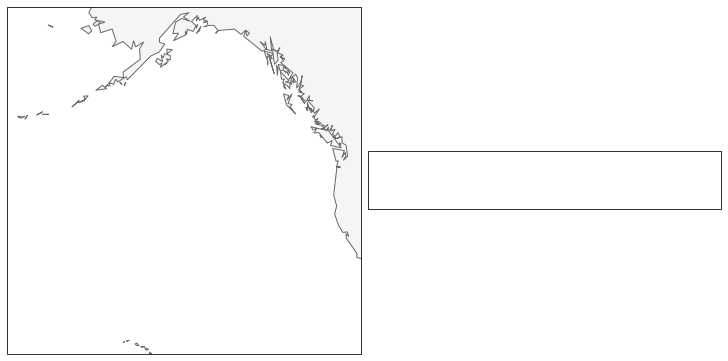

In [13]:
fig = plt.figure(constrained_layout=True, figsize=[10,10])
gs = GridSpec(1, 2, figure=fig)
xlim, ylim = [-180,-120], [20,62]
proj= crs.Mercator(np.mean(xlim), *ylim)
ax0 = fig.add_subplot(gs[0], projection=proj)
ax1 = fig.add_subplot(gs[1], projection=proj)

# Draw coastline
ax0.set_extent(xlim + ylim)
ax0.add_feature(feature.GSHHSFeature('auto', edgecolor='dimgray', facecolor='whitesmoke'))
# ax1.set_extent(xlim + ylim)
# ax1.add_feature(feature.GSHHSFeature('auto', edgecolor='dimgray', facecolor='whitesmoke'))

####################
## positive phase ##
####################
x = df.longitude[posbool]
y = df.latitude[posbool]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# using_hist2d(ax0,x,y,bins=(250,200))#,transform=crs.PlateCarree())
ax0.scatter(x,y,s=1,c=z,transform=crs.PlateCarree())
ax0.set_title('Positive NPGO',c='r')
# ax0.plot([-180,-120],[50,50],'k--')

# ####################
# ## negative phase ##
# ####################
x = df.longitude[negbool]
y = df.latitude[negbool]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
ax1.scatter(x,y,s=1,c=z,transform=crs.PlateCarree())
# using_hist2d(ax[1],x,y,bins=(250,200))
ax[1].set_title('Negative NPGO',c='b')
# ax[1].set_xlim([-180,-120])
# ax[1].plot([-180,-120],[51,51],'k--')
